https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772

In [1]:
from plotly.offline import init_notebook_mode, iplot
from wordcloud import WordCloud
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly.plotly as py
from plotly import tools
from datetime import date
import pandas as pd
import numpy as np 
import seaborn as sns
import random 
from sklearn.metrics import log_loss, roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold, ParameterGrid
from  tqdm import tqdm
import gc
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

path = "../input/"

pd.set_option("display.max_columns", 2000)

In [2]:
app_train = pd.read_csv(path + "application_train.csv")
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [3]:
bureau = pd.read_csv(path + "bureau.csv")
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [4]:
bureau_balance = pd.read_csv(path + "bureau_balance.csv")
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

In [5]:
credit_card_balance = pd.read_csv(path + "credit_card_balance.csv")
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [6]:
pcb = pd.read_csv(path + "POS_CASH_balance.csv")
pcb.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  CNT_INSTALMENT  \
0     1803195      182943             -31            48.0   
1     1715348      367990             -33            36.0   
2     1784872      397406             -32            12.0   
3     1903291      269225             -35            48.0   
4     2341044      334279             -35            36.0   

   CNT_INSTALMENT_FUTURE NAME_CONTRACT_STATUS  SK_DPD  SK_DPD_DEF  
0                   45.0               Active       0           0  
1                   35.0               Active       0           0  
2                    9.0               Active       0           0  
3                   42.0               Active       0           0  
4                   35.0               Active       0           0

In [7]:
previous_application = pd.read_csv(path + "previous_application.csv")
previous_application.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [8]:
installments_payments = pd.read_csv(path + "installments_payments.csv")
installments_payments.head()

SK_ID_PREV  SK_ID_CURR  NUM_INSTALMENT_VERSION  NUM_INSTALMENT_NUMBER  \
0     1054186      161674                     1.0                      6   
1     1330831      151639                     0.0                     34   
2     2085231      193053                     2.0                      1   
3     2452527      199697                     1.0                      3   
4     2714724      167756                     1.0                      2   

   DAYS_INSTALMENT  DAYS_ENTRY_PAYMENT  AMT_INSTALMENT  AMT_PAYMENT  
0          -1180.0             -1187.0        6948.360     6948.360  
1          -2156.0             -2156.0        1716.525     1716.525  
2            -63.0               -63.0       25425.000    25425.000  
3          -2418.0             -2426.0       24350.130    24350.130  
4          -1383.0             -1366.0        2165.040     2160.585

## 学習データ準備

In [9]:
from sklearn.model_selection import train_test_split 
import lightgbm as lgb

# read the test files 
app_test = pd.read_csv('../input/application_test.csv')


# Remove some rows with values not present in test set
#app_train.drop(app_train[app_train['CODE_GENDER'] == 'XNA'].index, inplace = True)
#app_train.drop(app_train[app_train['NAME_INCOME_TYPE'] == 'Maternity leave'].index, inplace = True)
#app_train.drop(app_train[app_train['NAME_FAMILY_STATUS'] == 'Unknown'].index, inplace = True)
app_train['bur NAN num'] = app_train.isnull().sum(axis = 1).values
app_test['bur NAN num'] = app_test.isnull().sum(axis = 1).values


app_test['is_test'] = 1 
app_test['is_train'] = 0
app_train['is_test'] = 0
app_train['is_train'] = 1

# target variable
Y = app_train['TARGET']
train_X = app_train.drop(['TARGET'], axis = 1)

# test ID
test_id = app_test['SK_ID_CURR']
test_X = app_test

# merge train and test datasets for preprocessing
data = pd.concat([train_X, test_X], axis=0)

### <a id="0.1">0.1 Prepare - Data Cleaning</a>

In [10]:
    
# Remove some empty features
data.drop(['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 
            'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 
            'FLAG_DOCUMENT_21'], axis = 1, inplace = True)
    
# Replace some outliers
data['DAYS_EMPLOYED'].replace(365243, np.nan, inplace = True)
data.loc[data['OWN_CAR_AGE'] > 80, 'OWN_CAR_AGE'] = np.nan
data.loc[data['REGION_RATING_CLIENT_W_CITY'] < 0, 'REGION_RATING_CLIENT_W_CITY'] = np.nan
data.loc[data['AMT_INCOME_TOTAL'] > 1e8, 'AMT_INCOME_TOTAL'] = np.nan
data.loc[data['AMT_REQ_CREDIT_BUREAU_QRT'] > 10, 'AMT_REQ_CREDIT_BUREAU_QRT'] = np.nan
data.loc[data['OBS_30_CNT_SOCIAL_CIRCLE'] > 40, 'OBS_30_CNT_SOCIAL_CIRCLE'] = np.nan

### <a id="0.2">0.2 Prepare - Categorical Data Processing</a>

In [11]:
# function to obtain Categorical Features
def _get_categorical_features(df):
    feats = [col for col in list(df.columns) if df[col].dtype == 'object']
    return feats

# function to factorize categorical features
def _factorize_categoricals(df, cats):
    for col in cats:
        df[col], _ = pd.factorize(df[col])
    return df 

# function to create dummy variables of categorical features
def _get_dummies(df, cats):
    for col in cats:
        df = pd.concat([df, pd.get_dummies(df[col], prefix=col)], axis=1)
    return df 

# get categorical features
data_cats = _get_categorical_features(data)
prev_app_cats = _get_categorical_features(previous_application)
bureau_cats = _get_categorical_features(bureau)
pcb_cats = _get_categorical_features(pcb)
ccbal_cats = _get_categorical_features(credit_card_balance)

# create additional dummy features - 
previous_application = _get_dummies(previous_application, prev_app_cats)
bureau = _get_dummies(bureau, bureau_cats)
pcb = _get_dummies(pcb, pcb_cats)
credit_card_balance = _get_dummies(credit_card_balance, ccbal_cats)

# factorize the categorical features from train and test data
data = _factorize_categoricals(data, data_cats)

## feature engineering

### <a id="1.1">1.1 Feature Engineering - Previous Applications</a>

In [12]:

## count the number of previous applications for a given ID
prev_apps_count = previous_application[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
previous_application['pre SK_ID_PREV_CNT'] = previous_application['SK_ID_CURR'].map(prev_apps_count['SK_ID_PREV'])
previous_application.drop(['SK_ID_PREV'], axis = 1, inplace = True)


# Days 365.243 values -> nan
previous_application['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
previous_application['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
previous_application['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
previous_application['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
previous_application['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

# nan num
previous_application['pre NAN num'] = previous_application.isnull().sum(axis = 1).values

# Add feature: value ask / value received percentage
previous_application['pre AMT_APPLICATION / AMT_CREDIT'] = previous_application['AMT_APPLICATION'] / previous_application['AMT_CREDIT']


## Average values for all other features in previous applications
prev_apps_avg = previous_application.groupby('SK_ID_CURR').mean()
prev_apps_avg.columns = ['pre_' + col + '_MEAN' for col in prev_apps_avg.columns]
data = data.merge(right=prev_apps_avg.reset_index(), how='left', on='SK_ID_CURR')
del prev_apps_avg
gc.collect()

# Previous applications numeric features
num_aggregations = {
        'AMT_ANNUITY': ['max'],
        'AMT_APPLICATION': ['max'],
        'AMT_CREDIT': ['max'],
        'pre AMT_APPLICATION / AMT_CREDIT': ['max'],
        'AMT_DOWN_PAYMENT': ['max'],
        'AMT_GOODS_PRICE': ['max'],
        'HOUR_APPR_PROCESS_START': ['max'],
        'RATE_DOWN_PAYMENT': ['max'],
        'DAYS_DECISION': ['max'],
        'CNT_PAYMENT': ['sum'],
}

cat_aggregations = {}

prev_agg = previous_application.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
prev_agg.columns = pd.Index(['pre_' + e[0] for e in prev_agg.columns.tolist()])

# Previous Applications: Approved Applications - only numerical features
approved = previous_application[previous_application['NAME_CONTRACT_STATUS_Approved'] == 1]
approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
approved_agg.columns = pd.Index(['pre_APPROVED_' + e[0] + "_" + e[1].upper() for e in approved_agg.columns.tolist()])
prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')

# Previous Applications: Refused Applications - only numerical features
refused = previous_application[previous_application['NAME_CONTRACT_STATUS_Refused'] == 1]
refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
refused_agg.columns = pd.Index(['pre_REFUSED_' + e[0] + "_" + e[1].upper() for e in refused_agg.columns.tolist()])
prev_done = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
del refused, refused_agg, approved, approved_agg
gc.collect()

data = data.merge(right=prev_done.reset_index(), how='left', on='SK_ID_CURR')

### <a id="1.2">1.2 Feature Engineering - Bureau Data</a>

In [13]:
bureau['bur NAN num'] = bureau.isnull().sum(axis = 1).values
bureau_balance['bur_bal NAN num'] = bureau_balance.isnull().sum(axis = 1).values

# Average Values for all bureau features 
bureau_avg = bureau.groupby('SK_ID_CURR').mean()
bureau_avg['bur CNT'] = bureau[['SK_ID_BUREAU','SK_ID_CURR']].groupby('SK_ID_CURR').count()['SK_ID_BUREAU']
bureau_avg.columns = ['bur_' + f_ + 'MEAN' for f_ in bureau_avg.columns]
data = data.merge(right=bureau_avg.reset_index(), how='left', on='SK_ID_CURR')
del bureau_avg
gc.collect()

# Bureau balance: Perform aggregations and merge with bureau.csv
bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
bb_agg = bureau_balance.groupby('SK_ID_BUREAU').agg(bb_aggregations)
bb_agg.columns = pd.Index([e[0] + "_" + e[1].upper() for e in bb_agg.columns.tolist()])
bureau = bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)
del bureau_balance, bb_agg
gc.collect()

# Bureau and bureau_balance numeric features
num_aggregations = {
    'DAYS_CREDIT': [ 'max', 'var'],
    'DAYS_CREDIT_ENDDATE': [ 'max'],
    'DAYS_CREDIT_UPDATE': ['max'],
    'CREDIT_DAY_OVERDUE': ['max'],
    'AMT_CREDIT_MAX_OVERDUE': ['max'],
    'AMT_CREDIT_SUM': [ 'max', 'sum'],
    'AMT_CREDIT_SUM_DEBT': [ 'max', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['max'],
    'AMT_CREDIT_SUM_LIMIT': ['max', 'sum'],
    'AMT_ANNUITY': ['max'],
    'CNT_CREDIT_PROLONG': ['sum'],
    'MONTHS_BALANCE_MIN': ['min'],
    'MONTHS_BALANCE_MAX': ['max'],
    'MONTHS_BALANCE_SIZE': ['max', 'sum']
}

# Bureau and bureau_balance categorical features
cat_aggregations = {}
 
bureau_agg = bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
bureau_agg.columns = pd.Index(['bur_' + e[0] + "_" + e[1].upper() for e in bureau_agg.columns.tolist()])
# Bureau: Active credits - using only numerical aggregations
active = bureau[bureau['CREDIT_ACTIVE_Active'] == 1]
active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
active_agg.columns = pd.Index(['bur_ACTIVE_' + e[0] + "_" + e[1].upper() for e in active_agg.columns.tolist()])
bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
del active, active_agg
gc.collect()

# Bureau: Closed credits - using only numerical aggregations
closed = bureau[bureau['CREDIT_ACTIVE_Closed'] == 1]
closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
closed_agg.columns = pd.Index(['bur_CLOSED_' + e[0] + "_" + e[1].upper() for e in closed_agg.columns.tolist()])
bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
del closed, closed_agg, bureau
gc.collect()

data = data.merge(right=bureau_agg.reset_index(), how='left', on='SK_ID_CURR')


### <a id="1.3">1.3 Feature Engineering - Previous Installments</a>

In [14]:
installments_payments['ins NAN num'] = installments_payments.isnull().sum(axis = 1).values

## Average values for all other variables in installments payments
avg_inst = installments_payments.groupby('SK_ID_CURR').mean()
avg_inst.columns = ['ins_' + f_ + 'MEAN' for f_ in avg_inst.columns]
data = data.merge(right=avg_inst.reset_index(), how='left', on='SK_ID_CURR')
del avg_inst
gc.collect()

## count the number of previous installments
cnt_inst = installments_payments[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
installments_payments['ins_SK_ID_PREV_CNT'] = installments_payments['SK_ID_CURR'].map(cnt_inst['SK_ID_PREV'])
installments_payments.drop(['SK_ID_PREV'], axis = 1, inplace = True)


# Percentage and difference paid in each installment (amount paid and installment value)
installments_payments['ins AMT_PAYMENT / AMT_INSTALMENT'] = installments_payments['AMT_PAYMENT'] / installments_payments['AMT_INSTALMENT']
installments_payments['ins AMT_INSTALMENT / AMT_PAYMENT'] = installments_payments['AMT_INSTALMENT'] - installments_payments['AMT_PAYMENT']

# Days past due and days before due (no negative values)
installments_payments['ins DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT'] = installments_payments['DAYS_ENTRY_PAYMENT'] - installments_payments['DAYS_INSTALMENT']
installments_payments['ins DAYS_INSTALMENT - DAYS_ENTRY_PAYMENT'] = installments_payments['DAYS_INSTALMENT'] - installments_payments['DAYS_ENTRY_PAYMENT']
installments_payments['ins DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT'] = installments_payments['ins DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT'].apply(lambda x: x if x > 0 else 0)
installments_payments['ins DAYS_INSTALMENT - DAYS_ENTRY_PAYMENT'] = installments_payments['ins DAYS_INSTALMENT - DAYS_ENTRY_PAYMENT'].apply(lambda x: x if x > 0 else 0)

# Features: Perform aggregations
aggregations = {
     'NUM_INSTALMENT_VERSION': ['nunique'],
     'ins DAYS_ENTRY_PAYMENT - DAYS_INSTALMENT': ['max', 'sum','min','std' ],
     'ins DAYS_INSTALMENT - DAYS_ENTRY_PAYMENT': ['max', 'sum','min','std'],
     'ins AMT_PAYMENT / AMT_INSTALMENT': [ 'max', 'var','min','std'],
     'ins AMT_INSTALMENT / AMT_PAYMENT': [ 'max', 'var','min','std'],
     'AMT_INSTALMENT': ['max', 'sum','min','std'],
     'AMT_PAYMENT': ['min', 'max', 'sum','std'],
     'DAYS_ENTRY_PAYMENT': ['max', 'sum','std']
}
ins_agg = installments_payments.groupby('SK_ID_CURR').agg(aggregations)
ins_agg.columns = pd.Index(['ins_' + e[0] + "_" + e[1].upper() for e in ins_agg.columns.tolist()])

# Count installments accounts
ins_agg['INSTAL_COUNT'] = installments_payments.groupby('SK_ID_CURR').size()
del installments_payments
gc.collect()

data = data.merge(right=ins_agg.reset_index(), how='left', on='SK_ID_CURR')



### <a id="1.4">1.4 Feature Engineering - Pos Cash Balance</a>

In [15]:
pcb['pcb NAN num'] = pcb.isnull().sum(axis = 1).values

## Average Values for all other variables in pos cash
pcb_avg = pcb.groupby('SK_ID_CURR').mean()
data = data.merge(right=pcb_avg.reset_index(), how='left', on='SK_ID_CURR')
del pcb_avg
gc.collect()

### count the number of pos cash for a given ID
pcb_count = pcb[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
pcb['pcb_SK_ID_PREV_CNT'] = pcb['SK_ID_CURR'].map(pcb_count['SK_ID_PREV'])
pcb.drop(['SK_ID_PREV'], axis = 1, inplace = True)

# Features
aggregations = {
     'MONTHS_BALANCE': ['max', 'size'],
     'SK_DPD': ['max'],
     'SK_DPD_DEF': ['max']
}
   
pos_agg = pcb.groupby('SK_ID_CURR').agg(aggregations)
pos_agg.columns = pd.Index(['pcb_' + e[0] + "_" + e[1].upper() for e in pos_agg.columns.tolist()])

# Count pos cash accounts
pos_agg['POS_COUNT'] = pcb.groupby('SK_ID_CURR').size()
del pcb
gc.collect()

data = data.merge(right=pos_agg.reset_index(), how='left', on='SK_ID_CURR')

### <a id="1.5">1.5 Feature Engineering - Credit Card Balance </a>

In [16]:
credit_card_balance['cre NAN num'] = credit_card_balance.isnull().sum(axis = 1).values

### average of all other columns 
avg_cc_bal = credit_card_balance.groupby('SK_ID_CURR').mean()
avg_cc_bal.columns = ['cc_bal_' + f_ + 'MEAN' for f_ in avg_cc_bal.columns]
data = data.merge(right=avg_cc_bal.reset_index(), how='left', on='SK_ID_CURR')
del avg_cc_bal
gc.collect()

### count the number of previous applications for a given ID
nb_prevs = credit_card_balance[['SK_ID_CURR', 'SK_ID_PREV']].groupby('SK_ID_CURR').count()
credit_card_balance['cre_SK_ID_PREV_CNT'] = credit_card_balance['SK_ID_CURR'].map(nb_prevs['SK_ID_PREV'])
credit_card_balance.drop(['SK_ID_PREV'], axis=1, inplace=True)

# General aggregations
cc_agg = credit_card_balance.groupby('SK_ID_CURR').agg([ 'max', 'sum', 'var'])
cc_agg.columns = pd.Index(['cre_' + e[0] + "_" + e[1].upper() for e in cc_agg.columns.tolist()])
# Count credit card lines
cc_agg['CC_COUNT'] = credit_card_balance.groupby('SK_ID_CURR').size()
del credit_card_balance
gc.collect()

data = data.merge(right=cc_agg.reset_index(), how='left', on='SK_ID_CURR')


### <a id="1.6">1.6 Feature Engineering - Domain </a>

In [17]:
data['app AMT_CREDIT / AMT_INCOME_TOTAL'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
data['app AMT_ANNUITY / AMT_INCOME_TOTAL'] = data['AMT_ANNUITY'] / data['AMT_INCOME_TOTAL']
data['app AMT_ANNUITY / AMT_CREDIT'] = data['AMT_ANNUITY'] / data['AMT_CREDIT']
data['app DAYS_EMPLOYED / DAYS_BIRTH'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']

data['app missing'] = data.isnull().sum(axis = 1).values
    
data['app EXT_SOURCE mean'] = data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)
data['app EXT_SOURCE std'] = data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].std(axis = 1)
data['app EXT_SOURCE prod'] = data['EXT_SOURCE_1'] * data['EXT_SOURCE_2'] * data['EXT_SOURCE_3']
data['app EXT_SOURCE_1 * DAYS_EMPLOYED'] = data['EXT_SOURCE_1'] * data['DAYS_EMPLOYED']
data['app EXT_SOURCE_2 * DAYS_EMPLOYED'] = data['EXT_SOURCE_2'] * data['DAYS_EMPLOYED']
data['app EXT_SOURCE_3 * DAYS_EMPLOYED'] = data['EXT_SOURCE_3'] * data['DAYS_EMPLOYED']
data['app EXT_SOURCE_1 / DAYS_BIRTH'] = data['EXT_SOURCE_1'] / data['DAYS_BIRTH']
data['app EXT_SOURCE_2 / DAYS_BIRTH'] = data['EXT_SOURCE_2'] / data['DAYS_BIRTH']
data['app EXT_SOURCE_3 / DAYS_BIRTH'] = data['EXT_SOURCE_3'] / data['DAYS_BIRTH']
  
data['app AMT_CREDIT - AMT_GOODS_PRICE'] = data['AMT_CREDIT'] - data['AMT_GOODS_PRICE']
data['app AMT_CREDIT / AMT_GOODS_PRICE'] = data['AMT_CREDIT'] / data['AMT_GOODS_PRICE']
data['app AMT_CREDIT / AMT_ANNUITY'] = data['AMT_CREDIT'] / data['AMT_ANNUITY']
data['app AMT_CREDIT / AMT_INCOME_TOTAL'] = data['AMT_CREDIT'] / data['AMT_INCOME_TOTAL']
  
data['app AMT_INCOME_TOTAL / 12 - AMT_ANNUITY'] = data['AMT_INCOME_TOTAL'] / 12. - data['AMT_ANNUITY']
data['app AMT_INCOME_TOTAL / AMT_ANNUITY'] = data['AMT_INCOME_TOTAL'] / data['AMT_ANNUITY']
data['app AMT_INCOME_TOTAL - AMT_GOODS_PRICE'] = data['AMT_INCOME_TOTAL'] - data['AMT_GOODS_PRICE']
data['app AMT_INCOME_TOTAL / CNT_FAM_MEMBERS'] = data['AMT_INCOME_TOTAL'] / data['CNT_FAM_MEMBERS']
data['app AMT_INCOME_TOTAL / CNT_CHILDREN'] = data['AMT_INCOME_TOTAL'] / (1 + data['CNT_CHILDREN'])
    
data['app most popular AMT_GOODS_PRICE'] = data['AMT_GOODS_PRICE'] \
                        .isin([225000, 450000, 675000, 900000]).map({True: 1, False: 0})
data['app popular AMT_GOODS_PRICE'] = data['AMT_GOODS_PRICE'] \
                        .isin([1125000, 1350000, 1575000, 1800000, 2250000]).map({True: 1, False: 0})
    
data['app OWN_CAR_AGE / DAYS_BIRTH'] = data['OWN_CAR_AGE'] / data['DAYS_BIRTH']
data['app OWN_CAR_AGE / DAYS_EMPLOYED'] = data['OWN_CAR_AGE'] / data['DAYS_EMPLOYED']
    
data['app DAYS_LAST_PHONE_CHANGE / DAYS_BIRTH'] = data['DAYS_LAST_PHONE_CHANGE'] / data['DAYS_BIRTH']
data['app DAYS_LAST_PHONE_CHANGE / DAYS_EMPLOYED'] = data['DAYS_LAST_PHONE_CHANGE'] / data['DAYS_EMPLOYED']
data['app DAYS_EMPLOYED - DAYS_BIRTH'] = data['DAYS_EMPLOYED'] - data['DAYS_BIRTH']
data['app DAYS_EMPLOYED / DAYS_BIRTH'] = data['DAYS_EMPLOYED'] / data['DAYS_BIRTH']
    
data['app CNT_CHILDREN / CNT_FAM_MEMBERS'] = data['CNT_CHILDREN'] / data['CNT_FAM_MEMBERS']

data['app OBS_30_CNT_SOCIAL_CIRCLE - DEF_30_CNT_SOCIAL_CIRCLE'] = data['OBS_30_CNT_SOCIAL_CIRCLE'] - data['DEF_30_CNT_SOCIAL_CIRCLE']
data['app OBS_60_CNT_SOCIAL_CIRCLE - DEF_60_CNT_SOCIAL_CIRCLE'] = data['OBS_60_CNT_SOCIAL_CIRCLE'] - data['DEF_60_CNT_SOCIAL_CIRCLE']
data['app DAYS_EMPLOYED - DAYS_REGISTRATION'] = data['DAYS_EMPLOYED'] - data['DAYS_REGISTRATION']
data['app DAYS_EMPLOYED - DAYS_ID_PUBLISH'] = data['DAYS_EMPLOYED'] - data['DAYS_ID_PUBLISH']


In [18]:
data.head()

SK_ID_CURR  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  \
0      100002                   0            0             0                0   
1      100003                   0            1             0                1   
2      100004                   1            0             1                0   
3      100006                   0            1             0                0   
4      100007                   0            0             0                0   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             0          202500.0    406597.5      24700.5         351000.0   
1             0          270000.0   1293502.5      35698.5        1129500.0   
2             0           67500.0    135000.0       6750.0         135000.0   
3             0          135000.0    312682.5      29686.5         297000.0   
4             0          121500.0    513000.0      21865.5         513000.0   

   NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                0                 0                    0                   0   
1                1                 1                    1                   1   
2                0                 0                    0                   0   
3                0                 0                    0                   2   
4                0                 0                    0                   0   

   NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
0                  0                    0.018801       -9461         -637.0   
1                  0                    0.003541      -16765        -1188.0   
2                  0                    0.010032      -19046         -225.0   
3                  0                    0.008019      -19005        -3039.0   
4                  0                    0.028663      -19932        -3038.0   

   DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  \
0            -3648.0            -2120          NaN           1   
1            -1186.0             -291          NaN           1   
2            -4260.0            -2531         26.0           1   
3            -9833.0            -2437          NaN           1   
4            -4311.0            -3458          NaN           1   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0               1                0                 1           1           0   
1               1                0                 1           1           0   
2               1                1                 1           1           0   
3               1                0                 1           0           0   
4               1                0                 1           0           0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                0              1.0                     2   
1                1              2.0                     1   
2                0              1.0                     2   
3                0              2.0                     2   
4                1              1.0                     2   

   REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0                          2.0                           0   
1                          1.0                           1   
2                          2.0                           1   
3                          2.0                           0   
4                          2.0                           2   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                           0   
1                       11                           0   
2                        9                           0   
3                       17                           0   
4                       11                           0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                           0                     

### <a id="1.7">1.7 Feature Engineering - PolyFeature </a>

In [19]:
# Make a new dataframe for polynomial features
poly_features = data[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
print('Polynomial Features shape: ', poly_features.shape)

# Create a dataframe of the features 
pd_poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['POLY_EXT_SOURCE_1', 'POLY_EXT_SOURCE_2', 'POLY_EXT_SOURCE_3', 'POLY_DAYS_BIRTH']))
pd_poly_features = pd_poly_features.drop(columns =['1', 'POLY_EXT_SOURCE_1', 'POLY_EXT_SOURCE_2', 'POLY_EXT_SOURCE_3', 'POLY_DAYS_BIRTH'])
data_reset = data.reset_index()
pd_poly_features['SK_ID_CURR'] = data_reset['SK_ID_CURR'] 
data = data.merge(pd_poly_features, on = 'SK_ID_CURR', how = 'left')

Polynomial Features shape:  (356255, 35)


### <a id="2.0">2.0 Prepare Final Train and Test data</a>

In [43]:
data=data.replace([np.inf, -np.inf], np.nan).fillna(0)

ignore_features = ['SK_ID_CURR', 'is_train', 'is_test']
relevant_features = [col for col in data.columns if col not in ignore_features]
trainX = data[data['is_train'] == 1][relevant_features]
testX = data[data['is_test'] == 1][relevant_features]

### <a id="2.1">2.1 cross val, nn</a>

Train on 206032 samples, validate on 101479 samples
Epoch 1/100


 18570/206032 [=>............................] - ETA: 1:11:31 - loss: 0.7476 - acc: 0.33 - ETA: 17:09 - loss: 0.4142 - acc: 0.8000 - ETA: 10:00 - loss: 0.5210 - acc: 0.84 - ETA: 7:08 - loss: 0.5018 - acc: 0.8500 - ETA: 5:50 - loss: 0.4389 - acc: 0.869 - ETA: 5:17 - loss: 0.4037 - acc: 0.876 - ETA: 4:45 - loss: 0.4094 - acc: 0.878 - ETA: 4:23 - loss: 0.3990 - acc: 0.880 - ETA: 4:12 - loss: 0.3976 - acc: 0.877 - ETA: 3:59 - loss: 0.3839 - acc: 0.881 - ETA: 3:48 - loss: 0.3688 - acc: 0.886 - ETA: 3:44 - loss: 0.3654 - acc: 0.887 - ETA: 3:36 - loss: 0.3507 - acc: 0.893 - ETA: 3:30 - loss: 0.3431 - acc: 0.897 - ETA: 3:25 - loss: 0.3482 - acc: 0.895 - ETA: 3:20 - loss: 0.3455 - acc: 0.894 - ETA: 3:16 - loss: 0.3324 - acc: 0.899 - ETA: 3:15 - loss: 0.3316 - acc: 0.902 - ETA: 3:12 - loss: 0.3348 - acc: 0.902 - ETA: 3:09 - loss: 0.3331 - acc: 0.903 - ETA: 3:06 - loss: 0.3347 - acc: 0.902 - ETA: 3:07 - loss: 0.3343 - acc: 0.903 - ETA: 3:03 - loss: 0.3372 - acc: 0.904 - ETA: 3:01 - loss: 0.3356 -

 37365/206032 [====>.........................] - ETA: 2:10 - loss: 0.2710 - acc: 0.917 - ETA: 2:10 - loss: 0.2707 - acc: 0.917 - ETA: 2:10 - loss: 0.2712 - acc: 0.917 - ETA: 2:10 - loss: 0.2714 - acc: 0.917 - ETA: 2:10 - loss: 0.2718 - acc: 0.917 - ETA: 2:10 - loss: 0.2716 - acc: 0.917 - ETA: 2:10 - loss: 0.2718 - acc: 0.917 - ETA: 2:10 - loss: 0.2716 - acc: 0.917 - ETA: 2:10 - loss: 0.2717 - acc: 0.917 - ETA: 2:09 - loss: 0.2716 - acc: 0.917 - ETA: 2:09 - loss: 0.2712 - acc: 0.917 - ETA: 2:09 - loss: 0.2713 - acc: 0.917 - ETA: 2:09 - loss: 0.2708 - acc: 0.917 - ETA: 2:09 - loss: 0.2714 - acc: 0.917 - ETA: 2:09 - loss: 0.2708 - acc: 0.917 - ETA: 2:09 - loss: 0.2705 - acc: 0.917 - ETA: 2:09 - loss: 0.2704 - acc: 0.917 - ETA: 2:09 - loss: 0.2701 - acc: 0.917 - ETA: 2:09 - loss: 0.2702 - acc: 0.917 - ETA: 2:09 - loss: 0.2701 - acc: 0.917 - ETA: 2:08 - loss: 0.2701 - acc: 0.917 - ETA: 2:08 - loss: 0.2700 - acc: 0.917 - ETA: 2:08 - loss: 0.2695 - acc: 0.918 - ETA: 2:08 - loss: 0.2695 - acc:

 56040/206032 [=======>......................] - ETA: 1:56 - loss: 0.2678 - acc: 0.917 - ETA: 1:56 - loss: 0.2677 - acc: 0.917 - ETA: 1:56 - loss: 0.2676 - acc: 0.917 - ETA: 1:56 - loss: 0.2674 - acc: 0.917 - ETA: 1:56 - loss: 0.2675 - acc: 0.917 - ETA: 1:56 - loss: 0.2675 - acc: 0.917 - ETA: 1:56 - loss: 0.2673 - acc: 0.917 - ETA: 1:56 - loss: 0.2674 - acc: 0.917 - ETA: 1:56 - loss: 0.2677 - acc: 0.917 - ETA: 1:56 - loss: 0.2679 - acc: 0.917 - ETA: 1:56 - loss: 0.2677 - acc: 0.917 - ETA: 1:56 - loss: 0.2677 - acc: 0.917 - ETA: 1:56 - loss: 0.2677 - acc: 0.917 - ETA: 1:56 - loss: 0.2677 - acc: 0.917 - ETA: 1:55 - loss: 0.2677 - acc: 0.917 - ETA: 1:55 - loss: 0.2674 - acc: 0.917 - ETA: 1:55 - loss: 0.2674 - acc: 0.917 - ETA: 1:55 - loss: 0.2675 - acc: 0.917 - ETA: 1:55 - loss: 0.2673 - acc: 0.917 - ETA: 1:55 - loss: 0.2673 - acc: 0.917 - ETA: 1:55 - loss: 0.2674 - acc: 0.917 - ETA: 1:55 - loss: 0.2674 - acc: 0.917 - ETA: 1:55 - loss: 0.2672 - acc: 0.917 - ETA: 1:55 - loss: 0.2673 - acc:

 75375/206032 [=========>....................] - ETA: 1:43 - loss: 0.2653 - acc: 0.917 - ETA: 1:43 - loss: 0.2653 - acc: 0.917 - ETA: 1:43 - loss: 0.2655 - acc: 0.917 - ETA: 1:43 - loss: 0.2653 - acc: 0.917 - ETA: 1:43 - loss: 0.2652 - acc: 0.917 - ETA: 1:43 - loss: 0.2650 - acc: 0.917 - ETA: 1:43 - loss: 0.2652 - acc: 0.917 - ETA: 1:43 - loss: 0.2652 - acc: 0.917 - ETA: 1:43 - loss: 0.2651 - acc: 0.917 - ETA: 1:43 - loss: 0.2653 - acc: 0.917 - ETA: 1:43 - loss: 0.2653 - acc: 0.917 - ETA: 1:42 - loss: 0.2653 - acc: 0.917 - ETA: 1:42 - loss: 0.2653 - acc: 0.917 - ETA: 1:42 - loss: 0.2652 - acc: 0.917 - ETA: 1:42 - loss: 0.2650 - acc: 0.917 - ETA: 1:42 - loss: 0.2649 - acc: 0.917 - ETA: 1:42 - loss: 0.2650 - acc: 0.917 - ETA: 1:42 - loss: 0.2649 - acc: 0.917 - ETA: 1:42 - loss: 0.2649 - acc: 0.917 - ETA: 1:42 - loss: 0.2649 - acc: 0.917 - ETA: 1:42 - loss: 0.2648 - acc: 0.917 - ETA: 1:42 - loss: 0.2648 - acc: 0.917 - ETA: 1:42 - loss: 0.2647 - acc: 0.917 - ETA: 1:42 - loss: 0.2647 - acc:

 94755/206032 [============>.................] - ETA: 1:29 - loss: 0.2611 - acc: 0.918 - ETA: 1:29 - loss: 0.2612 - acc: 0.918 - ETA: 1:29 - loss: 0.2611 - acc: 0.918 - ETA: 1:29 - loss: 0.2611 - acc: 0.918 - ETA: 1:29 - loss: 0.2611 - acc: 0.918 - ETA: 1:29 - loss: 0.2611 - acc: 0.918 - ETA: 1:28 - loss: 0.2611 - acc: 0.918 - ETA: 1:28 - loss: 0.2610 - acc: 0.918 - ETA: 1:28 - loss: 0.2611 - acc: 0.918 - ETA: 1:28 - loss: 0.2613 - acc: 0.918 - ETA: 1:28 - loss: 0.2612 - acc: 0.918 - ETA: 1:28 - loss: 0.2613 - acc: 0.918 - ETA: 1:28 - loss: 0.2613 - acc: 0.918 - ETA: 1:28 - loss: 0.2612 - acc: 0.918 - ETA: 1:28 - loss: 0.2614 - acc: 0.918 - ETA: 1:28 - loss: 0.2613 - acc: 0.918 - ETA: 1:28 - loss: 0.2613 - acc: 0.918 - ETA: 1:28 - loss: 0.2612 - acc: 0.918 - ETA: 1:28 - loss: 0.2611 - acc: 0.918 - ETA: 1:28 - loss: 0.2610 - acc: 0.919 - ETA: 1:28 - loss: 0.2610 - acc: 0.919 - ETA: 1:27 - loss: 0.2609 - acc: 0.919 - ETA: 1:27 - loss: 0.2609 - acc: 0.919 - ETA: 1:27 - loss: 0.2610 - acc:

114015/206032 [===============>..............] - ETA: 1:15 - loss: 0.2614 - acc: 0.918 - ETA: 1:15 - loss: 0.2613 - acc: 0.918 - ETA: 1:15 - loss: 0.2612 - acc: 0.918 - ETA: 1:15 - loss: 0.2612 - acc: 0.918 - ETA: 1:15 - loss: 0.2613 - acc: 0.918 - ETA: 1:15 - loss: 0.2612 - acc: 0.918 - ETA: 1:15 - loss: 0.2612 - acc: 0.918 - ETA: 1:15 - loss: 0.2612 - acc: 0.918 - ETA: 1:15 - loss: 0.2612 - acc: 0.918 - ETA: 1:15 - loss: 0.2613 - acc: 0.918 - ETA: 1:15 - loss: 0.2614 - acc: 0.918 - ETA: 1:15 - loss: 0.2614 - acc: 0.918 - ETA: 1:14 - loss: 0.2614 - acc: 0.918 - ETA: 1:14 - loss: 0.2614 - acc: 0.918 - ETA: 1:14 - loss: 0.2614 - acc: 0.918 - ETA: 1:14 - loss: 0.2614 - acc: 0.918 - ETA: 1:14 - loss: 0.2615 - acc: 0.918 - ETA: 1:14 - loss: 0.2616 - acc: 0.918 - ETA: 1:14 - loss: 0.2615 - acc: 0.918 - ETA: 1:14 - loss: 0.2616 - acc: 0.918 - ETA: 1:14 - loss: 0.2616 - acc: 0.918 - ETA: 1:14 - loss: 0.2615 - acc: 0.918 - ETA: 1:14 - loss: 0.2614 - acc: 0.918 - ETA: 1:14 - loss: 0.2615 - acc:

134325/206032 [==================>...........] - ETA: 1:02 - loss: 0.2612 - acc: 0.918 - ETA: 1:02 - loss: 0.2612 - acc: 0.918 - ETA: 1:02 - loss: 0.2612 - acc: 0.918 - ETA: 1:02 - loss: 0.2612 - acc: 0.918 - ETA: 1:02 - loss: 0.2613 - acc: 0.918 - ETA: 1:01 - loss: 0.2612 - acc: 0.918 - ETA: 1:01 - loss: 0.2612 - acc: 0.918 - ETA: 1:01 - loss: 0.2612 - acc: 0.918 - ETA: 1:01 - loss: 0.2611 - acc: 0.918 - ETA: 1:01 - loss: 0.2610 - acc: 0.918 - ETA: 1:01 - loss: 0.2610 - acc: 0.918 - ETA: 1:01 - loss: 0.2610 - acc: 0.918 - ETA: 1:01 - loss: 0.2610 - acc: 0.918 - ETA: 1:01 - loss: 0.2610 - acc: 0.918 - ETA: 1:01 - loss: 0.2610 - acc: 0.918 - ETA: 1:01 - loss: 0.2611 - acc: 0.918 - ETA: 1:01 - loss: 0.2611 - acc: 0.918 - ETA: 1:01 - loss: 0.2611 - acc: 0.918 - ETA: 1:01 - loss: 0.2610 - acc: 0.918 - ETA: 1:01 - loss: 0.2611 - acc: 0.918 - ETA: 1:00 - loss: 0.2611 - acc: 0.918 - ETA: 1:00 - loss: 0.2611 - acc: 0.918 - ETA: 1:00 - loss: 0.2611 - acc: 0.918 - ETA: 1:00 - loss: 0.2612 - acc:

154860/206032 [=====================>........] - ETA: 48s - loss: 0.2606 - acc: 0.91 - ETA: 48s - loss: 0.2606 - acc: 0.91 - ETA: 48s - loss: 0.2606 - acc: 0.91 - ETA: 48s - loss: 0.2606 - acc: 0.91 - ETA: 48s - loss: 0.2606 - acc: 0.91 - ETA: 48s - loss: 0.2606 - acc: 0.91 - ETA: 48s - loss: 0.2605 - acc: 0.91 - ETA: 47s - loss: 0.2605 - acc: 0.91 - ETA: 47s - loss: 0.2605 - acc: 0.91 - ETA: 47s - loss: 0.2605 - acc: 0.91 - ETA: 47s - loss: 0.2604 - acc: 0.91 - ETA: 47s - loss: 0.2605 - acc: 0.91 - ETA: 47s - loss: 0.2605 - acc: 0.91 - ETA: 47s - loss: 0.2604 - acc: 0.91 - ETA: 47s - loss: 0.2605 - acc: 0.91 - ETA: 47s - loss: 0.2605 - acc: 0.91 - ETA: 47s - loss: 0.2604 - acc: 0.91 - ETA: 47s - loss: 0.2604 - acc: 0.91 - ETA: 47s - loss: 0.2604 - acc: 0.91 - ETA: 47s - loss: 0.2605 - acc: 0.91 - ETA: 47s - loss: 0.2605 - acc: 0.91 - ETA: 47s - loss: 0.2604 - acc: 0.91 - ETA: 46s - loss: 0.2604 - acc: 0.91 - ETA: 46s - loss: 0.2604 - acc: 0.91 - ETA: 46s - loss: 0.2604 - acc: 0.91 - E

175440/206032 [========================>.....] - ETA: 34s - loss: 0.2589 - acc: 0.91 - ETA: 34s - loss: 0.2589 - acc: 0.91 - ETA: 34s - loss: 0.2589 - acc: 0.91 - ETA: 34s - loss: 0.2589 - acc: 0.91 - ETA: 34s - loss: 0.2589 - acc: 0.91 - ETA: 34s - loss: 0.2590 - acc: 0.91 - ETA: 33s - loss: 0.2590 - acc: 0.91 - ETA: 33s - loss: 0.2590 - acc: 0.91 - ETA: 33s - loss: 0.2590 - acc: 0.91 - ETA: 33s - loss: 0.2590 - acc: 0.91 - ETA: 33s - loss: 0.2591 - acc: 0.91 - ETA: 33s - loss: 0.2591 - acc: 0.91 - ETA: 33s - loss: 0.2592 - acc: 0.91 - ETA: 33s - loss: 0.2591 - acc: 0.91 - ETA: 33s - loss: 0.2590 - acc: 0.91 - ETA: 33s - loss: 0.2590 - acc: 0.91 - ETA: 33s - loss: 0.2590 - acc: 0.91 - ETA: 33s - loss: 0.2590 - acc: 0.91 - ETA: 33s - loss: 0.2591 - acc: 0.91 - ETA: 33s - loss: 0.2591 - acc: 0.91 - ETA: 33s - loss: 0.2591 - acc: 0.91 - ETA: 33s - loss: 0.2592 - acc: 0.91 - ETA: 32s - loss: 0.2592 - acc: 0.91 - ETA: 32s - loss: 0.2592 - acc: 0.91 - ETA: 32s - loss: 0.2592 - acc: 0.91 - E

195915/206032 [===========================>..] - ETA: 20s - loss: 0.2598 - acc: 0.91 - ETA: 20s - loss: 0.2598 - acc: 0.91 - ETA: 20s - loss: 0.2599 - acc: 0.91 - ETA: 20s - loss: 0.2599 - acc: 0.91 - ETA: 20s - loss: 0.2598 - acc: 0.91 - ETA: 20s - loss: 0.2599 - acc: 0.91 - ETA: 20s - loss: 0.2600 - acc: 0.91 - ETA: 20s - loss: 0.2601 - acc: 0.91 - ETA: 19s - loss: 0.2604 - acc: 0.91 - ETA: 19s - loss: 0.2605 - acc: 0.91 - ETA: 19s - loss: 0.2605 - acc: 0.91 - ETA: 19s - loss: 0.2605 - acc: 0.91 - ETA: 19s - loss: 0.2606 - acc: 0.91 - ETA: 19s - loss: 0.2606 - acc: 0.91 - ETA: 19s - loss: 0.2606 - acc: 0.91 - ETA: 19s - loss: 0.2607 - acc: 0.91 - ETA: 19s - loss: 0.2607 - acc: 0.91 - ETA: 19s - loss: 0.2607 - acc: 0.91 - ETA: 19s - loss: 0.2607 - acc: 0.91 - ETA: 19s - loss: 0.2607 - acc: 0.91 - ETA: 19s - loss: 0.2607 - acc: 0.91 - ETA: 19s - loss: 0.2607 - acc: 0.91 - ETA: 19s - loss: 0.2607 - acc: 0.91 - ETA: 19s - loss: 0.2608 - acc: 0.91 - ETA: 18s - loss: 0.2607 - acc: 0.91 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.2595 - acc: 0.918 - ETA: 6s - loss: 0.2595 - acc: 0.918 - ETA: 6s - loss: 0.2595 - acc: 0.918 - ETA: 6s - loss: 0.2595 - acc: 0.918 - ETA: 6s - loss: 0.2594 - acc: 0.918 - ETA: 6s - loss: 0.2595 - acc: 0.918 - ETA: 6s - loss: 0.2595 - acc: 0.918 - ETA: 6s - loss: 0.2594 - acc: 0.918 - ETA: 6s - loss: 0.2594 - acc: 0.918 - ETA: 6s - loss: 0.2595 - acc: 0.918 - ETA: 6s - loss: 0.2595 - acc: 0.918 - ETA: 6s - loss: 0.2595 - acc: 0.918 - ETA: 5s - loss: 0.2595 - acc: 0.918 - ETA: 5s - loss: 0.2595 - acc: 0.918 - ETA: 5s - loss: 0.2595 - acc: 0.918 - ETA: 5s - loss: 0.2595 - acc: 0.918 - ETA: 5s - loss: 0.2595 - acc: 0.918 - ETA: 5s - loss: 0.2595 - acc: 0.918 - ETA: 5s - loss: 0.2595 - acc: 0.918 - ETA: 5s - loss: 0.2595 - acc: 0.918 - ETA: 5s - loss: 0.2596 - acc: 0.918 - ETA: 5s - loss: 0.2595 - acc: 0.918 - ETA: 5s - loss: 0.2595 - acc: 0.918 - ETA: 5s - loss: 0.2595 - acc: 0.918 - ETA: 5s - loss: 0.2595 - acc: 0.918 - E

 19500/206032 [=>............................] - ETA: 3:34 - loss: 0.2694 - acc: 0.933 - ETA: 2:14 - loss: 0.2883 - acc: 0.916 - ETA: 2:17 - loss: 0.3200 - acc: 0.885 - ETA: 2:12 - loss: 0.2797 - acc: 0.904 - ETA: 2:14 - loss: 0.2840 - acc: 0.906 - ETA: 2:16 - loss: 0.2963 - acc: 0.905 - ETA: 2:13 - loss: 0.2950 - acc: 0.901 - ETA: 2:11 - loss: 0.2997 - acc: 0.897 - ETA: 2:13 - loss: 0.2880 - acc: 0.903 - ETA: 2:11 - loss: 0.2853 - acc: 0.903 - ETA: 2:12 - loss: 0.2783 - acc: 0.907 - ETA: 2:11 - loss: 0.2706 - acc: 0.911 - ETA: 2:12 - loss: 0.2791 - acc: 0.908 - ETA: 2:13 - loss: 0.2808 - acc: 0.906 - ETA: 2:12 - loss: 0.2696 - acc: 0.913 - ETA: 2:12 - loss: 0.2683 - acc: 0.913 - ETA: 2:13 - loss: 0.2749 - acc: 0.912 - ETA: 2:12 - loss: 0.2684 - acc: 0.914 - ETA: 2:12 - loss: 0.2750 - acc: 0.913 - ETA: 2:13 - loss: 0.2760 - acc: 0.913 - ETA: 2:14 - loss: 0.2758 - acc: 0.913 - ETA: 2:14 - loss: 0.2748 - acc: 0.913 - ETA: 2:13 - loss: 0.2749 - acc: 0.912 - ETA: 2:13 - loss: 0.2784 - acc:

 38730/206032 [====>.........................] - ETA: 2:03 - loss: 0.2499 - acc: 0.918 - ETA: 2:03 - loss: 0.2501 - acc: 0.918 - ETA: 2:03 - loss: 0.2496 - acc: 0.918 - ETA: 2:02 - loss: 0.2505 - acc: 0.918 - ETA: 2:02 - loss: 0.2499 - acc: 0.919 - ETA: 2:02 - loss: 0.2498 - acc: 0.918 - ETA: 2:02 - loss: 0.2493 - acc: 0.919 - ETA: 2:02 - loss: 0.2495 - acc: 0.918 - ETA: 2:02 - loss: 0.2498 - acc: 0.918 - ETA: 2:02 - loss: 0.2494 - acc: 0.919 - ETA: 2:02 - loss: 0.2493 - acc: 0.918 - ETA: 2:02 - loss: 0.2491 - acc: 0.919 - ETA: 2:02 - loss: 0.2492 - acc: 0.919 - ETA: 2:02 - loss: 0.2487 - acc: 0.919 - ETA: 2:02 - loss: 0.2488 - acc: 0.919 - ETA: 2:02 - loss: 0.2487 - acc: 0.919 - ETA: 2:01 - loss: 0.2481 - acc: 0.919 - ETA: 2:01 - loss: 0.2478 - acc: 0.919 - ETA: 2:01 - loss: 0.2487 - acc: 0.919 - ETA: 2:01 - loss: 0.2482 - acc: 0.919 - ETA: 2:01 - loss: 0.2486 - acc: 0.919 - ETA: 2:01 - loss: 0.2486 - acc: 0.919 - ETA: 2:01 - loss: 0.2490 - acc: 0.919 - ETA: 2:01 - loss: 0.2488 - acc:

 58035/206032 [=======>......................] - ETA: 1:51 - loss: 0.2519 - acc: 0.917 - ETA: 1:51 - loss: 0.2521 - acc: 0.917 - ETA: 1:51 - loss: 0.2519 - acc: 0.917 - ETA: 1:51 - loss: 0.2520 - acc: 0.917 - ETA: 1:51 - loss: 0.2520 - acc: 0.917 - ETA: 1:51 - loss: 0.2520 - acc: 0.917 - ETA: 1:51 - loss: 0.2519 - acc: 0.917 - ETA: 1:51 - loss: 0.2520 - acc: 0.917 - ETA: 1:51 - loss: 0.2519 - acc: 0.917 - ETA: 1:51 - loss: 0.2519 - acc: 0.917 - ETA: 1:51 - loss: 0.2516 - acc: 0.918 - ETA: 1:51 - loss: 0.2520 - acc: 0.917 - ETA: 1:51 - loss: 0.2519 - acc: 0.917 - ETA: 1:50 - loss: 0.2519 - acc: 0.917 - ETA: 1:50 - loss: 0.2520 - acc: 0.917 - ETA: 1:50 - loss: 0.2518 - acc: 0.917 - ETA: 1:50 - loss: 0.2516 - acc: 0.918 - ETA: 1:50 - loss: 0.2515 - acc: 0.918 - ETA: 1:50 - loss: 0.2516 - acc: 0.918 - ETA: 1:50 - loss: 0.2516 - acc: 0.918 - ETA: 1:50 - loss: 0.2516 - acc: 0.918 - ETA: 1:50 - loss: 0.2515 - acc: 0.918 - ETA: 1:50 - loss: 0.2516 - acc: 0.918 - ETA: 1:50 - loss: 0.2517 - acc:

 77520/206032 [==========>...................] - ETA: 1:39 - loss: 0.2518 - acc: 0.918 - ETA: 1:38 - loss: 0.2518 - acc: 0.918 - ETA: 1:38 - loss: 0.2517 - acc: 0.918 - ETA: 1:38 - loss: 0.2517 - acc: 0.918 - ETA: 1:38 - loss: 0.2516 - acc: 0.918 - ETA: 1:38 - loss: 0.2516 - acc: 0.918 - ETA: 1:38 - loss: 0.2517 - acc: 0.918 - ETA: 1:38 - loss: 0.2517 - acc: 0.918 - ETA: 1:38 - loss: 0.2517 - acc: 0.918 - ETA: 1:38 - loss: 0.2518 - acc: 0.918 - ETA: 1:38 - loss: 0.2518 - acc: 0.918 - ETA: 1:38 - loss: 0.2519 - acc: 0.918 - ETA: 1:38 - loss: 0.2518 - acc: 0.918 - ETA: 1:38 - loss: 0.2519 - acc: 0.918 - ETA: 1:38 - loss: 0.2518 - acc: 0.918 - ETA: 1:38 - loss: 0.2519 - acc: 0.918 - ETA: 1:38 - loss: 0.2519 - acc: 0.918 - ETA: 1:37 - loss: 0.2518 - acc: 0.918 - ETA: 1:37 - loss: 0.2516 - acc: 0.918 - ETA: 1:37 - loss: 0.2515 - acc: 0.918 - ETA: 1:37 - loss: 0.2513 - acc: 0.918 - ETA: 1:37 - loss: 0.2513 - acc: 0.918 - ETA: 1:37 - loss: 0.2513 - acc: 0.918 - ETA: 1:37 - loss: 0.2512 - acc:

 96585/206032 [=============>................] - ETA: 1:25 - loss: 0.2511 - acc: 0.919 - ETA: 1:25 - loss: 0.2511 - acc: 0.919 - ETA: 1:25 - loss: 0.2512 - acc: 0.919 - ETA: 1:25 - loss: 0.2513 - acc: 0.919 - ETA: 1:25 - loss: 0.2512 - acc: 0.919 - ETA: 1:25 - loss: 0.2511 - acc: 0.919 - ETA: 1:25 - loss: 0.2511 - acc: 0.919 - ETA: 1:25 - loss: 0.2510 - acc: 0.919 - ETA: 1:25 - loss: 0.2510 - acc: 0.919 - ETA: 1:25 - loss: 0.2512 - acc: 0.919 - ETA: 1:25 - loss: 0.2511 - acc: 0.919 - ETA: 1:25 - loss: 0.2511 - acc: 0.919 - ETA: 1:25 - loss: 0.2512 - acc: 0.919 - ETA: 1:25 - loss: 0.2512 - acc: 0.919 - ETA: 1:25 - loss: 0.2511 - acc: 0.919 - ETA: 1:24 - loss: 0.2511 - acc: 0.919 - ETA: 1:24 - loss: 0.2510 - acc: 0.919 - ETA: 1:24 - loss: 0.2510 - acc: 0.919 - ETA: 1:24 - loss: 0.2511 - acc: 0.919 - ETA: 1:24 - loss: 0.2511 - acc: 0.919 - ETA: 1:24 - loss: 0.2511 - acc: 0.919 - ETA: 1:24 - loss: 0.2510 - acc: 0.919 - ETA: 1:24 - loss: 0.2509 - acc: 0.919 - ETA: 1:24 - loss: 0.2509 - acc:

115785/206032 [===============>..............] - ETA: 1:13 - loss: 0.2525 - acc: 0.918 - ETA: 1:13 - loss: 0.2525 - acc: 0.918 - ETA: 1:12 - loss: 0.2524 - acc: 0.918 - ETA: 1:12 - loss: 0.2523 - acc: 0.918 - ETA: 1:12 - loss: 0.2524 - acc: 0.918 - ETA: 1:12 - loss: 0.2524 - acc: 0.918 - ETA: 1:12 - loss: 0.2525 - acc: 0.918 - ETA: 1:12 - loss: 0.2524 - acc: 0.918 - ETA: 1:12 - loss: 0.2524 - acc: 0.918 - ETA: 1:12 - loss: 0.2523 - acc: 0.918 - ETA: 1:12 - loss: 0.2523 - acc: 0.918 - ETA: 1:12 - loss: 0.2524 - acc: 0.918 - ETA: 1:12 - loss: 0.2526 - acc: 0.918 - ETA: 1:12 - loss: 0.2526 - acc: 0.918 - ETA: 1:12 - loss: 0.2526 - acc: 0.918 - ETA: 1:12 - loss: 0.2526 - acc: 0.918 - ETA: 1:12 - loss: 0.2526 - acc: 0.918 - ETA: 1:12 - loss: 0.2526 - acc: 0.918 - ETA: 1:12 - loss: 0.2526 - acc: 0.918 - ETA: 1:11 - loss: 0.2526 - acc: 0.918 - ETA: 1:11 - loss: 0.2527 - acc: 0.918 - ETA: 1:11 - loss: 0.2527 - acc: 0.918 - ETA: 1:11 - loss: 0.2528 - acc: 0.918 - ETA: 1:11 - loss: 0.2528 - acc:

136035/206032 [==================>...........] - ETA: 1:00 - loss: 0.2529 - acc: 0.918 - ETA: 1:00 - loss: 0.2529 - acc: 0.918 - ETA: 1:00 - loss: 0.2529 - acc: 0.918 - ETA: 1:00 - loss: 0.2529 - acc: 0.918 - ETA: 1:00 - loss: 0.2529 - acc: 0.918 - ETA: 1:00 - loss: 0.2530 - acc: 0.918 - ETA: 59s - loss: 0.2529 - acc: 0.918 - ETA: 59s - loss: 0.2529 - acc: 0.91 - ETA: 59s - loss: 0.2530 - acc: 0.91 - ETA: 59s - loss: 0.2531 - acc: 0.91 - ETA: 59s - loss: 0.2531 - acc: 0.91 - ETA: 59s - loss: 0.2531 - acc: 0.91 - ETA: 59s - loss: 0.2531 - acc: 0.91 - ETA: 59s - loss: 0.2530 - acc: 0.91 - ETA: 59s - loss: 0.2531 - acc: 0.91 - ETA: 59s - loss: 0.2531 - acc: 0.91 - ETA: 59s - loss: 0.2531 - acc: 0.91 - ETA: 59s - loss: 0.2530 - acc: 0.91 - ETA: 59s - loss: 0.2531 - acc: 0.91 - ETA: 59s - loss: 0.2531 - acc: 0.91 - ETA: 59s - loss: 0.2531 - acc: 0.91 - ETA: 59s - loss: 0.2531 - acc: 0.91 - ETA: 58s - loss: 0.2530 - acc: 0.91 - ETA: 58s - loss: 0.2530 - acc: 0.91 - ETA: 58s - loss: 0.2529 - 

156375/206032 [=====================>........] - ETA: 46s - loss: 0.2526 - acc: 0.91 - ETA: 46s - loss: 0.2527 - acc: 0.91 - ETA: 46s - loss: 0.2527 - acc: 0.91 - ETA: 46s - loss: 0.2527 - acc: 0.91 - ETA: 46s - loss: 0.2527 - acc: 0.91 - ETA: 46s - loss: 0.2527 - acc: 0.91 - ETA: 46s - loss: 0.2526 - acc: 0.91 - ETA: 46s - loss: 0.2526 - acc: 0.91 - ETA: 46s - loss: 0.2526 - acc: 0.91 - ETA: 46s - loss: 0.2526 - acc: 0.91 - ETA: 46s - loss: 0.2526 - acc: 0.91 - ETA: 46s - loss: 0.2527 - acc: 0.91 - ETA: 46s - loss: 0.2528 - acc: 0.91 - ETA: 45s - loss: 0.2527 - acc: 0.91 - ETA: 45s - loss: 0.2528 - acc: 0.91 - ETA: 45s - loss: 0.2529 - acc: 0.91 - ETA: 45s - loss: 0.2529 - acc: 0.91 - ETA: 45s - loss: 0.2530 - acc: 0.91 - ETA: 45s - loss: 0.2530 - acc: 0.91 - ETA: 45s - loss: 0.2531 - acc: 0.91 - ETA: 45s - loss: 0.2531 - acc: 0.91 - ETA: 45s - loss: 0.2530 - acc: 0.91 - ETA: 45s - loss: 0.2531 - acc: 0.91 - ETA: 45s - loss: 0.2533 - acc: 0.91 - ETA: 45s - loss: 0.2532 - acc: 0.91 - E

176640/206032 [========================>.....] - ETA: 33s - loss: 0.2528 - acc: 0.91 - ETA: 33s - loss: 0.2528 - acc: 0.91 - ETA: 33s - loss: 0.2528 - acc: 0.91 - ETA: 32s - loss: 0.2529 - acc: 0.91 - ETA: 32s - loss: 0.2529 - acc: 0.91 - ETA: 32s - loss: 0.2529 - acc: 0.91 - ETA: 32s - loss: 0.2530 - acc: 0.91 - ETA: 32s - loss: 0.2530 - acc: 0.91 - ETA: 32s - loss: 0.2529 - acc: 0.91 - ETA: 32s - loss: 0.2529 - acc: 0.91 - ETA: 32s - loss: 0.2529 - acc: 0.91 - ETA: 32s - loss: 0.2528 - acc: 0.91 - ETA: 32s - loss: 0.2529 - acc: 0.91 - ETA: 32s - loss: 0.2529 - acc: 0.91 - ETA: 32s - loss: 0.2528 - acc: 0.91 - ETA: 32s - loss: 0.2527 - acc: 0.91 - ETA: 32s - loss: 0.2527 - acc: 0.91 - ETA: 32s - loss: 0.2526 - acc: 0.91 - ETA: 32s - loss: 0.2527 - acc: 0.91 - ETA: 31s - loss: 0.2527 - acc: 0.91 - ETA: 31s - loss: 0.2527 - acc: 0.91 - ETA: 31s - loss: 0.2528 - acc: 0.91 - ETA: 31s - loss: 0.2528 - acc: 0.91 - ETA: 31s - loss: 0.2528 - acc: 0.91 - ETA: 31s - loss: 0.2527 - acc: 0.91 - E

196905/206032 [===========================>..] - ETA: 19s - loss: 0.2543 - acc: 0.91 - ETA: 19s - loss: 0.2543 - acc: 0.91 - ETA: 19s - loss: 0.2544 - acc: 0.91 - ETA: 19s - loss: 0.2545 - acc: 0.91 - ETA: 19s - loss: 0.2545 - acc: 0.91 - ETA: 19s - loss: 0.2545 - acc: 0.91 - ETA: 19s - loss: 0.2545 - acc: 0.91 - ETA: 19s - loss: 0.2546 - acc: 0.91 - ETA: 19s - loss: 0.2546 - acc: 0.91 - ETA: 19s - loss: 0.2546 - acc: 0.91 - ETA: 19s - loss: 0.2547 - acc: 0.91 - ETA: 18s - loss: 0.2547 - acc: 0.91 - ETA: 18s - loss: 0.2547 - acc: 0.91 - ETA: 18s - loss: 0.2548 - acc: 0.91 - ETA: 18s - loss: 0.2548 - acc: 0.91 - ETA: 18s - loss: 0.2547 - acc: 0.91 - ETA: 18s - loss: 0.2548 - acc: 0.91 - ETA: 18s - loss: 0.2549 - acc: 0.91 - ETA: 18s - loss: 0.2548 - acc: 0.91 - ETA: 18s - loss: 0.2548 - acc: 0.91 - ETA: 18s - loss: 0.2547 - acc: 0.91 - ETA: 18s - loss: 0.2548 - acc: 0.91 - ETA: 18s - loss: 0.2547 - acc: 0.91 - ETA: 18s - loss: 0.2547 - acc: 0.91 - ETA: 18s - loss: 0.2547 - acc: 0.91 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.2540 - acc: 0.918 - ETA: 5s - loss: 0.2540 - acc: 0.918 - ETA: 5s - loss: 0.2540 - acc: 0.918 - ETA: 5s - loss: 0.2540 - acc: 0.918 - ETA: 5s - loss: 0.2540 - acc: 0.918 - ETA: 5s - loss: 0.2541 - acc: 0.918 - ETA: 5s - loss: 0.2541 - acc: 0.918 - ETA: 5s - loss: 0.2541 - acc: 0.918 - ETA: 5s - loss: 0.2540 - acc: 0.918 - ETA: 5s - loss: 0.2541 - acc: 0.918 - ETA: 5s - loss: 0.2541 - acc: 0.918 - ETA: 5s - loss: 0.2540 - acc: 0.918 - ETA: 5s - loss: 0.2540 - acc: 0.918 - ETA: 5s - loss: 0.2541 - acc: 0.918 - ETA: 5s - loss: 0.2540 - acc: 0.918 - ETA: 5s - loss: 0.2540 - acc: 0.918 - ETA: 5s - loss: 0.2540 - acc: 0.918 - ETA: 4s - loss: 0.2540 - acc: 0.918 - ETA: 4s - loss: 0.2540 - acc: 0.918 - ETA: 4s - loss: 0.2540 - acc: 0.918 - ETA: 4s - loss: 0.2539 - acc: 0.918 - ETA: 4s - loss: 0.2539 - acc: 0.918 - ETA: 4s - loss: 0.2539 - acc: 0.918 - ETA: 4s - loss: 0.2539 - acc: 0.918 - ETA: 4s - loss: 0.2538 - acc: 0.918 - E

 19155/206032 [=>............................] - ETA: 3:34 - loss: 0.2845 - acc: 0.933 - ETA: 2:14 - loss: 0.2985 - acc: 0.916 - ETA: 2:17 - loss: 0.3158 - acc: 0.890 - ETA: 2:12 - loss: 0.2758 - acc: 0.907 - ETA: 2:14 - loss: 0.2826 - acc: 0.908 - ETA: 2:20 - loss: 0.2978 - acc: 0.906 - ETA: 2:17 - loss: 0.2880 - acc: 0.904 - ETA: 2:17 - loss: 0.2922 - acc: 0.899 - ETA: 2:18 - loss: 0.2872 - acc: 0.902 - ETA: 2:18 - loss: 0.2820 - acc: 0.904 - ETA: 2:18 - loss: 0.2755 - acc: 0.905 - ETA: 2:17 - loss: 0.2686 - acc: 0.910 - ETA: 2:17 - loss: 0.2720 - acc: 0.908 - ETA: 2:17 - loss: 0.2748 - acc: 0.907 - ETA: 2:18 - loss: 0.2701 - acc: 0.910 - ETA: 2:18 - loss: 0.2626 - acc: 0.914 - ETA: 2:19 - loss: 0.2662 - acc: 0.913 - ETA: 2:19 - loss: 0.2680 - acc: 0.913 - ETA: 2:19 - loss: 0.2635 - acc: 0.914 - ETA: 2:18 - loss: 0.2707 - acc: 0.914 - ETA: 2:20 - loss: 0.2716 - acc: 0.914 - ETA: 2:20 - loss: 0.2721 - acc: 0.913 - ETA: 2:20 - loss: 0.2709 - acc: 0.913 - ETA: 2:20 - loss: 0.2714 - acc:

 38250/206032 [====>.........................] - ETA: 2:05 - loss: 0.2512 - acc: 0.917 - ETA: 2:05 - loss: 0.2513 - acc: 0.917 - ETA: 2:05 - loss: 0.2513 - acc: 0.917 - ETA: 2:05 - loss: 0.2516 - acc: 0.917 - ETA: 2:05 - loss: 0.2510 - acc: 0.918 - ETA: 2:05 - loss: 0.2512 - acc: 0.918 - ETA: 2:04 - loss: 0.2508 - acc: 0.918 - ETA: 2:04 - loss: 0.2516 - acc: 0.918 - ETA: 2:04 - loss: 0.2509 - acc: 0.918 - ETA: 2:04 - loss: 0.2506 - acc: 0.918 - ETA: 2:04 - loss: 0.2505 - acc: 0.918 - ETA: 2:04 - loss: 0.2501 - acc: 0.918 - ETA: 2:04 - loss: 0.2507 - acc: 0.918 - ETA: 2:04 - loss: 0.2504 - acc: 0.918 - ETA: 2:04 - loss: 0.2505 - acc: 0.918 - ETA: 2:04 - loss: 0.2505 - acc: 0.918 - ETA: 2:04 - loss: 0.2500 - acc: 0.918 - ETA: 2:03 - loss: 0.2499 - acc: 0.918 - ETA: 2:03 - loss: 0.2497 - acc: 0.918 - ETA: 2:03 - loss: 0.2496 - acc: 0.918 - ETA: 2:03 - loss: 0.2493 - acc: 0.918 - ETA: 2:03 - loss: 0.2488 - acc: 0.918 - ETA: 2:03 - loss: 0.2496 - acc: 0.918 - ETA: 2:03 - loss: 0.2498 - acc:

 57570/206032 [=======>......................] - ETA: 1:53 - loss: 0.2518 - acc: 0.917 - ETA: 1:53 - loss: 0.2518 - acc: 0.917 - ETA: 1:53 - loss: 0.2517 - acc: 0.917 - ETA: 1:52 - loss: 0.2521 - acc: 0.917 - ETA: 1:52 - loss: 0.2519 - acc: 0.917 - ETA: 1:52 - loss: 0.2516 - acc: 0.917 - ETA: 1:52 - loss: 0.2518 - acc: 0.917 - ETA: 1:52 - loss: 0.2517 - acc: 0.917 - ETA: 1:52 - loss: 0.2516 - acc: 0.917 - ETA: 1:52 - loss: 0.2516 - acc: 0.917 - ETA: 1:52 - loss: 0.2516 - acc: 0.917 - ETA: 1:52 - loss: 0.2515 - acc: 0.917 - ETA: 1:52 - loss: 0.2517 - acc: 0.917 - ETA: 1:52 - loss: 0.2516 - acc: 0.917 - ETA: 1:52 - loss: 0.2514 - acc: 0.917 - ETA: 1:52 - loss: 0.2514 - acc: 0.917 - ETA: 1:52 - loss: 0.2515 - acc: 0.917 - ETA: 1:52 - loss: 0.2516 - acc: 0.917 - ETA: 1:52 - loss: 0.2515 - acc: 0.917 - ETA: 1:51 - loss: 0.2515 - acc: 0.917 - ETA: 1:51 - loss: 0.2514 - acc: 0.917 - ETA: 1:51 - loss: 0.2511 - acc: 0.918 - ETA: 1:51 - loss: 0.2510 - acc: 0.918 - ETA: 1:51 - loss: 0.2511 - acc:

 76770/206032 [==========>...................] - ETA: 1:39 - loss: 0.2504 - acc: 0.918 - ETA: 1:39 - loss: 0.2504 - acc: 0.918 - ETA: 1:39 - loss: 0.2504 - acc: 0.918 - ETA: 1:39 - loss: 0.2503 - acc: 0.918 - ETA: 1:39 - loss: 0.2502 - acc: 0.918 - ETA: 1:39 - loss: 0.2501 - acc: 0.918 - ETA: 1:39 - loss: 0.2501 - acc: 0.918 - ETA: 1:39 - loss: 0.2500 - acc: 0.918 - ETA: 1:39 - loss: 0.2500 - acc: 0.918 - ETA: 1:39 - loss: 0.2500 - acc: 0.918 - ETA: 1:39 - loss: 0.2500 - acc: 0.918 - ETA: 1:39 - loss: 0.2501 - acc: 0.918 - ETA: 1:39 - loss: 0.2500 - acc: 0.918 - ETA: 1:39 - loss: 0.2499 - acc: 0.918 - ETA: 1:38 - loss: 0.2501 - acc: 0.918 - ETA: 1:38 - loss: 0.2502 - acc: 0.918 - ETA: 1:38 - loss: 0.2502 - acc: 0.918 - ETA: 1:38 - loss: 0.2500 - acc: 0.918 - ETA: 1:38 - loss: 0.2502 - acc: 0.918 - ETA: 1:38 - loss: 0.2501 - acc: 0.918 - ETA: 1:38 - loss: 0.2503 - acc: 0.918 - ETA: 1:38 - loss: 0.2502 - acc: 0.918 - ETA: 1:38 - loss: 0.2501 - acc: 0.918 - ETA: 1:38 - loss: 0.2499 - acc:

 95970/206032 [============>.................] - ETA: 1:26 - loss: 0.2485 - acc: 0.919 - ETA: 1:26 - loss: 0.2485 - acc: 0.919 - ETA: 1:26 - loss: 0.2485 - acc: 0.919 - ETA: 1:26 - loss: 0.2484 - acc: 0.919 - ETA: 1:26 - loss: 0.2483 - acc: 0.919 - ETA: 1:26 - loss: 0.2482 - acc: 0.919 - ETA: 1:26 - loss: 0.2482 - acc: 0.919 - ETA: 1:26 - loss: 0.2481 - acc: 0.919 - ETA: 1:26 - loss: 0.2481 - acc: 0.919 - ETA: 1:26 - loss: 0.2482 - acc: 0.919 - ETA: 1:26 - loss: 0.2482 - acc: 0.919 - ETA: 1:26 - loss: 0.2483 - acc: 0.919 - ETA: 1:26 - loss: 0.2483 - acc: 0.919 - ETA: 1:26 - loss: 0.2483 - acc: 0.919 - ETA: 1:26 - loss: 0.2482 - acc: 0.919 - ETA: 1:26 - loss: 0.2482 - acc: 0.919 - ETA: 1:26 - loss: 0.2481 - acc: 0.919 - ETA: 1:26 - loss: 0.2481 - acc: 0.919 - ETA: 1:26 - loss: 0.2481 - acc: 0.919 - ETA: 1:25 - loss: 0.2482 - acc: 0.919 - ETA: 1:25 - loss: 0.2481 - acc: 0.919 - ETA: 1:25 - loss: 0.2481 - acc: 0.919 - ETA: 1:25 - loss: 0.2481 - acc: 0.919 - ETA: 1:25 - loss: 0.2481 - acc:

115125/206032 [===============>..............] - ETA: 1:13 - loss: 0.2497 - acc: 0.918 - ETA: 1:13 - loss: 0.2497 - acc: 0.918 - ETA: 1:13 - loss: 0.2497 - acc: 0.918 - ETA: 1:13 - loss: 0.2498 - acc: 0.918 - ETA: 1:13 - loss: 0.2498 - acc: 0.918 - ETA: 1:13 - loss: 0.2498 - acc: 0.918 - ETA: 1:13 - loss: 0.2498 - acc: 0.918 - ETA: 1:13 - loss: 0.2498 - acc: 0.918 - ETA: 1:13 - loss: 0.2498 - acc: 0.918 - ETA: 1:13 - loss: 0.2497 - acc: 0.918 - ETA: 1:13 - loss: 0.2497 - acc: 0.918 - ETA: 1:13 - loss: 0.2498 - acc: 0.918 - ETA: 1:13 - loss: 0.2499 - acc: 0.918 - ETA: 1:13 - loss: 0.2498 - acc: 0.918 - ETA: 1:13 - loss: 0.2499 - acc: 0.918 - ETA: 1:13 - loss: 0.2500 - acc: 0.918 - ETA: 1:13 - loss: 0.2500 - acc: 0.918 - ETA: 1:12 - loss: 0.2499 - acc: 0.918 - ETA: 1:12 - loss: 0.2504 - acc: 0.918 - ETA: 1:12 - loss: 0.2505 - acc: 0.918 - ETA: 1:12 - loss: 0.2507 - acc: 0.918 - ETA: 1:12 - loss: 0.2508 - acc: 0.918 - ETA: 1:12 - loss: 0.2509 - acc: 0.918 - ETA: 1:12 - loss: 0.2512 - acc:

135165/206032 [==================>...........] - ETA: 1:01 - loss: 0.2514 - acc: 0.918 - ETA: 1:01 - loss: 0.2514 - acc: 0.918 - ETA: 1:00 - loss: 0.2513 - acc: 0.918 - ETA: 1:00 - loss: 0.2515 - acc: 0.918 - ETA: 1:00 - loss: 0.2514 - acc: 0.918 - ETA: 1:00 - loss: 0.2514 - acc: 0.918 - ETA: 1:00 - loss: 0.2514 - acc: 0.918 - ETA: 1:00 - loss: 0.2514 - acc: 0.918 - ETA: 1:00 - loss: 0.2515 - acc: 0.918 - ETA: 1:00 - loss: 0.2514 - acc: 0.918 - ETA: 1:00 - loss: 0.2515 - acc: 0.918 - ETA: 1:00 - loss: 0.2515 - acc: 0.918 - ETA: 1:00 - loss: 0.2515 - acc: 0.918 - ETA: 1:00 - loss: 0.2515 - acc: 0.918 - ETA: 1:00 - loss: 0.2515 - acc: 0.918 - ETA: 1:00 - loss: 0.2515 - acc: 0.918 - ETA: 1:00 - loss: 0.2516 - acc: 0.918 - ETA: 1:00 - loss: 0.2517 - acc: 0.918 - ETA: 59s - loss: 0.2517 - acc: 0.918 - ETA: 59s - loss: 0.2517 - acc: 0.91 - ETA: 59s - loss: 0.2516 - acc: 0.91 - ETA: 59s - loss: 0.2516 - acc: 0.91 - ETA: 59s - loss: 0.2517 - acc: 0.91 - ETA: 59s - loss: 0.2517 - acc: 0.91 - ET

155235/206032 [=====================>........] - ETA: 47s - loss: 0.2510 - acc: 0.91 - ETA: 47s - loss: 0.2509 - acc: 0.91 - ETA: 47s - loss: 0.2509 - acc: 0.91 - ETA: 47s - loss: 0.2510 - acc: 0.91 - ETA: 47s - loss: 0.2510 - acc: 0.91 - ETA: 47s - loss: 0.2510 - acc: 0.91 - ETA: 47s - loss: 0.2510 - acc: 0.91 - ETA: 47s - loss: 0.2510 - acc: 0.91 - ETA: 47s - loss: 0.2509 - acc: 0.91 - ETA: 47s - loss: 0.2509 - acc: 0.91 - ETA: 47s - loss: 0.2509 - acc: 0.91 - ETA: 46s - loss: 0.2510 - acc: 0.91 - ETA: 46s - loss: 0.2510 - acc: 0.91 - ETA: 46s - loss: 0.2509 - acc: 0.91 - ETA: 46s - loss: 0.2509 - acc: 0.91 - ETA: 46s - loss: 0.2509 - acc: 0.91 - ETA: 46s - loss: 0.2509 - acc: 0.91 - ETA: 46s - loss: 0.2508 - acc: 0.91 - ETA: 46s - loss: 0.2508 - acc: 0.91 - ETA: 46s - loss: 0.2508 - acc: 0.91 - ETA: 46s - loss: 0.2509 - acc: 0.91 - ETA: 46s - loss: 0.2509 - acc: 0.91 - ETA: 46s - loss: 0.2509 - acc: 0.91 - ETA: 46s - loss: 0.2508 - acc: 0.91 - ETA: 46s - loss: 0.2509 - acc: 0.91 - E

175185/206032 [========================>.....] - ETA: 34s - loss: 0.2495 - acc: 0.91 - ETA: 34s - loss: 0.2496 - acc: 0.91 - ETA: 34s - loss: 0.2496 - acc: 0.91 - ETA: 33s - loss: 0.2497 - acc: 0.91 - ETA: 33s - loss: 0.2496 - acc: 0.91 - ETA: 33s - loss: 0.2497 - acc: 0.91 - ETA: 33s - loss: 0.2498 - acc: 0.91 - ETA: 33s - loss: 0.2498 - acc: 0.91 - ETA: 33s - loss: 0.2498 - acc: 0.91 - ETA: 33s - loss: 0.2498 - acc: 0.91 - ETA: 33s - loss: 0.2497 - acc: 0.91 - ETA: 33s - loss: 0.2497 - acc: 0.91 - ETA: 33s - loss: 0.2497 - acc: 0.91 - ETA: 33s - loss: 0.2498 - acc: 0.91 - ETA: 33s - loss: 0.2498 - acc: 0.91 - ETA: 33s - loss: 0.2499 - acc: 0.91 - ETA: 33s - loss: 0.2499 - acc: 0.91 - ETA: 33s - loss: 0.2499 - acc: 0.91 - ETA: 33s - loss: 0.2499 - acc: 0.91 - ETA: 32s - loss: 0.2500 - acc: 0.91 - ETA: 32s - loss: 0.2499 - acc: 0.91 - ETA: 32s - loss: 0.2499 - acc: 0.91 - ETA: 32s - loss: 0.2499 - acc: 0.91 - ETA: 32s - loss: 0.2498 - acc: 0.91 - ETA: 32s - loss: 0.2499 - acc: 0.91 - E

195360/206032 [===========================>..] - ETA: 20s - loss: 0.2500 - acc: 0.91 - ETA: 20s - loss: 0.2501 - acc: 0.91 - ETA: 20s - loss: 0.2502 - acc: 0.91 - ETA: 20s - loss: 0.2502 - acc: 0.91 - ETA: 20s - loss: 0.2503 - acc: 0.91 - ETA: 20s - loss: 0.2504 - acc: 0.91 - ETA: 20s - loss: 0.2505 - acc: 0.91 - ETA: 20s - loss: 0.2505 - acc: 0.91 - ETA: 20s - loss: 0.2506 - acc: 0.91 - ETA: 20s - loss: 0.2507 - acc: 0.91 - ETA: 20s - loss: 0.2510 - acc: 0.91 - ETA: 20s - loss: 0.2512 - acc: 0.91 - ETA: 19s - loss: 0.2514 - acc: 0.91 - ETA: 19s - loss: 0.2515 - acc: 0.91 - ETA: 19s - loss: 0.2515 - acc: 0.91 - ETA: 19s - loss: 0.2516 - acc: 0.91 - ETA: 19s - loss: 0.2516 - acc: 0.91 - ETA: 19s - loss: 0.2516 - acc: 0.91 - ETA: 19s - loss: 0.2517 - acc: 0.91 - ETA: 19s - loss: 0.2517 - acc: 0.91 - ETA: 19s - loss: 0.2517 - acc: 0.91 - ETA: 19s - loss: 0.2517 - acc: 0.91 - ETA: 19s - loss: 0.2517 - acc: 0.91 - ETA: 19s - loss: 0.2518 - acc: 0.91 - ETA: 19s - loss: 0.2518 - acc: 0.91 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.2516 - acc: 0.918 - ETA: 7s - loss: 0.2516 - acc: 0.918 - ETA: 7s - loss: 0.2516 - acc: 0.918 - ETA: 6s - loss: 0.2516 - acc: 0.918 - ETA: 6s - loss: 0.2515 - acc: 0.918 - ETA: 6s - loss: 0.2516 - acc: 0.918 - ETA: 6s - loss: 0.2516 - acc: 0.918 - ETA: 6s - loss: 0.2516 - acc: 0.918 - ETA: 6s - loss: 0.2517 - acc: 0.918 - ETA: 6s - loss: 0.2516 - acc: 0.918 - ETA: 6s - loss: 0.2516 - acc: 0.918 - ETA: 6s - loss: 0.2516 - acc: 0.918 - ETA: 6s - loss: 0.2516 - acc: 0.918 - ETA: 6s - loss: 0.2516 - acc: 0.918 - ETA: 6s - loss: 0.2516 - acc: 0.918 - ETA: 6s - loss: 0.2517 - acc: 0.918 - ETA: 6s - loss: 0.2516 - acc: 0.918 - ETA: 6s - loss: 0.2516 - acc: 0.918 - ETA: 5s - loss: 0.2516 - acc: 0.918 - ETA: 5s - loss: 0.2516 - acc: 0.918 - ETA: 5s - loss: 0.2516 - acc: 0.918 - ETA: 5s - loss: 0.2516 - acc: 0.918 - ETA: 5s - loss: 0.2517 - acc: 0.918 - ETA: 5s - loss: 0.2516 - acc: 0.918 - ETA: 5s - loss: 0.2517 - acc: 0.918 - E

 19335/206032 [=>............................] - ETA: 7:09 - loss: 0.2879 - acc: 0.933 - ETA: 2:40 - loss: 0.2821 - acc: 0.908 - ETA: 2:33 - loss: 0.3019 - acc: 0.885 - ETA: 2:22 - loss: 0.2899 - acc: 0.901 - ETA: 2:22 - loss: 0.2919 - acc: 0.903 - ETA: 2:27 - loss: 0.3002 - acc: 0.902 - ETA: 2:22 - loss: 0.2899 - acc: 0.900 - ETA: 2:22 - loss: 0.2985 - acc: 0.896 - ETA: 2:22 - loss: 0.2923 - acc: 0.899 - ETA: 2:22 - loss: 0.2856 - acc: 0.900 - ETA: 2:23 - loss: 0.2797 - acc: 0.902 - ETA: 2:21 - loss: 0.2721 - acc: 0.907 - ETA: 2:21 - loss: 0.2807 - acc: 0.903 - ETA: 2:21 - loss: 0.2786 - acc: 0.904 - ETA: 2:19 - loss: 0.2718 - acc: 0.907 - ETA: 2:19 - loss: 0.2688 - acc: 0.909 - ETA: 2:18 - loss: 0.2750 - acc: 0.909 - ETA: 2:18 - loss: 0.2734 - acc: 0.909 - ETA: 2:18 - loss: 0.2781 - acc: 0.909 - ETA: 2:17 - loss: 0.2773 - acc: 0.909 - ETA: 2:17 - loss: 0.2804 - acc: 0.908 - ETA: 2:17 - loss: 0.2779 - acc: 0.909 - ETA: 2:17 - loss: 0.2760 - acc: 0.909 - ETA: 2:17 - loss: 0.2830 - acc:

 38550/206032 [====>.........................] - ETA: 2:04 - loss: 0.2523 - acc: 0.917 - ETA: 2:04 - loss: 0.2524 - acc: 0.917 - ETA: 2:04 - loss: 0.2518 - acc: 0.918 - ETA: 2:04 - loss: 0.2521 - acc: 0.917 - ETA: 2:04 - loss: 0.2517 - acc: 0.918 - ETA: 2:04 - loss: 0.2518 - acc: 0.918 - ETA: 2:04 - loss: 0.2519 - acc: 0.918 - ETA: 2:04 - loss: 0.2518 - acc: 0.918 - ETA: 2:04 - loss: 0.2511 - acc: 0.918 - ETA: 2:03 - loss: 0.2511 - acc: 0.918 - ETA: 2:03 - loss: 0.2515 - acc: 0.918 - ETA: 2:03 - loss: 0.2511 - acc: 0.918 - ETA: 2:03 - loss: 0.2509 - acc: 0.918 - ETA: 2:03 - loss: 0.2508 - acc: 0.918 - ETA: 2:03 - loss: 0.2508 - acc: 0.918 - ETA: 2:03 - loss: 0.2503 - acc: 0.918 - ETA: 2:03 - loss: 0.2501 - acc: 0.918 - ETA: 2:03 - loss: 0.2500 - acc: 0.918 - ETA: 2:03 - loss: 0.2497 - acc: 0.918 - ETA: 2:03 - loss: 0.2494 - acc: 0.918 - ETA: 2:03 - loss: 0.2489 - acc: 0.919 - ETA: 2:03 - loss: 0.2496 - acc: 0.918 - ETA: 2:03 - loss: 0.2498 - acc: 0.918 - ETA: 2:03 - loss: 0.2498 - acc:

 57720/206032 [=======>......................] - ETA: 1:51 - loss: 0.2495 - acc: 0.918 - ETA: 1:51 - loss: 0.2493 - acc: 0.918 - ETA: 1:51 - loss: 0.2492 - acc: 0.918 - ETA: 1:51 - loss: 0.2493 - acc: 0.918 - ETA: 1:51 - loss: 0.2491 - acc: 0.918 - ETA: 1:51 - loss: 0.2491 - acc: 0.918 - ETA: 1:51 - loss: 0.2491 - acc: 0.918 - ETA: 1:51 - loss: 0.2491 - acc: 0.918 - ETA: 1:51 - loss: 0.2490 - acc: 0.918 - ETA: 1:51 - loss: 0.2493 - acc: 0.918 - ETA: 1:51 - loss: 0.2493 - acc: 0.918 - ETA: 1:51 - loss: 0.2493 - acc: 0.918 - ETA: 1:51 - loss: 0.2492 - acc: 0.918 - ETA: 1:51 - loss: 0.2495 - acc: 0.918 - ETA: 1:51 - loss: 0.2496 - acc: 0.918 - ETA: 1:51 - loss: 0.2494 - acc: 0.918 - ETA: 1:51 - loss: 0.2495 - acc: 0.918 - ETA: 1:51 - loss: 0.2493 - acc: 0.918 - ETA: 1:50 - loss: 0.2492 - acc: 0.918 - ETA: 1:50 - loss: 0.2491 - acc: 0.918 - ETA: 1:50 - loss: 0.2491 - acc: 0.918 - ETA: 1:50 - loss: 0.2492 - acc: 0.918 - ETA: 1:50 - loss: 0.2492 - acc: 0.918 - ETA: 1:50 - loss: 0.2491 - acc:

 76950/206032 [==========>...................] - ETA: 1:39 - loss: 0.2490 - acc: 0.918 - ETA: 1:39 - loss: 0.2488 - acc: 0.918 - ETA: 1:39 - loss: 0.2487 - acc: 0.918 - ETA: 1:39 - loss: 0.2486 - acc: 0.918 - ETA: 1:39 - loss: 0.2486 - acc: 0.918 - ETA: 1:38 - loss: 0.2486 - acc: 0.918 - ETA: 1:38 - loss: 0.2485 - acc: 0.918 - ETA: 1:38 - loss: 0.2484 - acc: 0.918 - ETA: 1:38 - loss: 0.2484 - acc: 0.918 - ETA: 1:38 - loss: 0.2485 - acc: 0.918 - ETA: 1:38 - loss: 0.2484 - acc: 0.918 - ETA: 1:38 - loss: 0.2484 - acc: 0.918 - ETA: 1:38 - loss: 0.2484 - acc: 0.918 - ETA: 1:38 - loss: 0.2485 - acc: 0.918 - ETA: 1:38 - loss: 0.2485 - acc: 0.918 - ETA: 1:38 - loss: 0.2485 - acc: 0.918 - ETA: 1:38 - loss: 0.2486 - acc: 0.918 - ETA: 1:38 - loss: 0.2484 - acc: 0.918 - ETA: 1:38 - loss: 0.2485 - acc: 0.918 - ETA: 1:38 - loss: 0.2484 - acc: 0.918 - ETA: 1:37 - loss: 0.2484 - acc: 0.918 - ETA: 1:37 - loss: 0.2482 - acc: 0.918 - ETA: 1:37 - loss: 0.2481 - acc: 0.918 - ETA: 1:37 - loss: 0.2480 - acc:

 96285/206032 [=============>................] - ETA: 1:26 - loss: 0.2473 - acc: 0.919 - ETA: 1:26 - loss: 0.2472 - acc: 0.919 - ETA: 1:26 - loss: 0.2471 - acc: 0.919 - ETA: 1:26 - loss: 0.2471 - acc: 0.919 - ETA: 1:26 - loss: 0.2471 - acc: 0.919 - ETA: 1:26 - loss: 0.2470 - acc: 0.919 - ETA: 1:26 - loss: 0.2470 - acc: 0.919 - ETA: 1:26 - loss: 0.2470 - acc: 0.919 - ETA: 1:25 - loss: 0.2471 - acc: 0.919 - ETA: 1:25 - loss: 0.2472 - acc: 0.919 - ETA: 1:25 - loss: 0.2470 - acc: 0.919 - ETA: 1:25 - loss: 0.2470 - acc: 0.919 - ETA: 1:25 - loss: 0.2469 - acc: 0.919 - ETA: 1:25 - loss: 0.2468 - acc: 0.919 - ETA: 1:25 - loss: 0.2469 - acc: 0.919 - ETA: 1:25 - loss: 0.2470 - acc: 0.919 - ETA: 1:25 - loss: 0.2469 - acc: 0.919 - ETA: 1:25 - loss: 0.2468 - acc: 0.919 - ETA: 1:25 - loss: 0.2468 - acc: 0.919 - ETA: 1:25 - loss: 0.2469 - acc: 0.919 - ETA: 1:25 - loss: 0.2468 - acc: 0.919 - ETA: 1:25 - loss: 0.2467 - acc: 0.919 - ETA: 1:24 - loss: 0.2468 - acc: 0.919 - ETA: 1:24 - loss: 0.2469 - acc:

115770/206032 [===============>..............] - ETA: 1:13 - loss: 0.2479 - acc: 0.918 - ETA: 1:13 - loss: 0.2478 - acc: 0.918 - ETA: 1:13 - loss: 0.2477 - acc: 0.918 - ETA: 1:13 - loss: 0.2478 - acc: 0.918 - ETA: 1:13 - loss: 0.2478 - acc: 0.918 - ETA: 1:13 - loss: 0.2478 - acc: 0.918 - ETA: 1:13 - loss: 0.2477 - acc: 0.918 - ETA: 1:13 - loss: 0.2477 - acc: 0.918 - ETA: 1:12 - loss: 0.2479 - acc: 0.918 - ETA: 1:12 - loss: 0.2478 - acc: 0.918 - ETA: 1:12 - loss: 0.2478 - acc: 0.918 - ETA: 1:12 - loss: 0.2479 - acc: 0.918 - ETA: 1:12 - loss: 0.2479 - acc: 0.918 - ETA: 1:12 - loss: 0.2477 - acc: 0.918 - ETA: 1:12 - loss: 0.2479 - acc: 0.918 - ETA: 1:12 - loss: 0.2481 - acc: 0.918 - ETA: 1:12 - loss: 0.2482 - acc: 0.918 - ETA: 1:12 - loss: 0.2482 - acc: 0.918 - ETA: 1:12 - loss: 0.2482 - acc: 0.918 - ETA: 1:12 - loss: 0.2483 - acc: 0.918 - ETA: 1:12 - loss: 0.2483 - acc: 0.918 - ETA: 1:12 - loss: 0.2483 - acc: 0.918 - ETA: 1:12 - loss: 0.2483 - acc: 0.918 - ETA: 1:12 - loss: 0.2483 - acc:

135960/206032 [==================>...........] - ETA: 1:00 - loss: 0.2480 - acc: 0.918 - ETA: 1:00 - loss: 0.2481 - acc: 0.918 - ETA: 1:00 - loss: 0.2481 - acc: 0.918 - ETA: 1:00 - loss: 0.2481 - acc: 0.918 - ETA: 1:00 - loss: 0.2481 - acc: 0.918 - ETA: 1:00 - loss: 0.2482 - acc: 0.918 - ETA: 59s - loss: 0.2482 - acc: 0.918 - ETA: 59s - loss: 0.2481 - acc: 0.91 - ETA: 59s - loss: 0.2481 - acc: 0.91 - ETA: 59s - loss: 0.2482 - acc: 0.91 - ETA: 59s - loss: 0.2484 - acc: 0.91 - ETA: 59s - loss: 0.2484 - acc: 0.91 - ETA: 59s - loss: 0.2483 - acc: 0.91 - ETA: 59s - loss: 0.2483 - acc: 0.91 - ETA: 59s - loss: 0.2483 - acc: 0.91 - ETA: 59s - loss: 0.2484 - acc: 0.91 - ETA: 59s - loss: 0.2484 - acc: 0.91 - ETA: 59s - loss: 0.2483 - acc: 0.91 - ETA: 59s - loss: 0.2483 - acc: 0.91 - ETA: 59s - loss: 0.2483 - acc: 0.91 - ETA: 59s - loss: 0.2483 - acc: 0.91 - ETA: 59s - loss: 0.2485 - acc: 0.91 - ETA: 59s - loss: 0.2484 - acc: 0.91 - ETA: 58s - loss: 0.2484 - acc: 0.91 - ETA: 58s - loss: 0.2483 - 

156090/206032 [=====================>........] - ETA: 46s - loss: 0.2488 - acc: 0.91 - ETA: 46s - loss: 0.2488 - acc: 0.91 - ETA: 46s - loss: 0.2489 - acc: 0.91 - ETA: 46s - loss: 0.2489 - acc: 0.91 - ETA: 46s - loss: 0.2488 - acc: 0.91 - ETA: 46s - loss: 0.2488 - acc: 0.91 - ETA: 46s - loss: 0.2488 - acc: 0.91 - ETA: 46s - loss: 0.2488 - acc: 0.91 - ETA: 46s - loss: 0.2487 - acc: 0.91 - ETA: 46s - loss: 0.2487 - acc: 0.91 - ETA: 46s - loss: 0.2487 - acc: 0.91 - ETA: 46s - loss: 0.2486 - acc: 0.91 - ETA: 46s - loss: 0.2487 - acc: 0.91 - ETA: 46s - loss: 0.2487 - acc: 0.91 - ETA: 45s - loss: 0.2486 - acc: 0.91 - ETA: 45s - loss: 0.2487 - acc: 0.91 - ETA: 45s - loss: 0.2487 - acc: 0.91 - ETA: 45s - loss: 0.2486 - acc: 0.91 - ETA: 45s - loss: 0.2486 - acc: 0.91 - ETA: 45s - loss: 0.2486 - acc: 0.91 - ETA: 45s - loss: 0.2486 - acc: 0.91 - ETA: 45s - loss: 0.2486 - acc: 0.91 - ETA: 45s - loss: 0.2485 - acc: 0.91 - ETA: 45s - loss: 0.2485 - acc: 0.91 - ETA: 45s - loss: 0.2485 - acc: 0.91 - E

176415/206032 [========================>.....] - ETA: 33s - loss: 0.2471 - acc: 0.91 - ETA: 33s - loss: 0.2470 - acc: 0.91 - ETA: 33s - loss: 0.2470 - acc: 0.91 - ETA: 33s - loss: 0.2470 - acc: 0.91 - ETA: 33s - loss: 0.2471 - acc: 0.91 - ETA: 33s - loss: 0.2471 - acc: 0.91 - ETA: 33s - loss: 0.2472 - acc: 0.91 - ETA: 32s - loss: 0.2471 - acc: 0.91 - ETA: 32s - loss: 0.2472 - acc: 0.91 - ETA: 32s - loss: 0.2472 - acc: 0.91 - ETA: 32s - loss: 0.2472 - acc: 0.91 - ETA: 32s - loss: 0.2472 - acc: 0.91 - ETA: 32s - loss: 0.2471 - acc: 0.91 - ETA: 32s - loss: 0.2471 - acc: 0.91 - ETA: 32s - loss: 0.2471 - acc: 0.91 - ETA: 32s - loss: 0.2471 - acc: 0.91 - ETA: 32s - loss: 0.2471 - acc: 0.91 - ETA: 32s - loss: 0.2470 - acc: 0.91 - ETA: 32s - loss: 0.2470 - acc: 0.91 - ETA: 32s - loss: 0.2469 - acc: 0.91 - ETA: 32s - loss: 0.2469 - acc: 0.91 - ETA: 32s - loss: 0.2469 - acc: 0.91 - ETA: 32s - loss: 0.2468 - acc: 0.91 - ETA: 31s - loss: 0.2469 - acc: 0.91 - ETA: 31s - loss: 0.2470 - acc: 0.91 - E

196665/206032 [===========================>..] - ETA: 19s - loss: 0.2551 - acc: 0.91 - ETA: 19s - loss: 0.2552 - acc: 0.91 - ETA: 19s - loss: 0.2553 - acc: 0.91 - ETA: 19s - loss: 0.2553 - acc: 0.91 - ETA: 19s - loss: 0.2553 - acc: 0.91 - ETA: 19s - loss: 0.2554 - acc: 0.91 - ETA: 19s - loss: 0.2554 - acc: 0.91 - ETA: 19s - loss: 0.2554 - acc: 0.91 - ETA: 19s - loss: 0.2554 - acc: 0.91 - ETA: 19s - loss: 0.2554 - acc: 0.91 - ETA: 19s - loss: 0.2554 - acc: 0.91 - ETA: 19s - loss: 0.2554 - acc: 0.91 - ETA: 19s - loss: 0.2555 - acc: 0.91 - ETA: 18s - loss: 0.2555 - acc: 0.91 - ETA: 18s - loss: 0.2555 - acc: 0.91 - ETA: 18s - loss: 0.2556 - acc: 0.91 - ETA: 18s - loss: 0.2556 - acc: 0.91 - ETA: 18s - loss: 0.2556 - acc: 0.91 - ETA: 18s - loss: 0.2557 - acc: 0.91 - ETA: 18s - loss: 0.2557 - acc: 0.91 - ETA: 18s - loss: 0.2557 - acc: 0.91 - ETA: 18s - loss: 0.2556 - acc: 0.91 - ETA: 18s - loss: 0.2556 - acc: 0.91 - ETA: 18s - loss: 0.2556 - acc: 0.91 - ETA: 18s - loss: 0.2557 - acc: 0.91 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.2568 - acc: 0.917 - ETA: 6s - loss: 0.2569 - acc: 0.917 - ETA: 6s - loss: 0.2569 - acc: 0.917 - ETA: 6s - loss: 0.2569 - acc: 0.917 - ETA: 5s - loss: 0.2568 - acc: 0.917 - ETA: 5s - loss: 0.2569 - acc: 0.917 - ETA: 5s - loss: 0.2569 - acc: 0.917 - ETA: 5s - loss: 0.2569 - acc: 0.917 - ETA: 5s - loss: 0.2569 - acc: 0.917 - ETA: 5s - loss: 0.2569 - acc: 0.917 - ETA: 5s - loss: 0.2571 - acc: 0.917 - ETA: 5s - loss: 0.2572 - acc: 0.917 - ETA: 5s - loss: 0.2574 - acc: 0.917 - ETA: 5s - loss: 0.2576 - acc: 0.917 - ETA: 5s - loss: 0.2576 - acc: 0.917 - ETA: 5s - loss: 0.2577 - acc: 0.917 - ETA: 5s - loss: 0.2580 - acc: 0.917 - ETA: 5s - loss: 0.2581 - acc: 0.917 - ETA: 5s - loss: 0.2582 - acc: 0.917 - ETA: 5s - loss: 0.2582 - acc: 0.917 - ETA: 4s - loss: 0.2583 - acc: 0.917 - ETA: 4s - loss: 0.2584 - acc: 0.917 - ETA: 4s - loss: 0.2584 - acc: 0.917 - ETA: 4s - loss: 0.2583 - acc: 0.917 - ETA: 4s - loss: 0.2585 - acc: 0.917 - E

 19170/206032 [=>............................] - ETA: 3:34 - loss: 0.2936 - acc: 0.933 - ETA: 2:14 - loss: 0.2817 - acc: 0.925 - ETA: 2:17 - loss: 0.3138 - acc: 0.895 - ETA: 2:12 - loss: 0.2712 - acc: 0.911 - ETA: 2:14 - loss: 0.2713 - acc: 0.908 - ETA: 2:12 - loss: 0.2750 - acc: 0.909 - ETA: 2:13 - loss: 0.2756 - acc: 0.905 - ETA: 2:11 - loss: 0.2812 - acc: 0.900 - ETA: 2:13 - loss: 0.2691 - acc: 0.905 - ETA: 2:11 - loss: 0.2712 - acc: 0.904 - ETA: 2:12 - loss: 0.2658 - acc: 0.908 - ETA: 2:13 - loss: 0.2643 - acc: 0.911 - ETA: 2:12 - loss: 0.2707 - acc: 0.909 - ETA: 2:12 - loss: 0.2731 - acc: 0.907 - ETA: 2:12 - loss: 0.2623 - acc: 0.912 - ETA: 2:12 - loss: 0.2600 - acc: 0.912 - ETA: 2:13 - loss: 0.2656 - acc: 0.911 - ETA: 2:13 - loss: 0.2603 - acc: 0.912 - ETA: 2:12 - loss: 0.2669 - acc: 0.912 - ETA: 2:13 - loss: 0.2671 - acc: 0.911 - ETA: 2:12 - loss: 0.2687 - acc: 0.911 - ETA: 2:12 - loss: 0.2673 - acc: 0.911 - ETA: 2:13 - loss: 0.2682 - acc: 0.911 - ETA: 2:12 - loss: 0.2702 - acc:

 38505/206032 [====>.........................] - ETA: 2:05 - loss: 0.2580 - acc: 0.917 - ETA: 2:05 - loss: 0.2578 - acc: 0.917 - ETA: 2:05 - loss: 0.2586 - acc: 0.917 - ETA: 2:04 - loss: 0.2587 - acc: 0.917 - ETA: 2:04 - loss: 0.2587 - acc: 0.917 - ETA: 2:04 - loss: 0.2600 - acc: 0.917 - ETA: 2:04 - loss: 0.2597 - acc: 0.917 - ETA: 2:04 - loss: 0.2606 - acc: 0.917 - ETA: 2:04 - loss: 0.2598 - acc: 0.917 - ETA: 2:04 - loss: 0.2597 - acc: 0.917 - ETA: 2:04 - loss: 0.2602 - acc: 0.917 - ETA: 2:04 - loss: 0.2597 - acc: 0.917 - ETA: 2:04 - loss: 0.2605 - acc: 0.917 - ETA: 2:04 - loss: 0.2605 - acc: 0.917 - ETA: 2:04 - loss: 0.2609 - acc: 0.917 - ETA: 2:04 - loss: 0.2616 - acc: 0.917 - ETA: 2:04 - loss: 0.2623 - acc: 0.917 - ETA: 2:04 - loss: 0.2621 - acc: 0.917 - ETA: 2:03 - loss: 0.2626 - acc: 0.917 - ETA: 2:03 - loss: 0.2628 - acc: 0.917 - ETA: 2:03 - loss: 0.2623 - acc: 0.917 - ETA: 2:03 - loss: 0.2620 - acc: 0.917 - ETA: 2:03 - loss: 0.2632 - acc: 0.917 - ETA: 2:03 - loss: 0.2629 - acc:

 57795/206032 [=======>......................] - ETA: 1:52 - loss: 0.2963 - acc: 0.913 - ETA: 1:52 - loss: 0.2963 - acc: 0.913 - ETA: 1:52 - loss: 0.2959 - acc: 0.913 - ETA: 1:51 - loss: 0.2958 - acc: 0.913 - ETA: 1:51 - loss: 0.2957 - acc: 0.913 - ETA: 1:51 - loss: 0.2955 - acc: 0.913 - ETA: 1:51 - loss: 0.2956 - acc: 0.913 - ETA: 1:51 - loss: 0.2956 - acc: 0.913 - ETA: 1:51 - loss: 0.2954 - acc: 0.913 - ETA: 1:51 - loss: 0.2954 - acc: 0.913 - ETA: 1:51 - loss: 0.2956 - acc: 0.913 - ETA: 1:51 - loss: 0.2954 - acc: 0.913 - ETA: 1:51 - loss: 0.2951 - acc: 0.914 - ETA: 1:51 - loss: 0.2951 - acc: 0.913 - ETA: 1:51 - loss: 0.2949 - acc: 0.913 - ETA: 1:51 - loss: 0.2948 - acc: 0.913 - ETA: 1:51 - loss: 0.2946 - acc: 0.913 - ETA: 1:51 - loss: 0.2947 - acc: 0.913 - ETA: 1:51 - loss: 0.2945 - acc: 0.913 - ETA: 1:50 - loss: 0.2940 - acc: 0.914 - ETA: 1:50 - loss: 0.2940 - acc: 0.914 - ETA: 1:50 - loss: 0.2942 - acc: 0.914 - ETA: 1:50 - loss: 0.2942 - acc: 0.914 - ETA: 1:50 - loss: 0.2945 - acc:

 76785/206032 [==========>...................] - ETA: 1:39 - loss: 0.2831 - acc: 0.915 - ETA: 1:39 - loss: 0.2829 - acc: 0.915 - ETA: 1:38 - loss: 0.2828 - acc: 0.915 - ETA: 1:38 - loss: 0.2826 - acc: 0.915 - ETA: 1:38 - loss: 0.2826 - acc: 0.915 - ETA: 1:38 - loss: 0.2825 - acc: 0.915 - ETA: 1:38 - loss: 0.2823 - acc: 0.915 - ETA: 1:38 - loss: 0.2823 - acc: 0.915 - ETA: 1:38 - loss: 0.2823 - acc: 0.915 - ETA: 1:38 - loss: 0.2823 - acc: 0.915 - ETA: 1:38 - loss: 0.2822 - acc: 0.915 - ETA: 1:38 - loss: 0.2821 - acc: 0.915 - ETA: 1:38 - loss: 0.2821 - acc: 0.915 - ETA: 1:38 - loss: 0.2821 - acc: 0.915 - ETA: 1:38 - loss: 0.2822 - acc: 0.915 - ETA: 1:38 - loss: 0.2821 - acc: 0.915 - ETA: 1:38 - loss: 0.2821 - acc: 0.915 - ETA: 1:37 - loss: 0.2819 - acc: 0.915 - ETA: 1:37 - loss: 0.2819 - acc: 0.915 - ETA: 1:37 - loss: 0.2818 - acc: 0.915 - ETA: 1:37 - loss: 0.2817 - acc: 0.915 - ETA: 1:37 - loss: 0.2814 - acc: 0.915 - ETA: 1:37 - loss: 0.2813 - acc: 0.915 - ETA: 1:37 - loss: 0.2811 - acc:

 95430/206032 [============>.................] - ETA: 1:26 - loss: 0.2744 - acc: 0.916 - ETA: 1:26 - loss: 0.2743 - acc: 0.916 - ETA: 1:26 - loss: 0.2742 - acc: 0.916 - ETA: 1:26 - loss: 0.2741 - acc: 0.916 - ETA: 1:26 - loss: 0.2740 - acc: 0.916 - ETA: 1:26 - loss: 0.2739 - acc: 0.917 - ETA: 1:26 - loss: 0.2738 - acc: 0.917 - ETA: 1:26 - loss: 0.2737 - acc: 0.917 - ETA: 1:26 - loss: 0.2738 - acc: 0.917 - ETA: 1:26 - loss: 0.2737 - acc: 0.917 - ETA: 1:26 - loss: 0.2738 - acc: 0.917 - ETA: 1:25 - loss: 0.2738 - acc: 0.916 - ETA: 1:25 - loss: 0.2737 - acc: 0.917 - ETA: 1:25 - loss: 0.2737 - acc: 0.917 - ETA: 1:25 - loss: 0.2735 - acc: 0.917 - ETA: 1:25 - loss: 0.2735 - acc: 0.917 - ETA: 1:25 - loss: 0.2735 - acc: 0.917 - ETA: 1:25 - loss: 0.2736 - acc: 0.917 - ETA: 1:25 - loss: 0.2734 - acc: 0.917 - ETA: 1:25 - loss: 0.2733 - acc: 0.917 - ETA: 1:25 - loss: 0.2733 - acc: 0.917 - ETA: 1:25 - loss: 0.2733 - acc: 0.917 - ETA: 1:25 - loss: 0.2733 - acc: 0.917 - ETA: 1:25 - loss: 0.2731 - acc:

114315/206032 [===============>..............] - ETA: 1:14 - loss: 0.2686 - acc: 0.916 - ETA: 1:14 - loss: 0.2686 - acc: 0.916 - ETA: 1:14 - loss: 0.2687 - acc: 0.916 - ETA: 1:14 - loss: 0.2687 - acc: 0.916 - ETA: 1:14 - loss: 0.2687 - acc: 0.916 - ETA: 1:14 - loss: 0.2687 - acc: 0.916 - ETA: 1:14 - loss: 0.2686 - acc: 0.916 - ETA: 1:14 - loss: 0.2687 - acc: 0.916 - ETA: 1:14 - loss: 0.2687 - acc: 0.916 - ETA: 1:14 - loss: 0.2687 - acc: 0.916 - ETA: 1:13 - loss: 0.2687 - acc: 0.916 - ETA: 1:13 - loss: 0.2687 - acc: 0.916 - ETA: 1:13 - loss: 0.2687 - acc: 0.916 - ETA: 1:13 - loss: 0.2687 - acc: 0.916 - ETA: 1:13 - loss: 0.2687 - acc: 0.916 - ETA: 1:13 - loss: 0.2686 - acc: 0.916 - ETA: 1:13 - loss: 0.2686 - acc: 0.916 - ETA: 1:13 - loss: 0.2686 - acc: 0.916 - ETA: 1:13 - loss: 0.2685 - acc: 0.916 - ETA: 1:13 - loss: 0.2685 - acc: 0.916 - ETA: 1:13 - loss: 0.2684 - acc: 0.916 - ETA: 1:13 - loss: 0.2685 - acc: 0.916 - ETA: 1:13 - loss: 0.2683 - acc: 0.916 - ETA: 1:13 - loss: 0.2683 - acc:

134040/206032 [==================>...........] - ETA: 1:01 - loss: 0.2644 - acc: 0.917 - ETA: 1:01 - loss: 0.2644 - acc: 0.917 - ETA: 1:01 - loss: 0.2644 - acc: 0.917 - ETA: 1:01 - loss: 0.2643 - acc: 0.917 - ETA: 1:01 - loss: 0.2643 - acc: 0.917 - ETA: 1:01 - loss: 0.2642 - acc: 0.917 - ETA: 1:01 - loss: 0.2641 - acc: 0.917 - ETA: 1:01 - loss: 0.2641 - acc: 0.917 - ETA: 1:01 - loss: 0.2641 - acc: 0.917 - ETA: 1:01 - loss: 0.2641 - acc: 0.917 - ETA: 1:01 - loss: 0.2641 - acc: 0.917 - ETA: 1:01 - loss: 0.2641 - acc: 0.917 - ETA: 1:01 - loss: 0.2641 - acc: 0.917 - ETA: 1:01 - loss: 0.2642 - acc: 0.917 - ETA: 1:01 - loss: 0.2641 - acc: 0.917 - ETA: 1:00 - loss: 0.2641 - acc: 0.917 - ETA: 1:00 - loss: 0.2642 - acc: 0.917 - ETA: 1:00 - loss: 0.2642 - acc: 0.917 - ETA: 1:00 - loss: 0.2641 - acc: 0.917 - ETA: 1:00 - loss: 0.2641 - acc: 0.917 - ETA: 1:00 - loss: 0.2642 - acc: 0.917 - ETA: 1:00 - loss: 0.2643 - acc: 0.917 - ETA: 1:00 - loss: 0.2642 - acc: 0.917 - ETA: 1:00 - loss: 0.2642 - acc:

153885/206032 [=====================>........] - ETA: 48s - loss: 0.2688 - acc: 0.91 - ETA: 48s - loss: 0.2688 - acc: 0.91 - ETA: 48s - loss: 0.2687 - acc: 0.91 - ETA: 48s - loss: 0.2688 - acc: 0.91 - ETA: 48s - loss: 0.2688 - acc: 0.91 - ETA: 48s - loss: 0.2689 - acc: 0.91 - ETA: 48s - loss: 0.2688 - acc: 0.91 - ETA: 48s - loss: 0.2688 - acc: 0.91 - ETA: 48s - loss: 0.2687 - acc: 0.91 - ETA: 48s - loss: 0.2687 - acc: 0.91 - ETA: 48s - loss: 0.2686 - acc: 0.91 - ETA: 48s - loss: 0.2688 - acc: 0.91 - ETA: 47s - loss: 0.2687 - acc: 0.91 - ETA: 47s - loss: 0.2686 - acc: 0.91 - ETA: 47s - loss: 0.2687 - acc: 0.91 - ETA: 47s - loss: 0.2688 - acc: 0.91 - ETA: 47s - loss: 0.2688 - acc: 0.91 - ETA: 47s - loss: 0.2688 - acc: 0.91 - ETA: 47s - loss: 0.2688 - acc: 0.91 - ETA: 47s - loss: 0.2687 - acc: 0.91 - ETA: 47s - loss: 0.2687 - acc: 0.91 - ETA: 47s - loss: 0.2687 - acc: 0.91 - ETA: 47s - loss: 0.2688 - acc: 0.91 - ETA: 47s - loss: 0.2688 - acc: 0.91 - ETA: 47s - loss: 0.2688 - acc: 0.91 - E

173775/206032 [========================>.....] - ETA: 35s - loss: 0.2686 - acc: 0.91 - ETA: 35s - loss: 0.2686 - acc: 0.91 - ETA: 35s - loss: 0.2686 - acc: 0.91 - ETA: 35s - loss: 0.2686 - acc: 0.91 - ETA: 35s - loss: 0.2686 - acc: 0.91 - ETA: 35s - loss: 0.2687 - acc: 0.91 - ETA: 34s - loss: 0.2687 - acc: 0.91 - ETA: 34s - loss: 0.2686 - acc: 0.91 - ETA: 34s - loss: 0.2686 - acc: 0.91 - ETA: 34s - loss: 0.2685 - acc: 0.91 - ETA: 34s - loss: 0.2685 - acc: 0.91 - ETA: 34s - loss: 0.2685 - acc: 0.91 - ETA: 34s - loss: 0.2684 - acc: 0.91 - ETA: 34s - loss: 0.2684 - acc: 0.91 - ETA: 34s - loss: 0.2684 - acc: 0.91 - ETA: 34s - loss: 0.2685 - acc: 0.91 - ETA: 34s - loss: 0.2687 - acc: 0.91 - ETA: 34s - loss: 0.2687 - acc: 0.91 - ETA: 34s - loss: 0.2688 - acc: 0.91 - ETA: 34s - loss: 0.2688 - acc: 0.91 - ETA: 34s - loss: 0.2688 - acc: 0.91 - ETA: 34s - loss: 0.2691 - acc: 0.91 - ETA: 33s - loss: 0.2692 - acc: 0.91 - ETA: 33s - loss: 0.2693 - acc: 0.91 - ETA: 33s - loss: 0.2694 - acc: 0.91 - E

193455/206032 [===========================>..] - ETA: 21s - loss: 0.2677 - acc: 0.91 - ETA: 21s - loss: 0.2677 - acc: 0.91 - ETA: 21s - loss: 0.2677 - acc: 0.91 - ETA: 21s - loss: 0.2677 - acc: 0.91 - ETA: 21s - loss: 0.2677 - acc: 0.91 - ETA: 21s - loss: 0.2677 - acc: 0.91 - ETA: 21s - loss: 0.2677 - acc: 0.91 - ETA: 21s - loss: 0.2677 - acc: 0.91 - ETA: 21s - loss: 0.2678 - acc: 0.91 - ETA: 21s - loss: 0.2677 - acc: 0.91 - ETA: 21s - loss: 0.2677 - acc: 0.91 - ETA: 21s - loss: 0.2677 - acc: 0.91 - ETA: 21s - loss: 0.2677 - acc: 0.91 - ETA: 21s - loss: 0.2677 - acc: 0.91 - ETA: 20s - loss: 0.2678 - acc: 0.91 - ETA: 20s - loss: 0.2678 - acc: 0.91 - ETA: 20s - loss: 0.2678 - acc: 0.91 - ETA: 20s - loss: 0.2678 - acc: 0.91 - ETA: 20s - loss: 0.2678 - acc: 0.91 - ETA: 20s - loss: 0.2677 - acc: 0.91 - ETA: 20s - loss: 0.2678 - acc: 0.91 - ETA: 20s - loss: 0.2678 - acc: 0.91 - ETA: 20s - loss: 0.2679 - acc: 0.91 - ETA: 20s - loss: 0.2679 - acc: 0.91 - ETA: 20s - loss: 0.2682 - acc: 0.91 - E

206032/206032 [==============================] - ETA: 8s - loss: 0.2665 - acc: 0.917 - ETA: 8s - loss: 0.2666 - acc: 0.917 - ETA: 8s - loss: 0.2666 - acc: 0.917 - ETA: 8s - loss: 0.2666 - acc: 0.917 - ETA: 8s - loss: 0.2666 - acc: 0.917 - ETA: 8s - loss: 0.2666 - acc: 0.917 - ETA: 8s - loss: 0.2666 - acc: 0.917 - ETA: 8s - loss: 0.2665 - acc: 0.917 - ETA: 7s - loss: 0.2666 - acc: 0.917 - ETA: 7s - loss: 0.2665 - acc: 0.917 - ETA: 7s - loss: 0.2665 - acc: 0.917 - ETA: 7s - loss: 0.2665 - acc: 0.917 - ETA: 7s - loss: 0.2666 - acc: 0.917 - ETA: 7s - loss: 0.2666 - acc: 0.917 - ETA: 7s - loss: 0.2665 - acc: 0.917 - ETA: 7s - loss: 0.2666 - acc: 0.917 - ETA: 7s - loss: 0.2665 - acc: 0.917 - ETA: 7s - loss: 0.2666 - acc: 0.917 - ETA: 7s - loss: 0.2666 - acc: 0.917 - ETA: 7s - loss: 0.2666 - acc: 0.917 - ETA: 7s - loss: 0.2666 - acc: 0.917 - ETA: 7s - loss: 0.2666 - acc: 0.917 - ETA: 7s - loss: 0.2666 - acc: 0.917 - ETA: 7s - loss: 0.2666 - acc: 0.917 - ETA: 7s - loss: 0.2666 - acc: 0.917 - E

 18885/206032 [=>............................] - ETA: 3:34 - loss: 0.2736 - acc: 0.933 - ETA: 2:33 - loss: 0.2684 - acc: 0.942 - ETA: 2:28 - loss: 0.2971 - acc: 0.902 - ETA: 2:26 - loss: 0.2773 - acc: 0.908 - ETA: 2:20 - loss: 0.2637 - acc: 0.917 - ETA: 2:20 - loss: 0.2970 - acc: 0.910 - ETA: 2:20 - loss: 0.2819 - acc: 0.912 - ETA: 2:17 - loss: 0.2848 - acc: 0.908 - ETA: 2:18 - loss: 0.2775 - acc: 0.911 - ETA: 2:18 - loss: 0.2735 - acc: 0.908 - ETA: 2:20 - loss: 0.2673 - acc: 0.911 - ETA: 2:22 - loss: 0.2594 - acc: 0.915 - ETA: 2:22 - loss: 0.2575 - acc: 0.916 - ETA: 2:22 - loss: 0.2633 - acc: 0.913 - ETA: 2:20 - loss: 0.2623 - acc: 0.913 - ETA: 2:22 - loss: 0.2546 - acc: 0.917 - ETA: 2:22 - loss: 0.2596 - acc: 0.916 - ETA: 2:21 - loss: 0.2577 - acc: 0.916 - ETA: 2:21 - loss: 0.2624 - acc: 0.915 - ETA: 2:21 - loss: 0.2632 - acc: 0.914 - ETA: 2:20 - loss: 0.2645 - acc: 0.916 - ETA: 2:20 - loss: 0.2641 - acc: 0.915 - ETA: 2:21 - loss: 0.2609 - acc: 0.915 - ETA: 2:20 - loss: 0.2637 - acc:

 37770/206032 [====>.........................] - ETA: 2:07 - loss: 0.2524 - acc: 0.918 - ETA: 2:07 - loss: 0.2528 - acc: 0.918 - ETA: 2:07 - loss: 0.2531 - acc: 0.917 - ETA: 2:07 - loss: 0.2531 - acc: 0.917 - ETA: 2:07 - loss: 0.2529 - acc: 0.917 - ETA: 2:07 - loss: 0.2528 - acc: 0.918 - ETA: 2:07 - loss: 0.2528 - acc: 0.917 - ETA: 2:06 - loss: 0.2522 - acc: 0.918 - ETA: 2:06 - loss: 0.2526 - acc: 0.918 - ETA: 2:06 - loss: 0.2521 - acc: 0.918 - ETA: 2:06 - loss: 0.2530 - acc: 0.918 - ETA: 2:06 - loss: 0.2522 - acc: 0.918 - ETA: 2:06 - loss: 0.2521 - acc: 0.918 - ETA: 2:06 - loss: 0.2519 - acc: 0.918 - ETA: 2:06 - loss: 0.2515 - acc: 0.918 - ETA: 2:06 - loss: 0.2522 - acc: 0.918 - ETA: 2:06 - loss: 0.2517 - acc: 0.918 - ETA: 2:06 - loss: 0.2516 - acc: 0.918 - ETA: 2:06 - loss: 0.2514 - acc: 0.918 - ETA: 2:06 - loss: 0.2515 - acc: 0.918 - ETA: 2:06 - loss: 0.2509 - acc: 0.918 - ETA: 2:05 - loss: 0.2510 - acc: 0.918 - ETA: 2:05 - loss: 0.2508 - acc: 0.918 - ETA: 2:05 - loss: 0.2505 - acc:

 56550/206032 [=======>......................] - ETA: 1:55 - loss: 0.2510 - acc: 0.918 - ETA: 1:55 - loss: 0.2508 - acc: 0.918 - ETA: 1:55 - loss: 0.2507 - acc: 0.918 - ETA: 1:55 - loss: 0.2511 - acc: 0.917 - ETA: 1:55 - loss: 0.2512 - acc: 0.917 - ETA: 1:55 - loss: 0.2510 - acc: 0.917 - ETA: 1:55 - loss: 0.2510 - acc: 0.917 - ETA: 1:54 - loss: 0.2510 - acc: 0.917 - ETA: 1:54 - loss: 0.2508 - acc: 0.917 - ETA: 1:54 - loss: 0.2509 - acc: 0.917 - ETA: 1:54 - loss: 0.2506 - acc: 0.918 - ETA: 1:54 - loss: 0.2505 - acc: 0.918 - ETA: 1:54 - loss: 0.2506 - acc: 0.918 - ETA: 1:54 - loss: 0.2504 - acc: 0.918 - ETA: 1:54 - loss: 0.2504 - acc: 0.918 - ETA: 1:54 - loss: 0.2503 - acc: 0.918 - ETA: 1:54 - loss: 0.2502 - acc: 0.918 - ETA: 1:54 - loss: 0.2502 - acc: 0.918 - ETA: 1:54 - loss: 0.2505 - acc: 0.917 - ETA: 1:54 - loss: 0.2504 - acc: 0.918 - ETA: 1:54 - loss: 0.2503 - acc: 0.918 - ETA: 1:54 - loss: 0.2502 - acc: 0.918 - ETA: 1:53 - loss: 0.2503 - acc: 0.918 - ETA: 1:53 - loss: 0.2503 - acc:

 75615/206032 [==========>...................] - ETA: 1:42 - loss: 0.2479 - acc: 0.918 - ETA: 1:42 - loss: 0.2478 - acc: 0.918 - ETA: 1:42 - loss: 0.2478 - acc: 0.918 - ETA: 1:42 - loss: 0.2478 - acc: 0.918 - ETA: 1:42 - loss: 0.2479 - acc: 0.918 - ETA: 1:42 - loss: 0.2479 - acc: 0.918 - ETA: 1:42 - loss: 0.2478 - acc: 0.918 - ETA: 1:41 - loss: 0.2477 - acc: 0.918 - ETA: 1:41 - loss: 0.2476 - acc: 0.918 - ETA: 1:41 - loss: 0.2475 - acc: 0.918 - ETA: 1:41 - loss: 0.2476 - acc: 0.918 - ETA: 1:41 - loss: 0.2477 - acc: 0.918 - ETA: 1:41 - loss: 0.2475 - acc: 0.918 - ETA: 1:41 - loss: 0.2477 - acc: 0.918 - ETA: 1:41 - loss: 0.2476 - acc: 0.918 - ETA: 1:41 - loss: 0.2474 - acc: 0.918 - ETA: 1:41 - loss: 0.2473 - acc: 0.918 - ETA: 1:41 - loss: 0.2472 - acc: 0.918 - ETA: 1:41 - loss: 0.2473 - acc: 0.918 - ETA: 1:41 - loss: 0.2472 - acc: 0.918 - ETA: 1:41 - loss: 0.2471 - acc: 0.918 - ETA: 1:41 - loss: 0.2471 - acc: 0.918 - ETA: 1:41 - loss: 0.2473 - acc: 0.918 - ETA: 1:40 - loss: 0.2474 - acc:

 94890/206032 [============>.................] - ETA: 1:28 - loss: 0.2434 - acc: 0.919 - ETA: 1:28 - loss: 0.2433 - acc: 0.919 - ETA: 1:28 - loss: 0.2433 - acc: 0.919 - ETA: 1:28 - loss: 0.2434 - acc: 0.919 - ETA: 1:28 - loss: 0.2433 - acc: 0.919 - ETA: 1:28 - loss: 0.2433 - acc: 0.919 - ETA: 1:28 - loss: 0.2434 - acc: 0.919 - ETA: 1:28 - loss: 0.2436 - acc: 0.919 - ETA: 1:28 - loss: 0.2435 - acc: 0.919 - ETA: 1:28 - loss: 0.2436 - acc: 0.919 - ETA: 1:28 - loss: 0.2436 - acc: 0.919 - ETA: 1:28 - loss: 0.2435 - acc: 0.919 - ETA: 1:28 - loss: 0.2437 - acc: 0.919 - ETA: 1:28 - loss: 0.2436 - acc: 0.919 - ETA: 1:28 - loss: 0.2436 - acc: 0.919 - ETA: 1:28 - loss: 0.2435 - acc: 0.919 - ETA: 1:27 - loss: 0.2434 - acc: 0.919 - ETA: 1:27 - loss: 0.2434 - acc: 0.919 - ETA: 1:27 - loss: 0.2432 - acc: 0.919 - ETA: 1:27 - loss: 0.2432 - acc: 0.919 - ETA: 1:27 - loss: 0.2433 - acc: 0.919 - ETA: 1:27 - loss: 0.2436 - acc: 0.919 - ETA: 1:27 - loss: 0.2435 - acc: 0.919 - ETA: 1:27 - loss: 0.2437 - acc:

114045/206032 [===============>..............] - ETA: 1:15 - loss: 0.2437 - acc: 0.918 - ETA: 1:15 - loss: 0.2437 - acc: 0.918 - ETA: 1:15 - loss: 0.2436 - acc: 0.918 - ETA: 1:15 - loss: 0.2437 - acc: 0.918 - ETA: 1:15 - loss: 0.2436 - acc: 0.918 - ETA: 1:15 - loss: 0.2435 - acc: 0.918 - ETA: 1:15 - loss: 0.2435 - acc: 0.918 - ETA: 1:15 - loss: 0.2436 - acc: 0.918 - ETA: 1:14 - loss: 0.2436 - acc: 0.918 - ETA: 1:14 - loss: 0.2437 - acc: 0.918 - ETA: 1:14 - loss: 0.2437 - acc: 0.918 - ETA: 1:14 - loss: 0.2437 - acc: 0.918 - ETA: 1:14 - loss: 0.2437 - acc: 0.918 - ETA: 1:14 - loss: 0.2437 - acc: 0.918 - ETA: 1:14 - loss: 0.2438 - acc: 0.918 - ETA: 1:14 - loss: 0.2438 - acc: 0.918 - ETA: 1:14 - loss: 0.2438 - acc: 0.918 - ETA: 1:14 - loss: 0.2437 - acc: 0.918 - ETA: 1:14 - loss: 0.2438 - acc: 0.918 - ETA: 1:14 - loss: 0.2438 - acc: 0.918 - ETA: 1:14 - loss: 0.2440 - acc: 0.918 - ETA: 1:14 - loss: 0.2440 - acc: 0.918 - ETA: 1:14 - loss: 0.2439 - acc: 0.918 - ETA: 1:13 - loss: 0.2440 - acc:

133935/206032 [==================>...........] - ETA: 1:02 - loss: 0.2444 - acc: 0.918 - ETA: 1:02 - loss: 0.2444 - acc: 0.918 - ETA: 1:02 - loss: 0.2444 - acc: 0.918 - ETA: 1:02 - loss: 0.2446 - acc: 0.918 - ETA: 1:02 - loss: 0.2447 - acc: 0.918 - ETA: 1:02 - loss: 0.2447 - acc: 0.918 - ETA: 1:01 - loss: 0.2447 - acc: 0.918 - ETA: 1:01 - loss: 0.2447 - acc: 0.918 - ETA: 1:01 - loss: 0.2446 - acc: 0.918 - ETA: 1:01 - loss: 0.2445 - acc: 0.918 - ETA: 1:01 - loss: 0.2445 - acc: 0.918 - ETA: 1:01 - loss: 0.2446 - acc: 0.918 - ETA: 1:01 - loss: 0.2445 - acc: 0.918 - ETA: 1:01 - loss: 0.2445 - acc: 0.918 - ETA: 1:01 - loss: 0.2446 - acc: 0.918 - ETA: 1:01 - loss: 0.2447 - acc: 0.918 - ETA: 1:01 - loss: 0.2448 - acc: 0.918 - ETA: 1:01 - loss: 0.2447 - acc: 0.918 - ETA: 1:01 - loss: 0.2448 - acc: 0.918 - ETA: 1:01 - loss: 0.2449 - acc: 0.918 - ETA: 1:01 - loss: 0.2449 - acc: 0.918 - ETA: 1:00 - loss: 0.2449 - acc: 0.918 - ETA: 1:00 - loss: 0.2449 - acc: 0.918 - ETA: 1:00 - loss: 0.2451 - acc:

153885/206032 [=====================>........] - ETA: 48s - loss: 0.2456 - acc: 0.91 - ETA: 48s - loss: 0.2455 - acc: 0.91 - ETA: 48s - loss: 0.2455 - acc: 0.91 - ETA: 48s - loss: 0.2455 - acc: 0.91 - ETA: 48s - loss: 0.2456 - acc: 0.91 - ETA: 48s - loss: 0.2456 - acc: 0.91 - ETA: 48s - loss: 0.2456 - acc: 0.91 - ETA: 48s - loss: 0.2456 - acc: 0.91 - ETA: 48s - loss: 0.2456 - acc: 0.91 - ETA: 48s - loss: 0.2455 - acc: 0.91 - ETA: 48s - loss: 0.2454 - acc: 0.91 - ETA: 48s - loss: 0.2455 - acc: 0.91 - ETA: 48s - loss: 0.2456 - acc: 0.91 - ETA: 48s - loss: 0.2455 - acc: 0.91 - ETA: 47s - loss: 0.2454 - acc: 0.91 - ETA: 47s - loss: 0.2454 - acc: 0.91 - ETA: 47s - loss: 0.2455 - acc: 0.91 - ETA: 47s - loss: 0.2455 - acc: 0.91 - ETA: 47s - loss: 0.2455 - acc: 0.91 - ETA: 47s - loss: 0.2454 - acc: 0.91 - ETA: 47s - loss: 0.2453 - acc: 0.91 - ETA: 47s - loss: 0.2453 - acc: 0.91 - ETA: 47s - loss: 0.2453 - acc: 0.91 - ETA: 47s - loss: 0.2454 - acc: 0.91 - ETA: 47s - loss: 0.2454 - acc: 0.91 - E

174135/206032 [========================>.....] - ETA: 35s - loss: 0.2440 - acc: 0.91 - ETA: 35s - loss: 0.2440 - acc: 0.91 - ETA: 35s - loss: 0.2440 - acc: 0.91 - ETA: 35s - loss: 0.2439 - acc: 0.91 - ETA: 35s - loss: 0.2440 - acc: 0.91 - ETA: 35s - loss: 0.2440 - acc: 0.91 - ETA: 34s - loss: 0.2441 - acc: 0.91 - ETA: 34s - loss: 0.2440 - acc: 0.91 - ETA: 34s - loss: 0.2440 - acc: 0.91 - ETA: 34s - loss: 0.2439 - acc: 0.91 - ETA: 34s - loss: 0.2439 - acc: 0.91 - ETA: 34s - loss: 0.2439 - acc: 0.91 - ETA: 34s - loss: 0.2439 - acc: 0.91 - ETA: 34s - loss: 0.2439 - acc: 0.91 - ETA: 34s - loss: 0.2440 - acc: 0.91 - ETA: 34s - loss: 0.2441 - acc: 0.91 - ETA: 34s - loss: 0.2441 - acc: 0.91 - ETA: 34s - loss: 0.2441 - acc: 0.91 - ETA: 34s - loss: 0.2442 - acc: 0.91 - ETA: 34s - loss: 0.2441 - acc: 0.91 - ETA: 34s - loss: 0.2443 - acc: 0.91 - ETA: 33s - loss: 0.2444 - acc: 0.91 - ETA: 33s - loss: 0.2445 - acc: 0.91 - ETA: 33s - loss: 0.2444 - acc: 0.91 - ETA: 33s - loss: 0.2444 - acc: 0.91 - E

194370/206032 [===========================>..] - ETA: 21s - loss: 0.2447 - acc: 0.91 - ETA: 21s - loss: 0.2448 - acc: 0.91 - ETA: 21s - loss: 0.2448 - acc: 0.91 - ETA: 21s - loss: 0.2448 - acc: 0.91 - ETA: 21s - loss: 0.2448 - acc: 0.91 - ETA: 21s - loss: 0.2448 - acc: 0.91 - ETA: 21s - loss: 0.2448 - acc: 0.91 - ETA: 21s - loss: 0.2448 - acc: 0.91 - ETA: 21s - loss: 0.2448 - acc: 0.91 - ETA: 20s - loss: 0.2448 - acc: 0.91 - ETA: 20s - loss: 0.2449 - acc: 0.91 - ETA: 20s - loss: 0.2449 - acc: 0.91 - ETA: 20s - loss: 0.2449 - acc: 0.91 - ETA: 20s - loss: 0.2449 - acc: 0.91 - ETA: 20s - loss: 0.2449 - acc: 0.91 - ETA: 20s - loss: 0.2449 - acc: 0.91 - ETA: 20s - loss: 0.2449 - acc: 0.91 - ETA: 20s - loss: 0.2449 - acc: 0.91 - ETA: 20s - loss: 0.2449 - acc: 0.91 - ETA: 20s - loss: 0.2450 - acc: 0.91 - ETA: 20s - loss: 0.2450 - acc: 0.91 - ETA: 20s - loss: 0.2451 - acc: 0.91 - ETA: 20s - loss: 0.2451 - acc: 0.91 - ETA: 20s - loss: 0.2452 - acc: 0.91 - ETA: 20s - loss: 0.2452 - acc: 0.91 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.2444 - acc: 0.919 - ETA: 7s - loss: 0.2444 - acc: 0.919 - ETA: 7s - loss: 0.2445 - acc: 0.919 - ETA: 7s - loss: 0.2444 - acc: 0.919 - ETA: 7s - loss: 0.2444 - acc: 0.919 - ETA: 7s - loss: 0.2445 - acc: 0.919 - ETA: 7s - loss: 0.2444 - acc: 0.919 - ETA: 7s - loss: 0.2445 - acc: 0.919 - ETA: 7s - loss: 0.2445 - acc: 0.919 - ETA: 7s - loss: 0.2445 - acc: 0.919 - ETA: 7s - loss: 0.2445 - acc: 0.919 - ETA: 7s - loss: 0.2445 - acc: 0.919 - ETA: 7s - loss: 0.2445 - acc: 0.919 - ETA: 7s - loss: 0.2446 - acc: 0.919 - ETA: 6s - loss: 0.2445 - acc: 0.919 - ETA: 6s - loss: 0.2445 - acc: 0.919 - ETA: 6s - loss: 0.2445 - acc: 0.919 - ETA: 6s - loss: 0.2445 - acc: 0.919 - ETA: 6s - loss: 0.2445 - acc: 0.919 - ETA: 6s - loss: 0.2445 - acc: 0.919 - ETA: 6s - loss: 0.2445 - acc: 0.918 - ETA: 6s - loss: 0.2445 - acc: 0.919 - ETA: 6s - loss: 0.2445 - acc: 0.919 - ETA: 6s - loss: 0.2445 - acc: 0.919 - ETA: 6s - loss: 0.2445 - acc: 0.919 - E

 18675/206032 [=>............................] - ETA: 3:34 - loss: 0.2662 - acc: 0.933 - ETA: 2:58 - loss: 0.3120 - acc: 0.933 - ETA: 2:40 - loss: 0.3154 - acc: 0.905 - ETA: 2:34 - loss: 0.2725 - acc: 0.911 - ETA: 2:31 - loss: 0.2539 - acc: 0.919 - ETA: 2:29 - loss: 0.2735 - acc: 0.911 - ETA: 2:32 - loss: 0.2659 - acc: 0.912 - ETA: 2:31 - loss: 0.2607 - acc: 0.912 - ETA: 2:26 - loss: 0.2700 - acc: 0.906 - ETA: 2:26 - loss: 0.2569 - acc: 0.913 - ETA: 2:29 - loss: 0.2573 - acc: 0.910 - ETA: 2:26 - loss: 0.2492 - acc: 0.914 - ETA: 2:28 - loss: 0.2529 - acc: 0.915 - ETA: 2:27 - loss: 0.2634 - acc: 0.912 - ETA: 2:27 - loss: 0.2617 - acc: 0.912 - ETA: 2:25 - loss: 0.2555 - acc: 0.915 - ETA: 2:24 - loss: 0.2521 - acc: 0.917 - ETA: 2:24 - loss: 0.2554 - acc: 0.916 - ETA: 2:24 - loss: 0.2543 - acc: 0.915 - ETA: 2:24 - loss: 0.2595 - acc: 0.914 - ETA: 2:22 - loss: 0.2561 - acc: 0.915 - ETA: 2:22 - loss: 0.2588 - acc: 0.914 - ETA: 2:22 - loss: 0.2571 - acc: 0.913 - ETA: 2:22 - loss: 0.2557 - acc:

 37785/206032 [====>.........................] - ETA: 2:08 - loss: 0.2329 - acc: 0.920 - ETA: 2:08 - loss: 0.2343 - acc: 0.920 - ETA: 2:07 - loss: 0.2341 - acc: 0.920 - ETA: 2:07 - loss: 0.2341 - acc: 0.920 - ETA: 2:07 - loss: 0.2339 - acc: 0.920 - ETA: 2:07 - loss: 0.2345 - acc: 0.920 - ETA: 2:07 - loss: 0.2344 - acc: 0.920 - ETA: 2:07 - loss: 0.2345 - acc: 0.920 - ETA: 2:07 - loss: 0.2344 - acc: 0.919 - ETA: 2:07 - loss: 0.2341 - acc: 0.920 - ETA: 2:07 - loss: 0.2345 - acc: 0.920 - ETA: 2:07 - loss: 0.2341 - acc: 0.920 - ETA: 2:06 - loss: 0.2350 - acc: 0.919 - ETA: 2:06 - loss: 0.2346 - acc: 0.920 - ETA: 2:06 - loss: 0.2342 - acc: 0.920 - ETA: 2:06 - loss: 0.2341 - acc: 0.920 - ETA: 2:06 - loss: 0.2337 - acc: 0.920 - ETA: 2:06 - loss: 0.2341 - acc: 0.920 - ETA: 2:06 - loss: 0.2338 - acc: 0.920 - ETA: 2:06 - loss: 0.2341 - acc: 0.920 - ETA: 2:06 - loss: 0.2338 - acc: 0.920 - ETA: 2:06 - loss: 0.2337 - acc: 0.920 - ETA: 2:06 - loss: 0.2335 - acc: 0.920 - ETA: 2:06 - loss: 0.2332 - acc:

 57030/206032 [=======>......................] - ETA: 1:54 - loss: 0.2355 - acc: 0.920 - ETA: 1:54 - loss: 0.2353 - acc: 0.920 - ETA: 1:54 - loss: 0.2353 - acc: 0.920 - ETA: 1:54 - loss: 0.2355 - acc: 0.920 - ETA: 1:54 - loss: 0.2357 - acc: 0.920 - ETA: 1:54 - loss: 0.2355 - acc: 0.920 - ETA: 1:53 - loss: 0.2355 - acc: 0.920 - ETA: 1:53 - loss: 0.2353 - acc: 0.920 - ETA: 1:53 - loss: 0.2355 - acc: 0.920 - ETA: 1:53 - loss: 0.2352 - acc: 0.920 - ETA: 1:53 - loss: 0.2350 - acc: 0.920 - ETA: 1:53 - loss: 0.2353 - acc: 0.920 - ETA: 1:53 - loss: 0.2351 - acc: 0.920 - ETA: 1:53 - loss: 0.2349 - acc: 0.920 - ETA: 1:53 - loss: 0.2348 - acc: 0.920 - ETA: 1:53 - loss: 0.2348 - acc: 0.920 - ETA: 1:53 - loss: 0.2347 - acc: 0.920 - ETA: 1:53 - loss: 0.2348 - acc: 0.920 - ETA: 1:53 - loss: 0.2348 - acc: 0.920 - ETA: 1:53 - loss: 0.2347 - acc: 0.920 - ETA: 1:53 - loss: 0.2346 - acc: 0.920 - ETA: 1:52 - loss: 0.2346 - acc: 0.920 - ETA: 1:52 - loss: 0.2346 - acc: 0.920 - ETA: 1:52 - loss: 0.2344 - acc:

 76170/206032 [==========>...................] - ETA: 1:40 - loss: 0.2339 - acc: 0.920 - ETA: 1:40 - loss: 0.2339 - acc: 0.920 - ETA: 1:40 - loss: 0.2338 - acc: 0.920 - ETA: 1:40 - loss: 0.2336 - acc: 0.920 - ETA: 1:40 - loss: 0.2336 - acc: 0.920 - ETA: 1:40 - loss: 0.2337 - acc: 0.920 - ETA: 1:40 - loss: 0.2336 - acc: 0.920 - ETA: 1:40 - loss: 0.2338 - acc: 0.920 - ETA: 1:40 - loss: 0.2337 - acc: 0.920 - ETA: 1:40 - loss: 0.2336 - acc: 0.920 - ETA: 1:40 - loss: 0.2336 - acc: 0.920 - ETA: 1:40 - loss: 0.2335 - acc: 0.920 - ETA: 1:40 - loss: 0.2335 - acc: 0.920 - ETA: 1:40 - loss: 0.2334 - acc: 0.920 - ETA: 1:40 - loss: 0.2335 - acc: 0.920 - ETA: 1:40 - loss: 0.2333 - acc: 0.920 - ETA: 1:39 - loss: 0.2334 - acc: 0.920 - ETA: 1:39 - loss: 0.2335 - acc: 0.920 - ETA: 1:39 - loss: 0.2336 - acc: 0.920 - ETA: 1:39 - loss: 0.2334 - acc: 0.920 - ETA: 1:39 - loss: 0.2335 - acc: 0.920 - ETA: 1:39 - loss: 0.2335 - acc: 0.920 - ETA: 1:39 - loss: 0.2335 - acc: 0.920 - ETA: 1:39 - loss: 0.2334 - acc:

 95400/206032 [============>.................] - ETA: 1:28 - loss: 0.2306 - acc: 0.921 - ETA: 1:27 - loss: 0.2308 - acc: 0.921 - ETA: 1:27 - loss: 0.2309 - acc: 0.921 - ETA: 1:27 - loss: 0.2308 - acc: 0.921 - ETA: 1:27 - loss: 0.2311 - acc: 0.921 - ETA: 1:27 - loss: 0.2312 - acc: 0.921 - ETA: 1:27 - loss: 0.2316 - acc: 0.921 - ETA: 1:27 - loss: 0.2319 - acc: 0.921 - ETA: 1:27 - loss: 0.2320 - acc: 0.921 - ETA: 1:27 - loss: 0.2320 - acc: 0.921 - ETA: 1:27 - loss: 0.2321 - acc: 0.921 - ETA: 1:27 - loss: 0.2320 - acc: 0.921 - ETA: 1:27 - loss: 0.2320 - acc: 0.921 - ETA: 1:27 - loss: 0.2320 - acc: 0.921 - ETA: 1:27 - loss: 0.2322 - acc: 0.921 - ETA: 1:27 - loss: 0.2323 - acc: 0.921 - ETA: 1:26 - loss: 0.2326 - acc: 0.921 - ETA: 1:26 - loss: 0.2327 - acc: 0.921 - ETA: 1:26 - loss: 0.2326 - acc: 0.921 - ETA: 1:26 - loss: 0.2327 - acc: 0.921 - ETA: 1:26 - loss: 0.2326 - acc: 0.921 - ETA: 1:26 - loss: 0.2326 - acc: 0.921 - ETA: 1:26 - loss: 0.2326 - acc: 0.921 - ETA: 1:26 - loss: 0.2328 - acc:

114660/206032 [===============>..............] - ETA: 1:14 - loss: 0.2336 - acc: 0.920 - ETA: 1:14 - loss: 0.2336 - acc: 0.920 - ETA: 1:14 - loss: 0.2337 - acc: 0.920 - ETA: 1:14 - loss: 0.2338 - acc: 0.920 - ETA: 1:14 - loss: 0.2338 - acc: 0.920 - ETA: 1:14 - loss: 0.2338 - acc: 0.920 - ETA: 1:14 - loss: 0.2338 - acc: 0.920 - ETA: 1:14 - loss: 0.2338 - acc: 0.920 - ETA: 1:14 - loss: 0.2338 - acc: 0.920 - ETA: 1:14 - loss: 0.2341 - acc: 0.920 - ETA: 1:14 - loss: 0.2355 - acc: 0.920 - ETA: 1:14 - loss: 0.2357 - acc: 0.920 - ETA: 1:14 - loss: 0.2361 - acc: 0.920 - ETA: 1:14 - loss: 0.2371 - acc: 0.920 - ETA: 1:13 - loss: 0.2374 - acc: 0.920 - ETA: 1:13 - loss: 0.2375 - acc: 0.920 - ETA: 1:13 - loss: 0.2376 - acc: 0.920 - ETA: 1:13 - loss: 0.2380 - acc: 0.920 - ETA: 1:13 - loss: 0.2384 - acc: 0.920 - ETA: 1:13 - loss: 0.2388 - acc: 0.920 - ETA: 1:13 - loss: 0.2390 - acc: 0.920 - ETA: 1:13 - loss: 0.2392 - acc: 0.920 - ETA: 1:13 - loss: 0.2392 - acc: 0.920 - ETA: 1:13 - loss: 0.2392 - acc:

134850/206032 [==================>...........] - ETA: 1:01 - loss: 0.2414 - acc: 0.920 - ETA: 1:01 - loss: 0.2413 - acc: 0.920 - ETA: 1:01 - loss: 0.2412 - acc: 0.920 - ETA: 1:01 - loss: 0.2411 - acc: 0.920 - ETA: 1:01 - loss: 0.2411 - acc: 0.920 - ETA: 1:01 - loss: 0.2412 - acc: 0.920 - ETA: 1:01 - loss: 0.2411 - acc: 0.920 - ETA: 1:01 - loss: 0.2412 - acc: 0.920 - ETA: 1:01 - loss: 0.2413 - acc: 0.920 - ETA: 1:01 - loss: 0.2412 - acc: 0.920 - ETA: 1:00 - loss: 0.2412 - acc: 0.920 - ETA: 1:00 - loss: 0.2412 - acc: 0.920 - ETA: 1:00 - loss: 0.2413 - acc: 0.920 - ETA: 1:00 - loss: 0.2413 - acc: 0.920 - ETA: 1:00 - loss: 0.2413 - acc: 0.920 - ETA: 1:00 - loss: 0.2412 - acc: 0.920 - ETA: 1:00 - loss: 0.2414 - acc: 0.920 - ETA: 1:00 - loss: 0.2415 - acc: 0.920 - ETA: 1:00 - loss: 0.2414 - acc: 0.920 - ETA: 1:00 - loss: 0.2415 - acc: 0.920 - ETA: 1:00 - loss: 0.2415 - acc: 0.920 - ETA: 1:00 - loss: 0.2416 - acc: 0.919 - ETA: 1:00 - loss: 0.2417 - acc: 0.919 - ETA: 1:00 - loss: 0.2417 - acc:

155040/206032 [=====================>........] - ETA: 47s - loss: 0.2409 - acc: 0.91 - ETA: 47s - loss: 0.2408 - acc: 0.91 - ETA: 47s - loss: 0.2410 - acc: 0.91 - ETA: 47s - loss: 0.2409 - acc: 0.91 - ETA: 47s - loss: 0.2408 - acc: 0.91 - ETA: 47s - loss: 0.2408 - acc: 0.91 - ETA: 47s - loss: 0.2408 - acc: 0.91 - ETA: 47s - loss: 0.2409 - acc: 0.91 - ETA: 47s - loss: 0.2408 - acc: 0.91 - ETA: 47s - loss: 0.2408 - acc: 0.91 - ETA: 47s - loss: 0.2408 - acc: 0.91 - ETA: 47s - loss: 0.2407 - acc: 0.91 - ETA: 47s - loss: 0.2407 - acc: 0.91 - ETA: 47s - loss: 0.2407 - acc: 0.91 - ETA: 47s - loss: 0.2408 - acc: 0.91 - ETA: 47s - loss: 0.2408 - acc: 0.91 - ETA: 46s - loss: 0.2407 - acc: 0.91 - ETA: 46s - loss: 0.2407 - acc: 0.91 - ETA: 46s - loss: 0.2407 - acc: 0.91 - ETA: 46s - loss: 0.2406 - acc: 0.91 - ETA: 46s - loss: 0.2406 - acc: 0.91 - ETA: 46s - loss: 0.2405 - acc: 0.91 - ETA: 46s - loss: 0.2405 - acc: 0.91 - ETA: 46s - loss: 0.2405 - acc: 0.91 - ETA: 46s - loss: 0.2405 - acc: 0.91 - E

175245/206032 [========================>.....] - ETA: 34s - loss: 0.2392 - acc: 0.92 - ETA: 34s - loss: 0.2391 - acc: 0.92 - ETA: 34s - loss: 0.2392 - acc: 0.92 - ETA: 34s - loss: 0.2393 - acc: 0.92 - ETA: 34s - loss: 0.2393 - acc: 0.92 - ETA: 34s - loss: 0.2393 - acc: 0.92 - ETA: 33s - loss: 0.2393 - acc: 0.92 - ETA: 33s - loss: 0.2392 - acc: 0.92 - ETA: 33s - loss: 0.2394 - acc: 0.92 - ETA: 33s - loss: 0.2394 - acc: 0.92 - ETA: 33s - loss: 0.2394 - acc: 0.92 - ETA: 33s - loss: 0.2394 - acc: 0.92 - ETA: 33s - loss: 0.2393 - acc: 0.92 - ETA: 33s - loss: 0.2393 - acc: 0.92 - ETA: 33s - loss: 0.2393 - acc: 0.92 - ETA: 33s - loss: 0.2393 - acc: 0.92 - ETA: 33s - loss: 0.2393 - acc: 0.92 - ETA: 33s - loss: 0.2393 - acc: 0.92 - ETA: 33s - loss: 0.2393 - acc: 0.92 - ETA: 33s - loss: 0.2393 - acc: 0.92 - ETA: 33s - loss: 0.2393 - acc: 0.92 - ETA: 33s - loss: 0.2393 - acc: 0.92 - ETA: 32s - loss: 0.2393 - acc: 0.92 - ETA: 32s - loss: 0.2392 - acc: 0.92 - ETA: 32s - loss: 0.2392 - acc: 0.92 - E

195585/206032 [===========================>..] - ETA: 20s - loss: 0.2379 - acc: 0.92 - ETA: 20s - loss: 0.2379 - acc: 0.92 - ETA: 20s - loss: 0.2379 - acc: 0.92 - ETA: 20s - loss: 0.2378 - acc: 0.92 - ETA: 20s - loss: 0.2379 - acc: 0.92 - ETA: 20s - loss: 0.2379 - acc: 0.92 - ETA: 20s - loss: 0.2379 - acc: 0.92 - ETA: 20s - loss: 0.2380 - acc: 0.92 - ETA: 20s - loss: 0.2381 - acc: 0.92 - ETA: 20s - loss: 0.2381 - acc: 0.92 - ETA: 20s - loss: 0.2382 - acc: 0.92 - ETA: 19s - loss: 0.2382 - acc: 0.92 - ETA: 19s - loss: 0.2382 - acc: 0.92 - ETA: 19s - loss: 0.2381 - acc: 0.92 - ETA: 19s - loss: 0.2383 - acc: 0.92 - ETA: 19s - loss: 0.2383 - acc: 0.92 - ETA: 19s - loss: 0.2382 - acc: 0.92 - ETA: 19s - loss: 0.2383 - acc: 0.92 - ETA: 19s - loss: 0.2383 - acc: 0.92 - ETA: 19s - loss: 0.2383 - acc: 0.92 - ETA: 19s - loss: 0.2382 - acc: 0.92 - ETA: 19s - loss: 0.2383 - acc: 0.92 - ETA: 19s - loss: 0.2383 - acc: 0.92 - ETA: 19s - loss: 0.2383 - acc: 0.92 - ETA: 19s - loss: 0.2383 - acc: 0.92 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.2372 - acc: 0.920 - ETA: 6s - loss: 0.2372 - acc: 0.920 - ETA: 6s - loss: 0.2371 - acc: 0.920 - ETA: 6s - loss: 0.2372 - acc: 0.920 - ETA: 6s - loss: 0.2372 - acc: 0.920 - ETA: 6s - loss: 0.2372 - acc: 0.920 - ETA: 6s - loss: 0.2372 - acc: 0.920 - ETA: 6s - loss: 0.2372 - acc: 0.920 - ETA: 6s - loss: 0.2372 - acc: 0.920 - ETA: 6s - loss: 0.2372 - acc: 0.920 - ETA: 6s - loss: 0.2371 - acc: 0.920 - ETA: 6s - loss: 0.2371 - acc: 0.920 - ETA: 6s - loss: 0.2371 - acc: 0.920 - ETA: 6s - loss: 0.2371 - acc: 0.920 - ETA: 6s - loss: 0.2371 - acc: 0.920 - ETA: 6s - loss: 0.2371 - acc: 0.920 - ETA: 5s - loss: 0.2371 - acc: 0.920 - ETA: 5s - loss: 0.2371 - acc: 0.920 - ETA: 5s - loss: 0.2371 - acc: 0.920 - ETA: 5s - loss: 0.2371 - acc: 0.920 - ETA: 5s - loss: 0.2371 - acc: 0.920 - ETA: 5s - loss: 0.2370 - acc: 0.920 - ETA: 5s - loss: 0.2370 - acc: 0.920 - ETA: 5s - loss: 0.2371 - acc: 0.920 - ETA: 5s - loss: 0.2371 - acc: 0.920 - E

 19305/206032 [=>............................] - ETA: 3:34 - loss: 0.2011 - acc: 0.933 - ETA: 2:33 - loss: 0.3064 - acc: 0.952 - ETA: 2:28 - loss: 0.3332 - acc: 0.912 - ETA: 2:19 - loss: 0.2810 - acc: 0.916 - ETA: 2:14 - loss: 0.3305 - acc: 0.913 - ETA: 2:16 - loss: 0.3444 - acc: 0.911 - ETA: 2:17 - loss: 0.3395 - acc: 0.904 - ETA: 2:14 - loss: 0.3481 - acc: 0.900 - ETA: 2:15 - loss: 0.3325 - acc: 0.900 - ETA: 2:14 - loss: 0.3288 - acc: 0.899 - ETA: 2:14 - loss: 0.3209 - acc: 0.904 - ETA: 2:15 - loss: 0.3160 - acc: 0.907 - ETA: 2:14 - loss: 0.3279 - acc: 0.904 - ETA: 2:14 - loss: 0.3218 - acc: 0.904 - ETA: 2:13 - loss: 0.3122 - acc: 0.905 - ETA: 2:14 - loss: 0.3093 - acc: 0.907 - ETA: 2:13 - loss: 0.3113 - acc: 0.906 - ETA: 2:13 - loss: 0.3052 - acc: 0.907 - ETA: 2:13 - loss: 0.3091 - acc: 0.906 - ETA: 2:13 - loss: 0.3162 - acc: 0.905 - ETA: 2:12 - loss: 0.3301 - acc: 0.902 - ETA: 2:12 - loss: 0.3313 - acc: 0.902 - ETA: 2:12 - loss: 0.3443 - acc: 0.903 - ETA: 2:12 - loss: 0.3603 - acc:

 38700/206032 [====>.........................] - ETA: 2:03 - loss: 0.2617 - acc: 0.917 - ETA: 2:03 - loss: 0.2620 - acc: 0.917 - ETA: 2:03 - loss: 0.2613 - acc: 0.917 - ETA: 2:03 - loss: 0.2608 - acc: 0.917 - ETA: 2:03 - loss: 0.2605 - acc: 0.917 - ETA: 2:03 - loss: 0.2604 - acc: 0.917 - ETA: 2:03 - loss: 0.2607 - acc: 0.917 - ETA: 2:03 - loss: 0.2601 - acc: 0.917 - ETA: 2:03 - loss: 0.2594 - acc: 0.918 - ETA: 2:03 - loss: 0.2593 - acc: 0.918 - ETA: 2:03 - loss: 0.2594 - acc: 0.918 - ETA: 2:03 - loss: 0.2588 - acc: 0.918 - ETA: 2:03 - loss: 0.2585 - acc: 0.918 - ETA: 2:03 - loss: 0.2582 - acc: 0.918 - ETA: 2:03 - loss: 0.2581 - acc: 0.918 - ETA: 2:03 - loss: 0.2575 - acc: 0.918 - ETA: 2:03 - loss: 0.2573 - acc: 0.918 - ETA: 2:03 - loss: 0.2570 - acc: 0.918 - ETA: 2:03 - loss: 0.2566 - acc: 0.918 - ETA: 2:02 - loss: 0.2559 - acc: 0.919 - ETA: 2:02 - loss: 0.2554 - acc: 0.919 - ETA: 2:02 - loss: 0.2562 - acc: 0.919 - ETA: 2:02 - loss: 0.2564 - acc: 0.919 - ETA: 2:02 - loss: 0.2562 - acc:

 58035/206032 [=======>......................] - ETA: 1:51 - loss: 0.2402 - acc: 0.920 - ETA: 1:50 - loss: 0.2402 - acc: 0.920 - ETA: 1:50 - loss: 0.2402 - acc: 0.920 - ETA: 1:50 - loss: 0.2399 - acc: 0.920 - ETA: 1:50 - loss: 0.2399 - acc: 0.920 - ETA: 1:50 - loss: 0.2398 - acc: 0.920 - ETA: 1:50 - loss: 0.2397 - acc: 0.920 - ETA: 1:50 - loss: 0.2403 - acc: 0.920 - ETA: 1:50 - loss: 0.2408 - acc: 0.920 - ETA: 1:50 - loss: 0.2407 - acc: 0.920 - ETA: 1:50 - loss: 0.2405 - acc: 0.920 - ETA: 1:50 - loss: 0.2409 - acc: 0.920 - ETA: 1:50 - loss: 0.2410 - acc: 0.920 - ETA: 1:50 - loss: 0.2411 - acc: 0.920 - ETA: 1:50 - loss: 0.2412 - acc: 0.920 - ETA: 1:50 - loss: 0.2410 - acc: 0.920 - ETA: 1:50 - loss: 0.2409 - acc: 0.920 - ETA: 1:50 - loss: 0.2409 - acc: 0.920 - ETA: 1:49 - loss: 0.2408 - acc: 0.920 - ETA: 1:49 - loss: 0.2407 - acc: 0.920 - ETA: 1:49 - loss: 0.2409 - acc: 0.920 - ETA: 1:49 - loss: 0.2410 - acc: 0.920 - ETA: 1:49 - loss: 0.2409 - acc: 0.920 - ETA: 1:49 - loss: 0.2414 - acc:

 77145/206032 [==========>...................] - ETA: 1:38 - loss: 0.2412 - acc: 0.920 - ETA: 1:38 - loss: 0.2412 - acc: 0.920 - ETA: 1:38 - loss: 0.2412 - acc: 0.920 - ETA: 1:38 - loss: 0.2412 - acc: 0.920 - ETA: 1:38 - loss: 0.2410 - acc: 0.920 - ETA: 1:38 - loss: 0.2410 - acc: 0.920 - ETA: 1:38 - loss: 0.2411 - acc: 0.920 - ETA: 1:37 - loss: 0.2411 - acc: 0.920 - ETA: 1:37 - loss: 0.2412 - acc: 0.920 - ETA: 1:37 - loss: 0.2412 - acc: 0.920 - ETA: 1:37 - loss: 0.2411 - acc: 0.920 - ETA: 1:37 - loss: 0.2411 - acc: 0.920 - ETA: 1:37 - loss: 0.2411 - acc: 0.920 - ETA: 1:37 - loss: 0.2412 - acc: 0.920 - ETA: 1:37 - loss: 0.2410 - acc: 0.920 - ETA: 1:37 - loss: 0.2411 - acc: 0.920 - ETA: 1:37 - loss: 0.2410 - acc: 0.920 - ETA: 1:37 - loss: 0.2409 - acc: 0.920 - ETA: 1:37 - loss: 0.2407 - acc: 0.920 - ETA: 1:37 - loss: 0.2405 - acc: 0.920 - ETA: 1:37 - loss: 0.2404 - acc: 0.921 - ETA: 1:37 - loss: 0.2402 - acc: 0.921 - ETA: 1:37 - loss: 0.2403 - acc: 0.921 - ETA: 1:36 - loss: 0.2402 - acc:

 96195/206032 [=============>................] - ETA: 1:26 - loss: 0.2342 - acc: 0.922 - ETA: 1:26 - loss: 0.2340 - acc: 0.922 - ETA: 1:25 - loss: 0.2340 - acc: 0.922 - ETA: 1:25 - loss: 0.2339 - acc: 0.922 - ETA: 1:25 - loss: 0.2342 - acc: 0.922 - ETA: 1:25 - loss: 0.2343 - acc: 0.922 - ETA: 1:25 - loss: 0.2345 - acc: 0.922 - ETA: 1:25 - loss: 0.2345 - acc: 0.922 - ETA: 1:25 - loss: 0.2344 - acc: 0.922 - ETA: 1:25 - loss: 0.2345 - acc: 0.922 - ETA: 1:25 - loss: 0.2344 - acc: 0.922 - ETA: 1:25 - loss: 0.2344 - acc: 0.922 - ETA: 1:25 - loss: 0.2343 - acc: 0.922 - ETA: 1:25 - loss: 0.2345 - acc: 0.922 - ETA: 1:25 - loss: 0.2344 - acc: 0.922 - ETA: 1:25 - loss: 0.2345 - acc: 0.922 - ETA: 1:25 - loss: 0.2346 - acc: 0.922 - ETA: 1:25 - loss: 0.2345 - acc: 0.922 - ETA: 1:24 - loss: 0.2344 - acc: 0.922 - ETA: 1:24 - loss: 0.2343 - acc: 0.922 - ETA: 1:24 - loss: 0.2342 - acc: 0.922 - ETA: 1:24 - loss: 0.2343 - acc: 0.922 - ETA: 1:24 - loss: 0.2344 - acc: 0.922 - ETA: 1:24 - loss: 0.2343 - acc:

115215/206032 [===============>..............] - ETA: 1:13 - loss: 0.2334 - acc: 0.921 - ETA: 1:13 - loss: 0.2335 - acc: 0.921 - ETA: 1:13 - loss: 0.2334 - acc: 0.921 - ETA: 1:13 - loss: 0.2335 - acc: 0.921 - ETA: 1:13 - loss: 0.2337 - acc: 0.921 - ETA: 1:13 - loss: 0.2338 - acc: 0.921 - ETA: 1:13 - loss: 0.2337 - acc: 0.921 - ETA: 1:13 - loss: 0.2336 - acc: 0.921 - ETA: 1:13 - loss: 0.2336 - acc: 0.921 - ETA: 1:13 - loss: 0.2337 - acc: 0.921 - ETA: 1:12 - loss: 0.2337 - acc: 0.921 - ETA: 1:12 - loss: 0.2337 - acc: 0.921 - ETA: 1:12 - loss: 0.2337 - acc: 0.921 - ETA: 1:12 - loss: 0.2337 - acc: 0.921 - ETA: 1:12 - loss: 0.2336 - acc: 0.921 - ETA: 1:12 - loss: 0.2337 - acc: 0.921 - ETA: 1:12 - loss: 0.2338 - acc: 0.921 - ETA: 1:12 - loss: 0.2339 - acc: 0.921 - ETA: 1:12 - loss: 0.2340 - acc: 0.921 - ETA: 1:12 - loss: 0.2342 - acc: 0.921 - ETA: 1:12 - loss: 0.2343 - acc: 0.921 - ETA: 1:12 - loss: 0.2342 - acc: 0.921 - ETA: 1:12 - loss: 0.2342 - acc: 0.921 - ETA: 1:12 - loss: 0.2343 - acc:

135390/206032 [==================>...........] - ETA: 1:00 - loss: 0.2328 - acc: 0.921 - ETA: 1:00 - loss: 0.2327 - acc: 0.921 - ETA: 1:00 - loss: 0.2328 - acc: 0.921 - ETA: 1:00 - loss: 0.2327 - acc: 0.921 - ETA: 1:00 - loss: 0.2327 - acc: 0.921 - ETA: 1:00 - loss: 0.2326 - acc: 0.921 - ETA: 1:00 - loss: 0.2326 - acc: 0.921 - ETA: 1:00 - loss: 0.2327 - acc: 0.921 - ETA: 1:00 - loss: 0.2327 - acc: 0.921 - ETA: 1:00 - loss: 0.2327 - acc: 0.921 - ETA: 1:00 - loss: 0.2327 - acc: 0.921 - ETA: 1:00 - loss: 0.2327 - acc: 0.921 - ETA: 1:00 - loss: 0.2329 - acc: 0.921 - ETA: 1:00 - loss: 0.2329 - acc: 0.921 - ETA: 1:00 - loss: 0.2329 - acc: 0.921 - ETA: 1:00 - loss: 0.2329 - acc: 0.921 - ETA: 1:00 - loss: 0.2330 - acc: 0.921 - ETA: 59s - loss: 0.2330 - acc: 0.921 - ETA: 59s - loss: 0.2331 - acc: 0.92 - ETA: 59s - loss: 0.2330 - acc: 0.92 - ETA: 59s - loss: 0.2329 - acc: 0.92 - ETA: 59s - loss: 0.2330 - acc: 0.92 - ETA: 59s - loss: 0.2331 - acc: 0.92 - ETA: 59s - loss: 0.2332 - acc: 0.92 - ETA:

155550/206032 [=====================>........] - ETA: 47s - loss: 0.2308 - acc: 0.92 - ETA: 47s - loss: 0.2309 - acc: 0.92 - ETA: 47s - loss: 0.2308 - acc: 0.92 - ETA: 47s - loss: 0.2308 - acc: 0.92 - ETA: 47s - loss: 0.2307 - acc: 0.92 - ETA: 47s - loss: 0.2307 - acc: 0.92 - ETA: 47s - loss: 0.2307 - acc: 0.92 - ETA: 46s - loss: 0.2308 - acc: 0.92 - ETA: 46s - loss: 0.2308 - acc: 0.92 - ETA: 46s - loss: 0.2308 - acc: 0.92 - ETA: 46s - loss: 0.2307 - acc: 0.92 - ETA: 46s - loss: 0.2308 - acc: 0.92 - ETA: 46s - loss: 0.2308 - acc: 0.92 - ETA: 46s - loss: 0.2308 - acc: 0.92 - ETA: 46s - loss: 0.2307 - acc: 0.92 - ETA: 46s - loss: 0.2307 - acc: 0.92 - ETA: 46s - loss: 0.2307 - acc: 0.92 - ETA: 46s - loss: 0.2307 - acc: 0.92 - ETA: 46s - loss: 0.2308 - acc: 0.92 - ETA: 46s - loss: 0.2308 - acc: 0.92 - ETA: 46s - loss: 0.2308 - acc: 0.92 - ETA: 46s - loss: 0.2308 - acc: 0.92 - ETA: 46s - loss: 0.2309 - acc: 0.92 - ETA: 45s - loss: 0.2309 - acc: 0.92 - ETA: 45s - loss: 0.2308 - acc: 0.92 - E

175665/206032 [========================>.....] - ETA: 33s - loss: 0.2296 - acc: 0.92 - ETA: 33s - loss: 0.2295 - acc: 0.92 - ETA: 33s - loss: 0.2296 - acc: 0.92 - ETA: 33s - loss: 0.2296 - acc: 0.92 - ETA: 33s - loss: 0.2296 - acc: 0.92 - ETA: 33s - loss: 0.2296 - acc: 0.92 - ETA: 33s - loss: 0.2295 - acc: 0.92 - ETA: 33s - loss: 0.2295 - acc: 0.92 - ETA: 33s - loss: 0.2295 - acc: 0.92 - ETA: 33s - loss: 0.2294 - acc: 0.92 - ETA: 33s - loss: 0.2295 - acc: 0.92 - ETA: 33s - loss: 0.2295 - acc: 0.92 - ETA: 33s - loss: 0.2295 - acc: 0.92 - ETA: 33s - loss: 0.2295 - acc: 0.92 - ETA: 32s - loss: 0.2295 - acc: 0.92 - ETA: 32s - loss: 0.2294 - acc: 0.92 - ETA: 32s - loss: 0.2294 - acc: 0.92 - ETA: 32s - loss: 0.2294 - acc: 0.92 - ETA: 32s - loss: 0.2293 - acc: 0.92 - ETA: 32s - loss: 0.2293 - acc: 0.92 - ETA: 32s - loss: 0.2292 - acc: 0.92 - ETA: 32s - loss: 0.2292 - acc: 0.92 - ETA: 32s - loss: 0.2292 - acc: 0.92 - ETA: 32s - loss: 0.2291 - acc: 0.92 - ETA: 32s - loss: 0.2291 - acc: 0.92 - E

195885/206032 [===========================>..] - ETA: 20s - loss: 0.2286 - acc: 0.92 - ETA: 20s - loss: 0.2285 - acc: 0.92 - ETA: 20s - loss: 0.2286 - acc: 0.92 - ETA: 20s - loss: 0.2287 - acc: 0.92 - ETA: 20s - loss: 0.2288 - acc: 0.92 - ETA: 20s - loss: 0.2288 - acc: 0.92 - ETA: 19s - loss: 0.2289 - acc: 0.92 - ETA: 19s - loss: 0.2289 - acc: 0.92 - ETA: 19s - loss: 0.2289 - acc: 0.92 - ETA: 19s - loss: 0.2289 - acc: 0.92 - ETA: 19s - loss: 0.2290 - acc: 0.92 - ETA: 19s - loss: 0.2290 - acc: 0.92 - ETA: 19s - loss: 0.2289 - acc: 0.92 - ETA: 19s - loss: 0.2290 - acc: 0.92 - ETA: 19s - loss: 0.2290 - acc: 0.92 - ETA: 19s - loss: 0.2290 - acc: 0.92 - ETA: 19s - loss: 0.2290 - acc: 0.92 - ETA: 19s - loss: 0.2290 - acc: 0.92 - ETA: 19s - loss: 0.2290 - acc: 0.92 - ETA: 19s - loss: 0.2290 - acc: 0.92 - ETA: 19s - loss: 0.2290 - acc: 0.92 - ETA: 19s - loss: 0.2290 - acc: 0.92 - ETA: 18s - loss: 0.2290 - acc: 0.92 - ETA: 18s - loss: 0.2291 - acc: 0.92 - ETA: 18s - loss: 0.2291 - acc: 0.92 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.2278 - acc: 0.922 - ETA: 6s - loss: 0.2278 - acc: 0.922 - ETA: 6s - loss: 0.2278 - acc: 0.922 - ETA: 6s - loss: 0.2277 - acc: 0.922 - ETA: 6s - loss: 0.2277 - acc: 0.922 - ETA: 6s - loss: 0.2277 - acc: 0.922 - ETA: 6s - loss: 0.2277 - acc: 0.922 - ETA: 6s - loss: 0.2276 - acc: 0.922 - ETA: 6s - loss: 0.2276 - acc: 0.922 - ETA: 6s - loss: 0.2277 - acc: 0.922 - ETA: 6s - loss: 0.2276 - acc: 0.922 - ETA: 6s - loss: 0.2276 - acc: 0.922 - ETA: 5s - loss: 0.2276 - acc: 0.922 - ETA: 5s - loss: 0.2276 - acc: 0.922 - ETA: 5s - loss: 0.2276 - acc: 0.922 - ETA: 5s - loss: 0.2275 - acc: 0.922 - ETA: 5s - loss: 0.2275 - acc: 0.922 - ETA: 5s - loss: 0.2275 - acc: 0.922 - ETA: 5s - loss: 0.2275 - acc: 0.922 - ETA: 5s - loss: 0.2275 - acc: 0.922 - ETA: 5s - loss: 0.2275 - acc: 0.922 - ETA: 5s - loss: 0.2276 - acc: 0.922 - ETA: 5s - loss: 0.2278 - acc: 0.922 - ETA: 5s - loss: 0.2278 - acc: 0.922 - ETA: 5s - loss: 0.2279 - acc: 0.922 - E

 19110/206032 [=>............................] - ETA: 3:34 - loss: 0.2090 - acc: 0.933 - ETA: 2:58 - loss: 0.3304 - acc: 0.933 - ETA: 2:28 - loss: 0.2676 - acc: 0.928 - ETA: 2:26 - loss: 0.2408 - acc: 0.933 - ETA: 2:20 - loss: 0.2161 - acc: 0.938 - ETA: 2:27 - loss: 0.2284 - acc: 0.931 - ETA: 2:22 - loss: 0.2202 - acc: 0.929 - ETA: 2:22 - loss: 0.2211 - acc: 0.925 - ETA: 2:22 - loss: 0.2208 - acc: 0.924 - ETA: 2:19 - loss: 0.2176 - acc: 0.923 - ETA: 2:20 - loss: 0.2114 - acc: 0.924 - ETA: 2:18 - loss: 0.2049 - acc: 0.926 - ETA: 2:18 - loss: 0.2166 - acc: 0.922 - ETA: 2:17 - loss: 0.2161 - acc: 0.921 - ETA: 2:17 - loss: 0.2119 - acc: 0.923 - ETA: 2:16 - loss: 0.2089 - acc: 0.922 - ETA: 2:17 - loss: 0.2122 - acc: 0.922 - ETA: 2:18 - loss: 0.2118 - acc: 0.921 - ETA: 2:18 - loss: 0.2136 - acc: 0.922 - ETA: 2:17 - loss: 0.2173 - acc: 0.921 - ETA: 2:18 - loss: 0.2218 - acc: 0.919 - ETA: 2:17 - loss: 0.2248 - acc: 0.919 - ETA: 2:18 - loss: 0.2217 - acc: 0.921 - ETA: 2:17 - loss: 0.2270 - acc:

 38355/206032 [====>.........................] - ETA: 2:05 - loss: 0.2163 - acc: 0.925 - ETA: 2:05 - loss: 0.2162 - acc: 0.925 - ETA: 2:05 - loss: 0.2161 - acc: 0.925 - ETA: 2:05 - loss: 0.2165 - acc: 0.925 - ETA: 2:04 - loss: 0.2160 - acc: 0.925 - ETA: 2:04 - loss: 0.2157 - acc: 0.925 - ETA: 2:04 - loss: 0.2159 - acc: 0.925 - ETA: 2:04 - loss: 0.2160 - acc: 0.925 - ETA: 2:04 - loss: 0.2164 - acc: 0.925 - ETA: 2:04 - loss: 0.2160 - acc: 0.925 - ETA: 2:04 - loss: 0.2155 - acc: 0.925 - ETA: 2:04 - loss: 0.2158 - acc: 0.925 - ETA: 2:04 - loss: 0.2160 - acc: 0.925 - ETA: 2:04 - loss: 0.2162 - acc: 0.925 - ETA: 2:04 - loss: 0.2162 - acc: 0.925 - ETA: 2:04 - loss: 0.2163 - acc: 0.925 - ETA: 2:03 - loss: 0.2165 - acc: 0.925 - ETA: 2:03 - loss: 0.2162 - acc: 0.925 - ETA: 2:03 - loss: 0.2160 - acc: 0.925 - ETA: 2:03 - loss: 0.2158 - acc: 0.925 - ETA: 2:03 - loss: 0.2155 - acc: 0.925 - ETA: 2:03 - loss: 0.2151 - acc: 0.925 - ETA: 2:03 - loss: 0.2147 - acc: 0.925 - ETA: 2:03 - loss: 0.2153 - acc:

 57600/206032 [=======>......................] - ETA: 1:52 - loss: 0.2146 - acc: 0.926 - ETA: 1:52 - loss: 0.2144 - acc: 0.926 - ETA: 1:52 - loss: 0.2146 - acc: 0.926 - ETA: 1:52 - loss: 0.2144 - acc: 0.926 - ETA: 1:52 - loss: 0.2142 - acc: 0.926 - ETA: 1:52 - loss: 0.2143 - acc: 0.926 - ETA: 1:52 - loss: 0.2141 - acc: 0.926 - ETA: 1:52 - loss: 0.2139 - acc: 0.926 - ETA: 1:51 - loss: 0.2138 - acc: 0.926 - ETA: 1:52 - loss: 0.2138 - acc: 0.926 - ETA: 1:51 - loss: 0.2136 - acc: 0.926 - ETA: 1:51 - loss: 0.2138 - acc: 0.926 - ETA: 1:51 - loss: 0.2140 - acc: 0.926 - ETA: 1:51 - loss: 0.2139 - acc: 0.926 - ETA: 1:51 - loss: 0.2137 - acc: 0.926 - ETA: 1:51 - loss: 0.2138 - acc: 0.926 - ETA: 1:51 - loss: 0.2138 - acc: 0.926 - ETA: 1:51 - loss: 0.2136 - acc: 0.926 - ETA: 1:51 - loss: 0.2136 - acc: 0.926 - ETA: 1:51 - loss: 0.2135 - acc: 0.926 - ETA: 1:51 - loss: 0.2135 - acc: 0.926 - ETA: 1:51 - loss: 0.2135 - acc: 0.926 - ETA: 1:51 - loss: 0.2134 - acc: 0.926 - ETA: 1:51 - loss: 0.2133 - acc:

 76530/206032 [==========>...................] - ETA: 1:39 - loss: 0.2152 - acc: 0.926 - ETA: 1:39 - loss: 0.2152 - acc: 0.926 - ETA: 1:39 - loss: 0.2152 - acc: 0.926 - ETA: 1:39 - loss: 0.2151 - acc: 0.926 - ETA: 1:39 - loss: 0.2150 - acc: 0.926 - ETA: 1:39 - loss: 0.2149 - acc: 0.926 - ETA: 1:39 - loss: 0.2150 - acc: 0.926 - ETA: 1:39 - loss: 0.2149 - acc: 0.926 - ETA: 1:39 - loss: 0.2150 - acc: 0.926 - ETA: 1:38 - loss: 0.2148 - acc: 0.926 - ETA: 1:38 - loss: 0.2148 - acc: 0.926 - ETA: 1:38 - loss: 0.2149 - acc: 0.926 - ETA: 1:38 - loss: 0.2151 - acc: 0.926 - ETA: 1:38 - loss: 0.2150 - acc: 0.926 - ETA: 1:38 - loss: 0.2150 - acc: 0.926 - ETA: 1:38 - loss: 0.2150 - acc: 0.926 - ETA: 1:38 - loss: 0.2151 - acc: 0.926 - ETA: 1:38 - loss: 0.2152 - acc: 0.926 - ETA: 1:38 - loss: 0.2152 - acc: 0.926 - ETA: 1:38 - loss: 0.2152 - acc: 0.926 - ETA: 1:38 - loss: 0.2152 - acc: 0.926 - ETA: 1:38 - loss: 0.2151 - acc: 0.926 - ETA: 1:38 - loss: 0.2151 - acc: 0.926 - ETA: 1:38 - loss: 0.2150 - acc:

 95655/206032 [============>.................] - ETA: 1:27 - loss: 0.2115 - acc: 0.927 - ETA: 1:27 - loss: 0.2115 - acc: 0.927 - ETA: 1:26 - loss: 0.2117 - acc: 0.927 - ETA: 1:26 - loss: 0.2116 - acc: 0.927 - ETA: 1:26 - loss: 0.2118 - acc: 0.927 - ETA: 1:26 - loss: 0.2119 - acc: 0.927 - ETA: 1:26 - loss: 0.2120 - acc: 0.927 - ETA: 1:26 - loss: 0.2120 - acc: 0.927 - ETA: 1:26 - loss: 0.2120 - acc: 0.927 - ETA: 1:26 - loss: 0.2120 - acc: 0.927 - ETA: 1:26 - loss: 0.2120 - acc: 0.927 - ETA: 1:26 - loss: 0.2121 - acc: 0.927 - ETA: 1:26 - loss: 0.2121 - acc: 0.927 - ETA: 1:26 - loss: 0.2122 - acc: 0.927 - ETA: 1:26 - loss: 0.2122 - acc: 0.927 - ETA: 1:26 - loss: 0.2121 - acc: 0.927 - ETA: 1:26 - loss: 0.2122 - acc: 0.927 - ETA: 1:26 - loss: 0.2123 - acc: 0.927 - ETA: 1:25 - loss: 0.2122 - acc: 0.927 - ETA: 1:25 - loss: 0.2125 - acc: 0.927 - ETA: 1:25 - loss: 0.2124 - acc: 0.927 - ETA: 1:25 - loss: 0.2123 - acc: 0.927 - ETA: 1:25 - loss: 0.2123 - acc: 0.927 - ETA: 1:25 - loss: 0.2123 - acc:

114810/206032 [===============>..............] - ETA: 1:14 - loss: 0.2102 - acc: 0.927 - ETA: 1:14 - loss: 0.2102 - acc: 0.927 - ETA: 1:14 - loss: 0.2101 - acc: 0.927 - ETA: 1:14 - loss: 0.2101 - acc: 0.927 - ETA: 1:14 - loss: 0.2102 - acc: 0.927 - ETA: 1:14 - loss: 0.2101 - acc: 0.927 - ETA: 1:13 - loss: 0.2102 - acc: 0.927 - ETA: 1:13 - loss: 0.2102 - acc: 0.927 - ETA: 1:13 - loss: 0.2102 - acc: 0.927 - ETA: 1:13 - loss: 0.2103 - acc: 0.927 - ETA: 1:13 - loss: 0.2103 - acc: 0.927 - ETA: 1:13 - loss: 0.2103 - acc: 0.927 - ETA: 1:13 - loss: 0.2102 - acc: 0.927 - ETA: 1:13 - loss: 0.2102 - acc: 0.927 - ETA: 1:13 - loss: 0.2102 - acc: 0.927 - ETA: 1:13 - loss: 0.2105 - acc: 0.927 - ETA: 1:13 - loss: 0.2106 - acc: 0.927 - ETA: 1:13 - loss: 0.2105 - acc: 0.927 - ETA: 1:13 - loss: 0.2106 - acc: 0.927 - ETA: 1:13 - loss: 0.2106 - acc: 0.927 - ETA: 1:13 - loss: 0.2105 - acc: 0.927 - ETA: 1:12 - loss: 0.2106 - acc: 0.927 - ETA: 1:12 - loss: 0.2107 - acc: 0.927 - ETA: 1:12 - loss: 0.2108 - acc:

134955/206032 [==================>...........] - ETA: 1:01 - loss: 0.2141 - acc: 0.927 - ETA: 1:01 - loss: 0.2140 - acc: 0.927 - ETA: 1:01 - loss: 0.2140 - acc: 0.927 - ETA: 1:01 - loss: 0.2141 - acc: 0.927 - ETA: 1:01 - loss: 0.2141 - acc: 0.927 - ETA: 1:01 - loss: 0.2140 - acc: 0.927 - ETA: 1:01 - loss: 0.2141 - acc: 0.927 - ETA: 1:00 - loss: 0.2140 - acc: 0.927 - ETA: 1:00 - loss: 0.2142 - acc: 0.927 - ETA: 1:00 - loss: 0.2145 - acc: 0.927 - ETA: 1:00 - loss: 0.2145 - acc: 0.927 - ETA: 1:00 - loss: 0.2149 - acc: 0.927 - ETA: 1:00 - loss: 0.2150 - acc: 0.927 - ETA: 1:00 - loss: 0.2151 - acc: 0.927 - ETA: 1:00 - loss: 0.2152 - acc: 0.927 - ETA: 1:00 - loss: 0.2155 - acc: 0.927 - ETA: 1:00 - loss: 0.2154 - acc: 0.927 - ETA: 1:00 - loss: 0.2155 - acc: 0.927 - ETA: 1:00 - loss: 0.2157 - acc: 0.926 - ETA: 1:00 - loss: 0.2158 - acc: 0.926 - ETA: 1:00 - loss: 0.2160 - acc: 0.926 - ETA: 1:00 - loss: 0.2160 - acc: 0.926 - ETA: 59s - loss: 0.2160 - acc: 0.926 - ETA: 59s - loss: 0.2159 - acc: 0

155235/206032 [=====================>........] - ETA: 47s - loss: 0.2160 - acc: 0.92 - ETA: 47s - loss: 0.2161 - acc: 0.92 - ETA: 47s - loss: 0.2161 - acc: 0.92 - ETA: 47s - loss: 0.2160 - acc: 0.92 - ETA: 47s - loss: 0.2160 - acc: 0.92 - ETA: 47s - loss: 0.2160 - acc: 0.92 - ETA: 47s - loss: 0.2160 - acc: 0.92 - ETA: 47s - loss: 0.2160 - acc: 0.92 - ETA: 47s - loss: 0.2159 - acc: 0.92 - ETA: 47s - loss: 0.2159 - acc: 0.92 - ETA: 47s - loss: 0.2158 - acc: 0.92 - ETA: 47s - loss: 0.2158 - acc: 0.92 - ETA: 47s - loss: 0.2159 - acc: 0.92 - ETA: 46s - loss: 0.2160 - acc: 0.92 - ETA: 46s - loss: 0.2159 - acc: 0.92 - ETA: 46s - loss: 0.2158 - acc: 0.92 - ETA: 46s - loss: 0.2159 - acc: 0.92 - ETA: 46s - loss: 0.2159 - acc: 0.92 - ETA: 46s - loss: 0.2158 - acc: 0.92 - ETA: 46s - loss: 0.2158 - acc: 0.92 - ETA: 46s - loss: 0.2157 - acc: 0.92 - ETA: 46s - loss: 0.2157 - acc: 0.92 - ETA: 46s - loss: 0.2158 - acc: 0.92 - ETA: 46s - loss: 0.2158 - acc: 0.92 - ETA: 46s - loss: 0.2158 - acc: 0.92 - E

175530/206032 [========================>.....] - ETA: 34s - loss: 0.2145 - acc: 0.92 - ETA: 34s - loss: 0.2146 - acc: 0.92 - ETA: 34s - loss: 0.2146 - acc: 0.92 - ETA: 33s - loss: 0.2146 - acc: 0.92 - ETA: 33s - loss: 0.2145 - acc: 0.92 - ETA: 33s - loss: 0.2145 - acc: 0.92 - ETA: 33s - loss: 0.2147 - acc: 0.92 - ETA: 33s - loss: 0.2147 - acc: 0.92 - ETA: 33s - loss: 0.2146 - acc: 0.92 - ETA: 33s - loss: 0.2146 - acc: 0.92 - ETA: 33s - loss: 0.2145 - acc: 0.92 - ETA: 33s - loss: 0.2146 - acc: 0.92 - ETA: 33s - loss: 0.2145 - acc: 0.92 - ETA: 33s - loss: 0.2145 - acc: 0.92 - ETA: 33s - loss: 0.2146 - acc: 0.92 - ETA: 33s - loss: 0.2146 - acc: 0.92 - ETA: 33s - loss: 0.2146 - acc: 0.92 - ETA: 33s - loss: 0.2145 - acc: 0.92 - ETA: 33s - loss: 0.2145 - acc: 0.92 - ETA: 32s - loss: 0.2145 - acc: 0.92 - ETA: 32s - loss: 0.2145 - acc: 0.92 - ETA: 32s - loss: 0.2145 - acc: 0.92 - ETA: 32s - loss: 0.2144 - acc: 0.92 - ETA: 32s - loss: 0.2143 - acc: 0.92 - ETA: 32s - loss: 0.2143 - acc: 0.92 - E

195675/206032 [===========================>..] - ETA: 20s - loss: 0.2127 - acc: 0.92 - ETA: 20s - loss: 0.2129 - acc: 0.92 - ETA: 20s - loss: 0.2128 - acc: 0.92 - ETA: 20s - loss: 0.2129 - acc: 0.92 - ETA: 20s - loss: 0.2129 - acc: 0.92 - ETA: 20s - loss: 0.2129 - acc: 0.92 - ETA: 20s - loss: 0.2130 - acc: 0.92 - ETA: 20s - loss: 0.2131 - acc: 0.92 - ETA: 19s - loss: 0.2131 - acc: 0.92 - ETA: 19s - loss: 0.2131 - acc: 0.92 - ETA: 19s - loss: 0.2130 - acc: 0.92 - ETA: 19s - loss: 0.2131 - acc: 0.92 - ETA: 19s - loss: 0.2131 - acc: 0.92 - ETA: 19s - loss: 0.2131 - acc: 0.92 - ETA: 19s - loss: 0.2131 - acc: 0.92 - ETA: 19s - loss: 0.2131 - acc: 0.92 - ETA: 19s - loss: 0.2131 - acc: 0.92 - ETA: 19s - loss: 0.2131 - acc: 0.92 - ETA: 19s - loss: 0.2131 - acc: 0.92 - ETA: 19s - loss: 0.2131 - acc: 0.92 - ETA: 19s - loss: 0.2131 - acc: 0.92 - ETA: 19s - loss: 0.2131 - acc: 0.92 - ETA: 19s - loss: 0.2131 - acc: 0.92 - ETA: 19s - loss: 0.2131 - acc: 0.92 - ETA: 18s - loss: 0.2131 - acc: 0.92 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.2111 - acc: 0.928 - ETA: 6s - loss: 0.2110 - acc: 0.928 - ETA: 6s - loss: 0.2111 - acc: 0.928 - ETA: 6s - loss: 0.2111 - acc: 0.928 - ETA: 6s - loss: 0.2111 - acc: 0.928 - ETA: 6s - loss: 0.2110 - acc: 0.928 - ETA: 6s - loss: 0.2110 - acc: 0.928 - ETA: 6s - loss: 0.2111 - acc: 0.928 - ETA: 6s - loss: 0.2110 - acc: 0.928 - ETA: 6s - loss: 0.2110 - acc: 0.928 - ETA: 6s - loss: 0.2110 - acc: 0.928 - ETA: 6s - loss: 0.2110 - acc: 0.928 - ETA: 6s - loss: 0.2109 - acc: 0.928 - ETA: 6s - loss: 0.2109 - acc: 0.928 - ETA: 6s - loss: 0.2109 - acc: 0.928 - ETA: 5s - loss: 0.2108 - acc: 0.928 - ETA: 5s - loss: 0.2108 - acc: 0.928 - ETA: 5s - loss: 0.2108 - acc: 0.928 - ETA: 5s - loss: 0.2108 - acc: 0.928 - ETA: 5s - loss: 0.2108 - acc: 0.928 - ETA: 5s - loss: 0.2107 - acc: 0.928 - ETA: 5s - loss: 0.2107 - acc: 0.928 - ETA: 5s - loss: 0.2108 - acc: 0.928 - ETA: 5s - loss: 0.2109 - acc: 0.928 - ETA: 5s - loss: 0.2111 - acc: 0.928 - E

 18975/206032 [=>............................] - ETA: 3:34 - loss: 0.1133 - acc: 1.000 - ETA: 2:33 - loss: 0.2556 - acc: 0.952 - ETA: 2:40 - loss: 0.2224 - acc: 0.944 - ETA: 2:34 - loss: 0.1987 - acc: 0.944 - ETA: 2:25 - loss: 0.1808 - acc: 0.949 - ETA: 2:25 - loss: 0.1909 - acc: 0.944 - ETA: 2:20 - loss: 0.1881 - acc: 0.940 - ETA: 2:20 - loss: 0.1923 - acc: 0.937 - ETA: 2:21 - loss: 0.1918 - acc: 0.933 - ETA: 2:18 - loss: 0.1921 - acc: 0.929 - ETA: 2:18 - loss: 0.1825 - acc: 0.933 - ETA: 2:17 - loss: 0.1768 - acc: 0.936 - ETA: 2:17 - loss: 0.1808 - acc: 0.933 - ETA: 2:17 - loss: 0.1856 - acc: 0.930 - ETA: 2:16 - loss: 0.1846 - acc: 0.931 - ETA: 2:16 - loss: 0.1834 - acc: 0.930 - ETA: 2:15 - loss: 0.1866 - acc: 0.930 - ETA: 2:16 - loss: 0.1900 - acc: 0.930 - ETA: 2:16 - loss: 0.1961 - acc: 0.929 - ETA: 2:15 - loss: 0.1960 - acc: 0.931 - ETA: 2:16 - loss: 0.2057 - acc: 0.930 - ETA: 2:16 - loss: 0.2046 - acc: 0.928 - ETA: 2:16 - loss: 0.2029 - acc: 0.929 - ETA: 2:16 - loss: 0.2068 - acc:

 38055/206032 [====>.........................] - ETA: 2:06 - loss: 0.2010 - acc: 0.930 - ETA: 2:06 - loss: 0.2007 - acc: 0.930 - ETA: 2:06 - loss: 0.2006 - acc: 0.930 - ETA: 2:06 - loss: 0.2006 - acc: 0.930 - ETA: 2:06 - loss: 0.2005 - acc: 0.930 - ETA: 2:06 - loss: 0.2002 - acc: 0.930 - ETA: 2:06 - loss: 0.1997 - acc: 0.930 - ETA: 2:06 - loss: 0.1998 - acc: 0.930 - ETA: 2:06 - loss: 0.1997 - acc: 0.930 - ETA: 2:06 - loss: 0.2004 - acc: 0.930 - ETA: 2:06 - loss: 0.1999 - acc: 0.930 - ETA: 2:06 - loss: 0.1996 - acc: 0.930 - ETA: 2:05 - loss: 0.1997 - acc: 0.930 - ETA: 2:05 - loss: 0.1995 - acc: 0.930 - ETA: 2:05 - loss: 0.1993 - acc: 0.930 - ETA: 2:05 - loss: 0.1989 - acc: 0.930 - ETA: 2:05 - loss: 0.1990 - acc: 0.930 - ETA: 2:05 - loss: 0.1988 - acc: 0.930 - ETA: 2:05 - loss: 0.1990 - acc: 0.930 - ETA: 2:05 - loss: 0.1990 - acc: 0.930 - ETA: 2:05 - loss: 0.1986 - acc: 0.930 - ETA: 2:05 - loss: 0.1983 - acc: 0.930 - ETA: 2:05 - loss: 0.1979 - acc: 0.930 - ETA: 2:04 - loss: 0.1973 - acc:

 57210/206032 [=======>......................] - ETA: 1:53 - loss: 0.1926 - acc: 0.933 - ETA: 1:53 - loss: 0.1926 - acc: 0.933 - ETA: 1:53 - loss: 0.1924 - acc: 0.933 - ETA: 1:53 - loss: 0.1926 - acc: 0.933 - ETA: 1:53 - loss: 0.1924 - acc: 0.933 - ETA: 1:53 - loss: 0.1927 - acc: 0.933 - ETA: 1:52 - loss: 0.1926 - acc: 0.933 - ETA: 1:52 - loss: 0.1924 - acc: 0.933 - ETA: 1:52 - loss: 0.1925 - acc: 0.933 - ETA: 1:52 - loss: 0.1922 - acc: 0.933 - ETA: 1:52 - loss: 0.1925 - acc: 0.933 - ETA: 1:52 - loss: 0.1923 - acc: 0.933 - ETA: 1:52 - loss: 0.1921 - acc: 0.933 - ETA: 1:52 - loss: 0.1919 - acc: 0.933 - ETA: 1:52 - loss: 0.1922 - acc: 0.933 - ETA: 1:52 - loss: 0.1921 - acc: 0.933 - ETA: 1:52 - loss: 0.1921 - acc: 0.933 - ETA: 1:52 - loss: 0.1920 - acc: 0.933 - ETA: 1:52 - loss: 0.1922 - acc: 0.933 - ETA: 1:52 - loss: 0.1920 - acc: 0.933 - ETA: 1:51 - loss: 0.1918 - acc: 0.933 - ETA: 1:51 - loss: 0.1919 - acc: 0.933 - ETA: 1:51 - loss: 0.1917 - acc: 0.933 - ETA: 1:51 - loss: 0.1918 - acc:

 76560/206032 [==========>...................] - ETA: 1:40 - loss: 0.1987 - acc: 0.932 - ETA: 1:40 - loss: 0.1985 - acc: 0.932 - ETA: 1:40 - loss: 0.1984 - acc: 0.932 - ETA: 1:40 - loss: 0.1985 - acc: 0.932 - ETA: 1:40 - loss: 0.1985 - acc: 0.932 - ETA: 1:39 - loss: 0.1986 - acc: 0.932 - ETA: 1:39 - loss: 0.1985 - acc: 0.932 - ETA: 1:39 - loss: 0.1984 - acc: 0.932 - ETA: 1:39 - loss: 0.1985 - acc: 0.932 - ETA: 1:39 - loss: 0.1983 - acc: 0.932 - ETA: 1:39 - loss: 0.1984 - acc: 0.932 - ETA: 1:39 - loss: 0.1984 - acc: 0.932 - ETA: 1:39 - loss: 0.1983 - acc: 0.932 - ETA: 1:39 - loss: 0.1983 - acc: 0.932 - ETA: 1:39 - loss: 0.1981 - acc: 0.932 - ETA: 1:39 - loss: 0.1981 - acc: 0.932 - ETA: 1:39 - loss: 0.1982 - acc: 0.932 - ETA: 1:39 - loss: 0.1982 - acc: 0.932 - ETA: 1:39 - loss: 0.1985 - acc: 0.932 - ETA: 1:39 - loss: 0.1985 - acc: 0.932 - ETA: 1:39 - loss: 0.1987 - acc: 0.932 - ETA: 1:39 - loss: 0.1988 - acc: 0.932 - ETA: 1:38 - loss: 0.1989 - acc: 0.932 - ETA: 1:38 - loss: 0.1988 - acc:

 95760/206032 [============>.................] - ETA: 1:26 - loss: 0.2028 - acc: 0.932 - ETA: 1:26 - loss: 0.2027 - acc: 0.932 - ETA: 1:26 - loss: 0.2029 - acc: 0.932 - ETA: 1:26 - loss: 0.2031 - acc: 0.932 - ETA: 1:26 - loss: 0.2032 - acc: 0.932 - ETA: 1:26 - loss: 0.2032 - acc: 0.932 - ETA: 1:26 - loss: 0.2033 - acc: 0.932 - ETA: 1:26 - loss: 0.2033 - acc: 0.932 - ETA: 1:26 - loss: 0.2034 - acc: 0.932 - ETA: 1:26 - loss: 0.2035 - acc: 0.932 - ETA: 1:26 - loss: 0.2038 - acc: 0.932 - ETA: 1:26 - loss: 0.2040 - acc: 0.932 - ETA: 1:26 - loss: 0.2041 - acc: 0.932 - ETA: 1:26 - loss: 0.2042 - acc: 0.932 - ETA: 1:26 - loss: 0.2044 - acc: 0.932 - ETA: 1:26 - loss: 0.2043 - acc: 0.932 - ETA: 1:26 - loss: 0.2044 - acc: 0.932 - ETA: 1:26 - loss: 0.2043 - acc: 0.932 - ETA: 1:25 - loss: 0.2045 - acc: 0.932 - ETA: 1:25 - loss: 0.2045 - acc: 0.932 - ETA: 1:25 - loss: 0.2046 - acc: 0.932 - ETA: 1:25 - loss: 0.2046 - acc: 0.932 - ETA: 1:25 - loss: 0.2047 - acc: 0.932 - ETA: 1:25 - loss: 0.2047 - acc:

115050/206032 [===============>..............] - ETA: 1:14 - loss: 0.2040 - acc: 0.931 - ETA: 1:14 - loss: 0.2041 - acc: 0.931 - ETA: 1:13 - loss: 0.2041 - acc: 0.931 - ETA: 1:13 - loss: 0.2041 - acc: 0.931 - ETA: 1:13 - loss: 0.2042 - acc: 0.931 - ETA: 1:13 - loss: 0.2044 - acc: 0.931 - ETA: 1:13 - loss: 0.2044 - acc: 0.931 - ETA: 1:13 - loss: 0.2043 - acc: 0.931 - ETA: 1:13 - loss: 0.2044 - acc: 0.931 - ETA: 1:13 - loss: 0.2043 - acc: 0.931 - ETA: 1:13 - loss: 0.2044 - acc: 0.931 - ETA: 1:13 - loss: 0.2043 - acc: 0.931 - ETA: 1:13 - loss: 0.2043 - acc: 0.931 - ETA: 1:13 - loss: 0.2044 - acc: 0.931 - ETA: 1:13 - loss: 0.2044 - acc: 0.931 - ETA: 1:13 - loss: 0.2045 - acc: 0.931 - ETA: 1:13 - loss: 0.2045 - acc: 0.931 - ETA: 1:13 - loss: 0.2047 - acc: 0.931 - ETA: 1:12 - loss: 0.2047 - acc: 0.931 - ETA: 1:12 - loss: 0.2048 - acc: 0.931 - ETA: 1:12 - loss: 0.2051 - acc: 0.931 - ETA: 1:12 - loss: 0.2053 - acc: 0.931 - ETA: 1:12 - loss: 0.2055 - acc: 0.931 - ETA: 1:12 - loss: 0.2055 - acc:

135240/206032 [==================>...........] - ETA: 1:01 - loss: 0.2056 - acc: 0.931 - ETA: 1:01 - loss: 0.2056 - acc: 0.931 - ETA: 1:00 - loss: 0.2055 - acc: 0.931 - ETA: 1:00 - loss: 0.2055 - acc: 0.931 - ETA: 1:00 - loss: 0.2055 - acc: 0.931 - ETA: 1:00 - loss: 0.2054 - acc: 0.931 - ETA: 1:00 - loss: 0.2055 - acc: 0.931 - ETA: 1:00 - loss: 0.2055 - acc: 0.931 - ETA: 1:00 - loss: 0.2056 - acc: 0.931 - ETA: 1:00 - loss: 0.2057 - acc: 0.931 - ETA: 1:00 - loss: 0.2057 - acc: 0.931 - ETA: 1:00 - loss: 0.2057 - acc: 0.931 - ETA: 1:00 - loss: 0.2058 - acc: 0.931 - ETA: 1:00 - loss: 0.2060 - acc: 0.931 - ETA: 1:00 - loss: 0.2059 - acc: 0.931 - ETA: 1:00 - loss: 0.2059 - acc: 0.931 - ETA: 1:00 - loss: 0.2060 - acc: 0.931 - ETA: 1:00 - loss: 0.2061 - acc: 0.931 - ETA: 1:00 - loss: 0.2061 - acc: 0.931 - ETA: 59s - loss: 0.2061 - acc: 0.931 - ETA: 59s - loss: 0.2060 - acc: 0.93 - ETA: 59s - loss: 0.2060 - acc: 0.93 - ETA: 59s - loss: 0.2060 - acc: 0.93 - ETA: 59s - loss: 0.2060 - acc: 0.93 - 

155610/206032 [=====================>........] - ETA: 47s - loss: 0.2039 - acc: 0.93 - ETA: 47s - loss: 0.2039 - acc: 0.93 - ETA: 47s - loss: 0.2039 - acc: 0.93 - ETA: 47s - loss: 0.2039 - acc: 0.93 - ETA: 47s - loss: 0.2038 - acc: 0.93 - ETA: 47s - loss: 0.2038 - acc: 0.93 - ETA: 47s - loss: 0.2037 - acc: 0.93 - ETA: 47s - loss: 0.2037 - acc: 0.93 - ETA: 47s - loss: 0.2037 - acc: 0.93 - ETA: 46s - loss: 0.2037 - acc: 0.93 - ETA: 46s - loss: 0.2037 - acc: 0.93 - ETA: 46s - loss: 0.2037 - acc: 0.93 - ETA: 46s - loss: 0.2037 - acc: 0.93 - ETA: 46s - loss: 0.2037 - acc: 0.93 - ETA: 46s - loss: 0.2037 - acc: 0.93 - ETA: 46s - loss: 0.2036 - acc: 0.93 - ETA: 46s - loss: 0.2036 - acc: 0.93 - ETA: 46s - loss: 0.2036 - acc: 0.93 - ETA: 46s - loss: 0.2037 - acc: 0.93 - ETA: 46s - loss: 0.2038 - acc: 0.93 - ETA: 46s - loss: 0.2038 - acc: 0.93 - ETA: 46s - loss: 0.2037 - acc: 0.93 - ETA: 46s - loss: 0.2038 - acc: 0.93 - ETA: 46s - loss: 0.2037 - acc: 0.93 - ETA: 45s - loss: 0.2036 - acc: 0.93 - E

176010/206032 [========================>.....] - ETA: 33s - loss: 0.2029 - acc: 0.93 - ETA: 33s - loss: 0.2028 - acc: 0.93 - ETA: 33s - loss: 0.2030 - acc: 0.93 - ETA: 33s - loss: 0.2029 - acc: 0.93 - ETA: 33s - loss: 0.2029 - acc: 0.93 - ETA: 33s - loss: 0.2028 - acc: 0.93 - ETA: 33s - loss: 0.2028 - acc: 0.93 - ETA: 33s - loss: 0.2028 - acc: 0.93 - ETA: 33s - loss: 0.2027 - acc: 0.93 - ETA: 33s - loss: 0.2027 - acc: 0.93 - ETA: 33s - loss: 0.2027 - acc: 0.93 - ETA: 33s - loss: 0.2027 - acc: 0.93 - ETA: 33s - loss: 0.2027 - acc: 0.93 - ETA: 33s - loss: 0.2028 - acc: 0.93 - ETA: 32s - loss: 0.2030 - acc: 0.93 - ETA: 32s - loss: 0.2030 - acc: 0.93 - ETA: 32s - loss: 0.2029 - acc: 0.93 - ETA: 32s - loss: 0.2029 - acc: 0.93 - ETA: 32s - loss: 0.2029 - acc: 0.93 - ETA: 32s - loss: 0.2028 - acc: 0.93 - ETA: 32s - loss: 0.2028 - acc: 0.93 - ETA: 32s - loss: 0.2028 - acc: 0.93 - ETA: 32s - loss: 0.2027 - acc: 0.93 - ETA: 32s - loss: 0.2026 - acc: 0.93 - ETA: 32s - loss: 0.2027 - acc: 0.93 - E

196305/206032 [===========================>..] - ETA: 20s - loss: 0.2019 - acc: 0.93 - ETA: 20s - loss: 0.2020 - acc: 0.93 - ETA: 19s - loss: 0.2022 - acc: 0.93 - ETA: 19s - loss: 0.2023 - acc: 0.93 - ETA: 19s - loss: 0.2023 - acc: 0.93 - ETA: 19s - loss: 0.2023 - acc: 0.93 - ETA: 19s - loss: 0.2023 - acc: 0.93 - ETA: 19s - loss: 0.2023 - acc: 0.93 - ETA: 19s - loss: 0.2023 - acc: 0.93 - ETA: 19s - loss: 0.2024 - acc: 0.93 - ETA: 19s - loss: 0.2024 - acc: 0.93 - ETA: 19s - loss: 0.2024 - acc: 0.93 - ETA: 19s - loss: 0.2024 - acc: 0.93 - ETA: 19s - loss: 0.2023 - acc: 0.93 - ETA: 19s - loss: 0.2023 - acc: 0.93 - ETA: 19s - loss: 0.2023 - acc: 0.93 - ETA: 19s - loss: 0.2023 - acc: 0.93 - ETA: 19s - loss: 0.2023 - acc: 0.93 - ETA: 18s - loss: 0.2023 - acc: 0.93 - ETA: 18s - loss: 0.2024 - acc: 0.93 - ETA: 18s - loss: 0.2025 - acc: 0.93 - ETA: 18s - loss: 0.2024 - acc: 0.93 - ETA: 18s - loss: 0.2025 - acc: 0.93 - ETA: 18s - loss: 0.2026 - acc: 0.93 - ETA: 18s - loss: 0.2026 - acc: 0.93 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.2021 - acc: 0.932 - ETA: 6s - loss: 0.2021 - acc: 0.932 - ETA: 6s - loss: 0.2020 - acc: 0.932 - ETA: 6s - loss: 0.2020 - acc: 0.932 - ETA: 6s - loss: 0.2020 - acc: 0.932 - ETA: 6s - loss: 0.2020 - acc: 0.932 - ETA: 6s - loss: 0.2020 - acc: 0.932 - ETA: 6s - loss: 0.2019 - acc: 0.932 - ETA: 5s - loss: 0.2019 - acc: 0.932 - ETA: 5s - loss: 0.2019 - acc: 0.932 - ETA: 5s - loss: 0.2018 - acc: 0.932 - ETA: 5s - loss: 0.2018 - acc: 0.932 - ETA: 5s - loss: 0.2018 - acc: 0.932 - ETA: 5s - loss: 0.2018 - acc: 0.932 - ETA: 5s - loss: 0.2018 - acc: 0.932 - ETA: 5s - loss: 0.2018 - acc: 0.932 - ETA: 5s - loss: 0.2019 - acc: 0.932 - ETA: 5s - loss: 0.2019 - acc: 0.932 - ETA: 5s - loss: 0.2019 - acc: 0.932 - ETA: 5s - loss: 0.2019 - acc: 0.932 - ETA: 5s - loss: 0.2019 - acc: 0.932 - ETA: 5s - loss: 0.2018 - acc: 0.932 - ETA: 5s - loss: 0.2019 - acc: 0.932 - ETA: 5s - loss: 0.2019 - acc: 0.932 - ETA: 4s - loss: 0.2018 - acc: 0.932 - E

 18975/206032 [=>............................] - ETA: 3:34 - loss: 0.0709 - acc: 1.000 - ETA: 2:14 - loss: 0.2358 - acc: 0.958 - ETA: 2:17 - loss: 0.2195 - acc: 0.942 - ETA: 2:19 - loss: 0.1920 - acc: 0.943 - ETA: 2:14 - loss: 0.1890 - acc: 0.943 - ETA: 2:25 - loss: 0.1862 - acc: 0.939 - ETA: 2:20 - loss: 0.1784 - acc: 0.942 - ETA: 2:20 - loss: 0.1801 - acc: 0.945 - ETA: 2:21 - loss: 0.1775 - acc: 0.941 - ETA: 2:18 - loss: 0.1737 - acc: 0.940 - ETA: 2:18 - loss: 0.1680 - acc: 0.939 - ETA: 2:19 - loss: 0.1596 - acc: 0.943 - ETA: 2:21 - loss: 0.1623 - acc: 0.943 - ETA: 2:21 - loss: 0.1680 - acc: 0.940 - ETA: 2:21 - loss: 0.1678 - acc: 0.939 - ETA: 2:19 - loss: 0.1619 - acc: 0.941 - ETA: 2:19 - loss: 0.1675 - acc: 0.940 - ETA: 2:19 - loss: 0.1679 - acc: 0.939 - ETA: 2:20 - loss: 0.1656 - acc: 0.941 - ETA: 2:20 - loss: 0.1720 - acc: 0.940 - ETA: 2:21 - loss: 0.1783 - acc: 0.939 - ETA: 2:22 - loss: 0.1816 - acc: 0.937 - ETA: 2:21 - loss: 0.1814 - acc: 0.937 - ETA: 2:21 - loss: 0.1779 - acc:

 38100/206032 [====>.........................] - ETA: 2:06 - loss: 0.1748 - acc: 0.938 - ETA: 2:06 - loss: 0.1744 - acc: 0.939 - ETA: 2:06 - loss: 0.1747 - acc: 0.938 - ETA: 2:06 - loss: 0.1747 - acc: 0.938 - ETA: 2:06 - loss: 0.1748 - acc: 0.938 - ETA: 2:06 - loss: 0.1744 - acc: 0.938 - ETA: 2:05 - loss: 0.1740 - acc: 0.939 - ETA: 2:05 - loss: 0.1744 - acc: 0.939 - ETA: 2:05 - loss: 0.1743 - acc: 0.938 - ETA: 2:05 - loss: 0.1751 - acc: 0.938 - ETA: 2:05 - loss: 0.1749 - acc: 0.938 - ETA: 2:05 - loss: 0.1746 - acc: 0.938 - ETA: 2:05 - loss: 0.1746 - acc: 0.938 - ETA: 2:05 - loss: 0.1744 - acc: 0.939 - ETA: 2:05 - loss: 0.1744 - acc: 0.939 - ETA: 2:05 - loss: 0.1741 - acc: 0.938 - ETA: 2:05 - loss: 0.1743 - acc: 0.938 - ETA: 2:05 - loss: 0.1740 - acc: 0.938 - ETA: 2:05 - loss: 0.1740 - acc: 0.938 - ETA: 2:05 - loss: 0.1743 - acc: 0.938 - ETA: 2:04 - loss: 0.1741 - acc: 0.939 - ETA: 2:04 - loss: 0.1739 - acc: 0.939 - ETA: 2:04 - loss: 0.1739 - acc: 0.939 - ETA: 2:04 - loss: 0.1735 - acc:

 57135/206032 [=======>......................] - ETA: 1:53 - loss: 0.2029 - acc: 0.934 - ETA: 1:53 - loss: 0.2030 - acc: 0.934 - ETA: 1:53 - loss: 0.2029 - acc: 0.934 - ETA: 1:53 - loss: 0.2028 - acc: 0.934 - ETA: 1:53 - loss: 0.2028 - acc: 0.934 - ETA: 1:53 - loss: 0.2027 - acc: 0.934 - ETA: 1:53 - loss: 0.2025 - acc: 0.935 - ETA: 1:53 - loss: 0.2023 - acc: 0.935 - ETA: 1:53 - loss: 0.2024 - acc: 0.935 - ETA: 1:52 - loss: 0.2022 - acc: 0.935 - ETA: 1:52 - loss: 0.2025 - acc: 0.935 - ETA: 1:52 - loss: 0.2024 - acc: 0.935 - ETA: 1:52 - loss: 0.2022 - acc: 0.935 - ETA: 1:52 - loss: 0.2022 - acc: 0.935 - ETA: 1:52 - loss: 0.2022 - acc: 0.935 - ETA: 1:52 - loss: 0.2024 - acc: 0.934 - ETA: 1:52 - loss: 0.2024 - acc: 0.935 - ETA: 1:52 - loss: 0.2025 - acc: 0.934 - ETA: 1:52 - loss: 0.2025 - acc: 0.934 - ETA: 1:52 - loss: 0.2022 - acc: 0.934 - ETA: 1:52 - loss: 0.2021 - acc: 0.934 - ETA: 1:52 - loss: 0.2022 - acc: 0.934 - ETA: 1:51 - loss: 0.2021 - acc: 0.934 - ETA: 1:51 - loss: 0.2020 - acc:

 76095/206032 [==========>...................] - ETA: 1:40 - loss: 0.2093 - acc: 0.933 - ETA: 1:40 - loss: 0.2093 - acc: 0.933 - ETA: 1:40 - loss: 0.2091 - acc: 0.933 - ETA: 1:40 - loss: 0.2090 - acc: 0.933 - ETA: 1:40 - loss: 0.2091 - acc: 0.933 - ETA: 1:40 - loss: 0.2090 - acc: 0.933 - ETA: 1:40 - loss: 0.2092 - acc: 0.933 - ETA: 1:40 - loss: 0.2091 - acc: 0.933 - ETA: 1:40 - loss: 0.2091 - acc: 0.933 - ETA: 1:40 - loss: 0.2091 - acc: 0.933 - ETA: 1:40 - loss: 0.2089 - acc: 0.933 - ETA: 1:40 - loss: 0.2090 - acc: 0.933 - ETA: 1:40 - loss: 0.2089 - acc: 0.933 - ETA: 1:40 - loss: 0.2092 - acc: 0.932 - ETA: 1:39 - loss: 0.2090 - acc: 0.933 - ETA: 1:39 - loss: 0.2090 - acc: 0.932 - ETA: 1:39 - loss: 0.2093 - acc: 0.933 - ETA: 1:39 - loss: 0.2094 - acc: 0.932 - ETA: 1:39 - loss: 0.2093 - acc: 0.933 - ETA: 1:39 - loss: 0.2096 - acc: 0.932 - ETA: 1:39 - loss: 0.2098 - acc: 0.932 - ETA: 1:39 - loss: 0.2101 - acc: 0.932 - ETA: 1:39 - loss: 0.2102 - acc: 0.932 - ETA: 1:39 - loss: 0.2105 - acc:

 95235/206032 [============>.................] - ETA: 1:28 - loss: 0.2008 - acc: 0.934 - ETA: 1:27 - loss: 0.2008 - acc: 0.934 - ETA: 1:27 - loss: 0.2009 - acc: 0.934 - ETA: 1:27 - loss: 0.2009 - acc: 0.934 - ETA: 1:27 - loss: 0.2009 - acc: 0.934 - ETA: 1:27 - loss: 0.2008 - acc: 0.934 - ETA: 1:27 - loss: 0.2007 - acc: 0.934 - ETA: 1:27 - loss: 0.2008 - acc: 0.934 - ETA: 1:27 - loss: 0.2010 - acc: 0.934 - ETA: 1:27 - loss: 0.2012 - acc: 0.934 - ETA: 1:27 - loss: 0.2013 - acc: 0.934 - ETA: 1:27 - loss: 0.2012 - acc: 0.934 - ETA: 1:27 - loss: 0.2012 - acc: 0.934 - ETA: 1:27 - loss: 0.2014 - acc: 0.934 - ETA: 1:27 - loss: 0.2013 - acc: 0.934 - ETA: 1:27 - loss: 0.2016 - acc: 0.934 - ETA: 1:26 - loss: 0.2017 - acc: 0.934 - ETA: 1:26 - loss: 0.2017 - acc: 0.934 - ETA: 1:26 - loss: 0.2019 - acc: 0.934 - ETA: 1:26 - loss: 0.2018 - acc: 0.934 - ETA: 1:26 - loss: 0.2018 - acc: 0.934 - ETA: 1:26 - loss: 0.2020 - acc: 0.934 - ETA: 1:26 - loss: 0.2025 - acc: 0.934 - ETA: 1:26 - loss: 0.2024 - acc:

114255/206032 [===============>..............] - ETA: 1:14 - loss: 0.1992 - acc: 0.934 - ETA: 1:14 - loss: 0.1991 - acc: 0.934 - ETA: 1:14 - loss: 0.1990 - acc: 0.935 - ETA: 1:14 - loss: 0.1990 - acc: 0.935 - ETA: 1:14 - loss: 0.1990 - acc: 0.935 - ETA: 1:14 - loss: 0.1989 - acc: 0.935 - ETA: 1:14 - loss: 0.1988 - acc: 0.935 - ETA: 1:14 - loss: 0.1988 - acc: 0.935 - ETA: 1:14 - loss: 0.1988 - acc: 0.935 - ETA: 1:14 - loss: 0.1988 - acc: 0.935 - ETA: 1:14 - loss: 0.1987 - acc: 0.935 - ETA: 1:14 - loss: 0.1989 - acc: 0.935 - ETA: 1:14 - loss: 0.1989 - acc: 0.935 - ETA: 1:14 - loss: 0.1990 - acc: 0.935 - ETA: 1:14 - loss: 0.1989 - acc: 0.935 - ETA: 1:14 - loss: 0.1989 - acc: 0.935 - ETA: 1:14 - loss: 0.1990 - acc: 0.935 - ETA: 1:13 - loss: 0.1989 - acc: 0.935 - ETA: 1:13 - loss: 0.1989 - acc: 0.935 - ETA: 1:13 - loss: 0.1989 - acc: 0.935 - ETA: 1:13 - loss: 0.1990 - acc: 0.935 - ETA: 1:13 - loss: 0.1991 - acc: 0.935 - ETA: 1:13 - loss: 0.1991 - acc: 0.935 - ETA: 1:13 - loss: 0.1990 - acc:

134175/206032 [==================>...........] - ETA: 1:02 - loss: 0.1977 - acc: 0.934 - ETA: 1:01 - loss: 0.1976 - acc: 0.934 - ETA: 1:01 - loss: 0.1976 - acc: 0.934 - ETA: 1:01 - loss: 0.1975 - acc: 0.934 - ETA: 1:01 - loss: 0.1975 - acc: 0.934 - ETA: 1:01 - loss: 0.1974 - acc: 0.934 - ETA: 1:01 - loss: 0.1974 - acc: 0.934 - ETA: 1:01 - loss: 0.1973 - acc: 0.934 - ETA: 1:01 - loss: 0.1973 - acc: 0.934 - ETA: 1:01 - loss: 0.1973 - acc: 0.934 - ETA: 1:01 - loss: 0.1973 - acc: 0.934 - ETA: 1:01 - loss: 0.1972 - acc: 0.934 - ETA: 1:01 - loss: 0.1971 - acc: 0.934 - ETA: 1:01 - loss: 0.1971 - acc: 0.934 - ETA: 1:01 - loss: 0.1972 - acc: 0.934 - ETA: 1:01 - loss: 0.1971 - acc: 0.934 - ETA: 1:01 - loss: 0.1972 - acc: 0.934 - ETA: 1:00 - loss: 0.1973 - acc: 0.934 - ETA: 1:00 - loss: 0.1974 - acc: 0.934 - ETA: 1:00 - loss: 0.1974 - acc: 0.934 - ETA: 1:00 - loss: 0.1974 - acc: 0.934 - ETA: 1:00 - loss: 0.1977 - acc: 0.934 - ETA: 1:00 - loss: 0.1979 - acc: 0.934 - ETA: 1:00 - loss: 0.1979 - acc:

154245/206032 [=====================>........] - ETA: 48s - loss: 0.1953 - acc: 0.93 - ETA: 48s - loss: 0.1954 - acc: 0.93 - ETA: 48s - loss: 0.1954 - acc: 0.93 - ETA: 48s - loss: 0.1954 - acc: 0.93 - ETA: 48s - loss: 0.1954 - acc: 0.93 - ETA: 48s - loss: 0.1954 - acc: 0.93 - ETA: 48s - loss: 0.1954 - acc: 0.93 - ETA: 48s - loss: 0.1954 - acc: 0.93 - ETA: 48s - loss: 0.1953 - acc: 0.93 - ETA: 48s - loss: 0.1954 - acc: 0.93 - ETA: 47s - loss: 0.1953 - acc: 0.93 - ETA: 47s - loss: 0.1953 - acc: 0.93 - ETA: 47s - loss: 0.1952 - acc: 0.93 - ETA: 47s - loss: 0.1952 - acc: 0.93 - ETA: 47s - loss: 0.1952 - acc: 0.93 - ETA: 47s - loss: 0.1952 - acc: 0.93 - ETA: 47s - loss: 0.1951 - acc: 0.93 - ETA: 47s - loss: 0.1950 - acc: 0.93 - ETA: 47s - loss: 0.1950 - acc: 0.93 - ETA: 47s - loss: 0.1949 - acc: 0.93 - ETA: 47s - loss: 0.1949 - acc: 0.93 - ETA: 47s - loss: 0.1949 - acc: 0.93 - ETA: 47s - loss: 0.1949 - acc: 0.93 - ETA: 47s - loss: 0.1948 - acc: 0.93 - ETA: 47s - loss: 0.1948 - acc: 0.93 - E

174255/206032 [========================>.....] - ETA: 34s - loss: 0.1936 - acc: 0.93 - ETA: 34s - loss: 0.1938 - acc: 0.93 - ETA: 34s - loss: 0.1939 - acc: 0.93 - ETA: 34s - loss: 0.1938 - acc: 0.93 - ETA: 34s - loss: 0.1938 - acc: 0.93 - ETA: 34s - loss: 0.1937 - acc: 0.93 - ETA: 34s - loss: 0.1937 - acc: 0.93 - ETA: 34s - loss: 0.1936 - acc: 0.93 - ETA: 34s - loss: 0.1936 - acc: 0.93 - ETA: 34s - loss: 0.1936 - acc: 0.93 - ETA: 34s - loss: 0.1936 - acc: 0.93 - ETA: 34s - loss: 0.1937 - acc: 0.93 - ETA: 34s - loss: 0.1938 - acc: 0.93 - ETA: 34s - loss: 0.1938 - acc: 0.93 - ETA: 34s - loss: 0.1937 - acc: 0.93 - ETA: 34s - loss: 0.1936 - acc: 0.93 - ETA: 34s - loss: 0.1937 - acc: 0.93 - ETA: 33s - loss: 0.1938 - acc: 0.93 - ETA: 33s - loss: 0.1937 - acc: 0.93 - ETA: 33s - loss: 0.1937 - acc: 0.93 - ETA: 33s - loss: 0.1937 - acc: 0.93 - ETA: 33s - loss: 0.1936 - acc: 0.93 - ETA: 33s - loss: 0.1936 - acc: 0.93 - ETA: 33s - loss: 0.1936 - acc: 0.93 - ETA: 33s - loss: 0.1935 - acc: 0.93 - E

194280/206032 [===========================>..] - ETA: 21s - loss: 0.1941 - acc: 0.93 - ETA: 21s - loss: 0.1941 - acc: 0.93 - ETA: 21s - loss: 0.1941 - acc: 0.93 - ETA: 21s - loss: 0.1942 - acc: 0.93 - ETA: 21s - loss: 0.1941 - acc: 0.93 - ETA: 21s - loss: 0.1941 - acc: 0.93 - ETA: 21s - loss: 0.1941 - acc: 0.93 - ETA: 20s - loss: 0.1941 - acc: 0.93 - ETA: 20s - loss: 0.1941 - acc: 0.93 - ETA: 20s - loss: 0.1942 - acc: 0.93 - ETA: 20s - loss: 0.1941 - acc: 0.93 - ETA: 20s - loss: 0.1941 - acc: 0.93 - ETA: 20s - loss: 0.1941 - acc: 0.93 - ETA: 20s - loss: 0.1941 - acc: 0.93 - ETA: 20s - loss: 0.1942 - acc: 0.93 - ETA: 20s - loss: 0.1942 - acc: 0.93 - ETA: 20s - loss: 0.1942 - acc: 0.93 - ETA: 20s - loss: 0.1943 - acc: 0.93 - ETA: 20s - loss: 0.1943 - acc: 0.93 - ETA: 20s - loss: 0.1944 - acc: 0.93 - ETA: 20s - loss: 0.1944 - acc: 0.93 - ETA: 20s - loss: 0.1945 - acc: 0.93 - ETA: 20s - loss: 0.1945 - acc: 0.93 - ETA: 19s - loss: 0.1945 - acc: 0.93 - ETA: 19s - loss: 0.1944 - acc: 0.93 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.1921 - acc: 0.936 - ETA: 7s - loss: 0.1921 - acc: 0.936 - ETA: 7s - loss: 0.1920 - acc: 0.936 - ETA: 7s - loss: 0.1921 - acc: 0.936 - ETA: 7s - loss: 0.1921 - acc: 0.936 - ETA: 7s - loss: 0.1921 - acc: 0.936 - ETA: 7s - loss: 0.1921 - acc: 0.936 - ETA: 7s - loss: 0.1921 - acc: 0.936 - ETA: 7s - loss: 0.1920 - acc: 0.936 - ETA: 7s - loss: 0.1920 - acc: 0.936 - ETA: 7s - loss: 0.1920 - acc: 0.936 - ETA: 7s - loss: 0.1921 - acc: 0.936 - ETA: 7s - loss: 0.1922 - acc: 0.936 - ETA: 7s - loss: 0.1923 - acc: 0.936 - ETA: 7s - loss: 0.1923 - acc: 0.936 - ETA: 6s - loss: 0.1923 - acc: 0.936 - ETA: 6s - loss: 0.1922 - acc: 0.936 - ETA: 6s - loss: 0.1922 - acc: 0.936 - ETA: 6s - loss: 0.1923 - acc: 0.936 - ETA: 6s - loss: 0.1922 - acc: 0.936 - ETA: 6s - loss: 0.1922 - acc: 0.936 - ETA: 6s - loss: 0.1921 - acc: 0.936 - ETA: 6s - loss: 0.1922 - acc: 0.936 - ETA: 6s - loss: 0.1921 - acc: 0.936 - ETA: 6s - loss: 0.1921 - acc: 0.936 - E

 19110/206032 [=>............................] - ETA: 3:34 - loss: 0.1398 - acc: 0.933 - ETA: 2:33 - loss: 0.1899 - acc: 0.933 - ETA: 2:28 - loss: 0.1788 - acc: 0.933 - ETA: 2:19 - loss: 0.1612 - acc: 0.936 - ETA: 2:20 - loss: 0.1915 - acc: 0.930 - ETA: 2:16 - loss: 0.1976 - acc: 0.931 - ETA: 2:17 - loss: 0.1849 - acc: 0.938 - ETA: 2:17 - loss: 0.1996 - acc: 0.931 - ETA: 2:15 - loss: 0.1879 - acc: 0.933 - ETA: 2:16 - loss: 0.1867 - acc: 0.929 - ETA: 2:16 - loss: 0.1790 - acc: 0.933 - ETA: 2:15 - loss: 0.1746 - acc: 0.937 - ETA: 2:15 - loss: 0.1838 - acc: 0.933 - ETA: 2:16 - loss: 0.1790 - acc: 0.933 - ETA: 2:15 - loss: 0.1734 - acc: 0.936 - ETA: 2:17 - loss: 0.1719 - acc: 0.936 - ETA: 2:16 - loss: 0.1785 - acc: 0.936 - ETA: 2:16 - loss: 0.1752 - acc: 0.937 - ETA: 2:16 - loss: 0.1762 - acc: 0.938 - ETA: 2:15 - loss: 0.1911 - acc: 0.935 - ETA: 2:16 - loss: 0.1932 - acc: 0.933 - ETA: 2:17 - loss: 0.1897 - acc: 0.935 - ETA: 2:16 - loss: 0.1940 - acc: 0.934 - ETA: 2:16 - loss: 0.1952 - acc:

 38190/206032 [====>.........................] - ETA: 2:05 - loss: 0.1845 - acc: 0.940 - ETA: 2:05 - loss: 0.1851 - acc: 0.940 - ETA: 2:05 - loss: 0.1852 - acc: 0.940 - ETA: 2:05 - loss: 0.1866 - acc: 0.940 - ETA: 2:05 - loss: 0.1868 - acc: 0.940 - ETA: 2:05 - loss: 0.1864 - acc: 0.940 - ETA: 2:05 - loss: 0.1868 - acc: 0.940 - ETA: 2:05 - loss: 0.1874 - acc: 0.940 - ETA: 2:05 - loss: 0.1884 - acc: 0.939 - ETA: 2:05 - loss: 0.1884 - acc: 0.939 - ETA: 2:05 - loss: 0.1886 - acc: 0.939 - ETA: 2:04 - loss: 0.1886 - acc: 0.939 - ETA: 2:04 - loss: 0.1889 - acc: 0.939 - ETA: 2:04 - loss: 0.1891 - acc: 0.939 - ETA: 2:04 - loss: 0.1891 - acc: 0.939 - ETA: 2:04 - loss: 0.1896 - acc: 0.939 - ETA: 2:04 - loss: 0.1895 - acc: 0.939 - ETA: 2:04 - loss: 0.1897 - acc: 0.939 - ETA: 2:04 - loss: 0.1894 - acc: 0.939 - ETA: 2:04 - loss: 0.1894 - acc: 0.939 - ETA: 2:04 - loss: 0.1892 - acc: 0.939 - ETA: 2:04 - loss: 0.1888 - acc: 0.939 - ETA: 2:04 - loss: 0.1886 - acc: 0.939 - ETA: 2:04 - loss: 0.1892 - acc:

 57060/206032 [=======>......................] - ETA: 1:52 - loss: 0.1846 - acc: 0.940 - ETA: 1:52 - loss: 0.1846 - acc: 0.940 - ETA: 1:52 - loss: 0.1844 - acc: 0.940 - ETA: 1:52 - loss: 0.1842 - acc: 0.940 - ETA: 1:52 - loss: 0.1844 - acc: 0.940 - ETA: 1:52 - loss: 0.1842 - acc: 0.940 - ETA: 1:52 - loss: 0.1839 - acc: 0.940 - ETA: 1:52 - loss: 0.1840 - acc: 0.940 - ETA: 1:52 - loss: 0.1840 - acc: 0.940 - ETA: 1:52 - loss: 0.1842 - acc: 0.940 - ETA: 1:52 - loss: 0.1839 - acc: 0.940 - ETA: 1:52 - loss: 0.1837 - acc: 0.940 - ETA: 1:52 - loss: 0.1836 - acc: 0.940 - ETA: 1:52 - loss: 0.1837 - acc: 0.940 - ETA: 1:52 - loss: 0.1835 - acc: 0.940 - ETA: 1:51 - loss: 0.1834 - acc: 0.940 - ETA: 1:51 - loss: 0.1832 - acc: 0.940 - ETA: 1:51 - loss: 0.1832 - acc: 0.940 - ETA: 1:51 - loss: 0.1829 - acc: 0.940 - ETA: 1:51 - loss: 0.1828 - acc: 0.940 - ETA: 1:51 - loss: 0.1828 - acc: 0.940 - ETA: 1:51 - loss: 0.1826 - acc: 0.940 - ETA: 1:51 - loss: 0.1824 - acc: 0.940 - ETA: 1:51 - loss: 0.1823 - acc:

 76005/206032 [==========>...................] - ETA: 1:40 - loss: 0.1827 - acc: 0.940 - ETA: 1:40 - loss: 0.1827 - acc: 0.940 - ETA: 1:40 - loss: 0.1828 - acc: 0.940 - ETA: 1:40 - loss: 0.1826 - acc: 0.940 - ETA: 1:40 - loss: 0.1827 - acc: 0.940 - ETA: 1:40 - loss: 0.1828 - acc: 0.940 - ETA: 1:40 - loss: 0.1829 - acc: 0.940 - ETA: 1:40 - loss: 0.1830 - acc: 0.940 - ETA: 1:40 - loss: 0.1829 - acc: 0.940 - ETA: 1:40 - loss: 0.1829 - acc: 0.940 - ETA: 1:39 - loss: 0.1829 - acc: 0.940 - ETA: 1:39 - loss: 0.1828 - acc: 0.940 - ETA: 1:39 - loss: 0.1829 - acc: 0.940 - ETA: 1:39 - loss: 0.1829 - acc: 0.940 - ETA: 1:39 - loss: 0.1828 - acc: 0.940 - ETA: 1:39 - loss: 0.1827 - acc: 0.940 - ETA: 1:39 - loss: 0.1826 - acc: 0.940 - ETA: 1:39 - loss: 0.1828 - acc: 0.940 - ETA: 1:39 - loss: 0.1827 - acc: 0.940 - ETA: 1:39 - loss: 0.1827 - acc: 0.940 - ETA: 1:39 - loss: 0.1826 - acc: 0.940 - ETA: 1:39 - loss: 0.1828 - acc: 0.940 - ETA: 1:39 - loss: 0.1828 - acc: 0.940 - ETA: 1:39 - loss: 0.1831 - acc:

 95055/206032 [============>.................] - ETA: 1:27 - loss: 0.1783 - acc: 0.941 - ETA: 1:27 - loss: 0.1782 - acc: 0.941 - ETA: 1:27 - loss: 0.1781 - acc: 0.941 - ETA: 1:27 - loss: 0.1783 - acc: 0.941 - ETA: 1:27 - loss: 0.1784 - acc: 0.941 - ETA: 1:27 - loss: 0.1785 - acc: 0.941 - ETA: 1:27 - loss: 0.1784 - acc: 0.941 - ETA: 1:27 - loss: 0.1785 - acc: 0.941 - ETA: 1:27 - loss: 0.1787 - acc: 0.941 - ETA: 1:27 - loss: 0.1789 - acc: 0.941 - ETA: 1:27 - loss: 0.1790 - acc: 0.941 - ETA: 1:27 - loss: 0.1789 - acc: 0.941 - ETA: 1:27 - loss: 0.1788 - acc: 0.941 - ETA: 1:26 - loss: 0.1788 - acc: 0.941 - ETA: 1:26 - loss: 0.1788 - acc: 0.941 - ETA: 1:26 - loss: 0.1789 - acc: 0.941 - ETA: 1:26 - loss: 0.1792 - acc: 0.941 - ETA: 1:26 - loss: 0.1793 - acc: 0.941 - ETA: 1:26 - loss: 0.1794 - acc: 0.941 - ETA: 1:26 - loss: 0.1795 - acc: 0.941 - ETA: 1:26 - loss: 0.1794 - acc: 0.941 - ETA: 1:26 - loss: 0.1795 - acc: 0.941 - ETA: 1:26 - loss: 0.1794 - acc: 0.941 - ETA: 1:26 - loss: 0.1796 - acc:

114030/206032 [===============>..............] - ETA: 1:14 - loss: 0.1811 - acc: 0.940 - ETA: 1:14 - loss: 0.1812 - acc: 0.940 - ETA: 1:14 - loss: 0.1811 - acc: 0.940 - ETA: 1:14 - loss: 0.1810 - acc: 0.940 - ETA: 1:14 - loss: 0.1809 - acc: 0.940 - ETA: 1:14 - loss: 0.1808 - acc: 0.940 - ETA: 1:14 - loss: 0.1808 - acc: 0.940 - ETA: 1:14 - loss: 0.1808 - acc: 0.940 - ETA: 1:14 - loss: 0.1808 - acc: 0.940 - ETA: 1:14 - loss: 0.1808 - acc: 0.940 - ETA: 1:14 - loss: 0.1808 - acc: 0.940 - ETA: 1:14 - loss: 0.1808 - acc: 0.940 - ETA: 1:14 - loss: 0.1809 - acc: 0.940 - ETA: 1:14 - loss: 0.1810 - acc: 0.940 - ETA: 1:13 - loss: 0.1809 - acc: 0.940 - ETA: 1:13 - loss: 0.1808 - acc: 0.941 - ETA: 1:13 - loss: 0.1809 - acc: 0.940 - ETA: 1:13 - loss: 0.1808 - acc: 0.940 - ETA: 1:13 - loss: 0.1809 - acc: 0.941 - ETA: 1:13 - loss: 0.1808 - acc: 0.941 - ETA: 1:13 - loss: 0.1808 - acc: 0.941 - ETA: 1:13 - loss: 0.1807 - acc: 0.941 - ETA: 1:13 - loss: 0.1807 - acc: 0.941 - ETA: 1:13 - loss: 0.1808 - acc:

133860/206032 [==================>...........] - ETA: 1:02 - loss: 0.1821 - acc: 0.940 - ETA: 1:02 - loss: 0.1821 - acc: 0.940 - ETA: 1:01 - loss: 0.1821 - acc: 0.940 - ETA: 1:01 - loss: 0.1821 - acc: 0.940 - ETA: 1:01 - loss: 0.1820 - acc: 0.940 - ETA: 1:01 - loss: 0.1819 - acc: 0.940 - ETA: 1:01 - loss: 0.1819 - acc: 0.940 - ETA: 1:01 - loss: 0.1818 - acc: 0.940 - ETA: 1:01 - loss: 0.1817 - acc: 0.940 - ETA: 1:01 - loss: 0.1816 - acc: 0.940 - ETA: 1:01 - loss: 0.1815 - acc: 0.940 - ETA: 1:01 - loss: 0.1815 - acc: 0.940 - ETA: 1:01 - loss: 0.1815 - acc: 0.940 - ETA: 1:01 - loss: 0.1814 - acc: 0.940 - ETA: 1:01 - loss: 0.1814 - acc: 0.940 - ETA: 1:01 - loss: 0.1814 - acc: 0.940 - ETA: 1:01 - loss: 0.1814 - acc: 0.940 - ETA: 1:01 - loss: 0.1813 - acc: 0.940 - ETA: 1:00 - loss: 0.1814 - acc: 0.940 - ETA: 1:00 - loss: 0.1815 - acc: 0.940 - ETA: 1:00 - loss: 0.1816 - acc: 0.940 - ETA: 1:00 - loss: 0.1816 - acc: 0.940 - ETA: 1:00 - loss: 0.1816 - acc: 0.940 - ETA: 1:00 - loss: 0.1817 - acc:

153915/206032 [=====================>........] - ETA: 48s - loss: 0.1814 - acc: 0.94 - ETA: 48s - loss: 0.1814 - acc: 0.94 - ETA: 48s - loss: 0.1813 - acc: 0.94 - ETA: 48s - loss: 0.1813 - acc: 0.94 - ETA: 48s - loss: 0.1813 - acc: 0.94 - ETA: 48s - loss: 0.1813 - acc: 0.94 - ETA: 48s - loss: 0.1813 - acc: 0.94 - ETA: 48s - loss: 0.1812 - acc: 0.94 - ETA: 48s - loss: 0.1812 - acc: 0.94 - ETA: 48s - loss: 0.1811 - acc: 0.94 - ETA: 48s - loss: 0.1811 - acc: 0.94 - ETA: 48s - loss: 0.1810 - acc: 0.94 - ETA: 47s - loss: 0.1810 - acc: 0.94 - ETA: 47s - loss: 0.1811 - acc: 0.94 - ETA: 47s - loss: 0.1810 - acc: 0.94 - ETA: 47s - loss: 0.1809 - acc: 0.94 - ETA: 47s - loss: 0.1810 - acc: 0.94 - ETA: 47s - loss: 0.1810 - acc: 0.94 - ETA: 47s - loss: 0.1810 - acc: 0.94 - ETA: 47s - loss: 0.1810 - acc: 0.94 - ETA: 47s - loss: 0.1809 - acc: 0.94 - ETA: 47s - loss: 0.1809 - acc: 0.94 - ETA: 47s - loss: 0.1809 - acc: 0.94 - ETA: 47s - loss: 0.1809 - acc: 0.94 - ETA: 47s - loss: 0.1809 - acc: 0.94 - E

174015/206032 [========================>.....] - ETA: 35s - loss: 0.1797 - acc: 0.94 - ETA: 35s - loss: 0.1797 - acc: 0.94 - ETA: 35s - loss: 0.1796 - acc: 0.94 - ETA: 34s - loss: 0.1796 - acc: 0.94 - ETA: 34s - loss: 0.1796 - acc: 0.94 - ETA: 34s - loss: 0.1797 - acc: 0.94 - ETA: 34s - loss: 0.1797 - acc: 0.94 - ETA: 34s - loss: 0.1796 - acc: 0.94 - ETA: 34s - loss: 0.1796 - acc: 0.94 - ETA: 34s - loss: 0.1796 - acc: 0.94 - ETA: 34s - loss: 0.1795 - acc: 0.94 - ETA: 34s - loss: 0.1795 - acc: 0.94 - ETA: 34s - loss: 0.1795 - acc: 0.94 - ETA: 34s - loss: 0.1794 - acc: 0.94 - ETA: 34s - loss: 0.1796 - acc: 0.94 - ETA: 34s - loss: 0.1797 - acc: 0.94 - ETA: 34s - loss: 0.1797 - acc: 0.94 - ETA: 34s - loss: 0.1796 - acc: 0.94 - ETA: 34s - loss: 0.1796 - acc: 0.94 - ETA: 33s - loss: 0.1796 - acc: 0.94 - ETA: 33s - loss: 0.1796 - acc: 0.94 - ETA: 33s - loss: 0.1797 - acc: 0.94 - ETA: 33s - loss: 0.1798 - acc: 0.94 - ETA: 33s - loss: 0.1798 - acc: 0.94 - ETA: 33s - loss: 0.1798 - acc: 0.94 - E

193965/206032 [===========================>..] - ETA: 21s - loss: 0.1807 - acc: 0.94 - ETA: 21s - loss: 0.1806 - acc: 0.94 - ETA: 21s - loss: 0.1806 - acc: 0.94 - ETA: 21s - loss: 0.1806 - acc: 0.94 - ETA: 21s - loss: 0.1806 - acc: 0.94 - ETA: 21s - loss: 0.1807 - acc: 0.94 - ETA: 21s - loss: 0.1806 - acc: 0.94 - ETA: 21s - loss: 0.1806 - acc: 0.94 - ETA: 21s - loss: 0.1806 - acc: 0.94 - ETA: 21s - loss: 0.1807 - acc: 0.94 - ETA: 20s - loss: 0.1807 - acc: 0.94 - ETA: 20s - loss: 0.1807 - acc: 0.94 - ETA: 20s - loss: 0.1806 - acc: 0.94 - ETA: 20s - loss: 0.1806 - acc: 0.94 - ETA: 20s - loss: 0.1806 - acc: 0.94 - ETA: 20s - loss: 0.1805 - acc: 0.94 - ETA: 20s - loss: 0.1805 - acc: 0.94 - ETA: 20s - loss: 0.1805 - acc: 0.94 - ETA: 20s - loss: 0.1805 - acc: 0.94 - ETA: 20s - loss: 0.1805 - acc: 0.94 - ETA: 20s - loss: 0.1805 - acc: 0.94 - ETA: 20s - loss: 0.1805 - acc: 0.94 - ETA: 20s - loss: 0.1805 - acc: 0.94 - ETA: 20s - loss: 0.1805 - acc: 0.94 - ETA: 20s - loss: 0.1806 - acc: 0.94 - E

206032/206032 [==============================] - ETA: 8s - loss: 0.1803 - acc: 0.941 - ETA: 8s - loss: 0.1802 - acc: 0.941 - ETA: 7s - loss: 0.1802 - acc: 0.941 - ETA: 7s - loss: 0.1802 - acc: 0.941 - ETA: 7s - loss: 0.1802 - acc: 0.941 - ETA: 7s - loss: 0.1801 - acc: 0.941 - ETA: 7s - loss: 0.1803 - acc: 0.941 - ETA: 7s - loss: 0.1803 - acc: 0.941 - ETA: 7s - loss: 0.1803 - acc: 0.941 - ETA: 7s - loss: 0.1802 - acc: 0.941 - ETA: 7s - loss: 0.1803 - acc: 0.941 - ETA: 7s - loss: 0.1803 - acc: 0.941 - ETA: 7s - loss: 0.1803 - acc: 0.941 - ETA: 7s - loss: 0.1803 - acc: 0.941 - ETA: 7s - loss: 0.1803 - acc: 0.941 - ETA: 7s - loss: 0.1802 - acc: 0.941 - ETA: 7s - loss: 0.1803 - acc: 0.941 - ETA: 7s - loss: 0.1803 - acc: 0.941 - ETA: 6s - loss: 0.1803 - acc: 0.941 - ETA: 6s - loss: 0.1802 - acc: 0.941 - ETA: 6s - loss: 0.1803 - acc: 0.941 - ETA: 6s - loss: 0.1804 - acc: 0.941 - ETA: 6s - loss: 0.1805 - acc: 0.941 - ETA: 6s - loss: 0.1804 - acc: 0.941 - ETA: 6s - loss: 0.1804 - acc: 0.941 - E

 19065/206032 [=>............................] - ETA: 3:34 - loss: 0.0238 - acc: 1.000 - ETA: 2:33 - loss: 0.2152 - acc: 0.933 - ETA: 2:17 - loss: 0.2011 - acc: 0.923 - ETA: 2:19 - loss: 0.1698 - acc: 0.933 - ETA: 2:14 - loss: 0.1674 - acc: 0.933 - ETA: 2:16 - loss: 0.1518 - acc: 0.945 - ETA: 2:13 - loss: 0.1431 - acc: 0.948 - ETA: 2:14 - loss: 0.1423 - acc: 0.949 - ETA: 2:15 - loss: 0.1405 - acc: 0.946 - ETA: 2:16 - loss: 0.1428 - acc: 0.943 - ETA: 2:14 - loss: 0.1351 - acc: 0.948 - ETA: 2:15 - loss: 0.1455 - acc: 0.948 - ETA: 2:15 - loss: 0.1552 - acc: 0.943 - ETA: 2:14 - loss: 0.1549 - acc: 0.944 - ETA: 2:15 - loss: 0.1496 - acc: 0.946 - ETA: 2:15 - loss: 0.1550 - acc: 0.945 - ETA: 2:15 - loss: 0.1589 - acc: 0.943 - ETA: 2:16 - loss: 0.1583 - acc: 0.943 - ETA: 2:15 - loss: 0.1626 - acc: 0.943 - ETA: 2:15 - loss: 0.1683 - acc: 0.941 - ETA: 2:17 - loss: 0.1752 - acc: 0.940 - ETA: 2:16 - loss: 0.1752 - acc: 0.940 - ETA: 2:16 - loss: 0.1730 - acc: 0.941 - ETA: 2:15 - loss: 0.1751 - acc:

 38205/206032 [====>.........................] - ETA: 2:06 - loss: 0.1686 - acc: 0.946 - ETA: 2:06 - loss: 0.1687 - acc: 0.946 - ETA: 2:06 - loss: 0.1693 - acc: 0.946 - ETA: 2:06 - loss: 0.1693 - acc: 0.946 - ETA: 2:06 - loss: 0.1691 - acc: 0.946 - ETA: 2:06 - loss: 0.1685 - acc: 0.946 - ETA: 2:06 - loss: 0.1691 - acc: 0.946 - ETA: 2:06 - loss: 0.1690 - acc: 0.946 - ETA: 2:06 - loss: 0.1697 - acc: 0.946 - ETA: 2:06 - loss: 0.1696 - acc: 0.946 - ETA: 2:06 - loss: 0.1692 - acc: 0.946 - ETA: 2:06 - loss: 0.1693 - acc: 0.946 - ETA: 2:06 - loss: 0.1689 - acc: 0.946 - ETA: 2:06 - loss: 0.1691 - acc: 0.946 - ETA: 2:05 - loss: 0.1687 - acc: 0.946 - ETA: 2:05 - loss: 0.1690 - acc: 0.946 - ETA: 2:05 - loss: 0.1689 - acc: 0.946 - ETA: 2:05 - loss: 0.1688 - acc: 0.946 - ETA: 2:05 - loss: 0.1692 - acc: 0.946 - ETA: 2:05 - loss: 0.1690 - acc: 0.946 - ETA: 2:05 - loss: 0.1688 - acc: 0.946 - ETA: 2:05 - loss: 0.1685 - acc: 0.946 - ETA: 2:05 - loss: 0.1680 - acc: 0.946 - ETA: 2:05 - loss: 0.1686 - acc:

 57390/206032 [=======>......................] - ETA: 1:53 - loss: 0.1714 - acc: 0.946 - ETA: 1:53 - loss: 0.1714 - acc: 0.946 - ETA: 1:53 - loss: 0.1714 - acc: 0.946 - ETA: 1:53 - loss: 0.1714 - acc: 0.946 - ETA: 1:53 - loss: 0.1713 - acc: 0.946 - ETA: 1:53 - loss: 0.1711 - acc: 0.946 - ETA: 1:53 - loss: 0.1711 - acc: 0.946 - ETA: 1:53 - loss: 0.1710 - acc: 0.946 - ETA: 1:53 - loss: 0.1708 - acc: 0.946 - ETA: 1:52 - loss: 0.1711 - acc: 0.946 - ETA: 1:52 - loss: 0.1708 - acc: 0.946 - ETA: 1:52 - loss: 0.1706 - acc: 0.946 - ETA: 1:52 - loss: 0.1704 - acc: 0.946 - ETA: 1:52 - loss: 0.1703 - acc: 0.946 - ETA: 1:52 - loss: 0.1702 - acc: 0.946 - ETA: 1:52 - loss: 0.1700 - acc: 0.946 - ETA: 1:52 - loss: 0.1698 - acc: 0.946 - ETA: 1:52 - loss: 0.1697 - acc: 0.946 - ETA: 1:52 - loss: 0.1696 - acc: 0.946 - ETA: 1:52 - loss: 0.1695 - acc: 0.946 - ETA: 1:52 - loss: 0.1694 - acc: 0.946 - ETA: 1:52 - loss: 0.1692 - acc: 0.946 - ETA: 1:52 - loss: 0.1691 - acc: 0.946 - ETA: 1:52 - loss: 0.1689 - acc:

 76545/206032 [==========>...................] - ETA: 1:40 - loss: 0.1736 - acc: 0.945 - ETA: 1:40 - loss: 0.1738 - acc: 0.945 - ETA: 1:40 - loss: 0.1737 - acc: 0.945 - ETA: 1:40 - loss: 0.1737 - acc: 0.945 - ETA: 1:40 - loss: 0.1736 - acc: 0.945 - ETA: 1:40 - loss: 0.1736 - acc: 0.945 - ETA: 1:40 - loss: 0.1736 - acc: 0.945 - ETA: 1:40 - loss: 0.1736 - acc: 0.945 - ETA: 1:39 - loss: 0.1735 - acc: 0.945 - ETA: 1:39 - loss: 0.1734 - acc: 0.945 - ETA: 1:39 - loss: 0.1734 - acc: 0.945 - ETA: 1:39 - loss: 0.1733 - acc: 0.945 - ETA: 1:39 - loss: 0.1732 - acc: 0.945 - ETA: 1:39 - loss: 0.1738 - acc: 0.945 - ETA: 1:39 - loss: 0.1744 - acc: 0.945 - ETA: 1:39 - loss: 0.1744 - acc: 0.945 - ETA: 1:39 - loss: 0.1745 - acc: 0.945 - ETA: 1:39 - loss: 0.1748 - acc: 0.945 - ETA: 1:39 - loss: 0.1752 - acc: 0.945 - ETA: 1:39 - loss: 0.1756 - acc: 0.945 - ETA: 1:39 - loss: 0.1756 - acc: 0.945 - ETA: 1:39 - loss: 0.1758 - acc: 0.945 - ETA: 1:39 - loss: 0.1761 - acc: 0.945 - ETA: 1:39 - loss: 0.1764 - acc:

 95670/206032 [============>.................] - ETA: 1:27 - loss: 0.1743 - acc: 0.944 - ETA: 1:27 - loss: 0.1742 - acc: 0.944 - ETA: 1:27 - loss: 0.1744 - acc: 0.944 - ETA: 1:27 - loss: 0.1744 - acc: 0.944 - ETA: 1:27 - loss: 0.1745 - acc: 0.944 - ETA: 1:27 - loss: 0.1745 - acc: 0.944 - ETA: 1:26 - loss: 0.1746 - acc: 0.944 - ETA: 1:26 - loss: 0.1746 - acc: 0.944 - ETA: 1:26 - loss: 0.1748 - acc: 0.944 - ETA: 1:26 - loss: 0.1748 - acc: 0.944 - ETA: 1:26 - loss: 0.1750 - acc: 0.944 - ETA: 1:26 - loss: 0.1752 - acc: 0.944 - ETA: 1:26 - loss: 0.1751 - acc: 0.944 - ETA: 1:26 - loss: 0.1751 - acc: 0.944 - ETA: 1:26 - loss: 0.1753 - acc: 0.944 - ETA: 1:26 - loss: 0.1751 - acc: 0.944 - ETA: 1:26 - loss: 0.1752 - acc: 0.944 - ETA: 1:26 - loss: 0.1753 - acc: 0.944 - ETA: 1:26 - loss: 0.1753 - acc: 0.944 - ETA: 1:26 - loss: 0.1753 - acc: 0.944 - ETA: 1:26 - loss: 0.1754 - acc: 0.944 - ETA: 1:26 - loss: 0.1753 - acc: 0.944 - ETA: 1:25 - loss: 0.1754 - acc: 0.944 - ETA: 1:25 - loss: 0.1753 - acc:

114825/206032 [===============>..............] - ETA: 1:14 - loss: 0.1745 - acc: 0.944 - ETA: 1:14 - loss: 0.1744 - acc: 0.944 - ETA: 1:14 - loss: 0.1744 - acc: 0.944 - ETA: 1:14 - loss: 0.1743 - acc: 0.944 - ETA: 1:14 - loss: 0.1743 - acc: 0.944 - ETA: 1:14 - loss: 0.1742 - acc: 0.944 - ETA: 1:13 - loss: 0.1743 - acc: 0.944 - ETA: 1:13 - loss: 0.1743 - acc: 0.944 - ETA: 1:13 - loss: 0.1743 - acc: 0.944 - ETA: 1:13 - loss: 0.1743 - acc: 0.944 - ETA: 1:13 - loss: 0.1742 - acc: 0.944 - ETA: 1:13 - loss: 0.1742 - acc: 0.944 - ETA: 1:13 - loss: 0.1742 - acc: 0.944 - ETA: 1:13 - loss: 0.1741 - acc: 0.944 - ETA: 1:13 - loss: 0.1741 - acc: 0.944 - ETA: 1:13 - loss: 0.1742 - acc: 0.944 - ETA: 1:13 - loss: 0.1743 - acc: 0.944 - ETA: 1:13 - loss: 0.1744 - acc: 0.944 - ETA: 1:13 - loss: 0.1745 - acc: 0.944 - ETA: 1:13 - loss: 0.1745 - acc: 0.944 - ETA: 1:13 - loss: 0.1744 - acc: 0.944 - ETA: 1:13 - loss: 0.1747 - acc: 0.944 - ETA: 1:13 - loss: 0.1752 - acc: 0.944 - ETA: 1:12 - loss: 0.1755 - acc:

134850/206032 [==================>...........] - ETA: 1:01 - loss: 0.1773 - acc: 0.944 - ETA: 1:01 - loss: 0.1772 - acc: 0.944 - ETA: 1:01 - loss: 0.1772 - acc: 0.944 - ETA: 1:01 - loss: 0.1772 - acc: 0.944 - ETA: 1:01 - loss: 0.1772 - acc: 0.944 - ETA: 1:01 - loss: 0.1771 - acc: 0.944 - ETA: 1:01 - loss: 0.1771 - acc: 0.944 - ETA: 1:00 - loss: 0.1770 - acc: 0.944 - ETA: 1:00 - loss: 0.1771 - acc: 0.944 - ETA: 1:00 - loss: 0.1773 - acc: 0.944 - ETA: 1:00 - loss: 0.1774 - acc: 0.944 - ETA: 1:00 - loss: 0.1776 - acc: 0.944 - ETA: 1:00 - loss: 0.1776 - acc: 0.944 - ETA: 1:00 - loss: 0.1777 - acc: 0.944 - ETA: 1:00 - loss: 0.1778 - acc: 0.943 - ETA: 1:00 - loss: 0.1781 - acc: 0.943 - ETA: 1:00 - loss: 0.1782 - acc: 0.943 - ETA: 1:00 - loss: 0.1781 - acc: 0.943 - ETA: 1:00 - loss: 0.1782 - acc: 0.943 - ETA: 1:00 - loss: 0.1783 - acc: 0.943 - ETA: 1:00 - loss: 0.1785 - acc: 0.943 - ETA: 1:00 - loss: 0.1785 - acc: 0.943 - ETA: 1:00 - loss: 0.1784 - acc: 0.943 - ETA: 59s - loss: 0.1784 - acc: 

155100/206032 [=====================>........] - ETA: 47s - loss: 0.1762 - acc: 0.94 - ETA: 47s - loss: 0.1761 - acc: 0.94 - ETA: 47s - loss: 0.1762 - acc: 0.94 - ETA: 47s - loss: 0.1761 - acc: 0.94 - ETA: 47s - loss: 0.1761 - acc: 0.94 - ETA: 47s - loss: 0.1761 - acc: 0.94 - ETA: 47s - loss: 0.1761 - acc: 0.94 - ETA: 47s - loss: 0.1760 - acc: 0.94 - ETA: 47s - loss: 0.1760 - acc: 0.94 - ETA: 47s - loss: 0.1760 - acc: 0.94 - ETA: 47s - loss: 0.1759 - acc: 0.94 - ETA: 47s - loss: 0.1759 - acc: 0.94 - ETA: 47s - loss: 0.1758 - acc: 0.94 - ETA: 47s - loss: 0.1758 - acc: 0.94 - ETA: 46s - loss: 0.1759 - acc: 0.94 - ETA: 46s - loss: 0.1758 - acc: 0.94 - ETA: 46s - loss: 0.1757 - acc: 0.94 - ETA: 46s - loss: 0.1757 - acc: 0.94 - ETA: 46s - loss: 0.1757 - acc: 0.94 - ETA: 46s - loss: 0.1756 - acc: 0.94 - ETA: 46s - loss: 0.1756 - acc: 0.94 - ETA: 46s - loss: 0.1756 - acc: 0.94 - ETA: 46s - loss: 0.1758 - acc: 0.94 - ETA: 46s - loss: 0.1758 - acc: 0.94 - ETA: 46s - loss: 0.1758 - acc: 0.94 - E

175425/206032 [========================>.....] - ETA: 34s - loss: 0.1742 - acc: 0.94 - ETA: 34s - loss: 0.1742 - acc: 0.94 - ETA: 34s - loss: 0.1742 - acc: 0.94 - ETA: 34s - loss: 0.1742 - acc: 0.94 - ETA: 33s - loss: 0.1742 - acc: 0.94 - ETA: 33s - loss: 0.1741 - acc: 0.94 - ETA: 33s - loss: 0.1741 - acc: 0.94 - ETA: 33s - loss: 0.1742 - acc: 0.94 - ETA: 33s - loss: 0.1742 - acc: 0.94 - ETA: 33s - loss: 0.1742 - acc: 0.94 - ETA: 33s - loss: 0.1742 - acc: 0.94 - ETA: 33s - loss: 0.1741 - acc: 0.94 - ETA: 33s - loss: 0.1740 - acc: 0.94 - ETA: 33s - loss: 0.1740 - acc: 0.94 - ETA: 33s - loss: 0.1739 - acc: 0.94 - ETA: 33s - loss: 0.1739 - acc: 0.94 - ETA: 33s - loss: 0.1740 - acc: 0.94 - ETA: 33s - loss: 0.1739 - acc: 0.94 - ETA: 33s - loss: 0.1739 - acc: 0.94 - ETA: 33s - loss: 0.1738 - acc: 0.94 - ETA: 33s - loss: 0.1738 - acc: 0.94 - ETA: 32s - loss: 0.1738 - acc: 0.94 - ETA: 32s - loss: 0.1738 - acc: 0.94 - ETA: 32s - loss: 0.1737 - acc: 0.94 - ETA: 32s - loss: 0.1737 - acc: 0.94 - E

195615/206032 [===========================>..] - ETA: 20s - loss: 0.1753 - acc: 0.94 - ETA: 20s - loss: 0.1753 - acc: 0.94 - ETA: 20s - loss: 0.1755 - acc: 0.94 - ETA: 20s - loss: 0.1755 - acc: 0.94 - ETA: 20s - loss: 0.1756 - acc: 0.94 - ETA: 20s - loss: 0.1757 - acc: 0.94 - ETA: 20s - loss: 0.1757 - acc: 0.94 - ETA: 20s - loss: 0.1758 - acc: 0.94 - ETA: 20s - loss: 0.1758 - acc: 0.94 - ETA: 19s - loss: 0.1760 - acc: 0.94 - ETA: 19s - loss: 0.1760 - acc: 0.94 - ETA: 19s - loss: 0.1761 - acc: 0.94 - ETA: 19s - loss: 0.1761 - acc: 0.94 - ETA: 19s - loss: 0.1763 - acc: 0.94 - ETA: 19s - loss: 0.1763 - acc: 0.94 - ETA: 19s - loss: 0.1763 - acc: 0.94 - ETA: 19s - loss: 0.1763 - acc: 0.94 - ETA: 19s - loss: 0.1764 - acc: 0.94 - ETA: 19s - loss: 0.1764 - acc: 0.94 - ETA: 19s - loss: 0.1764 - acc: 0.94 - ETA: 19s - loss: 0.1765 - acc: 0.94 - ETA: 19s - loss: 0.1766 - acc: 0.94 - ETA: 19s - loss: 0.1767 - acc: 0.94 - ETA: 19s - loss: 0.1768 - acc: 0.94 - ETA: 19s - loss: 0.1768 - acc: 0.94 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.1786 - acc: 0.944 - ETA: 6s - loss: 0.1786 - acc: 0.944 - ETA: 6s - loss: 0.1785 - acc: 0.944 - ETA: 6s - loss: 0.1785 - acc: 0.944 - ETA: 6s - loss: 0.1786 - acc: 0.944 - ETA: 6s - loss: 0.1786 - acc: 0.944 - ETA: 6s - loss: 0.1785 - acc: 0.944 - ETA: 6s - loss: 0.1785 - acc: 0.944 - ETA: 6s - loss: 0.1785 - acc: 0.944 - ETA: 6s - loss: 0.1785 - acc: 0.944 - ETA: 6s - loss: 0.1785 - acc: 0.944 - ETA: 6s - loss: 0.1784 - acc: 0.944 - ETA: 6s - loss: 0.1784 - acc: 0.944 - ETA: 6s - loss: 0.1784 - acc: 0.944 - ETA: 6s - loss: 0.1784 - acc: 0.944 - ETA: 5s - loss: 0.1783 - acc: 0.944 - ETA: 5s - loss: 0.1784 - acc: 0.944 - ETA: 5s - loss: 0.1783 - acc: 0.944 - ETA: 5s - loss: 0.1783 - acc: 0.944 - ETA: 5s - loss: 0.1784 - acc: 0.944 - ETA: 5s - loss: 0.1784 - acc: 0.944 - ETA: 5s - loss: 0.1784 - acc: 0.944 - ETA: 5s - loss: 0.1784 - acc: 0.944 - ETA: 5s - loss: 0.1784 - acc: 0.944 - ETA: 5s - loss: 0.1784 - acc: 0.944 - E

 18960/206032 [=>............................] - ETA: 3:34 - loss: 0.2775 - acc: 0.933 - ETA: 2:59 - loss: 0.2798 - acc: 0.933 - ETA: 2:28 - loss: 0.2090 - acc: 0.928 - ETA: 2:26 - loss: 0.2802 - acc: 0.919 - ETA: 2:20 - loss: 0.2252 - acc: 0.928 - ETA: 2:27 - loss: 0.2773 - acc: 0.925 - ETA: 2:26 - loss: 0.2513 - acc: 0.931 - ETA: 2:25 - loss: 0.2680 - acc: 0.930 - ETA: 2:22 - loss: 0.2626 - acc: 0.925 - ETA: 2:22 - loss: 0.2507 - acc: 0.927 - ETA: 2:20 - loss: 0.2377 - acc: 0.931 - ETA: 2:22 - loss: 0.2312 - acc: 0.933 - ETA: 2:22 - loss: 0.2345 - acc: 0.934 - ETA: 2:20 - loss: 0.2316 - acc: 0.930 - ETA: 2:20 - loss: 0.2310 - acc: 0.929 - ETA: 2:21 - loss: 0.2221 - acc: 0.933 - ETA: 2:21 - loss: 0.2225 - acc: 0.934 - ETA: 2:20 - loss: 0.2249 - acc: 0.934 - ETA: 2:20 - loss: 0.2395 - acc: 0.934 - ETA: 2:18 - loss: 0.2421 - acc: 0.933 - ETA: 2:20 - loss: 0.2536 - acc: 0.934 - ETA: 2:20 - loss: 0.2502 - acc: 0.934 - ETA: 2:19 - loss: 0.2460 - acc: 0.934 - ETA: 2:19 - loss: 0.2496 - acc:

 38100/206032 [====>.........................] - ETA: 2:06 - loss: 0.1573 - acc: 0.949 - ETA: 2:06 - loss: 0.1569 - acc: 0.949 - ETA: 2:06 - loss: 0.1569 - acc: 0.949 - ETA: 2:06 - loss: 0.1569 - acc: 0.949 - ETA: 2:06 - loss: 0.1569 - acc: 0.949 - ETA: 2:06 - loss: 0.1567 - acc: 0.949 - ETA: 2:06 - loss: 0.1562 - acc: 0.949 - ETA: 2:06 - loss: 0.1566 - acc: 0.949 - ETA: 2:06 - loss: 0.1563 - acc: 0.949 - ETA: 2:06 - loss: 0.1571 - acc: 0.949 - ETA: 2:06 - loss: 0.1578 - acc: 0.949 - ETA: 2:05 - loss: 0.1573 - acc: 0.949 - ETA: 2:05 - loss: 0.1569 - acc: 0.949 - ETA: 2:05 - loss: 0.1570 - acc: 0.950 - ETA: 2:05 - loss: 0.1566 - acc: 0.950 - ETA: 2:05 - loss: 0.1562 - acc: 0.950 - ETA: 2:05 - loss: 0.1560 - acc: 0.950 - ETA: 2:05 - loss: 0.1565 - acc: 0.950 - ETA: 2:05 - loss: 0.1567 - acc: 0.950 - ETA: 2:05 - loss: 0.1564 - acc: 0.950 - ETA: 2:05 - loss: 0.1568 - acc: 0.950 - ETA: 2:05 - loss: 0.1568 - acc: 0.950 - ETA: 2:05 - loss: 0.1565 - acc: 0.950 - ETA: 2:05 - loss: 0.1561 - acc:

 57150/206032 [=======>......................] - ETA: 1:53 - loss: 0.1622 - acc: 0.949 - ETA: 1:53 - loss: 0.1621 - acc: 0.949 - ETA: 1:52 - loss: 0.1620 - acc: 0.949 - ETA: 1:52 - loss: 0.1619 - acc: 0.949 - ETA: 1:52 - loss: 0.1618 - acc: 0.949 - ETA: 1:52 - loss: 0.1618 - acc: 0.949 - ETA: 1:52 - loss: 0.1616 - acc: 0.949 - ETA: 1:52 - loss: 0.1613 - acc: 0.949 - ETA: 1:52 - loss: 0.1613 - acc: 0.949 - ETA: 1:52 - loss: 0.1615 - acc: 0.949 - ETA: 1:52 - loss: 0.1619 - acc: 0.949 - ETA: 1:52 - loss: 0.1617 - acc: 0.949 - ETA: 1:52 - loss: 0.1616 - acc: 0.949 - ETA: 1:52 - loss: 0.1614 - acc: 0.949 - ETA: 1:52 - loss: 0.1613 - acc: 0.949 - ETA: 1:52 - loss: 0.1614 - acc: 0.949 - ETA: 1:52 - loss: 0.1612 - acc: 0.949 - ETA: 1:52 - loss: 0.1613 - acc: 0.949 - ETA: 1:51 - loss: 0.1612 - acc: 0.949 - ETA: 1:51 - loss: 0.1610 - acc: 0.949 - ETA: 1:51 - loss: 0.1609 - acc: 0.949 - ETA: 1:51 - loss: 0.1609 - acc: 0.949 - ETA: 1:51 - loss: 0.1607 - acc: 0.949 - ETA: 1:51 - loss: 0.1604 - acc:

 75915/206032 [==========>...................] - ETA: 1:40 - loss: 0.1753 - acc: 0.947 - ETA: 1:40 - loss: 0.1754 - acc: 0.947 - ETA: 1:40 - loss: 0.1752 - acc: 0.947 - ETA: 1:40 - loss: 0.1759 - acc: 0.947 - ETA: 1:40 - loss: 0.1762 - acc: 0.947 - ETA: 1:40 - loss: 0.1764 - acc: 0.947 - ETA: 1:40 - loss: 0.1768 - acc: 0.947 - ETA: 1:40 - loss: 0.1768 - acc: 0.947 - ETA: 1:40 - loss: 0.1767 - acc: 0.947 - ETA: 1:39 - loss: 0.1766 - acc: 0.947 - ETA: 1:39 - loss: 0.1768 - acc: 0.947 - ETA: 1:39 - loss: 0.1768 - acc: 0.947 - ETA: 1:39 - loss: 0.1766 - acc: 0.947 - ETA: 1:39 - loss: 0.1766 - acc: 0.947 - ETA: 1:39 - loss: 0.1765 - acc: 0.947 - ETA: 1:39 - loss: 0.1764 - acc: 0.947 - ETA: 1:39 - loss: 0.1764 - acc: 0.947 - ETA: 1:39 - loss: 0.1766 - acc: 0.947 - ETA: 1:39 - loss: 0.1766 - acc: 0.947 - ETA: 1:39 - loss: 0.1767 - acc: 0.947 - ETA: 1:39 - loss: 0.1767 - acc: 0.947 - ETA: 1:39 - loss: 0.1767 - acc: 0.947 - ETA: 1:39 - loss: 0.1767 - acc: 0.947 - ETA: 1:39 - loss: 0.1767 - acc:

 95055/206032 [============>.................] - ETA: 1:28 - loss: 0.1692 - acc: 0.948 - ETA: 1:28 - loss: 0.1691 - acc: 0.948 - ETA: 1:28 - loss: 0.1690 - acc: 0.948 - ETA: 1:27 - loss: 0.1689 - acc: 0.948 - ETA: 1:27 - loss: 0.1689 - acc: 0.948 - ETA: 1:27 - loss: 0.1689 - acc: 0.948 - ETA: 1:27 - loss: 0.1688 - acc: 0.948 - ETA: 1:27 - loss: 0.1688 - acc: 0.948 - ETA: 1:27 - loss: 0.1688 - acc: 0.948 - ETA: 1:27 - loss: 0.1692 - acc: 0.948 - ETA: 1:27 - loss: 0.1694 - acc: 0.948 - ETA: 1:27 - loss: 0.1696 - acc: 0.948 - ETA: 1:27 - loss: 0.1695 - acc: 0.948 - ETA: 1:27 - loss: 0.1693 - acc: 0.948 - ETA: 1:27 - loss: 0.1692 - acc: 0.948 - ETA: 1:27 - loss: 0.1693 - acc: 0.948 - ETA: 1:27 - loss: 0.1693 - acc: 0.948 - ETA: 1:27 - loss: 0.1694 - acc: 0.948 - ETA: 1:27 - loss: 0.1697 - acc: 0.948 - ETA: 1:27 - loss: 0.1696 - acc: 0.948 - ETA: 1:26 - loss: 0.1697 - acc: 0.948 - ETA: 1:26 - loss: 0.1700 - acc: 0.948 - ETA: 1:26 - loss: 0.1699 - acc: 0.948 - ETA: 1:26 - loss: 0.1700 - acc:

114240/206032 [===============>..............] - ETA: 1:15 - loss: 0.1708 - acc: 0.948 - ETA: 1:15 - loss: 0.1709 - acc: 0.948 - ETA: 1:15 - loss: 0.1709 - acc: 0.948 - ETA: 1:14 - loss: 0.1708 - acc: 0.948 - ETA: 1:14 - loss: 0.1707 - acc: 0.948 - ETA: 1:14 - loss: 0.1707 - acc: 0.948 - ETA: 1:14 - loss: 0.1706 - acc: 0.948 - ETA: 1:14 - loss: 0.1705 - acc: 0.948 - ETA: 1:14 - loss: 0.1704 - acc: 0.948 - ETA: 1:14 - loss: 0.1704 - acc: 0.948 - ETA: 1:14 - loss: 0.1703 - acc: 0.948 - ETA: 1:14 - loss: 0.1702 - acc: 0.948 - ETA: 1:14 - loss: 0.1703 - acc: 0.948 - ETA: 1:14 - loss: 0.1702 - acc: 0.948 - ETA: 1:14 - loss: 0.1701 - acc: 0.948 - ETA: 1:14 - loss: 0.1701 - acc: 0.948 - ETA: 1:14 - loss: 0.1700 - acc: 0.948 - ETA: 1:14 - loss: 0.1701 - acc: 0.948 - ETA: 1:14 - loss: 0.1700 - acc: 0.948 - ETA: 1:13 - loss: 0.1699 - acc: 0.948 - ETA: 1:13 - loss: 0.1698 - acc: 0.948 - ETA: 1:13 - loss: 0.1699 - acc: 0.948 - ETA: 1:13 - loss: 0.1699 - acc: 0.948 - ETA: 1:13 - loss: 0.1698 - acc:

134490/206032 [==================>...........] - ETA: 1:02 - loss: 0.1716 - acc: 0.947 - ETA: 1:02 - loss: 0.1715 - acc: 0.947 - ETA: 1:02 - loss: 0.1718 - acc: 0.947 - ETA: 1:01 - loss: 0.1717 - acc: 0.947 - ETA: 1:01 - loss: 0.1717 - acc: 0.947 - ETA: 1:01 - loss: 0.1717 - acc: 0.947 - ETA: 1:01 - loss: 0.1716 - acc: 0.947 - ETA: 1:01 - loss: 0.1715 - acc: 0.947 - ETA: 1:01 - loss: 0.1715 - acc: 0.947 - ETA: 1:01 - loss: 0.1714 - acc: 0.947 - ETA: 1:01 - loss: 0.1713 - acc: 0.947 - ETA: 1:01 - loss: 0.1712 - acc: 0.947 - ETA: 1:01 - loss: 0.1712 - acc: 0.947 - ETA: 1:01 - loss: 0.1711 - acc: 0.947 - ETA: 1:01 - loss: 0.1712 - acc: 0.947 - ETA: 1:01 - loss: 0.1712 - acc: 0.947 - ETA: 1:01 - loss: 0.1712 - acc: 0.947 - ETA: 1:00 - loss: 0.1713 - acc: 0.947 - ETA: 1:00 - loss: 0.1713 - acc: 0.947 - ETA: 1:00 - loss: 0.1713 - acc: 0.947 - ETA: 1:00 - loss: 0.1714 - acc: 0.947 - ETA: 1:00 - loss: 0.1715 - acc: 0.947 - ETA: 1:00 - loss: 0.1716 - acc: 0.947 - ETA: 1:00 - loss: 0.1715 - acc:

154815/206032 [=====================>........] - ETA: 48s - loss: 0.1690 - acc: 0.94 - ETA: 48s - loss: 0.1689 - acc: 0.94 - ETA: 48s - loss: 0.1689 - acc: 0.94 - ETA: 48s - loss: 0.1688 - acc: 0.94 - ETA: 48s - loss: 0.1688 - acc: 0.94 - ETA: 48s - loss: 0.1688 - acc: 0.94 - ETA: 47s - loss: 0.1688 - acc: 0.94 - ETA: 47s - loss: 0.1687 - acc: 0.94 - ETA: 47s - loss: 0.1686 - acc: 0.94 - ETA: 47s - loss: 0.1687 - acc: 0.94 - ETA: 47s - loss: 0.1687 - acc: 0.94 - ETA: 47s - loss: 0.1687 - acc: 0.94 - ETA: 47s - loss: 0.1687 - acc: 0.94 - ETA: 47s - loss: 0.1687 - acc: 0.94 - ETA: 47s - loss: 0.1686 - acc: 0.94 - ETA: 47s - loss: 0.1686 - acc: 0.94 - ETA: 47s - loss: 0.1685 - acc: 0.94 - ETA: 47s - loss: 0.1685 - acc: 0.94 - ETA: 47s - loss: 0.1684 - acc: 0.94 - ETA: 47s - loss: 0.1684 - acc: 0.94 - ETA: 47s - loss: 0.1684 - acc: 0.94 - ETA: 46s - loss: 0.1683 - acc: 0.94 - ETA: 46s - loss: 0.1682 - acc: 0.94 - ETA: 46s - loss: 0.1682 - acc: 0.94 - ETA: 46s - loss: 0.1682 - acc: 0.94 - E

175170/206032 [========================>.....] - ETA: 34s - loss: 0.1658 - acc: 0.94 - ETA: 34s - loss: 0.1658 - acc: 0.94 - ETA: 34s - loss: 0.1658 - acc: 0.94 - ETA: 34s - loss: 0.1658 - acc: 0.94 - ETA: 34s - loss: 0.1659 - acc: 0.94 - ETA: 34s - loss: 0.1660 - acc: 0.94 - ETA: 34s - loss: 0.1662 - acc: 0.94 - ETA: 34s - loss: 0.1662 - acc: 0.94 - ETA: 34s - loss: 0.1661 - acc: 0.94 - ETA: 33s - loss: 0.1661 - acc: 0.94 - ETA: 33s - loss: 0.1661 - acc: 0.94 - ETA: 33s - loss: 0.1661 - acc: 0.94 - ETA: 33s - loss: 0.1661 - acc: 0.94 - ETA: 33s - loss: 0.1660 - acc: 0.94 - ETA: 33s - loss: 0.1660 - acc: 0.94 - ETA: 33s - loss: 0.1660 - acc: 0.94 - ETA: 33s - loss: 0.1660 - acc: 0.94 - ETA: 33s - loss: 0.1659 - acc: 0.94 - ETA: 33s - loss: 0.1660 - acc: 0.94 - ETA: 33s - loss: 0.1659 - acc: 0.94 - ETA: 33s - loss: 0.1659 - acc: 0.94 - ETA: 33s - loss: 0.1659 - acc: 0.94 - ETA: 33s - loss: 0.1658 - acc: 0.94 - ETA: 33s - loss: 0.1658 - acc: 0.94 - ETA: 33s - loss: 0.1658 - acc: 0.94 - E

195675/206032 [===========================>..] - ETA: 20s - loss: 0.1663 - acc: 0.94 - ETA: 20s - loss: 0.1663 - acc: 0.94 - ETA: 20s - loss: 0.1663 - acc: 0.94 - ETA: 20s - loss: 0.1663 - acc: 0.94 - ETA: 20s - loss: 0.1663 - acc: 0.94 - ETA: 20s - loss: 0.1665 - acc: 0.94 - ETA: 20s - loss: 0.1665 - acc: 0.94 - ETA: 20s - loss: 0.1666 - acc: 0.94 - ETA: 20s - loss: 0.1667 - acc: 0.94 - ETA: 20s - loss: 0.1667 - acc: 0.94 - ETA: 20s - loss: 0.1667 - acc: 0.94 - ETA: 20s - loss: 0.1668 - acc: 0.94 - ETA: 20s - loss: 0.1668 - acc: 0.94 - ETA: 19s - loss: 0.1668 - acc: 0.94 - ETA: 19s - loss: 0.1668 - acc: 0.94 - ETA: 19s - loss: 0.1669 - acc: 0.94 - ETA: 19s - loss: 0.1668 - acc: 0.94 - ETA: 19s - loss: 0.1668 - acc: 0.94 - ETA: 19s - loss: 0.1668 - acc: 0.94 - ETA: 19s - loss: 0.1668 - acc: 0.94 - ETA: 19s - loss: 0.1668 - acc: 0.94 - ETA: 19s - loss: 0.1668 - acc: 0.94 - ETA: 19s - loss: 0.1668 - acc: 0.94 - ETA: 19s - loss: 0.1669 - acc: 0.94 - ETA: 19s - loss: 0.1669 - acc: 0.94 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.1692 - acc: 0.948 - ETA: 6s - loss: 0.1692 - acc: 0.948 - ETA: 6s - loss: 0.1692 - acc: 0.948 - ETA: 6s - loss: 0.1692 - acc: 0.948 - ETA: 6s - loss: 0.1692 - acc: 0.948 - ETA: 6s - loss: 0.1691 - acc: 0.948 - ETA: 6s - loss: 0.1691 - acc: 0.948 - ETA: 6s - loss: 0.1691 - acc: 0.948 - ETA: 6s - loss: 0.1691 - acc: 0.948 - ETA: 6s - loss: 0.1690 - acc: 0.948 - ETA: 6s - loss: 0.1690 - acc: 0.948 - ETA: 6s - loss: 0.1690 - acc: 0.948 - ETA: 6s - loss: 0.1690 - acc: 0.948 - ETA: 6s - loss: 0.1689 - acc: 0.948 - ETA: 6s - loss: 0.1689 - acc: 0.948 - ETA: 6s - loss: 0.1689 - acc: 0.948 - ETA: 5s - loss: 0.1688 - acc: 0.948 - ETA: 5s - loss: 0.1688 - acc: 0.948 - ETA: 5s - loss: 0.1688 - acc: 0.948 - ETA: 5s - loss: 0.1688 - acc: 0.948 - ETA: 5s - loss: 0.1688 - acc: 0.948 - ETA: 5s - loss: 0.1687 - acc: 0.948 - ETA: 5s - loss: 0.1688 - acc: 0.948 - ETA: 5s - loss: 0.1688 - acc: 0.948 - ETA: 5s - loss: 0.1688 - acc: 0.948 - E

 19110/206032 [=>............................] - ETA: 3:34 - loss: 0.0333 - acc: 1.000 - ETA: 2:14 - loss: 0.1056 - acc: 0.958 - ETA: 2:17 - loss: 0.2536 - acc: 0.933 - ETA: 2:19 - loss: 0.2218 - acc: 0.936 - ETA: 2:20 - loss: 0.1920 - acc: 0.938 - ETA: 2:20 - loss: 0.2303 - acc: 0.929 - ETA: 2:24 - loss: 0.2157 - acc: 0.933 - ETA: 2:24 - loss: 0.2152 - acc: 0.933 - ETA: 2:21 - loss: 0.2079 - acc: 0.936 - ETA: 2:21 - loss: 0.2119 - acc: 0.934 - ETA: 2:24 - loss: 0.2237 - acc: 0.934 - ETA: 2:23 - loss: 0.2423 - acc: 0.935 - ETA: 2:22 - loss: 0.2587 - acc: 0.934 - ETA: 2:22 - loss: 0.2704 - acc: 0.932 - ETA: 2:21 - loss: 0.2628 - acc: 0.932 - ETA: 2:21 - loss: 0.2558 - acc: 0.931 - ETA: 2:20 - loss: 0.2510 - acc: 0.934 - ETA: 2:19 - loss: 0.2795 - acc: 0.929 - ETA: 2:19 - loss: 0.2716 - acc: 0.931 - ETA: 2:18 - loss: 0.2719 - acc: 0.932 - ETA: 2:18 - loss: 0.2792 - acc: 0.931 - ETA: 2:18 - loss: 0.2805 - acc: 0.931 - ETA: 2:19 - loss: 0.2790 - acc: 0.931 - ETA: 2:18 - loss: 0.2710 - acc:

 38190/206032 [====>.........................] - ETA: 2:05 - loss: 0.1625 - acc: 0.950 - ETA: 2:05 - loss: 0.1628 - acc: 0.950 - ETA: 2:05 - loss: 0.1628 - acc: 0.950 - ETA: 2:05 - loss: 0.1631 - acc: 0.950 - ETA: 2:05 - loss: 0.1625 - acc: 0.950 - ETA: 2:05 - loss: 0.1624 - acc: 0.950 - ETA: 2:04 - loss: 0.1634 - acc: 0.950 - ETA: 2:04 - loss: 0.1635 - acc: 0.949 - ETA: 2:04 - loss: 0.1637 - acc: 0.949 - ETA: 2:04 - loss: 0.1634 - acc: 0.950 - ETA: 2:04 - loss: 0.1628 - acc: 0.950 - ETA: 2:04 - loss: 0.1630 - acc: 0.950 - ETA: 2:04 - loss: 0.1625 - acc: 0.950 - ETA: 2:04 - loss: 0.1620 - acc: 0.950 - ETA: 2:04 - loss: 0.1614 - acc: 0.950 - ETA: 2:04 - loss: 0.1612 - acc: 0.950 - ETA: 2:04 - loss: 0.1614 - acc: 0.950 - ETA: 2:04 - loss: 0.1614 - acc: 0.950 - ETA: 2:04 - loss: 0.1612 - acc: 0.950 - ETA: 2:03 - loss: 0.1607 - acc: 0.950 - ETA: 2:03 - loss: 0.1602 - acc: 0.951 - ETA: 2:03 - loss: 0.1599 - acc: 0.951 - ETA: 2:03 - loss: 0.1604 - acc: 0.951 - ETA: 2:03 - loss: 0.1603 - acc:

 57480/206032 [=======>......................] - ETA: 1:53 - loss: 0.1670 - acc: 0.950 - ETA: 1:53 - loss: 0.1669 - acc: 0.950 - ETA: 1:52 - loss: 0.1668 - acc: 0.950 - ETA: 1:52 - loss: 0.1667 - acc: 0.950 - ETA: 1:52 - loss: 0.1668 - acc: 0.950 - ETA: 1:52 - loss: 0.1665 - acc: 0.950 - ETA: 1:52 - loss: 0.1665 - acc: 0.950 - ETA: 1:52 - loss: 0.1663 - acc: 0.950 - ETA: 1:52 - loss: 0.1662 - acc: 0.950 - ETA: 1:52 - loss: 0.1665 - acc: 0.950 - ETA: 1:52 - loss: 0.1663 - acc: 0.950 - ETA: 1:52 - loss: 0.1660 - acc: 0.950 - ETA: 1:52 - loss: 0.1658 - acc: 0.951 - ETA: 1:52 - loss: 0.1657 - acc: 0.951 - ETA: 1:52 - loss: 0.1656 - acc: 0.950 - ETA: 1:52 - loss: 0.1655 - acc: 0.951 - ETA: 1:52 - loss: 0.1655 - acc: 0.951 - ETA: 1:52 - loss: 0.1653 - acc: 0.951 - ETA: 1:51 - loss: 0.1655 - acc: 0.951 - ETA: 1:51 - loss: 0.1653 - acc: 0.951 - ETA: 1:51 - loss: 0.1651 - acc: 0.951 - ETA: 1:51 - loss: 0.1651 - acc: 0.951 - ETA: 1:51 - loss: 0.1649 - acc: 0.951 - ETA: 1:51 - loss: 0.1647 - acc:

 76530/206032 [==========>...................] - ETA: 1:40 - loss: 0.1634 - acc: 0.951 - ETA: 1:40 - loss: 0.1635 - acc: 0.951 - ETA: 1:40 - loss: 0.1635 - acc: 0.951 - ETA: 1:40 - loss: 0.1637 - acc: 0.951 - ETA: 1:40 - loss: 0.1635 - acc: 0.951 - ETA: 1:40 - loss: 0.1635 - acc: 0.951 - ETA: 1:39 - loss: 0.1637 - acc: 0.951 - ETA: 1:39 - loss: 0.1636 - acc: 0.951 - ETA: 1:39 - loss: 0.1636 - acc: 0.951 - ETA: 1:39 - loss: 0.1637 - acc: 0.951 - ETA: 1:39 - loss: 0.1635 - acc: 0.951 - ETA: 1:39 - loss: 0.1635 - acc: 0.951 - ETA: 1:39 - loss: 0.1637 - acc: 0.951 - ETA: 1:39 - loss: 0.1639 - acc: 0.951 - ETA: 1:39 - loss: 0.1638 - acc: 0.951 - ETA: 1:39 - loss: 0.1640 - acc: 0.951 - ETA: 1:39 - loss: 0.1641 - acc: 0.951 - ETA: 1:39 - loss: 0.1643 - acc: 0.951 - ETA: 1:39 - loss: 0.1646 - acc: 0.951 - ETA: 1:39 - loss: 0.1647 - acc: 0.951 - ETA: 1:39 - loss: 0.1645 - acc: 0.951 - ETA: 1:39 - loss: 0.1645 - acc: 0.951 - ETA: 1:38 - loss: 0.1644 - acc: 0.951 - ETA: 1:38 - loss: 0.1644 - acc:

 95625/206032 [============>.................] - ETA: 1:27 - loss: 0.1582 - acc: 0.952 - ETA: 1:27 - loss: 0.1583 - acc: 0.952 - ETA: 1:27 - loss: 0.1583 - acc: 0.952 - ETA: 1:27 - loss: 0.1585 - acc: 0.952 - ETA: 1:27 - loss: 0.1588 - acc: 0.952 - ETA: 1:27 - loss: 0.1587 - acc: 0.952 - ETA: 1:27 - loss: 0.1585 - acc: 0.952 - ETA: 1:27 - loss: 0.1584 - acc: 0.952 - ETA: 1:27 - loss: 0.1583 - acc: 0.952 - ETA: 1:26 - loss: 0.1583 - acc: 0.952 - ETA: 1:26 - loss: 0.1585 - acc: 0.952 - ETA: 1:26 - loss: 0.1587 - acc: 0.952 - ETA: 1:26 - loss: 0.1588 - acc: 0.952 - ETA: 1:26 - loss: 0.1588 - acc: 0.952 - ETA: 1:26 - loss: 0.1591 - acc: 0.952 - ETA: 1:26 - loss: 0.1591 - acc: 0.952 - ETA: 1:26 - loss: 0.1592 - acc: 0.952 - ETA: 1:26 - loss: 0.1590 - acc: 0.952 - ETA: 1:26 - loss: 0.1592 - acc: 0.952 - ETA: 1:26 - loss: 0.1592 - acc: 0.952 - ETA: 1:26 - loss: 0.1593 - acc: 0.952 - ETA: 1:26 - loss: 0.1595 - acc: 0.952 - ETA: 1:26 - loss: 0.1595 - acc: 0.952 - ETA: 1:26 - loss: 0.1595 - acc:

114765/206032 [===============>..............] - ETA: 1:14 - loss: 0.1562 - acc: 0.952 - ETA: 1:14 - loss: 0.1561 - acc: 0.952 - ETA: 1:14 - loss: 0.1564 - acc: 0.952 - ETA: 1:14 - loss: 0.1565 - acc: 0.952 - ETA: 1:14 - loss: 0.1565 - acc: 0.952 - ETA: 1:14 - loss: 0.1565 - acc: 0.952 - ETA: 1:14 - loss: 0.1569 - acc: 0.952 - ETA: 1:14 - loss: 0.1571 - acc: 0.952 - ETA: 1:14 - loss: 0.1571 - acc: 0.952 - ETA: 1:14 - loss: 0.1570 - acc: 0.952 - ETA: 1:14 - loss: 0.1572 - acc: 0.952 - ETA: 1:13 - loss: 0.1571 - acc: 0.952 - ETA: 1:13 - loss: 0.1572 - acc: 0.952 - ETA: 1:13 - loss: 0.1572 - acc: 0.952 - ETA: 1:13 - loss: 0.1571 - acc: 0.952 - ETA: 1:13 - loss: 0.1572 - acc: 0.952 - ETA: 1:13 - loss: 0.1571 - acc: 0.952 - ETA: 1:13 - loss: 0.1572 - acc: 0.952 - ETA: 1:13 - loss: 0.1572 - acc: 0.952 - ETA: 1:13 - loss: 0.1573 - acc: 0.952 - ETA: 1:13 - loss: 0.1574 - acc: 0.952 - ETA: 1:13 - loss: 0.1573 - acc: 0.952 - ETA: 1:13 - loss: 0.1575 - acc: 0.952 - ETA: 1:13 - loss: 0.1576 - acc:

134565/206032 [==================>...........] - ETA: 1:01 - loss: 0.1608 - acc: 0.952 - ETA: 1:01 - loss: 0.1608 - acc: 0.952 - ETA: 1:01 - loss: 0.1607 - acc: 0.952 - ETA: 1:01 - loss: 0.1607 - acc: 0.952 - ETA: 1:01 - loss: 0.1607 - acc: 0.952 - ETA: 1:01 - loss: 0.1606 - acc: 0.952 - ETA: 1:01 - loss: 0.1608 - acc: 0.952 - ETA: 1:01 - loss: 0.1610 - acc: 0.952 - ETA: 1:01 - loss: 0.1609 - acc: 0.952 - ETA: 1:01 - loss: 0.1608 - acc: 0.952 - ETA: 1:01 - loss: 0.1608 - acc: 0.952 - ETA: 1:01 - loss: 0.1610 - acc: 0.952 - ETA: 1:00 - loss: 0.1609 - acc: 0.952 - ETA: 1:00 - loss: 0.1610 - acc: 0.952 - ETA: 1:00 - loss: 0.1610 - acc: 0.952 - ETA: 1:00 - loss: 0.1612 - acc: 0.952 - ETA: 1:00 - loss: 0.1614 - acc: 0.952 - ETA: 1:00 - loss: 0.1614 - acc: 0.952 - ETA: 1:00 - loss: 0.1613 - acc: 0.952 - ETA: 1:00 - loss: 0.1614 - acc: 0.952 - ETA: 1:00 - loss: 0.1616 - acc: 0.952 - ETA: 1:00 - loss: 0.1616 - acc: 0.952 - ETA: 1:00 - loss: 0.1616 - acc: 0.951 - ETA: 1:00 - loss: 0.1615 - acc:

154785/206032 [=====================>........] - ETA: 48s - loss: 0.1598 - acc: 0.95 - ETA: 48s - loss: 0.1598 - acc: 0.95 - ETA: 48s - loss: 0.1597 - acc: 0.95 - ETA: 48s - loss: 0.1596 - acc: 0.95 - ETA: 48s - loss: 0.1595 - acc: 0.95 - ETA: 48s - loss: 0.1596 - acc: 0.95 - ETA: 47s - loss: 0.1595 - acc: 0.95 - ETA: 47s - loss: 0.1594 - acc: 0.95 - ETA: 47s - loss: 0.1595 - acc: 0.95 - ETA: 47s - loss: 0.1594 - acc: 0.95 - ETA: 47s - loss: 0.1594 - acc: 0.95 - ETA: 47s - loss: 0.1594 - acc: 0.95 - ETA: 47s - loss: 0.1594 - acc: 0.95 - ETA: 47s - loss: 0.1593 - acc: 0.95 - ETA: 47s - loss: 0.1593 - acc: 0.95 - ETA: 47s - loss: 0.1592 - acc: 0.95 - ETA: 47s - loss: 0.1592 - acc: 0.95 - ETA: 47s - loss: 0.1593 - acc: 0.95 - ETA: 47s - loss: 0.1592 - acc: 0.95 - ETA: 47s - loss: 0.1592 - acc: 0.95 - ETA: 47s - loss: 0.1592 - acc: 0.95 - ETA: 47s - loss: 0.1592 - acc: 0.95 - ETA: 46s - loss: 0.1592 - acc: 0.95 - ETA: 46s - loss: 0.1592 - acc: 0.95 - ETA: 46s - loss: 0.1591 - acc: 0.95 - E

175155/206032 [========================>.....] - ETA: 34s - loss: 0.1578 - acc: 0.95 - ETA: 34s - loss: 0.1578 - acc: 0.95 - ETA: 34s - loss: 0.1578 - acc: 0.95 - ETA: 34s - loss: 0.1579 - acc: 0.95 - ETA: 34s - loss: 0.1578 - acc: 0.95 - ETA: 34s - loss: 0.1578 - acc: 0.95 - ETA: 34s - loss: 0.1579 - acc: 0.95 - ETA: 34s - loss: 0.1579 - acc: 0.95 - ETA: 34s - loss: 0.1579 - acc: 0.95 - ETA: 34s - loss: 0.1579 - acc: 0.95 - ETA: 33s - loss: 0.1581 - acc: 0.95 - ETA: 33s - loss: 0.1580 - acc: 0.95 - ETA: 33s - loss: 0.1580 - acc: 0.95 - ETA: 33s - loss: 0.1579 - acc: 0.95 - ETA: 33s - loss: 0.1579 - acc: 0.95 - ETA: 33s - loss: 0.1578 - acc: 0.95 - ETA: 33s - loss: 0.1578 - acc: 0.95 - ETA: 33s - loss: 0.1577 - acc: 0.95 - ETA: 33s - loss: 0.1578 - acc: 0.95 - ETA: 33s - loss: 0.1577 - acc: 0.95 - ETA: 33s - loss: 0.1577 - acc: 0.95 - ETA: 33s - loss: 0.1577 - acc: 0.95 - ETA: 33s - loss: 0.1578 - acc: 0.95 - ETA: 33s - loss: 0.1577 - acc: 0.95 - ETA: 33s - loss: 0.1577 - acc: 0.95 - E

195330/206032 [===========================>..] - ETA: 20s - loss: 0.1576 - acc: 0.95 - ETA: 20s - loss: 0.1576 - acc: 0.95 - ETA: 20s - loss: 0.1575 - acc: 0.95 - ETA: 20s - loss: 0.1575 - acc: 0.95 - ETA: 20s - loss: 0.1574 - acc: 0.95 - ETA: 20s - loss: 0.1575 - acc: 0.95 - ETA: 20s - loss: 0.1574 - acc: 0.95 - ETA: 20s - loss: 0.1575 - acc: 0.95 - ETA: 20s - loss: 0.1576 - acc: 0.95 - ETA: 20s - loss: 0.1576 - acc: 0.95 - ETA: 20s - loss: 0.1577 - acc: 0.95 - ETA: 20s - loss: 0.1577 - acc: 0.95 - ETA: 20s - loss: 0.1578 - acc: 0.95 - ETA: 19s - loss: 0.1577 - acc: 0.95 - ETA: 19s - loss: 0.1577 - acc: 0.95 - ETA: 19s - loss: 0.1578 - acc: 0.95 - ETA: 19s - loss: 0.1577 - acc: 0.95 - ETA: 19s - loss: 0.1577 - acc: 0.95 - ETA: 19s - loss: 0.1577 - acc: 0.95 - ETA: 19s - loss: 0.1577 - acc: 0.95 - ETA: 19s - loss: 0.1577 - acc: 0.95 - ETA: 19s - loss: 0.1576 - acc: 0.95 - ETA: 19s - loss: 0.1576 - acc: 0.95 - ETA: 19s - loss: 0.1577 - acc: 0.95 - ETA: 19s - loss: 0.1577 - acc: 0.95 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.1583 - acc: 0.953 - ETA: 7s - loss: 0.1582 - acc: 0.953 - ETA: 7s - loss: 0.1583 - acc: 0.953 - ETA: 6s - loss: 0.1583 - acc: 0.953 - ETA: 6s - loss: 0.1583 - acc: 0.953 - ETA: 6s - loss: 0.1582 - acc: 0.953 - ETA: 6s - loss: 0.1583 - acc: 0.953 - ETA: 6s - loss: 0.1585 - acc: 0.953 - ETA: 6s - loss: 0.1585 - acc: 0.953 - ETA: 6s - loss: 0.1585 - acc: 0.953 - ETA: 6s - loss: 0.1585 - acc: 0.953 - ETA: 6s - loss: 0.1584 - acc: 0.953 - ETA: 6s - loss: 0.1584 - acc: 0.953 - ETA: 6s - loss: 0.1584 - acc: 0.953 - ETA: 6s - loss: 0.1583 - acc: 0.953 - ETA: 6s - loss: 0.1583 - acc: 0.953 - ETA: 6s - loss: 0.1583 - acc: 0.953 - ETA: 6s - loss: 0.1583 - acc: 0.953 - ETA: 6s - loss: 0.1582 - acc: 0.953 - ETA: 5s - loss: 0.1582 - acc: 0.953 - ETA: 5s - loss: 0.1582 - acc: 0.953 - ETA: 5s - loss: 0.1582 - acc: 0.953 - ETA: 5s - loss: 0.1581 - acc: 0.953 - ETA: 5s - loss: 0.1581 - acc: 0.953 - ETA: 5s - loss: 0.1581 - acc: 0.953 - E

 19440/206032 [=>............................] - ETA: 3:34 - loss: 0.1516 - acc: 0.933 - ETA: 2:33 - loss: 0.2434 - acc: 0.914 - ETA: 2:17 - loss: 0.4259 - acc: 0.900 - ETA: 2:19 - loss: 0.3280 - acc: 0.920 - ETA: 2:14 - loss: 0.2918 - acc: 0.925 - ETA: 2:12 - loss: 0.2744 - acc: 0.923 - ETA: 2:13 - loss: 0.2538 - acc: 0.926 - ETA: 2:14 - loss: 0.2504 - acc: 0.926 - ETA: 2:13 - loss: 0.2352 - acc: 0.930 - ETA: 2:13 - loss: 0.2231 - acc: 0.929 - ETA: 2:15 - loss: 0.2017 - acc: 0.936 - ETA: 2:14 - loss: 0.1861 - acc: 0.941 - ETA: 2:15 - loss: 0.1841 - acc: 0.942 - ETA: 2:13 - loss: 0.1762 - acc: 0.944 - ETA: 2:14 - loss: 0.1685 - acc: 0.946 - ETA: 2:13 - loss: 0.1701 - acc: 0.946 - ETA: 2:13 - loss: 0.1632 - acc: 0.948 - ETA: 2:13 - loss: 0.1677 - acc: 0.947 - ETA: 2:13 - loss: 0.1653 - acc: 0.946 - ETA: 2:12 - loss: 0.1891 - acc: 0.944 - ETA: 2:13 - loss: 0.1957 - acc: 0.944 - ETA: 2:12 - loss: 0.1986 - acc: 0.944 - ETA: 2:12 - loss: 0.1982 - acc: 0.942 - ETA: 2:13 - loss: 0.1966 - acc:

 38895/206032 [====>.........................] - ETA: 2:04 - loss: 0.1636 - acc: 0.952 - ETA: 2:04 - loss: 0.1633 - acc: 0.952 - ETA: 2:04 - loss: 0.1638 - acc: 0.952 - ETA: 2:04 - loss: 0.1636 - acc: 0.952 - ETA: 2:04 - loss: 0.1645 - acc: 0.952 - ETA: 2:04 - loss: 0.1641 - acc: 0.952 - ETA: 2:04 - loss: 0.1639 - acc: 0.952 - ETA: 2:04 - loss: 0.1637 - acc: 0.952 - ETA: 2:04 - loss: 0.1637 - acc: 0.952 - ETA: 2:04 - loss: 0.1637 - acc: 0.952 - ETA: 2:04 - loss: 0.1632 - acc: 0.952 - ETA: 2:03 - loss: 0.1627 - acc: 0.952 - ETA: 2:03 - loss: 0.1632 - acc: 0.952 - ETA: 2:03 - loss: 0.1631 - acc: 0.952 - ETA: 2:03 - loss: 0.1627 - acc: 0.952 - ETA: 2:03 - loss: 0.1625 - acc: 0.952 - ETA: 2:03 - loss: 0.1620 - acc: 0.952 - ETA: 2:03 - loss: 0.1620 - acc: 0.952 - ETA: 2:03 - loss: 0.1619 - acc: 0.952 - ETA: 2:03 - loss: 0.1628 - acc: 0.952 - ETA: 2:03 - loss: 0.1628 - acc: 0.952 - ETA: 2:03 - loss: 0.1635 - acc: 0.952 - ETA: 2:03 - loss: 0.1643 - acc: 0.952 - ETA: 2:03 - loss: 0.1652 - acc:

 58305/206032 [=======>......................] - ETA: 1:51 - loss: 0.1607 - acc: 0.954 - ETA: 1:51 - loss: 0.1606 - acc: 0.954 - ETA: 1:51 - loss: 0.1608 - acc: 0.954 - ETA: 1:50 - loss: 0.1606 - acc: 0.954 - ETA: 1:50 - loss: 0.1604 - acc: 0.954 - ETA: 1:50 - loss: 0.1601 - acc: 0.954 - ETA: 1:50 - loss: 0.1600 - acc: 0.954 - ETA: 1:50 - loss: 0.1601 - acc: 0.954 - ETA: 1:50 - loss: 0.1598 - acc: 0.954 - ETA: 1:50 - loss: 0.1598 - acc: 0.954 - ETA: 1:50 - loss: 0.1596 - acc: 0.954 - ETA: 1:50 - loss: 0.1595 - acc: 0.954 - ETA: 1:50 - loss: 0.1593 - acc: 0.954 - ETA: 1:50 - loss: 0.1596 - acc: 0.954 - ETA: 1:50 - loss: 0.1593 - acc: 0.954 - ETA: 1:50 - loss: 0.1593 - acc: 0.954 - ETA: 1:50 - loss: 0.1591 - acc: 0.954 - ETA: 1:50 - loss: 0.1589 - acc: 0.954 - ETA: 1:50 - loss: 0.1587 - acc: 0.954 - ETA: 1:49 - loss: 0.1586 - acc: 0.954 - ETA: 1:49 - loss: 0.1586 - acc: 0.954 - ETA: 1:49 - loss: 0.1592 - acc: 0.954 - ETA: 1:49 - loss: 0.1589 - acc: 0.954 - ETA: 1:49 - loss: 0.1592 - acc:

 77595/206032 [==========>...................] - ETA: 1:38 - loss: 0.1569 - acc: 0.954 - ETA: 1:38 - loss: 0.1567 - acc: 0.954 - ETA: 1:38 - loss: 0.1566 - acc: 0.954 - ETA: 1:38 - loss: 0.1568 - acc: 0.954 - ETA: 1:37 - loss: 0.1573 - acc: 0.954 - ETA: 1:37 - loss: 0.1577 - acc: 0.954 - ETA: 1:37 - loss: 0.1583 - acc: 0.954 - ETA: 1:37 - loss: 0.1586 - acc: 0.954 - ETA: 1:37 - loss: 0.1591 - acc: 0.954 - ETA: 1:37 - loss: 0.1592 - acc: 0.954 - ETA: 1:37 - loss: 0.1595 - acc: 0.954 - ETA: 1:37 - loss: 0.1596 - acc: 0.954 - ETA: 1:37 - loss: 0.1597 - acc: 0.954 - ETA: 1:37 - loss: 0.1598 - acc: 0.954 - ETA: 1:37 - loss: 0.1597 - acc: 0.954 - ETA: 1:37 - loss: 0.1597 - acc: 0.954 - ETA: 1:37 - loss: 0.1596 - acc: 0.954 - ETA: 1:37 - loss: 0.1599 - acc: 0.954 - ETA: 1:37 - loss: 0.1600 - acc: 0.954 - ETA: 1:37 - loss: 0.1599 - acc: 0.954 - ETA: 1:36 - loss: 0.1601 - acc: 0.954 - ETA: 1:36 - loss: 0.1605 - acc: 0.954 - ETA: 1:36 - loss: 0.1611 - acc: 0.954 - ETA: 1:36 - loss: 0.1609 - acc:

 96690/206032 [=============>................] - ETA: 1:25 - loss: 0.1612 - acc: 0.954 - ETA: 1:25 - loss: 0.1617 - acc: 0.954 - ETA: 1:25 - loss: 0.1622 - acc: 0.954 - ETA: 1:25 - loss: 0.1626 - acc: 0.954 - ETA: 1:25 - loss: 0.1629 - acc: 0.954 - ETA: 1:25 - loss: 0.1630 - acc: 0.954 - ETA: 1:25 - loss: 0.1637 - acc: 0.954 - ETA: 1:25 - loss: 0.1639 - acc: 0.954 - ETA: 1:24 - loss: 0.1646 - acc: 0.954 - ETA: 1:24 - loss: 0.1648 - acc: 0.954 - ETA: 1:24 - loss: 0.1653 - acc: 0.954 - ETA: 1:24 - loss: 0.1654 - acc: 0.954 - ETA: 1:24 - loss: 0.1658 - acc: 0.954 - ETA: 1:24 - loss: 0.1663 - acc: 0.954 - ETA: 1:24 - loss: 0.1662 - acc: 0.954 - ETA: 1:24 - loss: 0.1665 - acc: 0.954 - ETA: 1:24 - loss: 0.1670 - acc: 0.954 - ETA: 1:24 - loss: 0.1673 - acc: 0.954 - ETA: 1:24 - loss: 0.1673 - acc: 0.954 - ETA: 1:24 - loss: 0.1672 - acc: 0.954 - ETA: 1:24 - loss: 0.1671 - acc: 0.954 - ETA: 1:24 - loss: 0.1672 - acc: 0.954 - ETA: 1:24 - loss: 0.1673 - acc: 0.954 - ETA: 1:24 - loss: 0.1673 - acc:

115905/206032 [===============>..............] - ETA: 1:12 - loss: 0.1683 - acc: 0.952 - ETA: 1:12 - loss: 0.1683 - acc: 0.952 - ETA: 1:12 - loss: 0.1682 - acc: 0.952 - ETA: 1:12 - loss: 0.1681 - acc: 0.952 - ETA: 1:12 - loss: 0.1681 - acc: 0.952 - ETA: 1:12 - loss: 0.1682 - acc: 0.952 - ETA: 1:12 - loss: 0.1681 - acc: 0.952 - ETA: 1:12 - loss: 0.1682 - acc: 0.952 - ETA: 1:12 - loss: 0.1681 - acc: 0.952 - ETA: 1:12 - loss: 0.1682 - acc: 0.952 - ETA: 1:12 - loss: 0.1685 - acc: 0.952 - ETA: 1:12 - loss: 0.1687 - acc: 0.952 - ETA: 1:12 - loss: 0.1688 - acc: 0.952 - ETA: 1:12 - loss: 0.1688 - acc: 0.952 - ETA: 1:11 - loss: 0.1691 - acc: 0.952 - ETA: 1:11 - loss: 0.1690 - acc: 0.952 - ETA: 1:11 - loss: 0.1689 - acc: 0.952 - ETA: 1:11 - loss: 0.1690 - acc: 0.952 - ETA: 1:11 - loss: 0.1691 - acc: 0.952 - ETA: 1:11 - loss: 0.1691 - acc: 0.952 - ETA: 1:11 - loss: 0.1690 - acc: 0.952 - ETA: 1:11 - loss: 0.1692 - acc: 0.952 - ETA: 1:11 - loss: 0.1691 - acc: 0.952 - ETA: 1:11 - loss: 0.1692 - acc:

136215/206032 [==================>...........] - ETA: 1:00 - loss: 0.1687 - acc: 0.952 - ETA: 1:00 - loss: 0.1686 - acc: 0.952 - ETA: 1:00 - loss: 0.1685 - acc: 0.952 - ETA: 59s - loss: 0.1687 - acc: 0.952 - ETA: 59s - loss: 0.1688 - acc: 0.95 - ETA: 59s - loss: 0.1688 - acc: 0.95 - ETA: 59s - loss: 0.1688 - acc: 0.95 - ETA: 59s - loss: 0.1689 - acc: 0.95 - ETA: 59s - loss: 0.1690 - acc: 0.95 - ETA: 59s - loss: 0.1690 - acc: 0.95 - ETA: 59s - loss: 0.1690 - acc: 0.95 - ETA: 59s - loss: 0.1690 - acc: 0.95 - ETA: 59s - loss: 0.1690 - acc: 0.95 - ETA: 59s - loss: 0.1689 - acc: 0.95 - ETA: 59s - loss: 0.1690 - acc: 0.95 - ETA: 59s - loss: 0.1689 - acc: 0.95 - ETA: 59s - loss: 0.1690 - acc: 0.95 - ETA: 59s - loss: 0.1689 - acc: 0.95 - ETA: 59s - loss: 0.1689 - acc: 0.95 - ETA: 58s - loss: 0.1689 - acc: 0.95 - ETA: 58s - loss: 0.1687 - acc: 0.95 - ETA: 58s - loss: 0.1687 - acc: 0.95 - ETA: 58s - loss: 0.1686 - acc: 0.95 - ETA: 58s - loss: 0.1685 - acc: 0.95 - ETA: 58s - loss: 0.1686 - acc: 0

156405/206032 [=====================>........] - ETA: 46s - loss: 0.1660 - acc: 0.95 - ETA: 46s - loss: 0.1659 - acc: 0.95 - ETA: 46s - loss: 0.1658 - acc: 0.95 - ETA: 46s - loss: 0.1658 - acc: 0.95 - ETA: 46s - loss: 0.1658 - acc: 0.95 - ETA: 46s - loss: 0.1658 - acc: 0.95 - ETA: 46s - loss: 0.1658 - acc: 0.95 - ETA: 46s - loss: 0.1658 - acc: 0.95 - ETA: 46s - loss: 0.1658 - acc: 0.95 - ETA: 46s - loss: 0.1658 - acc: 0.95 - ETA: 45s - loss: 0.1658 - acc: 0.95 - ETA: 45s - loss: 0.1657 - acc: 0.95 - ETA: 45s - loss: 0.1656 - acc: 0.95 - ETA: 45s - loss: 0.1656 - acc: 0.95 - ETA: 45s - loss: 0.1655 - acc: 0.95 - ETA: 45s - loss: 0.1656 - acc: 0.95 - ETA: 45s - loss: 0.1655 - acc: 0.95 - ETA: 45s - loss: 0.1655 - acc: 0.95 - ETA: 45s - loss: 0.1654 - acc: 0.95 - ETA: 45s - loss: 0.1653 - acc: 0.95 - ETA: 45s - loss: 0.1652 - acc: 0.95 - ETA: 45s - loss: 0.1652 - acc: 0.95 - ETA: 45s - loss: 0.1652 - acc: 0.95 - ETA: 45s - loss: 0.1652 - acc: 0.95 - ETA: 45s - loss: 0.1651 - acc: 0.95 - E

176370/206032 [========================>.....] - ETA: 33s - loss: 0.1657 - acc: 0.95 - ETA: 33s - loss: 0.1657 - acc: 0.95 - ETA: 33s - loss: 0.1657 - acc: 0.95 - ETA: 33s - loss: 0.1656 - acc: 0.95 - ETA: 32s - loss: 0.1657 - acc: 0.95 - ETA: 32s - loss: 0.1658 - acc: 0.95 - ETA: 32s - loss: 0.1659 - acc: 0.95 - ETA: 32s - loss: 0.1659 - acc: 0.95 - ETA: 32s - loss: 0.1659 - acc: 0.95 - ETA: 32s - loss: 0.1658 - acc: 0.95 - ETA: 32s - loss: 0.1658 - acc: 0.95 - ETA: 32s - loss: 0.1657 - acc: 0.95 - ETA: 32s - loss: 0.1657 - acc: 0.95 - ETA: 32s - loss: 0.1657 - acc: 0.95 - ETA: 32s - loss: 0.1656 - acc: 0.95 - ETA: 32s - loss: 0.1656 - acc: 0.95 - ETA: 32s - loss: 0.1655 - acc: 0.95 - ETA: 32s - loss: 0.1655 - acc: 0.95 - ETA: 32s - loss: 0.1655 - acc: 0.95 - ETA: 31s - loss: 0.1654 - acc: 0.95 - ETA: 31s - loss: 0.1654 - acc: 0.95 - ETA: 31s - loss: 0.1656 - acc: 0.95 - ETA: 31s - loss: 0.1656 - acc: 0.95 - ETA: 31s - loss: 0.1657 - acc: 0.95 - ETA: 31s - loss: 0.1657 - acc: 0.95 - E

196485/206032 [===========================>..] - ETA: 19s - loss: 0.1680 - acc: 0.95 - ETA: 19s - loss: 0.1681 - acc: 0.95 - ETA: 19s - loss: 0.1683 - acc: 0.95 - ETA: 19s - loss: 0.1686 - acc: 0.95 - ETA: 19s - loss: 0.1688 - acc: 0.95 - ETA: 19s - loss: 0.1689 - acc: 0.95 - ETA: 19s - loss: 0.1692 - acc: 0.95 - ETA: 19s - loss: 0.1692 - acc: 0.95 - ETA: 19s - loss: 0.1694 - acc: 0.95 - ETA: 19s - loss: 0.1695 - acc: 0.95 - ETA: 19s - loss: 0.1697 - acc: 0.95 - ETA: 19s - loss: 0.1700 - acc: 0.95 - ETA: 19s - loss: 0.1701 - acc: 0.95 - ETA: 19s - loss: 0.1704 - acc: 0.95 - ETA: 18s - loss: 0.1704 - acc: 0.95 - ETA: 18s - loss: 0.1705 - acc: 0.95 - ETA: 18s - loss: 0.1706 - acc: 0.95 - ETA: 18s - loss: 0.1706 - acc: 0.95 - ETA: 18s - loss: 0.1707 - acc: 0.95 - ETA: 18s - loss: 0.1707 - acc: 0.95 - ETA: 18s - loss: 0.1707 - acc: 0.95 - ETA: 18s - loss: 0.1708 - acc: 0.95 - ETA: 18s - loss: 0.1708 - acc: 0.95 - ETA: 18s - loss: 0.1708 - acc: 0.95 - ETA: 18s - loss: 0.1708 - acc: 0.95 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.1717 - acc: 0.952 - ETA: 6s - loss: 0.1717 - acc: 0.952 - ETA: 6s - loss: 0.1717 - acc: 0.952 - ETA: 6s - loss: 0.1717 - acc: 0.952 - ETA: 6s - loss: 0.1717 - acc: 0.952 - ETA: 6s - loss: 0.1717 - acc: 0.952 - ETA: 5s - loss: 0.1716 - acc: 0.952 - ETA: 5s - loss: 0.1716 - acc: 0.952 - ETA: 5s - loss: 0.1716 - acc: 0.952 - ETA: 5s - loss: 0.1716 - acc: 0.952 - ETA: 5s - loss: 0.1715 - acc: 0.952 - ETA: 5s - loss: 0.1715 - acc: 0.952 - ETA: 5s - loss: 0.1715 - acc: 0.952 - ETA: 5s - loss: 0.1716 - acc: 0.952 - ETA: 5s - loss: 0.1716 - acc: 0.952 - ETA: 5s - loss: 0.1717 - acc: 0.952 - ETA: 5s - loss: 0.1716 - acc: 0.952 - ETA: 5s - loss: 0.1717 - acc: 0.952 - ETA: 5s - loss: 0.1716 - acc: 0.952 - ETA: 5s - loss: 0.1716 - acc: 0.952 - ETA: 5s - loss: 0.1715 - acc: 0.952 - ETA: 5s - loss: 0.1715 - acc: 0.952 - ETA: 4s - loss: 0.1714 - acc: 0.952 - ETA: 4s - loss: 0.1714 - acc: 0.952 - ETA: 4s - loss: 0.1714 - acc: 0.952 - E

 19155/206032 [=>............................] - ETA: 3:34 - loss: 0.5242 - acc: 0.933 - ETA: 2:58 - loss: 0.2859 - acc: 0.944 - ETA: 2:28 - loss: 0.4678 - acc: 0.917 - ETA: 2:26 - loss: 0.3528 - acc: 0.926 - ETA: 2:20 - loss: 0.3216 - acc: 0.923 - ETA: 2:20 - loss: 0.2967 - acc: 0.925 - ETA: 2:17 - loss: 0.2711 - acc: 0.929 - ETA: 2:17 - loss: 0.2627 - acc: 0.930 - ETA: 2:18 - loss: 0.2542 - acc: 0.929 - ETA: 2:16 - loss: 0.2380 - acc: 0.932 - ETA: 2:16 - loss: 0.2331 - acc: 0.935 - ETA: 2:17 - loss: 0.2185 - acc: 0.939 - ETA: 2:15 - loss: 0.2081 - acc: 0.940 - ETA: 2:14 - loss: 0.2057 - acc: 0.942 - ETA: 2:15 - loss: 0.1943 - acc: 0.945 - ETA: 2:13 - loss: 0.1897 - acc: 0.947 - ETA: 2:14 - loss: 0.1936 - acc: 0.946 - ETA: 2:14 - loss: 0.1879 - acc: 0.948 - ETA: 2:13 - loss: 0.1894 - acc: 0.948 - ETA: 2:14 - loss: 0.1963 - acc: 0.947 - ETA: 2:13 - loss: 0.2027 - acc: 0.948 - ETA: 2:14 - loss: 0.2042 - acc: 0.948 - ETA: 2:15 - loss: 0.2003 - acc: 0.947 - ETA: 2:14 - loss: 0.1962 - acc:

 38445/206032 [====>.........................] - ETA: 2:05 - loss: 0.1454 - acc: 0.957 - ETA: 2:05 - loss: 0.1455 - acc: 0.957 - ETA: 2:05 - loss: 0.1455 - acc: 0.957 - ETA: 2:05 - loss: 0.1451 - acc: 0.957 - ETA: 2:05 - loss: 0.1445 - acc: 0.957 - ETA: 2:05 - loss: 0.1452 - acc: 0.957 - ETA: 2:05 - loss: 0.1451 - acc: 0.958 - ETA: 2:05 - loss: 0.1457 - acc: 0.957 - ETA: 2:05 - loss: 0.1453 - acc: 0.958 - ETA: 2:05 - loss: 0.1450 - acc: 0.958 - ETA: 2:04 - loss: 0.1446 - acc: 0.958 - ETA: 2:04 - loss: 0.1446 - acc: 0.958 - ETA: 2:04 - loss: 0.1441 - acc: 0.958 - ETA: 2:04 - loss: 0.1436 - acc: 0.958 - ETA: 2:04 - loss: 0.1437 - acc: 0.958 - ETA: 2:04 - loss: 0.1442 - acc: 0.958 - ETA: 2:04 - loss: 0.1442 - acc: 0.958 - ETA: 2:04 - loss: 0.1442 - acc: 0.958 - ETA: 2:04 - loss: 0.1446 - acc: 0.958 - ETA: 2:04 - loss: 0.1443 - acc: 0.958 - ETA: 2:04 - loss: 0.1440 - acc: 0.958 - ETA: 2:04 - loss: 0.1434 - acc: 0.958 - ETA: 2:03 - loss: 0.1439 - acc: 0.958 - ETA: 2:03 - loss: 0.1437 - acc:

 57555/206032 [=======>......................] - ETA: 1:52 - loss: 0.1466 - acc: 0.958 - ETA: 1:52 - loss: 0.1464 - acc: 0.958 - ETA: 1:52 - loss: 0.1462 - acc: 0.958 - ETA: 1:52 - loss: 0.1460 - acc: 0.958 - ETA: 1:52 - loss: 0.1464 - acc: 0.958 - ETA: 1:52 - loss: 0.1465 - acc: 0.958 - ETA: 1:52 - loss: 0.1468 - acc: 0.958 - ETA: 1:52 - loss: 0.1466 - acc: 0.958 - ETA: 1:51 - loss: 0.1464 - acc: 0.958 - ETA: 1:51 - loss: 0.1463 - acc: 0.958 - ETA: 1:51 - loss: 0.1461 - acc: 0.958 - ETA: 1:51 - loss: 0.1459 - acc: 0.958 - ETA: 1:51 - loss: 0.1457 - acc: 0.958 - ETA: 1:51 - loss: 0.1455 - acc: 0.958 - ETA: 1:51 - loss: 0.1454 - acc: 0.958 - ETA: 1:51 - loss: 0.1452 - acc: 0.958 - ETA: 1:51 - loss: 0.1451 - acc: 0.958 - ETA: 1:51 - loss: 0.1453 - acc: 0.958 - ETA: 1:51 - loss: 0.1453 - acc: 0.958 - ETA: 1:51 - loss: 0.1452 - acc: 0.958 - ETA: 1:51 - loss: 0.1451 - acc: 0.958 - ETA: 1:51 - loss: 0.1449 - acc: 0.958 - ETA: 1:51 - loss: 0.1450 - acc: 0.958 - ETA: 1:51 - loss: 0.1453 - acc:

 76755/206032 [==========>...................] - ETA: 1:39 - loss: 0.1588 - acc: 0.956 - ETA: 1:39 - loss: 0.1587 - acc: 0.956 - ETA: 1:39 - loss: 0.1587 - acc: 0.956 - ETA: 1:39 - loss: 0.1586 - acc: 0.956 - ETA: 1:39 - loss: 0.1584 - acc: 0.956 - ETA: 1:39 - loss: 0.1582 - acc: 0.956 - ETA: 1:39 - loss: 0.1581 - acc: 0.956 - ETA: 1:39 - loss: 0.1580 - acc: 0.956 - ETA: 1:39 - loss: 0.1580 - acc: 0.956 - ETA: 1:39 - loss: 0.1578 - acc: 0.956 - ETA: 1:39 - loss: 0.1577 - acc: 0.956 - ETA: 1:39 - loss: 0.1580 - acc: 0.956 - ETA: 1:39 - loss: 0.1579 - acc: 0.956 - ETA: 1:38 - loss: 0.1580 - acc: 0.956 - ETA: 1:38 - loss: 0.1579 - acc: 0.956 - ETA: 1:38 - loss: 0.1578 - acc: 0.956 - ETA: 1:38 - loss: 0.1581 - acc: 0.956 - ETA: 1:38 - loss: 0.1583 - acc: 0.956 - ETA: 1:38 - loss: 0.1589 - acc: 0.956 - ETA: 1:38 - loss: 0.1591 - acc: 0.956 - ETA: 1:38 - loss: 0.1594 - acc: 0.956 - ETA: 1:38 - loss: 0.1593 - acc: 0.956 - ETA: 1:38 - loss: 0.1593 - acc: 0.956 - ETA: 1:38 - loss: 0.1592 - acc:

 96015/206032 [============>.................] - ETA: 1:26 - loss: 0.1535 - acc: 0.957 - ETA: 1:26 - loss: 0.1537 - acc: 0.957 - ETA: 1:26 - loss: 0.1537 - acc: 0.957 - ETA: 1:26 - loss: 0.1538 - acc: 0.957 - ETA: 1:26 - loss: 0.1536 - acc: 0.957 - ETA: 1:26 - loss: 0.1535 - acc: 0.957 - ETA: 1:26 - loss: 0.1535 - acc: 0.957 - ETA: 1:26 - loss: 0.1534 - acc: 0.957 - ETA: 1:26 - loss: 0.1539 - acc: 0.957 - ETA: 1:26 - loss: 0.1541 - acc: 0.957 - ETA: 1:26 - loss: 0.1543 - acc: 0.957 - ETA: 1:26 - loss: 0.1543 - acc: 0.957 - ETA: 1:26 - loss: 0.1542 - acc: 0.957 - ETA: 1:26 - loss: 0.1545 - acc: 0.957 - ETA: 1:25 - loss: 0.1544 - acc: 0.957 - ETA: 1:25 - loss: 0.1545 - acc: 0.957 - ETA: 1:25 - loss: 0.1545 - acc: 0.957 - ETA: 1:25 - loss: 0.1545 - acc: 0.956 - ETA: 1:25 - loss: 0.1545 - acc: 0.957 - ETA: 1:25 - loss: 0.1545 - acc: 0.957 - ETA: 1:25 - loss: 0.1550 - acc: 0.956 - ETA: 1:25 - loss: 0.1552 - acc: 0.956 - ETA: 1:25 - loss: 0.1551 - acc: 0.956 - ETA: 1:25 - loss: 0.1550 - acc:

115365/206032 [===============>..............] - ETA: 1:13 - loss: 0.1551 - acc: 0.956 - ETA: 1:13 - loss: 0.1552 - acc: 0.956 - ETA: 1:13 - loss: 0.1554 - acc: 0.956 - ETA: 1:13 - loss: 0.1554 - acc: 0.956 - ETA: 1:13 - loss: 0.1553 - acc: 0.956 - ETA: 1:13 - loss: 0.1552 - acc: 0.956 - ETA: 1:13 - loss: 0.1553 - acc: 0.956 - ETA: 1:13 - loss: 0.1554 - acc: 0.956 - ETA: 1:13 - loss: 0.1554 - acc: 0.956 - ETA: 1:13 - loss: 0.1555 - acc: 0.956 - ETA: 1:13 - loss: 0.1555 - acc: 0.956 - ETA: 1:13 - loss: 0.1555 - acc: 0.956 - ETA: 1:13 - loss: 0.1554 - acc: 0.956 - ETA: 1:13 - loss: 0.1553 - acc: 0.956 - ETA: 1:13 - loss: 0.1554 - acc: 0.956 - ETA: 1:12 - loss: 0.1554 - acc: 0.956 - ETA: 1:12 - loss: 0.1554 - acc: 0.956 - ETA: 1:12 - loss: 0.1556 - acc: 0.956 - ETA: 1:12 - loss: 0.1558 - acc: 0.956 - ETA: 1:12 - loss: 0.1559 - acc: 0.956 - ETA: 1:12 - loss: 0.1562 - acc: 0.956 - ETA: 1:12 - loss: 0.1566 - acc: 0.956 - ETA: 1:12 - loss: 0.1567 - acc: 0.956 - ETA: 1:12 - loss: 0.1566 - acc:

135765/206032 [==================>...........] - ETA: 1:00 - loss: 0.1612 - acc: 0.955 - ETA: 1:00 - loss: 0.1612 - acc: 0.955 - ETA: 1:00 - loss: 0.1612 - acc: 0.955 - ETA: 1:00 - loss: 0.1611 - acc: 0.955 - ETA: 1:00 - loss: 0.1611 - acc: 0.955 - ETA: 1:00 - loss: 0.1612 - acc: 0.955 - ETA: 1:00 - loss: 0.1611 - acc: 0.955 - ETA: 1:00 - loss: 0.1611 - acc: 0.955 - ETA: 1:00 - loss: 0.1611 - acc: 0.955 - ETA: 1:00 - loss: 0.1612 - acc: 0.955 - ETA: 1:00 - loss: 0.1612 - acc: 0.955 - ETA: 1:00 - loss: 0.1612 - acc: 0.955 - ETA: 1:00 - loss: 0.1613 - acc: 0.955 - ETA: 59s - loss: 0.1612 - acc: 0.955 - ETA: 59s - loss: 0.1613 - acc: 0.95 - ETA: 59s - loss: 0.1612 - acc: 0.95 - ETA: 59s - loss: 0.1612 - acc: 0.95 - ETA: 59s - loss: 0.1611 - acc: 0.95 - ETA: 59s - loss: 0.1611 - acc: 0.95 - ETA: 59s - loss: 0.1611 - acc: 0.95 - ETA: 59s - loss: 0.1611 - acc: 0.95 - ETA: 59s - loss: 0.1610 - acc: 0.95 - ETA: 59s - loss: 0.1611 - acc: 0.95 - ETA: 59s - loss: 0.1611 - acc: 0.95 - ETA: 59s - l

156255/206032 [=====================>........] - ETA: 47s - loss: 0.1587 - acc: 0.95 - ETA: 47s - loss: 0.1587 - acc: 0.95 - ETA: 46s - loss: 0.1586 - acc: 0.95 - ETA: 46s - loss: 0.1585 - acc: 0.95 - ETA: 46s - loss: 0.1585 - acc: 0.95 - ETA: 46s - loss: 0.1584 - acc: 0.95 - ETA: 46s - loss: 0.1583 - acc: 0.95 - ETA: 46s - loss: 0.1582 - acc: 0.95 - ETA: 46s - loss: 0.1582 - acc: 0.95 - ETA: 46s - loss: 0.1582 - acc: 0.95 - ETA: 46s - loss: 0.1581 - acc: 0.95 - ETA: 46s - loss: 0.1580 - acc: 0.95 - ETA: 46s - loss: 0.1581 - acc: 0.95 - ETA: 46s - loss: 0.1580 - acc: 0.95 - ETA: 46s - loss: 0.1580 - acc: 0.95 - ETA: 46s - loss: 0.1580 - acc: 0.95 - ETA: 46s - loss: 0.1579 - acc: 0.95 - ETA: 45s - loss: 0.1579 - acc: 0.95 - ETA: 45s - loss: 0.1579 - acc: 0.95 - ETA: 45s - loss: 0.1578 - acc: 0.95 - ETA: 45s - loss: 0.1578 - acc: 0.95 - ETA: 45s - loss: 0.1579 - acc: 0.95 - ETA: 45s - loss: 0.1579 - acc: 0.95 - ETA: 45s - loss: 0.1578 - acc: 0.95 - ETA: 45s - loss: 0.1577 - acc: 0.95 - E

176535/206032 [========================>.....] - ETA: 33s - loss: 0.1557 - acc: 0.95 - ETA: 33s - loss: 0.1556 - acc: 0.95 - ETA: 33s - loss: 0.1556 - acc: 0.95 - ETA: 33s - loss: 0.1556 - acc: 0.95 - ETA: 33s - loss: 0.1557 - acc: 0.95 - ETA: 33s - loss: 0.1557 - acc: 0.95 - ETA: 32s - loss: 0.1557 - acc: 0.95 - ETA: 32s - loss: 0.1557 - acc: 0.95 - ETA: 32s - loss: 0.1557 - acc: 0.95 - ETA: 32s - loss: 0.1556 - acc: 0.95 - ETA: 32s - loss: 0.1556 - acc: 0.95 - ETA: 32s - loss: 0.1556 - acc: 0.95 - ETA: 32s - loss: 0.1556 - acc: 0.95 - ETA: 32s - loss: 0.1555 - acc: 0.95 - ETA: 32s - loss: 0.1554 - acc: 0.95 - ETA: 32s - loss: 0.1553 - acc: 0.95 - ETA: 32s - loss: 0.1553 - acc: 0.95 - ETA: 32s - loss: 0.1553 - acc: 0.95 - ETA: 32s - loss: 0.1552 - acc: 0.95 - ETA: 32s - loss: 0.1552 - acc: 0.95 - ETA: 32s - loss: 0.1551 - acc: 0.95 - ETA: 32s - loss: 0.1551 - acc: 0.95 - ETA: 31s - loss: 0.1551 - acc: 0.95 - ETA: 31s - loss: 0.1551 - acc: 0.95 - ETA: 31s - loss: 0.1551 - acc: 0.95 - E

196935/206032 [===========================>..] - ETA: 19s - loss: 0.1586 - acc: 0.95 - ETA: 19s - loss: 0.1589 - acc: 0.95 - ETA: 19s - loss: 0.1593 - acc: 0.95 - ETA: 19s - loss: 0.1593 - acc: 0.95 - ETA: 19s - loss: 0.1598 - acc: 0.95 - ETA: 19s - loss: 0.1600 - acc: 0.95 - ETA: 19s - loss: 0.1601 - acc: 0.95 - ETA: 19s - loss: 0.1602 - acc: 0.95 - ETA: 19s - loss: 0.1607 - acc: 0.95 - ETA: 19s - loss: 0.1607 - acc: 0.95 - ETA: 19s - loss: 0.1607 - acc: 0.95 - ETA: 19s - loss: 0.1609 - acc: 0.95 - ETA: 18s - loss: 0.1614 - acc: 0.95 - ETA: 18s - loss: 0.1617 - acc: 0.95 - ETA: 18s - loss: 0.1618 - acc: 0.95 - ETA: 18s - loss: 0.1618 - acc: 0.95 - ETA: 18s - loss: 0.1619 - acc: 0.95 - ETA: 18s - loss: 0.1620 - acc: 0.95 - ETA: 18s - loss: 0.1622 - acc: 0.95 - ETA: 18s - loss: 0.1622 - acc: 0.95 - ETA: 18s - loss: 0.1623 - acc: 0.95 - ETA: 18s - loss: 0.1625 - acc: 0.95 - ETA: 18s - loss: 0.1627 - acc: 0.95 - ETA: 18s - loss: 0.1628 - acc: 0.95 - ETA: 18s - loss: 0.1631 - acc: 0.95 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.1724 - acc: 0.954 - ETA: 5s - loss: 0.1724 - acc: 0.954 - ETA: 5s - loss: 0.1724 - acc: 0.954 - ETA: 5s - loss: 0.1725 - acc: 0.954 - ETA: 5s - loss: 0.1725 - acc: 0.954 - ETA: 5s - loss: 0.1724 - acc: 0.954 - ETA: 5s - loss: 0.1724 - acc: 0.954 - ETA: 5s - loss: 0.1725 - acc: 0.954 - ETA: 5s - loss: 0.1726 - acc: 0.954 - ETA: 5s - loss: 0.1726 - acc: 0.954 - ETA: 5s - loss: 0.1726 - acc: 0.954 - ETA: 5s - loss: 0.1725 - acc: 0.954 - ETA: 5s - loss: 0.1725 - acc: 0.954 - ETA: 5s - loss: 0.1725 - acc: 0.954 - ETA: 5s - loss: 0.1725 - acc: 0.954 - ETA: 5s - loss: 0.1725 - acc: 0.954 - ETA: 4s - loss: 0.1725 - acc: 0.954 - ETA: 4s - loss: 0.1724 - acc: 0.954 - ETA: 4s - loss: 0.1724 - acc: 0.954 - ETA: 4s - loss: 0.1723 - acc: 0.954 - ETA: 4s - loss: 0.1723 - acc: 0.954 - ETA: 4s - loss: 0.1722 - acc: 0.954 - ETA: 4s - loss: 0.1722 - acc: 0.954 - ETA: 4s - loss: 0.1721 - acc: 0.954 - ETA: 4s - loss: 0.1721 - acc: 0.954 - E

 19155/206032 [=>............................] - ETA: 3:34 - loss: 0.1978 - acc: 0.933 - ETA: 2:33 - loss: 0.1554 - acc: 0.952 - ETA: 2:28 - loss: 0.2138 - acc: 0.943 - ETA: 2:19 - loss: 0.1718 - acc: 0.953 - ETA: 2:20 - loss: 0.1487 - acc: 0.956 - ETA: 2:16 - loss: 0.1432 - acc: 0.957 - ETA: 2:17 - loss: 0.1433 - acc: 0.957 - ETA: 2:14 - loss: 0.1453 - acc: 0.955 - ETA: 2:15 - loss: 0.1420 - acc: 0.955 - ETA: 2:16 - loss: 0.1562 - acc: 0.952 - ETA: 2:16 - loss: 0.1428 - acc: 0.957 - ETA: 2:19 - loss: 0.1550 - acc: 0.956 - ETA: 2:17 - loss: 0.1484 - acc: 0.956 - ETA: 2:17 - loss: 0.1472 - acc: 0.954 - ETA: 2:16 - loss: 0.1416 - acc: 0.955 - ETA: 2:16 - loss: 0.1432 - acc: 0.955 - ETA: 2:15 - loss: 0.1401 - acc: 0.955 - ETA: 2:16 - loss: 0.1386 - acc: 0.955 - ETA: 2:15 - loss: 0.1442 - acc: 0.956 - ETA: 2:15 - loss: 0.1473 - acc: 0.954 - ETA: 2:15 - loss: 0.1695 - acc: 0.951 - ETA: 2:14 - loss: 0.1710 - acc: 0.949 - ETA: 2:15 - loss: 0.1725 - acc: 0.951 - ETA: 2:14 - loss: 0.1705 - acc:

 38415/206032 [====>.........................] - ETA: 2:05 - loss: 0.1376 - acc: 0.957 - ETA: 2:05 - loss: 0.1374 - acc: 0.958 - ETA: 2:05 - loss: 0.1373 - acc: 0.957 - ETA: 2:05 - loss: 0.1370 - acc: 0.957 - ETA: 2:05 - loss: 0.1366 - acc: 0.958 - ETA: 2:05 - loss: 0.1372 - acc: 0.957 - ETA: 2:05 - loss: 0.1370 - acc: 0.958 - ETA: 2:05 - loss: 0.1378 - acc: 0.957 - ETA: 2:05 - loss: 0.1373 - acc: 0.958 - ETA: 2:04 - loss: 0.1370 - acc: 0.958 - ETA: 2:04 - loss: 0.1368 - acc: 0.957 - ETA: 2:04 - loss: 0.1366 - acc: 0.958 - ETA: 2:04 - loss: 0.1364 - acc: 0.958 - ETA: 2:04 - loss: 0.1360 - acc: 0.958 - ETA: 2:04 - loss: 0.1358 - acc: 0.958 - ETA: 2:04 - loss: 0.1356 - acc: 0.958 - ETA: 2:04 - loss: 0.1353 - acc: 0.958 - ETA: 2:04 - loss: 0.1359 - acc: 0.958 - ETA: 2:04 - loss: 0.1363 - acc: 0.958 - ETA: 2:04 - loss: 0.1368 - acc: 0.958 - ETA: 2:04 - loss: 0.1363 - acc: 0.958 - ETA: 2:04 - loss: 0.1359 - acc: 0.958 - ETA: 2:04 - loss: 0.1365 - acc: 0.958 - ETA: 2:04 - loss: 0.1360 - acc:

 57720/206032 [=======>......................] - ETA: 1:52 - loss: 0.1374 - acc: 0.959 - ETA: 1:52 - loss: 0.1375 - acc: 0.959 - ETA: 1:52 - loss: 0.1375 - acc: 0.959 - ETA: 1:52 - loss: 0.1372 - acc: 0.959 - ETA: 1:52 - loss: 0.1372 - acc: 0.959 - ETA: 1:52 - loss: 0.1373 - acc: 0.959 - ETA: 1:52 - loss: 0.1376 - acc: 0.959 - ETA: 1:52 - loss: 0.1376 - acc: 0.959 - ETA: 1:52 - loss: 0.1375 - acc: 0.959 - ETA: 1:51 - loss: 0.1373 - acc: 0.959 - ETA: 1:51 - loss: 0.1371 - acc: 0.959 - ETA: 1:51 - loss: 0.1370 - acc: 0.959 - ETA: 1:51 - loss: 0.1367 - acc: 0.959 - ETA: 1:51 - loss: 0.1365 - acc: 0.959 - ETA: 1:51 - loss: 0.1364 - acc: 0.959 - ETA: 1:51 - loss: 0.1362 - acc: 0.959 - ETA: 1:51 - loss: 0.1359 - acc: 0.959 - ETA: 1:51 - loss: 0.1361 - acc: 0.959 - ETA: 1:51 - loss: 0.1359 - acc: 0.959 - ETA: 1:51 - loss: 0.1357 - acc: 0.959 - ETA: 1:51 - loss: 0.1356 - acc: 0.959 - ETA: 1:51 - loss: 0.1354 - acc: 0.959 - ETA: 1:51 - loss: 0.1352 - acc: 0.959 - ETA: 1:51 - loss: 0.1351 - acc:

 77040/206032 [==========>...................] - ETA: 1:39 - loss: 0.1426 - acc: 0.958 - ETA: 1:39 - loss: 0.1425 - acc: 0.958 - ETA: 1:39 - loss: 0.1425 - acc: 0.958 - ETA: 1:39 - loss: 0.1424 - acc: 0.958 - ETA: 1:39 - loss: 0.1423 - acc: 0.958 - ETA: 1:39 - loss: 0.1423 - acc: 0.958 - ETA: 1:39 - loss: 0.1422 - acc: 0.958 - ETA: 1:39 - loss: 0.1421 - acc: 0.958 - ETA: 1:39 - loss: 0.1420 - acc: 0.958 - ETA: 1:39 - loss: 0.1422 - acc: 0.958 - ETA: 1:39 - loss: 0.1423 - acc: 0.958 - ETA: 1:39 - loss: 0.1423 - acc: 0.958 - ETA: 1:38 - loss: 0.1422 - acc: 0.958 - ETA: 1:38 - loss: 0.1421 - acc: 0.958 - ETA: 1:38 - loss: 0.1420 - acc: 0.958 - ETA: 1:38 - loss: 0.1420 - acc: 0.958 - ETA: 1:38 - loss: 0.1421 - acc: 0.958 - ETA: 1:38 - loss: 0.1426 - acc: 0.958 - ETA: 1:38 - loss: 0.1424 - acc: 0.958 - ETA: 1:38 - loss: 0.1423 - acc: 0.958 - ETA: 1:38 - loss: 0.1422 - acc: 0.958 - ETA: 1:38 - loss: 0.1421 - acc: 0.958 - ETA: 1:38 - loss: 0.1423 - acc: 0.958 - ETA: 1:38 - loss: 0.1422 - acc:

 96015/206032 [============>.................] - ETA: 1:26 - loss: 0.1383 - acc: 0.959 - ETA: 1:26 - loss: 0.1388 - acc: 0.959 - ETA: 1:26 - loss: 0.1389 - acc: 0.959 - ETA: 1:26 - loss: 0.1389 - acc: 0.959 - ETA: 1:26 - loss: 0.1390 - acc: 0.959 - ETA: 1:26 - loss: 0.1393 - acc: 0.959 - ETA: 1:26 - loss: 0.1395 - acc: 0.959 - ETA: 1:26 - loss: 0.1398 - acc: 0.959 - ETA: 1:26 - loss: 0.1398 - acc: 0.959 - ETA: 1:25 - loss: 0.1399 - acc: 0.959 - ETA: 1:25 - loss: 0.1400 - acc: 0.959 - ETA: 1:25 - loss: 0.1399 - acc: 0.959 - ETA: 1:25 - loss: 0.1402 - acc: 0.959 - ETA: 1:25 - loss: 0.1401 - acc: 0.959 - ETA: 1:25 - loss: 0.1402 - acc: 0.959 - ETA: 1:25 - loss: 0.1400 - acc: 0.959 - ETA: 1:25 - loss: 0.1402 - acc: 0.959 - ETA: 1:25 - loss: 0.1403 - acc: 0.959 - ETA: 1:25 - loss: 0.1405 - acc: 0.959 - ETA: 1:25 - loss: 0.1408 - acc: 0.959 - ETA: 1:25 - loss: 0.1408 - acc: 0.959 - ETA: 1:25 - loss: 0.1409 - acc: 0.959 - ETA: 1:25 - loss: 0.1409 - acc: 0.959 - ETA: 1:25 - loss: 0.1416 - acc:

115050/206032 [===============>..............] - ETA: 1:13 - loss: 0.1493 - acc: 0.958 - ETA: 1:13 - loss: 0.1493 - acc: 0.958 - ETA: 1:13 - loss: 0.1496 - acc: 0.958 - ETA: 1:13 - loss: 0.1498 - acc: 0.958 - ETA: 1:13 - loss: 0.1499 - acc: 0.958 - ETA: 1:13 - loss: 0.1500 - acc: 0.958 - ETA: 1:13 - loss: 0.1499 - acc: 0.958 - ETA: 1:13 - loss: 0.1500 - acc: 0.958 - ETA: 1:13 - loss: 0.1500 - acc: 0.958 - ETA: 1:13 - loss: 0.1499 - acc: 0.958 - ETA: 1:13 - loss: 0.1499 - acc: 0.958 - ETA: 1:13 - loss: 0.1499 - acc: 0.958 - ETA: 1:13 - loss: 0.1500 - acc: 0.957 - ETA: 1:13 - loss: 0.1499 - acc: 0.958 - ETA: 1:12 - loss: 0.1500 - acc: 0.958 - ETA: 1:12 - loss: 0.1499 - acc: 0.958 - ETA: 1:12 - loss: 0.1499 - acc: 0.958 - ETA: 1:12 - loss: 0.1500 - acc: 0.958 - ETA: 1:12 - loss: 0.1502 - acc: 0.957 - ETA: 1:12 - loss: 0.1503 - acc: 0.957 - ETA: 1:12 - loss: 0.1507 - acc: 0.957 - ETA: 1:12 - loss: 0.1506 - acc: 0.957 - ETA: 1:12 - loss: 0.1508 - acc: 0.957 - ETA: 1:12 - loss: 0.1508 - acc:

135195/206032 [==================>...........] - ETA: 1:01 - loss: 0.1527 - acc: 0.957 - ETA: 1:01 - loss: 0.1528 - acc: 0.957 - ETA: 1:01 - loss: 0.1527 - acc: 0.957 - ETA: 1:00 - loss: 0.1527 - acc: 0.957 - ETA: 1:00 - loss: 0.1527 - acc: 0.957 - ETA: 1:00 - loss: 0.1527 - acc: 0.957 - ETA: 1:00 - loss: 0.1528 - acc: 0.957 - ETA: 1:00 - loss: 0.1528 - acc: 0.957 - ETA: 1:00 - loss: 0.1527 - acc: 0.957 - ETA: 1:00 - loss: 0.1527 - acc: 0.957 - ETA: 1:00 - loss: 0.1528 - acc: 0.957 - ETA: 1:00 - loss: 0.1527 - acc: 0.957 - ETA: 1:00 - loss: 0.1528 - acc: 0.957 - ETA: 1:00 - loss: 0.1529 - acc: 0.957 - ETA: 1:00 - loss: 0.1528 - acc: 0.957 - ETA: 1:00 - loss: 0.1527 - acc: 0.957 - ETA: 1:00 - loss: 0.1528 - acc: 0.957 - ETA: 1:00 - loss: 0.1528 - acc: 0.957 - ETA: 1:00 - loss: 0.1527 - acc: 0.957 - ETA: 59s - loss: 0.1527 - acc: 0.957 - ETA: 59s - loss: 0.1527 - acc: 0.95 - ETA: 59s - loss: 0.1527 - acc: 0.95 - ETA: 59s - loss: 0.1527 - acc: 0.95 - ETA: 59s - loss: 0.1528 - acc: 0.95 - 

155400/206032 [=====================>........] - ETA: 47s - loss: 0.1514 - acc: 0.95 - ETA: 47s - loss: 0.1514 - acc: 0.95 - ETA: 47s - loss: 0.1514 - acc: 0.95 - ETA: 47s - loss: 0.1513 - acc: 0.95 - ETA: 47s - loss: 0.1513 - acc: 0.95 - ETA: 47s - loss: 0.1512 - acc: 0.95 - ETA: 47s - loss: 0.1512 - acc: 0.95 - ETA: 47s - loss: 0.1512 - acc: 0.95 - ETA: 47s - loss: 0.1513 - acc: 0.95 - ETA: 47s - loss: 0.1512 - acc: 0.95 - ETA: 46s - loss: 0.1513 - acc: 0.95 - ETA: 46s - loss: 0.1512 - acc: 0.95 - ETA: 46s - loss: 0.1512 - acc: 0.95 - ETA: 46s - loss: 0.1511 - acc: 0.95 - ETA: 46s - loss: 0.1511 - acc: 0.95 - ETA: 46s - loss: 0.1511 - acc: 0.95 - ETA: 46s - loss: 0.1512 - acc: 0.95 - ETA: 46s - loss: 0.1511 - acc: 0.95 - ETA: 46s - loss: 0.1511 - acc: 0.95 - ETA: 46s - loss: 0.1511 - acc: 0.95 - ETA: 46s - loss: 0.1511 - acc: 0.95 - ETA: 46s - loss: 0.1512 - acc: 0.95 - ETA: 46s - loss: 0.1511 - acc: 0.95 - ETA: 46s - loss: 0.1512 - acc: 0.95 - ETA: 46s - loss: 0.1512 - acc: 0.95 - E

175815/206032 [========================>.....] - ETA: 34s - loss: 0.1500 - acc: 0.95 - ETA: 33s - loss: 0.1500 - acc: 0.95 - ETA: 33s - loss: 0.1499 - acc: 0.95 - ETA: 33s - loss: 0.1499 - acc: 0.95 - ETA: 33s - loss: 0.1499 - acc: 0.95 - ETA: 33s - loss: 0.1498 - acc: 0.95 - ETA: 33s - loss: 0.1498 - acc: 0.95 - ETA: 33s - loss: 0.1498 - acc: 0.95 - ETA: 33s - loss: 0.1497 - acc: 0.95 - ETA: 33s - loss: 0.1498 - acc: 0.95 - ETA: 33s - loss: 0.1497 - acc: 0.95 - ETA: 33s - loss: 0.1496 - acc: 0.95 - ETA: 33s - loss: 0.1498 - acc: 0.95 - ETA: 33s - loss: 0.1499 - acc: 0.95 - ETA: 33s - loss: 0.1499 - acc: 0.95 - ETA: 33s - loss: 0.1499 - acc: 0.95 - ETA: 33s - loss: 0.1499 - acc: 0.95 - ETA: 32s - loss: 0.1499 - acc: 0.95 - ETA: 32s - loss: 0.1498 - acc: 0.95 - ETA: 32s - loss: 0.1498 - acc: 0.95 - ETA: 32s - loss: 0.1497 - acc: 0.95 - ETA: 32s - loss: 0.1497 - acc: 0.95 - ETA: 32s - loss: 0.1497 - acc: 0.95 - ETA: 32s - loss: 0.1496 - acc: 0.95 - ETA: 32s - loss: 0.1495 - acc: 0.95 - E

196050/206032 [===========================>..] - ETA: 20s - loss: 0.1511 - acc: 0.95 - ETA: 20s - loss: 0.1510 - acc: 0.95 - ETA: 20s - loss: 0.1510 - acc: 0.95 - ETA: 20s - loss: 0.1512 - acc: 0.95 - ETA: 20s - loss: 0.1513 - acc: 0.95 - ETA: 19s - loss: 0.1513 - acc: 0.95 - ETA: 19s - loss: 0.1513 - acc: 0.95 - ETA: 19s - loss: 0.1514 - acc: 0.95 - ETA: 19s - loss: 0.1515 - acc: 0.95 - ETA: 19s - loss: 0.1516 - acc: 0.95 - ETA: 19s - loss: 0.1516 - acc: 0.95 - ETA: 19s - loss: 0.1517 - acc: 0.95 - ETA: 19s - loss: 0.1517 - acc: 0.95 - ETA: 19s - loss: 0.1517 - acc: 0.95 - ETA: 19s - loss: 0.1517 - acc: 0.95 - ETA: 19s - loss: 0.1517 - acc: 0.95 - ETA: 19s - loss: 0.1517 - acc: 0.95 - ETA: 19s - loss: 0.1519 - acc: 0.95 - ETA: 19s - loss: 0.1519 - acc: 0.95 - ETA: 19s - loss: 0.1520 - acc: 0.95 - ETA: 18s - loss: 0.1520 - acc: 0.95 - ETA: 18s - loss: 0.1520 - acc: 0.95 - ETA: 18s - loss: 0.1522 - acc: 0.95 - ETA: 18s - loss: 0.1521 - acc: 0.95 - ETA: 18s - loss: 0.1520 - acc: 0.95 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.1516 - acc: 0.958 - ETA: 6s - loss: 0.1516 - acc: 0.958 - ETA: 6s - loss: 0.1516 - acc: 0.958 - ETA: 6s - loss: 0.1516 - acc: 0.958 - ETA: 6s - loss: 0.1516 - acc: 0.958 - ETA: 6s - loss: 0.1516 - acc: 0.958 - ETA: 6s - loss: 0.1516 - acc: 0.958 - ETA: 6s - loss: 0.1516 - acc: 0.958 - ETA: 6s - loss: 0.1517 - acc: 0.958 - ETA: 6s - loss: 0.1517 - acc: 0.958 - ETA: 5s - loss: 0.1517 - acc: 0.958 - ETA: 5s - loss: 0.1517 - acc: 0.958 - ETA: 5s - loss: 0.1517 - acc: 0.958 - ETA: 5s - loss: 0.1517 - acc: 0.958 - ETA: 5s - loss: 0.1518 - acc: 0.958 - ETA: 5s - loss: 0.1519 - acc: 0.958 - ETA: 5s - loss: 0.1519 - acc: 0.958 - ETA: 5s - loss: 0.1521 - acc: 0.958 - ETA: 5s - loss: 0.1524 - acc: 0.958 - ETA: 5s - loss: 0.1524 - acc: 0.958 - ETA: 5s - loss: 0.1524 - acc: 0.958 - ETA: 5s - loss: 0.1526 - acc: 0.958 - ETA: 5s - loss: 0.1530 - acc: 0.958 - ETA: 5s - loss: 0.1533 - acc: 0.958 - ETA: 5s - loss: 0.1535 - acc: 0.958 - E

 19155/206032 [=>............................] - ETA: 3:34 - loss: 0.1317 - acc: 0.933 - ETA: 2:33 - loss: 0.2962 - acc: 0.942 - ETA: 2:28 - loss: 0.3231 - acc: 0.923 - ETA: 2:26 - loss: 0.2611 - acc: 0.929 - ETA: 2:20 - loss: 0.2162 - acc: 0.943 - ETA: 2:20 - loss: 0.2126 - acc: 0.943 - ETA: 2:17 - loss: 0.1806 - acc: 0.953 - ETA: 2:17 - loss: 0.1919 - acc: 0.954 - ETA: 2:15 - loss: 0.1741 - acc: 0.957 - ETA: 2:16 - loss: 0.1708 - acc: 0.956 - ETA: 2:14 - loss: 0.1765 - acc: 0.957 - ETA: 2:17 - loss: 0.1887 - acc: 0.954 - ETA: 2:17 - loss: 0.1812 - acc: 0.956 - ETA: 2:16 - loss: 0.1804 - acc: 0.953 - ETA: 2:18 - loss: 0.1765 - acc: 0.954 - ETA: 2:19 - loss: 0.1683 - acc: 0.956 - ETA: 2:18 - loss: 0.1716 - acc: 0.955 - ETA: 2:18 - loss: 0.1663 - acc: 0.956 - ETA: 2:18 - loss: 0.1727 - acc: 0.957 - ETA: 2:17 - loss: 0.1681 - acc: 0.956 - ETA: 2:19 - loss: 0.1743 - acc: 0.955 - ETA: 2:19 - loss: 0.1781 - acc: 0.956 - ETA: 2:18 - loss: 0.1788 - acc: 0.955 - ETA: 2:18 - loss: 0.1767 - acc:

 38205/206032 [====>.........................] - ETA: 2:05 - loss: 0.1620 - acc: 0.956 - ETA: 2:06 - loss: 0.1615 - acc: 0.956 - ETA: 2:06 - loss: 0.1625 - acc: 0.956 - ETA: 2:06 - loss: 0.1627 - acc: 0.956 - ETA: 2:06 - loss: 0.1626 - acc: 0.956 - ETA: 2:06 - loss: 0.1635 - acc: 0.956 - ETA: 2:05 - loss: 0.1629 - acc: 0.956 - ETA: 2:05 - loss: 0.1642 - acc: 0.956 - ETA: 2:05 - loss: 0.1643 - acc: 0.956 - ETA: 2:05 - loss: 0.1637 - acc: 0.956 - ETA: 2:05 - loss: 0.1634 - acc: 0.956 - ETA: 2:05 - loss: 0.1644 - acc: 0.956 - ETA: 2:05 - loss: 0.1640 - acc: 0.956 - ETA: 2:05 - loss: 0.1637 - acc: 0.956 - ETA: 2:05 - loss: 0.1639 - acc: 0.956 - ETA: 2:05 - loss: 0.1646 - acc: 0.956 - ETA: 2:05 - loss: 0.1653 - acc: 0.955 - ETA: 2:05 - loss: 0.1649 - acc: 0.956 - ETA: 2:05 - loss: 0.1653 - acc: 0.956 - ETA: 2:04 - loss: 0.1647 - acc: 0.956 - ETA: 2:04 - loss: 0.1646 - acc: 0.956 - ETA: 2:04 - loss: 0.1645 - acc: 0.956 - ETA: 2:04 - loss: 0.1655 - acc: 0.956 - ETA: 2:04 - loss: 0.1661 - acc:

 57345/206032 [=======>......................] - ETA: 1:53 - loss: 0.1709 - acc: 0.955 - ETA: 1:53 - loss: 0.1708 - acc: 0.955 - ETA: 1:53 - loss: 0.1705 - acc: 0.955 - ETA: 1:53 - loss: 0.1703 - acc: 0.955 - ETA: 1:53 - loss: 0.1702 - acc: 0.955 - ETA: 1:53 - loss: 0.1699 - acc: 0.955 - ETA: 1:53 - loss: 0.1698 - acc: 0.955 - ETA: 1:53 - loss: 0.1696 - acc: 0.955 - ETA: 1:52 - loss: 0.1696 - acc: 0.955 - ETA: 1:52 - loss: 0.1699 - acc: 0.955 - ETA: 1:52 - loss: 0.1698 - acc: 0.955 - ETA: 1:52 - loss: 0.1695 - acc: 0.955 - ETA: 1:52 - loss: 0.1692 - acc: 0.956 - ETA: 1:52 - loss: 0.1689 - acc: 0.956 - ETA: 1:52 - loss: 0.1687 - acc: 0.956 - ETA: 1:52 - loss: 0.1685 - acc: 0.956 - ETA: 1:52 - loss: 0.1682 - acc: 0.956 - ETA: 1:52 - loss: 0.1683 - acc: 0.956 - ETA: 1:52 - loss: 0.1687 - acc: 0.956 - ETA: 1:52 - loss: 0.1685 - acc: 0.956 - ETA: 1:52 - loss: 0.1686 - acc: 0.956 - ETA: 1:52 - loss: 0.1683 - acc: 0.956 - ETA: 1:52 - loss: 0.1683 - acc: 0.956 - ETA: 1:52 - loss: 0.1681 - acc:

 76605/206032 [==========>...................] - ETA: 1:40 - loss: 0.1599 - acc: 0.958 - ETA: 1:40 - loss: 0.1601 - acc: 0.957 - ETA: 1:40 - loss: 0.1600 - acc: 0.957 - ETA: 1:40 - loss: 0.1598 - acc: 0.958 - ETA: 1:40 - loss: 0.1598 - acc: 0.957 - ETA: 1:39 - loss: 0.1596 - acc: 0.958 - ETA: 1:39 - loss: 0.1596 - acc: 0.958 - ETA: 1:39 - loss: 0.1595 - acc: 0.958 - ETA: 1:39 - loss: 0.1594 - acc: 0.958 - ETA: 1:39 - loss: 0.1592 - acc: 0.958 - ETA: 1:39 - loss: 0.1592 - acc: 0.958 - ETA: 1:39 - loss: 0.1589 - acc: 0.958 - ETA: 1:39 - loss: 0.1588 - acc: 0.958 - ETA: 1:39 - loss: 0.1593 - acc: 0.958 - ETA: 1:39 - loss: 0.1594 - acc: 0.958 - ETA: 1:39 - loss: 0.1593 - acc: 0.958 - ETA: 1:39 - loss: 0.1596 - acc: 0.957 - ETA: 1:39 - loss: 0.1595 - acc: 0.957 - ETA: 1:39 - loss: 0.1596 - acc: 0.957 - ETA: 1:39 - loss: 0.1603 - acc: 0.957 - ETA: 1:38 - loss: 0.1611 - acc: 0.957 - ETA: 1:38 - loss: 0.1609 - acc: 0.957 - ETA: 1:38 - loss: 0.1608 - acc: 0.957 - ETA: 1:38 - loss: 0.1611 - acc:

 95775/206032 [============>.................] - ETA: 1:27 - loss: 0.1595 - acc: 0.957 - ETA: 1:27 - loss: 0.1594 - acc: 0.957 - ETA: 1:26 - loss: 0.1596 - acc: 0.957 - ETA: 1:26 - loss: 0.1598 - acc: 0.958 - ETA: 1:26 - loss: 0.1598 - acc: 0.958 - ETA: 1:26 - loss: 0.1596 - acc: 0.958 - ETA: 1:26 - loss: 0.1595 - acc: 0.958 - ETA: 1:26 - loss: 0.1593 - acc: 0.958 - ETA: 1:26 - loss: 0.1595 - acc: 0.958 - ETA: 1:26 - loss: 0.1594 - acc: 0.958 - ETA: 1:26 - loss: 0.1598 - acc: 0.958 - ETA: 1:26 - loss: 0.1597 - acc: 0.958 - ETA: 1:26 - loss: 0.1596 - acc: 0.958 - ETA: 1:26 - loss: 0.1598 - acc: 0.958 - ETA: 1:26 - loss: 0.1597 - acc: 0.958 - ETA: 1:26 - loss: 0.1598 - acc: 0.958 - ETA: 1:26 - loss: 0.1598 - acc: 0.958 - ETA: 1:26 - loss: 0.1596 - acc: 0.958 - ETA: 1:25 - loss: 0.1599 - acc: 0.958 - ETA: 1:25 - loss: 0.1599 - acc: 0.958 - ETA: 1:25 - loss: 0.1597 - acc: 0.958 - ETA: 1:25 - loss: 0.1600 - acc: 0.958 - ETA: 1:25 - loss: 0.1600 - acc: 0.958 - ETA: 1:25 - loss: 0.1605 - acc:

114675/206032 [===============>..............] - ETA: 1:14 - loss: 0.1589 - acc: 0.958 - ETA: 1:14 - loss: 0.1590 - acc: 0.958 - ETA: 1:14 - loss: 0.1589 - acc: 0.958 - ETA: 1:13 - loss: 0.1589 - acc: 0.958 - ETA: 1:13 - loss: 0.1588 - acc: 0.958 - ETA: 1:13 - loss: 0.1590 - acc: 0.958 - ETA: 1:13 - loss: 0.1591 - acc: 0.958 - ETA: 1:13 - loss: 0.1590 - acc: 0.958 - ETA: 1:13 - loss: 0.1590 - acc: 0.958 - ETA: 1:13 - loss: 0.1591 - acc: 0.958 - ETA: 1:13 - loss: 0.1591 - acc: 0.958 - ETA: 1:13 - loss: 0.1590 - acc: 0.958 - ETA: 1:13 - loss: 0.1590 - acc: 0.958 - ETA: 1:13 - loss: 0.1590 - acc: 0.958 - ETA: 1:13 - loss: 0.1589 - acc: 0.958 - ETA: 1:13 - loss: 0.1591 - acc: 0.958 - ETA: 1:13 - loss: 0.1591 - acc: 0.958 - ETA: 1:13 - loss: 0.1591 - acc: 0.958 - ETA: 1:13 - loss: 0.1590 - acc: 0.958 - ETA: 1:12 - loss: 0.1591 - acc: 0.958 - ETA: 1:12 - loss: 0.1593 - acc: 0.958 - ETA: 1:12 - loss: 0.1598 - acc: 0.958 - ETA: 1:12 - loss: 0.1600 - acc: 0.958 - ETA: 1:12 - loss: 0.1599 - acc:

134550/206032 [==================>...........] - ETA: 1:01 - loss: 0.1580 - acc: 0.958 - ETA: 1:01 - loss: 0.1579 - acc: 0.958 - ETA: 1:01 - loss: 0.1578 - acc: 0.958 - ETA: 1:01 - loss: 0.1577 - acc: 0.958 - ETA: 1:01 - loss: 0.1576 - acc: 0.958 - ETA: 1:01 - loss: 0.1575 - acc: 0.958 - ETA: 1:01 - loss: 0.1575 - acc: 0.958 - ETA: 1:01 - loss: 0.1575 - acc: 0.958 - ETA: 1:01 - loss: 0.1574 - acc: 0.958 - ETA: 1:00 - loss: 0.1573 - acc: 0.958 - ETA: 1:00 - loss: 0.1575 - acc: 0.958 - ETA: 1:00 - loss: 0.1575 - acc: 0.958 - ETA: 1:00 - loss: 0.1574 - acc: 0.958 - ETA: 1:00 - loss: 0.1576 - acc: 0.958 - ETA: 1:00 - loss: 0.1576 - acc: 0.958 - ETA: 1:00 - loss: 0.1576 - acc: 0.958 - ETA: 1:00 - loss: 0.1577 - acc: 0.958 - ETA: 1:00 - loss: 0.1578 - acc: 0.958 - ETA: 1:00 - loss: 0.1578 - acc: 0.958 - ETA: 1:00 - loss: 0.1578 - acc: 0.958 - ETA: 1:00 - loss: 0.1579 - acc: 0.958 - ETA: 1:00 - loss: 0.1579 - acc: 0.958 - ETA: 1:00 - loss: 0.1578 - acc: 0.958 - ETA: 1:00 - loss: 0.1578 - acc:

154740/206032 [=====================>........] - ETA: 48s - loss: 0.1586 - acc: 0.95 - ETA: 48s - loss: 0.1586 - acc: 0.95 - ETA: 48s - loss: 0.1586 - acc: 0.95 - ETA: 47s - loss: 0.1586 - acc: 0.95 - ETA: 47s - loss: 0.1585 - acc: 0.95 - ETA: 47s - loss: 0.1586 - acc: 0.95 - ETA: 47s - loss: 0.1586 - acc: 0.95 - ETA: 47s - loss: 0.1585 - acc: 0.95 - ETA: 47s - loss: 0.1586 - acc: 0.95 - ETA: 47s - loss: 0.1585 - acc: 0.95 - ETA: 47s - loss: 0.1585 - acc: 0.95 - ETA: 47s - loss: 0.1585 - acc: 0.95 - ETA: 47s - loss: 0.1585 - acc: 0.95 - ETA: 47s - loss: 0.1584 - acc: 0.95 - ETA: 47s - loss: 0.1584 - acc: 0.95 - ETA: 47s - loss: 0.1583 - acc: 0.95 - ETA: 47s - loss: 0.1583 - acc: 0.95 - ETA: 47s - loss: 0.1583 - acc: 0.95 - ETA: 46s - loss: 0.1582 - acc: 0.95 - ETA: 46s - loss: 0.1581 - acc: 0.95 - ETA: 46s - loss: 0.1582 - acc: 0.95 - ETA: 46s - loss: 0.1581 - acc: 0.95 - ETA: 46s - loss: 0.1581 - acc: 0.95 - ETA: 46s - loss: 0.1582 - acc: 0.95 - ETA: 46s - loss: 0.1581 - acc: 0.95 - E

174930/206032 [========================>.....] - ETA: 34s - loss: 0.1558 - acc: 0.95 - ETA: 34s - loss: 0.1557 - acc: 0.95 - ETA: 34s - loss: 0.1557 - acc: 0.95 - ETA: 34s - loss: 0.1556 - acc: 0.95 - ETA: 34s - loss: 0.1557 - acc: 0.95 - ETA: 34s - loss: 0.1558 - acc: 0.95 - ETA: 34s - loss: 0.1558 - acc: 0.95 - ETA: 34s - loss: 0.1560 - acc: 0.95 - ETA: 34s - loss: 0.1559 - acc: 0.95 - ETA: 33s - loss: 0.1560 - acc: 0.95 - ETA: 33s - loss: 0.1560 - acc: 0.95 - ETA: 33s - loss: 0.1562 - acc: 0.95 - ETA: 33s - loss: 0.1562 - acc: 0.95 - ETA: 33s - loss: 0.1562 - acc: 0.95 - ETA: 33s - loss: 0.1562 - acc: 0.95 - ETA: 33s - loss: 0.1561 - acc: 0.95 - ETA: 33s - loss: 0.1562 - acc: 0.95 - ETA: 33s - loss: 0.1562 - acc: 0.95 - ETA: 33s - loss: 0.1561 - acc: 0.95 - ETA: 33s - loss: 0.1561 - acc: 0.95 - ETA: 33s - loss: 0.1561 - acc: 0.95 - ETA: 33s - loss: 0.1561 - acc: 0.95 - ETA: 33s - loss: 0.1562 - acc: 0.95 - ETA: 33s - loss: 0.1562 - acc: 0.95 - ETA: 32s - loss: 0.1561 - acc: 0.95 - E

195000/206032 [===========================>..] - ETA: 20s - loss: 0.1572 - acc: 0.95 - ETA: 20s - loss: 0.1572 - acc: 0.95 - ETA: 20s - loss: 0.1572 - acc: 0.95 - ETA: 20s - loss: 0.1571 - acc: 0.95 - ETA: 20s - loss: 0.1571 - acc: 0.95 - ETA: 20s - loss: 0.1570 - acc: 0.95 - ETA: 20s - loss: 0.1570 - acc: 0.95 - ETA: 20s - loss: 0.1571 - acc: 0.95 - ETA: 20s - loss: 0.1573 - acc: 0.95 - ETA: 20s - loss: 0.1573 - acc: 0.95 - ETA: 20s - loss: 0.1574 - acc: 0.95 - ETA: 20s - loss: 0.1573 - acc: 0.95 - ETA: 20s - loss: 0.1575 - acc: 0.95 - ETA: 20s - loss: 0.1574 - acc: 0.95 - ETA: 20s - loss: 0.1574 - acc: 0.95 - ETA: 19s - loss: 0.1573 - acc: 0.95 - ETA: 19s - loss: 0.1573 - acc: 0.95 - ETA: 19s - loss: 0.1573 - acc: 0.95 - ETA: 19s - loss: 0.1574 - acc: 0.95 - ETA: 19s - loss: 0.1574 - acc: 0.95 - ETA: 19s - loss: 0.1573 - acc: 0.95 - ETA: 19s - loss: 0.1573 - acc: 0.95 - ETA: 19s - loss: 0.1574 - acc: 0.95 - ETA: 19s - loss: 0.1573 - acc: 0.95 - ETA: 19s - loss: 0.1574 - acc: 0.95 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.1582 - acc: 0.959 - ETA: 7s - loss: 0.1582 - acc: 0.959 - ETA: 7s - loss: 0.1582 - acc: 0.959 - ETA: 7s - loss: 0.1581 - acc: 0.959 - ETA: 7s - loss: 0.1581 - acc: 0.959 - ETA: 7s - loss: 0.1581 - acc: 0.959 - ETA: 6s - loss: 0.1581 - acc: 0.959 - ETA: 6s - loss: 0.1581 - acc: 0.959 - ETA: 6s - loss: 0.1580 - acc: 0.959 - ETA: 6s - loss: 0.1580 - acc: 0.959 - ETA: 6s - loss: 0.1580 - acc: 0.959 - ETA: 6s - loss: 0.1580 - acc: 0.959 - ETA: 6s - loss: 0.1581 - acc: 0.959 - ETA: 6s - loss: 0.1581 - acc: 0.959 - ETA: 6s - loss: 0.1580 - acc: 0.959 - ETA: 6s - loss: 0.1580 - acc: 0.959 - ETA: 6s - loss: 0.1581 - acc: 0.959 - ETA: 6s - loss: 0.1580 - acc: 0.959 - ETA: 6s - loss: 0.1581 - acc: 0.959 - ETA: 6s - loss: 0.1581 - acc: 0.959 - ETA: 6s - loss: 0.1581 - acc: 0.959 - ETA: 6s - loss: 0.1581 - acc: 0.959 - ETA: 6s - loss: 0.1581 - acc: 0.959 - ETA: 5s - loss: 0.1580 - acc: 0.959 - ETA: 5s - loss: 0.1580 - acc: 0.959 - E

 19065/206032 [=>............................] - ETA: 7:09 - loss: 0.0134 - acc: 1.000 - ETA: 2:40 - loss: 0.1510 - acc: 0.950 - ETA: 2:22 - loss: 0.2204 - acc: 0.937 - ETA: 2:22 - loss: 0.1705 - acc: 0.949 - ETA: 2:22 - loss: 0.1530 - acc: 0.953 - ETA: 2:22 - loss: 0.1500 - acc: 0.957 - ETA: 2:19 - loss: 0.1395 - acc: 0.955 - ETA: 2:19 - loss: 0.1372 - acc: 0.955 - ETA: 2:19 - loss: 0.1298 - acc: 0.955 - ETA: 2:19 - loss: 0.1305 - acc: 0.952 - ETA: 2:20 - loss: 0.1234 - acc: 0.955 - ETA: 2:22 - loss: 0.1361 - acc: 0.956 - ETA: 2:22 - loss: 0.1404 - acc: 0.958 - ETA: 2:22 - loss: 0.1377 - acc: 0.958 - ETA: 2:20 - loss: 0.1344 - acc: 0.959 - ETA: 2:22 - loss: 0.1283 - acc: 0.961 - ETA: 2:21 - loss: 0.1280 - acc: 0.961 - ETA: 2:21 - loss: 0.1246 - acc: 0.962 - ETA: 2:19 - loss: 0.1369 - acc: 0.962 - ETA: 2:20 - loss: 0.1361 - acc: 0.961 - ETA: 2:21 - loss: 0.1507 - acc: 0.959 - ETA: 2:21 - loss: 0.1497 - acc: 0.960 - ETA: 2:20 - loss: 0.1461 - acc: 0.960 - ETA: 2:20 - loss: 0.1428 - acc:

 38115/206032 [====>.........................] - ETA: 2:06 - loss: 0.1416 - acc: 0.962 - ETA: 2:06 - loss: 0.1427 - acc: 0.961 - ETA: 2:06 - loss: 0.1425 - acc: 0.961 - ETA: 2:05 - loss: 0.1423 - acc: 0.961 - ETA: 2:05 - loss: 0.1419 - acc: 0.961 - ETA: 2:05 - loss: 0.1414 - acc: 0.962 - ETA: 2:05 - loss: 0.1418 - acc: 0.962 - ETA: 2:05 - loss: 0.1415 - acc: 0.962 - ETA: 2:05 - loss: 0.1422 - acc: 0.962 - ETA: 2:05 - loss: 0.1418 - acc: 0.962 - ETA: 2:05 - loss: 0.1416 - acc: 0.962 - ETA: 2:05 - loss: 0.1417 - acc: 0.962 - ETA: 2:05 - loss: 0.1414 - acc: 0.962 - ETA: 2:05 - loss: 0.1414 - acc: 0.962 - ETA: 2:05 - loss: 0.1408 - acc: 0.962 - ETA: 2:05 - loss: 0.1403 - acc: 0.962 - ETA: 2:05 - loss: 0.1404 - acc: 0.962 - ETA: 2:05 - loss: 0.1409 - acc: 0.962 - ETA: 2:05 - loss: 0.1403 - acc: 0.962 - ETA: 2:04 - loss: 0.1419 - acc: 0.962 - ETA: 2:04 - loss: 0.1418 - acc: 0.962 - ETA: 2:04 - loss: 0.1421 - acc: 0.962 - ETA: 2:04 - loss: 0.1421 - acc: 0.962 - ETA: 2:04 - loss: 0.1421 - acc:

 57120/206032 [=======>......................] - ETA: 1:53 - loss: 0.1419 - acc: 0.961 - ETA: 1:53 - loss: 0.1417 - acc: 0.961 - ETA: 1:53 - loss: 0.1416 - acc: 0.962 - ETA: 1:53 - loss: 0.1414 - acc: 0.961 - ETA: 1:53 - loss: 0.1413 - acc: 0.961 - ETA: 1:53 - loss: 0.1411 - acc: 0.961 - ETA: 1:53 - loss: 0.1408 - acc: 0.962 - ETA: 1:53 - loss: 0.1406 - acc: 0.962 - ETA: 1:53 - loss: 0.1403 - acc: 0.962 - ETA: 1:52 - loss: 0.1405 - acc: 0.962 - ETA: 1:52 - loss: 0.1403 - acc: 0.962 - ETA: 1:52 - loss: 0.1405 - acc: 0.962 - ETA: 1:52 - loss: 0.1403 - acc: 0.962 - ETA: 1:52 - loss: 0.1401 - acc: 0.962 - ETA: 1:52 - loss: 0.1403 - acc: 0.962 - ETA: 1:52 - loss: 0.1401 - acc: 0.962 - ETA: 1:52 - loss: 0.1404 - acc: 0.962 - ETA: 1:52 - loss: 0.1402 - acc: 0.962 - ETA: 1:52 - loss: 0.1401 - acc: 0.962 - ETA: 1:52 - loss: 0.1406 - acc: 0.962 - ETA: 1:52 - loss: 0.1409 - acc: 0.962 - ETA: 1:52 - loss: 0.1414 - acc: 0.962 - ETA: 1:52 - loss: 0.1414 - acc: 0.962 - ETA: 1:52 - loss: 0.1413 - acc:

 76185/206032 [==========>...................] - ETA: 1:40 - loss: 0.1454 - acc: 0.962 - ETA: 1:40 - loss: 0.1453 - acc: 0.962 - ETA: 1:40 - loss: 0.1453 - acc: 0.962 - ETA: 1:40 - loss: 0.1457 - acc: 0.962 - ETA: 1:40 - loss: 0.1457 - acc: 0.962 - ETA: 1:40 - loss: 0.1455 - acc: 0.962 - ETA: 1:40 - loss: 0.1455 - acc: 0.962 - ETA: 1:40 - loss: 0.1453 - acc: 0.962 - ETA: 1:40 - loss: 0.1452 - acc: 0.962 - ETA: 1:40 - loss: 0.1452 - acc: 0.962 - ETA: 1:40 - loss: 0.1454 - acc: 0.962 - ETA: 1:40 - loss: 0.1453 - acc: 0.962 - ETA: 1:40 - loss: 0.1452 - acc: 0.962 - ETA: 1:39 - loss: 0.1451 - acc: 0.962 - ETA: 1:39 - loss: 0.1450 - acc: 0.962 - ETA: 1:39 - loss: 0.1451 - acc: 0.962 - ETA: 1:39 - loss: 0.1453 - acc: 0.962 - ETA: 1:39 - loss: 0.1451 - acc: 0.962 - ETA: 1:39 - loss: 0.1451 - acc: 0.962 - ETA: 1:39 - loss: 0.1450 - acc: 0.962 - ETA: 1:39 - loss: 0.1449 - acc: 0.962 - ETA: 1:39 - loss: 0.1450 - acc: 0.962 - ETA: 1:39 - loss: 0.1452 - acc: 0.962 - ETA: 1:39 - loss: 0.1454 - acc:

 95205/206032 [============>.................] - ETA: 1:27 - loss: 0.1432 - acc: 0.962 - ETA: 1:27 - loss: 0.1433 - acc: 0.962 - ETA: 1:27 - loss: 0.1434 - acc: 0.962 - ETA: 1:27 - loss: 0.1433 - acc: 0.962 - ETA: 1:27 - loss: 0.1436 - acc: 0.962 - ETA: 1:27 - loss: 0.1435 - acc: 0.962 - ETA: 1:27 - loss: 0.1438 - acc: 0.962 - ETA: 1:27 - loss: 0.1437 - acc: 0.962 - ETA: 1:27 - loss: 0.1436 - acc: 0.962 - ETA: 1:27 - loss: 0.1435 - acc: 0.962 - ETA: 1:27 - loss: 0.1434 - acc: 0.962 - ETA: 1:26 - loss: 0.1434 - acc: 0.962 - ETA: 1:26 - loss: 0.1435 - acc: 0.962 - ETA: 1:26 - loss: 0.1435 - acc: 0.962 - ETA: 1:26 - loss: 0.1435 - acc: 0.962 - ETA: 1:26 - loss: 0.1438 - acc: 0.962 - ETA: 1:26 - loss: 0.1440 - acc: 0.962 - ETA: 1:26 - loss: 0.1441 - acc: 0.962 - ETA: 1:26 - loss: 0.1439 - acc: 0.962 - ETA: 1:26 - loss: 0.1441 - acc: 0.962 - ETA: 1:26 - loss: 0.1439 - acc: 0.962 - ETA: 1:26 - loss: 0.1441 - acc: 0.962 - ETA: 1:26 - loss: 0.1440 - acc: 0.962 - ETA: 1:26 - loss: 0.1442 - acc:

114435/206032 [===============>..............] - ETA: 1:14 - loss: 0.1426 - acc: 0.962 - ETA: 1:14 - loss: 0.1426 - acc: 0.962 - ETA: 1:14 - loss: 0.1426 - acc: 0.962 - ETA: 1:14 - loss: 0.1427 - acc: 0.962 - ETA: 1:14 - loss: 0.1426 - acc: 0.962 - ETA: 1:14 - loss: 0.1427 - acc: 0.962 - ETA: 1:14 - loss: 0.1429 - acc: 0.962 - ETA: 1:14 - loss: 0.1430 - acc: 0.962 - ETA: 1:14 - loss: 0.1429 - acc: 0.962 - ETA: 1:14 - loss: 0.1429 - acc: 0.962 - ETA: 1:14 - loss: 0.1430 - acc: 0.962 - ETA: 1:14 - loss: 0.1431 - acc: 0.962 - ETA: 1:14 - loss: 0.1431 - acc: 0.962 - ETA: 1:14 - loss: 0.1431 - acc: 0.962 - ETA: 1:13 - loss: 0.1431 - acc: 0.962 - ETA: 1:13 - loss: 0.1430 - acc: 0.962 - ETA: 1:13 - loss: 0.1432 - acc: 0.962 - ETA: 1:13 - loss: 0.1431 - acc: 0.962 - ETA: 1:13 - loss: 0.1432 - acc: 0.962 - ETA: 1:13 - loss: 0.1432 - acc: 0.962 - ETA: 1:13 - loss: 0.1432 - acc: 0.962 - ETA: 1:13 - loss: 0.1431 - acc: 0.962 - ETA: 1:13 - loss: 0.1431 - acc: 0.962 - ETA: 1:13 - loss: 0.1433 - acc:

134505/206032 [==================>...........] - ETA: 1:01 - loss: 0.1471 - acc: 0.961 - ETA: 1:01 - loss: 0.1470 - acc: 0.961 - ETA: 1:01 - loss: 0.1470 - acc: 0.961 - ETA: 1:01 - loss: 0.1469 - acc: 0.961 - ETA: 1:01 - loss: 0.1469 - acc: 0.961 - ETA: 1:01 - loss: 0.1469 - acc: 0.961 - ETA: 1:01 - loss: 0.1469 - acc: 0.961 - ETA: 1:01 - loss: 0.1469 - acc: 0.961 - ETA: 1:01 - loss: 0.1469 - acc: 0.961 - ETA: 1:01 - loss: 0.1469 - acc: 0.961 - ETA: 1:01 - loss: 0.1470 - acc: 0.961 - ETA: 1:00 - loss: 0.1469 - acc: 0.961 - ETA: 1:00 - loss: 0.1470 - acc: 0.961 - ETA: 1:00 - loss: 0.1470 - acc: 0.961 - ETA: 1:00 - loss: 0.1469 - acc: 0.961 - ETA: 1:00 - loss: 0.1469 - acc: 0.961 - ETA: 1:00 - loss: 0.1469 - acc: 0.961 - ETA: 1:00 - loss: 0.1469 - acc: 0.961 - ETA: 1:00 - loss: 0.1468 - acc: 0.961 - ETA: 1:00 - loss: 0.1470 - acc: 0.961 - ETA: 1:00 - loss: 0.1471 - acc: 0.961 - ETA: 1:00 - loss: 0.1471 - acc: 0.961 - ETA: 1:00 - loss: 0.1471 - acc: 0.961 - ETA: 1:00 - loss: 0.1471 - acc:

154530/206032 [=====================>........] - ETA: 48s - loss: 0.1470 - acc: 0.96 - ETA: 48s - loss: 0.1469 - acc: 0.96 - ETA: 48s - loss: 0.1469 - acc: 0.96 - ETA: 47s - loss: 0.1468 - acc: 0.96 - ETA: 47s - loss: 0.1468 - acc: 0.96 - ETA: 47s - loss: 0.1467 - acc: 0.96 - ETA: 47s - loss: 0.1467 - acc: 0.96 - ETA: 47s - loss: 0.1467 - acc: 0.96 - ETA: 47s - loss: 0.1467 - acc: 0.96 - ETA: 47s - loss: 0.1467 - acc: 0.96 - ETA: 47s - loss: 0.1468 - acc: 0.96 - ETA: 47s - loss: 0.1468 - acc: 0.96 - ETA: 47s - loss: 0.1468 - acc: 0.96 - ETA: 47s - loss: 0.1468 - acc: 0.96 - ETA: 47s - loss: 0.1467 - acc: 0.96 - ETA: 47s - loss: 0.1468 - acc: 0.96 - ETA: 47s - loss: 0.1468 - acc: 0.96 - ETA: 47s - loss: 0.1468 - acc: 0.96 - ETA: 46s - loss: 0.1467 - acc: 0.96 - ETA: 46s - loss: 0.1468 - acc: 0.96 - ETA: 46s - loss: 0.1467 - acc: 0.96 - ETA: 46s - loss: 0.1467 - acc: 0.96 - ETA: 46s - loss: 0.1467 - acc: 0.96 - ETA: 46s - loss: 0.1467 - acc: 0.96 - ETA: 46s - loss: 0.1468 - acc: 0.96 - E

174735/206032 [========================>.....] - ETA: 34s - loss: 0.1491 - acc: 0.96 - ETA: 34s - loss: 0.1491 - acc: 0.96 - ETA: 34s - loss: 0.1491 - acc: 0.96 - ETA: 34s - loss: 0.1490 - acc: 0.96 - ETA: 34s - loss: 0.1490 - acc: 0.96 - ETA: 34s - loss: 0.1490 - acc: 0.96 - ETA: 34s - loss: 0.1490 - acc: 0.96 - ETA: 34s - loss: 0.1490 - acc: 0.96 - ETA: 34s - loss: 0.1491 - acc: 0.96 - ETA: 34s - loss: 0.1492 - acc: 0.96 - ETA: 34s - loss: 0.1491 - acc: 0.96 - ETA: 33s - loss: 0.1492 - acc: 0.96 - ETA: 33s - loss: 0.1492 - acc: 0.96 - ETA: 33s - loss: 0.1493 - acc: 0.96 - ETA: 33s - loss: 0.1493 - acc: 0.96 - ETA: 33s - loss: 0.1492 - acc: 0.96 - ETA: 33s - loss: 0.1492 - acc: 0.96 - ETA: 33s - loss: 0.1491 - acc: 0.96 - ETA: 33s - loss: 0.1490 - acc: 0.96 - ETA: 33s - loss: 0.1490 - acc: 0.96 - ETA: 33s - loss: 0.1490 - acc: 0.96 - ETA: 33s - loss: 0.1490 - acc: 0.96 - ETA: 33s - loss: 0.1490 - acc: 0.96 - ETA: 33s - loss: 0.1490 - acc: 0.96 - ETA: 33s - loss: 0.1491 - acc: 0.96 - E

194850/206032 [===========================>..] - ETA: 21s - loss: 0.1479 - acc: 0.96 - ETA: 20s - loss: 0.1478 - acc: 0.96 - ETA: 20s - loss: 0.1479 - acc: 0.96 - ETA: 20s - loss: 0.1479 - acc: 0.96 - ETA: 20s - loss: 0.1479 - acc: 0.96 - ETA: 20s - loss: 0.1478 - acc: 0.96 - ETA: 20s - loss: 0.1478 - acc: 0.96 - ETA: 20s - loss: 0.1477 - acc: 0.96 - ETA: 20s - loss: 0.1477 - acc: 0.96 - ETA: 20s - loss: 0.1480 - acc: 0.96 - ETA: 20s - loss: 0.1480 - acc: 0.96 - ETA: 20s - loss: 0.1480 - acc: 0.96 - ETA: 20s - loss: 0.1480 - acc: 0.96 - ETA: 20s - loss: 0.1480 - acc: 0.96 - ETA: 20s - loss: 0.1480 - acc: 0.96 - ETA: 20s - loss: 0.1480 - acc: 0.96 - ETA: 20s - loss: 0.1480 - acc: 0.96 - ETA: 19s - loss: 0.1480 - acc: 0.96 - ETA: 19s - loss: 0.1480 - acc: 0.96 - ETA: 19s - loss: 0.1481 - acc: 0.96 - ETA: 19s - loss: 0.1483 - acc: 0.96 - ETA: 19s - loss: 0.1484 - acc: 0.96 - ETA: 19s - loss: 0.1484 - acc: 0.96 - ETA: 19s - loss: 0.1486 - acc: 0.96 - ETA: 19s - loss: 0.1485 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.1529 - acc: 0.961 - ETA: 7s - loss: 0.1529 - acc: 0.961 - ETA: 7s - loss: 0.1529 - acc: 0.961 - ETA: 7s - loss: 0.1530 - acc: 0.961 - ETA: 7s - loss: 0.1530 - acc: 0.961 - ETA: 7s - loss: 0.1531 - acc: 0.961 - ETA: 7s - loss: 0.1531 - acc: 0.961 - ETA: 7s - loss: 0.1531 - acc: 0.961 - ETA: 6s - loss: 0.1530 - acc: 0.961 - ETA: 6s - loss: 0.1530 - acc: 0.961 - ETA: 6s - loss: 0.1530 - acc: 0.961 - ETA: 6s - loss: 0.1530 - acc: 0.961 - ETA: 6s - loss: 0.1530 - acc: 0.961 - ETA: 6s - loss: 0.1530 - acc: 0.961 - ETA: 6s - loss: 0.1533 - acc: 0.961 - ETA: 6s - loss: 0.1532 - acc: 0.961 - ETA: 6s - loss: 0.1533 - acc: 0.961 - ETA: 6s - loss: 0.1533 - acc: 0.961 - ETA: 6s - loss: 0.1532 - acc: 0.961 - ETA: 6s - loss: 0.1532 - acc: 0.961 - ETA: 6s - loss: 0.1534 - acc: 0.961 - ETA: 6s - loss: 0.1533 - acc: 0.961 - ETA: 6s - loss: 0.1533 - acc: 0.961 - ETA: 5s - loss: 0.1533 - acc: 0.961 - ETA: 5s - loss: 0.1533 - acc: 0.961 - E

 19110/206032 [=>............................] - ETA: 3:34 - loss: 0.0021 - acc: 1.000 - ETA: 2:14 - loss: 0.1946 - acc: 0.966 - ETA: 2:17 - loss: 0.2767 - acc: 0.947 - ETA: 2:12 - loss: 0.2133 - acc: 0.952 - ETA: 2:14 - loss: 0.1915 - acc: 0.958 - ETA: 2:20 - loss: 0.2189 - acc: 0.954 - ETA: 2:17 - loss: 0.1981 - acc: 0.955 - ETA: 2:17 - loss: 0.2160 - acc: 0.949 - ETA: 2:15 - loss: 0.2020 - acc: 0.951 - ETA: 2:16 - loss: 0.1854 - acc: 0.955 - ETA: 2:19 - loss: 0.1764 - acc: 0.954 - ETA: 2:17 - loss: 0.1937 - acc: 0.956 - ETA: 2:17 - loss: 0.1822 - acc: 0.957 - ETA: 2:16 - loss: 0.1975 - acc: 0.955 - ETA: 2:16 - loss: 0.1877 - acc: 0.957 - ETA: 2:15 - loss: 0.1863 - acc: 0.956 - ETA: 2:15 - loss: 0.1812 - acc: 0.956 - ETA: 2:16 - loss: 0.1749 - acc: 0.958 - ETA: 2:15 - loss: 0.1853 - acc: 0.957 - ETA: 2:15 - loss: 0.1930 - acc: 0.955 - ETA: 2:14 - loss: 0.2130 - acc: 0.953 - ETA: 2:15 - loss: 0.2146 - acc: 0.953 - ETA: 2:15 - loss: 0.2095 - acc: 0.952 - ETA: 2:15 - loss: 0.2062 - acc:

 38220/206032 [====>.........................] - ETA: 2:05 - loss: 0.1495 - acc: 0.963 - ETA: 2:05 - loss: 0.1492 - acc: 0.963 - ETA: 2:05 - loss: 0.1493 - acc: 0.963 - ETA: 2:05 - loss: 0.1488 - acc: 0.963 - ETA: 2:05 - loss: 0.1483 - acc: 0.963 - ETA: 2:05 - loss: 0.1477 - acc: 0.963 - ETA: 2:05 - loss: 0.1484 - acc: 0.963 - ETA: 2:05 - loss: 0.1482 - acc: 0.963 - ETA: 2:05 - loss: 0.1489 - acc: 0.963 - ETA: 2:05 - loss: 0.1489 - acc: 0.963 - ETA: 2:05 - loss: 0.1485 - acc: 0.963 - ETA: 2:04 - loss: 0.1481 - acc: 0.963 - ETA: 2:04 - loss: 0.1480 - acc: 0.963 - ETA: 2:04 - loss: 0.1474 - acc: 0.963 - ETA: 2:04 - loss: 0.1476 - acc: 0.963 - ETA: 2:04 - loss: 0.1477 - acc: 0.964 - ETA: 2:04 - loss: 0.1478 - acc: 0.964 - ETA: 2:04 - loss: 0.1484 - acc: 0.964 - ETA: 2:04 - loss: 0.1503 - acc: 0.963 - ETA: 2:04 - loss: 0.1509 - acc: 0.963 - ETA: 2:04 - loss: 0.1510 - acc: 0.964 - ETA: 2:04 - loss: 0.1522 - acc: 0.963 - ETA: 2:04 - loss: 0.1519 - acc: 0.963 - ETA: 2:04 - loss: 0.1532 - acc:

 57375/206032 [=======>......................] - ETA: 1:52 - loss: 0.1583 - acc: 0.961 - ETA: 1:52 - loss: 0.1581 - acc: 0.961 - ETA: 1:52 - loss: 0.1579 - acc: 0.961 - ETA: 1:52 - loss: 0.1576 - acc: 0.961 - ETA: 1:52 - loss: 0.1575 - acc: 0.961 - ETA: 1:52 - loss: 0.1573 - acc: 0.961 - ETA: 1:52 - loss: 0.1570 - acc: 0.961 - ETA: 1:52 - loss: 0.1571 - acc: 0.961 - ETA: 1:52 - loss: 0.1572 - acc: 0.961 - ETA: 1:52 - loss: 0.1578 - acc: 0.961 - ETA: 1:52 - loss: 0.1581 - acc: 0.961 - ETA: 1:52 - loss: 0.1581 - acc: 0.961 - ETA: 1:52 - loss: 0.1580 - acc: 0.961 - ETA: 1:52 - loss: 0.1580 - acc: 0.961 - ETA: 1:52 - loss: 0.1576 - acc: 0.961 - ETA: 1:52 - loss: 0.1575 - acc: 0.961 - ETA: 1:52 - loss: 0.1573 - acc: 0.961 - ETA: 1:51 - loss: 0.1570 - acc: 0.961 - ETA: 1:51 - loss: 0.1570 - acc: 0.961 - ETA: 1:51 - loss: 0.1568 - acc: 0.961 - ETA: 1:51 - loss: 0.1566 - acc: 0.961 - ETA: 1:51 - loss: 0.1566 - acc: 0.961 - ETA: 1:51 - loss: 0.1568 - acc: 0.961 - ETA: 1:51 - loss: 0.1570 - acc:

 76470/206032 [==========>...................] - ETA: 1:40 - loss: 0.1529 - acc: 0.962 - ETA: 1:40 - loss: 0.1530 - acc: 0.962 - ETA: 1:40 - loss: 0.1531 - acc: 0.962 - ETA: 1:40 - loss: 0.1530 - acc: 0.962 - ETA: 1:39 - loss: 0.1529 - acc: 0.962 - ETA: 1:39 - loss: 0.1527 - acc: 0.962 - ETA: 1:39 - loss: 0.1527 - acc: 0.962 - ETA: 1:39 - loss: 0.1525 - acc: 0.962 - ETA: 1:39 - loss: 0.1524 - acc: 0.962 - ETA: 1:39 - loss: 0.1522 - acc: 0.962 - ETA: 1:39 - loss: 0.1520 - acc: 0.962 - ETA: 1:39 - loss: 0.1519 - acc: 0.962 - ETA: 1:39 - loss: 0.1517 - acc: 0.962 - ETA: 1:39 - loss: 0.1518 - acc: 0.962 - ETA: 1:39 - loss: 0.1525 - acc: 0.962 - ETA: 1:39 - loss: 0.1524 - acc: 0.962 - ETA: 1:39 - loss: 0.1534 - acc: 0.962 - ETA: 1:39 - loss: 0.1537 - acc: 0.962 - ETA: 1:39 - loss: 0.1541 - acc: 0.962 - ETA: 1:39 - loss: 0.1542 - acc: 0.962 - ETA: 1:38 - loss: 0.1548 - acc: 0.962 - ETA: 1:38 - loss: 0.1548 - acc: 0.962 - ETA: 1:38 - loss: 0.1551 - acc: 0.962 - ETA: 1:38 - loss: 0.1551 - acc:

 95475/206032 [============>.................] - ETA: 1:27 - loss: 0.1508 - acc: 0.962 - ETA: 1:27 - loss: 0.1510 - acc: 0.962 - ETA: 1:27 - loss: 0.1510 - acc: 0.962 - ETA: 1:27 - loss: 0.1511 - acc: 0.962 - ETA: 1:27 - loss: 0.1513 - acc: 0.962 - ETA: 1:27 - loss: 0.1511 - acc: 0.962 - ETA: 1:26 - loss: 0.1510 - acc: 0.962 - ETA: 1:26 - loss: 0.1510 - acc: 0.962 - ETA: 1:26 - loss: 0.1510 - acc: 0.962 - ETA: 1:26 - loss: 0.1510 - acc: 0.962 - ETA: 1:26 - loss: 0.1508 - acc: 0.962 - ETA: 1:26 - loss: 0.1511 - acc: 0.962 - ETA: 1:26 - loss: 0.1512 - acc: 0.962 - ETA: 1:26 - loss: 0.1515 - acc: 0.962 - ETA: 1:26 - loss: 0.1517 - acc: 0.962 - ETA: 1:26 - loss: 0.1515 - acc: 0.962 - ETA: 1:26 - loss: 0.1516 - acc: 0.962 - ETA: 1:26 - loss: 0.1514 - acc: 0.962 - ETA: 1:26 - loss: 0.1513 - acc: 0.962 - ETA: 1:26 - loss: 0.1512 - acc: 0.962 - ETA: 1:25 - loss: 0.1512 - acc: 0.962 - ETA: 1:25 - loss: 0.1511 - acc: 0.962 - ETA: 1:25 - loss: 0.1515 - acc: 0.962 - ETA: 1:25 - loss: 0.1517 - acc:

114525/206032 [===============>..............] - ETA: 1:14 - loss: 0.1504 - acc: 0.962 - ETA: 1:14 - loss: 0.1504 - acc: 0.962 - ETA: 1:14 - loss: 0.1505 - acc: 0.962 - ETA: 1:14 - loss: 0.1507 - acc: 0.962 - ETA: 1:14 - loss: 0.1506 - acc: 0.962 - ETA: 1:14 - loss: 0.1505 - acc: 0.962 - ETA: 1:14 - loss: 0.1504 - acc: 0.962 - ETA: 1:14 - loss: 0.1503 - acc: 0.962 - ETA: 1:14 - loss: 0.1504 - acc: 0.962 - ETA: 1:13 - loss: 0.1504 - acc: 0.962 - ETA: 1:13 - loss: 0.1503 - acc: 0.962 - ETA: 1:13 - loss: 0.1503 - acc: 0.962 - ETA: 1:13 - loss: 0.1503 - acc: 0.962 - ETA: 1:13 - loss: 0.1504 - acc: 0.962 - ETA: 1:13 - loss: 0.1504 - acc: 0.962 - ETA: 1:13 - loss: 0.1506 - acc: 0.962 - ETA: 1:13 - loss: 0.1507 - acc: 0.962 - ETA: 1:13 - loss: 0.1508 - acc: 0.962 - ETA: 1:13 - loss: 0.1510 - acc: 0.962 - ETA: 1:13 - loss: 0.1510 - acc: 0.962 - ETA: 1:13 - loss: 0.1511 - acc: 0.962 - ETA: 1:13 - loss: 0.1510 - acc: 0.962 - ETA: 1:13 - loss: 0.1511 - acc: 0.962 - ETA: 1:13 - loss: 0.1514 - acc:

134430/206032 [==================>...........] - ETA: 1:01 - loss: 0.1595 - acc: 0.961 - ETA: 1:01 - loss: 0.1595 - acc: 0.961 - ETA: 1:01 - loss: 0.1594 - acc: 0.961 - ETA: 1:01 - loss: 0.1593 - acc: 0.961 - ETA: 1:01 - loss: 0.1593 - acc: 0.961 - ETA: 1:01 - loss: 0.1592 - acc: 0.961 - ETA: 1:01 - loss: 0.1591 - acc: 0.961 - ETA: 1:01 - loss: 0.1591 - acc: 0.961 - ETA: 1:01 - loss: 0.1590 - acc: 0.961 - ETA: 1:01 - loss: 0.1592 - acc: 0.961 - ETA: 1:01 - loss: 0.1593 - acc: 0.961 - ETA: 1:00 - loss: 0.1594 - acc: 0.961 - ETA: 1:00 - loss: 0.1594 - acc: 0.961 - ETA: 1:00 - loss: 0.1593 - acc: 0.961 - ETA: 1:00 - loss: 0.1593 - acc: 0.961 - ETA: 1:00 - loss: 0.1593 - acc: 0.961 - ETA: 1:00 - loss: 0.1593 - acc: 0.961 - ETA: 1:00 - loss: 0.1593 - acc: 0.961 - ETA: 1:00 - loss: 0.1595 - acc: 0.961 - ETA: 1:00 - loss: 0.1596 - acc: 0.961 - ETA: 1:00 - loss: 0.1595 - acc: 0.961 - ETA: 1:00 - loss: 0.1595 - acc: 0.961 - ETA: 1:00 - loss: 0.1596 - acc: 0.961 - ETA: 1:00 - loss: 0.1596 - acc:

154830/206032 [=====================>........] - ETA: 48s - loss: 0.1592 - acc: 0.96 - ETA: 48s - loss: 0.1593 - acc: 0.96 - ETA: 48s - loss: 0.1593 - acc: 0.96 - ETA: 48s - loss: 0.1593 - acc: 0.96 - ETA: 48s - loss: 0.1592 - acc: 0.96 - ETA: 47s - loss: 0.1592 - acc: 0.96 - ETA: 47s - loss: 0.1592 - acc: 0.96 - ETA: 47s - loss: 0.1591 - acc: 0.96 - ETA: 47s - loss: 0.1591 - acc: 0.96 - ETA: 47s - loss: 0.1590 - acc: 0.96 - ETA: 47s - loss: 0.1591 - acc: 0.96 - ETA: 47s - loss: 0.1591 - acc: 0.96 - ETA: 47s - loss: 0.1590 - acc: 0.96 - ETA: 47s - loss: 0.1589 - acc: 0.96 - ETA: 47s - loss: 0.1590 - acc: 0.96 - ETA: 47s - loss: 0.1589 - acc: 0.96 - ETA: 47s - loss: 0.1588 - acc: 0.96 - ETA: 47s - loss: 0.1588 - acc: 0.96 - ETA: 47s - loss: 0.1588 - acc: 0.96 - ETA: 47s - loss: 0.1588 - acc: 0.96 - ETA: 46s - loss: 0.1587 - acc: 0.96 - ETA: 46s - loss: 0.1586 - acc: 0.96 - ETA: 46s - loss: 0.1585 - acc: 0.96 - ETA: 46s - loss: 0.1585 - acc: 0.96 - ETA: 46s - loss: 0.1584 - acc: 0.96 - E

175020/206032 [========================>.....] - ETA: 34s - loss: 0.1578 - acc: 0.96 - ETA: 34s - loss: 0.1577 - acc: 0.96 - ETA: 34s - loss: 0.1576 - acc: 0.96 - ETA: 34s - loss: 0.1577 - acc: 0.96 - ETA: 34s - loss: 0.1577 - acc: 0.96 - ETA: 34s - loss: 0.1576 - acc: 0.96 - ETA: 34s - loss: 0.1576 - acc: 0.96 - ETA: 34s - loss: 0.1576 - acc: 0.96 - ETA: 33s - loss: 0.1576 - acc: 0.96 - ETA: 33s - loss: 0.1576 - acc: 0.96 - ETA: 33s - loss: 0.1575 - acc: 0.96 - ETA: 33s - loss: 0.1575 - acc: 0.96 - ETA: 33s - loss: 0.1575 - acc: 0.96 - ETA: 33s - loss: 0.1575 - acc: 0.96 - ETA: 33s - loss: 0.1574 - acc: 0.96 - ETA: 33s - loss: 0.1574 - acc: 0.96 - ETA: 33s - loss: 0.1574 - acc: 0.96 - ETA: 33s - loss: 0.1574 - acc: 0.96 - ETA: 33s - loss: 0.1574 - acc: 0.96 - ETA: 33s - loss: 0.1574 - acc: 0.96 - ETA: 33s - loss: 0.1573 - acc: 0.96 - ETA: 33s - loss: 0.1572 - acc: 0.96 - ETA: 33s - loss: 0.1573 - acc: 0.96 - ETA: 32s - loss: 0.1573 - acc: 0.96 - ETA: 32s - loss: 0.1573 - acc: 0.96 - E

194985/206032 [===========================>..] - ETA: 20s - loss: 0.1595 - acc: 0.96 - ETA: 20s - loss: 0.1596 - acc: 0.96 - ETA: 20s - loss: 0.1600 - acc: 0.96 - ETA: 20s - loss: 0.1601 - acc: 0.96 - ETA: 20s - loss: 0.1602 - acc: 0.96 - ETA: 20s - loss: 0.1604 - acc: 0.96 - ETA: 20s - loss: 0.1606 - acc: 0.96 - ETA: 20s - loss: 0.1606 - acc: 0.96 - ETA: 20s - loss: 0.1609 - acc: 0.96 - ETA: 20s - loss: 0.1611 - acc: 0.96 - ETA: 20s - loss: 0.1612 - acc: 0.96 - ETA: 20s - loss: 0.1615 - acc: 0.96 - ETA: 20s - loss: 0.1617 - acc: 0.96 - ETA: 19s - loss: 0.1619 - acc: 0.96 - ETA: 19s - loss: 0.1619 - acc: 0.96 - ETA: 19s - loss: 0.1619 - acc: 0.96 - ETA: 19s - loss: 0.1622 - acc: 0.96 - ETA: 19s - loss: 0.1623 - acc: 0.96 - ETA: 19s - loss: 0.1624 - acc: 0.96 - ETA: 19s - loss: 0.1626 - acc: 0.96 - ETA: 19s - loss: 0.1628 - acc: 0.96 - ETA: 19s - loss: 0.1627 - acc: 0.96 - ETA: 19s - loss: 0.1629 - acc: 0.96 - ETA: 19s - loss: 0.1630 - acc: 0.96 - ETA: 19s - loss: 0.1632 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.1645 - acc: 0.961 - ETA: 7s - loss: 0.1646 - acc: 0.961 - ETA: 7s - loss: 0.1646 - acc: 0.961 - ETA: 7s - loss: 0.1646 - acc: 0.961 - ETA: 7s - loss: 0.1646 - acc: 0.961 - ETA: 7s - loss: 0.1645 - acc: 0.961 - ETA: 7s - loss: 0.1646 - acc: 0.961 - ETA: 6s - loss: 0.1646 - acc: 0.961 - ETA: 6s - loss: 0.1646 - acc: 0.961 - ETA: 6s - loss: 0.1646 - acc: 0.961 - ETA: 6s - loss: 0.1646 - acc: 0.961 - ETA: 6s - loss: 0.1646 - acc: 0.961 - ETA: 6s - loss: 0.1645 - acc: 0.961 - ETA: 6s - loss: 0.1645 - acc: 0.961 - ETA: 6s - loss: 0.1645 - acc: 0.961 - ETA: 6s - loss: 0.1645 - acc: 0.961 - ETA: 6s - loss: 0.1644 - acc: 0.961 - ETA: 6s - loss: 0.1645 - acc: 0.961 - ETA: 6s - loss: 0.1644 - acc: 0.961 - ETA: 6s - loss: 0.1645 - acc: 0.961 - ETA: 6s - loss: 0.1645 - acc: 0.961 - ETA: 6s - loss: 0.1644 - acc: 0.961 - ETA: 5s - loss: 0.1644 - acc: 0.961 - ETA: 5s - loss: 0.1644 - acc: 0.961 - ETA: 5s - loss: 0.1644 - acc: 0.961 - E

 18990/206032 [=>............................] - ETA: 7:09 - loss: 0.0101 - acc: 1.000 - ETA: 2:40 - loss: 0.2036 - acc: 0.941 - ETA: 2:33 - loss: 0.2846 - acc: 0.928 - ETA: 2:29 - loss: 0.2517 - acc: 0.940 - ETA: 2:22 - loss: 0.2303 - acc: 0.940 - ETA: 2:22 - loss: 0.2757 - acc: 0.937 - ETA: 2:19 - loss: 0.2639 - acc: 0.936 - ETA: 2:19 - loss: 0.3043 - acc: 0.931 - ETA: 2:19 - loss: 0.2765 - acc: 0.935 - ETA: 2:17 - loss: 0.2606 - acc: 0.936 - ETA: 2:17 - loss: 0.2546 - acc: 0.939 - ETA: 2:18 - loss: 0.2511 - acc: 0.942 - ETA: 2:18 - loss: 0.2488 - acc: 0.941 - ETA: 2:17 - loss: 0.2362 - acc: 0.943 - ETA: 2:17 - loss: 0.2268 - acc: 0.945 - ETA: 2:16 - loss: 0.2192 - acc: 0.947 - ETA: 2:17 - loss: 0.2116 - acc: 0.949 - ETA: 2:17 - loss: 0.2100 - acc: 0.950 - ETA: 2:16 - loss: 0.2119 - acc: 0.949 - ETA: 2:17 - loss: 0.2101 - acc: 0.949 - ETA: 2:16 - loss: 0.2206 - acc: 0.949 - ETA: 2:16 - loss: 0.2142 - acc: 0.949 - ETA: 2:16 - loss: 0.2150 - acc: 0.950 - ETA: 2:16 - loss: 0.2130 - acc:

 37995/206032 [====>.........................] - ETA: 2:05 - loss: 0.1488 - acc: 0.963 - ETA: 2:05 - loss: 0.1485 - acc: 0.963 - ETA: 2:05 - loss: 0.1486 - acc: 0.963 - ETA: 2:05 - loss: 0.1483 - acc: 0.963 - ETA: 2:05 - loss: 0.1496 - acc: 0.963 - ETA: 2:05 - loss: 0.1496 - acc: 0.963 - ETA: 2:05 - loss: 0.1489 - acc: 0.963 - ETA: 2:05 - loss: 0.1493 - acc: 0.963 - ETA: 2:05 - loss: 0.1493 - acc: 0.963 - ETA: 2:05 - loss: 0.1498 - acc: 0.963 - ETA: 2:05 - loss: 0.1493 - acc: 0.963 - ETA: 2:05 - loss: 0.1491 - acc: 0.963 - ETA: 2:05 - loss: 0.1487 - acc: 0.963 - ETA: 2:05 - loss: 0.1486 - acc: 0.963 - ETA: 2:05 - loss: 0.1481 - acc: 0.963 - ETA: 2:05 - loss: 0.1478 - acc: 0.963 - ETA: 2:05 - loss: 0.1477 - acc: 0.963 - ETA: 2:04 - loss: 0.1475 - acc: 0.963 - ETA: 2:04 - loss: 0.1477 - acc: 0.963 - ETA: 2:04 - loss: 0.1474 - acc: 0.963 - ETA: 2:04 - loss: 0.1470 - acc: 0.963 - ETA: 2:04 - loss: 0.1467 - acc: 0.963 - ETA: 2:04 - loss: 0.1470 - acc: 0.963 - ETA: 2:04 - loss: 0.1465 - acc:

 57030/206032 [=======>......................] - ETA: 1:53 - loss: 0.1536 - acc: 0.963 - ETA: 1:53 - loss: 0.1537 - acc: 0.963 - ETA: 1:53 - loss: 0.1537 - acc: 0.962 - ETA: 1:53 - loss: 0.1534 - acc: 0.963 - ETA: 1:53 - loss: 0.1531 - acc: 0.963 - ETA: 1:53 - loss: 0.1529 - acc: 0.963 - ETA: 1:53 - loss: 0.1529 - acc: 0.962 - ETA: 1:53 - loss: 0.1525 - acc: 0.963 - ETA: 1:53 - loss: 0.1523 - acc: 0.963 - ETA: 1:53 - loss: 0.1521 - acc: 0.963 - ETA: 1:53 - loss: 0.1518 - acc: 0.963 - ETA: 1:53 - loss: 0.1520 - acc: 0.963 - ETA: 1:52 - loss: 0.1519 - acc: 0.963 - ETA: 1:52 - loss: 0.1516 - acc: 0.963 - ETA: 1:52 - loss: 0.1514 - acc: 0.963 - ETA: 1:52 - loss: 0.1512 - acc: 0.963 - ETA: 1:52 - loss: 0.1509 - acc: 0.963 - ETA: 1:52 - loss: 0.1507 - acc: 0.963 - ETA: 1:52 - loss: 0.1507 - acc: 0.963 - ETA: 1:52 - loss: 0.1505 - acc: 0.963 - ETA: 1:52 - loss: 0.1503 - acc: 0.963 - ETA: 1:52 - loss: 0.1499 - acc: 0.963 - ETA: 1:52 - loss: 0.1498 - acc: 0.963 - ETA: 1:52 - loss: 0.1496 - acc:

 76125/206032 [==========>...................] - ETA: 1:41 - loss: 0.1470 - acc: 0.964 - ETA: 1:41 - loss: 0.1471 - acc: 0.964 - ETA: 1:40 - loss: 0.1469 - acc: 0.964 - ETA: 1:40 - loss: 0.1469 - acc: 0.964 - ETA: 1:40 - loss: 0.1471 - acc: 0.964 - ETA: 1:40 - loss: 0.1469 - acc: 0.964 - ETA: 1:40 - loss: 0.1468 - acc: 0.964 - ETA: 1:40 - loss: 0.1468 - acc: 0.964 - ETA: 1:40 - loss: 0.1467 - acc: 0.964 - ETA: 1:40 - loss: 0.1465 - acc: 0.964 - ETA: 1:40 - loss: 0.1463 - acc: 0.964 - ETA: 1:40 - loss: 0.1462 - acc: 0.964 - ETA: 1:40 - loss: 0.1461 - acc: 0.964 - ETA: 1:40 - loss: 0.1459 - acc: 0.964 - ETA: 1:40 - loss: 0.1459 - acc: 0.964 - ETA: 1:40 - loss: 0.1457 - acc: 0.964 - ETA: 1:40 - loss: 0.1456 - acc: 0.964 - ETA: 1:39 - loss: 0.1460 - acc: 0.964 - ETA: 1:39 - loss: 0.1460 - acc: 0.964 - ETA: 1:39 - loss: 0.1460 - acc: 0.964 - ETA: 1:39 - loss: 0.1459 - acc: 0.964 - ETA: 1:39 - loss: 0.1459 - acc: 0.964 - ETA: 1:39 - loss: 0.1462 - acc: 0.964 - ETA: 1:39 - loss: 0.1463 - acc:

 95115/206032 [============>.................] - ETA: 1:27 - loss: 0.1437 - acc: 0.964 - ETA: 1:27 - loss: 0.1437 - acc: 0.964 - ETA: 1:27 - loss: 0.1440 - acc: 0.964 - ETA: 1:27 - loss: 0.1443 - acc: 0.964 - ETA: 1:27 - loss: 0.1442 - acc: 0.964 - ETA: 1:27 - loss: 0.1441 - acc: 0.964 - ETA: 1:27 - loss: 0.1446 - acc: 0.964 - ETA: 1:27 - loss: 0.1445 - acc: 0.964 - ETA: 1:27 - loss: 0.1443 - acc: 0.964 - ETA: 1:27 - loss: 0.1445 - acc: 0.964 - ETA: 1:27 - loss: 0.1445 - acc: 0.964 - ETA: 1:27 - loss: 0.1444 - acc: 0.964 - ETA: 1:27 - loss: 0.1443 - acc: 0.964 - ETA: 1:27 - loss: 0.1444 - acc: 0.964 - ETA: 1:27 - loss: 0.1445 - acc: 0.964 - ETA: 1:26 - loss: 0.1448 - acc: 0.964 - ETA: 1:26 - loss: 0.1449 - acc: 0.964 - ETA: 1:26 - loss: 0.1451 - acc: 0.964 - ETA: 1:26 - loss: 0.1450 - acc: 0.964 - ETA: 1:26 - loss: 0.1449 - acc: 0.964 - ETA: 1:26 - loss: 0.1450 - acc: 0.964 - ETA: 1:26 - loss: 0.1451 - acc: 0.964 - ETA: 1:26 - loss: 0.1452 - acc: 0.964 - ETA: 1:26 - loss: 0.1452 - acc:

113925/206032 [===============>..............] - ETA: 1:15 - loss: 0.1421 - acc: 0.964 - ETA: 1:15 - loss: 0.1422 - acc: 0.964 - ETA: 1:15 - loss: 0.1422 - acc: 0.964 - ETA: 1:14 - loss: 0.1421 - acc: 0.964 - ETA: 1:14 - loss: 0.1421 - acc: 0.964 - ETA: 1:14 - loss: 0.1420 - acc: 0.964 - ETA: 1:14 - loss: 0.1420 - acc: 0.964 - ETA: 1:14 - loss: 0.1420 - acc: 0.964 - ETA: 1:14 - loss: 0.1420 - acc: 0.964 - ETA: 1:14 - loss: 0.1419 - acc: 0.964 - ETA: 1:14 - loss: 0.1420 - acc: 0.964 - ETA: 1:14 - loss: 0.1419 - acc: 0.964 - ETA: 1:14 - loss: 0.1422 - acc: 0.964 - ETA: 1:14 - loss: 0.1424 - acc: 0.964 - ETA: 1:14 - loss: 0.1423 - acc: 0.964 - ETA: 1:14 - loss: 0.1423 - acc: 0.964 - ETA: 1:14 - loss: 0.1422 - acc: 0.964 - ETA: 1:14 - loss: 0.1421 - acc: 0.964 - ETA: 1:13 - loss: 0.1422 - acc: 0.964 - ETA: 1:13 - loss: 0.1421 - acc: 0.964 - ETA: 1:13 - loss: 0.1421 - acc: 0.964 - ETA: 1:13 - loss: 0.1421 - acc: 0.964 - ETA: 1:13 - loss: 0.1421 - acc: 0.964 - ETA: 1:13 - loss: 0.1421 - acc:

133650/206032 [==================>...........] - ETA: 1:02 - loss: 0.1450 - acc: 0.964 - ETA: 1:02 - loss: 0.1451 - acc: 0.964 - ETA: 1:02 - loss: 0.1450 - acc: 0.964 - ETA: 1:02 - loss: 0.1450 - acc: 0.964 - ETA: 1:02 - loss: 0.1450 - acc: 0.964 - ETA: 1:02 - loss: 0.1452 - acc: 0.964 - ETA: 1:02 - loss: 0.1453 - acc: 0.964 - ETA: 1:01 - loss: 0.1453 - acc: 0.964 - ETA: 1:01 - loss: 0.1453 - acc: 0.964 - ETA: 1:01 - loss: 0.1452 - acc: 0.964 - ETA: 1:01 - loss: 0.1452 - acc: 0.964 - ETA: 1:01 - loss: 0.1451 - acc: 0.964 - ETA: 1:01 - loss: 0.1450 - acc: 0.964 - ETA: 1:01 - loss: 0.1450 - acc: 0.964 - ETA: 1:01 - loss: 0.1450 - acc: 0.964 - ETA: 1:01 - loss: 0.1451 - acc: 0.964 - ETA: 1:01 - loss: 0.1451 - acc: 0.963 - ETA: 1:01 - loss: 0.1450 - acc: 0.963 - ETA: 1:01 - loss: 0.1450 - acc: 0.964 - ETA: 1:01 - loss: 0.1450 - acc: 0.964 - ETA: 1:01 - loss: 0.1451 - acc: 0.963 - ETA: 1:01 - loss: 0.1451 - acc: 0.963 - ETA: 1:00 - loss: 0.1451 - acc: 0.963 - ETA: 1:00 - loss: 0.1450 - acc:

153870/206032 [=====================>........] - ETA: 49s - loss: 0.1460 - acc: 0.96 - ETA: 48s - loss: 0.1459 - acc: 0.96 - ETA: 48s - loss: 0.1460 - acc: 0.96 - ETA: 48s - loss: 0.1460 - acc: 0.96 - ETA: 48s - loss: 0.1459 - acc: 0.96 - ETA: 48s - loss: 0.1460 - acc: 0.96 - ETA: 48s - loss: 0.1460 - acc: 0.96 - ETA: 48s - loss: 0.1460 - acc: 0.96 - ETA: 48s - loss: 0.1459 - acc: 0.96 - ETA: 48s - loss: 0.1459 - acc: 0.96 - ETA: 48s - loss: 0.1458 - acc: 0.96 - ETA: 48s - loss: 0.1457 - acc: 0.96 - ETA: 48s - loss: 0.1457 - acc: 0.96 - ETA: 48s - loss: 0.1456 - acc: 0.96 - ETA: 48s - loss: 0.1456 - acc: 0.96 - ETA: 48s - loss: 0.1457 - acc: 0.96 - ETA: 48s - loss: 0.1457 - acc: 0.96 - ETA: 47s - loss: 0.1456 - acc: 0.96 - ETA: 47s - loss: 0.1456 - acc: 0.96 - ETA: 47s - loss: 0.1456 - acc: 0.96 - ETA: 47s - loss: 0.1455 - acc: 0.96 - ETA: 47s - loss: 0.1455 - acc: 0.96 - ETA: 47s - loss: 0.1455 - acc: 0.96 - ETA: 47s - loss: 0.1455 - acc: 0.96 - ETA: 47s - loss: 0.1454 - acc: 0.96 - E

174225/206032 [========================>.....] - ETA: 35s - loss: 0.1450 - acc: 0.96 - ETA: 35s - loss: 0.1451 - acc: 0.96 - ETA: 35s - loss: 0.1450 - acc: 0.96 - ETA: 35s - loss: 0.1450 - acc: 0.96 - ETA: 35s - loss: 0.1450 - acc: 0.96 - ETA: 34s - loss: 0.1451 - acc: 0.96 - ETA: 34s - loss: 0.1450 - acc: 0.96 - ETA: 34s - loss: 0.1450 - acc: 0.96 - ETA: 34s - loss: 0.1450 - acc: 0.96 - ETA: 34s - loss: 0.1450 - acc: 0.96 - ETA: 34s - loss: 0.1449 - acc: 0.96 - ETA: 34s - loss: 0.1449 - acc: 0.96 - ETA: 34s - loss: 0.1449 - acc: 0.96 - ETA: 34s - loss: 0.1450 - acc: 0.96 - ETA: 34s - loss: 0.1450 - acc: 0.96 - ETA: 34s - loss: 0.1449 - acc: 0.96 - ETA: 34s - loss: 0.1450 - acc: 0.96 - ETA: 34s - loss: 0.1450 - acc: 0.96 - ETA: 34s - loss: 0.1450 - acc: 0.96 - ETA: 34s - loss: 0.1450 - acc: 0.96 - ETA: 34s - loss: 0.1450 - acc: 0.96 - ETA: 33s - loss: 0.1450 - acc: 0.96 - ETA: 33s - loss: 0.1450 - acc: 0.96 - ETA: 33s - loss: 0.1449 - acc: 0.96 - ETA: 33s - loss: 0.1449 - acc: 0.96 - E

194295/206032 [===========================>..] - ETA: 21s - loss: 0.1501 - acc: 0.96 - ETA: 21s - loss: 0.1500 - acc: 0.96 - ETA: 21s - loss: 0.1501 - acc: 0.96 - ETA: 21s - loss: 0.1501 - acc: 0.96 - ETA: 21s - loss: 0.1503 - acc: 0.96 - ETA: 21s - loss: 0.1503 - acc: 0.96 - ETA: 21s - loss: 0.1504 - acc: 0.96 - ETA: 21s - loss: 0.1506 - acc: 0.96 - ETA: 21s - loss: 0.1507 - acc: 0.96 - ETA: 20s - loss: 0.1508 - acc: 0.96 - ETA: 20s - loss: 0.1508 - acc: 0.96 - ETA: 20s - loss: 0.1508 - acc: 0.96 - ETA: 20s - loss: 0.1509 - acc: 0.96 - ETA: 20s - loss: 0.1509 - acc: 0.96 - ETA: 20s - loss: 0.1508 - acc: 0.96 - ETA: 20s - loss: 0.1509 - acc: 0.96 - ETA: 20s - loss: 0.1511 - acc: 0.96 - ETA: 20s - loss: 0.1511 - acc: 0.96 - ETA: 20s - loss: 0.1511 - acc: 0.96 - ETA: 20s - loss: 0.1513 - acc: 0.96 - ETA: 20s - loss: 0.1512 - acc: 0.96 - ETA: 20s - loss: 0.1514 - acc: 0.96 - ETA: 20s - loss: 0.1515 - acc: 0.96 - ETA: 20s - loss: 0.1515 - acc: 0.96 - ETA: 20s - loss: 0.1514 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.1606 - acc: 0.962 - ETA: 7s - loss: 0.1607 - acc: 0.962 - ETA: 7s - loss: 0.1607 - acc: 0.962 - ETA: 7s - loss: 0.1607 - acc: 0.962 - ETA: 7s - loss: 0.1607 - acc: 0.962 - ETA: 7s - loss: 0.1608 - acc: 0.962 - ETA: 7s - loss: 0.1607 - acc: 0.962 - ETA: 7s - loss: 0.1608 - acc: 0.962 - ETA: 7s - loss: 0.1608 - acc: 0.962 - ETA: 7s - loss: 0.1607 - acc: 0.962 - ETA: 7s - loss: 0.1608 - acc: 0.962 - ETA: 7s - loss: 0.1608 - acc: 0.962 - ETA: 7s - loss: 0.1609 - acc: 0.962 - ETA: 7s - loss: 0.1609 - acc: 0.962 - ETA: 6s - loss: 0.1609 - acc: 0.962 - ETA: 6s - loss: 0.1609 - acc: 0.962 - ETA: 6s - loss: 0.1609 - acc: 0.962 - ETA: 6s - loss: 0.1609 - acc: 0.962 - ETA: 6s - loss: 0.1610 - acc: 0.962 - ETA: 6s - loss: 0.1609 - acc: 0.962 - ETA: 6s - loss: 0.1609 - acc: 0.962 - ETA: 6s - loss: 0.1609 - acc: 0.962 - ETA: 6s - loss: 0.1609 - acc: 0.962 - ETA: 6s - loss: 0.1609 - acc: 0.962 - ETA: 6s - loss: 0.1609 - acc: 0.962 - E

 19065/206032 [=>............................] - ETA: 3:34 - loss: 0.0443 - acc: 1.000 - ETA: 2:33 - loss: 0.2235 - acc: 0.942 - ETA: 2:28 - loss: 0.2707 - acc: 0.928 - ETA: 2:26 - loss: 0.2229 - acc: 0.940 - ETA: 2:26 - loss: 0.2351 - acc: 0.938 - ETA: 2:30 - loss: 0.2167 - acc: 0.937 - ETA: 2:24 - loss: 0.1958 - acc: 0.940 - ETA: 2:24 - loss: 0.1840 - acc: 0.942 - ETA: 2:24 - loss: 0.1844 - acc: 0.945 - ETA: 2:21 - loss: 0.1775 - acc: 0.944 - ETA: 2:21 - loss: 0.1729 - acc: 0.946 - ETA: 2:21 - loss: 0.1716 - acc: 0.947 - ETA: 2:19 - loss: 0.1704 - acc: 0.947 - ETA: 2:19 - loss: 0.1858 - acc: 0.944 - ETA: 2:19 - loss: 0.1926 - acc: 0.945 - ETA: 2:18 - loss: 0.1816 - acc: 0.948 - ETA: 2:18 - loss: 0.1787 - acc: 0.950 - ETA: 2:17 - loss: 0.1739 - acc: 0.950 - ETA: 2:17 - loss: 0.1772 - acc: 0.952 - ETA: 2:16 - loss: 0.1728 - acc: 0.953 - ETA: 2:16 - loss: 0.1892 - acc: 0.951 - ETA: 2:15 - loss: 0.1860 - acc: 0.952 - ETA: 2:16 - loss: 0.1911 - acc: 0.952 - ETA: 2:16 - loss: 0.1899 - acc:

 38235/206032 [====>.........................] - ETA: 2:06 - loss: 0.1522 - acc: 0.964 - ETA: 2:06 - loss: 0.1523 - acc: 0.964 - ETA: 2:06 - loss: 0.1523 - acc: 0.964 - ETA: 2:06 - loss: 0.1520 - acc: 0.964 - ETA: 2:06 - loss: 0.1517 - acc: 0.964 - ETA: 2:06 - loss: 0.1511 - acc: 0.964 - ETA: 2:06 - loss: 0.1516 - acc: 0.964 - ETA: 2:06 - loss: 0.1512 - acc: 0.964 - ETA: 2:06 - loss: 0.1518 - acc: 0.964 - ETA: 2:06 - loss: 0.1515 - acc: 0.964 - ETA: 2:05 - loss: 0.1511 - acc: 0.964 - ETA: 2:05 - loss: 0.1506 - acc: 0.964 - ETA: 2:05 - loss: 0.1501 - acc: 0.964 - ETA: 2:05 - loss: 0.1497 - acc: 0.964 - ETA: 2:05 - loss: 0.1491 - acc: 0.964 - ETA: 2:05 - loss: 0.1489 - acc: 0.964 - ETA: 2:05 - loss: 0.1485 - acc: 0.964 - ETA: 2:05 - loss: 0.1482 - acc: 0.964 - ETA: 2:05 - loss: 0.1486 - acc: 0.964 - ETA: 2:05 - loss: 0.1506 - acc: 0.964 - ETA: 2:05 - loss: 0.1501 - acc: 0.964 - ETA: 2:05 - loss: 0.1496 - acc: 0.964 - ETA: 2:05 - loss: 0.1492 - acc: 0.964 - ETA: 2:05 - loss: 0.1487 - acc:

 57240/206032 [=======>......................] - ETA: 1:53 - loss: 0.1424 - acc: 0.964 - ETA: 1:53 - loss: 0.1420 - acc: 0.964 - ETA: 1:53 - loss: 0.1419 - acc: 0.964 - ETA: 1:53 - loss: 0.1417 - acc: 0.964 - ETA: 1:53 - loss: 0.1414 - acc: 0.965 - ETA: 1:53 - loss: 0.1411 - acc: 0.965 - ETA: 1:52 - loss: 0.1411 - acc: 0.965 - ETA: 1:52 - loss: 0.1412 - acc: 0.965 - ETA: 1:52 - loss: 0.1413 - acc: 0.965 - ETA: 1:52 - loss: 0.1412 - acc: 0.965 - ETA: 1:52 - loss: 0.1410 - acc: 0.965 - ETA: 1:52 - loss: 0.1408 - acc: 0.965 - ETA: 1:52 - loss: 0.1407 - acc: 0.965 - ETA: 1:52 - loss: 0.1407 - acc: 0.965 - ETA: 1:52 - loss: 0.1404 - acc: 0.965 - ETA: 1:52 - loss: 0.1406 - acc: 0.965 - ETA: 1:52 - loss: 0.1405 - acc: 0.965 - ETA: 1:52 - loss: 0.1403 - acc: 0.965 - ETA: 1:52 - loss: 0.1401 - acc: 0.965 - ETA: 1:52 - loss: 0.1400 - acc: 0.965 - ETA: 1:52 - loss: 0.1401 - acc: 0.965 - ETA: 1:51 - loss: 0.1398 - acc: 0.965 - ETA: 1:51 - loss: 0.1397 - acc: 0.965 - ETA: 1:51 - loss: 0.1395 - acc:

 76530/206032 [==========>...................] - ETA: 1:40 - loss: 0.1372 - acc: 0.966 - ETA: 1:40 - loss: 0.1370 - acc: 0.966 - ETA: 1:40 - loss: 0.1371 - acc: 0.966 - ETA: 1:40 - loss: 0.1372 - acc: 0.966 - ETA: 1:40 - loss: 0.1370 - acc: 0.966 - ETA: 1:40 - loss: 0.1371 - acc: 0.966 - ETA: 1:40 - loss: 0.1370 - acc: 0.966 - ETA: 1:40 - loss: 0.1369 - acc: 0.966 - ETA: 1:40 - loss: 0.1368 - acc: 0.966 - ETA: 1:39 - loss: 0.1367 - acc: 0.966 - ETA: 1:39 - loss: 0.1366 - acc: 0.966 - ETA: 1:39 - loss: 0.1364 - acc: 0.966 - ETA: 1:39 - loss: 0.1363 - acc: 0.966 - ETA: 1:39 - loss: 0.1361 - acc: 0.966 - ETA: 1:39 - loss: 0.1367 - acc: 0.966 - ETA: 1:39 - loss: 0.1369 - acc: 0.966 - ETA: 1:39 - loss: 0.1369 - acc: 0.966 - ETA: 1:39 - loss: 0.1369 - acc: 0.966 - ETA: 1:39 - loss: 0.1370 - acc: 0.966 - ETA: 1:39 - loss: 0.1370 - acc: 0.966 - ETA: 1:39 - loss: 0.1374 - acc: 0.966 - ETA: 1:39 - loss: 0.1378 - acc: 0.966 - ETA: 1:39 - loss: 0.1376 - acc: 0.966 - ETA: 1:38 - loss: 0.1377 - acc:

 95730/206032 [============>.................] - ETA: 1:27 - loss: 0.1374 - acc: 0.966 - ETA: 1:27 - loss: 0.1374 - acc: 0.966 - ETA: 1:27 - loss: 0.1378 - acc: 0.966 - ETA: 1:27 - loss: 0.1377 - acc: 0.966 - ETA: 1:26 - loss: 0.1380 - acc: 0.966 - ETA: 1:26 - loss: 0.1379 - acc: 0.966 - ETA: 1:26 - loss: 0.1378 - acc: 0.966 - ETA: 1:26 - loss: 0.1377 - acc: 0.966 - ETA: 1:26 - loss: 0.1376 - acc: 0.966 - ETA: 1:26 - loss: 0.1379 - acc: 0.966 - ETA: 1:26 - loss: 0.1382 - acc: 0.966 - ETA: 1:26 - loss: 0.1384 - acc: 0.965 - ETA: 1:26 - loss: 0.1384 - acc: 0.965 - ETA: 1:26 - loss: 0.1384 - acc: 0.965 - ETA: 1:26 - loss: 0.1384 - acc: 0.965 - ETA: 1:26 - loss: 0.1384 - acc: 0.965 - ETA: 1:26 - loss: 0.1388 - acc: 0.965 - ETA: 1:26 - loss: 0.1386 - acc: 0.965 - ETA: 1:26 - loss: 0.1387 - acc: 0.965 - ETA: 1:26 - loss: 0.1387 - acc: 0.965 - ETA: 1:25 - loss: 0.1386 - acc: 0.965 - ETA: 1:25 - loss: 0.1385 - acc: 0.965 - ETA: 1:25 - loss: 0.1387 - acc: 0.965 - ETA: 1:25 - loss: 0.1386 - acc:

114705/206032 [===============>..............] - ETA: 1:14 - loss: 0.1434 - acc: 0.964 - ETA: 1:14 - loss: 0.1434 - acc: 0.964 - ETA: 1:14 - loss: 0.1434 - acc: 0.964 - ETA: 1:13 - loss: 0.1433 - acc: 0.964 - ETA: 1:13 - loss: 0.1433 - acc: 0.965 - ETA: 1:13 - loss: 0.1436 - acc: 0.964 - ETA: 1:13 - loss: 0.1437 - acc: 0.964 - ETA: 1:13 - loss: 0.1436 - acc: 0.964 - ETA: 1:13 - loss: 0.1436 - acc: 0.964 - ETA: 1:13 - loss: 0.1439 - acc: 0.964 - ETA: 1:13 - loss: 0.1440 - acc: 0.964 - ETA: 1:13 - loss: 0.1440 - acc: 0.964 - ETA: 1:13 - loss: 0.1439 - acc: 0.964 - ETA: 1:13 - loss: 0.1438 - acc: 0.964 - ETA: 1:13 - loss: 0.1438 - acc: 0.964 - ETA: 1:13 - loss: 0.1437 - acc: 0.964 - ETA: 1:13 - loss: 0.1436 - acc: 0.964 - ETA: 1:13 - loss: 0.1438 - acc: 0.964 - ETA: 1:13 - loss: 0.1438 - acc: 0.964 - ETA: 1:12 - loss: 0.1437 - acc: 0.964 - ETA: 1:12 - loss: 0.1439 - acc: 0.964 - ETA: 1:12 - loss: 0.1440 - acc: 0.964 - ETA: 1:12 - loss: 0.1444 - acc: 0.964 - ETA: 1:12 - loss: 0.1444 - acc:

134625/206032 [==================>...........] - ETA: 1:01 - loss: 0.1437 - acc: 0.965 - ETA: 1:01 - loss: 0.1436 - acc: 0.965 - ETA: 1:01 - loss: 0.1436 - acc: 0.965 - ETA: 1:01 - loss: 0.1435 - acc: 0.965 - ETA: 1:01 - loss: 0.1435 - acc: 0.965 - ETA: 1:01 - loss: 0.1435 - acc: 0.965 - ETA: 1:01 - loss: 0.1434 - acc: 0.965 - ETA: 1:01 - loss: 0.1435 - acc: 0.965 - ETA: 1:00 - loss: 0.1435 - acc: 0.965 - ETA: 1:00 - loss: 0.1436 - acc: 0.965 - ETA: 1:00 - loss: 0.1435 - acc: 0.965 - ETA: 1:00 - loss: 0.1434 - acc: 0.965 - ETA: 1:00 - loss: 0.1435 - acc: 0.965 - ETA: 1:00 - loss: 0.1434 - acc: 0.965 - ETA: 1:00 - loss: 0.1434 - acc: 0.965 - ETA: 1:00 - loss: 0.1434 - acc: 0.965 - ETA: 1:00 - loss: 0.1436 - acc: 0.965 - ETA: 1:00 - loss: 0.1436 - acc: 0.965 - ETA: 1:00 - loss: 0.1436 - acc: 0.965 - ETA: 1:00 - loss: 0.1436 - acc: 0.965 - ETA: 1:00 - loss: 0.1436 - acc: 0.965 - ETA: 1:00 - loss: 0.1438 - acc: 0.965 - ETA: 1:00 - loss: 0.1437 - acc: 0.965 - ETA: 1:00 - loss: 0.1437 - acc:

154770/206032 [=====================>........] - ETA: 48s - loss: 0.1476 - acc: 0.96 - ETA: 48s - loss: 0.1475 - acc: 0.96 - ETA: 48s - loss: 0.1476 - acc: 0.96 - ETA: 47s - loss: 0.1475 - acc: 0.96 - ETA: 47s - loss: 0.1476 - acc: 0.96 - ETA: 47s - loss: 0.1476 - acc: 0.96 - ETA: 47s - loss: 0.1475 - acc: 0.96 - ETA: 47s - loss: 0.1475 - acc: 0.96 - ETA: 47s - loss: 0.1475 - acc: 0.96 - ETA: 47s - loss: 0.1476 - acc: 0.96 - ETA: 47s - loss: 0.1476 - acc: 0.96 - ETA: 47s - loss: 0.1475 - acc: 0.96 - ETA: 47s - loss: 0.1475 - acc: 0.96 - ETA: 47s - loss: 0.1474 - acc: 0.96 - ETA: 47s - loss: 0.1474 - acc: 0.96 - ETA: 47s - loss: 0.1474 - acc: 0.96 - ETA: 47s - loss: 0.1474 - acc: 0.96 - ETA: 47s - loss: 0.1473 - acc: 0.96 - ETA: 47s - loss: 0.1473 - acc: 0.96 - ETA: 46s - loss: 0.1473 - acc: 0.96 - ETA: 46s - loss: 0.1473 - acc: 0.96 - ETA: 46s - loss: 0.1472 - acc: 0.96 - ETA: 46s - loss: 0.1472 - acc: 0.96 - ETA: 46s - loss: 0.1474 - acc: 0.96 - ETA: 46s - loss: 0.1474 - acc: 0.96 - E

175245/206032 [========================>.....] - ETA: 34s - loss: 0.1459 - acc: 0.96 - ETA: 34s - loss: 0.1459 - acc: 0.96 - ETA: 34s - loss: 0.1459 - acc: 0.96 - ETA: 34s - loss: 0.1460 - acc: 0.96 - ETA: 34s - loss: 0.1460 - acc: 0.96 - ETA: 34s - loss: 0.1463 - acc: 0.96 - ETA: 34s - loss: 0.1464 - acc: 0.96 - ETA: 34s - loss: 0.1463 - acc: 0.96 - ETA: 34s - loss: 0.1462 - acc: 0.96 - ETA: 33s - loss: 0.1462 - acc: 0.96 - ETA: 33s - loss: 0.1462 - acc: 0.96 - ETA: 33s - loss: 0.1463 - acc: 0.96 - ETA: 33s - loss: 0.1462 - acc: 0.96 - ETA: 33s - loss: 0.1462 - acc: 0.96 - ETA: 33s - loss: 0.1461 - acc: 0.96 - ETA: 33s - loss: 0.1460 - acc: 0.96 - ETA: 33s - loss: 0.1461 - acc: 0.96 - ETA: 33s - loss: 0.1461 - acc: 0.96 - ETA: 33s - loss: 0.1461 - acc: 0.96 - ETA: 33s - loss: 0.1460 - acc: 0.96 - ETA: 33s - loss: 0.1459 - acc: 0.96 - ETA: 33s - loss: 0.1460 - acc: 0.96 - ETA: 33s - loss: 0.1460 - acc: 0.96 - ETA: 32s - loss: 0.1459 - acc: 0.96 - ETA: 32s - loss: 0.1459 - acc: 0.96 - E

195660/206032 [===========================>..] - ETA: 20s - loss: 0.1458 - acc: 0.96 - ETA: 20s - loss: 0.1458 - acc: 0.96 - ETA: 20s - loss: 0.1457 - acc: 0.96 - ETA: 20s - loss: 0.1457 - acc: 0.96 - ETA: 20s - loss: 0.1458 - acc: 0.96 - ETA: 20s - loss: 0.1459 - acc: 0.96 - ETA: 20s - loss: 0.1459 - acc: 0.96 - ETA: 20s - loss: 0.1460 - acc: 0.96 - ETA: 20s - loss: 0.1460 - acc: 0.96 - ETA: 20s - loss: 0.1460 - acc: 0.96 - ETA: 20s - loss: 0.1460 - acc: 0.96 - ETA: 20s - loss: 0.1460 - acc: 0.96 - ETA: 19s - loss: 0.1460 - acc: 0.96 - ETA: 19s - loss: 0.1460 - acc: 0.96 - ETA: 19s - loss: 0.1460 - acc: 0.96 - ETA: 19s - loss: 0.1461 - acc: 0.96 - ETA: 19s - loss: 0.1461 - acc: 0.96 - ETA: 19s - loss: 0.1461 - acc: 0.96 - ETA: 19s - loss: 0.1463 - acc: 0.96 - ETA: 19s - loss: 0.1464 - acc: 0.96 - ETA: 19s - loss: 0.1463 - acc: 0.96 - ETA: 19s - loss: 0.1465 - acc: 0.96 - ETA: 19s - loss: 0.1465 - acc: 0.96 - ETA: 19s - loss: 0.1467 - acc: 0.96 - ETA: 19s - loss: 0.1468 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.1472 - acc: 0.965 - ETA: 6s - loss: 0.1471 - acc: 0.965 - ETA: 6s - loss: 0.1471 - acc: 0.965 - ETA: 6s - loss: 0.1471 - acc: 0.965 - ETA: 6s - loss: 0.1471 - acc: 0.965 - ETA: 6s - loss: 0.1471 - acc: 0.965 - ETA: 6s - loss: 0.1471 - acc: 0.965 - ETA: 6s - loss: 0.1470 - acc: 0.965 - ETA: 6s - loss: 0.1471 - acc: 0.965 - ETA: 6s - loss: 0.1471 - acc: 0.965 - ETA: 6s - loss: 0.1471 - acc: 0.965 - ETA: 6s - loss: 0.1470 - acc: 0.965 - ETA: 6s - loss: 0.1471 - acc: 0.965 - ETA: 6s - loss: 0.1471 - acc: 0.965 - ETA: 6s - loss: 0.1471 - acc: 0.965 - ETA: 6s - loss: 0.1470 - acc: 0.965 - ETA: 5s - loss: 0.1470 - acc: 0.965 - ETA: 5s - loss: 0.1470 - acc: 0.965 - ETA: 5s - loss: 0.1470 - acc: 0.965 - ETA: 5s - loss: 0.1470 - acc: 0.965 - ETA: 5s - loss: 0.1470 - acc: 0.965 - ETA: 5s - loss: 0.1470 - acc: 0.965 - ETA: 5s - loss: 0.1470 - acc: 0.965 - ETA: 5s - loss: 0.1470 - acc: 0.965 - ETA: 5s - loss: 0.1470 - acc: 0.965 - E

 19260/206032 [=>............................] - ETA: 3:34 - loss: 0.3959 - acc: 0.866 - ETA: 2:33 - loss: 0.1234 - acc: 0.942 - ETA: 2:17 - loss: 0.2275 - acc: 0.942 - ETA: 2:19 - loss: 0.1802 - acc: 0.953 - ETA: 2:20 - loss: 0.1937 - acc: 0.953 - ETA: 2:16 - loss: 0.2351 - acc: 0.947 - ETA: 2:17 - loss: 0.2043 - acc: 0.953 - ETA: 2:14 - loss: 0.2035 - acc: 0.950 - ETA: 2:15 - loss: 0.1855 - acc: 0.955 - ETA: 2:16 - loss: 0.1842 - acc: 0.952 - ETA: 2:16 - loss: 0.1785 - acc: 0.955 - ETA: 2:15 - loss: 0.1805 - acc: 0.956 - ETA: 2:15 - loss: 0.1938 - acc: 0.955 - ETA: 2:14 - loss: 0.1973 - acc: 0.954 - ETA: 2:15 - loss: 0.1899 - acc: 0.954 - ETA: 2:14 - loss: 0.1852 - acc: 0.954 - ETA: 2:14 - loss: 0.1861 - acc: 0.954 - ETA: 2:14 - loss: 0.1799 - acc: 0.954 - ETA: 2:15 - loss: 0.1833 - acc: 0.955 - ETA: 2:14 - loss: 0.1846 - acc: 0.956 - ETA: 2:14 - loss: 0.1903 - acc: 0.956 - ETA: 2:14 - loss: 0.1953 - acc: 0.955 - ETA: 2:15 - loss: 0.1887 - acc: 0.957 - ETA: 2:14 - loss: 0.1877 - acc:

 38490/206032 [====>.........................] - ETA: 2:04 - loss: 0.1718 - acc: 0.962 - ETA: 2:04 - loss: 0.1716 - acc: 0.962 - ETA: 2:04 - loss: 0.1708 - acc: 0.962 - ETA: 2:04 - loss: 0.1702 - acc: 0.963 - ETA: 2:04 - loss: 0.1703 - acc: 0.963 - ETA: 2:04 - loss: 0.1700 - acc: 0.963 - ETA: 2:04 - loss: 0.1706 - acc: 0.962 - ETA: 2:04 - loss: 0.1699 - acc: 0.963 - ETA: 2:04 - loss: 0.1693 - acc: 0.963 - ETA: 2:04 - loss: 0.1688 - acc: 0.963 - ETA: 2:04 - loss: 0.1680 - acc: 0.963 - ETA: 2:04 - loss: 0.1675 - acc: 0.963 - ETA: 2:03 - loss: 0.1667 - acc: 0.963 - ETA: 2:03 - loss: 0.1661 - acc: 0.963 - ETA: 2:03 - loss: 0.1658 - acc: 0.963 - ETA: 2:03 - loss: 0.1660 - acc: 0.963 - ETA: 2:03 - loss: 0.1673 - acc: 0.963 - ETA: 2:03 - loss: 0.1674 - acc: 0.963 - ETA: 2:03 - loss: 0.1671 - acc: 0.963 - ETA: 2:03 - loss: 0.1683 - acc: 0.963 - ETA: 2:03 - loss: 0.1677 - acc: 0.963 - ETA: 2:03 - loss: 0.1689 - acc: 0.963 - ETA: 2:03 - loss: 0.1689 - acc: 0.963 - ETA: 2:03 - loss: 0.1714 - acc:

 57780/206032 [=======>......................] - ETA: 1:52 - loss: 0.1629 - acc: 0.963 - ETA: 1:52 - loss: 0.1628 - acc: 0.963 - ETA: 1:52 - loss: 0.1626 - acc: 0.963 - ETA: 1:51 - loss: 0.1626 - acc: 0.963 - ETA: 1:51 - loss: 0.1623 - acc: 0.963 - ETA: 1:51 - loss: 0.1620 - acc: 0.963 - ETA: 1:51 - loss: 0.1622 - acc: 0.963 - ETA: 1:51 - loss: 0.1620 - acc: 0.963 - ETA: 1:51 - loss: 0.1619 - acc: 0.963 - ETA: 1:51 - loss: 0.1619 - acc: 0.963 - ETA: 1:51 - loss: 0.1618 - acc: 0.963 - ETA: 1:51 - loss: 0.1618 - acc: 0.963 - ETA: 1:51 - loss: 0.1617 - acc: 0.963 - ETA: 1:51 - loss: 0.1615 - acc: 0.963 - ETA: 1:51 - loss: 0.1612 - acc: 0.963 - ETA: 1:51 - loss: 0.1609 - acc: 0.963 - ETA: 1:51 - loss: 0.1607 - acc: 0.963 - ETA: 1:51 - loss: 0.1605 - acc: 0.963 - ETA: 1:50 - loss: 0.1603 - acc: 0.963 - ETA: 1:50 - loss: 0.1600 - acc: 0.963 - ETA: 1:50 - loss: 0.1600 - acc: 0.963 - ETA: 1:50 - loss: 0.1599 - acc: 0.964 - ETA: 1:50 - loss: 0.1598 - acc: 0.963 - ETA: 1:50 - loss: 0.1601 - acc:

 76905/206032 [==========>...................] - ETA: 1:39 - loss: 0.1626 - acc: 0.963 - ETA: 1:39 - loss: 0.1625 - acc: 0.964 - ETA: 1:39 - loss: 0.1626 - acc: 0.963 - ETA: 1:39 - loss: 0.1625 - acc: 0.963 - ETA: 1:39 - loss: 0.1626 - acc: 0.963 - ETA: 1:39 - loss: 0.1627 - acc: 0.963 - ETA: 1:39 - loss: 0.1627 - acc: 0.963 - ETA: 1:39 - loss: 0.1627 - acc: 0.963 - ETA: 1:38 - loss: 0.1625 - acc: 0.963 - ETA: 1:38 - loss: 0.1627 - acc: 0.963 - ETA: 1:38 - loss: 0.1629 - acc: 0.963 - ETA: 1:38 - loss: 0.1630 - acc: 0.963 - ETA: 1:38 - loss: 0.1633 - acc: 0.963 - ETA: 1:38 - loss: 0.1635 - acc: 0.963 - ETA: 1:38 - loss: 0.1633 - acc: 0.963 - ETA: 1:38 - loss: 0.1633 - acc: 0.963 - ETA: 1:38 - loss: 0.1637 - acc: 0.963 - ETA: 1:38 - loss: 0.1636 - acc: 0.963 - ETA: 1:38 - loss: 0.1635 - acc: 0.963 - ETA: 1:38 - loss: 0.1634 - acc: 0.963 - ETA: 1:38 - loss: 0.1633 - acc: 0.963 - ETA: 1:38 - loss: 0.1631 - acc: 0.963 - ETA: 1:38 - loss: 0.1630 - acc: 0.963 - ETA: 1:38 - loss: 0.1631 - acc:

 96195/206032 [=============>................] - ETA: 1:26 - loss: 0.1586 - acc: 0.964 - ETA: 1:26 - loss: 0.1585 - acc: 0.964 - ETA: 1:26 - loss: 0.1583 - acc: 0.964 - ETA: 1:26 - loss: 0.1583 - acc: 0.964 - ETA: 1:26 - loss: 0.1582 - acc: 0.964 - ETA: 1:26 - loss: 0.1583 - acc: 0.964 - ETA: 1:26 - loss: 0.1583 - acc: 0.964 - ETA: 1:26 - loss: 0.1585 - acc: 0.964 - ETA: 1:26 - loss: 0.1588 - acc: 0.964 - ETA: 1:26 - loss: 0.1587 - acc: 0.964 - ETA: 1:26 - loss: 0.1589 - acc: 0.964 - ETA: 1:26 - loss: 0.1588 - acc: 0.964 - ETA: 1:25 - loss: 0.1589 - acc: 0.964 - ETA: 1:25 - loss: 0.1588 - acc: 0.964 - ETA: 1:25 - loss: 0.1589 - acc: 0.964 - ETA: 1:25 - loss: 0.1588 - acc: 0.964 - ETA: 1:25 - loss: 0.1587 - acc: 0.964 - ETA: 1:25 - loss: 0.1585 - acc: 0.964 - ETA: 1:25 - loss: 0.1588 - acc: 0.964 - ETA: 1:25 - loss: 0.1587 - acc: 0.964 - ETA: 1:25 - loss: 0.1587 - acc: 0.964 - ETA: 1:25 - loss: 0.1593 - acc: 0.964 - ETA: 1:25 - loss: 0.1594 - acc: 0.964 - ETA: 1:25 - loss: 0.1595 - acc:

115440/206032 [===============>..............] - ETA: 1:13 - loss: 0.1559 - acc: 0.964 - ETA: 1:13 - loss: 0.1559 - acc: 0.964 - ETA: 1:13 - loss: 0.1559 - acc: 0.964 - ETA: 1:13 - loss: 0.1558 - acc: 0.964 - ETA: 1:13 - loss: 0.1560 - acc: 0.964 - ETA: 1:13 - loss: 0.1559 - acc: 0.964 - ETA: 1:13 - loss: 0.1559 - acc: 0.964 - ETA: 1:13 - loss: 0.1558 - acc: 0.964 - ETA: 1:13 - loss: 0.1557 - acc: 0.964 - ETA: 1:13 - loss: 0.1557 - acc: 0.964 - ETA: 1:13 - loss: 0.1556 - acc: 0.964 - ETA: 1:13 - loss: 0.1555 - acc: 0.964 - ETA: 1:13 - loss: 0.1555 - acc: 0.964 - ETA: 1:12 - loss: 0.1555 - acc: 0.964 - ETA: 1:12 - loss: 0.1554 - acc: 0.964 - ETA: 1:12 - loss: 0.1553 - acc: 0.964 - ETA: 1:12 - loss: 0.1556 - acc: 0.964 - ETA: 1:12 - loss: 0.1557 - acc: 0.964 - ETA: 1:12 - loss: 0.1559 - acc: 0.964 - ETA: 1:12 - loss: 0.1559 - acc: 0.964 - ETA: 1:12 - loss: 0.1559 - acc: 0.964 - ETA: 1:12 - loss: 0.1559 - acc: 0.964 - ETA: 1:12 - loss: 0.1558 - acc: 0.964 - ETA: 1:12 - loss: 0.1557 - acc:

135510/206032 [==================>...........] - ETA: 1:00 - loss: 0.1558 - acc: 0.964 - ETA: 1:00 - loss: 0.1558 - acc: 0.964 - ETA: 1:00 - loss: 0.1558 - acc: 0.964 - ETA: 1:00 - loss: 0.1558 - acc: 0.964 - ETA: 1:00 - loss: 0.1559 - acc: 0.964 - ETA: 1:00 - loss: 0.1560 - acc: 0.964 - ETA: 1:00 - loss: 0.1560 - acc: 0.964 - ETA: 1:00 - loss: 0.1559 - acc: 0.964 - ETA: 1:00 - loss: 0.1560 - acc: 0.964 - ETA: 1:00 - loss: 0.1562 - acc: 0.964 - ETA: 1:00 - loss: 0.1563 - acc: 0.964 - ETA: 1:00 - loss: 0.1562 - acc: 0.964 - ETA: 1:00 - loss: 0.1564 - acc: 0.964 - ETA: 1:00 - loss: 0.1563 - acc: 0.964 - ETA: 1:00 - loss: 0.1567 - acc: 0.964 - ETA: 59s - loss: 0.1567 - acc: 0.964 - ETA: 59s - loss: 0.1566 - acc: 0.96 - ETA: 59s - loss: 0.1566 - acc: 0.96 - ETA: 59s - loss: 0.1566 - acc: 0.96 - ETA: 59s - loss: 0.1566 - acc: 0.96 - ETA: 59s - loss: 0.1566 - acc: 0.96 - ETA: 59s - loss: 0.1566 - acc: 0.96 - ETA: 59s - loss: 0.1567 - acc: 0.96 - ETA: 59s - loss: 0.1567 - acc: 0.96 - ETA: 59s

155775/206032 [=====================>........] - ETA: 47s - loss: 0.1556 - acc: 0.96 - ETA: 47s - loss: 0.1556 - acc: 0.96 - ETA: 47s - loss: 0.1555 - acc: 0.96 - ETA: 47s - loss: 0.1554 - acc: 0.96 - ETA: 47s - loss: 0.1553 - acc: 0.96 - ETA: 47s - loss: 0.1552 - acc: 0.96 - ETA: 46s - loss: 0.1553 - acc: 0.96 - ETA: 46s - loss: 0.1554 - acc: 0.96 - ETA: 46s - loss: 0.1554 - acc: 0.96 - ETA: 46s - loss: 0.1554 - acc: 0.96 - ETA: 46s - loss: 0.1554 - acc: 0.96 - ETA: 46s - loss: 0.1553 - acc: 0.96 - ETA: 46s - loss: 0.1553 - acc: 0.96 - ETA: 46s - loss: 0.1554 - acc: 0.96 - ETA: 46s - loss: 0.1554 - acc: 0.96 - ETA: 46s - loss: 0.1553 - acc: 0.96 - ETA: 46s - loss: 0.1556 - acc: 0.96 - ETA: 46s - loss: 0.1555 - acc: 0.96 - ETA: 46s - loss: 0.1555 - acc: 0.96 - ETA: 46s - loss: 0.1556 - acc: 0.96 - ETA: 46s - loss: 0.1556 - acc: 0.96 - ETA: 45s - loss: 0.1556 - acc: 0.96 - ETA: 45s - loss: 0.1555 - acc: 0.96 - ETA: 45s - loss: 0.1556 - acc: 0.96 - ETA: 45s - loss: 0.1557 - acc: 0.96 - E

175995/206032 [========================>.....] - ETA: 33s - loss: 0.1564 - acc: 0.96 - ETA: 33s - loss: 0.1564 - acc: 0.96 - ETA: 33s - loss: 0.1564 - acc: 0.96 - ETA: 33s - loss: 0.1564 - acc: 0.96 - ETA: 33s - loss: 0.1563 - acc: 0.96 - ETA: 33s - loss: 0.1563 - acc: 0.96 - ETA: 33s - loss: 0.1562 - acc: 0.96 - ETA: 33s - loss: 0.1562 - acc: 0.96 - ETA: 33s - loss: 0.1562 - acc: 0.96 - ETA: 33s - loss: 0.1562 - acc: 0.96 - ETA: 33s - loss: 0.1561 - acc: 0.96 - ETA: 33s - loss: 0.1561 - acc: 0.96 - ETA: 32s - loss: 0.1562 - acc: 0.96 - ETA: 32s - loss: 0.1561 - acc: 0.96 - ETA: 32s - loss: 0.1561 - acc: 0.96 - ETA: 32s - loss: 0.1560 - acc: 0.96 - ETA: 32s - loss: 0.1560 - acc: 0.96 - ETA: 32s - loss: 0.1559 - acc: 0.96 - ETA: 32s - loss: 0.1558 - acc: 0.96 - ETA: 32s - loss: 0.1558 - acc: 0.96 - ETA: 32s - loss: 0.1557 - acc: 0.96 - ETA: 32s - loss: 0.1556 - acc: 0.96 - ETA: 32s - loss: 0.1556 - acc: 0.96 - ETA: 32s - loss: 0.1555 - acc: 0.96 - ETA: 32s - loss: 0.1555 - acc: 0.96 - E

196215/206032 [===========================>..] - ETA: 20s - loss: 0.1575 - acc: 0.96 - ETA: 20s - loss: 0.1576 - acc: 0.96 - ETA: 20s - loss: 0.1576 - acc: 0.96 - ETA: 19s - loss: 0.1576 - acc: 0.96 - ETA: 19s - loss: 0.1575 - acc: 0.96 - ETA: 19s - loss: 0.1575 - acc: 0.96 - ETA: 19s - loss: 0.1574 - acc: 0.96 - ETA: 19s - loss: 0.1575 - acc: 0.96 - ETA: 19s - loss: 0.1574 - acc: 0.96 - ETA: 19s - loss: 0.1574 - acc: 0.96 - ETA: 19s - loss: 0.1574 - acc: 0.96 - ETA: 19s - loss: 0.1574 - acc: 0.96 - ETA: 19s - loss: 0.1574 - acc: 0.96 - ETA: 19s - loss: 0.1574 - acc: 0.96 - ETA: 19s - loss: 0.1575 - acc: 0.96 - ETA: 19s - loss: 0.1576 - acc: 0.96 - ETA: 19s - loss: 0.1576 - acc: 0.96 - ETA: 19s - loss: 0.1577 - acc: 0.96 - ETA: 19s - loss: 0.1577 - acc: 0.96 - ETA: 18s - loss: 0.1577 - acc: 0.96 - ETA: 18s - loss: 0.1578 - acc: 0.96 - ETA: 18s - loss: 0.1578 - acc: 0.96 - ETA: 18s - loss: 0.1579 - acc: 0.96 - ETA: 18s - loss: 0.1579 - acc: 0.96 - ETA: 18s - loss: 0.1579 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.1573 - acc: 0.965 - ETA: 6s - loss: 0.1572 - acc: 0.965 - ETA: 6s - loss: 0.1572 - acc: 0.965 - ETA: 6s - loss: 0.1572 - acc: 0.965 - ETA: 6s - loss: 0.1571 - acc: 0.965 - ETA: 6s - loss: 0.1572 - acc: 0.965 - ETA: 6s - loss: 0.1571 - acc: 0.965 - ETA: 6s - loss: 0.1571 - acc: 0.965 - ETA: 6s - loss: 0.1570 - acc: 0.965 - ETA: 5s - loss: 0.1570 - acc: 0.965 - ETA: 5s - loss: 0.1570 - acc: 0.965 - ETA: 5s - loss: 0.1570 - acc: 0.965 - ETA: 5s - loss: 0.1570 - acc: 0.965 - ETA: 5s - loss: 0.1571 - acc: 0.965 - ETA: 5s - loss: 0.1572 - acc: 0.965 - ETA: 5s - loss: 0.1572 - acc: 0.965 - ETA: 5s - loss: 0.1572 - acc: 0.965 - ETA: 5s - loss: 0.1572 - acc: 0.965 - ETA: 5s - loss: 0.1571 - acc: 0.965 - ETA: 5s - loss: 0.1571 - acc: 0.965 - ETA: 5s - loss: 0.1571 - acc: 0.965 - ETA: 5s - loss: 0.1571 - acc: 0.965 - ETA: 5s - loss: 0.1571 - acc: 0.965 - ETA: 5s - loss: 0.1570 - acc: 0.965 - ETA: 5s - loss: 0.1570 - acc: 0.965 - E

 19260/206032 [=>............................] - ETA: 3:34 - loss: 0.0056 - acc: 1.000 - ETA: 2:58 - loss: 0.1635 - acc: 0.977 - ETA: 2:40 - loss: 0.2040 - acc: 0.966 - ETA: 2:26 - loss: 0.1671 - acc: 0.971 - ETA: 2:25 - loss: 0.1731 - acc: 0.976 - ETA: 2:29 - loss: 0.1718 - acc: 0.971 - ETA: 2:28 - loss: 0.1585 - acc: 0.970 - ETA: 2:24 - loss: 0.1849 - acc: 0.964 - ETA: 2:23 - loss: 0.1937 - acc: 0.960 - ETA: 2:21 - loss: 0.1919 - acc: 0.957 - ETA: 2:24 - loss: 0.1793 - acc: 0.959 - ETA: 2:22 - loss: 0.1625 - acc: 0.963 - ETA: 2:25 - loss: 0.1835 - acc: 0.961 - ETA: 2:23 - loss: 0.1969 - acc: 0.961 - ETA: 2:21 - loss: 0.1980 - acc: 0.961 - ETA: 2:24 - loss: 0.1898 - acc: 0.962 - ETA: 2:24 - loss: 0.1843 - acc: 0.962 - ETA: 2:22 - loss: 0.1804 - acc: 0.961 - ETA: 2:22 - loss: 0.1814 - acc: 0.963 - ETA: 2:21 - loss: 0.1816 - acc: 0.962 - ETA: 2:21 - loss: 0.1947 - acc: 0.961 - ETA: 2:20 - loss: 0.2008 - acc: 0.961 - ETA: 2:20 - loss: 0.1976 - acc: 0.961 - ETA: 2:19 - loss: 0.1945 - acc:

 38790/206032 [====>.........................] - ETA: 2:05 - loss: 0.1586 - acc: 0.966 - ETA: 2:05 - loss: 0.1588 - acc: 0.966 - ETA: 2:05 - loss: 0.1588 - acc: 0.966 - ETA: 2:05 - loss: 0.1581 - acc: 0.966 - ETA: 2:05 - loss: 0.1584 - acc: 0.966 - ETA: 2:05 - loss: 0.1580 - acc: 0.966 - ETA: 2:05 - loss: 0.1586 - acc: 0.966 - ETA: 2:05 - loss: 0.1586 - acc: 0.966 - ETA: 2:05 - loss: 0.1582 - acc: 0.966 - ETA: 2:04 - loss: 0.1582 - acc: 0.965 - ETA: 2:04 - loss: 0.1577 - acc: 0.966 - ETA: 2:04 - loss: 0.1585 - acc: 0.965 - ETA: 2:04 - loss: 0.1584 - acc: 0.965 - ETA: 2:04 - loss: 0.1585 - acc: 0.965 - ETA: 2:04 - loss: 0.1585 - acc: 0.965 - ETA: 2:04 - loss: 0.1578 - acc: 0.965 - ETA: 2:04 - loss: 0.1599 - acc: 0.965 - ETA: 2:04 - loss: 0.1594 - acc: 0.965 - ETA: 2:04 - loss: 0.1588 - acc: 0.965 - ETA: 2:04 - loss: 0.1591 - acc: 0.965 - ETA: 2:04 - loss: 0.1588 - acc: 0.965 - ETA: 2:04 - loss: 0.1594 - acc: 0.965 - ETA: 2:04 - loss: 0.1598 - acc: 0.965 - ETA: 2:04 - loss: 0.1610 - acc:

 58230/206032 [=======>......................] - ETA: 1:52 - loss: 0.1677 - acc: 0.963 - ETA: 1:51 - loss: 0.1673 - acc: 0.963 - ETA: 1:51 - loss: 0.1677 - acc: 0.963 - ETA: 1:51 - loss: 0.1675 - acc: 0.963 - ETA: 1:51 - loss: 0.1674 - acc: 0.963 - ETA: 1:51 - loss: 0.1671 - acc: 0.963 - ETA: 1:51 - loss: 0.1669 - acc: 0.963 - ETA: 1:51 - loss: 0.1667 - acc: 0.963 - ETA: 1:51 - loss: 0.1670 - acc: 0.963 - ETA: 1:51 - loss: 0.1671 - acc: 0.963 - ETA: 1:51 - loss: 0.1670 - acc: 0.963 - ETA: 1:51 - loss: 0.1670 - acc: 0.963 - ETA: 1:51 - loss: 0.1667 - acc: 0.963 - ETA: 1:51 - loss: 0.1664 - acc: 0.963 - ETA: 1:51 - loss: 0.1661 - acc: 0.963 - ETA: 1:51 - loss: 0.1661 - acc: 0.963 - ETA: 1:51 - loss: 0.1659 - acc: 0.963 - ETA: 1:51 - loss: 0.1657 - acc: 0.963 - ETA: 1:51 - loss: 0.1658 - acc: 0.963 - ETA: 1:50 - loss: 0.1656 - acc: 0.963 - ETA: 1:50 - loss: 0.1658 - acc: 0.963 - ETA: 1:50 - loss: 0.1655 - acc: 0.963 - ETA: 1:50 - loss: 0.1656 - acc: 0.963 - ETA: 1:50 - loss: 0.1659 - acc:

 77250/206032 [==========>...................] - ETA: 1:38 - loss: 0.1589 - acc: 0.965 - ETA: 1:38 - loss: 0.1589 - acc: 0.965 - ETA: 1:38 - loss: 0.1588 - acc: 0.965 - ETA: 1:38 - loss: 0.1592 - acc: 0.965 - ETA: 1:38 - loss: 0.1595 - acc: 0.965 - ETA: 1:38 - loss: 0.1601 - acc: 0.965 - ETA: 1:38 - loss: 0.1601 - acc: 0.965 - ETA: 1:38 - loss: 0.1600 - acc: 0.965 - ETA: 1:38 - loss: 0.1599 - acc: 0.965 - ETA: 1:38 - loss: 0.1599 - acc: 0.965 - ETA: 1:38 - loss: 0.1604 - acc: 0.965 - ETA: 1:38 - loss: 0.1607 - acc: 0.965 - ETA: 1:38 - loss: 0.1605 - acc: 0.965 - ETA: 1:38 - loss: 0.1604 - acc: 0.965 - ETA: 1:38 - loss: 0.1604 - acc: 0.965 - ETA: 1:38 - loss: 0.1604 - acc: 0.965 - ETA: 1:38 - loss: 0.1603 - acc: 0.965 - ETA: 1:37 - loss: 0.1602 - acc: 0.965 - ETA: 1:37 - loss: 0.1600 - acc: 0.965 - ETA: 1:37 - loss: 0.1599 - acc: 0.965 - ETA: 1:37 - loss: 0.1598 - acc: 0.965 - ETA: 1:37 - loss: 0.1597 - acc: 0.965 - ETA: 1:37 - loss: 0.1595 - acc: 0.965 - ETA: 1:37 - loss: 0.1597 - acc:

 96510/206032 [=============>................] - ETA: 1:26 - loss: 0.1574 - acc: 0.965 - ETA: 1:26 - loss: 0.1573 - acc: 0.965 - ETA: 1:26 - loss: 0.1571 - acc: 0.965 - ETA: 1:26 - loss: 0.1574 - acc: 0.965 - ETA: 1:26 - loss: 0.1575 - acc: 0.965 - ETA: 1:25 - loss: 0.1581 - acc: 0.965 - ETA: 1:25 - loss: 0.1584 - acc: 0.965 - ETA: 1:25 - loss: 0.1583 - acc: 0.965 - ETA: 1:25 - loss: 0.1583 - acc: 0.965 - ETA: 1:25 - loss: 0.1582 - acc: 0.965 - ETA: 1:25 - loss: 0.1585 - acc: 0.965 - ETA: 1:25 - loss: 0.1585 - acc: 0.965 - ETA: 1:25 - loss: 0.1584 - acc: 0.965 - ETA: 1:25 - loss: 0.1585 - acc: 0.965 - ETA: 1:25 - loss: 0.1586 - acc: 0.965 - ETA: 1:25 - loss: 0.1585 - acc: 0.965 - ETA: 1:25 - loss: 0.1584 - acc: 0.965 - ETA: 1:25 - loss: 0.1587 - acc: 0.965 - ETA: 1:25 - loss: 0.1586 - acc: 0.965 - ETA: 1:25 - loss: 0.1585 - acc: 0.965 - ETA: 1:25 - loss: 0.1587 - acc: 0.965 - ETA: 1:24 - loss: 0.1589 - acc: 0.965 - ETA: 1:24 - loss: 0.1590 - acc: 0.965 - ETA: 1:24 - loss: 0.1588 - acc:

115650/206032 [===============>..............] - ETA: 1:13 - loss: 0.1531 - acc: 0.965 - ETA: 1:13 - loss: 0.1530 - acc: 0.965 - ETA: 1:13 - loss: 0.1531 - acc: 0.965 - ETA: 1:13 - loss: 0.1530 - acc: 0.965 - ETA: 1:12 - loss: 0.1530 - acc: 0.965 - ETA: 1:12 - loss: 0.1530 - acc: 0.965 - ETA: 1:12 - loss: 0.1529 - acc: 0.965 - ETA: 1:12 - loss: 0.1530 - acc: 0.965 - ETA: 1:12 - loss: 0.1528 - acc: 0.965 - ETA: 1:12 - loss: 0.1528 - acc: 0.965 - ETA: 1:12 - loss: 0.1529 - acc: 0.965 - ETA: 1:12 - loss: 0.1528 - acc: 0.965 - ETA: 1:12 - loss: 0.1530 - acc: 0.965 - ETA: 1:12 - loss: 0.1534 - acc: 0.965 - ETA: 1:12 - loss: 0.1541 - acc: 0.965 - ETA: 1:12 - loss: 0.1543 - acc: 0.965 - ETA: 1:12 - loss: 0.1545 - acc: 0.965 - ETA: 1:12 - loss: 0.1545 - acc: 0.965 - ETA: 1:12 - loss: 0.1544 - acc: 0.965 - ETA: 1:12 - loss: 0.1543 - acc: 0.965 - ETA: 1:12 - loss: 0.1543 - acc: 0.965 - ETA: 1:11 - loss: 0.1544 - acc: 0.965 - ETA: 1:11 - loss: 0.1543 - acc: 0.965 - ETA: 1:11 - loss: 0.1543 - acc:

135765/206032 [==================>...........] - ETA: 1:00 - loss: 0.1524 - acc: 0.966 - ETA: 1:00 - loss: 0.1524 - acc: 0.966 - ETA: 1:00 - loss: 0.1526 - acc: 0.966 - ETA: 1:00 - loss: 0.1525 - acc: 0.966 - ETA: 1:00 - loss: 0.1524 - acc: 0.966 - ETA: 1:00 - loss: 0.1524 - acc: 0.966 - ETA: 1:00 - loss: 0.1526 - acc: 0.966 - ETA: 1:00 - loss: 0.1527 - acc: 0.966 - ETA: 1:00 - loss: 0.1526 - acc: 0.966 - ETA: 1:00 - loss: 0.1526 - acc: 0.966 - ETA: 59s - loss: 0.1527 - acc: 0.966 - ETA: 59s - loss: 0.1526 - acc: 0.96 - ETA: 59s - loss: 0.1527 - acc: 0.96 - ETA: 59s - loss: 0.1526 - acc: 0.96 - ETA: 59s - loss: 0.1525 - acc: 0.96 - ETA: 59s - loss: 0.1524 - acc: 0.96 - ETA: 59s - loss: 0.1527 - acc: 0.96 - ETA: 59s - loss: 0.1529 - acc: 0.96 - ETA: 59s - loss: 0.1529 - acc: 0.96 - ETA: 59s - loss: 0.1530 - acc: 0.96 - ETA: 59s - loss: 0.1532 - acc: 0.96 - ETA: 59s - loss: 0.1533 - acc: 0.96 - ETA: 59s - loss: 0.1533 - acc: 0.96 - ETA: 59s - loss: 0.1533 - acc: 0.96 - ETA: 59s - loss: 0

156075/206032 [=====================>........] - ETA: 47s - loss: 0.1536 - acc: 0.96 - ETA: 47s - loss: 0.1535 - acc: 0.96 - ETA: 46s - loss: 0.1534 - acc: 0.96 - ETA: 46s - loss: 0.1534 - acc: 0.96 - ETA: 46s - loss: 0.1533 - acc: 0.96 - ETA: 46s - loss: 0.1534 - acc: 0.96 - ETA: 46s - loss: 0.1533 - acc: 0.96 - ETA: 46s - loss: 0.1533 - acc: 0.96 - ETA: 46s - loss: 0.1533 - acc: 0.96 - ETA: 46s - loss: 0.1532 - acc: 0.96 - ETA: 46s - loss: 0.1532 - acc: 0.96 - ETA: 46s - loss: 0.1532 - acc: 0.96 - ETA: 46s - loss: 0.1533 - acc: 0.96 - ETA: 46s - loss: 0.1533 - acc: 0.96 - ETA: 46s - loss: 0.1535 - acc: 0.96 - ETA: 46s - loss: 0.1534 - acc: 0.96 - ETA: 46s - loss: 0.1534 - acc: 0.96 - ETA: 46s - loss: 0.1534 - acc: 0.96 - ETA: 45s - loss: 0.1533 - acc: 0.96 - ETA: 45s - loss: 0.1533 - acc: 0.96 - ETA: 45s - loss: 0.1532 - acc: 0.96 - ETA: 45s - loss: 0.1531 - acc: 0.96 - ETA: 45s - loss: 0.1532 - acc: 0.96 - ETA: 45s - loss: 0.1531 - acc: 0.96 - ETA: 45s - loss: 0.1531 - acc: 0.96 - E

176325/206032 [========================>.....] - ETA: 33s - loss: 0.1537 - acc: 0.96 - ETA: 33s - loss: 0.1536 - acc: 0.96 - ETA: 33s - loss: 0.1537 - acc: 0.96 - ETA: 33s - loss: 0.1537 - acc: 0.96 - ETA: 33s - loss: 0.1536 - acc: 0.96 - ETA: 33s - loss: 0.1536 - acc: 0.96 - ETA: 33s - loss: 0.1536 - acc: 0.96 - ETA: 33s - loss: 0.1535 - acc: 0.96 - ETA: 32s - loss: 0.1536 - acc: 0.96 - ETA: 32s - loss: 0.1535 - acc: 0.96 - ETA: 32s - loss: 0.1535 - acc: 0.96 - ETA: 32s - loss: 0.1535 - acc: 0.96 - ETA: 32s - loss: 0.1534 - acc: 0.96 - ETA: 32s - loss: 0.1534 - acc: 0.96 - ETA: 32s - loss: 0.1534 - acc: 0.96 - ETA: 32s - loss: 0.1535 - acc: 0.96 - ETA: 32s - loss: 0.1534 - acc: 0.96 - ETA: 32s - loss: 0.1534 - acc: 0.96 - ETA: 32s - loss: 0.1533 - acc: 0.96 - ETA: 32s - loss: 0.1533 - acc: 0.96 - ETA: 32s - loss: 0.1532 - acc: 0.96 - ETA: 32s - loss: 0.1531 - acc: 0.96 - ETA: 32s - loss: 0.1531 - acc: 0.96 - ETA: 32s - loss: 0.1531 - acc: 0.96 - ETA: 31s - loss: 0.1533 - acc: 0.96 - E

196500/206032 [===========================>..] - ETA: 19s - loss: 0.1551 - acc: 0.96 - ETA: 19s - loss: 0.1550 - acc: 0.96 - ETA: 19s - loss: 0.1549 - acc: 0.96 - ETA: 19s - loss: 0.1550 - acc: 0.96 - ETA: 19s - loss: 0.1550 - acc: 0.96 - ETA: 19s - loss: 0.1550 - acc: 0.96 - ETA: 19s - loss: 0.1550 - acc: 0.96 - ETA: 19s - loss: 0.1550 - acc: 0.96 - ETA: 19s - loss: 0.1550 - acc: 0.96 - ETA: 19s - loss: 0.1550 - acc: 0.96 - ETA: 19s - loss: 0.1551 - acc: 0.96 - ETA: 19s - loss: 0.1552 - acc: 0.96 - ETA: 19s - loss: 0.1552 - acc: 0.96 - ETA: 19s - loss: 0.1552 - acc: 0.96 - ETA: 18s - loss: 0.1552 - acc: 0.96 - ETA: 18s - loss: 0.1552 - acc: 0.96 - ETA: 18s - loss: 0.1553 - acc: 0.96 - ETA: 18s - loss: 0.1556 - acc: 0.96 - ETA: 18s - loss: 0.1560 - acc: 0.96 - ETA: 18s - loss: 0.1560 - acc: 0.96 - ETA: 18s - loss: 0.1561 - acc: 0.96 - ETA: 18s - loss: 0.1562 - acc: 0.96 - ETA: 18s - loss: 0.1563 - acc: 0.96 - ETA: 18s - loss: 0.1564 - acc: 0.96 - ETA: 18s - loss: 0.1565 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.1599 - acc: 0.965 - ETA: 6s - loss: 0.1598 - acc: 0.965 - ETA: 6s - loss: 0.1598 - acc: 0.965 - ETA: 6s - loss: 0.1598 - acc: 0.965 - ETA: 6s - loss: 0.1597 - acc: 0.965 - ETA: 6s - loss: 0.1598 - acc: 0.965 - ETA: 5s - loss: 0.1598 - acc: 0.965 - ETA: 5s - loss: 0.1598 - acc: 0.965 - ETA: 5s - loss: 0.1598 - acc: 0.965 - ETA: 5s - loss: 0.1597 - acc: 0.965 - ETA: 5s - loss: 0.1598 - acc: 0.965 - ETA: 5s - loss: 0.1599 - acc: 0.965 - ETA: 5s - loss: 0.1599 - acc: 0.965 - ETA: 5s - loss: 0.1600 - acc: 0.965 - ETA: 5s - loss: 0.1600 - acc: 0.965 - ETA: 5s - loss: 0.1599 - acc: 0.965 - ETA: 5s - loss: 0.1599 - acc: 0.965 - ETA: 5s - loss: 0.1600 - acc: 0.965 - ETA: 5s - loss: 0.1599 - acc: 0.965 - ETA: 5s - loss: 0.1599 - acc: 0.965 - ETA: 5s - loss: 0.1598 - acc: 0.965 - ETA: 5s - loss: 0.1598 - acc: 0.965 - ETA: 4s - loss: 0.1597 - acc: 0.965 - ETA: 4s - loss: 0.1597 - acc: 0.965 - ETA: 4s - loss: 0.1596 - acc: 0.965 - E

 19140/206032 [=>............................] - ETA: 3:34 - loss: 0.5014 - acc: 0.933 - ETA: 2:33 - loss: 0.2286 - acc: 0.952 - ETA: 2:17 - loss: 0.3576 - acc: 0.938 - ETA: 2:19 - loss: 0.2817 - acc: 0.943 - ETA: 2:20 - loss: 0.2896 - acc: 0.948 - ETA: 2:16 - loss: 0.2650 - acc: 0.949 - ETA: 2:20 - loss: 0.2376 - acc: 0.952 - ETA: 2:17 - loss: 0.2484 - acc: 0.948 - ETA: 2:18 - loss: 0.2357 - acc: 0.950 - ETA: 2:16 - loss: 0.2158 - acc: 0.951 - ETA: 2:20 - loss: 0.2040 - acc: 0.954 - ETA: 2:18 - loss: 0.2178 - acc: 0.955 - ETA: 2:18 - loss: 0.2154 - acc: 0.955 - ETA: 2:17 - loss: 0.1990 - acc: 0.958 - ETA: 2:17 - loss: 0.1896 - acc: 0.960 - ETA: 2:16 - loss: 0.1835 - acc: 0.961 - ETA: 2:16 - loss: 0.1767 - acc: 0.962 - ETA: 2:16 - loss: 0.1781 - acc: 0.962 - ETA: 2:18 - loss: 0.1907 - acc: 0.960 - ETA: 2:17 - loss: 0.1841 - acc: 0.960 - ETA: 2:16 - loss: 0.1946 - acc: 0.960 - ETA: 2:17 - loss: 0.1967 - acc: 0.960 - ETA: 2:16 - loss: 0.1999 - acc: 0.959 - ETA: 2:16 - loss: 0.2021 - acc:

 38400/206032 [====>.........................] - ETA: 2:05 - loss: 0.1788 - acc: 0.965 - ETA: 2:05 - loss: 0.1781 - acc: 0.965 - ETA: 2:05 - loss: 0.1778 - acc: 0.965 - ETA: 2:05 - loss: 0.1772 - acc: 0.965 - ETA: 2:05 - loss: 0.1764 - acc: 0.965 - ETA: 2:05 - loss: 0.1768 - acc: 0.965 - ETA: 2:05 - loss: 0.1765 - acc: 0.965 - ETA: 2:05 - loss: 0.1769 - acc: 0.965 - ETA: 2:05 - loss: 0.1762 - acc: 0.965 - ETA: 2:05 - loss: 0.1755 - acc: 0.965 - ETA: 2:04 - loss: 0.1753 - acc: 0.965 - ETA: 2:05 - loss: 0.1751 - acc: 0.965 - ETA: 2:04 - loss: 0.1745 - acc: 0.965 - ETA: 2:04 - loss: 0.1739 - acc: 0.965 - ETA: 2:04 - loss: 0.1732 - acc: 0.965 - ETA: 2:04 - loss: 0.1731 - acc: 0.966 - ETA: 2:04 - loss: 0.1725 - acc: 0.966 - ETA: 2:04 - loss: 0.1732 - acc: 0.966 - ETA: 2:04 - loss: 0.1742 - acc: 0.966 - ETA: 2:04 - loss: 0.1735 - acc: 0.966 - ETA: 2:04 - loss: 0.1736 - acc: 0.966 - ETA: 2:04 - loss: 0.1730 - acc: 0.966 - ETA: 2:04 - loss: 0.1726 - acc: 0.966 - ETA: 2:04 - loss: 0.1728 - acc:

 57810/206032 [=======>......................] - ETA: 1:52 - loss: 0.1655 - acc: 0.965 - ETA: 1:52 - loss: 0.1654 - acc: 0.965 - ETA: 1:52 - loss: 0.1652 - acc: 0.965 - ETA: 1:52 - loss: 0.1649 - acc: 0.965 - ETA: 1:52 - loss: 0.1648 - acc: 0.965 - ETA: 1:52 - loss: 0.1646 - acc: 0.965 - ETA: 1:52 - loss: 0.1642 - acc: 0.965 - ETA: 1:52 - loss: 0.1646 - acc: 0.965 - ETA: 1:52 - loss: 0.1645 - acc: 0.965 - ETA: 1:52 - loss: 0.1642 - acc: 0.965 - ETA: 1:52 - loss: 0.1639 - acc: 0.965 - ETA: 1:52 - loss: 0.1639 - acc: 0.965 - ETA: 1:51 - loss: 0.1636 - acc: 0.965 - ETA: 1:51 - loss: 0.1637 - acc: 0.965 - ETA: 1:51 - loss: 0.1636 - acc: 0.965 - ETA: 1:51 - loss: 0.1635 - acc: 0.965 - ETA: 1:51 - loss: 0.1639 - acc: 0.965 - ETA: 1:51 - loss: 0.1636 - acc: 0.965 - ETA: 1:51 - loss: 0.1634 - acc: 0.965 - ETA: 1:51 - loss: 0.1630 - acc: 0.965 - ETA: 1:51 - loss: 0.1630 - acc: 0.965 - ETA: 1:51 - loss: 0.1633 - acc: 0.965 - ETA: 1:51 - loss: 0.1633 - acc: 0.965 - ETA: 1:51 - loss: 0.1631 - acc:

 77040/206032 [==========>...................] - ETA: 1:39 - loss: 0.1572 - acc: 0.966 - ETA: 1:39 - loss: 0.1570 - acc: 0.966 - ETA: 1:39 - loss: 0.1568 - acc: 0.966 - ETA: 1:39 - loss: 0.1567 - acc: 0.966 - ETA: 1:39 - loss: 0.1568 - acc: 0.966 - ETA: 1:39 - loss: 0.1568 - acc: 0.966 - ETA: 1:38 - loss: 0.1565 - acc: 0.966 - ETA: 1:38 - loss: 0.1564 - acc: 0.966 - ETA: 1:38 - loss: 0.1570 - acc: 0.966 - ETA: 1:38 - loss: 0.1571 - acc: 0.966 - ETA: 1:38 - loss: 0.1570 - acc: 0.966 - ETA: 1:38 - loss: 0.1568 - acc: 0.966 - ETA: 1:38 - loss: 0.1566 - acc: 0.966 - ETA: 1:38 - loss: 0.1565 - acc: 0.966 - ETA: 1:38 - loss: 0.1566 - acc: 0.966 - ETA: 1:38 - loss: 0.1567 - acc: 0.966 - ETA: 1:38 - loss: 0.1578 - acc: 0.966 - ETA: 1:38 - loss: 0.1579 - acc: 0.966 - ETA: 1:38 - loss: 0.1583 - acc: 0.966 - ETA: 1:38 - loss: 0.1584 - acc: 0.966 - ETA: 1:38 - loss: 0.1584 - acc: 0.966 - ETA: 1:38 - loss: 0.1582 - acc: 0.966 - ETA: 1:38 - loss: 0.1582 - acc: 0.966 - ETA: 1:38 - loss: 0.1581 - acc:

 96135/206032 [============>.................] - ETA: 1:26 - loss: 0.1568 - acc: 0.966 - ETA: 1:26 - loss: 0.1567 - acc: 0.966 - ETA: 1:26 - loss: 0.1567 - acc: 0.966 - ETA: 1:26 - loss: 0.1568 - acc: 0.966 - ETA: 1:26 - loss: 0.1566 - acc: 0.966 - ETA: 1:26 - loss: 0.1567 - acc: 0.966 - ETA: 1:26 - loss: 0.1569 - acc: 0.966 - ETA: 1:26 - loss: 0.1570 - acc: 0.966 - ETA: 1:25 - loss: 0.1569 - acc: 0.966 - ETA: 1:25 - loss: 0.1570 - acc: 0.966 - ETA: 1:25 - loss: 0.1571 - acc: 0.966 - ETA: 1:25 - loss: 0.1569 - acc: 0.966 - ETA: 1:25 - loss: 0.1571 - acc: 0.966 - ETA: 1:25 - loss: 0.1569 - acc: 0.966 - ETA: 1:25 - loss: 0.1571 - acc: 0.966 - ETA: 1:25 - loss: 0.1570 - acc: 0.966 - ETA: 1:25 - loss: 0.1574 - acc: 0.966 - ETA: 1:25 - loss: 0.1575 - acc: 0.966 - ETA: 1:25 - loss: 0.1576 - acc: 0.966 - ETA: 1:25 - loss: 0.1579 - acc: 0.966 - ETA: 1:25 - loss: 0.1578 - acc: 0.966 - ETA: 1:25 - loss: 0.1580 - acc: 0.966 - ETA: 1:25 - loss: 0.1584 - acc: 0.966 - ETA: 1:24 - loss: 0.1584 - acc:

115095/206032 [===============>..............] - ETA: 1:13 - loss: 0.1556 - acc: 0.966 - ETA: 1:13 - loss: 0.1558 - acc: 0.966 - ETA: 1:13 - loss: 0.1558 - acc: 0.966 - ETA: 1:13 - loss: 0.1557 - acc: 0.966 - ETA: 1:13 - loss: 0.1557 - acc: 0.966 - ETA: 1:13 - loss: 0.1557 - acc: 0.966 - ETA: 1:13 - loss: 0.1558 - acc: 0.966 - ETA: 1:13 - loss: 0.1558 - acc: 0.966 - ETA: 1:13 - loss: 0.1556 - acc: 0.966 - ETA: 1:13 - loss: 0.1555 - acc: 0.966 - ETA: 1:13 - loss: 0.1555 - acc: 0.966 - ETA: 1:13 - loss: 0.1556 - acc: 0.966 - ETA: 1:13 - loss: 0.1557 - acc: 0.966 - ETA: 1:12 - loss: 0.1558 - acc: 0.966 - ETA: 1:12 - loss: 0.1557 - acc: 0.966 - ETA: 1:12 - loss: 0.1556 - acc: 0.966 - ETA: 1:12 - loss: 0.1557 - acc: 0.966 - ETA: 1:12 - loss: 0.1557 - acc: 0.966 - ETA: 1:12 - loss: 0.1558 - acc: 0.966 - ETA: 1:12 - loss: 0.1560 - acc: 0.966 - ETA: 1:12 - loss: 0.1560 - acc: 0.966 - ETA: 1:12 - loss: 0.1562 - acc: 0.966 - ETA: 1:12 - loss: 0.1561 - acc: 0.966 - ETA: 1:12 - loss: 0.1560 - acc:

135225/206032 [==================>...........] - ETA: 1:01 - loss: 0.1534 - acc: 0.966 - ETA: 1:01 - loss: 0.1533 - acc: 0.966 - ETA: 1:01 - loss: 0.1533 - acc: 0.966 - ETA: 1:00 - loss: 0.1534 - acc: 0.966 - ETA: 1:00 - loss: 0.1535 - acc: 0.966 - ETA: 1:00 - loss: 0.1536 - acc: 0.966 - ETA: 1:00 - loss: 0.1535 - acc: 0.966 - ETA: 1:00 - loss: 0.1535 - acc: 0.966 - ETA: 1:00 - loss: 0.1536 - acc: 0.966 - ETA: 1:00 - loss: 0.1535 - acc: 0.966 - ETA: 1:00 - loss: 0.1534 - acc: 0.966 - ETA: 1:00 - loss: 0.1536 - acc: 0.966 - ETA: 1:00 - loss: 0.1538 - acc: 0.966 - ETA: 1:00 - loss: 0.1540 - acc: 0.966 - ETA: 1:00 - loss: 0.1539 - acc: 0.966 - ETA: 1:00 - loss: 0.1539 - acc: 0.966 - ETA: 1:00 - loss: 0.1538 - acc: 0.966 - ETA: 1:00 - loss: 0.1538 - acc: 0.966 - ETA: 1:00 - loss: 0.1538 - acc: 0.966 - ETA: 59s - loss: 0.1537 - acc: 0.966 - ETA: 59s - loss: 0.1536 - acc: 0.96 - ETA: 59s - loss: 0.1535 - acc: 0.96 - ETA: 59s - loss: 0.1535 - acc: 0.96 - ETA: 59s - loss: 0.1535 - acc: 0.96 - 

155445/206032 [=====================>........] - ETA: 47s - loss: 0.1518 - acc: 0.96 - ETA: 47s - loss: 0.1518 - acc: 0.96 - ETA: 47s - loss: 0.1518 - acc: 0.96 - ETA: 47s - loss: 0.1518 - acc: 0.96 - ETA: 47s - loss: 0.1519 - acc: 0.96 - ETA: 47s - loss: 0.1518 - acc: 0.96 - ETA: 47s - loss: 0.1517 - acc: 0.96 - ETA: 47s - loss: 0.1517 - acc: 0.96 - ETA: 47s - loss: 0.1517 - acc: 0.96 - ETA: 47s - loss: 0.1518 - acc: 0.96 - ETA: 47s - loss: 0.1517 - acc: 0.96 - ETA: 47s - loss: 0.1517 - acc: 0.96 - ETA: 46s - loss: 0.1516 - acc: 0.96 - ETA: 46s - loss: 0.1518 - acc: 0.96 - ETA: 46s - loss: 0.1517 - acc: 0.96 - ETA: 46s - loss: 0.1516 - acc: 0.96 - ETA: 46s - loss: 0.1515 - acc: 0.96 - ETA: 46s - loss: 0.1516 - acc: 0.96 - ETA: 46s - loss: 0.1515 - acc: 0.96 - ETA: 46s - loss: 0.1514 - acc: 0.96 - ETA: 46s - loss: 0.1515 - acc: 0.96 - ETA: 46s - loss: 0.1516 - acc: 0.96 - ETA: 46s - loss: 0.1515 - acc: 0.96 - ETA: 46s - loss: 0.1516 - acc: 0.96 - ETA: 46s - loss: 0.1516 - acc: 0.96 - E

175755/206032 [========================>.....] - ETA: 34s - loss: 0.1551 - acc: 0.96 - ETA: 33s - loss: 0.1551 - acc: 0.96 - ETA: 33s - loss: 0.1550 - acc: 0.96 - ETA: 33s - loss: 0.1551 - acc: 0.96 - ETA: 33s - loss: 0.1552 - acc: 0.96 - ETA: 33s - loss: 0.1551 - acc: 0.96 - ETA: 33s - loss: 0.1551 - acc: 0.96 - ETA: 33s - loss: 0.1550 - acc: 0.96 - ETA: 33s - loss: 0.1550 - acc: 0.96 - ETA: 33s - loss: 0.1550 - acc: 0.96 - ETA: 33s - loss: 0.1550 - acc: 0.96 - ETA: 33s - loss: 0.1549 - acc: 0.96 - ETA: 33s - loss: 0.1550 - acc: 0.96 - ETA: 33s - loss: 0.1550 - acc: 0.96 - ETA: 33s - loss: 0.1549 - acc: 0.96 - ETA: 33s - loss: 0.1550 - acc: 0.96 - ETA: 33s - loss: 0.1549 - acc: 0.96 - ETA: 32s - loss: 0.1549 - acc: 0.96 - ETA: 32s - loss: 0.1548 - acc: 0.96 - ETA: 32s - loss: 0.1548 - acc: 0.96 - ETA: 32s - loss: 0.1548 - acc: 0.96 - ETA: 32s - loss: 0.1547 - acc: 0.96 - ETA: 32s - loss: 0.1548 - acc: 0.96 - ETA: 32s - loss: 0.1547 - acc: 0.96 - ETA: 32s - loss: 0.1546 - acc: 0.96 - E

196095/206032 [===========================>..] - ETA: 20s - loss: 0.1548 - acc: 0.96 - ETA: 20s - loss: 0.1549 - acc: 0.96 - ETA: 20s - loss: 0.1548 - acc: 0.96 - ETA: 20s - loss: 0.1550 - acc: 0.96 - ETA: 20s - loss: 0.1549 - acc: 0.96 - ETA: 20s - loss: 0.1550 - acc: 0.96 - ETA: 19s - loss: 0.1550 - acc: 0.96 - ETA: 19s - loss: 0.1549 - acc: 0.96 - ETA: 19s - loss: 0.1550 - acc: 0.96 - ETA: 19s - loss: 0.1550 - acc: 0.96 - ETA: 19s - loss: 0.1551 - acc: 0.96 - ETA: 19s - loss: 0.1551 - acc: 0.96 - ETA: 19s - loss: 0.1551 - acc: 0.96 - ETA: 19s - loss: 0.1552 - acc: 0.96 - ETA: 19s - loss: 0.1551 - acc: 0.96 - ETA: 19s - loss: 0.1552 - acc: 0.96 - ETA: 19s - loss: 0.1552 - acc: 0.96 - ETA: 19s - loss: 0.1553 - acc: 0.96 - ETA: 19s - loss: 0.1554 - acc: 0.96 - ETA: 19s - loss: 0.1554 - acc: 0.96 - ETA: 19s - loss: 0.1554 - acc: 0.96 - ETA: 19s - loss: 0.1553 - acc: 0.96 - ETA: 18s - loss: 0.1553 - acc: 0.96 - ETA: 18s - loss: 0.1554 - acc: 0.96 - ETA: 18s - loss: 0.1554 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.1575 - acc: 0.966 - ETA: 6s - loss: 0.1575 - acc: 0.966 - ETA: 6s - loss: 0.1575 - acc: 0.966 - ETA: 6s - loss: 0.1574 - acc: 0.966 - ETA: 6s - loss: 0.1574 - acc: 0.966 - ETA: 6s - loss: 0.1575 - acc: 0.966 - ETA: 6s - loss: 0.1575 - acc: 0.966 - ETA: 6s - loss: 0.1577 - acc: 0.966 - ETA: 6s - loss: 0.1578 - acc: 0.966 - ETA: 6s - loss: 0.1579 - acc: 0.966 - ETA: 5s - loss: 0.1578 - acc: 0.966 - ETA: 5s - loss: 0.1579 - acc: 0.966 - ETA: 5s - loss: 0.1580 - acc: 0.966 - ETA: 5s - loss: 0.1580 - acc: 0.966 - ETA: 5s - loss: 0.1581 - acc: 0.966 - ETA: 5s - loss: 0.1582 - acc: 0.966 - ETA: 5s - loss: 0.1583 - acc: 0.966 - ETA: 5s - loss: 0.1583 - acc: 0.966 - ETA: 5s - loss: 0.1582 - acc: 0.966 - ETA: 5s - loss: 0.1582 - acc: 0.966 - ETA: 5s - loss: 0.1584 - acc: 0.966 - ETA: 5s - loss: 0.1585 - acc: 0.966 - ETA: 5s - loss: 0.1585 - acc: 0.966 - ETA: 5s - loss: 0.1586 - acc: 0.966 - ETA: 5s - loss: 0.1586 - acc: 0.966 - E

 19095/206032 [=>............................] - ETA: 3:34 - loss: 0.1988 - acc: 0.933 - ETA: 2:33 - loss: 0.2397 - acc: 0.952 - ETA: 2:17 - loss: 0.3447 - acc: 0.942 - ETA: 2:12 - loss: 0.2727 - acc: 0.949 - ETA: 2:14 - loss: 0.2898 - acc: 0.945 - ETA: 2:12 - loss: 0.2773 - acc: 0.947 - ETA: 2:13 - loss: 0.2502 - acc: 0.950 - ETA: 2:11 - loss: 0.2347 - acc: 0.954 - ETA: 2:13 - loss: 0.2225 - acc: 0.954 - ETA: 2:13 - loss: 0.2174 - acc: 0.955 - ETA: 2:14 - loss: 0.2160 - acc: 0.957 - ETA: 2:13 - loss: 0.2362 - acc: 0.956 - ETA: 2:12 - loss: 0.2265 - acc: 0.956 - ETA: 2:12 - loss: 0.2151 - acc: 0.956 - ETA: 2:12 - loss: 0.1995 - acc: 0.960 - ETA: 2:14 - loss: 0.1888 - acc: 0.961 - ETA: 2:15 - loss: 0.1817 - acc: 0.962 - ETA: 2:14 - loss: 0.1773 - acc: 0.964 - ETA: 2:14 - loss: 0.1905 - acc: 0.963 - ETA: 2:14 - loss: 0.1915 - acc: 0.963 - ETA: 2:14 - loss: 0.1920 - acc: 0.964 - ETA: 2:15 - loss: 0.1960 - acc: 0.964 - ETA: 2:15 - loss: 0.1929 - acc: 0.963 - ETA: 2:15 - loss: 0.1963 - acc:

 38130/206032 [====>.........................] - ETA: 2:06 - loss: 0.1772 - acc: 0.965 - ETA: 2:06 - loss: 0.1766 - acc: 0.965 - ETA: 2:06 - loss: 0.1760 - acc: 0.965 - ETA: 2:06 - loss: 0.1757 - acc: 0.965 - ETA: 2:06 - loss: 0.1753 - acc: 0.965 - ETA: 2:06 - loss: 0.1749 - acc: 0.965 - ETA: 2:06 - loss: 0.1754 - acc: 0.965 - ETA: 2:06 - loss: 0.1750 - acc: 0.965 - ETA: 2:06 - loss: 0.1755 - acc: 0.965 - ETA: 2:06 - loss: 0.1748 - acc: 0.965 - ETA: 2:06 - loss: 0.1741 - acc: 0.965 - ETA: 2:06 - loss: 0.1740 - acc: 0.965 - ETA: 2:06 - loss: 0.1731 - acc: 0.965 - ETA: 2:06 - loss: 0.1724 - acc: 0.965 - ETA: 2:05 - loss: 0.1718 - acc: 0.965 - ETA: 2:05 - loss: 0.1721 - acc: 0.966 - ETA: 2:05 - loss: 0.1714 - acc: 0.966 - ETA: 2:05 - loss: 0.1708 - acc: 0.966 - ETA: 2:05 - loss: 0.1722 - acc: 0.966 - ETA: 2:05 - loss: 0.1716 - acc: 0.966 - ETA: 2:05 - loss: 0.1715 - acc: 0.966 - ETA: 2:05 - loss: 0.1708 - acc: 0.966 - ETA: 2:05 - loss: 0.1704 - acc: 0.966 - ETA: 2:05 - loss: 0.1710 - acc:

 57015/206032 [=======>......................] - ETA: 1:54 - loss: 0.1680 - acc: 0.965 - ETA: 1:53 - loss: 0.1676 - acc: 0.965 - ETA: 1:53 - loss: 0.1674 - acc: 0.965 - ETA: 1:53 - loss: 0.1672 - acc: 0.965 - ETA: 1:53 - loss: 0.1669 - acc: 0.965 - ETA: 1:53 - loss: 0.1667 - acc: 0.965 - ETA: 1:53 - loss: 0.1664 - acc: 0.965 - ETA: 1:53 - loss: 0.1661 - acc: 0.965 - ETA: 1:53 - loss: 0.1659 - acc: 0.965 - ETA: 1:53 - loss: 0.1657 - acc: 0.965 - ETA: 1:53 - loss: 0.1659 - acc: 0.965 - ETA: 1:53 - loss: 0.1656 - acc: 0.965 - ETA: 1:53 - loss: 0.1653 - acc: 0.965 - ETA: 1:53 - loss: 0.1654 - acc: 0.965 - ETA: 1:53 - loss: 0.1651 - acc: 0.965 - ETA: 1:53 - loss: 0.1649 - acc: 0.965 - ETA: 1:53 - loss: 0.1650 - acc: 0.965 - ETA: 1:52 - loss: 0.1647 - acc: 0.965 - ETA: 1:52 - loss: 0.1644 - acc: 0.965 - ETA: 1:52 - loss: 0.1641 - acc: 0.965 - ETA: 1:52 - loss: 0.1642 - acc: 0.965 - ETA: 1:52 - loss: 0.1642 - acc: 0.965 - ETA: 1:52 - loss: 0.1643 - acc: 0.965 - ETA: 1:52 - loss: 0.1643 - acc:

 76155/206032 [==========>...................] - ETA: 1:41 - loss: 0.1644 - acc: 0.965 - ETA: 1:41 - loss: 0.1646 - acc: 0.965 - ETA: 1:41 - loss: 0.1647 - acc: 0.965 - ETA: 1:41 - loss: 0.1646 - acc: 0.965 - ETA: 1:41 - loss: 0.1647 - acc: 0.965 - ETA: 1:41 - loss: 0.1653 - acc: 0.965 - ETA: 1:41 - loss: 0.1653 - acc: 0.965 - ETA: 1:40 - loss: 0.1652 - acc: 0.965 - ETA: 1:40 - loss: 0.1651 - acc: 0.965 - ETA: 1:40 - loss: 0.1649 - acc: 0.965 - ETA: 1:40 - loss: 0.1648 - acc: 0.965 - ETA: 1:40 - loss: 0.1647 - acc: 0.965 - ETA: 1:40 - loss: 0.1645 - acc: 0.965 - ETA: 1:40 - loss: 0.1644 - acc: 0.965 - ETA: 1:40 - loss: 0.1644 - acc: 0.965 - ETA: 1:40 - loss: 0.1643 - acc: 0.965 - ETA: 1:40 - loss: 0.1641 - acc: 0.965 - ETA: 1:40 - loss: 0.1647 - acc: 0.965 - ETA: 1:40 - loss: 0.1651 - acc: 0.965 - ETA: 1:40 - loss: 0.1649 - acc: 0.965 - ETA: 1:40 - loss: 0.1647 - acc: 0.965 - ETA: 1:40 - loss: 0.1647 - acc: 0.965 - ETA: 1:40 - loss: 0.1645 - acc: 0.965 - ETA: 1:40 - loss: 0.1647 - acc:

 95205/206032 [============>.................] - ETA: 1:28 - loss: 0.1614 - acc: 0.965 - ETA: 1:28 - loss: 0.1613 - acc: 0.965 - ETA: 1:28 - loss: 0.1614 - acc: 0.965 - ETA: 1:28 - loss: 0.1615 - acc: 0.965 - ETA: 1:27 - loss: 0.1614 - acc: 0.965 - ETA: 1:27 - loss: 0.1615 - acc: 0.965 - ETA: 1:27 - loss: 0.1621 - acc: 0.965 - ETA: 1:27 - loss: 0.1622 - acc: 0.965 - ETA: 1:27 - loss: 0.1622 - acc: 0.965 - ETA: 1:27 - loss: 0.1620 - acc: 0.965 - ETA: 1:27 - loss: 0.1619 - acc: 0.965 - ETA: 1:27 - loss: 0.1619 - acc: 0.965 - ETA: 1:27 - loss: 0.1620 - acc: 0.965 - ETA: 1:27 - loss: 0.1621 - acc: 0.965 - ETA: 1:27 - loss: 0.1622 - acc: 0.965 - ETA: 1:27 - loss: 0.1624 - acc: 0.965 - ETA: 1:27 - loss: 0.1623 - acc: 0.965 - ETA: 1:27 - loss: 0.1624 - acc: 0.965 - ETA: 1:27 - loss: 0.1626 - acc: 0.965 - ETA: 1:26 - loss: 0.1625 - acc: 0.965 - ETA: 1:26 - loss: 0.1631 - acc: 0.965 - ETA: 1:26 - loss: 0.1629 - acc: 0.965 - ETA: 1:26 - loss: 0.1629 - acc: 0.965 - ETA: 1:26 - loss: 0.1629 - acc:

114075/206032 [===============>..............] - ETA: 1:15 - loss: 0.1648 - acc: 0.965 - ETA: 1:15 - loss: 0.1647 - acc: 0.965 - ETA: 1:15 - loss: 0.1648 - acc: 0.965 - ETA: 1:15 - loss: 0.1647 - acc: 0.965 - ETA: 1:15 - loss: 0.1647 - acc: 0.965 - ETA: 1:14 - loss: 0.1646 - acc: 0.965 - ETA: 1:14 - loss: 0.1646 - acc: 0.965 - ETA: 1:14 - loss: 0.1646 - acc: 0.965 - ETA: 1:14 - loss: 0.1645 - acc: 0.965 - ETA: 1:14 - loss: 0.1645 - acc: 0.965 - ETA: 1:14 - loss: 0.1646 - acc: 0.965 - ETA: 1:14 - loss: 0.1647 - acc: 0.965 - ETA: 1:14 - loss: 0.1648 - acc: 0.965 - ETA: 1:14 - loss: 0.1653 - acc: 0.965 - ETA: 1:14 - loss: 0.1653 - acc: 0.965 - ETA: 1:14 - loss: 0.1654 - acc: 0.965 - ETA: 1:14 - loss: 0.1656 - acc: 0.965 - ETA: 1:14 - loss: 0.1655 - acc: 0.965 - ETA: 1:14 - loss: 0.1655 - acc: 0.965 - ETA: 1:14 - loss: 0.1656 - acc: 0.965 - ETA: 1:13 - loss: 0.1655 - acc: 0.965 - ETA: 1:13 - loss: 0.1654 - acc: 0.965 - ETA: 1:13 - loss: 0.1653 - acc: 0.965 - ETA: 1:13 - loss: 0.1655 - acc:

133950/206032 [==================>...........] - ETA: 1:02 - loss: 0.1643 - acc: 0.965 - ETA: 1:02 - loss: 0.1642 - acc: 0.965 - ETA: 1:02 - loss: 0.1641 - acc: 0.965 - ETA: 1:02 - loss: 0.1640 - acc: 0.965 - ETA: 1:02 - loss: 0.1642 - acc: 0.965 - ETA: 1:02 - loss: 0.1641 - acc: 0.965 - ETA: 1:02 - loss: 0.1640 - acc: 0.965 - ETA: 1:01 - loss: 0.1639 - acc: 0.965 - ETA: 1:01 - loss: 0.1638 - acc: 0.965 - ETA: 1:01 - loss: 0.1636 - acc: 0.965 - ETA: 1:01 - loss: 0.1637 - acc: 0.965 - ETA: 1:01 - loss: 0.1636 - acc: 0.965 - ETA: 1:01 - loss: 0.1635 - acc: 0.965 - ETA: 1:01 - loss: 0.1634 - acc: 0.965 - ETA: 1:01 - loss: 0.1635 - acc: 0.965 - ETA: 1:01 - loss: 0.1636 - acc: 0.965 - ETA: 1:01 - loss: 0.1637 - acc: 0.965 - ETA: 1:01 - loss: 0.1637 - acc: 0.965 - ETA: 1:01 - loss: 0.1637 - acc: 0.965 - ETA: 1:01 - loss: 0.1639 - acc: 0.965 - ETA: 1:01 - loss: 0.1639 - acc: 0.965 - ETA: 1:01 - loss: 0.1641 - acc: 0.965 - ETA: 1:01 - loss: 0.1641 - acc: 0.965 - ETA: 1:01 - loss: 0.1642 - acc:

153960/206032 [=====================>........] - ETA: 48s - loss: 0.1666 - acc: 0.96 - ETA: 48s - loss: 0.1666 - acc: 0.96 - ETA: 48s - loss: 0.1666 - acc: 0.96 - ETA: 48s - loss: 0.1666 - acc: 0.96 - ETA: 48s - loss: 0.1668 - acc: 0.96 - ETA: 48s - loss: 0.1668 - acc: 0.96 - ETA: 48s - loss: 0.1668 - acc: 0.96 - ETA: 48s - loss: 0.1667 - acc: 0.96 - ETA: 48s - loss: 0.1666 - acc: 0.96 - ETA: 48s - loss: 0.1666 - acc: 0.96 - ETA: 48s - loss: 0.1665 - acc: 0.96 - ETA: 48s - loss: 0.1667 - acc: 0.96 - ETA: 48s - loss: 0.1668 - acc: 0.96 - ETA: 48s - loss: 0.1667 - acc: 0.96 - ETA: 47s - loss: 0.1666 - acc: 0.96 - ETA: 47s - loss: 0.1667 - acc: 0.96 - ETA: 47s - loss: 0.1669 - acc: 0.96 - ETA: 47s - loss: 0.1668 - acc: 0.96 - ETA: 47s - loss: 0.1667 - acc: 0.96 - ETA: 47s - loss: 0.1667 - acc: 0.96 - ETA: 47s - loss: 0.1666 - acc: 0.96 - ETA: 47s - loss: 0.1667 - acc: 0.96 - ETA: 47s - loss: 0.1667 - acc: 0.96 - ETA: 47s - loss: 0.1667 - acc: 0.96 - ETA: 47s - loss: 0.1669 - acc: 0.96 - E

174000/206032 [========================>.....] - ETA: 35s - loss: 0.1644 - acc: 0.96 - ETA: 35s - loss: 0.1643 - acc: 0.96 - ETA: 35s - loss: 0.1643 - acc: 0.96 - ETA: 35s - loss: 0.1643 - acc: 0.96 - ETA: 35s - loss: 0.1643 - acc: 0.96 - ETA: 34s - loss: 0.1642 - acc: 0.96 - ETA: 34s - loss: 0.1641 - acc: 0.96 - ETA: 34s - loss: 0.1641 - acc: 0.96 - ETA: 34s - loss: 0.1641 - acc: 0.96 - ETA: 34s - loss: 0.1640 - acc: 0.96 - ETA: 34s - loss: 0.1639 - acc: 0.96 - ETA: 34s - loss: 0.1639 - acc: 0.96 - ETA: 34s - loss: 0.1641 - acc: 0.96 - ETA: 34s - loss: 0.1641 - acc: 0.96 - ETA: 34s - loss: 0.1643 - acc: 0.96 - ETA: 34s - loss: 0.1643 - acc: 0.96 - ETA: 34s - loss: 0.1643 - acc: 0.96 - ETA: 34s - loss: 0.1643 - acc: 0.96 - ETA: 34s - loss: 0.1643 - acc: 0.96 - ETA: 34s - loss: 0.1642 - acc: 0.96 - ETA: 34s - loss: 0.1643 - acc: 0.96 - ETA: 33s - loss: 0.1642 - acc: 0.96 - ETA: 33s - loss: 0.1643 - acc: 0.96 - ETA: 33s - loss: 0.1642 - acc: 0.96 - ETA: 33s - loss: 0.1642 - acc: 0.96 - E

193755/206032 [===========================>..] - ETA: 21s - loss: 0.1630 - acc: 0.96 - ETA: 21s - loss: 0.1630 - acc: 0.96 - ETA: 21s - loss: 0.1630 - acc: 0.96 - ETA: 21s - loss: 0.1630 - acc: 0.96 - ETA: 21s - loss: 0.1630 - acc: 0.96 - ETA: 21s - loss: 0.1631 - acc: 0.96 - ETA: 21s - loss: 0.1631 - acc: 0.96 - ETA: 21s - loss: 0.1631 - acc: 0.96 - ETA: 21s - loss: 0.1630 - acc: 0.96 - ETA: 21s - loss: 0.1629 - acc: 0.96 - ETA: 21s - loss: 0.1629 - acc: 0.96 - ETA: 21s - loss: 0.1629 - acc: 0.96 - ETA: 20s - loss: 0.1629 - acc: 0.96 - ETA: 20s - loss: 0.1629 - acc: 0.96 - ETA: 20s - loss: 0.1629 - acc: 0.96 - ETA: 20s - loss: 0.1629 - acc: 0.96 - ETA: 20s - loss: 0.1628 - acc: 0.96 - ETA: 20s - loss: 0.1628 - acc: 0.96 - ETA: 20s - loss: 0.1628 - acc: 0.96 - ETA: 20s - loss: 0.1629 - acc: 0.96 - ETA: 20s - loss: 0.1629 - acc: 0.96 - ETA: 20s - loss: 0.1630 - acc: 0.96 - ETA: 20s - loss: 0.1631 - acc: 0.96 - ETA: 20s - loss: 0.1632 - acc: 0.96 - ETA: 20s - loss: 0.1632 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 8s - loss: 0.1619 - acc: 0.966 - ETA: 8s - loss: 0.1619 - acc: 0.966 - ETA: 8s - loss: 0.1619 - acc: 0.966 - ETA: 8s - loss: 0.1620 - acc: 0.966 - ETA: 8s - loss: 0.1623 - acc: 0.966 - ETA: 7s - loss: 0.1625 - acc: 0.966 - ETA: 7s - loss: 0.1624 - acc: 0.966 - ETA: 7s - loss: 0.1625 - acc: 0.966 - ETA: 7s - loss: 0.1625 - acc: 0.966 - ETA: 7s - loss: 0.1625 - acc: 0.966 - ETA: 7s - loss: 0.1625 - acc: 0.966 - ETA: 7s - loss: 0.1625 - acc: 0.966 - ETA: 7s - loss: 0.1624 - acc: 0.966 - ETA: 7s - loss: 0.1624 - acc: 0.966 - ETA: 7s - loss: 0.1625 - acc: 0.966 - ETA: 7s - loss: 0.1626 - acc: 0.966 - ETA: 7s - loss: 0.1626 - acc: 0.966 - ETA: 7s - loss: 0.1627 - acc: 0.966 - ETA: 7s - loss: 0.1628 - acc: 0.966 - ETA: 7s - loss: 0.1628 - acc: 0.966 - ETA: 7s - loss: 0.1628 - acc: 0.966 - ETA: 6s - loss: 0.1628 - acc: 0.966 - ETA: 6s - loss: 0.1628 - acc: 0.966 - ETA: 6s - loss: 0.1629 - acc: 0.966 - ETA: 6s - loss: 0.1632 - acc: 0.966 - E

 19185/206032 [=>............................] - ETA: 3:34 - loss: 0.1200 - acc: 0.933 - ETA: 2:33 - loss: 0.2083 - acc: 0.971 - ETA: 2:28 - loss: 0.3025 - acc: 0.964 - ETA: 2:26 - loss: 0.2190 - acc: 0.971 - ETA: 2:25 - loss: 0.1714 - acc: 0.978 - ETA: 2:29 - loss: 0.1805 - acc: 0.968 - ETA: 2:32 - loss: 0.1624 - acc: 0.969 - ETA: 2:27 - loss: 0.1523 - acc: 0.969 - ETA: 2:26 - loss: 0.1383 - acc: 0.972 - ETA: 2:26 - loss: 0.1394 - acc: 0.966 - ETA: 2:25 - loss: 0.1345 - acc: 0.966 - ETA: 2:23 - loss: 0.1712 - acc: 0.965 - ETA: 2:23 - loss: 0.1941 - acc: 0.964 - ETA: 2:23 - loss: 0.1834 - acc: 0.964 - ETA: 2:21 - loss: 0.1782 - acc: 0.966 - ETA: 2:21 - loss: 0.1672 - acc: 0.968 - ETA: 2:21 - loss: 0.1607 - acc: 0.970 - ETA: 2:21 - loss: 0.1673 - acc: 0.968 - ETA: 2:19 - loss: 0.1589 - acc: 0.970 - ETA: 2:20 - loss: 0.1750 - acc: 0.969 - ETA: 2:20 - loss: 0.1827 - acc: 0.968 - ETA: 2:21 - loss: 0.1862 - acc: 0.968 - ETA: 2:22 - loss: 0.1806 - acc: 0.968 - ETA: 2:21 - loss: 0.1752 - acc:

 38235/206032 [====>.........................] - ETA: 2:04 - loss: 0.1597 - acc: 0.969 - ETA: 2:04 - loss: 0.1592 - acc: 0.969 - ETA: 2:04 - loss: 0.1586 - acc: 0.969 - ETA: 2:04 - loss: 0.1589 - acc: 0.969 - ETA: 2:04 - loss: 0.1588 - acc: 0.969 - ETA: 2:04 - loss: 0.1589 - acc: 0.969 - ETA: 2:04 - loss: 0.1583 - acc: 0.969 - ETA: 2:04 - loss: 0.1587 - acc: 0.969 - ETA: 2:04 - loss: 0.1581 - acc: 0.969 - ETA: 2:04 - loss: 0.1576 - acc: 0.969 - ETA: 2:04 - loss: 0.1573 - acc: 0.969 - ETA: 2:04 - loss: 0.1567 - acc: 0.969 - ETA: 2:04 - loss: 0.1560 - acc: 0.969 - ETA: 2:04 - loss: 0.1557 - acc: 0.969 - ETA: 2:04 - loss: 0.1551 - acc: 0.969 - ETA: 2:04 - loss: 0.1546 - acc: 0.969 - ETA: 2:04 - loss: 0.1543 - acc: 0.969 - ETA: 2:04 - loss: 0.1541 - acc: 0.969 - ETA: 2:04 - loss: 0.1546 - acc: 0.969 - ETA: 2:04 - loss: 0.1540 - acc: 0.969 - ETA: 2:04 - loss: 0.1535 - acc: 0.970 - ETA: 2:04 - loss: 0.1528 - acc: 0.970 - ETA: 2:04 - loss: 0.1524 - acc: 0.970 - ETA: 2:04 - loss: 0.1527 - acc:

 57390/206032 [=======>......................] - ETA: 1:53 - loss: 0.1706 - acc: 0.967 - ETA: 1:52 - loss: 0.1704 - acc: 0.967 - ETA: 1:52 - loss: 0.1701 - acc: 0.967 - ETA: 1:52 - loss: 0.1700 - acc: 0.967 - ETA: 1:52 - loss: 0.1696 - acc: 0.967 - ETA: 1:52 - loss: 0.1692 - acc: 0.967 - ETA: 1:52 - loss: 0.1691 - acc: 0.967 - ETA: 1:52 - loss: 0.1692 - acc: 0.967 - ETA: 1:52 - loss: 0.1695 - acc: 0.967 - ETA: 1:52 - loss: 0.1692 - acc: 0.967 - ETA: 1:52 - loss: 0.1689 - acc: 0.967 - ETA: 1:52 - loss: 0.1685 - acc: 0.967 - ETA: 1:52 - loss: 0.1683 - acc: 0.967 - ETA: 1:52 - loss: 0.1682 - acc: 0.967 - ETA: 1:52 - loss: 0.1684 - acc: 0.967 - ETA: 1:51 - loss: 0.1680 - acc: 0.967 - ETA: 1:51 - loss: 0.1677 - acc: 0.967 - ETA: 1:51 - loss: 0.1675 - acc: 0.967 - ETA: 1:51 - loss: 0.1671 - acc: 0.967 - ETA: 1:51 - loss: 0.1673 - acc: 0.967 - ETA: 1:51 - loss: 0.1675 - acc: 0.967 - ETA: 1:51 - loss: 0.1673 - acc: 0.967 - ETA: 1:51 - loss: 0.1675 - acc: 0.967 - ETA: 1:51 - loss: 0.1673 - acc:

 76545/206032 [==========>...................] - ETA: 1:40 - loss: 0.1623 - acc: 0.967 - ETA: 1:40 - loss: 0.1623 - acc: 0.967 - ETA: 1:40 - loss: 0.1620 - acc: 0.967 - ETA: 1:40 - loss: 0.1622 - acc: 0.967 - ETA: 1:40 - loss: 0.1621 - acc: 0.967 - ETA: 1:40 - loss: 0.1620 - acc: 0.967 - ETA: 1:40 - loss: 0.1618 - acc: 0.967 - ETA: 1:39 - loss: 0.1617 - acc: 0.967 - ETA: 1:39 - loss: 0.1615 - acc: 0.967 - ETA: 1:39 - loss: 0.1614 - acc: 0.967 - ETA: 1:39 - loss: 0.1612 - acc: 0.968 - ETA: 1:39 - loss: 0.1612 - acc: 0.968 - ETA: 1:39 - loss: 0.1611 - acc: 0.968 - ETA: 1:39 - loss: 0.1616 - acc: 0.968 - ETA: 1:39 - loss: 0.1617 - acc: 0.968 - ETA: 1:39 - loss: 0.1616 - acc: 0.968 - ETA: 1:39 - loss: 0.1614 - acc: 0.968 - ETA: 1:39 - loss: 0.1613 - acc: 0.968 - ETA: 1:39 - loss: 0.1614 - acc: 0.968 - ETA: 1:39 - loss: 0.1619 - acc: 0.968 - ETA: 1:39 - loss: 0.1621 - acc: 0.968 - ETA: 1:39 - loss: 0.1618 - acc: 0.968 - ETA: 1:39 - loss: 0.1618 - acc: 0.968 - ETA: 1:39 - loss: 0.1616 - acc:

 95955/206032 [============>.................] - ETA: 1:27 - loss: 0.1637 - acc: 0.967 - ETA: 1:27 - loss: 0.1635 - acc: 0.967 - ETA: 1:27 - loss: 0.1638 - acc: 0.967 - ETA: 1:27 - loss: 0.1639 - acc: 0.967 - ETA: 1:27 - loss: 0.1638 - acc: 0.967 - ETA: 1:27 - loss: 0.1638 - acc: 0.967 - ETA: 1:27 - loss: 0.1637 - acc: 0.967 - ETA: 1:27 - loss: 0.1637 - acc: 0.967 - ETA: 1:26 - loss: 0.1637 - acc: 0.967 - ETA: 1:26 - loss: 0.1637 - acc: 0.967 - ETA: 1:26 - loss: 0.1638 - acc: 0.967 - ETA: 1:26 - loss: 0.1639 - acc: 0.967 - ETA: 1:26 - loss: 0.1643 - acc: 0.967 - ETA: 1:26 - loss: 0.1643 - acc: 0.967 - ETA: 1:26 - loss: 0.1645 - acc: 0.967 - ETA: 1:26 - loss: 0.1649 - acc: 0.967 - ETA: 1:26 - loss: 0.1648 - acc: 0.967 - ETA: 1:26 - loss: 0.1647 - acc: 0.967 - ETA: 1:26 - loss: 0.1645 - acc: 0.967 - ETA: 1:26 - loss: 0.1649 - acc: 0.967 - ETA: 1:26 - loss: 0.1647 - acc: 0.967 - ETA: 1:26 - loss: 0.1650 - acc: 0.967 - ETA: 1:25 - loss: 0.1649 - acc: 0.967 - ETA: 1:25 - loss: 0.1653 - acc:

115275/206032 [===============>..............] - ETA: 1:14 - loss: 0.1732 - acc: 0.965 - ETA: 1:14 - loss: 0.1731 - acc: 0.966 - ETA: 1:14 - loss: 0.1730 - acc: 0.966 - ETA: 1:13 - loss: 0.1731 - acc: 0.965 - ETA: 1:13 - loss: 0.1734 - acc: 0.965 - ETA: 1:13 - loss: 0.1732 - acc: 0.965 - ETA: 1:13 - loss: 0.1731 - acc: 0.965 - ETA: 1:13 - loss: 0.1731 - acc: 0.965 - ETA: 1:13 - loss: 0.1732 - acc: 0.965 - ETA: 1:13 - loss: 0.1732 - acc: 0.966 - ETA: 1:13 - loss: 0.1732 - acc: 0.966 - ETA: 1:13 - loss: 0.1730 - acc: 0.966 - ETA: 1:13 - loss: 0.1732 - acc: 0.966 - ETA: 1:13 - loss: 0.1731 - acc: 0.966 - ETA: 1:13 - loss: 0.1731 - acc: 0.966 - ETA: 1:13 - loss: 0.1733 - acc: 0.965 - ETA: 1:13 - loss: 0.1731 - acc: 0.965 - ETA: 1:13 - loss: 0.1730 - acc: 0.966 - ETA: 1:13 - loss: 0.1731 - acc: 0.965 - ETA: 1:13 - loss: 0.1732 - acc: 0.965 - ETA: 1:12 - loss: 0.1734 - acc: 0.965 - ETA: 1:12 - loss: 0.1733 - acc: 0.966 - ETA: 1:12 - loss: 0.1732 - acc: 0.966 - ETA: 1:12 - loss: 0.1734 - acc:

135315/206032 [==================>...........] - ETA: 1:01 - loss: 0.1719 - acc: 0.965 - ETA: 1:01 - loss: 0.1721 - acc: 0.965 - ETA: 1:00 - loss: 0.1722 - acc: 0.965 - ETA: 1:00 - loss: 0.1723 - acc: 0.965 - ETA: 1:00 - loss: 0.1724 - acc: 0.965 - ETA: 1:00 - loss: 0.1724 - acc: 0.965 - ETA: 1:00 - loss: 0.1724 - acc: 0.965 - ETA: 1:00 - loss: 0.1724 - acc: 0.965 - ETA: 1:00 - loss: 0.1724 - acc: 0.965 - ETA: 1:00 - loss: 0.1725 - acc: 0.965 - ETA: 1:00 - loss: 0.1727 - acc: 0.965 - ETA: 1:00 - loss: 0.1728 - acc: 0.965 - ETA: 1:00 - loss: 0.1730 - acc: 0.965 - ETA: 1:00 - loss: 0.1730 - acc: 0.965 - ETA: 1:00 - loss: 0.1730 - acc: 0.965 - ETA: 1:00 - loss: 0.1729 - acc: 0.965 - ETA: 1:00 - loss: 0.1730 - acc: 0.965 - ETA: 1:00 - loss: 0.1730 - acc: 0.965 - ETA: 1:00 - loss: 0.1729 - acc: 0.965 - ETA: 59s - loss: 0.1729 - acc: 0.965 - ETA: 59s - loss: 0.1730 - acc: 0.96 - ETA: 59s - loss: 0.1732 - acc: 0.96 - ETA: 59s - loss: 0.1733 - acc: 0.96 - ETA: 59s - loss: 0.1735 - acc: 0.96 - 

155430/206032 [=====================>........] - ETA: 47s - loss: 0.1764 - acc: 0.96 - ETA: 47s - loss: 0.1766 - acc: 0.96 - ETA: 47s - loss: 0.1766 - acc: 0.96 - ETA: 47s - loss: 0.1767 - acc: 0.96 - ETA: 47s - loss: 0.1768 - acc: 0.96 - ETA: 47s - loss: 0.1768 - acc: 0.96 - ETA: 47s - loss: 0.1770 - acc: 0.96 - ETA: 47s - loss: 0.1769 - acc: 0.96 - ETA: 47s - loss: 0.1769 - acc: 0.96 - ETA: 47s - loss: 0.1770 - acc: 0.96 - ETA: 46s - loss: 0.1769 - acc: 0.96 - ETA: 46s - loss: 0.1768 - acc: 0.96 - ETA: 46s - loss: 0.1770 - acc: 0.96 - ETA: 46s - loss: 0.1771 - acc: 0.96 - ETA: 46s - loss: 0.1770 - acc: 0.96 - ETA: 46s - loss: 0.1769 - acc: 0.96 - ETA: 46s - loss: 0.1771 - acc: 0.96 - ETA: 46s - loss: 0.1771 - acc: 0.96 - ETA: 46s - loss: 0.1770 - acc: 0.96 - ETA: 46s - loss: 0.1770 - acc: 0.96 - ETA: 46s - loss: 0.1769 - acc: 0.96 - ETA: 46s - loss: 0.1768 - acc: 0.96 - ETA: 46s - loss: 0.1769 - acc: 0.96 - ETA: 46s - loss: 0.1769 - acc: 0.96 - ETA: 46s - loss: 0.1770 - acc: 0.96 - E

175680/206032 [========================>.....] - ETA: 34s - loss: 0.1768 - acc: 0.96 - ETA: 34s - loss: 0.1767 - acc: 0.96 - ETA: 33s - loss: 0.1767 - acc: 0.96 - ETA: 33s - loss: 0.1766 - acc: 0.96 - ETA: 33s - loss: 0.1766 - acc: 0.96 - ETA: 33s - loss: 0.1765 - acc: 0.96 - ETA: 33s - loss: 0.1764 - acc: 0.96 - ETA: 33s - loss: 0.1764 - acc: 0.96 - ETA: 33s - loss: 0.1763 - acc: 0.96 - ETA: 33s - loss: 0.1764 - acc: 0.96 - ETA: 33s - loss: 0.1763 - acc: 0.96 - ETA: 33s - loss: 0.1762 - acc: 0.96 - ETA: 33s - loss: 0.1765 - acc: 0.96 - ETA: 33s - loss: 0.1765 - acc: 0.96 - ETA: 33s - loss: 0.1764 - acc: 0.96 - ETA: 33s - loss: 0.1764 - acc: 0.96 - ETA: 33s - loss: 0.1764 - acc: 0.96 - ETA: 33s - loss: 0.1764 - acc: 0.96 - ETA: 32s - loss: 0.1763 - acc: 0.96 - ETA: 32s - loss: 0.1762 - acc: 0.96 - ETA: 32s - loss: 0.1762 - acc: 0.96 - ETA: 32s - loss: 0.1761 - acc: 0.96 - ETA: 32s - loss: 0.1762 - acc: 0.96 - ETA: 32s - loss: 0.1761 - acc: 0.96 - ETA: 32s - loss: 0.1761 - acc: 0.96 - E

195780/206032 [===========================>..] - ETA: 20s - loss: 0.1785 - acc: 0.96 - ETA: 20s - loss: 0.1785 - acc: 0.96 - ETA: 20s - loss: 0.1784 - acc: 0.96 - ETA: 20s - loss: 0.1785 - acc: 0.96 - ETA: 20s - loss: 0.1786 - acc: 0.96 - ETA: 20s - loss: 0.1786 - acc: 0.96 - ETA: 20s - loss: 0.1786 - acc: 0.96 - ETA: 19s - loss: 0.1785 - acc: 0.96 - ETA: 19s - loss: 0.1784 - acc: 0.96 - ETA: 19s - loss: 0.1785 - acc: 0.96 - ETA: 19s - loss: 0.1786 - acc: 0.96 - ETA: 19s - loss: 0.1788 - acc: 0.96 - ETA: 19s - loss: 0.1788 - acc: 0.96 - ETA: 19s - loss: 0.1788 - acc: 0.96 - ETA: 19s - loss: 0.1788 - acc: 0.96 - ETA: 19s - loss: 0.1787 - acc: 0.96 - ETA: 19s - loss: 0.1788 - acc: 0.96 - ETA: 19s - loss: 0.1788 - acc: 0.96 - ETA: 19s - loss: 0.1791 - acc: 0.96 - ETA: 19s - loss: 0.1792 - acc: 0.96 - ETA: 19s - loss: 0.1794 - acc: 0.96 - ETA: 19s - loss: 0.1795 - acc: 0.96 - ETA: 19s - loss: 0.1795 - acc: 0.96 - ETA: 18s - loss: 0.1796 - acc: 0.96 - ETA: 18s - loss: 0.1796 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.1757 - acc: 0.966 - ETA: 6s - loss: 0.1757 - acc: 0.966 - ETA: 6s - loss: 0.1757 - acc: 0.966 - ETA: 6s - loss: 0.1757 - acc: 0.966 - ETA: 6s - loss: 0.1756 - acc: 0.966 - ETA: 6s - loss: 0.1755 - acc: 0.966 - ETA: 6s - loss: 0.1755 - acc: 0.966 - ETA: 6s - loss: 0.1755 - acc: 0.966 - ETA: 6s - loss: 0.1754 - acc: 0.966 - ETA: 6s - loss: 0.1753 - acc: 0.966 - ETA: 6s - loss: 0.1754 - acc: 0.966 - ETA: 6s - loss: 0.1753 - acc: 0.966 - ETA: 6s - loss: 0.1753 - acc: 0.966 - ETA: 6s - loss: 0.1753 - acc: 0.966 - ETA: 5s - loss: 0.1753 - acc: 0.966 - ETA: 5s - loss: 0.1752 - acc: 0.966 - ETA: 5s - loss: 0.1752 - acc: 0.966 - ETA: 5s - loss: 0.1752 - acc: 0.966 - ETA: 5s - loss: 0.1752 - acc: 0.966 - ETA: 5s - loss: 0.1752 - acc: 0.965 - ETA: 5s - loss: 0.1753 - acc: 0.965 - ETA: 5s - loss: 0.1753 - acc: 0.965 - ETA: 5s - loss: 0.1753 - acc: 0.965 - ETA: 5s - loss: 0.1752 - acc: 0.965 - ETA: 5s - loss: 0.1752 - acc: 0.966 - E

 19140/206032 [=>............................] - ETA: 3:34 - loss: 0.0114 - acc: 1.000 - ETA: 2:58 - loss: 0.2791 - acc: 0.966 - ETA: 2:28 - loss: 0.4232 - acc: 0.953 - ETA: 2:26 - loss: 0.3112 - acc: 0.957 - ETA: 2:20 - loss: 0.2355 - acc: 0.964 - ETA: 2:20 - loss: 0.2335 - acc: 0.962 - ETA: 2:24 - loss: 0.2148 - acc: 0.960 - ETA: 2:20 - loss: 0.2188 - acc: 0.957 - ETA: 2:21 - loss: 0.2201 - acc: 0.957 - ETA: 2:21 - loss: 0.1972 - acc: 0.961 - ETA: 2:18 - loss: 0.2073 - acc: 0.963 - ETA: 2:19 - loss: 0.2098 - acc: 0.964 - ETA: 2:19 - loss: 0.2088 - acc: 0.966 - ETA: 2:17 - loss: 0.2055 - acc: 0.965 - ETA: 2:18 - loss: 0.1957 - acc: 0.965 - ETA: 2:19 - loss: 0.1922 - acc: 0.966 - ETA: 2:17 - loss: 0.1810 - acc: 0.968 - ETA: 2:19 - loss: 0.1873 - acc: 0.967 - ETA: 2:18 - loss: 0.2019 - acc: 0.964 - ETA: 2:18 - loss: 0.2065 - acc: 0.965 - ETA: 2:20 - loss: 0.2195 - acc: 0.963 - ETA: 2:20 - loss: 0.2113 - acc: 0.963 - ETA: 2:20 - loss: 0.2068 - acc: 0.962 - ETA: 2:19 - loss: 0.2049 - acc:

 38430/206032 [====>.........................] - ETA: 2:05 - loss: 0.1831 - acc: 0.963 - ETA: 2:05 - loss: 0.1833 - acc: 0.963 - ETA: 2:05 - loss: 0.1839 - acc: 0.963 - ETA: 2:05 - loss: 0.1836 - acc: 0.963 - ETA: 2:05 - loss: 0.1829 - acc: 0.963 - ETA: 2:05 - loss: 0.1833 - acc: 0.963 - ETA: 2:05 - loss: 0.1836 - acc: 0.963 - ETA: 2:05 - loss: 0.1844 - acc: 0.963 - ETA: 2:05 - loss: 0.1838 - acc: 0.963 - ETA: 2:05 - loss: 0.1832 - acc: 0.963 - ETA: 2:05 - loss: 0.1827 - acc: 0.963 - ETA: 2:05 - loss: 0.1825 - acc: 0.963 - ETA: 2:05 - loss: 0.1827 - acc: 0.963 - ETA: 2:04 - loss: 0.1819 - acc: 0.963 - ETA: 2:04 - loss: 0.1817 - acc: 0.964 - ETA: 2:04 - loss: 0.1811 - acc: 0.964 - ETA: 2:04 - loss: 0.1814 - acc: 0.964 - ETA: 2:04 - loss: 0.1816 - acc: 0.964 - ETA: 2:04 - loss: 0.1832 - acc: 0.964 - ETA: 2:04 - loss: 0.1833 - acc: 0.964 - ETA: 2:04 - loss: 0.1831 - acc: 0.964 - ETA: 2:04 - loss: 0.1831 - acc: 0.964 - ETA: 2:04 - loss: 0.1825 - acc: 0.964 - ETA: 2:04 - loss: 0.1831 - acc:

 57735/206032 [=======>......................] - ETA: 1:52 - loss: 0.1797 - acc: 0.965 - ETA: 1:52 - loss: 0.1795 - acc: 0.965 - ETA: 1:52 - loss: 0.1791 - acc: 0.965 - ETA: 1:52 - loss: 0.1787 - acc: 0.965 - ETA: 1:52 - loss: 0.1784 - acc: 0.965 - ETA: 1:51 - loss: 0.1781 - acc: 0.965 - ETA: 1:51 - loss: 0.1779 - acc: 0.965 - ETA: 1:51 - loss: 0.1782 - acc: 0.965 - ETA: 1:51 - loss: 0.1778 - acc: 0.965 - ETA: 1:51 - loss: 0.1779 - acc: 0.965 - ETA: 1:51 - loss: 0.1777 - acc: 0.965 - ETA: 1:51 - loss: 0.1774 - acc: 0.965 - ETA: 1:51 - loss: 0.1772 - acc: 0.965 - ETA: 1:51 - loss: 0.1767 - acc: 0.965 - ETA: 1:51 - loss: 0.1767 - acc: 0.965 - ETA: 1:51 - loss: 0.1765 - acc: 0.965 - ETA: 1:51 - loss: 0.1765 - acc: 0.965 - ETA: 1:51 - loss: 0.1763 - acc: 0.965 - ETA: 1:51 - loss: 0.1762 - acc: 0.965 - ETA: 1:51 - loss: 0.1758 - acc: 0.965 - ETA: 1:51 - loss: 0.1757 - acc: 0.965 - ETA: 1:50 - loss: 0.1754 - acc: 0.965 - ETA: 1:50 - loss: 0.1751 - acc: 0.965 - ETA: 1:50 - loss: 0.1751 - acc:

 76965/206032 [==========>...................] - ETA: 1:39 - loss: 0.1668 - acc: 0.967 - ETA: 1:39 - loss: 0.1667 - acc: 0.967 - ETA: 1:39 - loss: 0.1665 - acc: 0.967 - ETA: 1:39 - loss: 0.1664 - acc: 0.967 - ETA: 1:39 - loss: 0.1662 - acc: 0.967 - ETA: 1:39 - loss: 0.1659 - acc: 0.967 - ETA: 1:39 - loss: 0.1658 - acc: 0.967 - ETA: 1:39 - loss: 0.1656 - acc: 0.967 - ETA: 1:39 - loss: 0.1654 - acc: 0.967 - ETA: 1:38 - loss: 0.1660 - acc: 0.967 - ETA: 1:38 - loss: 0.1661 - acc: 0.967 - ETA: 1:38 - loss: 0.1659 - acc: 0.967 - ETA: 1:38 - loss: 0.1659 - acc: 0.967 - ETA: 1:38 - loss: 0.1658 - acc: 0.967 - ETA: 1:38 - loss: 0.1657 - acc: 0.967 - ETA: 1:38 - loss: 0.1661 - acc: 0.967 - ETA: 1:38 - loss: 0.1662 - acc: 0.967 - ETA: 1:38 - loss: 0.1661 - acc: 0.967 - ETA: 1:38 - loss: 0.1658 - acc: 0.967 - ETA: 1:38 - loss: 0.1658 - acc: 0.967 - ETA: 1:38 - loss: 0.1656 - acc: 0.967 - ETA: 1:38 - loss: 0.1654 - acc: 0.967 - ETA: 1:38 - loss: 0.1654 - acc: 0.967 - ETA: 1:37 - loss: 0.1652 - acc:

 96330/206032 [=============>................] - ETA: 1:26 - loss: 0.1667 - acc: 0.968 - ETA: 1:26 - loss: 0.1666 - acc: 0.968 - ETA: 1:26 - loss: 0.1666 - acc: 0.968 - ETA: 1:26 - loss: 0.1664 - acc: 0.968 - ETA: 1:26 - loss: 0.1662 - acc: 0.968 - ETA: 1:26 - loss: 0.1662 - acc: 0.968 - ETA: 1:26 - loss: 0.1663 - acc: 0.968 - ETA: 1:26 - loss: 0.1662 - acc: 0.968 - ETA: 1:26 - loss: 0.1664 - acc: 0.968 - ETA: 1:26 - loss: 0.1666 - acc: 0.968 - ETA: 1:26 - loss: 0.1665 - acc: 0.968 - ETA: 1:25 - loss: 0.1665 - acc: 0.968 - ETA: 1:25 - loss: 0.1664 - acc: 0.968 - ETA: 1:25 - loss: 0.1663 - acc: 0.968 - ETA: 1:25 - loss: 0.1663 - acc: 0.968 - ETA: 1:25 - loss: 0.1663 - acc: 0.968 - ETA: 1:25 - loss: 0.1661 - acc: 0.968 - ETA: 1:25 - loss: 0.1663 - acc: 0.968 - ETA: 1:25 - loss: 0.1664 - acc: 0.968 - ETA: 1:25 - loss: 0.1667 - acc: 0.968 - ETA: 1:25 - loss: 0.1666 - acc: 0.968 - ETA: 1:25 - loss: 0.1666 - acc: 0.968 - ETA: 1:25 - loss: 0.1667 - acc: 0.968 - ETA: 1:25 - loss: 0.1675 - acc:

115425/206032 [===============>..............] - ETA: 1:13 - loss: 0.1678 - acc: 0.967 - ETA: 1:13 - loss: 0.1678 - acc: 0.967 - ETA: 1:13 - loss: 0.1677 - acc: 0.967 - ETA: 1:13 - loss: 0.1678 - acc: 0.967 - ETA: 1:13 - loss: 0.1679 - acc: 0.967 - ETA: 1:13 - loss: 0.1679 - acc: 0.967 - ETA: 1:13 - loss: 0.1677 - acc: 0.967 - ETA: 1:13 - loss: 0.1678 - acc: 0.967 - ETA: 1:13 - loss: 0.1679 - acc: 0.967 - ETA: 1:12 - loss: 0.1681 - acc: 0.967 - ETA: 1:12 - loss: 0.1680 - acc: 0.967 - ETA: 1:12 - loss: 0.1682 - acc: 0.967 - ETA: 1:12 - loss: 0.1681 - acc: 0.967 - ETA: 1:12 - loss: 0.1681 - acc: 0.967 - ETA: 1:12 - loss: 0.1682 - acc: 0.967 - ETA: 1:12 - loss: 0.1685 - acc: 0.967 - ETA: 1:12 - loss: 0.1687 - acc: 0.967 - ETA: 1:12 - loss: 0.1686 - acc: 0.967 - ETA: 1:12 - loss: 0.1687 - acc: 0.967 - ETA: 1:12 - loss: 0.1688 - acc: 0.967 - ETA: 1:12 - loss: 0.1687 - acc: 0.967 - ETA: 1:12 - loss: 0.1687 - acc: 0.967 - ETA: 1:12 - loss: 0.1687 - acc: 0.967 - ETA: 1:12 - loss: 0.1686 - acc:

135555/206032 [==================>...........] - ETA: 1:00 - loss: 0.1707 - acc: 0.966 - ETA: 1:00 - loss: 0.1706 - acc: 0.966 - ETA: 1:00 - loss: 0.1706 - acc: 0.966 - ETA: 1:00 - loss: 0.1705 - acc: 0.966 - ETA: 1:00 - loss: 0.1706 - acc: 0.966 - ETA: 1:00 - loss: 0.1707 - acc: 0.966 - ETA: 1:00 - loss: 0.1707 - acc: 0.966 - ETA: 1:00 - loss: 0.1707 - acc: 0.966 - ETA: 1:00 - loss: 0.1710 - acc: 0.966 - ETA: 1:00 - loss: 0.1710 - acc: 0.966 - ETA: 1:00 - loss: 0.1709 - acc: 0.966 - ETA: 1:00 - loss: 0.1708 - acc: 0.966 - ETA: 1:00 - loss: 0.1709 - acc: 0.966 - ETA: 1:00 - loss: 0.1709 - acc: 0.966 - ETA: 59s - loss: 0.1709 - acc: 0.966 - ETA: 59s - loss: 0.1708 - acc: 0.96 - ETA: 59s - loss: 0.1709 - acc: 0.96 - ETA: 59s - loss: 0.1707 - acc: 0.96 - ETA: 59s - loss: 0.1711 - acc: 0.96 - ETA: 59s - loss: 0.1712 - acc: 0.96 - ETA: 59s - loss: 0.1713 - acc: 0.96 - ETA: 59s - loss: 0.1714 - acc: 0.96 - ETA: 59s - loss: 0.1713 - acc: 0.96 - ETA: 59s - loss: 0.1715 - acc: 0.96 - ETA: 59s -

155715/206032 [=====================>........] - ETA: 47s - loss: 0.1700 - acc: 0.96 - ETA: 47s - loss: 0.1699 - acc: 0.96 - ETA: 47s - loss: 0.1700 - acc: 0.96 - ETA: 47s - loss: 0.1699 - acc: 0.96 - ETA: 47s - loss: 0.1698 - acc: 0.96 - ETA: 47s - loss: 0.1699 - acc: 0.96 - ETA: 46s - loss: 0.1699 - acc: 0.96 - ETA: 46s - loss: 0.1699 - acc: 0.96 - ETA: 46s - loss: 0.1698 - acc: 0.96 - ETA: 46s - loss: 0.1697 - acc: 0.96 - ETA: 46s - loss: 0.1698 - acc: 0.96 - ETA: 46s - loss: 0.1697 - acc: 0.96 - ETA: 46s - loss: 0.1697 - acc: 0.96 - ETA: 46s - loss: 0.1696 - acc: 0.96 - ETA: 46s - loss: 0.1697 - acc: 0.96 - ETA: 46s - loss: 0.1696 - acc: 0.96 - ETA: 46s - loss: 0.1695 - acc: 0.96 - ETA: 46s - loss: 0.1695 - acc: 0.96 - ETA: 46s - loss: 0.1695 - acc: 0.96 - ETA: 46s - loss: 0.1694 - acc: 0.96 - ETA: 46s - loss: 0.1694 - acc: 0.96 - ETA: 46s - loss: 0.1693 - acc: 0.96 - ETA: 45s - loss: 0.1693 - acc: 0.96 - ETA: 45s - loss: 0.1692 - acc: 0.96 - ETA: 45s - loss: 0.1692 - acc: 0.96 - E

176070/206032 [========================>.....] - ETA: 33s - loss: 0.1686 - acc: 0.96 - ETA: 33s - loss: 0.1685 - acc: 0.96 - ETA: 33s - loss: 0.1685 - acc: 0.96 - ETA: 33s - loss: 0.1686 - acc: 0.96 - ETA: 33s - loss: 0.1686 - acc: 0.96 - ETA: 33s - loss: 0.1686 - acc: 0.96 - ETA: 33s - loss: 0.1687 - acc: 0.96 - ETA: 33s - loss: 0.1687 - acc: 0.96 - ETA: 33s - loss: 0.1687 - acc: 0.96 - ETA: 33s - loss: 0.1686 - acc: 0.96 - ETA: 33s - loss: 0.1687 - acc: 0.96 - ETA: 33s - loss: 0.1687 - acc: 0.96 - ETA: 32s - loss: 0.1689 - acc: 0.96 - ETA: 32s - loss: 0.1690 - acc: 0.96 - ETA: 32s - loss: 0.1691 - acc: 0.96 - ETA: 32s - loss: 0.1690 - acc: 0.96 - ETA: 32s - loss: 0.1689 - acc: 0.96 - ETA: 32s - loss: 0.1689 - acc: 0.96 - ETA: 32s - loss: 0.1688 - acc: 0.96 - ETA: 32s - loss: 0.1688 - acc: 0.96 - ETA: 32s - loss: 0.1689 - acc: 0.96 - ETA: 32s - loss: 0.1689 - acc: 0.96 - ETA: 32s - loss: 0.1688 - acc: 0.96 - ETA: 32s - loss: 0.1687 - acc: 0.96 - ETA: 32s - loss: 0.1686 - acc: 0.96 - E

196350/206032 [===========================>..] - ETA: 20s - loss: 0.1676 - acc: 0.96 - ETA: 19s - loss: 0.1676 - acc: 0.96 - ETA: 19s - loss: 0.1676 - acc: 0.96 - ETA: 19s - loss: 0.1675 - acc: 0.96 - ETA: 19s - loss: 0.1674 - acc: 0.96 - ETA: 19s - loss: 0.1674 - acc: 0.96 - ETA: 19s - loss: 0.1676 - acc: 0.96 - ETA: 19s - loss: 0.1676 - acc: 0.96 - ETA: 19s - loss: 0.1676 - acc: 0.96 - ETA: 19s - loss: 0.1677 - acc: 0.96 - ETA: 19s - loss: 0.1677 - acc: 0.96 - ETA: 19s - loss: 0.1678 - acc: 0.96 - ETA: 19s - loss: 0.1679 - acc: 0.96 - ETA: 19s - loss: 0.1681 - acc: 0.96 - ETA: 19s - loss: 0.1681 - acc: 0.96 - ETA: 19s - loss: 0.1681 - acc: 0.96 - ETA: 19s - loss: 0.1680 - acc: 0.96 - ETA: 18s - loss: 0.1682 - acc: 0.96 - ETA: 18s - loss: 0.1684 - acc: 0.96 - ETA: 18s - loss: 0.1683 - acc: 0.96 - ETA: 18s - loss: 0.1682 - acc: 0.96 - ETA: 18s - loss: 0.1682 - acc: 0.96 - ETA: 18s - loss: 0.1682 - acc: 0.96 - ETA: 18s - loss: 0.1683 - acc: 0.96 - ETA: 18s - loss: 0.1683 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.1720 - acc: 0.967 - ETA: 6s - loss: 0.1720 - acc: 0.967 - ETA: 6s - loss: 0.1719 - acc: 0.967 - ETA: 6s - loss: 0.1719 - acc: 0.967 - ETA: 6s - loss: 0.1718 - acc: 0.967 - ETA: 6s - loss: 0.1718 - acc: 0.967 - ETA: 6s - loss: 0.1718 - acc: 0.967 - ETA: 5s - loss: 0.1717 - acc: 0.967 - ETA: 5s - loss: 0.1719 - acc: 0.967 - ETA: 5s - loss: 0.1720 - acc: 0.967 - ETA: 5s - loss: 0.1719 - acc: 0.967 - ETA: 5s - loss: 0.1718 - acc: 0.967 - ETA: 5s - loss: 0.1719 - acc: 0.967 - ETA: 5s - loss: 0.1718 - acc: 0.967 - ETA: 5s - loss: 0.1720 - acc: 0.967 - ETA: 5s - loss: 0.1719 - acc: 0.967 - ETA: 5s - loss: 0.1720 - acc: 0.967 - ETA: 5s - loss: 0.1719 - acc: 0.967 - ETA: 5s - loss: 0.1720 - acc: 0.967 - ETA: 5s - loss: 0.1720 - acc: 0.967 - ETA: 5s - loss: 0.1720 - acc: 0.967 - ETA: 5s - loss: 0.1720 - acc: 0.967 - ETA: 5s - loss: 0.1719 - acc: 0.967 - ETA: 4s - loss: 0.1718 - acc: 0.967 - ETA: 4s - loss: 0.1718 - acc: 0.967 - E

 19035/206032 [=>............................] - ETA: 3:34 - loss: 0.2328 - acc: 0.933 - ETA: 2:14 - loss: 0.3488 - acc: 0.958 - ETA: 2:17 - loss: 0.4709 - acc: 0.947 - ETA: 2:12 - loss: 0.3170 - acc: 0.965 - ETA: 2:14 - loss: 0.2891 - acc: 0.958 - ETA: 2:12 - loss: 0.2485 - acc: 0.962 - ETA: 2:17 - loss: 0.2265 - acc: 0.964 - ETA: 2:17 - loss: 0.2372 - acc: 0.964 - ETA: 2:15 - loss: 0.2417 - acc: 0.961 - ETA: 2:13 - loss: 0.2203 - acc: 0.962 - ETA: 2:14 - loss: 0.2095 - acc: 0.965 - ETA: 2:17 - loss: 0.2441 - acc: 0.961 - ETA: 2:17 - loss: 0.2375 - acc: 0.962 - ETA: 2:16 - loss: 0.2284 - acc: 0.963 - ETA: 2:16 - loss: 0.2160 - acc: 0.964 - ETA: 2:15 - loss: 0.2083 - acc: 0.965 - ETA: 2:14 - loss: 0.1993 - acc: 0.967 - ETA: 2:14 - loss: 0.2054 - acc: 0.964 - ETA: 2:13 - loss: 0.2113 - acc: 0.964 - ETA: 2:14 - loss: 0.2051 - acc: 0.965 - ETA: 2:13 - loss: 0.2100 - acc: 0.963 - ETA: 2:13 - loss: 0.2060 - acc: 0.962 - ETA: 2:13 - loss: 0.2124 - acc: 0.962 - ETA: 2:13 - loss: 0.2120 - acc:

 38175/206032 [====>.........................] - ETA: 2:05 - loss: 0.2125 - acc: 0.964 - ETA: 2:05 - loss: 0.2127 - acc: 0.964 - ETA: 2:05 - loss: 0.2118 - acc: 0.964 - ETA: 2:05 - loss: 0.2112 - acc: 0.964 - ETA: 2:05 - loss: 0.2106 - acc: 0.964 - ETA: 2:05 - loss: 0.2095 - acc: 0.964 - ETA: 2:05 - loss: 0.2094 - acc: 0.964 - ETA: 2:04 - loss: 0.2086 - acc: 0.965 - ETA: 2:04 - loss: 0.2083 - acc: 0.965 - ETA: 2:04 - loss: 0.2084 - acc: 0.965 - ETA: 2:04 - loss: 0.2075 - acc: 0.965 - ETA: 2:04 - loss: 0.2068 - acc: 0.965 - ETA: 2:04 - loss: 0.2062 - acc: 0.965 - ETA: 2:04 - loss: 0.2061 - acc: 0.965 - ETA: 2:04 - loss: 0.2059 - acc: 0.965 - ETA: 2:04 - loss: 0.2055 - acc: 0.965 - ETA: 2:04 - loss: 0.2066 - acc: 0.965 - ETA: 2:04 - loss: 0.2067 - acc: 0.965 - ETA: 2:04 - loss: 0.2060 - acc: 0.965 - ETA: 2:04 - loss: 0.2068 - acc: 0.965 - ETA: 2:04 - loss: 0.2065 - acc: 0.965 - ETA: 2:04 - loss: 0.2064 - acc: 0.965 - ETA: 2:04 - loss: 0.2056 - acc: 0.965 - ETA: 2:03 - loss: 0.2050 - acc:

 57165/206032 [=======>......................] - ETA: 1:52 - loss: 0.1917 - acc: 0.966 - ETA: 1:52 - loss: 0.1914 - acc: 0.966 - ETA: 1:52 - loss: 0.1913 - acc: 0.966 - ETA: 1:52 - loss: 0.1914 - acc: 0.966 - ETA: 1:52 - loss: 0.1911 - acc: 0.966 - ETA: 1:52 - loss: 0.1908 - acc: 0.966 - ETA: 1:52 - loss: 0.1903 - acc: 0.966 - ETA: 1:52 - loss: 0.1900 - acc: 0.966 - ETA: 1:52 - loss: 0.1899 - acc: 0.966 - ETA: 1:52 - loss: 0.1901 - acc: 0.966 - ETA: 1:52 - loss: 0.1900 - acc: 0.966 - ETA: 1:52 - loss: 0.1899 - acc: 0.966 - ETA: 1:51 - loss: 0.1897 - acc: 0.966 - ETA: 1:51 - loss: 0.1893 - acc: 0.966 - ETA: 1:51 - loss: 0.1890 - acc: 0.966 - ETA: 1:51 - loss: 0.1890 - acc: 0.966 - ETA: 1:51 - loss: 0.1888 - acc: 0.966 - ETA: 1:51 - loss: 0.1884 - acc: 0.966 - ETA: 1:51 - loss: 0.1886 - acc: 0.966 - ETA: 1:51 - loss: 0.1884 - acc: 0.966 - ETA: 1:51 - loss: 0.1885 - acc: 0.966 - ETA: 1:51 - loss: 0.1882 - acc: 0.966 - ETA: 1:51 - loss: 0.1879 - acc: 0.966 - ETA: 1:51 - loss: 0.1875 - acc:

 76395/206032 [==========>...................] - ETA: 1:40 - loss: 0.1860 - acc: 0.966 - ETA: 1:40 - loss: 0.1858 - acc: 0.966 - ETA: 1:40 - loss: 0.1856 - acc: 0.966 - ETA: 1:40 - loss: 0.1858 - acc: 0.966 - ETA: 1:40 - loss: 0.1855 - acc: 0.966 - ETA: 1:40 - loss: 0.1854 - acc: 0.966 - ETA: 1:40 - loss: 0.1851 - acc: 0.966 - ETA: 1:40 - loss: 0.1849 - acc: 0.966 - ETA: 1:39 - loss: 0.1846 - acc: 0.966 - ETA: 1:39 - loss: 0.1844 - acc: 0.966 - ETA: 1:39 - loss: 0.1842 - acc: 0.966 - ETA: 1:39 - loss: 0.1840 - acc: 0.966 - ETA: 1:39 - loss: 0.1838 - acc: 0.966 - ETA: 1:39 - loss: 0.1836 - acc: 0.966 - ETA: 1:39 - loss: 0.1834 - acc: 0.966 - ETA: 1:39 - loss: 0.1840 - acc: 0.966 - ETA: 1:39 - loss: 0.1847 - acc: 0.966 - ETA: 1:39 - loss: 0.1845 - acc: 0.966 - ETA: 1:39 - loss: 0.1845 - acc: 0.966 - ETA: 1:39 - loss: 0.1843 - acc: 0.966 - ETA: 1:39 - loss: 0.1841 - acc: 0.966 - ETA: 1:39 - loss: 0.1844 - acc: 0.966 - ETA: 1:39 - loss: 0.1842 - acc: 0.966 - ETA: 1:39 - loss: 0.1844 - acc:

 95445/206032 [============>.................] - ETA: 1:27 - loss: 0.1716 - acc: 0.967 - ETA: 1:27 - loss: 0.1715 - acc: 0.967 - ETA: 1:27 - loss: 0.1714 - acc: 0.967 - ETA: 1:27 - loss: 0.1714 - acc: 0.967 - ETA: 1:27 - loss: 0.1712 - acc: 0.967 - ETA: 1:26 - loss: 0.1712 - acc: 0.967 - ETA: 1:26 - loss: 0.1712 - acc: 0.967 - ETA: 1:26 - loss: 0.1712 - acc: 0.967 - ETA: 1:26 - loss: 0.1710 - acc: 0.967 - ETA: 1:26 - loss: 0.1710 - acc: 0.967 - ETA: 1:26 - loss: 0.1709 - acc: 0.967 - ETA: 1:26 - loss: 0.1709 - acc: 0.967 - ETA: 1:26 - loss: 0.1712 - acc: 0.967 - ETA: 1:26 - loss: 0.1711 - acc: 0.967 - ETA: 1:26 - loss: 0.1714 - acc: 0.967 - ETA: 1:26 - loss: 0.1714 - acc: 0.967 - ETA: 1:26 - loss: 0.1713 - acc: 0.967 - ETA: 1:26 - loss: 0.1716 - acc: 0.967 - ETA: 1:26 - loss: 0.1714 - acc: 0.967 - ETA: 1:26 - loss: 0.1718 - acc: 0.967 - ETA: 1:26 - loss: 0.1717 - acc: 0.967 - ETA: 1:25 - loss: 0.1719 - acc: 0.967 - ETA: 1:25 - loss: 0.1718 - acc: 0.967 - ETA: 1:25 - loss: 0.1720 - acc:

114375/206032 [===============>..............] - ETA: 1:14 - loss: 0.1769 - acc: 0.967 - ETA: 1:14 - loss: 0.1769 - acc: 0.967 - ETA: 1:14 - loss: 0.1768 - acc: 0.967 - ETA: 1:14 - loss: 0.1770 - acc: 0.967 - ETA: 1:14 - loss: 0.1770 - acc: 0.967 - ETA: 1:14 - loss: 0.1769 - acc: 0.967 - ETA: 1:14 - loss: 0.1770 - acc: 0.967 - ETA: 1:14 - loss: 0.1770 - acc: 0.967 - ETA: 1:13 - loss: 0.1771 - acc: 0.967 - ETA: 1:13 - loss: 0.1772 - acc: 0.967 - ETA: 1:13 - loss: 0.1771 - acc: 0.967 - ETA: 1:13 - loss: 0.1769 - acc: 0.967 - ETA: 1:13 - loss: 0.1770 - acc: 0.967 - ETA: 1:13 - loss: 0.1771 - acc: 0.967 - ETA: 1:13 - loss: 0.1774 - acc: 0.967 - ETA: 1:13 - loss: 0.1776 - acc: 0.967 - ETA: 1:13 - loss: 0.1774 - acc: 0.967 - ETA: 1:13 - loss: 0.1774 - acc: 0.967 - ETA: 1:13 - loss: 0.1774 - acc: 0.967 - ETA: 1:13 - loss: 0.1773 - acc: 0.967 - ETA: 1:13 - loss: 0.1772 - acc: 0.967 - ETA: 1:13 - loss: 0.1772 - acc: 0.967 - ETA: 1:13 - loss: 0.1771 - acc: 0.967 - ETA: 1:12 - loss: 0.1771 - acc:

134190/206032 [==================>...........] - ETA: 1:01 - loss: 0.1749 - acc: 0.967 - ETA: 1:01 - loss: 0.1750 - acc: 0.967 - ETA: 1:01 - loss: 0.1750 - acc: 0.967 - ETA: 1:01 - loss: 0.1748 - acc: 0.967 - ETA: 1:01 - loss: 0.1747 - acc: 0.967 - ETA: 1:01 - loss: 0.1746 - acc: 0.967 - ETA: 1:01 - loss: 0.1745 - acc: 0.967 - ETA: 1:01 - loss: 0.1744 - acc: 0.967 - ETA: 1:01 - loss: 0.1744 - acc: 0.967 - ETA: 1:01 - loss: 0.1742 - acc: 0.967 - ETA: 1:01 - loss: 0.1741 - acc: 0.967 - ETA: 1:01 - loss: 0.1740 - acc: 0.967 - ETA: 1:01 - loss: 0.1739 - acc: 0.967 - ETA: 1:00 - loss: 0.1739 - acc: 0.967 - ETA: 1:00 - loss: 0.1739 - acc: 0.967 - ETA: 1:00 - loss: 0.1738 - acc: 0.967 - ETA: 1:00 - loss: 0.1739 - acc: 0.967 - ETA: 1:00 - loss: 0.1738 - acc: 0.967 - ETA: 1:00 - loss: 0.1738 - acc: 0.967 - ETA: 1:00 - loss: 0.1739 - acc: 0.967 - ETA: 1:00 - loss: 0.1741 - acc: 0.967 - ETA: 1:00 - loss: 0.1741 - acc: 0.967 - ETA: 1:00 - loss: 0.1740 - acc: 0.967 - ETA: 1:00 - loss: 0.1743 - acc:

154305/206032 [=====================>........] - ETA: 48s - loss: 0.1729 - acc: 0.96 - ETA: 48s - loss: 0.1730 - acc: 0.96 - ETA: 48s - loss: 0.1730 - acc: 0.96 - ETA: 48s - loss: 0.1733 - acc: 0.96 - ETA: 48s - loss: 0.1732 - acc: 0.96 - ETA: 48s - loss: 0.1731 - acc: 0.96 - ETA: 47s - loss: 0.1730 - acc: 0.96 - ETA: 47s - loss: 0.1731 - acc: 0.96 - ETA: 47s - loss: 0.1732 - acc: 0.96 - ETA: 47s - loss: 0.1731 - acc: 0.96 - ETA: 47s - loss: 0.1730 - acc: 0.96 - ETA: 47s - loss: 0.1729 - acc: 0.96 - ETA: 47s - loss: 0.1730 - acc: 0.96 - ETA: 47s - loss: 0.1731 - acc: 0.96 - ETA: 47s - loss: 0.1731 - acc: 0.96 - ETA: 47s - loss: 0.1730 - acc: 0.96 - ETA: 47s - loss: 0.1731 - acc: 0.96 - ETA: 47s - loss: 0.1730 - acc: 0.96 - ETA: 47s - loss: 0.1729 - acc: 0.96 - ETA: 47s - loss: 0.1730 - acc: 0.96 - ETA: 47s - loss: 0.1729 - acc: 0.96 - ETA: 47s - loss: 0.1728 - acc: 0.96 - ETA: 46s - loss: 0.1728 - acc: 0.96 - ETA: 46s - loss: 0.1728 - acc: 0.96 - ETA: 46s - loss: 0.1728 - acc: 0.96 - E

174420/206032 [========================>.....] - ETA: 34s - loss: 0.1713 - acc: 0.96 - ETA: 34s - loss: 0.1712 - acc: 0.96 - ETA: 34s - loss: 0.1711 - acc: 0.96 - ETA: 34s - loss: 0.1711 - acc: 0.96 - ETA: 34s - loss: 0.1712 - acc: 0.96 - ETA: 34s - loss: 0.1712 - acc: 0.96 - ETA: 34s - loss: 0.1712 - acc: 0.96 - ETA: 34s - loss: 0.1712 - acc: 0.96 - ETA: 34s - loss: 0.1712 - acc: 0.96 - ETA: 34s - loss: 0.1714 - acc: 0.96 - ETA: 34s - loss: 0.1717 - acc: 0.96 - ETA: 34s - loss: 0.1716 - acc: 0.96 - ETA: 34s - loss: 0.1716 - acc: 0.96 - ETA: 33s - loss: 0.1716 - acc: 0.96 - ETA: 33s - loss: 0.1715 - acc: 0.96 - ETA: 33s - loss: 0.1714 - acc: 0.96 - ETA: 33s - loss: 0.1715 - acc: 0.96 - ETA: 33s - loss: 0.1715 - acc: 0.96 - ETA: 33s - loss: 0.1715 - acc: 0.96 - ETA: 33s - loss: 0.1715 - acc: 0.96 - ETA: 33s - loss: 0.1717 - acc: 0.96 - ETA: 33s - loss: 0.1718 - acc: 0.96 - ETA: 33s - loss: 0.1719 - acc: 0.96 - ETA: 33s - loss: 0.1718 - acc: 0.96 - ETA: 33s - loss: 0.1721 - acc: 0.96 - E

194700/206032 [===========================>..] - ETA: 21s - loss: 0.1707 - acc: 0.96 - ETA: 21s - loss: 0.1708 - acc: 0.96 - ETA: 21s - loss: 0.1707 - acc: 0.96 - ETA: 21s - loss: 0.1707 - acc: 0.96 - ETA: 20s - loss: 0.1707 - acc: 0.96 - ETA: 20s - loss: 0.1709 - acc: 0.96 - ETA: 20s - loss: 0.1710 - acc: 0.96 - ETA: 20s - loss: 0.1713 - acc: 0.96 - ETA: 20s - loss: 0.1713 - acc: 0.96 - ETA: 20s - loss: 0.1714 - acc: 0.96 - ETA: 20s - loss: 0.1714 - acc: 0.96 - ETA: 20s - loss: 0.1715 - acc: 0.96 - ETA: 20s - loss: 0.1715 - acc: 0.96 - ETA: 20s - loss: 0.1718 - acc: 0.96 - ETA: 20s - loss: 0.1719 - acc: 0.96 - ETA: 20s - loss: 0.1721 - acc: 0.96 - ETA: 20s - loss: 0.1722 - acc: 0.96 - ETA: 20s - loss: 0.1723 - acc: 0.96 - ETA: 20s - loss: 0.1722 - acc: 0.96 - ETA: 20s - loss: 0.1724 - acc: 0.96 - ETA: 19s - loss: 0.1724 - acc: 0.96 - ETA: 19s - loss: 0.1724 - acc: 0.96 - ETA: 19s - loss: 0.1724 - acc: 0.96 - ETA: 19s - loss: 0.1726 - acc: 0.96 - ETA: 19s - loss: 0.1726 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.1724 - acc: 0.967 - ETA: 7s - loss: 0.1726 - acc: 0.967 - ETA: 7s - loss: 0.1725 - acc: 0.967 - ETA: 7s - loss: 0.1724 - acc: 0.967 - ETA: 7s - loss: 0.1724 - acc: 0.967 - ETA: 7s - loss: 0.1726 - acc: 0.967 - ETA: 7s - loss: 0.1727 - acc: 0.967 - ETA: 7s - loss: 0.1728 - acc: 0.967 - ETA: 7s - loss: 0.1728 - acc: 0.967 - ETA: 6s - loss: 0.1730 - acc: 0.967 - ETA: 6s - loss: 0.1730 - acc: 0.967 - ETA: 6s - loss: 0.1730 - acc: 0.967 - ETA: 6s - loss: 0.1732 - acc: 0.967 - ETA: 6s - loss: 0.1734 - acc: 0.967 - ETA: 6s - loss: 0.1733 - acc: 0.967 - ETA: 6s - loss: 0.1733 - acc: 0.967 - ETA: 6s - loss: 0.1733 - acc: 0.967 - ETA: 6s - loss: 0.1733 - acc: 0.967 - ETA: 6s - loss: 0.1733 - acc: 0.967 - ETA: 6s - loss: 0.1733 - acc: 0.967 - ETA: 6s - loss: 0.1734 - acc: 0.967 - ETA: 6s - loss: 0.1734 - acc: 0.967 - ETA: 6s - loss: 0.1734 - acc: 0.967 - ETA: 6s - loss: 0.1734 - acc: 0.967 - ETA: 6s - loss: 0.1734 - acc: 0.967 - E

 19140/206032 [=>............................] - ETA: 3:34 - loss: 0.2651 - acc: 0.933 - ETA: 2:33 - loss: 0.0602 - acc: 0.981 - ETA: 2:28 - loss: 0.3074 - acc: 0.953 - ETA: 2:19 - loss: 0.2400 - acc: 0.960 - ETA: 2:20 - loss: 0.2223 - acc: 0.956 - ETA: 2:16 - loss: 0.1979 - acc: 0.957 - ETA: 2:17 - loss: 0.1703 - acc: 0.962 - ETA: 2:17 - loss: 0.1811 - acc: 0.961 - ETA: 2:15 - loss: 0.1811 - acc: 0.962 - ETA: 2:16 - loss: 0.1842 - acc: 0.962 - ETA: 2:14 - loss: 0.1701 - acc: 0.964 - ETA: 2:17 - loss: 0.1890 - acc: 0.964 - ETA: 2:17 - loss: 0.1773 - acc: 0.966 - ETA: 2:17 - loss: 0.1735 - acc: 0.965 - ETA: 2:16 - loss: 0.1609 - acc: 0.968 - ETA: 2:19 - loss: 0.1513 - acc: 0.970 - ETA: 2:17 - loss: 0.1491 - acc: 0.968 - ETA: 2:18 - loss: 0.1557 - acc: 0.967 - ETA: 2:16 - loss: 0.1622 - acc: 0.967 - ETA: 2:17 - loss: 0.1647 - acc: 0.967 - ETA: 2:17 - loss: 0.1765 - acc: 0.966 - ETA: 2:16 - loss: 0.1728 - acc: 0.966 - ETA: 2:16 - loss: 0.1679 - acc: 0.967 - ETA: 2:15 - loss: 0.1683 - acc:

 38430/206032 [====>.........................] - ETA: 2:04 - loss: 0.1740 - acc: 0.969 - ETA: 2:04 - loss: 0.1733 - acc: 0.969 - ETA: 2:04 - loss: 0.1736 - acc: 0.969 - ETA: 2:04 - loss: 0.1731 - acc: 0.969 - ETA: 2:04 - loss: 0.1724 - acc: 0.969 - ETA: 2:04 - loss: 0.1725 - acc: 0.969 - ETA: 2:04 - loss: 0.1718 - acc: 0.969 - ETA: 2:04 - loss: 0.1724 - acc: 0.969 - ETA: 2:04 - loss: 0.1721 - acc: 0.969 - ETA: 2:04 - loss: 0.1714 - acc: 0.969 - ETA: 2:04 - loss: 0.1714 - acc: 0.969 - ETA: 2:04 - loss: 0.1707 - acc: 0.969 - ETA: 2:03 - loss: 0.1707 - acc: 0.969 - ETA: 2:03 - loss: 0.1700 - acc: 0.969 - ETA: 2:03 - loss: 0.1700 - acc: 0.969 - ETA: 2:03 - loss: 0.1703 - acc: 0.969 - ETA: 2:03 - loss: 0.1701 - acc: 0.969 - ETA: 2:03 - loss: 0.1694 - acc: 0.970 - ETA: 2:03 - loss: 0.1703 - acc: 0.970 - ETA: 2:03 - loss: 0.1701 - acc: 0.969 - ETA: 2:03 - loss: 0.1693 - acc: 0.970 - ETA: 2:03 - loss: 0.1688 - acc: 0.970 - ETA: 2:03 - loss: 0.1691 - acc: 0.970 - ETA: 2:03 - loss: 0.1685 - acc:

 57585/206032 [=======>......................] - ETA: 1:51 - loss: 0.1614 - acc: 0.970 - ETA: 1:51 - loss: 0.1617 - acc: 0.970 - ETA: 1:51 - loss: 0.1619 - acc: 0.970 - ETA: 1:51 - loss: 0.1615 - acc: 0.970 - ETA: 1:51 - loss: 0.1612 - acc: 0.970 - ETA: 1:51 - loss: 0.1610 - acc: 0.970 - ETA: 1:51 - loss: 0.1611 - acc: 0.970 - ETA: 1:51 - loss: 0.1611 - acc: 0.970 - ETA: 1:51 - loss: 0.1612 - acc: 0.970 - ETA: 1:51 - loss: 0.1614 - acc: 0.970 - ETA: 1:51 - loss: 0.1617 - acc: 0.970 - ETA: 1:50 - loss: 0.1614 - acc: 0.970 - ETA: 1:50 - loss: 0.1621 - acc: 0.970 - ETA: 1:50 - loss: 0.1618 - acc: 0.970 - ETA: 1:50 - loss: 0.1616 - acc: 0.970 - ETA: 1:50 - loss: 0.1614 - acc: 0.970 - ETA: 1:50 - loss: 0.1615 - acc: 0.970 - ETA: 1:50 - loss: 0.1617 - acc: 0.970 - ETA: 1:50 - loss: 0.1619 - acc: 0.970 - ETA: 1:50 - loss: 0.1618 - acc: 0.970 - ETA: 1:50 - loss: 0.1626 - acc: 0.969 - ETA: 1:50 - loss: 0.1628 - acc: 0.969 - ETA: 1:50 - loss: 0.1627 - acc: 0.969 - ETA: 1:50 - loss: 0.1627 - acc:

 76905/206032 [==========>...................] - ETA: 1:39 - loss: 0.1611 - acc: 0.970 - ETA: 1:39 - loss: 0.1610 - acc: 0.970 - ETA: 1:39 - loss: 0.1609 - acc: 0.970 - ETA: 1:39 - loss: 0.1606 - acc: 0.970 - ETA: 1:39 - loss: 0.1605 - acc: 0.970 - ETA: 1:38 - loss: 0.1602 - acc: 0.970 - ETA: 1:38 - loss: 0.1600 - acc: 0.970 - ETA: 1:38 - loss: 0.1598 - acc: 0.970 - ETA: 1:38 - loss: 0.1598 - acc: 0.970 - ETA: 1:38 - loss: 0.1597 - acc: 0.970 - ETA: 1:38 - loss: 0.1600 - acc: 0.970 - ETA: 1:38 - loss: 0.1605 - acc: 0.970 - ETA: 1:38 - loss: 0.1603 - acc: 0.970 - ETA: 1:38 - loss: 0.1601 - acc: 0.970 - ETA: 1:38 - loss: 0.1602 - acc: 0.970 - ETA: 1:38 - loss: 0.1602 - acc: 0.970 - ETA: 1:38 - loss: 0.1604 - acc: 0.970 - ETA: 1:38 - loss: 0.1604 - acc: 0.970 - ETA: 1:38 - loss: 0.1612 - acc: 0.970 - ETA: 1:38 - loss: 0.1610 - acc: 0.970 - ETA: 1:37 - loss: 0.1609 - acc: 0.970 - ETA: 1:37 - loss: 0.1609 - acc: 0.970 - ETA: 1:37 - loss: 0.1609 - acc: 0.970 - ETA: 1:37 - loss: 0.1607 - acc:

 96195/206032 [=============>................] - ETA: 1:26 - loss: 0.1648 - acc: 0.969 - ETA: 1:26 - loss: 0.1649 - acc: 0.969 - ETA: 1:26 - loss: 0.1647 - acc: 0.969 - ETA: 1:26 - loss: 0.1645 - acc: 0.969 - ETA: 1:26 - loss: 0.1646 - acc: 0.969 - ETA: 1:26 - loss: 0.1645 - acc: 0.969 - ETA: 1:25 - loss: 0.1646 - acc: 0.969 - ETA: 1:25 - loss: 0.1645 - acc: 0.969 - ETA: 1:25 - loss: 0.1646 - acc: 0.969 - ETA: 1:25 - loss: 0.1646 - acc: 0.969 - ETA: 1:25 - loss: 0.1646 - acc: 0.969 - ETA: 1:25 - loss: 0.1645 - acc: 0.969 - ETA: 1:25 - loss: 0.1645 - acc: 0.969 - ETA: 1:25 - loss: 0.1644 - acc: 0.969 - ETA: 1:25 - loss: 0.1645 - acc: 0.969 - ETA: 1:25 - loss: 0.1643 - acc: 0.969 - ETA: 1:25 - loss: 0.1642 - acc: 0.969 - ETA: 1:25 - loss: 0.1644 - acc: 0.969 - ETA: 1:25 - loss: 0.1644 - acc: 0.969 - ETA: 1:25 - loss: 0.1643 - acc: 0.969 - ETA: 1:25 - loss: 0.1646 - acc: 0.969 - ETA: 1:25 - loss: 0.1645 - acc: 0.969 - ETA: 1:24 - loss: 0.1643 - acc: 0.969 - ETA: 1:24 - loss: 0.1644 - acc:

115410/206032 [===============>..............] - ETA: 1:13 - loss: 0.1652 - acc: 0.968 - ETA: 1:13 - loss: 0.1653 - acc: 0.968 - ETA: 1:13 - loss: 0.1651 - acc: 0.969 - ETA: 1:13 - loss: 0.1650 - acc: 0.969 - ETA: 1:13 - loss: 0.1651 - acc: 0.969 - ETA: 1:13 - loss: 0.1650 - acc: 0.969 - ETA: 1:13 - loss: 0.1651 - acc: 0.969 - ETA: 1:12 - loss: 0.1652 - acc: 0.969 - ETA: 1:12 - loss: 0.1652 - acc: 0.969 - ETA: 1:12 - loss: 0.1655 - acc: 0.968 - ETA: 1:12 - loss: 0.1656 - acc: 0.968 - ETA: 1:12 - loss: 0.1655 - acc: 0.968 - ETA: 1:12 - loss: 0.1655 - acc: 0.968 - ETA: 1:12 - loss: 0.1653 - acc: 0.968 - ETA: 1:12 - loss: 0.1652 - acc: 0.969 - ETA: 1:12 - loss: 0.1654 - acc: 0.969 - ETA: 1:12 - loss: 0.1660 - acc: 0.968 - ETA: 1:12 - loss: 0.1663 - acc: 0.968 - ETA: 1:12 - loss: 0.1662 - acc: 0.968 - ETA: 1:12 - loss: 0.1662 - acc: 0.968 - ETA: 1:12 - loss: 0.1662 - acc: 0.968 - ETA: 1:12 - loss: 0.1661 - acc: 0.968 - ETA: 1:11 - loss: 0.1660 - acc: 0.969 - ETA: 1:11 - loss: 0.1659 - acc:

135465/206032 [==================>...........] - ETA: 1:00 - loss: 0.1634 - acc: 0.968 - ETA: 1:00 - loss: 0.1633 - acc: 0.969 - ETA: 1:00 - loss: 0.1634 - acc: 0.969 - ETA: 1:00 - loss: 0.1634 - acc: 0.969 - ETA: 1:00 - loss: 0.1633 - acc: 0.969 - ETA: 1:00 - loss: 0.1634 - acc: 0.969 - ETA: 1:00 - loss: 0.1634 - acc: 0.969 - ETA: 1:00 - loss: 0.1633 - acc: 0.969 - ETA: 1:00 - loss: 0.1634 - acc: 0.969 - ETA: 1:00 - loss: 0.1635 - acc: 0.969 - ETA: 1:00 - loss: 0.1636 - acc: 0.969 - ETA: 59s - loss: 0.1636 - acc: 0.969 - ETA: 59s - loss: 0.1638 - acc: 0.96 - ETA: 59s - loss: 0.1637 - acc: 0.96 - ETA: 59s - loss: 0.1638 - acc: 0.96 - ETA: 59s - loss: 0.1639 - acc: 0.96 - ETA: 59s - loss: 0.1638 - acc: 0.96 - ETA: 59s - loss: 0.1637 - acc: 0.96 - ETA: 59s - loss: 0.1637 - acc: 0.96 - ETA: 59s - loss: 0.1636 - acc: 0.96 - ETA: 59s - loss: 0.1636 - acc: 0.96 - ETA: 59s - loss: 0.1638 - acc: 0.96 - ETA: 59s - loss: 0.1639 - acc: 0.96 - ETA: 59s - loss: 0.1638 - acc: 0.96 - ETA: 59s - loss:

155625/206032 [=====================>........] - ETA: 47s - loss: 0.1642 - acc: 0.96 - ETA: 47s - loss: 0.1642 - acc: 0.96 - ETA: 47s - loss: 0.1642 - acc: 0.96 - ETA: 47s - loss: 0.1641 - acc: 0.96 - ETA: 47s - loss: 0.1640 - acc: 0.96 - ETA: 46s - loss: 0.1641 - acc: 0.96 - ETA: 46s - loss: 0.1641 - acc: 0.96 - ETA: 46s - loss: 0.1641 - acc: 0.96 - ETA: 46s - loss: 0.1641 - acc: 0.96 - ETA: 46s - loss: 0.1640 - acc: 0.96 - ETA: 46s - loss: 0.1640 - acc: 0.96 - ETA: 46s - loss: 0.1639 - acc: 0.96 - ETA: 46s - loss: 0.1639 - acc: 0.96 - ETA: 46s - loss: 0.1638 - acc: 0.96 - ETA: 46s - loss: 0.1639 - acc: 0.96 - ETA: 46s - loss: 0.1639 - acc: 0.96 - ETA: 46s - loss: 0.1638 - acc: 0.96 - ETA: 46s - loss: 0.1639 - acc: 0.96 - ETA: 46s - loss: 0.1638 - acc: 0.96 - ETA: 46s - loss: 0.1637 - acc: 0.96 - ETA: 46s - loss: 0.1637 - acc: 0.96 - ETA: 45s - loss: 0.1637 - acc: 0.96 - ETA: 45s - loss: 0.1637 - acc: 0.96 - ETA: 45s - loss: 0.1638 - acc: 0.96 - ETA: 45s - loss: 0.1637 - acc: 0.96 - E

175920/206032 [========================>.....] - ETA: 33s - loss: 0.1672 - acc: 0.96 - ETA: 33s - loss: 0.1673 - acc: 0.96 - ETA: 33s - loss: 0.1672 - acc: 0.96 - ETA: 33s - loss: 0.1671 - acc: 0.96 - ETA: 33s - loss: 0.1670 - acc: 0.96 - ETA: 33s - loss: 0.1670 - acc: 0.96 - ETA: 33s - loss: 0.1670 - acc: 0.96 - ETA: 33s - loss: 0.1671 - acc: 0.96 - ETA: 33s - loss: 0.1670 - acc: 0.96 - ETA: 33s - loss: 0.1669 - acc: 0.96 - ETA: 33s - loss: 0.1669 - acc: 0.96 - ETA: 33s - loss: 0.1669 - acc: 0.96 - ETA: 33s - loss: 0.1668 - acc: 0.96 - ETA: 32s - loss: 0.1669 - acc: 0.96 - ETA: 32s - loss: 0.1669 - acc: 0.96 - ETA: 32s - loss: 0.1669 - acc: 0.96 - ETA: 32s - loss: 0.1670 - acc: 0.96 - ETA: 32s - loss: 0.1670 - acc: 0.96 - ETA: 32s - loss: 0.1669 - acc: 0.96 - ETA: 32s - loss: 0.1670 - acc: 0.96 - ETA: 32s - loss: 0.1670 - acc: 0.96 - ETA: 32s - loss: 0.1670 - acc: 0.96 - ETA: 32s - loss: 0.1669 - acc: 0.96 - ETA: 32s - loss: 0.1669 - acc: 0.96 - ETA: 32s - loss: 0.1669 - acc: 0.96 - E

196155/206032 [===========================>..] - ETA: 20s - loss: 0.1671 - acc: 0.96 - ETA: 20s - loss: 0.1671 - acc: 0.96 - ETA: 20s - loss: 0.1672 - acc: 0.96 - ETA: 19s - loss: 0.1673 - acc: 0.96 - ETA: 19s - loss: 0.1674 - acc: 0.96 - ETA: 19s - loss: 0.1675 - acc: 0.96 - ETA: 19s - loss: 0.1674 - acc: 0.96 - ETA: 19s - loss: 0.1675 - acc: 0.96 - ETA: 19s - loss: 0.1676 - acc: 0.96 - ETA: 19s - loss: 0.1676 - acc: 0.96 - ETA: 19s - loss: 0.1677 - acc: 0.96 - ETA: 19s - loss: 0.1678 - acc: 0.96 - ETA: 19s - loss: 0.1678 - acc: 0.96 - ETA: 19s - loss: 0.1678 - acc: 0.96 - ETA: 19s - loss: 0.1678 - acc: 0.96 - ETA: 19s - loss: 0.1680 - acc: 0.96 - ETA: 19s - loss: 0.1679 - acc: 0.96 - ETA: 19s - loss: 0.1680 - acc: 0.96 - ETA: 18s - loss: 0.1679 - acc: 0.96 - ETA: 18s - loss: 0.1679 - acc: 0.96 - ETA: 18s - loss: 0.1681 - acc: 0.96 - ETA: 18s - loss: 0.1681 - acc: 0.96 - ETA: 18s - loss: 0.1680 - acc: 0.96 - ETA: 18s - loss: 0.1681 - acc: 0.96 - ETA: 18s - loss: 0.1680 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.1681 - acc: 0.968 - ETA: 6s - loss: 0.1680 - acc: 0.968 - ETA: 6s - loss: 0.1680 - acc: 0.968 - ETA: 6s - loss: 0.1680 - acc: 0.968 - ETA: 6s - loss: 0.1680 - acc: 0.968 - ETA: 6s - loss: 0.1680 - acc: 0.968 - ETA: 6s - loss: 0.1680 - acc: 0.968 - ETA: 6s - loss: 0.1681 - acc: 0.968 - ETA: 6s - loss: 0.1680 - acc: 0.968 - ETA: 6s - loss: 0.1682 - acc: 0.968 - ETA: 5s - loss: 0.1682 - acc: 0.968 - ETA: 5s - loss: 0.1682 - acc: 0.968 - ETA: 5s - loss: 0.1683 - acc: 0.968 - ETA: 5s - loss: 0.1682 - acc: 0.968 - ETA: 5s - loss: 0.1683 - acc: 0.968 - ETA: 5s - loss: 0.1683 - acc: 0.968 - ETA: 5s - loss: 0.1683 - acc: 0.968 - ETA: 5s - loss: 0.1683 - acc: 0.968 - ETA: 5s - loss: 0.1683 - acc: 0.968 - ETA: 5s - loss: 0.1683 - acc: 0.968 - ETA: 5s - loss: 0.1683 - acc: 0.968 - ETA: 5s - loss: 0.1682 - acc: 0.968 - ETA: 5s - loss: 0.1681 - acc: 0.968 - ETA: 5s - loss: 0.1681 - acc: 0.968 - ETA: 5s - loss: 0.1681 - acc: 0.968 - E

 19230/206032 [=>............................] - ETA: 3:34 - loss: 0.7211 - acc: 0.866 - ETA: 2:14 - loss: 0.3215 - acc: 0.933 - ETA: 2:17 - loss: 0.4483 - acc: 0.933 - ETA: 2:12 - loss: 0.3332 - acc: 0.946 - ETA: 2:20 - loss: 0.2979 - acc: 0.948 - ETA: 2:25 - loss: 0.4468 - acc: 0.939 - ETA: 2:20 - loss: 0.3701 - acc: 0.949 - ETA: 2:20 - loss: 0.3563 - acc: 0.945 - ETA: 2:18 - loss: 0.3283 - acc: 0.947 - ETA: 2:18 - loss: 0.3224 - acc: 0.941 - ETA: 2:22 - loss: 0.3474 - acc: 0.939 - ETA: 2:20 - loss: 0.3695 - acc: 0.938 - ETA: 2:20 - loss: 0.3638 - acc: 0.937 - ETA: 2:18 - loss: 0.3443 - acc: 0.941 - ETA: 2:18 - loss: 0.3239 - acc: 0.943 - ETA: 2:21 - loss: 0.3107 - acc: 0.943 - ETA: 2:19 - loss: 0.3044 - acc: 0.943 - ETA: 2:19 - loss: 0.3052 - acc: 0.943 - ETA: 2:18 - loss: 0.3253 - acc: 0.942 - ETA: 2:18 - loss: 0.3295 - acc: 0.942 - ETA: 2:18 - loss: 0.3588 - acc: 0.940 - ETA: 2:20 - loss: 0.3533 - acc: 0.940 - ETA: 2:19 - loss: 0.3474 - acc: 0.941 - ETA: 2:19 - loss: 0.3501 - acc:

 38490/206032 [====>.........................] - ETA: 2:04 - loss: 0.2031 - acc: 0.965 - ETA: 2:04 - loss: 0.2023 - acc: 0.966 - ETA: 2:04 - loss: 0.2018 - acc: 0.966 - ETA: 2:04 - loss: 0.2010 - acc: 0.966 - ETA: 2:04 - loss: 0.2003 - acc: 0.966 - ETA: 2:04 - loss: 0.1997 - acc: 0.966 - ETA: 2:04 - loss: 0.1995 - acc: 0.966 - ETA: 2:04 - loss: 0.1987 - acc: 0.966 - ETA: 2:04 - loss: 0.1980 - acc: 0.966 - ETA: 2:04 - loss: 0.1974 - acc: 0.966 - ETA: 2:04 - loss: 0.1964 - acc: 0.966 - ETA: 2:04 - loss: 0.1970 - acc: 0.966 - ETA: 2:03 - loss: 0.1962 - acc: 0.966 - ETA: 2:03 - loss: 0.1960 - acc: 0.966 - ETA: 2:03 - loss: 0.1961 - acc: 0.966 - ETA: 2:03 - loss: 0.1955 - acc: 0.966 - ETA: 2:03 - loss: 0.1976 - acc: 0.966 - ETA: 2:03 - loss: 0.1967 - acc: 0.966 - ETA: 2:03 - loss: 0.1963 - acc: 0.966 - ETA: 2:03 - loss: 0.1959 - acc: 0.966 - ETA: 2:03 - loss: 0.1951 - acc: 0.966 - ETA: 2:03 - loss: 0.1951 - acc: 0.967 - ETA: 2:03 - loss: 0.1951 - acc: 0.967 - ETA: 2:03 - loss: 0.1952 - acc:

 57825/206032 [=======>......................] - ETA: 1:51 - loss: 0.1868 - acc: 0.967 - ETA: 1:51 - loss: 0.1865 - acc: 0.967 - ETA: 1:51 - loss: 0.1861 - acc: 0.967 - ETA: 1:51 - loss: 0.1864 - acc: 0.967 - ETA: 1:51 - loss: 0.1864 - acc: 0.967 - ETA: 1:51 - loss: 0.1864 - acc: 0.967 - ETA: 1:51 - loss: 0.1864 - acc: 0.967 - ETA: 1:51 - loss: 0.1863 - acc: 0.967 - ETA: 1:51 - loss: 0.1859 - acc: 0.967 - ETA: 1:51 - loss: 0.1858 - acc: 0.967 - ETA: 1:51 - loss: 0.1854 - acc: 0.967 - ETA: 1:51 - loss: 0.1852 - acc: 0.967 - ETA: 1:51 - loss: 0.1853 - acc: 0.967 - ETA: 1:51 - loss: 0.1854 - acc: 0.967 - ETA: 1:51 - loss: 0.1855 - acc: 0.967 - ETA: 1:51 - loss: 0.1853 - acc: 0.967 - ETA: 1:50 - loss: 0.1853 - acc: 0.967 - ETA: 1:50 - loss: 0.1850 - acc: 0.967 - ETA: 1:50 - loss: 0.1846 - acc: 0.968 - ETA: 1:50 - loss: 0.1848 - acc: 0.967 - ETA: 1:50 - loss: 0.1846 - acc: 0.967 - ETA: 1:50 - loss: 0.1841 - acc: 0.968 - ETA: 1:50 - loss: 0.1839 - acc: 0.968 - ETA: 1:50 - loss: 0.1839 - acc:

 77145/206032 [==========>...................] - ETA: 1:39 - loss: 0.1807 - acc: 0.968 - ETA: 1:38 - loss: 0.1809 - acc: 0.968 - ETA: 1:38 - loss: 0.1810 - acc: 0.968 - ETA: 1:38 - loss: 0.1811 - acc: 0.968 - ETA: 1:38 - loss: 0.1814 - acc: 0.968 - ETA: 1:38 - loss: 0.1816 - acc: 0.968 - ETA: 1:38 - loss: 0.1813 - acc: 0.968 - ETA: 1:38 - loss: 0.1812 - acc: 0.968 - ETA: 1:38 - loss: 0.1821 - acc: 0.968 - ETA: 1:38 - loss: 0.1822 - acc: 0.968 - ETA: 1:38 - loss: 0.1822 - acc: 0.968 - ETA: 1:38 - loss: 0.1824 - acc: 0.968 - ETA: 1:38 - loss: 0.1825 - acc: 0.968 - ETA: 1:38 - loss: 0.1826 - acc: 0.968 - ETA: 1:38 - loss: 0.1826 - acc: 0.968 - ETA: 1:37 - loss: 0.1831 - acc: 0.968 - ETA: 1:37 - loss: 0.1829 - acc: 0.968 - ETA: 1:37 - loss: 0.1830 - acc: 0.968 - ETA: 1:37 - loss: 0.1831 - acc: 0.968 - ETA: 1:37 - loss: 0.1829 - acc: 0.968 - ETA: 1:37 - loss: 0.1828 - acc: 0.968 - ETA: 1:37 - loss: 0.1826 - acc: 0.968 - ETA: 1:37 - loss: 0.1824 - acc: 0.968 - ETA: 1:37 - loss: 0.1822 - acc:

 96450/206032 [=============>................] - ETA: 1:25 - loss: 0.1758 - acc: 0.968 - ETA: 1:25 - loss: 0.1756 - acc: 0.968 - ETA: 1:25 - loss: 0.1760 - acc: 0.968 - ETA: 1:25 - loss: 0.1760 - acc: 0.968 - ETA: 1:25 - loss: 0.1761 - acc: 0.968 - ETA: 1:25 - loss: 0.1760 - acc: 0.968 - ETA: 1:25 - loss: 0.1764 - acc: 0.968 - ETA: 1:25 - loss: 0.1763 - acc: 0.968 - ETA: 1:25 - loss: 0.1762 - acc: 0.968 - ETA: 1:25 - loss: 0.1764 - acc: 0.968 - ETA: 1:25 - loss: 0.1764 - acc: 0.968 - ETA: 1:25 - loss: 0.1763 - acc: 0.968 - ETA: 1:25 - loss: 0.1766 - acc: 0.968 - ETA: 1:25 - loss: 0.1769 - acc: 0.968 - ETA: 1:25 - loss: 0.1769 - acc: 0.968 - ETA: 1:25 - loss: 0.1774 - acc: 0.968 - ETA: 1:24 - loss: 0.1772 - acc: 0.968 - ETA: 1:24 - loss: 0.1777 - acc: 0.968 - ETA: 1:24 - loss: 0.1776 - acc: 0.968 - ETA: 1:24 - loss: 0.1776 - acc: 0.968 - ETA: 1:24 - loss: 0.1779 - acc: 0.968 - ETA: 1:24 - loss: 0.1783 - acc: 0.968 - ETA: 1:24 - loss: 0.1782 - acc: 0.968 - ETA: 1:24 - loss: 0.1780 - acc:

115710/206032 [===============>..............] - ETA: 1:13 - loss: 0.1797 - acc: 0.967 - ETA: 1:13 - loss: 0.1800 - acc: 0.967 - ETA: 1:13 - loss: 0.1800 - acc: 0.967 - ETA: 1:12 - loss: 0.1801 - acc: 0.967 - ETA: 1:12 - loss: 0.1800 - acc: 0.967 - ETA: 1:12 - loss: 0.1799 - acc: 0.967 - ETA: 1:12 - loss: 0.1799 - acc: 0.967 - ETA: 1:12 - loss: 0.1798 - acc: 0.967 - ETA: 1:12 - loss: 0.1798 - acc: 0.967 - ETA: 1:12 - loss: 0.1797 - acc: 0.967 - ETA: 1:12 - loss: 0.1799 - acc: 0.967 - ETA: 1:12 - loss: 0.1798 - acc: 0.967 - ETA: 1:12 - loss: 0.1798 - acc: 0.967 - ETA: 1:12 - loss: 0.1801 - acc: 0.967 - ETA: 1:12 - loss: 0.1807 - acc: 0.967 - ETA: 1:12 - loss: 0.1808 - acc: 0.967 - ETA: 1:12 - loss: 0.1807 - acc: 0.967 - ETA: 1:12 - loss: 0.1809 - acc: 0.967 - ETA: 1:12 - loss: 0.1811 - acc: 0.967 - ETA: 1:11 - loss: 0.1811 - acc: 0.967 - ETA: 1:11 - loss: 0.1811 - acc: 0.967 - ETA: 1:11 - loss: 0.1813 - acc: 0.967 - ETA: 1:11 - loss: 0.1813 - acc: 0.967 - ETA: 1:11 - loss: 0.1812 - acc:

135765/206032 [==================>...........] - ETA: 1:00 - loss: 0.1862 - acc: 0.967 - ETA: 1:00 - loss: 0.1863 - acc: 0.967 - ETA: 1:00 - loss: 0.1861 - acc: 0.967 - ETA: 1:00 - loss: 0.1860 - acc: 0.967 - ETA: 1:00 - loss: 0.1859 - acc: 0.967 - ETA: 59s - loss: 0.1862 - acc: 0.967 - ETA: 59s - loss: 0.1862 - acc: 0.96 - ETA: 59s - loss: 0.1861 - acc: 0.96 - ETA: 59s - loss: 0.1861 - acc: 0.96 - ETA: 59s - loss: 0.1861 - acc: 0.96 - ETA: 59s - loss: 0.1860 - acc: 0.96 - ETA: 59s - loss: 0.1858 - acc: 0.96 - ETA: 59s - loss: 0.1857 - acc: 0.96 - ETA: 59s - loss: 0.1857 - acc: 0.96 - ETA: 59s - loss: 0.1856 - acc: 0.96 - ETA: 59s - loss: 0.1855 - acc: 0.96 - ETA: 59s - loss: 0.1855 - acc: 0.96 - ETA: 59s - loss: 0.1855 - acc: 0.96 - ETA: 59s - loss: 0.1855 - acc: 0.96 - ETA: 59s - loss: 0.1855 - acc: 0.96 - ETA: 59s - loss: 0.1855 - acc: 0.96 - ETA: 58s - loss: 0.1854 - acc: 0.96 - ETA: 58s - loss: 0.1854 - acc: 0.96 - ETA: 58s - loss: 0.1853 - acc: 0.96 - ETA: 58s - loss: 0.1852 - ac

155940/206032 [=====================>........] - ETA: 46s - loss: 0.1883 - acc: 0.96 - ETA: 46s - loss: 0.1882 - acc: 0.96 - ETA: 46s - loss: 0.1881 - acc: 0.96 - ETA: 46s - loss: 0.1881 - acc: 0.96 - ETA: 46s - loss: 0.1881 - acc: 0.96 - ETA: 46s - loss: 0.1880 - acc: 0.96 - ETA: 46s - loss: 0.1879 - acc: 0.96 - ETA: 46s - loss: 0.1879 - acc: 0.96 - ETA: 46s - loss: 0.1878 - acc: 0.96 - ETA: 46s - loss: 0.1877 - acc: 0.96 - ETA: 46s - loss: 0.1878 - acc: 0.96 - ETA: 46s - loss: 0.1879 - acc: 0.96 - ETA: 46s - loss: 0.1879 - acc: 0.96 - ETA: 46s - loss: 0.1878 - acc: 0.96 - ETA: 46s - loss: 0.1878 - acc: 0.96 - ETA: 46s - loss: 0.1878 - acc: 0.96 - ETA: 45s - loss: 0.1877 - acc: 0.96 - ETA: 45s - loss: 0.1878 - acc: 0.96 - ETA: 45s - loss: 0.1877 - acc: 0.96 - ETA: 45s - loss: 0.1876 - acc: 0.96 - ETA: 45s - loss: 0.1875 - acc: 0.96 - ETA: 45s - loss: 0.1874 - acc: 0.96 - ETA: 45s - loss: 0.1874 - acc: 0.96 - ETA: 45s - loss: 0.1873 - acc: 0.96 - ETA: 45s - loss: 0.1873 - acc: 0.96 - E

176265/206032 [========================>.....] - ETA: 33s - loss: 0.1847 - acc: 0.96 - ETA: 33s - loss: 0.1850 - acc: 0.96 - ETA: 33s - loss: 0.1849 - acc: 0.96 - ETA: 33s - loss: 0.1848 - acc: 0.96 - ETA: 33s - loss: 0.1849 - acc: 0.96 - ETA: 33s - loss: 0.1848 - acc: 0.96 - ETA: 33s - loss: 0.1848 - acc: 0.96 - ETA: 33s - loss: 0.1847 - acc: 0.96 - ETA: 32s - loss: 0.1847 - acc: 0.96 - ETA: 32s - loss: 0.1846 - acc: 0.96 - ETA: 32s - loss: 0.1847 - acc: 0.96 - ETA: 32s - loss: 0.1846 - acc: 0.96 - ETA: 32s - loss: 0.1845 - acc: 0.96 - ETA: 32s - loss: 0.1845 - acc: 0.96 - ETA: 32s - loss: 0.1844 - acc: 0.96 - ETA: 32s - loss: 0.1843 - acc: 0.96 - ETA: 32s - loss: 0.1843 - acc: 0.96 - ETA: 32s - loss: 0.1843 - acc: 0.96 - ETA: 32s - loss: 0.1842 - acc: 0.96 - ETA: 32s - loss: 0.1842 - acc: 0.96 - ETA: 32s - loss: 0.1841 - acc: 0.96 - ETA: 32s - loss: 0.1840 - acc: 0.96 - ETA: 32s - loss: 0.1839 - acc: 0.96 - ETA: 31s - loss: 0.1838 - acc: 0.96 - ETA: 31s - loss: 0.1839 - acc: 0.96 - E

196575/206032 [===========================>..] - ETA: 19s - loss: 0.1828 - acc: 0.96 - ETA: 19s - loss: 0.1828 - acc: 0.96 - ETA: 19s - loss: 0.1828 - acc: 0.96 - ETA: 19s - loss: 0.1828 - acc: 0.96 - ETA: 19s - loss: 0.1830 - acc: 0.96 - ETA: 19s - loss: 0.1830 - acc: 0.96 - ETA: 19s - loss: 0.1830 - acc: 0.96 - ETA: 19s - loss: 0.1831 - acc: 0.96 - ETA: 19s - loss: 0.1830 - acc: 0.96 - ETA: 19s - loss: 0.1831 - acc: 0.96 - ETA: 19s - loss: 0.1831 - acc: 0.96 - ETA: 19s - loss: 0.1832 - acc: 0.96 - ETA: 19s - loss: 0.1832 - acc: 0.96 - ETA: 19s - loss: 0.1833 - acc: 0.96 - ETA: 18s - loss: 0.1833 - acc: 0.96 - ETA: 18s - loss: 0.1833 - acc: 0.96 - ETA: 18s - loss: 0.1834 - acc: 0.96 - ETA: 18s - loss: 0.1833 - acc: 0.96 - ETA: 18s - loss: 0.1832 - acc: 0.96 - ETA: 18s - loss: 0.1833 - acc: 0.96 - ETA: 18s - loss: 0.1834 - acc: 0.96 - ETA: 18s - loss: 0.1836 - acc: 0.96 - ETA: 18s - loss: 0.1837 - acc: 0.96 - ETA: 18s - loss: 0.1836 - acc: 0.96 - ETA: 18s - loss: 0.1837 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.1811 - acc: 0.967 - ETA: 6s - loss: 0.1810 - acc: 0.967 - ETA: 6s - loss: 0.1810 - acc: 0.967 - ETA: 6s - loss: 0.1810 - acc: 0.967 - ETA: 6s - loss: 0.1811 - acc: 0.967 - ETA: 5s - loss: 0.1810 - acc: 0.967 - ETA: 5s - loss: 0.1810 - acc: 0.967 - ETA: 5s - loss: 0.1810 - acc: 0.967 - ETA: 5s - loss: 0.1810 - acc: 0.967 - ETA: 5s - loss: 0.1811 - acc: 0.967 - ETA: 5s - loss: 0.1810 - acc: 0.967 - ETA: 5s - loss: 0.1811 - acc: 0.967 - ETA: 5s - loss: 0.1811 - acc: 0.967 - ETA: 5s - loss: 0.1811 - acc: 0.967 - ETA: 5s - loss: 0.1811 - acc: 0.967 - ETA: 5s - loss: 0.1811 - acc: 0.967 - ETA: 5s - loss: 0.1811 - acc: 0.967 - ETA: 5s - loss: 0.1811 - acc: 0.967 - ETA: 5s - loss: 0.1810 - acc: 0.967 - ETA: 5s - loss: 0.1811 - acc: 0.967 - ETA: 4s - loss: 0.1810 - acc: 0.967 - ETA: 4s - loss: 0.1810 - acc: 0.967 - ETA: 4s - loss: 0.1809 - acc: 0.967 - ETA: 4s - loss: 0.1808 - acc: 0.967 - ETA: 4s - loss: 0.1807 - acc: 0.967 - E

 19350/206032 [=>............................] - ETA: 3:34 - loss: 0.0481 - acc: 0.933 - ETA: 2:58 - loss: 0.2395 - acc: 0.955 - ETA: 2:28 - loss: 0.3072 - acc: 0.953 - ETA: 2:26 - loss: 0.2247 - acc: 0.964 - ETA: 2:20 - loss: 0.2412 - acc: 0.966 - ETA: 2:20 - loss: 0.2933 - acc: 0.962 - ETA: 2:20 - loss: 0.2879 - acc: 0.956 - ETA: 2:17 - loss: 0.2689 - acc: 0.957 - ETA: 2:18 - loss: 0.2375 - acc: 0.962 - ETA: 2:16 - loss: 0.2234 - acc: 0.963 - ETA: 2:20 - loss: 0.2194 - acc: 0.965 - ETA: 2:18 - loss: 0.2210 - acc: 0.965 - ETA: 2:18 - loss: 0.2149 - acc: 0.965 - ETA: 2:17 - loss: 0.1996 - acc: 0.967 - ETA: 2:17 - loss: 0.1884 - acc: 0.968 - ETA: 2:18 - loss: 0.1782 - acc: 0.968 - ETA: 2:17 - loss: 0.1788 - acc: 0.969 - ETA: 2:17 - loss: 0.1724 - acc: 0.969 - ETA: 2:16 - loss: 0.1856 - acc: 0.969 - ETA: 2:16 - loss: 0.2001 - acc: 0.969 - ETA: 2:15 - loss: 0.1999 - acc: 0.969 - ETA: 2:14 - loss: 0.1927 - acc: 0.969 - ETA: 2:15 - loss: 0.1934 - acc: 0.969 - ETA: 2:14 - loss: 0.1896 - acc:

 38850/206032 [====>.........................] - ETA: 2:04 - loss: 0.2031 - acc: 0.967 - ETA: 2:04 - loss: 0.2026 - acc: 0.967 - ETA: 2:04 - loss: 0.2017 - acc: 0.967 - ETA: 2:04 - loss: 0.2018 - acc: 0.967 - ETA: 2:03 - loss: 0.2011 - acc: 0.967 - ETA: 2:03 - loss: 0.2013 - acc: 0.967 - ETA: 2:03 - loss: 0.2006 - acc: 0.967 - ETA: 2:03 - loss: 0.1998 - acc: 0.967 - ETA: 2:03 - loss: 0.2002 - acc: 0.967 - ETA: 2:03 - loss: 0.1994 - acc: 0.967 - ETA: 2:03 - loss: 0.1989 - acc: 0.968 - ETA: 2:03 - loss: 0.1984 - acc: 0.968 - ETA: 2:03 - loss: 0.1976 - acc: 0.968 - ETA: 2:03 - loss: 0.1977 - acc: 0.968 - ETA: 2:03 - loss: 0.1969 - acc: 0.968 - ETA: 2:03 - loss: 0.1979 - acc: 0.968 - ETA: 2:03 - loss: 0.1986 - acc: 0.968 - ETA: 2:03 - loss: 0.1978 - acc: 0.968 - ETA: 2:03 - loss: 0.1970 - acc: 0.968 - ETA: 2:03 - loss: 0.1964 - acc: 0.968 - ETA: 2:02 - loss: 0.1970 - acc: 0.968 - ETA: 2:02 - loss: 0.1974 - acc: 0.968 - ETA: 2:02 - loss: 0.1983 - acc: 0.968 - ETA: 2:03 - loss: 0.1977 - acc:

 58155/206032 [=======>......................] - ETA: 1:50 - loss: 0.1880 - acc: 0.968 - ETA: 1:50 - loss: 0.1880 - acc: 0.968 - ETA: 1:50 - loss: 0.1885 - acc: 0.968 - ETA: 1:50 - loss: 0.1886 - acc: 0.968 - ETA: 1:50 - loss: 0.1886 - acc: 0.968 - ETA: 1:50 - loss: 0.1884 - acc: 0.968 - ETA: 1:50 - loss: 0.1882 - acc: 0.968 - ETA: 1:50 - loss: 0.1879 - acc: 0.968 - ETA: 1:50 - loss: 0.1875 - acc: 0.968 - ETA: 1:50 - loss: 0.1872 - acc: 0.968 - ETA: 1:50 - loss: 0.1868 - acc: 0.968 - ETA: 1:50 - loss: 0.1864 - acc: 0.968 - ETA: 1:50 - loss: 0.1861 - acc: 0.968 - ETA: 1:50 - loss: 0.1866 - acc: 0.968 - ETA: 1:50 - loss: 0.1869 - acc: 0.968 - ETA: 1:49 - loss: 0.1870 - acc: 0.968 - ETA: 1:49 - loss: 0.1869 - acc: 0.968 - ETA: 1:49 - loss: 0.1873 - acc: 0.968 - ETA: 1:49 - loss: 0.1873 - acc: 0.968 - ETA: 1:49 - loss: 0.1878 - acc: 0.968 - ETA: 1:49 - loss: 0.1875 - acc: 0.968 - ETA: 1:49 - loss: 0.1875 - acc: 0.968 - ETA: 1:49 - loss: 0.1873 - acc: 0.968 - ETA: 1:49 - loss: 0.1874 - acc:

 77370/206032 [==========>...................] - ETA: 1:38 - loss: 0.1791 - acc: 0.969 - ETA: 1:38 - loss: 0.1788 - acc: 0.969 - ETA: 1:38 - loss: 0.1789 - acc: 0.969 - ETA: 1:38 - loss: 0.1787 - acc: 0.969 - ETA: 1:38 - loss: 0.1785 - acc: 0.969 - ETA: 1:37 - loss: 0.1793 - acc: 0.969 - ETA: 1:37 - loss: 0.1791 - acc: 0.969 - ETA: 1:37 - loss: 0.1788 - acc: 0.969 - ETA: 1:37 - loss: 0.1787 - acc: 0.969 - ETA: 1:37 - loss: 0.1785 - acc: 0.969 - ETA: 1:37 - loss: 0.1790 - acc: 0.969 - ETA: 1:37 - loss: 0.1792 - acc: 0.969 - ETA: 1:37 - loss: 0.1798 - acc: 0.969 - ETA: 1:37 - loss: 0.1796 - acc: 0.969 - ETA: 1:37 - loss: 0.1796 - acc: 0.969 - ETA: 1:37 - loss: 0.1794 - acc: 0.969 - ETA: 1:37 - loss: 0.1799 - acc: 0.969 - ETA: 1:37 - loss: 0.1796 - acc: 0.969 - ETA: 1:37 - loss: 0.1794 - acc: 0.969 - ETA: 1:37 - loss: 0.1791 - acc: 0.969 - ETA: 1:37 - loss: 0.1790 - acc: 0.969 - ETA: 1:36 - loss: 0.1787 - acc: 0.969 - ETA: 1:36 - loss: 0.1786 - acc: 0.969 - ETA: 1:36 - loss: 0.1786 - acc:

 96705/206032 [=============>................] - ETA: 1:25 - loss: 0.1756 - acc: 0.969 - ETA: 1:25 - loss: 0.1756 - acc: 0.969 - ETA: 1:25 - loss: 0.1757 - acc: 0.969 - ETA: 1:25 - loss: 0.1759 - acc: 0.969 - ETA: 1:25 - loss: 0.1761 - acc: 0.969 - ETA: 1:25 - loss: 0.1761 - acc: 0.969 - ETA: 1:25 - loss: 0.1760 - acc: 0.969 - ETA: 1:25 - loss: 0.1760 - acc: 0.969 - ETA: 1:25 - loss: 0.1758 - acc: 0.969 - ETA: 1:25 - loss: 0.1756 - acc: 0.969 - ETA: 1:25 - loss: 0.1755 - acc: 0.969 - ETA: 1:25 - loss: 0.1753 - acc: 0.969 - ETA: 1:24 - loss: 0.1754 - acc: 0.969 - ETA: 1:24 - loss: 0.1755 - acc: 0.969 - ETA: 1:24 - loss: 0.1755 - acc: 0.969 - ETA: 1:24 - loss: 0.1759 - acc: 0.969 - ETA: 1:24 - loss: 0.1758 - acc: 0.969 - ETA: 1:24 - loss: 0.1757 - acc: 0.969 - ETA: 1:24 - loss: 0.1762 - acc: 0.969 - ETA: 1:24 - loss: 0.1767 - acc: 0.969 - ETA: 1:24 - loss: 0.1768 - acc: 0.969 - ETA: 1:24 - loss: 0.1766 - acc: 0.969 - ETA: 1:24 - loss: 0.1765 - acc: 0.969 - ETA: 1:24 - loss: 0.1764 - acc:

116070/206032 [===============>..............] - ETA: 1:12 - loss: 0.1780 - acc: 0.969 - ETA: 1:12 - loss: 0.1780 - acc: 0.969 - ETA: 1:12 - loss: 0.1779 - acc: 0.969 - ETA: 1:12 - loss: 0.1779 - acc: 0.969 - ETA: 1:12 - loss: 0.1779 - acc: 0.969 - ETA: 1:12 - loss: 0.1779 - acc: 0.969 - ETA: 1:12 - loss: 0.1778 - acc: 0.969 - ETA: 1:12 - loss: 0.1779 - acc: 0.969 - ETA: 1:12 - loss: 0.1779 - acc: 0.969 - ETA: 1:12 - loss: 0.1778 - acc: 0.969 - ETA: 1:12 - loss: 0.1782 - acc: 0.969 - ETA: 1:12 - loss: 0.1785 - acc: 0.969 - ETA: 1:12 - loss: 0.1785 - acc: 0.969 - ETA: 1:11 - loss: 0.1784 - acc: 0.969 - ETA: 1:11 - loss: 0.1787 - acc: 0.969 - ETA: 1:11 - loss: 0.1788 - acc: 0.969 - ETA: 1:11 - loss: 0.1787 - acc: 0.969 - ETA: 1:11 - loss: 0.1787 - acc: 0.969 - ETA: 1:11 - loss: 0.1786 - acc: 0.969 - ETA: 1:11 - loss: 0.1786 - acc: 0.969 - ETA: 1:11 - loss: 0.1785 - acc: 0.969 - ETA: 1:11 - loss: 0.1786 - acc: 0.969 - ETA: 1:11 - loss: 0.1786 - acc: 0.969 - ETA: 1:11 - loss: 0.1785 - acc:

136260/206032 [==================>...........] - ETA: 59s - loss: 0.1779 - acc: 0.96 - ETA: 59s - loss: 0.1780 - acc: 0.96 - ETA: 59s - loss: 0.1783 - acc: 0.96 - ETA: 59s - loss: 0.1784 - acc: 0.96 - ETA: 59s - loss: 0.1783 - acc: 0.96 - ETA: 59s - loss: 0.1784 - acc: 0.96 - ETA: 59s - loss: 0.1785 - acc: 0.96 - ETA: 59s - loss: 0.1786 - acc: 0.96 - ETA: 59s - loss: 0.1785 - acc: 0.96 - ETA: 59s - loss: 0.1784 - acc: 0.96 - ETA: 59s - loss: 0.1784 - acc: 0.96 - ETA: 59s - loss: 0.1783 - acc: 0.96 - ETA: 59s - loss: 0.1786 - acc: 0.96 - ETA: 59s - loss: 0.1788 - acc: 0.96 - ETA: 59s - loss: 0.1788 - acc: 0.96 - ETA: 59s - loss: 0.1788 - acc: 0.96 - ETA: 58s - loss: 0.1788 - acc: 0.96 - ETA: 58s - loss: 0.1788 - acc: 0.96 - ETA: 58s - loss: 0.1788 - acc: 0.96 - ETA: 58s - loss: 0.1787 - acc: 0.96 - ETA: 58s - loss: 0.1785 - acc: 0.96 - ETA: 58s - loss: 0.1785 - acc: 0.96 - ETA: 58s - loss: 0.1785 - acc: 0.96 - ETA: 58s - loss: 0.1785 - acc: 0.96 - ETA: 58s - loss: 0.1786 - acc: 0.96 - E

156210/206032 [=====================>........] - ETA: 46s - loss: 0.1832 - acc: 0.96 - ETA: 46s - loss: 0.1830 - acc: 0.96 - ETA: 46s - loss: 0.1832 - acc: 0.96 - ETA: 46s - loss: 0.1832 - acc: 0.96 - ETA: 46s - loss: 0.1831 - acc: 0.96 - ETA: 46s - loss: 0.1830 - acc: 0.96 - ETA: 46s - loss: 0.1833 - acc: 0.96 - ETA: 46s - loss: 0.1833 - acc: 0.96 - ETA: 46s - loss: 0.1833 - acc: 0.96 - ETA: 45s - loss: 0.1832 - acc: 0.96 - ETA: 45s - loss: 0.1833 - acc: 0.96 - ETA: 45s - loss: 0.1832 - acc: 0.96 - ETA: 45s - loss: 0.1832 - acc: 0.96 - ETA: 45s - loss: 0.1832 - acc: 0.96 - ETA: 45s - loss: 0.1832 - acc: 0.96 - ETA: 45s - loss: 0.1835 - acc: 0.96 - ETA: 45s - loss: 0.1834 - acc: 0.96 - ETA: 45s - loss: 0.1836 - acc: 0.96 - ETA: 45s - loss: 0.1836 - acc: 0.96 - ETA: 45s - loss: 0.1835 - acc: 0.96 - ETA: 45s - loss: 0.1837 - acc: 0.96 - ETA: 45s - loss: 0.1838 - acc: 0.96 - ETA: 45s - loss: 0.1837 - acc: 0.96 - ETA: 45s - loss: 0.1837 - acc: 0.96 - ETA: 45s - loss: 0.1838 - acc: 0.96 - E

176175/206032 [========================>.....] - ETA: 33s - loss: 0.1905 - acc: 0.96 - ETA: 33s - loss: 0.1906 - acc: 0.96 - ETA: 33s - loss: 0.1905 - acc: 0.96 - ETA: 33s - loss: 0.1906 - acc: 0.96 - ETA: 32s - loss: 0.1907 - acc: 0.96 - ETA: 32s - loss: 0.1908 - acc: 0.96 - ETA: 32s - loss: 0.1907 - acc: 0.96 - ETA: 32s - loss: 0.1908 - acc: 0.96 - ETA: 32s - loss: 0.1908 - acc: 0.96 - ETA: 32s - loss: 0.1908 - acc: 0.96 - ETA: 32s - loss: 0.1908 - acc: 0.96 - ETA: 32s - loss: 0.1907 - acc: 0.96 - ETA: 32s - loss: 0.1906 - acc: 0.96 - ETA: 32s - loss: 0.1905 - acc: 0.96 - ETA: 32s - loss: 0.1905 - acc: 0.96 - ETA: 32s - loss: 0.1905 - acc: 0.96 - ETA: 32s - loss: 0.1904 - acc: 0.96 - ETA: 32s - loss: 0.1903 - acc: 0.96 - ETA: 32s - loss: 0.1902 - acc: 0.96 - ETA: 32s - loss: 0.1901 - acc: 0.96 - ETA: 32s - loss: 0.1901 - acc: 0.96 - ETA: 31s - loss: 0.1901 - acc: 0.96 - ETA: 31s - loss: 0.1901 - acc: 0.96 - ETA: 31s - loss: 0.1902 - acc: 0.96 - ETA: 31s - loss: 0.1901 - acc: 0.96 - E

196380/206032 [===========================>..] - ETA: 19s - loss: 0.1871 - acc: 0.96 - ETA: 19s - loss: 0.1871 - acc: 0.96 - ETA: 19s - loss: 0.1871 - acc: 0.96 - ETA: 19s - loss: 0.1872 - acc: 0.96 - ETA: 19s - loss: 0.1872 - acc: 0.96 - ETA: 19s - loss: 0.1872 - acc: 0.96 - ETA: 19s - loss: 0.1872 - acc: 0.96 - ETA: 19s - loss: 0.1872 - acc: 0.96 - ETA: 19s - loss: 0.1872 - acc: 0.96 - ETA: 19s - loss: 0.1872 - acc: 0.96 - ETA: 19s - loss: 0.1872 - acc: 0.96 - ETA: 19s - loss: 0.1872 - acc: 0.96 - ETA: 19s - loss: 0.1872 - acc: 0.96 - ETA: 19s - loss: 0.1873 - acc: 0.96 - ETA: 19s - loss: 0.1874 - acc: 0.96 - ETA: 18s - loss: 0.1873 - acc: 0.96 - ETA: 18s - loss: 0.1874 - acc: 0.96 - ETA: 18s - loss: 0.1874 - acc: 0.96 - ETA: 18s - loss: 0.1875 - acc: 0.96 - ETA: 18s - loss: 0.1874 - acc: 0.96 - ETA: 18s - loss: 0.1874 - acc: 0.96 - ETA: 18s - loss: 0.1874 - acc: 0.96 - ETA: 18s - loss: 0.1873 - acc: 0.96 - ETA: 18s - loss: 0.1873 - acc: 0.96 - ETA: 18s - loss: 0.1873 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.1867 - acc: 0.968 - ETA: 6s - loss: 0.1867 - acc: 0.968 - ETA: 6s - loss: 0.1866 - acc: 0.968 - ETA: 6s - loss: 0.1866 - acc: 0.968 - ETA: 6s - loss: 0.1866 - acc: 0.968 - ETA: 6s - loss: 0.1866 - acc: 0.968 - ETA: 6s - loss: 0.1867 - acc: 0.968 - ETA: 5s - loss: 0.1868 - acc: 0.968 - ETA: 5s - loss: 0.1869 - acc: 0.968 - ETA: 5s - loss: 0.1869 - acc: 0.968 - ETA: 5s - loss: 0.1870 - acc: 0.968 - ETA: 5s - loss: 0.1871 - acc: 0.968 - ETA: 5s - loss: 0.1870 - acc: 0.968 - ETA: 5s - loss: 0.1871 - acc: 0.968 - ETA: 5s - loss: 0.1872 - acc: 0.968 - ETA: 5s - loss: 0.1872 - acc: 0.968 - ETA: 5s - loss: 0.1872 - acc: 0.968 - ETA: 5s - loss: 0.1872 - acc: 0.968 - ETA: 5s - loss: 0.1871 - acc: 0.968 - ETA: 5s - loss: 0.1871 - acc: 0.968 - ETA: 5s - loss: 0.1871 - acc: 0.968 - ETA: 5s - loss: 0.1871 - acc: 0.968 - ETA: 5s - loss: 0.1870 - acc: 0.968 - ETA: 4s - loss: 0.1869 - acc: 0.968 - ETA: 4s - loss: 0.1869 - acc: 0.968 - E

 19200/206032 [=>............................] - ETA: 0s - loss: 7.9116e-05 - acc: 1.000 - ETA: 2:22 - loss: 0.2090 - acc: 0.9778  - ETA: 2:11 - loss: 0.3416 - acc: 0.959 - ETA: 2:08 - loss: 0.2542 - acc: 0.970 - ETA: 2:17 - loss: 0.2043 - acc: 0.976 - ETA: 2:13 - loss: 0.1995 - acc: 0.977 - ETA: 2:15 - loss: 0.1809 - acc: 0.977 - ETA: 2:16 - loss: 0.2046 - acc: 0.969 - ETA: 2:14 - loss: 0.2057 - acc: 0.969 - ETA: 2:15 - loss: 0.2036 - acc: 0.968 - ETA: 2:16 - loss: 0.2293 - acc: 0.963 - ETA: 2:19 - loss: 0.2303 - acc: 0.963 - ETA: 2:17 - loss: 0.2361 - acc: 0.964 - ETA: 2:17 - loss: 0.2210 - acc: 0.965 - ETA: 2:18 - loss: 0.2115 - acc: 0.965 - ETA: 2:19 - loss: 0.2138 - acc: 0.966 - ETA: 2:20 - loss: 0.2053 - acc: 0.966 - ETA: 2:20 - loss: 0.1948 - acc: 0.967 - ETA: 2:19 - loss: 0.2033 - acc: 0.967 - ETA: 2:18 - loss: 0.2064 - acc: 0.967 - ETA: 2:20 - loss: 0.2152 - acc: 0.967 - ETA: 2:19 - loss: 0.2069 - acc: 0.967 - ETA: 2:19 - loss: 0.2038 - acc: 0.967 - ETA: 2:19 - loss: 0.1976 - 

 38385/206032 [====>.........................] - ETA: 2:05 - loss: 0.2249 - acc: 0.964 - ETA: 2:05 - loss: 0.2244 - acc: 0.964 - ETA: 2:04 - loss: 0.2239 - acc: 0.964 - ETA: 2:04 - loss: 0.2228 - acc: 0.964 - ETA: 2:04 - loss: 0.2220 - acc: 0.964 - ETA: 2:04 - loss: 0.2217 - acc: 0.965 - ETA: 2:04 - loss: 0.2217 - acc: 0.965 - ETA: 2:04 - loss: 0.2215 - acc: 0.965 - ETA: 2:04 - loss: 0.2208 - acc: 0.965 - ETA: 2:04 - loss: 0.2197 - acc: 0.965 - ETA: 2:04 - loss: 0.2192 - acc: 0.965 - ETA: 2:04 - loss: 0.2181 - acc: 0.965 - ETA: 2:04 - loss: 0.2172 - acc: 0.965 - ETA: 2:04 - loss: 0.2166 - acc: 0.965 - ETA: 2:03 - loss: 0.2157 - acc: 0.965 - ETA: 2:03 - loss: 0.2160 - acc: 0.965 - ETA: 2:03 - loss: 0.2161 - acc: 0.965 - ETA: 2:03 - loss: 0.2172 - acc: 0.965 - ETA: 2:03 - loss: 0.2165 - acc: 0.965 - ETA: 2:03 - loss: 0.2166 - acc: 0.965 - ETA: 2:03 - loss: 0.2156 - acc: 0.965 - ETA: 2:03 - loss: 0.2149 - acc: 0.965 - ETA: 2:03 - loss: 0.2150 - acc: 0.966 - ETA: 2:03 - loss: 0.2164 - acc:

 57720/206032 [=======>......................] - ETA: 1:52 - loss: 0.1965 - acc: 0.967 - ETA: 1:52 - loss: 0.1962 - acc: 0.967 - ETA: 1:52 - loss: 0.1957 - acc: 0.967 - ETA: 1:52 - loss: 0.1952 - acc: 0.967 - ETA: 1:52 - loss: 0.1951 - acc: 0.967 - ETA: 1:52 - loss: 0.1948 - acc: 0.967 - ETA: 1:52 - loss: 0.1947 - acc: 0.967 - ETA: 1:52 - loss: 0.1948 - acc: 0.967 - ETA: 1:52 - loss: 0.1947 - acc: 0.967 - ETA: 1:52 - loss: 0.1951 - acc: 0.967 - ETA: 1:51 - loss: 0.1946 - acc: 0.967 - ETA: 1:51 - loss: 0.1945 - acc: 0.967 - ETA: 1:51 - loss: 0.1956 - acc: 0.967 - ETA: 1:51 - loss: 0.1956 - acc: 0.967 - ETA: 1:51 - loss: 0.1960 - acc: 0.967 - ETA: 1:51 - loss: 0.1967 - acc: 0.967 - ETA: 1:51 - loss: 0.1965 - acc: 0.967 - ETA: 1:51 - loss: 0.1963 - acc: 0.967 - ETA: 1:51 - loss: 0.1963 - acc: 0.967 - ETA: 1:51 - loss: 0.1964 - acc: 0.967 - ETA: 1:51 - loss: 0.1962 - acc: 0.967 - ETA: 1:51 - loss: 0.1964 - acc: 0.967 - ETA: 1:51 - loss: 0.1965 - acc: 0.967 - ETA: 1:51 - loss: 0.1965 - acc:

 76890/206032 [==========>...................] - ETA: 1:39 - loss: 0.1870 - acc: 0.968 - ETA: 1:39 - loss: 0.1867 - acc: 0.968 - ETA: 1:39 - loss: 0.1864 - acc: 0.968 - ETA: 1:39 - loss: 0.1868 - acc: 0.968 - ETA: 1:39 - loss: 0.1866 - acc: 0.968 - ETA: 1:39 - loss: 0.1863 - acc: 0.968 - ETA: 1:38 - loss: 0.1861 - acc: 0.968 - ETA: 1:38 - loss: 0.1858 - acc: 0.968 - ETA: 1:38 - loss: 0.1857 - acc: 0.968 - ETA: 1:38 - loss: 0.1864 - acc: 0.968 - ETA: 1:38 - loss: 0.1864 - acc: 0.968 - ETA: 1:38 - loss: 0.1862 - acc: 0.968 - ETA: 1:38 - loss: 0.1866 - acc: 0.968 - ETA: 1:38 - loss: 0.1868 - acc: 0.968 - ETA: 1:38 - loss: 0.1866 - acc: 0.968 - ETA: 1:38 - loss: 0.1866 - acc: 0.968 - ETA: 1:38 - loss: 0.1868 - acc: 0.968 - ETA: 1:38 - loss: 0.1867 - acc: 0.968 - ETA: 1:38 - loss: 0.1866 - acc: 0.968 - ETA: 1:38 - loss: 0.1867 - acc: 0.968 - ETA: 1:38 - loss: 0.1865 - acc: 0.968 - ETA: 1:37 - loss: 0.1864 - acc: 0.968 - ETA: 1:37 - loss: 0.1865 - acc: 0.968 - ETA: 1:37 - loss: 0.1864 - acc:

 96030/206032 [============>.................] - ETA: 1:26 - loss: 0.1886 - acc: 0.968 - ETA: 1:26 - loss: 0.1887 - acc: 0.968 - ETA: 1:26 - loss: 0.1885 - acc: 0.968 - ETA: 1:26 - loss: 0.1883 - acc: 0.968 - ETA: 1:26 - loss: 0.1881 - acc: 0.968 - ETA: 1:26 - loss: 0.1883 - acc: 0.968 - ETA: 1:26 - loss: 0.1883 - acc: 0.968 - ETA: 1:26 - loss: 0.1884 - acc: 0.968 - ETA: 1:26 - loss: 0.1883 - acc: 0.968 - ETA: 1:26 - loss: 0.1885 - acc: 0.968 - ETA: 1:26 - loss: 0.1886 - acc: 0.968 - ETA: 1:26 - loss: 0.1883 - acc: 0.968 - ETA: 1:25 - loss: 0.1885 - acc: 0.968 - ETA: 1:25 - loss: 0.1883 - acc: 0.968 - ETA: 1:25 - loss: 0.1884 - acc: 0.968 - ETA: 1:25 - loss: 0.1888 - acc: 0.968 - ETA: 1:25 - loss: 0.1886 - acc: 0.968 - ETA: 1:25 - loss: 0.1886 - acc: 0.968 - ETA: 1:25 - loss: 0.1888 - acc: 0.968 - ETA: 1:25 - loss: 0.1891 - acc: 0.968 - ETA: 1:25 - loss: 0.1895 - acc: 0.968 - ETA: 1:25 - loss: 0.1893 - acc: 0.968 - ETA: 1:25 - loss: 0.1891 - acc: 0.968 - ETA: 1:25 - loss: 0.1893 - acc:

114990/206032 [===============>..............] - ETA: 1:13 - loss: 0.1862 - acc: 0.968 - ETA: 1:13 - loss: 0.1862 - acc: 0.968 - ETA: 1:13 - loss: 0.1863 - acc: 0.968 - ETA: 1:13 - loss: 0.1863 - acc: 0.968 - ETA: 1:13 - loss: 0.1861 - acc: 0.968 - ETA: 1:13 - loss: 0.1860 - acc: 0.968 - ETA: 1:13 - loss: 0.1860 - acc: 0.968 - ETA: 1:13 - loss: 0.1860 - acc: 0.968 - ETA: 1:13 - loss: 0.1859 - acc: 0.968 - ETA: 1:13 - loss: 0.1857 - acc: 0.968 - ETA: 1:13 - loss: 0.1856 - acc: 0.968 - ETA: 1:13 - loss: 0.1855 - acc: 0.968 - ETA: 1:13 - loss: 0.1854 - acc: 0.968 - ETA: 1:13 - loss: 0.1853 - acc: 0.968 - ETA: 1:12 - loss: 0.1853 - acc: 0.968 - ETA: 1:12 - loss: 0.1852 - acc: 0.968 - ETA: 1:12 - loss: 0.1850 - acc: 0.968 - ETA: 1:12 - loss: 0.1851 - acc: 0.968 - ETA: 1:12 - loss: 0.1852 - acc: 0.968 - ETA: 1:12 - loss: 0.1853 - acc: 0.968 - ETA: 1:12 - loss: 0.1853 - acc: 0.968 - ETA: 1:12 - loss: 0.1851 - acc: 0.968 - ETA: 1:12 - loss: 0.1853 - acc: 0.968 - ETA: 1:12 - loss: 0.1852 - acc:

135210/206032 [==================>...........] - ETA: 1:01 - loss: 0.1842 - acc: 0.968 - ETA: 1:01 - loss: 0.1841 - acc: 0.968 - ETA: 1:01 - loss: 0.1840 - acc: 0.968 - ETA: 1:01 - loss: 0.1839 - acc: 0.968 - ETA: 1:00 - loss: 0.1840 - acc: 0.968 - ETA: 1:00 - loss: 0.1842 - acc: 0.968 - ETA: 1:00 - loss: 0.1843 - acc: 0.968 - ETA: 1:00 - loss: 0.1842 - acc: 0.968 - ETA: 1:00 - loss: 0.1842 - acc: 0.968 - ETA: 1:00 - loss: 0.1842 - acc: 0.968 - ETA: 1:00 - loss: 0.1843 - acc: 0.968 - ETA: 1:00 - loss: 0.1842 - acc: 0.968 - ETA: 1:00 - loss: 0.1843 - acc: 0.968 - ETA: 1:00 - loss: 0.1843 - acc: 0.968 - ETA: 1:00 - loss: 0.1844 - acc: 0.968 - ETA: 1:00 - loss: 0.1844 - acc: 0.968 - ETA: 1:00 - loss: 0.1844 - acc: 0.968 - ETA: 1:00 - loss: 0.1843 - acc: 0.968 - ETA: 1:00 - loss: 0.1842 - acc: 0.968 - ETA: 59s - loss: 0.1841 - acc: 0.968 - ETA: 59s - loss: 0.1840 - acc: 0.96 - ETA: 59s - loss: 0.1839 - acc: 0.96 - ETA: 59s - loss: 0.1838 - acc: 0.96 - ETA: 59s - loss: 0.1838 - acc: 0.96 - 

155535/206032 [=====================>........] - ETA: 47s - loss: 0.1836 - acc: 0.96 - ETA: 47s - loss: 0.1836 - acc: 0.96 - ETA: 47s - loss: 0.1835 - acc: 0.96 - ETA: 47s - loss: 0.1838 - acc: 0.96 - ETA: 47s - loss: 0.1837 - acc: 0.96 - ETA: 47s - loss: 0.1839 - acc: 0.96 - ETA: 47s - loss: 0.1838 - acc: 0.96 - ETA: 47s - loss: 0.1837 - acc: 0.96 - ETA: 47s - loss: 0.1836 - acc: 0.96 - ETA: 46s - loss: 0.1836 - acc: 0.96 - ETA: 46s - loss: 0.1836 - acc: 0.96 - ETA: 46s - loss: 0.1836 - acc: 0.96 - ETA: 46s - loss: 0.1835 - acc: 0.96 - ETA: 46s - loss: 0.1835 - acc: 0.96 - ETA: 46s - loss: 0.1834 - acc: 0.96 - ETA: 46s - loss: 0.1833 - acc: 0.96 - ETA: 46s - loss: 0.1832 - acc: 0.96 - ETA: 46s - loss: 0.1832 - acc: 0.96 - ETA: 46s - loss: 0.1832 - acc: 0.96 - ETA: 46s - loss: 0.1831 - acc: 0.96 - ETA: 46s - loss: 0.1832 - acc: 0.96 - ETA: 46s - loss: 0.1831 - acc: 0.96 - ETA: 46s - loss: 0.1830 - acc: 0.96 - ETA: 46s - loss: 0.1831 - acc: 0.96 - ETA: 46s - loss: 0.1829 - acc: 0.96 - E

175710/206032 [========================>.....] - ETA: 33s - loss: 0.1857 - acc: 0.96 - ETA: 33s - loss: 0.1857 - acc: 0.96 - ETA: 33s - loss: 0.1858 - acc: 0.96 - ETA: 33s - loss: 0.1858 - acc: 0.96 - ETA: 33s - loss: 0.1858 - acc: 0.96 - ETA: 33s - loss: 0.1860 - acc: 0.96 - ETA: 33s - loss: 0.1860 - acc: 0.96 - ETA: 33s - loss: 0.1859 - acc: 0.96 - ETA: 33s - loss: 0.1859 - acc: 0.96 - ETA: 33s - loss: 0.1859 - acc: 0.96 - ETA: 33s - loss: 0.1859 - acc: 0.96 - ETA: 33s - loss: 0.1860 - acc: 0.96 - ETA: 33s - loss: 0.1860 - acc: 0.96 - ETA: 33s - loss: 0.1859 - acc: 0.96 - ETA: 32s - loss: 0.1859 - acc: 0.96 - ETA: 32s - loss: 0.1860 - acc: 0.96 - ETA: 32s - loss: 0.1859 - acc: 0.96 - ETA: 32s - loss: 0.1859 - acc: 0.96 - ETA: 32s - loss: 0.1860 - acc: 0.96 - ETA: 32s - loss: 0.1860 - acc: 0.96 - ETA: 32s - loss: 0.1860 - acc: 0.96 - ETA: 32s - loss: 0.1860 - acc: 0.96 - ETA: 32s - loss: 0.1859 - acc: 0.96 - ETA: 32s - loss: 0.1858 - acc: 0.96 - ETA: 32s - loss: 0.1858 - acc: 0.96 - E

195675/206032 [===========================>..] - ETA: 20s - loss: 0.1875 - acc: 0.96 - ETA: 20s - loss: 0.1875 - acc: 0.96 - ETA: 20s - loss: 0.1876 - acc: 0.96 - ETA: 20s - loss: 0.1875 - acc: 0.96 - ETA: 20s - loss: 0.1876 - acc: 0.96 - ETA: 20s - loss: 0.1876 - acc: 0.96 - ETA: 19s - loss: 0.1875 - acc: 0.96 - ETA: 19s - loss: 0.1874 - acc: 0.96 - ETA: 19s - loss: 0.1873 - acc: 0.96 - ETA: 19s - loss: 0.1874 - acc: 0.96 - ETA: 19s - loss: 0.1877 - acc: 0.96 - ETA: 19s - loss: 0.1876 - acc: 0.96 - ETA: 19s - loss: 0.1876 - acc: 0.96 - ETA: 19s - loss: 0.1877 - acc: 0.96 - ETA: 19s - loss: 0.1877 - acc: 0.96 - ETA: 19s - loss: 0.1876 - acc: 0.96 - ETA: 19s - loss: 0.1877 - acc: 0.96 - ETA: 19s - loss: 0.1878 - acc: 0.96 - ETA: 19s - loss: 0.1878 - acc: 0.96 - ETA: 19s - loss: 0.1878 - acc: 0.96 - ETA: 19s - loss: 0.1879 - acc: 0.96 - ETA: 19s - loss: 0.1878 - acc: 0.96 - ETA: 18s - loss: 0.1878 - acc: 0.96 - ETA: 18s - loss: 0.1879 - acc: 0.96 - ETA: 18s - loss: 0.1878 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.1861 - acc: 0.968 - ETA: 6s - loss: 0.1860 - acc: 0.968 - ETA: 6s - loss: 0.1860 - acc: 0.968 - ETA: 6s - loss: 0.1861 - acc: 0.968 - ETA: 6s - loss: 0.1860 - acc: 0.968 - ETA: 6s - loss: 0.1860 - acc: 0.968 - ETA: 6s - loss: 0.1860 - acc: 0.968 - ETA: 6s - loss: 0.1862 - acc: 0.968 - ETA: 6s - loss: 0.1861 - acc: 0.968 - ETA: 6s - loss: 0.1860 - acc: 0.968 - ETA: 6s - loss: 0.1860 - acc: 0.968 - ETA: 6s - loss: 0.1859 - acc: 0.968 - ETA: 6s - loss: 0.1859 - acc: 0.968 - ETA: 6s - loss: 0.1860 - acc: 0.968 - ETA: 6s - loss: 0.1860 - acc: 0.968 - ETA: 5s - loss: 0.1860 - acc: 0.968 - ETA: 5s - loss: 0.1862 - acc: 0.968 - ETA: 5s - loss: 0.1863 - acc: 0.968 - ETA: 5s - loss: 0.1863 - acc: 0.968 - ETA: 5s - loss: 0.1864 - acc: 0.968 - ETA: 5s - loss: 0.1864 - acc: 0.968 - ETA: 5s - loss: 0.1865 - acc: 0.968 - ETA: 5s - loss: 0.1864 - acc: 0.968 - ETA: 5s - loss: 0.1864 - acc: 0.968 - ETA: 5s - loss: 0.1864 - acc: 0.968 - E

 19290/206032 [=>............................] - ETA: 3:34 - loss: 7.8845e-06 - acc: 1.000 - ETA: 2:33 - loss: 0.1641 - acc: 0.9810    - ETA: 2:28 - loss: 0.3056 - acc: 0.959 - ETA: 2:26 - loss: 0.3160 - acc: 0.950 - ETA: 2:20 - loss: 0.2835 - acc: 0.959 - ETA: 2:20 - loss: 0.3091 - acc: 0.954 - ETA: 2:20 - loss: 0.2816 - acc: 0.957 - ETA: 2:17 - loss: 0.3442 - acc: 0.952 - ETA: 2:15 - loss: 0.2997 - acc: 0.959 - ETA: 2:16 - loss: 0.2964 - acc: 0.956 - ETA: 2:16 - loss: 0.3042 - acc: 0.955 - ETA: 2:17 - loss: 0.3176 - acc: 0.954 - ETA: 2:17 - loss: 0.2994 - acc: 0.954 - ETA: 2:16 - loss: 0.2929 - acc: 0.955 - ETA: 2:16 - loss: 0.2757 - acc: 0.958 - ETA: 2:15 - loss: 0.2636 - acc: 0.959 - ETA: 2:15 - loss: 0.2626 - acc: 0.959 - ETA: 2:14 - loss: 0.2601 - acc: 0.960 - ETA: 2:15 - loss: 0.2755 - acc: 0.958 - ETA: 2:15 - loss: 0.2728 - acc: 0.959 - ETA: 2:14 - loss: 0.2763 - acc: 0.959 - ETA: 2:15 - loss: 0.2669 - acc: 0.960 - ETA: 2:15 - loss: 0.2593 - acc: 0.961 - ETA: 2:15 - loss: 0.256

 38520/206032 [====>.........................] - ETA: 2:04 - loss: 0.1907 - acc: 0.968 - ETA: 2:04 - loss: 0.1899 - acc: 0.969 - ETA: 2:04 - loss: 0.1892 - acc: 0.969 - ETA: 2:04 - loss: 0.1891 - acc: 0.969 - ETA: 2:04 - loss: 0.1892 - acc: 0.969 - ETA: 2:04 - loss: 0.1886 - acc: 0.969 - ETA: 2:04 - loss: 0.1890 - acc: 0.969 - ETA: 2:04 - loss: 0.1888 - acc: 0.969 - ETA: 2:04 - loss: 0.1881 - acc: 0.969 - ETA: 2:04 - loss: 0.1873 - acc: 0.969 - ETA: 2:04 - loss: 0.1874 - acc: 0.969 - ETA: 2:04 - loss: 0.1867 - acc: 0.969 - ETA: 2:04 - loss: 0.1860 - acc: 0.969 - ETA: 2:03 - loss: 0.1863 - acc: 0.969 - ETA: 2:03 - loss: 0.1866 - acc: 0.969 - ETA: 2:03 - loss: 0.1874 - acc: 0.969 - ETA: 2:03 - loss: 0.1894 - acc: 0.969 - ETA: 2:03 - loss: 0.1889 - acc: 0.969 - ETA: 2:03 - loss: 0.1883 - acc: 0.969 - ETA: 2:03 - loss: 0.1876 - acc: 0.969 - ETA: 2:03 - loss: 0.1869 - acc: 0.969 - ETA: 2:03 - loss: 0.1869 - acc: 0.969 - ETA: 2:03 - loss: 0.1878 - acc: 0.969 - ETA: 2:03 - loss: 0.1871 - acc:

 57855/206032 [=======>......................] - ETA: 1:52 - loss: 0.1859 - acc: 0.969 - ETA: 1:52 - loss: 0.1860 - acc: 0.969 - ETA: 1:52 - loss: 0.1856 - acc: 0.969 - ETA: 1:52 - loss: 0.1854 - acc: 0.969 - ETA: 1:52 - loss: 0.1850 - acc: 0.969 - ETA: 1:52 - loss: 0.1854 - acc: 0.969 - ETA: 1:51 - loss: 0.1855 - acc: 0.969 - ETA: 1:51 - loss: 0.1855 - acc: 0.969 - ETA: 1:51 - loss: 0.1856 - acc: 0.969 - ETA: 1:51 - loss: 0.1854 - acc: 0.969 - ETA: 1:51 - loss: 0.1855 - acc: 0.969 - ETA: 1:51 - loss: 0.1851 - acc: 0.969 - ETA: 1:51 - loss: 0.1851 - acc: 0.969 - ETA: 1:51 - loss: 0.1852 - acc: 0.969 - ETA: 1:51 - loss: 0.1853 - acc: 0.969 - ETA: 1:51 - loss: 0.1856 - acc: 0.969 - ETA: 1:51 - loss: 0.1854 - acc: 0.969 - ETA: 1:51 - loss: 0.1850 - acc: 0.969 - ETA: 1:51 - loss: 0.1850 - acc: 0.969 - ETA: 1:51 - loss: 0.1853 - acc: 0.969 - ETA: 1:51 - loss: 0.1853 - acc: 0.969 - ETA: 1:50 - loss: 0.1855 - acc: 0.969 - ETA: 1:50 - loss: 0.1855 - acc: 0.969 - ETA: 1:50 - loss: 0.1853 - acc:

 77160/206032 [==========>...................] - ETA: 1:39 - loss: 0.1832 - acc: 0.969 - ETA: 1:39 - loss: 0.1830 - acc: 0.969 - ETA: 1:39 - loss: 0.1827 - acc: 0.969 - ETA: 1:39 - loss: 0.1826 - acc: 0.969 - ETA: 1:39 - loss: 0.1826 - acc: 0.969 - ETA: 1:39 - loss: 0.1827 - acc: 0.969 - ETA: 1:38 - loss: 0.1826 - acc: 0.969 - ETA: 1:38 - loss: 0.1823 - acc: 0.970 - ETA: 1:38 - loss: 0.1831 - acc: 0.969 - ETA: 1:38 - loss: 0.1835 - acc: 0.969 - ETA: 1:38 - loss: 0.1835 - acc: 0.969 - ETA: 1:38 - loss: 0.1833 - acc: 0.969 - ETA: 1:38 - loss: 0.1833 - acc: 0.969 - ETA: 1:38 - loss: 0.1834 - acc: 0.969 - ETA: 1:38 - loss: 0.1835 - acc: 0.969 - ETA: 1:38 - loss: 0.1835 - acc: 0.969 - ETA: 1:38 - loss: 0.1837 - acc: 0.969 - ETA: 1:38 - loss: 0.1840 - acc: 0.969 - ETA: 1:38 - loss: 0.1837 - acc: 0.969 - ETA: 1:38 - loss: 0.1836 - acc: 0.969 - ETA: 1:38 - loss: 0.1833 - acc: 0.969 - ETA: 1:37 - loss: 0.1832 - acc: 0.969 - ETA: 1:37 - loss: 0.1834 - acc: 0.969 - ETA: 1:37 - loss: 0.1831 - acc:

 96435/206032 [=============>................] - ETA: 1:26 - loss: 0.1848 - acc: 0.969 - ETA: 1:26 - loss: 0.1848 - acc: 0.969 - ETA: 1:25 - loss: 0.1851 - acc: 0.969 - ETA: 1:25 - loss: 0.1849 - acc: 0.969 - ETA: 1:25 - loss: 0.1850 - acc: 0.969 - ETA: 1:25 - loss: 0.1850 - acc: 0.969 - ETA: 1:25 - loss: 0.1854 - acc: 0.969 - ETA: 1:25 - loss: 0.1852 - acc: 0.969 - ETA: 1:25 - loss: 0.1852 - acc: 0.969 - ETA: 1:25 - loss: 0.1852 - acc: 0.969 - ETA: 1:25 - loss: 0.1851 - acc: 0.969 - ETA: 1:25 - loss: 0.1849 - acc: 0.969 - ETA: 1:25 - loss: 0.1851 - acc: 0.969 - ETA: 1:25 - loss: 0.1851 - acc: 0.969 - ETA: 1:25 - loss: 0.1852 - acc: 0.969 - ETA: 1:25 - loss: 0.1852 - acc: 0.969 - ETA: 1:25 - loss: 0.1856 - acc: 0.969 - ETA: 1:24 - loss: 0.1858 - acc: 0.969 - ETA: 1:24 - loss: 0.1856 - acc: 0.969 - ETA: 1:24 - loss: 0.1857 - acc: 0.969 - ETA: 1:24 - loss: 0.1858 - acc: 0.969 - ETA: 1:24 - loss: 0.1863 - acc: 0.969 - ETA: 1:24 - loss: 0.1862 - acc: 0.969 - ETA: 1:24 - loss: 0.1861 - acc:

115620/206032 [===============>..............] - ETA: 1:13 - loss: 0.1854 - acc: 0.969 - ETA: 1:13 - loss: 0.1853 - acc: 0.969 - ETA: 1:13 - loss: 0.1855 - acc: 0.969 - ETA: 1:13 - loss: 0.1855 - acc: 0.969 - ETA: 1:12 - loss: 0.1854 - acc: 0.969 - ETA: 1:12 - loss: 0.1853 - acc: 0.969 - ETA: 1:12 - loss: 0.1853 - acc: 0.969 - ETA: 1:12 - loss: 0.1852 - acc: 0.969 - ETA: 1:12 - loss: 0.1851 - acc: 0.969 - ETA: 1:12 - loss: 0.1851 - acc: 0.969 - ETA: 1:12 - loss: 0.1851 - acc: 0.969 - ETA: 1:12 - loss: 0.1850 - acc: 0.969 - ETA: 1:12 - loss: 0.1851 - acc: 0.969 - ETA: 1:12 - loss: 0.1850 - acc: 0.969 - ETA: 1:12 - loss: 0.1854 - acc: 0.969 - ETA: 1:12 - loss: 0.1853 - acc: 0.969 - ETA: 1:12 - loss: 0.1853 - acc: 0.969 - ETA: 1:12 - loss: 0.1857 - acc: 0.969 - ETA: 1:12 - loss: 0.1856 - acc: 0.969 - ETA: 1:11 - loss: 0.1855 - acc: 0.969 - ETA: 1:11 - loss: 0.1855 - acc: 0.969 - ETA: 1:11 - loss: 0.1856 - acc: 0.969 - ETA: 1:11 - loss: 0.1855 - acc: 0.969 - ETA: 1:11 - loss: 0.1855 - acc:

135870/206032 [==================>...........] - ETA: 1:00 - loss: 0.1837 - acc: 0.969 - ETA: 1:00 - loss: 0.1837 - acc: 0.969 - ETA: 1:00 - loss: 0.1837 - acc: 0.969 - ETA: 1:00 - loss: 0.1837 - acc: 0.969 - ETA: 1:00 - loss: 0.1838 - acc: 0.969 - ETA: 1:00 - loss: 0.1837 - acc: 0.969 - ETA: 1:00 - loss: 0.1839 - acc: 0.969 - ETA: 59s - loss: 0.1839 - acc: 0.969 - ETA: 59s - loss: 0.1838 - acc: 0.96 - ETA: 59s - loss: 0.1838 - acc: 0.96 - ETA: 59s - loss: 0.1838 - acc: 0.96 - ETA: 59s - loss: 0.1837 - acc: 0.96 - ETA: 59s - loss: 0.1836 - acc: 0.96 - ETA: 59s - loss: 0.1835 - acc: 0.96 - ETA: 59s - loss: 0.1834 - acc: 0.96 - ETA: 59s - loss: 0.1834 - acc: 0.96 - ETA: 59s - loss: 0.1835 - acc: 0.96 - ETA: 59s - loss: 0.1835 - acc: 0.96 - ETA: 59s - loss: 0.1835 - acc: 0.96 - ETA: 59s - loss: 0.1836 - acc: 0.96 - ETA: 59s - loss: 0.1835 - acc: 0.96 - ETA: 59s - loss: 0.1836 - acc: 0.96 - ETA: 58s - loss: 0.1835 - acc: 0.96 - ETA: 58s - loss: 0.1834 - acc: 0.96 - ETA: 58s - loss: 0.1832 

155895/206032 [=====================>........] - ETA: 46s - loss: 0.1968 - acc: 0.96 - ETA: 46s - loss: 0.1970 - acc: 0.96 - ETA: 46s - loss: 0.1969 - acc: 0.96 - ETA: 46s - loss: 0.1969 - acc: 0.96 - ETA: 46s - loss: 0.1968 - acc: 0.96 - ETA: 46s - loss: 0.1967 - acc: 0.96 - ETA: 46s - loss: 0.1968 - acc: 0.96 - ETA: 46s - loss: 0.1967 - acc: 0.96 - ETA: 46s - loss: 0.1966 - acc: 0.96 - ETA: 46s - loss: 0.1965 - acc: 0.96 - ETA: 46s - loss: 0.1965 - acc: 0.96 - ETA: 46s - loss: 0.1964 - acc: 0.96 - ETA: 46s - loss: 0.1963 - acc: 0.96 - ETA: 46s - loss: 0.1964 - acc: 0.96 - ETA: 45s - loss: 0.1964 - acc: 0.96 - ETA: 45s - loss: 0.1963 - acc: 0.96 - ETA: 45s - loss: 0.1963 - acc: 0.96 - ETA: 45s - loss: 0.1962 - acc: 0.96 - ETA: 45s - loss: 0.1961 - acc: 0.96 - ETA: 45s - loss: 0.1961 - acc: 0.96 - ETA: 45s - loss: 0.1962 - acc: 0.96 - ETA: 45s - loss: 0.1964 - acc: 0.96 - ETA: 45s - loss: 0.1963 - acc: 0.96 - ETA: 45s - loss: 0.1962 - acc: 0.96 - ETA: 45s - loss: 0.1963 - acc: 0.96 - E

176235/206032 [========================>.....] - ETA: 33s - loss: 0.2001 - acc: 0.96 - ETA: 33s - loss: 0.2003 - acc: 0.96 - ETA: 33s - loss: 0.2004 - acc: 0.96 - ETA: 33s - loss: 0.2004 - acc: 0.96 - ETA: 33s - loss: 0.2005 - acc: 0.96 - ETA: 33s - loss: 0.2004 - acc: 0.96 - ETA: 33s - loss: 0.2004 - acc: 0.96 - ETA: 33s - loss: 0.2006 - acc: 0.96 - ETA: 33s - loss: 0.2006 - acc: 0.96 - ETA: 32s - loss: 0.2005 - acc: 0.96 - ETA: 32s - loss: 0.2006 - acc: 0.96 - ETA: 32s - loss: 0.2006 - acc: 0.96 - ETA: 32s - loss: 0.2006 - acc: 0.96 - ETA: 32s - loss: 0.2006 - acc: 0.96 - ETA: 32s - loss: 0.2005 - acc: 0.96 - ETA: 32s - loss: 0.2005 - acc: 0.96 - ETA: 32s - loss: 0.2004 - acc: 0.96 - ETA: 32s - loss: 0.2005 - acc: 0.96 - ETA: 32s - loss: 0.2004 - acc: 0.96 - ETA: 32s - loss: 0.2003 - acc: 0.96 - ETA: 32s - loss: 0.2002 - acc: 0.96 - ETA: 32s - loss: 0.2001 - acc: 0.96 - ETA: 32s - loss: 0.2000 - acc: 0.96 - ETA: 32s - loss: 0.1999 - acc: 0.96 - ETA: 31s - loss: 0.1998 - acc: 0.96 - E

196440/206032 [===========================>..] - ETA: 19s - loss: 0.2013 - acc: 0.96 - ETA: 19s - loss: 0.2012 - acc: 0.96 - ETA: 19s - loss: 0.2013 - acc: 0.96 - ETA: 19s - loss: 0.2013 - acc: 0.96 - ETA: 19s - loss: 0.2013 - acc: 0.96 - ETA: 19s - loss: 0.2014 - acc: 0.96 - ETA: 19s - loss: 0.2015 - acc: 0.96 - ETA: 19s - loss: 0.2015 - acc: 0.96 - ETA: 19s - loss: 0.2016 - acc: 0.96 - ETA: 19s - loss: 0.2015 - acc: 0.96 - ETA: 19s - loss: 0.2016 - acc: 0.96 - ETA: 19s - loss: 0.2016 - acc: 0.96 - ETA: 19s - loss: 0.2019 - acc: 0.96 - ETA: 19s - loss: 0.2018 - acc: 0.96 - ETA: 19s - loss: 0.2019 - acc: 0.96 - ETA: 18s - loss: 0.2020 - acc: 0.96 - ETA: 18s - loss: 0.2019 - acc: 0.96 - ETA: 18s - loss: 0.2020 - acc: 0.96 - ETA: 18s - loss: 0.2020 - acc: 0.96 - ETA: 18s - loss: 0.2019 - acc: 0.96 - ETA: 18s - loss: 0.2018 - acc: 0.96 - ETA: 18s - loss: 0.2019 - acc: 0.96 - ETA: 18s - loss: 0.2018 - acc: 0.96 - ETA: 18s - loss: 0.2019 - acc: 0.96 - ETA: 18s - loss: 0.2019 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.1980 - acc: 0.967 - ETA: 6s - loss: 0.1979 - acc: 0.967 - ETA: 6s - loss: 0.1979 - acc: 0.967 - ETA: 6s - loss: 0.1980 - acc: 0.967 - ETA: 6s - loss: 0.1980 - acc: 0.967 - ETA: 6s - loss: 0.1980 - acc: 0.967 - ETA: 5s - loss: 0.1980 - acc: 0.967 - ETA: 5s - loss: 0.1980 - acc: 0.967 - ETA: 5s - loss: 0.1979 - acc: 0.967 - ETA: 5s - loss: 0.1979 - acc: 0.967 - ETA: 5s - loss: 0.1980 - acc: 0.967 - ETA: 5s - loss: 0.1981 - acc: 0.967 - ETA: 5s - loss: 0.1981 - acc: 0.967 - ETA: 5s - loss: 0.1982 - acc: 0.967 - ETA: 5s - loss: 0.1982 - acc: 0.967 - ETA: 5s - loss: 0.1982 - acc: 0.967 - ETA: 5s - loss: 0.1982 - acc: 0.967 - ETA: 5s - loss: 0.1982 - acc: 0.967 - ETA: 5s - loss: 0.1982 - acc: 0.967 - ETA: 5s - loss: 0.1982 - acc: 0.967 - ETA: 5s - loss: 0.1981 - acc: 0.967 - ETA: 5s - loss: 0.1981 - acc: 0.967 - ETA: 4s - loss: 0.1981 - acc: 0.967 - ETA: 4s - loss: 0.1981 - acc: 0.967 - ETA: 4s - loss: 0.1980 - acc: 0.967 - E

 19290/206032 [=>............................] - ETA: 7:09 - loss: 0.9129 - acc: 0.933 - ETA: 2:40 - loss: 0.2678 - acc: 0.975 - ETA: 2:33 - loss: 0.3498 - acc: 0.961 - ETA: 2:29 - loss: 0.2753 - acc: 0.966 - ETA: 2:22 - loss: 0.2718 - acc: 0.960 - ETA: 2:22 - loss: 0.2286 - acc: 0.963 - ETA: 2:19 - loss: 0.2172 - acc: 0.965 - ETA: 2:19 - loss: 0.2668 - acc: 0.956 - ETA: 2:17 - loss: 0.2367 - acc: 0.959 - ETA: 2:17 - loss: 0.2296 - acc: 0.958 - ETA: 2:15 - loss: 0.2459 - acc: 0.959 - ETA: 2:16 - loss: 0.2572 - acc: 0.960 - ETA: 2:15 - loss: 0.2395 - acc: 0.962 - ETA: 2:15 - loss: 0.2257 - acc: 0.962 - ETA: 2:14 - loss: 0.2114 - acc: 0.964 - ETA: 2:14 - loss: 0.2065 - acc: 0.964 - ETA: 2:15 - loss: 0.2198 - acc: 0.963 - ETA: 2:14 - loss: 0.2140 - acc: 0.964 - ETA: 2:14 - loss: 0.2325 - acc: 0.964 - ETA: 2:13 - loss: 0.2510 - acc: 0.963 - ETA: 2:15 - loss: 0.2516 - acc: 0.963 - ETA: 2:14 - loss: 0.2430 - acc: 0.963 - ETA: 2:15 - loss: 0.2351 - acc: 0.964 - ETA: 2:15 - loss: 0.2363 - acc:

 38430/206032 [====>.........................] - ETA: 2:04 - loss: 0.1932 - acc: 0.968 - ETA: 2:04 - loss: 0.1930 - acc: 0.968 - ETA: 2:04 - loss: 0.1922 - acc: 0.968 - ETA: 2:04 - loss: 0.1916 - acc: 0.968 - ETA: 2:04 - loss: 0.1915 - acc: 0.968 - ETA: 2:03 - loss: 0.1910 - acc: 0.968 - ETA: 2:03 - loss: 0.1911 - acc: 0.968 - ETA: 2:03 - loss: 0.1904 - acc: 0.968 - ETA: 2:03 - loss: 0.1900 - acc: 0.968 - ETA: 2:03 - loss: 0.1898 - acc: 0.968 - ETA: 2:03 - loss: 0.1891 - acc: 0.968 - ETA: 2:03 - loss: 0.1885 - acc: 0.968 - ETA: 2:03 - loss: 0.1886 - acc: 0.968 - ETA: 2:03 - loss: 0.1884 - acc: 0.968 - ETA: 2:03 - loss: 0.1888 - acc: 0.968 - ETA: 2:03 - loss: 0.1893 - acc: 0.968 - ETA: 2:03 - loss: 0.1909 - acc: 0.968 - ETA: 2:03 - loss: 0.1902 - acc: 0.968 - ETA: 2:03 - loss: 0.1897 - acc: 0.968 - ETA: 2:03 - loss: 0.1902 - acc: 0.968 - ETA: 2:02 - loss: 0.1893 - acc: 0.968 - ETA: 2:02 - loss: 0.1900 - acc: 0.968 - ETA: 2:03 - loss: 0.1918 - acc: 0.968 - ETA: 2:03 - loss: 0.1920 - acc:

 57675/206032 [=======>......................] - ETA: 1:52 - loss: 0.2126 - acc: 0.966 - ETA: 1:52 - loss: 0.2130 - acc: 0.966 - ETA: 1:52 - loss: 0.2127 - acc: 0.966 - ETA: 1:51 - loss: 0.2122 - acc: 0.966 - ETA: 1:51 - loss: 0.2118 - acc: 0.966 - ETA: 1:51 - loss: 0.2117 - acc: 0.966 - ETA: 1:51 - loss: 0.2117 - acc: 0.966 - ETA: 1:51 - loss: 0.2113 - acc: 0.966 - ETA: 1:51 - loss: 0.2114 - acc: 0.966 - ETA: 1:51 - loss: 0.2114 - acc: 0.966 - ETA: 1:51 - loss: 0.2114 - acc: 0.966 - ETA: 1:51 - loss: 0.2110 - acc: 0.967 - ETA: 1:51 - loss: 0.2108 - acc: 0.967 - ETA: 1:51 - loss: 0.2106 - acc: 0.967 - ETA: 1:51 - loss: 0.2106 - acc: 0.967 - ETA: 1:51 - loss: 0.2102 - acc: 0.967 - ETA: 1:51 - loss: 0.2098 - acc: 0.967 - ETA: 1:51 - loss: 0.2098 - acc: 0.967 - ETA: 1:50 - loss: 0.2098 - acc: 0.967 - ETA: 1:50 - loss: 0.2098 - acc: 0.967 - ETA: 1:50 - loss: 0.2094 - acc: 0.967 - ETA: 1:50 - loss: 0.2091 - acc: 0.967 - ETA: 1:50 - loss: 0.2088 - acc: 0.967 - ETA: 1:50 - loss: 0.2091 - acc:

 76770/206032 [==========>...................] - ETA: 1:39 - loss: 0.2100 - acc: 0.967 - ETA: 1:39 - loss: 0.2098 - acc: 0.967 - ETA: 1:39 - loss: 0.2096 - acc: 0.967 - ETA: 1:39 - loss: 0.2096 - acc: 0.967 - ETA: 1:39 - loss: 0.2093 - acc: 0.967 - ETA: 1:39 - loss: 0.2093 - acc: 0.967 - ETA: 1:39 - loss: 0.2090 - acc: 0.967 - ETA: 1:39 - loss: 0.2089 - acc: 0.967 - ETA: 1:38 - loss: 0.2087 - acc: 0.967 - ETA: 1:38 - loss: 0.2088 - acc: 0.967 - ETA: 1:38 - loss: 0.2093 - acc: 0.967 - ETA: 1:38 - loss: 0.2096 - acc: 0.967 - ETA: 1:38 - loss: 0.2093 - acc: 0.967 - ETA: 1:38 - loss: 0.2091 - acc: 0.967 - ETA: 1:38 - loss: 0.2090 - acc: 0.967 - ETA: 1:38 - loss: 0.2093 - acc: 0.967 - ETA: 1:38 - loss: 0.2099 - acc: 0.967 - ETA: 1:38 - loss: 0.2100 - acc: 0.967 - ETA: 1:38 - loss: 0.2103 - acc: 0.967 - ETA: 1:38 - loss: 0.2100 - acc: 0.967 - ETA: 1:38 - loss: 0.2106 - acc: 0.967 - ETA: 1:38 - loss: 0.2105 - acc: 0.967 - ETA: 1:38 - loss: 0.2105 - acc: 0.967 - ETA: 1:38 - loss: 0.2101 - acc:

 95865/206032 [============>.................] - ETA: 1:26 - loss: 0.2137 - acc: 0.966 - ETA: 1:26 - loss: 0.2137 - acc: 0.966 - ETA: 1:26 - loss: 0.2139 - acc: 0.966 - ETA: 1:26 - loss: 0.2140 - acc: 0.966 - ETA: 1:26 - loss: 0.2143 - acc: 0.966 - ETA: 1:26 - loss: 0.2143 - acc: 0.966 - ETA: 1:26 - loss: 0.2145 - acc: 0.966 - ETA: 1:26 - loss: 0.2142 - acc: 0.966 - ETA: 1:26 - loss: 0.2145 - acc: 0.966 - ETA: 1:26 - loss: 0.2147 - acc: 0.966 - ETA: 1:26 - loss: 0.2151 - acc: 0.966 - ETA: 1:26 - loss: 0.2152 - acc: 0.966 - ETA: 1:26 - loss: 0.2150 - acc: 0.966 - ETA: 1:25 - loss: 0.2151 - acc: 0.966 - ETA: 1:25 - loss: 0.2149 - acc: 0.966 - ETA: 1:25 - loss: 0.2149 - acc: 0.966 - ETA: 1:25 - loss: 0.2147 - acc: 0.966 - ETA: 1:25 - loss: 0.2149 - acc: 0.966 - ETA: 1:25 - loss: 0.2150 - acc: 0.966 - ETA: 1:25 - loss: 0.2152 - acc: 0.966 - ETA: 1:25 - loss: 0.2153 - acc: 0.966 - ETA: 1:25 - loss: 0.2155 - acc: 0.966 - ETA: 1:25 - loss: 0.2158 - acc: 0.966 - ETA: 1:25 - loss: 0.2157 - acc:

114870/206032 [===============>..............] - ETA: 1:14 - loss: 0.2104 - acc: 0.966 - ETA: 1:13 - loss: 0.2102 - acc: 0.966 - ETA: 1:13 - loss: 0.2101 - acc: 0.966 - ETA: 1:13 - loss: 0.2101 - acc: 0.966 - ETA: 1:13 - loss: 0.2101 - acc: 0.966 - ETA: 1:13 - loss: 0.2102 - acc: 0.966 - ETA: 1:13 - loss: 0.2100 - acc: 0.966 - ETA: 1:13 - loss: 0.2100 - acc: 0.966 - ETA: 1:13 - loss: 0.2100 - acc: 0.966 - ETA: 1:13 - loss: 0.2102 - acc: 0.966 - ETA: 1:13 - loss: 0.2100 - acc: 0.966 - ETA: 1:13 - loss: 0.2100 - acc: 0.966 - ETA: 1:13 - loss: 0.2099 - acc: 0.966 - ETA: 1:13 - loss: 0.2098 - acc: 0.966 - ETA: 1:13 - loss: 0.2098 - acc: 0.966 - ETA: 1:13 - loss: 0.2097 - acc: 0.966 - ETA: 1:12 - loss: 0.2096 - acc: 0.966 - ETA: 1:12 - loss: 0.2095 - acc: 0.966 - ETA: 1:12 - loss: 0.2093 - acc: 0.966 - ETA: 1:12 - loss: 0.2094 - acc: 0.966 - ETA: 1:12 - loss: 0.2095 - acc: 0.966 - ETA: 1:12 - loss: 0.2095 - acc: 0.966 - ETA: 1:12 - loss: 0.2094 - acc: 0.966 - ETA: 1:12 - loss: 0.2096 - acc:

134805/206032 [==================>...........] - ETA: 1:01 - loss: 0.2081 - acc: 0.966 - ETA: 1:01 - loss: 0.2079 - acc: 0.966 - ETA: 1:01 - loss: 0.2079 - acc: 0.966 - ETA: 1:01 - loss: 0.2078 - acc: 0.966 - ETA: 1:01 - loss: 0.2077 - acc: 0.966 - ETA: 1:01 - loss: 0.2077 - acc: 0.966 - ETA: 1:00 - loss: 0.2077 - acc: 0.966 - ETA: 1:00 - loss: 0.2075 - acc: 0.966 - ETA: 1:00 - loss: 0.2076 - acc: 0.966 - ETA: 1:00 - loss: 0.2076 - acc: 0.966 - ETA: 1:00 - loss: 0.2075 - acc: 0.966 - ETA: 1:00 - loss: 0.2075 - acc: 0.966 - ETA: 1:00 - loss: 0.2074 - acc: 0.966 - ETA: 1:00 - loss: 0.2074 - acc: 0.966 - ETA: 1:00 - loss: 0.2075 - acc: 0.966 - ETA: 1:00 - loss: 0.2075 - acc: 0.966 - ETA: 1:00 - loss: 0.2076 - acc: 0.966 - ETA: 1:00 - loss: 0.2075 - acc: 0.966 - ETA: 1:00 - loss: 0.2075 - acc: 0.966 - ETA: 1:00 - loss: 0.2074 - acc: 0.966 - ETA: 1:00 - loss: 0.2074 - acc: 0.966 - ETA: 1:00 - loss: 0.2073 - acc: 0.966 - ETA: 59s - loss: 0.2072 - acc: 0.966 - ETA: 59s - loss: 0.2070 - acc: 0

154605/206032 [=====================>........] - ETA: 47s - loss: 0.2033 - acc: 0.96 - ETA: 47s - loss: 0.2033 - acc: 0.96 - ETA: 47s - loss: 0.2033 - acc: 0.96 - ETA: 47s - loss: 0.2032 - acc: 0.96 - ETA: 47s - loss: 0.2031 - acc: 0.96 - ETA: 47s - loss: 0.2031 - acc: 0.96 - ETA: 47s - loss: 0.2032 - acc: 0.96 - ETA: 47s - loss: 0.2035 - acc: 0.96 - ETA: 47s - loss: 0.2034 - acc: 0.96 - ETA: 47s - loss: 0.2035 - acc: 0.96 - ETA: 47s - loss: 0.2035 - acc: 0.96 - ETA: 47s - loss: 0.2034 - acc: 0.96 - ETA: 47s - loss: 0.2033 - acc: 0.96 - ETA: 47s - loss: 0.2034 - acc: 0.96 - ETA: 47s - loss: 0.2033 - acc: 0.96 - ETA: 47s - loss: 0.2033 - acc: 0.96 - ETA: 46s - loss: 0.2032 - acc: 0.96 - ETA: 46s - loss: 0.2031 - acc: 0.96 - ETA: 46s - loss: 0.2033 - acc: 0.96 - ETA: 46s - loss: 0.2032 - acc: 0.96 - ETA: 46s - loss: 0.2034 - acc: 0.96 - ETA: 46s - loss: 0.2035 - acc: 0.96 - ETA: 46s - loss: 0.2036 - acc: 0.96 - ETA: 46s - loss: 0.2035 - acc: 0.96 - ETA: 46s - loss: 0.2036 - acc: 0.96 - E

174525/206032 [========================>.....] - ETA: 34s - loss: 0.2013 - acc: 0.96 - ETA: 34s - loss: 0.2012 - acc: 0.96 - ETA: 34s - loss: 0.2013 - acc: 0.96 - ETA: 34s - loss: 0.2013 - acc: 0.96 - ETA: 34s - loss: 0.2012 - acc: 0.96 - ETA: 34s - loss: 0.2014 - acc: 0.96 - ETA: 34s - loss: 0.2014 - acc: 0.96 - ETA: 34s - loss: 0.2016 - acc: 0.96 - ETA: 34s - loss: 0.2018 - acc: 0.96 - ETA: 34s - loss: 0.2017 - acc: 0.96 - ETA: 34s - loss: 0.2016 - acc: 0.96 - ETA: 33s - loss: 0.2017 - acc: 0.96 - ETA: 33s - loss: 0.2018 - acc: 0.96 - ETA: 33s - loss: 0.2017 - acc: 0.96 - ETA: 33s - loss: 0.2017 - acc: 0.96 - ETA: 33s - loss: 0.2018 - acc: 0.96 - ETA: 33s - loss: 0.2018 - acc: 0.96 - ETA: 33s - loss: 0.2017 - acc: 0.96 - ETA: 33s - loss: 0.2018 - acc: 0.96 - ETA: 33s - loss: 0.2017 - acc: 0.96 - ETA: 33s - loss: 0.2017 - acc: 0.96 - ETA: 33s - loss: 0.2018 - acc: 0.96 - ETA: 33s - loss: 0.2018 - acc: 0.96 - ETA: 33s - loss: 0.2018 - acc: 0.96 - ETA: 33s - loss: 0.2018 - acc: 0.96 - E

194670/206032 [===========================>..] - ETA: 21s - loss: 0.2039 - acc: 0.96 - ETA: 21s - loss: 0.2039 - acc: 0.96 - ETA: 21s - loss: 0.2039 - acc: 0.96 - ETA: 21s - loss: 0.2039 - acc: 0.96 - ETA: 20s - loss: 0.2039 - acc: 0.96 - ETA: 20s - loss: 0.2038 - acc: 0.96 - ETA: 20s - loss: 0.2038 - acc: 0.96 - ETA: 20s - loss: 0.2037 - acc: 0.96 - ETA: 20s - loss: 0.2037 - acc: 0.96 - ETA: 20s - loss: 0.2036 - acc: 0.96 - ETA: 20s - loss: 0.2035 - acc: 0.96 - ETA: 20s - loss: 0.2034 - acc: 0.96 - ETA: 20s - loss: 0.2035 - acc: 0.96 - ETA: 20s - loss: 0.2035 - acc: 0.96 - ETA: 20s - loss: 0.2035 - acc: 0.96 - ETA: 20s - loss: 0.2035 - acc: 0.96 - ETA: 20s - loss: 0.2036 - acc: 0.96 - ETA: 20s - loss: 0.2037 - acc: 0.96 - ETA: 20s - loss: 0.2036 - acc: 0.96 - ETA: 20s - loss: 0.2035 - acc: 0.96 - ETA: 19s - loss: 0.2034 - acc: 0.96 - ETA: 19s - loss: 0.2033 - acc: 0.96 - ETA: 19s - loss: 0.2033 - acc: 0.96 - ETA: 19s - loss: 0.2033 - acc: 0.96 - ETA: 19s - loss: 0.2033 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.1999 - acc: 0.968 - ETA: 7s - loss: 0.1998 - acc: 0.968 - ETA: 7s - loss: 0.1998 - acc: 0.968 - ETA: 7s - loss: 0.1997 - acc: 0.968 - ETA: 7s - loss: 0.1997 - acc: 0.968 - ETA: 7s - loss: 0.1996 - acc: 0.968 - ETA: 7s - loss: 0.1997 - acc: 0.968 - ETA: 7s - loss: 0.1998 - acc: 0.968 - ETA: 7s - loss: 0.1997 - acc: 0.968 - ETA: 7s - loss: 0.1996 - acc: 0.968 - ETA: 6s - loss: 0.1997 - acc: 0.968 - ETA: 6s - loss: 0.1996 - acc: 0.968 - ETA: 6s - loss: 0.1997 - acc: 0.968 - ETA: 6s - loss: 0.1996 - acc: 0.968 - ETA: 6s - loss: 0.1997 - acc: 0.968 - ETA: 6s - loss: 0.1996 - acc: 0.968 - ETA: 6s - loss: 0.1996 - acc: 0.968 - ETA: 6s - loss: 0.1995 - acc: 0.968 - ETA: 6s - loss: 0.1995 - acc: 0.968 - ETA: 6s - loss: 0.1995 - acc: 0.968 - ETA: 6s - loss: 0.1994 - acc: 0.968 - ETA: 6s - loss: 0.1993 - acc: 0.968 - ETA: 6s - loss: 0.1992 - acc: 0.968 - ETA: 6s - loss: 0.1992 - acc: 0.968 - ETA: 6s - loss: 0.1991 - acc: 0.968 - E

 19245/206032 [=>............................] - ETA: 3:34 - loss: 1.1638e-06 - acc: 1.000 - ETA: 2:58 - loss: 0.0124 - acc: 1.0000    - ETA: 2:28 - loss: 0.4043 - acc: 0.964 - ETA: 2:26 - loss: 0.3092 - acc: 0.971 - ETA: 2:20 - loss: 0.2301 - acc: 0.976 - ETA: 2:20 - loss: 0.2921 - acc: 0.964 - ETA: 2:28 - loss: 0.2689 - acc: 0.966 - ETA: 2:24 - loss: 0.2791 - acc: 0.962 - ETA: 2:23 - loss: 0.2729 - acc: 0.964 - ETA: 2:23 - loss: 0.2514 - acc: 0.966 - ETA: 2:21 - loss: 0.2442 - acc: 0.967 - ETA: 2:23 - loss: 0.2381 - acc: 0.965 - ETA: 2:23 - loss: 0.2500 - acc: 0.965 - ETA: 2:23 - loss: 0.2341 - acc: 0.966 - ETA: 2:22 - loss: 0.2395 - acc: 0.966 - ETA: 2:21 - loss: 0.2382 - acc: 0.965 - ETA: 2:21 - loss: 0.2345 - acc: 0.965 - ETA: 2:21 - loss: 0.2607 - acc: 0.962 - ETA: 2:21 - loss: 0.2585 - acc: 0.963 - ETA: 2:21 - loss: 0.2744 - acc: 0.960 - ETA: 2:22 - loss: 0.2830 - acc: 0.960 - ETA: 2:22 - loss: 0.2923 - acc: 0.959 - ETA: 2:21 - loss: 0.2854 - acc: 0.960 - ETA: 2:21 - loss: 0.275

 38565/206032 [====>.........................] - ETA: 2:05 - loss: 0.1948 - acc: 0.969 - ETA: 2:05 - loss: 0.1945 - acc: 0.969 - ETA: 2:05 - loss: 0.1938 - acc: 0.969 - ETA: 2:05 - loss: 0.1932 - acc: 0.969 - ETA: 2:05 - loss: 0.1933 - acc: 0.969 - ETA: 2:05 - loss: 0.1929 - acc: 0.969 - ETA: 2:05 - loss: 0.1931 - acc: 0.969 - ETA: 2:05 - loss: 0.1922 - acc: 0.969 - ETA: 2:05 - loss: 0.1914 - acc: 0.969 - ETA: 2:05 - loss: 0.1911 - acc: 0.969 - ETA: 2:05 - loss: 0.1902 - acc: 0.969 - ETA: 2:04 - loss: 0.1894 - acc: 0.969 - ETA: 2:04 - loss: 0.1889 - acc: 0.969 - ETA: 2:04 - loss: 0.1881 - acc: 0.969 - ETA: 2:04 - loss: 0.1887 - acc: 0.969 - ETA: 2:04 - loss: 0.1879 - acc: 0.969 - ETA: 2:04 - loss: 0.1875 - acc: 0.969 - ETA: 2:04 - loss: 0.1886 - acc: 0.969 - ETA: 2:04 - loss: 0.1882 - acc: 0.969 - ETA: 2:04 - loss: 0.1878 - acc: 0.970 - ETA: 2:04 - loss: 0.1875 - acc: 0.970 - ETA: 2:04 - loss: 0.1883 - acc: 0.969 - ETA: 2:04 - loss: 0.1877 - acc: 0.970 - ETA: 2:04 - loss: 0.1883 - acc:

 57855/206032 [=======>......................] - ETA: 1:52 - loss: 0.1992 - acc: 0.968 - ETA: 1:52 - loss: 0.1987 - acc: 0.968 - ETA: 1:52 - loss: 0.1988 - acc: 0.968 - ETA: 1:52 - loss: 0.1986 - acc: 0.968 - ETA: 1:52 - loss: 0.1986 - acc: 0.968 - ETA: 1:52 - loss: 0.1985 - acc: 0.968 - ETA: 1:52 - loss: 0.1987 - acc: 0.968 - ETA: 1:51 - loss: 0.1984 - acc: 0.968 - ETA: 1:51 - loss: 0.1982 - acc: 0.968 - ETA: 1:51 - loss: 0.1988 - acc: 0.968 - ETA: 1:51 - loss: 0.1985 - acc: 0.968 - ETA: 1:51 - loss: 0.1985 - acc: 0.968 - ETA: 1:51 - loss: 0.1987 - acc: 0.968 - ETA: 1:51 - loss: 0.1987 - acc: 0.968 - ETA: 1:51 - loss: 0.1987 - acc: 0.968 - ETA: 1:51 - loss: 0.1984 - acc: 0.968 - ETA: 1:51 - loss: 0.1985 - acc: 0.968 - ETA: 1:51 - loss: 0.1986 - acc: 0.968 - ETA: 1:51 - loss: 0.1990 - acc: 0.968 - ETA: 1:51 - loss: 0.1986 - acc: 0.968 - ETA: 1:50 - loss: 0.1985 - acc: 0.968 - ETA: 1:50 - loss: 0.1985 - acc: 0.968 - ETA: 1:50 - loss: 0.1985 - acc: 0.968 - ETA: 1:50 - loss: 0.1981 - acc:

 76950/206032 [==========>...................] - ETA: 1:39 - loss: 0.2028 - acc: 0.968 - ETA: 1:39 - loss: 0.2030 - acc: 0.968 - ETA: 1:39 - loss: 0.2030 - acc: 0.968 - ETA: 1:39 - loss: 0.2029 - acc: 0.968 - ETA: 1:39 - loss: 0.2029 - acc: 0.968 - ETA: 1:39 - loss: 0.2026 - acc: 0.968 - ETA: 1:38 - loss: 0.2027 - acc: 0.968 - ETA: 1:38 - loss: 0.2025 - acc: 0.968 - ETA: 1:38 - loss: 0.2031 - acc: 0.968 - ETA: 1:38 - loss: 0.2033 - acc: 0.968 - ETA: 1:38 - loss: 0.2032 - acc: 0.968 - ETA: 1:38 - loss: 0.2030 - acc: 0.968 - ETA: 1:38 - loss: 0.2030 - acc: 0.968 - ETA: 1:38 - loss: 0.2033 - acc: 0.968 - ETA: 1:38 - loss: 0.2033 - acc: 0.968 - ETA: 1:38 - loss: 0.2038 - acc: 0.968 - ETA: 1:38 - loss: 0.2038 - acc: 0.968 - ETA: 1:38 - loss: 0.2040 - acc: 0.968 - ETA: 1:38 - loss: 0.2039 - acc: 0.968 - ETA: 1:38 - loss: 0.2038 - acc: 0.968 - ETA: 1:38 - loss: 0.2036 - acc: 0.968 - ETA: 1:38 - loss: 0.2034 - acc: 0.968 - ETA: 1:38 - loss: 0.2034 - acc: 0.968 - ETA: 1:37 - loss: 0.2032 - acc:

 96375/206032 [=============>................] - ETA: 1:26 - loss: 0.1967 - acc: 0.969 - ETA: 1:26 - loss: 0.1965 - acc: 0.969 - ETA: 1:26 - loss: 0.1966 - acc: 0.969 - ETA: 1:26 - loss: 0.1964 - acc: 0.969 - ETA: 1:26 - loss: 0.1965 - acc: 0.969 - ETA: 1:26 - loss: 0.1963 - acc: 0.969 - ETA: 1:26 - loss: 0.1965 - acc: 0.969 - ETA: 1:26 - loss: 0.1966 - acc: 0.969 - ETA: 1:26 - loss: 0.1966 - acc: 0.969 - ETA: 1:26 - loss: 0.1964 - acc: 0.969 - ETA: 1:26 - loss: 0.1962 - acc: 0.969 - ETA: 1:26 - loss: 0.1962 - acc: 0.969 - ETA: 1:26 - loss: 0.1960 - acc: 0.969 - ETA: 1:26 - loss: 0.1960 - acc: 0.969 - ETA: 1:25 - loss: 0.1958 - acc: 0.969 - ETA: 1:25 - loss: 0.1958 - acc: 0.969 - ETA: 1:25 - loss: 0.1959 - acc: 0.969 - ETA: 1:25 - loss: 0.1962 - acc: 0.969 - ETA: 1:25 - loss: 0.1961 - acc: 0.969 - ETA: 1:25 - loss: 0.1964 - acc: 0.969 - ETA: 1:25 - loss: 0.1968 - acc: 0.969 - ETA: 1:25 - loss: 0.1967 - acc: 0.969 - ETA: 1:25 - loss: 0.1971 - acc: 0.969 - ETA: 1:25 - loss: 0.1974 - acc:

115830/206032 [===============>..............] - ETA: 1:13 - loss: 0.1905 - acc: 0.969 - ETA: 1:13 - loss: 0.1904 - acc: 0.969 - ETA: 1:13 - loss: 0.1904 - acc: 0.969 - ETA: 1:13 - loss: 0.1903 - acc: 0.969 - ETA: 1:13 - loss: 0.1903 - acc: 0.969 - ETA: 1:13 - loss: 0.1901 - acc: 0.969 - ETA: 1:13 - loss: 0.1899 - acc: 0.970 - ETA: 1:13 - loss: 0.1898 - acc: 0.970 - ETA: 1:13 - loss: 0.1896 - acc: 0.970 - ETA: 1:13 - loss: 0.1894 - acc: 0.970 - ETA: 1:12 - loss: 0.1894 - acc: 0.970 - ETA: 1:12 - loss: 0.1893 - acc: 0.970 - ETA: 1:12 - loss: 0.1891 - acc: 0.970 - ETA: 1:12 - loss: 0.1892 - acc: 0.970 - ETA: 1:12 - loss: 0.1894 - acc: 0.970 - ETA: 1:12 - loss: 0.1895 - acc: 0.970 - ETA: 1:12 - loss: 0.1893 - acc: 0.970 - ETA: 1:12 - loss: 0.1894 - acc: 0.970 - ETA: 1:12 - loss: 0.1896 - acc: 0.970 - ETA: 1:12 - loss: 0.1895 - acc: 0.970 - ETA: 1:12 - loss: 0.1896 - acc: 0.970 - ETA: 1:12 - loss: 0.1898 - acc: 0.970 - ETA: 1:12 - loss: 0.1902 - acc: 0.970 - ETA: 1:12 - loss: 0.1902 - acc:

136020/206032 [==================>...........] - ETA: 1:00 - loss: 0.1931 - acc: 0.969 - ETA: 1:00 - loss: 0.1931 - acc: 0.969 - ETA: 1:00 - loss: 0.1930 - acc: 0.969 - ETA: 1:00 - loss: 0.1929 - acc: 0.969 - ETA: 1:00 - loss: 0.1932 - acc: 0.969 - ETA: 1:00 - loss: 0.1932 - acc: 0.969 - ETA: 1:00 - loss: 0.1930 - acc: 0.969 - ETA: 1:00 - loss: 0.1930 - acc: 0.969 - ETA: 59s - loss: 0.1930 - acc: 0.969 - ETA: 59s - loss: 0.1929 - acc: 0.96 - ETA: 59s - loss: 0.1930 - acc: 0.96 - ETA: 59s - loss: 0.1929 - acc: 0.96 - ETA: 59s - loss: 0.1929 - acc: 0.96 - ETA: 59s - loss: 0.1928 - acc: 0.96 - ETA: 59s - loss: 0.1927 - acc: 0.96 - ETA: 59s - loss: 0.1926 - acc: 0.96 - ETA: 59s - loss: 0.1926 - acc: 0.96 - ETA: 59s - loss: 0.1926 - acc: 0.96 - ETA: 59s - loss: 0.1928 - acc: 0.96 - ETA: 59s - loss: 0.1927 - acc: 0.96 - ETA: 59s - loss: 0.1928 - acc: 0.96 - ETA: 59s - loss: 0.1927 - acc: 0.96 - ETA: 59s - loss: 0.1926 - acc: 0.96 - ETA: 59s - loss: 0.1925 - acc: 0.96 - ETA: 59s - loss: 0.192

156345/206032 [=====================>........] - ETA: 46s - loss: 0.1982 - acc: 0.96 - ETA: 46s - loss: 0.1982 - acc: 0.96 - ETA: 46s - loss: 0.1982 - acc: 0.96 - ETA: 46s - loss: 0.1981 - acc: 0.96 - ETA: 46s - loss: 0.1980 - acc: 0.96 - ETA: 46s - loss: 0.1980 - acc: 0.96 - ETA: 46s - loss: 0.1979 - acc: 0.96 - ETA: 46s - loss: 0.1980 - acc: 0.96 - ETA: 46s - loss: 0.1980 - acc: 0.96 - ETA: 46s - loss: 0.1980 - acc: 0.96 - ETA: 46s - loss: 0.1979 - acc: 0.96 - ETA: 46s - loss: 0.1980 - acc: 0.96 - ETA: 46s - loss: 0.1980 - acc: 0.96 - ETA: 46s - loss: 0.1979 - acc: 0.96 - ETA: 45s - loss: 0.1979 - acc: 0.96 - ETA: 45s - loss: 0.1978 - acc: 0.96 - ETA: 45s - loss: 0.1978 - acc: 0.96 - ETA: 45s - loss: 0.1978 - acc: 0.96 - ETA: 45s - loss: 0.1978 - acc: 0.96 - ETA: 45s - loss: 0.1978 - acc: 0.96 - ETA: 45s - loss: 0.1978 - acc: 0.96 - ETA: 45s - loss: 0.1978 - acc: 0.96 - ETA: 45s - loss: 0.1978 - acc: 0.96 - ETA: 45s - loss: 0.1978 - acc: 0.96 - ETA: 45s - loss: 0.1978 - acc: 0.96 - E

176790/206032 [========================>.....] - ETA: 33s - loss: 0.1989 - acc: 0.96 - ETA: 33s - loss: 0.1989 - acc: 0.96 - ETA: 33s - loss: 0.1991 - acc: 0.96 - ETA: 33s - loss: 0.1992 - acc: 0.96 - ETA: 32s - loss: 0.1992 - acc: 0.96 - ETA: 32s - loss: 0.1992 - acc: 0.96 - ETA: 32s - loss: 0.1994 - acc: 0.96 - ETA: 32s - loss: 0.1994 - acc: 0.96 - ETA: 32s - loss: 0.1993 - acc: 0.96 - ETA: 32s - loss: 0.1992 - acc: 0.96 - ETA: 32s - loss: 0.1991 - acc: 0.96 - ETA: 32s - loss: 0.1990 - acc: 0.96 - ETA: 32s - loss: 0.1991 - acc: 0.96 - ETA: 32s - loss: 0.1990 - acc: 0.96 - ETA: 32s - loss: 0.1989 - acc: 0.96 - ETA: 32s - loss: 0.1989 - acc: 0.96 - ETA: 32s - loss: 0.1988 - acc: 0.96 - ETA: 32s - loss: 0.1987 - acc: 0.96 - ETA: 32s - loss: 0.1987 - acc: 0.96 - ETA: 31s - loss: 0.1986 - acc: 0.96 - ETA: 31s - loss: 0.1985 - acc: 0.96 - ETA: 31s - loss: 0.1986 - acc: 0.96 - ETA: 31s - loss: 0.1987 - acc: 0.96 - ETA: 31s - loss: 0.1988 - acc: 0.96 - ETA: 31s - loss: 0.1987 - acc: 0.96 - E

196995/206032 [===========================>..] - ETA: 19s - loss: 0.1983 - acc: 0.96 - ETA: 19s - loss: 0.1986 - acc: 0.96 - ETA: 19s - loss: 0.1985 - acc: 0.96 - ETA: 19s - loss: 0.1984 - acc: 0.96 - ETA: 19s - loss: 0.1984 - acc: 0.96 - ETA: 19s - loss: 0.1985 - acc: 0.96 - ETA: 19s - loss: 0.1986 - acc: 0.96 - ETA: 19s - loss: 0.1987 - acc: 0.96 - ETA: 18s - loss: 0.1989 - acc: 0.96 - ETA: 18s - loss: 0.1989 - acc: 0.96 - ETA: 18s - loss: 0.1990 - acc: 0.96 - ETA: 18s - loss: 0.1992 - acc: 0.96 - ETA: 18s - loss: 0.1992 - acc: 0.96 - ETA: 18s - loss: 0.1992 - acc: 0.96 - ETA: 18s - loss: 0.1994 - acc: 0.96 - ETA: 18s - loss: 0.1994 - acc: 0.96 - ETA: 18s - loss: 0.1994 - acc: 0.96 - ETA: 18s - loss: 0.1994 - acc: 0.96 - ETA: 18s - loss: 0.1994 - acc: 0.96 - ETA: 18s - loss: 0.1994 - acc: 0.96 - ETA: 18s - loss: 0.1994 - acc: 0.96 - ETA: 18s - loss: 0.1994 - acc: 0.96 - ETA: 18s - loss: 0.1993 - acc: 0.96 - ETA: 18s - loss: 0.1995 - acc: 0.96 - ETA: 17s - loss: 0.1996 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.1984 - acc: 0.969 - ETA: 5s - loss: 0.1984 - acc: 0.969 - ETA: 5s - loss: 0.1985 - acc: 0.969 - ETA: 5s - loss: 0.1984 - acc: 0.969 - ETA: 5s - loss: 0.1984 - acc: 0.969 - ETA: 5s - loss: 0.1985 - acc: 0.969 - ETA: 5s - loss: 0.1984 - acc: 0.969 - ETA: 5s - loss: 0.1985 - acc: 0.969 - ETA: 5s - loss: 0.1984 - acc: 0.969 - ETA: 5s - loss: 0.1985 - acc: 0.969 - ETA: 5s - loss: 0.1985 - acc: 0.969 - ETA: 5s - loss: 0.1984 - acc: 0.969 - ETA: 5s - loss: 0.1984 - acc: 0.969 - ETA: 5s - loss: 0.1984 - acc: 0.969 - ETA: 5s - loss: 0.1983 - acc: 0.969 - ETA: 5s - loss: 0.1984 - acc: 0.969 - ETA: 4s - loss: 0.1983 - acc: 0.969 - ETA: 4s - loss: 0.1983 - acc: 0.969 - ETA: 4s - loss: 0.1982 - acc: 0.969 - ETA: 4s - loss: 0.1981 - acc: 0.969 - ETA: 4s - loss: 0.1981 - acc: 0.969 - ETA: 4s - loss: 0.1981 - acc: 0.969 - ETA: 4s - loss: 0.1980 - acc: 0.969 - ETA: 4s - loss: 0.1981 - acc: 0.969 - ETA: 4s - loss: 0.1980 - acc: 0.969 - E

 19155/206032 [=>............................] - ETA: 3:34 - loss: 0.6045 - acc: 0.933 - ETA: 2:58 - loss: 0.2629 - acc: 0.966 - ETA: 2:28 - loss: 0.3476 - acc: 0.959 - ETA: 2:26 - loss: 0.2835 - acc: 0.968 - ETA: 2:25 - loss: 0.2365 - acc: 0.965 - ETA: 2:20 - loss: 0.3052 - acc: 0.958 - ETA: 2:24 - loss: 0.2845 - acc: 0.958 - ETA: 2:20 - loss: 0.2629 - acc: 0.960 - ETA: 2:21 - loss: 0.2622 - acc: 0.961 - ETA: 2:21 - loss: 0.2584 - acc: 0.960 - ETA: 2:22 - loss: 0.2747 - acc: 0.961 - ETA: 2:24 - loss: 0.2918 - acc: 0.961 - ETA: 2:24 - loss: 0.2886 - acc: 0.962 - ETA: 2:22 - loss: 0.2653 - acc: 0.964 - ETA: 2:22 - loss: 0.2546 - acc: 0.964 - ETA: 2:24 - loss: 0.2510 - acc: 0.965 - ETA: 2:22 - loss: 0.2611 - acc: 0.964 - ETA: 2:24 - loss: 0.2782 - acc: 0.961 - ETA: 2:22 - loss: 0.2733 - acc: 0.962 - ETA: 2:22 - loss: 0.2716 - acc: 0.963 - ETA: 2:21 - loss: 0.2832 - acc: 0.963 - ETA: 2:22 - loss: 0.2814 - acc: 0.963 - ETA: 2:21 - loss: 0.2856 - acc: 0.961 - ETA: 2:21 - loss: 0.2844 - acc:

 38250/206032 [====>.........................] - ETA: 2:05 - loss: 0.2000 - acc: 0.970 - ETA: 2:05 - loss: 0.1993 - acc: 0.970 - ETA: 2:05 - loss: 0.1994 - acc: 0.970 - ETA: 2:05 - loss: 0.1993 - acc: 0.970 - ETA: 2:05 - loss: 0.1988 - acc: 0.970 - ETA: 2:05 - loss: 0.1989 - acc: 0.970 - ETA: 2:05 - loss: 0.1989 - acc: 0.970 - ETA: 2:05 - loss: 0.1990 - acc: 0.970 - ETA: 2:05 - loss: 0.1981 - acc: 0.970 - ETA: 2:04 - loss: 0.1981 - acc: 0.970 - ETA: 2:04 - loss: 0.1973 - acc: 0.970 - ETA: 2:05 - loss: 0.1969 - acc: 0.970 - ETA: 2:04 - loss: 0.1968 - acc: 0.970 - ETA: 2:04 - loss: 0.1961 - acc: 0.970 - ETA: 2:04 - loss: 0.1953 - acc: 0.970 - ETA: 2:04 - loss: 0.1947 - acc: 0.971 - ETA: 2:04 - loss: 0.1953 - acc: 0.970 - ETA: 2:04 - loss: 0.1954 - acc: 0.970 - ETA: 2:04 - loss: 0.1965 - acc: 0.970 - ETA: 2:04 - loss: 0.1958 - acc: 0.970 - ETA: 2:04 - loss: 0.1967 - acc: 0.970 - ETA: 2:04 - loss: 0.1960 - acc: 0.970 - ETA: 2:04 - loss: 0.1955 - acc: 0.970 - ETA: 2:04 - loss: 0.1959 - acc:

 57285/206032 [=======>......................] - ETA: 1:53 - loss: 0.2119 - acc: 0.967 - ETA: 1:53 - loss: 0.2125 - acc: 0.967 - ETA: 1:53 - loss: 0.2124 - acc: 0.967 - ETA: 1:52 - loss: 0.2120 - acc: 0.967 - ETA: 1:52 - loss: 0.2115 - acc: 0.967 - ETA: 1:52 - loss: 0.2110 - acc: 0.967 - ETA: 1:52 - loss: 0.2107 - acc: 0.967 - ETA: 1:52 - loss: 0.2103 - acc: 0.967 - ETA: 1:52 - loss: 0.2102 - acc: 0.967 - ETA: 1:52 - loss: 0.2102 - acc: 0.967 - ETA: 1:52 - loss: 0.2104 - acc: 0.967 - ETA: 1:52 - loss: 0.2099 - acc: 0.967 - ETA: 1:52 - loss: 0.2099 - acc: 0.967 - ETA: 1:52 - loss: 0.2098 - acc: 0.967 - ETA: 1:52 - loss: 0.2093 - acc: 0.967 - ETA: 1:52 - loss: 0.2096 - acc: 0.967 - ETA: 1:52 - loss: 0.2092 - acc: 0.967 - ETA: 1:51 - loss: 0.2089 - acc: 0.967 - ETA: 1:51 - loss: 0.2085 - acc: 0.967 - ETA: 1:51 - loss: 0.2084 - acc: 0.968 - ETA: 1:51 - loss: 0.2080 - acc: 0.968 - ETA: 1:51 - loss: 0.2082 - acc: 0.968 - ETA: 1:51 - loss: 0.2083 - acc: 0.968 - ETA: 1:51 - loss: 0.2084 - acc:

 76110/206032 [==========>...................] - ETA: 1:40 - loss: 0.2134 - acc: 0.967 - ETA: 1:40 - loss: 0.2132 - acc: 0.967 - ETA: 1:40 - loss: 0.2138 - acc: 0.967 - ETA: 1:40 - loss: 0.2135 - acc: 0.967 - ETA: 1:39 - loss: 0.2132 - acc: 0.967 - ETA: 1:39 - loss: 0.2128 - acc: 0.967 - ETA: 1:39 - loss: 0.2126 - acc: 0.967 - ETA: 1:39 - loss: 0.2123 - acc: 0.967 - ETA: 1:39 - loss: 0.2122 - acc: 0.967 - ETA: 1:39 - loss: 0.2121 - acc: 0.967 - ETA: 1:39 - loss: 0.2118 - acc: 0.967 - ETA: 1:39 - loss: 0.2116 - acc: 0.967 - ETA: 1:39 - loss: 0.2113 - acc: 0.967 - ETA: 1:39 - loss: 0.2110 - acc: 0.967 - ETA: 1:39 - loss: 0.2116 - acc: 0.967 - ETA: 1:39 - loss: 0.2116 - acc: 0.967 - ETA: 1:39 - loss: 0.2116 - acc: 0.967 - ETA: 1:39 - loss: 0.2114 - acc: 0.967 - ETA: 1:39 - loss: 0.2115 - acc: 0.967 - ETA: 1:39 - loss: 0.2120 - acc: 0.967 - ETA: 1:38 - loss: 0.2127 - acc: 0.967 - ETA: 1:38 - loss: 0.2133 - acc: 0.967 - ETA: 1:38 - loss: 0.2131 - acc: 0.967 - ETA: 1:38 - loss: 0.2132 - acc:

 95130/206032 [============>.................] - ETA: 1:27 - loss: 0.2134 - acc: 0.967 - ETA: 1:27 - loss: 0.2134 - acc: 0.967 - ETA: 1:27 - loss: 0.2135 - acc: 0.967 - ETA: 1:27 - loss: 0.2137 - acc: 0.967 - ETA: 1:27 - loss: 0.2135 - acc: 0.967 - ETA: 1:27 - loss: 0.2133 - acc: 0.967 - ETA: 1:27 - loss: 0.2135 - acc: 0.967 - ETA: 1:27 - loss: 0.2133 - acc: 0.967 - ETA: 1:27 - loss: 0.2134 - acc: 0.967 - ETA: 1:27 - loss: 0.2134 - acc: 0.967 - ETA: 1:27 - loss: 0.2132 - acc: 0.967 - ETA: 1:27 - loss: 0.2131 - acc: 0.967 - ETA: 1:27 - loss: 0.2131 - acc: 0.967 - ETA: 1:27 - loss: 0.2132 - acc: 0.967 - ETA: 1:26 - loss: 0.2131 - acc: 0.967 - ETA: 1:26 - loss: 0.2136 - acc: 0.967 - ETA: 1:26 - loss: 0.2134 - acc: 0.967 - ETA: 1:26 - loss: 0.2135 - acc: 0.967 - ETA: 1:26 - loss: 0.2133 - acc: 0.967 - ETA: 1:26 - loss: 0.2131 - acc: 0.967 - ETA: 1:26 - loss: 0.2131 - acc: 0.967 - ETA: 1:26 - loss: 0.2129 - acc: 0.967 - ETA: 1:26 - loss: 0.2128 - acc: 0.967 - ETA: 1:26 - loss: 0.2129 - acc:

114255/206032 [===============>..............] - ETA: 1:14 - loss: 0.2130 - acc: 0.967 - ETA: 1:14 - loss: 0.2130 - acc: 0.967 - ETA: 1:14 - loss: 0.2132 - acc: 0.967 - ETA: 1:14 - loss: 0.2132 - acc: 0.967 - ETA: 1:14 - loss: 0.2133 - acc: 0.967 - ETA: 1:14 - loss: 0.2135 - acc: 0.967 - ETA: 1:14 - loss: 0.2136 - acc: 0.967 - ETA: 1:14 - loss: 0.2136 - acc: 0.967 - ETA: 1:14 - loss: 0.2135 - acc: 0.967 - ETA: 1:14 - loss: 0.2133 - acc: 0.967 - ETA: 1:14 - loss: 0.2131 - acc: 0.967 - ETA: 1:14 - loss: 0.2132 - acc: 0.967 - ETA: 1:14 - loss: 0.2131 - acc: 0.967 - ETA: 1:14 - loss: 0.2131 - acc: 0.967 - ETA: 1:14 - loss: 0.2134 - acc: 0.967 - ETA: 1:14 - loss: 0.2134 - acc: 0.967 - ETA: 1:13 - loss: 0.2140 - acc: 0.966 - ETA: 1:13 - loss: 0.2140 - acc: 0.966 - ETA: 1:13 - loss: 0.2140 - acc: 0.966 - ETA: 1:13 - loss: 0.2140 - acc: 0.966 - ETA: 1:13 - loss: 0.2141 - acc: 0.966 - ETA: 1:13 - loss: 0.2139 - acc: 0.966 - ETA: 1:13 - loss: 0.2137 - acc: 0.967 - ETA: 1:13 - loss: 0.2136 - acc:

134400/206032 [==================>...........] - ETA: 1:02 - loss: 0.2147 - acc: 0.966 - ETA: 1:02 - loss: 0.2146 - acc: 0.966 - ETA: 1:01 - loss: 0.2148 - acc: 0.966 - ETA: 1:01 - loss: 0.2146 - acc: 0.967 - ETA: 1:01 - loss: 0.2144 - acc: 0.967 - ETA: 1:01 - loss: 0.2143 - acc: 0.967 - ETA: 1:01 - loss: 0.2142 - acc: 0.967 - ETA: 1:01 - loss: 0.2141 - acc: 0.967 - ETA: 1:01 - loss: 0.2139 - acc: 0.967 - ETA: 1:01 - loss: 0.2139 - acc: 0.967 - ETA: 1:01 - loss: 0.2138 - acc: 0.967 - ETA: 1:01 - loss: 0.2139 - acc: 0.967 - ETA: 1:01 - loss: 0.2138 - acc: 0.967 - ETA: 1:01 - loss: 0.2139 - acc: 0.967 - ETA: 1:01 - loss: 0.2140 - acc: 0.967 - ETA: 1:01 - loss: 0.2140 - acc: 0.967 - ETA: 1:01 - loss: 0.2142 - acc: 0.967 - ETA: 1:01 - loss: 0.2144 - acc: 0.967 - ETA: 1:00 - loss: 0.2145 - acc: 0.967 - ETA: 1:00 - loss: 0.2144 - acc: 0.967 - ETA: 1:00 - loss: 0.2146 - acc: 0.967 - ETA: 1:00 - loss: 0.2152 - acc: 0.967 - ETA: 1:00 - loss: 0.2157 - acc: 0.967 - ETA: 1:00 - loss: 0.2156 - acc:

154620/206032 [=====================>........] - ETA: 48s - loss: 0.2171 - acc: 0.96 - ETA: 48s - loss: 0.2170 - acc: 0.96 - ETA: 48s - loss: 0.2170 - acc: 0.96 - ETA: 48s - loss: 0.2168 - acc: 0.96 - ETA: 48s - loss: 0.2168 - acc: 0.96 - ETA: 48s - loss: 0.2168 - acc: 0.96 - ETA: 47s - loss: 0.2167 - acc: 0.96 - ETA: 47s - loss: 0.2168 - acc: 0.96 - ETA: 47s - loss: 0.2167 - acc: 0.96 - ETA: 47s - loss: 0.2167 - acc: 0.96 - ETA: 47s - loss: 0.2167 - acc: 0.96 - ETA: 47s - loss: 0.2168 - acc: 0.96 - ETA: 47s - loss: 0.2170 - acc: 0.96 - ETA: 47s - loss: 0.2169 - acc: 0.96 - ETA: 47s - loss: 0.2168 - acc: 0.96 - ETA: 47s - loss: 0.2169 - acc: 0.96 - ETA: 47s - loss: 0.2169 - acc: 0.96 - ETA: 47s - loss: 0.2168 - acc: 0.96 - ETA: 47s - loss: 0.2167 - acc: 0.96 - ETA: 47s - loss: 0.2166 - acc: 0.96 - ETA: 47s - loss: 0.2167 - acc: 0.96 - ETA: 47s - loss: 0.2166 - acc: 0.96 - ETA: 46s - loss: 0.2167 - acc: 0.96 - ETA: 46s - loss: 0.2165 - acc: 0.96 - ETA: 46s - loss: 0.2165 - acc: 0.96 - E

174810/206032 [========================>.....] - ETA: 34s - loss: 0.2124 - acc: 0.96 - ETA: 34s - loss: 0.2125 - acc: 0.96 - ETA: 34s - loss: 0.2124 - acc: 0.96 - ETA: 34s - loss: 0.2126 - acc: 0.96 - ETA: 34s - loss: 0.2124 - acc: 0.96 - ETA: 34s - loss: 0.2126 - acc: 0.96 - ETA: 34s - loss: 0.2126 - acc: 0.96 - ETA: 34s - loss: 0.2127 - acc: 0.96 - ETA: 34s - loss: 0.2129 - acc: 0.96 - ETA: 34s - loss: 0.2129 - acc: 0.96 - ETA: 34s - loss: 0.2129 - acc: 0.96 - ETA: 34s - loss: 0.2129 - acc: 0.96 - ETA: 33s - loss: 0.2128 - acc: 0.96 - ETA: 33s - loss: 0.2127 - acc: 0.96 - ETA: 33s - loss: 0.2127 - acc: 0.96 - ETA: 33s - loss: 0.2126 - acc: 0.96 - ETA: 33s - loss: 0.2126 - acc: 0.96 - ETA: 33s - loss: 0.2126 - acc: 0.96 - ETA: 33s - loss: 0.2127 - acc: 0.96 - ETA: 33s - loss: 0.2128 - acc: 0.96 - ETA: 33s - loss: 0.2127 - acc: 0.96 - ETA: 33s - loss: 0.2127 - acc: 0.96 - ETA: 33s - loss: 0.2128 - acc: 0.96 - ETA: 33s - loss: 0.2129 - acc: 0.96 - ETA: 33s - loss: 0.2130 - acc: 0.96 - E

194910/206032 [===========================>..] - ETA: 21s - loss: 0.2142 - acc: 0.96 - ETA: 20s - loss: 0.2142 - acc: 0.96 - ETA: 20s - loss: 0.2141 - acc: 0.96 - ETA: 20s - loss: 0.2140 - acc: 0.96 - ETA: 20s - loss: 0.2140 - acc: 0.96 - ETA: 20s - loss: 0.2140 - acc: 0.96 - ETA: 20s - loss: 0.2139 - acc: 0.96 - ETA: 20s - loss: 0.2139 - acc: 0.96 - ETA: 20s - loss: 0.2138 - acc: 0.96 - ETA: 20s - loss: 0.2139 - acc: 0.96 - ETA: 20s - loss: 0.2139 - acc: 0.96 - ETA: 20s - loss: 0.2139 - acc: 0.96 - ETA: 20s - loss: 0.2139 - acc: 0.96 - ETA: 20s - loss: 0.2138 - acc: 0.96 - ETA: 20s - loss: 0.2137 - acc: 0.96 - ETA: 20s - loss: 0.2137 - acc: 0.96 - ETA: 20s - loss: 0.2136 - acc: 0.96 - ETA: 19s - loss: 0.2135 - acc: 0.96 - ETA: 19s - loss: 0.2136 - acc: 0.96 - ETA: 19s - loss: 0.2135 - acc: 0.96 - ETA: 19s - loss: 0.2134 - acc: 0.96 - ETA: 19s - loss: 0.2134 - acc: 0.96 - ETA: 19s - loss: 0.2136 - acc: 0.96 - ETA: 19s - loss: 0.2135 - acc: 0.96 - ETA: 19s - loss: 0.2134 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.2250 - acc: 0.966 - ETA: 7s - loss: 0.2251 - acc: 0.966 - ETA: 7s - loss: 0.2251 - acc: 0.966 - ETA: 7s - loss: 0.2253 - acc: 0.966 - ETA: 7s - loss: 0.2253 - acc: 0.966 - ETA: 7s - loss: 0.2254 - acc: 0.966 - ETA: 7s - loss: 0.2255 - acc: 0.966 - ETA: 6s - loss: 0.2256 - acc: 0.966 - ETA: 6s - loss: 0.2257 - acc: 0.966 - ETA: 6s - loss: 0.2256 - acc: 0.966 - ETA: 6s - loss: 0.2256 - acc: 0.966 - ETA: 6s - loss: 0.2256 - acc: 0.966 - ETA: 6s - loss: 0.2256 - acc: 0.966 - ETA: 6s - loss: 0.2256 - acc: 0.966 - ETA: 6s - loss: 0.2256 - acc: 0.966 - ETA: 6s - loss: 0.2255 - acc: 0.966 - ETA: 6s - loss: 0.2256 - acc: 0.966 - ETA: 6s - loss: 0.2255 - acc: 0.966 - ETA: 6s - loss: 0.2255 - acc: 0.966 - ETA: 6s - loss: 0.2256 - acc: 0.966 - ETA: 6s - loss: 0.2256 - acc: 0.966 - ETA: 6s - loss: 0.2257 - acc: 0.966 - ETA: 6s - loss: 0.2257 - acc: 0.966 - ETA: 5s - loss: 0.2257 - acc: 0.966 - ETA: 5s - loss: 0.2258 - acc: 0.966 - E

 19230/206032 [=>............................] - ETA: 3:34 - loss: 4.0803e-06 - acc: 1.000 - ETA: 2:33 - loss: 0.2087 - acc: 0.9810    - ETA: 2:28 - loss: 0.4208 - acc: 0.943 - ETA: 2:19 - loss: 0.3658 - acc: 0.950 - ETA: 2:20 - loss: 0.3567 - acc: 0.953 - ETA: 2:22 - loss: 0.4188 - acc: 0.951 - ETA: 2:22 - loss: 0.3758 - acc: 0.955 - ETA: 2:19 - loss: 0.3433 - acc: 0.955 - ETA: 2:19 - loss: 0.3105 - acc: 0.956 - ETA: 2:17 - loss: 0.2972 - acc: 0.953 - ETA: 2:21 - loss: 0.3311 - acc: 0.953 - ETA: 2:19 - loss: 0.3339 - acc: 0.953 - ETA: 2:19 - loss: 0.3274 - acc: 0.953 - ETA: 2:18 - loss: 0.3114 - acc: 0.956 - ETA: 2:18 - loss: 0.2938 - acc: 0.959 - ETA: 2:17 - loss: 0.2932 - acc: 0.959 - ETA: 2:17 - loss: 0.2982 - acc: 0.959 - ETA: 2:16 - loss: 0.2803 - acc: 0.961 - ETA: 2:16 - loss: 0.2871 - acc: 0.961 - ETA: 2:15 - loss: 0.2993 - acc: 0.961 - ETA: 2:15 - loss: 0.2978 - acc: 0.961 - ETA: 2:17 - loss: 0.2903 - acc: 0.962 - ETA: 2:16 - loss: 0.2922 - acc: 0.961 - ETA: 2:16 - loss: 0.285

 38685/206032 [====>.........................] - ETA: 2:05 - loss: 0.2202 - acc: 0.966 - ETA: 2:05 - loss: 0.2200 - acc: 0.966 - ETA: 2:05 - loss: 0.2189 - acc: 0.966 - ETA: 2:05 - loss: 0.2183 - acc: 0.966 - ETA: 2:05 - loss: 0.2192 - acc: 0.966 - ETA: 2:05 - loss: 0.2183 - acc: 0.966 - ETA: 2:05 - loss: 0.2184 - acc: 0.966 - ETA: 2:04 - loss: 0.2175 - acc: 0.966 - ETA: 2:04 - loss: 0.2173 - acc: 0.966 - ETA: 2:04 - loss: 0.2164 - acc: 0.967 - ETA: 2:04 - loss: 0.2156 - acc: 0.967 - ETA: 2:04 - loss: 0.2147 - acc: 0.967 - ETA: 2:04 - loss: 0.2136 - acc: 0.967 - ETA: 2:04 - loss: 0.2129 - acc: 0.967 - ETA: 2:04 - loss: 0.2131 - acc: 0.967 - ETA: 2:04 - loss: 0.2124 - acc: 0.967 - ETA: 2:04 - loss: 0.2119 - acc: 0.967 - ETA: 2:04 - loss: 0.2129 - acc: 0.967 - ETA: 2:04 - loss: 0.2122 - acc: 0.967 - ETA: 2:04 - loss: 0.2115 - acc: 0.967 - ETA: 2:04 - loss: 0.2107 - acc: 0.967 - ETA: 2:03 - loss: 0.2113 - acc: 0.967 - ETA: 2:03 - loss: 0.2106 - acc: 0.967 - ETA: 2:03 - loss: 0.2112 - acc:

 57885/206032 [=======>......................] - ETA: 1:51 - loss: 0.2300 - acc: 0.964 - ETA: 1:51 - loss: 0.2301 - acc: 0.964 - ETA: 1:51 - loss: 0.2299 - acc: 0.964 - ETA: 1:51 - loss: 0.2294 - acc: 0.965 - ETA: 1:51 - loss: 0.2296 - acc: 0.964 - ETA: 1:51 - loss: 0.2293 - acc: 0.964 - ETA: 1:51 - loss: 0.2289 - acc: 0.965 - ETA: 1:51 - loss: 0.2285 - acc: 0.965 - ETA: 1:51 - loss: 0.2289 - acc: 0.965 - ETA: 1:51 - loss: 0.2284 - acc: 0.965 - ETA: 1:51 - loss: 0.2280 - acc: 0.965 - ETA: 1:51 - loss: 0.2278 - acc: 0.965 - ETA: 1:51 - loss: 0.2275 - acc: 0.965 - ETA: 1:51 - loss: 0.2276 - acc: 0.965 - ETA: 1:51 - loss: 0.2292 - acc: 0.965 - ETA: 1:50 - loss: 0.2294 - acc: 0.964 - ETA: 1:50 - loss: 0.2293 - acc: 0.964 - ETA: 1:50 - loss: 0.2288 - acc: 0.965 - ETA: 1:50 - loss: 0.2293 - acc: 0.964 - ETA: 1:50 - loss: 0.2289 - acc: 0.965 - ETA: 1:50 - loss: 0.2288 - acc: 0.965 - ETA: 1:50 - loss: 0.2291 - acc: 0.965 - ETA: 1:50 - loss: 0.2291 - acc: 0.964 - ETA: 1:50 - loss: 0.2291 - acc:

 76965/206032 [==========>...................] - ETA: 1:39 - loss: 0.2236 - acc: 0.965 - ETA: 1:39 - loss: 0.2232 - acc: 0.965 - ETA: 1:39 - loss: 0.2229 - acc: 0.965 - ETA: 1:39 - loss: 0.2226 - acc: 0.965 - ETA: 1:39 - loss: 0.2224 - acc: 0.965 - ETA: 1:39 - loss: 0.2222 - acc: 0.965 - ETA: 1:38 - loss: 0.2219 - acc: 0.965 - ETA: 1:38 - loss: 0.2225 - acc: 0.965 - ETA: 1:38 - loss: 0.2231 - acc: 0.965 - ETA: 1:38 - loss: 0.2228 - acc: 0.965 - ETA: 1:38 - loss: 0.2228 - acc: 0.965 - ETA: 1:38 - loss: 0.2226 - acc: 0.965 - ETA: 1:38 - loss: 0.2225 - acc: 0.965 - ETA: 1:38 - loss: 0.2225 - acc: 0.965 - ETA: 1:38 - loss: 0.2225 - acc: 0.965 - ETA: 1:38 - loss: 0.2235 - acc: 0.965 - ETA: 1:38 - loss: 0.2234 - acc: 0.965 - ETA: 1:38 - loss: 0.2233 - acc: 0.965 - ETA: 1:38 - loss: 0.2233 - acc: 0.965 - ETA: 1:38 - loss: 0.2231 - acc: 0.965 - ETA: 1:38 - loss: 0.2228 - acc: 0.965 - ETA: 1:38 - loss: 0.2225 - acc: 0.965 - ETA: 1:38 - loss: 0.2223 - acc: 0.965 - ETA: 1:37 - loss: 0.2227 - acc:

 95880/206032 [============>.................] - ETA: 1:26 - loss: 0.2214 - acc: 0.966 - ETA: 1:26 - loss: 0.2212 - acc: 0.966 - ETA: 1:26 - loss: 0.2210 - acc: 0.966 - ETA: 1:26 - loss: 0.2207 - acc: 0.966 - ETA: 1:26 - loss: 0.2206 - acc: 0.966 - ETA: 1:26 - loss: 0.2203 - acc: 0.966 - ETA: 1:26 - loss: 0.2206 - acc: 0.966 - ETA: 1:26 - loss: 0.2204 - acc: 0.966 - ETA: 1:26 - loss: 0.2208 - acc: 0.966 - ETA: 1:26 - loss: 0.2208 - acc: 0.966 - ETA: 1:26 - loss: 0.2206 - acc: 0.966 - ETA: 1:26 - loss: 0.2206 - acc: 0.966 - ETA: 1:26 - loss: 0.2205 - acc: 0.966 - ETA: 1:25 - loss: 0.2209 - acc: 0.966 - ETA: 1:25 - loss: 0.2209 - acc: 0.966 - ETA: 1:25 - loss: 0.2209 - acc: 0.966 - ETA: 1:25 - loss: 0.2207 - acc: 0.966 - ETA: 1:25 - loss: 0.2209 - acc: 0.966 - ETA: 1:25 - loss: 0.2208 - acc: 0.966 - ETA: 1:25 - loss: 0.2212 - acc: 0.966 - ETA: 1:25 - loss: 0.2210 - acc: 0.966 - ETA: 1:25 - loss: 0.2208 - acc: 0.966 - ETA: 1:25 - loss: 0.2210 - acc: 0.966 - ETA: 1:25 - loss: 0.2215 - acc:

115020/206032 [===============>..............] - ETA: 1:14 - loss: 0.2162 - acc: 0.966 - ETA: 1:14 - loss: 0.2161 - acc: 0.966 - ETA: 1:14 - loss: 0.2163 - acc: 0.966 - ETA: 1:14 - loss: 0.2161 - acc: 0.966 - ETA: 1:14 - loss: 0.2162 - acc: 0.966 - ETA: 1:14 - loss: 0.2160 - acc: 0.966 - ETA: 1:13 - loss: 0.2159 - acc: 0.966 - ETA: 1:13 - loss: 0.2157 - acc: 0.966 - ETA: 1:13 - loss: 0.2157 - acc: 0.966 - ETA: 1:13 - loss: 0.2159 - acc: 0.966 - ETA: 1:13 - loss: 0.2156 - acc: 0.966 - ETA: 1:13 - loss: 0.2155 - acc: 0.966 - ETA: 1:13 - loss: 0.2154 - acc: 0.966 - ETA: 1:13 - loss: 0.2152 - acc: 0.966 - ETA: 1:13 - loss: 0.2152 - acc: 0.966 - ETA: 1:13 - loss: 0.2150 - acc: 0.966 - ETA: 1:13 - loss: 0.2151 - acc: 0.966 - ETA: 1:13 - loss: 0.2149 - acc: 0.966 - ETA: 1:13 - loss: 0.2147 - acc: 0.966 - ETA: 1:13 - loss: 0.2148 - acc: 0.966 - ETA: 1:13 - loss: 0.2153 - acc: 0.966 - ETA: 1:12 - loss: 0.2152 - acc: 0.966 - ETA: 1:12 - loss: 0.2152 - acc: 0.966 - ETA: 1:12 - loss: 0.2151 - acc:

135000/206032 [==================>...........] - ETA: 1:01 - loss: 0.2113 - acc: 0.967 - ETA: 1:01 - loss: 0.2113 - acc: 0.967 - ETA: 1:01 - loss: 0.2112 - acc: 0.967 - ETA: 1:01 - loss: 0.2111 - acc: 0.967 - ETA: 1:01 - loss: 0.2113 - acc: 0.967 - ETA: 1:01 - loss: 0.2111 - acc: 0.967 - ETA: 1:00 - loss: 0.2111 - acc: 0.967 - ETA: 1:00 - loss: 0.2110 - acc: 0.967 - ETA: 1:00 - loss: 0.2110 - acc: 0.967 - ETA: 1:00 - loss: 0.2110 - acc: 0.967 - ETA: 1:00 - loss: 0.2109 - acc: 0.967 - ETA: 1:00 - loss: 0.2109 - acc: 0.967 - ETA: 1:00 - loss: 0.2111 - acc: 0.967 - ETA: 1:00 - loss: 0.2113 - acc: 0.967 - ETA: 1:00 - loss: 0.2113 - acc: 0.967 - ETA: 1:00 - loss: 0.2115 - acc: 0.967 - ETA: 1:00 - loss: 0.2115 - acc: 0.967 - ETA: 1:00 - loss: 0.2116 - acc: 0.967 - ETA: 1:00 - loss: 0.2119 - acc: 0.967 - ETA: 1:00 - loss: 0.2118 - acc: 0.967 - ETA: 1:00 - loss: 0.2116 - acc: 0.967 - ETA: 1:00 - loss: 0.2115 - acc: 0.967 - ETA: 59s - loss: 0.2114 - acc: 0.967 - ETA: 59s - loss: 0.2114 - acc: 0

155040/206032 [=====================>........] - ETA: 47s - loss: 0.2135 - acc: 0.96 - ETA: 47s - loss: 0.2134 - acc: 0.96 - ETA: 47s - loss: 0.2133 - acc: 0.96 - ETA: 47s - loss: 0.2133 - acc: 0.96 - ETA: 47s - loss: 0.2133 - acc: 0.96 - ETA: 47s - loss: 0.2135 - acc: 0.96 - ETA: 47s - loss: 0.2135 - acc: 0.96 - ETA: 47s - loss: 0.2135 - acc: 0.96 - ETA: 47s - loss: 0.2134 - acc: 0.96 - ETA: 47s - loss: 0.2133 - acc: 0.96 - ETA: 47s - loss: 0.2132 - acc: 0.96 - ETA: 47s - loss: 0.2133 - acc: 0.96 - ETA: 47s - loss: 0.2134 - acc: 0.96 - ETA: 47s - loss: 0.2132 - acc: 0.96 - ETA: 47s - loss: 0.2133 - acc: 0.96 - ETA: 46s - loss: 0.2135 - acc: 0.96 - ETA: 46s - loss: 0.2134 - acc: 0.96 - ETA: 46s - loss: 0.2134 - acc: 0.96 - ETA: 46s - loss: 0.2133 - acc: 0.96 - ETA: 46s - loss: 0.2133 - acc: 0.96 - ETA: 46s - loss: 0.2133 - acc: 0.96 - ETA: 46s - loss: 0.2132 - acc: 0.96 - ETA: 46s - loss: 0.2132 - acc: 0.96 - ETA: 46s - loss: 0.2133 - acc: 0.96 - ETA: 46s - loss: 0.2132 - acc: 0.96 - E

175125/206032 [========================>.....] - ETA: 34s - loss: 0.2092 - acc: 0.96 - ETA: 34s - loss: 0.2092 - acc: 0.96 - ETA: 34s - loss: 0.2092 - acc: 0.96 - ETA: 34s - loss: 0.2095 - acc: 0.96 - ETA: 34s - loss: 0.2096 - acc: 0.96 - ETA: 34s - loss: 0.2095 - acc: 0.96 - ETA: 34s - loss: 0.2094 - acc: 0.96 - ETA: 33s - loss: 0.2093 - acc: 0.96 - ETA: 33s - loss: 0.2094 - acc: 0.96 - ETA: 33s - loss: 0.2094 - acc: 0.96 - ETA: 33s - loss: 0.2094 - acc: 0.96 - ETA: 33s - loss: 0.2093 - acc: 0.96 - ETA: 33s - loss: 0.2092 - acc: 0.96 - ETA: 33s - loss: 0.2092 - acc: 0.96 - ETA: 33s - loss: 0.2094 - acc: 0.96 - ETA: 33s - loss: 0.2094 - acc: 0.96 - ETA: 33s - loss: 0.2093 - acc: 0.96 - ETA: 33s - loss: 0.2096 - acc: 0.96 - ETA: 33s - loss: 0.2098 - acc: 0.96 - ETA: 33s - loss: 0.2099 - acc: 0.96 - ETA: 33s - loss: 0.2101 - acc: 0.96 - ETA: 33s - loss: 0.2102 - acc: 0.96 - ETA: 33s - loss: 0.2101 - acc: 0.96 - ETA: 32s - loss: 0.2100 - acc: 0.96 - ETA: 32s - loss: 0.2101 - acc: 0.96 - E

195210/206032 [===========================>..] - ETA: 20s - loss: 0.2091 - acc: 0.96 - ETA: 20s - loss: 0.2091 - acc: 0.96 - ETA: 20s - loss: 0.2090 - acc: 0.96 - ETA: 20s - loss: 0.2089 - acc: 0.96 - ETA: 20s - loss: 0.2089 - acc: 0.96 - ETA: 20s - loss: 0.2090 - acc: 0.96 - ETA: 20s - loss: 0.2090 - acc: 0.96 - ETA: 20s - loss: 0.2090 - acc: 0.96 - ETA: 20s - loss: 0.2092 - acc: 0.96 - ETA: 20s - loss: 0.2091 - acc: 0.96 - ETA: 20s - loss: 0.2091 - acc: 0.96 - ETA: 20s - loss: 0.2091 - acc: 0.96 - ETA: 20s - loss: 0.2091 - acc: 0.96 - ETA: 20s - loss: 0.2091 - acc: 0.96 - ETA: 19s - loss: 0.2090 - acc: 0.96 - ETA: 19s - loss: 0.2091 - acc: 0.96 - ETA: 19s - loss: 0.2092 - acc: 0.96 - ETA: 19s - loss: 0.2093 - acc: 0.96 - ETA: 19s - loss: 0.2096 - acc: 0.96 - ETA: 19s - loss: 0.2098 - acc: 0.96 - ETA: 19s - loss: 0.2098 - acc: 0.96 - ETA: 19s - loss: 0.2098 - acc: 0.96 - ETA: 19s - loss: 0.2098 - acc: 0.96 - ETA: 19s - loss: 0.2098 - acc: 0.96 - ETA: 19s - loss: 0.2100 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.2079 - acc: 0.968 - ETA: 7s - loss: 0.2079 - acc: 0.968 - ETA: 7s - loss: 0.2080 - acc: 0.968 - ETA: 7s - loss: 0.2081 - acc: 0.968 - ETA: 7s - loss: 0.2081 - acc: 0.968 - ETA: 6s - loss: 0.2081 - acc: 0.968 - ETA: 6s - loss: 0.2080 - acc: 0.968 - ETA: 6s - loss: 0.2079 - acc: 0.968 - ETA: 6s - loss: 0.2080 - acc: 0.968 - ETA: 6s - loss: 0.2079 - acc: 0.968 - ETA: 6s - loss: 0.2078 - acc: 0.968 - ETA: 6s - loss: 0.2078 - acc: 0.968 - ETA: 6s - loss: 0.2077 - acc: 0.968 - ETA: 6s - loss: 0.2077 - acc: 0.968 - ETA: 6s - loss: 0.2076 - acc: 0.968 - ETA: 6s - loss: 0.2077 - acc: 0.968 - ETA: 6s - loss: 0.2078 - acc: 0.968 - ETA: 6s - loss: 0.2077 - acc: 0.968 - ETA: 6s - loss: 0.2077 - acc: 0.968 - ETA: 6s - loss: 0.2077 - acc: 0.968 - ETA: 5s - loss: 0.2077 - acc: 0.968 - ETA: 5s - loss: 0.2076 - acc: 0.968 - ETA: 5s - loss: 0.2075 - acc: 0.968 - ETA: 5s - loss: 0.2075 - acc: 0.968 - ETA: 5s - loss: 0.2075 - acc: 0.968 - E

 19050/206032 [=>............................] - ETA: 3:34 - loss: 1.1593e-04 - acc: 1.000 - ETA: 2:33 - loss: 0.2310 - acc: 0.9714    - ETA: 2:40 - loss: 0.3816 - acc: 0.961 - ETA: 2:34 - loss: 0.3612 - acc: 0.959 - ETA: 2:25 - loss: 0.2921 - acc: 0.965 - ETA: 2:25 - loss: 0.3009 - acc: 0.967 - ETA: 2:20 - loss: 0.2552 - acc: 0.970 - ETA: 2:20 - loss: 0.3295 - acc: 0.963 - ETA: 2:21 - loss: 0.3469 - acc: 0.958 - ETA: 2:18 - loss: 0.3569 - acc: 0.956 - ETA: 2:18 - loss: 0.3406 - acc: 0.959 - ETA: 2:19 - loss: 0.3453 - acc: 0.960 - ETA: 2:17 - loss: 0.3540 - acc: 0.960 - ETA: 2:17 - loss: 0.3600 - acc: 0.958 - ETA: 2:18 - loss: 0.3392 - acc: 0.959 - ETA: 2:16 - loss: 0.3274 - acc: 0.960 - ETA: 2:17 - loss: 0.3350 - acc: 0.959 - ETA: 2:17 - loss: 0.3304 - acc: 0.959 - ETA: 2:16 - loss: 0.3485 - acc: 0.957 - ETA: 2:16 - loss: 0.3467 - acc: 0.958 - ETA: 2:15 - loss: 0.3466 - acc: 0.958 - ETA: 2:15 - loss: 0.3405 - acc: 0.958 - ETA: 2:16 - loss: 0.3369 - acc: 0.959 - ETA: 2:16 - loss: 0.325

 38190/206032 [====>.........................] - ETA: 2:06 - loss: 0.1943 - acc: 0.971 - ETA: 2:06 - loss: 0.1947 - acc: 0.971 - ETA: 2:06 - loss: 0.1944 - acc: 0.971 - ETA: 2:06 - loss: 0.1936 - acc: 0.971 - ETA: 2:06 - loss: 0.1928 - acc: 0.971 - ETA: 2:06 - loss: 0.1922 - acc: 0.971 - ETA: 2:06 - loss: 0.1923 - acc: 0.971 - ETA: 2:06 - loss: 0.1925 - acc: 0.971 - ETA: 2:06 - loss: 0.1919 - acc: 0.971 - ETA: 2:05 - loss: 0.1924 - acc: 0.971 - ETA: 2:05 - loss: 0.1916 - acc: 0.971 - ETA: 2:05 - loss: 0.1912 - acc: 0.972 - ETA: 2:05 - loss: 0.1914 - acc: 0.971 - ETA: 2:05 - loss: 0.1904 - acc: 0.972 - ETA: 2:05 - loss: 0.1904 - acc: 0.972 - ETA: 2:05 - loss: 0.1896 - acc: 0.972 - ETA: 2:05 - loss: 0.1890 - acc: 0.972 - ETA: 2:05 - loss: 0.1890 - acc: 0.972 - ETA: 2:05 - loss: 0.1889 - acc: 0.972 - ETA: 2:05 - loss: 0.1896 - acc: 0.972 - ETA: 2:05 - loss: 0.1893 - acc: 0.972 - ETA: 2:04 - loss: 0.1892 - acc: 0.972 - ETA: 2:04 - loss: 0.1885 - acc: 0.972 - ETA: 2:04 - loss: 0.1876 - acc:

 57645/206032 [=======>......................] - ETA: 1:53 - loss: 0.2061 - acc: 0.970 - ETA: 1:53 - loss: 0.2058 - acc: 0.970 - ETA: 1:53 - loss: 0.2053 - acc: 0.970 - ETA: 1:53 - loss: 0.2054 - acc: 0.970 - ETA: 1:52 - loss: 0.2054 - acc: 0.970 - ETA: 1:52 - loss: 0.2050 - acc: 0.970 - ETA: 1:52 - loss: 0.2049 - acc: 0.970 - ETA: 1:52 - loss: 0.2046 - acc: 0.970 - ETA: 1:52 - loss: 0.2045 - acc: 0.970 - ETA: 1:52 - loss: 0.2057 - acc: 0.970 - ETA: 1:52 - loss: 0.2054 - acc: 0.970 - ETA: 1:52 - loss: 0.2054 - acc: 0.970 - ETA: 1:52 - loss: 0.2052 - acc: 0.970 - ETA: 1:52 - loss: 0.2049 - acc: 0.970 - ETA: 1:52 - loss: 0.2049 - acc: 0.970 - ETA: 1:52 - loss: 0.2044 - acc: 0.970 - ETA: 1:52 - loss: 0.2058 - acc: 0.970 - ETA: 1:51 - loss: 0.2059 - acc: 0.970 - ETA: 1:51 - loss: 0.2061 - acc: 0.970 - ETA: 1:51 - loss: 0.2060 - acc: 0.970 - ETA: 1:51 - loss: 0.2058 - acc: 0.970 - ETA: 1:51 - loss: 0.2061 - acc: 0.970 - ETA: 1:51 - loss: 0.2062 - acc: 0.970 - ETA: 1:51 - loss: 0.2068 - acc:

 76995/206032 [==========>...................] - ETA: 1:39 - loss: 0.2118 - acc: 0.969 - ETA: 1:39 - loss: 0.2114 - acc: 0.969 - ETA: 1:39 - loss: 0.2111 - acc: 0.969 - ETA: 1:39 - loss: 0.2108 - acc: 0.969 - ETA: 1:39 - loss: 0.2106 - acc: 0.969 - ETA: 1:39 - loss: 0.2104 - acc: 0.969 - ETA: 1:39 - loss: 0.2101 - acc: 0.969 - ETA: 1:39 - loss: 0.2098 - acc: 0.969 - ETA: 1:39 - loss: 0.2096 - acc: 0.969 - ETA: 1:39 - loss: 0.2093 - acc: 0.970 - ETA: 1:39 - loss: 0.2098 - acc: 0.970 - ETA: 1:39 - loss: 0.2104 - acc: 0.969 - ETA: 1:39 - loss: 0.2101 - acc: 0.969 - ETA: 1:38 - loss: 0.2098 - acc: 0.970 - ETA: 1:38 - loss: 0.2098 - acc: 0.970 - ETA: 1:38 - loss: 0.2096 - acc: 0.969 - ETA: 1:38 - loss: 0.2096 - acc: 0.970 - ETA: 1:38 - loss: 0.2098 - acc: 0.970 - ETA: 1:38 - loss: 0.2098 - acc: 0.970 - ETA: 1:38 - loss: 0.2099 - acc: 0.969 - ETA: 1:38 - loss: 0.2097 - acc: 0.970 - ETA: 1:38 - loss: 0.2094 - acc: 0.970 - ETA: 1:38 - loss: 0.2094 - acc: 0.970 - ETA: 1:38 - loss: 0.2091 - acc:

 96225/206032 [=============>................] - ETA: 1:26 - loss: 0.2516 - acc: 0.965 - ETA: 1:26 - loss: 0.2515 - acc: 0.965 - ETA: 1:26 - loss: 0.2515 - acc: 0.965 - ETA: 1:26 - loss: 0.2513 - acc: 0.965 - ETA: 1:26 - loss: 0.2515 - acc: 0.965 - ETA: 1:26 - loss: 0.2512 - acc: 0.965 - ETA: 1:26 - loss: 0.2515 - acc: 0.965 - ETA: 1:26 - loss: 0.2515 - acc: 0.965 - ETA: 1:26 - loss: 0.2519 - acc: 0.965 - ETA: 1:25 - loss: 0.2520 - acc: 0.965 - ETA: 1:25 - loss: 0.2520 - acc: 0.965 - ETA: 1:25 - loss: 0.2521 - acc: 0.965 - ETA: 1:25 - loss: 0.2519 - acc: 0.965 - ETA: 1:25 - loss: 0.2519 - acc: 0.965 - ETA: 1:25 - loss: 0.2517 - acc: 0.965 - ETA: 1:25 - loss: 0.2518 - acc: 0.965 - ETA: 1:25 - loss: 0.2516 - acc: 0.965 - ETA: 1:25 - loss: 0.2519 - acc: 0.965 - ETA: 1:25 - loss: 0.2522 - acc: 0.965 - ETA: 1:25 - loss: 0.2523 - acc: 0.965 - ETA: 1:25 - loss: 0.2526 - acc: 0.965 - ETA: 1:25 - loss: 0.2524 - acc: 0.965 - ETA: 1:25 - loss: 0.2524 - acc: 0.965 - ETA: 1:25 - loss: 0.2526 - acc:

115500/206032 [===============>..............] - ETA: 1:13 - loss: 0.2539 - acc: 0.963 - ETA: 1:13 - loss: 0.2540 - acc: 0.963 - ETA: 1:13 - loss: 0.2539 - acc: 0.963 - ETA: 1:13 - loss: 0.2537 - acc: 0.963 - ETA: 1:13 - loss: 0.2536 - acc: 0.963 - ETA: 1:13 - loss: 0.2537 - acc: 0.963 - ETA: 1:13 - loss: 0.2535 - acc: 0.964 - ETA: 1:13 - loss: 0.2532 - acc: 0.964 - ETA: 1:13 - loss: 0.2530 - acc: 0.964 - ETA: 1:12 - loss: 0.2532 - acc: 0.964 - ETA: 1:12 - loss: 0.2533 - acc: 0.964 - ETA: 1:12 - loss: 0.2534 - acc: 0.964 - ETA: 1:12 - loss: 0.2533 - acc: 0.964 - ETA: 1:12 - loss: 0.2532 - acc: 0.964 - ETA: 1:12 - loss: 0.2530 - acc: 0.964 - ETA: 1:12 - loss: 0.2530 - acc: 0.964 - ETA: 1:12 - loss: 0.2531 - acc: 0.963 - ETA: 1:12 - loss: 0.2532 - acc: 0.963 - ETA: 1:12 - loss: 0.2533 - acc: 0.963 - ETA: 1:12 - loss: 0.2532 - acc: 0.963 - ETA: 1:12 - loss: 0.2534 - acc: 0.963 - ETA: 1:12 - loss: 0.2533 - acc: 0.963 - ETA: 1:12 - loss: 0.2531 - acc: 0.964 - ETA: 1:12 - loss: 0.2530 - acc:

135690/206032 [==================>...........] - ETA: 1:00 - loss: 0.2511 - acc: 0.963 - ETA: 1:00 - loss: 0.2511 - acc: 0.963 - ETA: 1:00 - loss: 0.2509 - acc: 0.963 - ETA: 1:00 - loss: 0.2510 - acc: 0.963 - ETA: 1:00 - loss: 0.2509 - acc: 0.963 - ETA: 1:00 - loss: 0.2509 - acc: 0.963 - ETA: 1:00 - loss: 0.2509 - acc: 0.963 - ETA: 1:00 - loss: 0.2510 - acc: 0.963 - ETA: 1:00 - loss: 0.2510 - acc: 0.963 - ETA: 1:00 - loss: 0.2510 - acc: 0.963 - ETA: 1:00 - loss: 0.2509 - acc: 0.963 - ETA: 59s - loss: 0.2509 - acc: 0.963 - ETA: 59s - loss: 0.2508 - acc: 0.96 - ETA: 59s - loss: 0.2510 - acc: 0.96 - ETA: 59s - loss: 0.2508 - acc: 0.96 - ETA: 59s - loss: 0.2507 - acc: 0.96 - ETA: 59s - loss: 0.2505 - acc: 0.96 - ETA: 59s - loss: 0.2505 - acc: 0.96 - ETA: 59s - loss: 0.2504 - acc: 0.96 - ETA: 59s - loss: 0.2505 - acc: 0.96 - ETA: 59s - loss: 0.2506 - acc: 0.96 - ETA: 59s - loss: 0.2506 - acc: 0.96 - ETA: 59s - loss: 0.2507 - acc: 0.96 - ETA: 59s - loss: 0.2508 - acc: 0.96 - ETA: 59s - loss:

155715/206032 [=====================>........] - ETA: 47s - loss: 0.2483 - acc: 0.96 - ETA: 47s - loss: 0.2483 - acc: 0.96 - ETA: 46s - loss: 0.2481 - acc: 0.96 - ETA: 46s - loss: 0.2481 - acc: 0.96 - ETA: 46s - loss: 0.2482 - acc: 0.96 - ETA: 46s - loss: 0.2481 - acc: 0.96 - ETA: 46s - loss: 0.2480 - acc: 0.96 - ETA: 46s - loss: 0.2478 - acc: 0.96 - ETA: 46s - loss: 0.2479 - acc: 0.96 - ETA: 46s - loss: 0.2478 - acc: 0.96 - ETA: 46s - loss: 0.2479 - acc: 0.96 - ETA: 46s - loss: 0.2481 - acc: 0.96 - ETA: 46s - loss: 0.2481 - acc: 0.96 - ETA: 46s - loss: 0.2481 - acc: 0.96 - ETA: 46s - loss: 0.2481 - acc: 0.96 - ETA: 46s - loss: 0.2481 - acc: 0.96 - ETA: 46s - loss: 0.2481 - acc: 0.96 - ETA: 46s - loss: 0.2480 - acc: 0.96 - ETA: 45s - loss: 0.2479 - acc: 0.96 - ETA: 45s - loss: 0.2478 - acc: 0.96 - ETA: 45s - loss: 0.2477 - acc: 0.96 - ETA: 45s - loss: 0.2477 - acc: 0.96 - ETA: 45s - loss: 0.2477 - acc: 0.96 - ETA: 45s - loss: 0.2477 - acc: 0.96 - ETA: 45s - loss: 0.2477 - acc: 0.96 - E

175845/206032 [========================>.....] - ETA: 33s - loss: 0.2443 - acc: 0.96 - ETA: 33s - loss: 0.2443 - acc: 0.96 - ETA: 33s - loss: 0.2443 - acc: 0.96 - ETA: 33s - loss: 0.2442 - acc: 0.96 - ETA: 33s - loss: 0.2441 - acc: 0.96 - ETA: 33s - loss: 0.2440 - acc: 0.96 - ETA: 33s - loss: 0.2440 - acc: 0.96 - ETA: 33s - loss: 0.2439 - acc: 0.96 - ETA: 33s - loss: 0.2438 - acc: 0.96 - ETA: 33s - loss: 0.2440 - acc: 0.96 - ETA: 33s - loss: 0.2440 - acc: 0.96 - ETA: 33s - loss: 0.2439 - acc: 0.96 - ETA: 32s - loss: 0.2441 - acc: 0.96 - ETA: 32s - loss: 0.2441 - acc: 0.96 - ETA: 32s - loss: 0.2440 - acc: 0.96 - ETA: 32s - loss: 0.2439 - acc: 0.96 - ETA: 32s - loss: 0.2439 - acc: 0.96 - ETA: 32s - loss: 0.2437 - acc: 0.96 - ETA: 32s - loss: 0.2437 - acc: 0.96 - ETA: 32s - loss: 0.2436 - acc: 0.96 - ETA: 32s - loss: 0.2435 - acc: 0.96 - ETA: 32s - loss: 0.2434 - acc: 0.96 - ETA: 32s - loss: 0.2433 - acc: 0.96 - ETA: 32s - loss: 0.2432 - acc: 0.96 - ETA: 32s - loss: 0.2431 - acc: 0.96 - E

195885/206032 [===========================>..] - ETA: 20s - loss: 0.2403 - acc: 0.96 - ETA: 20s - loss: 0.2405 - acc: 0.96 - ETA: 20s - loss: 0.2405 - acc: 0.96 - ETA: 20s - loss: 0.2404 - acc: 0.96 - ETA: 19s - loss: 0.2403 - acc: 0.96 - ETA: 19s - loss: 0.2403 - acc: 0.96 - ETA: 19s - loss: 0.2402 - acc: 0.96 - ETA: 19s - loss: 0.2401 - acc: 0.96 - ETA: 19s - loss: 0.2401 - acc: 0.96 - ETA: 19s - loss: 0.2401 - acc: 0.96 - ETA: 19s - loss: 0.2401 - acc: 0.96 - ETA: 19s - loss: 0.2403 - acc: 0.96 - ETA: 19s - loss: 0.2403 - acc: 0.96 - ETA: 19s - loss: 0.2404 - acc: 0.96 - ETA: 19s - loss: 0.2405 - acc: 0.96 - ETA: 19s - loss: 0.2404 - acc: 0.96 - ETA: 19s - loss: 0.2404 - acc: 0.96 - ETA: 19s - loss: 0.2404 - acc: 0.96 - ETA: 19s - loss: 0.2406 - acc: 0.96 - ETA: 19s - loss: 0.2405 - acc: 0.96 - ETA: 19s - loss: 0.2404 - acc: 0.96 - ETA: 18s - loss: 0.2404 - acc: 0.96 - ETA: 18s - loss: 0.2405 - acc: 0.96 - ETA: 18s - loss: 0.2404 - acc: 0.96 - ETA: 18s - loss: 0.2405 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.2354 - acc: 0.965 - ETA: 6s - loss: 0.2354 - acc: 0.965 - ETA: 6s - loss: 0.2353 - acc: 0.965 - ETA: 6s - loss: 0.2353 - acc: 0.965 - ETA: 6s - loss: 0.2353 - acc: 0.965 - ETA: 6s - loss: 0.2352 - acc: 0.965 - ETA: 6s - loss: 0.2351 - acc: 0.965 - ETA: 6s - loss: 0.2350 - acc: 0.965 - ETA: 6s - loss: 0.2350 - acc: 0.965 - ETA: 6s - loss: 0.2350 - acc: 0.965 - ETA: 6s - loss: 0.2349 - acc: 0.965 - ETA: 6s - loss: 0.2350 - acc: 0.965 - ETA: 6s - loss: 0.2349 - acc: 0.965 - ETA: 5s - loss: 0.2349 - acc: 0.965 - ETA: 5s - loss: 0.2348 - acc: 0.965 - ETA: 5s - loss: 0.2347 - acc: 0.965 - ETA: 5s - loss: 0.2346 - acc: 0.965 - ETA: 5s - loss: 0.2347 - acc: 0.965 - ETA: 5s - loss: 0.2347 - acc: 0.965 - ETA: 5s - loss: 0.2347 - acc: 0.965 - ETA: 5s - loss: 0.2346 - acc: 0.965 - ETA: 5s - loss: 0.2345 - acc: 0.965 - ETA: 5s - loss: 0.2345 - acc: 0.965 - ETA: 5s - loss: 0.2344 - acc: 0.965 - ETA: 5s - loss: 0.2344 - acc: 0.965 - E

 18840/206032 [=>............................] - ETA: 3:34 - loss: 1.1289e-04 - acc: 1.000 - ETA: 2:33 - loss: 0.2157 - acc: 0.9714    - ETA: 2:17 - loss: 0.4385 - acc: 0.947 - ETA: 2:19 - loss: 0.3373 - acc: 0.960 - ETA: 2:14 - loss: 0.2993 - acc: 0.963 - ETA: 2:16 - loss: 0.3442 - acc: 0.953 - ETA: 2:13 - loss: 0.3152 - acc: 0.958 - ETA: 2:14 - loss: 0.2903 - acc: 0.958 - ETA: 2:18 - loss: 0.2973 - acc: 0.955 - ETA: 2:18 - loss: 0.2688 - acc: 0.959 - ETA: 2:22 - loss: 0.2643 - acc: 0.960 - ETA: 2:20 - loss: 0.2948 - acc: 0.958 - ETA: 2:20 - loss: 0.2878 - acc: 0.958 - ETA: 2:20 - loss: 0.2805 - acc: 0.961 - ETA: 2:20 - loss: 0.2737 - acc: 0.962 - ETA: 2:19 - loss: 0.2613 - acc: 0.963 - ETA: 2:21 - loss: 0.2708 - acc: 0.963 - ETA: 2:19 - loss: 0.2656 - acc: 0.964 - ETA: 2:21 - loss: 0.2763 - acc: 0.962 - ETA: 2:21 - loss: 0.2641 - acc: 0.964 - ETA: 2:21 - loss: 0.2791 - acc: 0.963 - ETA: 2:20 - loss: 0.2797 - acc: 0.962 - ETA: 2:21 - loss: 0.2754 - acc: 0.962 - ETA: 2:21 - loss: 0.265

 38010/206032 [====>.........................] - ETA: 2:07 - loss: 0.2332 - acc: 0.967 - ETA: 2:07 - loss: 0.2343 - acc: 0.967 - ETA: 2:07 - loss: 0.2349 - acc: 0.967 - ETA: 2:07 - loss: 0.2355 - acc: 0.967 - ETA: 2:07 - loss: 0.2346 - acc: 0.967 - ETA: 2:07 - loss: 0.2338 - acc: 0.967 - ETA: 2:07 - loss: 0.2328 - acc: 0.967 - ETA: 2:07 - loss: 0.2317 - acc: 0.967 - ETA: 2:07 - loss: 0.2324 - acc: 0.967 - ETA: 2:07 - loss: 0.2315 - acc: 0.967 - ETA: 2:06 - loss: 0.2313 - acc: 0.967 - ETA: 2:06 - loss: 0.2311 - acc: 0.967 - ETA: 2:06 - loss: 0.2309 - acc: 0.967 - ETA: 2:06 - loss: 0.2307 - acc: 0.967 - ETA: 2:06 - loss: 0.2300 - acc: 0.968 - ETA: 2:06 - loss: 0.2292 - acc: 0.968 - ETA: 2:06 - loss: 0.2280 - acc: 0.968 - ETA: 2:06 - loss: 0.2278 - acc: 0.968 - ETA: 2:06 - loss: 0.2277 - acc: 0.968 - ETA: 2:06 - loss: 0.2279 - acc: 0.968 - ETA: 2:06 - loss: 0.2281 - acc: 0.968 - ETA: 2:06 - loss: 0.2290 - acc: 0.968 - ETA: 2:06 - loss: 0.2290 - acc: 0.968 - ETA: 2:05 - loss: 0.2280 - acc:

 56970/206032 [=======>......................] - ETA: 1:53 - loss: 0.2333 - acc: 0.966 - ETA: 1:53 - loss: 0.2327 - acc: 0.966 - ETA: 1:53 - loss: 0.2324 - acc: 0.966 - ETA: 1:53 - loss: 0.2325 - acc: 0.966 - ETA: 1:53 - loss: 0.2322 - acc: 0.966 - ETA: 1:53 - loss: 0.2323 - acc: 0.966 - ETA: 1:53 - loss: 0.2326 - acc: 0.966 - ETA: 1:53 - loss: 0.2321 - acc: 0.966 - ETA: 1:53 - loss: 0.2318 - acc: 0.966 - ETA: 1:53 - loss: 0.2315 - acc: 0.966 - ETA: 1:53 - loss: 0.2309 - acc: 0.966 - ETA: 1:53 - loss: 0.2308 - acc: 0.966 - ETA: 1:53 - loss: 0.2303 - acc: 0.966 - ETA: 1:53 - loss: 0.2303 - acc: 0.966 - ETA: 1:52 - loss: 0.2302 - acc: 0.966 - ETA: 1:52 - loss: 0.2303 - acc: 0.966 - ETA: 1:52 - loss: 0.2302 - acc: 0.966 - ETA: 1:52 - loss: 0.2302 - acc: 0.966 - ETA: 1:52 - loss: 0.2303 - acc: 0.966 - ETA: 1:52 - loss: 0.2302 - acc: 0.966 - ETA: 1:52 - loss: 0.2299 - acc: 0.966 - ETA: 1:52 - loss: 0.2297 - acc: 0.966 - ETA: 1:52 - loss: 0.2293 - acc: 0.966 - ETA: 1:52 - loss: 0.2296 - acc:

 75930/206032 [==========>...................] - ETA: 1:41 - loss: 0.2236 - acc: 0.967 - ETA: 1:41 - loss: 0.2240 - acc: 0.967 - ETA: 1:41 - loss: 0.2240 - acc: 0.967 - ETA: 1:41 - loss: 0.2238 - acc: 0.967 - ETA: 1:40 - loss: 0.2235 - acc: 0.968 - ETA: 1:40 - loss: 0.2235 - acc: 0.968 - ETA: 1:40 - loss: 0.2239 - acc: 0.968 - ETA: 1:40 - loss: 0.2241 - acc: 0.967 - ETA: 1:40 - loss: 0.2244 - acc: 0.967 - ETA: 1:40 - loss: 0.2243 - acc: 0.967 - ETA: 1:40 - loss: 0.2240 - acc: 0.967 - ETA: 1:40 - loss: 0.2236 - acc: 0.968 - ETA: 1:40 - loss: 0.2233 - acc: 0.968 - ETA: 1:40 - loss: 0.2235 - acc: 0.968 - ETA: 1:40 - loss: 0.2233 - acc: 0.968 - ETA: 1:40 - loss: 0.2231 - acc: 0.968 - ETA: 1:40 - loss: 0.2229 - acc: 0.968 - ETA: 1:40 - loss: 0.2237 - acc: 0.967 - ETA: 1:40 - loss: 0.2239 - acc: 0.967 - ETA: 1:39 - loss: 0.2236 - acc: 0.967 - ETA: 1:39 - loss: 0.2239 - acc: 0.967 - ETA: 1:39 - loss: 0.2241 - acc: 0.967 - ETA: 1:39 - loss: 0.2239 - acc: 0.967 - ETA: 1:39 - loss: 0.2241 - acc:

 94935/206032 [============>.................] - ETA: 1:28 - loss: 0.2176 - acc: 0.968 - ETA: 1:28 - loss: 0.2173 - acc: 0.968 - ETA: 1:28 - loss: 0.2175 - acc: 0.968 - ETA: 1:28 - loss: 0.2175 - acc: 0.968 - ETA: 1:28 - loss: 0.2177 - acc: 0.968 - ETA: 1:28 - loss: 0.2179 - acc: 0.968 - ETA: 1:28 - loss: 0.2176 - acc: 0.968 - ETA: 1:27 - loss: 0.2174 - acc: 0.968 - ETA: 1:27 - loss: 0.2177 - acc: 0.968 - ETA: 1:27 - loss: 0.2175 - acc: 0.968 - ETA: 1:27 - loss: 0.2176 - acc: 0.968 - ETA: 1:27 - loss: 0.2178 - acc: 0.968 - ETA: 1:27 - loss: 0.2176 - acc: 0.968 - ETA: 1:27 - loss: 0.2176 - acc: 0.968 - ETA: 1:27 - loss: 0.2174 - acc: 0.968 - ETA: 1:27 - loss: 0.2176 - acc: 0.968 - ETA: 1:27 - loss: 0.2174 - acc: 0.968 - ETA: 1:27 - loss: 0.2174 - acc: 0.968 - ETA: 1:27 - loss: 0.2175 - acc: 0.968 - ETA: 1:27 - loss: 0.2177 - acc: 0.968 - ETA: 1:27 - loss: 0.2176 - acc: 0.968 - ETA: 1:27 - loss: 0.2175 - acc: 0.968 - ETA: 1:27 - loss: 0.2173 - acc: 0.968 - ETA: 1:27 - loss: 0.2173 - acc:

114060/206032 [===============>..............] - ETA: 1:15 - loss: 0.2154 - acc: 0.968 - ETA: 1:15 - loss: 0.2153 - acc: 0.968 - ETA: 1:15 - loss: 0.2153 - acc: 0.968 - ETA: 1:15 - loss: 0.2153 - acc: 0.968 - ETA: 1:15 - loss: 0.2154 - acc: 0.968 - ETA: 1:15 - loss: 0.2155 - acc: 0.968 - ETA: 1:15 - loss: 0.2154 - acc: 0.968 - ETA: 1:15 - loss: 0.2154 - acc: 0.968 - ETA: 1:14 - loss: 0.2156 - acc: 0.968 - ETA: 1:14 - loss: 0.2157 - acc: 0.968 - ETA: 1:14 - loss: 0.2157 - acc: 0.968 - ETA: 1:14 - loss: 0.2155 - acc: 0.968 - ETA: 1:14 - loss: 0.2156 - acc: 0.968 - ETA: 1:14 - loss: 0.2156 - acc: 0.968 - ETA: 1:14 - loss: 0.2158 - acc: 0.968 - ETA: 1:14 - loss: 0.2156 - acc: 0.968 - ETA: 1:14 - loss: 0.2154 - acc: 0.968 - ETA: 1:14 - loss: 0.2153 - acc: 0.968 - ETA: 1:14 - loss: 0.2153 - acc: 0.968 - ETA: 1:14 - loss: 0.2153 - acc: 0.968 - ETA: 1:14 - loss: 0.2152 - acc: 0.968 - ETA: 1:14 - loss: 0.2150 - acc: 0.968 - ETA: 1:14 - loss: 0.2149 - acc: 0.968 - ETA: 1:13 - loss: 0.2149 - acc:

134010/206032 [==================>...........] - ETA: 1:02 - loss: 0.2156 - acc: 0.968 - ETA: 1:02 - loss: 0.2155 - acc: 0.968 - ETA: 1:02 - loss: 0.2154 - acc: 0.968 - ETA: 1:02 - loss: 0.2153 - acc: 0.968 - ETA: 1:02 - loss: 0.2154 - acc: 0.968 - ETA: 1:02 - loss: 0.2154 - acc: 0.968 - ETA: 1:01 - loss: 0.2153 - acc: 0.968 - ETA: 1:01 - loss: 0.2151 - acc: 0.968 - ETA: 1:01 - loss: 0.2150 - acc: 0.968 - ETA: 1:01 - loss: 0.2149 - acc: 0.968 - ETA: 1:01 - loss: 0.2147 - acc: 0.968 - ETA: 1:01 - loss: 0.2148 - acc: 0.968 - ETA: 1:01 - loss: 0.2147 - acc: 0.968 - ETA: 1:01 - loss: 0.2146 - acc: 0.968 - ETA: 1:01 - loss: 0.2145 - acc: 0.968 - ETA: 1:01 - loss: 0.2147 - acc: 0.968 - ETA: 1:01 - loss: 0.2146 - acc: 0.968 - ETA: 1:01 - loss: 0.2145 - acc: 0.968 - ETA: 1:01 - loss: 0.2143 - acc: 0.968 - ETA: 1:01 - loss: 0.2146 - acc: 0.968 - ETA: 1:01 - loss: 0.2145 - acc: 0.968 - ETA: 1:01 - loss: 0.2144 - acc: 0.968 - ETA: 1:00 - loss: 0.2142 - acc: 0.968 - ETA: 1:00 - loss: 0.2145 - acc:

153990/206032 [=====================>........] - ETA: 48s - loss: 0.2151 - acc: 0.96 - ETA: 48s - loss: 0.2151 - acc: 0.96 - ETA: 48s - loss: 0.2152 - acc: 0.96 - ETA: 48s - loss: 0.2153 - acc: 0.96 - ETA: 48s - loss: 0.2153 - acc: 0.96 - ETA: 48s - loss: 0.2152 - acc: 0.96 - ETA: 48s - loss: 0.2152 - acc: 0.96 - ETA: 48s - loss: 0.2152 - acc: 0.96 - ETA: 48s - loss: 0.2153 - acc: 0.96 - ETA: 48s - loss: 0.2152 - acc: 0.96 - ETA: 48s - loss: 0.2151 - acc: 0.96 - ETA: 48s - loss: 0.2151 - acc: 0.96 - ETA: 48s - loss: 0.2150 - acc: 0.96 - ETA: 47s - loss: 0.2149 - acc: 0.96 - ETA: 47s - loss: 0.2150 - acc: 0.96 - ETA: 47s - loss: 0.2150 - acc: 0.96 - ETA: 47s - loss: 0.2154 - acc: 0.96 - ETA: 47s - loss: 0.2153 - acc: 0.96 - ETA: 47s - loss: 0.2152 - acc: 0.96 - ETA: 47s - loss: 0.2152 - acc: 0.96 - ETA: 47s - loss: 0.2150 - acc: 0.96 - ETA: 47s - loss: 0.2151 - acc: 0.96 - ETA: 47s - loss: 0.2152 - acc: 0.96 - ETA: 47s - loss: 0.2151 - acc: 0.96 - ETA: 47s - loss: 0.2150 - acc: 0.96 - E

174180/206032 [========================>.....] - ETA: 35s - loss: 0.2220 - acc: 0.96 - ETA: 35s - loss: 0.2221 - acc: 0.96 - ETA: 35s - loss: 0.2221 - acc: 0.96 - ETA: 35s - loss: 0.2222 - acc: 0.96 - ETA: 35s - loss: 0.2223 - acc: 0.96 - ETA: 34s - loss: 0.2222 - acc: 0.96 - ETA: 34s - loss: 0.2222 - acc: 0.96 - ETA: 34s - loss: 0.2223 - acc: 0.96 - ETA: 34s - loss: 0.2221 - acc: 0.96 - ETA: 34s - loss: 0.2223 - acc: 0.96 - ETA: 34s - loss: 0.2221 - acc: 0.96 - ETA: 34s - loss: 0.2221 - acc: 0.96 - ETA: 34s - loss: 0.2221 - acc: 0.96 - ETA: 34s - loss: 0.2222 - acc: 0.96 - ETA: 34s - loss: 0.2226 - acc: 0.96 - ETA: 34s - loss: 0.2226 - acc: 0.96 - ETA: 34s - loss: 0.2225 - acc: 0.96 - ETA: 34s - loss: 0.2226 - acc: 0.96 - ETA: 34s - loss: 0.2226 - acc: 0.96 - ETA: 34s - loss: 0.2228 - acc: 0.96 - ETA: 34s - loss: 0.2227 - acc: 0.96 - ETA: 33s - loss: 0.2227 - acc: 0.96 - ETA: 33s - loss: 0.2229 - acc: 0.96 - ETA: 33s - loss: 0.2229 - acc: 0.96 - ETA: 33s - loss: 0.2229 - acc: 0.96 - E

194250/206032 [===========================>..] - ETA: 21s - loss: 0.2225 - acc: 0.96 - ETA: 21s - loss: 0.2224 - acc: 0.96 - ETA: 21s - loss: 0.2225 - acc: 0.96 - ETA: 21s - loss: 0.2224 - acc: 0.96 - ETA: 21s - loss: 0.2224 - acc: 0.96 - ETA: 21s - loss: 0.2223 - acc: 0.96 - ETA: 21s - loss: 0.2223 - acc: 0.96 - ETA: 21s - loss: 0.2222 - acc: 0.96 - ETA: 21s - loss: 0.2222 - acc: 0.96 - ETA: 20s - loss: 0.2222 - acc: 0.96 - ETA: 20s - loss: 0.2221 - acc: 0.96 - ETA: 20s - loss: 0.2221 - acc: 0.96 - ETA: 20s - loss: 0.2219 - acc: 0.96 - ETA: 20s - loss: 0.2218 - acc: 0.96 - ETA: 20s - loss: 0.2218 - acc: 0.96 - ETA: 20s - loss: 0.2219 - acc: 0.96 - ETA: 20s - loss: 0.2219 - acc: 0.96 - ETA: 20s - loss: 0.2219 - acc: 0.96 - ETA: 20s - loss: 0.2220 - acc: 0.96 - ETA: 20s - loss: 0.2220 - acc: 0.96 - ETA: 20s - loss: 0.2220 - acc: 0.96 - ETA: 20s - loss: 0.2220 - acc: 0.96 - ETA: 20s - loss: 0.2220 - acc: 0.96 - ETA: 20s - loss: 0.2219 - acc: 0.96 - ETA: 20s - loss: 0.2219 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.2199 - acc: 0.968 - ETA: 7s - loss: 0.2200 - acc: 0.968 - ETA: 7s - loss: 0.2199 - acc: 0.968 - ETA: 7s - loss: 0.2201 - acc: 0.968 - ETA: 7s - loss: 0.2201 - acc: 0.968 - ETA: 7s - loss: 0.2203 - acc: 0.968 - ETA: 7s - loss: 0.2203 - acc: 0.968 - ETA: 7s - loss: 0.2202 - acc: 0.968 - ETA: 7s - loss: 0.2202 - acc: 0.968 - ETA: 7s - loss: 0.2202 - acc: 0.968 - ETA: 7s - loss: 0.2201 - acc: 0.968 - ETA: 7s - loss: 0.2201 - acc: 0.968 - ETA: 7s - loss: 0.2201 - acc: 0.968 - ETA: 7s - loss: 0.2202 - acc: 0.968 - ETA: 7s - loss: 0.2202 - acc: 0.968 - ETA: 6s - loss: 0.2202 - acc: 0.968 - ETA: 6s - loss: 0.2201 - acc: 0.968 - ETA: 6s - loss: 0.2202 - acc: 0.968 - ETA: 6s - loss: 0.2203 - acc: 0.968 - ETA: 6s - loss: 0.2202 - acc: 0.968 - ETA: 6s - loss: 0.2201 - acc: 0.968 - ETA: 6s - loss: 0.2201 - acc: 0.968 - ETA: 6s - loss: 0.2201 - acc: 0.968 - ETA: 6s - loss: 0.2202 - acc: 0.968 - ETA: 6s - loss: 0.2201 - acc: 0.968 - E

 19110/206032 [=>............................] - ETA: 3:34 - loss: 7.9256e-05 - acc: 1.000 - ETA: 2:58 - loss: 0.2117 - acc: 0.9778    - ETA: 2:28 - loss: 0.2880 - acc: 0.964 - ETA: 2:26 - loss: 0.2267 - acc: 0.964 - ETA: 2:25 - loss: 0.1782 - acc: 0.970 - ETA: 2:20 - loss: 0.2636 - acc: 0.968 - ETA: 2:20 - loss: 0.2259 - acc: 0.971 - ETA: 2:17 - loss: 0.1980 - acc: 0.973 - ETA: 2:18 - loss: 0.1774 - acc: 0.975 - ETA: 2:18 - loss: 0.1627 - acc: 0.975 - ETA: 2:20 - loss: 0.2129 - acc: 0.972 - ETA: 2:18 - loss: 0.2324 - acc: 0.970 - ETA: 2:18 - loss: 0.2335 - acc: 0.968 - ETA: 2:18 - loss: 0.2187 - acc: 0.969 - ETA: 2:17 - loss: 0.2022 - acc: 0.971 - ETA: 2:19 - loss: 0.1917 - acc: 0.972 - ETA: 2:18 - loss: 0.2029 - acc: 0.971 - ETA: 2:18 - loss: 0.2063 - acc: 0.971 - ETA: 2:17 - loss: 0.2137 - acc: 0.971 - ETA: 2:17 - loss: 0.2277 - acc: 0.970 - ETA: 2:19 - loss: 0.2354 - acc: 0.969 - ETA: 2:18 - loss: 0.2310 - acc: 0.969 - ETA: 2:18 - loss: 0.2352 - acc: 0.967 - ETA: 2:17 - loss: 0.233

 38385/206032 [====>.........................] - ETA: 2:05 - loss: 0.2385 - acc: 0.966 - ETA: 2:05 - loss: 0.2379 - acc: 0.966 - ETA: 2:05 - loss: 0.2372 - acc: 0.966 - ETA: 2:05 - loss: 0.2370 - acc: 0.966 - ETA: 2:05 - loss: 0.2360 - acc: 0.967 - ETA: 2:05 - loss: 0.2353 - acc: 0.967 - ETA: 2:05 - loss: 0.2351 - acc: 0.967 - ETA: 2:05 - loss: 0.2343 - acc: 0.967 - ETA: 2:05 - loss: 0.2340 - acc: 0.967 - ETA: 2:05 - loss: 0.2332 - acc: 0.967 - ETA: 2:05 - loss: 0.2326 - acc: 0.967 - ETA: 2:05 - loss: 0.2317 - acc: 0.967 - ETA: 2:05 - loss: 0.2309 - acc: 0.967 - ETA: 2:05 - loss: 0.2311 - acc: 0.967 - ETA: 2:05 - loss: 0.2305 - acc: 0.967 - ETA: 2:05 - loss: 0.2306 - acc: 0.967 - ETA: 2:05 - loss: 0.2309 - acc: 0.967 - ETA: 2:04 - loss: 0.2306 - acc: 0.968 - ETA: 2:04 - loss: 0.2313 - acc: 0.967 - ETA: 2:04 - loss: 0.2331 - acc: 0.967 - ETA: 2:04 - loss: 0.2320 - acc: 0.967 - ETA: 2:04 - loss: 0.2311 - acc: 0.968 - ETA: 2:04 - loss: 0.2307 - acc: 0.968 - ETA: 2:04 - loss: 0.2298 - acc:

 57675/206032 [=======>......................] - ETA: 1:52 - loss: 0.2205 - acc: 0.969 - ETA: 1:52 - loss: 0.2202 - acc: 0.969 - ETA: 1:52 - loss: 0.2202 - acc: 0.969 - ETA: 1:52 - loss: 0.2200 - acc: 0.969 - ETA: 1:52 - loss: 0.2195 - acc: 0.969 - ETA: 1:52 - loss: 0.2197 - acc: 0.969 - ETA: 1:52 - loss: 0.2197 - acc: 0.969 - ETA: 1:52 - loss: 0.2204 - acc: 0.969 - ETA: 1:52 - loss: 0.2207 - acc: 0.969 - ETA: 1:52 - loss: 0.2209 - acc: 0.969 - ETA: 1:52 - loss: 0.2209 - acc: 0.969 - ETA: 1:52 - loss: 0.2208 - acc: 0.969 - ETA: 1:51 - loss: 0.2205 - acc: 0.969 - ETA: 1:51 - loss: 0.2200 - acc: 0.969 - ETA: 1:51 - loss: 0.2202 - acc: 0.969 - ETA: 1:51 - loss: 0.2204 - acc: 0.969 - ETA: 1:51 - loss: 0.2206 - acc: 0.969 - ETA: 1:51 - loss: 0.2204 - acc: 0.969 - ETA: 1:51 - loss: 0.2201 - acc: 0.969 - ETA: 1:51 - loss: 0.2198 - acc: 0.969 - ETA: 1:51 - loss: 0.2194 - acc: 0.969 - ETA: 1:51 - loss: 0.2191 - acc: 0.969 - ETA: 1:51 - loss: 0.2191 - acc: 0.969 - ETA: 1:51 - loss: 0.2187 - acc:

 76830/206032 [==========>...................] - ETA: 1:39 - loss: 0.2199 - acc: 0.969 - ETA: 1:39 - loss: 0.2195 - acc: 0.969 - ETA: 1:39 - loss: 0.2193 - acc: 0.969 - ETA: 1:39 - loss: 0.2190 - acc: 0.969 - ETA: 1:39 - loss: 0.2188 - acc: 0.969 - ETA: 1:39 - loss: 0.2189 - acc: 0.969 - ETA: 1:39 - loss: 0.2186 - acc: 0.969 - ETA: 1:39 - loss: 0.2186 - acc: 0.969 - ETA: 1:39 - loss: 0.2183 - acc: 0.969 - ETA: 1:39 - loss: 0.2179 - acc: 0.970 - ETA: 1:38 - loss: 0.2189 - acc: 0.969 - ETA: 1:38 - loss: 0.2190 - acc: 0.969 - ETA: 1:38 - loss: 0.2191 - acc: 0.969 - ETA: 1:38 - loss: 0.2187 - acc: 0.969 - ETA: 1:38 - loss: 0.2189 - acc: 0.969 - ETA: 1:38 - loss: 0.2193 - acc: 0.969 - ETA: 1:38 - loss: 0.2192 - acc: 0.969 - ETA: 1:38 - loss: 0.2194 - acc: 0.969 - ETA: 1:38 - loss: 0.2192 - acc: 0.969 - ETA: 1:38 - loss: 0.2196 - acc: 0.969 - ETA: 1:38 - loss: 0.2196 - acc: 0.969 - ETA: 1:38 - loss: 0.2195 - acc: 0.969 - ETA: 1:38 - loss: 0.2196 - acc: 0.969 - ETA: 1:38 - loss: 0.2195 - acc:

 95940/206032 [============>.................] - ETA: 1:26 - loss: 0.2273 - acc: 0.968 - ETA: 1:26 - loss: 0.2274 - acc: 0.968 - ETA: 1:26 - loss: 0.2276 - acc: 0.968 - ETA: 1:26 - loss: 0.2274 - acc: 0.968 - ETA: 1:26 - loss: 0.2274 - acc: 0.968 - ETA: 1:26 - loss: 0.2274 - acc: 0.968 - ETA: 1:26 - loss: 0.2277 - acc: 0.968 - ETA: 1:26 - loss: 0.2280 - acc: 0.968 - ETA: 1:26 - loss: 0.2279 - acc: 0.968 - ETA: 1:26 - loss: 0.2278 - acc: 0.968 - ETA: 1:26 - loss: 0.2281 - acc: 0.968 - ETA: 1:26 - loss: 0.2281 - acc: 0.968 - ETA: 1:26 - loss: 0.2278 - acc: 0.968 - ETA: 1:25 - loss: 0.2278 - acc: 0.968 - ETA: 1:25 - loss: 0.2275 - acc: 0.968 - ETA: 1:25 - loss: 0.2276 - acc: 0.968 - ETA: 1:25 - loss: 0.2276 - acc: 0.968 - ETA: 1:25 - loss: 0.2274 - acc: 0.969 - ETA: 1:25 - loss: 0.2275 - acc: 0.968 - ETA: 1:25 - loss: 0.2283 - acc: 0.968 - ETA: 1:25 - loss: 0.2283 - acc: 0.968 - ETA: 1:25 - loss: 0.2285 - acc: 0.968 - ETA: 1:25 - loss: 0.2283 - acc: 0.968 - ETA: 1:25 - loss: 0.2284 - acc:

115185/206032 [===============>..............] - ETA: 1:14 - loss: 0.2274 - acc: 0.968 - ETA: 1:13 - loss: 0.2272 - acc: 0.968 - ETA: 1:13 - loss: 0.2272 - acc: 0.968 - ETA: 1:13 - loss: 0.2273 - acc: 0.968 - ETA: 1:13 - loss: 0.2275 - acc: 0.968 - ETA: 1:13 - loss: 0.2272 - acc: 0.968 - ETA: 1:13 - loss: 0.2271 - acc: 0.968 - ETA: 1:13 - loss: 0.2272 - acc: 0.968 - ETA: 1:13 - loss: 0.2273 - acc: 0.968 - ETA: 1:13 - loss: 0.2273 - acc: 0.968 - ETA: 1:13 - loss: 0.2272 - acc: 0.968 - ETA: 1:13 - loss: 0.2270 - acc: 0.968 - ETA: 1:13 - loss: 0.2270 - acc: 0.968 - ETA: 1:13 - loss: 0.2270 - acc: 0.968 - ETA: 1:13 - loss: 0.2269 - acc: 0.968 - ETA: 1:13 - loss: 0.2269 - acc: 0.968 - ETA: 1:13 - loss: 0.2267 - acc: 0.968 - ETA: 1:12 - loss: 0.2265 - acc: 0.968 - ETA: 1:12 - loss: 0.2265 - acc: 0.968 - ETA: 1:12 - loss: 0.2268 - acc: 0.968 - ETA: 1:12 - loss: 0.2268 - acc: 0.968 - ETA: 1:12 - loss: 0.2267 - acc: 0.968 - ETA: 1:12 - loss: 0.2271 - acc: 0.968 - ETA: 1:12 - loss: 0.2269 - acc:

135255/206032 [==================>...........] - ETA: 1:01 - loss: 0.2256 - acc: 0.968 - ETA: 1:01 - loss: 0.2254 - acc: 0.968 - ETA: 1:00 - loss: 0.2253 - acc: 0.968 - ETA: 1:00 - loss: 0.2254 - acc: 0.968 - ETA: 1:00 - loss: 0.2254 - acc: 0.968 - ETA: 1:00 - loss: 0.2252 - acc: 0.968 - ETA: 1:00 - loss: 0.2252 - acc: 0.968 - ETA: 1:00 - loss: 0.2255 - acc: 0.968 - ETA: 1:00 - loss: 0.2254 - acc: 0.968 - ETA: 1:00 - loss: 0.2253 - acc: 0.968 - ETA: 1:00 - loss: 0.2255 - acc: 0.968 - ETA: 1:00 - loss: 0.2258 - acc: 0.968 - ETA: 1:00 - loss: 0.2259 - acc: 0.968 - ETA: 1:00 - loss: 0.2258 - acc: 0.968 - ETA: 1:00 - loss: 0.2259 - acc: 0.968 - ETA: 1:00 - loss: 0.2258 - acc: 0.968 - ETA: 1:00 - loss: 0.2257 - acc: 0.968 - ETA: 59s - loss: 0.2258 - acc: 0.968 - ETA: 59s - loss: 0.2256 - acc: 0.96 - ETA: 59s - loss: 0.2255 - acc: 0.96 - ETA: 59s - loss: 0.2256 - acc: 0.96 - ETA: 59s - loss: 0.2257 - acc: 0.96 - ETA: 59s - loss: 0.2256 - acc: 0.96 - ETA: 59s - loss: 0.2256 - acc: 0.96 - ETA:

155265/206032 [=====================>........] - ETA: 47s - loss: 0.2262 - acc: 0.96 - ETA: 47s - loss: 0.2267 - acc: 0.96 - ETA: 47s - loss: 0.2268 - acc: 0.96 - ETA: 47s - loss: 0.2268 - acc: 0.96 - ETA: 47s - loss: 0.2268 - acc: 0.96 - ETA: 47s - loss: 0.2268 - acc: 0.96 - ETA: 47s - loss: 0.2267 - acc: 0.96 - ETA: 47s - loss: 0.2265 - acc: 0.96 - ETA: 47s - loss: 0.2265 - acc: 0.96 - ETA: 47s - loss: 0.2266 - acc: 0.96 - ETA: 46s - loss: 0.2268 - acc: 0.96 - ETA: 46s - loss: 0.2268 - acc: 0.96 - ETA: 46s - loss: 0.2268 - acc: 0.96 - ETA: 46s - loss: 0.2269 - acc: 0.96 - ETA: 46s - loss: 0.2268 - acc: 0.96 - ETA: 46s - loss: 0.2268 - acc: 0.96 - ETA: 46s - loss: 0.2268 - acc: 0.96 - ETA: 46s - loss: 0.2269 - acc: 0.96 - ETA: 46s - loss: 0.2268 - acc: 0.96 - ETA: 46s - loss: 0.2267 - acc: 0.96 - ETA: 46s - loss: 0.2269 - acc: 0.96 - ETA: 46s - loss: 0.2268 - acc: 0.96 - ETA: 46s - loss: 0.2268 - acc: 0.96 - ETA: 46s - loss: 0.2267 - acc: 0.96 - ETA: 46s - loss: 0.2267 - acc: 0.96 - E

175305/206032 [========================>.....] - ETA: 34s - loss: 0.2256 - acc: 0.96 - ETA: 34s - loss: 0.2259 - acc: 0.96 - ETA: 33s - loss: 0.2260 - acc: 0.96 - ETA: 33s - loss: 0.2260 - acc: 0.96 - ETA: 33s - loss: 0.2260 - acc: 0.96 - ETA: 33s - loss: 0.2261 - acc: 0.96 - ETA: 33s - loss: 0.2260 - acc: 0.96 - ETA: 33s - loss: 0.2260 - acc: 0.96 - ETA: 33s - loss: 0.2261 - acc: 0.96 - ETA: 33s - loss: 0.2259 - acc: 0.96 - ETA: 33s - loss: 0.2259 - acc: 0.96 - ETA: 33s - loss: 0.2259 - acc: 0.96 - ETA: 33s - loss: 0.2258 - acc: 0.96 - ETA: 33s - loss: 0.2257 - acc: 0.96 - ETA: 33s - loss: 0.2259 - acc: 0.96 - ETA: 33s - loss: 0.2261 - acc: 0.96 - ETA: 33s - loss: 0.2261 - acc: 0.96 - ETA: 33s - loss: 0.2263 - acc: 0.96 - ETA: 32s - loss: 0.2264 - acc: 0.96 - ETA: 32s - loss: 0.2265 - acc: 0.96 - ETA: 32s - loss: 0.2264 - acc: 0.96 - ETA: 32s - loss: 0.2265 - acc: 0.96 - ETA: 32s - loss: 0.2263 - acc: 0.96 - ETA: 32s - loss: 0.2262 - acc: 0.96 - ETA: 32s - loss: 0.2261 - acc: 0.96 - E

195135/206032 [===========================>..] - ETA: 20s - loss: 0.2313 - acc: 0.96 - ETA: 20s - loss: 0.2314 - acc: 0.96 - ETA: 20s - loss: 0.2315 - acc: 0.96 - ETA: 20s - loss: 0.2315 - acc: 0.96 - ETA: 20s - loss: 0.2317 - acc: 0.96 - ETA: 20s - loss: 0.2316 - acc: 0.96 - ETA: 20s - loss: 0.2317 - acc: 0.96 - ETA: 20s - loss: 0.2318 - acc: 0.96 - ETA: 20s - loss: 0.2318 - acc: 0.96 - ETA: 20s - loss: 0.2317 - acc: 0.96 - ETA: 20s - loss: 0.2320 - acc: 0.96 - ETA: 19s - loss: 0.2319 - acc: 0.96 - ETA: 19s - loss: 0.2318 - acc: 0.96 - ETA: 19s - loss: 0.2318 - acc: 0.96 - ETA: 19s - loss: 0.2318 - acc: 0.96 - ETA: 19s - loss: 0.2318 - acc: 0.96 - ETA: 19s - loss: 0.2318 - acc: 0.96 - ETA: 19s - loss: 0.2318 - acc: 0.96 - ETA: 19s - loss: 0.2319 - acc: 0.96 - ETA: 19s - loss: 0.2317 - acc: 0.96 - ETA: 19s - loss: 0.2318 - acc: 0.96 - ETA: 19s - loss: 0.2318 - acc: 0.96 - ETA: 19s - loss: 0.2318 - acc: 0.96 - ETA: 19s - loss: 0.2318 - acc: 0.96 - ETA: 19s - loss: 0.2319 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.2308 - acc: 0.968 - ETA: 7s - loss: 0.2308 - acc: 0.968 - ETA: 7s - loss: 0.2308 - acc: 0.968 - ETA: 7s - loss: 0.2307 - acc: 0.968 - ETA: 7s - loss: 0.2307 - acc: 0.968 - ETA: 6s - loss: 0.2308 - acc: 0.967 - ETA: 6s - loss: 0.2307 - acc: 0.967 - ETA: 6s - loss: 0.2307 - acc: 0.967 - ETA: 6s - loss: 0.2309 - acc: 0.967 - ETA: 6s - loss: 0.2308 - acc: 0.967 - ETA: 6s - loss: 0.2307 - acc: 0.967 - ETA: 6s - loss: 0.2308 - acc: 0.967 - ETA: 6s - loss: 0.2308 - acc: 0.967 - ETA: 6s - loss: 0.2307 - acc: 0.967 - ETA: 6s - loss: 0.2307 - acc: 0.967 - ETA: 6s - loss: 0.2306 - acc: 0.968 - ETA: 6s - loss: 0.2307 - acc: 0.967 - ETA: 6s - loss: 0.2306 - acc: 0.967 - ETA: 6s - loss: 0.2306 - acc: 0.967 - ETA: 6s - loss: 0.2307 - acc: 0.967 - ETA: 6s - loss: 0.2306 - acc: 0.967 - ETA: 5s - loss: 0.2306 - acc: 0.967 - ETA: 5s - loss: 0.2305 - acc: 0.967 - ETA: 5s - loss: 0.2304 - acc: 0.967 - ETA: 5s - loss: 0.2304 - acc: 0.967 - E

 19110/206032 [=>............................] - ETA: 3:34 - loss: 4.7240e-06 - acc: 1.000 - ETA: 2:33 - loss: 0.1717 - acc: 0.9810    - ETA: 2:28 - loss: 0.3795 - acc: 0.953 - ETA: 2:26 - loss: 0.2897 - acc: 0.954 - ETA: 2:20 - loss: 0.2191 - acc: 0.961 - ETA: 2:20 - loss: 0.2784 - acc: 0.956 - ETA: 2:20 - loss: 0.2365 - acc: 0.963 - ETA: 2:17 - loss: 0.2114 - acc: 0.963 - ETA: 2:18 - loss: 0.1878 - acc: 0.967 - ETA: 2:16 - loss: 0.1986 - acc: 0.966 - ETA: 2:20 - loss: 0.2144 - acc: 0.967 - ETA: 2:20 - loss: 0.2343 - acc: 0.967 - ETA: 2:18 - loss: 0.2301 - acc: 0.968 - ETA: 2:18 - loss: 0.2150 - acc: 0.969 - ETA: 2:18 - loss: 0.2012 - acc: 0.971 - ETA: 2:17 - loss: 0.2022 - acc: 0.971 - ETA: 2:20 - loss: 0.2152 - acc: 0.970 - ETA: 2:19 - loss: 0.2368 - acc: 0.967 - ETA: 2:19 - loss: 0.2605 - acc: 0.966 - ETA: 2:18 - loss: 0.2699 - acc: 0.965 - ETA: 2:19 - loss: 0.2767 - acc: 0.965 - ETA: 2:20 - loss: 0.2761 - acc: 0.966 - ETA: 2:20 - loss: 0.2745 - acc: 0.965 - ETA: 2:20 - loss: 0.269

 38295/206032 [====>.........................] - ETA: 2:05 - loss: 0.2680 - acc: 0.964 - ETA: 2:05 - loss: 0.2668 - acc: 0.964 - ETA: 2:05 - loss: 0.2660 - acc: 0.964 - ETA: 2:05 - loss: 0.2653 - acc: 0.964 - ETA: 2:05 - loss: 0.2641 - acc: 0.964 - ETA: 2:05 - loss: 0.2643 - acc: 0.964 - ETA: 2:05 - loss: 0.2638 - acc: 0.964 - ETA: 2:05 - loss: 0.2634 - acc: 0.964 - ETA: 2:05 - loss: 0.2635 - acc: 0.964 - ETA: 2:05 - loss: 0.2624 - acc: 0.964 - ETA: 2:05 - loss: 0.2621 - acc: 0.964 - ETA: 2:05 - loss: 0.2616 - acc: 0.964 - ETA: 2:05 - loss: 0.2609 - acc: 0.964 - ETA: 2:05 - loss: 0.2612 - acc: 0.964 - ETA: 2:05 - loss: 0.2609 - acc: 0.964 - ETA: 2:04 - loss: 0.2607 - acc: 0.964 - ETA: 2:04 - loss: 0.2609 - acc: 0.964 - ETA: 2:04 - loss: 0.2606 - acc: 0.964 - ETA: 2:04 - loss: 0.2623 - acc: 0.964 - ETA: 2:04 - loss: 0.2616 - acc: 0.964 - ETA: 2:04 - loss: 0.2607 - acc: 0.964 - ETA: 2:04 - loss: 0.2598 - acc: 0.964 - ETA: 2:04 - loss: 0.2587 - acc: 0.964 - ETA: 2:04 - loss: 0.2592 - acc:

 57420/206032 [=======>......................] - ETA: 1:52 - loss: 0.2517 - acc: 0.965 - ETA: 1:52 - loss: 0.2517 - acc: 0.965 - ETA: 1:52 - loss: 0.2515 - acc: 0.965 - ETA: 1:52 - loss: 0.2523 - acc: 0.965 - ETA: 1:52 - loss: 0.2519 - acc: 0.965 - ETA: 1:52 - loss: 0.2514 - acc: 0.965 - ETA: 1:52 - loss: 0.2512 - acc: 0.965 - ETA: 1:52 - loss: 0.2514 - acc: 0.965 - ETA: 1:52 - loss: 0.2515 - acc: 0.965 - ETA: 1:52 - loss: 0.2513 - acc: 0.966 - ETA: 1:52 - loss: 0.2514 - acc: 0.966 - ETA: 1:52 - loss: 0.2509 - acc: 0.966 - ETA: 1:52 - loss: 0.2508 - acc: 0.966 - ETA: 1:52 - loss: 0.2502 - acc: 0.966 - ETA: 1:52 - loss: 0.2501 - acc: 0.966 - ETA: 1:51 - loss: 0.2501 - acc: 0.966 - ETA: 1:51 - loss: 0.2499 - acc: 0.966 - ETA: 1:51 - loss: 0.2498 - acc: 0.966 - ETA: 1:51 - loss: 0.2492 - acc: 0.966 - ETA: 1:51 - loss: 0.2495 - acc: 0.966 - ETA: 1:51 - loss: 0.2493 - acc: 0.966 - ETA: 1:51 - loss: 0.2494 - acc: 0.966 - ETA: 1:51 - loss: 0.2497 - acc: 0.966 - ETA: 1:51 - loss: 0.2496 - acc:

 76395/206032 [==========>...................] - ETA: 1:39 - loss: 0.2466 - acc: 0.966 - ETA: 1:39 - loss: 0.2469 - acc: 0.966 - ETA: 1:39 - loss: 0.2468 - acc: 0.966 - ETA: 1:39 - loss: 0.2468 - acc: 0.966 - ETA: 1:39 - loss: 0.2471 - acc: 0.966 - ETA: 1:39 - loss: 0.2471 - acc: 0.966 - ETA: 1:39 - loss: 0.2469 - acc: 0.966 - ETA: 1:39 - loss: 0.2469 - acc: 0.966 - ETA: 1:39 - loss: 0.2471 - acc: 0.966 - ETA: 1:39 - loss: 0.2469 - acc: 0.966 - ETA: 1:39 - loss: 0.2465 - acc: 0.966 - ETA: 1:39 - loss: 0.2467 - acc: 0.966 - ETA: 1:39 - loss: 0.2467 - acc: 0.966 - ETA: 1:39 - loss: 0.2466 - acc: 0.966 - ETA: 1:39 - loss: 0.2476 - acc: 0.966 - ETA: 1:39 - loss: 0.2475 - acc: 0.966 - ETA: 1:39 - loss: 0.2477 - acc: 0.966 - ETA: 1:39 - loss: 0.2479 - acc: 0.966 - ETA: 1:39 - loss: 0.2476 - acc: 0.966 - ETA: 1:39 - loss: 0.2477 - acc: 0.966 - ETA: 1:38 - loss: 0.2478 - acc: 0.966 - ETA: 1:38 - loss: 0.2483 - acc: 0.966 - ETA: 1:38 - loss: 0.2483 - acc: 0.966 - ETA: 1:38 - loss: 0.2488 - acc:

 95460/206032 [============>.................] - ETA: 1:27 - loss: 0.2393 - acc: 0.967 - ETA: 1:27 - loss: 0.2391 - acc: 0.967 - ETA: 1:27 - loss: 0.2390 - acc: 0.967 - ETA: 1:27 - loss: 0.2393 - acc: 0.967 - ETA: 1:26 - loss: 0.2394 - acc: 0.967 - ETA: 1:26 - loss: 0.2394 - acc: 0.967 - ETA: 1:26 - loss: 0.2396 - acc: 0.967 - ETA: 1:26 - loss: 0.2393 - acc: 0.967 - ETA: 1:26 - loss: 0.2393 - acc: 0.967 - ETA: 1:26 - loss: 0.2392 - acc: 0.967 - ETA: 1:26 - loss: 0.2394 - acc: 0.967 - ETA: 1:26 - loss: 0.2394 - acc: 0.967 - ETA: 1:26 - loss: 0.2395 - acc: 0.967 - ETA: 1:26 - loss: 0.2394 - acc: 0.967 - ETA: 1:26 - loss: 0.2395 - acc: 0.967 - ETA: 1:26 - loss: 0.2393 - acc: 0.967 - ETA: 1:26 - loss: 0.2393 - acc: 0.967 - ETA: 1:26 - loss: 0.2393 - acc: 0.967 - ETA: 1:26 - loss: 0.2392 - acc: 0.967 - ETA: 1:26 - loss: 0.2390 - acc: 0.967 - ETA: 1:25 - loss: 0.2387 - acc: 0.967 - ETA: 1:25 - loss: 0.2387 - acc: 0.967 - ETA: 1:25 - loss: 0.2388 - acc: 0.967 - ETA: 1:25 - loss: 0.2388 - acc:

114540/206032 [===============>..............] - ETA: 1:14 - loss: 0.2390 - acc: 0.966 - ETA: 1:14 - loss: 0.2390 - acc: 0.966 - ETA: 1:14 - loss: 0.2389 - acc: 0.966 - ETA: 1:14 - loss: 0.2393 - acc: 0.966 - ETA: 1:14 - loss: 0.2396 - acc: 0.966 - ETA: 1:14 - loss: 0.2396 - acc: 0.966 - ETA: 1:14 - loss: 0.2396 - acc: 0.966 - ETA: 1:14 - loss: 0.2397 - acc: 0.966 - ETA: 1:13 - loss: 0.2403 - acc: 0.966 - ETA: 1:13 - loss: 0.2404 - acc: 0.966 - ETA: 1:13 - loss: 0.2403 - acc: 0.966 - ETA: 1:13 - loss: 0.2401 - acc: 0.966 - ETA: 1:13 - loss: 0.2400 - acc: 0.966 - ETA: 1:13 - loss: 0.2400 - acc: 0.966 - ETA: 1:13 - loss: 0.2400 - acc: 0.966 - ETA: 1:13 - loss: 0.2398 - acc: 0.966 - ETA: 1:13 - loss: 0.2398 - acc: 0.966 - ETA: 1:13 - loss: 0.2396 - acc: 0.966 - ETA: 1:13 - loss: 0.2395 - acc: 0.966 - ETA: 1:13 - loss: 0.2395 - acc: 0.966 - ETA: 1:13 - loss: 0.2395 - acc: 0.966 - ETA: 1:13 - loss: 0.2393 - acc: 0.966 - ETA: 1:13 - loss: 0.2392 - acc: 0.966 - ETA: 1:13 - loss: 0.2393 - acc:

134580/206032 [==================>...........] - ETA: 1:01 - loss: 0.2385 - acc: 0.966 - ETA: 1:01 - loss: 0.2383 - acc: 0.966 - ETA: 1:01 - loss: 0.2382 - acc: 0.966 - ETA: 1:01 - loss: 0.2381 - acc: 0.966 - ETA: 1:01 - loss: 0.2379 - acc: 0.966 - ETA: 1:01 - loss: 0.2379 - acc: 0.966 - ETA: 1:01 - loss: 0.2377 - acc: 0.967 - ETA: 1:01 - loss: 0.2377 - acc: 0.967 - ETA: 1:01 - loss: 0.2376 - acc: 0.967 - ETA: 1:00 - loss: 0.2377 - acc: 0.967 - ETA: 1:00 - loss: 0.2376 - acc: 0.967 - ETA: 1:00 - loss: 0.2377 - acc: 0.967 - ETA: 1:00 - loss: 0.2375 - acc: 0.967 - ETA: 1:00 - loss: 0.2376 - acc: 0.967 - ETA: 1:00 - loss: 0.2375 - acc: 0.967 - ETA: 1:00 - loss: 0.2373 - acc: 0.967 - ETA: 1:00 - loss: 0.2371 - acc: 0.967 - ETA: 1:00 - loss: 0.2373 - acc: 0.967 - ETA: 1:00 - loss: 0.2375 - acc: 0.967 - ETA: 1:00 - loss: 0.2375 - acc: 0.967 - ETA: 1:00 - loss: 0.2374 - acc: 0.967 - ETA: 1:00 - loss: 0.2376 - acc: 0.967 - ETA: 1:00 - loss: 0.2376 - acc: 0.967 - ETA: 1:00 - loss: 0.2376 - acc:

154875/206032 [=====================>........] - ETA: 48s - loss: 0.2364 - acc: 0.96 - ETA: 47s - loss: 0.2362 - acc: 0.96 - ETA: 47s - loss: 0.2361 - acc: 0.96 - ETA: 47s - loss: 0.2361 - acc: 0.96 - ETA: 47s - loss: 0.2360 - acc: 0.96 - ETA: 47s - loss: 0.2360 - acc: 0.96 - ETA: 47s - loss: 0.2358 - acc: 0.96 - ETA: 47s - loss: 0.2357 - acc: 0.96 - ETA: 47s - loss: 0.2357 - acc: 0.96 - ETA: 47s - loss: 0.2359 - acc: 0.96 - ETA: 47s - loss: 0.2363 - acc: 0.96 - ETA: 47s - loss: 0.2361 - acc: 0.96 - ETA: 47s - loss: 0.2360 - acc: 0.96 - ETA: 47s - loss: 0.2359 - acc: 0.96 - ETA: 47s - loss: 0.2357 - acc: 0.96 - ETA: 47s - loss: 0.2357 - acc: 0.96 - ETA: 47s - loss: 0.2358 - acc: 0.96 - ETA: 46s - loss: 0.2359 - acc: 0.96 - ETA: 46s - loss: 0.2358 - acc: 0.96 - ETA: 46s - loss: 0.2357 - acc: 0.96 - ETA: 46s - loss: 0.2358 - acc: 0.96 - ETA: 46s - loss: 0.2359 - acc: 0.96 - ETA: 46s - loss: 0.2358 - acc: 0.96 - ETA: 46s - loss: 0.2358 - acc: 0.96 - ETA: 46s - loss: 0.2358 - acc: 0.96 - E

174990/206032 [========================>.....] - ETA: 34s - loss: 0.2343 - acc: 0.96 - ETA: 34s - loss: 0.2343 - acc: 0.96 - ETA: 34s - loss: 0.2344 - acc: 0.96 - ETA: 34s - loss: 0.2344 - acc: 0.96 - ETA: 34s - loss: 0.2347 - acc: 0.96 - ETA: 34s - loss: 0.2349 - acc: 0.96 - ETA: 34s - loss: 0.2350 - acc: 0.96 - ETA: 33s - loss: 0.2349 - acc: 0.96 - ETA: 33s - loss: 0.2348 - acc: 0.96 - ETA: 33s - loss: 0.2348 - acc: 0.96 - ETA: 33s - loss: 0.2349 - acc: 0.96 - ETA: 33s - loss: 0.2348 - acc: 0.96 - ETA: 33s - loss: 0.2348 - acc: 0.96 - ETA: 33s - loss: 0.2349 - acc: 0.96 - ETA: 33s - loss: 0.2348 - acc: 0.96 - ETA: 33s - loss: 0.2348 - acc: 0.96 - ETA: 33s - loss: 0.2349 - acc: 0.96 - ETA: 33s - loss: 0.2350 - acc: 0.96 - ETA: 33s - loss: 0.2349 - acc: 0.96 - ETA: 33s - loss: 0.2352 - acc: 0.96 - ETA: 33s - loss: 0.2353 - acc: 0.96 - ETA: 33s - loss: 0.2352 - acc: 0.96 - ETA: 33s - loss: 0.2354 - acc: 0.96 - ETA: 32s - loss: 0.2353 - acc: 0.96 - ETA: 32s - loss: 0.2353 - acc: 0.96 - E

195105/206032 [===========================>..] - ETA: 20s - loss: 0.2349 - acc: 0.96 - ETA: 20s - loss: 0.2348 - acc: 0.96 - ETA: 20s - loss: 0.2347 - acc: 0.96 - ETA: 20s - loss: 0.2347 - acc: 0.96 - ETA: 20s - loss: 0.2346 - acc: 0.96 - ETA: 20s - loss: 0.2346 - acc: 0.96 - ETA: 20s - loss: 0.2346 - acc: 0.96 - ETA: 20s - loss: 0.2346 - acc: 0.96 - ETA: 20s - loss: 0.2346 - acc: 0.96 - ETA: 20s - loss: 0.2346 - acc: 0.96 - ETA: 20s - loss: 0.2346 - acc: 0.96 - ETA: 20s - loss: 0.2345 - acc: 0.96 - ETA: 20s - loss: 0.2345 - acc: 0.96 - ETA: 20s - loss: 0.2345 - acc: 0.96 - ETA: 19s - loss: 0.2344 - acc: 0.96 - ETA: 19s - loss: 0.2343 - acc: 0.96 - ETA: 19s - loss: 0.2343 - acc: 0.96 - ETA: 19s - loss: 0.2343 - acc: 0.96 - ETA: 19s - loss: 0.2344 - acc: 0.96 - ETA: 19s - loss: 0.2344 - acc: 0.96 - ETA: 19s - loss: 0.2345 - acc: 0.96 - ETA: 19s - loss: 0.2345 - acc: 0.96 - ETA: 19s - loss: 0.2344 - acc: 0.96 - ETA: 19s - loss: 0.2343 - acc: 0.96 - ETA: 19s - loss: 0.2343 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.2326 - acc: 0.968 - ETA: 7s - loss: 0.2326 - acc: 0.968 - ETA: 7s - loss: 0.2326 - acc: 0.968 - ETA: 7s - loss: 0.2327 - acc: 0.968 - ETA: 7s - loss: 0.2328 - acc: 0.968 - ETA: 6s - loss: 0.2329 - acc: 0.968 - ETA: 6s - loss: 0.2329 - acc: 0.968 - ETA: 6s - loss: 0.2329 - acc: 0.968 - ETA: 6s - loss: 0.2329 - acc: 0.968 - ETA: 6s - loss: 0.2329 - acc: 0.968 - ETA: 6s - loss: 0.2328 - acc: 0.968 - ETA: 6s - loss: 0.2329 - acc: 0.968 - ETA: 6s - loss: 0.2328 - acc: 0.968 - ETA: 6s - loss: 0.2328 - acc: 0.968 - ETA: 6s - loss: 0.2327 - acc: 0.968 - ETA: 6s - loss: 0.2327 - acc: 0.968 - ETA: 6s - loss: 0.2327 - acc: 0.968 - ETA: 6s - loss: 0.2327 - acc: 0.968 - ETA: 6s - loss: 0.2326 - acc: 0.968 - ETA: 6s - loss: 0.2327 - acc: 0.968 - ETA: 6s - loss: 0.2326 - acc: 0.968 - ETA: 5s - loss: 0.2325 - acc: 0.968 - ETA: 5s - loss: 0.2325 - acc: 0.968 - ETA: 5s - loss: 0.2325 - acc: 0.968 - ETA: 5s - loss: 0.2324 - acc: 0.968 - E

 19020/206032 [=>............................] - ETA: 3:34 - loss: 3.9636e-05 - acc: 1.000 - ETA: 2:14 - loss: 0.1754 - acc: 0.9833    - ETA: 2:17 - loss: 0.2706 - acc: 0.976 - ETA: 2:12 - loss: 0.1961 - acc: 0.977 - ETA: 2:14 - loss: 0.2905 - acc: 0.970 - ETA: 2:16 - loss: 0.2873 - acc: 0.965 - ETA: 2:17 - loss: 0.2682 - acc: 0.967 - ETA: 2:14 - loss: 0.2641 - acc: 0.965 - ETA: 2:15 - loss: 0.2591 - acc: 0.965 - ETA: 2:13 - loss: 0.2544 - acc: 0.966 - ETA: 2:14 - loss: 0.3006 - acc: 0.962 - ETA: 2:15 - loss: 0.3148 - acc: 0.960 - ETA: 2:15 - loss: 0.3489 - acc: 0.957 - ETA: 2:16 - loss: 0.3369 - acc: 0.959 - ETA: 2:15 - loss: 0.3357 - acc: 0.961 - ETA: 2:15 - loss: 0.3372 - acc: 0.962 - ETA: 2:14 - loss: 0.3518 - acc: 0.961 - ETA: 2:14 - loss: 0.3468 - acc: 0.960 - ETA: 2:15 - loss: 0.3683 - acc: 0.959 - ETA: 2:14 - loss: 0.3695 - acc: 0.959 - ETA: 2:14 - loss: 0.3705 - acc: 0.958 - ETA: 2:14 - loss: 0.3550 - acc: 0.960 - ETA: 2:15 - loss: 0.3534 - acc: 0.960 - ETA: 2:15 - loss: 0.339

 37980/206032 [====>.........................] - ETA: 2:06 - loss: 0.2432 - acc: 0.968 - ETA: 2:06 - loss: 0.2430 - acc: 0.968 - ETA: 2:06 - loss: 0.2419 - acc: 0.968 - ETA: 2:06 - loss: 0.2416 - acc: 0.968 - ETA: 2:06 - loss: 0.2421 - acc: 0.968 - ETA: 2:06 - loss: 0.2410 - acc: 0.968 - ETA: 2:06 - loss: 0.2419 - acc: 0.968 - ETA: 2:06 - loss: 0.2407 - acc: 0.968 - ETA: 2:05 - loss: 0.2412 - acc: 0.968 - ETA: 2:05 - loss: 0.2411 - acc: 0.968 - ETA: 2:05 - loss: 0.2402 - acc: 0.968 - ETA: 2:05 - loss: 0.2392 - acc: 0.968 - ETA: 2:05 - loss: 0.2389 - acc: 0.968 - ETA: 2:05 - loss: 0.2395 - acc: 0.968 - ETA: 2:05 - loss: 0.2389 - acc: 0.968 - ETA: 2:05 - loss: 0.2385 - acc: 0.968 - ETA: 2:05 - loss: 0.2383 - acc: 0.968 - ETA: 2:05 - loss: 0.2381 - acc: 0.968 - ETA: 2:05 - loss: 0.2391 - acc: 0.968 - ETA: 2:05 - loss: 0.2398 - acc: 0.968 - ETA: 2:05 - loss: 0.2388 - acc: 0.968 - ETA: 2:05 - loss: 0.2380 - acc: 0.968 - ETA: 2:05 - loss: 0.2379 - acc: 0.968 - ETA: 2:05 - loss: 0.2368 - acc:

 56820/206032 [=======>......................] - ETA: 1:53 - loss: 0.2431 - acc: 0.968 - ETA: 1:53 - loss: 0.2441 - acc: 0.968 - ETA: 1:53 - loss: 0.2445 - acc: 0.968 - ETA: 1:53 - loss: 0.2440 - acc: 0.968 - ETA: 1:53 - loss: 0.2439 - acc: 0.968 - ETA: 1:53 - loss: 0.2441 - acc: 0.968 - ETA: 1:53 - loss: 0.2444 - acc: 0.968 - ETA: 1:53 - loss: 0.2441 - acc: 0.968 - ETA: 1:53 - loss: 0.2435 - acc: 0.968 - ETA: 1:53 - loss: 0.2437 - acc: 0.968 - ETA: 1:52 - loss: 0.2439 - acc: 0.968 - ETA: 1:52 - loss: 0.2439 - acc: 0.968 - ETA: 1:52 - loss: 0.2441 - acc: 0.968 - ETA: 1:52 - loss: 0.2444 - acc: 0.968 - ETA: 1:52 - loss: 0.2443 - acc: 0.968 - ETA: 1:52 - loss: 0.2463 - acc: 0.968 - ETA: 1:52 - loss: 0.2471 - acc: 0.968 - ETA: 1:52 - loss: 0.2477 - acc: 0.968 - ETA: 1:52 - loss: 0.2479 - acc: 0.968 - ETA: 1:52 - loss: 0.2495 - acc: 0.967 - ETA: 1:52 - loss: 0.2498 - acc: 0.967 - ETA: 1:52 - loss: 0.2501 - acc: 0.967 - ETA: 1:52 - loss: 0.2512 - acc: 0.967 - ETA: 1:52 - loss: 0.2512 - acc:

 75690/206032 [==========>...................] - ETA: 1:41 - loss: 0.2557 - acc: 0.967 - ETA: 1:41 - loss: 0.2554 - acc: 0.967 - ETA: 1:41 - loss: 0.2557 - acc: 0.967 - ETA: 1:41 - loss: 0.2556 - acc: 0.967 - ETA: 1:40 - loss: 0.2552 - acc: 0.967 - ETA: 1:40 - loss: 0.2551 - acc: 0.967 - ETA: 1:40 - loss: 0.2548 - acc: 0.967 - ETA: 1:40 - loss: 0.2554 - acc: 0.967 - ETA: 1:40 - loss: 0.2553 - acc: 0.967 - ETA: 1:40 - loss: 0.2550 - acc: 0.967 - ETA: 1:40 - loss: 0.2553 - acc: 0.967 - ETA: 1:40 - loss: 0.2549 - acc: 0.967 - ETA: 1:40 - loss: 0.2550 - acc: 0.967 - ETA: 1:40 - loss: 0.2549 - acc: 0.967 - ETA: 1:40 - loss: 0.2545 - acc: 0.967 - ETA: 1:40 - loss: 0.2543 - acc: 0.967 - ETA: 1:40 - loss: 0.2543 - acc: 0.967 - ETA: 1:40 - loss: 0.2540 - acc: 0.967 - ETA: 1:40 - loss: 0.2537 - acc: 0.967 - ETA: 1:40 - loss: 0.2544 - acc: 0.967 - ETA: 1:39 - loss: 0.2544 - acc: 0.967 - ETA: 1:39 - loss: 0.2541 - acc: 0.967 - ETA: 1:39 - loss: 0.2546 - acc: 0.967 - ETA: 1:39 - loss: 0.2543 - acc:

 94605/206032 [============>.................] - ETA: 1:28 - loss: 0.2487 - acc: 0.967 - ETA: 1:28 - loss: 0.2487 - acc: 0.967 - ETA: 1:28 - loss: 0.2487 - acc: 0.967 - ETA: 1:28 - loss: 0.2484 - acc: 0.967 - ETA: 1:28 - loss: 0.2481 - acc: 0.967 - ETA: 1:28 - loss: 0.2486 - acc: 0.967 - ETA: 1:28 - loss: 0.2488 - acc: 0.967 - ETA: 1:27 - loss: 0.2490 - acc: 0.967 - ETA: 1:27 - loss: 0.2498 - acc: 0.967 - ETA: 1:27 - loss: 0.2496 - acc: 0.967 - ETA: 1:27 - loss: 0.2496 - acc: 0.967 - ETA: 1:27 - loss: 0.2496 - acc: 0.967 - ETA: 1:27 - loss: 0.2498 - acc: 0.967 - ETA: 1:27 - loss: 0.2500 - acc: 0.967 - ETA: 1:27 - loss: 0.2501 - acc: 0.967 - ETA: 1:27 - loss: 0.2500 - acc: 0.967 - ETA: 1:27 - loss: 0.2499 - acc: 0.967 - ETA: 1:27 - loss: 0.2499 - acc: 0.967 - ETA: 1:27 - loss: 0.2502 - acc: 0.967 - ETA: 1:27 - loss: 0.2502 - acc: 0.967 - ETA: 1:27 - loss: 0.2504 - acc: 0.967 - ETA: 1:27 - loss: 0.2504 - acc: 0.967 - ETA: 1:27 - loss: 0.2506 - acc: 0.967 - ETA: 1:26 - loss: 0.2505 - acc:

113400/206032 [===============>..............] - ETA: 1:15 - loss: 0.2471 - acc: 0.967 - ETA: 1:15 - loss: 0.2473 - acc: 0.967 - ETA: 1:15 - loss: 0.2471 - acc: 0.967 - ETA: 1:15 - loss: 0.2472 - acc: 0.967 - ETA: 1:15 - loss: 0.2470 - acc: 0.967 - ETA: 1:15 - loss: 0.2468 - acc: 0.967 - ETA: 1:15 - loss: 0.2470 - acc: 0.967 - ETA: 1:15 - loss: 0.2470 - acc: 0.967 - ETA: 1:14 - loss: 0.2468 - acc: 0.967 - ETA: 1:14 - loss: 0.2468 - acc: 0.967 - ETA: 1:14 - loss: 0.2468 - acc: 0.967 - ETA: 1:14 - loss: 0.2465 - acc: 0.967 - ETA: 1:14 - loss: 0.2469 - acc: 0.967 - ETA: 1:14 - loss: 0.2472 - acc: 0.967 - ETA: 1:14 - loss: 0.2474 - acc: 0.967 - ETA: 1:14 - loss: 0.2472 - acc: 0.967 - ETA: 1:14 - loss: 0.2472 - acc: 0.967 - ETA: 1:14 - loss: 0.2475 - acc: 0.967 - ETA: 1:14 - loss: 0.2478 - acc: 0.967 - ETA: 1:14 - loss: 0.2478 - acc: 0.967 - ETA: 1:14 - loss: 0.2477 - acc: 0.967 - ETA: 1:14 - loss: 0.2479 - acc: 0.967 - ETA: 1:14 - loss: 0.2478 - acc: 0.967 - ETA: 1:14 - loss: 0.2478 - acc:

132945/206032 [==================>...........] - ETA: 1:02 - loss: 0.2442 - acc: 0.967 - ETA: 1:02 - loss: 0.2442 - acc: 0.967 - ETA: 1:02 - loss: 0.2445 - acc: 0.967 - ETA: 1:02 - loss: 0.2445 - acc: 0.967 - ETA: 1:02 - loss: 0.2445 - acc: 0.967 - ETA: 1:02 - loss: 0.2444 - acc: 0.967 - ETA: 1:02 - loss: 0.2444 - acc: 0.967 - ETA: 1:02 - loss: 0.2445 - acc: 0.967 - ETA: 1:02 - loss: 0.2444 - acc: 0.967 - ETA: 1:02 - loss: 0.2442 - acc: 0.967 - ETA: 1:02 - loss: 0.2440 - acc: 0.967 - ETA: 1:02 - loss: 0.2441 - acc: 0.967 - ETA: 1:02 - loss: 0.2441 - acc: 0.967 - ETA: 1:02 - loss: 0.2439 - acc: 0.967 - ETA: 1:01 - loss: 0.2438 - acc: 0.967 - ETA: 1:01 - loss: 0.2436 - acc: 0.967 - ETA: 1:01 - loss: 0.2434 - acc: 0.967 - ETA: 1:01 - loss: 0.2433 - acc: 0.967 - ETA: 1:01 - loss: 0.2432 - acc: 0.967 - ETA: 1:01 - loss: 0.2432 - acc: 0.967 - ETA: 1:01 - loss: 0.2431 - acc: 0.967 - ETA: 1:01 - loss: 0.2432 - acc: 0.967 - ETA: 1:01 - loss: 0.2432 - acc: 0.967 - ETA: 1:01 - loss: 0.2431 - acc:

152865/206032 [=====================>........] - ETA: 49s - loss: 0.2398 - acc: 0.96 - ETA: 49s - loss: 0.2397 - acc: 0.96 - ETA: 49s - loss: 0.2396 - acc: 0.96 - ETA: 49s - loss: 0.2395 - acc: 0.96 - ETA: 49s - loss: 0.2395 - acc: 0.96 - ETA: 49s - loss: 0.2395 - acc: 0.96 - ETA: 49s - loss: 0.2395 - acc: 0.96 - ETA: 49s - loss: 0.2393 - acc: 0.96 - ETA: 49s - loss: 0.2393 - acc: 0.96 - ETA: 49s - loss: 0.2392 - acc: 0.96 - ETA: 49s - loss: 0.2391 - acc: 0.96 - ETA: 48s - loss: 0.2390 - acc: 0.96 - ETA: 48s - loss: 0.2389 - acc: 0.96 - ETA: 48s - loss: 0.2389 - acc: 0.96 - ETA: 48s - loss: 0.2390 - acc: 0.96 - ETA: 48s - loss: 0.2392 - acc: 0.96 - ETA: 48s - loss: 0.2392 - acc: 0.96 - ETA: 48s - loss: 0.2394 - acc: 0.96 - ETA: 48s - loss: 0.2393 - acc: 0.96 - ETA: 48s - loss: 0.2392 - acc: 0.96 - ETA: 48s - loss: 0.2391 - acc: 0.96 - ETA: 48s - loss: 0.2390 - acc: 0.96 - ETA: 48s - loss: 0.2390 - acc: 0.96 - ETA: 48s - loss: 0.2389 - acc: 0.96 - ETA: 48s - loss: 0.2387 - acc: 0.96 - E

172935/206032 [========================>.....] - ETA: 36s - loss: 0.2398 - acc: 0.96 - ETA: 36s - loss: 0.2398 - acc: 0.96 - ETA: 35s - loss: 0.2398 - acc: 0.96 - ETA: 35s - loss: 0.2397 - acc: 0.96 - ETA: 35s - loss: 0.2396 - acc: 0.96 - ETA: 35s - loss: 0.2395 - acc: 0.96 - ETA: 35s - loss: 0.2395 - acc: 0.96 - ETA: 35s - loss: 0.2394 - acc: 0.96 - ETA: 35s - loss: 0.2393 - acc: 0.96 - ETA: 35s - loss: 0.2394 - acc: 0.96 - ETA: 35s - loss: 0.2395 - acc: 0.96 - ETA: 35s - loss: 0.2394 - acc: 0.96 - ETA: 35s - loss: 0.2393 - acc: 0.96 - ETA: 35s - loss: 0.2393 - acc: 0.96 - ETA: 35s - loss: 0.2391 - acc: 0.96 - ETA: 35s - loss: 0.2391 - acc: 0.96 - ETA: 35s - loss: 0.2392 - acc: 0.96 - ETA: 35s - loss: 0.2393 - acc: 0.96 - ETA: 34s - loss: 0.2393 - acc: 0.96 - ETA: 34s - loss: 0.2392 - acc: 0.96 - ETA: 34s - loss: 0.2392 - acc: 0.96 - ETA: 34s - loss: 0.2392 - acc: 0.96 - ETA: 34s - loss: 0.2392 - acc: 0.96 - ETA: 34s - loss: 0.2391 - acc: 0.96 - ETA: 34s - loss: 0.2392 - acc: 0.96 - E

193065/206032 [===========================>..] - ETA: 22s - loss: 0.2404 - acc: 0.96 - ETA: 22s - loss: 0.2403 - acc: 0.96 - ETA: 22s - loss: 0.2403 - acc: 0.96 - ETA: 22s - loss: 0.2402 - acc: 0.96 - ETA: 22s - loss: 0.2401 - acc: 0.96 - ETA: 22s - loss: 0.2400 - acc: 0.96 - ETA: 22s - loss: 0.2399 - acc: 0.96 - ETA: 21s - loss: 0.2398 - acc: 0.96 - ETA: 21s - loss: 0.2398 - acc: 0.96 - ETA: 21s - loss: 0.2398 - acc: 0.96 - ETA: 21s - loss: 0.2398 - acc: 0.96 - ETA: 21s - loss: 0.2397 - acc: 0.96 - ETA: 21s - loss: 0.2397 - acc: 0.96 - ETA: 21s - loss: 0.2398 - acc: 0.96 - ETA: 21s - loss: 0.2399 - acc: 0.96 - ETA: 21s - loss: 0.2398 - acc: 0.96 - ETA: 21s - loss: 0.2397 - acc: 0.96 - ETA: 21s - loss: 0.2399 - acc: 0.96 - ETA: 21s - loss: 0.2398 - acc: 0.96 - ETA: 21s - loss: 0.2398 - acc: 0.96 - ETA: 21s - loss: 0.2398 - acc: 0.96 - ETA: 21s - loss: 0.2397 - acc: 0.96 - ETA: 21s - loss: 0.2397 - acc: 0.96 - ETA: 21s - loss: 0.2397 - acc: 0.96 - ETA: 20s - loss: 0.2396 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 8s - loss: 0.2411 - acc: 0.967 - ETA: 8s - loss: 0.2411 - acc: 0.967 - ETA: 8s - loss: 0.2412 - acc: 0.967 - ETA: 8s - loss: 0.2411 - acc: 0.967 - ETA: 8s - loss: 0.2411 - acc: 0.967 - ETA: 8s - loss: 0.2412 - acc: 0.967 - ETA: 8s - loss: 0.2412 - acc: 0.967 - ETA: 8s - loss: 0.2414 - acc: 0.967 - ETA: 8s - loss: 0.2414 - acc: 0.967 - ETA: 8s - loss: 0.2415 - acc: 0.967 - ETA: 8s - loss: 0.2415 - acc: 0.967 - ETA: 8s - loss: 0.2414 - acc: 0.967 - ETA: 8s - loss: 0.2415 - acc: 0.967 - ETA: 7s - loss: 0.2415 - acc: 0.967 - ETA: 7s - loss: 0.2415 - acc: 0.967 - ETA: 7s - loss: 0.2414 - acc: 0.967 - ETA: 7s - loss: 0.2415 - acc: 0.967 - ETA: 7s - loss: 0.2415 - acc: 0.967 - ETA: 7s - loss: 0.2415 - acc: 0.967 - ETA: 7s - loss: 0.2417 - acc: 0.967 - ETA: 7s - loss: 0.2418 - acc: 0.967 - ETA: 7s - loss: 0.2419 - acc: 0.967 - ETA: 7s - loss: 0.2421 - acc: 0.967 - ETA: 7s - loss: 0.2421 - acc: 0.967 - ETA: 7s - loss: 0.2420 - acc: 0.967 - E

 19110/206032 [=>............................] - ETA: 3:34 - loss: 0.0991 - acc: 0.933 - ETA: 2:35 - loss: 0.3254 - acc: 0.971 - ETA: 2:29 - loss: 0.3762 - acc: 0.959 - ETA: 2:27 - loss: 0.2581 - acc: 0.971 - ETA: 2:26 - loss: 0.2275 - acc: 0.970 - ETA: 2:25 - loss: 0.2984 - acc: 0.961 - ETA: 2:24 - loss: 0.2815 - acc: 0.960 - ETA: 2:21 - loss: 0.2435 - acc: 0.963 - ETA: 2:21 - loss: 0.2391 - acc: 0.965 - ETA: 2:21 - loss: 0.2563 - acc: 0.965 - ETA: 2:21 - loss: 0.2526 - acc: 0.966 - ETA: 2:21 - loss: 0.2679 - acc: 0.965 - ETA: 2:19 - loss: 0.2722 - acc: 0.967 - ETA: 2:19 - loss: 0.2541 - acc: 0.968 - ETA: 2:18 - loss: 0.2450 - acc: 0.968 - ETA: 2:19 - loss: 0.2344 - acc: 0.969 - ETA: 2:19 - loss: 0.2453 - acc: 0.968 - ETA: 2:18 - loss: 0.2500 - acc: 0.968 - ETA: 2:18 - loss: 0.2579 - acc: 0.967 - ETA: 2:18 - loss: 0.2571 - acc: 0.967 - ETA: 2:17 - loss: 0.2778 - acc: 0.966 - ETA: 2:17 - loss: 0.2742 - acc: 0.966 - ETA: 2:18 - loss: 0.2707 - acc: 0.967 - ETA: 2:17 - loss: 0.2606 - acc:

 38205/206032 [====>.........................] - ETA: 2:05 - loss: 0.2568 - acc: 0.967 - ETA: 2:05 - loss: 0.2556 - acc: 0.967 - ETA: 2:05 - loss: 0.2545 - acc: 0.967 - ETA: 2:05 - loss: 0.2541 - acc: 0.967 - ETA: 2:05 - loss: 0.2531 - acc: 0.967 - ETA: 2:05 - loss: 0.2534 - acc: 0.967 - ETA: 2:05 - loss: 0.2541 - acc: 0.967 - ETA: 2:05 - loss: 0.2533 - acc: 0.967 - ETA: 2:05 - loss: 0.2538 - acc: 0.967 - ETA: 2:04 - loss: 0.2527 - acc: 0.967 - ETA: 2:04 - loss: 0.2517 - acc: 0.967 - ETA: 2:04 - loss: 0.2509 - acc: 0.967 - ETA: 2:04 - loss: 0.2502 - acc: 0.967 - ETA: 2:04 - loss: 0.2507 - acc: 0.967 - ETA: 2:04 - loss: 0.2510 - acc: 0.967 - ETA: 2:04 - loss: 0.2509 - acc: 0.967 - ETA: 2:04 - loss: 0.2507 - acc: 0.967 - ETA: 2:04 - loss: 0.2506 - acc: 0.967 - ETA: 2:04 - loss: 0.2517 - acc: 0.967 - ETA: 2:04 - loss: 0.2521 - acc: 0.967 - ETA: 2:04 - loss: 0.2515 - acc: 0.967 - ETA: 2:04 - loss: 0.2525 - acc: 0.967 - ETA: 2:04 - loss: 0.2523 - acc: 0.967 - ETA: 2:04 - loss: 0.2521 - acc:

 57255/206032 [=======>......................] - ETA: 1:52 - loss: 0.2531 - acc: 0.966 - ETA: 1:52 - loss: 0.2530 - acc: 0.966 - ETA: 1:52 - loss: 0.2525 - acc: 0.967 - ETA: 1:52 - loss: 0.2527 - acc: 0.966 - ETA: 1:52 - loss: 0.2535 - acc: 0.966 - ETA: 1:52 - loss: 0.2530 - acc: 0.966 - ETA: 1:52 - loss: 0.2529 - acc: 0.966 - ETA: 1:52 - loss: 0.2528 - acc: 0.966 - ETA: 1:52 - loss: 0.2531 - acc: 0.966 - ETA: 1:52 - loss: 0.2531 - acc: 0.966 - ETA: 1:52 - loss: 0.2532 - acc: 0.966 - ETA: 1:52 - loss: 0.2536 - acc: 0.966 - ETA: 1:52 - loss: 0.2536 - acc: 0.966 - ETA: 1:52 - loss: 0.2536 - acc: 0.966 - ETA: 1:52 - loss: 0.2535 - acc: 0.966 - ETA: 1:52 - loss: 0.2533 - acc: 0.966 - ETA: 1:52 - loss: 0.2533 - acc: 0.966 - ETA: 1:51 - loss: 0.2527 - acc: 0.966 - ETA: 1:51 - loss: 0.2526 - acc: 0.966 - ETA: 1:51 - loss: 0.2526 - acc: 0.966 - ETA: 1:51 - loss: 0.2524 - acc: 0.967 - ETA: 1:51 - loss: 0.2522 - acc: 0.966 - ETA: 1:51 - loss: 0.2516 - acc: 0.967 - ETA: 1:51 - loss: 0.2515 - acc:

 76335/206032 [==========>...................] - ETA: 1:40 - loss: 0.2520 - acc: 0.967 - ETA: 1:40 - loss: 0.2516 - acc: 0.967 - ETA: 1:40 - loss: 0.2517 - acc: 0.967 - ETA: 1:40 - loss: 0.2519 - acc: 0.967 - ETA: 1:40 - loss: 0.2515 - acc: 0.967 - ETA: 1:40 - loss: 0.2515 - acc: 0.967 - ETA: 1:40 - loss: 0.2513 - acc: 0.967 - ETA: 1:39 - loss: 0.2514 - acc: 0.967 - ETA: 1:39 - loss: 0.2511 - acc: 0.967 - ETA: 1:39 - loss: 0.2511 - acc: 0.967 - ETA: 1:39 - loss: 0.2507 - acc: 0.967 - ETA: 1:39 - loss: 0.2504 - acc: 0.967 - ETA: 1:39 - loss: 0.2503 - acc: 0.967 - ETA: 1:39 - loss: 0.2504 - acc: 0.967 - ETA: 1:39 - loss: 0.2512 - acc: 0.967 - ETA: 1:39 - loss: 0.2512 - acc: 0.967 - ETA: 1:39 - loss: 0.2509 - acc: 0.967 - ETA: 1:39 - loss: 0.2507 - acc: 0.967 - ETA: 1:39 - loss: 0.2503 - acc: 0.967 - ETA: 1:39 - loss: 0.2502 - acc: 0.967 - ETA: 1:39 - loss: 0.2505 - acc: 0.967 - ETA: 1:39 - loss: 0.2502 - acc: 0.967 - ETA: 1:39 - loss: 0.2504 - acc: 0.967 - ETA: 1:38 - loss: 0.2502 - acc:

 95355/206032 [============>.................] - ETA: 1:27 - loss: 0.2440 - acc: 0.967 - ETA: 1:27 - loss: 0.2443 - acc: 0.967 - ETA: 1:27 - loss: 0.2441 - acc: 0.967 - ETA: 1:27 - loss: 0.2442 - acc: 0.967 - ETA: 1:27 - loss: 0.2449 - acc: 0.967 - ETA: 1:27 - loss: 0.2447 - acc: 0.967 - ETA: 1:27 - loss: 0.2452 - acc: 0.967 - ETA: 1:27 - loss: 0.2453 - acc: 0.967 - ETA: 1:27 - loss: 0.2452 - acc: 0.967 - ETA: 1:26 - loss: 0.2450 - acc: 0.967 - ETA: 1:26 - loss: 0.2449 - acc: 0.967 - ETA: 1:26 - loss: 0.2450 - acc: 0.967 - ETA: 1:26 - loss: 0.2449 - acc: 0.967 - ETA: 1:26 - loss: 0.2451 - acc: 0.967 - ETA: 1:26 - loss: 0.2451 - acc: 0.967 - ETA: 1:26 - loss: 0.2449 - acc: 0.967 - ETA: 1:26 - loss: 0.2446 - acc: 0.967 - ETA: 1:26 - loss: 0.2447 - acc: 0.967 - ETA: 1:26 - loss: 0.2447 - acc: 0.967 - ETA: 1:26 - loss: 0.2446 - acc: 0.967 - ETA: 1:26 - loss: 0.2448 - acc: 0.967 - ETA: 1:26 - loss: 0.2446 - acc: 0.967 - ETA: 1:26 - loss: 0.2447 - acc: 0.967 - ETA: 1:26 - loss: 0.2446 - acc:

114390/206032 [===============>..............] - ETA: 1:14 - loss: 0.2461 - acc: 0.967 - ETA: 1:14 - loss: 0.2460 - acc: 0.967 - ETA: 1:14 - loss: 0.2460 - acc: 0.967 - ETA: 1:14 - loss: 0.2462 - acc: 0.967 - ETA: 1:14 - loss: 0.2462 - acc: 0.967 - ETA: 1:14 - loss: 0.2466 - acc: 0.967 - ETA: 1:14 - loss: 0.2467 - acc: 0.967 - ETA: 1:14 - loss: 0.2465 - acc: 0.967 - ETA: 1:14 - loss: 0.2465 - acc: 0.967 - ETA: 1:14 - loss: 0.2465 - acc: 0.967 - ETA: 1:14 - loss: 0.2467 - acc: 0.967 - ETA: 1:14 - loss: 0.2466 - acc: 0.967 - ETA: 1:14 - loss: 0.2464 - acc: 0.967 - ETA: 1:14 - loss: 0.2466 - acc: 0.967 - ETA: 1:13 - loss: 0.2467 - acc: 0.967 - ETA: 1:13 - loss: 0.2467 - acc: 0.967 - ETA: 1:13 - loss: 0.2465 - acc: 0.967 - ETA: 1:13 - loss: 0.2465 - acc: 0.967 - ETA: 1:13 - loss: 0.2466 - acc: 0.967 - ETA: 1:13 - loss: 0.2464 - acc: 0.967 - ETA: 1:13 - loss: 0.2464 - acc: 0.967 - ETA: 1:13 - loss: 0.2463 - acc: 0.967 - ETA: 1:13 - loss: 0.2463 - acc: 0.967 - ETA: 1:13 - loss: 0.2461 - acc:

133980/206032 [==================>...........] - ETA: 1:02 - loss: 0.2509 - acc: 0.966 - ETA: 1:01 - loss: 0.2510 - acc: 0.966 - ETA: 1:01 - loss: 0.2508 - acc: 0.966 - ETA: 1:01 - loss: 0.2507 - acc: 0.966 - ETA: 1:01 - loss: 0.2506 - acc: 0.966 - ETA: 1:01 - loss: 0.2505 - acc: 0.966 - ETA: 1:01 - loss: 0.2505 - acc: 0.966 - ETA: 1:01 - loss: 0.2507 - acc: 0.966 - ETA: 1:01 - loss: 0.2508 - acc: 0.966 - ETA: 1:01 - loss: 0.2509 - acc: 0.966 - ETA: 1:01 - loss: 0.2509 - acc: 0.966 - ETA: 1:01 - loss: 0.2511 - acc: 0.966 - ETA: 1:01 - loss: 0.2514 - acc: 0.966 - ETA: 1:01 - loss: 0.2513 - acc: 0.966 - ETA: 1:01 - loss: 0.2513 - acc: 0.966 - ETA: 1:01 - loss: 0.2512 - acc: 0.966 - ETA: 1:01 - loss: 0.2512 - acc: 0.966 - ETA: 1:01 - loss: 0.2515 - acc: 0.966 - ETA: 1:01 - loss: 0.2516 - acc: 0.966 - ETA: 1:00 - loss: 0.2515 - acc: 0.966 - ETA: 1:00 - loss: 0.2517 - acc: 0.966 - ETA: 1:00 - loss: 0.2519 - acc: 0.966 - ETA: 1:00 - loss: 0.2519 - acc: 0.966 - ETA: 1:00 - loss: 0.2517 - acc:

153810/206032 [=====================>........] - ETA: 48s - loss: 0.2547 - acc: 0.96 - ETA: 48s - loss: 0.2548 - acc: 0.96 - ETA: 48s - loss: 0.2548 - acc: 0.96 - ETA: 48s - loss: 0.2548 - acc: 0.96 - ETA: 48s - loss: 0.2548 - acc: 0.96 - ETA: 48s - loss: 0.2548 - acc: 0.96 - ETA: 48s - loss: 0.2548 - acc: 0.96 - ETA: 48s - loss: 0.2548 - acc: 0.96 - ETA: 48s - loss: 0.2547 - acc: 0.96 - ETA: 48s - loss: 0.2547 - acc: 0.96 - ETA: 48s - loss: 0.2545 - acc: 0.96 - ETA: 48s - loss: 0.2546 - acc: 0.96 - ETA: 48s - loss: 0.2544 - acc: 0.96 - ETA: 47s - loss: 0.2543 - acc: 0.96 - ETA: 47s - loss: 0.2544 - acc: 0.96 - ETA: 47s - loss: 0.2544 - acc: 0.96 - ETA: 47s - loss: 0.2547 - acc: 0.96 - ETA: 47s - loss: 0.2546 - acc: 0.96 - ETA: 47s - loss: 0.2547 - acc: 0.96 - ETA: 47s - loss: 0.2546 - acc: 0.96 - ETA: 47s - loss: 0.2545 - acc: 0.96 - ETA: 47s - loss: 0.2546 - acc: 0.96 - ETA: 47s - loss: 0.2547 - acc: 0.96 - ETA: 47s - loss: 0.2549 - acc: 0.96 - ETA: 47s - loss: 0.2548 - acc: 0.96 - E

173805/206032 [========================>.....] - ETA: 35s - loss: 0.2545 - acc: 0.96 - ETA: 35s - loss: 0.2545 - acc: 0.96 - ETA: 35s - loss: 0.2544 - acc: 0.96 - ETA: 35s - loss: 0.2543 - acc: 0.96 - ETA: 35s - loss: 0.2541 - acc: 0.96 - ETA: 35s - loss: 0.2542 - acc: 0.96 - ETA: 35s - loss: 0.2544 - acc: 0.96 - ETA: 34s - loss: 0.2545 - acc: 0.96 - ETA: 34s - loss: 0.2545 - acc: 0.96 - ETA: 34s - loss: 0.2545 - acc: 0.96 - ETA: 34s - loss: 0.2543 - acc: 0.96 - ETA: 34s - loss: 0.2543 - acc: 0.96 - ETA: 34s - loss: 0.2544 - acc: 0.96 - ETA: 34s - loss: 0.2544 - acc: 0.96 - ETA: 34s - loss: 0.2543 - acc: 0.96 - ETA: 34s - loss: 0.2545 - acc: 0.96 - ETA: 34s - loss: 0.2547 - acc: 0.96 - ETA: 34s - loss: 0.2549 - acc: 0.96 - ETA: 34s - loss: 0.2548 - acc: 0.96 - ETA: 34s - loss: 0.2548 - acc: 0.96 - ETA: 34s - loss: 0.2548 - acc: 0.96 - ETA: 34s - loss: 0.2547 - acc: 0.96 - ETA: 34s - loss: 0.2549 - acc: 0.96 - ETA: 33s - loss: 0.2549 - acc: 0.96 - ETA: 33s - loss: 0.2549 - acc: 0.96 - E

193620/206032 [===========================>..] - ETA: 21s - loss: 0.2562 - acc: 0.96 - ETA: 21s - loss: 0.2562 - acc: 0.96 - ETA: 21s - loss: 0.2563 - acc: 0.96 - ETA: 21s - loss: 0.2563 - acc: 0.96 - ETA: 21s - loss: 0.2564 - acc: 0.96 - ETA: 21s - loss: 0.2564 - acc: 0.96 - ETA: 21s - loss: 0.2564 - acc: 0.96 - ETA: 21s - loss: 0.2564 - acc: 0.96 - ETA: 21s - loss: 0.2564 - acc: 0.96 - ETA: 21s - loss: 0.2564 - acc: 0.96 - ETA: 21s - loss: 0.2563 - acc: 0.96 - ETA: 21s - loss: 0.2564 - acc: 0.96 - ETA: 21s - loss: 0.2565 - acc: 0.96 - ETA: 21s - loss: 0.2564 - acc: 0.96 - ETA: 20s - loss: 0.2564 - acc: 0.96 - ETA: 20s - loss: 0.2564 - acc: 0.96 - ETA: 20s - loss: 0.2564 - acc: 0.96 - ETA: 20s - loss: 0.2563 - acc: 0.96 - ETA: 20s - loss: 0.2564 - acc: 0.96 - ETA: 20s - loss: 0.2563 - acc: 0.96 - ETA: 20s - loss: 0.2563 - acc: 0.96 - ETA: 20s - loss: 0.2564 - acc: 0.96 - ETA: 20s - loss: 0.2563 - acc: 0.96 - ETA: 20s - loss: 0.2563 - acc: 0.96 - ETA: 20s - loss: 0.2563 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 8s - loss: 0.2557 - acc: 0.966 - ETA: 8s - loss: 0.2556 - acc: 0.966 - ETA: 8s - loss: 0.2557 - acc: 0.966 - ETA: 8s - loss: 0.2556 - acc: 0.966 - ETA: 8s - loss: 0.2557 - acc: 0.966 - ETA: 8s - loss: 0.2556 - acc: 0.966 - ETA: 8s - loss: 0.2556 - acc: 0.966 - ETA: 7s - loss: 0.2555 - acc: 0.966 - ETA: 7s - loss: 0.2555 - acc: 0.966 - ETA: 7s - loss: 0.2555 - acc: 0.966 - ETA: 7s - loss: 0.2555 - acc: 0.966 - ETA: 7s - loss: 0.2556 - acc: 0.966 - ETA: 7s - loss: 0.2557 - acc: 0.966 - ETA: 7s - loss: 0.2556 - acc: 0.966 - ETA: 7s - loss: 0.2556 - acc: 0.966 - ETA: 7s - loss: 0.2556 - acc: 0.966 - ETA: 7s - loss: 0.2556 - acc: 0.966 - ETA: 7s - loss: 0.2556 - acc: 0.966 - ETA: 7s - loss: 0.2556 - acc: 0.966 - ETA: 7s - loss: 0.2558 - acc: 0.966 - ETA: 7s - loss: 0.2557 - acc: 0.966 - ETA: 7s - loss: 0.2557 - acc: 0.966 - ETA: 7s - loss: 0.2556 - acc: 0.966 - ETA: 6s - loss: 0.2555 - acc: 0.966 - ETA: 6s - loss: 0.2554 - acc: 0.966 - E

 19080/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 2:33 - loss: 0.8569 - acc: 0.933 - ETA: 2:17 - loss: 0.9927 - acc: 0.914 - ETA: 2:19 - loss: 0.7326 - acc: 0.933 - ETA: 2:14 - loss: 0.6884 - acc: 0.935 - ETA: 2:16 - loss: 0.7150 - acc: 0.935 - ETA: 2:17 - loss: 0.7238 - acc: 0.931 - ETA: 2:14 - loss: 0.7477 - acc: 0.923 - ETA: 2:15 - loss: 0.6850 - acc: 0.928 - ETA: 2:16 - loss: 0.6819 - acc: 0.927 - ETA: 2:14 - loss: 0.6662 - acc: 0.931 - ETA: 2:15 - loss: 0.6530 - acc: 0.933 - ETA: 2:15 - loss: 0.6428 - acc: 0.934 - ETA: 2:14 - loss: 0.6084 - acc: 0.937 - ETA: 2:15 - loss: 0.5803 - acc: 0.940 - ETA: 2:17 - loss: 0.5616 - acc: 0.941 - ETA: 2:16 - loss: 0.5482 - acc: 0.941 - ETA: 2:16 - loss: 0.5307 - acc: 0.943 - ETA: 2:15 - loss: 0.5396 - acc: 0.943 - ETA: 2:16 - loss: 0.5491 - acc: 0.943 - ETA: 2:16 - loss: 0.5387 - acc: 0.944 - ETA: 2:18 - loss: 0.5283 - acc: 0.945 - ETA: 2:18 - loss: 0.5169 - acc: 0.946 - ETA: 2:18 - loss: 0.5097 - acc:

 38145/206032 [====>.........................] - ETA: 2:06 - loss: 0.2978 - acc: 0.965 - ETA: 2:06 - loss: 0.2974 - acc: 0.965 - ETA: 2:05 - loss: 0.2964 - acc: 0.965 - ETA: 2:05 - loss: 0.2962 - acc: 0.965 - ETA: 2:05 - loss: 0.2950 - acc: 0.965 - ETA: 2:05 - loss: 0.2936 - acc: 0.965 - ETA: 2:05 - loss: 0.2944 - acc: 0.965 - ETA: 2:05 - loss: 0.2943 - acc: 0.965 - ETA: 2:05 - loss: 0.2938 - acc: 0.965 - ETA: 2:05 - loss: 0.2934 - acc: 0.965 - ETA: 2:05 - loss: 0.2936 - acc: 0.965 - ETA: 2:05 - loss: 0.2926 - acc: 0.965 - ETA: 2:05 - loss: 0.2913 - acc: 0.965 - ETA: 2:05 - loss: 0.2911 - acc: 0.965 - ETA: 2:05 - loss: 0.2900 - acc: 0.965 - ETA: 2:05 - loss: 0.2903 - acc: 0.965 - ETA: 2:05 - loss: 0.2929 - acc: 0.965 - ETA: 2:05 - loss: 0.2929 - acc: 0.965 - ETA: 2:04 - loss: 0.2939 - acc: 0.965 - ETA: 2:04 - loss: 0.2941 - acc: 0.965 - ETA: 2:04 - loss: 0.2943 - acc: 0.965 - ETA: 2:04 - loss: 0.2938 - acc: 0.965 - ETA: 2:04 - loss: 0.2929 - acc: 0.965 - ETA: 2:04 - loss: 0.2927 - acc:

 57300/206032 [=======>......................] - ETA: 1:53 - loss: 0.2670 - acc: 0.966 - ETA: 1:53 - loss: 0.2667 - acc: 0.966 - ETA: 1:53 - loss: 0.2663 - acc: 0.966 - ETA: 1:53 - loss: 0.2656 - acc: 0.966 - ETA: 1:53 - loss: 0.2656 - acc: 0.966 - ETA: 1:53 - loss: 0.2656 - acc: 0.966 - ETA: 1:53 - loss: 0.2658 - acc: 0.966 - ETA: 1:52 - loss: 0.2652 - acc: 0.966 - ETA: 1:52 - loss: 0.2658 - acc: 0.966 - ETA: 1:52 - loss: 0.2661 - acc: 0.966 - ETA: 1:52 - loss: 0.2660 - acc: 0.966 - ETA: 1:52 - loss: 0.2660 - acc: 0.966 - ETA: 1:52 - loss: 0.2661 - acc: 0.966 - ETA: 1:52 - loss: 0.2664 - acc: 0.966 - ETA: 1:52 - loss: 0.2665 - acc: 0.966 - ETA: 1:52 - loss: 0.2660 - acc: 0.966 - ETA: 1:52 - loss: 0.2658 - acc: 0.966 - ETA: 1:52 - loss: 0.2660 - acc: 0.966 - ETA: 1:52 - loss: 0.2656 - acc: 0.966 - ETA: 1:52 - loss: 0.2658 - acc: 0.966 - ETA: 1:52 - loss: 0.2654 - acc: 0.966 - ETA: 1:52 - loss: 0.2654 - acc: 0.966 - ETA: 1:51 - loss: 0.2648 - acc: 0.966 - ETA: 1:51 - loss: 0.2643 - acc:

 76125/206032 [==========>...................] - ETA: 1:40 - loss: 0.2540 - acc: 0.967 - ETA: 1:40 - loss: 0.2539 - acc: 0.967 - ETA: 1:40 - loss: 0.2543 - acc: 0.967 - ETA: 1:40 - loss: 0.2542 - acc: 0.968 - ETA: 1:40 - loss: 0.2541 - acc: 0.968 - ETA: 1:40 - loss: 0.2537 - acc: 0.968 - ETA: 1:40 - loss: 0.2535 - acc: 0.968 - ETA: 1:40 - loss: 0.2533 - acc: 0.968 - ETA: 1:40 - loss: 0.2533 - acc: 0.968 - ETA: 1:39 - loss: 0.2531 - acc: 0.968 - ETA: 1:39 - loss: 0.2527 - acc: 0.968 - ETA: 1:39 - loss: 0.2528 - acc: 0.968 - ETA: 1:39 - loss: 0.2524 - acc: 0.968 - ETA: 1:39 - loss: 0.2523 - acc: 0.968 - ETA: 1:39 - loss: 0.2528 - acc: 0.968 - ETA: 1:39 - loss: 0.2526 - acc: 0.968 - ETA: 1:39 - loss: 0.2524 - acc: 0.968 - ETA: 1:39 - loss: 0.2525 - acc: 0.968 - ETA: 1:39 - loss: 0.2521 - acc: 0.968 - ETA: 1:39 - loss: 0.2526 - acc: 0.968 - ETA: 1:39 - loss: 0.2528 - acc: 0.968 - ETA: 1:39 - loss: 0.2532 - acc: 0.968 - ETA: 1:39 - loss: 0.2532 - acc: 0.968 - ETA: 1:39 - loss: 0.2528 - acc:

 95190/206032 [============>.................] - ETA: 1:27 - loss: 0.2452 - acc: 0.968 - ETA: 1:27 - loss: 0.2452 - acc: 0.968 - ETA: 1:27 - loss: 0.2452 - acc: 0.968 - ETA: 1:27 - loss: 0.2458 - acc: 0.968 - ETA: 1:27 - loss: 0.2456 - acc: 0.968 - ETA: 1:27 - loss: 0.2459 - acc: 0.968 - ETA: 1:27 - loss: 0.2462 - acc: 0.968 - ETA: 1:27 - loss: 0.2461 - acc: 0.968 - ETA: 1:27 - loss: 0.2465 - acc: 0.968 - ETA: 1:27 - loss: 0.2466 - acc: 0.968 - ETA: 1:27 - loss: 0.2466 - acc: 0.968 - ETA: 1:27 - loss: 0.2462 - acc: 0.968 - ETA: 1:27 - loss: 0.2463 - acc: 0.968 - ETA: 1:27 - loss: 0.2462 - acc: 0.968 - ETA: 1:27 - loss: 0.2462 - acc: 0.968 - ETA: 1:26 - loss: 0.2462 - acc: 0.968 - ETA: 1:26 - loss: 0.2460 - acc: 0.968 - ETA: 1:26 - loss: 0.2462 - acc: 0.968 - ETA: 1:26 - loss: 0.2460 - acc: 0.968 - ETA: 1:26 - loss: 0.2459 - acc: 0.968 - ETA: 1:26 - loss: 0.2460 - acc: 0.968 - ETA: 1:26 - loss: 0.2457 - acc: 0.968 - ETA: 1:26 - loss: 0.2456 - acc: 0.968 - ETA: 1:26 - loss: 0.2456 - acc:

114195/206032 [===============>..............] - ETA: 1:14 - loss: 0.2467 - acc: 0.967 - ETA: 1:14 - loss: 0.2467 - acc: 0.967 - ETA: 1:14 - loss: 0.2465 - acc: 0.967 - ETA: 1:14 - loss: 0.2467 - acc: 0.967 - ETA: 1:14 - loss: 0.2467 - acc: 0.967 - ETA: 1:14 - loss: 0.2467 - acc: 0.967 - ETA: 1:14 - loss: 0.2470 - acc: 0.967 - ETA: 1:14 - loss: 0.2472 - acc: 0.967 - ETA: 1:14 - loss: 0.2473 - acc: 0.967 - ETA: 1:14 - loss: 0.2473 - acc: 0.967 - ETA: 1:14 - loss: 0.2472 - acc: 0.967 - ETA: 1:14 - loss: 0.2477 - acc: 0.967 - ETA: 1:14 - loss: 0.2478 - acc: 0.967 - ETA: 1:14 - loss: 0.2477 - acc: 0.967 - ETA: 1:14 - loss: 0.2476 - acc: 0.967 - ETA: 1:14 - loss: 0.2480 - acc: 0.967 - ETA: 1:14 - loss: 0.2481 - acc: 0.967 - ETA: 1:13 - loss: 0.2480 - acc: 0.967 - ETA: 1:13 - loss: 0.2479 - acc: 0.967 - ETA: 1:13 - loss: 0.2479 - acc: 0.967 - ETA: 1:13 - loss: 0.2480 - acc: 0.967 - ETA: 1:13 - loss: 0.2479 - acc: 0.967 - ETA: 1:13 - loss: 0.2478 - acc: 0.967 - ETA: 1:13 - loss: 0.2477 - acc:

134055/206032 [==================>...........] - ETA: 1:02 - loss: 0.2459 - acc: 0.967 - ETA: 1:02 - loss: 0.2458 - acc: 0.967 - ETA: 1:01 - loss: 0.2459 - acc: 0.967 - ETA: 1:01 - loss: 0.2460 - acc: 0.967 - ETA: 1:01 - loss: 0.2459 - acc: 0.967 - ETA: 1:01 - loss: 0.2459 - acc: 0.967 - ETA: 1:01 - loss: 0.2457 - acc: 0.967 - ETA: 1:01 - loss: 0.2455 - acc: 0.967 - ETA: 1:01 - loss: 0.2453 - acc: 0.967 - ETA: 1:01 - loss: 0.2453 - acc: 0.967 - ETA: 1:01 - loss: 0.2452 - acc: 0.967 - ETA: 1:01 - loss: 0.2452 - acc: 0.967 - ETA: 1:01 - loss: 0.2452 - acc: 0.967 - ETA: 1:01 - loss: 0.2454 - acc: 0.967 - ETA: 1:01 - loss: 0.2452 - acc: 0.967 - ETA: 1:01 - loss: 0.2452 - acc: 0.967 - ETA: 1:01 - loss: 0.2451 - acc: 0.967 - ETA: 1:01 - loss: 0.2449 - acc: 0.967 - ETA: 1:00 - loss: 0.2449 - acc: 0.967 - ETA: 1:00 - loss: 0.2448 - acc: 0.967 - ETA: 1:00 - loss: 0.2448 - acc: 0.967 - ETA: 1:00 - loss: 0.2448 - acc: 0.967 - ETA: 1:00 - loss: 0.2449 - acc: 0.967 - ETA: 1:00 - loss: 0.2450 - acc:

154110/206032 [=====================>........] - ETA: 48s - loss: 0.2484 - acc: 0.96 - ETA: 48s - loss: 0.2483 - acc: 0.96 - ETA: 48s - loss: 0.2485 - acc: 0.96 - ETA: 48s - loss: 0.2487 - acc: 0.96 - ETA: 48s - loss: 0.2487 - acc: 0.96 - ETA: 48s - loss: 0.2486 - acc: 0.96 - ETA: 48s - loss: 0.2485 - acc: 0.96 - ETA: 48s - loss: 0.2484 - acc: 0.96 - ETA: 48s - loss: 0.2484 - acc: 0.96 - ETA: 48s - loss: 0.2484 - acc: 0.96 - ETA: 48s - loss: 0.2483 - acc: 0.96 - ETA: 48s - loss: 0.2484 - acc: 0.96 - ETA: 47s - loss: 0.2484 - acc: 0.96 - ETA: 47s - loss: 0.2482 - acc: 0.96 - ETA: 47s - loss: 0.2482 - acc: 0.96 - ETA: 47s - loss: 0.2484 - acc: 0.96 - ETA: 47s - loss: 0.2484 - acc: 0.96 - ETA: 47s - loss: 0.2485 - acc: 0.96 - ETA: 47s - loss: 0.2483 - acc: 0.96 - ETA: 47s - loss: 0.2481 - acc: 0.96 - ETA: 47s - loss: 0.2480 - acc: 0.96 - ETA: 47s - loss: 0.2481 - acc: 0.96 - ETA: 47s - loss: 0.2481 - acc: 0.96 - ETA: 47s - loss: 0.2482 - acc: 0.96 - ETA: 47s - loss: 0.2481 - acc: 0.96 - E

174165/206032 [========================>.....] - ETA: 35s - loss: 0.2428 - acc: 0.96 - ETA: 35s - loss: 0.2426 - acc: 0.96 - ETA: 35s - loss: 0.2429 - acc: 0.96 - ETA: 34s - loss: 0.2429 - acc: 0.96 - ETA: 34s - loss: 0.2430 - acc: 0.96 - ETA: 34s - loss: 0.2431 - acc: 0.96 - ETA: 34s - loss: 0.2431 - acc: 0.96 - ETA: 34s - loss: 0.2432 - acc: 0.96 - ETA: 34s - loss: 0.2432 - acc: 0.96 - ETA: 34s - loss: 0.2432 - acc: 0.96 - ETA: 34s - loss: 0.2432 - acc: 0.96 - ETA: 34s - loss: 0.2432 - acc: 0.96 - ETA: 34s - loss: 0.2432 - acc: 0.96 - ETA: 34s - loss: 0.2435 - acc: 0.96 - ETA: 34s - loss: 0.2438 - acc: 0.96 - ETA: 34s - loss: 0.2438 - acc: 0.96 - ETA: 34s - loss: 0.2437 - acc: 0.96 - ETA: 34s - loss: 0.2437 - acc: 0.96 - ETA: 34s - loss: 0.2437 - acc: 0.96 - ETA: 33s - loss: 0.2438 - acc: 0.96 - ETA: 33s - loss: 0.2439 - acc: 0.96 - ETA: 33s - loss: 0.2438 - acc: 0.96 - ETA: 33s - loss: 0.2440 - acc: 0.96 - ETA: 33s - loss: 0.2440 - acc: 0.96 - ETA: 33s - loss: 0.2442 - acc: 0.96 - E

194115/206032 [===========================>..] - ETA: 21s - loss: 0.2444 - acc: 0.96 - ETA: 21s - loss: 0.2444 - acc: 0.96 - ETA: 21s - loss: 0.2445 - acc: 0.96 - ETA: 21s - loss: 0.2445 - acc: 0.96 - ETA: 21s - loss: 0.2445 - acc: 0.96 - ETA: 21s - loss: 0.2444 - acc: 0.96 - ETA: 21s - loss: 0.2444 - acc: 0.96 - ETA: 21s - loss: 0.2444 - acc: 0.96 - ETA: 21s - loss: 0.2444 - acc: 0.96 - ETA: 20s - loss: 0.2443 - acc: 0.96 - ETA: 20s - loss: 0.2442 - acc: 0.96 - ETA: 20s - loss: 0.2441 - acc: 0.96 - ETA: 20s - loss: 0.2442 - acc: 0.96 - ETA: 20s - loss: 0.2441 - acc: 0.96 - ETA: 20s - loss: 0.2441 - acc: 0.96 - ETA: 20s - loss: 0.2442 - acc: 0.96 - ETA: 20s - loss: 0.2443 - acc: 0.96 - ETA: 20s - loss: 0.2447 - acc: 0.96 - ETA: 20s - loss: 0.2450 - acc: 0.96 - ETA: 20s - loss: 0.2452 - acc: 0.96 - ETA: 20s - loss: 0.2453 - acc: 0.96 - ETA: 20s - loss: 0.2454 - acc: 0.96 - ETA: 20s - loss: 0.2455 - acc: 0.96 - ETA: 20s - loss: 0.2458 - acc: 0.96 - ETA: 20s - loss: 0.2462 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 8s - loss: 0.2458 - acc: 0.968 - ETA: 7s - loss: 0.2458 - acc: 0.968 - ETA: 7s - loss: 0.2458 - acc: 0.968 - ETA: 7s - loss: 0.2457 - acc: 0.968 - ETA: 7s - loss: 0.2459 - acc: 0.968 - ETA: 7s - loss: 0.2461 - acc: 0.968 - ETA: 7s - loss: 0.2460 - acc: 0.968 - ETA: 7s - loss: 0.2460 - acc: 0.968 - ETA: 7s - loss: 0.2459 - acc: 0.968 - ETA: 7s - loss: 0.2459 - acc: 0.968 - ETA: 7s - loss: 0.2459 - acc: 0.968 - ETA: 7s - loss: 0.2458 - acc: 0.968 - ETA: 7s - loss: 0.2457 - acc: 0.968 - ETA: 7s - loss: 0.2457 - acc: 0.968 - ETA: 7s - loss: 0.2457 - acc: 0.968 - ETA: 7s - loss: 0.2458 - acc: 0.968 - ETA: 6s - loss: 0.2457 - acc: 0.968 - ETA: 6s - loss: 0.2456 - acc: 0.968 - ETA: 6s - loss: 0.2457 - acc: 0.968 - ETA: 6s - loss: 0.2457 - acc: 0.968 - ETA: 6s - loss: 0.2456 - acc: 0.968 - ETA: 6s - loss: 0.2456 - acc: 0.968 - ETA: 6s - loss: 0.2455 - acc: 0.968 - ETA: 6s - loss: 0.2454 - acc: 0.968 - ETA: 6s - loss: 0.2453 - acc: 0.968 - E

 19005/206032 [=>............................] - ETA: 3:34 - loss: 1.4736 - acc: 0.866 - ETA: 2:33 - loss: 0.5902 - acc: 0.942 - ETA: 2:17 - loss: 0.6459 - acc: 0.938 - ETA: 2:19 - loss: 0.5219 - acc: 0.950 - ETA: 2:14 - loss: 0.4889 - acc: 0.950 - ETA: 2:16 - loss: 0.4339 - acc: 0.957 - ETA: 2:13 - loss: 0.4581 - acc: 0.955 - ETA: 2:14 - loss: 0.4178 - acc: 0.955 - ETA: 2:15 - loss: 0.3888 - acc: 0.959 - ETA: 2:16 - loss: 0.3706 - acc: 0.959 - ETA: 2:18 - loss: 0.3615 - acc: 0.960 - ETA: 2:17 - loss: 0.3629 - acc: 0.961 - ETA: 2:17 - loss: 0.3944 - acc: 0.958 - ETA: 2:17 - loss: 0.4577 - acc: 0.952 - ETA: 2:16 - loss: 0.4463 - acc: 0.953 - ETA: 2:16 - loss: 0.4424 - acc: 0.953 - ETA: 2:17 - loss: 0.4286 - acc: 0.954 - ETA: 2:17 - loss: 0.4329 - acc: 0.955 - ETA: 2:16 - loss: 0.4275 - acc: 0.956 - ETA: 2:16 - loss: 0.4248 - acc: 0.956 - ETA: 2:16 - loss: 0.4302 - acc: 0.957 - ETA: 2:16 - loss: 0.4211 - acc: 0.957 - ETA: 2:15 - loss: 0.4129 - acc: 0.958 - ETA: 2:16 - loss: 0.4163 - acc:

 38280/206032 [====>.........................] - ETA: 2:06 - loss: 0.3011 - acc: 0.964 - ETA: 2:06 - loss: 0.3012 - acc: 0.964 - ETA: 2:06 - loss: 0.3009 - acc: 0.964 - ETA: 2:06 - loss: 0.3003 - acc: 0.964 - ETA: 2:06 - loss: 0.2991 - acc: 0.964 - ETA: 2:06 - loss: 0.2993 - acc: 0.964 - ETA: 2:06 - loss: 0.2984 - acc: 0.964 - ETA: 2:06 - loss: 0.2982 - acc: 0.964 - ETA: 2:06 - loss: 0.2967 - acc: 0.965 - ETA: 2:06 - loss: 0.2966 - acc: 0.964 - ETA: 2:05 - loss: 0.2951 - acc: 0.965 - ETA: 2:05 - loss: 0.2941 - acc: 0.965 - ETA: 2:05 - loss: 0.2929 - acc: 0.965 - ETA: 2:05 - loss: 0.2917 - acc: 0.965 - ETA: 2:05 - loss: 0.2913 - acc: 0.965 - ETA: 2:05 - loss: 0.2900 - acc: 0.965 - ETA: 2:05 - loss: 0.2901 - acc: 0.965 - ETA: 2:05 - loss: 0.2904 - acc: 0.965 - ETA: 2:05 - loss: 0.2902 - acc: 0.965 - ETA: 2:05 - loss: 0.2925 - acc: 0.965 - ETA: 2:05 - loss: 0.2918 - acc: 0.965 - ETA: 2:05 - loss: 0.2905 - acc: 0.965 - ETA: 2:05 - loss: 0.2908 - acc: 0.965 - ETA: 2:05 - loss: 0.2895 - acc:

 57360/206032 [=======>......................] - ETA: 1:53 - loss: 0.2586 - acc: 0.967 - ETA: 1:53 - loss: 0.2581 - acc: 0.967 - ETA: 1:53 - loss: 0.2577 - acc: 0.967 - ETA: 1:53 - loss: 0.2577 - acc: 0.967 - ETA: 1:53 - loss: 0.2573 - acc: 0.967 - ETA: 1:53 - loss: 0.2569 - acc: 0.967 - ETA: 1:53 - loss: 0.2579 - acc: 0.967 - ETA: 1:53 - loss: 0.2579 - acc: 0.967 - ETA: 1:53 - loss: 0.2578 - acc: 0.967 - ETA: 1:52 - loss: 0.2577 - acc: 0.967 - ETA: 1:52 - loss: 0.2579 - acc: 0.967 - ETA: 1:52 - loss: 0.2577 - acc: 0.967 - ETA: 1:52 - loss: 0.2579 - acc: 0.967 - ETA: 1:52 - loss: 0.2574 - acc: 0.967 - ETA: 1:52 - loss: 0.2574 - acc: 0.967 - ETA: 1:52 - loss: 0.2572 - acc: 0.967 - ETA: 1:52 - loss: 0.2576 - acc: 0.967 - ETA: 1:52 - loss: 0.2576 - acc: 0.967 - ETA: 1:52 - loss: 0.2573 - acc: 0.967 - ETA: 1:52 - loss: 0.2578 - acc: 0.967 - ETA: 1:52 - loss: 0.2573 - acc: 0.967 - ETA: 1:52 - loss: 0.2566 - acc: 0.967 - ETA: 1:52 - loss: 0.2565 - acc: 0.967 - ETA: 1:51 - loss: 0.2569 - acc:

 76575/206032 [==========>...................] - ETA: 1:40 - loss: 0.2657 - acc: 0.967 - ETA: 1:40 - loss: 0.2658 - acc: 0.967 - ETA: 1:40 - loss: 0.2658 - acc: 0.967 - ETA: 1:40 - loss: 0.2654 - acc: 0.967 - ETA: 1:40 - loss: 0.2653 - acc: 0.967 - ETA: 1:40 - loss: 0.2649 - acc: 0.967 - ETA: 1:40 - loss: 0.2645 - acc: 0.967 - ETA: 1:40 - loss: 0.2644 - acc: 0.967 - ETA: 1:40 - loss: 0.2644 - acc: 0.967 - ETA: 1:40 - loss: 0.2645 - acc: 0.967 - ETA: 1:40 - loss: 0.2643 - acc: 0.967 - ETA: 1:40 - loss: 0.2642 - acc: 0.967 - ETA: 1:40 - loss: 0.2638 - acc: 0.967 - ETA: 1:39 - loss: 0.2645 - acc: 0.967 - ETA: 1:39 - loss: 0.2644 - acc: 0.967 - ETA: 1:39 - loss: 0.2640 - acc: 0.967 - ETA: 1:39 - loss: 0.2640 - acc: 0.967 - ETA: 1:39 - loss: 0.2638 - acc: 0.967 - ETA: 1:39 - loss: 0.2641 - acc: 0.967 - ETA: 1:39 - loss: 0.2643 - acc: 0.967 - ETA: 1:39 - loss: 0.2646 - acc: 0.967 - ETA: 1:39 - loss: 0.2653 - acc: 0.967 - ETA: 1:39 - loss: 0.2652 - acc: 0.967 - ETA: 1:39 - loss: 0.2651 - acc:

 95775/206032 [============>.................] - ETA: 1:27 - loss: 0.2592 - acc: 0.967 - ETA: 1:27 - loss: 0.2592 - acc: 0.967 - ETA: 1:27 - loss: 0.2592 - acc: 0.967 - ETA: 1:27 - loss: 0.2591 - acc: 0.967 - ETA: 1:27 - loss: 0.2593 - acc: 0.967 - ETA: 1:27 - loss: 0.2591 - acc: 0.967 - ETA: 1:27 - loss: 0.2590 - acc: 0.967 - ETA: 1:27 - loss: 0.2589 - acc: 0.967 - ETA: 1:26 - loss: 0.2590 - acc: 0.967 - ETA: 1:26 - loss: 0.2587 - acc: 0.967 - ETA: 1:26 - loss: 0.2588 - acc: 0.967 - ETA: 1:26 - loss: 0.2588 - acc: 0.967 - ETA: 1:26 - loss: 0.2589 - acc: 0.967 - ETA: 1:26 - loss: 0.2587 - acc: 0.967 - ETA: 1:26 - loss: 0.2584 - acc: 0.967 - ETA: 1:26 - loss: 0.2585 - acc: 0.967 - ETA: 1:26 - loss: 0.2584 - acc: 0.967 - ETA: 1:26 - loss: 0.2582 - acc: 0.967 - ETA: 1:26 - loss: 0.2584 - acc: 0.967 - ETA: 1:26 - loss: 0.2583 - acc: 0.967 - ETA: 1:26 - loss: 0.2581 - acc: 0.967 - ETA: 1:26 - loss: 0.2585 - acc: 0.967 - ETA: 1:26 - loss: 0.2583 - acc: 0.967 - ETA: 1:26 - loss: 0.2581 - acc:

115020/206032 [===============>..............] - ETA: 1:14 - loss: 0.2536 - acc: 0.967 - ETA: 1:14 - loss: 0.2534 - acc: 0.967 - ETA: 1:14 - loss: 0.2532 - acc: 0.967 - ETA: 1:14 - loss: 0.2533 - acc: 0.967 - ETA: 1:14 - loss: 0.2536 - acc: 0.967 - ETA: 1:14 - loss: 0.2541 - acc: 0.967 - ETA: 1:14 - loss: 0.2544 - acc: 0.967 - ETA: 1:13 - loss: 0.2542 - acc: 0.967 - ETA: 1:13 - loss: 0.2542 - acc: 0.967 - ETA: 1:13 - loss: 0.2544 - acc: 0.967 - ETA: 1:13 - loss: 0.2544 - acc: 0.967 - ETA: 1:13 - loss: 0.2542 - acc: 0.967 - ETA: 1:13 - loss: 0.2544 - acc: 0.967 - ETA: 1:13 - loss: 0.2544 - acc: 0.967 - ETA: 1:13 - loss: 0.2547 - acc: 0.967 - ETA: 1:13 - loss: 0.2545 - acc: 0.967 - ETA: 1:13 - loss: 0.2544 - acc: 0.967 - ETA: 1:13 - loss: 0.2543 - acc: 0.967 - ETA: 1:13 - loss: 0.2543 - acc: 0.967 - ETA: 1:13 - loss: 0.2542 - acc: 0.967 - ETA: 1:13 - loss: 0.2544 - acc: 0.967 - ETA: 1:13 - loss: 0.2549 - acc: 0.967 - ETA: 1:12 - loss: 0.2550 - acc: 0.967 - ETA: 1:12 - loss: 0.2550 - acc:

135090/206032 [==================>...........] - ETA: 1:01 - loss: 0.2530 - acc: 0.967 - ETA: 1:01 - loss: 0.2529 - acc: 0.967 - ETA: 1:01 - loss: 0.2529 - acc: 0.967 - ETA: 1:01 - loss: 0.2528 - acc: 0.967 - ETA: 1:01 - loss: 0.2528 - acc: 0.967 - ETA: 1:01 - loss: 0.2527 - acc: 0.967 - ETA: 1:00 - loss: 0.2527 - acc: 0.967 - ETA: 1:00 - loss: 0.2527 - acc: 0.967 - ETA: 1:00 - loss: 0.2528 - acc: 0.967 - ETA: 1:00 - loss: 0.2528 - acc: 0.967 - ETA: 1:00 - loss: 0.2526 - acc: 0.967 - ETA: 1:00 - loss: 0.2525 - acc: 0.967 - ETA: 1:00 - loss: 0.2527 - acc: 0.967 - ETA: 1:00 - loss: 0.2531 - acc: 0.967 - ETA: 1:00 - loss: 0.2529 - acc: 0.967 - ETA: 1:00 - loss: 0.2529 - acc: 0.967 - ETA: 1:00 - loss: 0.2529 - acc: 0.967 - ETA: 1:00 - loss: 0.2528 - acc: 0.967 - ETA: 1:00 - loss: 0.2535 - acc: 0.967 - ETA: 1:00 - loss: 0.2535 - acc: 0.967 - ETA: 1:00 - loss: 0.2534 - acc: 0.967 - ETA: 1:00 - loss: 0.2532 - acc: 0.967 - ETA: 59s - loss: 0.2531 - acc: 0.967 - ETA: 59s - loss: 0.2533 - acc: 0

155265/206032 [=====================>........] - ETA: 47s - loss: 0.2526 - acc: 0.96 - ETA: 47s - loss: 0.2524 - acc: 0.96 - ETA: 47s - loss: 0.2524 - acc: 0.96 - ETA: 47s - loss: 0.2525 - acc: 0.96 - ETA: 47s - loss: 0.2527 - acc: 0.96 - ETA: 47s - loss: 0.2525 - acc: 0.96 - ETA: 47s - loss: 0.2525 - acc: 0.96 - ETA: 47s - loss: 0.2524 - acc: 0.96 - ETA: 47s - loss: 0.2522 - acc: 0.96 - ETA: 47s - loss: 0.2522 - acc: 0.96 - ETA: 47s - loss: 0.2523 - acc: 0.96 - ETA: 47s - loss: 0.2524 - acc: 0.96 - ETA: 47s - loss: 0.2522 - acc: 0.96 - ETA: 47s - loss: 0.2522 - acc: 0.96 - ETA: 46s - loss: 0.2521 - acc: 0.96 - ETA: 46s - loss: 0.2522 - acc: 0.96 - ETA: 46s - loss: 0.2521 - acc: 0.96 - ETA: 46s - loss: 0.2522 - acc: 0.96 - ETA: 46s - loss: 0.2523 - acc: 0.96 - ETA: 46s - loss: 0.2524 - acc: 0.96 - ETA: 46s - loss: 0.2523 - acc: 0.96 - ETA: 46s - loss: 0.2523 - acc: 0.96 - ETA: 46s - loss: 0.2523 - acc: 0.96 - ETA: 46s - loss: 0.2522 - acc: 0.96 - ETA: 46s - loss: 0.2521 - acc: 0.96 - E

175290/206032 [========================>.....] - ETA: 34s - loss: 0.2496 - acc: 0.96 - ETA: 34s - loss: 0.2501 - acc: 0.96 - ETA: 34s - loss: 0.2499 - acc: 0.96 - ETA: 34s - loss: 0.2498 - acc: 0.96 - ETA: 33s - loss: 0.2499 - acc: 0.96 - ETA: 33s - loss: 0.2499 - acc: 0.96 - ETA: 33s - loss: 0.2499 - acc: 0.96 - ETA: 33s - loss: 0.2498 - acc: 0.96 - ETA: 33s - loss: 0.2499 - acc: 0.96 - ETA: 33s - loss: 0.2499 - acc: 0.96 - ETA: 33s - loss: 0.2499 - acc: 0.96 - ETA: 33s - loss: 0.2500 - acc: 0.96 - ETA: 33s - loss: 0.2499 - acc: 0.96 - ETA: 33s - loss: 0.2501 - acc: 0.96 - ETA: 33s - loss: 0.2502 - acc: 0.96 - ETA: 33s - loss: 0.2501 - acc: 0.96 - ETA: 33s - loss: 0.2500 - acc: 0.96 - ETA: 33s - loss: 0.2503 - acc: 0.96 - ETA: 33s - loss: 0.2503 - acc: 0.96 - ETA: 32s - loss: 0.2503 - acc: 0.96 - ETA: 32s - loss: 0.2501 - acc: 0.96 - ETA: 32s - loss: 0.2500 - acc: 0.96 - ETA: 32s - loss: 0.2500 - acc: 0.96 - ETA: 32s - loss: 0.2500 - acc: 0.96 - ETA: 32s - loss: 0.2499 - acc: 0.96 - E

195585/206032 [===========================>..] - ETA: 20s - loss: 0.2473 - acc: 0.96 - ETA: 20s - loss: 0.2472 - acc: 0.96 - ETA: 20s - loss: 0.2471 - acc: 0.96 - ETA: 20s - loss: 0.2472 - acc: 0.96 - ETA: 20s - loss: 0.2473 - acc: 0.96 - ETA: 20s - loss: 0.2474 - acc: 0.96 - ETA: 20s - loss: 0.2474 - acc: 0.96 - ETA: 20s - loss: 0.2474 - acc: 0.96 - ETA: 20s - loss: 0.2474 - acc: 0.96 - ETA: 20s - loss: 0.2473 - acc: 0.96 - ETA: 20s - loss: 0.2473 - acc: 0.96 - ETA: 19s - loss: 0.2473 - acc: 0.96 - ETA: 19s - loss: 0.2472 - acc: 0.96 - ETA: 19s - loss: 0.2473 - acc: 0.96 - ETA: 19s - loss: 0.2473 - acc: 0.96 - ETA: 19s - loss: 0.2472 - acc: 0.96 - ETA: 19s - loss: 0.2472 - acc: 0.96 - ETA: 19s - loss: 0.2474 - acc: 0.96 - ETA: 19s - loss: 0.2473 - acc: 0.96 - ETA: 19s - loss: 0.2472 - acc: 0.96 - ETA: 19s - loss: 0.2472 - acc: 0.96 - ETA: 19s - loss: 0.2473 - acc: 0.96 - ETA: 19s - loss: 0.2474 - acc: 0.96 - ETA: 19s - loss: 0.2473 - acc: 0.96 - ETA: 19s - loss: 0.2475 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.2447 - acc: 0.968 - ETA: 6s - loss: 0.2446 - acc: 0.968 - ETA: 6s - loss: 0.2445 - acc: 0.968 - ETA: 6s - loss: 0.2446 - acc: 0.968 - ETA: 6s - loss: 0.2446 - acc: 0.968 - ETA: 6s - loss: 0.2445 - acc: 0.968 - ETA: 6s - loss: 0.2446 - acc: 0.968 - ETA: 6s - loss: 0.2445 - acc: 0.968 - ETA: 6s - loss: 0.2445 - acc: 0.968 - ETA: 6s - loss: 0.2444 - acc: 0.968 - ETA: 6s - loss: 0.2443 - acc: 0.968 - ETA: 6s - loss: 0.2443 - acc: 0.968 - ETA: 6s - loss: 0.2443 - acc: 0.968 - ETA: 6s - loss: 0.2444 - acc: 0.968 - ETA: 6s - loss: 0.2443 - acc: 0.968 - ETA: 6s - loss: 0.2443 - acc: 0.968 - ETA: 5s - loss: 0.2443 - acc: 0.968 - ETA: 5s - loss: 0.2442 - acc: 0.968 - ETA: 5s - loss: 0.2441 - acc: 0.968 - ETA: 5s - loss: 0.2441 - acc: 0.968 - ETA: 5s - loss: 0.2442 - acc: 0.968 - ETA: 5s - loss: 0.2443 - acc: 0.968 - ETA: 5s - loss: 0.2443 - acc: 0.968 - ETA: 5s - loss: 0.2442 - acc: 0.968 - ETA: 5s - loss: 0.2442 - acc: 0.968 - E

 18945/206032 [=>............................] - ETA: 3:34 - loss: 0.8349 - acc: 0.933 - ETA: 2:33 - loss: 0.4612 - acc: 0.961 - ETA: 2:28 - loss: 0.4811 - acc: 0.948 - ETA: 2:19 - loss: 0.3154 - acc: 0.966 - ETA: 2:20 - loss: 0.2959 - acc: 0.964 - ETA: 2:20 - loss: 0.3381 - acc: 0.962 - ETA: 2:20 - loss: 0.2978 - acc: 0.959 - ETA: 2:20 - loss: 0.3378 - acc: 0.956 - ETA: 2:21 - loss: 0.2980 - acc: 0.961 - ETA: 2:21 - loss: 0.2703 - acc: 0.964 - ETA: 2:21 - loss: 0.2630 - acc: 0.966 - ETA: 2:23 - loss: 0.2966 - acc: 0.965 - ETA: 2:23 - loss: 0.2922 - acc: 0.965 - ETA: 2:23 - loss: 0.3117 - acc: 0.964 - ETA: 2:21 - loss: 0.3009 - acc: 0.964 - ETA: 2:21 - loss: 0.2849 - acc: 0.965 - ETA: 2:21 - loss: 0.2692 - acc: 0.966 - ETA: 2:21 - loss: 0.2904 - acc: 0.964 - ETA: 2:21 - loss: 0.2758 - acc: 0.965 - ETA: 2:20 - loss: 0.2917 - acc: 0.964 - ETA: 2:20 - loss: 0.3156 - acc: 0.962 - ETA: 2:20 - loss: 0.3100 - acc: 0.962 - ETA: 2:20 - loss: 0.2991 - acc: 0.963 - ETA: 2:19 - loss: 0.2869 - acc:

 38100/206032 [====>.........................] - ETA: 2:07 - loss: 0.2605 - acc: 0.969 - ETA: 2:06 - loss: 0.2599 - acc: 0.969 - ETA: 2:06 - loss: 0.2601 - acc: 0.969 - ETA: 2:06 - loss: 0.2587 - acc: 0.969 - ETA: 2:06 - loss: 0.2580 - acc: 0.969 - ETA: 2:06 - loss: 0.2571 - acc: 0.969 - ETA: 2:06 - loss: 0.2573 - acc: 0.969 - ETA: 2:06 - loss: 0.2572 - acc: 0.969 - ETA: 2:06 - loss: 0.2572 - acc: 0.969 - ETA: 2:06 - loss: 0.2579 - acc: 0.969 - ETA: 2:06 - loss: 0.2575 - acc: 0.969 - ETA: 2:06 - loss: 0.2564 - acc: 0.969 - ETA: 2:06 - loss: 0.2553 - acc: 0.969 - ETA: 2:06 - loss: 0.2552 - acc: 0.969 - ETA: 2:06 - loss: 0.2567 - acc: 0.969 - ETA: 2:06 - loss: 0.2559 - acc: 0.969 - ETA: 2:05 - loss: 0.2546 - acc: 0.969 - ETA: 2:05 - loss: 0.2547 - acc: 0.969 - ETA: 2:05 - loss: 0.2546 - acc: 0.969 - ETA: 2:05 - loss: 0.2559 - acc: 0.969 - ETA: 2:05 - loss: 0.2563 - acc: 0.969 - ETA: 2:05 - loss: 0.2556 - acc: 0.969 - ETA: 2:05 - loss: 0.2553 - acc: 0.969 - ETA: 2:05 - loss: 0.2545 - acc:

 57270/206032 [=======>......................] - ETA: 1:53 - loss: 0.2429 - acc: 0.969 - ETA: 1:53 - loss: 0.2430 - acc: 0.969 - ETA: 1:53 - loss: 0.2426 - acc: 0.969 - ETA: 1:53 - loss: 0.2422 - acc: 0.969 - ETA: 1:53 - loss: 0.2419 - acc: 0.969 - ETA: 1:53 - loss: 0.2423 - acc: 0.969 - ETA: 1:53 - loss: 0.2420 - acc: 0.969 - ETA: 1:53 - loss: 0.2420 - acc: 0.969 - ETA: 1:53 - loss: 0.2415 - acc: 0.969 - ETA: 1:53 - loss: 0.2416 - acc: 0.969 - ETA: 1:53 - loss: 0.2414 - acc: 0.969 - ETA: 1:53 - loss: 0.2409 - acc: 0.969 - ETA: 1:52 - loss: 0.2414 - acc: 0.969 - ETA: 1:52 - loss: 0.2410 - acc: 0.969 - ETA: 1:52 - loss: 0.2412 - acc: 0.969 - ETA: 1:52 - loss: 0.2412 - acc: 0.969 - ETA: 1:52 - loss: 0.2410 - acc: 0.969 - ETA: 1:52 - loss: 0.2412 - acc: 0.969 - ETA: 1:52 - loss: 0.2414 - acc: 0.969 - ETA: 1:52 - loss: 0.2415 - acc: 0.969 - ETA: 1:52 - loss: 0.2413 - acc: 0.969 - ETA: 1:52 - loss: 0.2409 - acc: 0.969 - ETA: 1:52 - loss: 0.2405 - acc: 0.969 - ETA: 1:52 - loss: 0.2410 - acc:

 76455/206032 [==========>...................] - ETA: 1:40 - loss: 0.2541 - acc: 0.968 - ETA: 1:40 - loss: 0.2538 - acc: 0.968 - ETA: 1:40 - loss: 0.2545 - acc: 0.968 - ETA: 1:40 - loss: 0.2554 - acc: 0.968 - ETA: 1:40 - loss: 0.2551 - acc: 0.968 - ETA: 1:40 - loss: 0.2558 - acc: 0.968 - ETA: 1:40 - loss: 0.2557 - acc: 0.968 - ETA: 1:40 - loss: 0.2557 - acc: 0.968 - ETA: 1:39 - loss: 0.2562 - acc: 0.968 - ETA: 1:39 - loss: 0.2562 - acc: 0.968 - ETA: 1:39 - loss: 0.2566 - acc: 0.968 - ETA: 1:39 - loss: 0.2564 - acc: 0.968 - ETA: 1:39 - loss: 0.2570 - acc: 0.968 - ETA: 1:39 - loss: 0.2572 - acc: 0.968 - ETA: 1:39 - loss: 0.2578 - acc: 0.967 - ETA: 1:39 - loss: 0.2585 - acc: 0.967 - ETA: 1:39 - loss: 0.2581 - acc: 0.967 - ETA: 1:39 - loss: 0.2581 - acc: 0.967 - ETA: 1:39 - loss: 0.2592 - acc: 0.967 - ETA: 1:39 - loss: 0.2595 - acc: 0.967 - ETA: 1:39 - loss: 0.2604 - acc: 0.967 - ETA: 1:39 - loss: 0.2605 - acc: 0.967 - ETA: 1:39 - loss: 0.2612 - acc: 0.967 - ETA: 1:39 - loss: 0.2616 - acc:

 95535/206032 [============>.................] - ETA: 1:27 - loss: 0.2599 - acc: 0.967 - ETA: 1:27 - loss: 0.2596 - acc: 0.967 - ETA: 1:27 - loss: 0.2597 - acc: 0.967 - ETA: 1:27 - loss: 0.2596 - acc: 0.967 - ETA: 1:27 - loss: 0.2597 - acc: 0.967 - ETA: 1:27 - loss: 0.2596 - acc: 0.967 - ETA: 1:27 - loss: 0.2595 - acc: 0.967 - ETA: 1:26 - loss: 0.2593 - acc: 0.967 - ETA: 1:26 - loss: 0.2593 - acc: 0.967 - ETA: 1:26 - loss: 0.2594 - acc: 0.967 - ETA: 1:26 - loss: 0.2592 - acc: 0.967 - ETA: 1:26 - loss: 0.2592 - acc: 0.967 - ETA: 1:26 - loss: 0.2593 - acc: 0.967 - ETA: 1:26 - loss: 0.2592 - acc: 0.967 - ETA: 1:26 - loss: 0.2592 - acc: 0.967 - ETA: 1:26 - loss: 0.2592 - acc: 0.967 - ETA: 1:26 - loss: 0.2591 - acc: 0.967 - ETA: 1:26 - loss: 0.2588 - acc: 0.967 - ETA: 1:26 - loss: 0.2590 - acc: 0.967 - ETA: 1:26 - loss: 0.2587 - acc: 0.967 - ETA: 1:26 - loss: 0.2586 - acc: 0.967 - ETA: 1:26 - loss: 0.2585 - acc: 0.967 - ETA: 1:25 - loss: 0.2587 - acc: 0.967 - ETA: 1:25 - loss: 0.2585 - acc:

114270/206032 [===============>..............] - ETA: 1:14 - loss: 0.2528 - acc: 0.967 - ETA: 1:14 - loss: 0.2529 - acc: 0.967 - ETA: 1:14 - loss: 0.2529 - acc: 0.967 - ETA: 1:14 - loss: 0.2531 - acc: 0.967 - ETA: 1:14 - loss: 0.2530 - acc: 0.967 - ETA: 1:14 - loss: 0.2530 - acc: 0.967 - ETA: 1:14 - loss: 0.2529 - acc: 0.967 - ETA: 1:14 - loss: 0.2535 - acc: 0.967 - ETA: 1:14 - loss: 0.2536 - acc: 0.967 - ETA: 1:14 - loss: 0.2540 - acc: 0.967 - ETA: 1:14 - loss: 0.2541 - acc: 0.967 - ETA: 1:14 - loss: 0.2539 - acc: 0.967 - ETA: 1:13 - loss: 0.2541 - acc: 0.967 - ETA: 1:13 - loss: 0.2544 - acc: 0.967 - ETA: 1:13 - loss: 0.2542 - acc: 0.967 - ETA: 1:13 - loss: 0.2540 - acc: 0.967 - ETA: 1:13 - loss: 0.2539 - acc: 0.967 - ETA: 1:13 - loss: 0.2539 - acc: 0.967 - ETA: 1:13 - loss: 0.2537 - acc: 0.967 - ETA: 1:13 - loss: 0.2537 - acc: 0.967 - ETA: 1:13 - loss: 0.2536 - acc: 0.967 - ETA: 1:13 - loss: 0.2535 - acc: 0.967 - ETA: 1:13 - loss: 0.2533 - acc: 0.967 - ETA: 1:13 - loss: 0.2536 - acc:

134310/206032 [==================>...........] - ETA: 1:02 - loss: 0.2528 - acc: 0.967 - ETA: 1:02 - loss: 0.2526 - acc: 0.967 - ETA: 1:02 - loss: 0.2528 - acc: 0.967 - ETA: 1:01 - loss: 0.2527 - acc: 0.967 - ETA: 1:01 - loss: 0.2526 - acc: 0.967 - ETA: 1:01 - loss: 0.2524 - acc: 0.967 - ETA: 1:01 - loss: 0.2522 - acc: 0.967 - ETA: 1:01 - loss: 0.2520 - acc: 0.967 - ETA: 1:01 - loss: 0.2521 - acc: 0.967 - ETA: 1:01 - loss: 0.2519 - acc: 0.967 - ETA: 1:01 - loss: 0.2521 - acc: 0.967 - ETA: 1:01 - loss: 0.2521 - acc: 0.967 - ETA: 1:01 - loss: 0.2522 - acc: 0.967 - ETA: 1:01 - loss: 0.2520 - acc: 0.967 - ETA: 1:01 - loss: 0.2520 - acc: 0.967 - ETA: 1:01 - loss: 0.2518 - acc: 0.967 - ETA: 1:01 - loss: 0.2517 - acc: 0.967 - ETA: 1:01 - loss: 0.2516 - acc: 0.967 - ETA: 1:00 - loss: 0.2514 - acc: 0.967 - ETA: 1:00 - loss: 0.2515 - acc: 0.967 - ETA: 1:00 - loss: 0.2517 - acc: 0.967 - ETA: 1:00 - loss: 0.2517 - acc: 0.967 - ETA: 1:00 - loss: 0.2515 - acc: 0.967 - ETA: 1:00 - loss: 0.2515 - acc:

154320/206032 [=====================>........] - ETA: 48s - loss: 0.2540 - acc: 0.96 - ETA: 48s - loss: 0.2540 - acc: 0.96 - ETA: 48s - loss: 0.2539 - acc: 0.96 - ETA: 48s - loss: 0.2538 - acc: 0.96 - ETA: 48s - loss: 0.2539 - acc: 0.96 - ETA: 48s - loss: 0.2538 - acc: 0.96 - ETA: 48s - loss: 0.2538 - acc: 0.96 - ETA: 48s - loss: 0.2539 - acc: 0.96 - ETA: 48s - loss: 0.2538 - acc: 0.96 - ETA: 47s - loss: 0.2537 - acc: 0.96 - ETA: 47s - loss: 0.2536 - acc: 0.96 - ETA: 47s - loss: 0.2537 - acc: 0.96 - ETA: 47s - loss: 0.2538 - acc: 0.96 - ETA: 47s - loss: 0.2538 - acc: 0.96 - ETA: 47s - loss: 0.2537 - acc: 0.96 - ETA: 47s - loss: 0.2536 - acc: 0.96 - ETA: 47s - loss: 0.2534 - acc: 0.96 - ETA: 47s - loss: 0.2533 - acc: 0.96 - ETA: 47s - loss: 0.2533 - acc: 0.96 - ETA: 47s - loss: 0.2535 - acc: 0.96 - ETA: 47s - loss: 0.2535 - acc: 0.96 - ETA: 47s - loss: 0.2535 - acc: 0.96 - ETA: 47s - loss: 0.2535 - acc: 0.96 - ETA: 47s - loss: 0.2534 - acc: 0.96 - ETA: 46s - loss: 0.2532 - acc: 0.96 - E

174420/206032 [========================>.....] - ETA: 34s - loss: 0.2578 - acc: 0.96 - ETA: 34s - loss: 0.2579 - acc: 0.96 - ETA: 34s - loss: 0.2579 - acc: 0.96 - ETA: 34s - loss: 0.2578 - acc: 0.96 - ETA: 34s - loss: 0.2578 - acc: 0.96 - ETA: 34s - loss: 0.2577 - acc: 0.96 - ETA: 34s - loss: 0.2580 - acc: 0.96 - ETA: 34s - loss: 0.2579 - acc: 0.96 - ETA: 34s - loss: 0.2580 - acc: 0.96 - ETA: 34s - loss: 0.2581 - acc: 0.96 - ETA: 34s - loss: 0.2584 - acc: 0.96 - ETA: 34s - loss: 0.2587 - acc: 0.96 - ETA: 34s - loss: 0.2586 - acc: 0.96 - ETA: 34s - loss: 0.2585 - acc: 0.96 - ETA: 34s - loss: 0.2585 - acc: 0.96 - ETA: 34s - loss: 0.2584 - acc: 0.96 - ETA: 33s - loss: 0.2586 - acc: 0.96 - ETA: 33s - loss: 0.2588 - acc: 0.96 - ETA: 33s - loss: 0.2586 - acc: 0.96 - ETA: 33s - loss: 0.2586 - acc: 0.96 - ETA: 33s - loss: 0.2587 - acc: 0.96 - ETA: 33s - loss: 0.2589 - acc: 0.96 - ETA: 33s - loss: 0.2588 - acc: 0.96 - ETA: 33s - loss: 0.2588 - acc: 0.96 - ETA: 33s - loss: 0.2589 - acc: 0.96 - E

194505/206032 [===========================>..] - ETA: 21s - loss: 0.2568 - acc: 0.96 - ETA: 21s - loss: 0.2568 - acc: 0.96 - ETA: 21s - loss: 0.2567 - acc: 0.96 - ETA: 21s - loss: 0.2567 - acc: 0.96 - ETA: 21s - loss: 0.2566 - acc: 0.96 - ETA: 21s - loss: 0.2568 - acc: 0.96 - ETA: 20s - loss: 0.2567 - acc: 0.96 - ETA: 20s - loss: 0.2565 - acc: 0.96 - ETA: 20s - loss: 0.2565 - acc: 0.96 - ETA: 20s - loss: 0.2566 - acc: 0.96 - ETA: 20s - loss: 0.2565 - acc: 0.96 - ETA: 20s - loss: 0.2565 - acc: 0.96 - ETA: 20s - loss: 0.2565 - acc: 0.96 - ETA: 20s - loss: 0.2566 - acc: 0.96 - ETA: 20s - loss: 0.2566 - acc: 0.96 - ETA: 20s - loss: 0.2566 - acc: 0.96 - ETA: 20s - loss: 0.2567 - acc: 0.96 - ETA: 20s - loss: 0.2568 - acc: 0.96 - ETA: 20s - loss: 0.2567 - acc: 0.96 - ETA: 20s - loss: 0.2566 - acc: 0.96 - ETA: 20s - loss: 0.2564 - acc: 0.96 - ETA: 20s - loss: 0.2564 - acc: 0.96 - ETA: 19s - loss: 0.2563 - acc: 0.96 - ETA: 19s - loss: 0.2564 - acc: 0.96 - ETA: 19s - loss: 0.2564 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.2529 - acc: 0.967 - ETA: 7s - loss: 0.2530 - acc: 0.968 - ETA: 7s - loss: 0.2531 - acc: 0.967 - ETA: 7s - loss: 0.2531 - acc: 0.967 - ETA: 7s - loss: 0.2531 - acc: 0.968 - ETA: 7s - loss: 0.2530 - acc: 0.968 - ETA: 7s - loss: 0.2529 - acc: 0.968 - ETA: 7s - loss: 0.2530 - acc: 0.968 - ETA: 7s - loss: 0.2530 - acc: 0.968 - ETA: 7s - loss: 0.2530 - acc: 0.968 - ETA: 7s - loss: 0.2530 - acc: 0.967 - ETA: 7s - loss: 0.2531 - acc: 0.967 - ETA: 6s - loss: 0.2531 - acc: 0.967 - ETA: 6s - loss: 0.2530 - acc: 0.967 - ETA: 6s - loss: 0.2531 - acc: 0.967 - ETA: 6s - loss: 0.2530 - acc: 0.967 - ETA: 6s - loss: 0.2531 - acc: 0.967 - ETA: 6s - loss: 0.2530 - acc: 0.967 - ETA: 6s - loss: 0.2529 - acc: 0.967 - ETA: 6s - loss: 0.2529 - acc: 0.967 - ETA: 6s - loss: 0.2528 - acc: 0.967 - ETA: 6s - loss: 0.2527 - acc: 0.968 - ETA: 6s - loss: 0.2526 - acc: 0.968 - ETA: 6s - loss: 0.2526 - acc: 0.968 - ETA: 6s - loss: 0.2526 - acc: 0.968 - E

 19125/206032 [=>............................] - ETA: 3:34 - loss: 0.6306 - acc: 0.933 - ETA: 2:33 - loss: 0.5601 - acc: 0.942 - ETA: 2:28 - loss: 0.8973 - acc: 0.907 - ETA: 2:19 - loss: 0.7308 - acc: 0.923 - ETA: 2:20 - loss: 0.6580 - acc: 0.928 - ETA: 2:16 - loss: 0.6658 - acc: 0.929 - ETA: 2:20 - loss: 0.5792 - acc: 0.938 - ETA: 2:17 - loss: 0.5928 - acc: 0.939 - ETA: 2:18 - loss: 0.5477 - acc: 0.942 - ETA: 2:16 - loss: 0.4905 - acc: 0.944 - ETA: 2:16 - loss: 0.5216 - acc: 0.941 - ETA: 2:17 - loss: 0.5246 - acc: 0.941 - ETA: 2:15 - loss: 0.5225 - acc: 0.941 - ETA: 2:16 - loss: 0.4902 - acc: 0.943 - ETA: 2:15 - loss: 0.4525 - acc: 0.948 - ETA: 2:17 - loss: 0.4468 - acc: 0.950 - ETA: 2:16 - loss: 0.4399 - acc: 0.950 - ETA: 2:16 - loss: 0.4364 - acc: 0.951 - ETA: 2:15 - loss: 0.4484 - acc: 0.951 - ETA: 2:15 - loss: 0.4660 - acc: 0.949 - ETA: 2:16 - loss: 0.4620 - acc: 0.950 - ETA: 2:15 - loss: 0.4465 - acc: 0.952 - ETA: 2:15 - loss: 0.4452 - acc: 0.951 - ETA: 2:14 - loss: 0.4400 - acc:

 38385/206032 [====>.........................] - ETA: 2:06 - loss: 0.2945 - acc: 0.964 - ETA: 2:06 - loss: 0.2934 - acc: 0.964 - ETA: 2:06 - loss: 0.2921 - acc: 0.964 - ETA: 2:06 - loss: 0.2909 - acc: 0.965 - ETA: 2:06 - loss: 0.2901 - acc: 0.965 - ETA: 2:06 - loss: 0.2889 - acc: 0.965 - ETA: 2:06 - loss: 0.2902 - acc: 0.965 - ETA: 2:06 - loss: 0.2898 - acc: 0.965 - ETA: 2:05 - loss: 0.2897 - acc: 0.965 - ETA: 2:05 - loss: 0.2884 - acc: 0.965 - ETA: 2:05 - loss: 0.2874 - acc: 0.965 - ETA: 2:05 - loss: 0.2869 - acc: 0.965 - ETA: 2:05 - loss: 0.2862 - acc: 0.965 - ETA: 2:05 - loss: 0.2867 - acc: 0.965 - ETA: 2:05 - loss: 0.2859 - acc: 0.965 - ETA: 2:05 - loss: 0.2856 - acc: 0.965 - ETA: 2:05 - loss: 0.2860 - acc: 0.965 - ETA: 2:05 - loss: 0.2857 - acc: 0.965 - ETA: 2:05 - loss: 0.2863 - acc: 0.965 - ETA: 2:05 - loss: 0.2857 - acc: 0.965 - ETA: 2:05 - loss: 0.2847 - acc: 0.965 - ETA: 2:05 - loss: 0.2845 - acc: 0.965 - ETA: 2:04 - loss: 0.2835 - acc: 0.965 - ETA: 2:04 - loss: 0.2838 - acc:

 57735/206032 [=======>......................] - ETA: 1:52 - loss: 0.2669 - acc: 0.966 - ETA: 1:52 - loss: 0.2663 - acc: 0.966 - ETA: 1:52 - loss: 0.2662 - acc: 0.966 - ETA: 1:52 - loss: 0.2656 - acc: 0.966 - ETA: 1:52 - loss: 0.2654 - acc: 0.966 - ETA: 1:52 - loss: 0.2649 - acc: 0.966 - ETA: 1:52 - loss: 0.2646 - acc: 0.966 - ETA: 1:52 - loss: 0.2644 - acc: 0.966 - ETA: 1:52 - loss: 0.2642 - acc: 0.966 - ETA: 1:51 - loss: 0.2642 - acc: 0.966 - ETA: 1:51 - loss: 0.2636 - acc: 0.966 - ETA: 1:51 - loss: 0.2634 - acc: 0.967 - ETA: 1:51 - loss: 0.2629 - acc: 0.967 - ETA: 1:51 - loss: 0.2623 - acc: 0.967 - ETA: 1:51 - loss: 0.2627 - acc: 0.967 - ETA: 1:51 - loss: 0.2624 - acc: 0.967 - ETA: 1:51 - loss: 0.2620 - acc: 0.967 - ETA: 1:51 - loss: 0.2615 - acc: 0.967 - ETA: 1:51 - loss: 0.2609 - acc: 0.967 - ETA: 1:51 - loss: 0.2605 - acc: 0.967 - ETA: 1:51 - loss: 0.2602 - acc: 0.967 - ETA: 1:51 - loss: 0.2604 - acc: 0.967 - ETA: 1:50 - loss: 0.2601 - acc: 0.967 - ETA: 1:50 - loss: 0.2603 - acc:

 76875/206032 [==========>...................] - ETA: 1:39 - loss: 0.2513 - acc: 0.968 - ETA: 1:39 - loss: 0.2512 - acc: 0.968 - ETA: 1:39 - loss: 0.2509 - acc: 0.968 - ETA: 1:39 - loss: 0.2510 - acc: 0.968 - ETA: 1:39 - loss: 0.2509 - acc: 0.968 - ETA: 1:39 - loss: 0.2509 - acc: 0.968 - ETA: 1:39 - loss: 0.2505 - acc: 0.968 - ETA: 1:39 - loss: 0.2505 - acc: 0.968 - ETA: 1:38 - loss: 0.2504 - acc: 0.968 - ETA: 1:38 - loss: 0.2509 - acc: 0.968 - ETA: 1:38 - loss: 0.2514 - acc: 0.968 - ETA: 1:38 - loss: 0.2510 - acc: 0.968 - ETA: 1:38 - loss: 0.2515 - acc: 0.968 - ETA: 1:38 - loss: 0.2515 - acc: 0.968 - ETA: 1:38 - loss: 0.2518 - acc: 0.968 - ETA: 1:38 - loss: 0.2524 - acc: 0.968 - ETA: 1:38 - loss: 0.2531 - acc: 0.968 - ETA: 1:38 - loss: 0.2529 - acc: 0.968 - ETA: 1:38 - loss: 0.2528 - acc: 0.968 - ETA: 1:38 - loss: 0.2526 - acc: 0.968 - ETA: 1:38 - loss: 0.2524 - acc: 0.968 - ETA: 1:38 - loss: 0.2523 - acc: 0.968 - ETA: 1:37 - loss: 0.2519 - acc: 0.968 - ETA: 1:37 - loss: 0.2519 - acc:

 96060/206032 [============>.................] - ETA: 1:26 - loss: 0.2557 - acc: 0.967 - ETA: 1:26 - loss: 0.2560 - acc: 0.967 - ETA: 1:26 - loss: 0.2557 - acc: 0.967 - ETA: 1:26 - loss: 0.2553 - acc: 0.967 - ETA: 1:26 - loss: 0.2553 - acc: 0.967 - ETA: 1:26 - loss: 0.2554 - acc: 0.967 - ETA: 1:26 - loss: 0.2551 - acc: 0.967 - ETA: 1:26 - loss: 0.2552 - acc: 0.967 - ETA: 1:26 - loss: 0.2551 - acc: 0.967 - ETA: 1:25 - loss: 0.2551 - acc: 0.967 - ETA: 1:25 - loss: 0.2549 - acc: 0.967 - ETA: 1:25 - loss: 0.2550 - acc: 0.967 - ETA: 1:25 - loss: 0.2550 - acc: 0.967 - ETA: 1:25 - loss: 0.2552 - acc: 0.967 - ETA: 1:25 - loss: 0.2557 - acc: 0.967 - ETA: 1:25 - loss: 0.2554 - acc: 0.967 - ETA: 1:25 - loss: 0.2554 - acc: 0.967 - ETA: 1:25 - loss: 0.2555 - acc: 0.967 - ETA: 1:25 - loss: 0.2557 - acc: 0.967 - ETA: 1:25 - loss: 0.2557 - acc: 0.967 - ETA: 1:25 - loss: 0.2561 - acc: 0.967 - ETA: 1:25 - loss: 0.2560 - acc: 0.967 - ETA: 1:25 - loss: 0.2557 - acc: 0.967 - ETA: 1:25 - loss: 0.2559 - acc:

115380/206032 [===============>..............] - ETA: 1:13 - loss: 0.2641 - acc: 0.966 - ETA: 1:13 - loss: 0.2643 - acc: 0.966 - ETA: 1:13 - loss: 0.2644 - acc: 0.966 - ETA: 1:13 - loss: 0.2647 - acc: 0.966 - ETA: 1:13 - loss: 0.2646 - acc: 0.966 - ETA: 1:13 - loss: 0.2649 - acc: 0.966 - ETA: 1:13 - loss: 0.2650 - acc: 0.966 - ETA: 1:13 - loss: 0.2649 - acc: 0.966 - ETA: 1:13 - loss: 0.2649 - acc: 0.966 - ETA: 1:13 - loss: 0.2648 - acc: 0.966 - ETA: 1:12 - loss: 0.2650 - acc: 0.966 - ETA: 1:12 - loss: 0.2649 - acc: 0.966 - ETA: 1:12 - loss: 0.2647 - acc: 0.966 - ETA: 1:12 - loss: 0.2645 - acc: 0.966 - ETA: 1:12 - loss: 0.2644 - acc: 0.966 - ETA: 1:12 - loss: 0.2642 - acc: 0.966 - ETA: 1:12 - loss: 0.2645 - acc: 0.966 - ETA: 1:12 - loss: 0.2648 - acc: 0.966 - ETA: 1:12 - loss: 0.2653 - acc: 0.966 - ETA: 1:12 - loss: 0.2650 - acc: 0.966 - ETA: 1:12 - loss: 0.2651 - acc: 0.966 - ETA: 1:12 - loss: 0.2654 - acc: 0.966 - ETA: 1:12 - loss: 0.2652 - acc: 0.966 - ETA: 1:12 - loss: 0.2652 - acc:

135750/206032 [==================>...........] - ETA: 1:00 - loss: 0.2625 - acc: 0.966 - ETA: 1:00 - loss: 0.2625 - acc: 0.966 - ETA: 1:00 - loss: 0.2625 - acc: 0.966 - ETA: 1:00 - loss: 0.2624 - acc: 0.966 - ETA: 1:00 - loss: 0.2624 - acc: 0.966 - ETA: 1:00 - loss: 0.2624 - acc: 0.966 - ETA: 1:00 - loss: 0.2623 - acc: 0.966 - ETA: 1:00 - loss: 0.2621 - acc: 0.966 - ETA: 1:00 - loss: 0.2621 - acc: 0.966 - ETA: 1:00 - loss: 0.2623 - acc: 0.966 - ETA: 1:00 - loss: 0.2624 - acc: 0.966 - ETA: 59s - loss: 0.2624 - acc: 0.966 - ETA: 59s - loss: 0.2623 - acc: 0.96 - ETA: 59s - loss: 0.2623 - acc: 0.96 - ETA: 59s - loss: 0.2626 - acc: 0.96 - ETA: 59s - loss: 0.2624 - acc: 0.96 - ETA: 59s - loss: 0.2622 - acc: 0.96 - ETA: 59s - loss: 0.2621 - acc: 0.96 - ETA: 59s - loss: 0.2620 - acc: 0.96 - ETA: 59s - loss: 0.2619 - acc: 0.96 - ETA: 59s - loss: 0.2619 - acc: 0.96 - ETA: 59s - loss: 0.2619 - acc: 0.96 - ETA: 59s - loss: 0.2619 - acc: 0.96 - ETA: 59s - loss: 0.2618 - acc: 0.96 - ETA: 59s - loss:

155940/206032 [=====================>........] - ETA: 46s - loss: 0.2644 - acc: 0.96 - ETA: 46s - loss: 0.2642 - acc: 0.96 - ETA: 46s - loss: 0.2642 - acc: 0.96 - ETA: 46s - loss: 0.2642 - acc: 0.96 - ETA: 46s - loss: 0.2643 - acc: 0.96 - ETA: 46s - loss: 0.2645 - acc: 0.96 - ETA: 46s - loss: 0.2644 - acc: 0.96 - ETA: 46s - loss: 0.2645 - acc: 0.96 - ETA: 46s - loss: 0.2643 - acc: 0.96 - ETA: 46s - loss: 0.2643 - acc: 0.96 - ETA: 46s - loss: 0.2644 - acc: 0.96 - ETA: 46s - loss: 0.2647 - acc: 0.96 - ETA: 46s - loss: 0.2647 - acc: 0.96 - ETA: 46s - loss: 0.2648 - acc: 0.96 - ETA: 46s - loss: 0.2648 - acc: 0.96 - ETA: 46s - loss: 0.2649 - acc: 0.96 - ETA: 45s - loss: 0.2649 - acc: 0.96 - ETA: 45s - loss: 0.2650 - acc: 0.96 - ETA: 45s - loss: 0.2650 - acc: 0.96 - ETA: 45s - loss: 0.2650 - acc: 0.96 - ETA: 45s - loss: 0.2651 - acc: 0.96 - ETA: 45s - loss: 0.2652 - acc: 0.96 - ETA: 45s - loss: 0.2654 - acc: 0.96 - ETA: 45s - loss: 0.2654 - acc: 0.96 - ETA: 45s - loss: 0.2653 - acc: 0.96 - E

175905/206032 [========================>.....] - ETA: 33s - loss: 0.2651 - acc: 0.96 - ETA: 33s - loss: 0.2653 - acc: 0.96 - ETA: 33s - loss: 0.2652 - acc: 0.96 - ETA: 33s - loss: 0.2651 - acc: 0.96 - ETA: 33s - loss: 0.2651 - acc: 0.96 - ETA: 33s - loss: 0.2651 - acc: 0.96 - ETA: 33s - loss: 0.2651 - acc: 0.96 - ETA: 33s - loss: 0.2654 - acc: 0.96 - ETA: 33s - loss: 0.2654 - acc: 0.96 - ETA: 32s - loss: 0.2654 - acc: 0.96 - ETA: 32s - loss: 0.2659 - acc: 0.96 - ETA: 32s - loss: 0.2658 - acc: 0.96 - ETA: 32s - loss: 0.2657 - acc: 0.96 - ETA: 32s - loss: 0.2655 - acc: 0.96 - ETA: 32s - loss: 0.2654 - acc: 0.96 - ETA: 32s - loss: 0.2653 - acc: 0.96 - ETA: 32s - loss: 0.2653 - acc: 0.96 - ETA: 32s - loss: 0.2652 - acc: 0.96 - ETA: 32s - loss: 0.2651 - acc: 0.96 - ETA: 32s - loss: 0.2650 - acc: 0.96 - ETA: 32s - loss: 0.2648 - acc: 0.96 - ETA: 32s - loss: 0.2646 - acc: 0.96 - ETA: 32s - loss: 0.2645 - acc: 0.96 - ETA: 32s - loss: 0.2647 - acc: 0.96 - ETA: 32s - loss: 0.2647 - acc: 0.96 - E

196155/206032 [===========================>..] - ETA: 20s - loss: 0.2641 - acc: 0.96 - ETA: 20s - loss: 0.2642 - acc: 0.96 - ETA: 20s - loss: 0.2641 - acc: 0.96 - ETA: 19s - loss: 0.2641 - acc: 0.96 - ETA: 19s - loss: 0.2640 - acc: 0.96 - ETA: 19s - loss: 0.2640 - acc: 0.96 - ETA: 19s - loss: 0.2638 - acc: 0.96 - ETA: 19s - loss: 0.2640 - acc: 0.96 - ETA: 19s - loss: 0.2639 - acc: 0.96 - ETA: 19s - loss: 0.2640 - acc: 0.96 - ETA: 19s - loss: 0.2640 - acc: 0.96 - ETA: 19s - loss: 0.2641 - acc: 0.96 - ETA: 19s - loss: 0.2640 - acc: 0.96 - ETA: 19s - loss: 0.2640 - acc: 0.96 - ETA: 19s - loss: 0.2641 - acc: 0.96 - ETA: 19s - loss: 0.2642 - acc: 0.96 - ETA: 19s - loss: 0.2641 - acc: 0.96 - ETA: 19s - loss: 0.2642 - acc: 0.96 - ETA: 18s - loss: 0.2642 - acc: 0.96 - ETA: 18s - loss: 0.2640 - acc: 0.96 - ETA: 18s - loss: 0.2642 - acc: 0.96 - ETA: 18s - loss: 0.2641 - acc: 0.96 - ETA: 18s - loss: 0.2639 - acc: 0.96 - ETA: 18s - loss: 0.2639 - acc: 0.96 - ETA: 18s - loss: 0.2638 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.2627 - acc: 0.967 - ETA: 6s - loss: 0.2626 - acc: 0.967 - ETA: 6s - loss: 0.2626 - acc: 0.967 - ETA: 6s - loss: 0.2625 - acc: 0.967 - ETA: 6s - loss: 0.2625 - acc: 0.967 - ETA: 6s - loss: 0.2625 - acc: 0.967 - ETA: 6s - loss: 0.2624 - acc: 0.967 - ETA: 6s - loss: 0.2624 - acc: 0.967 - ETA: 6s - loss: 0.2624 - acc: 0.967 - ETA: 6s - loss: 0.2625 - acc: 0.967 - ETA: 5s - loss: 0.2624 - acc: 0.967 - ETA: 5s - loss: 0.2626 - acc: 0.967 - ETA: 5s - loss: 0.2626 - acc: 0.967 - ETA: 5s - loss: 0.2625 - acc: 0.967 - ETA: 5s - loss: 0.2625 - acc: 0.967 - ETA: 5s - loss: 0.2625 - acc: 0.967 - ETA: 5s - loss: 0.2625 - acc: 0.967 - ETA: 5s - loss: 0.2626 - acc: 0.967 - ETA: 5s - loss: 0.2627 - acc: 0.967 - ETA: 5s - loss: 0.2627 - acc: 0.967 - ETA: 5s - loss: 0.2626 - acc: 0.967 - ETA: 5s - loss: 0.2626 - acc: 0.967 - ETA: 5s - loss: 0.2624 - acc: 0.967 - ETA: 5s - loss: 0.2623 - acc: 0.967 - ETA: 5s - loss: 0.2624 - acc: 0.967 - E

 19110/206032 [=>............................] - ETA: 3:34 - loss: 6.0186e-06 - acc: 1.000 - ETA: 2:33 - loss: 0.3966 - acc: 0.9619    - ETA: 2:18 - loss: 0.4199 - acc: 0.952 - ETA: 2:13 - loss: 0.2945 - acc: 0.961 - ETA: 2:15 - loss: 0.3353 - acc: 0.963 - ETA: 2:16 - loss: 0.3543 - acc: 0.961 - ETA: 2:13 - loss: 0.3477 - acc: 0.965 - ETA: 2:15 - loss: 0.3187 - acc: 0.966 - ETA: 2:13 - loss: 0.2785 - acc: 0.969 - ETA: 2:16 - loss: 0.2762 - acc: 0.969 - ETA: 2:14 - loss: 0.3338 - acc: 0.965 - ETA: 2:15 - loss: 0.3195 - acc: 0.965 - ETA: 2:15 - loss: 0.3677 - acc: 0.961 - ETA: 2:14 - loss: 0.4069 - acc: 0.960 - ETA: 2:15 - loss: 0.3901 - acc: 0.960 - ETA: 2:15 - loss: 0.3897 - acc: 0.961 - ETA: 2:15 - loss: 0.3834 - acc: 0.962 - ETA: 2:14 - loss: 0.3941 - acc: 0.960 - ETA: 2:15 - loss: 0.4184 - acc: 0.960 - ETA: 2:14 - loss: 0.4184 - acc: 0.960 - ETA: 2:16 - loss: 0.4242 - acc: 0.960 - ETA: 2:16 - loss: 0.4241 - acc: 0.960 - ETA: 2:16 - loss: 0.4233 - acc: 0.960 - ETA: 2:15 - loss: 0.423

 38295/206032 [====>.........................] - ETA: 2:05 - loss: 0.2725 - acc: 0.968 - ETA: 2:05 - loss: 0.2721 - acc: 0.968 - ETA: 2:05 - loss: 0.2719 - acc: 0.968 - ETA: 2:05 - loss: 0.2718 - acc: 0.967 - ETA: 2:05 - loss: 0.2709 - acc: 0.968 - ETA: 2:05 - loss: 0.2698 - acc: 0.968 - ETA: 2:05 - loss: 0.2692 - acc: 0.968 - ETA: 2:05 - loss: 0.2698 - acc: 0.968 - ETA: 2:05 - loss: 0.2700 - acc: 0.968 - ETA: 2:05 - loss: 0.2688 - acc: 0.968 - ETA: 2:04 - loss: 0.2675 - acc: 0.968 - ETA: 2:04 - loss: 0.2671 - acc: 0.968 - ETA: 2:04 - loss: 0.2666 - acc: 0.968 - ETA: 2:05 - loss: 0.2656 - acc: 0.968 - ETA: 2:04 - loss: 0.2656 - acc: 0.968 - ETA: 2:04 - loss: 0.2651 - acc: 0.968 - ETA: 2:04 - loss: 0.2664 - acc: 0.968 - ETA: 2:04 - loss: 0.2667 - acc: 0.968 - ETA: 2:04 - loss: 0.2674 - acc: 0.968 - ETA: 2:04 - loss: 0.2667 - acc: 0.968 - ETA: 2:04 - loss: 0.2663 - acc: 0.968 - ETA: 2:04 - loss: 0.2666 - acc: 0.968 - ETA: 2:04 - loss: 0.2655 - acc: 0.968 - ETA: 2:04 - loss: 0.2653 - acc:

 57420/206032 [=======>......................] - ETA: 1:52 - loss: 0.2588 - acc: 0.968 - ETA: 1:52 - loss: 0.2584 - acc: 0.968 - ETA: 1:52 - loss: 0.2578 - acc: 0.968 - ETA: 1:52 - loss: 0.2581 - acc: 0.968 - ETA: 1:52 - loss: 0.2575 - acc: 0.968 - ETA: 1:52 - loss: 0.2574 - acc: 0.968 - ETA: 1:52 - loss: 0.2569 - acc: 0.968 - ETA: 1:52 - loss: 0.2567 - acc: 0.968 - ETA: 1:52 - loss: 0.2567 - acc: 0.968 - ETA: 1:52 - loss: 0.2570 - acc: 0.968 - ETA: 1:52 - loss: 0.2576 - acc: 0.968 - ETA: 1:52 - loss: 0.2571 - acc: 0.968 - ETA: 1:52 - loss: 0.2571 - acc: 0.968 - ETA: 1:52 - loss: 0.2573 - acc: 0.968 - ETA: 1:51 - loss: 0.2570 - acc: 0.968 - ETA: 1:51 - loss: 0.2571 - acc: 0.968 - ETA: 1:51 - loss: 0.2580 - acc: 0.968 - ETA: 1:51 - loss: 0.2577 - acc: 0.968 - ETA: 1:51 - loss: 0.2577 - acc: 0.968 - ETA: 1:51 - loss: 0.2573 - acc: 0.968 - ETA: 1:51 - loss: 0.2574 - acc: 0.968 - ETA: 1:51 - loss: 0.2574 - acc: 0.968 - ETA: 1:51 - loss: 0.2570 - acc: 0.968 - ETA: 1:51 - loss: 0.2570 - acc:

 76680/206032 [==========>...................] - ETA: 1:40 - loss: 0.2526 - acc: 0.968 - ETA: 1:40 - loss: 0.2529 - acc: 0.968 - ETA: 1:40 - loss: 0.2526 - acc: 0.968 - ETA: 1:40 - loss: 0.2527 - acc: 0.968 - ETA: 1:40 - loss: 0.2523 - acc: 0.968 - ETA: 1:39 - loss: 0.2519 - acc: 0.969 - ETA: 1:39 - loss: 0.2517 - acc: 0.969 - ETA: 1:39 - loss: 0.2515 - acc: 0.969 - ETA: 1:39 - loss: 0.2512 - acc: 0.969 - ETA: 1:39 - loss: 0.2511 - acc: 0.969 - ETA: 1:39 - loss: 0.2510 - acc: 0.969 - ETA: 1:39 - loss: 0.2509 - acc: 0.969 - ETA: 1:39 - loss: 0.2521 - acc: 0.969 - ETA: 1:39 - loss: 0.2520 - acc: 0.969 - ETA: 1:39 - loss: 0.2516 - acc: 0.969 - ETA: 1:39 - loss: 0.2523 - acc: 0.969 - ETA: 1:39 - loss: 0.2521 - acc: 0.969 - ETA: 1:39 - loss: 0.2524 - acc: 0.969 - ETA: 1:39 - loss: 0.2529 - acc: 0.969 - ETA: 1:39 - loss: 0.2526 - acc: 0.969 - ETA: 1:39 - loss: 0.2536 - acc: 0.968 - ETA: 1:38 - loss: 0.2535 - acc: 0.969 - ETA: 1:38 - loss: 0.2542 - acc: 0.968 - ETA: 1:38 - loss: 0.2540 - acc:

 95580/206032 [============>.................] - ETA: 1:27 - loss: 0.2611 - acc: 0.968 - ETA: 1:27 - loss: 0.2611 - acc: 0.968 - ETA: 1:27 - loss: 0.2610 - acc: 0.968 - ETA: 1:27 - loss: 0.2612 - acc: 0.968 - ETA: 1:26 - loss: 0.2608 - acc: 0.968 - ETA: 1:26 - loss: 0.2607 - acc: 0.968 - ETA: 1:26 - loss: 0.2608 - acc: 0.968 - ETA: 1:26 - loss: 0.2609 - acc: 0.968 - ETA: 1:26 - loss: 0.2607 - acc: 0.968 - ETA: 1:26 - loss: 0.2608 - acc: 0.968 - ETA: 1:26 - loss: 0.2610 - acc: 0.968 - ETA: 1:26 - loss: 0.2612 - acc: 0.968 - ETA: 1:26 - loss: 0.2611 - acc: 0.968 - ETA: 1:26 - loss: 0.2610 - acc: 0.968 - ETA: 1:26 - loss: 0.2609 - acc: 0.968 - ETA: 1:26 - loss: 0.2606 - acc: 0.968 - ETA: 1:26 - loss: 0.2607 - acc: 0.968 - ETA: 1:26 - loss: 0.2605 - acc: 0.968 - ETA: 1:26 - loss: 0.2604 - acc: 0.968 - ETA: 1:26 - loss: 0.2604 - acc: 0.968 - ETA: 1:25 - loss: 0.2606 - acc: 0.968 - ETA: 1:25 - loss: 0.2605 - acc: 0.968 - ETA: 1:25 - loss: 0.2604 - acc: 0.968 - ETA: 1:25 - loss: 0.2606 - acc:

114510/206032 [===============>..............] - ETA: 1:14 - loss: 0.2740 - acc: 0.967 - ETA: 1:14 - loss: 0.2740 - acc: 0.967 - ETA: 1:14 - loss: 0.2744 - acc: 0.967 - ETA: 1:14 - loss: 0.2746 - acc: 0.967 - ETA: 1:14 - loss: 0.2745 - acc: 0.967 - ETA: 1:14 - loss: 0.2743 - acc: 0.967 - ETA: 1:14 - loss: 0.2749 - acc: 0.967 - ETA: 1:14 - loss: 0.2754 - acc: 0.967 - ETA: 1:14 - loss: 0.2756 - acc: 0.967 - ETA: 1:14 - loss: 0.2754 - acc: 0.967 - ETA: 1:13 - loss: 0.2754 - acc: 0.967 - ETA: 1:13 - loss: 0.2755 - acc: 0.967 - ETA: 1:13 - loss: 0.2757 - acc: 0.967 - ETA: 1:13 - loss: 0.2755 - acc: 0.967 - ETA: 1:13 - loss: 0.2753 - acc: 0.967 - ETA: 1:13 - loss: 0.2754 - acc: 0.967 - ETA: 1:13 - loss: 0.2756 - acc: 0.967 - ETA: 1:13 - loss: 0.2756 - acc: 0.967 - ETA: 1:13 - loss: 0.2754 - acc: 0.967 - ETA: 1:13 - loss: 0.2755 - acc: 0.967 - ETA: 1:13 - loss: 0.2752 - acc: 0.967 - ETA: 1:13 - loss: 0.2753 - acc: 0.967 - ETA: 1:13 - loss: 0.2756 - acc: 0.967 - ETA: 1:13 - loss: 0.2759 - acc:

134535/206032 [==================>...........] - ETA: 1:01 - loss: 0.2743 - acc: 0.967 - ETA: 1:01 - loss: 0.2742 - acc: 0.967 - ETA: 1:01 - loss: 0.2742 - acc: 0.967 - ETA: 1:01 - loss: 0.2743 - acc: 0.967 - ETA: 1:01 - loss: 0.2742 - acc: 0.967 - ETA: 1:01 - loss: 0.2742 - acc: 0.967 - ETA: 1:01 - loss: 0.2742 - acc: 0.967 - ETA: 1:01 - loss: 0.2742 - acc: 0.967 - ETA: 1:01 - loss: 0.2740 - acc: 0.967 - ETA: 1:01 - loss: 0.2741 - acc: 0.967 - ETA: 1:01 - loss: 0.2741 - acc: 0.967 - ETA: 1:01 - loss: 0.2740 - acc: 0.967 - ETA: 1:01 - loss: 0.2740 - acc: 0.967 - ETA: 1:01 - loss: 0.2739 - acc: 0.967 - ETA: 1:00 - loss: 0.2741 - acc: 0.967 - ETA: 1:00 - loss: 0.2740 - acc: 0.967 - ETA: 1:00 - loss: 0.2741 - acc: 0.967 - ETA: 1:00 - loss: 0.2741 - acc: 0.967 - ETA: 1:00 - loss: 0.2743 - acc: 0.967 - ETA: 1:00 - loss: 0.2745 - acc: 0.967 - ETA: 1:00 - loss: 0.2743 - acc: 0.967 - ETA: 1:00 - loss: 0.2746 - acc: 0.967 - ETA: 1:00 - loss: 0.2746 - acc: 0.967 - ETA: 1:00 - loss: 0.2751 - acc:

154680/206032 [=====================>........] - ETA: 48s - loss: 0.2772 - acc: 0.96 - ETA: 48s - loss: 0.2770 - acc: 0.96 - ETA: 48s - loss: 0.2769 - acc: 0.96 - ETA: 48s - loss: 0.2768 - acc: 0.96 - ETA: 48s - loss: 0.2767 - acc: 0.96 - ETA: 47s - loss: 0.2766 - acc: 0.96 - ETA: 47s - loss: 0.2765 - acc: 0.96 - ETA: 47s - loss: 0.2763 - acc: 0.96 - ETA: 47s - loss: 0.2762 - acc: 0.96 - ETA: 47s - loss: 0.2764 - acc: 0.96 - ETA: 47s - loss: 0.2768 - acc: 0.96 - ETA: 47s - loss: 0.2766 - acc: 0.96 - ETA: 47s - loss: 0.2766 - acc: 0.96 - ETA: 47s - loss: 0.2767 - acc: 0.96 - ETA: 47s - loss: 0.2765 - acc: 0.96 - ETA: 47s - loss: 0.2765 - acc: 0.96 - ETA: 47s - loss: 0.2763 - acc: 0.96 - ETA: 47s - loss: 0.2765 - acc: 0.96 - ETA: 47s - loss: 0.2764 - acc: 0.96 - ETA: 47s - loss: 0.2763 - acc: 0.96 - ETA: 47s - loss: 0.2761 - acc: 0.96 - ETA: 46s - loss: 0.2761 - acc: 0.96 - ETA: 46s - loss: 0.2759 - acc: 0.96 - ETA: 46s - loss: 0.2758 - acc: 0.96 - ETA: 46s - loss: 0.2759 - acc: 0.96 - E

174930/206032 [========================>.....] - ETA: 34s - loss: 0.2738 - acc: 0.96 - ETA: 34s - loss: 0.2736 - acc: 0.96 - ETA: 34s - loss: 0.2737 - acc: 0.96 - ETA: 34s - loss: 0.2738 - acc: 0.96 - ETA: 34s - loss: 0.2737 - acc: 0.96 - ETA: 34s - loss: 0.2738 - acc: 0.96 - ETA: 34s - loss: 0.2740 - acc: 0.96 - ETA: 34s - loss: 0.2742 - acc: 0.96 - ETA: 34s - loss: 0.2741 - acc: 0.96 - ETA: 34s - loss: 0.2740 - acc: 0.96 - ETA: 34s - loss: 0.2741 - acc: 0.96 - ETA: 33s - loss: 0.2741 - acc: 0.96 - ETA: 33s - loss: 0.2742 - acc: 0.96 - ETA: 33s - loss: 0.2743 - acc: 0.96 - ETA: 33s - loss: 0.2745 - acc: 0.96 - ETA: 33s - loss: 0.2745 - acc: 0.96 - ETA: 33s - loss: 0.2744 - acc: 0.96 - ETA: 33s - loss: 0.2744 - acc: 0.96 - ETA: 33s - loss: 0.2742 - acc: 0.96 - ETA: 33s - loss: 0.2742 - acc: 0.96 - ETA: 33s - loss: 0.2742 - acc: 0.96 - ETA: 33s - loss: 0.2742 - acc: 0.96 - ETA: 33s - loss: 0.2744 - acc: 0.96 - ETA: 33s - loss: 0.2744 - acc: 0.96 - ETA: 33s - loss: 0.2748 - acc: 0.96 - E

195255/206032 [===========================>..] - ETA: 20s - loss: 0.2738 - acc: 0.96 - ETA: 20s - loss: 0.2737 - acc: 0.96 - ETA: 20s - loss: 0.2737 - acc: 0.96 - ETA: 20s - loss: 0.2736 - acc: 0.96 - ETA: 20s - loss: 0.2736 - acc: 0.96 - ETA: 20s - loss: 0.2735 - acc: 0.96 - ETA: 20s - loss: 0.2735 - acc: 0.96 - ETA: 20s - loss: 0.2735 - acc: 0.96 - ETA: 20s - loss: 0.2737 - acc: 0.96 - ETA: 20s - loss: 0.2738 - acc: 0.96 - ETA: 20s - loss: 0.2737 - acc: 0.96 - ETA: 20s - loss: 0.2737 - acc: 0.96 - ETA: 20s - loss: 0.2737 - acc: 0.96 - ETA: 20s - loss: 0.2737 - acc: 0.96 - ETA: 20s - loss: 0.2739 - acc: 0.96 - ETA: 19s - loss: 0.2739 - acc: 0.96 - ETA: 19s - loss: 0.2738 - acc: 0.96 - ETA: 19s - loss: 0.2738 - acc: 0.96 - ETA: 19s - loss: 0.2738 - acc: 0.96 - ETA: 19s - loss: 0.2737 - acc: 0.96 - ETA: 19s - loss: 0.2737 - acc: 0.96 - ETA: 19s - loss: 0.2738 - acc: 0.96 - ETA: 19s - loss: 0.2737 - acc: 0.96 - ETA: 19s - loss: 0.2737 - acc: 0.96 - ETA: 19s - loss: 0.2737 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.2707 - acc: 0.967 - ETA: 7s - loss: 0.2708 - acc: 0.967 - ETA: 7s - loss: 0.2707 - acc: 0.967 - ETA: 7s - loss: 0.2708 - acc: 0.967 - ETA: 6s - loss: 0.2708 - acc: 0.967 - ETA: 6s - loss: 0.2708 - acc: 0.967 - ETA: 6s - loss: 0.2707 - acc: 0.967 - ETA: 6s - loss: 0.2708 - acc: 0.967 - ETA: 6s - loss: 0.2707 - acc: 0.967 - ETA: 6s - loss: 0.2708 - acc: 0.967 - ETA: 6s - loss: 0.2707 - acc: 0.967 - ETA: 6s - loss: 0.2707 - acc: 0.967 - ETA: 6s - loss: 0.2706 - acc: 0.967 - ETA: 6s - loss: 0.2705 - acc: 0.967 - ETA: 6s - loss: 0.2705 - acc: 0.967 - ETA: 6s - loss: 0.2704 - acc: 0.967 - ETA: 6s - loss: 0.2707 - acc: 0.967 - ETA: 6s - loss: 0.2706 - acc: 0.967 - ETA: 6s - loss: 0.2705 - acc: 0.967 - ETA: 5s - loss: 0.2705 - acc: 0.967 - ETA: 5s - loss: 0.2705 - acc: 0.967 - ETA: 5s - loss: 0.2705 - acc: 0.967 - ETA: 5s - loss: 0.2704 - acc: 0.967 - ETA: 5s - loss: 0.2705 - acc: 0.967 - ETA: 5s - loss: 0.2704 - acc: 0.967 - E

 19095/206032 [=>............................] - ETA: 3:34 - loss: 0.3563 - acc: 0.933 - ETA: 2:58 - loss: 0.5381 - acc: 0.944 - ETA: 2:40 - loss: 0.4194 - acc: 0.944 - ETA: 2:26 - loss: 0.4169 - acc: 0.943 - ETA: 2:25 - loss: 0.4025 - acc: 0.952 - ETA: 2:20 - loss: 0.4834 - acc: 0.952 - ETA: 2:21 - loss: 0.4214 - acc: 0.956 - ETA: 2:18 - loss: 0.4246 - acc: 0.951 - ETA: 2:18 - loss: 0.3961 - acc: 0.955 - ETA: 2:18 - loss: 0.3614 - acc: 0.956 - ETA: 2:16 - loss: 0.3731 - acc: 0.957 - ETA: 2:17 - loss: 0.3780 - acc: 0.958 - ETA: 2:17 - loss: 0.3701 - acc: 0.959 - ETA: 2:16 - loss: 0.3427 - acc: 0.962 - ETA: 2:16 - loss: 0.3290 - acc: 0.962 - ETA: 2:19 - loss: 0.3218 - acc: 0.963 - ETA: 2:17 - loss: 0.3192 - acc: 0.964 - ETA: 2:18 - loss: 0.3255 - acc: 0.964 - ETA: 2:17 - loss: 0.3343 - acc: 0.964 - ETA: 2:17 - loss: 0.3276 - acc: 0.965 - ETA: 2:16 - loss: 0.3429 - acc: 0.963 - ETA: 2:16 - loss: 0.3303 - acc: 0.963 - ETA: 2:16 - loss: 0.3331 - acc: 0.963 - ETA: 2:15 - loss: 0.3294 - acc:

 38370/206032 [====>.........................] - ETA: 2:05 - loss: 0.3095 - acc: 0.964 - ETA: 2:05 - loss: 0.3081 - acc: 0.964 - ETA: 2:05 - loss: 0.3073 - acc: 0.964 - ETA: 2:05 - loss: 0.3075 - acc: 0.964 - ETA: 2:05 - loss: 0.3083 - acc: 0.964 - ETA: 2:05 - loss: 0.3069 - acc: 0.964 - ETA: 2:05 - loss: 0.3074 - acc: 0.964 - ETA: 2:05 - loss: 0.3066 - acc: 0.964 - ETA: 2:05 - loss: 0.3069 - acc: 0.964 - ETA: 2:04 - loss: 0.3056 - acc: 0.964 - ETA: 2:04 - loss: 0.3048 - acc: 0.964 - ETA: 2:04 - loss: 0.3034 - acc: 0.964 - ETA: 2:04 - loss: 0.3035 - acc: 0.964 - ETA: 2:04 - loss: 0.3031 - acc: 0.964 - ETA: 2:04 - loss: 0.3022 - acc: 0.964 - ETA: 2:04 - loss: 0.3023 - acc: 0.964 - ETA: 2:04 - loss: 0.3025 - acc: 0.964 - ETA: 2:04 - loss: 0.3029 - acc: 0.964 - ETA: 2:04 - loss: 0.3025 - acc: 0.964 - ETA: 2:04 - loss: 0.3022 - acc: 0.964 - ETA: 2:04 - loss: 0.3010 - acc: 0.964 - ETA: 2:04 - loss: 0.3011 - acc: 0.964 - ETA: 2:04 - loss: 0.2999 - acc: 0.964 - ETA: 2:03 - loss: 0.2995 - acc:

 57495/206032 [=======>......................] - ETA: 1:52 - loss: 0.2776 - acc: 0.966 - ETA: 1:52 - loss: 0.2774 - acc: 0.966 - ETA: 1:51 - loss: 0.2782 - acc: 0.966 - ETA: 1:51 - loss: 0.2775 - acc: 0.966 - ETA: 1:51 - loss: 0.2770 - acc: 0.966 - ETA: 1:51 - loss: 0.2770 - acc: 0.966 - ETA: 1:51 - loss: 0.2767 - acc: 0.966 - ETA: 1:51 - loss: 0.2774 - acc: 0.966 - ETA: 1:51 - loss: 0.2771 - acc: 0.966 - ETA: 1:51 - loss: 0.2774 - acc: 0.966 - ETA: 1:51 - loss: 0.2769 - acc: 0.966 - ETA: 1:51 - loss: 0.2767 - acc: 0.966 - ETA: 1:51 - loss: 0.2770 - acc: 0.966 - ETA: 1:51 - loss: 0.2767 - acc: 0.966 - ETA: 1:51 - loss: 0.2771 - acc: 0.966 - ETA: 1:51 - loss: 0.2773 - acc: 0.966 - ETA: 1:51 - loss: 0.2770 - acc: 0.966 - ETA: 1:51 - loss: 0.2769 - acc: 0.966 - ETA: 1:50 - loss: 0.2770 - acc: 0.966 - ETA: 1:50 - loss: 0.2769 - acc: 0.966 - ETA: 1:50 - loss: 0.2768 - acc: 0.966 - ETA: 1:50 - loss: 0.2774 - acc: 0.966 - ETA: 1:50 - loss: 0.2774 - acc: 0.966 - ETA: 1:50 - loss: 0.2775 - acc:

 76665/206032 [==========>...................] - ETA: 1:39 - loss: 0.2720 - acc: 0.967 - ETA: 1:39 - loss: 0.2717 - acc: 0.967 - ETA: 1:39 - loss: 0.2718 - acc: 0.967 - ETA: 1:39 - loss: 0.2718 - acc: 0.967 - ETA: 1:39 - loss: 0.2715 - acc: 0.967 - ETA: 1:39 - loss: 0.2711 - acc: 0.967 - ETA: 1:39 - loss: 0.2712 - acc: 0.967 - ETA: 1:39 - loss: 0.2710 - acc: 0.967 - ETA: 1:39 - loss: 0.2708 - acc: 0.967 - ETA: 1:38 - loss: 0.2708 - acc: 0.967 - ETA: 1:38 - loss: 0.2704 - acc: 0.967 - ETA: 1:38 - loss: 0.2705 - acc: 0.967 - ETA: 1:38 - loss: 0.2715 - acc: 0.967 - ETA: 1:38 - loss: 0.2714 - acc: 0.967 - ETA: 1:38 - loss: 0.2712 - acc: 0.967 - ETA: 1:38 - loss: 0.2725 - acc: 0.967 - ETA: 1:38 - loss: 0.2721 - acc: 0.967 - ETA: 1:38 - loss: 0.2727 - acc: 0.967 - ETA: 1:38 - loss: 0.2728 - acc: 0.967 - ETA: 1:38 - loss: 0.2735 - acc: 0.967 - ETA: 1:38 - loss: 0.2735 - acc: 0.967 - ETA: 1:38 - loss: 0.2740 - acc: 0.967 - ETA: 1:38 - loss: 0.2745 - acc: 0.967 - ETA: 1:38 - loss: 0.2742 - acc:

 95580/206032 [============>.................] - ETA: 1:26 - loss: 0.2825 - acc: 0.966 - ETA: 1:26 - loss: 0.2824 - acc: 0.966 - ETA: 1:26 - loss: 0.2829 - acc: 0.966 - ETA: 1:26 - loss: 0.2830 - acc: 0.966 - ETA: 1:26 - loss: 0.2828 - acc: 0.966 - ETA: 1:26 - loss: 0.2827 - acc: 0.966 - ETA: 1:26 - loss: 0.2826 - acc: 0.966 - ETA: 1:26 - loss: 0.2828 - acc: 0.966 - ETA: 1:26 - loss: 0.2826 - acc: 0.966 - ETA: 1:26 - loss: 0.2826 - acc: 0.966 - ETA: 1:26 - loss: 0.2825 - acc: 0.966 - ETA: 1:26 - loss: 0.2827 - acc: 0.966 - ETA: 1:26 - loss: 0.2825 - acc: 0.966 - ETA: 1:25 - loss: 0.2823 - acc: 0.966 - ETA: 1:25 - loss: 0.2825 - acc: 0.966 - ETA: 1:25 - loss: 0.2824 - acc: 0.966 - ETA: 1:25 - loss: 0.2824 - acc: 0.966 - ETA: 1:25 - loss: 0.2824 - acc: 0.966 - ETA: 1:25 - loss: 0.2821 - acc: 0.966 - ETA: 1:25 - loss: 0.2821 - acc: 0.966 - ETA: 1:25 - loss: 0.2820 - acc: 0.966 - ETA: 1:25 - loss: 0.2823 - acc: 0.966 - ETA: 1:25 - loss: 0.2820 - acc: 0.966 - ETA: 1:25 - loss: 0.2820 - acc:

114585/206032 [===============>..............] - ETA: 1:14 - loss: 0.2860 - acc: 0.966 - ETA: 1:14 - loss: 0.2862 - acc: 0.966 - ETA: 1:14 - loss: 0.2865 - acc: 0.966 - ETA: 1:14 - loss: 0.2867 - acc: 0.966 - ETA: 1:14 - loss: 0.2865 - acc: 0.966 - ETA: 1:13 - loss: 0.2863 - acc: 0.966 - ETA: 1:13 - loss: 0.2863 - acc: 0.966 - ETA: 1:13 - loss: 0.2864 - acc: 0.966 - ETA: 1:13 - loss: 0.2864 - acc: 0.966 - ETA: 1:13 - loss: 0.2862 - acc: 0.966 - ETA: 1:13 - loss: 0.2862 - acc: 0.966 - ETA: 1:13 - loss: 0.2863 - acc: 0.966 - ETA: 1:13 - loss: 0.2863 - acc: 0.966 - ETA: 1:13 - loss: 0.2860 - acc: 0.966 - ETA: 1:13 - loss: 0.2858 - acc: 0.966 - ETA: 1:13 - loss: 0.2860 - acc: 0.966 - ETA: 1:13 - loss: 0.2861 - acc: 0.966 - ETA: 1:13 - loss: 0.2859 - acc: 0.966 - ETA: 1:13 - loss: 0.2857 - acc: 0.966 - ETA: 1:13 - loss: 0.2858 - acc: 0.966 - ETA: 1:12 - loss: 0.2859 - acc: 0.966 - ETA: 1:12 - loss: 0.2858 - acc: 0.966 - ETA: 1:12 - loss: 0.2862 - acc: 0.966 - ETA: 1:12 - loss: 0.2866 - acc:

134565/206032 [==================>...........] - ETA: 1:01 - loss: 0.2819 - acc: 0.966 - ETA: 1:01 - loss: 0.2819 - acc: 0.966 - ETA: 1:01 - loss: 0.2818 - acc: 0.966 - ETA: 1:01 - loss: 0.2817 - acc: 0.966 - ETA: 1:01 - loss: 0.2815 - acc: 0.966 - ETA: 1:01 - loss: 0.2815 - acc: 0.966 - ETA: 1:01 - loss: 0.2812 - acc: 0.966 - ETA: 1:01 - loss: 0.2813 - acc: 0.966 - ETA: 1:00 - loss: 0.2814 - acc: 0.966 - ETA: 1:00 - loss: 0.2815 - acc: 0.966 - ETA: 1:00 - loss: 0.2814 - acc: 0.966 - ETA: 1:00 - loss: 0.2812 - acc: 0.966 - ETA: 1:00 - loss: 0.2811 - acc: 0.966 - ETA: 1:00 - loss: 0.2811 - acc: 0.966 - ETA: 1:00 - loss: 0.2809 - acc: 0.966 - ETA: 1:00 - loss: 0.2809 - acc: 0.966 - ETA: 1:00 - loss: 0.2807 - acc: 0.966 - ETA: 1:00 - loss: 0.2808 - acc: 0.966 - ETA: 1:00 - loss: 0.2808 - acc: 0.966 - ETA: 1:00 - loss: 0.2806 - acc: 0.966 - ETA: 1:00 - loss: 0.2806 - acc: 0.966 - ETA: 1:00 - loss: 0.2805 - acc: 0.966 - ETA: 1:00 - loss: 0.2809 - acc: 0.966 - ETA: 1:00 - loss: 0.2807 - acc:

154605/206032 [=====================>........] - ETA: 48s - loss: 0.2789 - acc: 0.96 - ETA: 48s - loss: 0.2787 - acc: 0.96 - ETA: 47s - loss: 0.2785 - acc: 0.96 - ETA: 47s - loss: 0.2784 - acc: 0.96 - ETA: 47s - loss: 0.2784 - acc: 0.96 - ETA: 47s - loss: 0.2784 - acc: 0.96 - ETA: 47s - loss: 0.2782 - acc: 0.96 - ETA: 47s - loss: 0.2781 - acc: 0.96 - ETA: 47s - loss: 0.2782 - acc: 0.96 - ETA: 47s - loss: 0.2783 - acc: 0.96 - ETA: 47s - loss: 0.2784 - acc: 0.96 - ETA: 47s - loss: 0.2784 - acc: 0.96 - ETA: 47s - loss: 0.2784 - acc: 0.96 - ETA: 47s - loss: 0.2785 - acc: 0.96 - ETA: 47s - loss: 0.2784 - acc: 0.96 - ETA: 47s - loss: 0.2786 - acc: 0.96 - ETA: 47s - loss: 0.2786 - acc: 0.96 - ETA: 47s - loss: 0.2786 - acc: 0.96 - ETA: 46s - loss: 0.2784 - acc: 0.96 - ETA: 46s - loss: 0.2784 - acc: 0.96 - ETA: 46s - loss: 0.2784 - acc: 0.96 - ETA: 46s - loss: 0.2783 - acc: 0.96 - ETA: 46s - loss: 0.2783 - acc: 0.96 - ETA: 46s - loss: 0.2782 - acc: 0.96 - ETA: 46s - loss: 0.2783 - acc: 0.96 - E

174750/206032 [========================>.....] - ETA: 34s - loss: 0.2775 - acc: 0.96 - ETA: 34s - loss: 0.2775 - acc: 0.96 - ETA: 34s - loss: 0.2773 - acc: 0.96 - ETA: 34s - loss: 0.2775 - acc: 0.96 - ETA: 34s - loss: 0.2775 - acc: 0.96 - ETA: 34s - loss: 0.2776 - acc: 0.96 - ETA: 34s - loss: 0.2776 - acc: 0.96 - ETA: 34s - loss: 0.2777 - acc: 0.96 - ETA: 34s - loss: 0.2780 - acc: 0.96 - ETA: 34s - loss: 0.2779 - acc: 0.96 - ETA: 33s - loss: 0.2777 - acc: 0.96 - ETA: 33s - loss: 0.2780 - acc: 0.96 - ETA: 33s - loss: 0.2780 - acc: 0.96 - ETA: 33s - loss: 0.2782 - acc: 0.96 - ETA: 33s - loss: 0.2783 - acc: 0.96 - ETA: 33s - loss: 0.2782 - acc: 0.96 - ETA: 33s - loss: 0.2782 - acc: 0.96 - ETA: 33s - loss: 0.2781 - acc: 0.96 - ETA: 33s - loss: 0.2782 - acc: 0.96 - ETA: 33s - loss: 0.2782 - acc: 0.96 - ETA: 33s - loss: 0.2781 - acc: 0.96 - ETA: 33s - loss: 0.2784 - acc: 0.96 - ETA: 33s - loss: 0.2786 - acc: 0.96 - ETA: 33s - loss: 0.2786 - acc: 0.96 - ETA: 33s - loss: 0.2787 - acc: 0.96 - E

194895/206032 [===========================>..] - ETA: 21s - loss: 0.2796 - acc: 0.96 - ETA: 20s - loss: 0.2795 - acc: 0.96 - ETA: 20s - loss: 0.2795 - acc: 0.96 - ETA: 20s - loss: 0.2794 - acc: 0.96 - ETA: 20s - loss: 0.2792 - acc: 0.96 - ETA: 20s - loss: 0.2793 - acc: 0.96 - ETA: 20s - loss: 0.2794 - acc: 0.96 - ETA: 20s - loss: 0.2793 - acc: 0.96 - ETA: 20s - loss: 0.2793 - acc: 0.96 - ETA: 20s - loss: 0.2793 - acc: 0.96 - ETA: 20s - loss: 0.2794 - acc: 0.96 - ETA: 20s - loss: 0.2794 - acc: 0.96 - ETA: 20s - loss: 0.2794 - acc: 0.96 - ETA: 20s - loss: 0.2794 - acc: 0.96 - ETA: 20s - loss: 0.2796 - acc: 0.96 - ETA: 20s - loss: 0.2796 - acc: 0.96 - ETA: 20s - loss: 0.2795 - acc: 0.96 - ETA: 19s - loss: 0.2795 - acc: 0.96 - ETA: 19s - loss: 0.2794 - acc: 0.96 - ETA: 19s - loss: 0.2793 - acc: 0.96 - ETA: 19s - loss: 0.2793 - acc: 0.96 - ETA: 19s - loss: 0.2792 - acc: 0.96 - ETA: 19s - loss: 0.2792 - acc: 0.96 - ETA: 19s - loss: 0.2793 - acc: 0.96 - ETA: 19s - loss: 0.2793 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.2765 - acc: 0.967 - ETA: 7s - loss: 0.2766 - acc: 0.967 - ETA: 7s - loss: 0.2766 - acc: 0.967 - ETA: 7s - loss: 0.2766 - acc: 0.967 - ETA: 7s - loss: 0.2768 - acc: 0.967 - ETA: 7s - loss: 0.2768 - acc: 0.967 - ETA: 7s - loss: 0.2768 - acc: 0.967 - ETA: 6s - loss: 0.2768 - acc: 0.967 - ETA: 6s - loss: 0.2767 - acc: 0.967 - ETA: 6s - loss: 0.2767 - acc: 0.967 - ETA: 6s - loss: 0.2767 - acc: 0.967 - ETA: 6s - loss: 0.2769 - acc: 0.967 - ETA: 6s - loss: 0.2767 - acc: 0.967 - ETA: 6s - loss: 0.2767 - acc: 0.967 - ETA: 6s - loss: 0.2767 - acc: 0.967 - ETA: 6s - loss: 0.2765 - acc: 0.967 - ETA: 6s - loss: 0.2765 - acc: 0.967 - ETA: 6s - loss: 0.2764 - acc: 0.967 - ETA: 6s - loss: 0.2764 - acc: 0.967 - ETA: 6s - loss: 0.2764 - acc: 0.967 - ETA: 6s - loss: 0.2765 - acc: 0.967 - ETA: 6s - loss: 0.2766 - acc: 0.967 - ETA: 6s - loss: 0.2767 - acc: 0.967 - ETA: 6s - loss: 0.2767 - acc: 0.967 - ETA: 5s - loss: 0.2767 - acc: 0.967 - E

 18750/206032 [=>............................] - ETA: 3:34 - loss: 1.0628 - acc: 0.933 - ETA: 2:33 - loss: 1.0659 - acc: 0.914 - ETA: 2:28 - loss: 0.9439 - acc: 0.912 - ETA: 2:26 - loss: 0.8465 - acc: 0.922 - ETA: 2:25 - loss: 0.7008 - acc: 0.933 - ETA: 2:30 - loss: 0.7191 - acc: 0.931 - ETA: 2:28 - loss: 0.6840 - acc: 0.931 - ETA: 2:27 - loss: 0.6223 - acc: 0.934 - ETA: 2:27 - loss: 0.5559 - acc: 0.937 - ETA: 2:26 - loss: 0.5063 - acc: 0.943 - ETA: 2:26 - loss: 0.4899 - acc: 0.942 - ETA: 2:25 - loss: 0.4939 - acc: 0.943 - ETA: 2:25 - loss: 0.4839 - acc: 0.945 - ETA: 2:25 - loss: 0.4883 - acc: 0.946 - ETA: 2:24 - loss: 0.4583 - acc: 0.947 - ETA: 2:24 - loss: 0.4289 - acc: 0.950 - ETA: 2:25 - loss: 0.4068 - acc: 0.953 - ETA: 2:25 - loss: 0.4120 - acc: 0.952 - ETA: 2:25 - loss: 0.4101 - acc: 0.953 - ETA: 2:25 - loss: 0.4179 - acc: 0.953 - ETA: 2:23 - loss: 0.4184 - acc: 0.953 - ETA: 2:23 - loss: 0.4329 - acc: 0.953 - ETA: 2:23 - loss: 0.4245 - acc: 0.953 - ETA: 2:23 - loss: 0.4180 - acc:

 37875/206032 [====>.........................] - ETA: 2:08 - loss: 0.2821 - acc: 0.966 - ETA: 2:08 - loss: 0.2832 - acc: 0.966 - ETA: 2:08 - loss: 0.2831 - acc: 0.966 - ETA: 2:08 - loss: 0.2825 - acc: 0.966 - ETA: 2:08 - loss: 0.2821 - acc: 0.966 - ETA: 2:07 - loss: 0.2822 - acc: 0.966 - ETA: 2:07 - loss: 0.2814 - acc: 0.966 - ETA: 2:07 - loss: 0.2802 - acc: 0.966 - ETA: 2:07 - loss: 0.2790 - acc: 0.967 - ETA: 2:07 - loss: 0.2787 - acc: 0.967 - ETA: 2:07 - loss: 0.2785 - acc: 0.967 - ETA: 2:07 - loss: 0.2778 - acc: 0.967 - ETA: 2:07 - loss: 0.2776 - acc: 0.967 - ETA: 2:07 - loss: 0.2767 - acc: 0.967 - ETA: 2:07 - loss: 0.2753 - acc: 0.967 - ETA: 2:07 - loss: 0.2744 - acc: 0.967 - ETA: 2:07 - loss: 0.2738 - acc: 0.967 - ETA: 2:07 - loss: 0.2738 - acc: 0.967 - ETA: 2:07 - loss: 0.2741 - acc: 0.967 - ETA: 2:07 - loss: 0.2736 - acc: 0.967 - ETA: 2:07 - loss: 0.2750 - acc: 0.967 - ETA: 2:07 - loss: 0.2750 - acc: 0.967 - ETA: 2:06 - loss: 0.2759 - acc: 0.967 - ETA: 2:06 - loss: 0.2756 - acc:

 56865/206032 [=======>......................] - ETA: 1:54 - loss: 0.2666 - acc: 0.968 - ETA: 1:54 - loss: 0.2664 - acc: 0.968 - ETA: 1:54 - loss: 0.2664 - acc: 0.968 - ETA: 1:54 - loss: 0.2661 - acc: 0.968 - ETA: 1:54 - loss: 0.2655 - acc: 0.968 - ETA: 1:54 - loss: 0.2659 - acc: 0.968 - ETA: 1:53 - loss: 0.2653 - acc: 0.968 - ETA: 1:53 - loss: 0.2660 - acc: 0.968 - ETA: 1:53 - loss: 0.2655 - acc: 0.968 - ETA: 1:53 - loss: 0.2651 - acc: 0.968 - ETA: 1:53 - loss: 0.2655 - acc: 0.968 - ETA: 1:53 - loss: 0.2652 - acc: 0.968 - ETA: 1:53 - loss: 0.2658 - acc: 0.968 - ETA: 1:53 - loss: 0.2661 - acc: 0.968 - ETA: 1:53 - loss: 0.2661 - acc: 0.968 - ETA: 1:53 - loss: 0.2656 - acc: 0.968 - ETA: 1:53 - loss: 0.2660 - acc: 0.968 - ETA: 1:53 - loss: 0.2658 - acc: 0.968 - ETA: 1:53 - loss: 0.2652 - acc: 0.968 - ETA: 1:53 - loss: 0.2655 - acc: 0.968 - ETA: 1:52 - loss: 0.2666 - acc: 0.968 - ETA: 1:52 - loss: 0.2661 - acc: 0.968 - ETA: 1:52 - loss: 0.2658 - acc: 0.968 - ETA: 1:52 - loss: 0.2656 - acc:

 75855/206032 [==========>...................] - ETA: 1:41 - loss: 0.2661 - acc: 0.968 - ETA: 1:41 - loss: 0.2664 - acc: 0.967 - ETA: 1:41 - loss: 0.2665 - acc: 0.967 - ETA: 1:41 - loss: 0.2668 - acc: 0.967 - ETA: 1:41 - loss: 0.2663 - acc: 0.968 - ETA: 1:40 - loss: 0.2659 - acc: 0.968 - ETA: 1:40 - loss: 0.2659 - acc: 0.968 - ETA: 1:40 - loss: 0.2663 - acc: 0.968 - ETA: 1:40 - loss: 0.2658 - acc: 0.968 - ETA: 1:40 - loss: 0.2663 - acc: 0.968 - ETA: 1:40 - loss: 0.2659 - acc: 0.968 - ETA: 1:40 - loss: 0.2658 - acc: 0.968 - ETA: 1:40 - loss: 0.2655 - acc: 0.968 - ETA: 1:40 - loss: 0.2655 - acc: 0.968 - ETA: 1:40 - loss: 0.2659 - acc: 0.968 - ETA: 1:40 - loss: 0.2655 - acc: 0.968 - ETA: 1:40 - loss: 0.2654 - acc: 0.968 - ETA: 1:40 - loss: 0.2650 - acc: 0.968 - ETA: 1:40 - loss: 0.2657 - acc: 0.968 - ETA: 1:40 - loss: 0.2664 - acc: 0.968 - ETA: 1:40 - loss: 0.2662 - acc: 0.968 - ETA: 1:39 - loss: 0.2675 - acc: 0.968 - ETA: 1:39 - loss: 0.2674 - acc: 0.968 - ETA: 1:39 - loss: 0.2679 - acc:

 95010/206032 [============>.................] - ETA: 1:28 - loss: 0.2647 - acc: 0.968 - ETA: 1:28 - loss: 0.2651 - acc: 0.968 - ETA: 1:28 - loss: 0.2655 - acc: 0.968 - ETA: 1:28 - loss: 0.2654 - acc: 0.968 - ETA: 1:28 - loss: 0.2656 - acc: 0.968 - ETA: 1:28 - loss: 0.2663 - acc: 0.968 - ETA: 1:27 - loss: 0.2668 - acc: 0.967 - ETA: 1:27 - loss: 0.2671 - acc: 0.967 - ETA: 1:27 - loss: 0.2675 - acc: 0.967 - ETA: 1:27 - loss: 0.2677 - acc: 0.967 - ETA: 1:27 - loss: 0.2684 - acc: 0.967 - ETA: 1:27 - loss: 0.2686 - acc: 0.967 - ETA: 1:27 - loss: 0.2694 - acc: 0.967 - ETA: 1:27 - loss: 0.2694 - acc: 0.967 - ETA: 1:27 - loss: 0.2693 - acc: 0.967 - ETA: 1:27 - loss: 0.2692 - acc: 0.967 - ETA: 1:27 - loss: 0.2694 - acc: 0.967 - ETA: 1:27 - loss: 0.2692 - acc: 0.967 - ETA: 1:27 - loss: 0.2693 - acc: 0.967 - ETA: 1:27 - loss: 0.2693 - acc: 0.967 - ETA: 1:27 - loss: 0.2698 - acc: 0.967 - ETA: 1:27 - loss: 0.2696 - acc: 0.967 - ETA: 1:26 - loss: 0.2695 - acc: 0.967 - ETA: 1:26 - loss: 0.2695 - acc:

114105/206032 [===============>..............] - ETA: 1:15 - loss: 0.2671 - acc: 0.967 - ETA: 1:15 - loss: 0.2671 - acc: 0.967 - ETA: 1:15 - loss: 0.2671 - acc: 0.967 - ETA: 1:15 - loss: 0.2674 - acc: 0.967 - ETA: 1:14 - loss: 0.2674 - acc: 0.967 - ETA: 1:14 - loss: 0.2674 - acc: 0.967 - ETA: 1:14 - loss: 0.2676 - acc: 0.967 - ETA: 1:14 - loss: 0.2677 - acc: 0.967 - ETA: 1:14 - loss: 0.2678 - acc: 0.967 - ETA: 1:14 - loss: 0.2680 - acc: 0.967 - ETA: 1:14 - loss: 0.2678 - acc: 0.967 - ETA: 1:14 - loss: 0.2678 - acc: 0.967 - ETA: 1:14 - loss: 0.2680 - acc: 0.967 - ETA: 1:14 - loss: 0.2680 - acc: 0.967 - ETA: 1:14 - loss: 0.2682 - acc: 0.967 - ETA: 1:14 - loss: 0.2681 - acc: 0.967 - ETA: 1:14 - loss: 0.2680 - acc: 0.967 - ETA: 1:14 - loss: 0.2685 - acc: 0.967 - ETA: 1:14 - loss: 0.2686 - acc: 0.967 - ETA: 1:14 - loss: 0.2686 - acc: 0.967 - ETA: 1:14 - loss: 0.2685 - acc: 0.967 - ETA: 1:13 - loss: 0.2685 - acc: 0.967 - ETA: 1:13 - loss: 0.2687 - acc: 0.967 - ETA: 1:13 - loss: 0.2687 - acc:

133980/206032 [==================>...........] - ETA: 1:02 - loss: 0.2708 - acc: 0.967 - ETA: 1:02 - loss: 0.2707 - acc: 0.967 - ETA: 1:02 - loss: 0.2706 - acc: 0.967 - ETA: 1:02 - loss: 0.2704 - acc: 0.967 - ETA: 1:02 - loss: 0.2706 - acc: 0.967 - ETA: 1:01 - loss: 0.2704 - acc: 0.967 - ETA: 1:01 - loss: 0.2704 - acc: 0.967 - ETA: 1:01 - loss: 0.2703 - acc: 0.967 - ETA: 1:01 - loss: 0.2701 - acc: 0.967 - ETA: 1:01 - loss: 0.2699 - acc: 0.967 - ETA: 1:01 - loss: 0.2701 - acc: 0.967 - ETA: 1:01 - loss: 0.2699 - acc: 0.967 - ETA: 1:01 - loss: 0.2699 - acc: 0.967 - ETA: 1:01 - loss: 0.2701 - acc: 0.967 - ETA: 1:01 - loss: 0.2702 - acc: 0.967 - ETA: 1:01 - loss: 0.2700 - acc: 0.967 - ETA: 1:01 - loss: 0.2699 - acc: 0.967 - ETA: 1:01 - loss: 0.2698 - acc: 0.967 - ETA: 1:01 - loss: 0.2697 - acc: 0.967 - ETA: 1:01 - loss: 0.2696 - acc: 0.967 - ETA: 1:00 - loss: 0.2696 - acc: 0.967 - ETA: 1:00 - loss: 0.2695 - acc: 0.967 - ETA: 1:00 - loss: 0.2697 - acc: 0.967 - ETA: 1:00 - loss: 0.2698 - acc:

154080/206032 [=====================>........] - ETA: 48s - loss: 0.2696 - acc: 0.96 - ETA: 48s - loss: 0.2694 - acc: 0.96 - ETA: 48s - loss: 0.2694 - acc: 0.96 - ETA: 48s - loss: 0.2695 - acc: 0.96 - ETA: 48s - loss: 0.2696 - acc: 0.96 - ETA: 48s - loss: 0.2696 - acc: 0.96 - ETA: 48s - loss: 0.2696 - acc: 0.96 - ETA: 48s - loss: 0.2696 - acc: 0.96 - ETA: 48s - loss: 0.2696 - acc: 0.96 - ETA: 48s - loss: 0.2695 - acc: 0.96 - ETA: 48s - loss: 0.2694 - acc: 0.96 - ETA: 48s - loss: 0.2695 - acc: 0.96 - ETA: 48s - loss: 0.2694 - acc: 0.96 - ETA: 48s - loss: 0.2695 - acc: 0.96 - ETA: 47s - loss: 0.2695 - acc: 0.96 - ETA: 47s - loss: 0.2695 - acc: 0.96 - ETA: 47s - loss: 0.2699 - acc: 0.96 - ETA: 47s - loss: 0.2697 - acc: 0.96 - ETA: 47s - loss: 0.2698 - acc: 0.96 - ETA: 47s - loss: 0.2698 - acc: 0.96 - ETA: 47s - loss: 0.2696 - acc: 0.96 - ETA: 47s - loss: 0.2698 - acc: 0.96 - ETA: 47s - loss: 0.2699 - acc: 0.96 - ETA: 47s - loss: 0.2698 - acc: 0.96 - ETA: 47s - loss: 0.2698 - acc: 0.96 - E

174465/206032 [========================>.....] - ETA: 35s - loss: 0.2715 - acc: 0.96 - ETA: 35s - loss: 0.2714 - acc: 0.96 - ETA: 35s - loss: 0.2716 - acc: 0.96 - ETA: 34s - loss: 0.2718 - acc: 0.96 - ETA: 34s - loss: 0.2718 - acc: 0.96 - ETA: 34s - loss: 0.2718 - acc: 0.96 - ETA: 34s - loss: 0.2718 - acc: 0.96 - ETA: 34s - loss: 0.2717 - acc: 0.96 - ETA: 34s - loss: 0.2718 - acc: 0.96 - ETA: 34s - loss: 0.2717 - acc: 0.96 - ETA: 34s - loss: 0.2718 - acc: 0.96 - ETA: 34s - loss: 0.2719 - acc: 0.96 - ETA: 34s - loss: 0.2720 - acc: 0.96 - ETA: 34s - loss: 0.2720 - acc: 0.96 - ETA: 34s - loss: 0.2724 - acc: 0.96 - ETA: 34s - loss: 0.2723 - acc: 0.96 - ETA: 34s - loss: 0.2723 - acc: 0.96 - ETA: 34s - loss: 0.2721 - acc: 0.96 - ETA: 34s - loss: 0.2721 - acc: 0.96 - ETA: 33s - loss: 0.2722 - acc: 0.96 - ETA: 33s - loss: 0.2723 - acc: 0.96 - ETA: 33s - loss: 0.2724 - acc: 0.96 - ETA: 33s - loss: 0.2724 - acc: 0.96 - ETA: 33s - loss: 0.2726 - acc: 0.96 - ETA: 33s - loss: 0.2725 - acc: 0.96 - E

194835/206032 [===========================>..] - ETA: 21s - loss: 0.2724 - acc: 0.96 - ETA: 21s - loss: 0.2724 - acc: 0.96 - ETA: 21s - loss: 0.2723 - acc: 0.96 - ETA: 21s - loss: 0.2725 - acc: 0.96 - ETA: 21s - loss: 0.2726 - acc: 0.96 - ETA: 20s - loss: 0.2726 - acc: 0.96 - ETA: 20s - loss: 0.2725 - acc: 0.96 - ETA: 20s - loss: 0.2724 - acc: 0.96 - ETA: 20s - loss: 0.2723 - acc: 0.96 - ETA: 20s - loss: 0.2722 - acc: 0.96 - ETA: 20s - loss: 0.2722 - acc: 0.96 - ETA: 20s - loss: 0.2722 - acc: 0.96 - ETA: 20s - loss: 0.2723 - acc: 0.96 - ETA: 20s - loss: 0.2723 - acc: 0.96 - ETA: 20s - loss: 0.2724 - acc: 0.96 - ETA: 20s - loss: 0.2723 - acc: 0.96 - ETA: 20s - loss: 0.2725 - acc: 0.96 - ETA: 20s - loss: 0.2725 - acc: 0.96 - ETA: 20s - loss: 0.2726 - acc: 0.96 - ETA: 20s - loss: 0.2726 - acc: 0.96 - ETA: 20s - loss: 0.2725 - acc: 0.96 - ETA: 19s - loss: 0.2725 - acc: 0.96 - ETA: 19s - loss: 0.2725 - acc: 0.96 - ETA: 19s - loss: 0.2727 - acc: 0.96 - ETA: 19s - loss: 0.2727 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.2722 - acc: 0.968 - ETA: 7s - loss: 0.2722 - acc: 0.968 - ETA: 7s - loss: 0.2722 - acc: 0.968 - ETA: 7s - loss: 0.2721 - acc: 0.968 - ETA: 7s - loss: 0.2723 - acc: 0.968 - ETA: 7s - loss: 0.2722 - acc: 0.968 - ETA: 7s - loss: 0.2723 - acc: 0.968 - ETA: 7s - loss: 0.2722 - acc: 0.968 - ETA: 7s - loss: 0.2722 - acc: 0.968 - ETA: 6s - loss: 0.2721 - acc: 0.968 - ETA: 6s - loss: 0.2720 - acc: 0.968 - ETA: 6s - loss: 0.2720 - acc: 0.968 - ETA: 6s - loss: 0.2721 - acc: 0.968 - ETA: 6s - loss: 0.2720 - acc: 0.968 - ETA: 6s - loss: 0.2721 - acc: 0.968 - ETA: 6s - loss: 0.2721 - acc: 0.968 - ETA: 6s - loss: 0.2721 - acc: 0.968 - ETA: 6s - loss: 0.2720 - acc: 0.968 - ETA: 6s - loss: 0.2719 - acc: 0.968 - ETA: 6s - loss: 0.2719 - acc: 0.968 - ETA: 6s - loss: 0.2718 - acc: 0.968 - ETA: 6s - loss: 0.2720 - acc: 0.968 - ETA: 6s - loss: 0.2720 - acc: 0.968 - ETA: 6s - loss: 0.2720 - acc: 0.968 - ETA: 5s - loss: 0.2719 - acc: 0.968 - E

 19260/206032 [=>............................] - ETA: 3:34 - loss: 1.1718e-07 - acc: 1.000 - ETA: 2:33 - loss: 0.3156 - acc: 0.9810    - ETA: 2:28 - loss: 0.3878 - acc: 0.969 - ETA: 2:26 - loss: 0.3560 - acc: 0.968 - ETA: 2:20 - loss: 0.3166 - acc: 0.971 - ETA: 2:20 - loss: 0.3990 - acc: 0.960 - ETA: 2:17 - loss: 0.4640 - acc: 0.955 - ETA: 2:14 - loss: 0.4252 - acc: 0.958 - ETA: 2:15 - loss: 0.4251 - acc: 0.959 - ETA: 2:16 - loss: 0.4307 - acc: 0.957 - ETA: 2:14 - loss: 0.4282 - acc: 0.956 - ETA: 2:15 - loss: 0.4423 - acc: 0.954 - ETA: 2:15 - loss: 0.4492 - acc: 0.952 - ETA: 2:16 - loss: 0.4283 - acc: 0.954 - ETA: 2:15 - loss: 0.4086 - acc: 0.956 - ETA: 2:15 - loss: 0.4057 - acc: 0.957 - ETA: 2:14 - loss: 0.3905 - acc: 0.959 - ETA: 2:15 - loss: 0.3806 - acc: 0.960 - ETA: 2:14 - loss: 0.3877 - acc: 0.960 - ETA: 2:14 - loss: 0.3956 - acc: 0.960 - ETA: 2:13 - loss: 0.4034 - acc: 0.959 - ETA: 2:14 - loss: 0.3865 - acc: 0.961 - ETA: 2:14 - loss: 0.3784 - acc: 0.960 - ETA: 2:13 - loss: 0.371

 38400/206032 [====>.........................] - ETA: 2:04 - loss: 0.3302 - acc: 0.964 - ETA: 2:04 - loss: 0.3289 - acc: 0.964 - ETA: 2:04 - loss: 0.3276 - acc: 0.964 - ETA: 2:04 - loss: 0.3267 - acc: 0.964 - ETA: 2:04 - loss: 0.3269 - acc: 0.964 - ETA: 2:04 - loss: 0.3255 - acc: 0.964 - ETA: 2:04 - loss: 0.3251 - acc: 0.964 - ETA: 2:04 - loss: 0.3237 - acc: 0.964 - ETA: 2:04 - loss: 0.3227 - acc: 0.964 - ETA: 2:04 - loss: 0.3216 - acc: 0.964 - ETA: 2:04 - loss: 0.3210 - acc: 0.964 - ETA: 2:04 - loss: 0.3207 - acc: 0.964 - ETA: 2:04 - loss: 0.3191 - acc: 0.964 - ETA: 2:04 - loss: 0.3192 - acc: 0.964 - ETA: 2:04 - loss: 0.3186 - acc: 0.964 - ETA: 2:04 - loss: 0.3209 - acc: 0.964 - ETA: 2:03 - loss: 0.3227 - acc: 0.964 - ETA: 2:03 - loss: 0.3233 - acc: 0.964 - ETA: 2:03 - loss: 0.3231 - acc: 0.964 - ETA: 2:03 - loss: 0.3219 - acc: 0.964 - ETA: 2:03 - loss: 0.3213 - acc: 0.964 - ETA: 2:03 - loss: 0.3200 - acc: 0.964 - ETA: 2:03 - loss: 0.3201 - acc: 0.964 - ETA: 2:03 - loss: 0.3200 - acc:

 57480/206032 [=======>......................] - ETA: 1:52 - loss: 0.2946 - acc: 0.966 - ETA: 1:52 - loss: 0.2942 - acc: 0.966 - ETA: 1:52 - loss: 0.2942 - acc: 0.966 - ETA: 1:52 - loss: 0.2935 - acc: 0.966 - ETA: 1:51 - loss: 0.2929 - acc: 0.966 - ETA: 1:51 - loss: 0.2931 - acc: 0.966 - ETA: 1:51 - loss: 0.2924 - acc: 0.966 - ETA: 1:51 - loss: 0.2925 - acc: 0.966 - ETA: 1:51 - loss: 0.2923 - acc: 0.966 - ETA: 1:51 - loss: 0.2922 - acc: 0.966 - ETA: 1:51 - loss: 0.2916 - acc: 0.966 - ETA: 1:51 - loss: 0.2916 - acc: 0.966 - ETA: 1:51 - loss: 0.2916 - acc: 0.966 - ETA: 1:51 - loss: 0.2933 - acc: 0.966 - ETA: 1:51 - loss: 0.2944 - acc: 0.966 - ETA: 1:51 - loss: 0.2953 - acc: 0.965 - ETA: 1:51 - loss: 0.2952 - acc: 0.966 - ETA: 1:51 - loss: 0.2961 - acc: 0.965 - ETA: 1:50 - loss: 0.2959 - acc: 0.965 - ETA: 1:50 - loss: 0.2966 - acc: 0.965 - ETA: 1:50 - loss: 0.2967 - acc: 0.965 - ETA: 1:50 - loss: 0.2963 - acc: 0.965 - ETA: 1:50 - loss: 0.2960 - acc: 0.965 - ETA: 1:50 - loss: 0.2960 - acc:

 76590/206032 [==========>...................] - ETA: 1:39 - loss: 0.2850 - acc: 0.967 - ETA: 1:39 - loss: 0.2848 - acc: 0.967 - ETA: 1:39 - loss: 0.2849 - acc: 0.967 - ETA: 1:39 - loss: 0.2847 - acc: 0.967 - ETA: 1:39 - loss: 0.2843 - acc: 0.967 - ETA: 1:39 - loss: 0.2841 - acc: 0.967 - ETA: 1:38 - loss: 0.2843 - acc: 0.967 - ETA: 1:38 - loss: 0.2842 - acc: 0.967 - ETA: 1:38 - loss: 0.2838 - acc: 0.967 - ETA: 1:38 - loss: 0.2838 - acc: 0.967 - ETA: 1:38 - loss: 0.2840 - acc: 0.967 - ETA: 1:38 - loss: 0.2842 - acc: 0.967 - ETA: 1:38 - loss: 0.2858 - acc: 0.967 - ETA: 1:38 - loss: 0.2857 - acc: 0.967 - ETA: 1:38 - loss: 0.2857 - acc: 0.967 - ETA: 1:38 - loss: 0.2859 - acc: 0.967 - ETA: 1:38 - loss: 0.2859 - acc: 0.966 - ETA: 1:38 - loss: 0.2862 - acc: 0.966 - ETA: 1:38 - loss: 0.2863 - acc: 0.966 - ETA: 1:38 - loss: 0.2866 - acc: 0.966 - ETA: 1:38 - loss: 0.2863 - acc: 0.966 - ETA: 1:38 - loss: 0.2866 - acc: 0.966 - ETA: 1:38 - loss: 0.2862 - acc: 0.966 - ETA: 1:38 - loss: 0.2858 - acc:

 95850/206032 [============>.................] - ETA: 1:26 - loss: 0.2854 - acc: 0.967 - ETA: 1:26 - loss: 0.2858 - acc: 0.967 - ETA: 1:26 - loss: 0.2861 - acc: 0.967 - ETA: 1:26 - loss: 0.2860 - acc: 0.967 - ETA: 1:26 - loss: 0.2862 - acc: 0.967 - ETA: 1:26 - loss: 0.2862 - acc: 0.967 - ETA: 1:26 - loss: 0.2860 - acc: 0.967 - ETA: 1:26 - loss: 0.2860 - acc: 0.967 - ETA: 1:26 - loss: 0.2861 - acc: 0.967 - ETA: 1:26 - loss: 0.2860 - acc: 0.967 - ETA: 1:26 - loss: 0.2861 - acc: 0.967 - ETA: 1:25 - loss: 0.2860 - acc: 0.967 - ETA: 1:25 - loss: 0.2859 - acc: 0.967 - ETA: 1:25 - loss: 0.2857 - acc: 0.967 - ETA: 1:25 - loss: 0.2856 - acc: 0.967 - ETA: 1:25 - loss: 0.2854 - acc: 0.967 - ETA: 1:25 - loss: 0.2853 - acc: 0.967 - ETA: 1:25 - loss: 0.2853 - acc: 0.967 - ETA: 1:25 - loss: 0.2852 - acc: 0.967 - ETA: 1:25 - loss: 0.2850 - acc: 0.967 - ETA: 1:25 - loss: 0.2849 - acc: 0.967 - ETA: 1:25 - loss: 0.2850 - acc: 0.967 - ETA: 1:25 - loss: 0.2849 - acc: 0.967 - ETA: 1:25 - loss: 0.2852 - acc:

114945/206032 [===============>..............] - ETA: 1:13 - loss: 0.2886 - acc: 0.966 - ETA: 1:13 - loss: 0.2884 - acc: 0.966 - ETA: 1:13 - loss: 0.2887 - acc: 0.966 - ETA: 1:13 - loss: 0.2892 - acc: 0.966 - ETA: 1:13 - loss: 0.2893 - acc: 0.966 - ETA: 1:13 - loss: 0.2897 - acc: 0.966 - ETA: 1:13 - loss: 0.2894 - acc: 0.966 - ETA: 1:13 - loss: 0.2894 - acc: 0.966 - ETA: 1:13 - loss: 0.2899 - acc: 0.966 - ETA: 1:13 - loss: 0.2899 - acc: 0.966 - ETA: 1:13 - loss: 0.2897 - acc: 0.966 - ETA: 1:13 - loss: 0.2896 - acc: 0.966 - ETA: 1:13 - loss: 0.2895 - acc: 0.966 - ETA: 1:13 - loss: 0.2895 - acc: 0.966 - ETA: 1:12 - loss: 0.2896 - acc: 0.966 - ETA: 1:12 - loss: 0.2894 - acc: 0.966 - ETA: 1:12 - loss: 0.2897 - acc: 0.966 - ETA: 1:12 - loss: 0.2895 - acc: 0.966 - ETA: 1:12 - loss: 0.2891 - acc: 0.966 - ETA: 1:12 - loss: 0.2895 - acc: 0.966 - ETA: 1:12 - loss: 0.2898 - acc: 0.966 - ETA: 1:12 - loss: 0.2901 - acc: 0.966 - ETA: 1:12 - loss: 0.2900 - acc: 0.966 - ETA: 1:12 - loss: 0.2898 - acc:

134970/206032 [==================>...........] - ETA: 1:01 - loss: 0.2894 - acc: 0.966 - ETA: 1:01 - loss: 0.2895 - acc: 0.966 - ETA: 1:00 - loss: 0.2897 - acc: 0.966 - ETA: 1:00 - loss: 0.2897 - acc: 0.966 - ETA: 1:00 - loss: 0.2896 - acc: 0.966 - ETA: 1:00 - loss: 0.2897 - acc: 0.966 - ETA: 1:00 - loss: 0.2895 - acc: 0.966 - ETA: 1:00 - loss: 0.2897 - acc: 0.966 - ETA: 1:00 - loss: 0.2895 - acc: 0.966 - ETA: 1:00 - loss: 0.2894 - acc: 0.966 - ETA: 1:00 - loss: 0.2894 - acc: 0.966 - ETA: 1:00 - loss: 0.2894 - acc: 0.966 - ETA: 1:00 - loss: 0.2895 - acc: 0.966 - ETA: 1:00 - loss: 0.2895 - acc: 0.966 - ETA: 1:00 - loss: 0.2897 - acc: 0.966 - ETA: 1:00 - loss: 0.2899 - acc: 0.966 - ETA: 1:00 - loss: 0.2897 - acc: 0.966 - ETA: 1:00 - loss: 0.2898 - acc: 0.966 - ETA: 59s - loss: 0.2899 - acc: 0.966 - ETA: 59s - loss: 0.2903 - acc: 0.96 - ETA: 59s - loss: 0.2901 - acc: 0.96 - ETA: 59s - loss: 0.2898 - acc: 0.96 - ETA: 59s - loss: 0.2897 - acc: 0.96 - ETA: 59s - loss: 0.2897 - acc: 0.96 - ET

155115/206032 [=====================>........] - ETA: 47s - loss: 0.2874 - acc: 0.96 - ETA: 47s - loss: 0.2873 - acc: 0.96 - ETA: 47s - loss: 0.2871 - acc: 0.96 - ETA: 47s - loss: 0.2869 - acc: 0.96 - ETA: 47s - loss: 0.2870 - acc: 0.96 - ETA: 47s - loss: 0.2874 - acc: 0.96 - ETA: 47s - loss: 0.2874 - acc: 0.96 - ETA: 47s - loss: 0.2874 - acc: 0.96 - ETA: 47s - loss: 0.2876 - acc: 0.96 - ETA: 47s - loss: 0.2874 - acc: 0.96 - ETA: 47s - loss: 0.2875 - acc: 0.96 - ETA: 47s - loss: 0.2875 - acc: 0.96 - ETA: 46s - loss: 0.2876 - acc: 0.96 - ETA: 46s - loss: 0.2876 - acc: 0.96 - ETA: 46s - loss: 0.2874 - acc: 0.96 - ETA: 46s - loss: 0.2873 - acc: 0.96 - ETA: 46s - loss: 0.2872 - acc: 0.96 - ETA: 46s - loss: 0.2871 - acc: 0.96 - ETA: 46s - loss: 0.2869 - acc: 0.96 - ETA: 46s - loss: 0.2870 - acc: 0.96 - ETA: 46s - loss: 0.2870 - acc: 0.96 - ETA: 46s - loss: 0.2870 - acc: 0.96 - ETA: 46s - loss: 0.2870 - acc: 0.96 - ETA: 46s - loss: 0.2871 - acc: 0.96 - ETA: 46s - loss: 0.2871 - acc: 0.96 - E

175185/206032 [========================>.....] - ETA: 34s - loss: 0.2851 - acc: 0.96 - ETA: 34s - loss: 0.2851 - acc: 0.96 - ETA: 34s - loss: 0.2853 - acc: 0.96 - ETA: 34s - loss: 0.2855 - acc: 0.96 - ETA: 33s - loss: 0.2853 - acc: 0.96 - ETA: 33s - loss: 0.2853 - acc: 0.96 - ETA: 33s - loss: 0.2854 - acc: 0.96 - ETA: 33s - loss: 0.2854 - acc: 0.96 - ETA: 33s - loss: 0.2854 - acc: 0.96 - ETA: 33s - loss: 0.2854 - acc: 0.96 - ETA: 33s - loss: 0.2856 - acc: 0.96 - ETA: 33s - loss: 0.2854 - acc: 0.96 - ETA: 33s - loss: 0.2858 - acc: 0.96 - ETA: 33s - loss: 0.2857 - acc: 0.96 - ETA: 33s - loss: 0.2857 - acc: 0.96 - ETA: 33s - loss: 0.2859 - acc: 0.96 - ETA: 33s - loss: 0.2861 - acc: 0.96 - ETA: 33s - loss: 0.2861 - acc: 0.96 - ETA: 33s - loss: 0.2861 - acc: 0.96 - ETA: 32s - loss: 0.2864 - acc: 0.96 - ETA: 32s - loss: 0.2863 - acc: 0.96 - ETA: 32s - loss: 0.2863 - acc: 0.96 - ETA: 32s - loss: 0.2861 - acc: 0.96 - ETA: 32s - loss: 0.2860 - acc: 0.96 - ETA: 32s - loss: 0.2858 - acc: 0.96 - E

195075/206032 [===========================>..] - ETA: 20s - loss: 0.2832 - acc: 0.96 - ETA: 20s - loss: 0.2831 - acc: 0.96 - ETA: 20s - loss: 0.2830 - acc: 0.96 - ETA: 20s - loss: 0.2829 - acc: 0.96 - ETA: 20s - loss: 0.2829 - acc: 0.96 - ETA: 20s - loss: 0.2830 - acc: 0.96 - ETA: 20s - loss: 0.2830 - acc: 0.96 - ETA: 20s - loss: 0.2831 - acc: 0.96 - ETA: 20s - loss: 0.2832 - acc: 0.96 - ETA: 20s - loss: 0.2833 - acc: 0.96 - ETA: 20s - loss: 0.2834 - acc: 0.96 - ETA: 19s - loss: 0.2833 - acc: 0.96 - ETA: 19s - loss: 0.2832 - acc: 0.96 - ETA: 19s - loss: 0.2832 - acc: 0.96 - ETA: 19s - loss: 0.2832 - acc: 0.96 - ETA: 19s - loss: 0.2832 - acc: 0.96 - ETA: 19s - loss: 0.2831 - acc: 0.96 - ETA: 19s - loss: 0.2832 - acc: 0.96 - ETA: 19s - loss: 0.2831 - acc: 0.96 - ETA: 19s - loss: 0.2832 - acc: 0.96 - ETA: 19s - loss: 0.2834 - acc: 0.96 - ETA: 19s - loss: 0.2834 - acc: 0.96 - ETA: 19s - loss: 0.2834 - acc: 0.96 - ETA: 19s - loss: 0.2834 - acc: 0.96 - ETA: 19s - loss: 0.2834 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.2836 - acc: 0.967 - ETA: 7s - loss: 0.2837 - acc: 0.967 - ETA: 7s - loss: 0.2840 - acc: 0.967 - ETA: 7s - loss: 0.2841 - acc: 0.967 - ETA: 7s - loss: 0.2840 - acc: 0.967 - ETA: 7s - loss: 0.2842 - acc: 0.967 - ETA: 6s - loss: 0.2842 - acc: 0.967 - ETA: 6s - loss: 0.2842 - acc: 0.967 - ETA: 6s - loss: 0.2841 - acc: 0.967 - ETA: 6s - loss: 0.2843 - acc: 0.967 - ETA: 6s - loss: 0.2844 - acc: 0.967 - ETA: 6s - loss: 0.2843 - acc: 0.967 - ETA: 6s - loss: 0.2844 - acc: 0.967 - ETA: 6s - loss: 0.2844 - acc: 0.967 - ETA: 6s - loss: 0.2843 - acc: 0.967 - ETA: 6s - loss: 0.2842 - acc: 0.967 - ETA: 6s - loss: 0.2842 - acc: 0.967 - ETA: 6s - loss: 0.2842 - acc: 0.967 - ETA: 6s - loss: 0.2841 - acc: 0.967 - ETA: 6s - loss: 0.2841 - acc: 0.967 - ETA: 6s - loss: 0.2840 - acc: 0.967 - ETA: 6s - loss: 0.2839 - acc: 0.967 - ETA: 5s - loss: 0.2839 - acc: 0.967 - ETA: 5s - loss: 0.2839 - acc: 0.967 - ETA: 5s - loss: 0.2839 - acc: 0.967 - E

 19005/206032 [=>............................] - ETA: 3:34 - loss: 0.0683 - acc: 0.933 - ETA: 2:33 - loss: 0.4176 - acc: 0.942 - ETA: 2:28 - loss: 0.5562 - acc: 0.938 - ETA: 2:19 - loss: 0.4034 - acc: 0.950 - ETA: 2:20 - loss: 0.3966 - acc: 0.953 - ETA: 2:20 - loss: 0.4008 - acc: 0.954 - ETA: 2:20 - loss: 0.3377 - acc: 0.961 - ETA: 2:17 - loss: 0.3602 - acc: 0.961 - ETA: 2:18 - loss: 0.3751 - acc: 0.962 - ETA: 2:18 - loss: 0.3566 - acc: 0.962 - ETA: 2:18 - loss: 0.3587 - acc: 0.963 - ETA: 2:17 - loss: 0.3692 - acc: 0.963 - ETA: 2:17 - loss: 0.3843 - acc: 0.959 - ETA: 2:16 - loss: 0.3521 - acc: 0.963 - ETA: 2:18 - loss: 0.3341 - acc: 0.964 - ETA: 2:20 - loss: 0.3374 - acc: 0.965 - ETA: 2:19 - loss: 0.3519 - acc: 0.963 - ETA: 2:20 - loss: 0.3471 - acc: 0.964 - ETA: 2:19 - loss: 0.3555 - acc: 0.964 - ETA: 2:19 - loss: 0.3489 - acc: 0.965 - ETA: 2:18 - loss: 0.3666 - acc: 0.964 - ETA: 2:19 - loss: 0.3553 - acc: 0.963 - ETA: 2:19 - loss: 0.3487 - acc: 0.964 - ETA: 2:19 - loss: 0.3431 - acc:

 38055/206032 [====>.........................] - ETA: 2:06 - loss: 0.3130 - acc: 0.966 - ETA: 2:06 - loss: 0.3125 - acc: 0.966 - ETA: 2:06 - loss: 0.3110 - acc: 0.966 - ETA: 2:06 - loss: 0.3097 - acc: 0.966 - ETA: 2:06 - loss: 0.3088 - acc: 0.966 - ETA: 2:06 - loss: 0.3077 - acc: 0.966 - ETA: 2:06 - loss: 0.3077 - acc: 0.966 - ETA: 2:05 - loss: 0.3094 - acc: 0.966 - ETA: 2:05 - loss: 0.3084 - acc: 0.966 - ETA: 2:05 - loss: 0.3077 - acc: 0.966 - ETA: 2:05 - loss: 0.3064 - acc: 0.966 - ETA: 2:05 - loss: 0.3051 - acc: 0.966 - ETA: 2:05 - loss: 0.3046 - acc: 0.966 - ETA: 2:05 - loss: 0.3036 - acc: 0.966 - ETA: 2:05 - loss: 0.3028 - acc: 0.967 - ETA: 2:05 - loss: 0.3015 - acc: 0.967 - ETA: 2:05 - loss: 0.3016 - acc: 0.967 - ETA: 2:05 - loss: 0.3020 - acc: 0.967 - ETA: 2:05 - loss: 0.3015 - acc: 0.967 - ETA: 2:05 - loss: 0.3034 - acc: 0.967 - ETA: 2:05 - loss: 0.3027 - acc: 0.967 - ETA: 2:05 - loss: 0.3020 - acc: 0.967 - ETA: 2:04 - loss: 0.3031 - acc: 0.967 - ETA: 2:04 - loss: 0.3025 - acc:

 57285/206032 [=======>......................] - ETA: 1:53 - loss: 0.3299 - acc: 0.963 - ETA: 1:53 - loss: 0.3301 - acc: 0.963 - ETA: 1:53 - loss: 0.3299 - acc: 0.963 - ETA: 1:53 - loss: 0.3294 - acc: 0.963 - ETA: 1:53 - loss: 0.3290 - acc: 0.963 - ETA: 1:53 - loss: 0.3288 - acc: 0.963 - ETA: 1:53 - loss: 0.3288 - acc: 0.963 - ETA: 1:53 - loss: 0.3292 - acc: 0.963 - ETA: 1:53 - loss: 0.3296 - acc: 0.963 - ETA: 1:53 - loss: 0.3297 - acc: 0.963 - ETA: 1:52 - loss: 0.3300 - acc: 0.963 - ETA: 1:52 - loss: 0.3298 - acc: 0.963 - ETA: 1:52 - loss: 0.3296 - acc: 0.963 - ETA: 1:52 - loss: 0.3290 - acc: 0.963 - ETA: 1:52 - loss: 0.3292 - acc: 0.963 - ETA: 1:52 - loss: 0.3287 - acc: 0.963 - ETA: 1:52 - loss: 0.3287 - acc: 0.963 - ETA: 1:52 - loss: 0.3282 - acc: 0.963 - ETA: 1:52 - loss: 0.3286 - acc: 0.963 - ETA: 1:52 - loss: 0.3282 - acc: 0.963 - ETA: 1:52 - loss: 0.3275 - acc: 0.963 - ETA: 1:52 - loss: 0.3274 - acc: 0.963 - ETA: 1:52 - loss: 0.3273 - acc: 0.963 - ETA: 1:52 - loss: 0.3267 - acc:

 76455/206032 [==========>...................] - ETA: 1:40 - loss: 0.3101 - acc: 0.965 - ETA: 1:40 - loss: 0.3097 - acc: 0.965 - ETA: 1:40 - loss: 0.3099 - acc: 0.965 - ETA: 1:40 - loss: 0.3102 - acc: 0.965 - ETA: 1:40 - loss: 0.3098 - acc: 0.965 - ETA: 1:40 - loss: 0.3098 - acc: 0.965 - ETA: 1:39 - loss: 0.3094 - acc: 0.965 - ETA: 1:39 - loss: 0.3092 - acc: 0.965 - ETA: 1:39 - loss: 0.3092 - acc: 0.965 - ETA: 1:39 - loss: 0.3088 - acc: 0.965 - ETA: 1:39 - loss: 0.3083 - acc: 0.965 - ETA: 1:39 - loss: 0.3081 - acc: 0.965 - ETA: 1:39 - loss: 0.3077 - acc: 0.965 - ETA: 1:39 - loss: 0.3079 - acc: 0.965 - ETA: 1:39 - loss: 0.3088 - acc: 0.965 - ETA: 1:39 - loss: 0.3089 - acc: 0.965 - ETA: 1:39 - loss: 0.3088 - acc: 0.965 - ETA: 1:39 - loss: 0.3091 - acc: 0.965 - ETA: 1:39 - loss: 0.3092 - acc: 0.965 - ETA: 1:39 - loss: 0.3096 - acc: 0.965 - ETA: 1:39 - loss: 0.3107 - acc: 0.964 - ETA: 1:39 - loss: 0.3103 - acc: 0.965 - ETA: 1:39 - loss: 0.3106 - acc: 0.965 - ETA: 1:38 - loss: 0.3103 - acc:

 95460/206032 [============>.................] - ETA: 1:27 - loss: 0.3092 - acc: 0.965 - ETA: 1:27 - loss: 0.3089 - acc: 0.965 - ETA: 1:27 - loss: 0.3088 - acc: 0.965 - ETA: 1:27 - loss: 0.3091 - acc: 0.965 - ETA: 1:26 - loss: 0.3093 - acc: 0.965 - ETA: 1:26 - loss: 0.3092 - acc: 0.965 - ETA: 1:26 - loss: 0.3090 - acc: 0.965 - ETA: 1:26 - loss: 0.3092 - acc: 0.965 - ETA: 1:26 - loss: 0.3090 - acc: 0.965 - ETA: 1:26 - loss: 0.3090 - acc: 0.965 - ETA: 1:26 - loss: 0.3090 - acc: 0.965 - ETA: 1:26 - loss: 0.3089 - acc: 0.965 - ETA: 1:26 - loss: 0.3094 - acc: 0.965 - ETA: 1:26 - loss: 0.3092 - acc: 0.965 - ETA: 1:26 - loss: 0.3095 - acc: 0.965 - ETA: 1:26 - loss: 0.3096 - acc: 0.965 - ETA: 1:26 - loss: 0.3094 - acc: 0.965 - ETA: 1:26 - loss: 0.3094 - acc: 0.965 - ETA: 1:26 - loss: 0.3092 - acc: 0.965 - ETA: 1:26 - loss: 0.3092 - acc: 0.965 - ETA: 1:25 - loss: 0.3091 - acc: 0.965 - ETA: 1:25 - loss: 0.3088 - acc: 0.965 - ETA: 1:25 - loss: 0.3087 - acc: 0.965 - ETA: 1:25 - loss: 0.3088 - acc:

114405/206032 [===============>..............] - ETA: 1:14 - loss: 0.3024 - acc: 0.965 - ETA: 1:14 - loss: 0.3025 - acc: 0.965 - ETA: 1:14 - loss: 0.3023 - acc: 0.965 - ETA: 1:14 - loss: 0.3024 - acc: 0.965 - ETA: 1:14 - loss: 0.3026 - acc: 0.965 - ETA: 1:14 - loss: 0.3029 - acc: 0.965 - ETA: 1:14 - loss: 0.3029 - acc: 0.965 - ETA: 1:14 - loss: 0.3030 - acc: 0.965 - ETA: 1:14 - loss: 0.3033 - acc: 0.965 - ETA: 1:13 - loss: 0.3040 - acc: 0.965 - ETA: 1:13 - loss: 0.3037 - acc: 0.965 - ETA: 1:13 - loss: 0.3036 - acc: 0.965 - ETA: 1:13 - loss: 0.3039 - acc: 0.965 - ETA: 1:13 - loss: 0.3043 - acc: 0.965 - ETA: 1:13 - loss: 0.3042 - acc: 0.965 - ETA: 1:13 - loss: 0.3043 - acc: 0.965 - ETA: 1:13 - loss: 0.3042 - acc: 0.965 - ETA: 1:13 - loss: 0.3041 - acc: 0.965 - ETA: 1:13 - loss: 0.3041 - acc: 0.965 - ETA: 1:13 - loss: 0.3040 - acc: 0.965 - ETA: 1:13 - loss: 0.3040 - acc: 0.965 - ETA: 1:13 - loss: 0.3039 - acc: 0.965 - ETA: 1:13 - loss: 0.3039 - acc: 0.965 - ETA: 1:13 - loss: 0.3042 - acc:

134325/206032 [==================>...........] - ETA: 1:01 - loss: 0.3019 - acc: 0.965 - ETA: 1:01 - loss: 0.3018 - acc: 0.965 - ETA: 1:01 - loss: 0.3017 - acc: 0.965 - ETA: 1:01 - loss: 0.3015 - acc: 0.965 - ETA: 1:01 - loss: 0.3013 - acc: 0.965 - ETA: 1:01 - loss: 0.3012 - acc: 0.965 - ETA: 1:01 - loss: 0.3010 - acc: 0.965 - ETA: 1:01 - loss: 0.3010 - acc: 0.965 - ETA: 1:01 - loss: 0.3008 - acc: 0.965 - ETA: 1:01 - loss: 0.3006 - acc: 0.965 - ETA: 1:01 - loss: 0.3006 - acc: 0.965 - ETA: 1:01 - loss: 0.3006 - acc: 0.965 - ETA: 1:01 - loss: 0.3006 - acc: 0.965 - ETA: 1:01 - loss: 0.3006 - acc: 0.965 - ETA: 1:01 - loss: 0.3006 - acc: 0.965 - ETA: 1:00 - loss: 0.3004 - acc: 0.965 - ETA: 1:00 - loss: 0.3005 - acc: 0.965 - ETA: 1:00 - loss: 0.3003 - acc: 0.965 - ETA: 1:00 - loss: 0.3005 - acc: 0.965 - ETA: 1:00 - loss: 0.3005 - acc: 0.965 - ETA: 1:00 - loss: 0.3007 - acc: 0.965 - ETA: 1:00 - loss: 0.3008 - acc: 0.965 - ETA: 1:00 - loss: 0.3006 - acc: 0.965 - ETA: 1:00 - loss: 0.3005 - acc:

154545/206032 [=====================>........] - ETA: 48s - loss: 0.2959 - acc: 0.96 - ETA: 48s - loss: 0.2958 - acc: 0.96 - ETA: 48s - loss: 0.2957 - acc: 0.96 - ETA: 48s - loss: 0.2957 - acc: 0.96 - ETA: 48s - loss: 0.2956 - acc: 0.96 - ETA: 48s - loss: 0.2955 - acc: 0.96 - ETA: 48s - loss: 0.2953 - acc: 0.96 - ETA: 47s - loss: 0.2953 - acc: 0.96 - ETA: 47s - loss: 0.2952 - acc: 0.96 - ETA: 47s - loss: 0.2950 - acc: 0.96 - ETA: 47s - loss: 0.2949 - acc: 0.96 - ETA: 47s - loss: 0.2948 - acc: 0.96 - ETA: 47s - loss: 0.2950 - acc: 0.96 - ETA: 47s - loss: 0.2951 - acc: 0.96 - ETA: 47s - loss: 0.2951 - acc: 0.96 - ETA: 47s - loss: 0.2949 - acc: 0.96 - ETA: 47s - loss: 0.2948 - acc: 0.96 - ETA: 47s - loss: 0.2946 - acc: 0.96 - ETA: 47s - loss: 0.2944 - acc: 0.96 - ETA: 47s - loss: 0.2944 - acc: 0.96 - ETA: 47s - loss: 0.2942 - acc: 0.96 - ETA: 47s - loss: 0.2942 - acc: 0.96 - ETA: 47s - loss: 0.2942 - acc: 0.96 - ETA: 46s - loss: 0.2942 - acc: 0.96 - ETA: 46s - loss: 0.2940 - acc: 0.96 - E

174600/206032 [========================>.....] - ETA: 34s - loss: 0.2959 - acc: 0.96 - ETA: 34s - loss: 0.2959 - acc: 0.96 - ETA: 34s - loss: 0.2958 - acc: 0.96 - ETA: 34s - loss: 0.2958 - acc: 0.96 - ETA: 34s - loss: 0.2960 - acc: 0.96 - ETA: 34s - loss: 0.2960 - acc: 0.96 - ETA: 34s - loss: 0.2959 - acc: 0.96 - ETA: 34s - loss: 0.2960 - acc: 0.96 - ETA: 34s - loss: 0.2960 - acc: 0.96 - ETA: 34s - loss: 0.2963 - acc: 0.96 - ETA: 34s - loss: 0.2962 - acc: 0.96 - ETA: 34s - loss: 0.2962 - acc: 0.96 - ETA: 33s - loss: 0.2963 - acc: 0.96 - ETA: 33s - loss: 0.2965 - acc: 0.96 - ETA: 33s - loss: 0.2966 - acc: 0.96 - ETA: 33s - loss: 0.2964 - acc: 0.96 - ETA: 33s - loss: 0.2966 - acc: 0.96 - ETA: 33s - loss: 0.2964 - acc: 0.96 - ETA: 33s - loss: 0.2964 - acc: 0.96 - ETA: 33s - loss: 0.2964 - acc: 0.96 - ETA: 33s - loss: 0.2963 - acc: 0.96 - ETA: 33s - loss: 0.2964 - acc: 0.96 - ETA: 33s - loss: 0.2964 - acc: 0.96 - ETA: 33s - loss: 0.2964 - acc: 0.96 - ETA: 33s - loss: 0.2965 - acc: 0.96 - E

194685/206032 [===========================>..] - ETA: 21s - loss: 0.2967 - acc: 0.96 - ETA: 21s - loss: 0.2967 - acc: 0.96 - ETA: 21s - loss: 0.2968 - acc: 0.96 - ETA: 21s - loss: 0.2968 - acc: 0.96 - ETA: 20s - loss: 0.2967 - acc: 0.96 - ETA: 20s - loss: 0.2966 - acc: 0.96 - ETA: 20s - loss: 0.2965 - acc: 0.96 - ETA: 20s - loss: 0.2964 - acc: 0.96 - ETA: 20s - loss: 0.2964 - acc: 0.96 - ETA: 20s - loss: 0.2963 - acc: 0.96 - ETA: 20s - loss: 0.2963 - acc: 0.96 - ETA: 20s - loss: 0.2964 - acc: 0.96 - ETA: 20s - loss: 0.2963 - acc: 0.96 - ETA: 20s - loss: 0.2965 - acc: 0.96 - ETA: 20s - loss: 0.2965 - acc: 0.96 - ETA: 20s - loss: 0.2967 - acc: 0.96 - ETA: 20s - loss: 0.2967 - acc: 0.96 - ETA: 20s - loss: 0.2967 - acc: 0.96 - ETA: 20s - loss: 0.2966 - acc: 0.96 - ETA: 20s - loss: 0.2965 - acc: 0.96 - ETA: 19s - loss: 0.2965 - acc: 0.96 - ETA: 19s - loss: 0.2966 - acc: 0.96 - ETA: 19s - loss: 0.2966 - acc: 0.96 - ETA: 19s - loss: 0.2966 - acc: 0.96 - ETA: 19s - loss: 0.2966 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.2958 - acc: 0.966 - ETA: 7s - loss: 0.2958 - acc: 0.966 - ETA: 7s - loss: 0.2957 - acc: 0.966 - ETA: 7s - loss: 0.2957 - acc: 0.966 - ETA: 7s - loss: 0.2957 - acc: 0.966 - ETA: 7s - loss: 0.2956 - acc: 0.966 - ETA: 7s - loss: 0.2958 - acc: 0.966 - ETA: 7s - loss: 0.2960 - acc: 0.966 - ETA: 7s - loss: 0.2960 - acc: 0.966 - ETA: 7s - loss: 0.2960 - acc: 0.966 - ETA: 7s - loss: 0.2961 - acc: 0.966 - ETA: 6s - loss: 0.2959 - acc: 0.966 - ETA: 6s - loss: 0.2959 - acc: 0.966 - ETA: 6s - loss: 0.2960 - acc: 0.966 - ETA: 6s - loss: 0.2960 - acc: 0.966 - ETA: 6s - loss: 0.2962 - acc: 0.966 - ETA: 6s - loss: 0.2963 - acc: 0.966 - ETA: 6s - loss: 0.2967 - acc: 0.966 - ETA: 6s - loss: 0.2972 - acc: 0.966 - ETA: 6s - loss: 0.2978 - acc: 0.966 - ETA: 6s - loss: 0.2977 - acc: 0.966 - ETA: 6s - loss: 0.2978 - acc: 0.966 - ETA: 6s - loss: 0.2981 - acc: 0.966 - ETA: 6s - loss: 0.2982 - acc: 0.966 - ETA: 6s - loss: 0.2983 - acc: 0.966 - E

 19080/206032 [=>............................] - ETA: 7:09 - loss: 2.1374 - acc: 0.866 - ETA: 2:40 - loss: 0.5486 - acc: 0.958 - ETA: 2:33 - loss: 0.5125 - acc: 0.952 - ETA: 2:22 - loss: 0.3476 - acc: 0.965 - ETA: 2:22 - loss: 0.3954 - acc: 0.963 - ETA: 2:27 - loss: 0.3762 - acc: 0.964 - ETA: 2:26 - loss: 0.3557 - acc: 0.961 - ETA: 2:22 - loss: 0.3789 - acc: 0.961 - ETA: 2:22 - loss: 0.3604 - acc: 0.963 - ETA: 2:19 - loss: 0.3220 - acc: 0.965 - ETA: 2:20 - loss: 0.3703 - acc: 0.961 - ETA: 2:20 - loss: 0.3886 - acc: 0.960 - ETA: 2:20 - loss: 0.3854 - acc: 0.959 - ETA: 2:18 - loss: 0.3672 - acc: 0.958 - ETA: 2:18 - loss: 0.3574 - acc: 0.958 - ETA: 2:19 - loss: 0.3604 - acc: 0.958 - ETA: 2:17 - loss: 0.3615 - acc: 0.958 - ETA: 2:17 - loss: 0.3619 - acc: 0.958 - ETA: 2:18 - loss: 0.3753 - acc: 0.957 - ETA: 2:17 - loss: 0.3719 - acc: 0.958 - ETA: 2:18 - loss: 0.3804 - acc: 0.958 - ETA: 2:17 - loss: 0.3824 - acc: 0.957 - ETA: 2:18 - loss: 0.3852 - acc: 0.957 - ETA: 2:17 - loss: 0.3872 - acc:

 37950/206032 [====>.........................] - ETA: 2:06 - loss: 0.3054 - acc: 0.966 - ETA: 2:06 - loss: 0.3042 - acc: 0.966 - ETA: 2:06 - loss: 0.3038 - acc: 0.966 - ETA: 2:06 - loss: 0.3033 - acc: 0.966 - ETA: 2:06 - loss: 0.3020 - acc: 0.966 - ETA: 2:06 - loss: 0.3015 - acc: 0.966 - ETA: 2:06 - loss: 0.3030 - acc: 0.966 - ETA: 2:05 - loss: 0.3024 - acc: 0.966 - ETA: 2:06 - loss: 0.3029 - acc: 0.966 - ETA: 2:05 - loss: 0.3014 - acc: 0.966 - ETA: 2:05 - loss: 0.3005 - acc: 0.966 - ETA: 2:05 - loss: 0.2992 - acc: 0.966 - ETA: 2:05 - loss: 0.2983 - acc: 0.966 - ETA: 2:05 - loss: 0.2991 - acc: 0.966 - ETA: 2:05 - loss: 0.2978 - acc: 0.966 - ETA: 2:05 - loss: 0.2971 - acc: 0.966 - ETA: 2:05 - loss: 0.2975 - acc: 0.966 - ETA: 2:05 - loss: 0.2984 - acc: 0.966 - ETA: 2:05 - loss: 0.2993 - acc: 0.966 - ETA: 2:05 - loss: 0.3013 - acc: 0.966 - ETA: 2:05 - loss: 0.3009 - acc: 0.966 - ETA: 2:05 - loss: 0.3006 - acc: 0.966 - ETA: 2:05 - loss: 0.3001 - acc: 0.966 - ETA: 2:05 - loss: 0.2989 - acc:

 57030/206032 [=======>......................] - ETA: 1:53 - loss: 0.2900 - acc: 0.967 - ETA: 1:53 - loss: 0.2895 - acc: 0.967 - ETA: 1:53 - loss: 0.2896 - acc: 0.967 - ETA: 1:53 - loss: 0.2890 - acc: 0.967 - ETA: 1:53 - loss: 0.2886 - acc: 0.967 - ETA: 1:53 - loss: 0.2879 - acc: 0.967 - ETA: 1:53 - loss: 0.2883 - acc: 0.967 - ETA: 1:53 - loss: 0.2875 - acc: 0.967 - ETA: 1:53 - loss: 0.2871 - acc: 0.967 - ETA: 1:53 - loss: 0.2864 - acc: 0.967 - ETA: 1:53 - loss: 0.2862 - acc: 0.967 - ETA: 1:53 - loss: 0.2867 - acc: 0.967 - ETA: 1:53 - loss: 0.2865 - acc: 0.967 - ETA: 1:53 - loss: 0.2866 - acc: 0.967 - ETA: 1:53 - loss: 0.2859 - acc: 0.967 - ETA: 1:53 - loss: 0.2861 - acc: 0.967 - ETA: 1:52 - loss: 0.2855 - acc: 0.967 - ETA: 1:52 - loss: 0.2849 - acc: 0.967 - ETA: 1:52 - loss: 0.2842 - acc: 0.967 - ETA: 1:52 - loss: 0.2854 - acc: 0.967 - ETA: 1:52 - loss: 0.2848 - acc: 0.967 - ETA: 1:52 - loss: 0.2847 - acc: 0.967 - ETA: 1:52 - loss: 0.2845 - acc: 0.967 - ETA: 1:52 - loss: 0.2841 - acc:

 76005/206032 [==========>...................] - ETA: 1:40 - loss: 0.2813 - acc: 0.968 - ETA: 1:40 - loss: 0.2811 - acc: 0.968 - ETA: 1:40 - loss: 0.2807 - acc: 0.968 - ETA: 1:40 - loss: 0.2805 - acc: 0.968 - ETA: 1:40 - loss: 0.2803 - acc: 0.968 - ETA: 1:40 - loss: 0.2807 - acc: 0.968 - ETA: 1:40 - loss: 0.2805 - acc: 0.968 - ETA: 1:40 - loss: 0.2805 - acc: 0.968 - ETA: 1:40 - loss: 0.2801 - acc: 0.968 - ETA: 1:40 - loss: 0.2797 - acc: 0.968 - ETA: 1:40 - loss: 0.2794 - acc: 0.968 - ETA: 1:40 - loss: 0.2796 - acc: 0.968 - ETA: 1:40 - loss: 0.2794 - acc: 0.968 - ETA: 1:40 - loss: 0.2794 - acc: 0.968 - ETA: 1:39 - loss: 0.2793 - acc: 0.968 - ETA: 1:39 - loss: 0.2792 - acc: 0.968 - ETA: 1:39 - loss: 0.2792 - acc: 0.968 - ETA: 1:39 - loss: 0.2800 - acc: 0.968 - ETA: 1:39 - loss: 0.2802 - acc: 0.968 - ETA: 1:39 - loss: 0.2800 - acc: 0.968 - ETA: 1:39 - loss: 0.2802 - acc: 0.968 - ETA: 1:39 - loss: 0.2799 - acc: 0.968 - ETA: 1:39 - loss: 0.2800 - acc: 0.968 - ETA: 1:39 - loss: 0.2802 - acc:

 95010/206032 [============>.................] - ETA: 1:27 - loss: 0.2970 - acc: 0.966 - ETA: 1:27 - loss: 0.2974 - acc: 0.966 - ETA: 1:27 - loss: 0.2974 - acc: 0.966 - ETA: 1:27 - loss: 0.2978 - acc: 0.966 - ETA: 1:27 - loss: 0.2983 - acc: 0.966 - ETA: 1:27 - loss: 0.2980 - acc: 0.966 - ETA: 1:27 - loss: 0.2977 - acc: 0.966 - ETA: 1:27 - loss: 0.2978 - acc: 0.966 - ETA: 1:27 - loss: 0.2980 - acc: 0.966 - ETA: 1:27 - loss: 0.2980 - acc: 0.966 - ETA: 1:27 - loss: 0.2980 - acc: 0.966 - ETA: 1:27 - loss: 0.2978 - acc: 0.966 - ETA: 1:27 - loss: 0.2976 - acc: 0.966 - ETA: 1:27 - loss: 0.2975 - acc: 0.966 - ETA: 1:27 - loss: 0.2975 - acc: 0.966 - ETA: 1:27 - loss: 0.2975 - acc: 0.966 - ETA: 1:27 - loss: 0.2975 - acc: 0.966 - ETA: 1:27 - loss: 0.2976 - acc: 0.966 - ETA: 1:26 - loss: 0.2976 - acc: 0.966 - ETA: 1:26 - loss: 0.2975 - acc: 0.966 - ETA: 1:26 - loss: 0.2975 - acc: 0.966 - ETA: 1:26 - loss: 0.2974 - acc: 0.966 - ETA: 1:26 - loss: 0.2973 - acc: 0.966 - ETA: 1:26 - loss: 0.2971 - acc:

114000/206032 [===============>..............] - ETA: 1:15 - loss: 0.2929 - acc: 0.966 - ETA: 1:15 - loss: 0.2928 - acc: 0.966 - ETA: 1:14 - loss: 0.2927 - acc: 0.966 - ETA: 1:14 - loss: 0.2926 - acc: 0.966 - ETA: 1:14 - loss: 0.2925 - acc: 0.966 - ETA: 1:14 - loss: 0.2926 - acc: 0.966 - ETA: 1:14 - loss: 0.2927 - acc: 0.966 - ETA: 1:14 - loss: 0.2927 - acc: 0.966 - ETA: 1:14 - loss: 0.2926 - acc: 0.966 - ETA: 1:14 - loss: 0.2927 - acc: 0.966 - ETA: 1:14 - loss: 0.2928 - acc: 0.966 - ETA: 1:14 - loss: 0.2928 - acc: 0.966 - ETA: 1:14 - loss: 0.2931 - acc: 0.966 - ETA: 1:14 - loss: 0.2934 - acc: 0.966 - ETA: 1:14 - loss: 0.2935 - acc: 0.966 - ETA: 1:14 - loss: 0.2934 - acc: 0.966 - ETA: 1:14 - loss: 0.2938 - acc: 0.966 - ETA: 1:13 - loss: 0.2937 - acc: 0.966 - ETA: 1:13 - loss: 0.2937 - acc: 0.966 - ETA: 1:13 - loss: 0.2935 - acc: 0.966 - ETA: 1:13 - loss: 0.2937 - acc: 0.966 - ETA: 1:13 - loss: 0.2937 - acc: 0.966 - ETA: 1:13 - loss: 0.2937 - acc: 0.966 - ETA: 1:13 - loss: 0.2937 - acc:

133695/206032 [==================>...........] - ETA: 1:02 - loss: 0.2946 - acc: 0.966 - ETA: 1:02 - loss: 0.2947 - acc: 0.966 - ETA: 1:02 - loss: 0.2949 - acc: 0.966 - ETA: 1:02 - loss: 0.2947 - acc: 0.966 - ETA: 1:01 - loss: 0.2948 - acc: 0.966 - ETA: 1:01 - loss: 0.2949 - acc: 0.966 - ETA: 1:01 - loss: 0.2947 - acc: 0.966 - ETA: 1:01 - loss: 0.2948 - acc: 0.966 - ETA: 1:01 - loss: 0.2947 - acc: 0.966 - ETA: 1:01 - loss: 0.2944 - acc: 0.966 - ETA: 1:01 - loss: 0.2944 - acc: 0.966 - ETA: 1:01 - loss: 0.2943 - acc: 0.966 - ETA: 1:01 - loss: 0.2942 - acc: 0.966 - ETA: 1:01 - loss: 0.2943 - acc: 0.966 - ETA: 1:01 - loss: 0.2942 - acc: 0.966 - ETA: 1:01 - loss: 0.2943 - acc: 0.966 - ETA: 1:01 - loss: 0.2942 - acc: 0.966 - ETA: 1:01 - loss: 0.2943 - acc: 0.966 - ETA: 1:01 - loss: 0.2941 - acc: 0.966 - ETA: 1:01 - loss: 0.2942 - acc: 0.966 - ETA: 1:00 - loss: 0.2943 - acc: 0.966 - ETA: 1:00 - loss: 0.2941 - acc: 0.966 - ETA: 1:00 - loss: 0.2943 - acc: 0.966 - ETA: 1:00 - loss: 0.2945 - acc:

153795/206032 [=====================>........] - ETA: 48s - loss: 0.2936 - acc: 0.96 - ETA: 48s - loss: 0.2937 - acc: 0.96 - ETA: 48s - loss: 0.2937 - acc: 0.96 - ETA: 48s - loss: 0.2935 - acc: 0.96 - ETA: 48s - loss: 0.2933 - acc: 0.96 - ETA: 48s - loss: 0.2933 - acc: 0.96 - ETA: 48s - loss: 0.2935 - acc: 0.96 - ETA: 48s - loss: 0.2936 - acc: 0.96 - ETA: 48s - loss: 0.2936 - acc: 0.96 - ETA: 48s - loss: 0.2937 - acc: 0.96 - ETA: 48s - loss: 0.2935 - acc: 0.96 - ETA: 48s - loss: 0.2935 - acc: 0.96 - ETA: 48s - loss: 0.2934 - acc: 0.96 - ETA: 48s - loss: 0.2932 - acc: 0.96 - ETA: 48s - loss: 0.2932 - acc: 0.96 - ETA: 47s - loss: 0.2931 - acc: 0.96 - ETA: 47s - loss: 0.2931 - acc: 0.96 - ETA: 47s - loss: 0.2930 - acc: 0.96 - ETA: 47s - loss: 0.2932 - acc: 0.96 - ETA: 47s - loss: 0.2936 - acc: 0.96 - ETA: 47s - loss: 0.2935 - acc: 0.96 - ETA: 47s - loss: 0.2937 - acc: 0.96 - ETA: 47s - loss: 0.2937 - acc: 0.96 - ETA: 47s - loss: 0.2935 - acc: 0.96 - ETA: 47s - loss: 0.2934 - acc: 0.96 - E

173955/206032 [========================>.....] - ETA: 35s - loss: 0.2893 - acc: 0.96 - ETA: 35s - loss: 0.2893 - acc: 0.96 - ETA: 35s - loss: 0.2892 - acc: 0.96 - ETA: 35s - loss: 0.2890 - acc: 0.96 - ETA: 35s - loss: 0.2889 - acc: 0.96 - ETA: 35s - loss: 0.2889 - acc: 0.96 - ETA: 34s - loss: 0.2890 - acc: 0.96 - ETA: 34s - loss: 0.2890 - acc: 0.96 - ETA: 34s - loss: 0.2890 - acc: 0.96 - ETA: 34s - loss: 0.2889 - acc: 0.96 - ETA: 34s - loss: 0.2889 - acc: 0.96 - ETA: 34s - loss: 0.2891 - acc: 0.96 - ETA: 34s - loss: 0.2890 - acc: 0.96 - ETA: 34s - loss: 0.2889 - acc: 0.96 - ETA: 34s - loss: 0.2890 - acc: 0.96 - ETA: 34s - loss: 0.2891 - acc: 0.96 - ETA: 34s - loss: 0.2893 - acc: 0.96 - ETA: 34s - loss: 0.2895 - acc: 0.96 - ETA: 34s - loss: 0.2894 - acc: 0.96 - ETA: 34s - loss: 0.2892 - acc: 0.96 - ETA: 34s - loss: 0.2894 - acc: 0.96 - ETA: 34s - loss: 0.2894 - acc: 0.96 - ETA: 33s - loss: 0.2895 - acc: 0.96 - ETA: 33s - loss: 0.2894 - acc: 0.96 - ETA: 33s - loss: 0.2895 - acc: 0.96 - E

193965/206032 [===========================>..] - ETA: 21s - loss: 0.2881 - acc: 0.96 - ETA: 21s - loss: 0.2882 - acc: 0.96 - ETA: 21s - loss: 0.2884 - acc: 0.96 - ETA: 21s - loss: 0.2884 - acc: 0.96 - ETA: 21s - loss: 0.2884 - acc: 0.96 - ETA: 21s - loss: 0.2884 - acc: 0.96 - ETA: 21s - loss: 0.2884 - acc: 0.96 - ETA: 21s - loss: 0.2883 - acc: 0.96 - ETA: 21s - loss: 0.2883 - acc: 0.96 - ETA: 21s - loss: 0.2882 - acc: 0.96 - ETA: 21s - loss: 0.2882 - acc: 0.96 - ETA: 20s - loss: 0.2882 - acc: 0.96 - ETA: 20s - loss: 0.2881 - acc: 0.96 - ETA: 20s - loss: 0.2880 - acc: 0.96 - ETA: 20s - loss: 0.2880 - acc: 0.96 - ETA: 20s - loss: 0.2879 - acc: 0.96 - ETA: 20s - loss: 0.2880 - acc: 0.96 - ETA: 20s - loss: 0.2879 - acc: 0.96 - ETA: 20s - loss: 0.2880 - acc: 0.96 - ETA: 20s - loss: 0.2880 - acc: 0.96 - ETA: 20s - loss: 0.2881 - acc: 0.96 - ETA: 20s - loss: 0.2880 - acc: 0.96 - ETA: 20s - loss: 0.2880 - acc: 0.96 - ETA: 20s - loss: 0.2880 - acc: 0.96 - ETA: 20s - loss: 0.2881 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 8s - loss: 0.2851 - acc: 0.967 - ETA: 8s - loss: 0.2849 - acc: 0.967 - ETA: 7s - loss: 0.2850 - acc: 0.967 - ETA: 7s - loss: 0.2849 - acc: 0.967 - ETA: 7s - loss: 0.2849 - acc: 0.967 - ETA: 7s - loss: 0.2848 - acc: 0.967 - ETA: 7s - loss: 0.2848 - acc: 0.967 - ETA: 7s - loss: 0.2849 - acc: 0.967 - ETA: 7s - loss: 0.2849 - acc: 0.967 - ETA: 7s - loss: 0.2848 - acc: 0.967 - ETA: 7s - loss: 0.2848 - acc: 0.967 - ETA: 7s - loss: 0.2848 - acc: 0.967 - ETA: 7s - loss: 0.2849 - acc: 0.967 - ETA: 7s - loss: 0.2848 - acc: 0.967 - ETA: 7s - loss: 0.2849 - acc: 0.967 - ETA: 7s - loss: 0.2852 - acc: 0.967 - ETA: 7s - loss: 0.2851 - acc: 0.967 - ETA: 7s - loss: 0.2851 - acc: 0.967 - ETA: 7s - loss: 0.2851 - acc: 0.967 - ETA: 6s - loss: 0.2850 - acc: 0.967 - ETA: 6s - loss: 0.2849 - acc: 0.967 - ETA: 6s - loss: 0.2850 - acc: 0.967 - ETA: 6s - loss: 0.2852 - acc: 0.967 - ETA: 6s - loss: 0.2851 - acc: 0.967 - ETA: 6s - loss: 0.2849 - acc: 0.967 - E

 19200/206032 [=>............................] - ETA: 3:34 - loss: 0.5834 - acc: 0.933 - ETA: 2:33 - loss: 0.3955 - acc: 0.971 - ETA: 2:28 - loss: 0.5219 - acc: 0.959 - ETA: 2:26 - loss: 0.3626 - acc: 0.971 - ETA: 2:20 - loss: 0.3850 - acc: 0.969 - ETA: 2:20 - loss: 0.4234 - acc: 0.962 - ETA: 2:20 - loss: 0.3597 - acc: 0.966 - ETA: 2:20 - loss: 0.4180 - acc: 0.963 - ETA: 2:18 - loss: 0.3838 - acc: 0.966 - ETA: 2:18 - loss: 0.3553 - acc: 0.967 - ETA: 2:18 - loss: 0.3683 - acc: 0.964 - ETA: 2:19 - loss: 0.4016 - acc: 0.961 - ETA: 2:17 - loss: 0.3980 - acc: 0.961 - ETA: 2:17 - loss: 0.3874 - acc: 0.959 - ETA: 2:18 - loss: 0.3740 - acc: 0.961 - ETA: 2:18 - loss: 0.3501 - acc: 0.963 - ETA: 2:17 - loss: 0.3582 - acc: 0.964 - ETA: 2:17 - loss: 0.3516 - acc: 0.965 - ETA: 2:17 - loss: 0.3661 - acc: 0.964 - ETA: 2:17 - loss: 0.3528 - acc: 0.964 - ETA: 2:17 - loss: 0.3705 - acc: 0.963 - ETA: 2:17 - loss: 0.3633 - acc: 0.964 - ETA: 2:17 - loss: 0.3651 - acc: 0.964 - ETA: 2:17 - loss: 0.3627 - acc:

 38310/206032 [====>.........................] - ETA: 2:04 - loss: 0.2994 - acc: 0.966 - ETA: 2:04 - loss: 0.2996 - acc: 0.966 - ETA: 2:04 - loss: 0.2986 - acc: 0.966 - ETA: 2:04 - loss: 0.2980 - acc: 0.966 - ETA: 2:04 - loss: 0.2974 - acc: 0.966 - ETA: 2:04 - loss: 0.2979 - acc: 0.966 - ETA: 2:04 - loss: 0.2966 - acc: 0.966 - ETA: 2:04 - loss: 0.2961 - acc: 0.966 - ETA: 2:04 - loss: 0.2949 - acc: 0.966 - ETA: 2:04 - loss: 0.2942 - acc: 0.966 - ETA: 2:04 - loss: 0.2934 - acc: 0.966 - ETA: 2:04 - loss: 0.2921 - acc: 0.966 - ETA: 2:04 - loss: 0.2938 - acc: 0.966 - ETA: 2:03 - loss: 0.2923 - acc: 0.966 - ETA: 2:03 - loss: 0.2934 - acc: 0.966 - ETA: 2:03 - loss: 0.2945 - acc: 0.966 - ETA: 2:03 - loss: 0.2940 - acc: 0.966 - ETA: 2:03 - loss: 0.2968 - acc: 0.966 - ETA: 2:03 - loss: 0.2954 - acc: 0.966 - ETA: 2:03 - loss: 0.2953 - acc: 0.966 - ETA: 2:03 - loss: 0.2964 - acc: 0.966 - ETA: 2:03 - loss: 0.2957 - acc: 0.966 - ETA: 2:03 - loss: 0.2967 - acc: 0.966 - ETA: 2:03 - loss: 0.2980 - acc:

 57270/206032 [=======>......................] - ETA: 1:52 - loss: 0.2881 - acc: 0.966 - ETA: 1:52 - loss: 0.2874 - acc: 0.966 - ETA: 1:52 - loss: 0.2876 - acc: 0.966 - ETA: 1:52 - loss: 0.2871 - acc: 0.966 - ETA: 1:52 - loss: 0.2869 - acc: 0.966 - ETA: 1:51 - loss: 0.2864 - acc: 0.966 - ETA: 1:51 - loss: 0.2863 - acc: 0.966 - ETA: 1:51 - loss: 0.2864 - acc: 0.966 - ETA: 1:51 - loss: 0.2862 - acc: 0.966 - ETA: 1:51 - loss: 0.2863 - acc: 0.966 - ETA: 1:51 - loss: 0.2864 - acc: 0.966 - ETA: 1:51 - loss: 0.2862 - acc: 0.966 - ETA: 1:51 - loss: 0.2855 - acc: 0.967 - ETA: 1:51 - loss: 0.2853 - acc: 0.967 - ETA: 1:51 - loss: 0.2850 - acc: 0.967 - ETA: 1:51 - loss: 0.2858 - acc: 0.967 - ETA: 1:51 - loss: 0.2851 - acc: 0.967 - ETA: 1:51 - loss: 0.2850 - acc: 0.967 - ETA: 1:51 - loss: 0.2848 - acc: 0.967 - ETA: 1:50 - loss: 0.2841 - acc: 0.967 - ETA: 1:51 - loss: 0.2839 - acc: 0.967 - ETA: 1:50 - loss: 0.2834 - acc: 0.967 - ETA: 1:50 - loss: 0.2837 - acc: 0.967 - ETA: 1:50 - loss: 0.2832 - acc:

 76455/206032 [==========>...................] - ETA: 1:40 - loss: 0.2831 - acc: 0.967 - ETA: 1:39 - loss: 0.2826 - acc: 0.968 - ETA: 1:39 - loss: 0.2831 - acc: 0.967 - ETA: 1:39 - loss: 0.2830 - acc: 0.968 - ETA: 1:39 - loss: 0.2825 - acc: 0.968 - ETA: 1:39 - loss: 0.2826 - acc: 0.968 - ETA: 1:39 - loss: 0.2821 - acc: 0.968 - ETA: 1:39 - loss: 0.2818 - acc: 0.968 - ETA: 1:39 - loss: 0.2817 - acc: 0.968 - ETA: 1:39 - loss: 0.2814 - acc: 0.968 - ETA: 1:39 - loss: 0.2815 - acc: 0.968 - ETA: 1:39 - loss: 0.2813 - acc: 0.968 - ETA: 1:39 - loss: 0.2809 - acc: 0.968 - ETA: 1:39 - loss: 0.2807 - acc: 0.968 - ETA: 1:39 - loss: 0.2820 - acc: 0.968 - ETA: 1:39 - loss: 0.2820 - acc: 0.968 - ETA: 1:39 - loss: 0.2817 - acc: 0.968 - ETA: 1:38 - loss: 0.2825 - acc: 0.968 - ETA: 1:38 - loss: 0.2821 - acc: 0.968 - ETA: 1:38 - loss: 0.2822 - acc: 0.968 - ETA: 1:38 - loss: 0.2823 - acc: 0.968 - ETA: 1:38 - loss: 0.2830 - acc: 0.968 - ETA: 1:38 - loss: 0.2830 - acc: 0.968 - ETA: 1:38 - loss: 0.2831 - acc:

 95385/206032 [============>.................] - ETA: 1:27 - loss: 0.2879 - acc: 0.967 - ETA: 1:27 - loss: 0.2880 - acc: 0.967 - ETA: 1:27 - loss: 0.2878 - acc: 0.967 - ETA: 1:26 - loss: 0.2885 - acc: 0.967 - ETA: 1:26 - loss: 0.2885 - acc: 0.967 - ETA: 1:26 - loss: 0.2883 - acc: 0.967 - ETA: 1:26 - loss: 0.2882 - acc: 0.967 - ETA: 1:26 - loss: 0.2879 - acc: 0.967 - ETA: 1:26 - loss: 0.2878 - acc: 0.967 - ETA: 1:26 - loss: 0.2877 - acc: 0.967 - ETA: 1:26 - loss: 0.2874 - acc: 0.967 - ETA: 1:26 - loss: 0.2872 - acc: 0.967 - ETA: 1:26 - loss: 0.2872 - acc: 0.967 - ETA: 1:26 - loss: 0.2877 - acc: 0.967 - ETA: 1:26 - loss: 0.2876 - acc: 0.967 - ETA: 1:26 - loss: 0.2879 - acc: 0.967 - ETA: 1:26 - loss: 0.2879 - acc: 0.967 - ETA: 1:26 - loss: 0.2875 - acc: 0.967 - ETA: 1:26 - loss: 0.2876 - acc: 0.967 - ETA: 1:25 - loss: 0.2872 - acc: 0.967 - ETA: 1:25 - loss: 0.2873 - acc: 0.967 - ETA: 1:25 - loss: 0.2873 - acc: 0.967 - ETA: 1:25 - loss: 0.2875 - acc: 0.967 - ETA: 1:25 - loss: 0.2873 - acc:

114555/206032 [===============>..............] - ETA: 1:14 - loss: 0.2923 - acc: 0.967 - ETA: 1:14 - loss: 0.2923 - acc: 0.967 - ETA: 1:14 - loss: 0.2924 - acc: 0.967 - ETA: 1:14 - loss: 0.2923 - acc: 0.967 - ETA: 1:14 - loss: 0.2926 - acc: 0.967 - ETA: 1:14 - loss: 0.2927 - acc: 0.967 - ETA: 1:14 - loss: 0.2925 - acc: 0.967 - ETA: 1:14 - loss: 0.2923 - acc: 0.967 - ETA: 1:14 - loss: 0.2927 - acc: 0.967 - ETA: 1:14 - loss: 0.2928 - acc: 0.967 - ETA: 1:14 - loss: 0.2932 - acc: 0.967 - ETA: 1:13 - loss: 0.2930 - acc: 0.967 - ETA: 1:13 - loss: 0.2930 - acc: 0.967 - ETA: 1:13 - loss: 0.2932 - acc: 0.967 - ETA: 1:13 - loss: 0.2933 - acc: 0.967 - ETA: 1:13 - loss: 0.2930 - acc: 0.967 - ETA: 1:13 - loss: 0.2930 - acc: 0.967 - ETA: 1:13 - loss: 0.2930 - acc: 0.967 - ETA: 1:13 - loss: 0.2929 - acc: 0.967 - ETA: 1:13 - loss: 0.2932 - acc: 0.967 - ETA: 1:13 - loss: 0.2931 - acc: 0.967 - ETA: 1:13 - loss: 0.2934 - acc: 0.967 - ETA: 1:13 - loss: 0.2932 - acc: 0.967 - ETA: 1:13 - loss: 0.2931 - acc:

134355/206032 [==================>...........] - ETA: 1:01 - loss: 0.2947 - acc: 0.967 - ETA: 1:01 - loss: 0.2946 - acc: 0.967 - ETA: 1:01 - loss: 0.2944 - acc: 0.967 - ETA: 1:01 - loss: 0.2943 - acc: 0.967 - ETA: 1:01 - loss: 0.2941 - acc: 0.967 - ETA: 1:01 - loss: 0.2944 - acc: 0.967 - ETA: 1:01 - loss: 0.2942 - acc: 0.967 - ETA: 1:01 - loss: 0.2942 - acc: 0.967 - ETA: 1:01 - loss: 0.2942 - acc: 0.967 - ETA: 1:01 - loss: 0.2942 - acc: 0.967 - ETA: 1:01 - loss: 0.2940 - acc: 0.967 - ETA: 1:00 - loss: 0.2941 - acc: 0.967 - ETA: 1:00 - loss: 0.2939 - acc: 0.967 - ETA: 1:00 - loss: 0.2937 - acc: 0.967 - ETA: 1:00 - loss: 0.2939 - acc: 0.967 - ETA: 1:00 - loss: 0.2937 - acc: 0.967 - ETA: 1:00 - loss: 0.2937 - acc: 0.967 - ETA: 1:00 - loss: 0.2940 - acc: 0.967 - ETA: 1:00 - loss: 0.2942 - acc: 0.967 - ETA: 1:00 - loss: 0.2940 - acc: 0.967 - ETA: 1:00 - loss: 0.2938 - acc: 0.967 - ETA: 1:00 - loss: 0.2939 - acc: 0.967 - ETA: 1:00 - loss: 0.2943 - acc: 0.967 - ETA: 1:00 - loss: 0.2946 - acc:

154350/206032 [=====================>........] - ETA: 48s - loss: 0.2999 - acc: 0.96 - ETA: 48s - loss: 0.2999 - acc: 0.96 - ETA: 48s - loss: 0.3001 - acc: 0.96 - ETA: 48s - loss: 0.2999 - acc: 0.96 - ETA: 48s - loss: 0.2998 - acc: 0.96 - ETA: 48s - loss: 0.2998 - acc: 0.96 - ETA: 48s - loss: 0.2996 - acc: 0.96 - ETA: 47s - loss: 0.2996 - acc: 0.96 - ETA: 47s - loss: 0.2996 - acc: 0.96 - ETA: 47s - loss: 0.2995 - acc: 0.96 - ETA: 47s - loss: 0.2994 - acc: 0.96 - ETA: 47s - loss: 0.2996 - acc: 0.96 - ETA: 47s - loss: 0.2999 - acc: 0.96 - ETA: 47s - loss: 0.2998 - acc: 0.96 - ETA: 47s - loss: 0.2998 - acc: 0.96 - ETA: 47s - loss: 0.3001 - acc: 0.96 - ETA: 47s - loss: 0.2999 - acc: 0.96 - ETA: 47s - loss: 0.2999 - acc: 0.96 - ETA: 47s - loss: 0.2997 - acc: 0.96 - ETA: 47s - loss: 0.2997 - acc: 0.96 - ETA: 47s - loss: 0.2998 - acc: 0.96 - ETA: 47s - loss: 0.2997 - acc: 0.96 - ETA: 47s - loss: 0.2997 - acc: 0.96 - ETA: 46s - loss: 0.2997 - acc: 0.96 - ETA: 46s - loss: 0.2996 - acc: 0.96 - E

174270/206032 [========================>.....] - ETA: 34s - loss: 0.3002 - acc: 0.96 - ETA: 34s - loss: 0.3003 - acc: 0.96 - ETA: 34s - loss: 0.3003 - acc: 0.96 - ETA: 34s - loss: 0.3003 - acc: 0.96 - ETA: 34s - loss: 0.3001 - acc: 0.96 - ETA: 34s - loss: 0.3001 - acc: 0.96 - ETA: 34s - loss: 0.3002 - acc: 0.96 - ETA: 34s - loss: 0.3003 - acc: 0.96 - ETA: 34s - loss: 0.3003 - acc: 0.96 - ETA: 34s - loss: 0.3004 - acc: 0.96 - ETA: 34s - loss: 0.3006 - acc: 0.96 - ETA: 34s - loss: 0.3008 - acc: 0.96 - ETA: 34s - loss: 0.3007 - acc: 0.96 - ETA: 34s - loss: 0.3006 - acc: 0.96 - ETA: 34s - loss: 0.3009 - acc: 0.96 - ETA: 33s - loss: 0.3008 - acc: 0.96 - ETA: 33s - loss: 0.3010 - acc: 0.96 - ETA: 33s - loss: 0.3010 - acc: 0.96 - ETA: 33s - loss: 0.3011 - acc: 0.96 - ETA: 33s - loss: 0.3011 - acc: 0.96 - ETA: 33s - loss: 0.3011 - acc: 0.96 - ETA: 33s - loss: 0.3011 - acc: 0.96 - ETA: 33s - loss: 0.3010 - acc: 0.96 - ETA: 33s - loss: 0.3011 - acc: 0.96 - ETA: 33s - loss: 0.3012 - acc: 0.96 - E

194250/206032 [===========================>..] - ETA: 21s - loss: 0.2988 - acc: 0.96 - ETA: 21s - loss: 0.2987 - acc: 0.96 - ETA: 21s - loss: 0.2989 - acc: 0.96 - ETA: 21s - loss: 0.2987 - acc: 0.96 - ETA: 21s - loss: 0.2986 - acc: 0.96 - ETA: 21s - loss: 0.2986 - acc: 0.96 - ETA: 21s - loss: 0.2984 - acc: 0.96 - ETA: 21s - loss: 0.2984 - acc: 0.96 - ETA: 20s - loss: 0.2983 - acc: 0.96 - ETA: 20s - loss: 0.2982 - acc: 0.96 - ETA: 20s - loss: 0.2981 - acc: 0.96 - ETA: 20s - loss: 0.2980 - acc: 0.96 - ETA: 20s - loss: 0.2979 - acc: 0.96 - ETA: 20s - loss: 0.2980 - acc: 0.96 - ETA: 20s - loss: 0.2979 - acc: 0.96 - ETA: 20s - loss: 0.2980 - acc: 0.96 - ETA: 20s - loss: 0.2979 - acc: 0.96 - ETA: 20s - loss: 0.2980 - acc: 0.96 - ETA: 20s - loss: 0.2980 - acc: 0.96 - ETA: 20s - loss: 0.2979 - acc: 0.96 - ETA: 20s - loss: 0.2979 - acc: 0.96 - ETA: 20s - loss: 0.2981 - acc: 0.96 - ETA: 20s - loss: 0.2981 - acc: 0.96 - ETA: 19s - loss: 0.2981 - acc: 0.96 - ETA: 19s - loss: 0.2981 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.2959 - acc: 0.967 - ETA: 7s - loss: 0.2958 - acc: 0.967 - ETA: 7s - loss: 0.2958 - acc: 0.967 - ETA: 7s - loss: 0.2958 - acc: 0.967 - ETA: 7s - loss: 0.2959 - acc: 0.967 - ETA: 7s - loss: 0.2959 - acc: 0.967 - ETA: 7s - loss: 0.2958 - acc: 0.967 - ETA: 7s - loss: 0.2958 - acc: 0.967 - ETA: 7s - loss: 0.2957 - acc: 0.967 - ETA: 7s - loss: 0.2958 - acc: 0.967 - ETA: 7s - loss: 0.2958 - acc: 0.967 - ETA: 7s - loss: 0.2961 - acc: 0.967 - ETA: 7s - loss: 0.2962 - acc: 0.967 - ETA: 7s - loss: 0.2961 - acc: 0.967 - ETA: 7s - loss: 0.2962 - acc: 0.967 - ETA: 6s - loss: 0.2960 - acc: 0.967 - ETA: 6s - loss: 0.2959 - acc: 0.967 - ETA: 6s - loss: 0.2957 - acc: 0.967 - ETA: 6s - loss: 0.2958 - acc: 0.967 - ETA: 6s - loss: 0.2958 - acc: 0.967 - ETA: 6s - loss: 0.2957 - acc: 0.967 - ETA: 6s - loss: 0.2956 - acc: 0.967 - ETA: 6s - loss: 0.2956 - acc: 0.967 - ETA: 6s - loss: 0.2956 - acc: 0.967 - ETA: 6s - loss: 0.2955 - acc: 0.967 - E

 19200/206032 [=>............................] - ETA: 3:34 - loss: 1.0128e-07 - acc: 1.000 - ETA: 2:33 - loss: 0.3793 - acc: 0.9714    - ETA: 2:17 - loss: 0.4302 - acc: 0.966 - ETA: 2:19 - loss: 0.3142 - acc: 0.973 - ETA: 2:14 - loss: 0.3378 - acc: 0.967 - ETA: 2:25 - loss: 0.3549 - acc: 0.963 - ETA: 2:24 - loss: 0.3247 - acc: 0.960 - ETA: 2:24 - loss: 0.3251 - acc: 0.959 - ETA: 2:21 - loss: 0.3600 - acc: 0.957 - ETA: 2:21 - loss: 0.3849 - acc: 0.952 - ETA: 2:24 - loss: 0.4228 - acc: 0.951 - ETA: 2:24 - loss: 0.4175 - acc: 0.953 - ETA: 2:24 - loss: 0.4173 - acc: 0.954 - ETA: 2:23 - loss: 0.3934 - acc: 0.955 - ETA: 2:22 - loss: 0.3803 - acc: 0.957 - ETA: 2:24 - loss: 0.3674 - acc: 0.959 - ETA: 2:22 - loss: 0.3637 - acc: 0.960 - ETA: 2:22 - loss: 0.3708 - acc: 0.959 - ETA: 2:21 - loss: 0.3936 - acc: 0.956 - ETA: 2:22 - loss: 0.3784 - acc: 0.957 - ETA: 2:21 - loss: 0.3943 - acc: 0.956 - ETA: 2:20 - loss: 0.3909 - acc: 0.956 - ETA: 2:20 - loss: 0.3933 - acc: 0.956 - ETA: 2:20 - loss: 0.386

 38355/206032 [====>.........................] - ETA: 2:04 - loss: 0.2953 - acc: 0.966 - ETA: 2:04 - loss: 0.2943 - acc: 0.966 - ETA: 2:04 - loss: 0.2933 - acc: 0.966 - ETA: 2:04 - loss: 0.2929 - acc: 0.966 - ETA: 2:04 - loss: 0.2921 - acc: 0.966 - ETA: 2:04 - loss: 0.2934 - acc: 0.966 - ETA: 2:04 - loss: 0.2922 - acc: 0.966 - ETA: 2:04 - loss: 0.2920 - acc: 0.966 - ETA: 2:04 - loss: 0.2905 - acc: 0.966 - ETA: 2:04 - loss: 0.2895 - acc: 0.966 - ETA: 2:04 - loss: 0.2885 - acc: 0.966 - ETA: 2:04 - loss: 0.2875 - acc: 0.966 - ETA: 2:04 - loss: 0.2879 - acc: 0.966 - ETA: 2:04 - loss: 0.2869 - acc: 0.967 - ETA: 2:04 - loss: 0.2884 - acc: 0.966 - ETA: 2:03 - loss: 0.2895 - acc: 0.966 - ETA: 2:04 - loss: 0.2899 - acc: 0.966 - ETA: 2:03 - loss: 0.2924 - acc: 0.966 - ETA: 2:03 - loss: 0.2924 - acc: 0.966 - ETA: 2:03 - loss: 0.2913 - acc: 0.966 - ETA: 2:03 - loss: 0.2923 - acc: 0.966 - ETA: 2:03 - loss: 0.2917 - acc: 0.966 - ETA: 2:03 - loss: 0.2922 - acc: 0.966 - ETA: 2:03 - loss: 0.2930 - acc:

 57450/206032 [=======>......................] - ETA: 1:52 - loss: 0.2914 - acc: 0.967 - ETA: 1:52 - loss: 0.2908 - acc: 0.967 - ETA: 1:52 - loss: 0.2910 - acc: 0.967 - ETA: 1:52 - loss: 0.2907 - acc: 0.967 - ETA: 1:52 - loss: 0.2909 - acc: 0.967 - ETA: 1:52 - loss: 0.2904 - acc: 0.967 - ETA: 1:52 - loss: 0.2905 - acc: 0.967 - ETA: 1:52 - loss: 0.2908 - acc: 0.967 - ETA: 1:52 - loss: 0.2911 - acc: 0.967 - ETA: 1:52 - loss: 0.2914 - acc: 0.967 - ETA: 1:52 - loss: 0.2908 - acc: 0.967 - ETA: 1:51 - loss: 0.2905 - acc: 0.967 - ETA: 1:51 - loss: 0.2903 - acc: 0.967 - ETA: 1:51 - loss: 0.2901 - acc: 0.967 - ETA: 1:51 - loss: 0.2899 - acc: 0.967 - ETA: 1:51 - loss: 0.2903 - acc: 0.967 - ETA: 1:51 - loss: 0.2899 - acc: 0.967 - ETA: 1:51 - loss: 0.2892 - acc: 0.967 - ETA: 1:51 - loss: 0.2886 - acc: 0.967 - ETA: 1:51 - loss: 0.2880 - acc: 0.967 - ETA: 1:51 - loss: 0.2873 - acc: 0.967 - ETA: 1:51 - loss: 0.2868 - acc: 0.968 - ETA: 1:51 - loss: 0.2866 - acc: 0.968 - ETA: 1:51 - loss: 0.2865 - acc:

 76755/206032 [==========>...................] - ETA: 1:39 - loss: 0.2863 - acc: 0.968 - ETA: 1:39 - loss: 0.2862 - acc: 0.968 - ETA: 1:39 - loss: 0.2858 - acc: 0.968 - ETA: 1:39 - loss: 0.2856 - acc: 0.968 - ETA: 1:39 - loss: 0.2853 - acc: 0.968 - ETA: 1:39 - loss: 0.2849 - acc: 0.968 - ETA: 1:39 - loss: 0.2848 - acc: 0.968 - ETA: 1:39 - loss: 0.2844 - acc: 0.968 - ETA: 1:39 - loss: 0.2844 - acc: 0.968 - ETA: 1:39 - loss: 0.2842 - acc: 0.968 - ETA: 1:39 - loss: 0.2838 - acc: 0.968 - ETA: 1:39 - loss: 0.2834 - acc: 0.968 - ETA: 1:39 - loss: 0.2848 - acc: 0.968 - ETA: 1:39 - loss: 0.2847 - acc: 0.968 - ETA: 1:39 - loss: 0.2842 - acc: 0.968 - ETA: 1:38 - loss: 0.2845 - acc: 0.968 - ETA: 1:38 - loss: 0.2843 - acc: 0.968 - ETA: 1:38 - loss: 0.2848 - acc: 0.968 - ETA: 1:38 - loss: 0.2848 - acc: 0.968 - ETA: 1:38 - loss: 0.2855 - acc: 0.968 - ETA: 1:38 - loss: 0.2854 - acc: 0.968 - ETA: 1:38 - loss: 0.2855 - acc: 0.968 - ETA: 1:38 - loss: 0.2855 - acc: 0.968 - ETA: 1:38 - loss: 0.2851 - acc:

 95760/206032 [============>.................] - ETA: 1:26 - loss: 0.2849 - acc: 0.968 - ETA: 1:26 - loss: 0.2848 - acc: 0.968 - ETA: 1:26 - loss: 0.2850 - acc: 0.968 - ETA: 1:26 - loss: 0.2846 - acc: 0.968 - ETA: 1:26 - loss: 0.2845 - acc: 0.968 - ETA: 1:26 - loss: 0.2844 - acc: 0.968 - ETA: 1:26 - loss: 0.2844 - acc: 0.968 - ETA: 1:26 - loss: 0.2843 - acc: 0.968 - ETA: 1:26 - loss: 0.2842 - acc: 0.968 - ETA: 1:26 - loss: 0.2843 - acc: 0.968 - ETA: 1:26 - loss: 0.2845 - acc: 0.968 - ETA: 1:26 - loss: 0.2843 - acc: 0.968 - ETA: 1:26 - loss: 0.2840 - acc: 0.968 - ETA: 1:25 - loss: 0.2840 - acc: 0.968 - ETA: 1:25 - loss: 0.2838 - acc: 0.968 - ETA: 1:25 - loss: 0.2838 - acc: 0.968 - ETA: 1:25 - loss: 0.2835 - acc: 0.968 - ETA: 1:25 - loss: 0.2834 - acc: 0.968 - ETA: 1:25 - loss: 0.2834 - acc: 0.968 - ETA: 1:25 - loss: 0.2837 - acc: 0.968 - ETA: 1:25 - loss: 0.2836 - acc: 0.968 - ETA: 1:25 - loss: 0.2837 - acc: 0.968 - ETA: 1:25 - loss: 0.2839 - acc: 0.968 - ETA: 1:25 - loss: 0.2837 - acc:

114720/206032 [===============>..............] - ETA: 1:14 - loss: 0.2902 - acc: 0.967 - ETA: 1:14 - loss: 0.2906 - acc: 0.967 - ETA: 1:14 - loss: 0.2907 - acc: 0.967 - ETA: 1:14 - loss: 0.2910 - acc: 0.967 - ETA: 1:14 - loss: 0.2911 - acc: 0.967 - ETA: 1:13 - loss: 0.2915 - acc: 0.967 - ETA: 1:13 - loss: 0.2919 - acc: 0.967 - ETA: 1:13 - loss: 0.2919 - acc: 0.967 - ETA: 1:13 - loss: 0.2917 - acc: 0.967 - ETA: 1:13 - loss: 0.2920 - acc: 0.967 - ETA: 1:13 - loss: 0.2922 - acc: 0.967 - ETA: 1:13 - loss: 0.2920 - acc: 0.967 - ETA: 1:13 - loss: 0.2919 - acc: 0.967 - ETA: 1:13 - loss: 0.2919 - acc: 0.967 - ETA: 1:13 - loss: 0.2918 - acc: 0.967 - ETA: 1:13 - loss: 0.2919 - acc: 0.967 - ETA: 1:13 - loss: 0.2916 - acc: 0.967 - ETA: 1:13 - loss: 0.2917 - acc: 0.967 - ETA: 1:13 - loss: 0.2916 - acc: 0.967 - ETA: 1:13 - loss: 0.2913 - acc: 0.967 - ETA: 1:12 - loss: 0.2917 - acc: 0.967 - ETA: 1:12 - loss: 0.2924 - acc: 0.967 - ETA: 1:12 - loss: 0.2924 - acc: 0.967 - ETA: 1:12 - loss: 0.2923 - acc:

134745/206032 [==================>...........] - ETA: 1:01 - loss: 0.2995 - acc: 0.966 - ETA: 1:01 - loss: 0.2993 - acc: 0.966 - ETA: 1:01 - loss: 0.2992 - acc: 0.966 - ETA: 1:01 - loss: 0.2992 - acc: 0.966 - ETA: 1:01 - loss: 0.2992 - acc: 0.966 - ETA: 1:01 - loss: 0.2993 - acc: 0.966 - ETA: 1:01 - loss: 0.2993 - acc: 0.966 - ETA: 1:01 - loss: 0.2994 - acc: 0.966 - ETA: 1:01 - loss: 0.2995 - acc: 0.966 - ETA: 1:01 - loss: 0.2994 - acc: 0.966 - ETA: 1:00 - loss: 0.2992 - acc: 0.966 - ETA: 1:00 - loss: 0.2990 - acc: 0.966 - ETA: 1:00 - loss: 0.2991 - acc: 0.966 - ETA: 1:00 - loss: 0.2989 - acc: 0.966 - ETA: 1:00 - loss: 0.2988 - acc: 0.967 - ETA: 1:00 - loss: 0.2992 - acc: 0.966 - ETA: 1:00 - loss: 0.2991 - acc: 0.967 - ETA: 1:00 - loss: 0.2992 - acc: 0.966 - ETA: 1:00 - loss: 0.2991 - acc: 0.966 - ETA: 1:00 - loss: 0.2992 - acc: 0.966 - ETA: 1:00 - loss: 0.2991 - acc: 0.967 - ETA: 1:00 - loss: 0.2997 - acc: 0.966 - ETA: 1:00 - loss: 0.2995 - acc: 0.966 - ETA: 1:00 - loss: 0.2992 - acc:

154965/206032 [=====================>........] - ETA: 48s - loss: 0.2996 - acc: 0.96 - ETA: 47s - loss: 0.2996 - acc: 0.96 - ETA: 47s - loss: 0.2995 - acc: 0.96 - ETA: 47s - loss: 0.2998 - acc: 0.96 - ETA: 47s - loss: 0.2996 - acc: 0.96 - ETA: 47s - loss: 0.2996 - acc: 0.96 - ETA: 47s - loss: 0.2996 - acc: 0.96 - ETA: 47s - loss: 0.2997 - acc: 0.96 - ETA: 47s - loss: 0.3000 - acc: 0.96 - ETA: 47s - loss: 0.3000 - acc: 0.96 - ETA: 47s - loss: 0.2999 - acc: 0.96 - ETA: 47s - loss: 0.2997 - acc: 0.96 - ETA: 47s - loss: 0.2995 - acc: 0.96 - ETA: 47s - loss: 0.2998 - acc: 0.96 - ETA: 47s - loss: 0.2998 - acc: 0.96 - ETA: 47s - loss: 0.2999 - acc: 0.96 - ETA: 47s - loss: 0.3000 - acc: 0.96 - ETA: 46s - loss: 0.2999 - acc: 0.96 - ETA: 46s - loss: 0.2999 - acc: 0.96 - ETA: 46s - loss: 0.2998 - acc: 0.96 - ETA: 46s - loss: 0.2999 - acc: 0.96 - ETA: 46s - loss: 0.2999 - acc: 0.96 - ETA: 46s - loss: 0.3001 - acc: 0.96 - ETA: 46s - loss: 0.3000 - acc: 0.96 - ETA: 46s - loss: 0.2998 - acc: 0.96 - E

175290/206032 [========================>.....] - ETA: 34s - loss: 0.2975 - acc: 0.96 - ETA: 34s - loss: 0.2976 - acc: 0.96 - ETA: 34s - loss: 0.2976 - acc: 0.96 - ETA: 34s - loss: 0.2977 - acc: 0.96 - ETA: 34s - loss: 0.2979 - acc: 0.96 - ETA: 34s - loss: 0.2978 - acc: 0.96 - ETA: 33s - loss: 0.2977 - acc: 0.96 - ETA: 33s - loss: 0.2978 - acc: 0.96 - ETA: 33s - loss: 0.2979 - acc: 0.96 - ETA: 33s - loss: 0.2980 - acc: 0.96 - ETA: 33s - loss: 0.2981 - acc: 0.96 - ETA: 33s - loss: 0.2982 - acc: 0.96 - ETA: 33s - loss: 0.2982 - acc: 0.96 - ETA: 33s - loss: 0.2981 - acc: 0.96 - ETA: 33s - loss: 0.2981 - acc: 0.96 - ETA: 33s - loss: 0.2980 - acc: 0.96 - ETA: 33s - loss: 0.2979 - acc: 0.96 - ETA: 33s - loss: 0.2979 - acc: 0.96 - ETA: 33s - loss: 0.2980 - acc: 0.96 - ETA: 33s - loss: 0.2980 - acc: 0.96 - ETA: 33s - loss: 0.2981 - acc: 0.96 - ETA: 33s - loss: 0.2982 - acc: 0.96 - ETA: 32s - loss: 0.2980 - acc: 0.96 - ETA: 32s - loss: 0.2978 - acc: 0.96 - ETA: 32s - loss: 0.2977 - acc: 0.96 - E

195495/206032 [===========================>..] - ETA: 20s - loss: 0.2956 - acc: 0.96 - ETA: 20s - loss: 0.2955 - acc: 0.96 - ETA: 20s - loss: 0.2955 - acc: 0.96 - ETA: 20s - loss: 0.2954 - acc: 0.96 - ETA: 20s - loss: 0.2955 - acc: 0.96 - ETA: 20s - loss: 0.2955 - acc: 0.96 - ETA: 20s - loss: 0.2955 - acc: 0.96 - ETA: 20s - loss: 0.2956 - acc: 0.96 - ETA: 20s - loss: 0.2955 - acc: 0.96 - ETA: 20s - loss: 0.2955 - acc: 0.96 - ETA: 20s - loss: 0.2956 - acc: 0.96 - ETA: 19s - loss: 0.2956 - acc: 0.96 - ETA: 19s - loss: 0.2954 - acc: 0.96 - ETA: 19s - loss: 0.2955 - acc: 0.96 - ETA: 19s - loss: 0.2955 - acc: 0.96 - ETA: 19s - loss: 0.2954 - acc: 0.96 - ETA: 19s - loss: 0.2955 - acc: 0.96 - ETA: 19s - loss: 0.2957 - acc: 0.96 - ETA: 19s - loss: 0.2956 - acc: 0.96 - ETA: 19s - loss: 0.2955 - acc: 0.96 - ETA: 19s - loss: 0.2957 - acc: 0.96 - ETA: 19s - loss: 0.2958 - acc: 0.96 - ETA: 19s - loss: 0.2960 - acc: 0.96 - ETA: 19s - loss: 0.2959 - acc: 0.96 - ETA: 19s - loss: 0.2958 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.2934 - acc: 0.967 - ETA: 6s - loss: 0.2933 - acc: 0.967 - ETA: 6s - loss: 0.2932 - acc: 0.967 - ETA: 6s - loss: 0.2930 - acc: 0.967 - ETA: 6s - loss: 0.2932 - acc: 0.967 - ETA: 6s - loss: 0.2933 - acc: 0.967 - ETA: 6s - loss: 0.2932 - acc: 0.967 - ETA: 6s - loss: 0.2933 - acc: 0.967 - ETA: 6s - loss: 0.2934 - acc: 0.967 - ETA: 6s - loss: 0.2933 - acc: 0.967 - ETA: 6s - loss: 0.2933 - acc: 0.967 - ETA: 6s - loss: 0.2932 - acc: 0.967 - ETA: 6s - loss: 0.2933 - acc: 0.967 - ETA: 6s - loss: 0.2933 - acc: 0.967 - ETA: 6s - loss: 0.2932 - acc: 0.967 - ETA: 6s - loss: 0.2932 - acc: 0.967 - ETA: 6s - loss: 0.2933 - acc: 0.967 - ETA: 5s - loss: 0.2933 - acc: 0.967 - ETA: 5s - loss: 0.2933 - acc: 0.967 - ETA: 5s - loss: 0.2932 - acc: 0.967 - ETA: 5s - loss: 0.2933 - acc: 0.967 - ETA: 5s - loss: 0.2934 - acc: 0.967 - ETA: 5s - loss: 0.2934 - acc: 0.967 - ETA: 5s - loss: 0.2935 - acc: 0.967 - ETA: 5s - loss: 0.2935 - acc: 0.967 - E

 19080/206032 [=>............................] - ETA: 3:34 - loss: 1.0399 - acc: 0.933 - ETA: 2:33 - loss: 0.6232 - acc: 0.952 - ETA: 2:17 - loss: 0.5506 - acc: 0.957 - ETA: 2:19 - loss: 0.4350 - acc: 0.963 - ETA: 2:14 - loss: 0.4099 - acc: 0.965 - ETA: 2:20 - loss: 0.3854 - acc: 0.964 - ETA: 2:24 - loss: 0.3819 - acc: 0.965 - ETA: 2:24 - loss: 0.3825 - acc: 0.965 - ETA: 2:21 - loss: 0.3728 - acc: 0.968 - ETA: 2:18 - loss: 0.3506 - acc: 0.967 - ETA: 2:19 - loss: 0.3515 - acc: 0.968 - ETA: 2:19 - loss: 0.3523 - acc: 0.969 - ETA: 2:17 - loss: 0.3554 - acc: 0.967 - ETA: 2:17 - loss: 0.3335 - acc: 0.968 - ETA: 2:16 - loss: 0.3215 - acc: 0.969 - ETA: 2:16 - loss: 0.3369 - acc: 0.968 - ETA: 2:15 - loss: 0.3395 - acc: 0.968 - ETA: 2:17 - loss: 0.3359 - acc: 0.968 - ETA: 2:16 - loss: 0.3573 - acc: 0.966 - ETA: 2:16 - loss: 0.3540 - acc: 0.966 - ETA: 2:17 - loss: 0.3720 - acc: 0.964 - ETA: 2:17 - loss: 0.3684 - acc: 0.963 - ETA: 2:16 - loss: 0.3735 - acc: 0.962 - ETA: 2:16 - loss: 0.3715 - acc:

 38220/206032 [====>.........................] - ETA: 2:06 - loss: 0.3180 - acc: 0.966 - ETA: 2:05 - loss: 0.3176 - acc: 0.966 - ETA: 2:05 - loss: 0.3160 - acc: 0.966 - ETA: 2:05 - loss: 0.3156 - acc: 0.966 - ETA: 2:05 - loss: 0.3150 - acc: 0.966 - ETA: 2:05 - loss: 0.3137 - acc: 0.966 - ETA: 2:05 - loss: 0.3149 - acc: 0.966 - ETA: 2:05 - loss: 0.3143 - acc: 0.966 - ETA: 2:05 - loss: 0.3146 - acc: 0.966 - ETA: 2:05 - loss: 0.3132 - acc: 0.966 - ETA: 2:05 - loss: 0.3121 - acc: 0.966 - ETA: 2:05 - loss: 0.3117 - acc: 0.966 - ETA: 2:05 - loss: 0.3102 - acc: 0.966 - ETA: 2:05 - loss: 0.3107 - acc: 0.966 - ETA: 2:05 - loss: 0.3106 - acc: 0.966 - ETA: 2:05 - loss: 0.3103 - acc: 0.966 - ETA: 2:04 - loss: 0.3099 - acc: 0.966 - ETA: 2:05 - loss: 0.3100 - acc: 0.966 - ETA: 2:05 - loss: 0.3122 - acc: 0.966 - ETA: 2:04 - loss: 0.3145 - acc: 0.966 - ETA: 2:04 - loss: 0.3130 - acc: 0.966 - ETA: 2:04 - loss: 0.3130 - acc: 0.966 - ETA: 2:04 - loss: 0.3124 - acc: 0.966 - ETA: 2:04 - loss: 0.3112 - acc:

 57480/206032 [=======>......................] - ETA: 1:52 - loss: 0.2972 - acc: 0.967 - ETA: 1:52 - loss: 0.2969 - acc: 0.967 - ETA: 1:52 - loss: 0.2969 - acc: 0.967 - ETA: 1:52 - loss: 0.2976 - acc: 0.967 - ETA: 1:52 - loss: 0.2982 - acc: 0.967 - ETA: 1:52 - loss: 0.2978 - acc: 0.967 - ETA: 1:52 - loss: 0.2983 - acc: 0.967 - ETA: 1:52 - loss: 0.2982 - acc: 0.967 - ETA: 1:52 - loss: 0.2984 - acc: 0.967 - ETA: 1:52 - loss: 0.2989 - acc: 0.967 - ETA: 1:52 - loss: 0.2986 - acc: 0.967 - ETA: 1:52 - loss: 0.2990 - acc: 0.967 - ETA: 1:52 - loss: 0.2985 - acc: 0.967 - ETA: 1:52 - loss: 0.2986 - acc: 0.967 - ETA: 1:52 - loss: 0.2980 - acc: 0.967 - ETA: 1:52 - loss: 0.2974 - acc: 0.967 - ETA: 1:51 - loss: 0.2980 - acc: 0.967 - ETA: 1:51 - loss: 0.2973 - acc: 0.967 - ETA: 1:51 - loss: 0.2970 - acc: 0.967 - ETA: 1:51 - loss: 0.2967 - acc: 0.967 - ETA: 1:51 - loss: 0.2965 - acc: 0.967 - ETA: 1:51 - loss: 0.2963 - acc: 0.967 - ETA: 1:51 - loss: 0.2960 - acc: 0.967 - ETA: 1:51 - loss: 0.2958 - acc:

 76695/206032 [==========>...................] - ETA: 1:39 - loss: 0.2950 - acc: 0.967 - ETA: 1:39 - loss: 0.2952 - acc: 0.967 - ETA: 1:39 - loss: 0.2947 - acc: 0.967 - ETA: 1:39 - loss: 0.2948 - acc: 0.967 - ETA: 1:39 - loss: 0.2947 - acc: 0.967 - ETA: 1:39 - loss: 0.2943 - acc: 0.967 - ETA: 1:39 - loss: 0.2940 - acc: 0.967 - ETA: 1:39 - loss: 0.2938 - acc: 0.967 - ETA: 1:39 - loss: 0.2934 - acc: 0.968 - ETA: 1:39 - loss: 0.2930 - acc: 0.968 - ETA: 1:39 - loss: 0.2931 - acc: 0.968 - ETA: 1:39 - loss: 0.2927 - acc: 0.968 - ETA: 1:39 - loss: 0.2927 - acc: 0.968 - ETA: 1:39 - loss: 0.2938 - acc: 0.967 - ETA: 1:39 - loss: 0.2939 - acc: 0.967 - ETA: 1:39 - loss: 0.2941 - acc: 0.967 - ETA: 1:38 - loss: 0.2941 - acc: 0.967 - ETA: 1:38 - loss: 0.2941 - acc: 0.967 - ETA: 1:38 - loss: 0.2952 - acc: 0.967 - ETA: 1:38 - loss: 0.2952 - acc: 0.967 - ETA: 1:38 - loss: 0.2960 - acc: 0.967 - ETA: 1:38 - loss: 0.2958 - acc: 0.967 - ETA: 1:38 - loss: 0.2960 - acc: 0.967 - ETA: 1:38 - loss: 0.2957 - acc:

 95850/206032 [============>.................] - ETA: 1:26 - loss: 0.2974 - acc: 0.967 - ETA: 1:26 - loss: 0.2974 - acc: 0.967 - ETA: 1:26 - loss: 0.2974 - acc: 0.967 - ETA: 1:26 - loss: 0.2974 - acc: 0.967 - ETA: 1:26 - loss: 0.2972 - acc: 0.967 - ETA: 1:26 - loss: 0.2968 - acc: 0.967 - ETA: 1:26 - loss: 0.2967 - acc: 0.967 - ETA: 1:26 - loss: 0.2968 - acc: 0.967 - ETA: 1:26 - loss: 0.2966 - acc: 0.967 - ETA: 1:26 - loss: 0.2966 - acc: 0.967 - ETA: 1:26 - loss: 0.2964 - acc: 0.967 - ETA: 1:26 - loss: 0.2964 - acc: 0.967 - ETA: 1:26 - loss: 0.2964 - acc: 0.967 - ETA: 1:25 - loss: 0.2966 - acc: 0.967 - ETA: 1:25 - loss: 0.2965 - acc: 0.967 - ETA: 1:25 - loss: 0.2961 - acc: 0.967 - ETA: 1:25 - loss: 0.2962 - acc: 0.967 - ETA: 1:25 - loss: 0.2962 - acc: 0.967 - ETA: 1:25 - loss: 0.2962 - acc: 0.967 - ETA: 1:25 - loss: 0.2964 - acc: 0.967 - ETA: 1:25 - loss: 0.2965 - acc: 0.967 - ETA: 1:25 - loss: 0.2965 - acc: 0.967 - ETA: 1:25 - loss: 0.2968 - acc: 0.967 - ETA: 1:25 - loss: 0.2969 - acc:

114990/206032 [===============>..............] - ETA: 1:13 - loss: 0.3051 - acc: 0.966 - ETA: 1:13 - loss: 0.3049 - acc: 0.966 - ETA: 1:13 - loss: 0.3050 - acc: 0.966 - ETA: 1:13 - loss: 0.3053 - acc: 0.966 - ETA: 1:13 - loss: 0.3055 - acc: 0.966 - ETA: 1:13 - loss: 0.3059 - acc: 0.966 - ETA: 1:13 - loss: 0.3056 - acc: 0.966 - ETA: 1:13 - loss: 0.3055 - acc: 0.966 - ETA: 1:13 - loss: 0.3060 - acc: 0.966 - ETA: 1:13 - loss: 0.3064 - acc: 0.966 - ETA: 1:13 - loss: 0.3062 - acc: 0.966 - ETA: 1:13 - loss: 0.3062 - acc: 0.966 - ETA: 1:13 - loss: 0.3063 - acc: 0.966 - ETA: 1:13 - loss: 0.3063 - acc: 0.966 - ETA: 1:13 - loss: 0.3064 - acc: 0.966 - ETA: 1:13 - loss: 0.3063 - acc: 0.966 - ETA: 1:12 - loss: 0.3063 - acc: 0.966 - ETA: 1:12 - loss: 0.3060 - acc: 0.966 - ETA: 1:12 - loss: 0.3060 - acc: 0.966 - ETA: 1:12 - loss: 0.3064 - acc: 0.966 - ETA: 1:12 - loss: 0.3068 - acc: 0.966 - ETA: 1:12 - loss: 0.3067 - acc: 0.966 - ETA: 1:12 - loss: 0.3064 - acc: 0.966 - ETA: 1:12 - loss: 0.3066 - acc:

135285/206032 [==================>...........] - ETA: 1:01 - loss: 0.3075 - acc: 0.966 - ETA: 1:01 - loss: 0.3075 - acc: 0.966 - ETA: 1:00 - loss: 0.3073 - acc: 0.966 - ETA: 1:00 - loss: 0.3072 - acc: 0.966 - ETA: 1:00 - loss: 0.3072 - acc: 0.966 - ETA: 1:00 - loss: 0.3072 - acc: 0.966 - ETA: 1:00 - loss: 0.3073 - acc: 0.966 - ETA: 1:00 - loss: 0.3072 - acc: 0.966 - ETA: 1:00 - loss: 0.3070 - acc: 0.966 - ETA: 1:00 - loss: 0.3072 - acc: 0.966 - ETA: 1:00 - loss: 0.3072 - acc: 0.966 - ETA: 1:00 - loss: 0.3074 - acc: 0.966 - ETA: 1:00 - loss: 0.3076 - acc: 0.966 - ETA: 1:00 - loss: 0.3078 - acc: 0.966 - ETA: 1:00 - loss: 0.3080 - acc: 0.966 - ETA: 1:00 - loss: 0.3079 - acc: 0.966 - ETA: 1:00 - loss: 0.3080 - acc: 0.966 - ETA: 59s - loss: 0.3079 - acc: 0.966 - ETA: 59s - loss: 0.3085 - acc: 0.96 - ETA: 59s - loss: 0.3083 - acc: 0.96 - ETA: 59s - loss: 0.3080 - acc: 0.96 - ETA: 59s - loss: 0.3079 - acc: 0.96 - ETA: 59s - loss: 0.3079 - acc: 0.96 - ETA: 59s - loss: 0.3080 - acc: 0.96 - ETA:

155565/206032 [=====================>........] - ETA: 47s - loss: 0.3063 - acc: 0.96 - ETA: 47s - loss: 0.3064 - acc: 0.96 - ETA: 47s - loss: 0.3066 - acc: 0.96 - ETA: 47s - loss: 0.3065 - acc: 0.96 - ETA: 47s - loss: 0.3065 - acc: 0.96 - ETA: 47s - loss: 0.3064 - acc: 0.96 - ETA: 47s - loss: 0.3064 - acc: 0.96 - ETA: 47s - loss: 0.3063 - acc: 0.96 - ETA: 46s - loss: 0.3065 - acc: 0.96 - ETA: 46s - loss: 0.3065 - acc: 0.96 - ETA: 46s - loss: 0.3067 - acc: 0.96 - ETA: 46s - loss: 0.3065 - acc: 0.96 - ETA: 46s - loss: 0.3065 - acc: 0.96 - ETA: 46s - loss: 0.3063 - acc: 0.96 - ETA: 46s - loss: 0.3061 - acc: 0.96 - ETA: 46s - loss: 0.3060 - acc: 0.96 - ETA: 46s - loss: 0.3061 - acc: 0.96 - ETA: 46s - loss: 0.3061 - acc: 0.96 - ETA: 46s - loss: 0.3060 - acc: 0.96 - ETA: 46s - loss: 0.3061 - acc: 0.96 - ETA: 46s - loss: 0.3059 - acc: 0.96 - ETA: 46s - loss: 0.3059 - acc: 0.96 - ETA: 46s - loss: 0.3059 - acc: 0.96 - ETA: 45s - loss: 0.3058 - acc: 0.96 - ETA: 45s - loss: 0.3059 - acc: 0.96 - E

175935/206032 [========================>.....] - ETA: 33s - loss: 0.3097 - acc: 0.96 - ETA: 33s - loss: 0.3099 - acc: 0.96 - ETA: 33s - loss: 0.3102 - acc: 0.96 - ETA: 33s - loss: 0.3105 - acc: 0.96 - ETA: 33s - loss: 0.3106 - acc: 0.96 - ETA: 33s - loss: 0.3108 - acc: 0.96 - ETA: 33s - loss: 0.3107 - acc: 0.96 - ETA: 33s - loss: 0.3108 - acc: 0.96 - ETA: 33s - loss: 0.3108 - acc: 0.96 - ETA: 33s - loss: 0.3108 - acc: 0.96 - ETA: 33s - loss: 0.3110 - acc: 0.96 - ETA: 33s - loss: 0.3109 - acc: 0.96 - ETA: 33s - loss: 0.3110 - acc: 0.96 - ETA: 32s - loss: 0.3110 - acc: 0.96 - ETA: 32s - loss: 0.3114 - acc: 0.96 - ETA: 32s - loss: 0.3115 - acc: 0.96 - ETA: 32s - loss: 0.3113 - acc: 0.96 - ETA: 32s - loss: 0.3114 - acc: 0.96 - ETA: 32s - loss: 0.3112 - acc: 0.96 - ETA: 32s - loss: 0.3111 - acc: 0.96 - ETA: 32s - loss: 0.3113 - acc: 0.96 - ETA: 32s - loss: 0.3112 - acc: 0.96 - ETA: 32s - loss: 0.3111 - acc: 0.96 - ETA: 32s - loss: 0.3109 - acc: 0.96 - ETA: 32s - loss: 0.3109 - acc: 0.96 - E

196080/206032 [===========================>..] - ETA: 20s - loss: 0.3098 - acc: 0.96 - ETA: 20s - loss: 0.3097 - acc: 0.96 - ETA: 20s - loss: 0.3097 - acc: 0.96 - ETA: 19s - loss: 0.3099 - acc: 0.96 - ETA: 19s - loss: 0.3098 - acc: 0.96 - ETA: 19s - loss: 0.3097 - acc: 0.96 - ETA: 19s - loss: 0.3095 - acc: 0.96 - ETA: 19s - loss: 0.3095 - acc: 0.96 - ETA: 19s - loss: 0.3095 - acc: 0.96 - ETA: 19s - loss: 0.3094 - acc: 0.96 - ETA: 19s - loss: 0.3094 - acc: 0.96 - ETA: 19s - loss: 0.3095 - acc: 0.96 - ETA: 19s - loss: 0.3094 - acc: 0.96 - ETA: 19s - loss: 0.3094 - acc: 0.96 - ETA: 19s - loss: 0.3094 - acc: 0.96 - ETA: 19s - loss: 0.3096 - acc: 0.96 - ETA: 19s - loss: 0.3097 - acc: 0.96 - ETA: 19s - loss: 0.3097 - acc: 0.96 - ETA: 19s - loss: 0.3096 - acc: 0.96 - ETA: 19s - loss: 0.3095 - acc: 0.96 - ETA: 18s - loss: 0.3095 - acc: 0.96 - ETA: 18s - loss: 0.3096 - acc: 0.96 - ETA: 18s - loss: 0.3095 - acc: 0.96 - ETA: 18s - loss: 0.3095 - acc: 0.96 - ETA: 18s - loss: 0.3095 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.3067 - acc: 0.966 - ETA: 6s - loss: 0.3066 - acc: 0.966 - ETA: 6s - loss: 0.3065 - acc: 0.966 - ETA: 6s - loss: 0.3065 - acc: 0.966 - ETA: 6s - loss: 0.3065 - acc: 0.966 - ETA: 6s - loss: 0.3063 - acc: 0.966 - ETA: 6s - loss: 0.3064 - acc: 0.966 - ETA: 6s - loss: 0.3065 - acc: 0.966 - ETA: 6s - loss: 0.3064 - acc: 0.966 - ETA: 6s - loss: 0.3065 - acc: 0.966 - ETA: 5s - loss: 0.3063 - acc: 0.966 - ETA: 5s - loss: 0.3063 - acc: 0.966 - ETA: 5s - loss: 0.3063 - acc: 0.966 - ETA: 5s - loss: 0.3063 - acc: 0.966 - ETA: 5s - loss: 0.3063 - acc: 0.966 - ETA: 5s - loss: 0.3064 - acc: 0.966 - ETA: 5s - loss: 0.3063 - acc: 0.966 - ETA: 5s - loss: 0.3064 - acc: 0.966 - ETA: 5s - loss: 0.3064 - acc: 0.966 - ETA: 5s - loss: 0.3064 - acc: 0.966 - ETA: 5s - loss: 0.3063 - acc: 0.966 - ETA: 5s - loss: 0.3063 - acc: 0.966 - ETA: 5s - loss: 0.3062 - acc: 0.966 - ETA: 5s - loss: 0.3062 - acc: 0.966 - ETA: 5s - loss: 0.3062 - acc: 0.966 - E

 19050/206032 [=>............................] - ETA: 3:34 - loss: 1.0128e-07 - acc: 1.000 - ETA: 2:58 - loss: 0.3715 - acc: 0.9667    - ETA: 2:41 - loss: 0.4764 - acc: 0.950 - ETA: 2:26 - loss: 0.4081 - acc: 0.957 - ETA: 2:25 - loss: 0.4097 - acc: 0.960 - ETA: 2:25 - loss: 0.3950 - acc: 0.957 - ETA: 2:24 - loss: 0.3861 - acc: 0.958 - ETA: 2:24 - loss: 0.3839 - acc: 0.961 - ETA: 2:21 - loss: 0.3665 - acc: 0.962 - ETA: 2:21 - loss: 0.3471 - acc: 0.964 - ETA: 2:21 - loss: 0.3407 - acc: 0.965 - ETA: 2:19 - loss: 0.3373 - acc: 0.967 - ETA: 2:19 - loss: 0.3398 - acc: 0.967 - ETA: 2:17 - loss: 0.3120 - acc: 0.969 - ETA: 2:18 - loss: 0.3029 - acc: 0.970 - ETA: 2:18 - loss: 0.2897 - acc: 0.971 - ETA: 2:17 - loss: 0.3044 - acc: 0.969 - ETA: 2:17 - loss: 0.2997 - acc: 0.970 - ETA: 2:17 - loss: 0.3206 - acc: 0.968 - ETA: 2:16 - loss: 0.3201 - acc: 0.969 - ETA: 2:16 - loss: 0.3394 - acc: 0.968 - ETA: 2:19 - loss: 0.3354 - acc: 0.967 - ETA: 2:18 - loss: 0.3310 - acc: 0.967 - ETA: 2:18 - loss: 0.336

 38130/206032 [====>.........................] - ETA: 2:05 - loss: 0.3465 - acc: 0.965 - ETA: 2:05 - loss: 0.3462 - acc: 0.965 - ETA: 2:05 - loss: 0.3447 - acc: 0.965 - ETA: 2:05 - loss: 0.3449 - acc: 0.965 - ETA: 2:05 - loss: 0.3434 - acc: 0.965 - ETA: 2:05 - loss: 0.3419 - acc: 0.965 - ETA: 2:05 - loss: 0.3429 - acc: 0.965 - ETA: 2:05 - loss: 0.3411 - acc: 0.965 - ETA: 2:05 - loss: 0.3416 - acc: 0.965 - ETA: 2:05 - loss: 0.3400 - acc: 0.965 - ETA: 2:05 - loss: 0.3391 - acc: 0.965 - ETA: 2:04 - loss: 0.3377 - acc: 0.965 - ETA: 2:05 - loss: 0.3381 - acc: 0.965 - ETA: 2:04 - loss: 0.3381 - acc: 0.965 - ETA: 2:04 - loss: 0.3375 - acc: 0.965 - ETA: 2:04 - loss: 0.3375 - acc: 0.965 - ETA: 2:04 - loss: 0.3382 - acc: 0.965 - ETA: 2:04 - loss: 0.3398 - acc: 0.965 - ETA: 2:04 - loss: 0.3400 - acc: 0.965 - ETA: 2:04 - loss: 0.3409 - acc: 0.965 - ETA: 2:04 - loss: 0.3402 - acc: 0.965 - ETA: 2:04 - loss: 0.3396 - acc: 0.965 - ETA: 2:04 - loss: 0.3387 - acc: 0.965 - ETA: 2:04 - loss: 0.3376 - acc:

 57255/206032 [=======>......................] - ETA: 1:53 - loss: 0.3289 - acc: 0.965 - ETA: 1:52 - loss: 0.3299 - acc: 0.965 - ETA: 1:52 - loss: 0.3295 - acc: 0.965 - ETA: 1:52 - loss: 0.3288 - acc: 0.965 - ETA: 1:52 - loss: 0.3291 - acc: 0.965 - ETA: 1:52 - loss: 0.3296 - acc: 0.965 - ETA: 1:52 - loss: 0.3290 - acc: 0.965 - ETA: 1:52 - loss: 0.3295 - acc: 0.965 - ETA: 1:52 - loss: 0.3294 - acc: 0.965 - ETA: 1:52 - loss: 0.3297 - acc: 0.965 - ETA: 1:52 - loss: 0.3299 - acc: 0.965 - ETA: 1:52 - loss: 0.3302 - acc: 0.965 - ETA: 1:52 - loss: 0.3303 - acc: 0.965 - ETA: 1:52 - loss: 0.3305 - acc: 0.965 - ETA: 1:52 - loss: 0.3302 - acc: 0.965 - ETA: 1:51 - loss: 0.3294 - acc: 0.965 - ETA: 1:51 - loss: 0.3291 - acc: 0.965 - ETA: 1:51 - loss: 0.3292 - acc: 0.965 - ETA: 1:51 - loss: 0.3290 - acc: 0.965 - ETA: 1:51 - loss: 0.3294 - acc: 0.965 - ETA: 1:51 - loss: 0.3293 - acc: 0.965 - ETA: 1:51 - loss: 0.3291 - acc: 0.965 - ETA: 1:51 - loss: 0.3288 - acc: 0.965 - ETA: 1:51 - loss: 0.3283 - acc:

 76530/206032 [==========>...................] - ETA: 1:40 - loss: 0.3261 - acc: 0.965 - ETA: 1:40 - loss: 0.3257 - acc: 0.965 - ETA: 1:40 - loss: 0.3260 - acc: 0.965 - ETA: 1:40 - loss: 0.3265 - acc: 0.965 - ETA: 1:39 - loss: 0.3262 - acc: 0.965 - ETA: 1:39 - loss: 0.3267 - acc: 0.965 - ETA: 1:39 - loss: 0.3262 - acc: 0.965 - ETA: 1:39 - loss: 0.3257 - acc: 0.965 - ETA: 1:39 - loss: 0.3253 - acc: 0.966 - ETA: 1:39 - loss: 0.3250 - acc: 0.966 - ETA: 1:39 - loss: 0.3246 - acc: 0.966 - ETA: 1:39 - loss: 0.3241 - acc: 0.966 - ETA: 1:39 - loss: 0.3238 - acc: 0.966 - ETA: 1:39 - loss: 0.3242 - acc: 0.966 - ETA: 1:39 - loss: 0.3252 - acc: 0.966 - ETA: 1:39 - loss: 0.3262 - acc: 0.965 - ETA: 1:39 - loss: 0.3258 - acc: 0.966 - ETA: 1:39 - loss: 0.3263 - acc: 0.965 - ETA: 1:39 - loss: 0.3265 - acc: 0.965 - ETA: 1:38 - loss: 0.3269 - acc: 0.965 - ETA: 1:38 - loss: 0.3274 - acc: 0.965 - ETA: 1:38 - loss: 0.3278 - acc: 0.965 - ETA: 1:38 - loss: 0.3280 - acc: 0.965 - ETA: 1:38 - loss: 0.3286 - acc:

 95655/206032 [============>.................] - ETA: 1:26 - loss: 0.3255 - acc: 0.965 - ETA: 1:26 - loss: 0.3258 - acc: 0.965 - ETA: 1:26 - loss: 0.3259 - acc: 0.965 - ETA: 1:26 - loss: 0.3260 - acc: 0.965 - ETA: 1:26 - loss: 0.3259 - acc: 0.965 - ETA: 1:26 - loss: 0.3264 - acc: 0.965 - ETA: 1:26 - loss: 0.3263 - acc: 0.965 - ETA: 1:26 - loss: 0.3262 - acc: 0.965 - ETA: 1:26 - loss: 0.3262 - acc: 0.965 - ETA: 1:26 - loss: 0.3265 - acc: 0.965 - ETA: 1:26 - loss: 0.3261 - acc: 0.965 - ETA: 1:26 - loss: 0.3261 - acc: 0.965 - ETA: 1:26 - loss: 0.3257 - acc: 0.965 - ETA: 1:26 - loss: 0.3258 - acc: 0.965 - ETA: 1:26 - loss: 0.3260 - acc: 0.965 - ETA: 1:26 - loss: 0.3258 - acc: 0.966 - ETA: 1:26 - loss: 0.3259 - acc: 0.966 - ETA: 1:25 - loss: 0.3259 - acc: 0.966 - ETA: 1:25 - loss: 0.3265 - acc: 0.965 - ETA: 1:25 - loss: 0.3263 - acc: 0.966 - ETA: 1:25 - loss: 0.3263 - acc: 0.965 - ETA: 1:25 - loss: 0.3263 - acc: 0.965 - ETA: 1:25 - loss: 0.3264 - acc: 0.965 - ETA: 1:25 - loss: 0.3262 - acc:

114690/206032 [===============>..............] - ETA: 1:14 - loss: 0.3279 - acc: 0.965 - ETA: 1:14 - loss: 0.3285 - acc: 0.965 - ETA: 1:14 - loss: 0.3285 - acc: 0.965 - ETA: 1:13 - loss: 0.3284 - acc: 0.965 - ETA: 1:13 - loss: 0.3284 - acc: 0.965 - ETA: 1:13 - loss: 0.3286 - acc: 0.965 - ETA: 1:13 - loss: 0.3285 - acc: 0.965 - ETA: 1:13 - loss: 0.3289 - acc: 0.965 - ETA: 1:13 - loss: 0.3286 - acc: 0.965 - ETA: 1:13 - loss: 0.3286 - acc: 0.965 - ETA: 1:13 - loss: 0.3287 - acc: 0.965 - ETA: 1:13 - loss: 0.3286 - acc: 0.965 - ETA: 1:13 - loss: 0.3285 - acc: 0.965 - ETA: 1:13 - loss: 0.3285 - acc: 0.965 - ETA: 1:13 - loss: 0.3283 - acc: 0.965 - ETA: 1:13 - loss: 0.3286 - acc: 0.965 - ETA: 1:13 - loss: 0.3288 - acc: 0.965 - ETA: 1:13 - loss: 0.3285 - acc: 0.965 - ETA: 1:13 - loss: 0.3285 - acc: 0.965 - ETA: 1:12 - loss: 0.3284 - acc: 0.965 - ETA: 1:12 - loss: 0.3283 - acc: 0.965 - ETA: 1:12 - loss: 0.3287 - acc: 0.965 - ETA: 1:12 - loss: 0.3291 - acc: 0.965 - ETA: 1:12 - loss: 0.3290 - acc:

134640/206032 [==================>...........] - ETA: 1:01 - loss: 0.3260 - acc: 0.965 - ETA: 1:01 - loss: 0.3258 - acc: 0.965 - ETA: 1:01 - loss: 0.3256 - acc: 0.965 - ETA: 1:01 - loss: 0.3253 - acc: 0.965 - ETA: 1:01 - loss: 0.3252 - acc: 0.965 - ETA: 1:01 - loss: 0.3252 - acc: 0.965 - ETA: 1:01 - loss: 0.3252 - acc: 0.965 - ETA: 1:01 - loss: 0.3251 - acc: 0.965 - ETA: 1:00 - loss: 0.3254 - acc: 0.965 - ETA: 1:00 - loss: 0.3252 - acc: 0.965 - ETA: 1:00 - loss: 0.3251 - acc: 0.965 - ETA: 1:00 - loss: 0.3248 - acc: 0.965 - ETA: 1:00 - loss: 0.3248 - acc: 0.965 - ETA: 1:00 - loss: 0.3246 - acc: 0.965 - ETA: 1:00 - loss: 0.3246 - acc: 0.965 - ETA: 1:00 - loss: 0.3250 - acc: 0.965 - ETA: 1:00 - loss: 0.3252 - acc: 0.965 - ETA: 1:00 - loss: 0.3252 - acc: 0.965 - ETA: 1:00 - loss: 0.3254 - acc: 0.965 - ETA: 1:00 - loss: 0.3253 - acc: 0.965 - ETA: 1:00 - loss: 0.3253 - acc: 0.965 - ETA: 1:00 - loss: 0.3254 - acc: 0.965 - ETA: 1:00 - loss: 0.3260 - acc: 0.965 - ETA: 1:00 - loss: 0.3258 - acc:

154800/206032 [=====================>........] - ETA: 48s - loss: 0.3224 - acc: 0.96 - ETA: 48s - loss: 0.3223 - acc: 0.96 - ETA: 47s - loss: 0.3223 - acc: 0.96 - ETA: 47s - loss: 0.3221 - acc: 0.96 - ETA: 47s - loss: 0.3221 - acc: 0.96 - ETA: 47s - loss: 0.3219 - acc: 0.96 - ETA: 47s - loss: 0.3218 - acc: 0.96 - ETA: 47s - loss: 0.3218 - acc: 0.96 - ETA: 47s - loss: 0.3219 - acc: 0.96 - ETA: 47s - loss: 0.3222 - acc: 0.96 - ETA: 47s - loss: 0.3219 - acc: 0.96 - ETA: 47s - loss: 0.3220 - acc: 0.96 - ETA: 47s - loss: 0.3220 - acc: 0.96 - ETA: 47s - loss: 0.3218 - acc: 0.96 - ETA: 47s - loss: 0.3218 - acc: 0.96 - ETA: 47s - loss: 0.3220 - acc: 0.96 - ETA: 47s - loss: 0.3220 - acc: 0.96 - ETA: 46s - loss: 0.3221 - acc: 0.96 - ETA: 46s - loss: 0.3220 - acc: 0.96 - ETA: 46s - loss: 0.3219 - acc: 0.96 - ETA: 46s - loss: 0.3217 - acc: 0.96 - ETA: 46s - loss: 0.3215 - acc: 0.96 - ETA: 46s - loss: 0.3214 - acc: 0.96 - ETA: 46s - loss: 0.3214 - acc: 0.96 - ETA: 46s - loss: 0.3214 - acc: 0.96 - E

174930/206032 [========================>.....] - ETA: 34s - loss: 0.3178 - acc: 0.96 - ETA: 34s - loss: 0.3181 - acc: 0.96 - ETA: 34s - loss: 0.3179 - acc: 0.96 - ETA: 34s - loss: 0.3181 - acc: 0.96 - ETA: 34s - loss: 0.3182 - acc: 0.96 - ETA: 34s - loss: 0.3183 - acc: 0.96 - ETA: 34s - loss: 0.3187 - acc: 0.96 - ETA: 34s - loss: 0.3187 - acc: 0.96 - ETA: 33s - loss: 0.3187 - acc: 0.96 - ETA: 33s - loss: 0.3188 - acc: 0.96 - ETA: 33s - loss: 0.3191 - acc: 0.96 - ETA: 33s - loss: 0.3191 - acc: 0.96 - ETA: 33s - loss: 0.3193 - acc: 0.96 - ETA: 33s - loss: 0.3196 - acc: 0.96 - ETA: 33s - loss: 0.3194 - acc: 0.96 - ETA: 33s - loss: 0.3194 - acc: 0.96 - ETA: 33s - loss: 0.3193 - acc: 0.96 - ETA: 33s - loss: 0.3192 - acc: 0.96 - ETA: 33s - loss: 0.3192 - acc: 0.96 - ETA: 33s - loss: 0.3191 - acc: 0.96 - ETA: 33s - loss: 0.3190 - acc: 0.96 - ETA: 33s - loss: 0.3190 - acc: 0.96 - ETA: 33s - loss: 0.3194 - acc: 0.96 - ETA: 32s - loss: 0.3196 - acc: 0.96 - ETA: 32s - loss: 0.3195 - acc: 0.96 - E

194970/206032 [===========================>..] - ETA: 20s - loss: 0.3188 - acc: 0.96 - ETA: 20s - loss: 0.3187 - acc: 0.96 - ETA: 20s - loss: 0.3187 - acc: 0.96 - ETA: 20s - loss: 0.3187 - acc: 0.96 - ETA: 20s - loss: 0.3187 - acc: 0.96 - ETA: 20s - loss: 0.3187 - acc: 0.96 - ETA: 20s - loss: 0.3186 - acc: 0.96 - ETA: 20s - loss: 0.3186 - acc: 0.96 - ETA: 20s - loss: 0.3187 - acc: 0.96 - ETA: 20s - loss: 0.3187 - acc: 0.96 - ETA: 20s - loss: 0.3188 - acc: 0.96 - ETA: 20s - loss: 0.3188 - acc: 0.96 - ETA: 20s - loss: 0.3189 - acc: 0.96 - ETA: 20s - loss: 0.3188 - acc: 0.96 - ETA: 20s - loss: 0.3191 - acc: 0.96 - ETA: 20s - loss: 0.3193 - acc: 0.96 - ETA: 19s - loss: 0.3193 - acc: 0.96 - ETA: 19s - loss: 0.3192 - acc: 0.96 - ETA: 19s - loss: 0.3194 - acc: 0.96 - ETA: 19s - loss: 0.3193 - acc: 0.96 - ETA: 19s - loss: 0.3193 - acc: 0.96 - ETA: 19s - loss: 0.3194 - acc: 0.96 - ETA: 19s - loss: 0.3194 - acc: 0.96 - ETA: 19s - loss: 0.3194 - acc: 0.96 - ETA: 19s - loss: 0.3194 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.3157 - acc: 0.966 - ETA: 7s - loss: 0.3159 - acc: 0.966 - ETA: 7s - loss: 0.3159 - acc: 0.966 - ETA: 7s - loss: 0.3159 - acc: 0.966 - ETA: 7s - loss: 0.3161 - acc: 0.966 - ETA: 7s - loss: 0.3159 - acc: 0.966 - ETA: 7s - loss: 0.3160 - acc: 0.966 - ETA: 6s - loss: 0.3159 - acc: 0.966 - ETA: 6s - loss: 0.3158 - acc: 0.966 - ETA: 6s - loss: 0.3159 - acc: 0.966 - ETA: 6s - loss: 0.3161 - acc: 0.966 - ETA: 6s - loss: 0.3160 - acc: 0.966 - ETA: 6s - loss: 0.3159 - acc: 0.966 - ETA: 6s - loss: 0.3160 - acc: 0.966 - ETA: 6s - loss: 0.3158 - acc: 0.966 - ETA: 6s - loss: 0.3158 - acc: 0.966 - ETA: 6s - loss: 0.3157 - acc: 0.966 - ETA: 6s - loss: 0.3157 - acc: 0.966 - ETA: 6s - loss: 0.3158 - acc: 0.966 - ETA: 6s - loss: 0.3158 - acc: 0.966 - ETA: 6s - loss: 0.3158 - acc: 0.966 - ETA: 6s - loss: 0.3159 - acc: 0.966 - ETA: 6s - loss: 0.3159 - acc: 0.966 - ETA: 5s - loss: 0.3159 - acc: 0.966 - ETA: 5s - loss: 0.3161 - acc: 0.966 - E

 19110/206032 [=>............................] - ETA: 3:34 - loss: 1.0128e-07 - acc: 1.000 - ETA: 2:33 - loss: 0.3795 - acc: 0.9619    - ETA: 2:28 - loss: 0.4770 - acc: 0.953 - ETA: 2:26 - loss: 0.3266 - acc: 0.968 - ETA: 2:20 - loss: 0.3313 - acc: 0.964 - ETA: 2:20 - loss: 0.3722 - acc: 0.962 - ETA: 2:20 - loss: 0.3367 - acc: 0.963 - ETA: 2:17 - loss: 0.3375 - acc: 0.964 - ETA: 2:21 - loss: 0.3534 - acc: 0.962 - ETA: 2:18 - loss: 0.3516 - acc: 0.962 - ETA: 2:19 - loss: 0.3511 - acc: 0.961 - ETA: 2:21 - loss: 0.3572 - acc: 0.962 - ETA: 2:21 - loss: 0.3593 - acc: 0.963 - ETA: 2:21 - loss: 0.3338 - acc: 0.965 - ETA: 2:19 - loss: 0.3249 - acc: 0.965 - ETA: 2:19 - loss: 0.3040 - acc: 0.967 - ETA: 2:19 - loss: 0.3074 - acc: 0.968 - ETA: 2:19 - loss: 0.3139 - acc: 0.967 - ETA: 2:20 - loss: 0.3102 - acc: 0.967 - ETA: 2:18 - loss: 0.3489 - acc: 0.964 - ETA: 2:18 - loss: 0.3743 - acc: 0.962 - ETA: 2:18 - loss: 0.3676 - acc: 0.963 - ETA: 2:18 - loss: 0.3671 - acc: 0.963 - ETA: 2:18 - loss: 0.368

 38520/206032 [====>.........................] - ETA: 2:06 - loss: 0.3385 - acc: 0.965 - ETA: 2:06 - loss: 0.3373 - acc: 0.965 - ETA: 2:06 - loss: 0.3358 - acc: 0.965 - ETA: 2:06 - loss: 0.3353 - acc: 0.965 - ETA: 2:06 - loss: 0.3335 - acc: 0.966 - ETA: 2:05 - loss: 0.3337 - acc: 0.966 - ETA: 2:05 - loss: 0.3338 - acc: 0.966 - ETA: 2:05 - loss: 0.3339 - acc: 0.965 - ETA: 2:05 - loss: 0.3330 - acc: 0.966 - ETA: 2:05 - loss: 0.3328 - acc: 0.966 - ETA: 2:05 - loss: 0.3321 - acc: 0.966 - ETA: 2:05 - loss: 0.3309 - acc: 0.966 - ETA: 2:05 - loss: 0.3302 - acc: 0.966 - ETA: 2:05 - loss: 0.3288 - acc: 0.966 - ETA: 2:05 - loss: 0.3276 - acc: 0.966 - ETA: 2:05 - loss: 0.3281 - acc: 0.966 - ETA: 2:05 - loss: 0.3279 - acc: 0.966 - ETA: 2:05 - loss: 0.3275 - acc: 0.966 - ETA: 2:05 - loss: 0.3285 - acc: 0.966 - ETA: 2:04 - loss: 0.3273 - acc: 0.966 - ETA: 2:04 - loss: 0.3279 - acc: 0.966 - ETA: 2:04 - loss: 0.3281 - acc: 0.966 - ETA: 2:04 - loss: 0.3275 - acc: 0.966 - ETA: 2:04 - loss: 0.3291 - acc:

 57630/206032 [=======>......................] - ETA: 1:52 - loss: 0.3096 - acc: 0.967 - ETA: 1:52 - loss: 0.3095 - acc: 0.967 - ETA: 1:52 - loss: 0.3090 - acc: 0.967 - ETA: 1:52 - loss: 0.3091 - acc: 0.967 - ETA: 1:52 - loss: 0.3093 - acc: 0.967 - ETA: 1:52 - loss: 0.3089 - acc: 0.967 - ETA: 1:52 - loss: 0.3087 - acc: 0.967 - ETA: 1:52 - loss: 0.3087 - acc: 0.967 - ETA: 1:52 - loss: 0.3081 - acc: 0.967 - ETA: 1:52 - loss: 0.3083 - acc: 0.967 - ETA: 1:52 - loss: 0.3084 - acc: 0.967 - ETA: 1:51 - loss: 0.3084 - acc: 0.967 - ETA: 1:51 - loss: 0.3082 - acc: 0.967 - ETA: 1:51 - loss: 0.3086 - acc: 0.967 - ETA: 1:51 - loss: 0.3087 - acc: 0.967 - ETA: 1:51 - loss: 0.3080 - acc: 0.967 - ETA: 1:51 - loss: 0.3078 - acc: 0.967 - ETA: 1:51 - loss: 0.3073 - acc: 0.967 - ETA: 1:51 - loss: 0.3071 - acc: 0.967 - ETA: 1:51 - loss: 0.3073 - acc: 0.967 - ETA: 1:51 - loss: 0.3072 - acc: 0.967 - ETA: 1:51 - loss: 0.3068 - acc: 0.967 - ETA: 1:51 - loss: 0.3069 - acc: 0.967 - ETA: 1:51 - loss: 0.3064 - acc:

 76695/206032 [==========>...................] - ETA: 1:40 - loss: 0.3019 - acc: 0.968 - ETA: 1:39 - loss: 0.3019 - acc: 0.968 - ETA: 1:39 - loss: 0.3017 - acc: 0.968 - ETA: 1:39 - loss: 0.3012 - acc: 0.968 - ETA: 1:39 - loss: 0.3007 - acc: 0.968 - ETA: 1:39 - loss: 0.3008 - acc: 0.968 - ETA: 1:39 - loss: 0.3005 - acc: 0.968 - ETA: 1:39 - loss: 0.3003 - acc: 0.968 - ETA: 1:39 - loss: 0.3000 - acc: 0.968 - ETA: 1:39 - loss: 0.2997 - acc: 0.968 - ETA: 1:39 - loss: 0.3005 - acc: 0.968 - ETA: 1:39 - loss: 0.3003 - acc: 0.968 - ETA: 1:39 - loss: 0.3002 - acc: 0.968 - ETA: 1:39 - loss: 0.3006 - acc: 0.968 - ETA: 1:39 - loss: 0.3010 - acc: 0.968 - ETA: 1:39 - loss: 0.3019 - acc: 0.968 - ETA: 1:38 - loss: 0.3019 - acc: 0.968 - ETA: 1:38 - loss: 0.3025 - acc: 0.968 - ETA: 1:38 - loss: 0.3026 - acc: 0.968 - ETA: 1:38 - loss: 0.3033 - acc: 0.968 - ETA: 1:38 - loss: 0.3030 - acc: 0.968 - ETA: 1:38 - loss: 0.3031 - acc: 0.968 - ETA: 1:38 - loss: 0.3031 - acc: 0.968 - ETA: 1:38 - loss: 0.3026 - acc:

 95865/206032 [============>.................] - ETA: 1:27 - loss: 0.3136 - acc: 0.967 - ETA: 1:27 - loss: 0.3135 - acc: 0.967 - ETA: 1:27 - loss: 0.3135 - acc: 0.967 - ETA: 1:27 - loss: 0.3137 - acc: 0.967 - ETA: 1:27 - loss: 0.3136 - acc: 0.967 - ETA: 1:27 - loss: 0.3134 - acc: 0.967 - ETA: 1:26 - loss: 0.3133 - acc: 0.967 - ETA: 1:26 - loss: 0.3132 - acc: 0.967 - ETA: 1:26 - loss: 0.3129 - acc: 0.967 - ETA: 1:26 - loss: 0.3135 - acc: 0.967 - ETA: 1:26 - loss: 0.3134 - acc: 0.967 - ETA: 1:26 - loss: 0.3133 - acc: 0.967 - ETA: 1:26 - loss: 0.3134 - acc: 0.967 - ETA: 1:26 - loss: 0.3132 - acc: 0.967 - ETA: 1:26 - loss: 0.3131 - acc: 0.967 - ETA: 1:26 - loss: 0.3131 - acc: 0.967 - ETA: 1:26 - loss: 0.3133 - acc: 0.967 - ETA: 1:26 - loss: 0.3132 - acc: 0.967 - ETA: 1:26 - loss: 0.3133 - acc: 0.967 - ETA: 1:26 - loss: 0.3135 - acc: 0.967 - ETA: 1:26 - loss: 0.3133 - acc: 0.967 - ETA: 1:25 - loss: 0.3137 - acc: 0.967 - ETA: 1:25 - loss: 0.3137 - acc: 0.967 - ETA: 1:25 - loss: 0.3134 - acc:

115140/206032 [===============>..............] - ETA: 1:14 - loss: 0.3193 - acc: 0.966 - ETA: 1:14 - loss: 0.3192 - acc: 0.966 - ETA: 1:14 - loss: 0.3190 - acc: 0.966 - ETA: 1:14 - loss: 0.3195 - acc: 0.966 - ETA: 1:14 - loss: 0.3198 - acc: 0.966 - ETA: 1:14 - loss: 0.3200 - acc: 0.966 - ETA: 1:13 - loss: 0.3197 - acc: 0.966 - ETA: 1:13 - loss: 0.3197 - acc: 0.966 - ETA: 1:13 - loss: 0.3197 - acc: 0.966 - ETA: 1:13 - loss: 0.3196 - acc: 0.966 - ETA: 1:13 - loss: 0.3193 - acc: 0.966 - ETA: 1:13 - loss: 0.3193 - acc: 0.966 - ETA: 1:13 - loss: 0.3193 - acc: 0.966 - ETA: 1:13 - loss: 0.3193 - acc: 0.966 - ETA: 1:13 - loss: 0.3196 - acc: 0.966 - ETA: 1:13 - loss: 0.3193 - acc: 0.966 - ETA: 1:13 - loss: 0.3192 - acc: 0.966 - ETA: 1:13 - loss: 0.3191 - acc: 0.966 - ETA: 1:13 - loss: 0.3191 - acc: 0.966 - ETA: 1:13 - loss: 0.3195 - acc: 0.966 - ETA: 1:13 - loss: 0.3197 - acc: 0.966 - ETA: 1:12 - loss: 0.3197 - acc: 0.966 - ETA: 1:12 - loss: 0.3194 - acc: 0.966 - ETA: 1:12 - loss: 0.3196 - acc:

135420/206032 [==================>...........] - ETA: 1:01 - loss: 0.3161 - acc: 0.966 - ETA: 1:01 - loss: 0.3162 - acc: 0.966 - ETA: 1:01 - loss: 0.3159 - acc: 0.966 - ETA: 1:01 - loss: 0.3163 - acc: 0.966 - ETA: 1:01 - loss: 0.3164 - acc: 0.966 - ETA: 1:00 - loss: 0.3163 - acc: 0.966 - ETA: 1:00 - loss: 0.3161 - acc: 0.966 - ETA: 1:00 - loss: 0.3161 - acc: 0.966 - ETA: 1:00 - loss: 0.3162 - acc: 0.966 - ETA: 1:00 - loss: 0.3161 - acc: 0.966 - ETA: 1:00 - loss: 0.3162 - acc: 0.966 - ETA: 1:00 - loss: 0.3164 - acc: 0.966 - ETA: 1:00 - loss: 0.3165 - acc: 0.966 - ETA: 1:00 - loss: 0.3165 - acc: 0.966 - ETA: 1:00 - loss: 0.3163 - acc: 0.966 - ETA: 1:00 - loss: 0.3164 - acc: 0.966 - ETA: 1:00 - loss: 0.3166 - acc: 0.966 - ETA: 1:00 - loss: 0.3169 - acc: 0.966 - ETA: 1:00 - loss: 0.3166 - acc: 0.966 - ETA: 1:00 - loss: 0.3165 - acc: 0.966 - ETA: 1:00 - loss: 0.3163 - acc: 0.966 - ETA: 59s - loss: 0.3163 - acc: 0.966 - ETA: 59s - loss: 0.3165 - acc: 0.96 - ETA: 59s - loss: 0.3163 - acc: 0.9

155640/206032 [=====================>........] - ETA: 47s - loss: 0.3188 - acc: 0.96 - ETA: 47s - loss: 0.3190 - acc: 0.96 - ETA: 47s - loss: 0.3189 - acc: 0.96 - ETA: 47s - loss: 0.3190 - acc: 0.96 - ETA: 47s - loss: 0.3188 - acc: 0.96 - ETA: 47s - loss: 0.3188 - acc: 0.96 - ETA: 47s - loss: 0.3187 - acc: 0.96 - ETA: 47s - loss: 0.3188 - acc: 0.96 - ETA: 47s - loss: 0.3188 - acc: 0.96 - ETA: 46s - loss: 0.3186 - acc: 0.96 - ETA: 46s - loss: 0.3185 - acc: 0.96 - ETA: 46s - loss: 0.3185 - acc: 0.96 - ETA: 46s - loss: 0.3184 - acc: 0.96 - ETA: 46s - loss: 0.3182 - acc: 0.96 - ETA: 46s - loss: 0.3184 - acc: 0.96 - ETA: 46s - loss: 0.3184 - acc: 0.96 - ETA: 46s - loss: 0.3183 - acc: 0.96 - ETA: 46s - loss: 0.3184 - acc: 0.96 - ETA: 46s - loss: 0.3183 - acc: 0.96 - ETA: 46s - loss: 0.3182 - acc: 0.96 - ETA: 46s - loss: 0.3181 - acc: 0.96 - ETA: 46s - loss: 0.3181 - acc: 0.96 - ETA: 46s - loss: 0.3181 - acc: 0.96 - ETA: 46s - loss: 0.3185 - acc: 0.96 - ETA: 46s - loss: 0.3184 - acc: 0.96 - E

175860/206032 [========================>.....] - ETA: 33s - loss: 0.3149 - acc: 0.96 - ETA: 33s - loss: 0.3151 - acc: 0.96 - ETA: 33s - loss: 0.3152 - acc: 0.96 - ETA: 33s - loss: 0.3153 - acc: 0.96 - ETA: 33s - loss: 0.3154 - acc: 0.96 - ETA: 33s - loss: 0.3154 - acc: 0.96 - ETA: 33s - loss: 0.3155 - acc: 0.96 - ETA: 33s - loss: 0.3156 - acc: 0.96 - ETA: 33s - loss: 0.3155 - acc: 0.96 - ETA: 33s - loss: 0.3154 - acc: 0.96 - ETA: 33s - loss: 0.3154 - acc: 0.96 - ETA: 33s - loss: 0.3154 - acc: 0.96 - ETA: 33s - loss: 0.3155 - acc: 0.96 - ETA: 33s - loss: 0.3156 - acc: 0.96 - ETA: 33s - loss: 0.3159 - acc: 0.96 - ETA: 32s - loss: 0.3157 - acc: 0.96 - ETA: 32s - loss: 0.3157 - acc: 0.96 - ETA: 32s - loss: 0.3156 - acc: 0.96 - ETA: 32s - loss: 0.3156 - acc: 0.96 - ETA: 32s - loss: 0.3156 - acc: 0.96 - ETA: 32s - loss: 0.3156 - acc: 0.96 - ETA: 32s - loss: 0.3154 - acc: 0.96 - ETA: 32s - loss: 0.3153 - acc: 0.96 - ETA: 32s - loss: 0.3151 - acc: 0.96 - ETA: 32s - loss: 0.3149 - acc: 0.96 - E

196080/206032 [===========================>..] - ETA: 20s - loss: 0.3149 - acc: 0.96 - ETA: 20s - loss: 0.3151 - acc: 0.96 - ETA: 20s - loss: 0.3151 - acc: 0.96 - ETA: 20s - loss: 0.3152 - acc: 0.96 - ETA: 20s - loss: 0.3156 - acc: 0.96 - ETA: 19s - loss: 0.3158 - acc: 0.96 - ETA: 19s - loss: 0.3157 - acc: 0.96 - ETA: 19s - loss: 0.3158 - acc: 0.96 - ETA: 19s - loss: 0.3158 - acc: 0.96 - ETA: 19s - loss: 0.3158 - acc: 0.96 - ETA: 19s - loss: 0.3159 - acc: 0.96 - ETA: 19s - loss: 0.3159 - acc: 0.96 - ETA: 19s - loss: 0.3159 - acc: 0.96 - ETA: 19s - loss: 0.3161 - acc: 0.96 - ETA: 19s - loss: 0.3161 - acc: 0.96 - ETA: 19s - loss: 0.3163 - acc: 0.96 - ETA: 19s - loss: 0.3164 - acc: 0.96 - ETA: 19s - loss: 0.3163 - acc: 0.96 - ETA: 19s - loss: 0.3164 - acc: 0.96 - ETA: 19s - loss: 0.3164 - acc: 0.96 - ETA: 19s - loss: 0.3163 - acc: 0.96 - ETA: 18s - loss: 0.3164 - acc: 0.96 - ETA: 18s - loss: 0.3164 - acc: 0.96 - ETA: 18s - loss: 0.3166 - acc: 0.96 - ETA: 18s - loss: 0.3165 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.3148 - acc: 0.966 - ETA: 6s - loss: 0.3148 - acc: 0.966 - ETA: 6s - loss: 0.3147 - acc: 0.966 - ETA: 6s - loss: 0.3147 - acc: 0.966 - ETA: 6s - loss: 0.3146 - acc: 0.966 - ETA: 6s - loss: 0.3145 - acc: 0.966 - ETA: 6s - loss: 0.3145 - acc: 0.966 - ETA: 6s - loss: 0.3146 - acc: 0.966 - ETA: 6s - loss: 0.3145 - acc: 0.966 - ETA: 6s - loss: 0.3145 - acc: 0.966 - ETA: 6s - loss: 0.3144 - acc: 0.966 - ETA: 5s - loss: 0.3143 - acc: 0.966 - ETA: 5s - loss: 0.3144 - acc: 0.966 - ETA: 5s - loss: 0.3145 - acc: 0.966 - ETA: 5s - loss: 0.3145 - acc: 0.966 - ETA: 5s - loss: 0.3146 - acc: 0.966 - ETA: 5s - loss: 0.3146 - acc: 0.966 - ETA: 5s - loss: 0.3147 - acc: 0.966 - ETA: 5s - loss: 0.3147 - acc: 0.966 - ETA: 5s - loss: 0.3146 - acc: 0.966 - ETA: 5s - loss: 0.3146 - acc: 0.966 - ETA: 5s - loss: 0.3145 - acc: 0.966 - ETA: 5s - loss: 0.3145 - acc: 0.966 - ETA: 5s - loss: 0.3144 - acc: 0.966 - ETA: 5s - loss: 0.3143 - acc: 0.966 - E

 19050/206032 [=>............................] - ETA: 3:34 - loss: 1.0128e-07 - acc: 1.000 - ETA: 2:14 - loss: 0.2703 - acc: 0.9833    - ETA: 2:17 - loss: 0.4705 - acc: 0.966 - ETA: 2:12 - loss: 0.3551 - acc: 0.971 - ETA: 2:14 - loss: 0.3661 - acc: 0.967 - ETA: 2:16 - loss: 0.3345 - acc: 0.971 - ETA: 2:13 - loss: 0.3248 - acc: 0.968 - ETA: 2:14 - loss: 0.3336 - acc: 0.968 - ETA: 2:15 - loss: 0.3335 - acc: 0.969 - ETA: 2:13 - loss: 0.3255 - acc: 0.968 - ETA: 2:14 - loss: 0.3288 - acc: 0.969 - ETA: 2:15 - loss: 0.3352 - acc: 0.969 - ETA: 2:21 - loss: 0.3369 - acc: 0.969 - ETA: 2:19 - loss: 0.3257 - acc: 0.968 - ETA: 2:19 - loss: 0.3158 - acc: 0.970 - ETA: 2:18 - loss: 0.2941 - acc: 0.971 - ETA: 2:19 - loss: 0.3128 - acc: 0.970 - ETA: 2:18 - loss: 0.3244 - acc: 0.969 - ETA: 2:18 - loss: 0.3415 - acc: 0.968 - ETA: 2:17 - loss: 0.3402 - acc: 0.968 - ETA: 2:19 - loss: 0.3574 - acc: 0.967 - ETA: 2:18 - loss: 0.3638 - acc: 0.967 - ETA: 2:17 - loss: 0.3711 - acc: 0.965 - ETA: 2:17 - loss: 0.365

 38175/206032 [====>.........................] - ETA: 2:05 - loss: 0.3399 - acc: 0.966 - ETA: 2:05 - loss: 0.3419 - acc: 0.966 - ETA: 2:05 - loss: 0.3404 - acc: 0.966 - ETA: 2:05 - loss: 0.3402 - acc: 0.966 - ETA: 2:05 - loss: 0.3395 - acc: 0.966 - ETA: 2:05 - loss: 0.3387 - acc: 0.966 - ETA: 2:05 - loss: 0.3403 - acc: 0.966 - ETA: 2:04 - loss: 0.3390 - acc: 0.966 - ETA: 2:04 - loss: 0.3382 - acc: 0.966 - ETA: 2:04 - loss: 0.3367 - acc: 0.966 - ETA: 2:04 - loss: 0.3357 - acc: 0.966 - ETA: 2:04 - loss: 0.3348 - acc: 0.966 - ETA: 2:04 - loss: 0.3336 - acc: 0.966 - ETA: 2:04 - loss: 0.3339 - acc: 0.966 - ETA: 2:04 - loss: 0.3329 - acc: 0.966 - ETA: 2:04 - loss: 0.3326 - acc: 0.966 - ETA: 2:04 - loss: 0.3319 - acc: 0.966 - ETA: 2:04 - loss: 0.3317 - acc: 0.966 - ETA: 2:04 - loss: 0.3329 - acc: 0.966 - ETA: 2:04 - loss: 0.3359 - acc: 0.966 - ETA: 2:04 - loss: 0.3353 - acc: 0.966 - ETA: 2:04 - loss: 0.3349 - acc: 0.966 - ETA: 2:03 - loss: 0.3343 - acc: 0.966 - ETA: 2:03 - loss: 0.3330 - acc:

 57015/206032 [=======>......................] - ETA: 1:52 - loss: 0.3079 - acc: 0.968 - ETA: 1:52 - loss: 0.3077 - acc: 0.968 - ETA: 1:52 - loss: 0.3083 - acc: 0.968 - ETA: 1:52 - loss: 0.3082 - acc: 0.968 - ETA: 1:52 - loss: 0.3091 - acc: 0.968 - ETA: 1:52 - loss: 0.3088 - acc: 0.968 - ETA: 1:52 - loss: 0.3095 - acc: 0.968 - ETA: 1:52 - loss: 0.3092 - acc: 0.968 - ETA: 1:52 - loss: 0.3092 - acc: 0.968 - ETA: 1:52 - loss: 0.3094 - acc: 0.968 - ETA: 1:52 - loss: 0.3097 - acc: 0.968 - ETA: 1:52 - loss: 0.3102 - acc: 0.968 - ETA: 1:52 - loss: 0.3105 - acc: 0.968 - ETA: 1:52 - loss: 0.3109 - acc: 0.968 - ETA: 1:52 - loss: 0.3111 - acc: 0.968 - ETA: 1:52 - loss: 0.3109 - acc: 0.968 - ETA: 1:52 - loss: 0.3107 - acc: 0.968 - ETA: 1:52 - loss: 0.3120 - acc: 0.967 - ETA: 1:51 - loss: 0.3117 - acc: 0.968 - ETA: 1:51 - loss: 0.3124 - acc: 0.967 - ETA: 1:51 - loss: 0.3121 - acc: 0.968 - ETA: 1:51 - loss: 0.3120 - acc: 0.968 - ETA: 1:51 - loss: 0.3122 - acc: 0.967 - ETA: 1:51 - loss: 0.3119 - acc:

 75900/206032 [==========>...................] - ETA: 1:40 - loss: 0.3159 - acc: 0.967 - ETA: 1:40 - loss: 0.3166 - acc: 0.967 - ETA: 1:40 - loss: 0.3172 - acc: 0.967 - ETA: 1:40 - loss: 0.3170 - acc: 0.967 - ETA: 1:40 - loss: 0.3176 - acc: 0.967 - ETA: 1:40 - loss: 0.3192 - acc: 0.967 - ETA: 1:40 - loss: 0.3196 - acc: 0.967 - ETA: 1:40 - loss: 0.3197 - acc: 0.967 - ETA: 1:40 - loss: 0.3198 - acc: 0.967 - ETA: 1:40 - loss: 0.3196 - acc: 0.967 - ETA: 1:39 - loss: 0.3194 - acc: 0.967 - ETA: 1:39 - loss: 0.3194 - acc: 0.967 - ETA: 1:39 - loss: 0.3194 - acc: 0.967 - ETA: 1:39 - loss: 0.3200 - acc: 0.967 - ETA: 1:39 - loss: 0.3202 - acc: 0.967 - ETA: 1:39 - loss: 0.3198 - acc: 0.967 - ETA: 1:39 - loss: 0.3204 - acc: 0.967 - ETA: 1:39 - loss: 0.3211 - acc: 0.967 - ETA: 1:39 - loss: 0.3212 - acc: 0.967 - ETA: 1:39 - loss: 0.3210 - acc: 0.967 - ETA: 1:39 - loss: 0.3212 - acc: 0.967 - ETA: 1:39 - loss: 0.3212 - acc: 0.967 - ETA: 1:39 - loss: 0.3218 - acc: 0.967 - ETA: 1:39 - loss: 0.3218 - acc:

 94710/206032 [============>.................] - ETA: 1:28 - loss: 0.3209 - acc: 0.967 - ETA: 1:28 - loss: 0.3208 - acc: 0.967 - ETA: 1:28 - loss: 0.3209 - acc: 0.967 - ETA: 1:27 - loss: 0.3212 - acc: 0.967 - ETA: 1:27 - loss: 0.3214 - acc: 0.967 - ETA: 1:27 - loss: 0.3221 - acc: 0.967 - ETA: 1:27 - loss: 0.3217 - acc: 0.967 - ETA: 1:27 - loss: 0.3219 - acc: 0.967 - ETA: 1:27 - loss: 0.3217 - acc: 0.967 - ETA: 1:27 - loss: 0.3222 - acc: 0.967 - ETA: 1:27 - loss: 0.3221 - acc: 0.967 - ETA: 1:27 - loss: 0.3220 - acc: 0.967 - ETA: 1:27 - loss: 0.3219 - acc: 0.967 - ETA: 1:27 - loss: 0.3219 - acc: 0.967 - ETA: 1:27 - loss: 0.3215 - acc: 0.967 - ETA: 1:27 - loss: 0.3214 - acc: 0.967 - ETA: 1:27 - loss: 0.3213 - acc: 0.967 - ETA: 1:27 - loss: 0.3212 - acc: 0.967 - ETA: 1:27 - loss: 0.3216 - acc: 0.967 - ETA: 1:26 - loss: 0.3219 - acc: 0.967 - ETA: 1:26 - loss: 0.3218 - acc: 0.967 - ETA: 1:26 - loss: 0.3218 - acc: 0.967 - ETA: 1:26 - loss: 0.3218 - acc: 0.967 - ETA: 1:26 - loss: 0.3219 - acc:

113535/206032 [===============>..............] - ETA: 1:15 - loss: 0.3322 - acc: 0.966 - ETA: 1:15 - loss: 0.3321 - acc: 0.966 - ETA: 1:15 - loss: 0.3321 - acc: 0.966 - ETA: 1:15 - loss: 0.3321 - acc: 0.966 - ETA: 1:15 - loss: 0.3318 - acc: 0.966 - ETA: 1:15 - loss: 0.3319 - acc: 0.966 - ETA: 1:15 - loss: 0.3317 - acc: 0.966 - ETA: 1:15 - loss: 0.3320 - acc: 0.966 - ETA: 1:15 - loss: 0.3318 - acc: 0.966 - ETA: 1:15 - loss: 0.3317 - acc: 0.966 - ETA: 1:15 - loss: 0.3318 - acc: 0.966 - ETA: 1:14 - loss: 0.3320 - acc: 0.966 - ETA: 1:14 - loss: 0.3320 - acc: 0.966 - ETA: 1:14 - loss: 0.3319 - acc: 0.966 - ETA: 1:14 - loss: 0.3320 - acc: 0.966 - ETA: 1:14 - loss: 0.3319 - acc: 0.965 - ETA: 1:14 - loss: 0.3321 - acc: 0.965 - ETA: 1:14 - loss: 0.3323 - acc: 0.965 - ETA: 1:14 - loss: 0.3328 - acc: 0.965 - ETA: 1:14 - loss: 0.3326 - acc: 0.965 - ETA: 1:14 - loss: 0.3326 - acc: 0.965 - ETA: 1:14 - loss: 0.3331 - acc: 0.965 - ETA: 1:14 - loss: 0.3334 - acc: 0.965 - ETA: 1:14 - loss: 0.3332 - acc:

133365/206032 [==================>...........] - ETA: 1:02 - loss: 0.3488 - acc: 0.964 - ETA: 1:02 - loss: 0.3492 - acc: 0.964 - ETA: 1:02 - loss: 0.3491 - acc: 0.964 - ETA: 1:02 - loss: 0.3490 - acc: 0.964 - ETA: 1:02 - loss: 0.3493 - acc: 0.964 - ETA: 1:02 - loss: 0.3491 - acc: 0.964 - ETA: 1:02 - loss: 0.3489 - acc: 0.964 - ETA: 1:02 - loss: 0.3487 - acc: 0.964 - ETA: 1:02 - loss: 0.3484 - acc: 0.964 - ETA: 1:02 - loss: 0.3485 - acc: 0.964 - ETA: 1:02 - loss: 0.3485 - acc: 0.964 - ETA: 1:02 - loss: 0.3482 - acc: 0.964 - ETA: 1:02 - loss: 0.3485 - acc: 0.964 - ETA: 1:02 - loss: 0.3483 - acc: 0.964 - ETA: 1:02 - loss: 0.3480 - acc: 0.964 - ETA: 1:01 - loss: 0.3478 - acc: 0.964 - ETA: 1:01 - loss: 0.3477 - acc: 0.964 - ETA: 1:01 - loss: 0.3478 - acc: 0.964 - ETA: 1:01 - loss: 0.3478 - acc: 0.964 - ETA: 1:01 - loss: 0.3476 - acc: 0.964 - ETA: 1:01 - loss: 0.3478 - acc: 0.964 - ETA: 1:01 - loss: 0.3478 - acc: 0.964 - ETA: 1:01 - loss: 0.3478 - acc: 0.964 - ETA: 1:01 - loss: 0.3475 - acc:

153240/206032 [=====================>........] - ETA: 49s - loss: 0.3477 - acc: 0.96 - ETA: 49s - loss: 0.3477 - acc: 0.96 - ETA: 49s - loss: 0.3478 - acc: 0.96 - ETA: 49s - loss: 0.3478 - acc: 0.96 - ETA: 49s - loss: 0.3477 - acc: 0.96 - ETA: 49s - loss: 0.3479 - acc: 0.96 - ETA: 49s - loss: 0.3478 - acc: 0.96 - ETA: 49s - loss: 0.3479 - acc: 0.96 - ETA: 49s - loss: 0.3477 - acc: 0.96 - ETA: 48s - loss: 0.3477 - acc: 0.96 - ETA: 48s - loss: 0.3479 - acc: 0.96 - ETA: 48s - loss: 0.3480 - acc: 0.96 - ETA: 48s - loss: 0.3480 - acc: 0.96 - ETA: 48s - loss: 0.3482 - acc: 0.96 - ETA: 48s - loss: 0.3483 - acc: 0.96 - ETA: 48s - loss: 0.3482 - acc: 0.96 - ETA: 48s - loss: 0.3483 - acc: 0.96 - ETA: 48s - loss: 0.3480 - acc: 0.96 - ETA: 48s - loss: 0.3480 - acc: 0.96 - ETA: 48s - loss: 0.3482 - acc: 0.96 - ETA: 48s - loss: 0.3481 - acc: 0.96 - ETA: 48s - loss: 0.3480 - acc: 0.96 - ETA: 48s - loss: 0.3480 - acc: 0.96 - ETA: 48s - loss: 0.3483 - acc: 0.96 - ETA: 48s - loss: 0.3483 - acc: 0.96 - E

173490/206032 [========================>.....] - ETA: 35s - loss: 0.3421 - acc: 0.96 - ETA: 35s - loss: 0.3422 - acc: 0.96 - ETA: 35s - loss: 0.3421 - acc: 0.96 - ETA: 35s - loss: 0.3420 - acc: 0.96 - ETA: 35s - loss: 0.3418 - acc: 0.96 - ETA: 35s - loss: 0.3418 - acc: 0.96 - ETA: 35s - loss: 0.3418 - acc: 0.96 - ETA: 35s - loss: 0.3417 - acc: 0.96 - ETA: 35s - loss: 0.3417 - acc: 0.96 - ETA: 35s - loss: 0.3415 - acc: 0.96 - ETA: 35s - loss: 0.3415 - acc: 0.96 - ETA: 35s - loss: 0.3414 - acc: 0.96 - ETA: 35s - loss: 0.3414 - acc: 0.96 - ETA: 35s - loss: 0.3415 - acc: 0.96 - ETA: 35s - loss: 0.3415 - acc: 0.96 - ETA: 34s - loss: 0.3414 - acc: 0.96 - ETA: 34s - loss: 0.3413 - acc: 0.96 - ETA: 34s - loss: 0.3414 - acc: 0.96 - ETA: 34s - loss: 0.3415 - acc: 0.96 - ETA: 34s - loss: 0.3415 - acc: 0.96 - ETA: 34s - loss: 0.3415 - acc: 0.96 - ETA: 34s - loss: 0.3414 - acc: 0.96 - ETA: 34s - loss: 0.3415 - acc: 0.96 - ETA: 34s - loss: 0.3419 - acc: 0.96 - ETA: 34s - loss: 0.3419 - acc: 0.96 - E

193635/206032 [===========================>..] - ETA: 22s - loss: 0.3356 - acc: 0.96 - ETA: 22s - loss: 0.3355 - acc: 0.96 - ETA: 21s - loss: 0.3355 - acc: 0.96 - ETA: 21s - loss: 0.3357 - acc: 0.96 - ETA: 21s - loss: 0.3356 - acc: 0.96 - ETA: 21s - loss: 0.3356 - acc: 0.96 - ETA: 21s - loss: 0.3357 - acc: 0.96 - ETA: 21s - loss: 0.3359 - acc: 0.96 - ETA: 21s - loss: 0.3359 - acc: 0.96 - ETA: 21s - loss: 0.3361 - acc: 0.96 - ETA: 21s - loss: 0.3361 - acc: 0.96 - ETA: 21s - loss: 0.3361 - acc: 0.96 - ETA: 21s - loss: 0.3360 - acc: 0.96 - ETA: 21s - loss: 0.3359 - acc: 0.96 - ETA: 21s - loss: 0.3357 - acc: 0.96 - ETA: 21s - loss: 0.3357 - acc: 0.96 - ETA: 21s - loss: 0.3356 - acc: 0.96 - ETA: 21s - loss: 0.3355 - acc: 0.96 - ETA: 20s - loss: 0.3355 - acc: 0.96 - ETA: 20s - loss: 0.3354 - acc: 0.96 - ETA: 20s - loss: 0.3353 - acc: 0.96 - ETA: 20s - loss: 0.3353 - acc: 0.96 - ETA: 20s - loss: 0.3353 - acc: 0.96 - ETA: 20s - loss: 0.3354 - acc: 0.96 - ETA: 20s - loss: 0.3354 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 8s - loss: 0.3318 - acc: 0.965 - ETA: 8s - loss: 0.3319 - acc: 0.965 - ETA: 8s - loss: 0.3318 - acc: 0.965 - ETA: 8s - loss: 0.3319 - acc: 0.965 - ETA: 8s - loss: 0.3319 - acc: 0.965 - ETA: 8s - loss: 0.3319 - acc: 0.965 - ETA: 7s - loss: 0.3318 - acc: 0.965 - ETA: 7s - loss: 0.3318 - acc: 0.965 - ETA: 7s - loss: 0.3318 - acc: 0.965 - ETA: 7s - loss: 0.3317 - acc: 0.965 - ETA: 7s - loss: 0.3318 - acc: 0.965 - ETA: 7s - loss: 0.3318 - acc: 0.965 - ETA: 7s - loss: 0.3319 - acc: 0.965 - ETA: 7s - loss: 0.3318 - acc: 0.965 - ETA: 7s - loss: 0.3318 - acc: 0.965 - ETA: 7s - loss: 0.3319 - acc: 0.965 - ETA: 7s - loss: 0.3319 - acc: 0.965 - ETA: 7s - loss: 0.3321 - acc: 0.965 - ETA: 7s - loss: 0.3323 - acc: 0.965 - ETA: 7s - loss: 0.3321 - acc: 0.965 - ETA: 7s - loss: 0.3323 - acc: 0.965 - ETA: 7s - loss: 0.3323 - acc: 0.965 - ETA: 6s - loss: 0.3321 - acc: 0.965 - ETA: 6s - loss: 0.3321 - acc: 0.965 - ETA: 6s - loss: 0.3322 - acc: 0.965 - E

 19125/206032 [=>............................] - ETA: 3:34 - loss: 3.6354e-07 - acc: 1.000 - ETA: 2:33 - loss: 0.4150 - acc: 0.9524    - ETA: 2:17 - loss: 0.5621 - acc: 0.938 - ETA: 2:19 - loss: 0.4070 - acc: 0.953 - ETA: 2:20 - loss: 0.3974 - acc: 0.959 - ETA: 2:16 - loss: 0.5084 - acc: 0.953 - ETA: 2:23 - loss: 0.4660 - acc: 0.957 - ETA: 2:29 - loss: 0.4742 - acc: 0.958 - ETA: 2:31 - loss: 0.4569 - acc: 0.959 - ETA: 2:27 - loss: 0.4126 - acc: 0.961 - ETA: 2:27 - loss: 0.3978 - acc: 0.962 - ETA: 2:26 - loss: 0.3969 - acc: 0.963 - ETA: 2:24 - loss: 0.4253 - acc: 0.962 - ETA: 2:24 - loss: 0.4071 - acc: 0.964 - ETA: 2:22 - loss: 0.3821 - acc: 0.964 - ETA: 2:22 - loss: 0.3582 - acc: 0.966 - ETA: 2:23 - loss: 0.3576 - acc: 0.966 - ETA: 2:22 - loss: 0.3572 - acc: 0.967 - ETA: 2:20 - loss: 0.3613 - acc: 0.966 - ETA: 2:20 - loss: 0.3644 - acc: 0.965 - ETA: 2:20 - loss: 0.3870 - acc: 0.964 - ETA: 2:19 - loss: 0.3899 - acc: 0.963 - ETA: 2:19 - loss: 0.3891 - acc: 0.964 - ETA: 2:18 - loss: 0.389

 38250/206032 [====>.........................] - ETA: 2:06 - loss: 0.3226 - acc: 0.966 - ETA: 2:05 - loss: 0.3217 - acc: 0.967 - ETA: 2:05 - loss: 0.3205 - acc: 0.967 - ETA: 2:05 - loss: 0.3189 - acc: 0.967 - ETA: 2:05 - loss: 0.3194 - acc: 0.967 - ETA: 2:05 - loss: 0.3207 - acc: 0.967 - ETA: 2:05 - loss: 0.3198 - acc: 0.967 - ETA: 2:05 - loss: 0.3207 - acc: 0.967 - ETA: 2:05 - loss: 0.3199 - acc: 0.967 - ETA: 2:05 - loss: 0.3186 - acc: 0.967 - ETA: 2:05 - loss: 0.3172 - acc: 0.967 - ETA: 2:05 - loss: 0.3159 - acc: 0.967 - ETA: 2:05 - loss: 0.3161 - acc: 0.967 - ETA: 2:05 - loss: 0.3148 - acc: 0.967 - ETA: 2:05 - loss: 0.3144 - acc: 0.967 - ETA: 2:04 - loss: 0.3150 - acc: 0.967 - ETA: 2:04 - loss: 0.3156 - acc: 0.967 - ETA: 2:04 - loss: 0.3156 - acc: 0.967 - ETA: 2:04 - loss: 0.3181 - acc: 0.967 - ETA: 2:04 - loss: 0.3173 - acc: 0.967 - ETA: 2:04 - loss: 0.3162 - acc: 0.967 - ETA: 2:04 - loss: 0.3173 - acc: 0.967 - ETA: 2:04 - loss: 0.3161 - acc: 0.967 - ETA: 2:04 - loss: 0.3165 - acc:

 57435/206032 [=======>......................] - ETA: 1:53 - loss: 0.3020 - acc: 0.968 - ETA: 1:53 - loss: 0.3020 - acc: 0.968 - ETA: 1:53 - loss: 0.3019 - acc: 0.968 - ETA: 1:53 - loss: 0.3024 - acc: 0.968 - ETA: 1:53 - loss: 0.3030 - acc: 0.968 - ETA: 1:52 - loss: 0.3022 - acc: 0.968 - ETA: 1:52 - loss: 0.3027 - acc: 0.968 - ETA: 1:52 - loss: 0.3032 - acc: 0.968 - ETA: 1:52 - loss: 0.3030 - acc: 0.968 - ETA: 1:52 - loss: 0.3030 - acc: 0.968 - ETA: 1:52 - loss: 0.3031 - acc: 0.968 - ETA: 1:52 - loss: 0.3029 - acc: 0.968 - ETA: 1:52 - loss: 0.3029 - acc: 0.968 - ETA: 1:52 - loss: 0.3027 - acc: 0.968 - ETA: 1:52 - loss: 0.3028 - acc: 0.968 - ETA: 1:52 - loss: 0.3024 - acc: 0.968 - ETA: 1:52 - loss: 0.3039 - acc: 0.968 - ETA: 1:52 - loss: 0.3035 - acc: 0.968 - ETA: 1:52 - loss: 0.3031 - acc: 0.968 - ETA: 1:52 - loss: 0.3029 - acc: 0.968 - ETA: 1:51 - loss: 0.3026 - acc: 0.968 - ETA: 1:51 - loss: 0.3027 - acc: 0.968 - ETA: 1:51 - loss: 0.3020 - acc: 0.968 - ETA: 1:51 - loss: 0.3021 - acc:

 76530/206032 [==========>...................] - ETA: 1:40 - loss: 0.3031 - acc: 0.969 - ETA: 1:40 - loss: 0.3032 - acc: 0.969 - ETA: 1:40 - loss: 0.3031 - acc: 0.969 - ETA: 1:40 - loss: 0.3030 - acc: 0.969 - ETA: 1:40 - loss: 0.3028 - acc: 0.969 - ETA: 1:39 - loss: 0.3026 - acc: 0.969 - ETA: 1:39 - loss: 0.3030 - acc: 0.969 - ETA: 1:39 - loss: 0.3029 - acc: 0.969 - ETA: 1:39 - loss: 0.3027 - acc: 0.969 - ETA: 1:39 - loss: 0.3024 - acc: 0.969 - ETA: 1:39 - loss: 0.3022 - acc: 0.969 - ETA: 1:39 - loss: 0.3020 - acc: 0.969 - ETA: 1:39 - loss: 0.3023 - acc: 0.969 - ETA: 1:39 - loss: 0.3032 - acc: 0.969 - ETA: 1:39 - loss: 0.3033 - acc: 0.969 - ETA: 1:39 - loss: 0.3033 - acc: 0.969 - ETA: 1:39 - loss: 0.3037 - acc: 0.969 - ETA: 1:39 - loss: 0.3033 - acc: 0.969 - ETA: 1:39 - loss: 0.3037 - acc: 0.969 - ETA: 1:39 - loss: 0.3038 - acc: 0.969 - ETA: 1:39 - loss: 0.3044 - acc: 0.969 - ETA: 1:39 - loss: 0.3045 - acc: 0.969 - ETA: 1:38 - loss: 0.3046 - acc: 0.969 - ETA: 1:38 - loss: 0.3041 - acc:

 95505/206032 [============>.................] - ETA: 1:27 - loss: 0.3133 - acc: 0.968 - ETA: 1:27 - loss: 0.3134 - acc: 0.968 - ETA: 1:27 - loss: 0.3142 - acc: 0.968 - ETA: 1:27 - loss: 0.3140 - acc: 0.968 - ETA: 1:27 - loss: 0.3140 - acc: 0.968 - ETA: 1:27 - loss: 0.3140 - acc: 0.968 - ETA: 1:27 - loss: 0.3138 - acc: 0.968 - ETA: 1:26 - loss: 0.3138 - acc: 0.968 - ETA: 1:26 - loss: 0.3139 - acc: 0.968 - ETA: 1:26 - loss: 0.3135 - acc: 0.968 - ETA: 1:26 - loss: 0.3133 - acc: 0.968 - ETA: 1:26 - loss: 0.3136 - acc: 0.968 - ETA: 1:26 - loss: 0.3137 - acc: 0.968 - ETA: 1:26 - loss: 0.3141 - acc: 0.968 - ETA: 1:26 - loss: 0.3138 - acc: 0.968 - ETA: 1:26 - loss: 0.3139 - acc: 0.968 - ETA: 1:26 - loss: 0.3139 - acc: 0.968 - ETA: 1:26 - loss: 0.3139 - acc: 0.968 - ETA: 1:26 - loss: 0.3138 - acc: 0.968 - ETA: 1:26 - loss: 0.3139 - acc: 0.968 - ETA: 1:26 - loss: 0.3139 - acc: 0.968 - ETA: 1:25 - loss: 0.3141 - acc: 0.968 - ETA: 1:25 - loss: 0.3140 - acc: 0.968 - ETA: 1:25 - loss: 0.3141 - acc:

114495/206032 [===============>..............] - ETA: 1:14 - loss: 0.3177 - acc: 0.967 - ETA: 1:14 - loss: 0.3177 - acc: 0.967 - ETA: 1:14 - loss: 0.3183 - acc: 0.967 - ETA: 1:14 - loss: 0.3183 - acc: 0.967 - ETA: 1:14 - loss: 0.3186 - acc: 0.967 - ETA: 1:14 - loss: 0.3185 - acc: 0.967 - ETA: 1:14 - loss: 0.3185 - acc: 0.967 - ETA: 1:14 - loss: 0.3184 - acc: 0.967 - ETA: 1:14 - loss: 0.3187 - acc: 0.967 - ETA: 1:14 - loss: 0.3190 - acc: 0.967 - ETA: 1:14 - loss: 0.3192 - acc: 0.967 - ETA: 1:14 - loss: 0.3191 - acc: 0.967 - ETA: 1:13 - loss: 0.3195 - acc: 0.967 - ETA: 1:13 - loss: 0.3196 - acc: 0.967 - ETA: 1:13 - loss: 0.3193 - acc: 0.967 - ETA: 1:13 - loss: 0.3192 - acc: 0.967 - ETA: 1:13 - loss: 0.3192 - acc: 0.967 - ETA: 1:13 - loss: 0.3191 - acc: 0.967 - ETA: 1:13 - loss: 0.3194 - acc: 0.967 - ETA: 1:13 - loss: 0.3192 - acc: 0.967 - ETA: 1:13 - loss: 0.3191 - acc: 0.967 - ETA: 1:13 - loss: 0.3189 - acc: 0.967 - ETA: 1:13 - loss: 0.3187 - acc: 0.967 - ETA: 1:13 - loss: 0.3194 - acc:

134400/206032 [==================>...........] - ETA: 1:01 - loss: 0.3216 - acc: 0.966 - ETA: 1:01 - loss: 0.3216 - acc: 0.966 - ETA: 1:01 - loss: 0.3216 - acc: 0.966 - ETA: 1:01 - loss: 0.3214 - acc: 0.966 - ETA: 1:01 - loss: 0.3212 - acc: 0.966 - ETA: 1:01 - loss: 0.3212 - acc: 0.966 - ETA: 1:01 - loss: 0.3215 - acc: 0.966 - ETA: 1:01 - loss: 0.3213 - acc: 0.966 - ETA: 1:01 - loss: 0.3213 - acc: 0.966 - ETA: 1:01 - loss: 0.3212 - acc: 0.966 - ETA: 1:01 - loss: 0.3213 - acc: 0.966 - ETA: 1:01 - loss: 0.3214 - acc: 0.966 - ETA: 1:01 - loss: 0.3213 - acc: 0.966 - ETA: 1:01 - loss: 0.3211 - acc: 0.966 - ETA: 1:01 - loss: 0.3211 - acc: 0.966 - ETA: 1:00 - loss: 0.3214 - acc: 0.966 - ETA: 1:00 - loss: 0.3213 - acc: 0.966 - ETA: 1:00 - loss: 0.3215 - acc: 0.966 - ETA: 1:00 - loss: 0.3217 - acc: 0.966 - ETA: 1:00 - loss: 0.3217 - acc: 0.966 - ETA: 1:00 - loss: 0.3220 - acc: 0.966 - ETA: 1:00 - loss: 0.3219 - acc: 0.966 - ETA: 1:00 - loss: 0.3220 - acc: 0.966 - ETA: 1:00 - loss: 0.3223 - acc:

154410/206032 [=====================>........] - ETA: 48s - loss: 0.3236 - acc: 0.96 - ETA: 48s - loss: 0.3237 - acc: 0.96 - ETA: 48s - loss: 0.3237 - acc: 0.96 - ETA: 48s - loss: 0.3236 - acc: 0.96 - ETA: 48s - loss: 0.3234 - acc: 0.96 - ETA: 48s - loss: 0.3234 - acc: 0.96 - ETA: 48s - loss: 0.3232 - acc: 0.96 - ETA: 48s - loss: 0.3231 - acc: 0.96 - ETA: 47s - loss: 0.3229 - acc: 0.96 - ETA: 47s - loss: 0.3227 - acc: 0.96 - ETA: 47s - loss: 0.3227 - acc: 0.96 - ETA: 47s - loss: 0.3227 - acc: 0.96 - ETA: 47s - loss: 0.3229 - acc: 0.96 - ETA: 47s - loss: 0.3229 - acc: 0.96 - ETA: 47s - loss: 0.3228 - acc: 0.96 - ETA: 47s - loss: 0.3227 - acc: 0.96 - ETA: 47s - loss: 0.3225 - acc: 0.96 - ETA: 47s - loss: 0.3225 - acc: 0.96 - ETA: 47s - loss: 0.3226 - acc: 0.96 - ETA: 47s - loss: 0.3225 - acc: 0.96 - ETA: 47s - loss: 0.3225 - acc: 0.96 - ETA: 47s - loss: 0.3223 - acc: 0.96 - ETA: 47s - loss: 0.3224 - acc: 0.96 - ETA: 46s - loss: 0.3222 - acc: 0.96 - ETA: 46s - loss: 0.3220 - acc: 0.96 - E

174480/206032 [========================>.....] - ETA: 34s - loss: 0.3221 - acc: 0.96 - ETA: 34s - loss: 0.3220 - acc: 0.96 - ETA: 34s - loss: 0.3218 - acc: 0.96 - ETA: 34s - loss: 0.3220 - acc: 0.96 - ETA: 34s - loss: 0.3220 - acc: 0.96 - ETA: 34s - loss: 0.3221 - acc: 0.96 - ETA: 34s - loss: 0.3219 - acc: 0.96 - ETA: 34s - loss: 0.3220 - acc: 0.96 - ETA: 34s - loss: 0.3219 - acc: 0.96 - ETA: 34s - loss: 0.3219 - acc: 0.96 - ETA: 34s - loss: 0.3222 - acc: 0.96 - ETA: 34s - loss: 0.3222 - acc: 0.96 - ETA: 34s - loss: 0.3222 - acc: 0.96 - ETA: 34s - loss: 0.3228 - acc: 0.96 - ETA: 34s - loss: 0.3231 - acc: 0.96 - ETA: 34s - loss: 0.3234 - acc: 0.96 - ETA: 33s - loss: 0.3237 - acc: 0.96 - ETA: 33s - loss: 0.3240 - acc: 0.96 - ETA: 33s - loss: 0.3243 - acc: 0.96 - ETA: 33s - loss: 0.3244 - acc: 0.96 - ETA: 33s - loss: 0.3245 - acc: 0.96 - ETA: 33s - loss: 0.3246 - acc: 0.96 - ETA: 33s - loss: 0.3246 - acc: 0.96 - ETA: 33s - loss: 0.3246 - acc: 0.96 - ETA: 33s - loss: 0.3249 - acc: 0.96 - E

194565/206032 [===========================>..] - ETA: 21s - loss: 0.3262 - acc: 0.96 - ETA: 21s - loss: 0.3261 - acc: 0.96 - ETA: 21s - loss: 0.3260 - acc: 0.96 - ETA: 21s - loss: 0.3260 - acc: 0.96 - ETA: 21s - loss: 0.3259 - acc: 0.96 - ETA: 21s - loss: 0.3259 - acc: 0.96 - ETA: 20s - loss: 0.3258 - acc: 0.96 - ETA: 20s - loss: 0.3256 - acc: 0.96 - ETA: 20s - loss: 0.3256 - acc: 0.96 - ETA: 20s - loss: 0.3256 - acc: 0.96 - ETA: 20s - loss: 0.3256 - acc: 0.96 - ETA: 20s - loss: 0.3256 - acc: 0.96 - ETA: 20s - loss: 0.3257 - acc: 0.96 - ETA: 20s - loss: 0.3259 - acc: 0.96 - ETA: 20s - loss: 0.3259 - acc: 0.96 - ETA: 20s - loss: 0.3258 - acc: 0.96 - ETA: 20s - loss: 0.3260 - acc: 0.96 - ETA: 20s - loss: 0.3261 - acc: 0.96 - ETA: 20s - loss: 0.3262 - acc: 0.96 - ETA: 20s - loss: 0.3264 - acc: 0.96 - ETA: 20s - loss: 0.3265 - acc: 0.96 - ETA: 20s - loss: 0.3264 - acc: 0.96 - ETA: 19s - loss: 0.3263 - acc: 0.96 - ETA: 19s - loss: 0.3266 - acc: 0.96 - ETA: 19s - loss: 0.3265 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.3252 - acc: 0.966 - ETA: 7s - loss: 0.3252 - acc: 0.966 - ETA: 7s - loss: 0.3252 - acc: 0.966 - ETA: 7s - loss: 0.3251 - acc: 0.966 - ETA: 7s - loss: 0.3251 - acc: 0.966 - ETA: 7s - loss: 0.3252 - acc: 0.966 - ETA: 7s - loss: 0.3251 - acc: 0.966 - ETA: 7s - loss: 0.3252 - acc: 0.966 - ETA: 7s - loss: 0.3253 - acc: 0.966 - ETA: 7s - loss: 0.3252 - acc: 0.966 - ETA: 7s - loss: 0.3252 - acc: 0.966 - ETA: 6s - loss: 0.3253 - acc: 0.966 - ETA: 6s - loss: 0.3252 - acc: 0.966 - ETA: 6s - loss: 0.3254 - acc: 0.966 - ETA: 6s - loss: 0.3256 - acc: 0.966 - ETA: 6s - loss: 0.3257 - acc: 0.966 - ETA: 6s - loss: 0.3257 - acc: 0.966 - ETA: 6s - loss: 0.3256 - acc: 0.966 - ETA: 6s - loss: 0.3255 - acc: 0.966 - ETA: 6s - loss: 0.3254 - acc: 0.966 - ETA: 6s - loss: 0.3253 - acc: 0.966 - ETA: 6s - loss: 0.3252 - acc: 0.966 - ETA: 6s - loss: 0.3252 - acc: 0.966 - ETA: 6s - loss: 0.3253 - acc: 0.966 - ETA: 6s - loss: 0.3251 - acc: 0.966 - E

 19125/206032 [=>............................] - ETA: 3:34 - loss: 1.0380 - acc: 0.933 - ETA: 2:33 - loss: 0.5004 - acc: 0.952 - ETA: 2:17 - loss: 0.5640 - acc: 0.952 - ETA: 2:19 - loss: 0.4132 - acc: 0.963 - ETA: 2:14 - loss: 0.5410 - acc: 0.955 - ETA: 2:20 - loss: 0.5241 - acc: 0.958 - ETA: 2:17 - loss: 0.4618 - acc: 0.962 - ETA: 2:17 - loss: 0.4507 - acc: 0.963 - ETA: 2:15 - loss: 0.4317 - acc: 0.965 - ETA: 2:16 - loss: 0.4072 - acc: 0.966 - ETA: 2:16 - loss: 0.4284 - acc: 0.965 - ETA: 2:15 - loss: 0.4285 - acc: 0.964 - ETA: 2:15 - loss: 0.4272 - acc: 0.964 - ETA: 2:14 - loss: 0.3961 - acc: 0.965 - ETA: 2:15 - loss: 0.3698 - acc: 0.967 - ETA: 2:16 - loss: 0.3638 - acc: 0.967 - ETA: 2:15 - loss: 0.3625 - acc: 0.967 - ETA: 2:16 - loss: 0.3526 - acc: 0.968 - ETA: 2:16 - loss: 0.3761 - acc: 0.966 - ETA: 2:15 - loss: 0.3732 - acc: 0.966 - ETA: 2:15 - loss: 0.3810 - acc: 0.966 - ETA: 2:16 - loss: 0.3836 - acc: 0.965 - ETA: 2:15 - loss: 0.3804 - acc: 0.966 - ETA: 2:15 - loss: 0.3823 - acc:

 38385/206032 [====>.........................] - ETA: 2:05 - loss: 0.3506 - acc: 0.964 - ETA: 2:05 - loss: 0.3496 - acc: 0.964 - ETA: 2:04 - loss: 0.3485 - acc: 0.964 - ETA: 2:05 - loss: 0.3471 - acc: 0.964 - ETA: 2:04 - loss: 0.3454 - acc: 0.965 - ETA: 2:04 - loss: 0.3466 - acc: 0.964 - ETA: 2:04 - loss: 0.3456 - acc: 0.964 - ETA: 2:04 - loss: 0.3461 - acc: 0.964 - ETA: 2:04 - loss: 0.3449 - acc: 0.964 - ETA: 2:04 - loss: 0.3438 - acc: 0.964 - ETA: 2:04 - loss: 0.3423 - acc: 0.965 - ETA: 2:04 - loss: 0.3410 - acc: 0.965 - ETA: 2:04 - loss: 0.3414 - acc: 0.965 - ETA: 2:04 - loss: 0.3402 - acc: 0.965 - ETA: 2:04 - loss: 0.3392 - acc: 0.965 - ETA: 2:04 - loss: 0.3391 - acc: 0.965 - ETA: 2:03 - loss: 0.3384 - acc: 0.965 - ETA: 2:03 - loss: 0.3402 - acc: 0.965 - ETA: 2:03 - loss: 0.3419 - acc: 0.965 - ETA: 2:03 - loss: 0.3404 - acc: 0.965 - ETA: 2:03 - loss: 0.3403 - acc: 0.965 - ETA: 2:03 - loss: 0.3409 - acc: 0.965 - ETA: 2:03 - loss: 0.3398 - acc: 0.965 - ETA: 2:03 - loss: 0.3405 - acc:

 57540/206032 [=======>......................] - ETA: 1:52 - loss: 0.3218 - acc: 0.967 - ETA: 1:52 - loss: 0.3210 - acc: 0.967 - ETA: 1:52 - loss: 0.3221 - acc: 0.967 - ETA: 1:52 - loss: 0.3217 - acc: 0.967 - ETA: 1:51 - loss: 0.3217 - acc: 0.967 - ETA: 1:52 - loss: 0.3214 - acc: 0.967 - ETA: 1:51 - loss: 0.3216 - acc: 0.967 - ETA: 1:51 - loss: 0.3216 - acc: 0.967 - ETA: 1:51 - loss: 0.3219 - acc: 0.967 - ETA: 1:51 - loss: 0.3221 - acc: 0.967 - ETA: 1:51 - loss: 0.3216 - acc: 0.967 - ETA: 1:51 - loss: 0.3214 - acc: 0.967 - ETA: 1:51 - loss: 0.3216 - acc: 0.967 - ETA: 1:51 - loss: 0.3211 - acc: 0.967 - ETA: 1:51 - loss: 0.3224 - acc: 0.967 - ETA: 1:51 - loss: 0.3221 - acc: 0.967 - ETA: 1:51 - loss: 0.3221 - acc: 0.967 - ETA: 1:51 - loss: 0.3220 - acc: 0.967 - ETA: 1:51 - loss: 0.3216 - acc: 0.967 - ETA: 1:51 - loss: 0.3214 - acc: 0.967 - ETA: 1:50 - loss: 0.3208 - acc: 0.967 - ETA: 1:50 - loss: 0.3204 - acc: 0.967 - ETA: 1:50 - loss: 0.3207 - acc: 0.967 - ETA: 1:50 - loss: 0.3213 - acc:

 76710/206032 [==========>...................] - ETA: 1:39 - loss: 0.3216 - acc: 0.967 - ETA: 1:39 - loss: 0.3213 - acc: 0.967 - ETA: 1:39 - loss: 0.3214 - acc: 0.967 - ETA: 1:39 - loss: 0.3209 - acc: 0.967 - ETA: 1:39 - loss: 0.3211 - acc: 0.967 - ETA: 1:39 - loss: 0.3211 - acc: 0.967 - ETA: 1:39 - loss: 0.3210 - acc: 0.967 - ETA: 1:39 - loss: 0.3208 - acc: 0.967 - ETA: 1:39 - loss: 0.3209 - acc: 0.967 - ETA: 1:39 - loss: 0.3205 - acc: 0.967 - ETA: 1:39 - loss: 0.3206 - acc: 0.967 - ETA: 1:38 - loss: 0.3216 - acc: 0.967 - ETA: 1:38 - loss: 0.3217 - acc: 0.967 - ETA: 1:38 - loss: 0.3217 - acc: 0.967 - ETA: 1:38 - loss: 0.3221 - acc: 0.967 - ETA: 1:38 - loss: 0.3218 - acc: 0.967 - ETA: 1:38 - loss: 0.3217 - acc: 0.967 - ETA: 1:38 - loss: 0.3222 - acc: 0.967 - ETA: 1:38 - loss: 0.3225 - acc: 0.967 - ETA: 1:38 - loss: 0.3225 - acc: 0.967 - ETA: 1:38 - loss: 0.3229 - acc: 0.967 - ETA: 1:38 - loss: 0.3224 - acc: 0.967 - ETA: 1:38 - loss: 0.3219 - acc: 0.967 - ETA: 1:38 - loss: 0.3220 - acc:

 95970/206032 [============>.................] - ETA: 1:26 - loss: 0.3249 - acc: 0.967 - ETA: 1:26 - loss: 0.3247 - acc: 0.967 - ETA: 1:26 - loss: 0.3248 - acc: 0.967 - ETA: 1:26 - loss: 0.3247 - acc: 0.967 - ETA: 1:26 - loss: 0.3246 - acc: 0.967 - ETA: 1:26 - loss: 0.3244 - acc: 0.967 - ETA: 1:26 - loss: 0.3244 - acc: 0.967 - ETA: 1:26 - loss: 0.3246 - acc: 0.967 - ETA: 1:26 - loss: 0.3242 - acc: 0.967 - ETA: 1:26 - loss: 0.3245 - acc: 0.967 - ETA: 1:26 - loss: 0.3245 - acc: 0.967 - ETA: 1:26 - loss: 0.3250 - acc: 0.967 - ETA: 1:26 - loss: 0.3250 - acc: 0.967 - ETA: 1:25 - loss: 0.3249 - acc: 0.967 - ETA: 1:25 - loss: 0.3251 - acc: 0.967 - ETA: 1:25 - loss: 0.3251 - acc: 0.967 - ETA: 1:25 - loss: 0.3253 - acc: 0.967 - ETA: 1:25 - loss: 0.3251 - acc: 0.967 - ETA: 1:25 - loss: 0.3253 - acc: 0.967 - ETA: 1:25 - loss: 0.3255 - acc: 0.967 - ETA: 1:25 - loss: 0.3259 - acc: 0.967 - ETA: 1:25 - loss: 0.3259 - acc: 0.967 - ETA: 1:25 - loss: 0.3261 - acc: 0.967 - ETA: 1:25 - loss: 0.3262 - acc:

115050/206032 [===============>..............] - ETA: 1:13 - loss: 0.3254 - acc: 0.967 - ETA: 1:13 - loss: 0.3253 - acc: 0.967 - ETA: 1:13 - loss: 0.3255 - acc: 0.967 - ETA: 1:13 - loss: 0.3255 - acc: 0.967 - ETA: 1:13 - loss: 0.3259 - acc: 0.967 - ETA: 1:13 - loss: 0.3258 - acc: 0.967 - ETA: 1:13 - loss: 0.3262 - acc: 0.967 - ETA: 1:13 - loss: 0.3264 - acc: 0.967 - ETA: 1:13 - loss: 0.3262 - acc: 0.967 - ETA: 1:13 - loss: 0.3261 - acc: 0.967 - ETA: 1:13 - loss: 0.3260 - acc: 0.967 - ETA: 1:13 - loss: 0.3261 - acc: 0.967 - ETA: 1:13 - loss: 0.3263 - acc: 0.967 - ETA: 1:12 - loss: 0.3261 - acc: 0.967 - ETA: 1:12 - loss: 0.3260 - acc: 0.967 - ETA: 1:12 - loss: 0.3257 - acc: 0.967 - ETA: 1:12 - loss: 0.3257 - acc: 0.967 - ETA: 1:12 - loss: 0.3263 - acc: 0.967 - ETA: 1:12 - loss: 0.3266 - acc: 0.967 - ETA: 1:12 - loss: 0.3269 - acc: 0.967 - ETA: 1:12 - loss: 0.3266 - acc: 0.967 - ETA: 1:12 - loss: 0.3265 - acc: 0.967 - ETA: 1:12 - loss: 0.3268 - acc: 0.967 - ETA: 1:12 - loss: 0.3267 - acc:

135105/206032 [==================>...........] - ETA: 1:01 - loss: 0.3310 - acc: 0.966 - ETA: 1:01 - loss: 0.3309 - acc: 0.966 - ETA: 1:00 - loss: 0.3309 - acc: 0.966 - ETA: 1:00 - loss: 0.3309 - acc: 0.966 - ETA: 1:00 - loss: 0.3309 - acc: 0.966 - ETA: 1:00 - loss: 0.3308 - acc: 0.966 - ETA: 1:00 - loss: 0.3309 - acc: 0.966 - ETA: 1:00 - loss: 0.3308 - acc: 0.966 - ETA: 1:00 - loss: 0.3307 - acc: 0.966 - ETA: 1:00 - loss: 0.3308 - acc: 0.966 - ETA: 1:00 - loss: 0.3308 - acc: 0.966 - ETA: 1:00 - loss: 0.3309 - acc: 0.966 - ETA: 1:00 - loss: 0.3314 - acc: 0.966 - ETA: 1:00 - loss: 0.3313 - acc: 0.966 - ETA: 1:00 - loss: 0.3313 - acc: 0.966 - ETA: 1:00 - loss: 0.3312 - acc: 0.966 - ETA: 1:00 - loss: 0.3314 - acc: 0.966 - ETA: 1:00 - loss: 0.3317 - acc: 0.966 - ETA: 1:00 - loss: 0.3315 - acc: 0.966 - ETA: 59s - loss: 0.3316 - acc: 0.966 - ETA: 59s - loss: 0.3314 - acc: 0.96 - ETA: 59s - loss: 0.3312 - acc: 0.96 - ETA: 59s - loss: 0.3313 - acc: 0.96 - ETA: 59s - loss: 0.3316 - acc: 0.96 - 

155310/206032 [=====================>........] - ETA: 47s - loss: 0.3278 - acc: 0.96 - ETA: 47s - loss: 0.3276 - acc: 0.96 - ETA: 47s - loss: 0.3275 - acc: 0.96 - ETA: 47s - loss: 0.3276 - acc: 0.96 - ETA: 47s - loss: 0.3279 - acc: 0.96 - ETA: 47s - loss: 0.3277 - acc: 0.96 - ETA: 47s - loss: 0.3277 - acc: 0.96 - ETA: 47s - loss: 0.3276 - acc: 0.96 - ETA: 47s - loss: 0.3274 - acc: 0.96 - ETA: 47s - loss: 0.3274 - acc: 0.96 - ETA: 46s - loss: 0.3274 - acc: 0.96 - ETA: 46s - loss: 0.3274 - acc: 0.96 - ETA: 46s - loss: 0.3274 - acc: 0.96 - ETA: 46s - loss: 0.3272 - acc: 0.96 - ETA: 46s - loss: 0.3271 - acc: 0.96 - ETA: 46s - loss: 0.3271 - acc: 0.96 - ETA: 46s - loss: 0.3270 - acc: 0.96 - ETA: 46s - loss: 0.3269 - acc: 0.96 - ETA: 46s - loss: 0.3270 - acc: 0.96 - ETA: 46s - loss: 0.3271 - acc: 0.96 - ETA: 46s - loss: 0.3272 - acc: 0.96 - ETA: 46s - loss: 0.3271 - acc: 0.96 - ETA: 46s - loss: 0.3272 - acc: 0.96 - ETA: 46s - loss: 0.3271 - acc: 0.96 - ETA: 46s - loss: 0.3269 - acc: 0.96 - E

175440/206032 [========================>.....] - ETA: 34s - loss: 0.3259 - acc: 0.96 - ETA: 33s - loss: 0.3261 - acc: 0.96 - ETA: 33s - loss: 0.3261 - acc: 0.96 - ETA: 33s - loss: 0.3259 - acc: 0.96 - ETA: 33s - loss: 0.3260 - acc: 0.96 - ETA: 33s - loss: 0.3260 - acc: 0.96 - ETA: 33s - loss: 0.3261 - acc: 0.96 - ETA: 33s - loss: 0.3261 - acc: 0.96 - ETA: 33s - loss: 0.3264 - acc: 0.96 - ETA: 33s - loss: 0.3266 - acc: 0.96 - ETA: 33s - loss: 0.3268 - acc: 0.96 - ETA: 33s - loss: 0.3269 - acc: 0.96 - ETA: 33s - loss: 0.3269 - acc: 0.96 - ETA: 33s - loss: 0.3269 - acc: 0.96 - ETA: 33s - loss: 0.3272 - acc: 0.96 - ETA: 33s - loss: 0.3271 - acc: 0.96 - ETA: 33s - loss: 0.3272 - acc: 0.96 - ETA: 32s - loss: 0.3273 - acc: 0.96 - ETA: 32s - loss: 0.3273 - acc: 0.96 - ETA: 32s - loss: 0.3274 - acc: 0.96 - ETA: 32s - loss: 0.3274 - acc: 0.96 - ETA: 32s - loss: 0.3273 - acc: 0.96 - ETA: 32s - loss: 0.3271 - acc: 0.96 - ETA: 32s - loss: 0.3271 - acc: 0.96 - ETA: 32s - loss: 0.3273 - acc: 0.96 - E

195570/206032 [===========================>..] - ETA: 20s - loss: 0.3298 - acc: 0.96 - ETA: 20s - loss: 0.3298 - acc: 0.96 - ETA: 20s - loss: 0.3299 - acc: 0.96 - ETA: 20s - loss: 0.3301 - acc: 0.96 - ETA: 20s - loss: 0.3302 - acc: 0.96 - ETA: 20s - loss: 0.3305 - acc: 0.96 - ETA: 20s - loss: 0.3306 - acc: 0.96 - ETA: 20s - loss: 0.3306 - acc: 0.96 - ETA: 19s - loss: 0.3307 - acc: 0.96 - ETA: 19s - loss: 0.3307 - acc: 0.96 - ETA: 19s - loss: 0.3307 - acc: 0.96 - ETA: 19s - loss: 0.3307 - acc: 0.96 - ETA: 19s - loss: 0.3307 - acc: 0.96 - ETA: 19s - loss: 0.3308 - acc: 0.96 - ETA: 19s - loss: 0.3309 - acc: 0.96 - ETA: 19s - loss: 0.3308 - acc: 0.96 - ETA: 19s - loss: 0.3310 - acc: 0.96 - ETA: 19s - loss: 0.3309 - acc: 0.96 - ETA: 19s - loss: 0.3310 - acc: 0.96 - ETA: 19s - loss: 0.3309 - acc: 0.96 - ETA: 19s - loss: 0.3312 - acc: 0.96 - ETA: 19s - loss: 0.3313 - acc: 0.96 - ETA: 19s - loss: 0.3313 - acc: 0.96 - ETA: 19s - loss: 0.3313 - acc: 0.96 - ETA: 19s - loss: 0.3312 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.3330 - acc: 0.966 - ETA: 6s - loss: 0.3330 - acc: 0.966 - ETA: 6s - loss: 0.3328 - acc: 0.966 - ETA: 6s - loss: 0.3331 - acc: 0.966 - ETA: 6s - loss: 0.3334 - acc: 0.966 - ETA: 6s - loss: 0.3335 - acc: 0.966 - ETA: 6s - loss: 0.3335 - acc: 0.966 - ETA: 6s - loss: 0.3335 - acc: 0.966 - ETA: 6s - loss: 0.3334 - acc: 0.966 - ETA: 6s - loss: 0.3334 - acc: 0.966 - ETA: 6s - loss: 0.3333 - acc: 0.966 - ETA: 6s - loss: 0.3333 - acc: 0.966 - ETA: 6s - loss: 0.3333 - acc: 0.966 - ETA: 6s - loss: 0.3335 - acc: 0.966 - ETA: 6s - loss: 0.3335 - acc: 0.966 - ETA: 6s - loss: 0.3334 - acc: 0.966 - ETA: 6s - loss: 0.3334 - acc: 0.966 - ETA: 5s - loss: 0.3335 - acc: 0.966 - ETA: 5s - loss: 0.3336 - acc: 0.966 - ETA: 5s - loss: 0.3336 - acc: 0.966 - ETA: 5s - loss: 0.3336 - acc: 0.966 - ETA: 5s - loss: 0.3338 - acc: 0.966 - ETA: 5s - loss: 0.3337 - acc: 0.966 - ETA: 5s - loss: 0.3337 - acc: 0.966 - ETA: 5s - loss: 0.3337 - acc: 0.966 - E

 19185/206032 [=>............................] - ETA: 3:34 - loss: 1.0128e-07 - acc: 1.000 - ETA: 2:14 - loss: 0.2834 - acc: 0.9667    - ETA: 2:17 - loss: 0.6176 - acc: 0.947 - ETA: 2:12 - loss: 0.4216 - acc: 0.961 - ETA: 2:20 - loss: 0.5468 - acc: 0.951 - ETA: 2:16 - loss: 0.6098 - acc: 0.947 - ETA: 2:17 - loss: 0.5522 - acc: 0.952 - ETA: 2:17 - loss: 0.5532 - acc: 0.951 - ETA: 2:18 - loss: 0.5230 - acc: 0.952 - ETA: 2:16 - loss: 0.4830 - acc: 0.955 - ETA: 2:16 - loss: 0.4925 - acc: 0.953 - ETA: 2:15 - loss: 0.5005 - acc: 0.953 - ETA: 2:15 - loss: 0.5025 - acc: 0.952 - ETA: 2:16 - loss: 0.4685 - acc: 0.955 - ETA: 2:15 - loss: 0.4417 - acc: 0.957 - ETA: 2:17 - loss: 0.4366 - acc: 0.958 - ETA: 2:17 - loss: 0.4398 - acc: 0.958 - ETA: 2:17 - loss: 0.4371 - acc: 0.958 - ETA: 2:18 - loss: 0.4565 - acc: 0.956 - ETA: 2:17 - loss: 0.4534 - acc: 0.957 - ETA: 2:17 - loss: 0.4856 - acc: 0.955 - ETA: 2:16 - loss: 0.4813 - acc: 0.954 - ETA: 2:16 - loss: 0.4865 - acc: 0.952 - ETA: 2:16 - loss: 0.480

 38190/206032 [====>.........................] - ETA: 2:04 - loss: 0.3783 - acc: 0.962 - ETA: 2:04 - loss: 0.3768 - acc: 0.962 - ETA: 2:04 - loss: 0.3760 - acc: 0.962 - ETA: 2:04 - loss: 0.3746 - acc: 0.962 - ETA: 2:04 - loss: 0.3746 - acc: 0.962 - ETA: 2:04 - loss: 0.3759 - acc: 0.962 - ETA: 2:04 - loss: 0.3766 - acc: 0.962 - ETA: 2:04 - loss: 0.3772 - acc: 0.962 - ETA: 2:04 - loss: 0.3769 - acc: 0.962 - ETA: 2:04 - loss: 0.3753 - acc: 0.962 - ETA: 2:04 - loss: 0.3740 - acc: 0.962 - ETA: 2:04 - loss: 0.3723 - acc: 0.963 - ETA: 2:04 - loss: 0.3730 - acc: 0.963 - ETA: 2:03 - loss: 0.3727 - acc: 0.963 - ETA: 2:03 - loss: 0.3718 - acc: 0.963 - ETA: 2:03 - loss: 0.3714 - acc: 0.963 - ETA: 2:03 - loss: 0.3707 - acc: 0.963 - ETA: 2:03 - loss: 0.3740 - acc: 0.963 - ETA: 2:03 - loss: 0.3737 - acc: 0.962 - ETA: 2:03 - loss: 0.3725 - acc: 0.963 - ETA: 2:03 - loss: 0.3725 - acc: 0.963 - ETA: 2:03 - loss: 0.3726 - acc: 0.962 - ETA: 2:03 - loss: 0.3726 - acc: 0.962 - ETA: 2:03 - loss: 0.3740 - acc:

 57285/206032 [=======>......................] - ETA: 1:52 - loss: 0.3695 - acc: 0.963 - ETA: 1:52 - loss: 0.3686 - acc: 0.963 - ETA: 1:52 - loss: 0.3690 - acc: 0.963 - ETA: 1:52 - loss: 0.3682 - acc: 0.963 - ETA: 1:52 - loss: 0.3689 - acc: 0.963 - ETA: 1:52 - loss: 0.3682 - acc: 0.963 - ETA: 1:52 - loss: 0.3695 - acc: 0.963 - ETA: 1:52 - loss: 0.3694 - acc: 0.963 - ETA: 1:52 - loss: 0.3693 - acc: 0.963 - ETA: 1:52 - loss: 0.3696 - acc: 0.963 - ETA: 1:52 - loss: 0.3692 - acc: 0.963 - ETA: 1:51 - loss: 0.3691 - acc: 0.963 - ETA: 1:51 - loss: 0.3683 - acc: 0.963 - ETA: 1:51 - loss: 0.3686 - acc: 0.963 - ETA: 1:51 - loss: 0.3682 - acc: 0.963 - ETA: 1:51 - loss: 0.3681 - acc: 0.963 - ETA: 1:51 - loss: 0.3686 - acc: 0.963 - ETA: 1:51 - loss: 0.3680 - acc: 0.963 - ETA: 1:51 - loss: 0.3675 - acc: 0.963 - ETA: 1:51 - loss: 0.3667 - acc: 0.963 - ETA: 1:51 - loss: 0.3664 - acc: 0.963 - ETA: 1:51 - loss: 0.3664 - acc: 0.963 - ETA: 1:51 - loss: 0.3658 - acc: 0.963 - ETA: 1:51 - loss: 0.3661 - acc:

 76305/206032 [==========>...................] - ETA: 1:40 - loss: 0.3708 - acc: 0.963 - ETA: 1:40 - loss: 0.3705 - acc: 0.963 - ETA: 1:40 - loss: 0.3708 - acc: 0.963 - ETA: 1:40 - loss: 0.3706 - acc: 0.963 - ETA: 1:39 - loss: 0.3702 - acc: 0.963 - ETA: 1:39 - loss: 0.3700 - acc: 0.963 - ETA: 1:39 - loss: 0.3695 - acc: 0.963 - ETA: 1:39 - loss: 0.3697 - acc: 0.963 - ETA: 1:39 - loss: 0.3692 - acc: 0.963 - ETA: 1:39 - loss: 0.3695 - acc: 0.963 - ETA: 1:39 - loss: 0.3691 - acc: 0.963 - ETA: 1:39 - loss: 0.3690 - acc: 0.963 - ETA: 1:39 - loss: 0.3688 - acc: 0.963 - ETA: 1:39 - loss: 0.3689 - acc: 0.963 - ETA: 1:39 - loss: 0.3699 - acc: 0.963 - ETA: 1:39 - loss: 0.3703 - acc: 0.963 - ETA: 1:39 - loss: 0.3703 - acc: 0.963 - ETA: 1:39 - loss: 0.3704 - acc: 0.963 - ETA: 1:39 - loss: 0.3704 - acc: 0.963 - ETA: 1:39 - loss: 0.3711 - acc: 0.963 - ETA: 1:39 - loss: 0.3714 - acc: 0.963 - ETA: 1:38 - loss: 0.3716 - acc: 0.963 - ETA: 1:38 - loss: 0.3720 - acc: 0.963 - ETA: 1:38 - loss: 0.3721 - acc:

 95385/206032 [============>.................] - ETA: 1:27 - loss: 0.3724 - acc: 0.963 - ETA: 1:27 - loss: 0.3731 - acc: 0.963 - ETA: 1:27 - loss: 0.3730 - acc: 0.963 - ETA: 1:27 - loss: 0.3731 - acc: 0.963 - ETA: 1:27 - loss: 0.3735 - acc: 0.963 - ETA: 1:27 - loss: 0.3736 - acc: 0.963 - ETA: 1:27 - loss: 0.3736 - acc: 0.963 - ETA: 1:27 - loss: 0.3739 - acc: 0.963 - ETA: 1:27 - loss: 0.3735 - acc: 0.963 - ETA: 1:27 - loss: 0.3735 - acc: 0.963 - ETA: 1:26 - loss: 0.3733 - acc: 0.963 - ETA: 1:26 - loss: 0.3734 - acc: 0.963 - ETA: 1:26 - loss: 0.3731 - acc: 0.963 - ETA: 1:26 - loss: 0.3732 - acc: 0.963 - ETA: 1:26 - loss: 0.3733 - acc: 0.963 - ETA: 1:26 - loss: 0.3739 - acc: 0.963 - ETA: 1:26 - loss: 0.3737 - acc: 0.963 - ETA: 1:26 - loss: 0.3732 - acc: 0.963 - ETA: 1:26 - loss: 0.3733 - acc: 0.963 - ETA: 1:26 - loss: 0.3730 - acc: 0.963 - ETA: 1:26 - loss: 0.3731 - acc: 0.963 - ETA: 1:26 - loss: 0.3729 - acc: 0.963 - ETA: 1:26 - loss: 0.3731 - acc: 0.963 - ETA: 1:26 - loss: 0.3731 - acc:

114510/206032 [===============>..............] - ETA: 1:14 - loss: 0.3675 - acc: 0.963 - ETA: 1:14 - loss: 0.3674 - acc: 0.963 - ETA: 1:14 - loss: 0.3673 - acc: 0.963 - ETA: 1:14 - loss: 0.3674 - acc: 0.963 - ETA: 1:14 - loss: 0.3676 - acc: 0.963 - ETA: 1:14 - loss: 0.3679 - acc: 0.963 - ETA: 1:14 - loss: 0.3677 - acc: 0.963 - ETA: 1:14 - loss: 0.3675 - acc: 0.963 - ETA: 1:14 - loss: 0.3679 - acc: 0.963 - ETA: 1:14 - loss: 0.3681 - acc: 0.963 - ETA: 1:14 - loss: 0.3686 - acc: 0.963 - ETA: 1:13 - loss: 0.3683 - acc: 0.963 - ETA: 1:13 - loss: 0.3683 - acc: 0.963 - ETA: 1:13 - loss: 0.3686 - acc: 0.963 - ETA: 1:13 - loss: 0.3688 - acc: 0.963 - ETA: 1:13 - loss: 0.3684 - acc: 0.963 - ETA: 1:13 - loss: 0.3683 - acc: 0.963 - ETA: 1:13 - loss: 0.3682 - acc: 0.963 - ETA: 1:13 - loss: 0.3682 - acc: 0.963 - ETA: 1:13 - loss: 0.3681 - acc: 0.963 - ETA: 1:13 - loss: 0.3678 - acc: 0.963 - ETA: 1:13 - loss: 0.3681 - acc: 0.963 - ETA: 1:13 - loss: 0.3683 - acc: 0.963 - ETA: 1:13 - loss: 0.3683 - acc:

134235/206032 [==================>...........] - ETA: 1:01 - loss: 0.3770 - acc: 0.962 - ETA: 1:01 - loss: 0.3768 - acc: 0.962 - ETA: 1:01 - loss: 0.3767 - acc: 0.962 - ETA: 1:01 - loss: 0.3764 - acc: 0.962 - ETA: 1:01 - loss: 0.3761 - acc: 0.962 - ETA: 1:01 - loss: 0.3760 - acc: 0.962 - ETA: 1:01 - loss: 0.3761 - acc: 0.962 - ETA: 1:01 - loss: 0.3760 - acc: 0.962 - ETA: 1:01 - loss: 0.3759 - acc: 0.962 - ETA: 1:01 - loss: 0.3757 - acc: 0.962 - ETA: 1:01 - loss: 0.3756 - acc: 0.962 - ETA: 1:01 - loss: 0.3756 - acc: 0.962 - ETA: 1:01 - loss: 0.3759 - acc: 0.962 - ETA: 1:01 - loss: 0.3758 - acc: 0.962 - ETA: 1:00 - loss: 0.3755 - acc: 0.962 - ETA: 1:00 - loss: 0.3763 - acc: 0.962 - ETA: 1:00 - loss: 0.3765 - acc: 0.962 - ETA: 1:00 - loss: 0.3765 - acc: 0.962 - ETA: 1:00 - loss: 0.3768 - acc: 0.962 - ETA: 1:00 - loss: 0.3770 - acc: 0.962 - ETA: 1:00 - loss: 0.3770 - acc: 0.962 - ETA: 1:00 - loss: 0.3767 - acc: 0.962 - ETA: 1:00 - loss: 0.3768 - acc: 0.962 - ETA: 1:00 - loss: 0.3770 - acc:

154215/206032 [=====================>........] - ETA: 48s - loss: 0.3738 - acc: 0.96 - ETA: 48s - loss: 0.3738 - acc: 0.96 - ETA: 48s - loss: 0.3736 - acc: 0.96 - ETA: 48s - loss: 0.3737 - acc: 0.96 - ETA: 48s - loss: 0.3736 - acc: 0.96 - ETA: 48s - loss: 0.3736 - acc: 0.96 - ETA: 48s - loss: 0.3738 - acc: 0.96 - ETA: 48s - loss: 0.3739 - acc: 0.96 - ETA: 47s - loss: 0.3739 - acc: 0.96 - ETA: 47s - loss: 0.3737 - acc: 0.96 - ETA: 47s - loss: 0.3737 - acc: 0.96 - ETA: 47s - loss: 0.3735 - acc: 0.96 - ETA: 47s - loss: 0.3735 - acc: 0.96 - ETA: 47s - loss: 0.3738 - acc: 0.96 - ETA: 47s - loss: 0.3736 - acc: 0.96 - ETA: 47s - loss: 0.3736 - acc: 0.96 - ETA: 47s - loss: 0.3736 - acc: 0.96 - ETA: 47s - loss: 0.3733 - acc: 0.96 - ETA: 47s - loss: 0.3734 - acc: 0.96 - ETA: 47s - loss: 0.3734 - acc: 0.96 - ETA: 47s - loss: 0.3733 - acc: 0.96 - ETA: 47s - loss: 0.3733 - acc: 0.96 - ETA: 47s - loss: 0.3731 - acc: 0.96 - ETA: 47s - loss: 0.3730 - acc: 0.96 - ETA: 46s - loss: 0.3730 - acc: 0.96 - E

174255/206032 [========================>.....] - ETA: 35s - loss: 0.3689 - acc: 0.96 - ETA: 34s - loss: 0.3691 - acc: 0.96 - ETA: 34s - loss: 0.3694 - acc: 0.96 - ETA: 34s - loss: 0.3693 - acc: 0.96 - ETA: 34s - loss: 0.3691 - acc: 0.96 - ETA: 34s - loss: 0.3690 - acc: 0.96 - ETA: 34s - loss: 0.3688 - acc: 0.96 - ETA: 34s - loss: 0.3690 - acc: 0.96 - ETA: 34s - loss: 0.3690 - acc: 0.96 - ETA: 34s - loss: 0.3690 - acc: 0.96 - ETA: 34s - loss: 0.3690 - acc: 0.96 - ETA: 34s - loss: 0.3691 - acc: 0.96 - ETA: 34s - loss: 0.3697 - acc: 0.96 - ETA: 34s - loss: 0.3698 - acc: 0.96 - ETA: 34s - loss: 0.3697 - acc: 0.96 - ETA: 34s - loss: 0.3698 - acc: 0.96 - ETA: 34s - loss: 0.3699 - acc: 0.96 - ETA: 33s - loss: 0.3699 - acc: 0.96 - ETA: 33s - loss: 0.3700 - acc: 0.96 - ETA: 33s - loss: 0.3700 - acc: 0.96 - ETA: 33s - loss: 0.3702 - acc: 0.96 - ETA: 33s - loss: 0.3700 - acc: 0.96 - ETA: 33s - loss: 0.3701 - acc: 0.96 - ETA: 33s - loss: 0.3701 - acc: 0.96 - ETA: 33s - loss: 0.3700 - acc: 0.96 - E

194445/206032 [===========================>..] - ETA: 21s - loss: 0.3682 - acc: 0.96 - ETA: 21s - loss: 0.3681 - acc: 0.96 - ETA: 21s - loss: 0.3682 - acc: 0.96 - ETA: 21s - loss: 0.3681 - acc: 0.96 - ETA: 21s - loss: 0.3680 - acc: 0.96 - ETA: 21s - loss: 0.3679 - acc: 0.96 - ETA: 21s - loss: 0.3680 - acc: 0.96 - ETA: 20s - loss: 0.3680 - acc: 0.96 - ETA: 20s - loss: 0.3679 - acc: 0.96 - ETA: 20s - loss: 0.3679 - acc: 0.96 - ETA: 20s - loss: 0.3677 - acc: 0.96 - ETA: 20s - loss: 0.3678 - acc: 0.96 - ETA: 20s - loss: 0.3677 - acc: 0.96 - ETA: 20s - loss: 0.3681 - acc: 0.96 - ETA: 20s - loss: 0.3679 - acc: 0.96 - ETA: 20s - loss: 0.3681 - acc: 0.96 - ETA: 20s - loss: 0.3682 - acc: 0.96 - ETA: 20s - loss: 0.3684 - acc: 0.96 - ETA: 20s - loss: 0.3686 - acc: 0.96 - ETA: 20s - loss: 0.3685 - acc: 0.96 - ETA: 20s - loss: 0.3686 - acc: 0.96 - ETA: 20s - loss: 0.3686 - acc: 0.96 - ETA: 20s - loss: 0.3686 - acc: 0.96 - ETA: 19s - loss: 0.3685 - acc: 0.96 - ETA: 19s - loss: 0.3684 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.3617 - acc: 0.963 - ETA: 7s - loss: 0.3618 - acc: 0.963 - ETA: 7s - loss: 0.3619 - acc: 0.963 - ETA: 7s - loss: 0.3620 - acc: 0.963 - ETA: 7s - loss: 0.3619 - acc: 0.963 - ETA: 7s - loss: 0.3619 - acc: 0.963 - ETA: 7s - loss: 0.3620 - acc: 0.963 - ETA: 7s - loss: 0.3620 - acc: 0.963 - ETA: 7s - loss: 0.3620 - acc: 0.963 - ETA: 7s - loss: 0.3621 - acc: 0.963 - ETA: 7s - loss: 0.3621 - acc: 0.963 - ETA: 7s - loss: 0.3621 - acc: 0.963 - ETA: 7s - loss: 0.3621 - acc: 0.963 - ETA: 6s - loss: 0.3621 - acc: 0.963 - ETA: 6s - loss: 0.3620 - acc: 0.963 - ETA: 6s - loss: 0.3621 - acc: 0.963 - ETA: 6s - loss: 0.3622 - acc: 0.963 - ETA: 6s - loss: 0.3621 - acc: 0.963 - ETA: 6s - loss: 0.3620 - acc: 0.963 - ETA: 6s - loss: 0.3619 - acc: 0.963 - ETA: 6s - loss: 0.3618 - acc: 0.963 - ETA: 6s - loss: 0.3617 - acc: 0.963 - ETA: 6s - loss: 0.3615 - acc: 0.963 - ETA: 6s - loss: 0.3614 - acc: 0.963 - ETA: 6s - loss: 0.3614 - acc: 0.963 - E

 19125/206032 [=>............................] - ETA: 3:34 - loss: 1.0128e-07 - acc: 1.000 - ETA: 2:33 - loss: 0.4404 - acc: 0.9714    - ETA: 2:28 - loss: 0.4933 - acc: 0.964 - ETA: 2:19 - loss: 0.3580 - acc: 0.966 - ETA: 2:20 - loss: 0.3389 - acc: 0.969 - ETA: 2:25 - loss: 0.3827 - acc: 0.963 - ETA: 2:20 - loss: 0.3270 - acc: 0.966 - ETA: 2:20 - loss: 0.3809 - acc: 0.965 - ETA: 2:21 - loss: 0.3807 - acc: 0.965 - ETA: 2:18 - loss: 0.3974 - acc: 0.961 - ETA: 2:18 - loss: 0.4161 - acc: 0.960 - ETA: 2:19 - loss: 0.4110 - acc: 0.962 - ETA: 2:17 - loss: 0.4083 - acc: 0.961 - ETA: 2:17 - loss: 0.4034 - acc: 0.961 - ETA: 2:16 - loss: 0.3985 - acc: 0.961 - ETA: 2:16 - loss: 0.4056 - acc: 0.961 - ETA: 2:17 - loss: 0.4258 - acc: 0.960 - ETA: 2:16 - loss: 0.4240 - acc: 0.960 - ETA: 2:16 - loss: 0.4436 - acc: 0.959 - ETA: 2:16 - loss: 0.4485 - acc: 0.958 - ETA: 2:16 - loss: 0.4625 - acc: 0.958 - ETA: 2:15 - loss: 0.4574 - acc: 0.958 - ETA: 2:15 - loss: 0.4538 - acc: 0.958 - ETA: 2:16 - loss: 0.450

 38235/206032 [====>.........................] - ETA: 2:05 - loss: 0.3606 - acc: 0.962 - ETA: 2:05 - loss: 0.3602 - acc: 0.963 - ETA: 2:05 - loss: 0.3585 - acc: 0.963 - ETA: 2:05 - loss: 0.3591 - acc: 0.963 - ETA: 2:05 - loss: 0.3584 - acc: 0.963 - ETA: 2:05 - loss: 0.3576 - acc: 0.963 - ETA: 2:05 - loss: 0.3576 - acc: 0.963 - ETA: 2:05 - loss: 0.3580 - acc: 0.963 - ETA: 2:05 - loss: 0.3574 - acc: 0.963 - ETA: 2:04 - loss: 0.3563 - acc: 0.963 - ETA: 2:04 - loss: 0.3551 - acc: 0.963 - ETA: 2:04 - loss: 0.3536 - acc: 0.963 - ETA: 2:04 - loss: 0.3550 - acc: 0.963 - ETA: 2:04 - loss: 0.3534 - acc: 0.963 - ETA: 2:04 - loss: 0.3525 - acc: 0.963 - ETA: 2:04 - loss: 0.3520 - acc: 0.963 - ETA: 2:04 - loss: 0.3519 - acc: 0.963 - ETA: 2:04 - loss: 0.3525 - acc: 0.963 - ETA: 2:04 - loss: 0.3542 - acc: 0.963 - ETA: 2:04 - loss: 0.3538 - acc: 0.963 - ETA: 2:04 - loss: 0.3540 - acc: 0.963 - ETA: 2:04 - loss: 0.3543 - acc: 0.963 - ETA: 2:04 - loss: 0.3527 - acc: 0.963 - ETA: 2:04 - loss: 0.3529 - acc:

 57300/206032 [=======>......................] - ETA: 1:52 - loss: 0.3530 - acc: 0.963 - ETA: 1:52 - loss: 0.3526 - acc: 0.963 - ETA: 1:52 - loss: 0.3523 - acc: 0.963 - ETA: 1:52 - loss: 0.3521 - acc: 0.963 - ETA: 1:52 - loss: 0.3519 - acc: 0.963 - ETA: 1:52 - loss: 0.3511 - acc: 0.963 - ETA: 1:52 - loss: 0.3511 - acc: 0.963 - ETA: 1:52 - loss: 0.3516 - acc: 0.963 - ETA: 1:52 - loss: 0.3511 - acc: 0.963 - ETA: 1:52 - loss: 0.3519 - acc: 0.963 - ETA: 1:52 - loss: 0.3517 - acc: 0.963 - ETA: 1:52 - loss: 0.3518 - acc: 0.963 - ETA: 1:52 - loss: 0.3513 - acc: 0.963 - ETA: 1:52 - loss: 0.3512 - acc: 0.963 - ETA: 1:52 - loss: 0.3512 - acc: 0.963 - ETA: 1:52 - loss: 0.3508 - acc: 0.963 - ETA: 1:52 - loss: 0.3512 - acc: 0.963 - ETA: 1:52 - loss: 0.3512 - acc: 0.963 - ETA: 1:52 - loss: 0.3509 - acc: 0.963 - ETA: 1:52 - loss: 0.3504 - acc: 0.963 - ETA: 1:51 - loss: 0.3506 - acc: 0.963 - ETA: 1:51 - loss: 0.3502 - acc: 0.963 - ETA: 1:51 - loss: 0.3501 - acc: 0.963 - ETA: 1:51 - loss: 0.3494 - acc:

 76335/206032 [==========>...................] - ETA: 1:40 - loss: 0.3465 - acc: 0.964 - ETA: 1:40 - loss: 0.3460 - acc: 0.964 - ETA: 1:40 - loss: 0.3463 - acc: 0.964 - ETA: 1:40 - loss: 0.3463 - acc: 0.964 - ETA: 1:40 - loss: 0.3463 - acc: 0.964 - ETA: 1:40 - loss: 0.3462 - acc: 0.964 - ETA: 1:40 - loss: 0.3461 - acc: 0.964 - ETA: 1:40 - loss: 0.3462 - acc: 0.964 - ETA: 1:40 - loss: 0.3460 - acc: 0.964 - ETA: 1:39 - loss: 0.3459 - acc: 0.964 - ETA: 1:39 - loss: 0.3457 - acc: 0.964 - ETA: 1:39 - loss: 0.3459 - acc: 0.964 - ETA: 1:39 - loss: 0.3455 - acc: 0.964 - ETA: 1:39 - loss: 0.3455 - acc: 0.964 - ETA: 1:39 - loss: 0.3460 - acc: 0.964 - ETA: 1:39 - loss: 0.3464 - acc: 0.964 - ETA: 1:39 - loss: 0.3461 - acc: 0.964 - ETA: 1:39 - loss: 0.3471 - acc: 0.964 - ETA: 1:39 - loss: 0.3470 - acc: 0.964 - ETA: 1:39 - loss: 0.3474 - acc: 0.964 - ETA: 1:39 - loss: 0.3474 - acc: 0.964 - ETA: 1:39 - loss: 0.3484 - acc: 0.964 - ETA: 1:39 - loss: 0.3484 - acc: 0.964 - ETA: 1:39 - loss: 0.3487 - acc:

 95295/206032 [============>.................] - ETA: 1:27 - loss: 0.3455 - acc: 0.964 - ETA: 1:27 - loss: 0.3455 - acc: 0.964 - ETA: 1:27 - loss: 0.3453 - acc: 0.964 - ETA: 1:27 - loss: 0.3455 - acc: 0.964 - ETA: 1:27 - loss: 0.3462 - acc: 0.964 - ETA: 1:27 - loss: 0.3464 - acc: 0.964 - ETA: 1:27 - loss: 0.3462 - acc: 0.964 - ETA: 1:27 - loss: 0.3461 - acc: 0.964 - ETA: 1:27 - loss: 0.3459 - acc: 0.964 - ETA: 1:27 - loss: 0.3458 - acc: 0.964 - ETA: 1:26 - loss: 0.3457 - acc: 0.964 - ETA: 1:26 - loss: 0.3453 - acc: 0.964 - ETA: 1:26 - loss: 0.3452 - acc: 0.964 - ETA: 1:26 - loss: 0.3452 - acc: 0.964 - ETA: 1:26 - loss: 0.3456 - acc: 0.964 - ETA: 1:26 - loss: 0.3457 - acc: 0.964 - ETA: 1:26 - loss: 0.3454 - acc: 0.964 - ETA: 1:26 - loss: 0.3452 - acc: 0.965 - ETA: 1:26 - loss: 0.3450 - acc: 0.965 - ETA: 1:26 - loss: 0.3449 - acc: 0.965 - ETA: 1:26 - loss: 0.3451 - acc: 0.964 - ETA: 1:26 - loss: 0.3449 - acc: 0.965 - ETA: 1:26 - loss: 0.3450 - acc: 0.965 - ETA: 1:26 - loss: 0.3453 - acc:

114480/206032 [===============>..............] - ETA: 1:14 - loss: 0.3424 - acc: 0.965 - ETA: 1:14 - loss: 0.3424 - acc: 0.965 - ETA: 1:14 - loss: 0.3424 - acc: 0.965 - ETA: 1:14 - loss: 0.3426 - acc: 0.965 - ETA: 1:14 - loss: 0.3423 - acc: 0.965 - ETA: 1:14 - loss: 0.3426 - acc: 0.965 - ETA: 1:14 - loss: 0.3426 - acc: 0.965 - ETA: 1:14 - loss: 0.3424 - acc: 0.965 - ETA: 1:14 - loss: 0.3427 - acc: 0.965 - ETA: 1:14 - loss: 0.3431 - acc: 0.965 - ETA: 1:14 - loss: 0.3431 - acc: 0.965 - ETA: 1:14 - loss: 0.3434 - acc: 0.965 - ETA: 1:14 - loss: 0.3432 - acc: 0.965 - ETA: 1:14 - loss: 0.3432 - acc: 0.965 - ETA: 1:14 - loss: 0.3434 - acc: 0.965 - ETA: 1:14 - loss: 0.3434 - acc: 0.965 - ETA: 1:13 - loss: 0.3431 - acc: 0.965 - ETA: 1:13 - loss: 0.3429 - acc: 0.965 - ETA: 1:13 - loss: 0.3428 - acc: 0.965 - ETA: 1:13 - loss: 0.3429 - acc: 0.965 - ETA: 1:13 - loss: 0.3429 - acc: 0.965 - ETA: 1:13 - loss: 0.3427 - acc: 0.965 - ETA: 1:13 - loss: 0.3427 - acc: 0.965 - ETA: 1:13 - loss: 0.3429 - acc:

134235/206032 [==================>...........] - ETA: 1:01 - loss: 0.3428 - acc: 0.965 - ETA: 1:01 - loss: 0.3428 - acc: 0.965 - ETA: 1:01 - loss: 0.3428 - acc: 0.965 - ETA: 1:01 - loss: 0.3425 - acc: 0.965 - ETA: 1:01 - loss: 0.3423 - acc: 0.965 - ETA: 1:01 - loss: 0.3421 - acc: 0.965 - ETA: 1:01 - loss: 0.3421 - acc: 0.965 - ETA: 1:01 - loss: 0.3419 - acc: 0.965 - ETA: 1:01 - loss: 0.3417 - acc: 0.965 - ETA: 1:01 - loss: 0.3418 - acc: 0.965 - ETA: 1:01 - loss: 0.3419 - acc: 0.965 - ETA: 1:01 - loss: 0.3421 - acc: 0.965 - ETA: 1:01 - loss: 0.3421 - acc: 0.965 - ETA: 1:01 - loss: 0.3418 - acc: 0.965 - ETA: 1:01 - loss: 0.3417 - acc: 0.965 - ETA: 1:01 - loss: 0.3420 - acc: 0.965 - ETA: 1:00 - loss: 0.3420 - acc: 0.965 - ETA: 1:00 - loss: 0.3419 - acc: 0.965 - ETA: 1:00 - loss: 0.3419 - acc: 0.965 - ETA: 1:00 - loss: 0.3422 - acc: 0.965 - ETA: 1:00 - loss: 0.3422 - acc: 0.965 - ETA: 1:00 - loss: 0.3420 - acc: 0.965 - ETA: 1:00 - loss: 0.3421 - acc: 0.965 - ETA: 1:00 - loss: 0.3422 - acc:

154245/206032 [=====================>........] - ETA: 48s - loss: 0.3419 - acc: 0.96 - ETA: 48s - loss: 0.3422 - acc: 0.96 - ETA: 48s - loss: 0.3422 - acc: 0.96 - ETA: 48s - loss: 0.3427 - acc: 0.96 - ETA: 48s - loss: 0.3427 - acc: 0.96 - ETA: 48s - loss: 0.3426 - acc: 0.96 - ETA: 48s - loss: 0.3427 - acc: 0.96 - ETA: 48s - loss: 0.3425 - acc: 0.96 - ETA: 48s - loss: 0.3426 - acc: 0.96 - ETA: 47s - loss: 0.3430 - acc: 0.96 - ETA: 47s - loss: 0.3430 - acc: 0.96 - ETA: 47s - loss: 0.3428 - acc: 0.96 - ETA: 47s - loss: 0.3430 - acc: 0.96 - ETA: 47s - loss: 0.3435 - acc: 0.96 - ETA: 47s - loss: 0.3434 - acc: 0.96 - ETA: 47s - loss: 0.3435 - acc: 0.96 - ETA: 47s - loss: 0.3438 - acc: 0.96 - ETA: 47s - loss: 0.3437 - acc: 0.96 - ETA: 47s - loss: 0.3436 - acc: 0.96 - ETA: 47s - loss: 0.3439 - acc: 0.96 - ETA: 47s - loss: 0.3439 - acc: 0.96 - ETA: 47s - loss: 0.3439 - acc: 0.96 - ETA: 47s - loss: 0.3438 - acc: 0.96 - ETA: 47s - loss: 0.3437 - acc: 0.96 - ETA: 47s - loss: 0.3436 - acc: 0.96 - E

174060/206032 [========================>.....] - ETA: 35s - loss: 0.3439 - acc: 0.96 - ETA: 34s - loss: 0.3440 - acc: 0.96 - ETA: 34s - loss: 0.3440 - acc: 0.96 - ETA: 34s - loss: 0.3439 - acc: 0.96 - ETA: 34s - loss: 0.3438 - acc: 0.96 - ETA: 34s - loss: 0.3438 - acc: 0.96 - ETA: 34s - loss: 0.3436 - acc: 0.96 - ETA: 34s - loss: 0.3439 - acc: 0.96 - ETA: 34s - loss: 0.3438 - acc: 0.96 - ETA: 34s - loss: 0.3440 - acc: 0.96 - ETA: 34s - loss: 0.3440 - acc: 0.96 - ETA: 34s - loss: 0.3444 - acc: 0.96 - ETA: 34s - loss: 0.3448 - acc: 0.96 - ETA: 34s - loss: 0.3448 - acc: 0.96 - ETA: 34s - loss: 0.3446 - acc: 0.96 - ETA: 34s - loss: 0.3447 - acc: 0.96 - ETA: 34s - loss: 0.3448 - acc: 0.96 - ETA: 33s - loss: 0.3446 - acc: 0.96 - ETA: 33s - loss: 0.3448 - acc: 0.96 - ETA: 33s - loss: 0.3446 - acc: 0.96 - ETA: 33s - loss: 0.3448 - acc: 0.96 - ETA: 33s - loss: 0.3446 - acc: 0.96 - ETA: 33s - loss: 0.3446 - acc: 0.96 - ETA: 33s - loss: 0.3450 - acc: 0.96 - ETA: 33s - loss: 0.3451 - acc: 0.96 - E

193920/206032 [===========================>..] - ETA: 21s - loss: 0.3445 - acc: 0.96 - ETA: 21s - loss: 0.3448 - acc: 0.96 - ETA: 21s - loss: 0.3447 - acc: 0.96 - ETA: 21s - loss: 0.3446 - acc: 0.96 - ETA: 21s - loss: 0.3447 - acc: 0.96 - ETA: 21s - loss: 0.3446 - acc: 0.96 - ETA: 21s - loss: 0.3445 - acc: 0.96 - ETA: 21s - loss: 0.3444 - acc: 0.96 - ETA: 21s - loss: 0.3443 - acc: 0.96 - ETA: 21s - loss: 0.3443 - acc: 0.96 - ETA: 20s - loss: 0.3442 - acc: 0.96 - ETA: 20s - loss: 0.3441 - acc: 0.96 - ETA: 20s - loss: 0.3441 - acc: 0.96 - ETA: 20s - loss: 0.3439 - acc: 0.96 - ETA: 20s - loss: 0.3438 - acc: 0.96 - ETA: 20s - loss: 0.3438 - acc: 0.96 - ETA: 20s - loss: 0.3439 - acc: 0.96 - ETA: 20s - loss: 0.3440 - acc: 0.96 - ETA: 20s - loss: 0.3442 - acc: 0.96 - ETA: 20s - loss: 0.3442 - acc: 0.96 - ETA: 20s - loss: 0.3442 - acc: 0.96 - ETA: 20s - loss: 0.3443 - acc: 0.96 - ETA: 20s - loss: 0.3444 - acc: 0.96 - ETA: 20s - loss: 0.3444 - acc: 0.96 - ETA: 20s - loss: 0.3445 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 8s - loss: 0.3430 - acc: 0.965 - ETA: 8s - loss: 0.3431 - acc: 0.965 - ETA: 8s - loss: 0.3431 - acc: 0.965 - ETA: 7s - loss: 0.3430 - acc: 0.965 - ETA: 7s - loss: 0.3430 - acc: 0.965 - ETA: 7s - loss: 0.3431 - acc: 0.965 - ETA: 7s - loss: 0.3431 - acc: 0.965 - ETA: 7s - loss: 0.3433 - acc: 0.965 - ETA: 7s - loss: 0.3434 - acc: 0.965 - ETA: 7s - loss: 0.3434 - acc: 0.965 - ETA: 7s - loss: 0.3433 - acc: 0.965 - ETA: 7s - loss: 0.3433 - acc: 0.965 - ETA: 7s - loss: 0.3435 - acc: 0.965 - ETA: 7s - loss: 0.3436 - acc: 0.965 - ETA: 7s - loss: 0.3437 - acc: 0.965 - ETA: 7s - loss: 0.3439 - acc: 0.965 - ETA: 7s - loss: 0.3437 - acc: 0.965 - ETA: 7s - loss: 0.3438 - acc: 0.965 - ETA: 7s - loss: 0.3440 - acc: 0.965 - ETA: 6s - loss: 0.3438 - acc: 0.965 - ETA: 6s - loss: 0.3440 - acc: 0.965 - ETA: 6s - loss: 0.3439 - acc: 0.965 - ETA: 6s - loss: 0.3440 - acc: 0.965 - ETA: 6s - loss: 0.3439 - acc: 0.965 - ETA: 6s - loss: 0.3439 - acc: 0.965 - E

 18975/206032 [=>............................] - ETA: 3:34 - loss: 1.0128e-07 - acc: 1.000 - ETA: 2:33 - loss: 0.3107 - acc: 0.9810    - ETA: 2:28 - loss: 0.5471 - acc: 0.959 - ETA: 2:19 - loss: 0.4130 - acc: 0.963 - ETA: 2:25 - loss: 0.4376 - acc: 0.957 - ETA: 2:29 - loss: 0.5128 - acc: 0.953 - ETA: 2:28 - loss: 0.4732 - acc: 0.955 - ETA: 2:27 - loss: 0.4551 - acc: 0.952 - ETA: 2:24 - loss: 0.4401 - acc: 0.953 - ETA: 2:23 - loss: 0.4173 - acc: 0.956 - ETA: 2:27 - loss: 0.3954 - acc: 0.958 - ETA: 2:24 - loss: 0.4023 - acc: 0.959 - ETA: 2:24 - loss: 0.4299 - acc: 0.957 - ETA: 2:22 - loss: 0.4081 - acc: 0.958 - ETA: 2:22 - loss: 0.3845 - acc: 0.960 - ETA: 2:20 - loss: 0.3562 - acc: 0.963 - ETA: 2:20 - loss: 0.3581 - acc: 0.963 - ETA: 2:20 - loss: 0.3586 - acc: 0.964 - ETA: 2:20 - loss: 0.3807 - acc: 0.961 - ETA: 2:19 - loss: 0.3909 - acc: 0.961 - ETA: 2:19 - loss: 0.4191 - acc: 0.959 - ETA: 2:18 - loss: 0.4272 - acc: 0.959 - ETA: 2:18 - loss: 0.4268 - acc: 0.959 - ETA: 2:18 - loss: 0.418

 37755/206032 [====>.........................] - ETA: 2:06 - loss: 0.3114 - acc: 0.968 - ETA: 2:06 - loss: 0.3118 - acc: 0.968 - ETA: 2:06 - loss: 0.3121 - acc: 0.968 - ETA: 2:05 - loss: 0.3113 - acc: 0.968 - ETA: 2:05 - loss: 0.3105 - acc: 0.968 - ETA: 2:05 - loss: 0.3091 - acc: 0.968 - ETA: 2:05 - loss: 0.3077 - acc: 0.968 - ETA: 2:05 - loss: 0.3095 - acc: 0.968 - ETA: 2:05 - loss: 0.3081 - acc: 0.968 - ETA: 2:05 - loss: 0.3087 - acc: 0.968 - ETA: 2:05 - loss: 0.3074 - acc: 0.968 - ETA: 2:05 - loss: 0.3091 - acc: 0.968 - ETA: 2:05 - loss: 0.3101 - acc: 0.968 - ETA: 2:05 - loss: 0.3093 - acc: 0.968 - ETA: 2:05 - loss: 0.3114 - acc: 0.968 - ETA: 2:05 - loss: 0.3103 - acc: 0.968 - ETA: 2:04 - loss: 0.3125 - acc: 0.968 - ETA: 2:04 - loss: 0.3119 - acc: 0.968 - ETA: 2:04 - loss: 0.3109 - acc: 0.968 - ETA: 2:04 - loss: 0.3118 - acc: 0.968 - ETA: 2:04 - loss: 0.3144 - acc: 0.968 - ETA: 2:04 - loss: 0.3132 - acc: 0.968 - ETA: 2:04 - loss: 0.3132 - acc: 0.968 - ETA: 2:04 - loss: 0.3126 - acc:

 56790/206032 [=======>......................] - ETA: 1:54 - loss: 0.3269 - acc: 0.966 - ETA: 1:54 - loss: 0.3264 - acc: 0.966 - ETA: 1:54 - loss: 0.3261 - acc: 0.966 - ETA: 1:54 - loss: 0.3276 - acc: 0.966 - ETA: 1:54 - loss: 0.3282 - acc: 0.966 - ETA: 1:54 - loss: 0.3274 - acc: 0.966 - ETA: 1:53 - loss: 0.3276 - acc: 0.966 - ETA: 1:53 - loss: 0.3272 - acc: 0.966 - ETA: 1:53 - loss: 0.3273 - acc: 0.966 - ETA: 1:53 - loss: 0.3272 - acc: 0.966 - ETA: 1:53 - loss: 0.3264 - acc: 0.966 - ETA: 1:53 - loss: 0.3269 - acc: 0.966 - ETA: 1:53 - loss: 0.3270 - acc: 0.966 - ETA: 1:53 - loss: 0.3270 - acc: 0.966 - ETA: 1:53 - loss: 0.3275 - acc: 0.966 - ETA: 1:53 - loss: 0.3276 - acc: 0.966 - ETA: 1:53 - loss: 0.3277 - acc: 0.966 - ETA: 1:53 - loss: 0.3272 - acc: 0.966 - ETA: 1:53 - loss: 0.3270 - acc: 0.967 - ETA: 1:53 - loss: 0.3271 - acc: 0.967 - ETA: 1:53 - loss: 0.3268 - acc: 0.967 - ETA: 1:52 - loss: 0.3274 - acc: 0.967 - ETA: 1:52 - loss: 0.3268 - acc: 0.967 - ETA: 1:52 - loss: 0.3269 - acc:

 75750/206032 [==========>...................] - ETA: 1:41 - loss: 0.3280 - acc: 0.966 - ETA: 1:41 - loss: 0.3275 - acc: 0.966 - ETA: 1:41 - loss: 0.3273 - acc: 0.966 - ETA: 1:41 - loss: 0.3277 - acc: 0.966 - ETA: 1:41 - loss: 0.3274 - acc: 0.966 - ETA: 1:41 - loss: 0.3272 - acc: 0.967 - ETA: 1:40 - loss: 0.3268 - acc: 0.967 - ETA: 1:40 - loss: 0.3265 - acc: 0.967 - ETA: 1:40 - loss: 0.3268 - acc: 0.966 - ETA: 1:40 - loss: 0.3269 - acc: 0.966 - ETA: 1:40 - loss: 0.3270 - acc: 0.966 - ETA: 1:40 - loss: 0.3265 - acc: 0.967 - ETA: 1:40 - loss: 0.3262 - acc: 0.967 - ETA: 1:40 - loss: 0.3262 - acc: 0.967 - ETA: 1:40 - loss: 0.3260 - acc: 0.967 - ETA: 1:40 - loss: 0.3260 - acc: 0.967 - ETA: 1:40 - loss: 0.3259 - acc: 0.967 - ETA: 1:40 - loss: 0.3258 - acc: 0.967 - ETA: 1:40 - loss: 0.3254 - acc: 0.967 - ETA: 1:40 - loss: 0.3254 - acc: 0.967 - ETA: 1:40 - loss: 0.3261 - acc: 0.967 - ETA: 1:40 - loss: 0.3264 - acc: 0.967 - ETA: 1:40 - loss: 0.3259 - acc: 0.967 - ETA: 1:40 - loss: 0.3263 - acc:

 94650/206032 [============>.................] - ETA: 1:28 - loss: 0.3261 - acc: 0.967 - ETA: 1:28 - loss: 0.3268 - acc: 0.967 - ETA: 1:28 - loss: 0.3270 - acc: 0.967 - ETA: 1:28 - loss: 0.3271 - acc: 0.967 - ETA: 1:28 - loss: 0.3274 - acc: 0.967 - ETA: 1:28 - loss: 0.3274 - acc: 0.967 - ETA: 1:28 - loss: 0.3273 - acc: 0.967 - ETA: 1:28 - loss: 0.3278 - acc: 0.967 - ETA: 1:28 - loss: 0.3276 - acc: 0.967 - ETA: 1:27 - loss: 0.3278 - acc: 0.967 - ETA: 1:27 - loss: 0.3281 - acc: 0.967 - ETA: 1:27 - loss: 0.3281 - acc: 0.967 - ETA: 1:27 - loss: 0.3287 - acc: 0.967 - ETA: 1:27 - loss: 0.3286 - acc: 0.967 - ETA: 1:27 - loss: 0.3288 - acc: 0.967 - ETA: 1:27 - loss: 0.3284 - acc: 0.967 - ETA: 1:27 - loss: 0.3285 - acc: 0.967 - ETA: 1:27 - loss: 0.3283 - acc: 0.967 - ETA: 1:27 - loss: 0.3281 - acc: 0.967 - ETA: 1:27 - loss: 0.3279 - acc: 0.967 - ETA: 1:27 - loss: 0.3282 - acc: 0.967 - ETA: 1:27 - loss: 0.3282 - acc: 0.967 - ETA: 1:27 - loss: 0.3283 - acc: 0.967 - ETA: 1:27 - loss: 0.3282 - acc:

113865/206032 [===============>..............] - ETA: 1:15 - loss: 0.3396 - acc: 0.966 - ETA: 1:15 - loss: 0.3400 - acc: 0.966 - ETA: 1:15 - loss: 0.3397 - acc: 0.966 - ETA: 1:15 - loss: 0.3396 - acc: 0.966 - ETA: 1:15 - loss: 0.3397 - acc: 0.966 - ETA: 1:15 - loss: 0.3396 - acc: 0.966 - ETA: 1:15 - loss: 0.3395 - acc: 0.966 - ETA: 1:15 - loss: 0.3395 - acc: 0.966 - ETA: 1:15 - loss: 0.3393 - acc: 0.966 - ETA: 1:15 - loss: 0.3392 - acc: 0.966 - ETA: 1:15 - loss: 0.3394 - acc: 0.966 - ETA: 1:15 - loss: 0.3395 - acc: 0.966 - ETA: 1:14 - loss: 0.3398 - acc: 0.966 - ETA: 1:14 - loss: 0.3401 - acc: 0.966 - ETA: 1:14 - loss: 0.3400 - acc: 0.966 - ETA: 1:14 - loss: 0.3399 - acc: 0.966 - ETA: 1:14 - loss: 0.3403 - acc: 0.966 - ETA: 1:14 - loss: 0.3402 - acc: 0.966 - ETA: 1:14 - loss: 0.3404 - acc: 0.966 - ETA: 1:14 - loss: 0.3403 - acc: 0.966 - ETA: 1:14 - loss: 0.3405 - acc: 0.966 - ETA: 1:14 - loss: 0.3407 - acc: 0.966 - ETA: 1:14 - loss: 0.3408 - acc: 0.966 - ETA: 1:14 - loss: 0.3405 - acc:

133845/206032 [==================>...........] - ETA: 1:02 - loss: 0.3438 - acc: 0.966 - ETA: 1:02 - loss: 0.3437 - acc: 0.966 - ETA: 1:02 - loss: 0.3436 - acc: 0.966 - ETA: 1:02 - loss: 0.3434 - acc: 0.966 - ETA: 1:02 - loss: 0.3432 - acc: 0.966 - ETA: 1:02 - loss: 0.3432 - acc: 0.966 - ETA: 1:02 - loss: 0.3434 - acc: 0.966 - ETA: 1:02 - loss: 0.3432 - acc: 0.966 - ETA: 1:02 - loss: 0.3432 - acc: 0.966 - ETA: 1:02 - loss: 0.3431 - acc: 0.966 - ETA: 1:01 - loss: 0.3428 - acc: 0.966 - ETA: 1:01 - loss: 0.3426 - acc: 0.966 - ETA: 1:01 - loss: 0.3428 - acc: 0.966 - ETA: 1:01 - loss: 0.3427 - acc: 0.966 - ETA: 1:01 - loss: 0.3428 - acc: 0.966 - ETA: 1:01 - loss: 0.3428 - acc: 0.966 - ETA: 1:01 - loss: 0.3427 - acc: 0.966 - ETA: 1:01 - loss: 0.3428 - acc: 0.966 - ETA: 1:01 - loss: 0.3428 - acc: 0.966 - ETA: 1:01 - loss: 0.3426 - acc: 0.966 - ETA: 1:01 - loss: 0.3425 - acc: 0.966 - ETA: 1:01 - loss: 0.3427 - acc: 0.966 - ETA: 1:01 - loss: 0.3428 - acc: 0.966 - ETA: 1:01 - loss: 0.3428 - acc:

154065/206032 [=====================>........] - ETA: 48s - loss: 0.3483 - acc: 0.96 - ETA: 48s - loss: 0.3484 - acc: 0.96 - ETA: 48s - loss: 0.3483 - acc: 0.96 - ETA: 48s - loss: 0.3484 - acc: 0.96 - ETA: 48s - loss: 0.3485 - acc: 0.96 - ETA: 48s - loss: 0.3487 - acc: 0.96 - ETA: 48s - loss: 0.3487 - acc: 0.96 - ETA: 48s - loss: 0.3488 - acc: 0.96 - ETA: 48s - loss: 0.3487 - acc: 0.96 - ETA: 48s - loss: 0.3486 - acc: 0.96 - ETA: 48s - loss: 0.3486 - acc: 0.96 - ETA: 48s - loss: 0.3484 - acc: 0.96 - ETA: 48s - loss: 0.3488 - acc: 0.96 - ETA: 48s - loss: 0.3487 - acc: 0.96 - ETA: 48s - loss: 0.3486 - acc: 0.96 - ETA: 47s - loss: 0.3486 - acc: 0.96 - ETA: 47s - loss: 0.3488 - acc: 0.96 - ETA: 47s - loss: 0.3493 - acc: 0.96 - ETA: 47s - loss: 0.3491 - acc: 0.96 - ETA: 47s - loss: 0.3490 - acc: 0.96 - ETA: 47s - loss: 0.3489 - acc: 0.96 - ETA: 47s - loss: 0.3488 - acc: 0.96 - ETA: 47s - loss: 0.3488 - acc: 0.96 - ETA: 47s - loss: 0.3489 - acc: 0.96 - ETA: 47s - loss: 0.3492 - acc: 0.96 - E

174225/206032 [========================>.....] - ETA: 35s - loss: 0.3470 - acc: 0.96 - ETA: 35s - loss: 0.3468 - acc: 0.96 - ETA: 35s - loss: 0.3469 - acc: 0.96 - ETA: 34s - loss: 0.3470 - acc: 0.96 - ETA: 34s - loss: 0.3471 - acc: 0.96 - ETA: 34s - loss: 0.3471 - acc: 0.96 - ETA: 34s - loss: 0.3470 - acc: 0.96 - ETA: 34s - loss: 0.3469 - acc: 0.96 - ETA: 34s - loss: 0.3471 - acc: 0.96 - ETA: 34s - loss: 0.3470 - acc: 0.96 - ETA: 34s - loss: 0.3470 - acc: 0.96 - ETA: 34s - loss: 0.3470 - acc: 0.96 - ETA: 34s - loss: 0.3471 - acc: 0.96 - ETA: 34s - loss: 0.3473 - acc: 0.96 - ETA: 34s - loss: 0.3476 - acc: 0.96 - ETA: 34s - loss: 0.3476 - acc: 0.96 - ETA: 34s - loss: 0.3476 - acc: 0.96 - ETA: 34s - loss: 0.3477 - acc: 0.96 - ETA: 34s - loss: 0.3477 - acc: 0.96 - ETA: 33s - loss: 0.3477 - acc: 0.96 - ETA: 33s - loss: 0.3477 - acc: 0.96 - ETA: 33s - loss: 0.3478 - acc: 0.96 - ETA: 33s - loss: 0.3476 - acc: 0.96 - ETA: 33s - loss: 0.3480 - acc: 0.96 - ETA: 33s - loss: 0.3479 - acc: 0.96 - E

194415/206032 [===========================>..] - ETA: 21s - loss: 0.3487 - acc: 0.96 - ETA: 21s - loss: 0.3487 - acc: 0.96 - ETA: 21s - loss: 0.3487 - acc: 0.96 - ETA: 21s - loss: 0.3488 - acc: 0.96 - ETA: 21s - loss: 0.3486 - acc: 0.96 - ETA: 21s - loss: 0.3485 - acc: 0.96 - ETA: 21s - loss: 0.3484 - acc: 0.96 - ETA: 21s - loss: 0.3484 - acc: 0.96 - ETA: 21s - loss: 0.3485 - acc: 0.96 - ETA: 20s - loss: 0.3484 - acc: 0.96 - ETA: 20s - loss: 0.3484 - acc: 0.96 - ETA: 20s - loss: 0.3483 - acc: 0.96 - ETA: 20s - loss: 0.3481 - acc: 0.96 - ETA: 20s - loss: 0.3481 - acc: 0.96 - ETA: 20s - loss: 0.3481 - acc: 0.96 - ETA: 20s - loss: 0.3482 - acc: 0.96 - ETA: 20s - loss: 0.3484 - acc: 0.96 - ETA: 20s - loss: 0.3485 - acc: 0.96 - ETA: 20s - loss: 0.3488 - acc: 0.96 - ETA: 20s - loss: 0.3488 - acc: 0.96 - ETA: 20s - loss: 0.3491 - acc: 0.96 - ETA: 20s - loss: 0.3491 - acc: 0.96 - ETA: 20s - loss: 0.3493 - acc: 0.96 - ETA: 20s - loss: 0.3494 - acc: 0.96 - ETA: 20s - loss: 0.3493 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.3485 - acc: 0.965 - ETA: 7s - loss: 0.3486 - acc: 0.965 - ETA: 7s - loss: 0.3488 - acc: 0.965 - ETA: 7s - loss: 0.3489 - acc: 0.965 - ETA: 7s - loss: 0.3489 - acc: 0.965 - ETA: 7s - loss: 0.3488 - acc: 0.965 - ETA: 7s - loss: 0.3486 - acc: 0.965 - ETA: 7s - loss: 0.3490 - acc: 0.965 - ETA: 7s - loss: 0.3490 - acc: 0.965 - ETA: 7s - loss: 0.3492 - acc: 0.965 - ETA: 7s - loss: 0.3492 - acc: 0.965 - ETA: 7s - loss: 0.3491 - acc: 0.965 - ETA: 7s - loss: 0.3493 - acc: 0.965 - ETA: 6s - loss: 0.3493 - acc: 0.965 - ETA: 6s - loss: 0.3493 - acc: 0.965 - ETA: 6s - loss: 0.3494 - acc: 0.965 - ETA: 6s - loss: 0.3496 - acc: 0.965 - ETA: 6s - loss: 0.3496 - acc: 0.965 - ETA: 6s - loss: 0.3496 - acc: 0.965 - ETA: 6s - loss: 0.3496 - acc: 0.965 - ETA: 6s - loss: 0.3494 - acc: 0.965 - ETA: 6s - loss: 0.3494 - acc: 0.965 - ETA: 6s - loss: 0.3492 - acc: 0.965 - ETA: 6s - loss: 0.3491 - acc: 0.965 - ETA: 6s - loss: 0.3491 - acc: 0.965 - E

 19020/206032 [=>............................] - ETA: 3:34 - loss: 8.7987e-04 - acc: 1.000 - ETA: 2:59 - loss: 0.5212 - acc: 0.9667    - ETA: 2:41 - loss: 0.5513 - acc: 0.955 - ETA: 2:34 - loss: 0.5882 - acc: 0.951 - ETA: 2:31 - loss: 0.5310 - acc: 0.958 - ETA: 2:29 - loss: 0.6203 - acc: 0.951 - ETA: 2:28 - loss: 0.5480 - acc: 0.957 - ETA: 2:24 - loss: 0.5541 - acc: 0.955 - ETA: 2:24 - loss: 0.5097 - acc: 0.957 - ETA: 2:23 - loss: 0.4736 - acc: 0.961 - ETA: 2:23 - loss: 0.4709 - acc: 0.961 - ETA: 2:21 - loss: 0.4787 - acc: 0.960 - ETA: 2:21 - loss: 0.4739 - acc: 0.961 - ETA: 2:21 - loss: 0.4771 - acc: 0.961 - ETA: 2:21 - loss: 0.4489 - acc: 0.962 - ETA: 2:21 - loss: 0.4375 - acc: 0.963 - ETA: 2:21 - loss: 0.4349 - acc: 0.963 - ETA: 2:21 - loss: 0.4621 - acc: 0.961 - ETA: 2:21 - loss: 0.4492 - acc: 0.962 - ETA: 2:21 - loss: 0.4725 - acc: 0.961 - ETA: 2:20 - loss: 0.4815 - acc: 0.960 - ETA: 2:22 - loss: 0.4761 - acc: 0.960 - ETA: 2:21 - loss: 0.4756 - acc: 0.960 - ETA: 2:21 - loss: 0.474

 38160/206032 [====>.........................] - ETA: 2:06 - loss: 0.3722 - acc: 0.964 - ETA: 2:06 - loss: 0.3719 - acc: 0.964 - ETA: 2:06 - loss: 0.3716 - acc: 0.964 - ETA: 2:06 - loss: 0.3706 - acc: 0.964 - ETA: 2:06 - loss: 0.3703 - acc: 0.964 - ETA: 2:06 - loss: 0.3693 - acc: 0.964 - ETA: 2:06 - loss: 0.3682 - acc: 0.964 - ETA: 2:06 - loss: 0.3698 - acc: 0.964 - ETA: 2:06 - loss: 0.3693 - acc: 0.964 - ETA: 2:05 - loss: 0.3693 - acc: 0.964 - ETA: 2:05 - loss: 0.3691 - acc: 0.964 - ETA: 2:05 - loss: 0.3679 - acc: 0.964 - ETA: 2:05 - loss: 0.3672 - acc: 0.964 - ETA: 2:05 - loss: 0.3671 - acc: 0.964 - ETA: 2:05 - loss: 0.3680 - acc: 0.964 - ETA: 2:05 - loss: 0.3677 - acc: 0.964 - ETA: 2:05 - loss: 0.3669 - acc: 0.964 - ETA: 2:05 - loss: 0.3674 - acc: 0.964 - ETA: 2:05 - loss: 0.3667 - acc: 0.964 - ETA: 2:05 - loss: 0.3699 - acc: 0.964 - ETA: 2:05 - loss: 0.3704 - acc: 0.964 - ETA: 2:05 - loss: 0.3696 - acc: 0.964 - ETA: 2:04 - loss: 0.3693 - acc: 0.964 - ETA: 2:04 - loss: 0.3679 - acc:

 57030/206032 [=======>......................] - ETA: 1:53 - loss: 0.3617 - acc: 0.964 - ETA: 1:53 - loss: 0.3615 - acc: 0.964 - ETA: 1:53 - loss: 0.3619 - acc: 0.964 - ETA: 1:53 - loss: 0.3615 - acc: 0.964 - ETA: 1:53 - loss: 0.3624 - acc: 0.964 - ETA: 1:53 - loss: 0.3619 - acc: 0.964 - ETA: 1:53 - loss: 0.3620 - acc: 0.964 - ETA: 1:53 - loss: 0.3625 - acc: 0.964 - ETA: 1:52 - loss: 0.3630 - acc: 0.964 - ETA: 1:52 - loss: 0.3628 - acc: 0.964 - ETA: 1:52 - loss: 0.3629 - acc: 0.964 - ETA: 1:52 - loss: 0.3638 - acc: 0.964 - ETA: 1:52 - loss: 0.3636 - acc: 0.964 - ETA: 1:52 - loss: 0.3631 - acc: 0.964 - ETA: 1:52 - loss: 0.3627 - acc: 0.964 - ETA: 1:52 - loss: 0.3623 - acc: 0.964 - ETA: 1:52 - loss: 0.3620 - acc: 0.964 - ETA: 1:52 - loss: 0.3640 - acc: 0.964 - ETA: 1:52 - loss: 0.3643 - acc: 0.964 - ETA: 1:52 - loss: 0.3639 - acc: 0.964 - ETA: 1:52 - loss: 0.3639 - acc: 0.964 - ETA: 1:52 - loss: 0.3630 - acc: 0.964 - ETA: 1:52 - loss: 0.3632 - acc: 0.964 - ETA: 1:52 - loss: 0.3633 - acc:

 75885/206032 [==========>...................] - ETA: 1:41 - loss: 0.3544 - acc: 0.964 - ETA: 1:41 - loss: 0.3547 - acc: 0.964 - ETA: 1:41 - loss: 0.3546 - acc: 0.964 - ETA: 1:40 - loss: 0.3544 - acc: 0.964 - ETA: 1:40 - loss: 0.3542 - acc: 0.964 - ETA: 1:40 - loss: 0.3544 - acc: 0.964 - ETA: 1:40 - loss: 0.3542 - acc: 0.964 - ETA: 1:40 - loss: 0.3541 - acc: 0.964 - ETA: 1:40 - loss: 0.3537 - acc: 0.964 - ETA: 1:40 - loss: 0.3533 - acc: 0.964 - ETA: 1:40 - loss: 0.3529 - acc: 0.964 - ETA: 1:40 - loss: 0.3527 - acc: 0.964 - ETA: 1:40 - loss: 0.3529 - acc: 0.964 - ETA: 1:40 - loss: 0.3530 - acc: 0.964 - ETA: 1:40 - loss: 0.3530 - acc: 0.964 - ETA: 1:40 - loss: 0.3525 - acc: 0.964 - ETA: 1:40 - loss: 0.3519 - acc: 0.964 - ETA: 1:40 - loss: 0.3525 - acc: 0.964 - ETA: 1:40 - loss: 0.3525 - acc: 0.964 - ETA: 1:40 - loss: 0.3523 - acc: 0.964 - ETA: 1:40 - loss: 0.3528 - acc: 0.964 - ETA: 1:39 - loss: 0.3529 - acc: 0.964 - ETA: 1:39 - loss: 0.3527 - acc: 0.964 - ETA: 1:39 - loss: 0.3532 - acc:

 95040/206032 [============>.................] - ETA: 1:28 - loss: 0.3494 - acc: 0.964 - ETA: 1:28 - loss: 0.3495 - acc: 0.964 - ETA: 1:28 - loss: 0.3495 - acc: 0.964 - ETA: 1:28 - loss: 0.3498 - acc: 0.964 - ETA: 1:28 - loss: 0.3502 - acc: 0.964 - ETA: 1:28 - loss: 0.3507 - acc: 0.964 - ETA: 1:28 - loss: 0.3503 - acc: 0.964 - ETA: 1:27 - loss: 0.3507 - acc: 0.964 - ETA: 1:27 - loss: 0.3509 - acc: 0.964 - ETA: 1:27 - loss: 0.3517 - acc: 0.964 - ETA: 1:27 - loss: 0.3514 - acc: 0.964 - ETA: 1:27 - loss: 0.3516 - acc: 0.964 - ETA: 1:27 - loss: 0.3514 - acc: 0.964 - ETA: 1:27 - loss: 0.3513 - acc: 0.964 - ETA: 1:27 - loss: 0.3509 - acc: 0.964 - ETA: 1:27 - loss: 0.3513 - acc: 0.964 - ETA: 1:27 - loss: 0.3509 - acc: 0.965 - ETA: 1:27 - loss: 0.3509 - acc: 0.965 - ETA: 1:27 - loss: 0.3515 - acc: 0.964 - ETA: 1:27 - loss: 0.3513 - acc: 0.964 - ETA: 1:27 - loss: 0.3510 - acc: 0.964 - ETA: 1:27 - loss: 0.3519 - acc: 0.964 - ETA: 1:27 - loss: 0.3527 - acc: 0.964 - ETA: 1:26 - loss: 0.3530 - acc:

114240/206032 [===============>..............] - ETA: 1:15 - loss: 0.3541 - acc: 0.964 - ETA: 1:15 - loss: 0.3539 - acc: 0.964 - ETA: 1:15 - loss: 0.3538 - acc: 0.964 - ETA: 1:15 - loss: 0.3538 - acc: 0.964 - ETA: 1:15 - loss: 0.3536 - acc: 0.964 - ETA: 1:15 - loss: 0.3536 - acc: 0.964 - ETA: 1:14 - loss: 0.3536 - acc: 0.964 - ETA: 1:14 - loss: 0.3534 - acc: 0.964 - ETA: 1:14 - loss: 0.3537 - acc: 0.964 - ETA: 1:14 - loss: 0.3540 - acc: 0.964 - ETA: 1:14 - loss: 0.3540 - acc: 0.964 - ETA: 1:14 - loss: 0.3539 - acc: 0.964 - ETA: 1:14 - loss: 0.3540 - acc: 0.964 - ETA: 1:14 - loss: 0.3541 - acc: 0.964 - ETA: 1:14 - loss: 0.3544 - acc: 0.964 - ETA: 1:14 - loss: 0.3544 - acc: 0.964 - ETA: 1:14 - loss: 0.3542 - acc: 0.964 - ETA: 1:14 - loss: 0.3546 - acc: 0.964 - ETA: 1:14 - loss: 0.3545 - acc: 0.964 - ETA: 1:14 - loss: 0.3543 - acc: 0.964 - ETA: 1:14 - loss: 0.3541 - acc: 0.964 - ETA: 1:14 - loss: 0.3540 - acc: 0.964 - ETA: 1:13 - loss: 0.3541 - acc: 0.964 - ETA: 1:13 - loss: 0.3541 - acc:

134220/206032 [==================>...........] - ETA: 1:02 - loss: 0.3509 - acc: 0.965 - ETA: 1:02 - loss: 0.3507 - acc: 0.965 - ETA: 1:02 - loss: 0.3509 - acc: 0.965 - ETA: 1:01 - loss: 0.3506 - acc: 0.965 - ETA: 1:01 - loss: 0.3506 - acc: 0.965 - ETA: 1:01 - loss: 0.3503 - acc: 0.965 - ETA: 1:01 - loss: 0.3501 - acc: 0.965 - ETA: 1:01 - loss: 0.3499 - acc: 0.965 - ETA: 1:01 - loss: 0.3499 - acc: 0.965 - ETA: 1:01 - loss: 0.3500 - acc: 0.965 - ETA: 1:01 - loss: 0.3498 - acc: 0.965 - ETA: 1:01 - loss: 0.3499 - acc: 0.965 - ETA: 1:01 - loss: 0.3498 - acc: 0.965 - ETA: 1:01 - loss: 0.3498 - acc: 0.965 - ETA: 1:01 - loss: 0.3497 - acc: 0.965 - ETA: 1:01 - loss: 0.3495 - acc: 0.965 - ETA: 1:01 - loss: 0.3493 - acc: 0.965 - ETA: 1:01 - loss: 0.3495 - acc: 0.965 - ETA: 1:00 - loss: 0.3495 - acc: 0.965 - ETA: 1:00 - loss: 0.3496 - acc: 0.965 - ETA: 1:00 - loss: 0.3495 - acc: 0.965 - ETA: 1:00 - loss: 0.3497 - acc: 0.965 - ETA: 1:00 - loss: 0.3499 - acc: 0.965 - ETA: 1:00 - loss: 0.3496 - acc:

154320/206032 [=====================>........] - ETA: 48s - loss: 0.3484 - acc: 0.96 - ETA: 48s - loss: 0.3485 - acc: 0.96 - ETA: 48s - loss: 0.3487 - acc: 0.96 - ETA: 48s - loss: 0.3488 - acc: 0.96 - ETA: 48s - loss: 0.3486 - acc: 0.96 - ETA: 48s - loss: 0.3484 - acc: 0.96 - ETA: 48s - loss: 0.3484 - acc: 0.96 - ETA: 48s - loss: 0.3482 - acc: 0.96 - ETA: 48s - loss: 0.3480 - acc: 0.96 - ETA: 47s - loss: 0.3482 - acc: 0.96 - ETA: 47s - loss: 0.3480 - acc: 0.96 - ETA: 47s - loss: 0.3480 - acc: 0.96 - ETA: 47s - loss: 0.3482 - acc: 0.96 - ETA: 47s - loss: 0.3484 - acc: 0.96 - ETA: 47s - loss: 0.3484 - acc: 0.96 - ETA: 47s - loss: 0.3483 - acc: 0.96 - ETA: 47s - loss: 0.3484 - acc: 0.96 - ETA: 47s - loss: 0.3483 - acc: 0.96 - ETA: 47s - loss: 0.3482 - acc: 0.96 - ETA: 47s - loss: 0.3482 - acc: 0.96 - ETA: 47s - loss: 0.3482 - acc: 0.96 - ETA: 47s - loss: 0.3483 - acc: 0.96 - ETA: 47s - loss: 0.3484 - acc: 0.96 - ETA: 47s - loss: 0.3482 - acc: 0.96 - ETA: 47s - loss: 0.3482 - acc: 0.96 - E

174300/206032 [========================>.....] - ETA: 34s - loss: 0.3466 - acc: 0.96 - ETA: 34s - loss: 0.3466 - acc: 0.96 - ETA: 34s - loss: 0.3465 - acc: 0.96 - ETA: 34s - loss: 0.3463 - acc: 0.96 - ETA: 34s - loss: 0.3465 - acc: 0.96 - ETA: 34s - loss: 0.3464 - acc: 0.96 - ETA: 34s - loss: 0.3467 - acc: 0.96 - ETA: 34s - loss: 0.3465 - acc: 0.96 - ETA: 34s - loss: 0.3468 - acc: 0.96 - ETA: 34s - loss: 0.3468 - acc: 0.96 - ETA: 34s - loss: 0.3471 - acc: 0.96 - ETA: 34s - loss: 0.3474 - acc: 0.96 - ETA: 34s - loss: 0.3474 - acc: 0.96 - ETA: 34s - loss: 0.3477 - acc: 0.96 - ETA: 34s - loss: 0.3478 - acc: 0.96 - ETA: 33s - loss: 0.3481 - acc: 0.96 - ETA: 33s - loss: 0.3482 - acc: 0.96 - ETA: 33s - loss: 0.3486 - acc: 0.96 - ETA: 33s - loss: 0.3488 - acc: 0.96 - ETA: 33s - loss: 0.3487 - acc: 0.96 - ETA: 33s - loss: 0.3485 - acc: 0.96 - ETA: 33s - loss: 0.3486 - acc: 0.96 - ETA: 33s - loss: 0.3488 - acc: 0.96 - ETA: 33s - loss: 0.3489 - acc: 0.96 - ETA: 33s - loss: 0.3489 - acc: 0.96 - E

194535/206032 [===========================>..] - ETA: 21s - loss: 0.3494 - acc: 0.96 - ETA: 21s - loss: 0.3496 - acc: 0.96 - ETA: 21s - loss: 0.3496 - acc: 0.96 - ETA: 21s - loss: 0.3495 - acc: 0.96 - ETA: 21s - loss: 0.3495 - acc: 0.96 - ETA: 21s - loss: 0.3494 - acc: 0.96 - ETA: 21s - loss: 0.3496 - acc: 0.96 - ETA: 20s - loss: 0.3494 - acc: 0.96 - ETA: 20s - loss: 0.3495 - acc: 0.96 - ETA: 20s - loss: 0.3494 - acc: 0.96 - ETA: 20s - loss: 0.3494 - acc: 0.96 - ETA: 20s - loss: 0.3494 - acc: 0.96 - ETA: 20s - loss: 0.3496 - acc: 0.96 - ETA: 20s - loss: 0.3495 - acc: 0.96 - ETA: 20s - loss: 0.3497 - acc: 0.96 - ETA: 20s - loss: 0.3499 - acc: 0.96 - ETA: 20s - loss: 0.3499 - acc: 0.96 - ETA: 20s - loss: 0.3504 - acc: 0.96 - ETA: 20s - loss: 0.3504 - acc: 0.96 - ETA: 20s - loss: 0.3506 - acc: 0.96 - ETA: 20s - loss: 0.3506 - acc: 0.96 - ETA: 20s - loss: 0.3507 - acc: 0.96 - ETA: 20s - loss: 0.3508 - acc: 0.96 - ETA: 19s - loss: 0.3507 - acc: 0.96 - ETA: 19s - loss: 0.3507 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.3486 - acc: 0.965 - ETA: 7s - loss: 0.3486 - acc: 0.965 - ETA: 7s - loss: 0.3488 - acc: 0.965 - ETA: 7s - loss: 0.3488 - acc: 0.965 - ETA: 7s - loss: 0.3488 - acc: 0.965 - ETA: 7s - loss: 0.3490 - acc: 0.965 - ETA: 7s - loss: 0.3488 - acc: 0.965 - ETA: 7s - loss: 0.3489 - acc: 0.965 - ETA: 7s - loss: 0.3491 - acc: 0.965 - ETA: 7s - loss: 0.3492 - acc: 0.965 - ETA: 7s - loss: 0.3490 - acc: 0.965 - ETA: 7s - loss: 0.3491 - acc: 0.965 - ETA: 6s - loss: 0.3492 - acc: 0.965 - ETA: 6s - loss: 0.3493 - acc: 0.965 - ETA: 6s - loss: 0.3495 - acc: 0.965 - ETA: 6s - loss: 0.3495 - acc: 0.965 - ETA: 6s - loss: 0.3497 - acc: 0.965 - ETA: 6s - loss: 0.3498 - acc: 0.965 - ETA: 6s - loss: 0.3497 - acc: 0.965 - ETA: 6s - loss: 0.3496 - acc: 0.965 - ETA: 6s - loss: 0.3496 - acc: 0.965 - ETA: 6s - loss: 0.3496 - acc: 0.965 - ETA: 6s - loss: 0.3495 - acc: 0.965 - ETA: 6s - loss: 0.3495 - acc: 0.965 - ETA: 6s - loss: 0.3497 - acc: 0.965 - E

 19005/206032 [=>............................] - ETA: 3:34 - loss: 0.7623 - acc: 0.933 - ETA: 2:33 - loss: 0.4351 - acc: 0.961 - ETA: 2:28 - loss: 0.5673 - acc: 0.959 - ETA: 2:26 - loss: 0.4295 - acc: 0.964 - ETA: 2:20 - loss: 0.3911 - acc: 0.964 - ETA: 2:20 - loss: 0.4634 - acc: 0.958 - ETA: 2:17 - loss: 0.4424 - acc: 0.959 - ETA: 2:17 - loss: 0.4350 - acc: 0.958 - ETA: 2:18 - loss: 0.4596 - acc: 0.956 - ETA: 2:16 - loss: 0.4419 - acc: 0.959 - ETA: 2:20 - loss: 0.4568 - acc: 0.958 - ETA: 2:18 - loss: 0.4720 - acc: 0.958 - ETA: 2:18 - loss: 0.4783 - acc: 0.958 - ETA: 2:18 - loss: 0.4575 - acc: 0.959 - ETA: 2:17 - loss: 0.4235 - acc: 0.961 - ETA: 2:17 - loss: 0.4308 - acc: 0.961 - ETA: 2:16 - loss: 0.4656 - acc: 0.959 - ETA: 2:16 - loss: 0.4883 - acc: 0.957 - ETA: 2:16 - loss: 0.5183 - acc: 0.955 - ETA: 2:15 - loss: 0.5256 - acc: 0.955 - ETA: 2:16 - loss: 0.5370 - acc: 0.954 - ETA: 2:17 - loss: 0.5339 - acc: 0.954 - ETA: 2:16 - loss: 0.5312 - acc: 0.953 - ETA: 2:16 - loss: 0.5390 - acc:

 37635/206032 [====>.........................] - ETA: 2:06 - loss: 0.3924 - acc: 0.962 - ETA: 2:06 - loss: 0.3932 - acc: 0.961 - ETA: 2:06 - loss: 0.3930 - acc: 0.962 - ETA: 2:06 - loss: 0.3924 - acc: 0.962 - ETA: 2:06 - loss: 0.3929 - acc: 0.961 - ETA: 2:06 - loss: 0.3911 - acc: 0.962 - ETA: 2:05 - loss: 0.3900 - acc: 0.962 - ETA: 2:05 - loss: 0.3904 - acc: 0.962 - ETA: 2:05 - loss: 0.3903 - acc: 0.962 - ETA: 2:05 - loss: 0.3906 - acc: 0.962 - ETA: 2:05 - loss: 0.3894 - acc: 0.962 - ETA: 2:05 - loss: 0.3877 - acc: 0.962 - ETA: 2:05 - loss: 0.3868 - acc: 0.962 - ETA: 2:05 - loss: 0.3884 - acc: 0.962 - ETA: 2:05 - loss: 0.3870 - acc: 0.962 - ETA: 2:05 - loss: 0.3863 - acc: 0.962 - ETA: 2:05 - loss: 0.3874 - acc: 0.962 - ETA: 2:05 - loss: 0.3864 - acc: 0.962 - ETA: 2:05 - loss: 0.3863 - acc: 0.962 - ETA: 2:05 - loss: 0.3872 - acc: 0.962 - ETA: 2:05 - loss: 0.3894 - acc: 0.962 - ETA: 2:05 - loss: 0.3896 - acc: 0.962 - ETA: 2:05 - loss: 0.3891 - acc: 0.962 - ETA: 2:05 - loss: 0.3892 - acc:

 56730/206032 [=======>......................] - ETA: 1:55 - loss: 0.3600 - acc: 0.964 - ETA: 1:55 - loss: 0.3601 - acc: 0.964 - ETA: 1:54 - loss: 0.3601 - acc: 0.964 - ETA: 1:54 - loss: 0.3596 - acc: 0.964 - ETA: 1:54 - loss: 0.3587 - acc: 0.964 - ETA: 1:54 - loss: 0.3597 - acc: 0.964 - ETA: 1:54 - loss: 0.3598 - acc: 0.964 - ETA: 1:54 - loss: 0.3595 - acc: 0.964 - ETA: 1:54 - loss: 0.3591 - acc: 0.964 - ETA: 1:54 - loss: 0.3584 - acc: 0.964 - ETA: 1:54 - loss: 0.3594 - acc: 0.964 - ETA: 1:54 - loss: 0.3586 - acc: 0.964 - ETA: 1:54 - loss: 0.3594 - acc: 0.964 - ETA: 1:54 - loss: 0.3592 - acc: 0.964 - ETA: 1:54 - loss: 0.3587 - acc: 0.964 - ETA: 1:54 - loss: 0.3589 - acc: 0.964 - ETA: 1:53 - loss: 0.3590 - acc: 0.964 - ETA: 1:53 - loss: 0.3600 - acc: 0.964 - ETA: 1:53 - loss: 0.3592 - acc: 0.964 - ETA: 1:53 - loss: 0.3587 - acc: 0.964 - ETA: 1:53 - loss: 0.3585 - acc: 0.964 - ETA: 1:53 - loss: 0.3580 - acc: 0.964 - ETA: 1:53 - loss: 0.3584 - acc: 0.964 - ETA: 1:53 - loss: 0.3583 - acc:

 75885/206032 [==========>...................] - ETA: 1:41 - loss: 0.3569 - acc: 0.965 - ETA: 1:41 - loss: 0.3563 - acc: 0.965 - ETA: 1:41 - loss: 0.3561 - acc: 0.965 - ETA: 1:41 - loss: 0.3559 - acc: 0.965 - ETA: 1:41 - loss: 0.3558 - acc: 0.965 - ETA: 1:41 - loss: 0.3560 - acc: 0.965 - ETA: 1:41 - loss: 0.3559 - acc: 0.965 - ETA: 1:41 - loss: 0.3555 - acc: 0.965 - ETA: 1:40 - loss: 0.3560 - acc: 0.965 - ETA: 1:40 - loss: 0.3558 - acc: 0.965 - ETA: 1:40 - loss: 0.3559 - acc: 0.965 - ETA: 1:40 - loss: 0.3553 - acc: 0.965 - ETA: 1:40 - loss: 0.3548 - acc: 0.965 - ETA: 1:40 - loss: 0.3548 - acc: 0.965 - ETA: 1:40 - loss: 0.3546 - acc: 0.965 - ETA: 1:40 - loss: 0.3544 - acc: 0.965 - ETA: 1:40 - loss: 0.3542 - acc: 0.965 - ETA: 1:40 - loss: 0.3545 - acc: 0.965 - ETA: 1:40 - loss: 0.3543 - acc: 0.965 - ETA: 1:40 - loss: 0.3546 - acc: 0.965 - ETA: 1:40 - loss: 0.3553 - acc: 0.965 - ETA: 1:39 - loss: 0.3554 - acc: 0.965 - ETA: 1:39 - loss: 0.3557 - acc: 0.965 - ETA: 1:39 - loss: 0.3558 - acc:

 95070/206032 [============>.................] - ETA: 1:28 - loss: 0.3567 - acc: 0.965 - ETA: 1:28 - loss: 0.3571 - acc: 0.965 - ETA: 1:28 - loss: 0.3572 - acc: 0.965 - ETA: 1:27 - loss: 0.3574 - acc: 0.965 - ETA: 1:27 - loss: 0.3576 - acc: 0.965 - ETA: 1:27 - loss: 0.3576 - acc: 0.965 - ETA: 1:27 - loss: 0.3577 - acc: 0.965 - ETA: 1:27 - loss: 0.3574 - acc: 0.965 - ETA: 1:27 - loss: 0.3574 - acc: 0.965 - ETA: 1:27 - loss: 0.3579 - acc: 0.964 - ETA: 1:27 - loss: 0.3579 - acc: 0.964 - ETA: 1:27 - loss: 0.3577 - acc: 0.965 - ETA: 1:27 - loss: 0.3573 - acc: 0.965 - ETA: 1:27 - loss: 0.3572 - acc: 0.965 - ETA: 1:27 - loss: 0.3571 - acc: 0.965 - ETA: 1:27 - loss: 0.3570 - acc: 0.965 - ETA: 1:27 - loss: 0.3568 - acc: 0.965 - ETA: 1:27 - loss: 0.3571 - acc: 0.965 - ETA: 1:27 - loss: 0.3575 - acc: 0.965 - ETA: 1:27 - loss: 0.3573 - acc: 0.965 - ETA: 1:26 - loss: 0.3572 - acc: 0.965 - ETA: 1:26 - loss: 0.3570 - acc: 0.965 - ETA: 1:26 - loss: 0.3576 - acc: 0.965 - ETA: 1:26 - loss: 0.3574 - acc:

114105/206032 [===============>..............] - ETA: 1:15 - loss: 0.3587 - acc: 0.964 - ETA: 1:15 - loss: 0.3588 - acc: 0.964 - ETA: 1:15 - loss: 0.3587 - acc: 0.964 - ETA: 1:15 - loss: 0.3586 - acc: 0.964 - ETA: 1:15 - loss: 0.3583 - acc: 0.964 - ETA: 1:14 - loss: 0.3582 - acc: 0.964 - ETA: 1:14 - loss: 0.3584 - acc: 0.964 - ETA: 1:14 - loss: 0.3584 - acc: 0.964 - ETA: 1:14 - loss: 0.3587 - acc: 0.964 - ETA: 1:14 - loss: 0.3591 - acc: 0.964 - ETA: 1:14 - loss: 0.3592 - acc: 0.964 - ETA: 1:14 - loss: 0.3592 - acc: 0.964 - ETA: 1:14 - loss: 0.3595 - acc: 0.964 - ETA: 1:14 - loss: 0.3596 - acc: 0.964 - ETA: 1:14 - loss: 0.3598 - acc: 0.964 - ETA: 1:14 - loss: 0.3594 - acc: 0.964 - ETA: 1:14 - loss: 0.3593 - acc: 0.964 - ETA: 1:14 - loss: 0.3593 - acc: 0.964 - ETA: 1:14 - loss: 0.3594 - acc: 0.964 - ETA: 1:14 - loss: 0.3593 - acc: 0.964 - ETA: 1:14 - loss: 0.3591 - acc: 0.964 - ETA: 1:14 - loss: 0.3589 - acc: 0.964 - ETA: 1:14 - loss: 0.3588 - acc: 0.964 - ETA: 1:13 - loss: 0.3586 - acc:

134370/206032 [==================>...........] - ETA: 1:02 - loss: 0.3597 - acc: 0.964 - ETA: 1:02 - loss: 0.3594 - acc: 0.964 - ETA: 1:02 - loss: 0.3592 - acc: 0.964 - ETA: 1:02 - loss: 0.3593 - acc: 0.964 - ETA: 1:01 - loss: 0.3592 - acc: 0.964 - ETA: 1:01 - loss: 0.3590 - acc: 0.964 - ETA: 1:01 - loss: 0.3590 - acc: 0.964 - ETA: 1:01 - loss: 0.3589 - acc: 0.964 - ETA: 1:01 - loss: 0.3587 - acc: 0.964 - ETA: 1:01 - loss: 0.3585 - acc: 0.964 - ETA: 1:01 - loss: 0.3587 - acc: 0.964 - ETA: 1:01 - loss: 0.3586 - acc: 0.964 - ETA: 1:01 - loss: 0.3586 - acc: 0.965 - ETA: 1:01 - loss: 0.3585 - acc: 0.965 - ETA: 1:01 - loss: 0.3586 - acc: 0.964 - ETA: 1:01 - loss: 0.3583 - acc: 0.965 - ETA: 1:01 - loss: 0.3582 - acc: 0.965 - ETA: 1:01 - loss: 0.3581 - acc: 0.965 - ETA: 1:01 - loss: 0.3581 - acc: 0.965 - ETA: 1:01 - loss: 0.3582 - acc: 0.965 - ETA: 1:00 - loss: 0.3580 - acc: 0.965 - ETA: 1:00 - loss: 0.3582 - acc: 0.965 - ETA: 1:00 - loss: 0.3582 - acc: 0.965 - ETA: 1:00 - loss: 0.3585 - acc:

154710/206032 [=====================>........] - ETA: 48s - loss: 0.3617 - acc: 0.96 - ETA: 48s - loss: 0.3619 - acc: 0.96 - ETA: 48s - loss: 0.3618 - acc: 0.96 - ETA: 48s - loss: 0.3619 - acc: 0.96 - ETA: 48s - loss: 0.3617 - acc: 0.96 - ETA: 48s - loss: 0.3616 - acc: 0.96 - ETA: 47s - loss: 0.3615 - acc: 0.96 - ETA: 47s - loss: 0.3619 - acc: 0.96 - ETA: 47s - loss: 0.3616 - acc: 0.96 - ETA: 47s - loss: 0.3617 - acc: 0.96 - ETA: 47s - loss: 0.3617 - acc: 0.96 - ETA: 47s - loss: 0.3619 - acc: 0.96 - ETA: 47s - loss: 0.3620 - acc: 0.96 - ETA: 47s - loss: 0.3619 - acc: 0.96 - ETA: 47s - loss: 0.3620 - acc: 0.96 - ETA: 47s - loss: 0.3619 - acc: 0.96 - ETA: 47s - loss: 0.3617 - acc: 0.96 - ETA: 47s - loss: 0.3617 - acc: 0.96 - ETA: 47s - loss: 0.3619 - acc: 0.96 - ETA: 47s - loss: 0.3619 - acc: 0.96 - ETA: 47s - loss: 0.3619 - acc: 0.96 - ETA: 47s - loss: 0.3618 - acc: 0.96 - ETA: 47s - loss: 0.3616 - acc: 0.96 - ETA: 46s - loss: 0.3616 - acc: 0.96 - ETA: 46s - loss: 0.3615 - acc: 0.96 - E

175080/206032 [========================>.....] - ETA: 34s - loss: 0.3610 - acc: 0.96 - ETA: 34s - loss: 0.3610 - acc: 0.96 - ETA: 34s - loss: 0.3612 - acc: 0.96 - ETA: 34s - loss: 0.3612 - acc: 0.96 - ETA: 34s - loss: 0.3613 - acc: 0.96 - ETA: 34s - loss: 0.3613 - acc: 0.96 - ETA: 34s - loss: 0.3615 - acc: 0.96 - ETA: 34s - loss: 0.3618 - acc: 0.96 - ETA: 34s - loss: 0.3617 - acc: 0.96 - ETA: 34s - loss: 0.3617 - acc: 0.96 - ETA: 33s - loss: 0.3617 - acc: 0.96 - ETA: 33s - loss: 0.3618 - acc: 0.96 - ETA: 33s - loss: 0.3617 - acc: 0.96 - ETA: 33s - loss: 0.3620 - acc: 0.96 - ETA: 33s - loss: 0.3621 - acc: 0.96 - ETA: 33s - loss: 0.3620 - acc: 0.96 - ETA: 33s - loss: 0.3619 - acc: 0.96 - ETA: 33s - loss: 0.3620 - acc: 0.96 - ETA: 33s - loss: 0.3620 - acc: 0.96 - ETA: 33s - loss: 0.3620 - acc: 0.96 - ETA: 33s - loss: 0.3620 - acc: 0.96 - ETA: 33s - loss: 0.3622 - acc: 0.96 - ETA: 33s - loss: 0.3621 - acc: 0.96 - ETA: 33s - loss: 0.3623 - acc: 0.96 - ETA: 33s - loss: 0.3623 - acc: 0.96 - E

195465/206032 [===========================>..] - ETA: 20s - loss: 0.3614 - acc: 0.96 - ETA: 20s - loss: 0.3613 - acc: 0.96 - ETA: 20s - loss: 0.3614 - acc: 0.96 - ETA: 20s - loss: 0.3614 - acc: 0.96 - ETA: 20s - loss: 0.3615 - acc: 0.96 - ETA: 20s - loss: 0.3616 - acc: 0.96 - ETA: 20s - loss: 0.3617 - acc: 0.96 - ETA: 20s - loss: 0.3618 - acc: 0.96 - ETA: 20s - loss: 0.3618 - acc: 0.96 - ETA: 20s - loss: 0.3621 - acc: 0.96 - ETA: 20s - loss: 0.3621 - acc: 0.96 - ETA: 20s - loss: 0.3622 - acc: 0.96 - ETA: 20s - loss: 0.3623 - acc: 0.96 - ETA: 19s - loss: 0.3623 - acc: 0.96 - ETA: 19s - loss: 0.3624 - acc: 0.96 - ETA: 19s - loss: 0.3623 - acc: 0.96 - ETA: 19s - loss: 0.3626 - acc: 0.96 - ETA: 19s - loss: 0.3625 - acc: 0.96 - ETA: 19s - loss: 0.3625 - acc: 0.96 - ETA: 19s - loss: 0.3627 - acc: 0.96 - ETA: 19s - loss: 0.3630 - acc: 0.96 - ETA: 19s - loss: 0.3630 - acc: 0.96 - ETA: 19s - loss: 0.3631 - acc: 0.96 - ETA: 19s - loss: 0.3631 - acc: 0.96 - ETA: 19s - loss: 0.3633 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.3614 - acc: 0.964 - ETA: 6s - loss: 0.3613 - acc: 0.964 - ETA: 6s - loss: 0.3613 - acc: 0.964 - ETA: 6s - loss: 0.3611 - acc: 0.964 - ETA: 6s - loss: 0.3612 - acc: 0.964 - ETA: 6s - loss: 0.3614 - acc: 0.964 - ETA: 6s - loss: 0.3613 - acc: 0.964 - ETA: 6s - loss: 0.3613 - acc: 0.964 - ETA: 6s - loss: 0.3611 - acc: 0.964 - ETA: 6s - loss: 0.3611 - acc: 0.964 - ETA: 6s - loss: 0.3611 - acc: 0.964 - ETA: 6s - loss: 0.3610 - acc: 0.964 - ETA: 6s - loss: 0.3610 - acc: 0.964 - ETA: 6s - loss: 0.3609 - acc: 0.964 - ETA: 6s - loss: 0.3610 - acc: 0.964 - ETA: 6s - loss: 0.3609 - acc: 0.964 - ETA: 6s - loss: 0.3609 - acc: 0.964 - ETA: 5s - loss: 0.3609 - acc: 0.964 - ETA: 5s - loss: 0.3610 - acc: 0.964 - ETA: 5s - loss: 0.3609 - acc: 0.964 - ETA: 5s - loss: 0.3609 - acc: 0.964 - ETA: 5s - loss: 0.3610 - acc: 0.964 - ETA: 5s - loss: 0.3609 - acc: 0.965 - ETA: 5s - loss: 0.3610 - acc: 0.964 - ETA: 5s - loss: 0.3608 - acc: 0.964 - E

 19275/206032 [=>............................] - ETA: 3:34 - loss: 1.0128e-07 - acc: 1.000 - ETA: 2:33 - loss: 0.4600 - acc: 0.9714    - ETA: 2:29 - loss: 0.6094 - acc: 0.948 - ETA: 2:19 - loss: 0.4211 - acc: 0.960 - ETA: 2:15 - loss: 0.4847 - acc: 0.958 - ETA: 2:16 - loss: 0.4938 - acc: 0.957 - ETA: 2:13 - loss: 0.5167 - acc: 0.955 - ETA: 2:15 - loss: 0.5277 - acc: 0.955 - ETA: 2:15 - loss: 0.4669 - acc: 0.960 - ETA: 2:14 - loss: 0.4420 - acc: 0.961 - ETA: 2:12 - loss: 0.4414 - acc: 0.962 - ETA: 2:15 - loss: 0.4570 - acc: 0.961 - ETA: 2:15 - loss: 0.4603 - acc: 0.961 - ETA: 2:14 - loss: 0.4691 - acc: 0.960 - ETA: 2:15 - loss: 0.4607 - acc: 0.961 - ETA: 2:14 - loss: 0.4636 - acc: 0.960 - ETA: 2:14 - loss: 0.4794 - acc: 0.959 - ETA: 2:13 - loss: 0.4701 - acc: 0.960 - ETA: 2:13 - loss: 0.4876 - acc: 0.959 - ETA: 2:13 - loss: 0.5222 - acc: 0.957 - ETA: 2:13 - loss: 0.5084 - acc: 0.958 - ETA: 2:12 - loss: 0.5074 - acc: 0.957 - ETA: 2:13 - loss: 0.5145 - acc: 0.956 - ETA: 2:13 - loss: 0.517

 38820/206032 [====>.........................] - ETA: 2:04 - loss: 0.3911 - acc: 0.962 - ETA: 2:04 - loss: 0.3898 - acc: 0.962 - ETA: 2:04 - loss: 0.3896 - acc: 0.962 - ETA: 2:04 - loss: 0.3893 - acc: 0.962 - ETA: 2:04 - loss: 0.3906 - acc: 0.962 - ETA: 2:04 - loss: 0.3902 - acc: 0.962 - ETA: 2:04 - loss: 0.3891 - acc: 0.962 - ETA: 2:04 - loss: 0.3885 - acc: 0.962 - ETA: 2:04 - loss: 0.3874 - acc: 0.962 - ETA: 2:04 - loss: 0.3859 - acc: 0.962 - ETA: 2:04 - loss: 0.3844 - acc: 0.962 - ETA: 2:04 - loss: 0.3859 - acc: 0.962 - ETA: 2:04 - loss: 0.3860 - acc: 0.962 - ETA: 2:04 - loss: 0.3856 - acc: 0.962 - ETA: 2:04 - loss: 0.3848 - acc: 0.962 - ETA: 2:04 - loss: 0.3850 - acc: 0.962 - ETA: 2:04 - loss: 0.3877 - acc: 0.962 - ETA: 2:03 - loss: 0.3887 - acc: 0.962 - ETA: 2:03 - loss: 0.3873 - acc: 0.962 - ETA: 2:03 - loss: 0.3882 - acc: 0.962 - ETA: 2:03 - loss: 0.3875 - acc: 0.962 - ETA: 2:03 - loss: 0.3875 - acc: 0.962 - ETA: 2:03 - loss: 0.3886 - acc: 0.962 - ETA: 2:03 - loss: 0.3881 - acc:

 58110/206032 [=======>......................] - ETA: 1:51 - loss: 0.3920 - acc: 0.962 - ETA: 1:51 - loss: 0.3920 - acc: 0.962 - ETA: 1:50 - loss: 0.3918 - acc: 0.962 - ETA: 1:50 - loss: 0.3918 - acc: 0.962 - ETA: 1:50 - loss: 0.3924 - acc: 0.962 - ETA: 1:50 - loss: 0.3917 - acc: 0.962 - ETA: 1:50 - loss: 0.3911 - acc: 0.962 - ETA: 1:50 - loss: 0.3908 - acc: 0.962 - ETA: 1:50 - loss: 0.3903 - acc: 0.962 - ETA: 1:50 - loss: 0.3907 - acc: 0.962 - ETA: 1:50 - loss: 0.3908 - acc: 0.962 - ETA: 1:50 - loss: 0.3906 - acc: 0.962 - ETA: 1:50 - loss: 0.3905 - acc: 0.962 - ETA: 1:50 - loss: 0.3895 - acc: 0.962 - ETA: 1:50 - loss: 0.3894 - acc: 0.962 - ETA: 1:50 - loss: 0.3887 - acc: 0.962 - ETA: 1:50 - loss: 0.3883 - acc: 0.962 - ETA: 1:50 - loss: 0.3876 - acc: 0.962 - ETA: 1:50 - loss: 0.3873 - acc: 0.962 - ETA: 1:50 - loss: 0.3877 - acc: 0.962 - ETA: 1:50 - loss: 0.3877 - acc: 0.962 - ETA: 1:50 - loss: 0.3875 - acc: 0.962 - ETA: 1:49 - loss: 0.3874 - acc: 0.962 - ETA: 1:49 - loss: 0.3869 - acc:

 77355/206032 [==========>...................] - ETA: 1:38 - loss: 0.3729 - acc: 0.964 - ETA: 1:38 - loss: 0.3727 - acc: 0.964 - ETA: 1:38 - loss: 0.3729 - acc: 0.964 - ETA: 1:38 - loss: 0.3728 - acc: 0.964 - ETA: 1:38 - loss: 0.3725 - acc: 0.964 - ETA: 1:38 - loss: 0.3731 - acc: 0.964 - ETA: 1:38 - loss: 0.3733 - acc: 0.964 - ETA: 1:37 - loss: 0.3732 - acc: 0.964 - ETA: 1:37 - loss: 0.3738 - acc: 0.964 - ETA: 1:37 - loss: 0.3740 - acc: 0.963 - ETA: 1:37 - loss: 0.3750 - acc: 0.963 - ETA: 1:37 - loss: 0.3749 - acc: 0.963 - ETA: 1:37 - loss: 0.3761 - acc: 0.963 - ETA: 1:37 - loss: 0.3762 - acc: 0.963 - ETA: 1:37 - loss: 0.3766 - acc: 0.963 - ETA: 1:37 - loss: 0.3764 - acc: 0.963 - ETA: 1:37 - loss: 0.3763 - acc: 0.963 - ETA: 1:37 - loss: 0.3762 - acc: 0.963 - ETA: 1:37 - loss: 0.3757 - acc: 0.963 - ETA: 1:37 - loss: 0.3754 - acc: 0.963 - ETA: 1:37 - loss: 0.3749 - acc: 0.963 - ETA: 1:37 - loss: 0.3747 - acc: 0.963 - ETA: 1:36 - loss: 0.3740 - acc: 0.963 - ETA: 1:36 - loss: 0.3736 - acc:

 96750/206032 [=============>................] - ETA: 1:25 - loss: 0.3686 - acc: 0.964 - ETA: 1:25 - loss: 0.3682 - acc: 0.964 - ETA: 1:25 - loss: 0.3680 - acc: 0.964 - ETA: 1:25 - loss: 0.3683 - acc: 0.964 - ETA: 1:25 - loss: 0.3685 - acc: 0.964 - ETA: 1:25 - loss: 0.3681 - acc: 0.964 - ETA: 1:25 - loss: 0.3681 - acc: 0.964 - ETA: 1:25 - loss: 0.3679 - acc: 0.964 - ETA: 1:25 - loss: 0.3676 - acc: 0.964 - ETA: 1:25 - loss: 0.3677 - acc: 0.964 - ETA: 1:25 - loss: 0.3674 - acc: 0.964 - ETA: 1:25 - loss: 0.3675 - acc: 0.964 - ETA: 1:25 - loss: 0.3673 - acc: 0.964 - ETA: 1:25 - loss: 0.3676 - acc: 0.964 - ETA: 1:24 - loss: 0.3677 - acc: 0.964 - ETA: 1:24 - loss: 0.3677 - acc: 0.964 - ETA: 1:24 - loss: 0.3679 - acc: 0.964 - ETA: 1:24 - loss: 0.3675 - acc: 0.964 - ETA: 1:24 - loss: 0.3676 - acc: 0.964 - ETA: 1:24 - loss: 0.3673 - acc: 0.964 - ETA: 1:24 - loss: 0.3681 - acc: 0.964 - ETA: 1:24 - loss: 0.3676 - acc: 0.964 - ETA: 1:24 - loss: 0.3672 - acc: 0.964 - ETA: 1:24 - loss: 0.3668 - acc:

116010/206032 [===============>..............] - ETA: 1:12 - loss: 0.3737 - acc: 0.964 - ETA: 1:12 - loss: 0.3734 - acc: 0.964 - ETA: 1:12 - loss: 0.3732 - acc: 0.964 - ETA: 1:12 - loss: 0.3731 - acc: 0.964 - ETA: 1:12 - loss: 0.3732 - acc: 0.964 - ETA: 1:12 - loss: 0.3729 - acc: 0.964 - ETA: 1:12 - loss: 0.3727 - acc: 0.964 - ETA: 1:12 - loss: 0.3726 - acc: 0.964 - ETA: 1:12 - loss: 0.3724 - acc: 0.964 - ETA: 1:12 - loss: 0.3728 - acc: 0.964 - ETA: 1:12 - loss: 0.3728 - acc: 0.964 - ETA: 1:12 - loss: 0.3733 - acc: 0.964 - ETA: 1:11 - loss: 0.3730 - acc: 0.964 - ETA: 1:11 - loss: 0.3730 - acc: 0.964 - ETA: 1:11 - loss: 0.3735 - acc: 0.964 - ETA: 1:11 - loss: 0.3734 - acc: 0.964 - ETA: 1:11 - loss: 0.3730 - acc: 0.964 - ETA: 1:11 - loss: 0.3731 - acc: 0.964 - ETA: 1:11 - loss: 0.3733 - acc: 0.964 - ETA: 1:11 - loss: 0.3731 - acc: 0.964 - ETA: 1:11 - loss: 0.3734 - acc: 0.964 - ETA: 1:11 - loss: 0.3735 - acc: 0.964 - ETA: 1:11 - loss: 0.3733 - acc: 0.964 - ETA: 1:11 - loss: 0.3732 - acc:

136650/206032 [==================>...........] - ETA: 59s - loss: 0.3733 - acc: 0.96 - ETA: 59s - loss: 0.3732 - acc: 0.96 - ETA: 59s - loss: 0.3736 - acc: 0.96 - ETA: 59s - loss: 0.3740 - acc: 0.96 - ETA: 59s - loss: 0.3738 - acc: 0.96 - ETA: 59s - loss: 0.3737 - acc: 0.96 - ETA: 59s - loss: 0.3736 - acc: 0.96 - ETA: 59s - loss: 0.3742 - acc: 0.96 - ETA: 59s - loss: 0.3743 - acc: 0.96 - ETA: 59s - loss: 0.3741 - acc: 0.96 - ETA: 59s - loss: 0.3738 - acc: 0.96 - ETA: 59s - loss: 0.3739 - acc: 0.96 - ETA: 59s - loss: 0.3741 - acc: 0.96 - ETA: 59s - loss: 0.3742 - acc: 0.96 - ETA: 59s - loss: 0.3742 - acc: 0.96 - ETA: 58s - loss: 0.3742 - acc: 0.96 - ETA: 58s - loss: 0.3743 - acc: 0.96 - ETA: 58s - loss: 0.3744 - acc: 0.96 - ETA: 58s - loss: 0.3744 - acc: 0.96 - ETA: 58s - loss: 0.3741 - acc: 0.96 - ETA: 58s - loss: 0.3739 - acc: 0.96 - ETA: 58s - loss: 0.3736 - acc: 0.96 - ETA: 58s - loss: 0.3736 - acc: 0.96 - ETA: 58s - loss: 0.3734 - acc: 0.96 - ETA: 58s - loss: 0.3738 - acc: 0.96 - E

157035/206032 [=====================>........] - ETA: 46s - loss: 0.3673 - acc: 0.96 - ETA: 46s - loss: 0.3672 - acc: 0.96 - ETA: 45s - loss: 0.3672 - acc: 0.96 - ETA: 45s - loss: 0.3671 - acc: 0.96 - ETA: 45s - loss: 0.3671 - acc: 0.96 - ETA: 45s - loss: 0.3671 - acc: 0.96 - ETA: 45s - loss: 0.3670 - acc: 0.96 - ETA: 45s - loss: 0.3669 - acc: 0.96 - ETA: 45s - loss: 0.3668 - acc: 0.96 - ETA: 45s - loss: 0.3667 - acc: 0.96 - ETA: 45s - loss: 0.3667 - acc: 0.96 - ETA: 45s - loss: 0.3666 - acc: 0.96 - ETA: 45s - loss: 0.3666 - acc: 0.96 - ETA: 45s - loss: 0.3667 - acc: 0.96 - ETA: 45s - loss: 0.3664 - acc: 0.96 - ETA: 45s - loss: 0.3662 - acc: 0.96 - ETA: 45s - loss: 0.3662 - acc: 0.96 - ETA: 45s - loss: 0.3663 - acc: 0.96 - ETA: 44s - loss: 0.3660 - acc: 0.96 - ETA: 44s - loss: 0.3661 - acc: 0.96 - ETA: 44s - loss: 0.3659 - acc: 0.96 - ETA: 44s - loss: 0.3660 - acc: 0.96 - ETA: 44s - loss: 0.3658 - acc: 0.96 - ETA: 44s - loss: 0.3660 - acc: 0.96 - ETA: 44s - loss: 0.3662 - acc: 0.96 - E

177615/206032 [========================>.....] - ETA: 32s - loss: 0.3634 - acc: 0.96 - ETA: 32s - loss: 0.3632 - acc: 0.96 - ETA: 32s - loss: 0.3631 - acc: 0.96 - ETA: 32s - loss: 0.3629 - acc: 0.96 - ETA: 32s - loss: 0.3632 - acc: 0.96 - ETA: 32s - loss: 0.3633 - acc: 0.96 - ETA: 32s - loss: 0.3632 - acc: 0.96 - ETA: 32s - loss: 0.3630 - acc: 0.96 - ETA: 32s - loss: 0.3628 - acc: 0.96 - ETA: 31s - loss: 0.3626 - acc: 0.96 - ETA: 31s - loss: 0.3624 - acc: 0.96 - ETA: 31s - loss: 0.3626 - acc: 0.96 - ETA: 31s - loss: 0.3626 - acc: 0.96 - ETA: 31s - loss: 0.3625 - acc: 0.96 - ETA: 31s - loss: 0.3627 - acc: 0.96 - ETA: 31s - loss: 0.3628 - acc: 0.96 - ETA: 31s - loss: 0.3627 - acc: 0.96 - ETA: 31s - loss: 0.3625 - acc: 0.96 - ETA: 31s - loss: 0.3623 - acc: 0.96 - ETA: 31s - loss: 0.3623 - acc: 0.96 - ETA: 31s - loss: 0.3624 - acc: 0.96 - ETA: 31s - loss: 0.3622 - acc: 0.96 - ETA: 31s - loss: 0.3620 - acc: 0.96 - ETA: 31s - loss: 0.3620 - acc: 0.96 - ETA: 30s - loss: 0.3620 - acc: 0.96 - E

197760/206032 [===========================>..] - ETA: 18s - loss: 0.3629 - acc: 0.96 - ETA: 18s - loss: 0.3628 - acc: 0.96 - ETA: 18s - loss: 0.3628 - acc: 0.96 - ETA: 18s - loss: 0.3629 - acc: 0.96 - ETA: 18s - loss: 0.3628 - acc: 0.96 - ETA: 18s - loss: 0.3628 - acc: 0.96 - ETA: 18s - loss: 0.3627 - acc: 0.96 - ETA: 18s - loss: 0.3626 - acc: 0.96 - ETA: 18s - loss: 0.3626 - acc: 0.96 - ETA: 18s - loss: 0.3627 - acc: 0.96 - ETA: 18s - loss: 0.3627 - acc: 0.96 - ETA: 18s - loss: 0.3626 - acc: 0.96 - ETA: 18s - loss: 0.3628 - acc: 0.96 - ETA: 18s - loss: 0.3628 - acc: 0.96 - ETA: 17s - loss: 0.3629 - acc: 0.96 - ETA: 17s - loss: 0.3630 - acc: 0.96 - ETA: 17s - loss: 0.3630 - acc: 0.96 - ETA: 17s - loss: 0.3631 - acc: 0.96 - ETA: 17s - loss: 0.3632 - acc: 0.96 - ETA: 17s - loss: 0.3632 - acc: 0.96 - ETA: 17s - loss: 0.3636 - acc: 0.96 - ETA: 17s - loss: 0.3638 - acc: 0.96 - ETA: 17s - loss: 0.3639 - acc: 0.96 - ETA: 17s - loss: 0.3638 - acc: 0.96 - ETA: 17s - loss: 0.3638 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 5s - loss: 0.3613 - acc: 0.965 - ETA: 5s - loss: 0.3613 - acc: 0.965 - ETA: 5s - loss: 0.3611 - acc: 0.965 - ETA: 5s - loss: 0.3610 - acc: 0.965 - ETA: 5s - loss: 0.3609 - acc: 0.965 - ETA: 5s - loss: 0.3608 - acc: 0.965 - ETA: 5s - loss: 0.3607 - acc: 0.965 - ETA: 4s - loss: 0.3606 - acc: 0.965 - ETA: 4s - loss: 0.3606 - acc: 0.965 - ETA: 4s - loss: 0.3605 - acc: 0.965 - ETA: 4s - loss: 0.3604 - acc: 0.965 - ETA: 4s - loss: 0.3603 - acc: 0.965 - ETA: 4s - loss: 0.3604 - acc: 0.965 - ETA: 4s - loss: 0.3604 - acc: 0.965 - ETA: 4s - loss: 0.3604 - acc: 0.965 - ETA: 4s - loss: 0.3605 - acc: 0.965 - ETA: 4s - loss: 0.3605 - acc: 0.965 - ETA: 4s - loss: 0.3604 - acc: 0.965 - ETA: 4s - loss: 0.3604 - acc: 0.965 - ETA: 4s - loss: 0.3604 - acc: 0.965 - ETA: 4s - loss: 0.3605 - acc: 0.965 - ETA: 4s - loss: 0.3606 - acc: 0.965 - ETA: 4s - loss: 0.3605 - acc: 0.965 - ETA: 3s - loss: 0.3606 - acc: 0.965 - ETA: 3s - loss: 0.3606 - acc: 0.965 - E

 19320/206032 [=>............................] - ETA: 3:34 - loss: 1.0128e-07 - acc: 1.000 - ETA: 2:33 - loss: 0.5772 - acc: 0.9524    - ETA: 2:17 - loss: 0.6312 - acc: 0.947 - ETA: 2:19 - loss: 0.5647 - acc: 0.950 - ETA: 2:14 - loss: 0.5924 - acc: 0.950 - ETA: 2:16 - loss: 0.5940 - acc: 0.951 - ETA: 2:13 - loss: 0.5842 - acc: 0.953 - ETA: 2:14 - loss: 0.5997 - acc: 0.953 - ETA: 2:13 - loss: 0.5607 - acc: 0.954 - ETA: 2:13 - loss: 0.5232 - acc: 0.958 - ETA: 2:12 - loss: 0.5118 - acc: 0.959 - ETA: 2:13 - loss: 0.5055 - acc: 0.960 - ETA: 2:12 - loss: 0.4902 - acc: 0.960 - ETA: 2:12 - loss: 0.4682 - acc: 0.960 - ETA: 2:12 - loss: 0.4327 - acc: 0.963 - ETA: 2:12 - loss: 0.4391 - acc: 0.963 - ETA: 2:13 - loss: 0.4557 - acc: 0.963 - ETA: 2:13 - loss: 0.4440 - acc: 0.963 - ETA: 2:12 - loss: 0.4726 - acc: 0.962 - ETA: 2:13 - loss: 0.4910 - acc: 0.959 - ETA: 2:12 - loss: 0.4738 - acc: 0.960 - ETA: 2:12 - loss: 0.4699 - acc: 0.960 - ETA: 2:12 - loss: 0.4710 - acc: 0.959 - ETA: 2:12 - loss: 0.479

 38505/206032 [====>.........................] - ETA: 2:03 - loss: 0.4266 - acc: 0.960 - ETA: 2:03 - loss: 0.4267 - acc: 0.960 - ETA: 2:03 - loss: 0.4254 - acc: 0.960 - ETA: 2:03 - loss: 0.4266 - acc: 0.960 - ETA: 2:03 - loss: 0.4254 - acc: 0.960 - ETA: 2:03 - loss: 0.4254 - acc: 0.960 - ETA: 2:03 - loss: 0.4234 - acc: 0.960 - ETA: 2:03 - loss: 0.4228 - acc: 0.960 - ETA: 2:03 - loss: 0.4206 - acc: 0.960 - ETA: 2:03 - loss: 0.4189 - acc: 0.960 - ETA: 2:02 - loss: 0.4184 - acc: 0.960 - ETA: 2:02 - loss: 0.4182 - acc: 0.960 - ETA: 2:02 - loss: 0.4174 - acc: 0.961 - ETA: 2:02 - loss: 0.4161 - acc: 0.961 - ETA: 2:02 - loss: 0.4158 - acc: 0.961 - ETA: 2:02 - loss: 0.4172 - acc: 0.961 - ETA: 2:02 - loss: 0.4192 - acc: 0.961 - ETA: 2:02 - loss: 0.4186 - acc: 0.961 - ETA: 2:02 - loss: 0.4177 - acc: 0.961 - ETA: 2:02 - loss: 0.4168 - acc: 0.961 - ETA: 2:02 - loss: 0.4191 - acc: 0.961 - ETA: 2:02 - loss: 0.4194 - acc: 0.961 - ETA: 2:02 - loss: 0.4193 - acc: 0.961 - ETA: 2:02 - loss: 0.4205 - acc:

 57765/206032 [=======>......................] - ETA: 1:51 - loss: 0.4119 - acc: 0.961 - ETA: 1:51 - loss: 0.4112 - acc: 0.961 - ETA: 1:51 - loss: 0.4107 - acc: 0.961 - ETA: 1:51 - loss: 0.4104 - acc: 0.961 - ETA: 1:51 - loss: 0.4108 - acc: 0.961 - ETA: 1:51 - loss: 0.4107 - acc: 0.961 - ETA: 1:51 - loss: 0.4106 - acc: 0.961 - ETA: 1:51 - loss: 0.4111 - acc: 0.961 - ETA: 1:51 - loss: 0.4111 - acc: 0.961 - ETA: 1:51 - loss: 0.4117 - acc: 0.961 - ETA: 1:51 - loss: 0.4122 - acc: 0.961 - ETA: 1:51 - loss: 0.4122 - acc: 0.961 - ETA: 1:51 - loss: 0.4117 - acc: 0.961 - ETA: 1:51 - loss: 0.4143 - acc: 0.961 - ETA: 1:51 - loss: 0.4145 - acc: 0.961 - ETA: 1:50 - loss: 0.4149 - acc: 0.961 - ETA: 1:50 - loss: 0.4143 - acc: 0.961 - ETA: 1:50 - loss: 0.4144 - acc: 0.961 - ETA: 1:50 - loss: 0.4141 - acc: 0.961 - ETA: 1:50 - loss: 0.4144 - acc: 0.961 - ETA: 1:50 - loss: 0.4144 - acc: 0.961 - ETA: 1:50 - loss: 0.4141 - acc: 0.961 - ETA: 1:50 - loss: 0.4143 - acc: 0.961 - ETA: 1:50 - loss: 0.4147 - acc:

 77010/206032 [==========>...................] - ETA: 1:39 - loss: 0.4134 - acc: 0.961 - ETA: 1:38 - loss: 0.4132 - acc: 0.961 - ETA: 1:38 - loss: 0.4132 - acc: 0.961 - ETA: 1:38 - loss: 0.4130 - acc: 0.961 - ETA: 1:38 - loss: 0.4127 - acc: 0.961 - ETA: 1:38 - loss: 0.4122 - acc: 0.961 - ETA: 1:38 - loss: 0.4119 - acc: 0.961 - ETA: 1:38 - loss: 0.4116 - acc: 0.961 - ETA: 1:38 - loss: 0.4119 - acc: 0.961 - ETA: 1:38 - loss: 0.4130 - acc: 0.961 - ETA: 1:38 - loss: 0.4131 - acc: 0.961 - ETA: 1:38 - loss: 0.4126 - acc: 0.961 - ETA: 1:38 - loss: 0.4129 - acc: 0.961 - ETA: 1:38 - loss: 0.4127 - acc: 0.961 - ETA: 1:38 - loss: 0.4127 - acc: 0.961 - ETA: 1:38 - loss: 0.4134 - acc: 0.961 - ETA: 1:38 - loss: 0.4133 - acc: 0.961 - ETA: 1:38 - loss: 0.4142 - acc: 0.961 - ETA: 1:38 - loss: 0.4143 - acc: 0.961 - ETA: 1:37 - loss: 0.4139 - acc: 0.961 - ETA: 1:37 - loss: 0.4132 - acc: 0.961 - ETA: 1:37 - loss: 0.4129 - acc: 0.961 - ETA: 1:37 - loss: 0.4124 - acc: 0.961 - ETA: 1:37 - loss: 0.4121 - acc:

 96240/206032 [=============>................] - ETA: 1:26 - loss: 0.4114 - acc: 0.961 - ETA: 1:26 - loss: 0.4111 - acc: 0.961 - ETA: 1:26 - loss: 0.4109 - acc: 0.961 - ETA: 1:25 - loss: 0.4109 - acc: 0.961 - ETA: 1:25 - loss: 0.4107 - acc: 0.961 - ETA: 1:25 - loss: 0.4104 - acc: 0.961 - ETA: 1:25 - loss: 0.4104 - acc: 0.961 - ETA: 1:25 - loss: 0.4108 - acc: 0.961 - ETA: 1:25 - loss: 0.4108 - acc: 0.961 - ETA: 1:25 - loss: 0.4107 - acc: 0.961 - ETA: 1:25 - loss: 0.4107 - acc: 0.961 - ETA: 1:25 - loss: 0.4105 - acc: 0.961 - ETA: 1:25 - loss: 0.4105 - acc: 0.961 - ETA: 1:25 - loss: 0.4107 - acc: 0.961 - ETA: 1:25 - loss: 0.4107 - acc: 0.961 - ETA: 1:25 - loss: 0.4108 - acc: 0.961 - ETA: 1:25 - loss: 0.4111 - acc: 0.961 - ETA: 1:25 - loss: 0.4112 - acc: 0.961 - ETA: 1:25 - loss: 0.4111 - acc: 0.961 - ETA: 1:25 - loss: 0.4111 - acc: 0.961 - ETA: 1:25 - loss: 0.4111 - acc: 0.961 - ETA: 1:24 - loss: 0.4109 - acc: 0.961 - ETA: 1:24 - loss: 0.4112 - acc: 0.961 - ETA: 1:24 - loss: 0.4120 - acc:

115650/206032 [===============>..............] - ETA: 1:13 - loss: 0.4093 - acc: 0.961 - ETA: 1:13 - loss: 0.4096 - acc: 0.961 - ETA: 1:13 - loss: 0.4093 - acc: 0.961 - ETA: 1:13 - loss: 0.4093 - acc: 0.961 - ETA: 1:13 - loss: 0.4094 - acc: 0.961 - ETA: 1:12 - loss: 0.4093 - acc: 0.961 - ETA: 1:12 - loss: 0.4089 - acc: 0.961 - ETA: 1:12 - loss: 0.4087 - acc: 0.961 - ETA: 1:12 - loss: 0.4088 - acc: 0.961 - ETA: 1:12 - loss: 0.4086 - acc: 0.961 - ETA: 1:12 - loss: 0.4088 - acc: 0.961 - ETA: 1:12 - loss: 0.4086 - acc: 0.961 - ETA: 1:12 - loss: 0.4084 - acc: 0.961 - ETA: 1:12 - loss: 0.4081 - acc: 0.961 - ETA: 1:12 - loss: 0.4079 - acc: 0.961 - ETA: 1:12 - loss: 0.4082 - acc: 0.961 - ETA: 1:12 - loss: 0.4086 - acc: 0.961 - ETA: 1:12 - loss: 0.4086 - acc: 0.961 - ETA: 1:12 - loss: 0.4084 - acc: 0.961 - ETA: 1:12 - loss: 0.4087 - acc: 0.961 - ETA: 1:12 - loss: 0.4086 - acc: 0.961 - ETA: 1:11 - loss: 0.4084 - acc: 0.961 - ETA: 1:11 - loss: 0.4083 - acc: 0.961 - ETA: 1:11 - loss: 0.4086 - acc:

135975/206032 [==================>...........] - ETA: 1:00 - loss: 0.4001 - acc: 0.962 - ETA: 1:00 - loss: 0.3998 - acc: 0.962 - ETA: 1:00 - loss: 0.3999 - acc: 0.962 - ETA: 1:00 - loss: 0.3997 - acc: 0.962 - ETA: 59s - loss: 0.3997 - acc: 0.962 - ETA: 59s - loss: 0.3995 - acc: 0.96 - ETA: 59s - loss: 0.3997 - acc: 0.96 - ETA: 59s - loss: 0.4001 - acc: 0.96 - ETA: 59s - loss: 0.4002 - acc: 0.96 - ETA: 59s - loss: 0.4003 - acc: 0.96 - ETA: 59s - loss: 0.4004 - acc: 0.96 - ETA: 59s - loss: 0.4011 - acc: 0.96 - ETA: 59s - loss: 0.4007 - acc: 0.96 - ETA: 59s - loss: 0.4004 - acc: 0.96 - ETA: 59s - loss: 0.4003 - acc: 0.96 - ETA: 59s - loss: 0.4002 - acc: 0.96 - ETA: 59s - loss: 0.4003 - acc: 0.96 - ETA: 59s - loss: 0.4002 - acc: 0.96 - ETA: 59s - loss: 0.4005 - acc: 0.96 - ETA: 58s - loss: 0.4005 - acc: 0.96 - ETA: 58s - loss: 0.4006 - acc: 0.96 - ETA: 58s - loss: 0.4007 - acc: 0.96 - ETA: 58s - loss: 0.4005 - acc: 0.96 - ETA: 58s - loss: 0.4002 - acc: 0.96 - ETA: 58s - loss: 0.4001 - acc:

156495/206032 [=====================>........] - ETA: 46s - loss: 0.3923 - acc: 0.96 - ETA: 46s - loss: 0.3923 - acc: 0.96 - ETA: 46s - loss: 0.3925 - acc: 0.96 - ETA: 46s - loss: 0.3925 - acc: 0.96 - ETA: 46s - loss: 0.3923 - acc: 0.96 - ETA: 46s - loss: 0.3922 - acc: 0.96 - ETA: 46s - loss: 0.3922 - acc: 0.96 - ETA: 46s - loss: 0.3919 - acc: 0.96 - ETA: 46s - loss: 0.3920 - acc: 0.96 - ETA: 46s - loss: 0.3919 - acc: 0.96 - ETA: 46s - loss: 0.3916 - acc: 0.96 - ETA: 45s - loss: 0.3917 - acc: 0.96 - ETA: 45s - loss: 0.3914 - acc: 0.96 - ETA: 45s - loss: 0.3914 - acc: 0.96 - ETA: 45s - loss: 0.3913 - acc: 0.96 - ETA: 45s - loss: 0.3911 - acc: 0.96 - ETA: 45s - loss: 0.3911 - acc: 0.96 - ETA: 45s - loss: 0.3913 - acc: 0.96 - ETA: 45s - loss: 0.3913 - acc: 0.96 - ETA: 45s - loss: 0.3914 - acc: 0.96 - ETA: 45s - loss: 0.3914 - acc: 0.96 - ETA: 45s - loss: 0.3911 - acc: 0.96 - ETA: 45s - loss: 0.3911 - acc: 0.96 - ETA: 45s - loss: 0.3912 - acc: 0.96 - ETA: 45s - loss: 0.3910 - acc: 0.96 - E

176805/206032 [========================>.....] - ETA: 32s - loss: 0.3901 - acc: 0.96 - ETA: 32s - loss: 0.3902 - acc: 0.96 - ETA: 32s - loss: 0.3906 - acc: 0.96 - ETA: 32s - loss: 0.3905 - acc: 0.96 - ETA: 32s - loss: 0.3906 - acc: 0.96 - ETA: 32s - loss: 0.3907 - acc: 0.96 - ETA: 32s - loss: 0.3907 - acc: 0.96 - ETA: 32s - loss: 0.3905 - acc: 0.96 - ETA: 32s - loss: 0.3903 - acc: 0.96 - ETA: 32s - loss: 0.3901 - acc: 0.96 - ETA: 32s - loss: 0.3902 - acc: 0.96 - ETA: 32s - loss: 0.3902 - acc: 0.96 - ETA: 32s - loss: 0.3900 - acc: 0.96 - ETA: 32s - loss: 0.3898 - acc: 0.96 - ETA: 32s - loss: 0.3896 - acc: 0.96 - ETA: 32s - loss: 0.3895 - acc: 0.96 - ETA: 31s - loss: 0.3893 - acc: 0.96 - ETA: 31s - loss: 0.3893 - acc: 0.96 - ETA: 31s - loss: 0.3893 - acc: 0.96 - ETA: 31s - loss: 0.3895 - acc: 0.96 - ETA: 31s - loss: 0.3896 - acc: 0.96 - ETA: 31s - loss: 0.3898 - acc: 0.96 - ETA: 31s - loss: 0.3897 - acc: 0.96 - ETA: 31s - loss: 0.3895 - acc: 0.96 - ETA: 31s - loss: 0.3893 - acc: 0.96 - E

196950/206032 [===========================>..] - ETA: 19s - loss: 0.3947 - acc: 0.96 - ETA: 19s - loss: 0.3947 - acc: 0.96 - ETA: 19s - loss: 0.3948 - acc: 0.96 - ETA: 19s - loss: 0.3949 - acc: 0.96 - ETA: 19s - loss: 0.3953 - acc: 0.96 - ETA: 19s - loss: 0.3951 - acc: 0.96 - ETA: 19s - loss: 0.3953 - acc: 0.96 - ETA: 19s - loss: 0.3954 - acc: 0.96 - ETA: 18s - loss: 0.3953 - acc: 0.96 - ETA: 18s - loss: 0.3955 - acc: 0.96 - ETA: 18s - loss: 0.3956 - acc: 0.96 - ETA: 18s - loss: 0.3956 - acc: 0.96 - ETA: 18s - loss: 0.3957 - acc: 0.96 - ETA: 18s - loss: 0.3957 - acc: 0.96 - ETA: 18s - loss: 0.3959 - acc: 0.96 - ETA: 18s - loss: 0.3960 - acc: 0.96 - ETA: 18s - loss: 0.3962 - acc: 0.96 - ETA: 18s - loss: 0.3965 - acc: 0.96 - ETA: 18s - loss: 0.3964 - acc: 0.96 - ETA: 18s - loss: 0.3964 - acc: 0.96 - ETA: 18s - loss: 0.3964 - acc: 0.96 - ETA: 18s - loss: 0.3963 - acc: 0.96 - ETA: 18s - loss: 0.3961 - acc: 0.96 - ETA: 18s - loss: 0.3960 - acc: 0.96 - ETA: 17s - loss: 0.3960 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.3921 - acc: 0.962 - ETA: 5s - loss: 0.3920 - acc: 0.962 - ETA: 5s - loss: 0.3921 - acc: 0.962 - ETA: 5s - loss: 0.3922 - acc: 0.962 - ETA: 5s - loss: 0.3921 - acc: 0.962 - ETA: 5s - loss: 0.3923 - acc: 0.962 - ETA: 5s - loss: 0.3924 - acc: 0.962 - ETA: 5s - loss: 0.3923 - acc: 0.962 - ETA: 5s - loss: 0.3927 - acc: 0.962 - ETA: 5s - loss: 0.3927 - acc: 0.962 - ETA: 5s - loss: 0.3927 - acc: 0.962 - ETA: 5s - loss: 0.3926 - acc: 0.962 - ETA: 5s - loss: 0.3924 - acc: 0.962 - ETA: 5s - loss: 0.3924 - acc: 0.962 - ETA: 5s - loss: 0.3924 - acc: 0.962 - ETA: 5s - loss: 0.3925 - acc: 0.962 - ETA: 5s - loss: 0.3925 - acc: 0.962 - ETA: 4s - loss: 0.3924 - acc: 0.962 - ETA: 4s - loss: 0.3923 - acc: 0.962 - ETA: 4s - loss: 0.3922 - acc: 0.962 - ETA: 4s - loss: 0.3920 - acc: 0.962 - ETA: 4s - loss: 0.3920 - acc: 0.962 - ETA: 4s - loss: 0.3919 - acc: 0.962 - ETA: 4s - loss: 0.3920 - acc: 0.962 - ETA: 4s - loss: 0.3920 - acc: 0.962 - E

 19035/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 3:34 - loss: 0.6470 - acc: 0.960 - ETA: 2:40 - loss: 0.6604 - acc: 0.950 - ETA: 2:34 - loss: 0.5912 - acc: 0.951 - ETA: 2:25 - loss: 0.5088 - acc: 0.960 - ETA: 2:25 - loss: 0.5837 - acc: 0.957 - ETA: 2:20 - loss: 0.4911 - acc: 0.961 - ETA: 2:20 - loss: 0.5229 - acc: 0.960 - ETA: 2:18 - loss: 0.4740 - acc: 0.963 - ETA: 2:18 - loss: 0.4586 - acc: 0.963 - ETA: 2:16 - loss: 0.4580 - acc: 0.963 - ETA: 2:17 - loss: 0.4650 - acc: 0.963 - ETA: 2:15 - loss: 0.4754 - acc: 0.961 - ETA: 2:17 - loss: 0.4473 - acc: 0.962 - ETA: 2:16 - loss: 0.4192 - acc: 0.963 - ETA: 2:16 - loss: 0.4154 - acc: 0.964 - ETA: 2:15 - loss: 0.4225 - acc: 0.964 - ETA: 2:16 - loss: 0.4292 - acc: 0.964 - ETA: 2:15 - loss: 0.4742 - acc: 0.960 - ETA: 2:15 - loss: 0.4616 - acc: 0.960 - ETA: 2:14 - loss: 0.4740 - acc: 0.959 - ETA: 2:15 - loss: 0.4746 - acc: 0.959 - ETA: 2:15 - loss: 0.4672 - acc: 0.960 - ETA: 2:15 - loss: 0.4631 - acc:

 38175/206032 [====>.........................] - ETA: 2:05 - loss: 0.3999 - acc: 0.963 - ETA: 2:05 - loss: 0.3992 - acc: 0.963 - ETA: 2:05 - loss: 0.4012 - acc: 0.963 - ETA: 2:05 - loss: 0.4007 - acc: 0.963 - ETA: 2:05 - loss: 0.4015 - acc: 0.963 - ETA: 2:05 - loss: 0.4007 - acc: 0.963 - ETA: 2:05 - loss: 0.3995 - acc: 0.963 - ETA: 2:05 - loss: 0.4002 - acc: 0.963 - ETA: 2:05 - loss: 0.3989 - acc: 0.963 - ETA: 2:05 - loss: 0.3983 - acc: 0.963 - ETA: 2:04 - loss: 0.3990 - acc: 0.963 - ETA: 2:04 - loss: 0.3971 - acc: 0.963 - ETA: 2:04 - loss: 0.3977 - acc: 0.963 - ETA: 2:04 - loss: 0.3988 - acc: 0.963 - ETA: 2:04 - loss: 0.3995 - acc: 0.963 - ETA: 2:04 - loss: 0.3996 - acc: 0.963 - ETA: 2:04 - loss: 0.3985 - acc: 0.963 - ETA: 2:04 - loss: 0.3989 - acc: 0.963 - ETA: 2:04 - loss: 0.3991 - acc: 0.963 - ETA: 2:04 - loss: 0.4017 - acc: 0.963 - ETA: 2:04 - loss: 0.4022 - acc: 0.963 - ETA: 2:04 - loss: 0.4028 - acc: 0.962 - ETA: 2:04 - loss: 0.4046 - acc: 0.962 - ETA: 2:04 - loss: 0.4038 - acc:

 57480/206032 [=======>......................] - ETA: 1:52 - loss: 0.3981 - acc: 0.962 - ETA: 1:52 - loss: 0.3976 - acc: 0.962 - ETA: 1:52 - loss: 0.3979 - acc: 0.962 - ETA: 1:52 - loss: 0.3977 - acc: 0.962 - ETA: 1:52 - loss: 0.3975 - acc: 0.962 - ETA: 1:52 - loss: 0.3971 - acc: 0.962 - ETA: 1:52 - loss: 0.3967 - acc: 0.962 - ETA: 1:52 - loss: 0.3964 - acc: 0.962 - ETA: 1:52 - loss: 0.3963 - acc: 0.962 - ETA: 1:51 - loss: 0.3961 - acc: 0.962 - ETA: 1:51 - loss: 0.3964 - acc: 0.962 - ETA: 1:51 - loss: 0.3970 - acc: 0.962 - ETA: 1:51 - loss: 0.3962 - acc: 0.962 - ETA: 1:51 - loss: 0.3963 - acc: 0.962 - ETA: 1:51 - loss: 0.3958 - acc: 0.962 - ETA: 1:51 - loss: 0.3952 - acc: 0.963 - ETA: 1:51 - loss: 0.3962 - acc: 0.962 - ETA: 1:51 - loss: 0.3961 - acc: 0.962 - ETA: 1:51 - loss: 0.3961 - acc: 0.962 - ETA: 1:51 - loss: 0.3954 - acc: 0.962 - ETA: 1:51 - loss: 0.3952 - acc: 0.962 - ETA: 1:50 - loss: 0.3946 - acc: 0.963 - ETA: 1:50 - loss: 0.3946 - acc: 0.963 - ETA: 1:50 - loss: 0.3941 - acc:

 76875/206032 [==========>...................] - ETA: 1:39 - loss: 0.3844 - acc: 0.963 - ETA: 1:39 - loss: 0.3848 - acc: 0.963 - ETA: 1:39 - loss: 0.3845 - acc: 0.963 - ETA: 1:39 - loss: 0.3852 - acc: 0.963 - ETA: 1:38 - loss: 0.3850 - acc: 0.963 - ETA: 1:38 - loss: 0.3850 - acc: 0.963 - ETA: 1:38 - loss: 0.3849 - acc: 0.963 - ETA: 1:38 - loss: 0.3853 - acc: 0.963 - ETA: 1:38 - loss: 0.3850 - acc: 0.963 - ETA: 1:38 - loss: 0.3850 - acc: 0.963 - ETA: 1:38 - loss: 0.3849 - acc: 0.963 - ETA: 1:38 - loss: 0.3860 - acc: 0.963 - ETA: 1:38 - loss: 0.3864 - acc: 0.963 - ETA: 1:38 - loss: 0.3871 - acc: 0.963 - ETA: 1:38 - loss: 0.3865 - acc: 0.963 - ETA: 1:38 - loss: 0.3872 - acc: 0.963 - ETA: 1:38 - loss: 0.3878 - acc: 0.963 - ETA: 1:38 - loss: 0.3887 - acc: 0.963 - ETA: 1:38 - loss: 0.3895 - acc: 0.963 - ETA: 1:37 - loss: 0.3913 - acc: 0.963 - ETA: 1:37 - loss: 0.3913 - acc: 0.963 - ETA: 1:37 - loss: 0.3920 - acc: 0.963 - ETA: 1:37 - loss: 0.3920 - acc: 0.963 - ETA: 1:37 - loss: 0.3920 - acc:

 96210/206032 [=============>................] - ETA: 1:26 - loss: 0.3871 - acc: 0.963 - ETA: 1:26 - loss: 0.3871 - acc: 0.963 - ETA: 1:25 - loss: 0.3870 - acc: 0.963 - ETA: 1:25 - loss: 0.3866 - acc: 0.963 - ETA: 1:25 - loss: 0.3866 - acc: 0.963 - ETA: 1:25 - loss: 0.3868 - acc: 0.963 - ETA: 1:25 - loss: 0.3865 - acc: 0.963 - ETA: 1:25 - loss: 0.3863 - acc: 0.963 - ETA: 1:25 - loss: 0.3866 - acc: 0.963 - ETA: 1:25 - loss: 0.3866 - acc: 0.963 - ETA: 1:25 - loss: 0.3870 - acc: 0.963 - ETA: 1:25 - loss: 0.3868 - acc: 0.963 - ETA: 1:25 - loss: 0.3868 - acc: 0.963 - ETA: 1:25 - loss: 0.3868 - acc: 0.963 - ETA: 1:25 - loss: 0.3868 - acc: 0.963 - ETA: 1:25 - loss: 0.3870 - acc: 0.963 - ETA: 1:25 - loss: 0.3870 - acc: 0.963 - ETA: 1:25 - loss: 0.3869 - acc: 0.963 - ETA: 1:25 - loss: 0.3871 - acc: 0.963 - ETA: 1:24 - loss: 0.3868 - acc: 0.963 - ETA: 1:24 - loss: 0.3869 - acc: 0.963 - ETA: 1:24 - loss: 0.3869 - acc: 0.963 - ETA: 1:24 - loss: 0.3864 - acc: 0.963 - ETA: 1:24 - loss: 0.3861 - acc:

115350/206032 [===============>..............] - ETA: 1:13 - loss: 0.3826 - acc: 0.964 - ETA: 1:13 - loss: 0.3828 - acc: 0.964 - ETA: 1:12 - loss: 0.3825 - acc: 0.964 - ETA: 1:12 - loss: 0.3824 - acc: 0.964 - ETA: 1:12 - loss: 0.3825 - acc: 0.964 - ETA: 1:12 - loss: 0.3826 - acc: 0.964 - ETA: 1:12 - loss: 0.3824 - acc: 0.964 - ETA: 1:12 - loss: 0.3824 - acc: 0.964 - ETA: 1:12 - loss: 0.3823 - acc: 0.964 - ETA: 1:12 - loss: 0.3821 - acc: 0.964 - ETA: 1:12 - loss: 0.3820 - acc: 0.964 - ETA: 1:12 - loss: 0.3817 - acc: 0.964 - ETA: 1:12 - loss: 0.3815 - acc: 0.964 - ETA: 1:12 - loss: 0.3812 - acc: 0.964 - ETA: 1:12 - loss: 0.3808 - acc: 0.964 - ETA: 1:12 - loss: 0.3811 - acc: 0.964 - ETA: 1:12 - loss: 0.3816 - acc: 0.964 - ETA: 1:12 - loss: 0.3815 - acc: 0.964 - ETA: 1:11 - loss: 0.3814 - acc: 0.964 - ETA: 1:11 - loss: 0.3814 - acc: 0.964 - ETA: 1:11 - loss: 0.3815 - acc: 0.964 - ETA: 1:11 - loss: 0.3813 - acc: 0.964 - ETA: 1:11 - loss: 0.3815 - acc: 0.964 - ETA: 1:11 - loss: 0.3815 - acc:

135555/206032 [==================>...........] - ETA: 1:00 - loss: 0.3793 - acc: 0.964 - ETA: 1:00 - loss: 0.3794 - acc: 0.964 - ETA: 1:00 - loss: 0.3792 - acc: 0.964 - ETA: 1:00 - loss: 0.3790 - acc: 0.964 - ETA: 1:00 - loss: 0.3788 - acc: 0.964 - ETA: 1:00 - loss: 0.3789 - acc: 0.964 - ETA: 1:00 - loss: 0.3788 - acc: 0.964 - ETA: 1:00 - loss: 0.3788 - acc: 0.964 - ETA: 59s - loss: 0.3786 - acc: 0.964 - ETA: 59s - loss: 0.3791 - acc: 0.96 - ETA: 59s - loss: 0.3793 - acc: 0.96 - ETA: 59s - loss: 0.3790 - acc: 0.96 - ETA: 59s - loss: 0.3791 - acc: 0.96 - ETA: 59s - loss: 0.3789 - acc: 0.96 - ETA: 59s - loss: 0.3796 - acc: 0.96 - ETA: 59s - loss: 0.3796 - acc: 0.96 - ETA: 59s - loss: 0.3794 - acc: 0.96 - ETA: 59s - loss: 0.3792 - acc: 0.96 - ETA: 59s - loss: 0.3790 - acc: 0.96 - ETA: 59s - loss: 0.3790 - acc: 0.96 - ETA: 59s - loss: 0.3793 - acc: 0.96 - ETA: 59s - loss: 0.3799 - acc: 0.96 - ETA: 59s - loss: 0.3802 - acc: 0.96 - ETA: 58s - loss: 0.3806 - acc: 0.96 - ETA: 58s - loss: 0.380

155880/206032 [=====================>........] - ETA: 46s - loss: 0.3764 - acc: 0.96 - ETA: 46s - loss: 0.3764 - acc: 0.96 - ETA: 46s - loss: 0.3761 - acc: 0.96 - ETA: 46s - loss: 0.3759 - acc: 0.96 - ETA: 46s - loss: 0.3758 - acc: 0.96 - ETA: 46s - loss: 0.3760 - acc: 0.96 - ETA: 46s - loss: 0.3761 - acc: 0.96 - ETA: 46s - loss: 0.3763 - acc: 0.96 - ETA: 46s - loss: 0.3762 - acc: 0.96 - ETA: 46s - loss: 0.3760 - acc: 0.96 - ETA: 46s - loss: 0.3758 - acc: 0.96 - ETA: 46s - loss: 0.3757 - acc: 0.96 - ETA: 46s - loss: 0.3755 - acc: 0.96 - ETA: 46s - loss: 0.3756 - acc: 0.96 - ETA: 46s - loss: 0.3755 - acc: 0.96 - ETA: 45s - loss: 0.3753 - acc: 0.96 - ETA: 45s - loss: 0.3753 - acc: 0.96 - ETA: 45s - loss: 0.3752 - acc: 0.96 - ETA: 45s - loss: 0.3751 - acc: 0.96 - ETA: 45s - loss: 0.3750 - acc: 0.96 - ETA: 45s - loss: 0.3749 - acc: 0.96 - ETA: 45s - loss: 0.3749 - acc: 0.96 - ETA: 45s - loss: 0.3750 - acc: 0.96 - ETA: 45s - loss: 0.3750 - acc: 0.96 - ETA: 45s - loss: 0.3751 - acc: 0.96 - E

176340/206032 [========================>.....] - ETA: 33s - loss: 0.3741 - acc: 0.96 - ETA: 33s - loss: 0.3743 - acc: 0.96 - ETA: 33s - loss: 0.3744 - acc: 0.96 - ETA: 33s - loss: 0.3742 - acc: 0.96 - ETA: 33s - loss: 0.3744 - acc: 0.96 - ETA: 33s - loss: 0.3746 - acc: 0.96 - ETA: 33s - loss: 0.3746 - acc: 0.96 - ETA: 32s - loss: 0.3747 - acc: 0.96 - ETA: 32s - loss: 0.3748 - acc: 0.96 - ETA: 32s - loss: 0.3748 - acc: 0.96 - ETA: 32s - loss: 0.3748 - acc: 0.96 - ETA: 32s - loss: 0.3751 - acc: 0.96 - ETA: 32s - loss: 0.3752 - acc: 0.96 - ETA: 32s - loss: 0.3751 - acc: 0.96 - ETA: 32s - loss: 0.3750 - acc: 0.96 - ETA: 32s - loss: 0.3747 - acc: 0.96 - ETA: 32s - loss: 0.3746 - acc: 0.96 - ETA: 32s - loss: 0.3747 - acc: 0.96 - ETA: 32s - loss: 0.3746 - acc: 0.96 - ETA: 32s - loss: 0.3744 - acc: 0.96 - ETA: 32s - loss: 0.3744 - acc: 0.96 - ETA: 32s - loss: 0.3742 - acc: 0.96 - ETA: 31s - loss: 0.3740 - acc: 0.96 - ETA: 31s - loss: 0.3741 - acc: 0.96 - ETA: 31s - loss: 0.3740 - acc: 0.96 - E

196590/206032 [===========================>..] - ETA: 19s - loss: 0.3783 - acc: 0.96 - ETA: 19s - loss: 0.3783 - acc: 0.96 - ETA: 19s - loss: 0.3783 - acc: 0.96 - ETA: 19s - loss: 0.3785 - acc: 0.96 - ETA: 19s - loss: 0.3783 - acc: 0.96 - ETA: 19s - loss: 0.3784 - acc: 0.96 - ETA: 19s - loss: 0.3786 - acc: 0.96 - ETA: 19s - loss: 0.3786 - acc: 0.96 - ETA: 19s - loss: 0.3786 - acc: 0.96 - ETA: 19s - loss: 0.3785 - acc: 0.96 - ETA: 19s - loss: 0.3787 - acc: 0.96 - ETA: 19s - loss: 0.3786 - acc: 0.96 - ETA: 18s - loss: 0.3788 - acc: 0.96 - ETA: 18s - loss: 0.3787 - acc: 0.96 - ETA: 18s - loss: 0.3788 - acc: 0.96 - ETA: 18s - loss: 0.3788 - acc: 0.96 - ETA: 18s - loss: 0.3789 - acc: 0.96 - ETA: 18s - loss: 0.3787 - acc: 0.96 - ETA: 18s - loss: 0.3788 - acc: 0.96 - ETA: 18s - loss: 0.3787 - acc: 0.96 - ETA: 18s - loss: 0.3786 - acc: 0.96 - ETA: 18s - loss: 0.3786 - acc: 0.96 - ETA: 18s - loss: 0.3786 - acc: 0.96 - ETA: 18s - loss: 0.3785 - acc: 0.96 - ETA: 18s - loss: 0.3784 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.3749 - acc: 0.964 - ETA: 6s - loss: 0.3750 - acc: 0.964 - ETA: 6s - loss: 0.3752 - acc: 0.964 - ETA: 6s - loss: 0.3751 - acc: 0.964 - ETA: 6s - loss: 0.3752 - acc: 0.964 - ETA: 5s - loss: 0.3752 - acc: 0.964 - ETA: 5s - loss: 0.3754 - acc: 0.964 - ETA: 5s - loss: 0.3754 - acc: 0.964 - ETA: 5s - loss: 0.3754 - acc: 0.964 - ETA: 5s - loss: 0.3754 - acc: 0.964 - ETA: 5s - loss: 0.3757 - acc: 0.964 - ETA: 5s - loss: 0.3755 - acc: 0.964 - ETA: 5s - loss: 0.3757 - acc: 0.964 - ETA: 5s - loss: 0.3757 - acc: 0.964 - ETA: 5s - loss: 0.3758 - acc: 0.964 - ETA: 5s - loss: 0.3757 - acc: 0.964 - ETA: 5s - loss: 0.3759 - acc: 0.964 - ETA: 5s - loss: 0.3757 - acc: 0.964 - ETA: 5s - loss: 0.3757 - acc: 0.964 - ETA: 5s - loss: 0.3756 - acc: 0.964 - ETA: 5s - loss: 0.3757 - acc: 0.964 - ETA: 4s - loss: 0.3755 - acc: 0.964 - ETA: 4s - loss: 0.3755 - acc: 0.964 - ETA: 4s - loss: 0.3754 - acc: 0.964 - ETA: 4s - loss: 0.3752 - acc: 0.964 - E

 19245/206032 [=>............................] - ETA: 3:34 - loss: 0.4434 - acc: 0.933 - ETA: 3:34 - loss: 0.5299 - acc: 0.946 - ETA: 2:40 - loss: 0.4895 - acc: 0.961 - ETA: 2:26 - loss: 0.4313 - acc: 0.957 - ETA: 2:25 - loss: 0.4024 - acc: 0.957 - ETA: 2:25 - loss: 0.4999 - acc: 0.952 - ETA: 2:20 - loss: 0.4672 - acc: 0.956 - ETA: 2:20 - loss: 0.5047 - acc: 0.954 - ETA: 2:21 - loss: 0.4658 - acc: 0.958 - ETA: 2:21 - loss: 0.4355 - acc: 0.961 - ETA: 2:21 - loss: 0.4289 - acc: 0.962 - ETA: 2:21 - loss: 0.4385 - acc: 0.962 - ETA: 2:21 - loss: 0.4467 - acc: 0.963 - ETA: 2:21 - loss: 0.4306 - acc: 0.963 - ETA: 2:19 - loss: 0.4024 - acc: 0.964 - ETA: 2:19 - loss: 0.3846 - acc: 0.966 - ETA: 2:19 - loss: 0.4050 - acc: 0.965 - ETA: 2:19 - loss: 0.4133 - acc: 0.965 - ETA: 2:18 - loss: 0.4275 - acc: 0.963 - ETA: 2:18 - loss: 0.4333 - acc: 0.963 - ETA: 2:18 - loss: 0.4591 - acc: 0.960 - ETA: 2:17 - loss: 0.4453 - acc: 0.961 - ETA: 2:18 - loss: 0.4432 - acc: 0.961 - ETA: 2:18 - loss: 0.4424 - acc:

 38535/206032 [====>.........................] - ETA: 2:04 - loss: 0.4250 - acc: 0.961 - ETA: 2:04 - loss: 0.4237 - acc: 0.961 - ETA: 2:04 - loss: 0.4224 - acc: 0.961 - ETA: 2:04 - loss: 0.4215 - acc: 0.961 - ETA: 2:04 - loss: 0.4229 - acc: 0.961 - ETA: 2:04 - loss: 0.4215 - acc: 0.961 - ETA: 2:04 - loss: 0.4213 - acc: 0.961 - ETA: 2:03 - loss: 0.4191 - acc: 0.961 - ETA: 2:03 - loss: 0.4187 - acc: 0.961 - ETA: 2:03 - loss: 0.4172 - acc: 0.961 - ETA: 2:03 - loss: 0.4163 - acc: 0.961 - ETA: 2:03 - loss: 0.4173 - acc: 0.961 - ETA: 2:03 - loss: 0.4177 - acc: 0.961 - ETA: 2:03 - loss: 0.4179 - acc: 0.961 - ETA: 2:03 - loss: 0.4169 - acc: 0.961 - ETA: 2:03 - loss: 0.4166 - acc: 0.961 - ETA: 2:03 - loss: 0.4204 - acc: 0.961 - ETA: 2:03 - loss: 0.4201 - acc: 0.961 - ETA: 2:03 - loss: 0.4190 - acc: 0.961 - ETA: 2:03 - loss: 0.4200 - acc: 0.961 - ETA: 2:03 - loss: 0.4182 - acc: 0.961 - ETA: 2:03 - loss: 0.4190 - acc: 0.961 - ETA: 2:02 - loss: 0.4203 - acc: 0.961 - ETA: 2:02 - loss: 0.4200 - acc:

 57885/206032 [=======>......................] - ETA: 1:51 - loss: 0.4019 - acc: 0.962 - ETA: 1:51 - loss: 0.4019 - acc: 0.962 - ETA: 1:51 - loss: 0.4020 - acc: 0.962 - ETA: 1:51 - loss: 0.4018 - acc: 0.962 - ETA: 1:51 - loss: 0.4021 - acc: 0.962 - ETA: 1:51 - loss: 0.4020 - acc: 0.962 - ETA: 1:51 - loss: 0.4020 - acc: 0.962 - ETA: 1:51 - loss: 0.4022 - acc: 0.962 - ETA: 1:51 - loss: 0.4014 - acc: 0.962 - ETA: 1:51 - loss: 0.4014 - acc: 0.962 - ETA: 1:51 - loss: 0.4008 - acc: 0.962 - ETA: 1:51 - loss: 0.4003 - acc: 0.962 - ETA: 1:51 - loss: 0.4010 - acc: 0.962 - ETA: 1:51 - loss: 0.4013 - acc: 0.962 - ETA: 1:51 - loss: 0.4010 - acc: 0.962 - ETA: 1:51 - loss: 0.4004 - acc: 0.962 - ETA: 1:51 - loss: 0.4000 - acc: 0.962 - ETA: 1:51 - loss: 0.3995 - acc: 0.962 - ETA: 1:50 - loss: 0.3989 - acc: 0.962 - ETA: 1:50 - loss: 0.3986 - acc: 0.962 - ETA: 1:50 - loss: 0.3979 - acc: 0.962 - ETA: 1:50 - loss: 0.3979 - acc: 0.962 - ETA: 1:50 - loss: 0.3983 - acc: 0.962 - ETA: 1:50 - loss: 0.3980 - acc:

 77205/206032 [==========>...................] - ETA: 1:39 - loss: 0.3886 - acc: 0.963 - ETA: 1:39 - loss: 0.3882 - acc: 0.963 - ETA: 1:39 - loss: 0.3881 - acc: 0.963 - ETA: 1:39 - loss: 0.3879 - acc: 0.963 - ETA: 1:38 - loss: 0.3873 - acc: 0.963 - ETA: 1:38 - loss: 0.3869 - acc: 0.963 - ETA: 1:38 - loss: 0.3870 - acc: 0.963 - ETA: 1:38 - loss: 0.3877 - acc: 0.963 - ETA: 1:38 - loss: 0.3880 - acc: 0.963 - ETA: 1:38 - loss: 0.3875 - acc: 0.963 - ETA: 1:38 - loss: 0.3883 - acc: 0.963 - ETA: 1:38 - loss: 0.3885 - acc: 0.963 - ETA: 1:38 - loss: 0.3888 - acc: 0.963 - ETA: 1:38 - loss: 0.3903 - acc: 0.963 - ETA: 1:38 - loss: 0.3903 - acc: 0.963 - ETA: 1:38 - loss: 0.3913 - acc: 0.963 - ETA: 1:38 - loss: 0.3912 - acc: 0.963 - ETA: 1:38 - loss: 0.3914 - acc: 0.963 - ETA: 1:37 - loss: 0.3909 - acc: 0.963 - ETA: 1:37 - loss: 0.3907 - acc: 0.963 - ETA: 1:37 - loss: 0.3906 - acc: 0.963 - ETA: 1:37 - loss: 0.3903 - acc: 0.963 - ETA: 1:37 - loss: 0.3898 - acc: 0.963 - ETA: 1:37 - loss: 0.3895 - acc:

 96510/206032 [=============>................] - ETA: 1:26 - loss: 0.3853 - acc: 0.964 - ETA: 1:26 - loss: 0.3854 - acc: 0.964 - ETA: 1:26 - loss: 0.3850 - acc: 0.964 - ETA: 1:25 - loss: 0.3847 - acc: 0.964 - ETA: 1:25 - loss: 0.3849 - acc: 0.964 - ETA: 1:25 - loss: 0.3849 - acc: 0.964 - ETA: 1:25 - loss: 0.3851 - acc: 0.964 - ETA: 1:25 - loss: 0.3848 - acc: 0.964 - ETA: 1:25 - loss: 0.3849 - acc: 0.964 - ETA: 1:25 - loss: 0.3851 - acc: 0.964 - ETA: 1:25 - loss: 0.3850 - acc: 0.964 - ETA: 1:25 - loss: 0.3846 - acc: 0.964 - ETA: 1:25 - loss: 0.3849 - acc: 0.964 - ETA: 1:25 - loss: 0.3850 - acc: 0.964 - ETA: 1:25 - loss: 0.3852 - acc: 0.964 - ETA: 1:25 - loss: 0.3856 - acc: 0.964 - ETA: 1:25 - loss: 0.3860 - acc: 0.964 - ETA: 1:25 - loss: 0.3860 - acc: 0.964 - ETA: 1:25 - loss: 0.3856 - acc: 0.964 - ETA: 1:24 - loss: 0.3858 - acc: 0.964 - ETA: 1:24 - loss: 0.3858 - acc: 0.964 - ETA: 1:24 - loss: 0.3865 - acc: 0.963 - ETA: 1:24 - loss: 0.3863 - acc: 0.963 - ETA: 1:24 - loss: 0.3862 - acc:

115695/206032 [===============>..............] - ETA: 1:13 - loss: 0.3808 - acc: 0.964 - ETA: 1:13 - loss: 0.3809 - acc: 0.964 - ETA: 1:13 - loss: 0.3810 - acc: 0.964 - ETA: 1:13 - loss: 0.3808 - acc: 0.964 - ETA: 1:12 - loss: 0.3806 - acc: 0.964 - ETA: 1:12 - loss: 0.3806 - acc: 0.964 - ETA: 1:12 - loss: 0.3806 - acc: 0.964 - ETA: 1:12 - loss: 0.3807 - acc: 0.964 - ETA: 1:12 - loss: 0.3805 - acc: 0.964 - ETA: 1:12 - loss: 0.3803 - acc: 0.964 - ETA: 1:12 - loss: 0.3801 - acc: 0.964 - ETA: 1:12 - loss: 0.3798 - acc: 0.964 - ETA: 1:12 - loss: 0.3801 - acc: 0.964 - ETA: 1:12 - loss: 0.3803 - acc: 0.964 - ETA: 1:12 - loss: 0.3803 - acc: 0.964 - ETA: 1:12 - loss: 0.3800 - acc: 0.964 - ETA: 1:12 - loss: 0.3797 - acc: 0.964 - ETA: 1:12 - loss: 0.3802 - acc: 0.964 - ETA: 1:12 - loss: 0.3800 - acc: 0.964 - ETA: 1:12 - loss: 0.3798 - acc: 0.964 - ETA: 1:12 - loss: 0.3799 - acc: 0.964 - ETA: 1:11 - loss: 0.3799 - acc: 0.964 - ETA: 1:11 - loss: 0.3795 - acc: 0.964 - ETA: 1:11 - loss: 0.3795 - acc:

135675/206032 [==================>...........] - ETA: 1:00 - loss: 0.3801 - acc: 0.964 - ETA: 1:00 - loss: 0.3800 - acc: 0.964 - ETA: 1:00 - loss: 0.3801 - acc: 0.964 - ETA: 1:00 - loss: 0.3799 - acc: 0.964 - ETA: 1:00 - loss: 0.3801 - acc: 0.964 - ETA: 1:00 - loss: 0.3805 - acc: 0.964 - ETA: 1:00 - loss: 0.3805 - acc: 0.964 - ETA: 59s - loss: 0.3810 - acc: 0.964 - ETA: 59s - loss: 0.3808 - acc: 0.96 - ETA: 59s - loss: 0.3809 - acc: 0.96 - ETA: 59s - loss: 0.3813 - acc: 0.96 - ETA: 59s - loss: 0.3818 - acc: 0.96 - ETA: 59s - loss: 0.3817 - acc: 0.96 - ETA: 59s - loss: 0.3818 - acc: 0.96 - ETA: 59s - loss: 0.3818 - acc: 0.96 - ETA: 59s - loss: 0.3820 - acc: 0.96 - ETA: 59s - loss: 0.3823 - acc: 0.96 - ETA: 59s - loss: 0.3820 - acc: 0.96 - ETA: 59s - loss: 0.3823 - acc: 0.96 - ETA: 59s - loss: 0.3824 - acc: 0.96 - ETA: 59s - loss: 0.3827 - acc: 0.96 - ETA: 59s - loss: 0.3827 - acc: 0.96 - ETA: 58s - loss: 0.3827 - acc: 0.96 - ETA: 58s - loss: 0.3825 - acc: 0.96 - ETA: 58s - loss: 0.3822 

155940/206032 [=====================>........] - ETA: 47s - loss: 0.3837 - acc: 0.96 - ETA: 47s - loss: 0.3837 - acc: 0.96 - ETA: 46s - loss: 0.3835 - acc: 0.96 - ETA: 46s - loss: 0.3836 - acc: 0.96 - ETA: 46s - loss: 0.3838 - acc: 0.96 - ETA: 46s - loss: 0.3840 - acc: 0.96 - ETA: 46s - loss: 0.3839 - acc: 0.96 - ETA: 46s - loss: 0.3836 - acc: 0.96 - ETA: 46s - loss: 0.3835 - acc: 0.96 - ETA: 46s - loss: 0.3836 - acc: 0.96 - ETA: 46s - loss: 0.3836 - acc: 0.96 - ETA: 46s - loss: 0.3840 - acc: 0.96 - ETA: 46s - loss: 0.3837 - acc: 0.96 - ETA: 46s - loss: 0.3836 - acc: 0.96 - ETA: 46s - loss: 0.3835 - acc: 0.96 - ETA: 46s - loss: 0.3834 - acc: 0.96 - ETA: 46s - loss: 0.3836 - acc: 0.96 - ETA: 45s - loss: 0.3836 - acc: 0.96 - ETA: 45s - loss: 0.3836 - acc: 0.96 - ETA: 45s - loss: 0.3838 - acc: 0.96 - ETA: 45s - loss: 0.3838 - acc: 0.96 - ETA: 45s - loss: 0.3839 - acc: 0.96 - ETA: 45s - loss: 0.3840 - acc: 0.96 - ETA: 45s - loss: 0.3841 - acc: 0.96 - ETA: 45s - loss: 0.3844 - acc: 0.96 - E

176175/206032 [========================>.....] - ETA: 33s - loss: 0.3825 - acc: 0.96 - ETA: 33s - loss: 0.3828 - acc: 0.96 - ETA: 33s - loss: 0.3826 - acc: 0.96 - ETA: 33s - loss: 0.3825 - acc: 0.96 - ETA: 33s - loss: 0.3827 - acc: 0.96 - ETA: 33s - loss: 0.3828 - acc: 0.96 - ETA: 33s - loss: 0.3828 - acc: 0.96 - ETA: 33s - loss: 0.3829 - acc: 0.96 - ETA: 33s - loss: 0.3831 - acc: 0.96 - ETA: 32s - loss: 0.3832 - acc: 0.96 - ETA: 32s - loss: 0.3834 - acc: 0.96 - ETA: 32s - loss: 0.3835 - acc: 0.96 - ETA: 32s - loss: 0.3834 - acc: 0.96 - ETA: 32s - loss: 0.3832 - acc: 0.96 - ETA: 32s - loss: 0.3830 - acc: 0.96 - ETA: 32s - loss: 0.3829 - acc: 0.96 - ETA: 32s - loss: 0.3831 - acc: 0.96 - ETA: 32s - loss: 0.3833 - acc: 0.96 - ETA: 32s - loss: 0.3831 - acc: 0.96 - ETA: 32s - loss: 0.3833 - acc: 0.96 - ETA: 32s - loss: 0.3830 - acc: 0.96 - ETA: 32s - loss: 0.3828 - acc: 0.96 - ETA: 32s - loss: 0.3827 - acc: 0.96 - ETA: 32s - loss: 0.3828 - acc: 0.96 - ETA: 31s - loss: 0.3827 - acc: 0.96 - E

196440/206032 [===========================>..] - ETA: 19s - loss: 0.3879 - acc: 0.96 - ETA: 19s - loss: 0.3879 - acc: 0.96 - ETA: 19s - loss: 0.3881 - acc: 0.96 - ETA: 19s - loss: 0.3880 - acc: 0.96 - ETA: 19s - loss: 0.3882 - acc: 0.96 - ETA: 19s - loss: 0.3881 - acc: 0.96 - ETA: 19s - loss: 0.3883 - acc: 0.96 - ETA: 19s - loss: 0.3884 - acc: 0.96 - ETA: 19s - loss: 0.3885 - acc: 0.96 - ETA: 19s - loss: 0.3886 - acc: 0.96 - ETA: 19s - loss: 0.3886 - acc: 0.96 - ETA: 19s - loss: 0.3888 - acc: 0.96 - ETA: 19s - loss: 0.3889 - acc: 0.96 - ETA: 19s - loss: 0.3889 - acc: 0.96 - ETA: 18s - loss: 0.3890 - acc: 0.96 - ETA: 18s - loss: 0.3892 - acc: 0.96 - ETA: 18s - loss: 0.3891 - acc: 0.96 - ETA: 18s - loss: 0.3892 - acc: 0.96 - ETA: 18s - loss: 0.3892 - acc: 0.96 - ETA: 18s - loss: 0.3892 - acc: 0.96 - ETA: 18s - loss: 0.3892 - acc: 0.96 - ETA: 18s - loss: 0.3892 - acc: 0.96 - ETA: 18s - loss: 0.3893 - acc: 0.96 - ETA: 18s - loss: 0.3892 - acc: 0.96 - ETA: 18s - loss: 0.3891 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.3916 - acc: 0.963 - ETA: 6s - loss: 0.3916 - acc: 0.963 - ETA: 6s - loss: 0.3915 - acc: 0.963 - ETA: 6s - loss: 0.3917 - acc: 0.963 - ETA: 6s - loss: 0.3917 - acc: 0.963 - ETA: 6s - loss: 0.3917 - acc: 0.963 - ETA: 5s - loss: 0.3915 - acc: 0.963 - ETA: 5s - loss: 0.3917 - acc: 0.963 - ETA: 5s - loss: 0.3917 - acc: 0.963 - ETA: 5s - loss: 0.3916 - acc: 0.963 - ETA: 5s - loss: 0.3918 - acc: 0.963 - ETA: 5s - loss: 0.3918 - acc: 0.963 - ETA: 5s - loss: 0.3917 - acc: 0.963 - ETA: 5s - loss: 0.3919 - acc: 0.963 - ETA: 5s - loss: 0.3919 - acc: 0.963 - ETA: 5s - loss: 0.3919 - acc: 0.963 - ETA: 5s - loss: 0.3918 - acc: 0.963 - ETA: 5s - loss: 0.3918 - acc: 0.963 - ETA: 5s - loss: 0.3918 - acc: 0.963 - ETA: 5s - loss: 0.3917 - acc: 0.963 - ETA: 5s - loss: 0.3918 - acc: 0.963 - ETA: 5s - loss: 0.3917 - acc: 0.963 - ETA: 4s - loss: 0.3915 - acc: 0.963 - ETA: 4s - loss: 0.3914 - acc: 0.963 - ETA: 4s - loss: 0.3912 - acc: 0.963 - E

 19545/206032 [=>............................] - ETA: 3:34 - loss: 1.0128e-07 - acc: 1.000 - ETA: 2:14 - loss: 0.5359 - acc: 0.9667    - ETA: 2:17 - loss: 0.8108 - acc: 0.938 - ETA: 2:12 - loss: 0.5442 - acc: 0.955 - ETA: 2:10 - loss: 0.6022 - acc: 0.952 - ETA: 2:12 - loss: 0.5916 - acc: 0.954 - ETA: 2:10 - loss: 0.6232 - acc: 0.951 - ETA: 2:09 - loss: 0.6359 - acc: 0.950 - ETA: 2:10 - loss: 0.5653 - acc: 0.955 - ETA: 2:09 - loss: 0.5714 - acc: 0.956 - ETA: 2:14 - loss: 0.5573 - acc: 0.956 - ETA: 2:12 - loss: 0.5612 - acc: 0.953 - ETA: 2:11 - loss: 0.5444 - acc: 0.953 - ETA: 2:14 - loss: 0.5142 - acc: 0.955 - ETA: 2:14 - loss: 0.4895 - acc: 0.956 - ETA: 2:14 - loss: 0.4926 - acc: 0.957 - ETA: 2:13 - loss: 0.4992 - acc: 0.956 - ETA: 2:15 - loss: 0.4997 - acc: 0.955 - ETA: 2:15 - loss: 0.5221 - acc: 0.954 - ETA: 2:14 - loss: 0.5416 - acc: 0.951 - ETA: 2:15 - loss: 0.5330 - acc: 0.953 - ETA: 2:15 - loss: 0.5402 - acc: 0.952 - ETA: 2:14 - loss: 0.5311 - acc: 0.953 - ETA: 2:15 - loss: 0.536

 39015/206032 [====>.........................] - ETA: 2:02 - loss: 0.3961 - acc: 0.962 - ETA: 2:02 - loss: 0.3965 - acc: 0.962 - ETA: 2:02 - loss: 0.3961 - acc: 0.962 - ETA: 2:02 - loss: 0.3962 - acc: 0.962 - ETA: 2:02 - loss: 0.3948 - acc: 0.962 - ETA: 2:02 - loss: 0.3938 - acc: 0.963 - ETA: 2:02 - loss: 0.3922 - acc: 0.963 - ETA: 2:02 - loss: 0.3911 - acc: 0.963 - ETA: 2:02 - loss: 0.3917 - acc: 0.963 - ETA: 2:02 - loss: 0.3918 - acc: 0.963 - ETA: 2:02 - loss: 0.3916 - acc: 0.963 - ETA: 2:02 - loss: 0.3921 - acc: 0.963 - ETA: 2:02 - loss: 0.3935 - acc: 0.963 - ETA: 2:01 - loss: 0.3942 - acc: 0.962 - ETA: 2:01 - loss: 0.3971 - acc: 0.962 - ETA: 2:01 - loss: 0.3967 - acc: 0.962 - ETA: 2:01 - loss: 0.3961 - acc: 0.962 - ETA: 2:01 - loss: 0.3972 - acc: 0.962 - ETA: 2:01 - loss: 0.3962 - acc: 0.962 - ETA: 2:01 - loss: 0.3982 - acc: 0.962 - ETA: 2:01 - loss: 0.3995 - acc: 0.962 - ETA: 2:01 - loss: 0.3994 - acc: 0.962 - ETA: 2:01 - loss: 0.4005 - acc: 0.962 - ETA: 2:01 - loss: 0.4005 - acc:

 58545/206032 [=======>......................] - ETA: 1:49 - loss: 0.3924 - acc: 0.963 - ETA: 1:49 - loss: 0.3924 - acc: 0.963 - ETA: 1:49 - loss: 0.3927 - acc: 0.963 - ETA: 1:49 - loss: 0.3926 - acc: 0.962 - ETA: 1:49 - loss: 0.3922 - acc: 0.963 - ETA: 1:49 - loss: 0.3920 - acc: 0.963 - ETA: 1:49 - loss: 0.3914 - acc: 0.963 - ETA: 1:49 - loss: 0.3914 - acc: 0.963 - ETA: 1:49 - loss: 0.3914 - acc: 0.963 - ETA: 1:49 - loss: 0.3920 - acc: 0.962 - ETA: 1:49 - loss: 0.3914 - acc: 0.962 - ETA: 1:49 - loss: 0.3918 - acc: 0.962 - ETA: 1:49 - loss: 0.3911 - acc: 0.963 - ETA: 1:49 - loss: 0.3909 - acc: 0.963 - ETA: 1:48 - loss: 0.3907 - acc: 0.963 - ETA: 1:48 - loss: 0.3905 - acc: 0.963 - ETA: 1:48 - loss: 0.3896 - acc: 0.963 - ETA: 1:48 - loss: 0.3903 - acc: 0.963 - ETA: 1:48 - loss: 0.3901 - acc: 0.962 - ETA: 1:48 - loss: 0.3893 - acc: 0.962 - ETA: 1:48 - loss: 0.3893 - acc: 0.962 - ETA: 1:48 - loss: 0.3888 - acc: 0.963 - ETA: 1:48 - loss: 0.3894 - acc: 0.963 - ETA: 1:48 - loss: 0.3899 - acc:

 78030/206032 [==========>...................] - ETA: 1:37 - loss: 0.3821 - acc: 0.963 - ETA: 1:37 - loss: 0.3824 - acc: 0.963 - ETA: 1:37 - loss: 0.3818 - acc: 0.963 - ETA: 1:36 - loss: 0.3823 - acc: 0.963 - ETA: 1:36 - loss: 0.3822 - acc: 0.963 - ETA: 1:36 - loss: 0.3823 - acc: 0.963 - ETA: 1:36 - loss: 0.3834 - acc: 0.963 - ETA: 1:36 - loss: 0.3835 - acc: 0.963 - ETA: 1:36 - loss: 0.3843 - acc: 0.963 - ETA: 1:36 - loss: 0.3844 - acc: 0.963 - ETA: 1:36 - loss: 0.3843 - acc: 0.963 - ETA: 1:36 - loss: 0.3838 - acc: 0.963 - ETA: 1:36 - loss: 0.3835 - acc: 0.963 - ETA: 1:36 - loss: 0.3829 - acc: 0.963 - ETA: 1:36 - loss: 0.3828 - acc: 0.963 - ETA: 1:36 - loss: 0.3823 - acc: 0.963 - ETA: 1:36 - loss: 0.3820 - acc: 0.963 - ETA: 1:35 - loss: 0.3814 - acc: 0.963 - ETA: 1:35 - loss: 0.3812 - acc: 0.963 - ETA: 1:35 - loss: 0.3818 - acc: 0.963 - ETA: 1:35 - loss: 0.3814 - acc: 0.963 - ETA: 1:35 - loss: 0.3817 - acc: 0.963 - ETA: 1:35 - loss: 0.3816 - acc: 0.963 - ETA: 1:35 - loss: 0.3818 - acc:

 97305/206032 [=============>................] - ETA: 1:24 - loss: 0.3820 - acc: 0.964 - ETA: 1:24 - loss: 0.3819 - acc: 0.964 - ETA: 1:24 - loss: 0.3821 - acc: 0.964 - ETA: 1:24 - loss: 0.3821 - acc: 0.964 - ETA: 1:24 - loss: 0.3824 - acc: 0.964 - ETA: 1:24 - loss: 0.3824 - acc: 0.964 - ETA: 1:24 - loss: 0.3822 - acc: 0.964 - ETA: 1:23 - loss: 0.3826 - acc: 0.964 - ETA: 1:23 - loss: 0.3827 - acc: 0.964 - ETA: 1:23 - loss: 0.3826 - acc: 0.964 - ETA: 1:23 - loss: 0.3823 - acc: 0.964 - ETA: 1:23 - loss: 0.3825 - acc: 0.964 - ETA: 1:23 - loss: 0.3830 - acc: 0.964 - ETA: 1:23 - loss: 0.3828 - acc: 0.964 - ETA: 1:23 - loss: 0.3825 - acc: 0.964 - ETA: 1:23 - loss: 0.3824 - acc: 0.964 - ETA: 1:23 - loss: 0.3822 - acc: 0.964 - ETA: 1:23 - loss: 0.3819 - acc: 0.964 - ETA: 1:23 - loss: 0.3821 - acc: 0.964 - ETA: 1:23 - loss: 0.3816 - acc: 0.964 - ETA: 1:23 - loss: 0.3821 - acc: 0.964 - ETA: 1:23 - loss: 0.3820 - acc: 0.964 - ETA: 1:22 - loss: 0.3822 - acc: 0.964 - ETA: 1:22 - loss: 0.3820 - acc:

116685/206032 [===============>..............] - ETA: 1:11 - loss: 0.3850 - acc: 0.963 - ETA: 1:11 - loss: 0.3848 - acc: 0.963 - ETA: 1:11 - loss: 0.3845 - acc: 0.963 - ETA: 1:11 - loss: 0.3845 - acc: 0.963 - ETA: 1:11 - loss: 0.3847 - acc: 0.963 - ETA: 1:11 - loss: 0.3851 - acc: 0.963 - ETA: 1:11 - loss: 0.3851 - acc: 0.963 - ETA: 1:11 - loss: 0.3850 - acc: 0.963 - ETA: 1:11 - loss: 0.3850 - acc: 0.963 - ETA: 1:11 - loss: 0.3853 - acc: 0.963 - ETA: 1:11 - loss: 0.3849 - acc: 0.963 - ETA: 1:11 - loss: 0.3849 - acc: 0.963 - ETA: 1:11 - loss: 0.3850 - acc: 0.963 - ETA: 1:11 - loss: 0.3850 - acc: 0.963 - ETA: 1:10 - loss: 0.3849 - acc: 0.963 - ETA: 1:10 - loss: 0.3851 - acc: 0.963 - ETA: 1:10 - loss: 0.3850 - acc: 0.963 - ETA: 1:10 - loss: 0.3849 - acc: 0.963 - ETA: 1:10 - loss: 0.3853 - acc: 0.963 - ETA: 1:10 - loss: 0.3851 - acc: 0.963 - ETA: 1:10 - loss: 0.3850 - acc: 0.963 - ETA: 1:10 - loss: 0.3848 - acc: 0.963 - ETA: 1:10 - loss: 0.3845 - acc: 0.963 - ETA: 1:10 - loss: 0.3844 - acc:

137115/206032 [==================>...........] - ETA: 59s - loss: 0.3841 - acc: 0.96 - ETA: 58s - loss: 0.3841 - acc: 0.96 - ETA: 58s - loss: 0.3838 - acc: 0.96 - ETA: 58s - loss: 0.3837 - acc: 0.96 - ETA: 58s - loss: 0.3836 - acc: 0.96 - ETA: 58s - loss: 0.3836 - acc: 0.96 - ETA: 58s - loss: 0.3838 - acc: 0.96 - ETA: 58s - loss: 0.3835 - acc: 0.96 - ETA: 58s - loss: 0.3838 - acc: 0.96 - ETA: 58s - loss: 0.3838 - acc: 0.96 - ETA: 58s - loss: 0.3840 - acc: 0.96 - ETA: 58s - loss: 0.3842 - acc: 0.96 - ETA: 58s - loss: 0.3840 - acc: 0.96 - ETA: 58s - loss: 0.3840 - acc: 0.96 - ETA: 58s - loss: 0.3839 - acc: 0.96 - ETA: 58s - loss: 0.3837 - acc: 0.96 - ETA: 58s - loss: 0.3835 - acc: 0.96 - ETA: 58s - loss: 0.3838 - acc: 0.96 - ETA: 57s - loss: 0.3838 - acc: 0.96 - ETA: 57s - loss: 0.3838 - acc: 0.96 - ETA: 57s - loss: 0.3836 - acc: 0.96 - ETA: 57s - loss: 0.3841 - acc: 0.96 - ETA: 57s - loss: 0.3839 - acc: 0.96 - ETA: 57s - loss: 0.3841 - acc: 0.96 - ETA: 57s - loss: 0.3838 - acc: 0.96 - E

157395/206032 [=====================>........] - ETA: 45s - loss: 0.3822 - acc: 0.96 - ETA: 45s - loss: 0.3823 - acc: 0.96 - ETA: 45s - loss: 0.3822 - acc: 0.96 - ETA: 45s - loss: 0.3822 - acc: 0.96 - ETA: 45s - loss: 0.3823 - acc: 0.96 - ETA: 45s - loss: 0.3824 - acc: 0.96 - ETA: 45s - loss: 0.3824 - acc: 0.96 - ETA: 45s - loss: 0.3826 - acc: 0.96 - ETA: 45s - loss: 0.3827 - acc: 0.96 - ETA: 44s - loss: 0.3826 - acc: 0.96 - ETA: 44s - loss: 0.3825 - acc: 0.96 - ETA: 44s - loss: 0.3826 - acc: 0.96 - ETA: 44s - loss: 0.3825 - acc: 0.96 - ETA: 44s - loss: 0.3826 - acc: 0.96 - ETA: 44s - loss: 0.3825 - acc: 0.96 - ETA: 44s - loss: 0.3825 - acc: 0.96 - ETA: 44s - loss: 0.3823 - acc: 0.96 - ETA: 44s - loss: 0.3822 - acc: 0.96 - ETA: 44s - loss: 0.3825 - acc: 0.96 - ETA: 44s - loss: 0.3825 - acc: 0.96 - ETA: 44s - loss: 0.3826 - acc: 0.96 - ETA: 44s - loss: 0.3827 - acc: 0.96 - ETA: 44s - loss: 0.3828 - acc: 0.96 - ETA: 44s - loss: 0.3827 - acc: 0.96 - ETA: 43s - loss: 0.3827 - acc: 0.96 - E

177825/206032 [========================>.....] - ETA: 32s - loss: 0.3841 - acc: 0.96 - ETA: 32s - loss: 0.3843 - acc: 0.96 - ETA: 32s - loss: 0.3844 - acc: 0.96 - ETA: 32s - loss: 0.3842 - acc: 0.96 - ETA: 31s - loss: 0.3840 - acc: 0.96 - ETA: 31s - loss: 0.3839 - acc: 0.96 - ETA: 31s - loss: 0.3837 - acc: 0.96 - ETA: 31s - loss: 0.3836 - acc: 0.96 - ETA: 31s - loss: 0.3836 - acc: 0.96 - ETA: 31s - loss: 0.3836 - acc: 0.96 - ETA: 31s - loss: 0.3839 - acc: 0.96 - ETA: 31s - loss: 0.3839 - acc: 0.96 - ETA: 31s - loss: 0.3838 - acc: 0.96 - ETA: 31s - loss: 0.3836 - acc: 0.96 - ETA: 31s - loss: 0.3834 - acc: 0.96 - ETA: 31s - loss: 0.3836 - acc: 0.96 - ETA: 31s - loss: 0.3838 - acc: 0.96 - ETA: 31s - loss: 0.3837 - acc: 0.96 - ETA: 31s - loss: 0.3837 - acc: 0.96 - ETA: 30s - loss: 0.3837 - acc: 0.96 - ETA: 30s - loss: 0.3838 - acc: 0.96 - ETA: 30s - loss: 0.3836 - acc: 0.96 - ETA: 30s - loss: 0.3835 - acc: 0.96 - ETA: 30s - loss: 0.3833 - acc: 0.96 - ETA: 30s - loss: 0.3832 - acc: 0.96 - E

198225/206032 [===========================>..] - ETA: 18s - loss: 0.3990 - acc: 0.96 - ETA: 18s - loss: 0.3988 - acc: 0.96 - ETA: 18s - loss: 0.3990 - acc: 0.96 - ETA: 18s - loss: 0.3991 - acc: 0.96 - ETA: 18s - loss: 0.3991 - acc: 0.96 - ETA: 18s - loss: 0.3991 - acc: 0.96 - ETA: 18s - loss: 0.3990 - acc: 0.96 - ETA: 18s - loss: 0.3989 - acc: 0.96 - ETA: 18s - loss: 0.3988 - acc: 0.96 - ETA: 18s - loss: 0.3988 - acc: 0.96 - ETA: 17s - loss: 0.3988 - acc: 0.96 - ETA: 17s - loss: 0.3988 - acc: 0.96 - ETA: 17s - loss: 0.3988 - acc: 0.96 - ETA: 17s - loss: 0.3988 - acc: 0.96 - ETA: 17s - loss: 0.3987 - acc: 0.96 - ETA: 17s - loss: 0.3988 - acc: 0.96 - ETA: 17s - loss: 0.3986 - acc: 0.96 - ETA: 17s - loss: 0.3985 - acc: 0.96 - ETA: 17s - loss: 0.3985 - acc: 0.96 - ETA: 17s - loss: 0.3986 - acc: 0.96 - ETA: 17s - loss: 0.3985 - acc: 0.96 - ETA: 17s - loss: 0.3984 - acc: 0.96 - ETA: 17s - loss: 0.3984 - acc: 0.96 - ETA: 17s - loss: 0.3987 - acc: 0.96 - ETA: 17s - loss: 0.3988 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 5s - loss: 0.4004 - acc: 0.963 - ETA: 5s - loss: 0.4002 - acc: 0.963 - ETA: 4s - loss: 0.4002 - acc: 0.963 - ETA: 4s - loss: 0.4001 - acc: 0.963 - ETA: 4s - loss: 0.4000 - acc: 0.963 - ETA: 4s - loss: 0.3998 - acc: 0.963 - ETA: 4s - loss: 0.3996 - acc: 0.963 - ETA: 4s - loss: 0.3997 - acc: 0.963 - ETA: 4s - loss: 0.3996 - acc: 0.963 - ETA: 4s - loss: 0.3996 - acc: 0.963 - ETA: 4s - loss: 0.3997 - acc: 0.963 - ETA: 4s - loss: 0.3995 - acc: 0.963 - ETA: 4s - loss: 0.3995 - acc: 0.963 - ETA: 4s - loss: 0.3995 - acc: 0.963 - ETA: 4s - loss: 0.3995 - acc: 0.963 - ETA: 4s - loss: 0.3996 - acc: 0.963 - ETA: 4s - loss: 0.3996 - acc: 0.963 - ETA: 4s - loss: 0.3995 - acc: 0.963 - ETA: 3s - loss: 0.3995 - acc: 0.963 - ETA: 3s - loss: 0.3994 - acc: 0.963 - ETA: 3s - loss: 0.3995 - acc: 0.963 - ETA: 3s - loss: 0.3994 - acc: 0.963 - ETA: 3s - loss: 0.3992 - acc: 0.963 - ETA: 3s - loss: 0.3993 - acc: 0.963 - ETA: 3s - loss: 0.3996 - acc: 0.963 - E

 19530/206032 [=>............................] - ETA: 3:34 - loss: 1.0128e-07 - acc: 1.000 - ETA: 2:14 - loss: 0.3875 - acc: 0.9667    - ETA: 2:08 - loss: 0.7722 - acc: 0.942 - ETA: 2:12 - loss: 0.5721 - acc: 0.955 - ETA: 2:10 - loss: 0.6453 - acc: 0.947 - ETA: 2:12 - loss: 0.6705 - acc: 0.947 - ETA: 2:10 - loss: 0.6419 - acc: 0.946 - ETA: 2:09 - loss: 0.6162 - acc: 0.950 - ETA: 2:10 - loss: 0.5543 - acc: 0.953 - ETA: 2:11 - loss: 0.5411 - acc: 0.954 - ETA: 2:10 - loss: 0.5355 - acc: 0.955 - ETA: 2:13 - loss: 0.5283 - acc: 0.956 - ETA: 2:12 - loss: 0.5241 - acc: 0.957 - ETA: 2:13 - loss: 0.4987 - acc: 0.958 - ETA: 2:12 - loss: 0.4700 - acc: 0.960 - ETA: 2:14 - loss: 0.4659 - acc: 0.961 - ETA: 2:16 - loss: 0.5065 - acc: 0.958 - ETA: 2:15 - loss: 0.4961 - acc: 0.958 - ETA: 2:14 - loss: 0.5280 - acc: 0.956 - ETA: 2:14 - loss: 0.5531 - acc: 0.953 - ETA: 2:14 - loss: 0.5652 - acc: 0.953 - ETA: 2:14 - loss: 0.5668 - acc: 0.952 - ETA: 2:13 - loss: 0.5559 - acc: 0.953 - ETA: 2:14 - loss: 0.557

 38970/206032 [====>.........................] - ETA: 2:02 - loss: 0.4063 - acc: 0.963 - ETA: 2:02 - loss: 0.4067 - acc: 0.963 - ETA: 2:02 - loss: 0.4068 - acc: 0.963 - ETA: 2:02 - loss: 0.4082 - acc: 0.963 - ETA: 2:02 - loss: 0.4065 - acc: 0.963 - ETA: 2:02 - loss: 0.4051 - acc: 0.963 - ETA: 2:02 - loss: 0.4046 - acc: 0.963 - ETA: 2:02 - loss: 0.4030 - acc: 0.963 - ETA: 2:02 - loss: 0.4043 - acc: 0.963 - ETA: 2:02 - loss: 0.4040 - acc: 0.963 - ETA: 2:02 - loss: 0.4034 - acc: 0.963 - ETA: 2:02 - loss: 0.4047 - acc: 0.963 - ETA: 2:02 - loss: 0.4047 - acc: 0.963 - ETA: 2:01 - loss: 0.4069 - acc: 0.963 - ETA: 2:01 - loss: 0.4064 - acc: 0.963 - ETA: 2:01 - loss: 0.4055 - acc: 0.963 - ETA: 2:01 - loss: 0.4058 - acc: 0.963 - ETA: 2:01 - loss: 0.4041 - acc: 0.963 - ETA: 2:01 - loss: 0.4045 - acc: 0.963 - ETA: 2:01 - loss: 0.4058 - acc: 0.963 - ETA: 2:01 - loss: 0.4050 - acc: 0.963 - ETA: 2:01 - loss: 0.4055 - acc: 0.963 - ETA: 2:01 - loss: 0.4054 - acc: 0.963 - ETA: 2:01 - loss: 0.4071 - acc:

 58515/206032 [=======>......................] - ETA: 1:50 - loss: 0.4089 - acc: 0.963 - ETA: 1:50 - loss: 0.4093 - acc: 0.963 - ETA: 1:50 - loss: 0.4094 - acc: 0.963 - ETA: 1:50 - loss: 0.4101 - acc: 0.963 - ETA: 1:50 - loss: 0.4095 - acc: 0.963 - ETA: 1:50 - loss: 0.4095 - acc: 0.963 - ETA: 1:50 - loss: 0.4089 - acc: 0.963 - ETA: 1:49 - loss: 0.4087 - acc: 0.963 - ETA: 1:49 - loss: 0.4094 - acc: 0.963 - ETA: 1:49 - loss: 0.4091 - acc: 0.963 - ETA: 1:49 - loss: 0.4091 - acc: 0.963 - ETA: 1:49 - loss: 0.4087 - acc: 0.963 - ETA: 1:49 - loss: 0.4084 - acc: 0.963 - ETA: 1:49 - loss: 0.4078 - acc: 0.963 - ETA: 1:49 - loss: 0.4073 - acc: 0.963 - ETA: 1:49 - loss: 0.4064 - acc: 0.963 - ETA: 1:49 - loss: 0.4059 - acc: 0.963 - ETA: 1:49 - loss: 0.4063 - acc: 0.963 - ETA: 1:49 - loss: 0.4061 - acc: 0.963 - ETA: 1:49 - loss: 0.4052 - acc: 0.963 - ETA: 1:49 - loss: 0.4051 - acc: 0.963 - ETA: 1:49 - loss: 0.4043 - acc: 0.963 - ETA: 1:48 - loss: 0.4037 - acc: 0.963 - ETA: 1:48 - loss: 0.4052 - acc:

 77535/206032 [==========>...................] - ETA: 1:37 - loss: 0.3978 - acc: 0.963 - ETA: 1:37 - loss: 0.3988 - acc: 0.963 - ETA: 1:37 - loss: 0.3986 - acc: 0.963 - ETA: 1:37 - loss: 0.3984 - acc: 0.963 - ETA: 1:37 - loss: 0.3984 - acc: 0.963 - ETA: 1:37 - loss: 0.3985 - acc: 0.963 - ETA: 1:36 - loss: 0.3985 - acc: 0.963 - ETA: 1:36 - loss: 0.3988 - acc: 0.963 - ETA: 1:36 - loss: 0.3994 - acc: 0.963 - ETA: 1:36 - loss: 0.3997 - acc: 0.963 - ETA: 1:36 - loss: 0.3996 - acc: 0.963 - ETA: 1:36 - loss: 0.3994 - acc: 0.963 - ETA: 1:36 - loss: 0.3990 - acc: 0.963 - ETA: 1:36 - loss: 0.3986 - acc: 0.963 - ETA: 1:36 - loss: 0.3980 - acc: 0.963 - ETA: 1:36 - loss: 0.3978 - acc: 0.963 - ETA: 1:36 - loss: 0.3974 - acc: 0.963 - ETA: 1:36 - loss: 0.3972 - acc: 0.963 - ETA: 1:36 - loss: 0.3968 - acc: 0.963 - ETA: 1:36 - loss: 0.3962 - acc: 0.963 - ETA: 1:36 - loss: 0.3969 - acc: 0.963 - ETA: 1:36 - loss: 0.3965 - acc: 0.963 - ETA: 1:36 - loss: 0.3966 - acc: 0.963 - ETA: 1:35 - loss: 0.3965 - acc:

 96750/206032 [=============>................] - ETA: 1:25 - loss: 0.3951 - acc: 0.963 - ETA: 1:25 - loss: 0.3948 - acc: 0.963 - ETA: 1:25 - loss: 0.3950 - acc: 0.963 - ETA: 1:25 - loss: 0.3951 - acc: 0.963 - ETA: 1:25 - loss: 0.3949 - acc: 0.963 - ETA: 1:24 - loss: 0.3948 - acc: 0.963 - ETA: 1:24 - loss: 0.3946 - acc: 0.963 - ETA: 1:24 - loss: 0.3949 - acc: 0.963 - ETA: 1:24 - loss: 0.3948 - acc: 0.963 - ETA: 1:24 - loss: 0.3948 - acc: 0.963 - ETA: 1:24 - loss: 0.3948 - acc: 0.963 - ETA: 1:24 - loss: 0.3951 - acc: 0.963 - ETA: 1:24 - loss: 0.3951 - acc: 0.963 - ETA: 1:24 - loss: 0.3950 - acc: 0.963 - ETA: 1:24 - loss: 0.3951 - acc: 0.963 - ETA: 1:24 - loss: 0.3948 - acc: 0.963 - ETA: 1:24 - loss: 0.3948 - acc: 0.963 - ETA: 1:24 - loss: 0.3953 - acc: 0.963 - ETA: 1:24 - loss: 0.3952 - acc: 0.963 - ETA: 1:24 - loss: 0.3947 - acc: 0.963 - ETA: 1:23 - loss: 0.3943 - acc: 0.963 - ETA: 1:23 - loss: 0.3939 - acc: 0.963 - ETA: 1:23 - loss: 0.3939 - acc: 0.963 - ETA: 1:23 - loss: 0.3938 - acc:

116235/206032 [===============>..............] - ETA: 1:12 - loss: 0.3928 - acc: 0.963 - ETA: 1:12 - loss: 0.3924 - acc: 0.963 - ETA: 1:12 - loss: 0.3923 - acc: 0.963 - ETA: 1:12 - loss: 0.3923 - acc: 0.963 - ETA: 1:12 - loss: 0.3921 - acc: 0.963 - ETA: 1:12 - loss: 0.3920 - acc: 0.963 - ETA: 1:12 - loss: 0.3920 - acc: 0.963 - ETA: 1:12 - loss: 0.3916 - acc: 0.963 - ETA: 1:12 - loss: 0.3913 - acc: 0.964 - ETA: 1:12 - loss: 0.3915 - acc: 0.963 - ETA: 1:11 - loss: 0.3920 - acc: 0.963 - ETA: 1:11 - loss: 0.3919 - acc: 0.963 - ETA: 1:11 - loss: 0.3916 - acc: 0.963 - ETA: 1:11 - loss: 0.3918 - acc: 0.963 - ETA: 1:11 - loss: 0.3918 - acc: 0.963 - ETA: 1:11 - loss: 0.3916 - acc: 0.963 - ETA: 1:11 - loss: 0.3915 - acc: 0.963 - ETA: 1:11 - loss: 0.3917 - acc: 0.963 - ETA: 1:11 - loss: 0.3916 - acc: 0.963 - ETA: 1:11 - loss: 0.3912 - acc: 0.964 - ETA: 1:11 - loss: 0.3916 - acc: 0.963 - ETA: 1:11 - loss: 0.3914 - acc: 0.963 - ETA: 1:11 - loss: 0.3912 - acc: 0.963 - ETA: 1:11 - loss: 0.3913 - acc:

136830/206032 [==================>...........] - ETA: 59s - loss: 0.3872 - acc: 0.96 - ETA: 59s - loss: 0.3874 - acc: 0.96 - ETA: 59s - loss: 0.3872 - acc: 0.96 - ETA: 59s - loss: 0.3871 - acc: 0.96 - ETA: 59s - loss: 0.3869 - acc: 0.96 - ETA: 59s - loss: 0.3877 - acc: 0.96 - ETA: 59s - loss: 0.3876 - acc: 0.96 - ETA: 59s - loss: 0.3875 - acc: 0.96 - ETA: 59s - loss: 0.3874 - acc: 0.96 - ETA: 59s - loss: 0.3872 - acc: 0.96 - ETA: 58s - loss: 0.3876 - acc: 0.96 - ETA: 58s - loss: 0.3877 - acc: 0.96 - ETA: 58s - loss: 0.3876 - acc: 0.96 - ETA: 58s - loss: 0.3877 - acc: 0.96 - ETA: 58s - loss: 0.3876 - acc: 0.96 - ETA: 58s - loss: 0.3878 - acc: 0.96 - ETA: 58s - loss: 0.3881 - acc: 0.96 - ETA: 58s - loss: 0.3878 - acc: 0.96 - ETA: 58s - loss: 0.3878 - acc: 0.96 - ETA: 58s - loss: 0.3877 - acc: 0.96 - ETA: 58s - loss: 0.3876 - acc: 0.96 - ETA: 58s - loss: 0.3875 - acc: 0.96 - ETA: 58s - loss: 0.3878 - acc: 0.96 - ETA: 58s - loss: 0.3878 - acc: 0.96 - ETA: 58s - loss: 0.3882 - acc: 0.96 - E

157185/206032 [=====================>........] - ETA: 45s - loss: 0.3944 - acc: 0.96 - ETA: 45s - loss: 0.3944 - acc: 0.96 - ETA: 45s - loss: 0.3944 - acc: 0.96 - ETA: 45s - loss: 0.3944 - acc: 0.96 - ETA: 45s - loss: 0.3944 - acc: 0.96 - ETA: 45s - loss: 0.3943 - acc: 0.96 - ETA: 45s - loss: 0.3943 - acc: 0.96 - ETA: 45s - loss: 0.3943 - acc: 0.96 - ETA: 45s - loss: 0.3945 - acc: 0.96 - ETA: 45s - loss: 0.3946 - acc: 0.96 - ETA: 45s - loss: 0.3946 - acc: 0.96 - ETA: 45s - loss: 0.3945 - acc: 0.96 - ETA: 45s - loss: 0.3944 - acc: 0.96 - ETA: 45s - loss: 0.3942 - acc: 0.96 - ETA: 44s - loss: 0.3943 - acc: 0.96 - ETA: 44s - loss: 0.3945 - acc: 0.96 - ETA: 44s - loss: 0.3944 - acc: 0.96 - ETA: 44s - loss: 0.3947 - acc: 0.96 - ETA: 44s - loss: 0.3948 - acc: 0.96 - ETA: 44s - loss: 0.3951 - acc: 0.96 - ETA: 44s - loss: 0.3950 - acc: 0.96 - ETA: 44s - loss: 0.3948 - acc: 0.96 - ETA: 44s - loss: 0.3951 - acc: 0.96 - ETA: 44s - loss: 0.3952 - acc: 0.96 - ETA: 44s - loss: 0.3952 - acc: 0.96 - E

177720/206032 [========================>.....] - ETA: 32s - loss: 0.3949 - acc: 0.96 - ETA: 32s - loss: 0.3948 - acc: 0.96 - ETA: 32s - loss: 0.3948 - acc: 0.96 - ETA: 32s - loss: 0.3951 - acc: 0.96 - ETA: 32s - loss: 0.3951 - acc: 0.96 - ETA: 32s - loss: 0.3949 - acc: 0.96 - ETA: 31s - loss: 0.3947 - acc: 0.96 - ETA: 31s - loss: 0.3946 - acc: 0.96 - ETA: 31s - loss: 0.3943 - acc: 0.96 - ETA: 31s - loss: 0.3943 - acc: 0.96 - ETA: 31s - loss: 0.3942 - acc: 0.96 - ETA: 31s - loss: 0.3944 - acc: 0.96 - ETA: 31s - loss: 0.3944 - acc: 0.96 - ETA: 31s - loss: 0.3944 - acc: 0.96 - ETA: 31s - loss: 0.3943 - acc: 0.96 - ETA: 31s - loss: 0.3941 - acc: 0.96 - ETA: 31s - loss: 0.3938 - acc: 0.96 - ETA: 31s - loss: 0.3938 - acc: 0.96 - ETA: 31s - loss: 0.3940 - acc: 0.96 - ETA: 31s - loss: 0.3939 - acc: 0.96 - ETA: 31s - loss: 0.3939 - acc: 0.96 - ETA: 31s - loss: 0.3942 - acc: 0.96 - ETA: 30s - loss: 0.3941 - acc: 0.96 - ETA: 30s - loss: 0.3942 - acc: 0.96 - ETA: 30s - loss: 0.3943 - acc: 0.96 - E

197925/206032 [===========================>..] - ETA: 18s - loss: 0.3978 - acc: 0.96 - ETA: 18s - loss: 0.3979 - acc: 0.96 - ETA: 18s - loss: 0.3979 - acc: 0.96 - ETA: 18s - loss: 0.3978 - acc: 0.96 - ETA: 18s - loss: 0.3979 - acc: 0.96 - ETA: 18s - loss: 0.3979 - acc: 0.96 - ETA: 18s - loss: 0.3979 - acc: 0.96 - ETA: 18s - loss: 0.3978 - acc: 0.96 - ETA: 18s - loss: 0.3977 - acc: 0.96 - ETA: 18s - loss: 0.3975 - acc: 0.96 - ETA: 18s - loss: 0.3975 - acc: 0.96 - ETA: 18s - loss: 0.3975 - acc: 0.96 - ETA: 17s - loss: 0.3975 - acc: 0.96 - ETA: 17s - loss: 0.3975 - acc: 0.96 - ETA: 17s - loss: 0.3975 - acc: 0.96 - ETA: 17s - loss: 0.3976 - acc: 0.96 - ETA: 17s - loss: 0.3978 - acc: 0.96 - ETA: 17s - loss: 0.3979 - acc: 0.96 - ETA: 17s - loss: 0.3977 - acc: 0.96 - ETA: 17s - loss: 0.3979 - acc: 0.96 - ETA: 17s - loss: 0.3981 - acc: 0.96 - ETA: 17s - loss: 0.3980 - acc: 0.96 - ETA: 17s - loss: 0.3980 - acc: 0.96 - ETA: 17s - loss: 0.3980 - acc: 0.96 - ETA: 17s - loss: 0.3983 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 5s - loss: 0.3955 - acc: 0.963 - ETA: 5s - loss: 0.3953 - acc: 0.963 - ETA: 5s - loss: 0.3954 - acc: 0.963 - ETA: 5s - loss: 0.3952 - acc: 0.963 - ETA: 5s - loss: 0.3952 - acc: 0.963 - ETA: 5s - loss: 0.3952 - acc: 0.963 - ETA: 4s - loss: 0.3950 - acc: 0.963 - ETA: 4s - loss: 0.3948 - acc: 0.963 - ETA: 4s - loss: 0.3947 - acc: 0.963 - ETA: 4s - loss: 0.3946 - acc: 0.963 - ETA: 4s - loss: 0.3945 - acc: 0.963 - ETA: 4s - loss: 0.3945 - acc: 0.963 - ETA: 4s - loss: 0.3944 - acc: 0.963 - ETA: 4s - loss: 0.3944 - acc: 0.963 - ETA: 4s - loss: 0.3945 - acc: 0.963 - ETA: 4s - loss: 0.3946 - acc: 0.963 - ETA: 4s - loss: 0.3944 - acc: 0.963 - ETA: 4s - loss: 0.3944 - acc: 0.963 - ETA: 4s - loss: 0.3943 - acc: 0.963 - ETA: 4s - loss: 0.3944 - acc: 0.963 - ETA: 4s - loss: 0.3945 - acc: 0.963 - ETA: 4s - loss: 0.3945 - acc: 0.963 - ETA: 3s - loss: 0.3946 - acc: 0.963 - ETA: 3s - loss: 0.3944 - acc: 0.963 - ETA: 3s - loss: 0.3946 - acc: 0.963 - E

 19440/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 2:14 - loss: 0.4146 - acc: 0.975 - ETA: 2:08 - loss: 0.5829 - acc: 0.964 - ETA: 2:06 - loss: 0.5095 - acc: 0.966 - ETA: 2:10 - loss: 0.5304 - acc: 0.961 - ETA: 2:08 - loss: 0.4864 - acc: 0.965 - ETA: 2:10 - loss: 0.4735 - acc: 0.965 - ETA: 2:09 - loss: 0.5163 - acc: 0.963 - ETA: 2:10 - loss: 0.4592 - acc: 0.967 - ETA: 2:09 - loss: 0.4550 - acc: 0.966 - ETA: 2:13 - loss: 0.4465 - acc: 0.967 - ETA: 2:12 - loss: 0.4542 - acc: 0.966 - ETA: 2:11 - loss: 0.4425 - acc: 0.967 - ETA: 2:13 - loss: 0.4169 - acc: 0.969 - ETA: 2:12 - loss: 0.4014 - acc: 0.970 - ETA: 2:15 - loss: 0.4316 - acc: 0.968 - ETA: 2:17 - loss: 0.4639 - acc: 0.966 - ETA: 2:16 - loss: 0.4564 - acc: 0.965 - ETA: 2:15 - loss: 0.4772 - acc: 0.963 - ETA: 2:15 - loss: 0.5061 - acc: 0.962 - ETA: 2:14 - loss: 0.5022 - acc: 0.961 - ETA: 2:14 - loss: 0.4976 - acc: 0.962 - ETA: 2:14 - loss: 0.4935 - acc: 0.961 - ETA: 2:14 - loss: 0.5069 - acc:

 38790/206032 [====>.........................] - ETA: 2:03 - loss: 0.4035 - acc: 0.963 - ETA: 2:03 - loss: 0.4017 - acc: 0.964 - ETA: 2:03 - loss: 0.4034 - acc: 0.963 - ETA: 2:03 - loss: 0.4021 - acc: 0.963 - ETA: 2:03 - loss: 0.4032 - acc: 0.963 - ETA: 2:03 - loss: 0.4020 - acc: 0.963 - ETA: 2:03 - loss: 0.4006 - acc: 0.964 - ETA: 2:03 - loss: 0.3996 - acc: 0.964 - ETA: 2:03 - loss: 0.3981 - acc: 0.964 - ETA: 2:03 - loss: 0.3966 - acc: 0.964 - ETA: 2:03 - loss: 0.3986 - acc: 0.964 - ETA: 2:02 - loss: 0.3974 - acc: 0.964 - ETA: 2:02 - loss: 0.3965 - acc: 0.964 - ETA: 2:02 - loss: 0.3964 - acc: 0.964 - ETA: 2:02 - loss: 0.3959 - acc: 0.964 - ETA: 2:02 - loss: 0.3972 - acc: 0.964 - ETA: 2:02 - loss: 0.3971 - acc: 0.964 - ETA: 2:02 - loss: 0.3969 - acc: 0.964 - ETA: 2:02 - loss: 0.3974 - acc: 0.964 - ETA: 2:02 - loss: 0.3998 - acc: 0.963 - ETA: 2:02 - loss: 0.4025 - acc: 0.963 - ETA: 2:02 - loss: 0.4067 - acc: 0.963 - ETA: 2:02 - loss: 0.4066 - acc: 0.963 - ETA: 2:02 - loss: 0.4082 - acc:

 58335/206032 [=======>......................] - ETA: 1:50 - loss: 0.4103 - acc: 0.962 - ETA: 1:50 - loss: 0.4106 - acc: 0.962 - ETA: 1:50 - loss: 0.4105 - acc: 0.962 - ETA: 1:50 - loss: 0.4110 - acc: 0.962 - ETA: 1:50 - loss: 0.4116 - acc: 0.962 - ETA: 1:50 - loss: 0.4111 - acc: 0.962 - ETA: 1:50 - loss: 0.4115 - acc: 0.962 - ETA: 1:50 - loss: 0.4115 - acc: 0.962 - ETA: 1:50 - loss: 0.4109 - acc: 0.962 - ETA: 1:50 - loss: 0.4108 - acc: 0.962 - ETA: 1:50 - loss: 0.4118 - acc: 0.962 - ETA: 1:49 - loss: 0.4123 - acc: 0.962 - ETA: 1:49 - loss: 0.4117 - acc: 0.962 - ETA: 1:49 - loss: 0.4119 - acc: 0.962 - ETA: 1:49 - loss: 0.4109 - acc: 0.962 - ETA: 1:49 - loss: 0.4104 - acc: 0.962 - ETA: 1:49 - loss: 0.4098 - acc: 0.962 - ETA: 1:49 - loss: 0.4094 - acc: 0.962 - ETA: 1:49 - loss: 0.4087 - acc: 0.962 - ETA: 1:49 - loss: 0.4087 - acc: 0.962 - ETA: 1:49 - loss: 0.4082 - acc: 0.962 - ETA: 1:49 - loss: 0.4074 - acc: 0.962 - ETA: 1:49 - loss: 0.4077 - acc: 0.962 - ETA: 1:49 - loss: 0.4074 - acc:

 77520/206032 [==========>...................] - ETA: 1:37 - loss: 0.4008 - acc: 0.963 - ETA: 1:37 - loss: 0.4005 - acc: 0.963 - ETA: 1:37 - loss: 0.4005 - acc: 0.963 - ETA: 1:37 - loss: 0.4010 - acc: 0.963 - ETA: 1:37 - loss: 0.4010 - acc: 0.963 - ETA: 1:37 - loss: 0.4007 - acc: 0.963 - ETA: 1:37 - loss: 0.4009 - acc: 0.963 - ETA: 1:37 - loss: 0.4008 - acc: 0.963 - ETA: 1:37 - loss: 0.4014 - acc: 0.963 - ETA: 1:36 - loss: 0.4018 - acc: 0.963 - ETA: 1:36 - loss: 0.4024 - acc: 0.963 - ETA: 1:36 - loss: 0.4023 - acc: 0.963 - ETA: 1:36 - loss: 0.4024 - acc: 0.963 - ETA: 1:36 - loss: 0.4023 - acc: 0.963 - ETA: 1:36 - loss: 0.4017 - acc: 0.963 - ETA: 1:36 - loss: 0.4013 - acc: 0.963 - ETA: 1:36 - loss: 0.4010 - acc: 0.963 - ETA: 1:36 - loss: 0.4007 - acc: 0.963 - ETA: 1:36 - loss: 0.4001 - acc: 0.963 - ETA: 1:36 - loss: 0.4000 - acc: 0.963 - ETA: 1:36 - loss: 0.3994 - acc: 0.963 - ETA: 1:36 - loss: 0.3991 - acc: 0.963 - ETA: 1:36 - loss: 0.3993 - acc: 0.963 - ETA: 1:36 - loss: 0.3988 - acc:

 96990/206032 [=============>................] - ETA: 1:25 - loss: 0.4033 - acc: 0.963 - ETA: 1:25 - loss: 0.4034 - acc: 0.963 - ETA: 1:24 - loss: 0.4034 - acc: 0.963 - ETA: 1:24 - loss: 0.4034 - acc: 0.963 - ETA: 1:24 - loss: 0.4031 - acc: 0.963 - ETA: 1:24 - loss: 0.4028 - acc: 0.963 - ETA: 1:24 - loss: 0.4027 - acc: 0.963 - ETA: 1:24 - loss: 0.4029 - acc: 0.963 - ETA: 1:24 - loss: 0.4027 - acc: 0.963 - ETA: 1:24 - loss: 0.4026 - acc: 0.963 - ETA: 1:24 - loss: 0.4025 - acc: 0.963 - ETA: 1:24 - loss: 0.4028 - acc: 0.963 - ETA: 1:24 - loss: 0.4029 - acc: 0.963 - ETA: 1:24 - loss: 0.4027 - acc: 0.963 - ETA: 1:24 - loss: 0.4027 - acc: 0.963 - ETA: 1:24 - loss: 0.4024 - acc: 0.963 - ETA: 1:24 - loss: 0.4027 - acc: 0.963 - ETA: 1:23 - loss: 0.4032 - acc: 0.963 - ETA: 1:23 - loss: 0.4030 - acc: 0.963 - ETA: 1:23 - loss: 0.4026 - acc: 0.963 - ETA: 1:23 - loss: 0.4023 - acc: 0.963 - ETA: 1:23 - loss: 0.4018 - acc: 0.963 - ETA: 1:23 - loss: 0.4017 - acc: 0.963 - ETA: 1:23 - loss: 0.4017 - acc:

116280/206032 [===============>..............] - ETA: 1:12 - loss: 0.4038 - acc: 0.963 - ETA: 1:12 - loss: 0.4037 - acc: 0.963 - ETA: 1:11 - loss: 0.4039 - acc: 0.963 - ETA: 1:11 - loss: 0.4037 - acc: 0.963 - ETA: 1:11 - loss: 0.4037 - acc: 0.963 - ETA: 1:11 - loss: 0.4033 - acc: 0.963 - ETA: 1:11 - loss: 0.4033 - acc: 0.963 - ETA: 1:11 - loss: 0.4037 - acc: 0.963 - ETA: 1:11 - loss: 0.4042 - acc: 0.963 - ETA: 1:11 - loss: 0.4042 - acc: 0.963 - ETA: 1:11 - loss: 0.4042 - acc: 0.963 - ETA: 1:11 - loss: 0.4046 - acc: 0.963 - ETA: 1:11 - loss: 0.4044 - acc: 0.963 - ETA: 1:11 - loss: 0.4041 - acc: 0.963 - ETA: 1:11 - loss: 0.4041 - acc: 0.963 - ETA: 1:11 - loss: 0.4044 - acc: 0.963 - ETA: 1:11 - loss: 0.4042 - acc: 0.963 - ETA: 1:11 - loss: 0.4040 - acc: 0.963 - ETA: 1:10 - loss: 0.4045 - acc: 0.963 - ETA: 1:10 - loss: 0.4046 - acc: 0.963 - ETA: 1:10 - loss: 0.4051 - acc: 0.963 - ETA: 1:10 - loss: 0.4052 - acc: 0.963 - ETA: 1:10 - loss: 0.4050 - acc: 0.963 - ETA: 1:10 - loss: 0.4051 - acc:

136485/206032 [==================>...........] - ETA: 59s - loss: 0.4181 - acc: 0.96 - ETA: 59s - loss: 0.4181 - acc: 0.96 - ETA: 59s - loss: 0.4179 - acc: 0.96 - ETA: 59s - loss: 0.4180 - acc: 0.96 - ETA: 59s - loss: 0.4181 - acc: 0.96 - ETA: 59s - loss: 0.4186 - acc: 0.96 - ETA: 59s - loss: 0.4185 - acc: 0.96 - ETA: 58s - loss: 0.4183 - acc: 0.96 - ETA: 58s - loss: 0.4181 - acc: 0.96 - ETA: 58s - loss: 0.4181 - acc: 0.96 - ETA: 58s - loss: 0.4184 - acc: 0.96 - ETA: 58s - loss: 0.4185 - acc: 0.96 - ETA: 58s - loss: 0.4186 - acc: 0.96 - ETA: 58s - loss: 0.4187 - acc: 0.96 - ETA: 58s - loss: 0.4185 - acc: 0.96 - ETA: 58s - loss: 0.4187 - acc: 0.96 - ETA: 58s - loss: 0.4186 - acc: 0.96 - ETA: 58s - loss: 0.4184 - acc: 0.96 - ETA: 58s - loss: 0.4183 - acc: 0.96 - ETA: 58s - loss: 0.4185 - acc: 0.96 - ETA: 58s - loss: 0.4184 - acc: 0.96 - ETA: 58s - loss: 0.4185 - acc: 0.96 - ETA: 58s - loss: 0.4186 - acc: 0.96 - ETA: 57s - loss: 0.4188 - acc: 0.96 - ETA: 57s - loss: 0.4189 - acc: 0.96 - E

156750/206032 [=====================>........] - ETA: 46s - loss: 0.4188 - acc: 0.96 - ETA: 46s - loss: 0.4188 - acc: 0.96 - ETA: 45s - loss: 0.4186 - acc: 0.96 - ETA: 45s - loss: 0.4187 - acc: 0.96 - ETA: 45s - loss: 0.4187 - acc: 0.96 - ETA: 45s - loss: 0.4186 - acc: 0.96 - ETA: 45s - loss: 0.4187 - acc: 0.96 - ETA: 45s - loss: 0.4186 - acc: 0.96 - ETA: 45s - loss: 0.4186 - acc: 0.96 - ETA: 45s - loss: 0.4185 - acc: 0.96 - ETA: 45s - loss: 0.4186 - acc: 0.96 - ETA: 45s - loss: 0.4186 - acc: 0.96 - ETA: 45s - loss: 0.4185 - acc: 0.96 - ETA: 45s - loss: 0.4188 - acc: 0.96 - ETA: 45s - loss: 0.4187 - acc: 0.96 - ETA: 45s - loss: 0.4185 - acc: 0.96 - ETA: 45s - loss: 0.4182 - acc: 0.96 - ETA: 45s - loss: 0.4183 - acc: 0.96 - ETA: 44s - loss: 0.4183 - acc: 0.96 - ETA: 44s - loss: 0.4182 - acc: 0.96 - ETA: 44s - loss: 0.4182 - acc: 0.96 - ETA: 44s - loss: 0.4180 - acc: 0.96 - ETA: 44s - loss: 0.4180 - acc: 0.96 - ETA: 44s - loss: 0.4178 - acc: 0.96 - ETA: 44s - loss: 0.4178 - acc: 0.96 - E

177045/206032 [========================>.....] - ETA: 32s - loss: 0.4172 - acc: 0.96 - ETA: 32s - loss: 0.4174 - acc: 0.96 - ETA: 32s - loss: 0.4176 - acc: 0.96 - ETA: 32s - loss: 0.4175 - acc: 0.96 - ETA: 32s - loss: 0.4174 - acc: 0.96 - ETA: 32s - loss: 0.4172 - acc: 0.96 - ETA: 32s - loss: 0.4171 - acc: 0.96 - ETA: 32s - loss: 0.4169 - acc: 0.96 - ETA: 32s - loss: 0.4170 - acc: 0.96 - ETA: 32s - loss: 0.4168 - acc: 0.96 - ETA: 32s - loss: 0.4167 - acc: 0.96 - ETA: 31s - loss: 0.4167 - acc: 0.96 - ETA: 31s - loss: 0.4166 - acc: 0.96 - ETA: 31s - loss: 0.4164 - acc: 0.96 - ETA: 31s - loss: 0.4164 - acc: 0.96 - ETA: 31s - loss: 0.4165 - acc: 0.96 - ETA: 31s - loss: 0.4164 - acc: 0.96 - ETA: 31s - loss: 0.4168 - acc: 0.96 - ETA: 31s - loss: 0.4166 - acc: 0.96 - ETA: 31s - loss: 0.4166 - acc: 0.96 - ETA: 31s - loss: 0.4166 - acc: 0.96 - ETA: 31s - loss: 0.4165 - acc: 0.96 - ETA: 31s - loss: 0.4166 - acc: 0.96 - ETA: 31s - loss: 0.4168 - acc: 0.96 - ETA: 31s - loss: 0.4168 - acc: 0.96 - E

197205/206032 [===========================>..] - ETA: 19s - loss: 0.4203 - acc: 0.96 - ETA: 19s - loss: 0.4203 - acc: 0.96 - ETA: 19s - loss: 0.4207 - acc: 0.96 - ETA: 19s - loss: 0.4209 - acc: 0.96 - ETA: 18s - loss: 0.4208 - acc: 0.96 - ETA: 18s - loss: 0.4209 - acc: 0.96 - ETA: 18s - loss: 0.4210 - acc: 0.96 - ETA: 18s - loss: 0.4211 - acc: 0.96 - ETA: 18s - loss: 0.4212 - acc: 0.96 - ETA: 18s - loss: 0.4211 - acc: 0.96 - ETA: 18s - loss: 0.4210 - acc: 0.96 - ETA: 18s - loss: 0.4209 - acc: 0.96 - ETA: 18s - loss: 0.4209 - acc: 0.96 - ETA: 18s - loss: 0.4208 - acc: 0.96 - ETA: 18s - loss: 0.4209 - acc: 0.96 - ETA: 18s - loss: 0.4209 - acc: 0.96 - ETA: 18s - loss: 0.4208 - acc: 0.96 - ETA: 18s - loss: 0.4208 - acc: 0.96 - ETA: 18s - loss: 0.4206 - acc: 0.96 - ETA: 18s - loss: 0.4206 - acc: 0.96 - ETA: 17s - loss: 0.4208 - acc: 0.96 - ETA: 17s - loss: 0.4207 - acc: 0.96 - ETA: 17s - loss: 0.4208 - acc: 0.96 - ETA: 17s - loss: 0.4209 - acc: 0.96 - ETA: 17s - loss: 0.4209 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 5s - loss: 0.4199 - acc: 0.962 - ETA: 5s - loss: 0.4199 - acc: 0.962 - ETA: 5s - loss: 0.4200 - acc: 0.962 - ETA: 5s - loss: 0.4202 - acc: 0.962 - ETA: 5s - loss: 0.4201 - acc: 0.962 - ETA: 5s - loss: 0.4203 - acc: 0.962 - ETA: 5s - loss: 0.4202 - acc: 0.962 - ETA: 5s - loss: 0.4202 - acc: 0.962 - ETA: 5s - loss: 0.4201 - acc: 0.962 - ETA: 5s - loss: 0.4200 - acc: 0.962 - ETA: 5s - loss: 0.4200 - acc: 0.962 - ETA: 5s - loss: 0.4198 - acc: 0.962 - ETA: 5s - loss: 0.4197 - acc: 0.962 - ETA: 4s - loss: 0.4196 - acc: 0.962 - ETA: 4s - loss: 0.4194 - acc: 0.962 - ETA: 4s - loss: 0.4193 - acc: 0.962 - ETA: 4s - loss: 0.4191 - acc: 0.962 - ETA: 4s - loss: 0.4190 - acc: 0.962 - ETA: 4s - loss: 0.4189 - acc: 0.962 - ETA: 4s - loss: 0.4188 - acc: 0.962 - ETA: 4s - loss: 0.4187 - acc: 0.962 - ETA: 4s - loss: 0.4187 - acc: 0.962 - ETA: 4s - loss: 0.4187 - acc: 0.962 - ETA: 4s - loss: 0.4185 - acc: 0.962 - ETA: 4s - loss: 0.4185 - acc: 0.962 - E

 19095/206032 [=>............................] - ETA: 3:34 - loss: 0.0021 - acc: 1.000 - ETA: 2:14 - loss: 0.3872 - acc: 0.966 - ETA: 2:08 - loss: 0.6751 - acc: 0.937 - ETA: 2:12 - loss: 0.5080 - acc: 0.949 - ETA: 2:10 - loss: 0.5455 - acc: 0.945 - ETA: 2:12 - loss: 0.5257 - acc: 0.949 - ETA: 2:10 - loss: 0.4971 - acc: 0.951 - ETA: 2:11 - loss: 0.5067 - acc: 0.951 - ETA: 2:10 - loss: 0.4613 - acc: 0.956 - ETA: 2:11 - loss: 0.4223 - acc: 0.960 - ETA: 2:10 - loss: 0.4265 - acc: 0.961 - ETA: 2:13 - loss: 0.4289 - acc: 0.961 - ETA: 2:14 - loss: 0.4530 - acc: 0.959 - ETA: 2:16 - loss: 0.4281 - acc: 0.960 - ETA: 2:16 - loss: 0.3996 - acc: 0.963 - ETA: 2:15 - loss: 0.3936 - acc: 0.964 - ETA: 2:15 - loss: 0.4021 - acc: 0.964 - ETA: 2:16 - loss: 0.4114 - acc: 0.964 - ETA: 2:15 - loss: 0.4460 - acc: 0.961 - ETA: 2:15 - loss: 0.4420 - acc: 0.962 - ETA: 2:14 - loss: 0.4636 - acc: 0.960 - ETA: 2:15 - loss: 0.4625 - acc: 0.960 - ETA: 2:16 - loss: 0.4627 - acc: 0.960 - ETA: 2:15 - loss: 0.4681 - acc:

 38370/206032 [====>.........................] - ETA: 2:05 - loss: 0.3912 - acc: 0.965 - ETA: 2:05 - loss: 0.3906 - acc: 0.965 - ETA: 2:05 - loss: 0.3891 - acc: 0.965 - ETA: 2:05 - loss: 0.3894 - acc: 0.965 - ETA: 2:05 - loss: 0.3879 - acc: 0.965 - ETA: 2:05 - loss: 0.3862 - acc: 0.965 - ETA: 2:05 - loss: 0.3870 - acc: 0.965 - ETA: 2:05 - loss: 0.3860 - acc: 0.965 - ETA: 2:05 - loss: 0.3857 - acc: 0.965 - ETA: 2:05 - loss: 0.3840 - acc: 0.965 - ETA: 2:05 - loss: 0.3829 - acc: 0.965 - ETA: 2:04 - loss: 0.3817 - acc: 0.966 - ETA: 2:04 - loss: 0.3815 - acc: 0.966 - ETA: 2:04 - loss: 0.3818 - acc: 0.966 - ETA: 2:04 - loss: 0.3819 - acc: 0.966 - ETA: 2:04 - loss: 0.3810 - acc: 0.966 - ETA: 2:04 - loss: 0.3814 - acc: 0.966 - ETA: 2:04 - loss: 0.3808 - acc: 0.966 - ETA: 2:04 - loss: 0.3806 - acc: 0.966 - ETA: 2:04 - loss: 0.3831 - acc: 0.965 - ETA: 2:04 - loss: 0.3816 - acc: 0.966 - ETA: 2:04 - loss: 0.3813 - acc: 0.966 - ETA: 2:04 - loss: 0.3804 - acc: 0.966 - ETA: 2:04 - loss: 0.3809 - acc:

 57690/206032 [=======>......................] - ETA: 1:52 - loss: 0.3830 - acc: 0.965 - ETA: 1:52 - loss: 0.3822 - acc: 0.965 - ETA: 1:52 - loss: 0.3830 - acc: 0.965 - ETA: 1:51 - loss: 0.3826 - acc: 0.965 - ETA: 1:51 - loss: 0.3830 - acc: 0.965 - ETA: 1:51 - loss: 0.3834 - acc: 0.965 - ETA: 1:51 - loss: 0.3837 - acc: 0.965 - ETA: 1:51 - loss: 0.3838 - acc: 0.965 - ETA: 1:51 - loss: 0.3841 - acc: 0.965 - ETA: 1:51 - loss: 0.3843 - acc: 0.965 - ETA: 1:51 - loss: 0.3842 - acc: 0.965 - ETA: 1:51 - loss: 0.3842 - acc: 0.965 - ETA: 1:51 - loss: 0.3842 - acc: 0.965 - ETA: 1:51 - loss: 0.3838 - acc: 0.965 - ETA: 1:51 - loss: 0.3838 - acc: 0.965 - ETA: 1:51 - loss: 0.3846 - acc: 0.965 - ETA: 1:51 - loss: 0.3849 - acc: 0.965 - ETA: 1:51 - loss: 0.3843 - acc: 0.965 - ETA: 1:51 - loss: 0.3844 - acc: 0.965 - ETA: 1:51 - loss: 0.3834 - acc: 0.965 - ETA: 1:51 - loss: 0.3830 - acc: 0.965 - ETA: 1:50 - loss: 0.3826 - acc: 0.965 - ETA: 1:50 - loss: 0.3823 - acc: 0.965 - ETA: 1:50 - loss: 0.3822 - acc:

 76830/206032 [==========>...................] - ETA: 1:39 - loss: 0.3809 - acc: 0.965 - ETA: 1:39 - loss: 0.3805 - acc: 0.965 - ETA: 1:38 - loss: 0.3801 - acc: 0.965 - ETA: 1:38 - loss: 0.3806 - acc: 0.965 - ETA: 1:38 - loss: 0.3806 - acc: 0.965 - ETA: 1:38 - loss: 0.3805 - acc: 0.965 - ETA: 1:38 - loss: 0.3801 - acc: 0.965 - ETA: 1:38 - loss: 0.3803 - acc: 0.965 - ETA: 1:38 - loss: 0.3799 - acc: 0.965 - ETA: 1:38 - loss: 0.3802 - acc: 0.965 - ETA: 1:38 - loss: 0.3803 - acc: 0.965 - ETA: 1:38 - loss: 0.3803 - acc: 0.965 - ETA: 1:38 - loss: 0.3799 - acc: 0.965 - ETA: 1:38 - loss: 0.3800 - acc: 0.965 - ETA: 1:38 - loss: 0.3801 - acc: 0.965 - ETA: 1:38 - loss: 0.3809 - acc: 0.965 - ETA: 1:38 - loss: 0.3814 - acc: 0.965 - ETA: 1:38 - loss: 0.3822 - acc: 0.965 - ETA: 1:38 - loss: 0.3823 - acc: 0.965 - ETA: 1:38 - loss: 0.3823 - acc: 0.965 - ETA: 1:37 - loss: 0.3820 - acc: 0.965 - ETA: 1:37 - loss: 0.3815 - acc: 0.965 - ETA: 1:37 - loss: 0.3814 - acc: 0.965 - ETA: 1:37 - loss: 0.3811 - acc:

 96360/206032 [=============>................] - ETA: 1:26 - loss: 0.3908 - acc: 0.964 - ETA: 1:26 - loss: 0.3909 - acc: 0.964 - ETA: 1:26 - loss: 0.3909 - acc: 0.964 - ETA: 1:26 - loss: 0.3907 - acc: 0.964 - ETA: 1:26 - loss: 0.3904 - acc: 0.964 - ETA: 1:26 - loss: 0.3905 - acc: 0.964 - ETA: 1:26 - loss: 0.3900 - acc: 0.964 - ETA: 1:25 - loss: 0.3901 - acc: 0.964 - ETA: 1:25 - loss: 0.3901 - acc: 0.964 - ETA: 1:25 - loss: 0.3903 - acc: 0.964 - ETA: 1:25 - loss: 0.3904 - acc: 0.964 - ETA: 1:25 - loss: 0.3902 - acc: 0.964 - ETA: 1:25 - loss: 0.3899 - acc: 0.964 - ETA: 1:25 - loss: 0.3898 - acc: 0.964 - ETA: 1:25 - loss: 0.3898 - acc: 0.964 - ETA: 1:25 - loss: 0.3901 - acc: 0.964 - ETA: 1:25 - loss: 0.3902 - acc: 0.964 - ETA: 1:25 - loss: 0.3902 - acc: 0.964 - ETA: 1:25 - loss: 0.3902 - acc: 0.964 - ETA: 1:25 - loss: 0.3903 - acc: 0.964 - ETA: 1:25 - loss: 0.3905 - acc: 0.964 - ETA: 1:25 - loss: 0.3900 - acc: 0.964 - ETA: 1:24 - loss: 0.3896 - acc: 0.964 - ETA: 1:24 - loss: 0.3900 - acc:

115710/206032 [===============>..............] - ETA: 1:13 - loss: 0.3986 - acc: 0.963 - ETA: 1:13 - loss: 0.3984 - acc: 0.964 - ETA: 1:13 - loss: 0.3989 - acc: 0.963 - ETA: 1:12 - loss: 0.3987 - acc: 0.964 - ETA: 1:12 - loss: 0.3989 - acc: 0.964 - ETA: 1:12 - loss: 0.3990 - acc: 0.964 - ETA: 1:12 - loss: 0.3988 - acc: 0.964 - ETA: 1:12 - loss: 0.3988 - acc: 0.964 - ETA: 1:12 - loss: 0.3991 - acc: 0.963 - ETA: 1:12 - loss: 0.3990 - acc: 0.964 - ETA: 1:12 - loss: 0.3988 - acc: 0.964 - ETA: 1:12 - loss: 0.3986 - acc: 0.964 - ETA: 1:12 - loss: 0.3983 - acc: 0.964 - ETA: 1:12 - loss: 0.3983 - acc: 0.964 - ETA: 1:12 - loss: 0.3986 - acc: 0.964 - ETA: 1:12 - loss: 0.3992 - acc: 0.963 - ETA: 1:12 - loss: 0.3993 - acc: 0.963 - ETA: 1:12 - loss: 0.3992 - acc: 0.963 - ETA: 1:12 - loss: 0.3995 - acc: 0.963 - ETA: 1:11 - loss: 0.3996 - acc: 0.963 - ETA: 1:11 - loss: 0.3991 - acc: 0.963 - ETA: 1:11 - loss: 0.3992 - acc: 0.963 - ETA: 1:11 - loss: 0.3998 - acc: 0.963 - ETA: 1:11 - loss: 0.3997 - acc:

136035/206032 [==================>...........] - ETA: 1:00 - loss: 0.4058 - acc: 0.963 - ETA: 1:00 - loss: 0.4057 - acc: 0.963 - ETA: 1:00 - loss: 0.4056 - acc: 0.963 - ETA: 59s - loss: 0.4055 - acc: 0.963 - ETA: 59s - loss: 0.4055 - acc: 0.96 - ETA: 59s - loss: 0.4056 - acc: 0.96 - ETA: 59s - loss: 0.4059 - acc: 0.96 - ETA: 59s - loss: 0.4061 - acc: 0.96 - ETA: 59s - loss: 0.4059 - acc: 0.96 - ETA: 59s - loss: 0.4060 - acc: 0.96 - ETA: 59s - loss: 0.4063 - acc: 0.96 - ETA: 59s - loss: 0.4067 - acc: 0.96 - ETA: 59s - loss: 0.4064 - acc: 0.96 - ETA: 59s - loss: 0.4062 - acc: 0.96 - ETA: 59s - loss: 0.4059 - acc: 0.96 - ETA: 59s - loss: 0.4061 - acc: 0.96 - ETA: 59s - loss: 0.4062 - acc: 0.96 - ETA: 59s - loss: 0.4059 - acc: 0.96 - ETA: 59s - loss: 0.4060 - acc: 0.96 - ETA: 58s - loss: 0.4060 - acc: 0.96 - ETA: 58s - loss: 0.4060 - acc: 0.96 - ETA: 58s - loss: 0.4061 - acc: 0.96 - ETA: 58s - loss: 0.4060 - acc: 0.96 - ETA: 58s - loss: 0.4062 - acc: 0.96 - ETA: 58s - loss: 0.4061 - acc: 0

156375/206032 [=====================>........] - ETA: 46s - loss: 0.4090 - acc: 0.96 - ETA: 46s - loss: 0.4093 - acc: 0.96 - ETA: 46s - loss: 0.4093 - acc: 0.96 - ETA: 46s - loss: 0.4092 - acc: 0.96 - ETA: 46s - loss: 0.4091 - acc: 0.96 - ETA: 46s - loss: 0.4091 - acc: 0.96 - ETA: 46s - loss: 0.4090 - acc: 0.96 - ETA: 46s - loss: 0.4088 - acc: 0.96 - ETA: 46s - loss: 0.4089 - acc: 0.96 - ETA: 46s - loss: 0.4087 - acc: 0.96 - ETA: 46s - loss: 0.4088 - acc: 0.96 - ETA: 45s - loss: 0.4090 - acc: 0.96 - ETA: 45s - loss: 0.4090 - acc: 0.96 - ETA: 45s - loss: 0.4090 - acc: 0.96 - ETA: 45s - loss: 0.4089 - acc: 0.96 - ETA: 45s - loss: 0.4087 - acc: 0.96 - ETA: 45s - loss: 0.4090 - acc: 0.96 - ETA: 45s - loss: 0.4090 - acc: 0.96 - ETA: 45s - loss: 0.4091 - acc: 0.96 - ETA: 45s - loss: 0.4090 - acc: 0.96 - ETA: 45s - loss: 0.4089 - acc: 0.96 - ETA: 45s - loss: 0.4088 - acc: 0.96 - ETA: 45s - loss: 0.4087 - acc: 0.96 - ETA: 45s - loss: 0.4088 - acc: 0.96 - ETA: 45s - loss: 0.4086 - acc: 0.96 - E

176790/206032 [========================>.....] - ETA: 33s - loss: 0.4056 - acc: 0.96 - ETA: 33s - loss: 0.4056 - acc: 0.96 - ETA: 32s - loss: 0.4057 - acc: 0.96 - ETA: 32s - loss: 0.4060 - acc: 0.96 - ETA: 32s - loss: 0.4061 - acc: 0.96 - ETA: 32s - loss: 0.4061 - acc: 0.96 - ETA: 32s - loss: 0.4063 - acc: 0.96 - ETA: 32s - loss: 0.4063 - acc: 0.96 - ETA: 32s - loss: 0.4060 - acc: 0.96 - ETA: 32s - loss: 0.4062 - acc: 0.96 - ETA: 32s - loss: 0.4060 - acc: 0.96 - ETA: 32s - loss: 0.4061 - acc: 0.96 - ETA: 32s - loss: 0.4062 - acc: 0.96 - ETA: 32s - loss: 0.4061 - acc: 0.96 - ETA: 32s - loss: 0.4059 - acc: 0.96 - ETA: 32s - loss: 0.4058 - acc: 0.96 - ETA: 32s - loss: 0.4056 - acc: 0.96 - ETA: 32s - loss: 0.4055 - acc: 0.96 - ETA: 31s - loss: 0.4056 - acc: 0.96 - ETA: 31s - loss: 0.4055 - acc: 0.96 - ETA: 31s - loss: 0.4054 - acc: 0.96 - ETA: 31s - loss: 0.4059 - acc: 0.96 - ETA: 31s - loss: 0.4057 - acc: 0.96 - ETA: 31s - loss: 0.4057 - acc: 0.96 - ETA: 31s - loss: 0.4054 - acc: 0.96 - E

197025/206032 [===========================>..] - ETA: 19s - loss: 0.4194 - acc: 0.96 - ETA: 19s - loss: 0.4193 - acc: 0.96 - ETA: 19s - loss: 0.4194 - acc: 0.96 - ETA: 19s - loss: 0.4195 - acc: 0.96 - ETA: 19s - loss: 0.4194 - acc: 0.96 - ETA: 19s - loss: 0.4194 - acc: 0.96 - ETA: 19s - loss: 0.4197 - acc: 0.96 - ETA: 19s - loss: 0.4195 - acc: 0.96 - ETA: 18s - loss: 0.4197 - acc: 0.96 - ETA: 18s - loss: 0.4199 - acc: 0.96 - ETA: 18s - loss: 0.4199 - acc: 0.96 - ETA: 18s - loss: 0.4201 - acc: 0.96 - ETA: 18s - loss: 0.4201 - acc: 0.96 - ETA: 18s - loss: 0.4200 - acc: 0.96 - ETA: 18s - loss: 0.4200 - acc: 0.96 - ETA: 18s - loss: 0.4198 - acc: 0.96 - ETA: 18s - loss: 0.4200 - acc: 0.96 - ETA: 18s - loss: 0.4200 - acc: 0.96 - ETA: 18s - loss: 0.4200 - acc: 0.96 - ETA: 18s - loss: 0.4199 - acc: 0.96 - ETA: 18s - loss: 0.4199 - acc: 0.96 - ETA: 18s - loss: 0.4198 - acc: 0.96 - ETA: 18s - loss: 0.4198 - acc: 0.96 - ETA: 18s - loss: 0.4200 - acc: 0.96 - ETA: 17s - loss: 0.4200 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 5s - loss: 0.4177 - acc: 0.962 - ETA: 5s - loss: 0.4179 - acc: 0.962 - ETA: 5s - loss: 0.4179 - acc: 0.962 - ETA: 5s - loss: 0.4178 - acc: 0.962 - ETA: 5s - loss: 0.4180 - acc: 0.962 - ETA: 5s - loss: 0.4181 - acc: 0.962 - ETA: 5s - loss: 0.4181 - acc: 0.962 - ETA: 5s - loss: 0.4181 - acc: 0.962 - ETA: 5s - loss: 0.4180 - acc: 0.962 - ETA: 5s - loss: 0.4180 - acc: 0.962 - ETA: 5s - loss: 0.4178 - acc: 0.962 - ETA: 5s - loss: 0.4179 - acc: 0.962 - ETA: 5s - loss: 0.4179 - acc: 0.962 - ETA: 5s - loss: 0.4177 - acc: 0.962 - ETA: 5s - loss: 0.4177 - acc: 0.962 - ETA: 4s - loss: 0.4175 - acc: 0.962 - ETA: 4s - loss: 0.4173 - acc: 0.962 - ETA: 4s - loss: 0.4172 - acc: 0.962 - ETA: 4s - loss: 0.4171 - acc: 0.962 - ETA: 4s - loss: 0.4170 - acc: 0.962 - ETA: 4s - loss: 0.4169 - acc: 0.962 - ETA: 4s - loss: 0.4167 - acc: 0.962 - ETA: 4s - loss: 0.4167 - acc: 0.962 - ETA: 4s - loss: 0.4167 - acc: 0.962 - ETA: 4s - loss: 0.4167 - acc: 0.962 - E

 19215/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 2:58 - loss: 0.5625 - acc: 0.955 - ETA: 2:28 - loss: 0.8404 - acc: 0.928 - ETA: 2:26 - loss: 0.7333 - acc: 0.933 - ETA: 2:20 - loss: 0.6651 - acc: 0.941 - ETA: 2:20 - loss: 0.7091 - acc: 0.941 - ETA: 2:17 - loss: 0.6461 - acc: 0.947 - ETA: 2:14 - loss: 0.6429 - acc: 0.949 - ETA: 2:15 - loss: 0.5965 - acc: 0.951 - ETA: 2:18 - loss: 0.5499 - acc: 0.953 - ETA: 2:16 - loss: 0.5485 - acc: 0.954 - ETA: 2:19 - loss: 0.5245 - acc: 0.956 - ETA: 2:17 - loss: 0.5167 - acc: 0.956 - ETA: 2:17 - loss: 0.5091 - acc: 0.956 - ETA: 2:18 - loss: 0.4866 - acc: 0.957 - ETA: 2:18 - loss: 0.4675 - acc: 0.959 - ETA: 2:18 - loss: 0.4717 - acc: 0.960 - ETA: 2:18 - loss: 0.4655 - acc: 0.961 - ETA: 2:17 - loss: 0.4861 - acc: 0.959 - ETA: 2:17 - loss: 0.4797 - acc: 0.960 - ETA: 2:16 - loss: 0.5000 - acc: 0.958 - ETA: 2:16 - loss: 0.5087 - acc: 0.958 - ETA: 2:16 - loss: 0.4999 - acc: 0.958 - ETA: 2:16 - loss: 0.4887 - acc:

 38535/206032 [====>.........................] - ETA: 2:05 - loss: 0.4306 - acc: 0.962 - ETA: 2:05 - loss: 0.4295 - acc: 0.962 - ETA: 2:05 - loss: 0.4310 - acc: 0.962 - ETA: 2:04 - loss: 0.4305 - acc: 0.962 - ETA: 2:04 - loss: 0.4308 - acc: 0.962 - ETA: 2:04 - loss: 0.4294 - acc: 0.962 - ETA: 2:04 - loss: 0.4276 - acc: 0.962 - ETA: 2:04 - loss: 0.4273 - acc: 0.962 - ETA: 2:04 - loss: 0.4252 - acc: 0.962 - ETA: 2:04 - loss: 0.4249 - acc: 0.962 - ETA: 2:04 - loss: 0.4247 - acc: 0.962 - ETA: 2:04 - loss: 0.4267 - acc: 0.962 - ETA: 2:04 - loss: 0.4257 - acc: 0.962 - ETA: 2:04 - loss: 0.4269 - acc: 0.962 - ETA: 2:04 - loss: 0.4271 - acc: 0.962 - ETA: 2:03 - loss: 0.4271 - acc: 0.962 - ETA: 2:03 - loss: 0.4261 - acc: 0.962 - ETA: 2:03 - loss: 0.4279 - acc: 0.962 - ETA: 2:03 - loss: 0.4273 - acc: 0.962 - ETA: 2:03 - loss: 0.4270 - acc: 0.962 - ETA: 2:03 - loss: 0.4272 - acc: 0.962 - ETA: 2:03 - loss: 0.4277 - acc: 0.962 - ETA: 2:03 - loss: 0.4288 - acc: 0.962 - ETA: 2:03 - loss: 0.4295 - acc:

 57720/206032 [=======>......................] - ETA: 1:51 - loss: 0.4103 - acc: 0.963 - ETA: 1:51 - loss: 0.4098 - acc: 0.963 - ETA: 1:51 - loss: 0.4089 - acc: 0.963 - ETA: 1:51 - loss: 0.4090 - acc: 0.963 - ETA: 1:51 - loss: 0.4089 - acc: 0.963 - ETA: 1:51 - loss: 0.4090 - acc: 0.963 - ETA: 1:51 - loss: 0.4093 - acc: 0.963 - ETA: 1:51 - loss: 0.4096 - acc: 0.963 - ETA: 1:51 - loss: 0.4086 - acc: 0.963 - ETA: 1:51 - loss: 0.4084 - acc: 0.963 - ETA: 1:51 - loss: 0.4078 - acc: 0.963 - ETA: 1:51 - loss: 0.4076 - acc: 0.963 - ETA: 1:51 - loss: 0.4079 - acc: 0.963 - ETA: 1:51 - loss: 0.4079 - acc: 0.963 - ETA: 1:50 - loss: 0.4082 - acc: 0.963 - ETA: 1:50 - loss: 0.4081 - acc: 0.963 - ETA: 1:50 - loss: 0.4081 - acc: 0.963 - ETA: 1:50 - loss: 0.4075 - acc: 0.963 - ETA: 1:50 - loss: 0.4070 - acc: 0.963 - ETA: 1:50 - loss: 0.4066 - acc: 0.963 - ETA: 1:50 - loss: 0.4061 - acc: 0.963 - ETA: 1:50 - loss: 0.4069 - acc: 0.963 - ETA: 1:50 - loss: 0.4072 - acc: 0.963 - ETA: 1:50 - loss: 0.4066 - acc:

 76875/206032 [==========>...................] - ETA: 1:39 - loss: 0.4023 - acc: 0.963 - ETA: 1:39 - loss: 0.4019 - acc: 0.963 - ETA: 1:39 - loss: 0.4015 - acc: 0.963 - ETA: 1:39 - loss: 0.4018 - acc: 0.963 - ETA: 1:39 - loss: 0.4015 - acc: 0.963 - ETA: 1:38 - loss: 0.4021 - acc: 0.963 - ETA: 1:38 - loss: 0.4022 - acc: 0.963 - ETA: 1:38 - loss: 0.4019 - acc: 0.963 - ETA: 1:38 - loss: 0.4016 - acc: 0.963 - ETA: 1:38 - loss: 0.4028 - acc: 0.963 - ETA: 1:38 - loss: 0.4036 - acc: 0.963 - ETA: 1:38 - loss: 0.4035 - acc: 0.963 - ETA: 1:38 - loss: 0.4041 - acc: 0.963 - ETA: 1:38 - loss: 0.4043 - acc: 0.963 - ETA: 1:38 - loss: 0.4044 - acc: 0.963 - ETA: 1:38 - loss: 0.4058 - acc: 0.963 - ETA: 1:38 - loss: 0.4054 - acc: 0.963 - ETA: 1:38 - loss: 0.4063 - acc: 0.963 - ETA: 1:38 - loss: 0.4061 - acc: 0.963 - ETA: 1:38 - loss: 0.4062 - acc: 0.963 - ETA: 1:38 - loss: 0.4061 - acc: 0.963 - ETA: 1:38 - loss: 0.4055 - acc: 0.963 - ETA: 1:37 - loss: 0.4052 - acc: 0.963 - ETA: 1:37 - loss: 0.4051 - acc:

 96135/206032 [============>.................] - ETA: 1:26 - loss: 0.4014 - acc: 0.963 - ETA: 1:26 - loss: 0.4018 - acc: 0.963 - ETA: 1:26 - loss: 0.4018 - acc: 0.963 - ETA: 1:26 - loss: 0.4016 - acc: 0.963 - ETA: 1:26 - loss: 0.4015 - acc: 0.963 - ETA: 1:26 - loss: 0.4016 - acc: 0.963 - ETA: 1:26 - loss: 0.4012 - acc: 0.963 - ETA: 1:25 - loss: 0.4012 - acc: 0.963 - ETA: 1:25 - loss: 0.4013 - acc: 0.963 - ETA: 1:25 - loss: 0.4018 - acc: 0.963 - ETA: 1:25 - loss: 0.4018 - acc: 0.963 - ETA: 1:25 - loss: 0.4015 - acc: 0.963 - ETA: 1:25 - loss: 0.4012 - acc: 0.963 - ETA: 1:25 - loss: 0.4011 - acc: 0.963 - ETA: 1:25 - loss: 0.4011 - acc: 0.963 - ETA: 1:25 - loss: 0.4013 - acc: 0.963 - ETA: 1:25 - loss: 0.4010 - acc: 0.963 - ETA: 1:25 - loss: 0.4009 - acc: 0.963 - ETA: 1:25 - loss: 0.4012 - acc: 0.963 - ETA: 1:25 - loss: 0.4012 - acc: 0.963 - ETA: 1:25 - loss: 0.4012 - acc: 0.963 - ETA: 1:25 - loss: 0.4012 - acc: 0.963 - ETA: 1:25 - loss: 0.4008 - acc: 0.963 - ETA: 1:25 - loss: 0.4009 - acc:

115350/206032 [===============>..............] - ETA: 1:13 - loss: 0.4050 - acc: 0.963 - ETA: 1:13 - loss: 0.4049 - acc: 0.963 - ETA: 1:13 - loss: 0.4055 - acc: 0.963 - ETA: 1:13 - loss: 0.4052 - acc: 0.963 - ETA: 1:13 - loss: 0.4055 - acc: 0.963 - ETA: 1:13 - loss: 0.4056 - acc: 0.963 - ETA: 1:13 - loss: 0.4056 - acc: 0.963 - ETA: 1:13 - loss: 0.4053 - acc: 0.963 - ETA: 1:12 - loss: 0.4051 - acc: 0.963 - ETA: 1:12 - loss: 0.4053 - acc: 0.963 - ETA: 1:12 - loss: 0.4050 - acc: 0.963 - ETA: 1:12 - loss: 0.4052 - acc: 0.963 - ETA: 1:12 - loss: 0.4048 - acc: 0.963 - ETA: 1:12 - loss: 0.4045 - acc: 0.963 - ETA: 1:12 - loss: 0.4046 - acc: 0.963 - ETA: 1:12 - loss: 0.4045 - acc: 0.963 - ETA: 1:12 - loss: 0.4048 - acc: 0.963 - ETA: 1:12 - loss: 0.4053 - acc: 0.963 - ETA: 1:12 - loss: 0.4051 - acc: 0.963 - ETA: 1:12 - loss: 0.4046 - acc: 0.963 - ETA: 1:12 - loss: 0.4052 - acc: 0.963 - ETA: 1:12 - loss: 0.4048 - acc: 0.963 - ETA: 1:12 - loss: 0.4045 - acc: 0.963 - ETA: 1:11 - loss: 0.4048 - acc:

135465/206032 [==================>...........] - ETA: 1:00 - loss: 0.4035 - acc: 0.963 - ETA: 1:00 - loss: 0.4039 - acc: 0.963 - ETA: 1:00 - loss: 0.4038 - acc: 0.963 - ETA: 1:00 - loss: 0.4038 - acc: 0.963 - ETA: 1:00 - loss: 0.4037 - acc: 0.963 - ETA: 1:00 - loss: 0.4037 - acc: 0.963 - ETA: 1:00 - loss: 0.4035 - acc: 0.963 - ETA: 1:00 - loss: 0.4033 - acc: 0.963 - ETA: 1:00 - loss: 0.4033 - acc: 0.963 - ETA: 1:00 - loss: 0.4036 - acc: 0.963 - ETA: 1:00 - loss: 0.4034 - acc: 0.963 - ETA: 59s - loss: 0.4032 - acc: 0.963 - ETA: 59s - loss: 0.4030 - acc: 0.96 - ETA: 59s - loss: 0.4031 - acc: 0.96 - ETA: 59s - loss: 0.4037 - acc: 0.96 - ETA: 59s - loss: 0.4035 - acc: 0.96 - ETA: 59s - loss: 0.4032 - acc: 0.96 - ETA: 59s - loss: 0.4032 - acc: 0.96 - ETA: 59s - loss: 0.4029 - acc: 0.96 - ETA: 59s - loss: 0.4032 - acc: 0.96 - ETA: 59s - loss: 0.4035 - acc: 0.96 - ETA: 59s - loss: 0.4033 - acc: 0.96 - ETA: 59s - loss: 0.4035 - acc: 0.96 - ETA: 59s - loss: 0.4036 - acc: 0.96 - ETA: 59s - loss:

156000/206032 [=====================>........] - ETA: 47s - loss: 0.4048 - acc: 0.96 - ETA: 47s - loss: 0.4046 - acc: 0.96 - ETA: 47s - loss: 0.4047 - acc: 0.96 - ETA: 46s - loss: 0.4045 - acc: 0.96 - ETA: 46s - loss: 0.4042 - acc: 0.96 - ETA: 46s - loss: 0.4043 - acc: 0.96 - ETA: 46s - loss: 0.4044 - acc: 0.96 - ETA: 46s - loss: 0.4047 - acc: 0.96 - ETA: 46s - loss: 0.4046 - acc: 0.96 - ETA: 46s - loss: 0.4043 - acc: 0.96 - ETA: 46s - loss: 0.4043 - acc: 0.96 - ETA: 46s - loss: 0.4041 - acc: 0.96 - ETA: 46s - loss: 0.4041 - acc: 0.96 - ETA: 46s - loss: 0.4040 - acc: 0.96 - ETA: 46s - loss: 0.4039 - acc: 0.96 - ETA: 46s - loss: 0.4040 - acc: 0.96 - ETA: 46s - loss: 0.4042 - acc: 0.96 - ETA: 46s - loss: 0.4043 - acc: 0.96 - ETA: 45s - loss: 0.4042 - acc: 0.96 - ETA: 45s - loss: 0.4041 - acc: 0.96 - ETA: 45s - loss: 0.4041 - acc: 0.96 - ETA: 45s - loss: 0.4042 - acc: 0.96 - ETA: 45s - loss: 0.4041 - acc: 0.96 - ETA: 45s - loss: 0.4043 - acc: 0.96 - ETA: 45s - loss: 0.4043 - acc: 0.96 - E

176475/206032 [========================>.....] - ETA: 33s - loss: 0.4029 - acc: 0.96 - ETA: 33s - loss: 0.4029 - acc: 0.96 - ETA: 33s - loss: 0.4029 - acc: 0.96 - ETA: 33s - loss: 0.4030 - acc: 0.96 - ETA: 33s - loss: 0.4030 - acc: 0.96 - ETA: 33s - loss: 0.4031 - acc: 0.96 - ETA: 32s - loss: 0.4033 - acc: 0.96 - ETA: 32s - loss: 0.4035 - acc: 0.96 - ETA: 32s - loss: 0.4034 - acc: 0.96 - ETA: 32s - loss: 0.4037 - acc: 0.96 - ETA: 32s - loss: 0.4038 - acc: 0.96 - ETA: 32s - loss: 0.4037 - acc: 0.96 - ETA: 32s - loss: 0.4037 - acc: 0.96 - ETA: 32s - loss: 0.4036 - acc: 0.96 - ETA: 32s - loss: 0.4035 - acc: 0.96 - ETA: 32s - loss: 0.4037 - acc: 0.96 - ETA: 32s - loss: 0.4038 - acc: 0.96 - ETA: 32s - loss: 0.4037 - acc: 0.96 - ETA: 32s - loss: 0.4034 - acc: 0.96 - ETA: 32s - loss: 0.4033 - acc: 0.96 - ETA: 32s - loss: 0.4031 - acc: 0.96 - ETA: 31s - loss: 0.4031 - acc: 0.96 - ETA: 31s - loss: 0.4032 - acc: 0.96 - ETA: 31s - loss: 0.4032 - acc: 0.96 - ETA: 31s - loss: 0.4036 - acc: 0.96 - E

196905/206032 [===========================>..] - ETA: 19s - loss: 0.4120 - acc: 0.96 - ETA: 19s - loss: 0.4120 - acc: 0.96 - ETA: 19s - loss: 0.4123 - acc: 0.96 - ETA: 19s - loss: 0.4123 - acc: 0.96 - ETA: 19s - loss: 0.4125 - acc: 0.96 - ETA: 19s - loss: 0.4125 - acc: 0.96 - ETA: 19s - loss: 0.4125 - acc: 0.96 - ETA: 19s - loss: 0.4125 - acc: 0.96 - ETA: 19s - loss: 0.4124 - acc: 0.96 - ETA: 19s - loss: 0.4128 - acc: 0.96 - ETA: 19s - loss: 0.4127 - acc: 0.96 - ETA: 18s - loss: 0.4128 - acc: 0.96 - ETA: 18s - loss: 0.4128 - acc: 0.96 - ETA: 18s - loss: 0.4129 - acc: 0.96 - ETA: 18s - loss: 0.4129 - acc: 0.96 - ETA: 18s - loss: 0.4130 - acc: 0.96 - ETA: 18s - loss: 0.4129 - acc: 0.96 - ETA: 18s - loss: 0.4132 - acc: 0.96 - ETA: 18s - loss: 0.4131 - acc: 0.96 - ETA: 18s - loss: 0.4131 - acc: 0.96 - ETA: 18s - loss: 0.4130 - acc: 0.96 - ETA: 18s - loss: 0.4129 - acc: 0.96 - ETA: 18s - loss: 0.4128 - acc: 0.96 - ETA: 18s - loss: 0.4129 - acc: 0.96 - ETA: 18s - loss: 0.4129 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.4109 - acc: 0.962 - ETA: 5s - loss: 0.4109 - acc: 0.962 - ETA: 5s - loss: 0.4109 - acc: 0.962 - ETA: 5s - loss: 0.4111 - acc: 0.962 - ETA: 5s - loss: 0.4111 - acc: 0.962 - ETA: 5s - loss: 0.4112 - acc: 0.962 - ETA: 5s - loss: 0.4112 - acc: 0.962 - ETA: 5s - loss: 0.4112 - acc: 0.962 - ETA: 5s - loss: 0.4113 - acc: 0.962 - ETA: 5s - loss: 0.4113 - acc: 0.962 - ETA: 5s - loss: 0.4113 - acc: 0.962 - ETA: 5s - loss: 0.4112 - acc: 0.962 - ETA: 5s - loss: 0.4112 - acc: 0.962 - ETA: 5s - loss: 0.4112 - acc: 0.962 - ETA: 5s - loss: 0.4110 - acc: 0.962 - ETA: 5s - loss: 0.4109 - acc: 0.962 - ETA: 5s - loss: 0.4108 - acc: 0.962 - ETA: 4s - loss: 0.4107 - acc: 0.962 - ETA: 4s - loss: 0.4106 - acc: 0.962 - ETA: 4s - loss: 0.4105 - acc: 0.962 - ETA: 4s - loss: 0.4103 - acc: 0.962 - ETA: 4s - loss: 0.4102 - acc: 0.962 - ETA: 4s - loss: 0.4101 - acc: 0.962 - ETA: 4s - loss: 0.4099 - acc: 0.962 - ETA: 4s - loss: 0.4098 - acc: 0.962 - E

 19350/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 2:14 - loss: 0.4037 - acc: 0.975 - ETA: 2:18 - loss: 0.6706 - acc: 0.947 - ETA: 2:13 - loss: 0.5140 - acc: 0.955 - ETA: 2:15 - loss: 0.6386 - acc: 0.950 - ETA: 2:12 - loss: 0.6050 - acc: 0.952 - ETA: 2:17 - loss: 0.5794 - acc: 0.953 - ETA: 2:15 - loss: 0.5928 - acc: 0.952 - ETA: 2:15 - loss: 0.5627 - acc: 0.953 - ETA: 2:14 - loss: 0.4976 - acc: 0.958 - ETA: 2:14 - loss: 0.5016 - acc: 0.959 - ETA: 2:13 - loss: 0.4828 - acc: 0.961 - ETA: 2:14 - loss: 0.4871 - acc: 0.961 - ETA: 2:13 - loss: 0.4564 - acc: 0.963 - ETA: 2:13 - loss: 0.4266 - acc: 0.965 - ETA: 2:12 - loss: 0.4294 - acc: 0.965 - ETA: 2:13 - loss: 0.4575 - acc: 0.963 - ETA: 2:12 - loss: 0.4404 - acc: 0.964 - ETA: 2:12 - loss: 0.4730 - acc: 0.962 - ETA: 2:12 - loss: 0.4986 - acc: 0.961 - ETA: 2:12 - loss: 0.4843 - acc: 0.962 - ETA: 2:11 - loss: 0.4852 - acc: 0.962 - ETA: 2:12 - loss: 0.4959 - acc: 0.960 - ETA: 2:12 - loss: 0.4988 - acc:

 38715/206032 [====>.........................] - ETA: 2:03 - loss: 0.4127 - acc: 0.963 - ETA: 2:03 - loss: 0.4123 - acc: 0.963 - ETA: 2:03 - loss: 0.4107 - acc: 0.963 - ETA: 2:03 - loss: 0.4118 - acc: 0.963 - ETA: 2:03 - loss: 0.4099 - acc: 0.964 - ETA: 2:03 - loss: 0.4103 - acc: 0.964 - ETA: 2:03 - loss: 0.4085 - acc: 0.964 - ETA: 2:03 - loss: 0.4067 - acc: 0.964 - ETA: 2:03 - loss: 0.4047 - acc: 0.964 - ETA: 2:03 - loss: 0.4037 - acc: 0.964 - ETA: 2:02 - loss: 0.4040 - acc: 0.964 - ETA: 2:02 - loss: 0.4035 - acc: 0.964 - ETA: 2:02 - loss: 0.4028 - acc: 0.964 - ETA: 2:02 - loss: 0.4034 - acc: 0.964 - ETA: 2:02 - loss: 0.4041 - acc: 0.964 - ETA: 2:02 - loss: 0.4045 - acc: 0.964 - ETA: 2:02 - loss: 0.4072 - acc: 0.964 - ETA: 2:02 - loss: 0.4055 - acc: 0.964 - ETA: 2:02 - loss: 0.4073 - acc: 0.964 - ETA: 2:02 - loss: 0.4058 - acc: 0.964 - ETA: 2:02 - loss: 0.4064 - acc: 0.964 - ETA: 2:02 - loss: 0.4084 - acc: 0.964 - ETA: 2:02 - loss: 0.4087 - acc: 0.964 - ETA: 2:02 - loss: 0.4100 - acc:

 57810/206032 [=======>......................] - ETA: 1:50 - loss: 0.4058 - acc: 0.963 - ETA: 1:50 - loss: 0.4053 - acc: 0.963 - ETA: 1:50 - loss: 0.4057 - acc: 0.963 - ETA: 1:50 - loss: 0.4053 - acc: 0.963 - ETA: 1:50 - loss: 0.4057 - acc: 0.963 - ETA: 1:50 - loss: 0.4063 - acc: 0.963 - ETA: 1:50 - loss: 0.4068 - acc: 0.963 - ETA: 1:50 - loss: 0.4065 - acc: 0.963 - ETA: 1:50 - loss: 0.4062 - acc: 0.963 - ETA: 1:50 - loss: 0.4054 - acc: 0.963 - ETA: 1:50 - loss: 0.4052 - acc: 0.963 - ETA: 1:50 - loss: 0.4051 - acc: 0.963 - ETA: 1:50 - loss: 0.4050 - acc: 0.963 - ETA: 1:50 - loss: 0.4045 - acc: 0.963 - ETA: 1:49 - loss: 0.4040 - acc: 0.963 - ETA: 1:49 - loss: 0.4033 - acc: 0.963 - ETA: 1:49 - loss: 0.4027 - acc: 0.963 - ETA: 1:49 - loss: 0.4032 - acc: 0.963 - ETA: 1:49 - loss: 0.4027 - acc: 0.963 - ETA: 1:49 - loss: 0.4024 - acc: 0.963 - ETA: 1:49 - loss: 0.4024 - acc: 0.963 - ETA: 1:49 - loss: 0.4020 - acc: 0.963 - ETA: 1:49 - loss: 0.4022 - acc: 0.963 - ETA: 1:49 - loss: 0.4019 - acc:

 76875/206032 [==========>...................] - ETA: 1:38 - loss: 0.3910 - acc: 0.964 - ETA: 1:38 - loss: 0.3903 - acc: 0.964 - ETA: 1:38 - loss: 0.3906 - acc: 0.964 - ETA: 1:38 - loss: 0.3907 - acc: 0.964 - ETA: 1:38 - loss: 0.3909 - acc: 0.964 - ETA: 1:38 - loss: 0.3913 - acc: 0.964 - ETA: 1:38 - loss: 0.3907 - acc: 0.964 - ETA: 1:38 - loss: 0.3903 - acc: 0.964 - ETA: 1:38 - loss: 0.3914 - acc: 0.964 - ETA: 1:38 - loss: 0.3914 - acc: 0.964 - ETA: 1:38 - loss: 0.3911 - acc: 0.964 - ETA: 1:38 - loss: 0.3912 - acc: 0.964 - ETA: 1:38 - loss: 0.3911 - acc: 0.964 - ETA: 1:38 - loss: 0.3917 - acc: 0.964 - ETA: 1:37 - loss: 0.3925 - acc: 0.964 - ETA: 1:37 - loss: 0.3932 - acc: 0.964 - ETA: 1:37 - loss: 0.3932 - acc: 0.964 - ETA: 1:37 - loss: 0.3938 - acc: 0.964 - ETA: 1:37 - loss: 0.3936 - acc: 0.964 - ETA: 1:37 - loss: 0.3934 - acc: 0.964 - ETA: 1:37 - loss: 0.3932 - acc: 0.964 - ETA: 1:37 - loss: 0.3926 - acc: 0.964 - ETA: 1:37 - loss: 0.3926 - acc: 0.964 - ETA: 1:37 - loss: 0.3925 - acc:

 95715/206032 [============>.................] - ETA: 1:26 - loss: 0.4004 - acc: 0.964 - ETA: 1:26 - loss: 0.4005 - acc: 0.964 - ETA: 1:26 - loss: 0.4004 - acc: 0.964 - ETA: 1:26 - loss: 0.4004 - acc: 0.964 - ETA: 1:26 - loss: 0.4001 - acc: 0.964 - ETA: 1:26 - loss: 0.4002 - acc: 0.964 - ETA: 1:26 - loss: 0.4000 - acc: 0.964 - ETA: 1:26 - loss: 0.3998 - acc: 0.964 - ETA: 1:25 - loss: 0.3999 - acc: 0.964 - ETA: 1:25 - loss: 0.3999 - acc: 0.964 - ETA: 1:25 - loss: 0.4000 - acc: 0.964 - ETA: 1:25 - loss: 0.3995 - acc: 0.964 - ETA: 1:25 - loss: 0.3995 - acc: 0.964 - ETA: 1:25 - loss: 0.3996 - acc: 0.964 - ETA: 1:25 - loss: 0.3997 - acc: 0.964 - ETA: 1:25 - loss: 0.3995 - acc: 0.964 - ETA: 1:25 - loss: 0.3996 - acc: 0.964 - ETA: 1:25 - loss: 0.3996 - acc: 0.964 - ETA: 1:25 - loss: 0.4000 - acc: 0.964 - ETA: 1:25 - loss: 0.4000 - acc: 0.964 - ETA: 1:25 - loss: 0.3999 - acc: 0.964 - ETA: 1:25 - loss: 0.3999 - acc: 0.964 - ETA: 1:24 - loss: 0.3994 - acc: 0.964 - ETA: 1:24 - loss: 0.3993 - acc:

114420/206032 [===============>..............] - ETA: 1:13 - loss: 0.3970 - acc: 0.964 - ETA: 1:13 - loss: 0.3973 - acc: 0.964 - ETA: 1:13 - loss: 0.3974 - acc: 0.964 - ETA: 1:13 - loss: 0.3970 - acc: 0.964 - ETA: 1:13 - loss: 0.3969 - acc: 0.964 - ETA: 1:13 - loss: 0.3972 - acc: 0.964 - ETA: 1:13 - loss: 0.3974 - acc: 0.964 - ETA: 1:13 - loss: 0.3980 - acc: 0.964 - ETA: 1:13 - loss: 0.3979 - acc: 0.964 - ETA: 1:13 - loss: 0.3978 - acc: 0.964 - ETA: 1:13 - loss: 0.3979 - acc: 0.964 - ETA: 1:13 - loss: 0.3980 - acc: 0.964 - ETA: 1:13 - loss: 0.3978 - acc: 0.964 - ETA: 1:13 - loss: 0.3978 - acc: 0.964 - ETA: 1:13 - loss: 0.3979 - acc: 0.964 - ETA: 1:13 - loss: 0.3979 - acc: 0.964 - ETA: 1:13 - loss: 0.3981 - acc: 0.964 - ETA: 1:12 - loss: 0.3980 - acc: 0.964 - ETA: 1:12 - loss: 0.3980 - acc: 0.964 - ETA: 1:12 - loss: 0.3977 - acc: 0.964 - ETA: 1:12 - loss: 0.3974 - acc: 0.964 - ETA: 1:12 - loss: 0.3979 - acc: 0.964 - ETA: 1:12 - loss: 0.3985 - acc: 0.964 - ETA: 1:12 - loss: 0.3985 - acc:

134265/206032 [==================>...........] - ETA: 1:01 - loss: 0.4046 - acc: 0.963 - ETA: 1:01 - loss: 0.4046 - acc: 0.963 - ETA: 1:01 - loss: 0.4046 - acc: 0.963 - ETA: 1:01 - loss: 0.4045 - acc: 0.963 - ETA: 1:01 - loss: 0.4042 - acc: 0.963 - ETA: 1:01 - loss: 0.4041 - acc: 0.963 - ETA: 1:01 - loss: 0.4041 - acc: 0.963 - ETA: 1:01 - loss: 0.4040 - acc: 0.963 - ETA: 1:01 - loss: 0.4041 - acc: 0.963 - ETA: 1:01 - loss: 0.4040 - acc: 0.963 - ETA: 1:00 - loss: 0.4041 - acc: 0.963 - ETA: 1:00 - loss: 0.4040 - acc: 0.963 - ETA: 1:00 - loss: 0.4042 - acc: 0.963 - ETA: 1:00 - loss: 0.4040 - acc: 0.963 - ETA: 1:00 - loss: 0.4040 - acc: 0.963 - ETA: 1:00 - loss: 0.4041 - acc: 0.963 - ETA: 1:00 - loss: 0.4038 - acc: 0.963 - ETA: 1:00 - loss: 0.4039 - acc: 0.963 - ETA: 1:00 - loss: 0.4037 - acc: 0.963 - ETA: 1:00 - loss: 0.4041 - acc: 0.963 - ETA: 1:00 - loss: 0.4043 - acc: 0.963 - ETA: 1:00 - loss: 0.4043 - acc: 0.963 - ETA: 1:00 - loss: 0.4044 - acc: 0.963 - ETA: 1:00 - loss: 0.4044 - acc:

154425/206032 [=====================>........] - ETA: 48s - loss: 0.4047 - acc: 0.96 - ETA: 48s - loss: 0.4047 - acc: 0.96 - ETA: 48s - loss: 0.4048 - acc: 0.96 - ETA: 48s - loss: 0.4046 - acc: 0.96 - ETA: 47s - loss: 0.4045 - acc: 0.96 - ETA: 47s - loss: 0.4047 - acc: 0.96 - ETA: 47s - loss: 0.4045 - acc: 0.96 - ETA: 47s - loss: 0.4044 - acc: 0.96 - ETA: 47s - loss: 0.4043 - acc: 0.96 - ETA: 47s - loss: 0.4043 - acc: 0.96 - ETA: 47s - loss: 0.4040 - acc: 0.96 - ETA: 47s - loss: 0.4041 - acc: 0.96 - ETA: 47s - loss: 0.4045 - acc: 0.96 - ETA: 47s - loss: 0.4045 - acc: 0.96 - ETA: 47s - loss: 0.4043 - acc: 0.96 - ETA: 47s - loss: 0.4044 - acc: 0.96 - ETA: 47s - loss: 0.4042 - acc: 0.96 - ETA: 47s - loss: 0.4041 - acc: 0.96 - ETA: 47s - loss: 0.4043 - acc: 0.96 - ETA: 47s - loss: 0.4043 - acc: 0.96 - ETA: 46s - loss: 0.4045 - acc: 0.96 - ETA: 46s - loss: 0.4044 - acc: 0.96 - ETA: 46s - loss: 0.4044 - acc: 0.96 - ETA: 46s - loss: 0.4044 - acc: 0.96 - ETA: 46s - loss: 0.4043 - acc: 0.96 - E

174735/206032 [========================>.....] - ETA: 34s - loss: 0.4035 - acc: 0.96 - ETA: 34s - loss: 0.4034 - acc: 0.96 - ETA: 34s - loss: 0.4032 - acc: 0.96 - ETA: 34s - loss: 0.4032 - acc: 0.96 - ETA: 34s - loss: 0.4029 - acc: 0.96 - ETA: 34s - loss: 0.4034 - acc: 0.96 - ETA: 34s - loss: 0.4033 - acc: 0.96 - ETA: 34s - loss: 0.4033 - acc: 0.96 - ETA: 34s - loss: 0.4033 - acc: 0.96 - ETA: 34s - loss: 0.4037 - acc: 0.96 - ETA: 34s - loss: 0.4041 - acc: 0.96 - ETA: 33s - loss: 0.4041 - acc: 0.96 - ETA: 33s - loss: 0.4041 - acc: 0.96 - ETA: 33s - loss: 0.4042 - acc: 0.96 - ETA: 33s - loss: 0.4045 - acc: 0.96 - ETA: 33s - loss: 0.4046 - acc: 0.96 - ETA: 33s - loss: 0.4047 - acc: 0.96 - ETA: 33s - loss: 0.4049 - acc: 0.96 - ETA: 33s - loss: 0.4049 - acc: 0.96 - ETA: 33s - loss: 0.4049 - acc: 0.96 - ETA: 33s - loss: 0.4050 - acc: 0.96 - ETA: 33s - loss: 0.4052 - acc: 0.96 - ETA: 33s - loss: 0.4052 - acc: 0.96 - ETA: 33s - loss: 0.4054 - acc: 0.96 - ETA: 33s - loss: 0.4055 - acc: 0.96 - E

194880/206032 [===========================>..] - ETA: 20s - loss: 0.4054 - acc: 0.96 - ETA: 20s - loss: 0.4055 - acc: 0.96 - ETA: 20s - loss: 0.4056 - acc: 0.96 - ETA: 20s - loss: 0.4056 - acc: 0.96 - ETA: 20s - loss: 0.4056 - acc: 0.96 - ETA: 20s - loss: 0.4056 - acc: 0.96 - ETA: 20s - loss: 0.4056 - acc: 0.96 - ETA: 20s - loss: 0.4055 - acc: 0.96 - ETA: 20s - loss: 0.4058 - acc: 0.96 - ETA: 20s - loss: 0.4057 - acc: 0.96 - ETA: 20s - loss: 0.4059 - acc: 0.96 - ETA: 20s - loss: 0.4059 - acc: 0.96 - ETA: 20s - loss: 0.4059 - acc: 0.96 - ETA: 20s - loss: 0.4060 - acc: 0.96 - ETA: 20s - loss: 0.4062 - acc: 0.96 - ETA: 20s - loss: 0.4062 - acc: 0.96 - ETA: 19s - loss: 0.4066 - acc: 0.96 - ETA: 19s - loss: 0.4067 - acc: 0.96 - ETA: 19s - loss: 0.4066 - acc: 0.96 - ETA: 19s - loss: 0.4067 - acc: 0.96 - ETA: 19s - loss: 0.4070 - acc: 0.96 - ETA: 19s - loss: 0.4070 - acc: 0.96 - ETA: 19s - loss: 0.4071 - acc: 0.96 - ETA: 19s - loss: 0.4072 - acc: 0.96 - ETA: 19s - loss: 0.4072 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.4119 - acc: 0.963 - ETA: 7s - loss: 0.4119 - acc: 0.963 - ETA: 7s - loss: 0.4123 - acc: 0.963 - ETA: 7s - loss: 0.4124 - acc: 0.963 - ETA: 7s - loss: 0.4127 - acc: 0.962 - ETA: 7s - loss: 0.4131 - acc: 0.962 - ETA: 7s - loss: 0.4130 - acc: 0.962 - ETA: 7s - loss: 0.4133 - acc: 0.962 - ETA: 6s - loss: 0.4132 - acc: 0.962 - ETA: 6s - loss: 0.4131 - acc: 0.962 - ETA: 6s - loss: 0.4133 - acc: 0.962 - ETA: 6s - loss: 0.4134 - acc: 0.962 - ETA: 6s - loss: 0.4135 - acc: 0.962 - ETA: 6s - loss: 0.4134 - acc: 0.962 - ETA: 6s - loss: 0.4135 - acc: 0.962 - ETA: 6s - loss: 0.4134 - acc: 0.962 - ETA: 6s - loss: 0.4134 - acc: 0.962 - ETA: 6s - loss: 0.4133 - acc: 0.962 - ETA: 6s - loss: 0.4131 - acc: 0.962 - ETA: 6s - loss: 0.4132 - acc: 0.962 - ETA: 6s - loss: 0.4133 - acc: 0.962 - ETA: 6s - loss: 0.4131 - acc: 0.963 - ETA: 6s - loss: 0.4132 - acc: 0.963 - ETA: 5s - loss: 0.4133 - acc: 0.962 - ETA: 5s - loss: 0.4136 - acc: 0.962 - E

 19335/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 2:33 - loss: 0.4607 - acc: 0.971 - ETA: 2:28 - loss: 0.7499 - acc: 0.943 - ETA: 2:19 - loss: 0.6332 - acc: 0.950 - ETA: 2:20 - loss: 0.6206 - acc: 0.948 - ETA: 2:16 - loss: 0.7155 - acc: 0.943 - ETA: 2:17 - loss: 0.6799 - acc: 0.947 - ETA: 2:17 - loss: 0.6893 - acc: 0.946 - ETA: 2:18 - loss: 0.6293 - acc: 0.951 - ETA: 2:16 - loss: 0.5995 - acc: 0.954 - ETA: 2:16 - loss: 0.6139 - acc: 0.953 - ETA: 2:15 - loss: 0.6097 - acc: 0.954 - ETA: 2:15 - loss: 0.6191 - acc: 0.952 - ETA: 2:16 - loss: 0.5885 - acc: 0.954 - ETA: 2:15 - loss: 0.5428 - acc: 0.957 - ETA: 2:15 - loss: 0.5436 - acc: 0.957 - ETA: 2:15 - loss: 0.5336 - acc: 0.958 - ETA: 2:14 - loss: 0.5444 - acc: 0.956 - ETA: 2:16 - loss: 0.5603 - acc: 0.955 - ETA: 2:15 - loss: 0.5668 - acc: 0.954 - ETA: 2:15 - loss: 0.5842 - acc: 0.952 - ETA: 2:14 - loss: 0.5743 - acc: 0.952 - ETA: 2:15 - loss: 0.5693 - acc: 0.952 - ETA: 2:14 - loss: 0.5693 - acc:

 38700/206032 [====>.........................] - ETA: 2:03 - loss: 0.4177 - acc: 0.963 - ETA: 2:03 - loss: 0.4182 - acc: 0.963 - ETA: 2:03 - loss: 0.4182 - acc: 0.963 - ETA: 2:03 - loss: 0.4193 - acc: 0.963 - ETA: 2:03 - loss: 0.4174 - acc: 0.963 - ETA: 2:03 - loss: 0.4159 - acc: 0.963 - ETA: 2:03 - loss: 0.4159 - acc: 0.963 - ETA: 2:03 - loss: 0.4138 - acc: 0.963 - ETA: 2:03 - loss: 0.4141 - acc: 0.963 - ETA: 2:03 - loss: 0.4135 - acc: 0.963 - ETA: 2:03 - loss: 0.4147 - acc: 0.963 - ETA: 2:02 - loss: 0.4145 - acc: 0.963 - ETA: 2:02 - loss: 0.4137 - acc: 0.963 - ETA: 2:02 - loss: 0.4151 - acc: 0.963 - ETA: 2:02 - loss: 0.4165 - acc: 0.963 - ETA: 2:02 - loss: 0.4152 - acc: 0.963 - ETA: 2:02 - loss: 0.4168 - acc: 0.963 - ETA: 2:02 - loss: 0.4155 - acc: 0.963 - ETA: 2:02 - loss: 0.4161 - acc: 0.963 - ETA: 2:02 - loss: 0.4154 - acc: 0.963 - ETA: 2:02 - loss: 0.4164 - acc: 0.963 - ETA: 2:02 - loss: 0.4169 - acc: 0.963 - ETA: 2:02 - loss: 0.4182 - acc: 0.963 - ETA: 2:02 - loss: 0.4182 - acc:

 57765/206032 [=======>......................] - ETA: 1:51 - loss: 0.4104 - acc: 0.963 - ETA: 1:50 - loss: 0.4110 - acc: 0.963 - ETA: 1:50 - loss: 0.4109 - acc: 0.963 - ETA: 1:50 - loss: 0.4110 - acc: 0.963 - ETA: 1:50 - loss: 0.4105 - acc: 0.963 - ETA: 1:50 - loss: 0.4110 - acc: 0.963 - ETA: 1:50 - loss: 0.4109 - acc: 0.963 - ETA: 1:50 - loss: 0.4102 - acc: 0.963 - ETA: 1:50 - loss: 0.4097 - acc: 0.963 - ETA: 1:50 - loss: 0.4096 - acc: 0.963 - ETA: 1:50 - loss: 0.4091 - acc: 0.963 - ETA: 1:50 - loss: 0.4098 - acc: 0.963 - ETA: 1:50 - loss: 0.4093 - acc: 0.963 - ETA: 1:50 - loss: 0.4093 - acc: 0.963 - ETA: 1:50 - loss: 0.4087 - acc: 0.963 - ETA: 1:50 - loss: 0.4083 - acc: 0.963 - ETA: 1:50 - loss: 0.4075 - acc: 0.963 - ETA: 1:50 - loss: 0.4070 - acc: 0.963 - ETA: 1:50 - loss: 0.4070 - acc: 0.963 - ETA: 1:49 - loss: 0.4070 - acc: 0.963 - ETA: 1:49 - loss: 0.4070 - acc: 0.963 - ETA: 1:49 - loss: 0.4072 - acc: 0.963 - ETA: 1:49 - loss: 0.4064 - acc: 0.963 - ETA: 1:49 - loss: 0.4062 - acc:

 76950/206032 [==========>...................] - ETA: 1:38 - loss: 0.3928 - acc: 0.964 - ETA: 1:38 - loss: 0.3922 - acc: 0.964 - ETA: 1:38 - loss: 0.3926 - acc: 0.964 - ETA: 1:38 - loss: 0.3921 - acc: 0.964 - ETA: 1:38 - loss: 0.3925 - acc: 0.964 - ETA: 1:38 - loss: 0.3924 - acc: 0.964 - ETA: 1:38 - loss: 0.3923 - acc: 0.964 - ETA: 1:38 - loss: 0.3918 - acc: 0.964 - ETA: 1:38 - loss: 0.3921 - acc: 0.964 - ETA: 1:38 - loss: 0.3926 - acc: 0.964 - ETA: 1:38 - loss: 0.3925 - acc: 0.964 - ETA: 1:38 - loss: 0.3922 - acc: 0.964 - ETA: 1:38 - loss: 0.3924 - acc: 0.964 - ETA: 1:38 - loss: 0.3922 - acc: 0.964 - ETA: 1:37 - loss: 0.3934 - acc: 0.964 - ETA: 1:37 - loss: 0.3928 - acc: 0.964 - ETA: 1:37 - loss: 0.3940 - acc: 0.964 - ETA: 1:37 - loss: 0.3937 - acc: 0.964 - ETA: 1:37 - loss: 0.3937 - acc: 0.964 - ETA: 1:37 - loss: 0.3933 - acc: 0.964 - ETA: 1:37 - loss: 0.3932 - acc: 0.964 - ETA: 1:37 - loss: 0.3925 - acc: 0.964 - ETA: 1:37 - loss: 0.3923 - acc: 0.964 - ETA: 1:37 - loss: 0.3918 - acc:

 96420/206032 [=============>................] - ETA: 1:26 - loss: 0.4087 - acc: 0.963 - ETA: 1:26 - loss: 0.4090 - acc: 0.963 - ETA: 1:26 - loss: 0.4094 - acc: 0.963 - ETA: 1:25 - loss: 0.4093 - acc: 0.963 - ETA: 1:25 - loss: 0.4093 - acc: 0.963 - ETA: 1:25 - loss: 0.4093 - acc: 0.963 - ETA: 1:25 - loss: 0.4094 - acc: 0.963 - ETA: 1:25 - loss: 0.4098 - acc: 0.963 - ETA: 1:25 - loss: 0.4103 - acc: 0.963 - ETA: 1:25 - loss: 0.4100 - acc: 0.963 - ETA: 1:25 - loss: 0.4102 - acc: 0.963 - ETA: 1:25 - loss: 0.4099 - acc: 0.963 - ETA: 1:25 - loss: 0.4100 - acc: 0.963 - ETA: 1:25 - loss: 0.4099 - acc: 0.963 - ETA: 1:25 - loss: 0.4103 - acc: 0.963 - ETA: 1:25 - loss: 0.4108 - acc: 0.962 - ETA: 1:25 - loss: 0.4114 - acc: 0.962 - ETA: 1:25 - loss: 0.4116 - acc: 0.962 - ETA: 1:24 - loss: 0.4117 - acc: 0.962 - ETA: 1:24 - loss: 0.4119 - acc: 0.962 - ETA: 1:24 - loss: 0.4115 - acc: 0.962 - ETA: 1:24 - loss: 0.4115 - acc: 0.962 - ETA: 1:24 - loss: 0.4118 - acc: 0.962 - ETA: 1:24 - loss: 0.4122 - acc:

115665/206032 [===============>..............] - ETA: 1:12 - loss: 0.4253 - acc: 0.961 - ETA: 1:12 - loss: 0.4253 - acc: 0.961 - ETA: 1:12 - loss: 0.4259 - acc: 0.961 - ETA: 1:12 - loss: 0.4260 - acc: 0.961 - ETA: 1:12 - loss: 0.4258 - acc: 0.961 - ETA: 1:12 - loss: 0.4255 - acc: 0.961 - ETA: 1:12 - loss: 0.4256 - acc: 0.961 - ETA: 1:12 - loss: 0.4257 - acc: 0.961 - ETA: 1:12 - loss: 0.4259 - acc: 0.961 - ETA: 1:12 - loss: 0.4259 - acc: 0.961 - ETA: 1:12 - loss: 0.4260 - acc: 0.961 - ETA: 1:12 - loss: 0.4259 - acc: 0.961 - ETA: 1:12 - loss: 0.4261 - acc: 0.961 - ETA: 1:12 - loss: 0.4265 - acc: 0.960 - ETA: 1:12 - loss: 0.4269 - acc: 0.960 - ETA: 1:11 - loss: 0.4271 - acc: 0.960 - ETA: 1:11 - loss: 0.4268 - acc: 0.960 - ETA: 1:11 - loss: 0.4269 - acc: 0.960 - ETA: 1:11 - loss: 0.4273 - acc: 0.960 - ETA: 1:11 - loss: 0.4270 - acc: 0.960 - ETA: 1:11 - loss: 0.4269 - acc: 0.960 - ETA: 1:11 - loss: 0.4269 - acc: 0.960 - ETA: 1:11 - loss: 0.4269 - acc: 0.960 - ETA: 1:11 - loss: 0.4269 - acc:

135855/206032 [==================>...........] - ETA: 1:00 - loss: 0.4267 - acc: 0.960 - ETA: 1:00 - loss: 0.4266 - acc: 0.960 - ETA: 59s - loss: 0.4268 - acc: 0.960 - ETA: 59s - loss: 0.4265 - acc: 0.96 - ETA: 59s - loss: 0.4266 - acc: 0.96 - ETA: 59s - loss: 0.4265 - acc: 0.96 - ETA: 59s - loss: 0.4267 - acc: 0.96 - ETA: 59s - loss: 0.4267 - acc: 0.96 - ETA: 59s - loss: 0.4266 - acc: 0.96 - ETA: 59s - loss: 0.4269 - acc: 0.96 - ETA: 59s - loss: 0.4269 - acc: 0.96 - ETA: 59s - loss: 0.4273 - acc: 0.96 - ETA: 59s - loss: 0.4272 - acc: 0.96 - ETA: 59s - loss: 0.4268 - acc: 0.96 - ETA: 59s - loss: 0.4267 - acc: 0.96 - ETA: 59s - loss: 0.4264 - acc: 0.96 - ETA: 59s - loss: 0.4268 - acc: 0.96 - ETA: 59s - loss: 0.4268 - acc: 0.96 - ETA: 58s - loss: 0.4268 - acc: 0.96 - ETA: 58s - loss: 0.4267 - acc: 0.96 - ETA: 58s - loss: 0.4266 - acc: 0.96 - ETA: 58s - loss: 0.4267 - acc: 0.96 - ETA: 58s - loss: 0.4269 - acc: 0.96 - ETA: 58s - loss: 0.4267 - acc: 0.96 - ETA: 58s - loss: 0.4264 - acc: 0.9

156090/206032 [=====================>........] - ETA: 46s - loss: 0.4246 - acc: 0.96 - ETA: 46s - loss: 0.4246 - acc: 0.96 - ETA: 46s - loss: 0.4248 - acc: 0.96 - ETA: 46s - loss: 0.4250 - acc: 0.96 - ETA: 46s - loss: 0.4251 - acc: 0.96 - ETA: 46s - loss: 0.4249 - acc: 0.96 - ETA: 46s - loss: 0.4248 - acc: 0.96 - ETA: 46s - loss: 0.4246 - acc: 0.96 - ETA: 46s - loss: 0.4245 - acc: 0.96 - ETA: 46s - loss: 0.4244 - acc: 0.96 - ETA: 46s - loss: 0.4246 - acc: 0.96 - ETA: 46s - loss: 0.4248 - acc: 0.96 - ETA: 45s - loss: 0.4247 - acc: 0.96 - ETA: 45s - loss: 0.4246 - acc: 0.96 - ETA: 45s - loss: 0.4245 - acc: 0.96 - ETA: 45s - loss: 0.4246 - acc: 0.96 - ETA: 45s - loss: 0.4246 - acc: 0.96 - ETA: 45s - loss: 0.4245 - acc: 0.96 - ETA: 45s - loss: 0.4244 - acc: 0.96 - ETA: 45s - loss: 0.4244 - acc: 0.96 - ETA: 45s - loss: 0.4245 - acc: 0.96 - ETA: 45s - loss: 0.4247 - acc: 0.96 - ETA: 45s - loss: 0.4248 - acc: 0.96 - ETA: 45s - loss: 0.4245 - acc: 0.96 - ETA: 45s - loss: 0.4245 - acc: 0.96 - E

176370/206032 [========================>.....] - ETA: 33s - loss: 0.4186 - acc: 0.96 - ETA: 33s - loss: 0.4185 - acc: 0.96 - ETA: 33s - loss: 0.4186 - acc: 0.96 - ETA: 33s - loss: 0.4185 - acc: 0.96 - ETA: 32s - loss: 0.4185 - acc: 0.96 - ETA: 32s - loss: 0.4187 - acc: 0.96 - ETA: 32s - loss: 0.4188 - acc: 0.96 - ETA: 32s - loss: 0.4190 - acc: 0.96 - ETA: 32s - loss: 0.4192 - acc: 0.96 - ETA: 32s - loss: 0.4193 - acc: 0.96 - ETA: 32s - loss: 0.4192 - acc: 0.96 - ETA: 32s - loss: 0.4191 - acc: 0.96 - ETA: 32s - loss: 0.4190 - acc: 0.96 - ETA: 32s - loss: 0.4189 - acc: 0.96 - ETA: 32s - loss: 0.4188 - acc: 0.96 - ETA: 32s - loss: 0.4188 - acc: 0.96 - ETA: 32s - loss: 0.4188 - acc: 0.96 - ETA: 32s - loss: 0.4186 - acc: 0.96 - ETA: 32s - loss: 0.4185 - acc: 0.96 - ETA: 32s - loss: 0.4182 - acc: 0.96 - ETA: 32s - loss: 0.4180 - acc: 0.96 - ETA: 31s - loss: 0.4180 - acc: 0.96 - ETA: 31s - loss: 0.4180 - acc: 0.96 - ETA: 31s - loss: 0.4180 - acc: 0.96 - ETA: 31s - loss: 0.4182 - acc: 0.96 - E

196695/206032 [===========================>..] - ETA: 19s - loss: 0.4172 - acc: 0.96 - ETA: 19s - loss: 0.4171 - acc: 0.96 - ETA: 19s - loss: 0.4172 - acc: 0.96 - ETA: 19s - loss: 0.4174 - acc: 0.96 - ETA: 19s - loss: 0.4174 - acc: 0.96 - ETA: 19s - loss: 0.4178 - acc: 0.96 - ETA: 19s - loss: 0.4180 - acc: 0.96 - ETA: 19s - loss: 0.4181 - acc: 0.96 - ETA: 19s - loss: 0.4182 - acc: 0.96 - ETA: 19s - loss: 0.4183 - acc: 0.96 - ETA: 19s - loss: 0.4185 - acc: 0.96 - ETA: 19s - loss: 0.4183 - acc: 0.96 - ETA: 18s - loss: 0.4184 - acc: 0.96 - ETA: 18s - loss: 0.4186 - acc: 0.96 - ETA: 18s - loss: 0.4188 - acc: 0.96 - ETA: 18s - loss: 0.4189 - acc: 0.96 - ETA: 18s - loss: 0.4189 - acc: 0.96 - ETA: 18s - loss: 0.4189 - acc: 0.96 - ETA: 18s - loss: 0.4189 - acc: 0.96 - ETA: 18s - loss: 0.4190 - acc: 0.96 - ETA: 18s - loss: 0.4189 - acc: 0.96 - ETA: 18s - loss: 0.4188 - acc: 0.96 - ETA: 18s - loss: 0.4189 - acc: 0.96 - ETA: 18s - loss: 0.4187 - acc: 0.96 - ETA: 18s - loss: 0.4188 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.4217 - acc: 0.961 - ETA: 6s - loss: 0.4218 - acc: 0.961 - ETA: 6s - loss: 0.4216 - acc: 0.961 - ETA: 5s - loss: 0.4216 - acc: 0.961 - ETA: 5s - loss: 0.4216 - acc: 0.961 - ETA: 5s - loss: 0.4218 - acc: 0.961 - ETA: 5s - loss: 0.4219 - acc: 0.961 - ETA: 5s - loss: 0.4218 - acc: 0.961 - ETA: 5s - loss: 0.4220 - acc: 0.961 - ETA: 5s - loss: 0.4219 - acc: 0.961 - ETA: 5s - loss: 0.4221 - acc: 0.961 - ETA: 5s - loss: 0.4220 - acc: 0.961 - ETA: 5s - loss: 0.4221 - acc: 0.961 - ETA: 5s - loss: 0.4219 - acc: 0.961 - ETA: 5s - loss: 0.4218 - acc: 0.961 - ETA: 5s - loss: 0.4219 - acc: 0.961 - ETA: 5s - loss: 0.4219 - acc: 0.961 - ETA: 5s - loss: 0.4219 - acc: 0.961 - ETA: 5s - loss: 0.4217 - acc: 0.961 - ETA: 4s - loss: 0.4215 - acc: 0.961 - ETA: 4s - loss: 0.4215 - acc: 0.961 - ETA: 4s - loss: 0.4213 - acc: 0.961 - ETA: 4s - loss: 0.4211 - acc: 0.961 - ETA: 4s - loss: 0.4211 - acc: 0.961 - ETA: 4s - loss: 0.4209 - acc: 0.961 - E

 19095/206032 [=>............................] - ETA: 3:34 - loss: 0.8048 - acc: 0.933 - ETA: 2:33 - loss: 0.5351 - acc: 0.961 - ETA: 2:17 - loss: 0.8347 - acc: 0.933 - ETA: 2:19 - loss: 0.5929 - acc: 0.950 - ETA: 2:14 - loss: 0.7421 - acc: 0.940 - ETA: 2:16 - loss: 0.7221 - acc: 0.943 - ETA: 2:13 - loss: 0.7042 - acc: 0.946 - ETA: 2:11 - loss: 0.6910 - acc: 0.948 - ETA: 2:13 - loss: 0.6398 - acc: 0.952 - ETA: 2:11 - loss: 0.6017 - acc: 0.952 - ETA: 2:12 - loss: 0.5959 - acc: 0.953 - ETA: 2:13 - loss: 0.5764 - acc: 0.955 - ETA: 2:14 - loss: 0.5827 - acc: 0.954 - ETA: 2:13 - loss: 0.5390 - acc: 0.956 - ETA: 2:13 - loss: 0.5210 - acc: 0.957 - ETA: 2:14 - loss: 0.5221 - acc: 0.958 - ETA: 2:14 - loss: 0.5413 - acc: 0.957 - ETA: 2:13 - loss: 0.5298 - acc: 0.957 - ETA: 2:13 - loss: 0.5544 - acc: 0.955 - ETA: 2:14 - loss: 0.5512 - acc: 0.955 - ETA: 2:13 - loss: 0.5882 - acc: 0.952 - ETA: 2:13 - loss: 0.5882 - acc: 0.952 - ETA: 2:13 - loss: 0.5834 - acc: 0.953 - ETA: 2:14 - loss: 0.5974 - acc:

 38655/206032 [====>.........................] - ETA: 2:04 - loss: 0.4377 - acc: 0.962 - ETA: 2:04 - loss: 0.4373 - acc: 0.962 - ETA: 2:04 - loss: 0.4349 - acc: 0.962 - ETA: 2:04 - loss: 0.4337 - acc: 0.962 - ETA: 2:04 - loss: 0.4322 - acc: 0.962 - ETA: 2:04 - loss: 0.4307 - acc: 0.962 - ETA: 2:04 - loss: 0.4304 - acc: 0.963 - ETA: 2:04 - loss: 0.4300 - acc: 0.963 - ETA: 2:04 - loss: 0.4291 - acc: 0.963 - ETA: 2:04 - loss: 0.4279 - acc: 0.963 - ETA: 2:04 - loss: 0.4260 - acc: 0.963 - ETA: 2:03 - loss: 0.4262 - acc: 0.963 - ETA: 2:03 - loss: 0.4256 - acc: 0.963 - ETA: 2:03 - loss: 0.4248 - acc: 0.963 - ETA: 2:03 - loss: 0.4237 - acc: 0.963 - ETA: 2:03 - loss: 0.4238 - acc: 0.963 - ETA: 2:03 - loss: 0.4247 - acc: 0.963 - ETA: 2:03 - loss: 0.4233 - acc: 0.963 - ETA: 2:03 - loss: 0.4254 - acc: 0.963 - ETA: 2:03 - loss: 0.4257 - acc: 0.963 - ETA: 2:03 - loss: 0.4239 - acc: 0.963 - ETA: 2:03 - loss: 0.4239 - acc: 0.963 - ETA: 2:03 - loss: 0.4229 - acc: 0.963 - ETA: 2:03 - loss: 0.4250 - acc:

 57990/206032 [=======>......................] - ETA: 1:50 - loss: 0.4152 - acc: 0.963 - ETA: 1:50 - loss: 0.4163 - acc: 0.963 - ETA: 1:50 - loss: 0.4164 - acc: 0.963 - ETA: 1:50 - loss: 0.4162 - acc: 0.963 - ETA: 1:50 - loss: 0.4161 - acc: 0.963 - ETA: 1:50 - loss: 0.4160 - acc: 0.963 - ETA: 1:50 - loss: 0.4162 - acc: 0.963 - ETA: 1:50 - loss: 0.4153 - acc: 0.963 - ETA: 1:50 - loss: 0.4157 - acc: 0.963 - ETA: 1:50 - loss: 0.4155 - acc: 0.963 - ETA: 1:50 - loss: 0.4148 - acc: 0.963 - ETA: 1:50 - loss: 0.4161 - acc: 0.963 - ETA: 1:50 - loss: 0.4158 - acc: 0.963 - ETA: 1:50 - loss: 0.4158 - acc: 0.963 - ETA: 1:50 - loss: 0.4153 - acc: 0.963 - ETA: 1:49 - loss: 0.4150 - acc: 0.963 - ETA: 1:49 - loss: 0.4143 - acc: 0.963 - ETA: 1:49 - loss: 0.4144 - acc: 0.963 - ETA: 1:49 - loss: 0.4139 - acc: 0.963 - ETA: 1:49 - loss: 0.4138 - acc: 0.963 - ETA: 1:49 - loss: 0.4141 - acc: 0.963 - ETA: 1:49 - loss: 0.4136 - acc: 0.963 - ETA: 1:49 - loss: 0.4132 - acc: 0.963 - ETA: 1:49 - loss: 0.4129 - acc:

 77385/206032 [==========>...................] - ETA: 1:38 - loss: 0.4052 - acc: 0.964 - ETA: 1:38 - loss: 0.4048 - acc: 0.964 - ETA: 1:38 - loss: 0.4047 - acc: 0.964 - ETA: 1:37 - loss: 0.4042 - acc: 0.964 - ETA: 1:37 - loss: 0.4038 - acc: 0.964 - ETA: 1:37 - loss: 0.4032 - acc: 0.964 - ETA: 1:37 - loss: 0.4042 - acc: 0.964 - ETA: 1:37 - loss: 0.4043 - acc: 0.964 - ETA: 1:37 - loss: 0.4041 - acc: 0.964 - ETA: 1:37 - loss: 0.4043 - acc: 0.964 - ETA: 1:37 - loss: 0.4043 - acc: 0.964 - ETA: 1:37 - loss: 0.4043 - acc: 0.964 - ETA: 1:37 - loss: 0.4051 - acc: 0.964 - ETA: 1:37 - loss: 0.4056 - acc: 0.964 - ETA: 1:37 - loss: 0.4057 - acc: 0.963 - ETA: 1:37 - loss: 0.4059 - acc: 0.964 - ETA: 1:37 - loss: 0.4057 - acc: 0.964 - ETA: 1:37 - loss: 0.4055 - acc: 0.963 - ETA: 1:36 - loss: 0.4053 - acc: 0.963 - ETA: 1:36 - loss: 0.4049 - acc: 0.964 - ETA: 1:36 - loss: 0.4053 - acc: 0.963 - ETA: 1:36 - loss: 0.4049 - acc: 0.964 - ETA: 1:36 - loss: 0.4045 - acc: 0.964 - ETA: 1:36 - loss: 0.4039 - acc:

 96435/206032 [=============>................] - ETA: 1:25 - loss: 0.4040 - acc: 0.964 - ETA: 1:25 - loss: 0.4037 - acc: 0.964 - ETA: 1:25 - loss: 0.4037 - acc: 0.964 - ETA: 1:25 - loss: 0.4037 - acc: 0.964 - ETA: 1:25 - loss: 0.4036 - acc: 0.964 - ETA: 1:24 - loss: 0.4031 - acc: 0.964 - ETA: 1:24 - loss: 0.4034 - acc: 0.964 - ETA: 1:24 - loss: 0.4034 - acc: 0.964 - ETA: 1:24 - loss: 0.4034 - acc: 0.964 - ETA: 1:24 - loss: 0.4030 - acc: 0.964 - ETA: 1:24 - loss: 0.4029 - acc: 0.964 - ETA: 1:24 - loss: 0.4025 - acc: 0.964 - ETA: 1:24 - loss: 0.4028 - acc: 0.964 - ETA: 1:24 - loss: 0.4030 - acc: 0.964 - ETA: 1:24 - loss: 0.4029 - acc: 0.964 - ETA: 1:24 - loss: 0.4030 - acc: 0.964 - ETA: 1:24 - loss: 0.4025 - acc: 0.964 - ETA: 1:24 - loss: 0.4027 - acc: 0.964 - ETA: 1:24 - loss: 0.4026 - acc: 0.964 - ETA: 1:24 - loss: 0.4031 - acc: 0.964 - ETA: 1:24 - loss: 0.4029 - acc: 0.964 - ETA: 1:24 - loss: 0.4025 - acc: 0.964 - ETA: 1:23 - loss: 0.4020 - acc: 0.964 - ETA: 1:23 - loss: 0.4016 - acc:

115740/206032 [===============>..............] - ETA: 1:12 - loss: 0.4095 - acc: 0.963 - ETA: 1:12 - loss: 0.4097 - acc: 0.963 - ETA: 1:12 - loss: 0.4100 - acc: 0.963 - ETA: 1:12 - loss: 0.4099 - acc: 0.963 - ETA: 1:12 - loss: 0.4095 - acc: 0.963 - ETA: 1:12 - loss: 0.4093 - acc: 0.963 - ETA: 1:12 - loss: 0.4094 - acc: 0.963 - ETA: 1:12 - loss: 0.4092 - acc: 0.963 - ETA: 1:12 - loss: 0.4096 - acc: 0.963 - ETA: 1:12 - loss: 0.4094 - acc: 0.963 - ETA: 1:12 - loss: 0.4092 - acc: 0.963 - ETA: 1:12 - loss: 0.4088 - acc: 0.963 - ETA: 1:12 - loss: 0.4095 - acc: 0.963 - ETA: 1:12 - loss: 0.4095 - acc: 0.963 - ETA: 1:12 - loss: 0.4103 - acc: 0.963 - ETA: 1:11 - loss: 0.4099 - acc: 0.963 - ETA: 1:11 - loss: 0.4100 - acc: 0.963 - ETA: 1:11 - loss: 0.4102 - acc: 0.963 - ETA: 1:11 - loss: 0.4100 - acc: 0.963 - ETA: 1:11 - loss: 0.4099 - acc: 0.963 - ETA: 1:11 - loss: 0.4099 - acc: 0.963 - ETA: 1:11 - loss: 0.4103 - acc: 0.963 - ETA: 1:11 - loss: 0.4101 - acc: 0.963 - ETA: 1:11 - loss: 0.4100 - acc:

136260/206032 [==================>...........] - ETA: 1:00 - loss: 0.4139 - acc: 0.963 - ETA: 1:00 - loss: 0.4143 - acc: 0.963 - ETA: 59s - loss: 0.4139 - acc: 0.963 - ETA: 59s - loss: 0.4138 - acc: 0.96 - ETA: 59s - loss: 0.4138 - acc: 0.96 - ETA: 59s - loss: 0.4142 - acc: 0.96 - ETA: 59s - loss: 0.4143 - acc: 0.96 - ETA: 59s - loss: 0.4139 - acc: 0.96 - ETA: 59s - loss: 0.4139 - acc: 0.96 - ETA: 59s - loss: 0.4142 - acc: 0.96 - ETA: 59s - loss: 0.4148 - acc: 0.96 - ETA: 59s - loss: 0.4146 - acc: 0.96 - ETA: 59s - loss: 0.4144 - acc: 0.96 - ETA: 59s - loss: 0.4144 - acc: 0.96 - ETA: 59s - loss: 0.4142 - acc: 0.96 - ETA: 59s - loss: 0.4144 - acc: 0.96 - ETA: 59s - loss: 0.4146 - acc: 0.96 - ETA: 59s - loss: 0.4147 - acc: 0.96 - ETA: 58s - loss: 0.4146 - acc: 0.96 - ETA: 58s - loss: 0.4144 - acc: 0.96 - ETA: 58s - loss: 0.4145 - acc: 0.96 - ETA: 58s - loss: 0.4146 - acc: 0.96 - ETA: 58s - loss: 0.4143 - acc: 0.96 - ETA: 58s - loss: 0.4141 - acc: 0.96 - ETA: 58s - loss: 0.4138 - acc: 0.9

156525/206032 [=====================>........] - ETA: 46s - loss: 0.4190 - acc: 0.96 - ETA: 46s - loss: 0.4188 - acc: 0.96 - ETA: 46s - loss: 0.4189 - acc: 0.96 - ETA: 46s - loss: 0.4187 - acc: 0.96 - ETA: 46s - loss: 0.4187 - acc: 0.96 - ETA: 46s - loss: 0.4188 - acc: 0.96 - ETA: 45s - loss: 0.4189 - acc: 0.96 - ETA: 45s - loss: 0.4188 - acc: 0.96 - ETA: 45s - loss: 0.4188 - acc: 0.96 - ETA: 45s - loss: 0.4189 - acc: 0.96 - ETA: 45s - loss: 0.4188 - acc: 0.96 - ETA: 45s - loss: 0.4189 - acc: 0.96 - ETA: 45s - loss: 0.4189 - acc: 0.96 - ETA: 45s - loss: 0.4190 - acc: 0.96 - ETA: 45s - loss: 0.4191 - acc: 0.96 - ETA: 45s - loss: 0.4193 - acc: 0.96 - ETA: 45s - loss: 0.4194 - acc: 0.96 - ETA: 45s - loss: 0.4195 - acc: 0.96 - ETA: 45s - loss: 0.4194 - acc: 0.96 - ETA: 45s - loss: 0.4193 - acc: 0.96 - ETA: 45s - loss: 0.4196 - acc: 0.96 - ETA: 45s - loss: 0.4194 - acc: 0.96 - ETA: 44s - loss: 0.4197 - acc: 0.96 - ETA: 44s - loss: 0.4197 - acc: 0.96 - ETA: 44s - loss: 0.4198 - acc: 0.96 - E

176880/206032 [========================>.....] - ETA: 32s - loss: 0.4175 - acc: 0.96 - ETA: 32s - loss: 0.4179 - acc: 0.96 - ETA: 32s - loss: 0.4180 - acc: 0.96 - ETA: 32s - loss: 0.4179 - acc: 0.96 - ETA: 32s - loss: 0.4181 - acc: 0.96 - ETA: 32s - loss: 0.4182 - acc: 0.96 - ETA: 32s - loss: 0.4179 - acc: 0.96 - ETA: 32s - loss: 0.4179 - acc: 0.96 - ETA: 32s - loss: 0.4177 - acc: 0.96 - ETA: 32s - loss: 0.4178 - acc: 0.96 - ETA: 32s - loss: 0.4179 - acc: 0.96 - ETA: 32s - loss: 0.4177 - acc: 0.96 - ETA: 32s - loss: 0.4174 - acc: 0.96 - ETA: 32s - loss: 0.4173 - acc: 0.96 - ETA: 32s - loss: 0.4171 - acc: 0.96 - ETA: 31s - loss: 0.4169 - acc: 0.96 - ETA: 31s - loss: 0.4169 - acc: 0.96 - ETA: 31s - loss: 0.4169 - acc: 0.96 - ETA: 31s - loss: 0.4170 - acc: 0.96 - ETA: 31s - loss: 0.4175 - acc: 0.96 - ETA: 31s - loss: 0.4173 - acc: 0.96 - ETA: 31s - loss: 0.4172 - acc: 0.96 - ETA: 31s - loss: 0.4170 - acc: 0.96 - ETA: 31s - loss: 0.4169 - acc: 0.96 - ETA: 31s - loss: 0.4169 - acc: 0.96 - E

196920/206032 [===========================>..] - ETA: 19s - loss: 0.4208 - acc: 0.96 - ETA: 19s - loss: 0.4209 - acc: 0.96 - ETA: 19s - loss: 0.4207 - acc: 0.96 - ETA: 19s - loss: 0.4208 - acc: 0.96 - ETA: 19s - loss: 0.4210 - acc: 0.96 - ETA: 19s - loss: 0.4212 - acc: 0.96 - ETA: 18s - loss: 0.4210 - acc: 0.96 - ETA: 18s - loss: 0.4210 - acc: 0.96 - ETA: 18s - loss: 0.4210 - acc: 0.96 - ETA: 18s - loss: 0.4210 - acc: 0.96 - ETA: 18s - loss: 0.4213 - acc: 0.96 - ETA: 18s - loss: 0.4214 - acc: 0.96 - ETA: 18s - loss: 0.4214 - acc: 0.96 - ETA: 18s - loss: 0.4213 - acc: 0.96 - ETA: 18s - loss: 0.4212 - acc: 0.96 - ETA: 18s - loss: 0.4211 - acc: 0.96 - ETA: 18s - loss: 0.4212 - acc: 0.96 - ETA: 18s - loss: 0.4211 - acc: 0.96 - ETA: 18s - loss: 0.4212 - acc: 0.96 - ETA: 18s - loss: 0.4211 - acc: 0.96 - ETA: 18s - loss: 0.4212 - acc: 0.96 - ETA: 18s - loss: 0.4212 - acc: 0.96 - ETA: 17s - loss: 0.4214 - acc: 0.96 - ETA: 17s - loss: 0.4212 - acc: 0.96 - ETA: 17s - loss: 0.4213 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 6s - loss: 0.4207 - acc: 0.963 - ETA: 5s - loss: 0.4207 - acc: 0.963 - ETA: 5s - loss: 0.4207 - acc: 0.963 - ETA: 5s - loss: 0.4208 - acc: 0.963 - ETA: 5s - loss: 0.4209 - acc: 0.963 - ETA: 5s - loss: 0.4208 - acc: 0.963 - ETA: 5s - loss: 0.4209 - acc: 0.963 - ETA: 5s - loss: 0.4210 - acc: 0.963 - ETA: 5s - loss: 0.4210 - acc: 0.963 - ETA: 5s - loss: 0.4211 - acc: 0.963 - ETA: 5s - loss: 0.4210 - acc: 0.963 - ETA: 5s - loss: 0.4210 - acc: 0.963 - ETA: 5s - loss: 0.4208 - acc: 0.963 - ETA: 5s - loss: 0.4208 - acc: 0.963 - ETA: 5s - loss: 0.4207 - acc: 0.963 - ETA: 5s - loss: 0.4207 - acc: 0.963 - ETA: 5s - loss: 0.4206 - acc: 0.963 - ETA: 5s - loss: 0.4205 - acc: 0.963 - ETA: 4s - loss: 0.4203 - acc: 0.963 - ETA: 4s - loss: 0.4203 - acc: 0.963 - ETA: 4s - loss: 0.4201 - acc: 0.963 - ETA: 4s - loss: 0.4200 - acc: 0.963 - ETA: 4s - loss: 0.4199 - acc: 0.963 - ETA: 4s - loss: 0.4198 - acc: 0.963 - ETA: 4s - loss: 0.4198 - acc: 0.963 - E

 19455/206032 [=>............................] - ETA: 3:34 - loss: 1.0128e-07 - acc: 1.000 - ETA: 2:14 - loss: 0.4496 - acc: 0.9583    - ETA: 2:08 - loss: 0.7498 - acc: 0.942 - ETA: 2:06 - loss: 0.6861 - acc: 0.948 - ETA: 2:10 - loss: 0.6543 - acc: 0.952 - ETA: 2:08 - loss: 0.6276 - acc: 0.952 - ETA: 2:13 - loss: 0.6245 - acc: 0.951 - ETA: 2:11 - loss: 0.6009 - acc: 0.954 - ETA: 2:13 - loss: 0.5829 - acc: 0.954 - ETA: 2:11 - loss: 0.5214 - acc: 0.956 - ETA: 2:12 - loss: 0.5629 - acc: 0.954 - ETA: 2:13 - loss: 0.5904 - acc: 0.953 - ETA: 2:14 - loss: 0.5925 - acc: 0.953 - ETA: 2:12 - loss: 0.5558 - acc: 0.955 - ETA: 2:12 - loss: 0.5251 - acc: 0.958 - ETA: 2:13 - loss: 0.5521 - acc: 0.956 - ETA: 2:13 - loss: 0.5564 - acc: 0.957 - ETA: 2:13 - loss: 0.5411 - acc: 0.957 - ETA: 2:12 - loss: 0.5554 - acc: 0.956 - ETA: 2:13 - loss: 0.5720 - acc: 0.956 - ETA: 2:14 - loss: 0.5583 - acc: 0.956 - ETA: 2:13 - loss: 0.5551 - acc: 0.956 - ETA: 2:13 - loss: 0.5546 - acc: 0.956 - ETA: 2:13 - loss: 0.562

 38880/206032 [====>.........................] - ETA: 2:03 - loss: 0.4426 - acc: 0.962 - ETA: 2:03 - loss: 0.4403 - acc: 0.962 - ETA: 2:03 - loss: 0.4409 - acc: 0.962 - ETA: 2:03 - loss: 0.4403 - acc: 0.962 - ETA: 2:03 - loss: 0.4404 - acc: 0.962 - ETA: 2:02 - loss: 0.4382 - acc: 0.962 - ETA: 2:02 - loss: 0.4363 - acc: 0.962 - ETA: 2:02 - loss: 0.4349 - acc: 0.962 - ETA: 2:02 - loss: 0.4330 - acc: 0.963 - ETA: 2:02 - loss: 0.4328 - acc: 0.963 - ETA: 2:02 - loss: 0.4325 - acc: 0.963 - ETA: 2:02 - loss: 0.4336 - acc: 0.963 - ETA: 2:02 - loss: 0.4334 - acc: 0.963 - ETA: 2:02 - loss: 0.4331 - acc: 0.963 - ETA: 2:02 - loss: 0.4357 - acc: 0.962 - ETA: 2:02 - loss: 0.4343 - acc: 0.963 - ETA: 2:02 - loss: 0.4325 - acc: 0.963 - ETA: 2:02 - loss: 0.4326 - acc: 0.963 - ETA: 2:02 - loss: 0.4305 - acc: 0.963 - ETA: 2:02 - loss: 0.4310 - acc: 0.963 - ETA: 2:02 - loss: 0.4324 - acc: 0.963 - ETA: 2:01 - loss: 0.4322 - acc: 0.963 - ETA: 2:01 - loss: 0.4332 - acc: 0.963 - ETA: 2:01 - loss: 0.4335 - acc:

 58410/206032 [=======>......................] - ETA: 1:50 - loss: 0.4282 - acc: 0.962 - ETA: 1:50 - loss: 0.4288 - acc: 0.962 - ETA: 1:50 - loss: 0.4286 - acc: 0.962 - ETA: 1:50 - loss: 0.4294 - acc: 0.962 - ETA: 1:50 - loss: 0.4288 - acc: 0.962 - ETA: 1:50 - loss: 0.4282 - acc: 0.962 - ETA: 1:50 - loss: 0.4283 - acc: 0.962 - ETA: 1:50 - loss: 0.4280 - acc: 0.962 - ETA: 1:49 - loss: 0.4275 - acc: 0.962 - ETA: 1:49 - loss: 0.4287 - acc: 0.962 - ETA: 1:49 - loss: 0.4286 - acc: 0.962 - ETA: 1:49 - loss: 0.4283 - acc: 0.962 - ETA: 1:49 - loss: 0.4284 - acc: 0.962 - ETA: 1:49 - loss: 0.4286 - acc: 0.962 - ETA: 1:49 - loss: 0.4282 - acc: 0.962 - ETA: 1:49 - loss: 0.4275 - acc: 0.962 - ETA: 1:49 - loss: 0.4271 - acc: 0.962 - ETA: 1:49 - loss: 0.4267 - acc: 0.962 - ETA: 1:49 - loss: 0.4270 - acc: 0.962 - ETA: 1:49 - loss: 0.4269 - acc: 0.962 - ETA: 1:49 - loss: 0.4263 - acc: 0.962 - ETA: 1:49 - loss: 0.4262 - acc: 0.962 - ETA: 1:49 - loss: 0.4269 - acc: 0.962 - ETA: 1:49 - loss: 0.4269 - acc:

 77715/206032 [==========>...................] - ETA: 1:37 - loss: 0.4123 - acc: 0.963 - ETA: 1:37 - loss: 0.4124 - acc: 0.963 - ETA: 1:37 - loss: 0.4133 - acc: 0.963 - ETA: 1:37 - loss: 0.4131 - acc: 0.963 - ETA: 1:37 - loss: 0.4132 - acc: 0.963 - ETA: 1:37 - loss: 0.4132 - acc: 0.963 - ETA: 1:37 - loss: 0.4131 - acc: 0.963 - ETA: 1:37 - loss: 0.4145 - acc: 0.963 - ETA: 1:36 - loss: 0.4143 - acc: 0.963 - ETA: 1:36 - loss: 0.4152 - acc: 0.963 - ETA: 1:36 - loss: 0.4151 - acc: 0.963 - ETA: 1:36 - loss: 0.4150 - acc: 0.963 - ETA: 1:36 - loss: 0.4145 - acc: 0.963 - ETA: 1:36 - loss: 0.4142 - acc: 0.963 - ETA: 1:36 - loss: 0.4135 - acc: 0.963 - ETA: 1:36 - loss: 0.4131 - acc: 0.963 - ETA: 1:36 - loss: 0.4130 - acc: 0.963 - ETA: 1:36 - loss: 0.4123 - acc: 0.963 - ETA: 1:36 - loss: 0.4124 - acc: 0.963 - ETA: 1:36 - loss: 0.4119 - acc: 0.963 - ETA: 1:36 - loss: 0.4121 - acc: 0.963 - ETA: 1:36 - loss: 0.4123 - acc: 0.963 - ETA: 1:36 - loss: 0.4123 - acc: 0.963 - ETA: 1:35 - loss: 0.4125 - acc:

 97005/206032 [=============>................] - ETA: 1:24 - loss: 0.4161 - acc: 0.963 - ETA: 1:24 - loss: 0.4163 - acc: 0.963 - ETA: 1:24 - loss: 0.4160 - acc: 0.963 - ETA: 1:24 - loss: 0.4160 - acc: 0.963 - ETA: 1:24 - loss: 0.4157 - acc: 0.963 - ETA: 1:24 - loss: 0.4158 - acc: 0.963 - ETA: 1:24 - loss: 0.4159 - acc: 0.963 - ETA: 1:24 - loss: 0.4160 - acc: 0.963 - ETA: 1:24 - loss: 0.4158 - acc: 0.963 - ETA: 1:24 - loss: 0.4157 - acc: 0.963 - ETA: 1:24 - loss: 0.4162 - acc: 0.963 - ETA: 1:24 - loss: 0.4164 - acc: 0.963 - ETA: 1:24 - loss: 0.4161 - acc: 0.963 - ETA: 1:23 - loss: 0.4159 - acc: 0.963 - ETA: 1:23 - loss: 0.4160 - acc: 0.963 - ETA: 1:23 - loss: 0.4168 - acc: 0.963 - ETA: 1:23 - loss: 0.4164 - acc: 0.963 - ETA: 1:23 - loss: 0.4162 - acc: 0.963 - ETA: 1:23 - loss: 0.4160 - acc: 0.963 - ETA: 1:23 - loss: 0.4161 - acc: 0.963 - ETA: 1:23 - loss: 0.4157 - acc: 0.963 - ETA: 1:23 - loss: 0.4156 - acc: 0.963 - ETA: 1:23 - loss: 0.4154 - acc: 0.963 - ETA: 1:23 - loss: 0.4152 - acc:

116280/206032 [===============>..............] - ETA: 1:12 - loss: 0.4172 - acc: 0.963 - ETA: 1:12 - loss: 0.4170 - acc: 0.963 - ETA: 1:12 - loss: 0.4170 - acc: 0.963 - ETA: 1:12 - loss: 0.4167 - acc: 0.963 - ETA: 1:11 - loss: 0.4166 - acc: 0.963 - ETA: 1:11 - loss: 0.4165 - acc: 0.963 - ETA: 1:11 - loss: 0.4164 - acc: 0.963 - ETA: 1:11 - loss: 0.4170 - acc: 0.963 - ETA: 1:11 - loss: 0.4174 - acc: 0.963 - ETA: 1:11 - loss: 0.4173 - acc: 0.963 - ETA: 1:11 - loss: 0.4170 - acc: 0.963 - ETA: 1:11 - loss: 0.4173 - acc: 0.963 - ETA: 1:11 - loss: 0.4175 - acc: 0.963 - ETA: 1:11 - loss: 0.4172 - acc: 0.963 - ETA: 1:11 - loss: 0.4175 - acc: 0.963 - ETA: 1:11 - loss: 0.4175 - acc: 0.963 - ETA: 1:11 - loss: 0.4176 - acc: 0.963 - ETA: 1:11 - loss: 0.4173 - acc: 0.963 - ETA: 1:11 - loss: 0.4176 - acc: 0.963 - ETA: 1:11 - loss: 0.4175 - acc: 0.963 - ETA: 1:11 - loss: 0.4177 - acc: 0.963 - ETA: 1:10 - loss: 0.4175 - acc: 0.963 - ETA: 1:10 - loss: 0.4177 - acc: 0.963 - ETA: 1:10 - loss: 0.4175 - acc:

136710/206032 [==================>...........] - ETA: 59s - loss: 0.4180 - acc: 0.96 - ETA: 59s - loss: 0.4178 - acc: 0.96 - ETA: 59s - loss: 0.4178 - acc: 0.96 - ETA: 59s - loss: 0.4178 - acc: 0.96 - ETA: 59s - loss: 0.4185 - acc: 0.96 - ETA: 59s - loss: 0.4184 - acc: 0.96 - ETA: 59s - loss: 0.4182 - acc: 0.96 - ETA: 58s - loss: 0.4181 - acc: 0.96 - ETA: 58s - loss: 0.4177 - acc: 0.96 - ETA: 58s - loss: 0.4181 - acc: 0.96 - ETA: 58s - loss: 0.4183 - acc: 0.96 - ETA: 58s - loss: 0.4183 - acc: 0.96 - ETA: 58s - loss: 0.4182 - acc: 0.96 - ETA: 58s - loss: 0.4180 - acc: 0.96 - ETA: 58s - loss: 0.4183 - acc: 0.96 - ETA: 58s - loss: 0.4184 - acc: 0.96 - ETA: 58s - loss: 0.4181 - acc: 0.96 - ETA: 58s - loss: 0.4177 - acc: 0.96 - ETA: 58s - loss: 0.4174 - acc: 0.96 - ETA: 58s - loss: 0.4172 - acc: 0.96 - ETA: 58s - loss: 0.4174 - acc: 0.96 - ETA: 58s - loss: 0.4177 - acc: 0.96 - ETA: 57s - loss: 0.4179 - acc: 0.96 - ETA: 57s - loss: 0.4179 - acc: 0.96 - ETA: 57s - loss: 0.4180 - acc: 0.96 - E

157215/206032 [=====================>........] - ETA: 45s - loss: 0.4179 - acc: 0.96 - ETA: 45s - loss: 0.4180 - acc: 0.96 - ETA: 45s - loss: 0.4181 - acc: 0.96 - ETA: 45s - loss: 0.4179 - acc: 0.96 - ETA: 45s - loss: 0.4180 - acc: 0.96 - ETA: 45s - loss: 0.4181 - acc: 0.96 - ETA: 45s - loss: 0.4180 - acc: 0.96 - ETA: 45s - loss: 0.4180 - acc: 0.96 - ETA: 45s - loss: 0.4181 - acc: 0.96 - ETA: 45s - loss: 0.4180 - acc: 0.96 - ETA: 45s - loss: 0.4181 - acc: 0.96 - ETA: 45s - loss: 0.4181 - acc: 0.96 - ETA: 45s - loss: 0.4182 - acc: 0.96 - ETA: 45s - loss: 0.4181 - acc: 0.96 - ETA: 45s - loss: 0.4178 - acc: 0.96 - ETA: 44s - loss: 0.4178 - acc: 0.96 - ETA: 44s - loss: 0.4180 - acc: 0.96 - ETA: 44s - loss: 0.4180 - acc: 0.96 - ETA: 44s - loss: 0.4182 - acc: 0.96 - ETA: 44s - loss: 0.4180 - acc: 0.96 - ETA: 44s - loss: 0.4182 - acc: 0.96 - ETA: 44s - loss: 0.4180 - acc: 0.96 - ETA: 44s - loss: 0.4182 - acc: 0.96 - ETA: 44s - loss: 0.4185 - acc: 0.96 - ETA: 44s - loss: 0.4184 - acc: 0.96 - E

177510/206032 [========================>.....] - ETA: 32s - loss: 0.4215 - acc: 0.96 - ETA: 32s - loss: 0.4214 - acc: 0.96 - ETA: 32s - loss: 0.4215 - acc: 0.96 - ETA: 32s - loss: 0.4215 - acc: 0.96 - ETA: 32s - loss: 0.4214 - acc: 0.96 - ETA: 32s - loss: 0.4212 - acc: 0.96 - ETA: 31s - loss: 0.4210 - acc: 0.96 - ETA: 31s - loss: 0.4209 - acc: 0.96 - ETA: 31s - loss: 0.4206 - acc: 0.96 - ETA: 31s - loss: 0.4204 - acc: 0.96 - ETA: 31s - loss: 0.4205 - acc: 0.96 - ETA: 31s - loss: 0.4206 - acc: 0.96 - ETA: 31s - loss: 0.4208 - acc: 0.96 - ETA: 31s - loss: 0.4210 - acc: 0.96 - ETA: 31s - loss: 0.4209 - acc: 0.96 - ETA: 31s - loss: 0.4208 - acc: 0.96 - ETA: 31s - loss: 0.4206 - acc: 0.96 - ETA: 31s - loss: 0.4205 - acc: 0.96 - ETA: 31s - loss: 0.4206 - acc: 0.96 - ETA: 31s - loss: 0.4207 - acc: 0.96 - ETA: 31s - loss: 0.4208 - acc: 0.96 - ETA: 31s - loss: 0.4207 - acc: 0.96 - ETA: 30s - loss: 0.4208 - acc: 0.96 - ETA: 30s - loss: 0.4208 - acc: 0.96 - ETA: 30s - loss: 0.4206 - acc: 0.96 - E

197955/206032 [===========================>..] - ETA: 18s - loss: 0.4230 - acc: 0.96 - ETA: 18s - loss: 0.4231 - acc: 0.96 - ETA: 18s - loss: 0.4230 - acc: 0.96 - ETA: 18s - loss: 0.4231 - acc: 0.96 - ETA: 18s - loss: 0.4231 - acc: 0.96 - ETA: 18s - loss: 0.4230 - acc: 0.96 - ETA: 18s - loss: 0.4230 - acc: 0.96 - ETA: 18s - loss: 0.4230 - acc: 0.96 - ETA: 18s - loss: 0.4230 - acc: 0.96 - ETA: 18s - loss: 0.4228 - acc: 0.96 - ETA: 18s - loss: 0.4227 - acc: 0.96 - ETA: 18s - loss: 0.4225 - acc: 0.96 - ETA: 18s - loss: 0.4226 - acc: 0.96 - ETA: 18s - loss: 0.4226 - acc: 0.96 - ETA: 17s - loss: 0.4227 - acc: 0.96 - ETA: 17s - loss: 0.4228 - acc: 0.96 - ETA: 17s - loss: 0.4229 - acc: 0.96 - ETA: 17s - loss: 0.4232 - acc: 0.96 - ETA: 17s - loss: 0.4231 - acc: 0.96 - ETA: 17s - loss: 0.4234 - acc: 0.96 - ETA: 17s - loss: 0.4233 - acc: 0.96 - ETA: 17s - loss: 0.4232 - acc: 0.96 - ETA: 17s - loss: 0.4235 - acc: 0.96 - ETA: 17s - loss: 0.4235 - acc: 0.96 - ETA: 17s - loss: 0.4233 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 5s - loss: 0.4227 - acc: 0.963 - ETA: 5s - loss: 0.4227 - acc: 0.963 - ETA: 5s - loss: 0.4229 - acc: 0.963 - ETA: 5s - loss: 0.4229 - acc: 0.963 - ETA: 5s - loss: 0.4229 - acc: 0.963 - ETA: 4s - loss: 0.4227 - acc: 0.963 - ETA: 4s - loss: 0.4225 - acc: 0.963 - ETA: 4s - loss: 0.4225 - acc: 0.963 - ETA: 4s - loss: 0.4223 - acc: 0.963 - ETA: 4s - loss: 0.4222 - acc: 0.963 - ETA: 4s - loss: 0.4221 - acc: 0.963 - ETA: 4s - loss: 0.4220 - acc: 0.963 - ETA: 4s - loss: 0.4219 - acc: 0.963 - ETA: 4s - loss: 0.4222 - acc: 0.963 - ETA: 4s - loss: 0.4222 - acc: 0.963 - ETA: 4s - loss: 0.4220 - acc: 0.963 - ETA: 4s - loss: 0.4220 - acc: 0.963 - ETA: 4s - loss: 0.4221 - acc: 0.963 - ETA: 4s - loss: 0.4222 - acc: 0.963 - ETA: 4s - loss: 0.4222 - acc: 0.963 - ETA: 4s - loss: 0.4222 - acc: 0.963 - ETA: 3s - loss: 0.4221 - acc: 0.963 - ETA: 3s - loss: 0.4221 - acc: 0.963 - ETA: 3s - loss: 0.4223 - acc: 0.963 - ETA: 3s - loss: 0.4222 - acc: 0.963 - E

 19170/206032 [=>............................] - ETA: 0s - loss: 1.0745 - acc: 0.933 - ETA: 2:02 - loss: 0.5413 - acc: 0.961 - ETA: 2:11 - loss: 0.7888 - acc: 0.943 - ETA: 2:08 - loss: 0.5758 - acc: 0.956 - ETA: 2:11 - loss: 0.5298 - acc: 0.959 - ETA: 2:09 - loss: 0.6191 - acc: 0.953 - ETA: 2:15 - loss: 0.5552 - acc: 0.957 - ETA: 2:16 - loss: 0.6041 - acc: 0.951 - ETA: 2:14 - loss: 0.5635 - acc: 0.955 - ETA: 2:12 - loss: 0.4965 - acc: 0.959 - ETA: 2:13 - loss: 0.5183 - acc: 0.958 - ETA: 2:12 - loss: 0.5196 - acc: 0.956 - ETA: 2:13 - loss: 0.5222 - acc: 0.956 - ETA: 2:12 - loss: 0.4807 - acc: 0.959 - ETA: 2:12 - loss: 0.4715 - acc: 0.960 - ETA: 2:11 - loss: 0.4507 - acc: 0.961 - ETA: 2:12 - loss: 0.4479 - acc: 0.961 - ETA: 2:12 - loss: 0.4536 - acc: 0.961 - ETA: 2:13 - loss: 0.4862 - acc: 0.960 - ETA: 2:14 - loss: 0.4839 - acc: 0.960 - ETA: 2:13 - loss: 0.4999 - acc: 0.960 - ETA: 2:14 - loss: 0.5075 - acc: 0.959 - ETA: 2:14 - loss: 0.5213 - acc: 0.957 - ETA: 2:14 - loss: 0.5260 - acc: 0

 38505/206032 [====>.........................] - ETA: 2:04 - loss: 0.4299 - acc: 0.962 - ETA: 2:04 - loss: 0.4281 - acc: 0.962 - ETA: 2:04 - loss: 0.4287 - acc: 0.962 - ETA: 2:04 - loss: 0.4267 - acc: 0.962 - ETA: 2:04 - loss: 0.4248 - acc: 0.963 - ETA: 2:04 - loss: 0.4251 - acc: 0.962 - ETA: 2:04 - loss: 0.4245 - acc: 0.963 - ETA: 2:04 - loss: 0.4238 - acc: 0.963 - ETA: 2:04 - loss: 0.4217 - acc: 0.963 - ETA: 2:04 - loss: 0.4200 - acc: 0.963 - ETA: 2:04 - loss: 0.4190 - acc: 0.963 - ETA: 2:04 - loss: 0.4204 - acc: 0.963 - ETA: 2:04 - loss: 0.4192 - acc: 0.963 - ETA: 2:04 - loss: 0.4182 - acc: 0.963 - ETA: 2:04 - loss: 0.4179 - acc: 0.963 - ETA: 2:03 - loss: 0.4184 - acc: 0.963 - ETA: 2:03 - loss: 0.4180 - acc: 0.963 - ETA: 2:03 - loss: 0.4207 - acc: 0.963 - ETA: 2:03 - loss: 0.4209 - acc: 0.963 - ETA: 2:03 - loss: 0.4195 - acc: 0.963 - ETA: 2:03 - loss: 0.4190 - acc: 0.963 - ETA: 2:03 - loss: 0.4172 - acc: 0.963 - ETA: 2:03 - loss: 0.4178 - acc: 0.963 - ETA: 2:03 - loss: 0.4183 - acc:

 57840/206032 [=======>......................] - ETA: 1:51 - loss: 0.4138 - acc: 0.963 - ETA: 1:51 - loss: 0.4142 - acc: 0.963 - ETA: 1:51 - loss: 0.4132 - acc: 0.963 - ETA: 1:51 - loss: 0.4132 - acc: 0.963 - ETA: 1:51 - loss: 0.4137 - acc: 0.963 - ETA: 1:51 - loss: 0.4134 - acc: 0.963 - ETA: 1:51 - loss: 0.4136 - acc: 0.963 - ETA: 1:51 - loss: 0.4141 - acc: 0.963 - ETA: 1:51 - loss: 0.4136 - acc: 0.963 - ETA: 1:51 - loss: 0.4134 - acc: 0.963 - ETA: 1:51 - loss: 0.4137 - acc: 0.963 - ETA: 1:51 - loss: 0.4132 - acc: 0.963 - ETA: 1:51 - loss: 0.4127 - acc: 0.963 - ETA: 1:51 - loss: 0.4133 - acc: 0.963 - ETA: 1:51 - loss: 0.4136 - acc: 0.963 - ETA: 1:50 - loss: 0.4131 - acc: 0.963 - ETA: 1:50 - loss: 0.4131 - acc: 0.963 - ETA: 1:50 - loss: 0.4122 - acc: 0.963 - ETA: 1:50 - loss: 0.4117 - acc: 0.963 - ETA: 1:50 - loss: 0.4111 - acc: 0.963 - ETA: 1:50 - loss: 0.4108 - acc: 0.963 - ETA: 1:50 - loss: 0.4102 - acc: 0.963 - ETA: 1:50 - loss: 0.4104 - acc: 0.963 - ETA: 1:50 - loss: 0.4105 - acc:

 76620/206032 [==========>...................] - ETA: 1:38 - loss: 0.3963 - acc: 0.964 - ETA: 1:38 - loss: 0.3964 - acc: 0.964 - ETA: 1:38 - loss: 0.3965 - acc: 0.964 - ETA: 1:38 - loss: 0.3962 - acc: 0.964 - ETA: 1:38 - loss: 0.3965 - acc: 0.964 - ETA: 1:38 - loss: 0.3963 - acc: 0.964 - ETA: 1:38 - loss: 0.3961 - acc: 0.964 - ETA: 1:38 - loss: 0.3955 - acc: 0.965 - ETA: 1:38 - loss: 0.3966 - acc: 0.964 - ETA: 1:38 - loss: 0.3966 - acc: 0.964 - ETA: 1:38 - loss: 0.3965 - acc: 0.964 - ETA: 1:38 - loss: 0.3968 - acc: 0.964 - ETA: 1:38 - loss: 0.3967 - acc: 0.964 - ETA: 1:38 - loss: 0.3972 - acc: 0.964 - ETA: 1:37 - loss: 0.3984 - acc: 0.964 - ETA: 1:37 - loss: 0.3980 - acc: 0.964 - ETA: 1:37 - loss: 0.3989 - acc: 0.964 - ETA: 1:37 - loss: 0.3986 - acc: 0.964 - ETA: 1:37 - loss: 0.3985 - acc: 0.964 - ETA: 1:37 - loss: 0.3980 - acc: 0.964 - ETA: 1:37 - loss: 0.3978 - acc: 0.964 - ETA: 1:37 - loss: 0.3976 - acc: 0.964 - ETA: 1:37 - loss: 0.3972 - acc: 0.964 - ETA: 1:37 - loss: 0.3975 - acc:

 95130/206032 [============>.................] - ETA: 1:26 - loss: 0.4022 - acc: 0.964 - ETA: 1:26 - loss: 0.4026 - acc: 0.964 - ETA: 1:26 - loss: 0.4024 - acc: 0.964 - ETA: 1:26 - loss: 0.4026 - acc: 0.964 - ETA: 1:26 - loss: 0.4028 - acc: 0.964 - ETA: 1:26 - loss: 0.4023 - acc: 0.964 - ETA: 1:26 - loss: 0.4024 - acc: 0.964 - ETA: 1:26 - loss: 0.4022 - acc: 0.964 - ETA: 1:26 - loss: 0.4022 - acc: 0.964 - ETA: 1:26 - loss: 0.4018 - acc: 0.964 - ETA: 1:26 - loss: 0.4017 - acc: 0.964 - ETA: 1:26 - loss: 0.4018 - acc: 0.964 - ETA: 1:26 - loss: 0.4018 - acc: 0.964 - ETA: 1:26 - loss: 0.4017 - acc: 0.964 - ETA: 1:25 - loss: 0.4016 - acc: 0.964 - ETA: 1:25 - loss: 0.4013 - acc: 0.964 - ETA: 1:25 - loss: 0.4010 - acc: 0.964 - ETA: 1:25 - loss: 0.4008 - acc: 0.964 - ETA: 1:25 - loss: 0.4010 - acc: 0.964 - ETA: 1:25 - loss: 0.4010 - acc: 0.964 - ETA: 1:25 - loss: 0.4010 - acc: 0.964 - ETA: 1:25 - loss: 0.4010 - acc: 0.964 - ETA: 1:25 - loss: 0.4011 - acc: 0.964 - ETA: 1:25 - loss: 0.4014 - acc:

113985/206032 [===============>..............] - ETA: 1:14 - loss: 0.4073 - acc: 0.964 - ETA: 1:14 - loss: 0.4071 - acc: 0.964 - ETA: 1:14 - loss: 0.4073 - acc: 0.964 - ETA: 1:14 - loss: 0.4070 - acc: 0.964 - ETA: 1:14 - loss: 0.4067 - acc: 0.964 - ETA: 1:14 - loss: 0.4069 - acc: 0.964 - ETA: 1:14 - loss: 0.4069 - acc: 0.964 - ETA: 1:14 - loss: 0.4072 - acc: 0.964 - ETA: 1:14 - loss: 0.4073 - acc: 0.964 - ETA: 1:14 - loss: 0.4072 - acc: 0.964 - ETA: 1:14 - loss: 0.4073 - acc: 0.964 - ETA: 1:14 - loss: 0.4077 - acc: 0.964 - ETA: 1:14 - loss: 0.4078 - acc: 0.964 - ETA: 1:14 - loss: 0.4080 - acc: 0.964 - ETA: 1:14 - loss: 0.4078 - acc: 0.964 - ETA: 1:13 - loss: 0.4076 - acc: 0.964 - ETA: 1:13 - loss: 0.4080 - acc: 0.964 - ETA: 1:13 - loss: 0.4079 - acc: 0.964 - ETA: 1:13 - loss: 0.4076 - acc: 0.964 - ETA: 1:13 - loss: 0.4074 - acc: 0.964 - ETA: 1:13 - loss: 0.4076 - acc: 0.964 - ETA: 1:13 - loss: 0.4075 - acc: 0.964 - ETA: 1:13 - loss: 0.4073 - acc: 0.964 - ETA: 1:13 - loss: 0.4072 - acc:

133695/206032 [==================>...........] - ETA: 1:02 - loss: 0.4113 - acc: 0.964 - ETA: 1:02 - loss: 0.4111 - acc: 0.964 - ETA: 1:02 - loss: 0.4108 - acc: 0.964 - ETA: 1:01 - loss: 0.4106 - acc: 0.964 - ETA: 1:01 - loss: 0.4105 - acc: 0.964 - ETA: 1:01 - loss: 0.4106 - acc: 0.964 - ETA: 1:01 - loss: 0.4103 - acc: 0.964 - ETA: 1:01 - loss: 0.4105 - acc: 0.964 - ETA: 1:01 - loss: 0.4103 - acc: 0.964 - ETA: 1:01 - loss: 0.4101 - acc: 0.964 - ETA: 1:01 - loss: 0.4098 - acc: 0.964 - ETA: 1:01 - loss: 0.4098 - acc: 0.964 - ETA: 1:01 - loss: 0.4099 - acc: 0.964 - ETA: 1:01 - loss: 0.4099 - acc: 0.964 - ETA: 1:01 - loss: 0.4097 - acc: 0.964 - ETA: 1:01 - loss: 0.4100 - acc: 0.964 - ETA: 1:01 - loss: 0.4099 - acc: 0.964 - ETA: 1:01 - loss: 0.4101 - acc: 0.964 - ETA: 1:01 - loss: 0.4099 - acc: 0.964 - ETA: 1:00 - loss: 0.4098 - acc: 0.964 - ETA: 1:00 - loss: 0.4100 - acc: 0.964 - ETA: 1:00 - loss: 0.4098 - acc: 0.964 - ETA: 1:00 - loss: 0.4098 - acc: 0.964 - ETA: 1:00 - loss: 0.4097 - acc:

153675/206032 [=====================>........] - ETA: 48s - loss: 0.4139 - acc: 0.96 - ETA: 48s - loss: 0.4139 - acc: 0.96 - ETA: 48s - loss: 0.4138 - acc: 0.96 - ETA: 48s - loss: 0.4138 - acc: 0.96 - ETA: 48s - loss: 0.4138 - acc: 0.96 - ETA: 48s - loss: 0.4137 - acc: 0.96 - ETA: 48s - loss: 0.4139 - acc: 0.96 - ETA: 48s - loss: 0.4139 - acc: 0.96 - ETA: 48s - loss: 0.4138 - acc: 0.96 - ETA: 48s - loss: 0.4141 - acc: 0.96 - ETA: 48s - loss: 0.4140 - acc: 0.96 - ETA: 48s - loss: 0.4139 - acc: 0.96 - ETA: 48s - loss: 0.4141 - acc: 0.96 - ETA: 48s - loss: 0.4140 - acc: 0.96 - ETA: 48s - loss: 0.4140 - acc: 0.96 - ETA: 47s - loss: 0.4139 - acc: 0.96 - ETA: 47s - loss: 0.4138 - acc: 0.96 - ETA: 47s - loss: 0.4136 - acc: 0.96 - ETA: 47s - loss: 0.4137 - acc: 0.96 - ETA: 47s - loss: 0.4139 - acc: 0.96 - ETA: 47s - loss: 0.4138 - acc: 0.96 - ETA: 47s - loss: 0.4137 - acc: 0.96 - ETA: 47s - loss: 0.4139 - acc: 0.96 - ETA: 47s - loss: 0.4136 - acc: 0.96 - ETA: 47s - loss: 0.4136 - acc: 0.96 - E

173670/206032 [========================>.....] - ETA: 35s - loss: 0.4146 - acc: 0.96 - ETA: 35s - loss: 0.4147 - acc: 0.96 - ETA: 35s - loss: 0.4146 - acc: 0.96 - ETA: 35s - loss: 0.4145 - acc: 0.96 - ETA: 35s - loss: 0.4144 - acc: 0.96 - ETA: 35s - loss: 0.4143 - acc: 0.96 - ETA: 35s - loss: 0.4143 - acc: 0.96 - ETA: 34s - loss: 0.4143 - acc: 0.96 - ETA: 34s - loss: 0.4143 - acc: 0.96 - ETA: 34s - loss: 0.4143 - acc: 0.96 - ETA: 34s - loss: 0.4142 - acc: 0.96 - ETA: 34s - loss: 0.4141 - acc: 0.96 - ETA: 34s - loss: 0.4138 - acc: 0.96 - ETA: 34s - loss: 0.4138 - acc: 0.96 - ETA: 34s - loss: 0.4139 - acc: 0.96 - ETA: 34s - loss: 0.4140 - acc: 0.96 - ETA: 34s - loss: 0.4139 - acc: 0.96 - ETA: 34s - loss: 0.4141 - acc: 0.96 - ETA: 34s - loss: 0.4142 - acc: 0.96 - ETA: 34s - loss: 0.4146 - acc: 0.96 - ETA: 34s - loss: 0.4144 - acc: 0.96 - ETA: 34s - loss: 0.4146 - acc: 0.96 - ETA: 34s - loss: 0.4146 - acc: 0.96 - ETA: 33s - loss: 0.4148 - acc: 0.96 - ETA: 33s - loss: 0.4147 - acc: 0.96 - E

193680/206032 [===========================>..] - ETA: 21s - loss: 0.4161 - acc: 0.96 - ETA: 21s - loss: 0.4165 - acc: 0.96 - ETA: 21s - loss: 0.4165 - acc: 0.96 - ETA: 21s - loss: 0.4164 - acc: 0.96 - ETA: 21s - loss: 0.4165 - acc: 0.96 - ETA: 21s - loss: 0.4168 - acc: 0.96 - ETA: 21s - loss: 0.4168 - acc: 0.96 - ETA: 21s - loss: 0.4166 - acc: 0.96 - ETA: 21s - loss: 0.4167 - acc: 0.96 - ETA: 21s - loss: 0.4166 - acc: 0.96 - ETA: 21s - loss: 0.4164 - acc: 0.96 - ETA: 21s - loss: 0.4164 - acc: 0.96 - ETA: 21s - loss: 0.4163 - acc: 0.96 - ETA: 21s - loss: 0.4163 - acc: 0.96 - ETA: 21s - loss: 0.4164 - acc: 0.96 - ETA: 20s - loss: 0.4164 - acc: 0.96 - ETA: 20s - loss: 0.4165 - acc: 0.96 - ETA: 20s - loss: 0.4167 - acc: 0.96 - ETA: 20s - loss: 0.4167 - acc: 0.96 - ETA: 20s - loss: 0.4166 - acc: 0.96 - ETA: 20s - loss: 0.4167 - acc: 0.96 - ETA: 20s - loss: 0.4167 - acc: 0.96 - ETA: 20s - loss: 0.4168 - acc: 0.96 - ETA: 20s - loss: 0.4167 - acc: 0.96 - ETA: 20s - loss: 0.4166 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 8s - loss: 0.4173 - acc: 0.963 - ETA: 8s - loss: 0.4175 - acc: 0.963 - ETA: 8s - loss: 0.4173 - acc: 0.963 - ETA: 8s - loss: 0.4174 - acc: 0.963 - ETA: 8s - loss: 0.4173 - acc: 0.963 - ETA: 8s - loss: 0.4173 - acc: 0.963 - ETA: 7s - loss: 0.4173 - acc: 0.963 - ETA: 7s - loss: 0.4172 - acc: 0.963 - ETA: 7s - loss: 0.4174 - acc: 0.963 - ETA: 7s - loss: 0.4173 - acc: 0.963 - ETA: 7s - loss: 0.4175 - acc: 0.963 - ETA: 7s - loss: 0.4177 - acc: 0.963 - ETA: 7s - loss: 0.4177 - acc: 0.963 - ETA: 7s - loss: 0.4177 - acc: 0.963 - ETA: 7s - loss: 0.4178 - acc: 0.963 - ETA: 7s - loss: 0.4179 - acc: 0.963 - ETA: 7s - loss: 0.4179 - acc: 0.963 - ETA: 7s - loss: 0.4183 - acc: 0.963 - ETA: 7s - loss: 0.4183 - acc: 0.963 - ETA: 7s - loss: 0.4182 - acc: 0.963 - ETA: 7s - loss: 0.4183 - acc: 0.963 - ETA: 6s - loss: 0.4184 - acc: 0.963 - ETA: 6s - loss: 0.4185 - acc: 0.963 - ETA: 6s - loss: 0.4185 - acc: 0.963 - ETA: 6s - loss: 0.4187 - acc: 0.963 - E

 19035/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 2:33 - loss: 0.4654 - acc: 0.971 - ETA: 2:28 - loss: 0.7269 - acc: 0.948 - ETA: 2:19 - loss: 0.5341 - acc: 0.956 - ETA: 2:20 - loss: 0.5161 - acc: 0.956 - ETA: 2:16 - loss: 0.5931 - acc: 0.951 - ETA: 2:17 - loss: 0.5299 - acc: 0.957 - ETA: 2:17 - loss: 0.5598 - acc: 0.954 - ETA: 2:15 - loss: 0.5439 - acc: 0.956 - ETA: 2:16 - loss: 0.4963 - acc: 0.959 - ETA: 2:14 - loss: 0.4927 - acc: 0.961 - ETA: 2:15 - loss: 0.4831 - acc: 0.961 - ETA: 2:15 - loss: 0.4709 - acc: 0.961 - ETA: 2:15 - loss: 0.4507 - acc: 0.962 - ETA: 2:14 - loss: 0.4236 - acc: 0.963 - ETA: 2:14 - loss: 0.4088 - acc: 0.965 - ETA: 2:15 - loss: 0.4207 - acc: 0.964 - ETA: 2:15 - loss: 0.4111 - acc: 0.965 - ETA: 2:15 - loss: 0.4189 - acc: 0.964 - ETA: 2:15 - loss: 0.4289 - acc: 0.963 - ETA: 2:15 - loss: 0.4740 - acc: 0.959 - ETA: 2:14 - loss: 0.4653 - acc: 0.960 - ETA: 2:14 - loss: 0.4616 - acc: 0.961 - ETA: 2:14 - loss: 0.4618 - acc:

 38055/206032 [====>.........................] - ETA: 2:06 - loss: 0.4047 - acc: 0.964 - ETA: 2:06 - loss: 0.4057 - acc: 0.964 - ETA: 2:06 - loss: 0.4049 - acc: 0.964 - ETA: 2:06 - loss: 0.4040 - acc: 0.964 - ETA: 2:06 - loss: 0.4053 - acc: 0.964 - ETA: 2:06 - loss: 0.4035 - acc: 0.964 - ETA: 2:06 - loss: 0.4042 - acc: 0.964 - ETA: 2:06 - loss: 0.4045 - acc: 0.964 - ETA: 2:06 - loss: 0.4047 - acc: 0.964 - ETA: 2:06 - loss: 0.4044 - acc: 0.964 - ETA: 2:06 - loss: 0.4029 - acc: 0.964 - ETA: 2:06 - loss: 0.4024 - acc: 0.964 - ETA: 2:05 - loss: 0.4046 - acc: 0.964 - ETA: 2:05 - loss: 0.4065 - acc: 0.964 - ETA: 2:05 - loss: 0.4086 - acc: 0.964 - ETA: 2:05 - loss: 0.4078 - acc: 0.964 - ETA: 2:05 - loss: 0.4090 - acc: 0.964 - ETA: 2:05 - loss: 0.4092 - acc: 0.964 - ETA: 2:05 - loss: 0.4102 - acc: 0.964 - ETA: 2:05 - loss: 0.4114 - acc: 0.963 - ETA: 2:05 - loss: 0.4114 - acc: 0.963 - ETA: 2:05 - loss: 0.4115 - acc: 0.963 - ETA: 2:05 - loss: 0.4099 - acc: 0.964 - ETA: 2:05 - loss: 0.4094 - acc:

 56895/206032 [=======>......................] - ETA: 1:53 - loss: 0.4734 - acc: 0.959 - ETA: 1:53 - loss: 0.4744 - acc: 0.959 - ETA: 1:53 - loss: 0.4734 - acc: 0.959 - ETA: 1:53 - loss: 0.4731 - acc: 0.959 - ETA: 1:53 - loss: 0.4725 - acc: 0.959 - ETA: 1:53 - loss: 0.4732 - acc: 0.959 - ETA: 1:53 - loss: 0.4732 - acc: 0.959 - ETA: 1:53 - loss: 0.4726 - acc: 0.959 - ETA: 1:53 - loss: 0.4730 - acc: 0.959 - ETA: 1:53 - loss: 0.4732 - acc: 0.959 - ETA: 1:53 - loss: 0.4731 - acc: 0.959 - ETA: 1:53 - loss: 0.4730 - acc: 0.959 - ETA: 1:53 - loss: 0.4733 - acc: 0.959 - ETA: 1:53 - loss: 0.4733 - acc: 0.959 - ETA: 1:52 - loss: 0.4731 - acc: 0.959 - ETA: 1:52 - loss: 0.4723 - acc: 0.959 - ETA: 1:52 - loss: 0.4718 - acc: 0.959 - ETA: 1:52 - loss: 0.4715 - acc: 0.959 - ETA: 1:52 - loss: 0.4723 - acc: 0.959 - ETA: 1:52 - loss: 0.4725 - acc: 0.959 - ETA: 1:52 - loss: 0.4722 - acc: 0.959 - ETA: 1:52 - loss: 0.4721 - acc: 0.959 - ETA: 1:52 - loss: 0.4722 - acc: 0.959 - ETA: 1:52 - loss: 0.4720 - acc:

 75750/206032 [==========>...................] - ETA: 1:41 - loss: 0.4509 - acc: 0.961 - ETA: 1:41 - loss: 0.4504 - acc: 0.961 - ETA: 1:41 - loss: 0.4504 - acc: 0.961 - ETA: 1:41 - loss: 0.4500 - acc: 0.961 - ETA: 1:41 - loss: 0.4499 - acc: 0.961 - ETA: 1:40 - loss: 0.4491 - acc: 0.961 - ETA: 1:40 - loss: 0.4492 - acc: 0.961 - ETA: 1:40 - loss: 0.4491 - acc: 0.961 - ETA: 1:40 - loss: 0.4490 - acc: 0.961 - ETA: 1:40 - loss: 0.4486 - acc: 0.961 - ETA: 1:40 - loss: 0.4486 - acc: 0.961 - ETA: 1:40 - loss: 0.4481 - acc: 0.961 - ETA: 1:40 - loss: 0.4484 - acc: 0.961 - ETA: 1:40 - loss: 0.4478 - acc: 0.961 - ETA: 1:40 - loss: 0.4478 - acc: 0.961 - ETA: 1:40 - loss: 0.4472 - acc: 0.961 - ETA: 1:40 - loss: 0.4469 - acc: 0.961 - ETA: 1:40 - loss: 0.4463 - acc: 0.961 - ETA: 1:40 - loss: 0.4459 - acc: 0.961 - ETA: 1:40 - loss: 0.4468 - acc: 0.961 - ETA: 1:39 - loss: 0.4466 - acc: 0.961 - ETA: 1:39 - loss: 0.4464 - acc: 0.961 - ETA: 1:39 - loss: 0.4464 - acc: 0.961 - ETA: 1:39 - loss: 0.4466 - acc:

 94740/206032 [============>.................] - ETA: 1:28 - loss: 0.4372 - acc: 0.962 - ETA: 1:28 - loss: 0.4376 - acc: 0.962 - ETA: 1:28 - loss: 0.4376 - acc: 0.962 - ETA: 1:28 - loss: 0.4374 - acc: 0.962 - ETA: 1:28 - loss: 0.4379 - acc: 0.962 - ETA: 1:28 - loss: 0.4376 - acc: 0.962 - ETA: 1:28 - loss: 0.4383 - acc: 0.962 - ETA: 1:28 - loss: 0.4390 - acc: 0.962 - ETA: 1:28 - loss: 0.4386 - acc: 0.962 - ETA: 1:28 - loss: 0.4386 - acc: 0.962 - ETA: 1:27 - loss: 0.4389 - acc: 0.962 - ETA: 1:27 - loss: 0.4390 - acc: 0.962 - ETA: 1:27 - loss: 0.4391 - acc: 0.962 - ETA: 1:27 - loss: 0.4391 - acc: 0.962 - ETA: 1:27 - loss: 0.4389 - acc: 0.962 - ETA: 1:27 - loss: 0.4387 - acc: 0.962 - ETA: 1:27 - loss: 0.4385 - acc: 0.962 - ETA: 1:27 - loss: 0.4384 - acc: 0.962 - ETA: 1:27 - loss: 0.4381 - acc: 0.962 - ETA: 1:27 - loss: 0.4378 - acc: 0.962 - ETA: 1:27 - loss: 0.4381 - acc: 0.962 - ETA: 1:27 - loss: 0.4380 - acc: 0.962 - ETA: 1:27 - loss: 0.4378 - acc: 0.962 - ETA: 1:27 - loss: 0.4376 - acc:

113715/206032 [===============>..............] - ETA: 1:15 - loss: 0.4354 - acc: 0.962 - ETA: 1:15 - loss: 0.4352 - acc: 0.962 - ETA: 1:15 - loss: 0.4352 - acc: 0.962 - ETA: 1:15 - loss: 0.4350 - acc: 0.962 - ETA: 1:15 - loss: 0.4348 - acc: 0.962 - ETA: 1:15 - loss: 0.4347 - acc: 0.962 - ETA: 1:15 - loss: 0.4346 - acc: 0.962 - ETA: 1:15 - loss: 0.4343 - acc: 0.962 - ETA: 1:15 - loss: 0.4340 - acc: 0.962 - ETA: 1:15 - loss: 0.4345 - acc: 0.962 - ETA: 1:15 - loss: 0.4346 - acc: 0.962 - ETA: 1:14 - loss: 0.4347 - acc: 0.962 - ETA: 1:14 - loss: 0.4349 - acc: 0.962 - ETA: 1:14 - loss: 0.4349 - acc: 0.962 - ETA: 1:14 - loss: 0.4348 - acc: 0.962 - ETA: 1:14 - loss: 0.4351 - acc: 0.962 - ETA: 1:14 - loss: 0.4348 - acc: 0.962 - ETA: 1:14 - loss: 0.4354 - acc: 0.962 - ETA: 1:14 - loss: 0.4350 - acc: 0.962 - ETA: 1:14 - loss: 0.4347 - acc: 0.962 - ETA: 1:14 - loss: 0.4350 - acc: 0.962 - ETA: 1:14 - loss: 0.4349 - acc: 0.962 - ETA: 1:14 - loss: 0.4345 - acc: 0.962 - ETA: 1:14 - loss: 0.4342 - acc:

133290/206032 [==================>...........] - ETA: 1:02 - loss: 0.4310 - acc: 0.963 - ETA: 1:02 - loss: 0.4307 - acc: 0.963 - ETA: 1:02 - loss: 0.4308 - acc: 0.963 - ETA: 1:02 - loss: 0.4309 - acc: 0.963 - ETA: 1:02 - loss: 0.4307 - acc: 0.963 - ETA: 1:02 - loss: 0.4303 - acc: 0.963 - ETA: 1:02 - loss: 0.4301 - acc: 0.963 - ETA: 1:02 - loss: 0.4299 - acc: 0.963 - ETA: 1:02 - loss: 0.4300 - acc: 0.963 - ETA: 1:02 - loss: 0.4298 - acc: 0.963 - ETA: 1:02 - loss: 0.4298 - acc: 0.963 - ETA: 1:02 - loss: 0.4296 - acc: 0.963 - ETA: 1:02 - loss: 0.4294 - acc: 0.963 - ETA: 1:01 - loss: 0.4292 - acc: 0.963 - ETA: 1:01 - loss: 0.4291 - acc: 0.963 - ETA: 1:01 - loss: 0.4288 - acc: 0.963 - ETA: 1:01 - loss: 0.4286 - acc: 0.963 - ETA: 1:01 - loss: 0.4287 - acc: 0.963 - ETA: 1:01 - loss: 0.4286 - acc: 0.963 - ETA: 1:01 - loss: 0.4289 - acc: 0.963 - ETA: 1:01 - loss: 0.4289 - acc: 0.963 - ETA: 1:01 - loss: 0.4288 - acc: 0.963 - ETA: 1:01 - loss: 0.4288 - acc: 0.963 - ETA: 1:01 - loss: 0.4290 - acc:

153135/206032 [=====================>........] - ETA: 49s - loss: 0.4222 - acc: 0.96 - ETA: 49s - loss: 0.4224 - acc: 0.96 - ETA: 49s - loss: 0.4223 - acc: 0.96 - ETA: 49s - loss: 0.4222 - acc: 0.96 - ETA: 49s - loss: 0.4223 - acc: 0.96 - ETA: 49s - loss: 0.4224 - acc: 0.96 - ETA: 49s - loss: 0.4222 - acc: 0.96 - ETA: 49s - loss: 0.4219 - acc: 0.96 - ETA: 48s - loss: 0.4221 - acc: 0.96 - ETA: 48s - loss: 0.4220 - acc: 0.96 - ETA: 48s - loss: 0.4222 - acc: 0.96 - ETA: 48s - loss: 0.4224 - acc: 0.96 - ETA: 48s - loss: 0.4225 - acc: 0.96 - ETA: 48s - loss: 0.4226 - acc: 0.96 - ETA: 48s - loss: 0.4226 - acc: 0.96 - ETA: 48s - loss: 0.4224 - acc: 0.96 - ETA: 48s - loss: 0.4226 - acc: 0.96 - ETA: 48s - loss: 0.4224 - acc: 0.96 - ETA: 48s - loss: 0.4227 - acc: 0.96 - ETA: 48s - loss: 0.4225 - acc: 0.96 - ETA: 48s - loss: 0.4224 - acc: 0.96 - ETA: 48s - loss: 0.4223 - acc: 0.96 - ETA: 48s - loss: 0.4226 - acc: 0.96 - ETA: 48s - loss: 0.4229 - acc: 0.96 - ETA: 47s - loss: 0.4226 - acc: 0.96 - E

173085/206032 [========================>.....] - ETA: 35s - loss: 0.4223 - acc: 0.96 - ETA: 35s - loss: 0.4220 - acc: 0.96 - ETA: 35s - loss: 0.4220 - acc: 0.96 - ETA: 35s - loss: 0.4218 - acc: 0.96 - ETA: 35s - loss: 0.4216 - acc: 0.96 - ETA: 35s - loss: 0.4215 - acc: 0.96 - ETA: 35s - loss: 0.4215 - acc: 0.96 - ETA: 35s - loss: 0.4214 - acc: 0.96 - ETA: 35s - loss: 0.4214 - acc: 0.96 - ETA: 35s - loss: 0.4212 - acc: 0.96 - ETA: 35s - loss: 0.4210 - acc: 0.96 - ETA: 35s - loss: 0.4209 - acc: 0.96 - ETA: 35s - loss: 0.4209 - acc: 0.96 - ETA: 35s - loss: 0.4209 - acc: 0.96 - ETA: 35s - loss: 0.4213 - acc: 0.96 - ETA: 35s - loss: 0.4213 - acc: 0.96 - ETA: 34s - loss: 0.4213 - acc: 0.96 - ETA: 34s - loss: 0.4211 - acc: 0.96 - ETA: 34s - loss: 0.4211 - acc: 0.96 - ETA: 34s - loss: 0.4211 - acc: 0.96 - ETA: 34s - loss: 0.4212 - acc: 0.96 - ETA: 34s - loss: 0.4213 - acc: 0.96 - ETA: 34s - loss: 0.4213 - acc: 0.96 - ETA: 34s - loss: 0.4215 - acc: 0.96 - ETA: 34s - loss: 0.4218 - acc: 0.96 - E

193170/206032 [===========================>..] - ETA: 22s - loss: 0.4215 - acc: 0.96 - ETA: 22s - loss: 0.4213 - acc: 0.96 - ETA: 22s - loss: 0.4212 - acc: 0.96 - ETA: 22s - loss: 0.4211 - acc: 0.96 - ETA: 22s - loss: 0.4210 - acc: 0.96 - ETA: 22s - loss: 0.4208 - acc: 0.96 - ETA: 22s - loss: 0.4207 - acc: 0.96 - ETA: 21s - loss: 0.4208 - acc: 0.96 - ETA: 21s - loss: 0.4209 - acc: 0.96 - ETA: 21s - loss: 0.4207 - acc: 0.96 - ETA: 21s - loss: 0.4208 - acc: 0.96 - ETA: 21s - loss: 0.4209 - acc: 0.96 - ETA: 21s - loss: 0.4212 - acc: 0.96 - ETA: 21s - loss: 0.4209 - acc: 0.96 - ETA: 21s - loss: 0.4210 - acc: 0.96 - ETA: 21s - loss: 0.4210 - acc: 0.96 - ETA: 21s - loss: 0.4208 - acc: 0.96 - ETA: 21s - loss: 0.4206 - acc: 0.96 - ETA: 21s - loss: 0.4205 - acc: 0.96 - ETA: 21s - loss: 0.4206 - acc: 0.96 - ETA: 21s - loss: 0.4207 - acc: 0.96 - ETA: 21s - loss: 0.4206 - acc: 0.96 - ETA: 21s - loss: 0.4206 - acc: 0.96 - ETA: 20s - loss: 0.4206 - acc: 0.96 - ETA: 20s - loss: 0.4205 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 8s - loss: 0.4182 - acc: 0.964 - ETA: 8s - loss: 0.4181 - acc: 0.964 - ETA: 8s - loss: 0.4180 - acc: 0.964 - ETA: 8s - loss: 0.4180 - acc: 0.964 - ETA: 8s - loss: 0.4180 - acc: 0.964 - ETA: 8s - loss: 0.4182 - acc: 0.964 - ETA: 8s - loss: 0.4184 - acc: 0.964 - ETA: 8s - loss: 0.4183 - acc: 0.964 - ETA: 8s - loss: 0.4182 - acc: 0.964 - ETA: 8s - loss: 0.4183 - acc: 0.964 - ETA: 8s - loss: 0.4182 - acc: 0.964 - ETA: 8s - loss: 0.4181 - acc: 0.964 - ETA: 7s - loss: 0.4179 - acc: 0.964 - ETA: 7s - loss: 0.4182 - acc: 0.964 - ETA: 7s - loss: 0.4183 - acc: 0.964 - ETA: 7s - loss: 0.4184 - acc: 0.964 - ETA: 7s - loss: 0.4184 - acc: 0.964 - ETA: 7s - loss: 0.4185 - acc: 0.964 - ETA: 7s - loss: 0.4184 - acc: 0.964 - ETA: 7s - loss: 0.4184 - acc: 0.964 - ETA: 7s - loss: 0.4186 - acc: 0.964 - ETA: 7s - loss: 0.4187 - acc: 0.964 - ETA: 7s - loss: 0.4187 - acc: 0.964 - ETA: 7s - loss: 0.4191 - acc: 0.964 - ETA: 7s - loss: 0.4190 - acc: 0.964 - E

 19215/206032 [=>............................] - ETA: 3:38 - loss: 1.0745 - acc: 0.933 - ETA: 2:14 - loss: 0.5358 - acc: 0.966 - ETA: 2:18 - loss: 0.6913 - acc: 0.957 - ETA: 2:12 - loss: 0.5167 - acc: 0.965 - ETA: 2:14 - loss: 0.5613 - acc: 0.963 - ETA: 2:12 - loss: 0.5987 - acc: 0.958 - ETA: 2:13 - loss: 0.5893 - acc: 0.960 - ETA: 2:12 - loss: 0.6539 - acc: 0.956 - ETA: 2:13 - loss: 0.6026 - acc: 0.957 - ETA: 2:11 - loss: 0.5706 - acc: 0.957 - ETA: 2:12 - loss: 0.5890 - acc: 0.956 - ETA: 2:15 - loss: 0.5779 - acc: 0.957 - ETA: 2:15 - loss: 0.5801 - acc: 0.957 - ETA: 2:14 - loss: 0.5698 - acc: 0.958 - ETA: 2:15 - loss: 0.5319 - acc: 0.961 - ETA: 2:16 - loss: 0.5269 - acc: 0.962 - ETA: 2:17 - loss: 0.5280 - acc: 0.961 - ETA: 2:16 - loss: 0.5287 - acc: 0.961 - ETA: 2:16 - loss: 0.5433 - acc: 0.960 - ETA: 2:15 - loss: 0.5475 - acc: 0.960 - ETA: 2:15 - loss: 0.5641 - acc: 0.960 - ETA: 2:14 - loss: 0.5558 - acc: 0.959 - ETA: 2:15 - loss: 0.5558 - acc: 0.959 - ETA: 2:14 - loss: 0.5560 - acc:

 38415/206032 [====>.........................] - ETA: 2:04 - loss: 0.4412 - acc: 0.963 - ETA: 2:04 - loss: 0.4394 - acc: 0.963 - ETA: 2:04 - loss: 0.4382 - acc: 0.963 - ETA: 2:04 - loss: 0.4359 - acc: 0.963 - ETA: 2:04 - loss: 0.4355 - acc: 0.963 - ETA: 2:04 - loss: 0.4354 - acc: 0.963 - ETA: 2:04 - loss: 0.4342 - acc: 0.963 - ETA: 2:04 - loss: 0.4333 - acc: 0.963 - ETA: 2:04 - loss: 0.4321 - acc: 0.963 - ETA: 2:04 - loss: 0.4308 - acc: 0.963 - ETA: 2:04 - loss: 0.4294 - acc: 0.963 - ETA: 2:04 - loss: 0.4284 - acc: 0.963 - ETA: 2:04 - loss: 0.4284 - acc: 0.963 - ETA: 2:04 - loss: 0.4274 - acc: 0.963 - ETA: 2:03 - loss: 0.4283 - acc: 0.963 - ETA: 2:03 - loss: 0.4273 - acc: 0.964 - ETA: 2:03 - loss: 0.4274 - acc: 0.964 - ETA: 2:03 - loss: 0.4286 - acc: 0.964 - ETA: 2:03 - loss: 0.4293 - acc: 0.963 - ETA: 2:03 - loss: 0.4282 - acc: 0.964 - ETA: 2:03 - loss: 0.4282 - acc: 0.963 - ETA: 2:03 - loss: 0.4269 - acc: 0.964 - ETA: 2:03 - loss: 0.4302 - acc: 0.963 - ETA: 2:03 - loss: 0.4292 - acc:

 57405/206032 [=======>......................] - ETA: 1:51 - loss: 0.4231 - acc: 0.963 - ETA: 1:51 - loss: 0.4236 - acc: 0.963 - ETA: 1:51 - loss: 0.4237 - acc: 0.963 - ETA: 1:51 - loss: 0.4234 - acc: 0.963 - ETA: 1:51 - loss: 0.4245 - acc: 0.963 - ETA: 1:51 - loss: 0.4243 - acc: 0.963 - ETA: 1:51 - loss: 0.4244 - acc: 0.963 - ETA: 1:51 - loss: 0.4245 - acc: 0.963 - ETA: 1:51 - loss: 0.4247 - acc: 0.963 - ETA: 1:51 - loss: 0.4241 - acc: 0.963 - ETA: 1:51 - loss: 0.4237 - acc: 0.963 - ETA: 1:51 - loss: 0.4235 - acc: 0.963 - ETA: 1:51 - loss: 0.4237 - acc: 0.963 - ETA: 1:51 - loss: 0.4236 - acc: 0.963 - ETA: 1:51 - loss: 0.4244 - acc: 0.963 - ETA: 1:51 - loss: 0.4238 - acc: 0.963 - ETA: 1:51 - loss: 0.4240 - acc: 0.963 - ETA: 1:51 - loss: 0.4235 - acc: 0.963 - ETA: 1:50 - loss: 0.4236 - acc: 0.963 - ETA: 1:50 - loss: 0.4230 - acc: 0.964 - ETA: 1:50 - loss: 0.4233 - acc: 0.963 - ETA: 1:50 - loss: 0.4229 - acc: 0.964 - ETA: 1:50 - loss: 0.4237 - acc: 0.963 - ETA: 1:50 - loss: 0.4243 - acc:

 76605/206032 [==========>...................] - ETA: 1:40 - loss: 0.4161 - acc: 0.964 - ETA: 1:39 - loss: 0.4163 - acc: 0.964 - ETA: 1:39 - loss: 0.4161 - acc: 0.964 - ETA: 1:39 - loss: 0.4163 - acc: 0.964 - ETA: 1:39 - loss: 0.4159 - acc: 0.964 - ETA: 1:39 - loss: 0.4155 - acc: 0.964 - ETA: 1:39 - loss: 0.4156 - acc: 0.964 - ETA: 1:39 - loss: 0.4154 - acc: 0.964 - ETA: 1:39 - loss: 0.4158 - acc: 0.964 - ETA: 1:39 - loss: 0.4155 - acc: 0.964 - ETA: 1:39 - loss: 0.4153 - acc: 0.964 - ETA: 1:39 - loss: 0.4147 - acc: 0.964 - ETA: 1:39 - loss: 0.4154 - acc: 0.964 - ETA: 1:39 - loss: 0.4160 - acc: 0.964 - ETA: 1:39 - loss: 0.4155 - acc: 0.964 - ETA: 1:39 - loss: 0.4156 - acc: 0.964 - ETA: 1:38 - loss: 0.4158 - acc: 0.964 - ETA: 1:38 - loss: 0.4160 - acc: 0.964 - ETA: 1:38 - loss: 0.4169 - acc: 0.964 - ETA: 1:38 - loss: 0.4168 - acc: 0.964 - ETA: 1:38 - loss: 0.4175 - acc: 0.963 - ETA: 1:38 - loss: 0.4177 - acc: 0.963 - ETA: 1:38 - loss: 0.4175 - acc: 0.964 - ETA: 1:38 - loss: 0.4171 - acc:

 95745/206032 [============>.................] - ETA: 1:27 - loss: 0.4231 - acc: 0.963 - ETA: 1:26 - loss: 0.4237 - acc: 0.963 - ETA: 1:26 - loss: 0.4231 - acc: 0.963 - ETA: 1:26 - loss: 0.4235 - acc: 0.963 - ETA: 1:26 - loss: 0.4233 - acc: 0.963 - ETA: 1:26 - loss: 0.4232 - acc: 0.963 - ETA: 1:26 - loss: 0.4228 - acc: 0.963 - ETA: 1:26 - loss: 0.4227 - acc: 0.963 - ETA: 1:26 - loss: 0.4225 - acc: 0.963 - ETA: 1:26 - loss: 0.4221 - acc: 0.963 - ETA: 1:26 - loss: 0.4223 - acc: 0.963 - ETA: 1:26 - loss: 0.4223 - acc: 0.963 - ETA: 1:26 - loss: 0.4219 - acc: 0.963 - ETA: 1:26 - loss: 0.4215 - acc: 0.963 - ETA: 1:26 - loss: 0.4215 - acc: 0.963 - ETA: 1:26 - loss: 0.4214 - acc: 0.963 - ETA: 1:25 - loss: 0.4212 - acc: 0.963 - ETA: 1:25 - loss: 0.4211 - acc: 0.963 - ETA: 1:25 - loss: 0.4217 - acc: 0.963 - ETA: 1:25 - loss: 0.4220 - acc: 0.963 - ETA: 1:25 - loss: 0.4220 - acc: 0.963 - ETA: 1:25 - loss: 0.4221 - acc: 0.963 - ETA: 1:25 - loss: 0.4220 - acc: 0.963 - ETA: 1:25 - loss: 0.4223 - acc:

114765/206032 [===============>..............] - ETA: 1:14 - loss: 0.4332 - acc: 0.963 - ETA: 1:14 - loss: 0.4341 - acc: 0.962 - ETA: 1:13 - loss: 0.4342 - acc: 0.962 - ETA: 1:13 - loss: 0.4349 - acc: 0.962 - ETA: 1:13 - loss: 0.4358 - acc: 0.962 - ETA: 1:13 - loss: 0.4367 - acc: 0.962 - ETA: 1:13 - loss: 0.4376 - acc: 0.962 - ETA: 1:13 - loss: 0.4390 - acc: 0.962 - ETA: 1:13 - loss: 0.4395 - acc: 0.962 - ETA: 1:13 - loss: 0.4400 - acc: 0.962 - ETA: 1:13 - loss: 0.4401 - acc: 0.962 - ETA: 1:13 - loss: 0.4401 - acc: 0.962 - ETA: 1:13 - loss: 0.4401 - acc: 0.962 - ETA: 1:13 - loss: 0.4400 - acc: 0.962 - ETA: 1:13 - loss: 0.4401 - acc: 0.962 - ETA: 1:13 - loss: 0.4402 - acc: 0.962 - ETA: 1:13 - loss: 0.4407 - acc: 0.962 - ETA: 1:12 - loss: 0.4415 - acc: 0.962 - ETA: 1:12 - loss: 0.4417 - acc: 0.962 - ETA: 1:12 - loss: 0.4419 - acc: 0.962 - ETA: 1:12 - loss: 0.4431 - acc: 0.962 - ETA: 1:12 - loss: 0.4434 - acc: 0.962 - ETA: 1:12 - loss: 0.4438 - acc: 0.962 - ETA: 1:12 - loss: 0.4448 - acc:

134625/206032 [==================>...........] - ETA: 1:01 - loss: 0.4605 - acc: 0.960 - ETA: 1:01 - loss: 0.4604 - acc: 0.960 - ETA: 1:01 - loss: 0.4600 - acc: 0.960 - ETA: 1:01 - loss: 0.4602 - acc: 0.960 - ETA: 1:01 - loss: 0.4602 - acc: 0.960 - ETA: 1:01 - loss: 0.4601 - acc: 0.960 - ETA: 1:01 - loss: 0.4599 - acc: 0.961 - ETA: 1:00 - loss: 0.4601 - acc: 0.960 - ETA: 1:00 - loss: 0.4601 - acc: 0.960 - ETA: 1:00 - loss: 0.4602 - acc: 0.960 - ETA: 1:00 - loss: 0.4601 - acc: 0.960 - ETA: 1:00 - loss: 0.4604 - acc: 0.960 - ETA: 1:00 - loss: 0.4608 - acc: 0.960 - ETA: 1:00 - loss: 0.4606 - acc: 0.960 - ETA: 1:00 - loss: 0.4605 - acc: 0.960 - ETA: 1:00 - loss: 0.4605 - acc: 0.960 - ETA: 1:00 - loss: 0.4608 - acc: 0.960 - ETA: 1:00 - loss: 0.4607 - acc: 0.960 - ETA: 1:00 - loss: 0.4605 - acc: 0.960 - ETA: 1:00 - loss: 0.4607 - acc: 0.960 - ETA: 1:00 - loss: 0.4604 - acc: 0.960 - ETA: 1:00 - loss: 0.4610 - acc: 0.960 - ETA: 1:00 - loss: 0.4609 - acc: 0.960 - ETA: 59s - loss: 0.4606 - acc: 

154515/206032 [=====================>........] - ETA: 48s - loss: 0.4599 - acc: 0.96 - ETA: 48s - loss: 0.4602 - acc: 0.96 - ETA: 47s - loss: 0.4601 - acc: 0.96 - ETA: 47s - loss: 0.4598 - acc: 0.96 - ETA: 47s - loss: 0.4599 - acc: 0.96 - ETA: 47s - loss: 0.4597 - acc: 0.96 - ETA: 47s - loss: 0.4596 - acc: 0.96 - ETA: 47s - loss: 0.4595 - acc: 0.96 - ETA: 47s - loss: 0.4596 - acc: 0.96 - ETA: 47s - loss: 0.4600 - acc: 0.96 - ETA: 47s - loss: 0.4598 - acc: 0.96 - ETA: 47s - loss: 0.4597 - acc: 0.96 - ETA: 47s - loss: 0.4599 - acc: 0.96 - ETA: 47s - loss: 0.4596 - acc: 0.96 - ETA: 47s - loss: 0.4593 - acc: 0.96 - ETA: 47s - loss: 0.4595 - acc: 0.96 - ETA: 47s - loss: 0.4596 - acc: 0.96 - ETA: 47s - loss: 0.4595 - acc: 0.96 - ETA: 46s - loss: 0.4593 - acc: 0.96 - ETA: 46s - loss: 0.4593 - acc: 0.96 - ETA: 46s - loss: 0.4596 - acc: 0.96 - ETA: 46s - loss: 0.4595 - acc: 0.96 - ETA: 46s - loss: 0.4594 - acc: 0.96 - ETA: 46s - loss: 0.4597 - acc: 0.96 - ETA: 46s - loss: 0.4594 - acc: 0.96 - E

174540/206032 [========================>.....] - ETA: 34s - loss: 0.4540 - acc: 0.96 - ETA: 34s - loss: 0.4537 - acc: 0.96 - ETA: 34s - loss: 0.4536 - acc: 0.96 - ETA: 34s - loss: 0.4535 - acc: 0.96 - ETA: 34s - loss: 0.4534 - acc: 0.96 - ETA: 34s - loss: 0.4535 - acc: 0.96 - ETA: 34s - loss: 0.4537 - acc: 0.96 - ETA: 34s - loss: 0.4537 - acc: 0.96 - ETA: 34s - loss: 0.4537 - acc: 0.96 - ETA: 34s - loss: 0.4539 - acc: 0.96 - ETA: 34s - loss: 0.4539 - acc: 0.96 - ETA: 34s - loss: 0.4539 - acc: 0.96 - ETA: 33s - loss: 0.4541 - acc: 0.96 - ETA: 33s - loss: 0.4546 - acc: 0.96 - ETA: 33s - loss: 0.4551 - acc: 0.96 - ETA: 33s - loss: 0.4553 - acc: 0.96 - ETA: 33s - loss: 0.4554 - acc: 0.96 - ETA: 33s - loss: 0.4554 - acc: 0.96 - ETA: 33s - loss: 0.4552 - acc: 0.96 - ETA: 33s - loss: 0.4553 - acc: 0.96 - ETA: 33s - loss: 0.4553 - acc: 0.96 - ETA: 33s - loss: 0.4552 - acc: 0.96 - ETA: 33s - loss: 0.4555 - acc: 0.96 - ETA: 33s - loss: 0.4556 - acc: 0.96 - ETA: 33s - loss: 0.4556 - acc: 0.96 - E

194445/206032 [===========================>..] - ETA: 21s - loss: 0.4564 - acc: 0.96 - ETA: 21s - loss: 0.4565 - acc: 0.96 - ETA: 21s - loss: 0.4564 - acc: 0.96 - ETA: 21s - loss: 0.4564 - acc: 0.96 - ETA: 20s - loss: 0.4565 - acc: 0.96 - ETA: 20s - loss: 0.4567 - acc: 0.96 - ETA: 20s - loss: 0.4567 - acc: 0.96 - ETA: 20s - loss: 0.4566 - acc: 0.96 - ETA: 20s - loss: 0.4565 - acc: 0.96 - ETA: 20s - loss: 0.4564 - acc: 0.96 - ETA: 20s - loss: 0.4563 - acc: 0.96 - ETA: 20s - loss: 0.4563 - acc: 0.96 - ETA: 20s - loss: 0.4564 - acc: 0.96 - ETA: 20s - loss: 0.4564 - acc: 0.96 - ETA: 20s - loss: 0.4563 - acc: 0.96 - ETA: 20s - loss: 0.4565 - acc: 0.96 - ETA: 20s - loss: 0.4567 - acc: 0.96 - ETA: 20s - loss: 0.4566 - acc: 0.96 - ETA: 20s - loss: 0.4568 - acc: 0.96 - ETA: 20s - loss: 0.4570 - acc: 0.96 - ETA: 19s - loss: 0.4570 - acc: 0.96 - ETA: 19s - loss: 0.4570 - acc: 0.96 - ETA: 19s - loss: 0.4572 - acc: 0.96 - ETA: 19s - loss: 0.4571 - acc: 0.96 - ETA: 19s - loss: 0.4572 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.4519 - acc: 0.961 - ETA: 7s - loss: 0.4519 - acc: 0.961 - ETA: 7s - loss: 0.4519 - acc: 0.961 - ETA: 7s - loss: 0.4519 - acc: 0.961 - ETA: 7s - loss: 0.4520 - acc: 0.961 - ETA: 7s - loss: 0.4520 - acc: 0.961 - ETA: 7s - loss: 0.4521 - acc: 0.961 - ETA: 7s - loss: 0.4520 - acc: 0.961 - ETA: 7s - loss: 0.4520 - acc: 0.961 - ETA: 7s - loss: 0.4524 - acc: 0.961 - ETA: 7s - loss: 0.4523 - acc: 0.961 - ETA: 7s - loss: 0.4522 - acc: 0.961 - ETA: 7s - loss: 0.4522 - acc: 0.961 - ETA: 6s - loss: 0.4521 - acc: 0.961 - ETA: 6s - loss: 0.4521 - acc: 0.961 - ETA: 6s - loss: 0.4522 - acc: 0.961 - ETA: 6s - loss: 0.4524 - acc: 0.961 - ETA: 6s - loss: 0.4522 - acc: 0.961 - ETA: 6s - loss: 0.4523 - acc: 0.961 - ETA: 6s - loss: 0.4521 - acc: 0.961 - ETA: 6s - loss: 0.4520 - acc: 0.961 - ETA: 6s - loss: 0.4520 - acc: 0.961 - ETA: 6s - loss: 0.4518 - acc: 0.961 - ETA: 6s - loss: 0.4518 - acc: 0.961 - ETA: 6s - loss: 0.4518 - acc: 0.961 - E

 19005/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 2:33 - loss: 0.5680 - acc: 0.961 - ETA: 2:28 - loss: 0.8046 - acc: 0.948 - ETA: 2:19 - loss: 0.5796 - acc: 0.960 - ETA: 2:20 - loss: 0.5282 - acc: 0.964 - ETA: 2:16 - loss: 0.5863 - acc: 0.959 - ETA: 2:17 - loss: 0.5521 - acc: 0.962 - ETA: 2:14 - loss: 0.5823 - acc: 0.959 - ETA: 2:15 - loss: 0.5379 - acc: 0.961 - ETA: 2:16 - loss: 0.5108 - acc: 0.962 - ETA: 2:16 - loss: 0.5318 - acc: 0.960 - ETA: 2:15 - loss: 0.5141 - acc: 0.961 - ETA: 2:15 - loss: 0.5168 - acc: 0.961 - ETA: 2:16 - loss: 0.4802 - acc: 0.963 - ETA: 2:15 - loss: 0.4428 - acc: 0.966 - ETA: 2:17 - loss: 0.4393 - acc: 0.966 - ETA: 2:17 - loss: 0.4557 - acc: 0.965 - ETA: 2:16 - loss: 0.4683 - acc: 0.963 - ETA: 2:16 - loss: 0.4906 - acc: 0.962 - ETA: 2:15 - loss: 0.4993 - acc: 0.961 - ETA: 2:17 - loss: 0.5108 - acc: 0.960 - ETA: 2:19 - loss: 0.5104 - acc: 0.960 - ETA: 2:19 - loss: 0.5041 - acc: 0.961 - ETA: 2:18 - loss: 0.5176 - acc:

 37980/206032 [====>.........................] - ETA: 2:05 - loss: 0.4464 - acc: 0.962 - ETA: 2:05 - loss: 0.4456 - acc: 0.962 - ETA: 2:05 - loss: 0.4444 - acc: 0.962 - ETA: 2:05 - loss: 0.4429 - acc: 0.962 - ETA: 2:05 - loss: 0.4418 - acc: 0.962 - ETA: 2:05 - loss: 0.4396 - acc: 0.962 - ETA: 2:05 - loss: 0.4392 - acc: 0.963 - ETA: 2:05 - loss: 0.4400 - acc: 0.962 - ETA: 2:05 - loss: 0.4401 - acc: 0.962 - ETA: 2:05 - loss: 0.4406 - acc: 0.962 - ETA: 2:05 - loss: 0.4387 - acc: 0.963 - ETA: 2:05 - loss: 0.4372 - acc: 0.963 - ETA: 2:04 - loss: 0.4362 - acc: 0.963 - ETA: 2:04 - loss: 0.4352 - acc: 0.963 - ETA: 2:04 - loss: 0.4376 - acc: 0.963 - ETA: 2:04 - loss: 0.4379 - acc: 0.963 - ETA: 2:04 - loss: 0.4390 - acc: 0.963 - ETA: 2:04 - loss: 0.4400 - acc: 0.963 - ETA: 2:04 - loss: 0.4389 - acc: 0.963 - ETA: 2:04 - loss: 0.4410 - acc: 0.963 - ETA: 2:04 - loss: 0.4407 - acc: 0.963 - ETA: 2:04 - loss: 0.4393 - acc: 0.963 - ETA: 2:04 - loss: 0.4389 - acc: 0.963 - ETA: 2:04 - loss: 0.4369 - acc:

 57000/206032 [=======>......................] - ETA: 1:53 - loss: 0.4370 - acc: 0.962 - ETA: 1:53 - loss: 0.4386 - acc: 0.962 - ETA: 1:53 - loss: 0.4392 - acc: 0.962 - ETA: 1:53 - loss: 0.4385 - acc: 0.962 - ETA: 1:53 - loss: 0.4387 - acc: 0.962 - ETA: 1:53 - loss: 0.4380 - acc: 0.962 - ETA: 1:53 - loss: 0.4389 - acc: 0.962 - ETA: 1:53 - loss: 0.4383 - acc: 0.962 - ETA: 1:53 - loss: 0.4381 - acc: 0.962 - ETA: 1:53 - loss: 0.4383 - acc: 0.962 - ETA: 1:53 - loss: 0.4383 - acc: 0.962 - ETA: 1:53 - loss: 0.4377 - acc: 0.962 - ETA: 1:52 - loss: 0.4378 - acc: 0.962 - ETA: 1:52 - loss: 0.4376 - acc: 0.962 - ETA: 1:52 - loss: 0.4379 - acc: 0.962 - ETA: 1:52 - loss: 0.4371 - acc: 0.962 - ETA: 1:52 - loss: 0.4376 - acc: 0.962 - ETA: 1:52 - loss: 0.4374 - acc: 0.962 - ETA: 1:52 - loss: 0.4371 - acc: 0.962 - ETA: 1:52 - loss: 0.4382 - acc: 0.962 - ETA: 1:52 - loss: 0.4382 - acc: 0.962 - ETA: 1:52 - loss: 0.4381 - acc: 0.962 - ETA: 1:52 - loss: 0.4384 - acc: 0.962 - ETA: 1:52 - loss: 0.4379 - acc:

 75975/206032 [==========>...................] - ETA: 1:40 - loss: 0.4221 - acc: 0.964 - ETA: 1:40 - loss: 0.4218 - acc: 0.964 - ETA: 1:40 - loss: 0.4216 - acc: 0.964 - ETA: 1:40 - loss: 0.4217 - acc: 0.964 - ETA: 1:40 - loss: 0.4211 - acc: 0.964 - ETA: 1:40 - loss: 0.4211 - acc: 0.964 - ETA: 1:40 - loss: 0.4211 - acc: 0.964 - ETA: 1:40 - loss: 0.4209 - acc: 0.964 - ETA: 1:40 - loss: 0.4208 - acc: 0.964 - ETA: 1:40 - loss: 0.4201 - acc: 0.964 - ETA: 1:40 - loss: 0.4198 - acc: 0.964 - ETA: 1:40 - loss: 0.4200 - acc: 0.964 - ETA: 1:39 - loss: 0.4198 - acc: 0.964 - ETA: 1:39 - loss: 0.4200 - acc: 0.964 - ETA: 1:39 - loss: 0.4196 - acc: 0.964 - ETA: 1:39 - loss: 0.4193 - acc: 0.964 - ETA: 1:39 - loss: 0.4192 - acc: 0.964 - ETA: 1:39 - loss: 0.4206 - acc: 0.964 - ETA: 1:39 - loss: 0.4206 - acc: 0.964 - ETA: 1:39 - loss: 0.4201 - acc: 0.964 - ETA: 1:39 - loss: 0.4201 - acc: 0.964 - ETA: 1:39 - loss: 0.4205 - acc: 0.964 - ETA: 1:39 - loss: 0.4211 - acc: 0.964 - ETA: 1:39 - loss: 0.4224 - acc:

 94860/206032 [============>.................] - ETA: 1:27 - loss: 0.4322 - acc: 0.963 - ETA: 1:27 - loss: 0.4322 - acc: 0.963 - ETA: 1:27 - loss: 0.4327 - acc: 0.963 - ETA: 1:27 - loss: 0.4329 - acc: 0.963 - ETA: 1:27 - loss: 0.4333 - acc: 0.963 - ETA: 1:27 - loss: 0.4336 - acc: 0.963 - ETA: 1:27 - loss: 0.4332 - acc: 0.963 - ETA: 1:27 - loss: 0.4334 - acc: 0.963 - ETA: 1:27 - loss: 0.4342 - acc: 0.963 - ETA: 1:27 - loss: 0.4339 - acc: 0.963 - ETA: 1:27 - loss: 0.4341 - acc: 0.963 - ETA: 1:27 - loss: 0.4340 - acc: 0.963 - ETA: 1:27 - loss: 0.4339 - acc: 0.963 - ETA: 1:27 - loss: 0.4335 - acc: 0.963 - ETA: 1:27 - loss: 0.4334 - acc: 0.963 - ETA: 1:27 - loss: 0.4332 - acc: 0.963 - ETA: 1:26 - loss: 0.4332 - acc: 0.963 - ETA: 1:26 - loss: 0.4331 - acc: 0.963 - ETA: 1:26 - loss: 0.4330 - acc: 0.963 - ETA: 1:26 - loss: 0.4329 - acc: 0.963 - ETA: 1:26 - loss: 0.4331 - acc: 0.963 - ETA: 1:26 - loss: 0.4334 - acc: 0.963 - ETA: 1:26 - loss: 0.4334 - acc: 0.963 - ETA: 1:26 - loss: 0.4333 - acc:

113880/206032 [===============>..............] - ETA: 1:15 - loss: 0.4513 - acc: 0.961 - ETA: 1:15 - loss: 0.4513 - acc: 0.961 - ETA: 1:15 - loss: 0.4512 - acc: 0.961 - ETA: 1:15 - loss: 0.4512 - acc: 0.961 - ETA: 1:15 - loss: 0.4512 - acc: 0.961 - ETA: 1:14 - loss: 0.4514 - acc: 0.961 - ETA: 1:14 - loss: 0.4515 - acc: 0.961 - ETA: 1:14 - loss: 0.4513 - acc: 0.961 - ETA: 1:14 - loss: 0.4516 - acc: 0.961 - ETA: 1:14 - loss: 0.4520 - acc: 0.961 - ETA: 1:14 - loss: 0.4521 - acc: 0.961 - ETA: 1:14 - loss: 0.4522 - acc: 0.961 - ETA: 1:14 - loss: 0.4520 - acc: 0.961 - ETA: 1:14 - loss: 0.4525 - acc: 0.961 - ETA: 1:14 - loss: 0.4528 - acc: 0.961 - ETA: 1:14 - loss: 0.4529 - acc: 0.961 - ETA: 1:14 - loss: 0.4532 - acc: 0.961 - ETA: 1:14 - loss: 0.4529 - acc: 0.961 - ETA: 1:14 - loss: 0.4530 - acc: 0.961 - ETA: 1:14 - loss: 0.4533 - acc: 0.961 - ETA: 1:14 - loss: 0.4537 - acc: 0.961 - ETA: 1:13 - loss: 0.4535 - acc: 0.961 - ETA: 1:13 - loss: 0.4534 - acc: 0.961 - ETA: 1:13 - loss: 0.4536 - acc:

133725/206032 [==================>...........] - ETA: 1:02 - loss: 0.4607 - acc: 0.961 - ETA: 1:02 - loss: 0.4607 - acc: 0.961 - ETA: 1:02 - loss: 0.4606 - acc: 0.961 - ETA: 1:02 - loss: 0.4602 - acc: 0.961 - ETA: 1:02 - loss: 0.4600 - acc: 0.961 - ETA: 1:02 - loss: 0.4598 - acc: 0.961 - ETA: 1:02 - loss: 0.4598 - acc: 0.961 - ETA: 1:02 - loss: 0.4597 - acc: 0.961 - ETA: 1:02 - loss: 0.4596 - acc: 0.961 - ETA: 1:01 - loss: 0.4594 - acc: 0.961 - ETA: 1:01 - loss: 0.4593 - acc: 0.961 - ETA: 1:01 - loss: 0.4591 - acc: 0.961 - ETA: 1:01 - loss: 0.4587 - acc: 0.961 - ETA: 1:01 - loss: 0.4588 - acc: 0.961 - ETA: 1:01 - loss: 0.4590 - acc: 0.961 - ETA: 1:01 - loss: 0.4588 - acc: 0.961 - ETA: 1:01 - loss: 0.4587 - acc: 0.961 - ETA: 1:01 - loss: 0.4592 - acc: 0.961 - ETA: 1:01 - loss: 0.4590 - acc: 0.961 - ETA: 1:01 - loss: 0.4589 - acc: 0.961 - ETA: 1:01 - loss: 0.4588 - acc: 0.961 - ETA: 1:01 - loss: 0.4592 - acc: 0.961 - ETA: 1:01 - loss: 0.4593 - acc: 0.961 - ETA: 1:01 - loss: 0.4593 - acc:

153765/206032 [=====================>........] - ETA: 48s - loss: 0.4551 - acc: 0.96 - ETA: 48s - loss: 0.4552 - acc: 0.96 - ETA: 48s - loss: 0.4550 - acc: 0.96 - ETA: 48s - loss: 0.4551 - acc: 0.96 - ETA: 48s - loss: 0.4549 - acc: 0.96 - ETA: 48s - loss: 0.4549 - acc: 0.96 - ETA: 48s - loss: 0.4552 - acc: 0.96 - ETA: 48s - loss: 0.4552 - acc: 0.96 - ETA: 48s - loss: 0.4552 - acc: 0.96 - ETA: 48s - loss: 0.4554 - acc: 0.96 - ETA: 48s - loss: 0.4553 - acc: 0.96 - ETA: 48s - loss: 0.4555 - acc: 0.96 - ETA: 48s - loss: 0.4554 - acc: 0.96 - ETA: 48s - loss: 0.4552 - acc: 0.96 - ETA: 48s - loss: 0.4552 - acc: 0.96 - ETA: 48s - loss: 0.4551 - acc: 0.96 - ETA: 47s - loss: 0.4548 - acc: 0.96 - ETA: 47s - loss: 0.4548 - acc: 0.96 - ETA: 47s - loss: 0.4550 - acc: 0.96 - ETA: 47s - loss: 0.4551 - acc: 0.96 - ETA: 47s - loss: 0.4550 - acc: 0.96 - ETA: 47s - loss: 0.4550 - acc: 0.96 - ETA: 47s - loss: 0.4550 - acc: 0.96 - ETA: 47s - loss: 0.4547 - acc: 0.96 - ETA: 47s - loss: 0.4546 - acc: 0.96 - E

173760/206032 [========================>.....] - ETA: 35s - loss: 0.4501 - acc: 0.96 - ETA: 35s - loss: 0.4499 - acc: 0.96 - ETA: 35s - loss: 0.4498 - acc: 0.96 - ETA: 35s - loss: 0.4496 - acc: 0.96 - ETA: 35s - loss: 0.4495 - acc: 0.96 - ETA: 35s - loss: 0.4494 - acc: 0.96 - ETA: 35s - loss: 0.4494 - acc: 0.96 - ETA: 34s - loss: 0.4494 - acc: 0.96 - ETA: 34s - loss: 0.4494 - acc: 0.96 - ETA: 34s - loss: 0.4494 - acc: 0.96 - ETA: 34s - loss: 0.4492 - acc: 0.96 - ETA: 34s - loss: 0.4492 - acc: 0.96 - ETA: 34s - loss: 0.4492 - acc: 0.96 - ETA: 34s - loss: 0.4493 - acc: 0.96 - ETA: 34s - loss: 0.4493 - acc: 0.96 - ETA: 34s - loss: 0.4491 - acc: 0.96 - ETA: 34s - loss: 0.4492 - acc: 0.96 - ETA: 34s - loss: 0.4498 - acc: 0.96 - ETA: 34s - loss: 0.4500 - acc: 0.96 - ETA: 34s - loss: 0.4499 - acc: 0.96 - ETA: 34s - loss: 0.4499 - acc: 0.96 - ETA: 34s - loss: 0.4500 - acc: 0.96 - ETA: 34s - loss: 0.4501 - acc: 0.96 - ETA: 33s - loss: 0.4501 - acc: 0.96 - ETA: 33s - loss: 0.4504 - acc: 0.96 - E

193680/206032 [===========================>..] - ETA: 21s - loss: 0.4500 - acc: 0.96 - ETA: 21s - loss: 0.4499 - acc: 0.96 - ETA: 21s - loss: 0.4499 - acc: 0.96 - ETA: 21s - loss: 0.4501 - acc: 0.96 - ETA: 21s - loss: 0.4505 - acc: 0.96 - ETA: 21s - loss: 0.4506 - acc: 0.96 - ETA: 21s - loss: 0.4506 - acc: 0.96 - ETA: 21s - loss: 0.4508 - acc: 0.96 - ETA: 21s - loss: 0.4506 - acc: 0.96 - ETA: 21s - loss: 0.4505 - acc: 0.96 - ETA: 21s - loss: 0.4503 - acc: 0.96 - ETA: 21s - loss: 0.4502 - acc: 0.96 - ETA: 21s - loss: 0.4505 - acc: 0.96 - ETA: 20s - loss: 0.4504 - acc: 0.96 - ETA: 20s - loss: 0.4504 - acc: 0.96 - ETA: 20s - loss: 0.4503 - acc: 0.96 - ETA: 20s - loss: 0.4504 - acc: 0.96 - ETA: 20s - loss: 0.4502 - acc: 0.96 - ETA: 20s - loss: 0.4502 - acc: 0.96 - ETA: 20s - loss: 0.4503 - acc: 0.96 - ETA: 20s - loss: 0.4503 - acc: 0.96 - ETA: 20s - loss: 0.4503 - acc: 0.96 - ETA: 20s - loss: 0.4503 - acc: 0.96 - ETA: 20s - loss: 0.4505 - acc: 0.96 - ETA: 20s - loss: 0.4504 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 8s - loss: 0.4471 - acc: 0.962 - ETA: 8s - loss: 0.4472 - acc: 0.962 - ETA: 8s - loss: 0.4472 - acc: 0.962 - ETA: 8s - loss: 0.4472 - acc: 0.962 - ETA: 8s - loss: 0.4470 - acc: 0.962 - ETA: 7s - loss: 0.4471 - acc: 0.962 - ETA: 7s - loss: 0.4469 - acc: 0.962 - ETA: 7s - loss: 0.4470 - acc: 0.962 - ETA: 7s - loss: 0.4469 - acc: 0.962 - ETA: 7s - loss: 0.4469 - acc: 0.962 - ETA: 7s - loss: 0.4468 - acc: 0.962 - ETA: 7s - loss: 0.4470 - acc: 0.962 - ETA: 7s - loss: 0.4469 - acc: 0.962 - ETA: 7s - loss: 0.4469 - acc: 0.962 - ETA: 7s - loss: 0.4469 - acc: 0.962 - ETA: 7s - loss: 0.4469 - acc: 0.962 - ETA: 7s - loss: 0.4470 - acc: 0.962 - ETA: 7s - loss: 0.4471 - acc: 0.962 - ETA: 7s - loss: 0.4471 - acc: 0.962 - ETA: 7s - loss: 0.4471 - acc: 0.962 - ETA: 7s - loss: 0.4471 - acc: 0.962 - ETA: 6s - loss: 0.4470 - acc: 0.962 - ETA: 6s - loss: 0.4468 - acc: 0.962 - ETA: 6s - loss: 0.4470 - acc: 0.962 - ETA: 6s - loss: 0.4472 - acc: 0.962 - E

 18945/206032 [=>............................] - ETA: 0s - loss: 1.0745 - acc: 0.933 - ETA: 2:22 - loss: 0.8916 - acc: 0.944 - ETA: 2:11 - loss: 1.0185 - acc: 0.933 - ETA: 2:15 - loss: 0.7539 - acc: 0.950 - ETA: 2:11 - loss: 0.6168 - acc: 0.956 - ETA: 2:13 - loss: 0.6751 - acc: 0.952 - ETA: 2:15 - loss: 0.5745 - acc: 0.957 - ETA: 2:13 - loss: 0.6118 - acc: 0.952 - ETA: 2:14 - loss: 0.5821 - acc: 0.955 - ETA: 2:12 - loss: 0.5356 - acc: 0.958 - ETA: 2:16 - loss: 0.5565 - acc: 0.957 - ETA: 2:17 - loss: 0.5549 - acc: 0.958 - ETA: 2:15 - loss: 0.5771 - acc: 0.954 - ETA: 2:16 - loss: 0.5727 - acc: 0.954 - ETA: 2:15 - loss: 0.5285 - acc: 0.957 - ETA: 2:15 - loss: 0.5183 - acc: 0.959 - ETA: 2:14 - loss: 0.5038 - acc: 0.959 - ETA: 2:14 - loss: 0.4965 - acc: 0.960 - ETA: 2:15 - loss: 0.5100 - acc: 0.959 - ETA: 2:14 - loss: 0.5260 - acc: 0.958 - ETA: 2:14 - loss: 0.5352 - acc: 0.958 - ETA: 2:14 - loss: 0.5303 - acc: 0.958 - ETA: 2:15 - loss: 0.5283 - acc: 0.959 - ETA: 2:14 - loss: 0.5447 - acc: 0

 38040/206032 [====>.........................] - ETA: 2:06 - loss: 0.4382 - acc: 0.962 - ETA: 2:06 - loss: 0.4369 - acc: 0.962 - ETA: 2:06 - loss: 0.4382 - acc: 0.962 - ETA: 2:06 - loss: 0.4374 - acc: 0.962 - ETA: 2:06 - loss: 0.4372 - acc: 0.962 - ETA: 2:06 - loss: 0.4377 - acc: 0.962 - ETA: 2:06 - loss: 0.4363 - acc: 0.962 - ETA: 2:06 - loss: 0.4384 - acc: 0.962 - ETA: 2:05 - loss: 0.4384 - acc: 0.962 - ETA: 2:05 - loss: 0.4405 - acc: 0.962 - ETA: 2:05 - loss: 0.4393 - acc: 0.962 - ETA: 2:05 - loss: 0.4397 - acc: 0.962 - ETA: 2:05 - loss: 0.4388 - acc: 0.962 - ETA: 2:05 - loss: 0.4378 - acc: 0.962 - ETA: 2:05 - loss: 0.4398 - acc: 0.962 - ETA: 2:05 - loss: 0.4391 - acc: 0.962 - ETA: 2:05 - loss: 0.4413 - acc: 0.962 - ETA: 2:05 - loss: 0.4419 - acc: 0.962 - ETA: 2:05 - loss: 0.4419 - acc: 0.962 - ETA: 2:04 - loss: 0.4438 - acc: 0.962 - ETA: 2:04 - loss: 0.4455 - acc: 0.962 - ETA: 2:04 - loss: 0.4459 - acc: 0.962 - ETA: 2:04 - loss: 0.4483 - acc: 0.961 - ETA: 2:04 - loss: 0.4486 - acc:

 56955/206032 [=======>......................] - ETA: 1:53 - loss: 0.4410 - acc: 0.961 - ETA: 1:53 - loss: 0.4410 - acc: 0.961 - ETA: 1:53 - loss: 0.4412 - acc: 0.961 - ETA: 1:53 - loss: 0.4410 - acc: 0.961 - ETA: 1:53 - loss: 0.4412 - acc: 0.961 - ETA: 1:53 - loss: 0.4413 - acc: 0.961 - ETA: 1:53 - loss: 0.4416 - acc: 0.961 - ETA: 1:53 - loss: 0.4405 - acc: 0.961 - ETA: 1:53 - loss: 0.4403 - acc: 0.962 - ETA: 1:53 - loss: 0.4401 - acc: 0.962 - ETA: 1:53 - loss: 0.4397 - acc: 0.962 - ETA: 1:53 - loss: 0.4394 - acc: 0.962 - ETA: 1:53 - loss: 0.4398 - acc: 0.962 - ETA: 1:53 - loss: 0.4396 - acc: 0.962 - ETA: 1:53 - loss: 0.4390 - acc: 0.962 - ETA: 1:52 - loss: 0.4391 - acc: 0.962 - ETA: 1:52 - loss: 0.4389 - acc: 0.962 - ETA: 1:52 - loss: 0.4387 - acc: 0.962 - ETA: 1:52 - loss: 0.4402 - acc: 0.962 - ETA: 1:52 - loss: 0.4404 - acc: 0.962 - ETA: 1:52 - loss: 0.4397 - acc: 0.962 - ETA: 1:52 - loss: 0.4396 - acc: 0.962 - ETA: 1:52 - loss: 0.4391 - acc: 0.962 - ETA: 1:52 - loss: 0.4389 - acc:

 76140/206032 [==========>...................] - ETA: 1:41 - loss: 0.4243 - acc: 0.962 - ETA: 1:41 - loss: 0.4245 - acc: 0.962 - ETA: 1:41 - loss: 0.4240 - acc: 0.963 - ETA: 1:41 - loss: 0.4241 - acc: 0.963 - ETA: 1:41 - loss: 0.4236 - acc: 0.963 - ETA: 1:40 - loss: 0.4233 - acc: 0.963 - ETA: 1:40 - loss: 0.4240 - acc: 0.963 - ETA: 1:40 - loss: 0.4237 - acc: 0.963 - ETA: 1:40 - loss: 0.4236 - acc: 0.963 - ETA: 1:40 - loss: 0.4237 - acc: 0.963 - ETA: 1:40 - loss: 0.4229 - acc: 0.963 - ETA: 1:40 - loss: 0.4223 - acc: 0.963 - ETA: 1:40 - loss: 0.4227 - acc: 0.963 - ETA: 1:40 - loss: 0.4225 - acc: 0.963 - ETA: 1:40 - loss: 0.4225 - acc: 0.963 - ETA: 1:40 - loss: 0.4222 - acc: 0.963 - ETA: 1:40 - loss: 0.4218 - acc: 0.963 - ETA: 1:40 - loss: 0.4218 - acc: 0.963 - ETA: 1:40 - loss: 0.4222 - acc: 0.963 - ETA: 1:40 - loss: 0.4229 - acc: 0.963 - ETA: 1:40 - loss: 0.4227 - acc: 0.963 - ETA: 1:39 - loss: 0.4228 - acc: 0.963 - ETA: 1:39 - loss: 0.4228 - acc: 0.963 - ETA: 1:39 - loss: 0.4231 - acc:

 95235/206032 [============>.................] - ETA: 1:27 - loss: 0.4239 - acc: 0.963 - ETA: 1:27 - loss: 0.4239 - acc: 0.963 - ETA: 1:27 - loss: 0.4241 - acc: 0.963 - ETA: 1:27 - loss: 0.4246 - acc: 0.963 - ETA: 1:27 - loss: 0.4241 - acc: 0.963 - ETA: 1:27 - loss: 0.4244 - acc: 0.963 - ETA: 1:27 - loss: 0.4245 - acc: 0.963 - ETA: 1:27 - loss: 0.4247 - acc: 0.963 - ETA: 1:27 - loss: 0.4251 - acc: 0.963 - ETA: 1:27 - loss: 0.4250 - acc: 0.963 - ETA: 1:27 - loss: 0.4249 - acc: 0.963 - ETA: 1:27 - loss: 0.4247 - acc: 0.963 - ETA: 1:27 - loss: 0.4242 - acc: 0.963 - ETA: 1:27 - loss: 0.4240 - acc: 0.963 - ETA: 1:27 - loss: 0.4238 - acc: 0.963 - ETA: 1:26 - loss: 0.4237 - acc: 0.963 - ETA: 1:26 - loss: 0.4239 - acc: 0.963 - ETA: 1:26 - loss: 0.4241 - acc: 0.963 - ETA: 1:26 - loss: 0.4242 - acc: 0.963 - ETA: 1:26 - loss: 0.4242 - acc: 0.963 - ETA: 1:26 - loss: 0.4241 - acc: 0.963 - ETA: 1:26 - loss: 0.4239 - acc: 0.963 - ETA: 1:26 - loss: 0.4238 - acc: 0.963 - ETA: 1:26 - loss: 0.4239 - acc:

114240/206032 [===============>..............] - ETA: 1:14 - loss: 0.4230 - acc: 0.963 - ETA: 1:14 - loss: 0.4231 - acc: 0.963 - ETA: 1:14 - loss: 0.4228 - acc: 0.963 - ETA: 1:14 - loss: 0.4227 - acc: 0.963 - ETA: 1:14 - loss: 0.4230 - acc: 0.963 - ETA: 1:14 - loss: 0.4231 - acc: 0.963 - ETA: 1:14 - loss: 0.4233 - acc: 0.963 - ETA: 1:14 - loss: 0.4233 - acc: 0.963 - ETA: 1:14 - loss: 0.4235 - acc: 0.963 - ETA: 1:14 - loss: 0.4234 - acc: 0.963 - ETA: 1:14 - loss: 0.4237 - acc: 0.963 - ETA: 1:14 - loss: 0.4242 - acc: 0.963 - ETA: 1:14 - loss: 0.4242 - acc: 0.963 - ETA: 1:14 - loss: 0.4241 - acc: 0.963 - ETA: 1:14 - loss: 0.4243 - acc: 0.963 - ETA: 1:13 - loss: 0.4243 - acc: 0.963 - ETA: 1:13 - loss: 0.4244 - acc: 0.963 - ETA: 1:13 - loss: 0.4241 - acc: 0.963 - ETA: 1:13 - loss: 0.4241 - acc: 0.963 - ETA: 1:13 - loss: 0.4242 - acc: 0.963 - ETA: 1:13 - loss: 0.4239 - acc: 0.963 - ETA: 1:13 - loss: 0.4242 - acc: 0.963 - ETA: 1:13 - loss: 0.4243 - acc: 0.963 - ETA: 1:13 - loss: 0.4240 - acc:

134115/206032 [==================>...........] - ETA: 1:02 - loss: 0.4267 - acc: 0.963 - ETA: 1:02 - loss: 0.4266 - acc: 0.963 - ETA: 1:01 - loss: 0.4268 - acc: 0.963 - ETA: 1:01 - loss: 0.4265 - acc: 0.963 - ETA: 1:01 - loss: 0.4264 - acc: 0.963 - ETA: 1:01 - loss: 0.4262 - acc: 0.963 - ETA: 1:01 - loss: 0.4261 - acc: 0.963 - ETA: 1:01 - loss: 0.4258 - acc: 0.963 - ETA: 1:01 - loss: 0.4259 - acc: 0.963 - ETA: 1:01 - loss: 0.4259 - acc: 0.963 - ETA: 1:01 - loss: 0.4258 - acc: 0.963 - ETA: 1:01 - loss: 0.4257 - acc: 0.963 - ETA: 1:01 - loss: 0.4257 - acc: 0.963 - ETA: 1:01 - loss: 0.4260 - acc: 0.963 - ETA: 1:01 - loss: 0.4258 - acc: 0.963 - ETA: 1:01 - loss: 0.4254 - acc: 0.963 - ETA: 1:01 - loss: 0.4254 - acc: 0.963 - ETA: 1:01 - loss: 0.4256 - acc: 0.963 - ETA: 1:00 - loss: 0.4254 - acc: 0.963 - ETA: 1:00 - loss: 0.4253 - acc: 0.963 - ETA: 1:00 - loss: 0.4254 - acc: 0.963 - ETA: 1:00 - loss: 0.4257 - acc: 0.963 - ETA: 1:00 - loss: 0.4259 - acc: 0.963 - ETA: 1:00 - loss: 0.4256 - acc:

154155/206032 [=====================>........] - ETA: 48s - loss: 0.4248 - acc: 0.96 - ETA: 48s - loss: 0.4249 - acc: 0.96 - ETA: 48s - loss: 0.4253 - acc: 0.96 - ETA: 48s - loss: 0.4252 - acc: 0.96 - ETA: 48s - loss: 0.4252 - acc: 0.96 - ETA: 48s - loss: 0.4253 - acc: 0.96 - ETA: 48s - loss: 0.4254 - acc: 0.96 - ETA: 48s - loss: 0.4254 - acc: 0.96 - ETA: 48s - loss: 0.4252 - acc: 0.96 - ETA: 48s - loss: 0.4250 - acc: 0.96 - ETA: 48s - loss: 0.4250 - acc: 0.96 - ETA: 47s - loss: 0.4247 - acc: 0.96 - ETA: 47s - loss: 0.4246 - acc: 0.96 - ETA: 47s - loss: 0.4244 - acc: 0.96 - ETA: 47s - loss: 0.4249 - acc: 0.96 - ETA: 47s - loss: 0.4250 - acc: 0.96 - ETA: 47s - loss: 0.4250 - acc: 0.96 - ETA: 47s - loss: 0.4248 - acc: 0.96 - ETA: 47s - loss: 0.4248 - acc: 0.96 - ETA: 47s - loss: 0.4246 - acc: 0.96 - ETA: 47s - loss: 0.4248 - acc: 0.96 - ETA: 47s - loss: 0.4248 - acc: 0.96 - ETA: 47s - loss: 0.4248 - acc: 0.96 - ETA: 47s - loss: 0.4246 - acc: 0.96 - ETA: 47s - loss: 0.4247 - acc: 0.96 - E

174195/206032 [========================>.....] - ETA: 35s - loss: 0.4280 - acc: 0.96 - ETA: 35s - loss: 0.4281 - acc: 0.96 - ETA: 34s - loss: 0.4283 - acc: 0.96 - ETA: 34s - loss: 0.4285 - acc: 0.96 - ETA: 34s - loss: 0.4284 - acc: 0.96 - ETA: 34s - loss: 0.4284 - acc: 0.96 - ETA: 34s - loss: 0.4283 - acc: 0.96 - ETA: 34s - loss: 0.4283 - acc: 0.96 - ETA: 34s - loss: 0.4284 - acc: 0.96 - ETA: 34s - loss: 0.4283 - acc: 0.96 - ETA: 34s - loss: 0.4283 - acc: 0.96 - ETA: 34s - loss: 0.4286 - acc: 0.96 - ETA: 34s - loss: 0.4288 - acc: 0.96 - ETA: 34s - loss: 0.4293 - acc: 0.96 - ETA: 34s - loss: 0.4291 - acc: 0.96 - ETA: 34s - loss: 0.4291 - acc: 0.96 - ETA: 34s - loss: 0.4293 - acc: 0.96 - ETA: 33s - loss: 0.4296 - acc: 0.96 - ETA: 33s - loss: 0.4299 - acc: 0.96 - ETA: 33s - loss: 0.4299 - acc: 0.96 - ETA: 33s - loss: 0.4302 - acc: 0.96 - ETA: 33s - loss: 0.4301 - acc: 0.96 - ETA: 33s - loss: 0.4302 - acc: 0.96 - ETA: 33s - loss: 0.4302 - acc: 0.96 - ETA: 33s - loss: 0.4300 - acc: 0.96 - E

194490/206032 [===========================>..] - ETA: 21s - loss: 0.4306 - acc: 0.96 - ETA: 21s - loss: 0.4305 - acc: 0.96 - ETA: 21s - loss: 0.4308 - acc: 0.96 - ETA: 21s - loss: 0.4308 - acc: 0.96 - ETA: 21s - loss: 0.4307 - acc: 0.96 - ETA: 21s - loss: 0.4305 - acc: 0.96 - ETA: 21s - loss: 0.4304 - acc: 0.96 - ETA: 21s - loss: 0.4306 - acc: 0.96 - ETA: 21s - loss: 0.4306 - acc: 0.96 - ETA: 20s - loss: 0.4306 - acc: 0.96 - ETA: 20s - loss: 0.4306 - acc: 0.96 - ETA: 20s - loss: 0.4306 - acc: 0.96 - ETA: 20s - loss: 0.4305 - acc: 0.96 - ETA: 20s - loss: 0.4304 - acc: 0.96 - ETA: 20s - loss: 0.4305 - acc: 0.96 - ETA: 20s - loss: 0.4305 - acc: 0.96 - ETA: 20s - loss: 0.4305 - acc: 0.96 - ETA: 20s - loss: 0.4306 - acc: 0.96 - ETA: 20s - loss: 0.4306 - acc: 0.96 - ETA: 20s - loss: 0.4308 - acc: 0.96 - ETA: 20s - loss: 0.4310 - acc: 0.96 - ETA: 20s - loss: 0.4311 - acc: 0.96 - ETA: 20s - loss: 0.4314 - acc: 0.96 - ETA: 20s - loss: 0.4321 - acc: 0.96 - ETA: 20s - loss: 0.4322 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.4302 - acc: 0.963 - ETA: 7s - loss: 0.4304 - acc: 0.963 - ETA: 7s - loss: 0.4304 - acc: 0.963 - ETA: 7s - loss: 0.4304 - acc: 0.963 - ETA: 7s - loss: 0.4302 - acc: 0.963 - ETA: 7s - loss: 0.4304 - acc: 0.963 - ETA: 7s - loss: 0.4305 - acc: 0.963 - ETA: 7s - loss: 0.4304 - acc: 0.963 - ETA: 7s - loss: 0.4306 - acc: 0.963 - ETA: 7s - loss: 0.4308 - acc: 0.963 - ETA: 7s - loss: 0.4307 - acc: 0.963 - ETA: 7s - loss: 0.4306 - acc: 0.963 - ETA: 7s - loss: 0.4308 - acc: 0.963 - ETA: 6s - loss: 0.4307 - acc: 0.963 - ETA: 6s - loss: 0.4308 - acc: 0.963 - ETA: 6s - loss: 0.4308 - acc: 0.963 - ETA: 6s - loss: 0.4309 - acc: 0.963 - ETA: 6s - loss: 0.4308 - acc: 0.963 - ETA: 6s - loss: 0.4307 - acc: 0.963 - ETA: 6s - loss: 0.4306 - acc: 0.963 - ETA: 6s - loss: 0.4306 - acc: 0.963 - ETA: 6s - loss: 0.4307 - acc: 0.963 - ETA: 6s - loss: 0.4306 - acc: 0.963 - ETA: 6s - loss: 0.4305 - acc: 0.963 - ETA: 6s - loss: 0.4305 - acc: 0.963 - E

 19020/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 3:34 - loss: 0.8925 - acc: 0.933 - ETA: 2:40 - loss: 0.7580 - acc: 0.938 - ETA: 2:34 - loss: 0.6296 - acc: 0.948 - ETA: 2:31 - loss: 0.5264 - acc: 0.955 - ETA: 2:25 - loss: 0.6104 - acc: 0.948 - ETA: 2:24 - loss: 0.5709 - acc: 0.953 - ETA: 2:24 - loss: 0.5670 - acc: 0.955 - ETA: 2:21 - loss: 0.5307 - acc: 0.958 - ETA: 2:25 - loss: 0.4748 - acc: 0.963 - ETA: 2:27 - loss: 0.4536 - acc: 0.965 - ETA: 2:26 - loss: 0.4542 - acc: 0.965 - ETA: 2:24 - loss: 0.4733 - acc: 0.964 - ETA: 2:23 - loss: 0.4782 - acc: 0.964 - ETA: 2:22 - loss: 0.4558 - acc: 0.965 - ETA: 2:24 - loss: 0.4271 - acc: 0.967 - ETA: 2:24 - loss: 0.4372 - acc: 0.967 - ETA: 2:22 - loss: 0.4587 - acc: 0.965 - ETA: 2:22 - loss: 0.4738 - acc: 0.964 - ETA: 2:22 - loss: 0.4736 - acc: 0.964 - ETA: 2:22 - loss: 0.5158 - acc: 0.962 - ETA: 2:22 - loss: 0.5009 - acc: 0.962 - ETA: 2:21 - loss: 0.5199 - acc: 0.959 - ETA: 2:21 - loss: 0.5150 - acc:

 37935/206032 [====>.........................] - ETA: 2:06 - loss: 0.4671 - acc: 0.961 - ETA: 2:06 - loss: 0.4659 - acc: 0.961 - ETA: 2:05 - loss: 0.4648 - acc: 0.961 - ETA: 2:05 - loss: 0.4643 - acc: 0.961 - ETA: 2:05 - loss: 0.4640 - acc: 0.961 - ETA: 2:05 - loss: 0.4625 - acc: 0.961 - ETA: 2:05 - loss: 0.4645 - acc: 0.961 - ETA: 2:05 - loss: 0.4628 - acc: 0.961 - ETA: 2:05 - loss: 0.4631 - acc: 0.961 - ETA: 2:05 - loss: 0.4614 - acc: 0.961 - ETA: 2:05 - loss: 0.4606 - acc: 0.961 - ETA: 2:05 - loss: 0.4594 - acc: 0.961 - ETA: 2:05 - loss: 0.4586 - acc: 0.961 - ETA: 2:05 - loss: 0.4597 - acc: 0.961 - ETA: 2:05 - loss: 0.4586 - acc: 0.961 - ETA: 2:04 - loss: 0.4584 - acc: 0.961 - ETA: 2:04 - loss: 0.4578 - acc: 0.961 - ETA: 2:04 - loss: 0.4592 - acc: 0.961 - ETA: 2:04 - loss: 0.4603 - acc: 0.961 - ETA: 2:04 - loss: 0.4622 - acc: 0.961 - ETA: 2:04 - loss: 0.4632 - acc: 0.961 - ETA: 2:04 - loss: 0.4622 - acc: 0.961 - ETA: 2:04 - loss: 0.4625 - acc: 0.961 - ETA: 2:04 - loss: 0.4611 - acc:

 57060/206032 [=======>......................] - ETA: 1:54 - loss: 0.4458 - acc: 0.961 - ETA: 1:54 - loss: 0.4463 - acc: 0.961 - ETA: 1:54 - loss: 0.4462 - acc: 0.961 - ETA: 1:54 - loss: 0.4463 - acc: 0.961 - ETA: 1:53 - loss: 0.4465 - acc: 0.961 - ETA: 1:53 - loss: 0.4459 - acc: 0.961 - ETA: 1:53 - loss: 0.4460 - acc: 0.961 - ETA: 1:53 - loss: 0.4464 - acc: 0.961 - ETA: 1:53 - loss: 0.4452 - acc: 0.962 - ETA: 1:53 - loss: 0.4458 - acc: 0.961 - ETA: 1:53 - loss: 0.4464 - acc: 0.961 - ETA: 1:53 - loss: 0.4459 - acc: 0.962 - ETA: 1:53 - loss: 0.4460 - acc: 0.961 - ETA: 1:53 - loss: 0.4461 - acc: 0.961 - ETA: 1:53 - loss: 0.4455 - acc: 0.962 - ETA: 1:53 - loss: 0.4450 - acc: 0.962 - ETA: 1:53 - loss: 0.4448 - acc: 0.962 - ETA: 1:53 - loss: 0.4448 - acc: 0.962 - ETA: 1:52 - loss: 0.4442 - acc: 0.962 - ETA: 1:52 - loss: 0.4449 - acc: 0.962 - ETA: 1:52 - loss: 0.4450 - acc: 0.962 - ETA: 1:52 - loss: 0.4444 - acc: 0.962 - ETA: 1:52 - loss: 0.4455 - acc: 0.961 - ETA: 1:52 - loss: 0.4449 - acc:

 76035/206032 [==========>...................] - ETA: 1:40 - loss: 0.4349 - acc: 0.962 - ETA: 1:40 - loss: 0.4350 - acc: 0.962 - ETA: 1:40 - loss: 0.4345 - acc: 0.962 - ETA: 1:40 - loss: 0.4340 - acc: 0.962 - ETA: 1:40 - loss: 0.4342 - acc: 0.962 - ETA: 1:40 - loss: 0.4351 - acc: 0.962 - ETA: 1:40 - loss: 0.4350 - acc: 0.962 - ETA: 1:40 - loss: 0.4350 - acc: 0.962 - ETA: 1:40 - loss: 0.4344 - acc: 0.962 - ETA: 1:40 - loss: 0.4338 - acc: 0.962 - ETA: 1:40 - loss: 0.4339 - acc: 0.962 - ETA: 1:40 - loss: 0.4337 - acc: 0.962 - ETA: 1:40 - loss: 0.4339 - acc: 0.962 - ETA: 1:40 - loss: 0.4333 - acc: 0.962 - ETA: 1:39 - loss: 0.4331 - acc: 0.962 - ETA: 1:39 - loss: 0.4328 - acc: 0.962 - ETA: 1:39 - loss: 0.4339 - acc: 0.962 - ETA: 1:39 - loss: 0.4337 - acc: 0.962 - ETA: 1:39 - loss: 0.4331 - acc: 0.962 - ETA: 1:39 - loss: 0.4333 - acc: 0.962 - ETA: 1:39 - loss: 0.4340 - acc: 0.962 - ETA: 1:39 - loss: 0.4346 - acc: 0.962 - ETA: 1:39 - loss: 0.4351 - acc: 0.962 - ETA: 1:39 - loss: 0.4354 - acc:

 95220/206032 [============>.................] - ETA: 1:28 - loss: 0.4293 - acc: 0.963 - ETA: 1:27 - loss: 0.4295 - acc: 0.963 - ETA: 1:27 - loss: 0.4295 - acc: 0.963 - ETA: 1:27 - loss: 0.4300 - acc: 0.963 - ETA: 1:27 - loss: 0.4303 - acc: 0.963 - ETA: 1:27 - loss: 0.4300 - acc: 0.963 - ETA: 1:27 - loss: 0.4303 - acc: 0.963 - ETA: 1:27 - loss: 0.4309 - acc: 0.963 - ETA: 1:27 - loss: 0.4304 - acc: 0.963 - ETA: 1:27 - loss: 0.4309 - acc: 0.963 - ETA: 1:27 - loss: 0.4309 - acc: 0.963 - ETA: 1:27 - loss: 0.4313 - acc: 0.963 - ETA: 1:27 - loss: 0.4309 - acc: 0.963 - ETA: 1:27 - loss: 0.4307 - acc: 0.963 - ETA: 1:27 - loss: 0.4308 - acc: 0.963 - ETA: 1:27 - loss: 0.4305 - acc: 0.963 - ETA: 1:26 - loss: 0.4304 - acc: 0.963 - ETA: 1:26 - loss: 0.4302 - acc: 0.963 - ETA: 1:26 - loss: 0.4305 - acc: 0.963 - ETA: 1:26 - loss: 0.4300 - acc: 0.963 - ETA: 1:26 - loss: 0.4298 - acc: 0.963 - ETA: 1:26 - loss: 0.4296 - acc: 0.963 - ETA: 1:26 - loss: 0.4293 - acc: 0.963 - ETA: 1:26 - loss: 0.4291 - acc:

114405/206032 [===============>..............] - ETA: 1:15 - loss: 0.4321 - acc: 0.963 - ETA: 1:14 - loss: 0.4321 - acc: 0.963 - ETA: 1:14 - loss: 0.4319 - acc: 0.963 - ETA: 1:14 - loss: 0.4321 - acc: 0.963 - ETA: 1:14 - loss: 0.4326 - acc: 0.963 - ETA: 1:14 - loss: 0.4327 - acc: 0.963 - ETA: 1:14 - loss: 0.4328 - acc: 0.963 - ETA: 1:14 - loss: 0.4330 - acc: 0.963 - ETA: 1:14 - loss: 0.4329 - acc: 0.963 - ETA: 1:14 - loss: 0.4331 - acc: 0.963 - ETA: 1:14 - loss: 0.4334 - acc: 0.963 - ETA: 1:14 - loss: 0.4339 - acc: 0.963 - ETA: 1:14 - loss: 0.4340 - acc: 0.963 - ETA: 1:14 - loss: 0.4338 - acc: 0.963 - ETA: 1:14 - loss: 0.4340 - acc: 0.963 - ETA: 1:14 - loss: 0.4342 - acc: 0.963 - ETA: 1:14 - loss: 0.4342 - acc: 0.963 - ETA: 1:13 - loss: 0.4338 - acc: 0.963 - ETA: 1:13 - loss: 0.4337 - acc: 0.963 - ETA: 1:13 - loss: 0.4336 - acc: 0.963 - ETA: 1:13 - loss: 0.4335 - acc: 0.963 - ETA: 1:13 - loss: 0.4338 - acc: 0.963 - ETA: 1:13 - loss: 0.4341 - acc: 0.963 - ETA: 1:13 - loss: 0.4341 - acc:

134355/206032 [==================>...........] - ETA: 1:01 - loss: 0.4352 - acc: 0.963 - ETA: 1:01 - loss: 0.4351 - acc: 0.963 - ETA: 1:01 - loss: 0.4350 - acc: 0.963 - ETA: 1:01 - loss: 0.4348 - acc: 0.963 - ETA: 1:01 - loss: 0.4347 - acc: 0.963 - ETA: 1:01 - loss: 0.4344 - acc: 0.963 - ETA: 1:01 - loss: 0.4342 - acc: 0.963 - ETA: 1:01 - loss: 0.4345 - acc: 0.963 - ETA: 1:01 - loss: 0.4344 - acc: 0.963 - ETA: 1:01 - loss: 0.4343 - acc: 0.963 - ETA: 1:01 - loss: 0.4342 - acc: 0.963 - ETA: 1:01 - loss: 0.4347 - acc: 0.963 - ETA: 1:01 - loss: 0.4345 - acc: 0.963 - ETA: 1:01 - loss: 0.4342 - acc: 0.963 - ETA: 1:01 - loss: 0.4343 - acc: 0.963 - ETA: 1:00 - loss: 0.4345 - acc: 0.963 - ETA: 1:00 - loss: 0.4343 - acc: 0.963 - ETA: 1:00 - loss: 0.4343 - acc: 0.963 - ETA: 1:00 - loss: 0.4344 - acc: 0.963 - ETA: 1:00 - loss: 0.4346 - acc: 0.963 - ETA: 1:00 - loss: 0.4348 - acc: 0.963 - ETA: 1:00 - loss: 0.4345 - acc: 0.963 - ETA: 1:00 - loss: 0.4345 - acc: 0.963 - ETA: 1:00 - loss: 0.4344 - acc:

154470/206032 [=====================>........] - ETA: 48s - loss: 0.4359 - acc: 0.96 - ETA: 48s - loss: 0.4360 - acc: 0.96 - ETA: 48s - loss: 0.4363 - acc: 0.96 - ETA: 48s - loss: 0.4362 - acc: 0.96 - ETA: 48s - loss: 0.4361 - acc: 0.96 - ETA: 48s - loss: 0.4363 - acc: 0.96 - ETA: 48s - loss: 0.4362 - acc: 0.96 - ETA: 48s - loss: 0.4361 - acc: 0.96 - ETA: 47s - loss: 0.4363 - acc: 0.96 - ETA: 47s - loss: 0.4362 - acc: 0.96 - ETA: 47s - loss: 0.4361 - acc: 0.96 - ETA: 47s - loss: 0.4362 - acc: 0.96 - ETA: 47s - loss: 0.4364 - acc: 0.96 - ETA: 47s - loss: 0.4360 - acc: 0.96 - ETA: 47s - loss: 0.4361 - acc: 0.96 - ETA: 47s - loss: 0.4358 - acc: 0.96 - ETA: 47s - loss: 0.4356 - acc: 0.96 - ETA: 47s - loss: 0.4359 - acc: 0.96 - ETA: 47s - loss: 0.4361 - acc: 0.96 - ETA: 47s - loss: 0.4361 - acc: 0.96 - ETA: 47s - loss: 0.4360 - acc: 0.96 - ETA: 47s - loss: 0.4359 - acc: 0.96 - ETA: 47s - loss: 0.4358 - acc: 0.96 - ETA: 47s - loss: 0.4355 - acc: 0.96 - ETA: 46s - loss: 0.4355 - acc: 0.96 - E

174540/206032 [========================>.....] - ETA: 34s - loss: 0.4375 - acc: 0.96 - ETA: 34s - loss: 0.4376 - acc: 0.96 - ETA: 34s - loss: 0.4376 - acc: 0.96 - ETA: 34s - loss: 0.4374 - acc: 0.96 - ETA: 34s - loss: 0.4375 - acc: 0.96 - ETA: 34s - loss: 0.4375 - acc: 0.96 - ETA: 34s - loss: 0.4375 - acc: 0.96 - ETA: 34s - loss: 0.4375 - acc: 0.96 - ETA: 34s - loss: 0.4377 - acc: 0.96 - ETA: 34s - loss: 0.4380 - acc: 0.96 - ETA: 34s - loss: 0.4383 - acc: 0.96 - ETA: 34s - loss: 0.4380 - acc: 0.96 - ETA: 34s - loss: 0.4380 - acc: 0.96 - ETA: 33s - loss: 0.4382 - acc: 0.96 - ETA: 33s - loss: 0.4382 - acc: 0.96 - ETA: 33s - loss: 0.4386 - acc: 0.96 - ETA: 33s - loss: 0.4385 - acc: 0.96 - ETA: 33s - loss: 0.4387 - acc: 0.96 - ETA: 33s - loss: 0.4385 - acc: 0.96 - ETA: 33s - loss: 0.4386 - acc: 0.96 - ETA: 33s - loss: 0.4386 - acc: 0.96 - ETA: 33s - loss: 0.4385 - acc: 0.96 - ETA: 33s - loss: 0.4388 - acc: 0.96 - ETA: 33s - loss: 0.4391 - acc: 0.96 - ETA: 33s - loss: 0.4391 - acc: 0.96 - E

194655/206032 [===========================>..] - ETA: 21s - loss: 0.4425 - acc: 0.96 - ETA: 21s - loss: 0.4424 - acc: 0.96 - ETA: 21s - loss: 0.4423 - acc: 0.96 - ETA: 21s - loss: 0.4424 - acc: 0.96 - ETA: 21s - loss: 0.4425 - acc: 0.96 - ETA: 20s - loss: 0.4426 - acc: 0.96 - ETA: 20s - loss: 0.4426 - acc: 0.96 - ETA: 20s - loss: 0.4424 - acc: 0.96 - ETA: 20s - loss: 0.4426 - acc: 0.96 - ETA: 20s - loss: 0.4423 - acc: 0.96 - ETA: 20s - loss: 0.4425 - acc: 0.96 - ETA: 20s - loss: 0.4423 - acc: 0.96 - ETA: 20s - loss: 0.4424 - acc: 0.96 - ETA: 20s - loss: 0.4426 - acc: 0.96 - ETA: 20s - loss: 0.4427 - acc: 0.96 - ETA: 20s - loss: 0.4428 - acc: 0.96 - ETA: 20s - loss: 0.4429 - acc: 0.96 - ETA: 20s - loss: 0.4429 - acc: 0.96 - ETA: 20s - loss: 0.4431 - acc: 0.96 - ETA: 20s - loss: 0.4434 - acc: 0.96 - ETA: 20s - loss: 0.4435 - acc: 0.96 - ETA: 19s - loss: 0.4434 - acc: 0.96 - ETA: 19s - loss: 0.4433 - acc: 0.96 - ETA: 19s - loss: 0.4435 - acc: 0.96 - ETA: 19s - loss: 0.4435 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.4415 - acc: 0.962 - ETA: 7s - loss: 0.4416 - acc: 0.962 - ETA: 7s - loss: 0.4414 - acc: 0.962 - ETA: 7s - loss: 0.4415 - acc: 0.962 - ETA: 7s - loss: 0.4416 - acc: 0.962 - ETA: 7s - loss: 0.4416 - acc: 0.962 - ETA: 7s - loss: 0.4418 - acc: 0.962 - ETA: 7s - loss: 0.4421 - acc: 0.962 - ETA: 7s - loss: 0.4419 - acc: 0.962 - ETA: 7s - loss: 0.4420 - acc: 0.962 - ETA: 6s - loss: 0.4422 - acc: 0.962 - ETA: 6s - loss: 0.4420 - acc: 0.962 - ETA: 6s - loss: 0.4419 - acc: 0.962 - ETA: 6s - loss: 0.4421 - acc: 0.962 - ETA: 6s - loss: 0.4422 - acc: 0.962 - ETA: 6s - loss: 0.4420 - acc: 0.962 - ETA: 6s - loss: 0.4420 - acc: 0.962 - ETA: 6s - loss: 0.4419 - acc: 0.962 - ETA: 6s - loss: 0.4419 - acc: 0.962 - ETA: 6s - loss: 0.4419 - acc: 0.962 - ETA: 6s - loss: 0.4419 - acc: 0.962 - ETA: 6s - loss: 0.4419 - acc: 0.962 - ETA: 6s - loss: 0.4419 - acc: 0.962 - ETA: 6s - loss: 0.4417 - acc: 0.962 - ETA: 6s - loss: 0.4417 - acc: 0.962 - E

 19215/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 2:14 - loss: 0.5462 - acc: 0.966 - ETA: 2:17 - loss: 0.6391 - acc: 0.947 - ETA: 2:12 - loss: 0.4892 - acc: 0.958 - ETA: 2:14 - loss: 0.5864 - acc: 0.950 - ETA: 2:16 - loss: 0.5740 - acc: 0.947 - ETA: 2:13 - loss: 0.5286 - acc: 0.953 - ETA: 2:14 - loss: 0.5325 - acc: 0.953 - ETA: 2:13 - loss: 0.5144 - acc: 0.956 - ETA: 2:13 - loss: 0.4912 - acc: 0.955 - ETA: 2:12 - loss: 0.4932 - acc: 0.956 - ETA: 2:13 - loss: 0.4969 - acc: 0.957 - ETA: 2:14 - loss: 0.4863 - acc: 0.959 - ETA: 2:12 - loss: 0.4852 - acc: 0.959 - ETA: 2:12 - loss: 0.4620 - acc: 0.960 - ETA: 2:12 - loss: 0.4673 - acc: 0.961 - ETA: 2:13 - loss: 0.4825 - acc: 0.960 - ETA: 2:13 - loss: 0.4665 - acc: 0.961 - ETA: 2:13 - loss: 0.4909 - acc: 0.959 - ETA: 2:13 - loss: 0.5175 - acc: 0.957 - ETA: 2:13 - loss: 0.5102 - acc: 0.958 - ETA: 2:15 - loss: 0.5160 - acc: 0.957 - ETA: 2:15 - loss: 0.5159 - acc: 0.958 - ETA: 2:15 - loss: 0.5192 - acc:

 38205/206032 [====>.........................] - ETA: 2:05 - loss: 0.4423 - acc: 0.963 - ETA: 2:05 - loss: 0.4413 - acc: 0.963 - ETA: 2:05 - loss: 0.4403 - acc: 0.963 - ETA: 2:04 - loss: 0.4383 - acc: 0.963 - ETA: 2:05 - loss: 0.4375 - acc: 0.963 - ETA: 2:04 - loss: 0.4385 - acc: 0.963 - ETA: 2:04 - loss: 0.4390 - acc: 0.963 - ETA: 2:04 - loss: 0.4383 - acc: 0.963 - ETA: 2:04 - loss: 0.4372 - acc: 0.963 - ETA: 2:04 - loss: 0.4354 - acc: 0.963 - ETA: 2:04 - loss: 0.4344 - acc: 0.963 - ETA: 2:04 - loss: 0.4345 - acc: 0.963 - ETA: 2:04 - loss: 0.4349 - acc: 0.963 - ETA: 2:04 - loss: 0.4340 - acc: 0.963 - ETA: 2:04 - loss: 0.4338 - acc: 0.963 - ETA: 2:04 - loss: 0.4343 - acc: 0.963 - ETA: 2:04 - loss: 0.4341 - acc: 0.963 - ETA: 2:04 - loss: 0.4353 - acc: 0.963 - ETA: 2:04 - loss: 0.4373 - acc: 0.963 - ETA: 2:04 - loss: 0.4370 - acc: 0.963 - ETA: 2:04 - loss: 0.4362 - acc: 0.963 - ETA: 2:04 - loss: 0.4364 - acc: 0.963 - ETA: 2:03 - loss: 0.4371 - acc: 0.963 - ETA: 2:03 - loss: 0.4360 - acc:

 57405/206032 [=======>......................] - ETA: 1:52 - loss: 0.4245 - acc: 0.964 - ETA: 1:52 - loss: 0.4247 - acc: 0.964 - ETA: 1:52 - loss: 0.4240 - acc: 0.964 - ETA: 1:52 - loss: 0.4243 - acc: 0.964 - ETA: 1:52 - loss: 0.4249 - acc: 0.964 - ETA: 1:52 - loss: 0.4243 - acc: 0.964 - ETA: 1:52 - loss: 0.4246 - acc: 0.964 - ETA: 1:52 - loss: 0.4248 - acc: 0.964 - ETA: 1:52 - loss: 0.4250 - acc: 0.964 - ETA: 1:52 - loss: 0.4250 - acc: 0.964 - ETA: 1:52 - loss: 0.4253 - acc: 0.964 - ETA: 1:52 - loss: 0.4260 - acc: 0.964 - ETA: 1:52 - loss: 0.4259 - acc: 0.964 - ETA: 1:52 - loss: 0.4263 - acc: 0.964 - ETA: 1:52 - loss: 0.4269 - acc: 0.964 - ETA: 1:52 - loss: 0.4267 - acc: 0.964 - ETA: 1:51 - loss: 0.4275 - acc: 0.964 - ETA: 1:51 - loss: 0.4275 - acc: 0.964 - ETA: 1:51 - loss: 0.4289 - acc: 0.964 - ETA: 1:51 - loss: 0.4285 - acc: 0.964 - ETA: 1:51 - loss: 0.4291 - acc: 0.963 - ETA: 1:51 - loss: 0.4289 - acc: 0.964 - ETA: 1:51 - loss: 0.4297 - acc: 0.963 - ETA: 1:51 - loss: 0.4291 - acc:

 76455/206032 [==========>...................] - ETA: 1:39 - loss: 0.4360 - acc: 0.962 - ETA: 1:39 - loss: 0.4360 - acc: 0.962 - ETA: 1:39 - loss: 0.4358 - acc: 0.962 - ETA: 1:39 - loss: 0.4368 - acc: 0.962 - ETA: 1:39 - loss: 0.4366 - acc: 0.962 - ETA: 1:39 - loss: 0.4362 - acc: 0.962 - ETA: 1:39 - loss: 0.4371 - acc: 0.962 - ETA: 1:39 - loss: 0.4365 - acc: 0.962 - ETA: 1:39 - loss: 0.4368 - acc: 0.962 - ETA: 1:39 - loss: 0.4364 - acc: 0.962 - ETA: 1:39 - loss: 0.4365 - acc: 0.962 - ETA: 1:39 - loss: 0.4366 - acc: 0.962 - ETA: 1:39 - loss: 0.4366 - acc: 0.962 - ETA: 1:39 - loss: 0.4369 - acc: 0.962 - ETA: 1:39 - loss: 0.4377 - acc: 0.962 - ETA: 1:39 - loss: 0.4374 - acc: 0.962 - ETA: 1:38 - loss: 0.4379 - acc: 0.962 - ETA: 1:38 - loss: 0.4384 - acc: 0.962 - ETA: 1:38 - loss: 0.4398 - acc: 0.962 - ETA: 1:38 - loss: 0.4395 - acc: 0.962 - ETA: 1:38 - loss: 0.4405 - acc: 0.962 - ETA: 1:38 - loss: 0.4405 - acc: 0.962 - ETA: 1:38 - loss: 0.4406 - acc: 0.962 - ETA: 1:38 - loss: 0.4404 - acc:

 95505/206032 [============>.................] - ETA: 1:27 - loss: 0.4401 - acc: 0.962 - ETA: 1:27 - loss: 0.4404 - acc: 0.962 - ETA: 1:27 - loss: 0.4406 - acc: 0.962 - ETA: 1:27 - loss: 0.4409 - acc: 0.962 - ETA: 1:26 - loss: 0.4409 - acc: 0.962 - ETA: 1:26 - loss: 0.4409 - acc: 0.962 - ETA: 1:26 - loss: 0.4409 - acc: 0.962 - ETA: 1:26 - loss: 0.4410 - acc: 0.962 - ETA: 1:26 - loss: 0.4405 - acc: 0.962 - ETA: 1:26 - loss: 0.4403 - acc: 0.962 - ETA: 1:26 - loss: 0.4406 - acc: 0.962 - ETA: 1:26 - loss: 0.4406 - acc: 0.962 - ETA: 1:26 - loss: 0.4408 - acc: 0.962 - ETA: 1:26 - loss: 0.4410 - acc: 0.962 - ETA: 1:26 - loss: 0.4410 - acc: 0.962 - ETA: 1:26 - loss: 0.4411 - acc: 0.962 - ETA: 1:26 - loss: 0.4407 - acc: 0.962 - ETA: 1:26 - loss: 0.4407 - acc: 0.962 - ETA: 1:26 - loss: 0.4407 - acc: 0.962 - ETA: 1:26 - loss: 0.4407 - acc: 0.962 - ETA: 1:25 - loss: 0.4408 - acc: 0.962 - ETA: 1:25 - loss: 0.4408 - acc: 0.962 - ETA: 1:25 - loss: 0.4407 - acc: 0.962 - ETA: 1:25 - loss: 0.4407 - acc:

114570/206032 [===============>..............] - ETA: 1:14 - loss: 0.4529 - acc: 0.961 - ETA: 1:14 - loss: 0.4535 - acc: 0.961 - ETA: 1:14 - loss: 0.4537 - acc: 0.961 - ETA: 1:14 - loss: 0.4540 - acc: 0.961 - ETA: 1:14 - loss: 0.4542 - acc: 0.961 - ETA: 1:14 - loss: 0.4548 - acc: 0.961 - ETA: 1:14 - loss: 0.4548 - acc: 0.961 - ETA: 1:13 - loss: 0.4553 - acc: 0.961 - ETA: 1:13 - loss: 0.4557 - acc: 0.961 - ETA: 1:13 - loss: 0.4555 - acc: 0.961 - ETA: 1:13 - loss: 0.4553 - acc: 0.961 - ETA: 1:13 - loss: 0.4556 - acc: 0.961 - ETA: 1:13 - loss: 0.4556 - acc: 0.961 - ETA: 1:13 - loss: 0.4554 - acc: 0.961 - ETA: 1:13 - loss: 0.4550 - acc: 0.961 - ETA: 1:13 - loss: 0.4549 - acc: 0.961 - ETA: 1:13 - loss: 0.4548 - acc: 0.961 - ETA: 1:13 - loss: 0.4547 - acc: 0.961 - ETA: 1:13 - loss: 0.4550 - acc: 0.961 - ETA: 1:13 - loss: 0.4549 - acc: 0.961 - ETA: 1:13 - loss: 0.4545 - acc: 0.961 - ETA: 1:13 - loss: 0.4543 - acc: 0.961 - ETA: 1:12 - loss: 0.4546 - acc: 0.961 - ETA: 1:12 - loss: 0.4553 - acc:

134565/206032 [==================>...........] - ETA: 1:01 - loss: 0.4599 - acc: 0.961 - ETA: 1:01 - loss: 0.4600 - acc: 0.961 - ETA: 1:01 - loss: 0.4598 - acc: 0.961 - ETA: 1:01 - loss: 0.4594 - acc: 0.961 - ETA: 1:01 - loss: 0.4591 - acc: 0.961 - ETA: 1:01 - loss: 0.4592 - acc: 0.961 - ETA: 1:01 - loss: 0.4591 - acc: 0.961 - ETA: 1:01 - loss: 0.4591 - acc: 0.961 - ETA: 1:01 - loss: 0.4589 - acc: 0.961 - ETA: 1:01 - loss: 0.4596 - acc: 0.961 - ETA: 1:00 - loss: 0.4592 - acc: 0.961 - ETA: 1:00 - loss: 0.4592 - acc: 0.961 - ETA: 1:00 - loss: 0.4592 - acc: 0.961 - ETA: 1:00 - loss: 0.4590 - acc: 0.961 - ETA: 1:00 - loss: 0.4592 - acc: 0.961 - ETA: 1:00 - loss: 0.4591 - acc: 0.961 - ETA: 1:00 - loss: 0.4592 - acc: 0.961 - ETA: 1:00 - loss: 0.4592 - acc: 0.961 - ETA: 1:00 - loss: 0.4594 - acc: 0.961 - ETA: 1:00 - loss: 0.4595 - acc: 0.961 - ETA: 1:00 - loss: 0.4592 - acc: 0.961 - ETA: 1:00 - loss: 0.4594 - acc: 0.961 - ETA: 1:00 - loss: 0.4591 - acc: 0.961 - ETA: 1:00 - loss: 0.4598 - acc:

154695/206032 [=====================>........] - ETA: 48s - loss: 0.4565 - acc: 0.96 - ETA: 48s - loss: 0.4564 - acc: 0.96 - ETA: 47s - loss: 0.4564 - acc: 0.96 - ETA: 47s - loss: 0.4564 - acc: 0.96 - ETA: 47s - loss: 0.4562 - acc: 0.96 - ETA: 47s - loss: 0.4565 - acc: 0.96 - ETA: 47s - loss: 0.4564 - acc: 0.96 - ETA: 47s - loss: 0.4564 - acc: 0.96 - ETA: 47s - loss: 0.4563 - acc: 0.96 - ETA: 47s - loss: 0.4564 - acc: 0.96 - ETA: 47s - loss: 0.4569 - acc: 0.96 - ETA: 47s - loss: 0.4566 - acc: 0.96 - ETA: 47s - loss: 0.4565 - acc: 0.96 - ETA: 47s - loss: 0.4563 - acc: 0.96 - ETA: 47s - loss: 0.4561 - acc: 0.96 - ETA: 47s - loss: 0.4559 - acc: 0.96 - ETA: 47s - loss: 0.4561 - acc: 0.96 - ETA: 47s - loss: 0.4564 - acc: 0.96 - ETA: 47s - loss: 0.4565 - acc: 0.96 - ETA: 46s - loss: 0.4563 - acc: 0.96 - ETA: 46s - loss: 0.4562 - acc: 0.96 - ETA: 46s - loss: 0.4560 - acc: 0.96 - ETA: 46s - loss: 0.4560 - acc: 0.96 - ETA: 46s - loss: 0.4560 - acc: 0.96 - ETA: 46s - loss: 0.4561 - acc: 0.96 - E

174870/206032 [========================>.....] - ETA: 34s - loss: 0.4525 - acc: 0.96 - ETA: 34s - loss: 0.4523 - acc: 0.96 - ETA: 34s - loss: 0.4524 - acc: 0.96 - ETA: 34s - loss: 0.4522 - acc: 0.96 - ETA: 34s - loss: 0.4525 - acc: 0.96 - ETA: 34s - loss: 0.4525 - acc: 0.96 - ETA: 34s - loss: 0.4527 - acc: 0.96 - ETA: 34s - loss: 0.4532 - acc: 0.96 - ETA: 34s - loss: 0.4532 - acc: 0.96 - ETA: 33s - loss: 0.4531 - acc: 0.96 - ETA: 33s - loss: 0.4531 - acc: 0.96 - ETA: 33s - loss: 0.4534 - acc: 0.96 - ETA: 33s - loss: 0.4535 - acc: 0.96 - ETA: 33s - loss: 0.4537 - acc: 0.96 - ETA: 33s - loss: 0.4540 - acc: 0.96 - ETA: 33s - loss: 0.4539 - acc: 0.96 - ETA: 33s - loss: 0.4537 - acc: 0.96 - ETA: 33s - loss: 0.4538 - acc: 0.96 - ETA: 33s - loss: 0.4537 - acc: 0.96 - ETA: 33s - loss: 0.4537 - acc: 0.96 - ETA: 33s - loss: 0.4539 - acc: 0.96 - ETA: 33s - loss: 0.4538 - acc: 0.96 - ETA: 33s - loss: 0.4538 - acc: 0.96 - ETA: 33s - loss: 0.4540 - acc: 0.96 - ETA: 33s - loss: 0.4541 - acc: 0.96 - E

194700/206032 [===========================>..] - ETA: 20s - loss: 0.4511 - acc: 0.96 - ETA: 20s - loss: 0.4511 - acc: 0.96 - ETA: 20s - loss: 0.4512 - acc: 0.96 - ETA: 20s - loss: 0.4510 - acc: 0.96 - ETA: 20s - loss: 0.4510 - acc: 0.96 - ETA: 20s - loss: 0.4509 - acc: 0.96 - ETA: 20s - loss: 0.4507 - acc: 0.96 - ETA: 20s - loss: 0.4509 - acc: 0.96 - ETA: 20s - loss: 0.4509 - acc: 0.96 - ETA: 20s - loss: 0.4508 - acc: 0.96 - ETA: 20s - loss: 0.4508 - acc: 0.96 - ETA: 20s - loss: 0.4507 - acc: 0.96 - ETA: 20s - loss: 0.4507 - acc: 0.96 - ETA: 20s - loss: 0.4508 - acc: 0.96 - ETA: 20s - loss: 0.4509 - acc: 0.96 - ETA: 20s - loss: 0.4512 - acc: 0.96 - ETA: 19s - loss: 0.4513 - acc: 0.96 - ETA: 19s - loss: 0.4512 - acc: 0.96 - ETA: 19s - loss: 0.4511 - acc: 0.96 - ETA: 19s - loss: 0.4514 - acc: 0.96 - ETA: 19s - loss: 0.4514 - acc: 0.96 - ETA: 19s - loss: 0.4514 - acc: 0.96 - ETA: 19s - loss: 0.4516 - acc: 0.96 - ETA: 19s - loss: 0.4516 - acc: 0.96 - ETA: 19s - loss: 0.4516 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.4481 - acc: 0.962 - ETA: 7s - loss: 0.4484 - acc: 0.962 - ETA: 7s - loss: 0.4484 - acc: 0.962 - ETA: 7s - loss: 0.4483 - acc: 0.962 - ETA: 7s - loss: 0.4487 - acc: 0.962 - ETA: 7s - loss: 0.4487 - acc: 0.962 - ETA: 7s - loss: 0.4490 - acc: 0.962 - ETA: 7s - loss: 0.4491 - acc: 0.962 - ETA: 7s - loss: 0.4489 - acc: 0.962 - ETA: 7s - loss: 0.4493 - acc: 0.962 - ETA: 6s - loss: 0.4493 - acc: 0.962 - ETA: 6s - loss: 0.4492 - acc: 0.962 - ETA: 6s - loss: 0.4493 - acc: 0.962 - ETA: 6s - loss: 0.4496 - acc: 0.962 - ETA: 6s - loss: 0.4496 - acc: 0.962 - ETA: 6s - loss: 0.4495 - acc: 0.962 - ETA: 6s - loss: 0.4495 - acc: 0.962 - ETA: 6s - loss: 0.4495 - acc: 0.962 - ETA: 6s - loss: 0.4496 - acc: 0.962 - ETA: 6s - loss: 0.4495 - acc: 0.962 - ETA: 6s - loss: 0.4494 - acc: 0.962 - ETA: 6s - loss: 0.4494 - acc: 0.962 - ETA: 6s - loss: 0.4496 - acc: 0.962 - ETA: 6s - loss: 0.4495 - acc: 0.962 - ETA: 6s - loss: 0.4496 - acc: 0.962 - E

 18690/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 2:33 - loss: 0.6151 - acc: 0.961 - ETA: 2:28 - loss: 0.9391 - acc: 0.938 - ETA: 2:19 - loss: 0.6654 - acc: 0.956 - ETA: 2:20 - loss: 0.5950 - acc: 0.961 - ETA: 2:25 - loss: 0.7100 - acc: 0.952 - ETA: 2:24 - loss: 0.6362 - acc: 0.956 - ETA: 2:21 - loss: 0.6592 - acc: 0.954 - ETA: 2:21 - loss: 0.6446 - acc: 0.956 - ETA: 2:18 - loss: 0.5665 - acc: 0.960 - ETA: 2:19 - loss: 0.5467 - acc: 0.961 - ETA: 2:19 - loss: 0.5628 - acc: 0.960 - ETA: 2:19 - loss: 0.5464 - acc: 0.961 - ETA: 2:17 - loss: 0.5398 - acc: 0.962 - ETA: 2:18 - loss: 0.5182 - acc: 0.963 - ETA: 2:18 - loss: 0.5033 - acc: 0.964 - ETA: 2:19 - loss: 0.5106 - acc: 0.964 - ETA: 2:18 - loss: 0.5214 - acc: 0.962 - ETA: 2:18 - loss: 0.5328 - acc: 0.961 - ETA: 2:17 - loss: 0.5475 - acc: 0.960 - ETA: 2:17 - loss: 0.5644 - acc: 0.960 - ETA: 2:17 - loss: 0.5498 - acc: 0.959 - ETA: 2:17 - loss: 0.5456 - acc: 0.960 - ETA: 2:17 - loss: 0.5509 - acc:

 37710/206032 [====>.........................] - ETA: 2:08 - loss: 0.4234 - acc: 0.964 - ETA: 2:08 - loss: 0.4251 - acc: 0.964 - ETA: 2:08 - loss: 0.4274 - acc: 0.964 - ETA: 2:08 - loss: 0.4284 - acc: 0.964 - ETA: 2:08 - loss: 0.4267 - acc: 0.964 - ETA: 2:07 - loss: 0.4268 - acc: 0.964 - ETA: 2:07 - loss: 0.4249 - acc: 0.964 - ETA: 2:07 - loss: 0.4238 - acc: 0.964 - ETA: 2:07 - loss: 0.4244 - acc: 0.964 - ETA: 2:07 - loss: 0.4230 - acc: 0.964 - ETA: 2:07 - loss: 0.4244 - acc: 0.964 - ETA: 2:07 - loss: 0.4243 - acc: 0.964 - ETA: 2:07 - loss: 0.4256 - acc: 0.964 - ETA: 2:07 - loss: 0.4241 - acc: 0.964 - ETA: 2:07 - loss: 0.4230 - acc: 0.964 - ETA: 2:07 - loss: 0.4228 - acc: 0.964 - ETA: 2:07 - loss: 0.4222 - acc: 0.964 - ETA: 2:06 - loss: 0.4240 - acc: 0.964 - ETA: 2:06 - loss: 0.4222 - acc: 0.964 - ETA: 2:06 - loss: 0.4212 - acc: 0.964 - ETA: 2:06 - loss: 0.4222 - acc: 0.964 - ETA: 2:06 - loss: 0.4222 - acc: 0.964 - ETA: 2:06 - loss: 0.4235 - acc: 0.964 - ETA: 2:06 - loss: 0.4272 - acc:

 56550/206032 [=======>......................] - ETA: 1:54 - loss: 0.4337 - acc: 0.964 - ETA: 1:54 - loss: 0.4344 - acc: 0.964 - ETA: 1:54 - loss: 0.4341 - acc: 0.964 - ETA: 1:54 - loss: 0.4335 - acc: 0.964 - ETA: 1:54 - loss: 0.4338 - acc: 0.964 - ETA: 1:54 - loss: 0.4342 - acc: 0.964 - ETA: 1:54 - loss: 0.4340 - acc: 0.964 - ETA: 1:54 - loss: 0.4339 - acc: 0.964 - ETA: 1:54 - loss: 0.4340 - acc: 0.964 - ETA: 1:54 - loss: 0.4341 - acc: 0.964 - ETA: 1:54 - loss: 0.4348 - acc: 0.964 - ETA: 1:54 - loss: 0.4341 - acc: 0.964 - ETA: 1:54 - loss: 0.4346 - acc: 0.964 - ETA: 1:54 - loss: 0.4348 - acc: 0.964 - ETA: 1:54 - loss: 0.4352 - acc: 0.964 - ETA: 1:54 - loss: 0.4353 - acc: 0.963 - ETA: 1:53 - loss: 0.4351 - acc: 0.964 - ETA: 1:53 - loss: 0.4357 - acc: 0.963 - ETA: 1:53 - loss: 0.4348 - acc: 0.964 - ETA: 1:53 - loss: 0.4348 - acc: 0.964 - ETA: 1:53 - loss: 0.4344 - acc: 0.964 - ETA: 1:53 - loss: 0.4343 - acc: 0.964 - ETA: 1:53 - loss: 0.4354 - acc: 0.963 - ETA: 1:53 - loss: 0.4352 - acc:

 75450/206032 [=========>....................] - ETA: 1:42 - loss: 0.4386 - acc: 0.963 - ETA: 1:42 - loss: 0.4385 - acc: 0.963 - ETA: 1:42 - loss: 0.4386 - acc: 0.963 - ETA: 1:41 - loss: 0.4383 - acc: 0.963 - ETA: 1:41 - loss: 0.4382 - acc: 0.963 - ETA: 1:41 - loss: 0.4380 - acc: 0.963 - ETA: 1:41 - loss: 0.4377 - acc: 0.963 - ETA: 1:41 - loss: 0.4373 - acc: 0.963 - ETA: 1:41 - loss: 0.4373 - acc: 0.963 - ETA: 1:41 - loss: 0.4370 - acc: 0.963 - ETA: 1:41 - loss: 0.4378 - acc: 0.963 - ETA: 1:41 - loss: 0.4374 - acc: 0.963 - ETA: 1:41 - loss: 0.4385 - acc: 0.963 - ETA: 1:41 - loss: 0.4379 - acc: 0.963 - ETA: 1:41 - loss: 0.4375 - acc: 0.963 - ETA: 1:41 - loss: 0.4383 - acc: 0.963 - ETA: 1:41 - loss: 0.4376 - acc: 0.963 - ETA: 1:40 - loss: 0.4378 - acc: 0.963 - ETA: 1:40 - loss: 0.4379 - acc: 0.963 - ETA: 1:40 - loss: 0.4375 - acc: 0.963 - ETA: 1:40 - loss: 0.4370 - acc: 0.963 - ETA: 1:40 - loss: 0.4367 - acc: 0.963 - ETA: 1:40 - loss: 0.4376 - acc: 0.963 - ETA: 1:40 - loss: 0.4377 - acc:

 94290/206032 [============>.................] - ETA: 1:29 - loss: 0.4310 - acc: 0.964 - ETA: 1:29 - loss: 0.4309 - acc: 0.964 - ETA: 1:29 - loss: 0.4313 - acc: 0.964 - ETA: 1:29 - loss: 0.4308 - acc: 0.964 - ETA: 1:29 - loss: 0.4309 - acc: 0.964 - ETA: 1:29 - loss: 0.4311 - acc: 0.964 - ETA: 1:29 - loss: 0.4308 - acc: 0.964 - ETA: 1:28 - loss: 0.4313 - acc: 0.964 - ETA: 1:28 - loss: 0.4313 - acc: 0.964 - ETA: 1:28 - loss: 0.4319 - acc: 0.964 - ETA: 1:28 - loss: 0.4325 - acc: 0.964 - ETA: 1:28 - loss: 0.4320 - acc: 0.964 - ETA: 1:28 - loss: 0.4321 - acc: 0.964 - ETA: 1:28 - loss: 0.4328 - acc: 0.964 - ETA: 1:28 - loss: 0.4325 - acc: 0.964 - ETA: 1:28 - loss: 0.4327 - acc: 0.964 - ETA: 1:28 - loss: 0.4329 - acc: 0.964 - ETA: 1:28 - loss: 0.4327 - acc: 0.964 - ETA: 1:28 - loss: 0.4322 - acc: 0.964 - ETA: 1:28 - loss: 0.4319 - acc: 0.964 - ETA: 1:28 - loss: 0.4320 - acc: 0.964 - ETA: 1:27 - loss: 0.4318 - acc: 0.964 - ETA: 1:27 - loss: 0.4324 - acc: 0.964 - ETA: 1:27 - loss: 0.4321 - acc:

113190/206032 [===============>..............] - ETA: 1:16 - loss: 0.4438 - acc: 0.962 - ETA: 1:16 - loss: 0.4436 - acc: 0.962 - ETA: 1:16 - loss: 0.4441 - acc: 0.962 - ETA: 1:16 - loss: 0.4441 - acc: 0.962 - ETA: 1:16 - loss: 0.4442 - acc: 0.962 - ETA: 1:16 - loss: 0.4442 - acc: 0.962 - ETA: 1:16 - loss: 0.4438 - acc: 0.962 - ETA: 1:16 - loss: 0.4442 - acc: 0.962 - ETA: 1:16 - loss: 0.4442 - acc: 0.962 - ETA: 1:15 - loss: 0.4442 - acc: 0.962 - ETA: 1:15 - loss: 0.4439 - acc: 0.962 - ETA: 1:15 - loss: 0.4442 - acc: 0.962 - ETA: 1:15 - loss: 0.4445 - acc: 0.962 - ETA: 1:15 - loss: 0.4442 - acc: 0.962 - ETA: 1:15 - loss: 0.4445 - acc: 0.962 - ETA: 1:15 - loss: 0.4451 - acc: 0.962 - ETA: 1:15 - loss: 0.4459 - acc: 0.962 - ETA: 1:15 - loss: 0.4464 - acc: 0.962 - ETA: 1:15 - loss: 0.4462 - acc: 0.962 - ETA: 1:15 - loss: 0.4462 - acc: 0.962 - ETA: 1:15 - loss: 0.4465 - acc: 0.962 - ETA: 1:15 - loss: 0.4466 - acc: 0.962 - ETA: 1:15 - loss: 0.4468 - acc: 0.962 - ETA: 1:15 - loss: 0.4464 - acc:

132975/206032 [==================>...........] - ETA: 1:03 - loss: 0.4526 - acc: 0.962 - ETA: 1:03 - loss: 0.4525 - acc: 0.962 - ETA: 1:03 - loss: 0.4522 - acc: 0.962 - ETA: 1:03 - loss: 0.4521 - acc: 0.962 - ETA: 1:03 - loss: 0.4523 - acc: 0.962 - ETA: 1:03 - loss: 0.4520 - acc: 0.962 - ETA: 1:03 - loss: 0.4521 - acc: 0.962 - ETA: 1:03 - loss: 0.4523 - acc: 0.962 - ETA: 1:03 - loss: 0.4522 - acc: 0.962 - ETA: 1:02 - loss: 0.4520 - acc: 0.962 - ETA: 1:02 - loss: 0.4518 - acc: 0.962 - ETA: 1:02 - loss: 0.4516 - acc: 0.962 - ETA: 1:02 - loss: 0.4514 - acc: 0.962 - ETA: 1:02 - loss: 0.4514 - acc: 0.962 - ETA: 1:02 - loss: 0.4514 - acc: 0.962 - ETA: 1:02 - loss: 0.4512 - acc: 0.962 - ETA: 1:02 - loss: 0.4512 - acc: 0.962 - ETA: 1:02 - loss: 0.4511 - acc: 0.962 - ETA: 1:02 - loss: 0.4511 - acc: 0.962 - ETA: 1:02 - loss: 0.4512 - acc: 0.962 - ETA: 1:02 - loss: 0.4510 - acc: 0.962 - ETA: 1:02 - loss: 0.4511 - acc: 0.962 - ETA: 1:02 - loss: 0.4511 - acc: 0.962 - ETA: 1:02 - loss: 0.4510 - acc:

152970/206032 [=====================>........] - ETA: 49s - loss: 0.4472 - acc: 0.96 - ETA: 49s - loss: 0.4473 - acc: 0.96 - ETA: 49s - loss: 0.4473 - acc: 0.96 - ETA: 49s - loss: 0.4471 - acc: 0.96 - ETA: 49s - loss: 0.4473 - acc: 0.96 - ETA: 49s - loss: 0.4473 - acc: 0.96 - ETA: 49s - loss: 0.4473 - acc: 0.96 - ETA: 49s - loss: 0.4473 - acc: 0.96 - ETA: 49s - loss: 0.4473 - acc: 0.96 - ETA: 49s - loss: 0.4472 - acc: 0.96 - ETA: 49s - loss: 0.4471 - acc: 0.96 - ETA: 49s - loss: 0.4471 - acc: 0.96 - ETA: 49s - loss: 0.4470 - acc: 0.96 - ETA: 49s - loss: 0.4470 - acc: 0.96 - ETA: 49s - loss: 0.4473 - acc: 0.96 - ETA: 48s - loss: 0.4473 - acc: 0.96 - ETA: 48s - loss: 0.4473 - acc: 0.96 - ETA: 48s - loss: 0.4472 - acc: 0.96 - ETA: 48s - loss: 0.4472 - acc: 0.96 - ETA: 48s - loss: 0.4473 - acc: 0.96 - ETA: 48s - loss: 0.4470 - acc: 0.96 - ETA: 48s - loss: 0.4469 - acc: 0.96 - ETA: 48s - loss: 0.4469 - acc: 0.96 - ETA: 48s - loss: 0.4466 - acc: 0.96 - ETA: 48s - loss: 0.4466 - acc: 0.96 - E

173025/206032 [========================>.....] - ETA: 36s - loss: 0.4456 - acc: 0.96 - ETA: 36s - loss: 0.4457 - acc: 0.96 - ETA: 36s - loss: 0.4456 - acc: 0.96 - ETA: 36s - loss: 0.4456 - acc: 0.96 - ETA: 36s - loss: 0.4457 - acc: 0.96 - ETA: 35s - loss: 0.4454 - acc: 0.96 - ETA: 35s - loss: 0.4453 - acc: 0.96 - ETA: 35s - loss: 0.4454 - acc: 0.96 - ETA: 35s - loss: 0.4454 - acc: 0.96 - ETA: 35s - loss: 0.4455 - acc: 0.96 - ETA: 35s - loss: 0.4453 - acc: 0.96 - ETA: 35s - loss: 0.4451 - acc: 0.96 - ETA: 35s - loss: 0.4450 - acc: 0.96 - ETA: 35s - loss: 0.4450 - acc: 0.96 - ETA: 35s - loss: 0.4453 - acc: 0.96 - ETA: 35s - loss: 0.4454 - acc: 0.96 - ETA: 35s - loss: 0.4455 - acc: 0.96 - ETA: 35s - loss: 0.4453 - acc: 0.96 - ETA: 35s - loss: 0.4452 - acc: 0.96 - ETA: 35s - loss: 0.4451 - acc: 0.96 - ETA: 35s - loss: 0.4450 - acc: 0.96 - ETA: 34s - loss: 0.4450 - acc: 0.96 - ETA: 34s - loss: 0.4449 - acc: 0.96 - ETA: 34s - loss: 0.4451 - acc: 0.96 - ETA: 34s - loss: 0.4451 - acc: 0.96 - E

192900/206032 [===========================>..] - ETA: 22s - loss: 0.4476 - acc: 0.96 - ETA: 22s - loss: 0.4477 - acc: 0.96 - ETA: 22s - loss: 0.4476 - acc: 0.96 - ETA: 22s - loss: 0.4474 - acc: 0.96 - ETA: 22s - loss: 0.4473 - acc: 0.96 - ETA: 22s - loss: 0.4472 - acc: 0.96 - ETA: 22s - loss: 0.4472 - acc: 0.96 - ETA: 22s - loss: 0.4472 - acc: 0.96 - ETA: 22s - loss: 0.4475 - acc: 0.96 - ETA: 21s - loss: 0.4479 - acc: 0.96 - ETA: 21s - loss: 0.4479 - acc: 0.96 - ETA: 21s - loss: 0.4480 - acc: 0.96 - ETA: 21s - loss: 0.4481 - acc: 0.96 - ETA: 21s - loss: 0.4483 - acc: 0.96 - ETA: 21s - loss: 0.4484 - acc: 0.96 - ETA: 21s - loss: 0.4483 - acc: 0.96 - ETA: 21s - loss: 0.4485 - acc: 0.96 - ETA: 21s - loss: 0.4483 - acc: 0.96 - ETA: 21s - loss: 0.4481 - acc: 0.96 - ETA: 21s - loss: 0.4479 - acc: 0.96 - ETA: 21s - loss: 0.4478 - acc: 0.96 - ETA: 21s - loss: 0.4481 - acc: 0.96 - ETA: 21s - loss: 0.4481 - acc: 0.96 - ETA: 21s - loss: 0.4481 - acc: 0.96 - ETA: 21s - loss: 0.4481 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 8s - loss: 0.4472 - acc: 0.962 - ETA: 8s - loss: 0.4472 - acc: 0.962 - ETA: 8s - loss: 0.4472 - acc: 0.962 - ETA: 8s - loss: 0.4470 - acc: 0.962 - ETA: 8s - loss: 0.4471 - acc: 0.962 - ETA: 8s - loss: 0.4469 - acc: 0.962 - ETA: 8s - loss: 0.4469 - acc: 0.962 - ETA: 8s - loss: 0.4473 - acc: 0.962 - ETA: 8s - loss: 0.4472 - acc: 0.962 - ETA: 8s - loss: 0.4472 - acc: 0.962 - ETA: 8s - loss: 0.4471 - acc: 0.962 - ETA: 8s - loss: 0.4472 - acc: 0.962 - ETA: 8s - loss: 0.4470 - acc: 0.962 - ETA: 8s - loss: 0.4470 - acc: 0.962 - ETA: 8s - loss: 0.4472 - acc: 0.962 - ETA: 7s - loss: 0.4471 - acc: 0.962 - ETA: 7s - loss: 0.4472 - acc: 0.962 - ETA: 7s - loss: 0.4472 - acc: 0.962 - ETA: 7s - loss: 0.4474 - acc: 0.962 - ETA: 7s - loss: 0.4474 - acc: 0.962 - ETA: 7s - loss: 0.4474 - acc: 0.962 - ETA: 7s - loss: 0.4475 - acc: 0.962 - ETA: 7s - loss: 0.4475 - acc: 0.962 - ETA: 7s - loss: 0.4477 - acc: 0.962 - ETA: 7s - loss: 0.4476 - acc: 0.962 - E

 18735/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 2:33 - loss: 0.5154 - acc: 0.942 - ETA: 2:28 - loss: 0.8125 - acc: 0.917 - ETA: 2:26 - loss: 0.6182 - acc: 0.936 - ETA: 2:20 - loss: 0.5360 - acc: 0.948 - ETA: 2:29 - loss: 0.6441 - acc: 0.944 - ETA: 2:28 - loss: 0.5909 - acc: 0.948 - ETA: 2:27 - loss: 0.5937 - acc: 0.947 - ETA: 2:26 - loss: 0.6715 - acc: 0.941 - ETA: 2:26 - loss: 0.5969 - acc: 0.948 - ETA: 2:29 - loss: 0.5618 - acc: 0.951 - ETA: 2:26 - loss: 0.5673 - acc: 0.952 - ETA: 2:26 - loss: 0.5655 - acc: 0.952 - ETA: 2:25 - loss: 0.5810 - acc: 0.951 - ETA: 2:25 - loss: 0.5738 - acc: 0.950 - ETA: 2:25 - loss: 0.5360 - acc: 0.953 - ETA: 2:24 - loss: 0.5405 - acc: 0.953 - ETA: 2:24 - loss: 0.5484 - acc: 0.953 - ETA: 2:24 - loss: 0.5495 - acc: 0.952 - ETA: 2:23 - loss: 0.5931 - acc: 0.950 - ETA: 2:22 - loss: 0.5961 - acc: 0.949 - ETA: 2:22 - loss: 0.6018 - acc: 0.950 - ETA: 2:21 - loss: 0.6147 - acc: 0.949 - ETA: 2:21 - loss: 0.6128 - acc:

 37605/206032 [====>.........................] - ETA: 2:07 - loss: 0.4388 - acc: 0.962 - ETA: 2:07 - loss: 0.4398 - acc: 0.962 - ETA: 2:07 - loss: 0.4403 - acc: 0.962 - ETA: 2:07 - loss: 0.4401 - acc: 0.962 - ETA: 2:07 - loss: 0.4400 - acc: 0.962 - ETA: 2:07 - loss: 0.4388 - acc: 0.962 - ETA: 2:07 - loss: 0.4378 - acc: 0.962 - ETA: 2:07 - loss: 0.4388 - acc: 0.962 - ETA: 2:07 - loss: 0.4387 - acc: 0.962 - ETA: 2:07 - loss: 0.4365 - acc: 0.963 - ETA: 2:07 - loss: 0.4391 - acc: 0.962 - ETA: 2:07 - loss: 0.4384 - acc: 0.962 - ETA: 2:07 - loss: 0.4396 - acc: 0.962 - ETA: 2:07 - loss: 0.4380 - acc: 0.962 - ETA: 2:07 - loss: 0.4373 - acc: 0.963 - ETA: 2:07 - loss: 0.4371 - acc: 0.962 - ETA: 2:06 - loss: 0.4356 - acc: 0.963 - ETA: 2:06 - loss: 0.4358 - acc: 0.963 - ETA: 2:06 - loss: 0.4340 - acc: 0.963 - ETA: 2:06 - loss: 0.4341 - acc: 0.963 - ETA: 2:06 - loss: 0.4348 - acc: 0.963 - ETA: 2:06 - loss: 0.4342 - acc: 0.963 - ETA: 2:06 - loss: 0.4362 - acc: 0.963 - ETA: 2:06 - loss: 0.4366 - acc:

 56490/206032 [=======>......................] - ETA: 1:54 - loss: 0.4482 - acc: 0.961 - ETA: 1:54 - loss: 0.4480 - acc: 0.961 - ETA: 1:54 - loss: 0.4479 - acc: 0.961 - ETA: 1:54 - loss: 0.4469 - acc: 0.961 - ETA: 1:54 - loss: 0.4472 - acc: 0.961 - ETA: 1:54 - loss: 0.4474 - acc: 0.961 - ETA: 1:54 - loss: 0.4476 - acc: 0.961 - ETA: 1:54 - loss: 0.4471 - acc: 0.961 - ETA: 1:54 - loss: 0.4477 - acc: 0.961 - ETA: 1:54 - loss: 0.4474 - acc: 0.961 - ETA: 1:54 - loss: 0.4478 - acc: 0.961 - ETA: 1:54 - loss: 0.4481 - acc: 0.961 - ETA: 1:54 - loss: 0.4473 - acc: 0.961 - ETA: 1:53 - loss: 0.4477 - acc: 0.961 - ETA: 1:53 - loss: 0.4474 - acc: 0.961 - ETA: 1:53 - loss: 0.4471 - acc: 0.961 - ETA: 1:53 - loss: 0.4469 - acc: 0.961 - ETA: 1:53 - loss: 0.4474 - acc: 0.961 - ETA: 1:53 - loss: 0.4472 - acc: 0.961 - ETA: 1:53 - loss: 0.4474 - acc: 0.961 - ETA: 1:53 - loss: 0.4468 - acc: 0.961 - ETA: 1:53 - loss: 0.4464 - acc: 0.961 - ETA: 1:53 - loss: 0.4467 - acc: 0.961 - ETA: 1:53 - loss: 0.4489 - acc:

 75435/206032 [=========>....................] - ETA: 1:42 - loss: 0.4372 - acc: 0.962 - ETA: 1:42 - loss: 0.4371 - acc: 0.962 - ETA: 1:42 - loss: 0.4367 - acc: 0.962 - ETA: 1:42 - loss: 0.4365 - acc: 0.962 - ETA: 1:42 - loss: 0.4362 - acc: 0.962 - ETA: 1:41 - loss: 0.4359 - acc: 0.962 - ETA: 1:41 - loss: 0.4354 - acc: 0.962 - ETA: 1:41 - loss: 0.4354 - acc: 0.962 - ETA: 1:41 - loss: 0.4351 - acc: 0.962 - ETA: 1:41 - loss: 0.4349 - acc: 0.962 - ETA: 1:41 - loss: 0.4345 - acc: 0.962 - ETA: 1:41 - loss: 0.4346 - acc: 0.962 - ETA: 1:41 - loss: 0.4348 - acc: 0.962 - ETA: 1:41 - loss: 0.4356 - acc: 0.962 - ETA: 1:41 - loss: 0.4351 - acc: 0.962 - ETA: 1:41 - loss: 0.4345 - acc: 0.962 - ETA: 1:41 - loss: 0.4348 - acc: 0.962 - ETA: 1:41 - loss: 0.4344 - acc: 0.962 - ETA: 1:40 - loss: 0.4344 - acc: 0.962 - ETA: 1:40 - loss: 0.4345 - acc: 0.962 - ETA: 1:40 - loss: 0.4342 - acc: 0.962 - ETA: 1:40 - loss: 0.4335 - acc: 0.962 - ETA: 1:40 - loss: 0.4341 - acc: 0.962 - ETA: 1:40 - loss: 0.4344 - acc:

 94485/206032 [============>.................] - ETA: 1:29 - loss: 0.4384 - acc: 0.962 - ETA: 1:29 - loss: 0.4382 - acc: 0.962 - ETA: 1:29 - loss: 0.4384 - acc: 0.962 - ETA: 1:28 - loss: 0.4381 - acc: 0.962 - ETA: 1:28 - loss: 0.4384 - acc: 0.962 - ETA: 1:28 - loss: 0.4383 - acc: 0.962 - ETA: 1:28 - loss: 0.4386 - acc: 0.962 - ETA: 1:28 - loss: 0.4384 - acc: 0.962 - ETA: 1:28 - loss: 0.4386 - acc: 0.962 - ETA: 1:28 - loss: 0.4391 - acc: 0.962 - ETA: 1:28 - loss: 0.4396 - acc: 0.962 - ETA: 1:28 - loss: 0.4393 - acc: 0.962 - ETA: 1:28 - loss: 0.4396 - acc: 0.962 - ETA: 1:28 - loss: 0.4397 - acc: 0.962 - ETA: 1:28 - loss: 0.4401 - acc: 0.962 - ETA: 1:28 - loss: 0.4402 - acc: 0.962 - ETA: 1:28 - loss: 0.4401 - acc: 0.962 - ETA: 1:28 - loss: 0.4400 - acc: 0.962 - ETA: 1:27 - loss: 0.4396 - acc: 0.962 - ETA: 1:27 - loss: 0.4395 - acc: 0.962 - ETA: 1:27 - loss: 0.4395 - acc: 0.962 - ETA: 1:27 - loss: 0.4393 - acc: 0.962 - ETA: 1:27 - loss: 0.4390 - acc: 0.962 - ETA: 1:27 - loss: 0.4394 - acc:

113580/206032 [===============>..............] - ETA: 1:16 - loss: 0.4484 - acc: 0.961 - ETA: 1:16 - loss: 0.4482 - acc: 0.961 - ETA: 1:15 - loss: 0.4485 - acc: 0.961 - ETA: 1:15 - loss: 0.4488 - acc: 0.961 - ETA: 1:15 - loss: 0.4485 - acc: 0.961 - ETA: 1:15 - loss: 0.4485 - acc: 0.961 - ETA: 1:15 - loss: 0.4482 - acc: 0.961 - ETA: 1:15 - loss: 0.4483 - acc: 0.961 - ETA: 1:15 - loss: 0.4481 - acc: 0.961 - ETA: 1:15 - loss: 0.4479 - acc: 0.961 - ETA: 1:15 - loss: 0.4477 - acc: 0.961 - ETA: 1:15 - loss: 0.4478 - acc: 0.961 - ETA: 1:15 - loss: 0.4481 - acc: 0.961 - ETA: 1:15 - loss: 0.4484 - acc: 0.961 - ETA: 1:15 - loss: 0.4487 - acc: 0.961 - ETA: 1:15 - loss: 0.4490 - acc: 0.961 - ETA: 1:15 - loss: 0.4493 - acc: 0.961 - ETA: 1:15 - loss: 0.4492 - acc: 0.961 - ETA: 1:15 - loss: 0.4491 - acc: 0.961 - ETA: 1:15 - loss: 0.4493 - acc: 0.961 - ETA: 1:14 - loss: 0.4494 - acc: 0.961 - ETA: 1:14 - loss: 0.4497 - acc: 0.961 - ETA: 1:14 - loss: 0.4494 - acc: 0.961 - ETA: 1:14 - loss: 0.4493 - acc:

133425/206032 [==================>...........] - ETA: 1:02 - loss: 0.4505 - acc: 0.961 - ETA: 1:02 - loss: 0.4507 - acc: 0.961 - ETA: 1:02 - loss: 0.4506 - acc: 0.961 - ETA: 1:02 - loss: 0.4508 - acc: 0.961 - ETA: 1:02 - loss: 0.4508 - acc: 0.961 - ETA: 1:02 - loss: 0.4505 - acc: 0.961 - ETA: 1:02 - loss: 0.4502 - acc: 0.961 - ETA: 1:02 - loss: 0.4502 - acc: 0.961 - ETA: 1:02 - loss: 0.4502 - acc: 0.961 - ETA: 1:02 - loss: 0.4504 - acc: 0.961 - ETA: 1:02 - loss: 0.4500 - acc: 0.961 - ETA: 1:02 - loss: 0.4500 - acc: 0.961 - ETA: 1:02 - loss: 0.4498 - acc: 0.961 - ETA: 1:02 - loss: 0.4496 - acc: 0.961 - ETA: 1:02 - loss: 0.4494 - acc: 0.961 - ETA: 1:02 - loss: 0.4494 - acc: 0.961 - ETA: 1:01 - loss: 0.4495 - acc: 0.961 - ETA: 1:01 - loss: 0.4494 - acc: 0.961 - ETA: 1:01 - loss: 0.4496 - acc: 0.961 - ETA: 1:01 - loss: 0.4494 - acc: 0.961 - ETA: 1:01 - loss: 0.4495 - acc: 0.961 - ETA: 1:01 - loss: 0.4493 - acc: 0.961 - ETA: 1:01 - loss: 0.4491 - acc: 0.961 - ETA: 1:01 - loss: 0.4491 - acc:

153630/206032 [=====================>........] - ETA: 49s - loss: 0.4525 - acc: 0.96 - ETA: 49s - loss: 0.4525 - acc: 0.96 - ETA: 49s - loss: 0.4524 - acc: 0.96 - ETA: 49s - loss: 0.4524 - acc: 0.96 - ETA: 49s - loss: 0.4523 - acc: 0.96 - ETA: 49s - loss: 0.4525 - acc: 0.96 - ETA: 49s - loss: 0.4526 - acc: 0.96 - ETA: 48s - loss: 0.4524 - acc: 0.96 - ETA: 48s - loss: 0.4525 - acc: 0.96 - ETA: 48s - loss: 0.4527 - acc: 0.96 - ETA: 48s - loss: 0.4529 - acc: 0.96 - ETA: 48s - loss: 0.4529 - acc: 0.96 - ETA: 48s - loss: 0.4531 - acc: 0.96 - ETA: 48s - loss: 0.4530 - acc: 0.96 - ETA: 48s - loss: 0.4531 - acc: 0.96 - ETA: 48s - loss: 0.4530 - acc: 0.96 - ETA: 48s - loss: 0.4527 - acc: 0.96 - ETA: 48s - loss: 0.4530 - acc: 0.96 - ETA: 48s - loss: 0.4527 - acc: 0.96 - ETA: 48s - loss: 0.4528 - acc: 0.96 - ETA: 48s - loss: 0.4527 - acc: 0.96 - ETA: 48s - loss: 0.4527 - acc: 0.96 - ETA: 47s - loss: 0.4530 - acc: 0.96 - ETA: 47s - loss: 0.4530 - acc: 0.96 - ETA: 47s - loss: 0.4531 - acc: 0.96 - E

173745/206032 [========================>.....] - ETA: 35s - loss: 0.4507 - acc: 0.96 - ETA: 35s - loss: 0.4506 - acc: 0.96 - ETA: 35s - loss: 0.4506 - acc: 0.96 - ETA: 35s - loss: 0.4505 - acc: 0.96 - ETA: 35s - loss: 0.4505 - acc: 0.96 - ETA: 35s - loss: 0.4502 - acc: 0.96 - ETA: 35s - loss: 0.4502 - acc: 0.96 - ETA: 35s - loss: 0.4501 - acc: 0.96 - ETA: 35s - loss: 0.4502 - acc: 0.96 - ETA: 35s - loss: 0.4504 - acc: 0.96 - ETA: 34s - loss: 0.4504 - acc: 0.96 - ETA: 34s - loss: 0.4502 - acc: 0.96 - ETA: 34s - loss: 0.4499 - acc: 0.96 - ETA: 34s - loss: 0.4499 - acc: 0.96 - ETA: 34s - loss: 0.4500 - acc: 0.96 - ETA: 34s - loss: 0.4501 - acc: 0.96 - ETA: 34s - loss: 0.4501 - acc: 0.96 - ETA: 34s - loss: 0.4500 - acc: 0.96 - ETA: 34s - loss: 0.4508 - acc: 0.96 - ETA: 34s - loss: 0.4509 - acc: 0.96 - ETA: 34s - loss: 0.4507 - acc: 0.96 - ETA: 34s - loss: 0.4507 - acc: 0.96 - ETA: 34s - loss: 0.4508 - acc: 0.96 - ETA: 34s - loss: 0.4508 - acc: 0.96 - ETA: 34s - loss: 0.4511 - acc: 0.96 - E

193740/206032 [===========================>..] - ETA: 21s - loss: 0.4509 - acc: 0.96 - ETA: 21s - loss: 0.4509 - acc: 0.96 - ETA: 21s - loss: 0.4508 - acc: 0.96 - ETA: 21s - loss: 0.4511 - acc: 0.96 - ETA: 21s - loss: 0.4515 - acc: 0.96 - ETA: 21s - loss: 0.4516 - acc: 0.96 - ETA: 21s - loss: 0.4514 - acc: 0.96 - ETA: 21s - loss: 0.4515 - acc: 0.96 - ETA: 21s - loss: 0.4514 - acc: 0.96 - ETA: 21s - loss: 0.4512 - acc: 0.96 - ETA: 21s - loss: 0.4511 - acc: 0.96 - ETA: 21s - loss: 0.4510 - acc: 0.96 - ETA: 21s - loss: 0.4512 - acc: 0.96 - ETA: 21s - loss: 0.4513 - acc: 0.96 - ETA: 21s - loss: 0.4515 - acc: 0.96 - ETA: 20s - loss: 0.4513 - acc: 0.96 - ETA: 20s - loss: 0.4513 - acc: 0.96 - ETA: 20s - loss: 0.4511 - acc: 0.96 - ETA: 20s - loss: 0.4510 - acc: 0.96 - ETA: 20s - loss: 0.4511 - acc: 0.96 - ETA: 20s - loss: 0.4512 - acc: 0.96 - ETA: 20s - loss: 0.4513 - acc: 0.96 - ETA: 20s - loss: 0.4512 - acc: 0.96 - ETA: 20s - loss: 0.4513 - acc: 0.96 - ETA: 20s - loss: 0.4513 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 8s - loss: 0.4457 - acc: 0.962 - ETA: 8s - loss: 0.4455 - acc: 0.962 - ETA: 8s - loss: 0.4456 - acc: 0.962 - ETA: 8s - loss: 0.4455 - acc: 0.962 - ETA: 8s - loss: 0.4453 - acc: 0.962 - ETA: 7s - loss: 0.4452 - acc: 0.962 - ETA: 7s - loss: 0.4452 - acc: 0.962 - ETA: 7s - loss: 0.4451 - acc: 0.962 - ETA: 7s - loss: 0.4452 - acc: 0.962 - ETA: 7s - loss: 0.4454 - acc: 0.962 - ETA: 7s - loss: 0.4455 - acc: 0.962 - ETA: 7s - loss: 0.4456 - acc: 0.962 - ETA: 7s - loss: 0.4455 - acc: 0.962 - ETA: 7s - loss: 0.4454 - acc: 0.962 - ETA: 7s - loss: 0.4456 - acc: 0.962 - ETA: 7s - loss: 0.4456 - acc: 0.962 - ETA: 7s - loss: 0.4458 - acc: 0.962 - ETA: 7s - loss: 0.4458 - acc: 0.962 - ETA: 7s - loss: 0.4456 - acc: 0.962 - ETA: 7s - loss: 0.4458 - acc: 0.962 - ETA: 7s - loss: 0.4458 - acc: 0.962 - ETA: 6s - loss: 0.4457 - acc: 0.962 - ETA: 6s - loss: 0.4458 - acc: 0.962 - ETA: 6s - loss: 0.4457 - acc: 0.962 - ETA: 6s - loss: 0.4459 - acc: 0.962 - E

 19095/206032 [=>............................] - ETA: 7:09 - loss: 1.0745 - acc: 0.933 - ETA: 2:40 - loss: 0.4143 - acc: 0.966 - ETA: 2:33 - loss: 0.7557 - acc: 0.942 - ETA: 2:29 - loss: 0.5941 - acc: 0.953 - ETA: 2:22 - loss: 0.6468 - acc: 0.950 - ETA: 2:22 - loss: 0.6290 - acc: 0.951 - ETA: 2:19 - loss: 0.6010 - acc: 0.955 - ETA: 2:19 - loss: 0.6198 - acc: 0.952 - ETA: 2:17 - loss: 0.5786 - acc: 0.956 - ETA: 2:17 - loss: 0.5415 - acc: 0.957 - ETA: 2:15 - loss: 0.5498 - acc: 0.957 - ETA: 2:18 - loss: 0.5582 - acc: 0.956 - ETA: 2:16 - loss: 0.5633 - acc: 0.957 - ETA: 2:17 - loss: 0.5572 - acc: 0.957 - ETA: 2:17 - loss: 0.5320 - acc: 0.959 - ETA: 2:16 - loss: 0.5163 - acc: 0.960 - ETA: 2:17 - loss: 0.5122 - acc: 0.961 - ETA: 2:17 - loss: 0.5138 - acc: 0.961 - ETA: 2:18 - loss: 0.5152 - acc: 0.962 - ETA: 2:17 - loss: 0.5312 - acc: 0.960 - ETA: 2:17 - loss: 0.5490 - acc: 0.959 - ETA: 2:18 - loss: 0.5538 - acc: 0.959 - ETA: 2:18 - loss: 0.5500 - acc: 0.959 - ETA: 2:17 - loss: 0.5546 - acc:

 38190/206032 [====>.........................] - ETA: 2:06 - loss: 0.4628 - acc: 0.962 - ETA: 2:06 - loss: 0.4616 - acc: 0.962 - ETA: 2:06 - loss: 0.4612 - acc: 0.962 - ETA: 2:06 - loss: 0.4599 - acc: 0.962 - ETA: 2:06 - loss: 0.4597 - acc: 0.962 - ETA: 2:06 - loss: 0.4573 - acc: 0.962 - ETA: 2:06 - loss: 0.4578 - acc: 0.962 - ETA: 2:06 - loss: 0.4565 - acc: 0.962 - ETA: 2:06 - loss: 0.4566 - acc: 0.962 - ETA: 2:05 - loss: 0.4562 - acc: 0.962 - ETA: 2:05 - loss: 0.4538 - acc: 0.962 - ETA: 2:05 - loss: 0.4540 - acc: 0.962 - ETA: 2:05 - loss: 0.4531 - acc: 0.962 - ETA: 2:05 - loss: 0.4533 - acc: 0.962 - ETA: 2:05 - loss: 0.4521 - acc: 0.962 - ETA: 2:05 - loss: 0.4521 - acc: 0.962 - ETA: 2:05 - loss: 0.4533 - acc: 0.962 - ETA: 2:05 - loss: 0.4521 - acc: 0.962 - ETA: 2:05 - loss: 0.4554 - acc: 0.962 - ETA: 2:05 - loss: 0.4558 - acc: 0.962 - ETA: 2:05 - loss: 0.4553 - acc: 0.962 - ETA: 2:05 - loss: 0.4572 - acc: 0.962 - ETA: 2:05 - loss: 0.4553 - acc: 0.962 - ETA: 2:05 - loss: 0.4565 - acc:

 57165/206032 [=======>......................] - ETA: 1:53 - loss: 0.4642 - acc: 0.961 - ETA: 1:53 - loss: 0.4647 - acc: 0.961 - ETA: 1:53 - loss: 0.4641 - acc: 0.961 - ETA: 1:53 - loss: 0.4632 - acc: 0.961 - ETA: 1:53 - loss: 0.4640 - acc: 0.961 - ETA: 1:53 - loss: 0.4630 - acc: 0.961 - ETA: 1:53 - loss: 0.4627 - acc: 0.961 - ETA: 1:53 - loss: 0.4632 - acc: 0.961 - ETA: 1:53 - loss: 0.4630 - acc: 0.961 - ETA: 1:53 - loss: 0.4626 - acc: 0.961 - ETA: 1:52 - loss: 0.4632 - acc: 0.961 - ETA: 1:52 - loss: 0.4639 - acc: 0.961 - ETA: 1:52 - loss: 0.4632 - acc: 0.961 - ETA: 1:52 - loss: 0.4634 - acc: 0.961 - ETA: 1:52 - loss: 0.4630 - acc: 0.961 - ETA: 1:52 - loss: 0.4629 - acc: 0.961 - ETA: 1:52 - loss: 0.4640 - acc: 0.961 - ETA: 1:52 - loss: 0.4645 - acc: 0.961 - ETA: 1:52 - loss: 0.4652 - acc: 0.961 - ETA: 1:52 - loss: 0.4647 - acc: 0.961 - ETA: 1:52 - loss: 0.4646 - acc: 0.961 - ETA: 1:52 - loss: 0.4652 - acc: 0.961 - ETA: 1:52 - loss: 0.4646 - acc: 0.961 - ETA: 1:52 - loss: 0.4642 - acc:

 76020/206032 [==========>...................] - ETA: 1:40 - loss: 0.4580 - acc: 0.961 - ETA: 1:40 - loss: 0.4579 - acc: 0.961 - ETA: 1:40 - loss: 0.4573 - acc: 0.961 - ETA: 1:40 - loss: 0.4571 - acc: 0.961 - ETA: 1:40 - loss: 0.4571 - acc: 0.961 - ETA: 1:40 - loss: 0.4569 - acc: 0.961 - ETA: 1:40 - loss: 0.4573 - acc: 0.961 - ETA: 1:40 - loss: 0.4565 - acc: 0.961 - ETA: 1:40 - loss: 0.4560 - acc: 0.961 - ETA: 1:40 - loss: 0.4561 - acc: 0.961 - ETA: 1:40 - loss: 0.4562 - acc: 0.961 - ETA: 1:40 - loss: 0.4562 - acc: 0.961 - ETA: 1:40 - loss: 0.4555 - acc: 0.961 - ETA: 1:40 - loss: 0.4551 - acc: 0.961 - ETA: 1:40 - loss: 0.4544 - acc: 0.961 - ETA: 1:40 - loss: 0.4557 - acc: 0.961 - ETA: 1:39 - loss: 0.4556 - acc: 0.961 - ETA: 1:39 - loss: 0.4553 - acc: 0.961 - ETA: 1:39 - loss: 0.4556 - acc: 0.961 - ETA: 1:39 - loss: 0.4557 - acc: 0.961 - ETA: 1:39 - loss: 0.4557 - acc: 0.961 - ETA: 1:39 - loss: 0.4568 - acc: 0.961 - ETA: 1:39 - loss: 0.4562 - acc: 0.961 - ETA: 1:39 - loss: 0.4572 - acc:

 95100/206032 [============>.................] - ETA: 1:28 - loss: 0.4528 - acc: 0.962 - ETA: 1:28 - loss: 0.4535 - acc: 0.962 - ETA: 1:28 - loss: 0.4536 - acc: 0.962 - ETA: 1:28 - loss: 0.4543 - acc: 0.961 - ETA: 1:28 - loss: 0.4549 - acc: 0.961 - ETA: 1:28 - loss: 0.4542 - acc: 0.961 - ETA: 1:28 - loss: 0.4545 - acc: 0.961 - ETA: 1:27 - loss: 0.4551 - acc: 0.961 - ETA: 1:27 - loss: 0.4548 - acc: 0.961 - ETA: 1:27 - loss: 0.4552 - acc: 0.961 - ETA: 1:27 - loss: 0.4555 - acc: 0.961 - ETA: 1:27 - loss: 0.4552 - acc: 0.961 - ETA: 1:27 - loss: 0.4547 - acc: 0.961 - ETA: 1:27 - loss: 0.4545 - acc: 0.961 - ETA: 1:27 - loss: 0.4543 - acc: 0.961 - ETA: 1:27 - loss: 0.4542 - acc: 0.962 - ETA: 1:27 - loss: 0.4543 - acc: 0.961 - ETA: 1:27 - loss: 0.4541 - acc: 0.962 - ETA: 1:27 - loss: 0.4539 - acc: 0.962 - ETA: 1:27 - loss: 0.4539 - acc: 0.962 - ETA: 1:27 - loss: 0.4536 - acc: 0.962 - ETA: 1:27 - loss: 0.4533 - acc: 0.962 - ETA: 1:26 - loss: 0.4531 - acc: 0.962 - ETA: 1:26 - loss: 0.4530 - acc:

114210/206032 [===============>..............] - ETA: 1:15 - loss: 0.4546 - acc: 0.962 - ETA: 1:15 - loss: 0.4546 - acc: 0.962 - ETA: 1:15 - loss: 0.4552 - acc: 0.962 - ETA: 1:15 - loss: 0.4553 - acc: 0.962 - ETA: 1:15 - loss: 0.4553 - acc: 0.962 - ETA: 1:14 - loss: 0.4562 - acc: 0.962 - ETA: 1:14 - loss: 0.4567 - acc: 0.962 - ETA: 1:14 - loss: 0.4571 - acc: 0.961 - ETA: 1:14 - loss: 0.4574 - acc: 0.961 - ETA: 1:14 - loss: 0.4576 - acc: 0.961 - ETA: 1:14 - loss: 0.4580 - acc: 0.961 - ETA: 1:14 - loss: 0.4583 - acc: 0.961 - ETA: 1:14 - loss: 0.4586 - acc: 0.961 - ETA: 1:14 - loss: 0.4591 - acc: 0.961 - ETA: 1:14 - loss: 0.4588 - acc: 0.961 - ETA: 1:14 - loss: 0.4586 - acc: 0.961 - ETA: 1:14 - loss: 0.4591 - acc: 0.961 - ETA: 1:14 - loss: 0.4594 - acc: 0.961 - ETA: 1:14 - loss: 0.4593 - acc: 0.961 - ETA: 1:14 - loss: 0.4594 - acc: 0.961 - ETA: 1:14 - loss: 0.4596 - acc: 0.961 - ETA: 1:13 - loss: 0.4598 - acc: 0.961 - ETA: 1:13 - loss: 0.4596 - acc: 0.961 - ETA: 1:13 - loss: 0.4595 - acc:

134190/206032 [==================>...........] - ETA: 1:02 - loss: 0.4640 - acc: 0.961 - ETA: 1:02 - loss: 0.4640 - acc: 0.961 - ETA: 1:02 - loss: 0.4641 - acc: 0.961 - ETA: 1:02 - loss: 0.4639 - acc: 0.961 - ETA: 1:01 - loss: 0.4635 - acc: 0.961 - ETA: 1:01 - loss: 0.4635 - acc: 0.961 - ETA: 1:01 - loss: 0.4634 - acc: 0.961 - ETA: 1:01 - loss: 0.4632 - acc: 0.961 - ETA: 1:01 - loss: 0.4630 - acc: 0.961 - ETA: 1:01 - loss: 0.4631 - acc: 0.961 - ETA: 1:01 - loss: 0.4630 - acc: 0.961 - ETA: 1:01 - loss: 0.4629 - acc: 0.961 - ETA: 1:01 - loss: 0.4626 - acc: 0.961 - ETA: 1:01 - loss: 0.4627 - acc: 0.961 - ETA: 1:01 - loss: 0.4626 - acc: 0.961 - ETA: 1:01 - loss: 0.4627 - acc: 0.961 - ETA: 1:01 - loss: 0.4625 - acc: 0.961 - ETA: 1:01 - loss: 0.4624 - acc: 0.961 - ETA: 1:01 - loss: 0.4625 - acc: 0.961 - ETA: 1:01 - loss: 0.4623 - acc: 0.961 - ETA: 1:01 - loss: 0.4625 - acc: 0.961 - ETA: 1:00 - loss: 0.4625 - acc: 0.961 - ETA: 1:00 - loss: 0.4627 - acc: 0.961 - ETA: 1:00 - loss: 0.4627 - acc:

154185/206032 [=====================>........] - ETA: 48s - loss: 0.4623 - acc: 0.96 - ETA: 48s - loss: 0.4627 - acc: 0.96 - ETA: 48s - loss: 0.4628 - acc: 0.96 - ETA: 48s - loss: 0.4627 - acc: 0.96 - ETA: 48s - loss: 0.4629 - acc: 0.96 - ETA: 48s - loss: 0.4628 - acc: 0.96 - ETA: 48s - loss: 0.4627 - acc: 0.96 - ETA: 48s - loss: 0.4629 - acc: 0.96 - ETA: 48s - loss: 0.4627 - acc: 0.96 - ETA: 48s - loss: 0.4625 - acc: 0.96 - ETA: 48s - loss: 0.4628 - acc: 0.96 - ETA: 48s - loss: 0.4626 - acc: 0.96 - ETA: 47s - loss: 0.4627 - acc: 0.96 - ETA: 47s - loss: 0.4626 - acc: 0.96 - ETA: 47s - loss: 0.4628 - acc: 0.96 - ETA: 47s - loss: 0.4629 - acc: 0.96 - ETA: 47s - loss: 0.4627 - acc: 0.96 - ETA: 47s - loss: 0.4626 - acc: 0.96 - ETA: 47s - loss: 0.4628 - acc: 0.96 - ETA: 47s - loss: 0.4625 - acc: 0.96 - ETA: 47s - loss: 0.4624 - acc: 0.96 - ETA: 47s - loss: 0.4625 - acc: 0.96 - ETA: 47s - loss: 0.4625 - acc: 0.96 - ETA: 47s - loss: 0.4625 - acc: 0.96 - ETA: 47s - loss: 0.4626 - acc: 0.96 - E

174210/206032 [========================>.....] - ETA: 35s - loss: 0.4578 - acc: 0.96 - ETA: 35s - loss: 0.4579 - acc: 0.96 - ETA: 34s - loss: 0.4581 - acc: 0.96 - ETA: 34s - loss: 0.4580 - acc: 0.96 - ETA: 34s - loss: 0.4581 - acc: 0.96 - ETA: 34s - loss: 0.4579 - acc: 0.96 - ETA: 34s - loss: 0.4578 - acc: 0.96 - ETA: 34s - loss: 0.4578 - acc: 0.96 - ETA: 34s - loss: 0.4577 - acc: 0.96 - ETA: 34s - loss: 0.4578 - acc: 0.96 - ETA: 34s - loss: 0.4579 - acc: 0.96 - ETA: 34s - loss: 0.4579 - acc: 0.96 - ETA: 34s - loss: 0.4583 - acc: 0.96 - ETA: 34s - loss: 0.4584 - acc: 0.96 - ETA: 34s - loss: 0.4582 - acc: 0.96 - ETA: 34s - loss: 0.4581 - acc: 0.96 - ETA: 34s - loss: 0.4583 - acc: 0.96 - ETA: 33s - loss: 0.4583 - acc: 0.96 - ETA: 33s - loss: 0.4586 - acc: 0.96 - ETA: 33s - loss: 0.4588 - acc: 0.96 - ETA: 33s - loss: 0.4589 - acc: 0.96 - ETA: 33s - loss: 0.4586 - acc: 0.96 - ETA: 33s - loss: 0.4587 - acc: 0.96 - ETA: 33s - loss: 0.4587 - acc: 0.96 - ETA: 33s - loss: 0.4587 - acc: 0.96 - E

194160/206032 [===========================>..] - ETA: 21s - loss: 0.4597 - acc: 0.96 - ETA: 21s - loss: 0.4595 - acc: 0.96 - ETA: 21s - loss: 0.4597 - acc: 0.96 - ETA: 21s - loss: 0.4595 - acc: 0.96 - ETA: 21s - loss: 0.4594 - acc: 0.96 - ETA: 21s - loss: 0.4592 - acc: 0.96 - ETA: 21s - loss: 0.4592 - acc: 0.96 - ETA: 21s - loss: 0.4593 - acc: 0.96 - ETA: 20s - loss: 0.4592 - acc: 0.96 - ETA: 20s - loss: 0.4592 - acc: 0.96 - ETA: 20s - loss: 0.4591 - acc: 0.96 - ETA: 20s - loss: 0.4591 - acc: 0.96 - ETA: 20s - loss: 0.4590 - acc: 0.96 - ETA: 20s - loss: 0.4589 - acc: 0.96 - ETA: 20s - loss: 0.4590 - acc: 0.96 - ETA: 20s - loss: 0.4590 - acc: 0.96 - ETA: 20s - loss: 0.4590 - acc: 0.96 - ETA: 20s - loss: 0.4589 - acc: 0.96 - ETA: 20s - loss: 0.4588 - acc: 0.96 - ETA: 20s - loss: 0.4589 - acc: 0.96 - ETA: 20s - loss: 0.4589 - acc: 0.96 - ETA: 20s - loss: 0.4590 - acc: 0.96 - ETA: 20s - loss: 0.4594 - acc: 0.96 - ETA: 20s - loss: 0.4595 - acc: 0.96 - ETA: 20s - loss: 0.4594 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.4547 - acc: 0.962 - ETA: 7s - loss: 0.4546 - acc: 0.962 - ETA: 7s - loss: 0.4547 - acc: 0.962 - ETA: 7s - loss: 0.4549 - acc: 0.962 - ETA: 7s - loss: 0.4549 - acc: 0.962 - ETA: 7s - loss: 0.4550 - acc: 0.962 - ETA: 7s - loss: 0.4551 - acc: 0.962 - ETA: 7s - loss: 0.4551 - acc: 0.962 - ETA: 7s - loss: 0.4549 - acc: 0.962 - ETA: 7s - loss: 0.4548 - acc: 0.962 - ETA: 7s - loss: 0.4550 - acc: 0.962 - ETA: 7s - loss: 0.4551 - acc: 0.962 - ETA: 7s - loss: 0.4552 - acc: 0.962 - ETA: 7s - loss: 0.4553 - acc: 0.962 - ETA: 7s - loss: 0.4553 - acc: 0.962 - ETA: 7s - loss: 0.4553 - acc: 0.962 - ETA: 6s - loss: 0.4552 - acc: 0.962 - ETA: 6s - loss: 0.4551 - acc: 0.962 - ETA: 6s - loss: 0.4551 - acc: 0.962 - ETA: 6s - loss: 0.4554 - acc: 0.962 - ETA: 6s - loss: 0.4552 - acc: 0.962 - ETA: 6s - loss: 0.4551 - acc: 0.962 - ETA: 6s - loss: 0.4550 - acc: 0.962 - ETA: 6s - loss: 0.4550 - acc: 0.962 - ETA: 6s - loss: 0.4550 - acc: 0.962 - E

 18990/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 2:58 - loss: 0.5384 - acc: 0.966 - ETA: 2:28 - loss: 0.6550 - acc: 0.959 - ETA: 2:26 - loss: 0.6192 - acc: 0.961 - ETA: 2:20 - loss: 0.5767 - acc: 0.964 - ETA: 2:27 - loss: 0.6764 - acc: 0.956 - ETA: 2:22 - loss: 0.6385 - acc: 0.959 - ETA: 2:22 - loss: 0.6753 - acc: 0.955 - ETA: 2:19 - loss: 0.6673 - acc: 0.956 - ETA: 2:19 - loss: 0.6453 - acc: 0.955 - ETA: 2:20 - loss: 0.6352 - acc: 0.956 - ETA: 2:18 - loss: 0.6594 - acc: 0.954 - ETA: 2:18 - loss: 0.7061 - acc: 0.951 - ETA: 2:17 - loss: 0.6781 - acc: 0.953 - ETA: 2:17 - loss: 0.6519 - acc: 0.954 - ETA: 2:16 - loss: 0.6475 - acc: 0.955 - ETA: 2:17 - loss: 0.6372 - acc: 0.956 - ETA: 2:17 - loss: 0.6326 - acc: 0.956 - ETA: 2:18 - loss: 0.6478 - acc: 0.955 - ETA: 2:17 - loss: 0.6526 - acc: 0.954 - ETA: 2:18 - loss: 0.6683 - acc: 0.953 - ETA: 2:18 - loss: 0.6724 - acc: 0.951 - ETA: 2:18 - loss: 0.6629 - acc: 0.951 - ETA: 2:18 - loss: 0.6585 - acc:

 37920/206032 [====>.........................] - ETA: 2:06 - loss: 0.4897 - acc: 0.960 - ETA: 2:06 - loss: 0.4881 - acc: 0.960 - ETA: 2:06 - loss: 0.4874 - acc: 0.960 - ETA: 2:06 - loss: 0.4850 - acc: 0.961 - ETA: 2:06 - loss: 0.4843 - acc: 0.961 - ETA: 2:06 - loss: 0.4829 - acc: 0.961 - ETA: 2:06 - loss: 0.4806 - acc: 0.961 - ETA: 2:06 - loss: 0.4817 - acc: 0.961 - ETA: 2:06 - loss: 0.4811 - acc: 0.961 - ETA: 2:06 - loss: 0.4820 - acc: 0.961 - ETA: 2:06 - loss: 0.4811 - acc: 0.961 - ETA: 2:06 - loss: 0.4794 - acc: 0.961 - ETA: 2:06 - loss: 0.4783 - acc: 0.961 - ETA: 2:06 - loss: 0.4767 - acc: 0.961 - ETA: 2:05 - loss: 0.4762 - acc: 0.961 - ETA: 2:05 - loss: 0.4747 - acc: 0.961 - ETA: 2:05 - loss: 0.4743 - acc: 0.961 - ETA: 2:05 - loss: 0.4758 - acc: 0.961 - ETA: 2:05 - loss: 0.4744 - acc: 0.961 - ETA: 2:05 - loss: 0.4762 - acc: 0.961 - ETA: 2:05 - loss: 0.4754 - acc: 0.961 - ETA: 2:05 - loss: 0.4749 - acc: 0.961 - ETA: 2:05 - loss: 0.4762 - acc: 0.961 - ETA: 2:05 - loss: 0.4738 - acc:

 56910/206032 [=======>......................] - ETA: 1:54 - loss: 0.4570 - acc: 0.962 - ETA: 1:54 - loss: 0.4563 - acc: 0.962 - ETA: 1:54 - loss: 0.4570 - acc: 0.962 - ETA: 1:54 - loss: 0.4573 - acc: 0.962 - ETA: 1:54 - loss: 0.4577 - acc: 0.962 - ETA: 1:53 - loss: 0.4566 - acc: 0.962 - ETA: 1:53 - loss: 0.4561 - acc: 0.962 - ETA: 1:53 - loss: 0.4572 - acc: 0.962 - ETA: 1:53 - loss: 0.4567 - acc: 0.962 - ETA: 1:53 - loss: 0.4569 - acc: 0.962 - ETA: 1:53 - loss: 0.4572 - acc: 0.962 - ETA: 1:53 - loss: 0.4564 - acc: 0.962 - ETA: 1:53 - loss: 0.4566 - acc: 0.962 - ETA: 1:53 - loss: 0.4566 - acc: 0.962 - ETA: 1:53 - loss: 0.4576 - acc: 0.962 - ETA: 1:53 - loss: 0.4571 - acc: 0.962 - ETA: 1:53 - loss: 0.4567 - acc: 0.962 - ETA: 1:53 - loss: 0.4564 - acc: 0.962 - ETA: 1:53 - loss: 0.4566 - acc: 0.962 - ETA: 1:53 - loss: 0.4564 - acc: 0.962 - ETA: 1:52 - loss: 0.4573 - acc: 0.962 - ETA: 1:52 - loss: 0.4580 - acc: 0.962 - ETA: 1:52 - loss: 0.4569 - acc: 0.962 - ETA: 1:52 - loss: 0.4572 - acc:

 75735/206032 [==========>...................] - ETA: 1:41 - loss: 0.4469 - acc: 0.962 - ETA: 1:41 - loss: 0.4469 - acc: 0.962 - ETA: 1:41 - loss: 0.4466 - acc: 0.963 - ETA: 1:41 - loss: 0.4466 - acc: 0.962 - ETA: 1:41 - loss: 0.4466 - acc: 0.963 - ETA: 1:40 - loss: 0.4462 - acc: 0.963 - ETA: 1:40 - loss: 0.4460 - acc: 0.963 - ETA: 1:40 - loss: 0.4466 - acc: 0.962 - ETA: 1:40 - loss: 0.4463 - acc: 0.963 - ETA: 1:40 - loss: 0.4466 - acc: 0.962 - ETA: 1:40 - loss: 0.4462 - acc: 0.963 - ETA: 1:40 - loss: 0.4455 - acc: 0.963 - ETA: 1:40 - loss: 0.4456 - acc: 0.963 - ETA: 1:40 - loss: 0.4456 - acc: 0.963 - ETA: 1:40 - loss: 0.4457 - acc: 0.963 - ETA: 1:40 - loss: 0.4454 - acc: 0.963 - ETA: 1:40 - loss: 0.4450 - acc: 0.963 - ETA: 1:40 - loss: 0.4445 - acc: 0.963 - ETA: 1:40 - loss: 0.4446 - acc: 0.963 - ETA: 1:40 - loss: 0.4451 - acc: 0.963 - ETA: 1:40 - loss: 0.4450 - acc: 0.963 - ETA: 1:39 - loss: 0.4446 - acc: 0.963 - ETA: 1:39 - loss: 0.4448 - acc: 0.963 - ETA: 1:39 - loss: 0.4450 - acc:

 94590/206032 [============>.................] - ETA: 1:28 - loss: 0.4375 - acc: 0.963 - ETA: 1:28 - loss: 0.4379 - acc: 0.963 - ETA: 1:28 - loss: 0.4381 - acc: 0.963 - ETA: 1:28 - loss: 0.4381 - acc: 0.963 - ETA: 1:28 - loss: 0.4389 - acc: 0.963 - ETA: 1:28 - loss: 0.4388 - acc: 0.963 - ETA: 1:28 - loss: 0.4395 - acc: 0.963 - ETA: 1:28 - loss: 0.4400 - acc: 0.963 - ETA: 1:28 - loss: 0.4399 - acc: 0.963 - ETA: 1:28 - loss: 0.4399 - acc: 0.963 - ETA: 1:27 - loss: 0.4403 - acc: 0.963 - ETA: 1:27 - loss: 0.4411 - acc: 0.963 - ETA: 1:27 - loss: 0.4414 - acc: 0.963 - ETA: 1:27 - loss: 0.4413 - acc: 0.963 - ETA: 1:27 - loss: 0.4411 - acc: 0.963 - ETA: 1:27 - loss: 0.4408 - acc: 0.963 - ETA: 1:27 - loss: 0.4407 - acc: 0.963 - ETA: 1:27 - loss: 0.4406 - acc: 0.963 - ETA: 1:27 - loss: 0.4404 - acc: 0.963 - ETA: 1:27 - loss: 0.4402 - acc: 0.963 - ETA: 1:27 - loss: 0.4403 - acc: 0.963 - ETA: 1:27 - loss: 0.4402 - acc: 0.963 - ETA: 1:27 - loss: 0.4405 - acc: 0.963 - ETA: 1:27 - loss: 0.4399 - acc:

113445/206032 [===============>..............] - ETA: 1:15 - loss: 0.4411 - acc: 0.963 - ETA: 1:15 - loss: 0.4411 - acc: 0.963 - ETA: 1:15 - loss: 0.4410 - acc: 0.963 - ETA: 1:15 - loss: 0.4409 - acc: 0.963 - ETA: 1:15 - loss: 0.4407 - acc: 0.963 - ETA: 1:15 - loss: 0.4406 - acc: 0.963 - ETA: 1:15 - loss: 0.4406 - acc: 0.963 - ETA: 1:15 - loss: 0.4404 - acc: 0.963 - ETA: 1:15 - loss: 0.4407 - acc: 0.963 - ETA: 1:15 - loss: 0.4409 - acc: 0.963 - ETA: 1:15 - loss: 0.4409 - acc: 0.963 - ETA: 1:15 - loss: 0.4413 - acc: 0.963 - ETA: 1:15 - loss: 0.4419 - acc: 0.963 - ETA: 1:15 - loss: 0.4423 - acc: 0.963 - ETA: 1:14 - loss: 0.4426 - acc: 0.963 - ETA: 1:14 - loss: 0.4422 - acc: 0.963 - ETA: 1:14 - loss: 0.4423 - acc: 0.963 - ETA: 1:14 - loss: 0.4426 - acc: 0.963 - ETA: 1:14 - loss: 0.4429 - acc: 0.963 - ETA: 1:14 - loss: 0.4428 - acc: 0.963 - ETA: 1:14 - loss: 0.4425 - acc: 0.963 - ETA: 1:14 - loss: 0.4429 - acc: 0.963 - ETA: 1:14 - loss: 0.4432 - acc: 0.963 - ETA: 1:14 - loss: 0.4431 - acc:

133275/206032 [==================>...........] - ETA: 1:03 - loss: 0.4487 - acc: 0.963 - ETA: 1:03 - loss: 0.4493 - acc: 0.963 - ETA: 1:03 - loss: 0.4497 - acc: 0.963 - ETA: 1:02 - loss: 0.4498 - acc: 0.963 - ETA: 1:02 - loss: 0.4495 - acc: 0.963 - ETA: 1:02 - loss: 0.4496 - acc: 0.963 - ETA: 1:02 - loss: 0.4496 - acc: 0.963 - ETA: 1:02 - loss: 0.4496 - acc: 0.963 - ETA: 1:02 - loss: 0.4493 - acc: 0.963 - ETA: 1:02 - loss: 0.4494 - acc: 0.963 - ETA: 1:02 - loss: 0.4494 - acc: 0.963 - ETA: 1:02 - loss: 0.4496 - acc: 0.963 - ETA: 1:02 - loss: 0.4495 - acc: 0.963 - ETA: 1:02 - loss: 0.4495 - acc: 0.963 - ETA: 1:02 - loss: 0.4493 - acc: 0.963 - ETA: 1:02 - loss: 0.4492 - acc: 0.963 - ETA: 1:02 - loss: 0.4491 - acc: 0.963 - ETA: 1:02 - loss: 0.4493 - acc: 0.963 - ETA: 1:02 - loss: 0.4491 - acc: 0.963 - ETA: 1:01 - loss: 0.4490 - acc: 0.963 - ETA: 1:01 - loss: 0.4489 - acc: 0.963 - ETA: 1:01 - loss: 0.4491 - acc: 0.963 - ETA: 1:01 - loss: 0.4489 - acc: 0.963 - ETA: 1:01 - loss: 0.4487 - acc:

153510/206032 [=====================>........] - ETA: 49s - loss: 0.4448 - acc: 0.96 - ETA: 49s - loss: 0.4449 - acc: 0.96 - ETA: 49s - loss: 0.4449 - acc: 0.96 - ETA: 49s - loss: 0.4448 - acc: 0.96 - ETA: 49s - loss: 0.4447 - acc: 0.96 - ETA: 49s - loss: 0.4444 - acc: 0.96 - ETA: 49s - loss: 0.4443 - acc: 0.96 - ETA: 49s - loss: 0.4442 - acc: 0.96 - ETA: 49s - loss: 0.4442 - acc: 0.96 - ETA: 48s - loss: 0.4442 - acc: 0.96 - ETA: 48s - loss: 0.4443 - acc: 0.96 - ETA: 48s - loss: 0.4446 - acc: 0.96 - ETA: 48s - loss: 0.4444 - acc: 0.96 - ETA: 48s - loss: 0.4444 - acc: 0.96 - ETA: 48s - loss: 0.4442 - acc: 0.96 - ETA: 48s - loss: 0.4442 - acc: 0.96 - ETA: 48s - loss: 0.4441 - acc: 0.96 - ETA: 48s - loss: 0.4440 - acc: 0.96 - ETA: 48s - loss: 0.4440 - acc: 0.96 - ETA: 48s - loss: 0.4439 - acc: 0.96 - ETA: 48s - loss: 0.4438 - acc: 0.96 - ETA: 48s - loss: 0.4436 - acc: 0.96 - ETA: 48s - loss: 0.4437 - acc: 0.96 - ETA: 48s - loss: 0.4439 - acc: 0.96 - ETA: 47s - loss: 0.4438 - acc: 0.96 - E

173685/206032 [========================>.....] - ETA: 35s - loss: 0.4459 - acc: 0.96 - ETA: 35s - loss: 0.4460 - acc: 0.96 - ETA: 35s - loss: 0.4461 - acc: 0.96 - ETA: 35s - loss: 0.4460 - acc: 0.96 - ETA: 35s - loss: 0.4460 - acc: 0.96 - ETA: 35s - loss: 0.4461 - acc: 0.96 - ETA: 35s - loss: 0.4459 - acc: 0.96 - ETA: 35s - loss: 0.4458 - acc: 0.96 - ETA: 35s - loss: 0.4457 - acc: 0.96 - ETA: 35s - loss: 0.4458 - acc: 0.96 - ETA: 35s - loss: 0.4459 - acc: 0.96 - ETA: 34s - loss: 0.4459 - acc: 0.96 - ETA: 34s - loss: 0.4458 - acc: 0.96 - ETA: 34s - loss: 0.4455 - acc: 0.96 - ETA: 34s - loss: 0.4455 - acc: 0.96 - ETA: 34s - loss: 0.4458 - acc: 0.96 - ETA: 34s - loss: 0.4460 - acc: 0.96 - ETA: 34s - loss: 0.4461 - acc: 0.96 - ETA: 34s - loss: 0.4462 - acc: 0.96 - ETA: 34s - loss: 0.4465 - acc: 0.96 - ETA: 34s - loss: 0.4471 - acc: 0.96 - ETA: 34s - loss: 0.4468 - acc: 0.96 - ETA: 34s - loss: 0.4468 - acc: 0.96 - ETA: 34s - loss: 0.4470 - acc: 0.96 - ETA: 34s - loss: 0.4471 - acc: 0.96 - E

193710/206032 [===========================>..] - ETA: 21s - loss: 0.4477 - acc: 0.96 - ETA: 21s - loss: 0.4480 - acc: 0.96 - ETA: 21s - loss: 0.4479 - acc: 0.96 - ETA: 21s - loss: 0.4479 - acc: 0.96 - ETA: 21s - loss: 0.4481 - acc: 0.96 - ETA: 21s - loss: 0.4485 - acc: 0.96 - ETA: 21s - loss: 0.4484 - acc: 0.96 - ETA: 21s - loss: 0.4482 - acc: 0.96 - ETA: 21s - loss: 0.4483 - acc: 0.96 - ETA: 21s - loss: 0.4482 - acc: 0.96 - ETA: 21s - loss: 0.4481 - acc: 0.96 - ETA: 21s - loss: 0.4479 - acc: 0.96 - ETA: 21s - loss: 0.4478 - acc: 0.96 - ETA: 21s - loss: 0.4479 - acc: 0.96 - ETA: 21s - loss: 0.4479 - acc: 0.96 - ETA: 21s - loss: 0.4479 - acc: 0.96 - ETA: 20s - loss: 0.4479 - acc: 0.96 - ETA: 20s - loss: 0.4479 - acc: 0.96 - ETA: 20s - loss: 0.4477 - acc: 0.96 - ETA: 20s - loss: 0.4476 - acc: 0.96 - ETA: 20s - loss: 0.4477 - acc: 0.96 - ETA: 20s - loss: 0.4477 - acc: 0.96 - ETA: 20s - loss: 0.4477 - acc: 0.96 - ETA: 20s - loss: 0.4478 - acc: 0.96 - ETA: 20s - loss: 0.4479 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 8s - loss: 0.4433 - acc: 0.963 - ETA: 8s - loss: 0.4431 - acc: 0.963 - ETA: 8s - loss: 0.4431 - acc: 0.963 - ETA: 8s - loss: 0.4431 - acc: 0.963 - ETA: 8s - loss: 0.4429 - acc: 0.963 - ETA: 8s - loss: 0.4431 - acc: 0.963 - ETA: 7s - loss: 0.4429 - acc: 0.963 - ETA: 7s - loss: 0.4430 - acc: 0.963 - ETA: 7s - loss: 0.4430 - acc: 0.963 - ETA: 7s - loss: 0.4433 - acc: 0.963 - ETA: 7s - loss: 0.4433 - acc: 0.963 - ETA: 7s - loss: 0.4433 - acc: 0.963 - ETA: 7s - loss: 0.4432 - acc: 0.963 - ETA: 7s - loss: 0.4431 - acc: 0.963 - ETA: 7s - loss: 0.4433 - acc: 0.963 - ETA: 7s - loss: 0.4432 - acc: 0.963 - ETA: 7s - loss: 0.4434 - acc: 0.963 - ETA: 7s - loss: 0.4435 - acc: 0.963 - ETA: 7s - loss: 0.4435 - acc: 0.963 - ETA: 7s - loss: 0.4435 - acc: 0.963 - ETA: 7s - loss: 0.4436 - acc: 0.963 - ETA: 7s - loss: 0.4436 - acc: 0.963 - ETA: 6s - loss: 0.4437 - acc: 0.963 - ETA: 6s - loss: 0.4438 - acc: 0.963 - ETA: 6s - loss: 0.4439 - acc: 0.963 - E

 19200/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 2:33 - loss: 0.6301 - acc: 0.942 - ETA: 2:17 - loss: 0.7389 - acc: 0.938 - ETA: 2:19 - loss: 0.6249 - acc: 0.950 - ETA: 2:14 - loss: 0.7037 - acc: 0.948 - ETA: 2:16 - loss: 0.7024 - acc: 0.947 - ETA: 2:13 - loss: 0.6890 - acc: 0.950 - ETA: 2:14 - loss: 0.7170 - acc: 0.949 - ETA: 2:13 - loss: 0.7015 - acc: 0.948 - ETA: 2:13 - loss: 0.6488 - acc: 0.952 - ETA: 2:12 - loss: 0.6458 - acc: 0.951 - ETA: 2:15 - loss: 0.6461 - acc: 0.952 - ETA: 2:14 - loss: 0.6535 - acc: 0.952 - ETA: 2:14 - loss: 0.6324 - acc: 0.954 - ETA: 2:15 - loss: 0.6022 - acc: 0.956 - ETA: 2:17 - loss: 0.5901 - acc: 0.956 - ETA: 2:16 - loss: 0.5815 - acc: 0.957 - ETA: 2:16 - loss: 0.5796 - acc: 0.957 - ETA: 2:15 - loss: 0.6090 - acc: 0.955 - ETA: 2:15 - loss: 0.6149 - acc: 0.955 - ETA: 2:16 - loss: 0.6197 - acc: 0.955 - ETA: 2:16 - loss: 0.6167 - acc: 0.955 - ETA: 2:16 - loss: 0.6196 - acc: 0.954 - ETA: 2:16 - loss: 0.6181 - acc:

 38415/206032 [====>.........................] - ETA: 2:05 - loss: 0.4521 - acc: 0.962 - ETA: 2:05 - loss: 0.4507 - acc: 0.962 - ETA: 2:05 - loss: 0.4495 - acc: 0.962 - ETA: 2:05 - loss: 0.4482 - acc: 0.962 - ETA: 2:05 - loss: 0.4470 - acc: 0.962 - ETA: 2:04 - loss: 0.4471 - acc: 0.962 - ETA: 2:04 - loss: 0.4483 - acc: 0.962 - ETA: 2:04 - loss: 0.4474 - acc: 0.962 - ETA: 2:04 - loss: 0.4456 - acc: 0.963 - ETA: 2:04 - loss: 0.4436 - acc: 0.963 - ETA: 2:04 - loss: 0.4437 - acc: 0.963 - ETA: 2:04 - loss: 0.4451 - acc: 0.962 - ETA: 2:04 - loss: 0.4449 - acc: 0.962 - ETA: 2:04 - loss: 0.4447 - acc: 0.962 - ETA: 2:04 - loss: 0.4440 - acc: 0.962 - ETA: 2:04 - loss: 0.4449 - acc: 0.962 - ETA: 2:04 - loss: 0.4437 - acc: 0.963 - ETA: 2:04 - loss: 0.4459 - acc: 0.962 - ETA: 2:03 - loss: 0.4467 - acc: 0.962 - ETA: 2:03 - loss: 0.4460 - acc: 0.962 - ETA: 2:03 - loss: 0.4465 - acc: 0.962 - ETA: 2:03 - loss: 0.4466 - acc: 0.962 - ETA: 2:03 - loss: 0.4475 - acc: 0.962 - ETA: 2:03 - loss: 0.4488 - acc:

 57495/206032 [=======>......................] - ETA: 1:52 - loss: 0.4397 - acc: 0.963 - ETA: 1:52 - loss: 0.4402 - acc: 0.963 - ETA: 1:52 - loss: 0.4406 - acc: 0.963 - ETA: 1:52 - loss: 0.4396 - acc: 0.963 - ETA: 1:52 - loss: 0.4404 - acc: 0.963 - ETA: 1:52 - loss: 0.4405 - acc: 0.963 - ETA: 1:52 - loss: 0.4403 - acc: 0.963 - ETA: 1:52 - loss: 0.4408 - acc: 0.963 - ETA: 1:52 - loss: 0.4410 - acc: 0.963 - ETA: 1:52 - loss: 0.4411 - acc: 0.963 - ETA: 1:52 - loss: 0.4413 - acc: 0.963 - ETA: 1:52 - loss: 0.4410 - acc: 0.963 - ETA: 1:52 - loss: 0.4404 - acc: 0.963 - ETA: 1:51 - loss: 0.4406 - acc: 0.963 - ETA: 1:51 - loss: 0.4410 - acc: 0.963 - ETA: 1:51 - loss: 0.4417 - acc: 0.963 - ETA: 1:51 - loss: 0.4425 - acc: 0.963 - ETA: 1:51 - loss: 0.4415 - acc: 0.963 - ETA: 1:51 - loss: 0.4414 - acc: 0.963 - ETA: 1:51 - loss: 0.4412 - acc: 0.963 - ETA: 1:51 - loss: 0.4406 - acc: 0.963 - ETA: 1:51 - loss: 0.4401 - acc: 0.963 - ETA: 1:51 - loss: 0.4396 - acc: 0.963 - ETA: 1:51 - loss: 0.4399 - acc:

 76635/206032 [==========>...................] - ETA: 1:39 - loss: 0.4418 - acc: 0.963 - ETA: 1:39 - loss: 0.4413 - acc: 0.963 - ETA: 1:39 - loss: 0.4419 - acc: 0.963 - ETA: 1:39 - loss: 0.4412 - acc: 0.963 - ETA: 1:39 - loss: 0.4405 - acc: 0.963 - ETA: 1:39 - loss: 0.4408 - acc: 0.963 - ETA: 1:39 - loss: 0.4405 - acc: 0.963 - ETA: 1:39 - loss: 0.4408 - acc: 0.963 - ETA: 1:39 - loss: 0.4406 - acc: 0.963 - ETA: 1:39 - loss: 0.4401 - acc: 0.963 - ETA: 1:39 - loss: 0.4396 - acc: 0.963 - ETA: 1:39 - loss: 0.4402 - acc: 0.963 - ETA: 1:39 - loss: 0.4407 - acc: 0.963 - ETA: 1:39 - loss: 0.4407 - acc: 0.963 - ETA: 1:38 - loss: 0.4405 - acc: 0.963 - ETA: 1:38 - loss: 0.4410 - acc: 0.963 - ETA: 1:38 - loss: 0.4421 - acc: 0.962 - ETA: 1:38 - loss: 0.4433 - acc: 0.962 - ETA: 1:38 - loss: 0.4427 - acc: 0.962 - ETA: 1:38 - loss: 0.4435 - acc: 0.962 - ETA: 1:38 - loss: 0.4433 - acc: 0.962 - ETA: 1:38 - loss: 0.4433 - acc: 0.962 - ETA: 1:38 - loss: 0.4429 - acc: 0.962 - ETA: 1:38 - loss: 0.4428 - acc:

 95850/206032 [============>.................] - ETA: 1:27 - loss: 0.4391 - acc: 0.963 - ETA: 1:27 - loss: 0.4395 - acc: 0.963 - ETA: 1:27 - loss: 0.4397 - acc: 0.963 - ETA: 1:26 - loss: 0.4398 - acc: 0.963 - ETA: 1:26 - loss: 0.4396 - acc: 0.963 - ETA: 1:26 - loss: 0.4393 - acc: 0.963 - ETA: 1:26 - loss: 0.4388 - acc: 0.963 - ETA: 1:26 - loss: 0.4386 - acc: 0.963 - ETA: 1:26 - loss: 0.4385 - acc: 0.963 - ETA: 1:26 - loss: 0.4385 - acc: 0.963 - ETA: 1:26 - loss: 0.4387 - acc: 0.963 - ETA: 1:26 - loss: 0.4384 - acc: 0.963 - ETA: 1:26 - loss: 0.4387 - acc: 0.963 - ETA: 1:26 - loss: 0.4386 - acc: 0.963 - ETA: 1:26 - loss: 0.4384 - acc: 0.963 - ETA: 1:26 - loss: 0.4380 - acc: 0.963 - ETA: 1:26 - loss: 0.4377 - acc: 0.963 - ETA: 1:26 - loss: 0.4378 - acc: 0.963 - ETA: 1:26 - loss: 0.4376 - acc: 0.963 - ETA: 1:26 - loss: 0.4380 - acc: 0.963 - ETA: 1:25 - loss: 0.4377 - acc: 0.963 - ETA: 1:25 - loss: 0.4377 - acc: 0.963 - ETA: 1:25 - loss: 0.4374 - acc: 0.963 - ETA: 1:25 - loss: 0.4374 - acc:

114645/206032 [===============>..............] - ETA: 1:14 - loss: 0.4485 - acc: 0.962 - ETA: 1:14 - loss: 0.4485 - acc: 0.962 - ETA: 1:13 - loss: 0.4485 - acc: 0.962 - ETA: 1:13 - loss: 0.4491 - acc: 0.962 - ETA: 1:13 - loss: 0.4491 - acc: 0.962 - ETA: 1:13 - loss: 0.4494 - acc: 0.962 - ETA: 1:13 - loss: 0.4494 - acc: 0.962 - ETA: 1:13 - loss: 0.4491 - acc: 0.962 - ETA: 1:13 - loss: 0.4494 - acc: 0.962 - ETA: 1:13 - loss: 0.4494 - acc: 0.962 - ETA: 1:13 - loss: 0.4490 - acc: 0.962 - ETA: 1:13 - loss: 0.4490 - acc: 0.962 - ETA: 1:13 - loss: 0.4490 - acc: 0.962 - ETA: 1:13 - loss: 0.4493 - acc: 0.962 - ETA: 1:13 - loss: 0.4493 - acc: 0.962 - ETA: 1:13 - loss: 0.4496 - acc: 0.962 - ETA: 1:13 - loss: 0.4494 - acc: 0.962 - ETA: 1:13 - loss: 0.4493 - acc: 0.962 - ETA: 1:13 - loss: 0.4489 - acc: 0.962 - ETA: 1:12 - loss: 0.4493 - acc: 0.962 - ETA: 1:12 - loss: 0.4499 - acc: 0.962 - ETA: 1:12 - loss: 0.4503 - acc: 0.962 - ETA: 1:12 - loss: 0.4504 - acc: 0.962 - ETA: 1:12 - loss: 0.4501 - acc:

134595/206032 [==================>...........] - ETA: 1:01 - loss: 0.4514 - acc: 0.962 - ETA: 1:01 - loss: 0.4512 - acc: 0.962 - ETA: 1:01 - loss: 0.4509 - acc: 0.962 - ETA: 1:01 - loss: 0.4505 - acc: 0.962 - ETA: 1:01 - loss: 0.4506 - acc: 0.962 - ETA: 1:01 - loss: 0.4506 - acc: 0.962 - ETA: 1:01 - loss: 0.4504 - acc: 0.962 - ETA: 1:01 - loss: 0.4504 - acc: 0.962 - ETA: 1:01 - loss: 0.4508 - acc: 0.962 - ETA: 1:01 - loss: 0.4506 - acc: 0.962 - ETA: 1:00 - loss: 0.4504 - acc: 0.962 - ETA: 1:00 - loss: 0.4504 - acc: 0.962 - ETA: 1:00 - loss: 0.4504 - acc: 0.962 - ETA: 1:00 - loss: 0.4503 - acc: 0.962 - ETA: 1:00 - loss: 0.4501 - acc: 0.962 - ETA: 1:00 - loss: 0.4503 - acc: 0.962 - ETA: 1:00 - loss: 0.4503 - acc: 0.962 - ETA: 1:00 - loss: 0.4505 - acc: 0.962 - ETA: 1:00 - loss: 0.4507 - acc: 0.962 - ETA: 1:00 - loss: 0.4504 - acc: 0.962 - ETA: 1:00 - loss: 0.4506 - acc: 0.962 - ETA: 1:00 - loss: 0.4507 - acc: 0.962 - ETA: 1:00 - loss: 0.4512 - acc: 0.962 - ETA: 1:00 - loss: 0.4510 - acc:

154665/206032 [=====================>........] - ETA: 48s - loss: 0.4473 - acc: 0.96 - ETA: 48s - loss: 0.4471 - acc: 0.96 - ETA: 48s - loss: 0.4472 - acc: 0.96 - ETA: 47s - loss: 0.4468 - acc: 0.96 - ETA: 47s - loss: 0.4468 - acc: 0.96 - ETA: 47s - loss: 0.4466 - acc: 0.96 - ETA: 47s - loss: 0.4463 - acc: 0.96 - ETA: 47s - loss: 0.4462 - acc: 0.96 - ETA: 47s - loss: 0.4463 - acc: 0.96 - ETA: 47s - loss: 0.4466 - acc: 0.96 - ETA: 47s - loss: 0.4463 - acc: 0.96 - ETA: 47s - loss: 0.4462 - acc: 0.96 - ETA: 47s - loss: 0.4461 - acc: 0.96 - ETA: 47s - loss: 0.4457 - acc: 0.96 - ETA: 47s - loss: 0.4457 - acc: 0.96 - ETA: 47s - loss: 0.4458 - acc: 0.96 - ETA: 47s - loss: 0.4457 - acc: 0.96 - ETA: 47s - loss: 0.4457 - acc: 0.96 - ETA: 47s - loss: 0.4456 - acc: 0.96 - ETA: 46s - loss: 0.4455 - acc: 0.96 - ETA: 46s - loss: 0.4456 - acc: 0.96 - ETA: 46s - loss: 0.4455 - acc: 0.96 - ETA: 46s - loss: 0.4456 - acc: 0.96 - ETA: 46s - loss: 0.4457 - acc: 0.96 - ETA: 46s - loss: 0.4457 - acc: 0.96 - E

174465/206032 [========================>.....] - ETA: 34s - loss: 0.4435 - acc: 0.96 - ETA: 34s - loss: 0.4433 - acc: 0.96 - ETA: 34s - loss: 0.4435 - acc: 0.96 - ETA: 34s - loss: 0.4433 - acc: 0.96 - ETA: 34s - loss: 0.4433 - acc: 0.96 - ETA: 34s - loss: 0.4433 - acc: 0.96 - ETA: 34s - loss: 0.4433 - acc: 0.96 - ETA: 34s - loss: 0.4438 - acc: 0.96 - ETA: 34s - loss: 0.4439 - acc: 0.96 - ETA: 34s - loss: 0.4437 - acc: 0.96 - ETA: 33s - loss: 0.4438 - acc: 0.96 - ETA: 33s - loss: 0.4439 - acc: 0.96 - ETA: 33s - loss: 0.4441 - acc: 0.96 - ETA: 33s - loss: 0.4443 - acc: 0.96 - ETA: 33s - loss: 0.4443 - acc: 0.96 - ETA: 33s - loss: 0.4446 - acc: 0.96 - ETA: 33s - loss: 0.4443 - acc: 0.96 - ETA: 33s - loss: 0.4444 - acc: 0.96 - ETA: 33s - loss: 0.4444 - acc: 0.96 - ETA: 33s - loss: 0.4443 - acc: 0.96 - ETA: 33s - loss: 0.4446 - acc: 0.96 - ETA: 33s - loss: 0.4449 - acc: 0.96 - ETA: 33s - loss: 0.4447 - acc: 0.96 - ETA: 33s - loss: 0.4448 - acc: 0.96 - ETA: 33s - loss: 0.4450 - acc: 0.96 - E

194430/206032 [===========================>..] - ETA: 21s - loss: 0.4471 - acc: 0.96 - ETA: 21s - loss: 0.4469 - acc: 0.96 - ETA: 21s - loss: 0.4468 - acc: 0.96 - ETA: 21s - loss: 0.4466 - acc: 0.96 - ETA: 21s - loss: 0.4466 - acc: 0.96 - ETA: 20s - loss: 0.4467 - acc: 0.96 - ETA: 20s - loss: 0.4467 - acc: 0.96 - ETA: 20s - loss: 0.4464 - acc: 0.96 - ETA: 20s - loss: 0.4466 - acc: 0.96 - ETA: 20s - loss: 0.4464 - acc: 0.96 - ETA: 20s - loss: 0.4464 - acc: 0.96 - ETA: 20s - loss: 0.4464 - acc: 0.96 - ETA: 20s - loss: 0.4464 - acc: 0.96 - ETA: 20s - loss: 0.4465 - acc: 0.96 - ETA: 20s - loss: 0.4466 - acc: 0.96 - ETA: 20s - loss: 0.4465 - acc: 0.96 - ETA: 20s - loss: 0.4465 - acc: 0.96 - ETA: 20s - loss: 0.4465 - acc: 0.96 - ETA: 20s - loss: 0.4465 - acc: 0.96 - ETA: 20s - loss: 0.4472 - acc: 0.96 - ETA: 19s - loss: 0.4472 - acc: 0.96 - ETA: 19s - loss: 0.4470 - acc: 0.96 - ETA: 19s - loss: 0.4470 - acc: 0.96 - ETA: 19s - loss: 0.4472 - acc: 0.96 - ETA: 19s - loss: 0.4473 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.4435 - acc: 0.963 - ETA: 7s - loss: 0.4437 - acc: 0.963 - ETA: 7s - loss: 0.4439 - acc: 0.963 - ETA: 7s - loss: 0.4440 - acc: 0.963 - ETA: 7s - loss: 0.4442 - acc: 0.963 - ETA: 7s - loss: 0.4442 - acc: 0.963 - ETA: 7s - loss: 0.4442 - acc: 0.963 - ETA: 7s - loss: 0.4443 - acc: 0.963 - ETA: 7s - loss: 0.4443 - acc: 0.963 - ETA: 7s - loss: 0.4445 - acc: 0.963 - ETA: 7s - loss: 0.4446 - acc: 0.963 - ETA: 7s - loss: 0.4445 - acc: 0.963 - ETA: 7s - loss: 0.4446 - acc: 0.963 - ETA: 6s - loss: 0.4446 - acc: 0.963 - ETA: 6s - loss: 0.4446 - acc: 0.963 - ETA: 6s - loss: 0.4447 - acc: 0.963 - ETA: 6s - loss: 0.4450 - acc: 0.963 - ETA: 6s - loss: 0.4448 - acc: 0.963 - ETA: 6s - loss: 0.4447 - acc: 0.963 - ETA: 6s - loss: 0.4446 - acc: 0.963 - ETA: 6s - loss: 0.4445 - acc: 0.963 - ETA: 6s - loss: 0.4447 - acc: 0.963 - ETA: 6s - loss: 0.4445 - acc: 0.963 - ETA: 6s - loss: 0.4444 - acc: 0.963 - ETA: 6s - loss: 0.4444 - acc: 0.963 - E

 19320/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 2:33 - loss: 0.6182 - acc: 0.961 - ETA: 2:17 - loss: 0.7670 - acc: 0.947 - ETA: 2:19 - loss: 0.5913 - acc: 0.960 - ETA: 2:14 - loss: 0.6418 - acc: 0.955 - ETA: 2:16 - loss: 0.6701 - acc: 0.949 - ETA: 2:20 - loss: 0.6675 - acc: 0.950 - ETA: 2:17 - loss: 0.7990 - acc: 0.939 - ETA: 2:18 - loss: 0.7991 - acc: 0.938 - ETA: 2:16 - loss: 0.7871 - acc: 0.937 - ETA: 2:16 - loss: 0.7803 - acc: 0.939 - ETA: 2:15 - loss: 0.7487 - acc: 0.942 - ETA: 2:15 - loss: 0.7696 - acc: 0.942 - ETA: 2:16 - loss: 0.7499 - acc: 0.943 - ETA: 2:15 - loss: 0.7035 - acc: 0.946 - ETA: 2:15 - loss: 0.6822 - acc: 0.948 - ETA: 2:15 - loss: 0.6864 - acc: 0.948 - ETA: 2:14 - loss: 0.7132 - acc: 0.946 - ETA: 2:15 - loss: 0.7318 - acc: 0.945 - ETA: 2:15 - loss: 0.7046 - acc: 0.947 - ETA: 2:16 - loss: 0.7434 - acc: 0.944 - ETA: 2:16 - loss: 0.7523 - acc: 0.944 - ETA: 2:16 - loss: 0.7475 - acc: 0.944 - ETA: 2:16 - loss: 0.7333 - acc:

 38400/206032 [====>.........................] - ETA: 2:04 - loss: 0.4895 - acc: 0.961 - ETA: 2:04 - loss: 0.4907 - acc: 0.961 - ETA: 2:04 - loss: 0.4894 - acc: 0.961 - ETA: 2:04 - loss: 0.4912 - acc: 0.960 - ETA: 2:04 - loss: 0.4890 - acc: 0.961 - ETA: 2:04 - loss: 0.4908 - acc: 0.960 - ETA: 2:04 - loss: 0.4887 - acc: 0.961 - ETA: 2:04 - loss: 0.4869 - acc: 0.961 - ETA: 2:04 - loss: 0.4861 - acc: 0.961 - ETA: 2:04 - loss: 0.4862 - acc: 0.961 - ETA: 2:03 - loss: 0.4849 - acc: 0.961 - ETA: 2:03 - loss: 0.4840 - acc: 0.961 - ETA: 2:03 - loss: 0.4843 - acc: 0.961 - ETA: 2:03 - loss: 0.4852 - acc: 0.961 - ETA: 2:03 - loss: 0.4854 - acc: 0.961 - ETA: 2:03 - loss: 0.4850 - acc: 0.961 - ETA: 2:03 - loss: 0.4854 - acc: 0.961 - ETA: 2:03 - loss: 0.4890 - acc: 0.961 - ETA: 2:03 - loss: 0.4893 - acc: 0.961 - ETA: 2:03 - loss: 0.4891 - acc: 0.961 - ETA: 2:03 - loss: 0.4893 - acc: 0.961 - ETA: 2:03 - loss: 0.4893 - acc: 0.960 - ETA: 2:03 - loss: 0.4900 - acc: 0.960 - ETA: 2:03 - loss: 0.4917 - acc:

 57450/206032 [=======>......................] - ETA: 1:52 - loss: 0.4679 - acc: 0.962 - ETA: 1:52 - loss: 0.4684 - acc: 0.962 - ETA: 1:51 - loss: 0.4689 - acc: 0.961 - ETA: 1:51 - loss: 0.4682 - acc: 0.962 - ETA: 1:51 - loss: 0.4687 - acc: 0.961 - ETA: 1:51 - loss: 0.4684 - acc: 0.962 - ETA: 1:51 - loss: 0.4681 - acc: 0.962 - ETA: 1:51 - loss: 0.4688 - acc: 0.962 - ETA: 1:51 - loss: 0.4690 - acc: 0.962 - ETA: 1:51 - loss: 0.4702 - acc: 0.961 - ETA: 1:51 - loss: 0.4702 - acc: 0.961 - ETA: 1:51 - loss: 0.4700 - acc: 0.961 - ETA: 1:51 - loss: 0.4693 - acc: 0.961 - ETA: 1:51 - loss: 0.4689 - acc: 0.962 - ETA: 1:51 - loss: 0.4699 - acc: 0.961 - ETA: 1:51 - loss: 0.4705 - acc: 0.961 - ETA: 1:51 - loss: 0.4699 - acc: 0.961 - ETA: 1:51 - loss: 0.4699 - acc: 0.962 - ETA: 1:51 - loss: 0.4697 - acc: 0.961 - ETA: 1:51 - loss: 0.4695 - acc: 0.961 - ETA: 1:50 - loss: 0.4688 - acc: 0.962 - ETA: 1:50 - loss: 0.4686 - acc: 0.962 - ETA: 1:50 - loss: 0.4682 - acc: 0.961 - ETA: 1:50 - loss: 0.4686 - acc:

 76560/206032 [==========>...................] - ETA: 1:39 - loss: 0.4530 - acc: 0.962 - ETA: 1:39 - loss: 0.4528 - acc: 0.962 - ETA: 1:39 - loss: 0.4528 - acc: 0.962 - ETA: 1:39 - loss: 0.4530 - acc: 0.962 - ETA: 1:39 - loss: 0.4523 - acc: 0.962 - ETA: 1:39 - loss: 0.4517 - acc: 0.962 - ETA: 1:39 - loss: 0.4519 - acc: 0.962 - ETA: 1:39 - loss: 0.4512 - acc: 0.963 - ETA: 1:39 - loss: 0.4511 - acc: 0.962 - ETA: 1:39 - loss: 0.4511 - acc: 0.962 - ETA: 1:39 - loss: 0.4507 - acc: 0.963 - ETA: 1:39 - loss: 0.4501 - acc: 0.963 - ETA: 1:39 - loss: 0.4503 - acc: 0.963 - ETA: 1:39 - loss: 0.4509 - acc: 0.963 - ETA: 1:39 - loss: 0.4509 - acc: 0.962 - ETA: 1:39 - loss: 0.4508 - acc: 0.963 - ETA: 1:38 - loss: 0.4508 - acc: 0.962 - ETA: 1:38 - loss: 0.4514 - acc: 0.962 - ETA: 1:38 - loss: 0.4516 - acc: 0.962 - ETA: 1:38 - loss: 0.4514 - acc: 0.962 - ETA: 1:38 - loss: 0.4515 - acc: 0.962 - ETA: 1:38 - loss: 0.4518 - acc: 0.962 - ETA: 1:38 - loss: 0.4516 - acc: 0.962 - ETA: 1:38 - loss: 0.4516 - acc:

 95685/206032 [============>.................] - ETA: 1:26 - loss: 0.4420 - acc: 0.963 - ETA: 1:26 - loss: 0.4426 - acc: 0.963 - ETA: 1:26 - loss: 0.4429 - acc: 0.963 - ETA: 1:26 - loss: 0.4432 - acc: 0.963 - ETA: 1:26 - loss: 0.4433 - acc: 0.963 - ETA: 1:26 - loss: 0.4430 - acc: 0.963 - ETA: 1:26 - loss: 0.4429 - acc: 0.963 - ETA: 1:26 - loss: 0.4428 - acc: 0.963 - ETA: 1:26 - loss: 0.4428 - acc: 0.963 - ETA: 1:26 - loss: 0.4423 - acc: 0.963 - ETA: 1:26 - loss: 0.4422 - acc: 0.963 - ETA: 1:26 - loss: 0.4427 - acc: 0.963 - ETA: 1:26 - loss: 0.4426 - acc: 0.963 - ETA: 1:26 - loss: 0.4427 - acc: 0.963 - ETA: 1:26 - loss: 0.4422 - acc: 0.963 - ETA: 1:26 - loss: 0.4422 - acc: 0.963 - ETA: 1:25 - loss: 0.4419 - acc: 0.963 - ETA: 1:25 - loss: 0.4422 - acc: 0.963 - ETA: 1:25 - loss: 0.4418 - acc: 0.963 - ETA: 1:25 - loss: 0.4418 - acc: 0.963 - ETA: 1:25 - loss: 0.4415 - acc: 0.964 - ETA: 1:25 - loss: 0.4415 - acc: 0.964 - ETA: 1:25 - loss: 0.4416 - acc: 0.963 - ETA: 1:25 - loss: 0.4415 - acc:

113940/206032 [===============>..............] - ETA: 1:14 - loss: 0.4450 - acc: 0.963 - ETA: 1:14 - loss: 0.4457 - acc: 0.963 - ETA: 1:14 - loss: 0.4459 - acc: 0.963 - ETA: 1:14 - loss: 0.4455 - acc: 0.963 - ETA: 1:13 - loss: 0.4457 - acc: 0.963 - ETA: 1:13 - loss: 0.4460 - acc: 0.963 - ETA: 1:13 - loss: 0.4463 - acc: 0.963 - ETA: 1:13 - loss: 0.4468 - acc: 0.963 - ETA: 1:13 - loss: 0.4463 - acc: 0.963 - ETA: 1:13 - loss: 0.4465 - acc: 0.963 - ETA: 1:13 - loss: 0.4468 - acc: 0.963 - ETA: 1:13 - loss: 0.4468 - acc: 0.963 - ETA: 1:13 - loss: 0.4466 - acc: 0.963 - ETA: 1:13 - loss: 0.4463 - acc: 0.963 - ETA: 1:13 - loss: 0.4464 - acc: 0.963 - ETA: 1:13 - loss: 0.4463 - acc: 0.963 - ETA: 1:13 - loss: 0.4465 - acc: 0.963 - ETA: 1:13 - loss: 0.4464 - acc: 0.963 - ETA: 1:13 - loss: 0.4465 - acc: 0.963 - ETA: 1:13 - loss: 0.4463 - acc: 0.963 - ETA: 1:12 - loss: 0.4461 - acc: 0.963 - ETA: 1:12 - loss: 0.4466 - acc: 0.963 - ETA: 1:12 - loss: 0.4473 - acc: 0.963 - ETA: 1:12 - loss: 0.4475 - acc:

133965/206032 [==================>...........] - ETA: 1:02 - loss: 0.4526 - acc: 0.963 - ETA: 1:02 - loss: 0.4525 - acc: 0.963 - ETA: 1:02 - loss: 0.4523 - acc: 0.963 - ETA: 1:01 - loss: 0.4522 - acc: 0.963 - ETA: 1:01 - loss: 0.4522 - acc: 0.963 - ETA: 1:01 - loss: 0.4522 - acc: 0.963 - ETA: 1:01 - loss: 0.4520 - acc: 0.963 - ETA: 1:01 - loss: 0.4521 - acc: 0.963 - ETA: 1:01 - loss: 0.4521 - acc: 0.963 - ETA: 1:01 - loss: 0.4517 - acc: 0.963 - ETA: 1:01 - loss: 0.4515 - acc: 0.963 - ETA: 1:01 - loss: 0.4514 - acc: 0.963 - ETA: 1:01 - loss: 0.4513 - acc: 0.963 - ETA: 1:01 - loss: 0.4513 - acc: 0.963 - ETA: 1:01 - loss: 0.4513 - acc: 0.963 - ETA: 1:01 - loss: 0.4513 - acc: 0.963 - ETA: 1:01 - loss: 0.4519 - acc: 0.963 - ETA: 1:01 - loss: 0.4518 - acc: 0.963 - ETA: 1:01 - loss: 0.4515 - acc: 0.963 - ETA: 1:01 - loss: 0.4513 - acc: 0.963 - ETA: 1:00 - loss: 0.4513 - acc: 0.963 - ETA: 1:00 - loss: 0.4515 - acc: 0.963 - ETA: 1:00 - loss: 0.4514 - acc: 0.963 - ETA: 1:00 - loss: 0.4515 - acc:

154095/206032 [=====================>........] - ETA: 48s - loss: 0.4514 - acc: 0.96 - ETA: 48s - loss: 0.4513 - acc: 0.96 - ETA: 48s - loss: 0.4516 - acc: 0.96 - ETA: 48s - loss: 0.4519 - acc: 0.96 - ETA: 48s - loss: 0.4521 - acc: 0.96 - ETA: 48s - loss: 0.4521 - acc: 0.96 - ETA: 48s - loss: 0.4521 - acc: 0.96 - ETA: 48s - loss: 0.4520 - acc: 0.96 - ETA: 48s - loss: 0.4522 - acc: 0.96 - ETA: 48s - loss: 0.4521 - acc: 0.96 - ETA: 47s - loss: 0.4518 - acc: 0.96 - ETA: 47s - loss: 0.4517 - acc: 0.96 - ETA: 47s - loss: 0.4516 - acc: 0.96 - ETA: 47s - loss: 0.4513 - acc: 0.96 - ETA: 47s - loss: 0.4513 - acc: 0.96 - ETA: 47s - loss: 0.4515 - acc: 0.96 - ETA: 47s - loss: 0.4517 - acc: 0.96 - ETA: 47s - loss: 0.4515 - acc: 0.96 - ETA: 47s - loss: 0.4514 - acc: 0.96 - ETA: 47s - loss: 0.4515 - acc: 0.96 - ETA: 47s - loss: 0.4512 - acc: 0.96 - ETA: 47s - loss: 0.4510 - acc: 0.96 - ETA: 47s - loss: 0.4511 - acc: 0.96 - ETA: 47s - loss: 0.4511 - acc: 0.96 - ETA: 47s - loss: 0.4511 - acc: 0.96 - E

174270/206032 [========================>.....] - ETA: 35s - loss: 0.4496 - acc: 0.96 - ETA: 34s - loss: 0.4495 - acc: 0.96 - ETA: 34s - loss: 0.4495 - acc: 0.96 - ETA: 34s - loss: 0.4495 - acc: 0.96 - ETA: 34s - loss: 0.4493 - acc: 0.96 - ETA: 34s - loss: 0.4494 - acc: 0.96 - ETA: 34s - loss: 0.4492 - acc: 0.96 - ETA: 34s - loss: 0.4490 - acc: 0.96 - ETA: 34s - loss: 0.4491 - acc: 0.96 - ETA: 34s - loss: 0.4490 - acc: 0.96 - ETA: 34s - loss: 0.4491 - acc: 0.96 - ETA: 34s - loss: 0.4491 - acc: 0.96 - ETA: 34s - loss: 0.4494 - acc: 0.96 - ETA: 34s - loss: 0.4496 - acc: 0.96 - ETA: 34s - loss: 0.4496 - acc: 0.96 - ETA: 34s - loss: 0.4494 - acc: 0.96 - ETA: 33s - loss: 0.4494 - acc: 0.96 - ETA: 33s - loss: 0.4496 - acc: 0.96 - ETA: 33s - loss: 0.4496 - acc: 0.96 - ETA: 33s - loss: 0.4498 - acc: 0.96 - ETA: 33s - loss: 0.4498 - acc: 0.96 - ETA: 33s - loss: 0.4500 - acc: 0.96 - ETA: 33s - loss: 0.4498 - acc: 0.96 - ETA: 33s - loss: 0.4499 - acc: 0.96 - ETA: 33s - loss: 0.4499 - acc: 0.96 - E

194445/206032 [===========================>..] - ETA: 21s - loss: 0.4491 - acc: 0.96 - ETA: 21s - loss: 0.4491 - acc: 0.96 - ETA: 21s - loss: 0.4491 - acc: 0.96 - ETA: 21s - loss: 0.4488 - acc: 0.96 - ETA: 21s - loss: 0.4487 - acc: 0.96 - ETA: 21s - loss: 0.4487 - acc: 0.96 - ETA: 21s - loss: 0.4486 - acc: 0.96 - ETA: 20s - loss: 0.4487 - acc: 0.96 - ETA: 20s - loss: 0.4486 - acc: 0.96 - ETA: 20s - loss: 0.4484 - acc: 0.96 - ETA: 20s - loss: 0.4485 - acc: 0.96 - ETA: 20s - loss: 0.4484 - acc: 0.96 - ETA: 20s - loss: 0.4483 - acc: 0.96 - ETA: 20s - loss: 0.4484 - acc: 0.96 - ETA: 20s - loss: 0.4484 - acc: 0.96 - ETA: 20s - loss: 0.4484 - acc: 0.96 - ETA: 20s - loss: 0.4484 - acc: 0.96 - ETA: 20s - loss: 0.4485 - acc: 0.96 - ETA: 20s - loss: 0.4485 - acc: 0.96 - ETA: 20s - loss: 0.4486 - acc: 0.96 - ETA: 20s - loss: 0.4487 - acc: 0.96 - ETA: 20s - loss: 0.4491 - acc: 0.96 - ETA: 19s - loss: 0.4492 - acc: 0.96 - ETA: 19s - loss: 0.4492 - acc: 0.96 - ETA: 19s - loss: 0.4491 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.4460 - acc: 0.963 - ETA: 7s - loss: 0.4463 - acc: 0.963 - ETA: 7s - loss: 0.4464 - acc: 0.963 - ETA: 7s - loss: 0.4465 - acc: 0.963 - ETA: 7s - loss: 0.4465 - acc: 0.963 - ETA: 7s - loss: 0.4466 - acc: 0.963 - ETA: 7s - loss: 0.4468 - acc: 0.963 - ETA: 7s - loss: 0.4467 - acc: 0.963 - ETA: 7s - loss: 0.4468 - acc: 0.963 - ETA: 7s - loss: 0.4470 - acc: 0.963 - ETA: 7s - loss: 0.4469 - acc: 0.963 - ETA: 7s - loss: 0.4469 - acc: 0.963 - ETA: 6s - loss: 0.4470 - acc: 0.963 - ETA: 6s - loss: 0.4469 - acc: 0.963 - ETA: 6s - loss: 0.4469 - acc: 0.963 - ETA: 6s - loss: 0.4470 - acc: 0.963 - ETA: 6s - loss: 0.4473 - acc: 0.963 - ETA: 6s - loss: 0.4471 - acc: 0.963 - ETA: 6s - loss: 0.4471 - acc: 0.963 - ETA: 6s - loss: 0.4470 - acc: 0.963 - ETA: 6s - loss: 0.4472 - acc: 0.963 - ETA: 6s - loss: 0.4471 - acc: 0.963 - ETA: 6s - loss: 0.4470 - acc: 0.963 - ETA: 6s - loss: 0.4470 - acc: 0.963 - ETA: 6s - loss: 0.4472 - acc: 0.963 - E

 18750/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 2:33 - loss: 0.4645 - acc: 0.971 - ETA: 2:28 - loss: 0.5936 - acc: 0.959 - ETA: 2:19 - loss: 0.6466 - acc: 0.950 - ETA: 2:20 - loss: 0.6630 - acc: 0.951 - ETA: 2:16 - loss: 0.7919 - acc: 0.943 - ETA: 2:20 - loss: 0.7359 - acc: 0.947 - ETA: 2:20 - loss: 0.7439 - acc: 0.943 - ETA: 2:18 - loss: 0.7621 - acc: 0.941 - ETA: 2:18 - loss: 0.7074 - acc: 0.945 - ETA: 2:16 - loss: 0.7356 - acc: 0.943 - ETA: 2:17 - loss: 0.7186 - acc: 0.945 - ETA: 2:15 - loss: 0.6936 - acc: 0.948 - ETA: 2:16 - loss: 0.6571 - acc: 0.951 - ETA: 2:18 - loss: 0.6321 - acc: 0.953 - ETA: 2:16 - loss: 0.6196 - acc: 0.954 - ETA: 2:17 - loss: 0.6105 - acc: 0.955 - ETA: 2:17 - loss: 0.5903 - acc: 0.955 - ETA: 2:16 - loss: 0.6073 - acc: 0.953 - ETA: 2:16 - loss: 0.6164 - acc: 0.952 - ETA: 2:15 - loss: 0.6393 - acc: 0.951 - ETA: 2:16 - loss: 0.6338 - acc: 0.951 - ETA: 2:16 - loss: 0.6235 - acc: 0.952 - ETA: 2:16 - loss: 0.6229 - acc:

 37755/206032 [====>.........................] - ETA: 2:07 - loss: 0.4774 - acc: 0.961 - ETA: 2:07 - loss: 0.4785 - acc: 0.961 - ETA: 2:07 - loss: 0.4804 - acc: 0.961 - ETA: 2:07 - loss: 0.4794 - acc: 0.961 - ETA: 2:07 - loss: 0.4809 - acc: 0.961 - ETA: 2:07 - loss: 0.4794 - acc: 0.961 - ETA: 2:07 - loss: 0.4787 - acc: 0.961 - ETA: 2:07 - loss: 0.4781 - acc: 0.961 - ETA: 2:07 - loss: 0.4767 - acc: 0.961 - ETA: 2:07 - loss: 0.4771 - acc: 0.961 - ETA: 2:07 - loss: 0.4766 - acc: 0.961 - ETA: 2:07 - loss: 0.4785 - acc: 0.961 - ETA: 2:06 - loss: 0.4761 - acc: 0.961 - ETA: 2:07 - loss: 0.4743 - acc: 0.961 - ETA: 2:07 - loss: 0.4734 - acc: 0.961 - ETA: 2:06 - loss: 0.4730 - acc: 0.961 - ETA: 2:06 - loss: 0.4733 - acc: 0.961 - ETA: 2:06 - loss: 0.4715 - acc: 0.961 - ETA: 2:06 - loss: 0.4710 - acc: 0.961 - ETA: 2:06 - loss: 0.4733 - acc: 0.961 - ETA: 2:06 - loss: 0.4728 - acc: 0.961 - ETA: 2:06 - loss: 0.4734 - acc: 0.961 - ETA: 2:06 - loss: 0.4760 - acc: 0.961 - ETA: 2:06 - loss: 0.4762 - acc:

 56775/206032 [=======>......................] - ETA: 1:54 - loss: 0.4875 - acc: 0.959 - ETA: 1:54 - loss: 0.4868 - acc: 0.960 - ETA: 1:54 - loss: 0.4863 - acc: 0.960 - ETA: 1:54 - loss: 0.4867 - acc: 0.960 - ETA: 1:54 - loss: 0.4871 - acc: 0.959 - ETA: 1:54 - loss: 0.4883 - acc: 0.959 - ETA: 1:54 - loss: 0.4888 - acc: 0.959 - ETA: 1:54 - loss: 0.4889 - acc: 0.959 - ETA: 1:54 - loss: 0.4885 - acc: 0.959 - ETA: 1:54 - loss: 0.4900 - acc: 0.959 - ETA: 1:54 - loss: 0.4891 - acc: 0.959 - ETA: 1:54 - loss: 0.4898 - acc: 0.959 - ETA: 1:54 - loss: 0.4901 - acc: 0.959 - ETA: 1:53 - loss: 0.4902 - acc: 0.959 - ETA: 1:53 - loss: 0.4909 - acc: 0.959 - ETA: 1:53 - loss: 0.4909 - acc: 0.959 - ETA: 1:53 - loss: 0.4911 - acc: 0.959 - ETA: 1:53 - loss: 0.4910 - acc: 0.959 - ETA: 1:53 - loss: 0.4901 - acc: 0.959 - ETA: 1:53 - loss: 0.4894 - acc: 0.959 - ETA: 1:53 - loss: 0.4893 - acc: 0.959 - ETA: 1:53 - loss: 0.4890 - acc: 0.959 - ETA: 1:53 - loss: 0.4898 - acc: 0.959 - ETA: 1:53 - loss: 0.4904 - acc:

 75810/206032 [==========>...................] - ETA: 1:41 - loss: 0.4739 - acc: 0.961 - ETA: 1:41 - loss: 0.4744 - acc: 0.961 - ETA: 1:41 - loss: 0.4746 - acc: 0.961 - ETA: 1:41 - loss: 0.4744 - acc: 0.961 - ETA: 1:41 - loss: 0.4741 - acc: 0.961 - ETA: 1:41 - loss: 0.4739 - acc: 0.961 - ETA: 1:40 - loss: 0.4731 - acc: 0.961 - ETA: 1:41 - loss: 0.4735 - acc: 0.961 - ETA: 1:40 - loss: 0.4740 - acc: 0.961 - ETA: 1:40 - loss: 0.4739 - acc: 0.961 - ETA: 1:40 - loss: 0.4740 - acc: 0.961 - ETA: 1:40 - loss: 0.4735 - acc: 0.961 - ETA: 1:40 - loss: 0.4728 - acc: 0.961 - ETA: 1:40 - loss: 0.4730 - acc: 0.961 - ETA: 1:40 - loss: 0.4725 - acc: 0.961 - ETA: 1:40 - loss: 0.4724 - acc: 0.961 - ETA: 1:40 - loss: 0.4719 - acc: 0.961 - ETA: 1:40 - loss: 0.4714 - acc: 0.961 - ETA: 1:40 - loss: 0.4707 - acc: 0.961 - ETA: 1:40 - loss: 0.4719 - acc: 0.961 - ETA: 1:40 - loss: 0.4718 - acc: 0.961 - ETA: 1:40 - loss: 0.4717 - acc: 0.961 - ETA: 1:39 - loss: 0.4722 - acc: 0.961 - ETA: 1:39 - loss: 0.4721 - acc:

 94965/206032 [============>.................] - ETA: 1:28 - loss: 0.4836 - acc: 0.960 - ETA: 1:28 - loss: 0.4836 - acc: 0.960 - ETA: 1:28 - loss: 0.4838 - acc: 0.960 - ETA: 1:28 - loss: 0.4839 - acc: 0.960 - ETA: 1:28 - loss: 0.4843 - acc: 0.960 - ETA: 1:28 - loss: 0.4849 - acc: 0.960 - ETA: 1:28 - loss: 0.4855 - acc: 0.960 - ETA: 1:27 - loss: 0.4853 - acc: 0.960 - ETA: 1:27 - loss: 0.4854 - acc: 0.960 - ETA: 1:27 - loss: 0.4856 - acc: 0.960 - ETA: 1:27 - loss: 0.4858 - acc: 0.960 - ETA: 1:27 - loss: 0.4861 - acc: 0.960 - ETA: 1:27 - loss: 0.4864 - acc: 0.960 - ETA: 1:27 - loss: 0.4860 - acc: 0.960 - ETA: 1:27 - loss: 0.4860 - acc: 0.960 - ETA: 1:27 - loss: 0.4854 - acc: 0.960 - ETA: 1:27 - loss: 0.4853 - acc: 0.960 - ETA: 1:27 - loss: 0.4851 - acc: 0.960 - ETA: 1:27 - loss: 0.4853 - acc: 0.960 - ETA: 1:27 - loss: 0.4854 - acc: 0.960 - ETA: 1:27 - loss: 0.4854 - acc: 0.960 - ETA: 1:27 - loss: 0.4851 - acc: 0.960 - ETA: 1:27 - loss: 0.4850 - acc: 0.960 - ETA: 1:27 - loss: 0.4850 - acc:

114060/206032 [===============>..............] - ETA: 1:15 - loss: 0.4839 - acc: 0.960 - ETA: 1:15 - loss: 0.4836 - acc: 0.960 - ETA: 1:15 - loss: 0.4834 - acc: 0.960 - ETA: 1:15 - loss: 0.4832 - acc: 0.960 - ETA: 1:15 - loss: 0.4835 - acc: 0.960 - ETA: 1:14 - loss: 0.4837 - acc: 0.960 - ETA: 1:14 - loss: 0.4837 - acc: 0.960 - ETA: 1:14 - loss: 0.4841 - acc: 0.960 - ETA: 1:14 - loss: 0.4841 - acc: 0.960 - ETA: 1:14 - loss: 0.4845 - acc: 0.960 - ETA: 1:14 - loss: 0.4846 - acc: 0.960 - ETA: 1:14 - loss: 0.4844 - acc: 0.960 - ETA: 1:14 - loss: 0.4843 - acc: 0.960 - ETA: 1:14 - loss: 0.4848 - acc: 0.960 - ETA: 1:14 - loss: 0.4849 - acc: 0.960 - ETA: 1:14 - loss: 0.4847 - acc: 0.960 - ETA: 1:14 - loss: 0.4843 - acc: 0.960 - ETA: 1:14 - loss: 0.4847 - acc: 0.960 - ETA: 1:14 - loss: 0.4850 - acc: 0.960 - ETA: 1:14 - loss: 0.4850 - acc: 0.960 - ETA: 1:14 - loss: 0.4847 - acc: 0.960 - ETA: 1:14 - loss: 0.4847 - acc: 0.960 - ETA: 1:13 - loss: 0.4846 - acc: 0.960 - ETA: 1:13 - loss: 0.4846 - acc:

134085/206032 [==================>...........] - ETA: 1:02 - loss: 0.4866 - acc: 0.960 - ETA: 1:02 - loss: 0.4863 - acc: 0.960 - ETA: 1:02 - loss: 0.4861 - acc: 0.960 - ETA: 1:02 - loss: 0.4860 - acc: 0.960 - ETA: 1:02 - loss: 0.4862 - acc: 0.960 - ETA: 1:01 - loss: 0.4860 - acc: 0.960 - ETA: 1:01 - loss: 0.4858 - acc: 0.960 - ETA: 1:01 - loss: 0.4857 - acc: 0.960 - ETA: 1:01 - loss: 0.4854 - acc: 0.960 - ETA: 1:01 - loss: 0.4851 - acc: 0.960 - ETA: 1:01 - loss: 0.4851 - acc: 0.960 - ETA: 1:01 - loss: 0.4850 - acc: 0.960 - ETA: 1:01 - loss: 0.4849 - acc: 0.960 - ETA: 1:01 - loss: 0.4846 - acc: 0.960 - ETA: 1:01 - loss: 0.4848 - acc: 0.960 - ETA: 1:01 - loss: 0.4847 - acc: 0.960 - ETA: 1:01 - loss: 0.4846 - acc: 0.960 - ETA: 1:01 - loss: 0.4844 - acc: 0.960 - ETA: 1:01 - loss: 0.4843 - acc: 0.960 - ETA: 1:01 - loss: 0.4843 - acc: 0.960 - ETA: 1:00 - loss: 0.4840 - acc: 0.960 - ETA: 1:00 - loss: 0.4843 - acc: 0.960 - ETA: 1:00 - loss: 0.4844 - acc: 0.960 - ETA: 1:00 - loss: 0.4847 - acc:

154200/206032 [=====================>........] - ETA: 48s - loss: 0.4793 - acc: 0.96 - ETA: 48s - loss: 0.4792 - acc: 0.96 - ETA: 48s - loss: 0.4797 - acc: 0.96 - ETA: 48s - loss: 0.4796 - acc: 0.96 - ETA: 48s - loss: 0.4797 - acc: 0.96 - ETA: 48s - loss: 0.4798 - acc: 0.96 - ETA: 48s - loss: 0.4799 - acc: 0.96 - ETA: 48s - loss: 0.4800 - acc: 0.96 - ETA: 48s - loss: 0.4800 - acc: 0.96 - ETA: 48s - loss: 0.4797 - acc: 0.96 - ETA: 48s - loss: 0.4796 - acc: 0.96 - ETA: 47s - loss: 0.4794 - acc: 0.96 - ETA: 47s - loss: 0.4791 - acc: 0.96 - ETA: 47s - loss: 0.4789 - acc: 0.96 - ETA: 47s - loss: 0.4790 - acc: 0.96 - ETA: 47s - loss: 0.4793 - acc: 0.96 - ETA: 47s - loss: 0.4792 - acc: 0.96 - ETA: 47s - loss: 0.4794 - acc: 0.96 - ETA: 47s - loss: 0.4793 - acc: 0.96 - ETA: 47s - loss: 0.4790 - acc: 0.96 - ETA: 47s - loss: 0.4789 - acc: 0.96 - ETA: 47s - loss: 0.4789 - acc: 0.96 - ETA: 47s - loss: 0.4789 - acc: 0.96 - ETA: 47s - loss: 0.4788 - acc: 0.96 - ETA: 47s - loss: 0.4787 - acc: 0.96 - E

174240/206032 [========================>.....] - ETA: 35s - loss: 0.4721 - acc: 0.96 - ETA: 34s - loss: 0.4721 - acc: 0.96 - ETA: 34s - loss: 0.4721 - acc: 0.96 - ETA: 34s - loss: 0.4721 - acc: 0.96 - ETA: 34s - loss: 0.4721 - acc: 0.96 - ETA: 34s - loss: 0.4720 - acc: 0.96 - ETA: 34s - loss: 0.4718 - acc: 0.96 - ETA: 34s - loss: 0.4721 - acc: 0.96 - ETA: 34s - loss: 0.4719 - acc: 0.96 - ETA: 34s - loss: 0.4718 - acc: 0.96 - ETA: 34s - loss: 0.4720 - acc: 0.96 - ETA: 34s - loss: 0.4719 - acc: 0.96 - ETA: 34s - loss: 0.4724 - acc: 0.96 - ETA: 34s - loss: 0.4724 - acc: 0.96 - ETA: 34s - loss: 0.4722 - acc: 0.96 - ETA: 34s - loss: 0.4723 - acc: 0.96 - ETA: 34s - loss: 0.4724 - acc: 0.96 - ETA: 33s - loss: 0.4726 - acc: 0.96 - ETA: 33s - loss: 0.4728 - acc: 0.96 - ETA: 33s - loss: 0.4731 - acc: 0.96 - ETA: 33s - loss: 0.4732 - acc: 0.96 - ETA: 33s - loss: 0.4732 - acc: 0.96 - ETA: 33s - loss: 0.4730 - acc: 0.96 - ETA: 33s - loss: 0.4731 - acc: 0.96 - ETA: 33s - loss: 0.4731 - acc: 0.96 - E

194325/206032 [===========================>..] - ETA: 21s - loss: 0.4744 - acc: 0.96 - ETA: 21s - loss: 0.4744 - acc: 0.96 - ETA: 21s - loss: 0.4745 - acc: 0.96 - ETA: 21s - loss: 0.4743 - acc: 0.96 - ETA: 21s - loss: 0.4740 - acc: 0.96 - ETA: 21s - loss: 0.4739 - acc: 0.96 - ETA: 21s - loss: 0.4738 - acc: 0.96 - ETA: 20s - loss: 0.4740 - acc: 0.96 - ETA: 20s - loss: 0.4740 - acc: 0.96 - ETA: 20s - loss: 0.4740 - acc: 0.96 - ETA: 20s - loss: 0.4739 - acc: 0.96 - ETA: 20s - loss: 0.4737 - acc: 0.96 - ETA: 20s - loss: 0.4736 - acc: 0.96 - ETA: 20s - loss: 0.4737 - acc: 0.96 - ETA: 20s - loss: 0.4737 - acc: 0.96 - ETA: 20s - loss: 0.4738 - acc: 0.96 - ETA: 20s - loss: 0.4738 - acc: 0.96 - ETA: 20s - loss: 0.4739 - acc: 0.96 - ETA: 20s - loss: 0.4739 - acc: 0.96 - ETA: 20s - loss: 0.4740 - acc: 0.96 - ETA: 20s - loss: 0.4739 - acc: 0.96 - ETA: 20s - loss: 0.4745 - acc: 0.96 - ETA: 20s - loss: 0.4746 - acc: 0.96 - ETA: 19s - loss: 0.4744 - acc: 0.96 - ETA: 19s - loss: 0.4744 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.4712 - acc: 0.961 - ETA: 7s - loss: 0.4712 - acc: 0.961 - ETA: 7s - loss: 0.4711 - acc: 0.961 - ETA: 7s - loss: 0.4713 - acc: 0.961 - ETA: 7s - loss: 0.4712 - acc: 0.961 - ETA: 7s - loss: 0.4714 - acc: 0.961 - ETA: 7s - loss: 0.4714 - acc: 0.961 - ETA: 7s - loss: 0.4715 - acc: 0.961 - ETA: 7s - loss: 0.4715 - acc: 0.961 - ETA: 7s - loss: 0.4714 - acc: 0.961 - ETA: 7s - loss: 0.4717 - acc: 0.961 - ETA: 7s - loss: 0.4716 - acc: 0.961 - ETA: 7s - loss: 0.4716 - acc: 0.961 - ETA: 7s - loss: 0.4716 - acc: 0.961 - ETA: 6s - loss: 0.4715 - acc: 0.961 - ETA: 6s - loss: 0.4714 - acc: 0.961 - ETA: 6s - loss: 0.4715 - acc: 0.961 - ETA: 6s - loss: 0.4717 - acc: 0.961 - ETA: 6s - loss: 0.4715 - acc: 0.961 - ETA: 6s - loss: 0.4717 - acc: 0.961 - ETA: 6s - loss: 0.4717 - acc: 0.961 - ETA: 6s - loss: 0.4716 - acc: 0.961 - ETA: 6s - loss: 0.4716 - acc: 0.961 - ETA: 6s - loss: 0.4715 - acc: 0.961 - ETA: 6s - loss: 0.4714 - acc: 0.961 - E

 19185/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 2:33 - loss: 0.8377 - acc: 0.942 - ETA: 2:40 - loss: 0.8665 - acc: 0.938 - ETA: 2:26 - loss: 0.7536 - acc: 0.947 - ETA: 2:25 - loss: 0.7022 - acc: 0.952 - ETA: 2:20 - loss: 0.7551 - acc: 0.947 - ETA: 2:17 - loss: 0.7420 - acc: 0.947 - ETA: 2:17 - loss: 0.7910 - acc: 0.942 - ETA: 2:18 - loss: 0.7827 - acc: 0.943 - ETA: 2:16 - loss: 0.7358 - acc: 0.947 - ETA: 2:16 - loss: 0.7837 - acc: 0.944 - ETA: 2:15 - loss: 0.7612 - acc: 0.944 - ETA: 2:15 - loss: 0.7444 - acc: 0.946 - ETA: 2:14 - loss: 0.7035 - acc: 0.949 - ETA: 2:15 - loss: 0.6699 - acc: 0.951 - ETA: 2:13 - loss: 0.6551 - acc: 0.952 - ETA: 2:14 - loss: 0.6499 - acc: 0.952 - ETA: 2:13 - loss: 0.6482 - acc: 0.953 - ETA: 2:13 - loss: 0.6703 - acc: 0.952 - ETA: 2:13 - loss: 0.7009 - acc: 0.950 - ETA: 2:13 - loss: 0.7016 - acc: 0.950 - ETA: 2:13 - loss: 0.6964 - acc: 0.950 - ETA: 2:13 - loss: 0.6925 - acc: 0.950 - ETA: 2:13 - loss: 0.6936 - acc:

 38295/206032 [====>.........................] - ETA: 2:05 - loss: 0.5092 - acc: 0.959 - ETA: 2:04 - loss: 0.5065 - acc: 0.959 - ETA: 2:04 - loss: 0.5051 - acc: 0.959 - ETA: 2:04 - loss: 0.5036 - acc: 0.960 - ETA: 2:04 - loss: 0.5027 - acc: 0.960 - ETA: 2:04 - loss: 0.5058 - acc: 0.959 - ETA: 2:04 - loss: 0.5060 - acc: 0.959 - ETA: 2:04 - loss: 0.5066 - acc: 0.959 - ETA: 2:04 - loss: 0.5043 - acc: 0.960 - ETA: 2:04 - loss: 0.5029 - acc: 0.960 - ETA: 2:04 - loss: 0.5021 - acc: 0.960 - ETA: 2:04 - loss: 0.5015 - acc: 0.960 - ETA: 2:04 - loss: 0.5023 - acc: 0.960 - ETA: 2:04 - loss: 0.5022 - acc: 0.960 - ETA: 2:04 - loss: 0.5036 - acc: 0.960 - ETA: 2:04 - loss: 0.5039 - acc: 0.960 - ETA: 2:03 - loss: 0.5036 - acc: 0.959 - ETA: 2:03 - loss: 0.5054 - acc: 0.959 - ETA: 2:03 - loss: 0.5090 - acc: 0.959 - ETA: 2:03 - loss: 0.5086 - acc: 0.959 - ETA: 2:03 - loss: 0.5086 - acc: 0.959 - ETA: 2:03 - loss: 0.5077 - acc: 0.959 - ETA: 2:03 - loss: 0.5092 - acc: 0.959 - ETA: 2:03 - loss: 0.5108 - acc:

 57255/206032 [=======>......................] - ETA: 1:52 - loss: 0.5026 - acc: 0.959 - ETA: 1:52 - loss: 0.5037 - acc: 0.959 - ETA: 1:52 - loss: 0.5032 - acc: 0.959 - ETA: 1:52 - loss: 0.5042 - acc: 0.959 - ETA: 1:52 - loss: 0.5030 - acc: 0.959 - ETA: 1:52 - loss: 0.5042 - acc: 0.959 - ETA: 1:52 - loss: 0.5045 - acc: 0.959 - ETA: 1:52 - loss: 0.5042 - acc: 0.959 - ETA: 1:51 - loss: 0.5047 - acc: 0.959 - ETA: 1:51 - loss: 0.5047 - acc: 0.959 - ETA: 1:51 - loss: 0.5049 - acc: 0.959 - ETA: 1:51 - loss: 0.5049 - acc: 0.959 - ETA: 1:51 - loss: 0.5052 - acc: 0.959 - ETA: 1:51 - loss: 0.5049 - acc: 0.959 - ETA: 1:51 - loss: 0.5045 - acc: 0.959 - ETA: 1:51 - loss: 0.5046 - acc: 0.959 - ETA: 1:51 - loss: 0.5047 - acc: 0.959 - ETA: 1:51 - loss: 0.5053 - acc: 0.959 - ETA: 1:51 - loss: 0.5042 - acc: 0.959 - ETA: 1:51 - loss: 0.5047 - acc: 0.959 - ETA: 1:51 - loss: 0.5045 - acc: 0.959 - ETA: 1:51 - loss: 0.5040 - acc: 0.959 - ETA: 1:50 - loss: 0.5036 - acc: 0.959 - ETA: 1:50 - loss: 0.5032 - acc:

 76395/206032 [==========>...................] - ETA: 1:40 - loss: 0.4930 - acc: 0.960 - ETA: 1:39 - loss: 0.4922 - acc: 0.960 - ETA: 1:39 - loss: 0.4926 - acc: 0.960 - ETA: 1:39 - loss: 0.4929 - acc: 0.960 - ETA: 1:39 - loss: 0.4927 - acc: 0.960 - ETA: 1:39 - loss: 0.4931 - acc: 0.960 - ETA: 1:39 - loss: 0.4929 - acc: 0.960 - ETA: 1:39 - loss: 0.4923 - acc: 0.960 - ETA: 1:39 - loss: 0.4922 - acc: 0.960 - ETA: 1:39 - loss: 0.4920 - acc: 0.960 - ETA: 1:39 - loss: 0.4920 - acc: 0.960 - ETA: 1:39 - loss: 0.4913 - acc: 0.960 - ETA: 1:39 - loss: 0.4908 - acc: 0.960 - ETA: 1:39 - loss: 0.4906 - acc: 0.960 - ETA: 1:39 - loss: 0.4909 - acc: 0.960 - ETA: 1:39 - loss: 0.4917 - acc: 0.960 - ETA: 1:39 - loss: 0.4922 - acc: 0.960 - ETA: 1:39 - loss: 0.4918 - acc: 0.960 - ETA: 1:39 - loss: 0.4919 - acc: 0.960 - ETA: 1:38 - loss: 0.4924 - acc: 0.960 - ETA: 1:38 - loss: 0.4933 - acc: 0.960 - ETA: 1:38 - loss: 0.4932 - acc: 0.960 - ETA: 1:38 - loss: 0.4942 - acc: 0.960 - ETA: 1:38 - loss: 0.4940 - acc:

 95535/206032 [============>.................] - ETA: 1:27 - loss: 0.4888 - acc: 0.960 - ETA: 1:27 - loss: 0.4882 - acc: 0.960 - ETA: 1:27 - loss: 0.4883 - acc: 0.960 - ETA: 1:27 - loss: 0.4889 - acc: 0.960 - ETA: 1:26 - loss: 0.4887 - acc: 0.960 - ETA: 1:26 - loss: 0.4889 - acc: 0.960 - ETA: 1:26 - loss: 0.4889 - acc: 0.960 - ETA: 1:26 - loss: 0.4885 - acc: 0.960 - ETA: 1:26 - loss: 0.4882 - acc: 0.960 - ETA: 1:26 - loss: 0.4879 - acc: 0.960 - ETA: 1:26 - loss: 0.4877 - acc: 0.960 - ETA: 1:26 - loss: 0.4878 - acc: 0.960 - ETA: 1:26 - loss: 0.4875 - acc: 0.960 - ETA: 1:26 - loss: 0.4874 - acc: 0.960 - ETA: 1:26 - loss: 0.4872 - acc: 0.960 - ETA: 1:26 - loss: 0.4871 - acc: 0.960 - ETA: 1:26 - loss: 0.4866 - acc: 0.960 - ETA: 1:26 - loss: 0.4867 - acc: 0.960 - ETA: 1:26 - loss: 0.4864 - acc: 0.960 - ETA: 1:26 - loss: 0.4864 - acc: 0.960 - ETA: 1:26 - loss: 0.4859 - acc: 0.960 - ETA: 1:25 - loss: 0.4858 - acc: 0.960 - ETA: 1:25 - loss: 0.4855 - acc: 0.960 - ETA: 1:25 - loss: 0.4858 - acc:

114720/206032 [===============>..............] - ETA: 1:14 - loss: 0.4926 - acc: 0.960 - ETA: 1:14 - loss: 0.4928 - acc: 0.960 - ETA: 1:14 - loss: 0.4926 - acc: 0.960 - ETA: 1:14 - loss: 0.4928 - acc: 0.960 - ETA: 1:14 - loss: 0.4929 - acc: 0.960 - ETA: 1:14 - loss: 0.4928 - acc: 0.960 - ETA: 1:13 - loss: 0.4934 - acc: 0.960 - ETA: 1:13 - loss: 0.4935 - acc: 0.960 - ETA: 1:13 - loss: 0.4935 - acc: 0.960 - ETA: 1:13 - loss: 0.4933 - acc: 0.960 - ETA: 1:13 - loss: 0.4931 - acc: 0.960 - ETA: 1:13 - loss: 0.4934 - acc: 0.960 - ETA: 1:13 - loss: 0.4935 - acc: 0.960 - ETA: 1:13 - loss: 0.4931 - acc: 0.960 - ETA: 1:13 - loss: 0.4927 - acc: 0.960 - ETA: 1:13 - loss: 0.4926 - acc: 0.960 - ETA: 1:13 - loss: 0.4922 - acc: 0.960 - ETA: 1:13 - loss: 0.4927 - acc: 0.960 - ETA: 1:13 - loss: 0.4927 - acc: 0.960 - ETA: 1:13 - loss: 0.4927 - acc: 0.960 - ETA: 1:13 - loss: 0.4924 - acc: 0.960 - ETA: 1:13 - loss: 0.4921 - acc: 0.960 - ETA: 1:12 - loss: 0.4926 - acc: 0.960 - ETA: 1:12 - loss: 0.4930 - acc:

134715/206032 [==================>...........] - ETA: 1:01 - loss: 0.4945 - acc: 0.960 - ETA: 1:01 - loss: 0.4941 - acc: 0.960 - ETA: 1:01 - loss: 0.4938 - acc: 0.960 - ETA: 1:01 - loss: 0.4937 - acc: 0.960 - ETA: 1:01 - loss: 0.4936 - acc: 0.960 - ETA: 1:01 - loss: 0.4936 - acc: 0.960 - ETA: 1:01 - loss: 0.4933 - acc: 0.960 - ETA: 1:00 - loss: 0.4934 - acc: 0.960 - ETA: 1:00 - loss: 0.4936 - acc: 0.960 - ETA: 1:00 - loss: 0.4935 - acc: 0.960 - ETA: 1:00 - loss: 0.4933 - acc: 0.960 - ETA: 1:00 - loss: 0.4931 - acc: 0.960 - ETA: 1:00 - loss: 0.4932 - acc: 0.960 - ETA: 1:00 - loss: 0.4931 - acc: 0.960 - ETA: 1:00 - loss: 0.4934 - acc: 0.960 - ETA: 1:00 - loss: 0.4935 - acc: 0.960 - ETA: 1:00 - loss: 0.4939 - acc: 0.960 - ETA: 1:00 - loss: 0.4941 - acc: 0.960 - ETA: 1:00 - loss: 0.4938 - acc: 0.960 - ETA: 1:00 - loss: 0.4938 - acc: 0.960 - ETA: 1:00 - loss: 0.4938 - acc: 0.960 - ETA: 1:00 - loss: 0.4946 - acc: 0.960 - ETA: 1:00 - loss: 0.4944 - acc: 0.960 - ETA: 59s - loss: 0.4941 - acc: 

154740/206032 [=====================>........] - ETA: 48s - loss: 0.4923 - acc: 0.96 - ETA: 47s - loss: 0.4922 - acc: 0.96 - ETA: 47s - loss: 0.4919 - acc: 0.96 - ETA: 47s - loss: 0.4917 - acc: 0.96 - ETA: 47s - loss: 0.4915 - acc: 0.96 - ETA: 47s - loss: 0.4912 - acc: 0.96 - ETA: 47s - loss: 0.4912 - acc: 0.96 - ETA: 47s - loss: 0.4910 - acc: 0.96 - ETA: 47s - loss: 0.4913 - acc: 0.96 - ETA: 47s - loss: 0.4914 - acc: 0.96 - ETA: 47s - loss: 0.4912 - acc: 0.96 - ETA: 47s - loss: 0.4910 - acc: 0.96 - ETA: 47s - loss: 0.4909 - acc: 0.96 - ETA: 47s - loss: 0.4906 - acc: 0.96 - ETA: 47s - loss: 0.4907 - acc: 0.96 - ETA: 47s - loss: 0.4908 - acc: 0.96 - ETA: 47s - loss: 0.4907 - acc: 0.96 - ETA: 46s - loss: 0.4905 - acc: 0.96 - ETA: 46s - loss: 0.4904 - acc: 0.96 - ETA: 46s - loss: 0.4902 - acc: 0.96 - ETA: 46s - loss: 0.4900 - acc: 0.96 - ETA: 46s - loss: 0.4898 - acc: 0.96 - ETA: 46s - loss: 0.4897 - acc: 0.96 - ETA: 46s - loss: 0.4897 - acc: 0.96 - ETA: 46s - loss: 0.4897 - acc: 0.96 - E

174705/206032 [========================>.....] - ETA: 34s - loss: 0.4846 - acc: 0.96 - ETA: 34s - loss: 0.4846 - acc: 0.96 - ETA: 34s - loss: 0.4846 - acc: 0.96 - ETA: 34s - loss: 0.4847 - acc: 0.96 - ETA: 34s - loss: 0.4847 - acc: 0.96 - ETA: 34s - loss: 0.4846 - acc: 0.96 - ETA: 34s - loss: 0.4848 - acc: 0.96 - ETA: 34s - loss: 0.4854 - acc: 0.96 - ETA: 34s - loss: 0.4852 - acc: 0.96 - ETA: 33s - loss: 0.4855 - acc: 0.96 - ETA: 33s - loss: 0.4855 - acc: 0.96 - ETA: 33s - loss: 0.4857 - acc: 0.96 - ETA: 33s - loss: 0.4856 - acc: 0.96 - ETA: 33s - loss: 0.4857 - acc: 0.96 - ETA: 33s - loss: 0.4860 - acc: 0.96 - ETA: 33s - loss: 0.4858 - acc: 0.96 - ETA: 33s - loss: 0.4856 - acc: 0.96 - ETA: 33s - loss: 0.4856 - acc: 0.96 - ETA: 33s - loss: 0.4855 - acc: 0.96 - ETA: 33s - loss: 0.4857 - acc: 0.96 - ETA: 33s - loss: 0.4859 - acc: 0.96 - ETA: 33s - loss: 0.4859 - acc: 0.96 - ETA: 33s - loss: 0.4859 - acc: 0.96 - ETA: 33s - loss: 0.4864 - acc: 0.96 - ETA: 33s - loss: 0.4865 - acc: 0.96 - E

194760/206032 [===========================>..] - ETA: 21s - loss: 0.4867 - acc: 0.96 - ETA: 21s - loss: 0.4865 - acc: 0.96 - ETA: 20s - loss: 0.4866 - acc: 0.96 - ETA: 20s - loss: 0.4866 - acc: 0.96 - ETA: 20s - loss: 0.4864 - acc: 0.96 - ETA: 20s - loss: 0.4865 - acc: 0.96 - ETA: 20s - loss: 0.4864 - acc: 0.96 - ETA: 20s - loss: 0.4862 - acc: 0.96 - ETA: 20s - loss: 0.4863 - acc: 0.96 - ETA: 20s - loss: 0.4862 - acc: 0.96 - ETA: 20s - loss: 0.4863 - acc: 0.96 - ETA: 20s - loss: 0.4863 - acc: 0.96 - ETA: 20s - loss: 0.4863 - acc: 0.96 - ETA: 20s - loss: 0.4864 - acc: 0.96 - ETA: 20s - loss: 0.4865 - acc: 0.96 - ETA: 20s - loss: 0.4865 - acc: 0.96 - ETA: 20s - loss: 0.4866 - acc: 0.96 - ETA: 20s - loss: 0.4870 - acc: 0.96 - ETA: 19s - loss: 0.4871 - acc: 0.96 - ETA: 19s - loss: 0.4871 - acc: 0.96 - ETA: 19s - loss: 0.4869 - acc: 0.96 - ETA: 19s - loss: 0.4871 - acc: 0.96 - ETA: 19s - loss: 0.4870 - acc: 0.96 - ETA: 19s - loss: 0.4871 - acc: 0.96 - ETA: 19s - loss: 0.4872 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 7s - loss: 0.4808 - acc: 0.961 - ETA: 7s - loss: 0.4806 - acc: 0.961 - ETA: 7s - loss: 0.4807 - acc: 0.961 - ETA: 7s - loss: 0.4809 - acc: 0.961 - ETA: 7s - loss: 0.4808 - acc: 0.961 - ETA: 7s - loss: 0.4809 - acc: 0.961 - ETA: 7s - loss: 0.4811 - acc: 0.961 - ETA: 7s - loss: 0.4810 - acc: 0.961 - ETA: 7s - loss: 0.4811 - acc: 0.961 - ETA: 6s - loss: 0.4812 - acc: 0.961 - ETA: 6s - loss: 0.4810 - acc: 0.961 - ETA: 6s - loss: 0.4812 - acc: 0.961 - ETA: 6s - loss: 0.4815 - acc: 0.961 - ETA: 6s - loss: 0.4815 - acc: 0.961 - ETA: 6s - loss: 0.4817 - acc: 0.961 - ETA: 6s - loss: 0.4817 - acc: 0.961 - ETA: 6s - loss: 0.4817 - acc: 0.961 - ETA: 6s - loss: 0.4817 - acc: 0.961 - ETA: 6s - loss: 0.4819 - acc: 0.961 - ETA: 6s - loss: 0.4818 - acc: 0.961 - ETA: 6s - loss: 0.4818 - acc: 0.961 - ETA: 6s - loss: 0.4820 - acc: 0.961 - ETA: 6s - loss: 0.4822 - acc: 0.960 - ETA: 6s - loss: 0.4821 - acc: 0.961 - ETA: 6s - loss: 0.4820 - acc: 0.961 - E

 19020/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 2:58 - loss: 0.7391 - acc: 0.944 - ETA: 2:28 - loss: 0.8374 - acc: 0.943 - ETA: 2:26 - loss: 0.7223 - acc: 0.947 - ETA: 2:25 - loss: 0.6792 - acc: 0.952 - ETA: 2:25 - loss: 0.7608 - acc: 0.946 - ETA: 2:20 - loss: 0.6953 - acc: 0.947 - ETA: 2:20 - loss: 0.7523 - acc: 0.942 - ETA: 2:21 - loss: 0.7491 - acc: 0.942 - ETA: 2:21 - loss: 0.7067 - acc: 0.945 - ETA: 2:21 - loss: 0.6903 - acc: 0.947 - ETA: 2:21 - loss: 0.6769 - acc: 0.949 - ETA: 2:21 - loss: 0.6758 - acc: 0.948 - ETA: 2:19 - loss: 0.6554 - acc: 0.949 - ETA: 2:19 - loss: 0.6389 - acc: 0.950 - ETA: 2:19 - loss: 0.5992 - acc: 0.952 - ETA: 2:21 - loss: 0.6032 - acc: 0.952 - ETA: 2:19 - loss: 0.6065 - acc: 0.952 - ETA: 2:19 - loss: 0.6073 - acc: 0.952 - ETA: 2:20 - loss: 0.6130 - acc: 0.952 - ETA: 2:20 - loss: 0.6355 - acc: 0.951 - ETA: 2:21 - loss: 0.6350 - acc: 0.951 - ETA: 2:21 - loss: 0.6310 - acc: 0.951 - ETA: 2:21 - loss: 0.6352 - acc:

 37890/206032 [====>.........................] - ETA: 2:06 - loss: 0.4713 - acc: 0.963 - ETA: 2:06 - loss: 0.4706 - acc: 0.963 - ETA: 2:05 - loss: 0.4695 - acc: 0.963 - ETA: 2:05 - loss: 0.4676 - acc: 0.963 - ETA: 2:05 - loss: 0.4658 - acc: 0.963 - ETA: 2:05 - loss: 0.4636 - acc: 0.963 - ETA: 2:05 - loss: 0.4646 - acc: 0.963 - ETA: 2:05 - loss: 0.4625 - acc: 0.963 - ETA: 2:05 - loss: 0.4638 - acc: 0.963 - ETA: 2:05 - loss: 0.4625 - acc: 0.963 - ETA: 2:05 - loss: 0.4606 - acc: 0.963 - ETA: 2:05 - loss: 0.4583 - acc: 0.963 - ETA: 2:05 - loss: 0.4581 - acc: 0.963 - ETA: 2:05 - loss: 0.4593 - acc: 0.963 - ETA: 2:04 - loss: 0.4570 - acc: 0.963 - ETA: 2:04 - loss: 0.4571 - acc: 0.963 - ETA: 2:04 - loss: 0.4575 - acc: 0.963 - ETA: 2:04 - loss: 0.4576 - acc: 0.963 - ETA: 2:04 - loss: 0.4573 - acc: 0.963 - ETA: 2:04 - loss: 0.4592 - acc: 0.963 - ETA: 2:04 - loss: 0.4601 - acc: 0.963 - ETA: 2:04 - loss: 0.4601 - acc: 0.963 - ETA: 2:04 - loss: 0.4613 - acc: 0.963 - ETA: 2:04 - loss: 0.4601 - acc:

 56805/206032 [=======>......................] - ETA: 1:53 - loss: 0.4644 - acc: 0.962 - ETA: 1:53 - loss: 0.4645 - acc: 0.962 - ETA: 1:53 - loss: 0.4652 - acc: 0.962 - ETA: 1:53 - loss: 0.4654 - acc: 0.962 - ETA: 1:53 - loss: 0.4655 - acc: 0.962 - ETA: 1:53 - loss: 0.4657 - acc: 0.962 - ETA: 1:53 - loss: 0.4656 - acc: 0.962 - ETA: 1:53 - loss: 0.4662 - acc: 0.962 - ETA: 1:53 - loss: 0.4662 - acc: 0.962 - ETA: 1:53 - loss: 0.4665 - acc: 0.962 - ETA: 1:53 - loss: 0.4668 - acc: 0.962 - ETA: 1:53 - loss: 0.4670 - acc: 0.962 - ETA: 1:53 - loss: 0.4674 - acc: 0.962 - ETA: 1:53 - loss: 0.4672 - acc: 0.962 - ETA: 1:53 - loss: 0.4677 - acc: 0.962 - ETA: 1:53 - loss: 0.4674 - acc: 0.962 - ETA: 1:52 - loss: 0.4671 - acc: 0.962 - ETA: 1:52 - loss: 0.4664 - acc: 0.962 - ETA: 1:52 - loss: 0.4665 - acc: 0.962 - ETA: 1:52 - loss: 0.4667 - acc: 0.962 - ETA: 1:52 - loss: 0.4678 - acc: 0.962 - ETA: 1:52 - loss: 0.4686 - acc: 0.962 - ETA: 1:52 - loss: 0.4681 - acc: 0.962 - ETA: 1:52 - loss: 0.4681 - acc:

 75960/206032 [==========>...................] - ETA: 1:41 - loss: 0.4655 - acc: 0.962 - ETA: 1:41 - loss: 0.4654 - acc: 0.962 - ETA: 1:41 - loss: 0.4651 - acc: 0.962 - ETA: 1:41 - loss: 0.4647 - acc: 0.962 - ETA: 1:41 - loss: 0.4648 - acc: 0.962 - ETA: 1:41 - loss: 0.4646 - acc: 0.962 - ETA: 1:41 - loss: 0.4641 - acc: 0.962 - ETA: 1:40 - loss: 0.4650 - acc: 0.962 - ETA: 1:40 - loss: 0.4652 - acc: 0.962 - ETA: 1:40 - loss: 0.4655 - acc: 0.962 - ETA: 1:40 - loss: 0.4656 - acc: 0.962 - ETA: 1:40 - loss: 0.4651 - acc: 0.962 - ETA: 1:40 - loss: 0.4657 - acc: 0.962 - ETA: 1:40 - loss: 0.4656 - acc: 0.962 - ETA: 1:40 - loss: 0.4659 - acc: 0.962 - ETA: 1:40 - loss: 0.4654 - acc: 0.962 - ETA: 1:40 - loss: 0.4650 - acc: 0.962 - ETA: 1:40 - loss: 0.4645 - acc: 0.962 - ETA: 1:40 - loss: 0.4641 - acc: 0.962 - ETA: 1:40 - loss: 0.4654 - acc: 0.962 - ETA: 1:40 - loss: 0.4655 - acc: 0.962 - ETA: 1:39 - loss: 0.4651 - acc: 0.962 - ETA: 1:39 - loss: 0.4655 - acc: 0.962 - ETA: 1:39 - loss: 0.4657 - acc:

 94995/206032 [============>.................] - ETA: 1:28 - loss: 0.4638 - acc: 0.962 - ETA: 1:28 - loss: 0.4639 - acc: 0.962 - ETA: 1:28 - loss: 0.4645 - acc: 0.962 - ETA: 1:28 - loss: 0.4647 - acc: 0.962 - ETA: 1:27 - loss: 0.4650 - acc: 0.962 - ETA: 1:27 - loss: 0.4658 - acc: 0.962 - ETA: 1:27 - loss: 0.4657 - acc: 0.962 - ETA: 1:27 - loss: 0.4658 - acc: 0.962 - ETA: 1:27 - loss: 0.4666 - acc: 0.962 - ETA: 1:27 - loss: 0.4664 - acc: 0.962 - ETA: 1:27 - loss: 0.4667 - acc: 0.962 - ETA: 1:27 - loss: 0.4671 - acc: 0.962 - ETA: 1:27 - loss: 0.4668 - acc: 0.962 - ETA: 1:27 - loss: 0.4664 - acc: 0.962 - ETA: 1:27 - loss: 0.4660 - acc: 0.962 - ETA: 1:27 - loss: 0.4661 - acc: 0.962 - ETA: 1:27 - loss: 0.4660 - acc: 0.962 - ETA: 1:27 - loss: 0.4663 - acc: 0.962 - ETA: 1:27 - loss: 0.4661 - acc: 0.962 - ETA: 1:27 - loss: 0.4669 - acc: 0.962 - ETA: 1:26 - loss: 0.4674 - acc: 0.962 - ETA: 1:26 - loss: 0.4672 - acc: 0.962 - ETA: 1:26 - loss: 0.4672 - acc: 0.962 - ETA: 1:26 - loss: 0.4672 - acc:

113985/206032 [===============>..............] - ETA: 1:15 - loss: 0.4766 - acc: 0.961 - ETA: 1:15 - loss: 0.4763 - acc: 0.961 - ETA: 1:15 - loss: 0.4764 - acc: 0.961 - ETA: 1:15 - loss: 0.4762 - acc: 0.961 - ETA: 1:15 - loss: 0.4764 - acc: 0.961 - ETA: 1:15 - loss: 0.4764 - acc: 0.961 - ETA: 1:14 - loss: 0.4762 - acc: 0.961 - ETA: 1:14 - loss: 0.4767 - acc: 0.961 - ETA: 1:14 - loss: 0.4766 - acc: 0.961 - ETA: 1:14 - loss: 0.4766 - acc: 0.961 - ETA: 1:14 - loss: 0.4769 - acc: 0.961 - ETA: 1:14 - loss: 0.4766 - acc: 0.961 - ETA: 1:14 - loss: 0.4768 - acc: 0.961 - ETA: 1:14 - loss: 0.4772 - acc: 0.961 - ETA: 1:14 - loss: 0.4772 - acc: 0.961 - ETA: 1:14 - loss: 0.4777 - acc: 0.961 - ETA: 1:14 - loss: 0.4773 - acc: 0.961 - ETA: 1:14 - loss: 0.4772 - acc: 0.961 - ETA: 1:14 - loss: 0.4776 - acc: 0.961 - ETA: 1:14 - loss: 0.4777 - acc: 0.961 - ETA: 1:14 - loss: 0.4774 - acc: 0.961 - ETA: 1:14 - loss: 0.4772 - acc: 0.961 - ETA: 1:13 - loss: 0.4771 - acc: 0.961 - ETA: 1:13 - loss: 0.4771 - acc:

133695/206032 [==================>...........] - ETA: 1:02 - loss: 0.4805 - acc: 0.961 - ETA: 1:02 - loss: 0.4804 - acc: 0.961 - ETA: 1:02 - loss: 0.4801 - acc: 0.961 - ETA: 1:02 - loss: 0.4798 - acc: 0.961 - ETA: 1:02 - loss: 0.4796 - acc: 0.961 - ETA: 1:02 - loss: 0.4796 - acc: 0.961 - ETA: 1:02 - loss: 0.4797 - acc: 0.961 - ETA: 1:01 - loss: 0.4798 - acc: 0.961 - ETA: 1:01 - loss: 0.4794 - acc: 0.961 - ETA: 1:01 - loss: 0.4792 - acc: 0.961 - ETA: 1:01 - loss: 0.4790 - acc: 0.961 - ETA: 1:01 - loss: 0.4790 - acc: 0.961 - ETA: 1:01 - loss: 0.4790 - acc: 0.961 - ETA: 1:01 - loss: 0.4789 - acc: 0.961 - ETA: 1:01 - loss: 0.4788 - acc: 0.961 - ETA: 1:01 - loss: 0.4790 - acc: 0.961 - ETA: 1:01 - loss: 0.4788 - acc: 0.961 - ETA: 1:01 - loss: 0.4787 - acc: 0.961 - ETA: 1:01 - loss: 0.4787 - acc: 0.961 - ETA: 1:01 - loss: 0.4786 - acc: 0.961 - ETA: 1:01 - loss: 0.4786 - acc: 0.961 - ETA: 1:01 - loss: 0.4784 - acc: 0.961 - ETA: 1:01 - loss: 0.4785 - acc: 0.961 - ETA: 1:01 - loss: 0.4786 - acc:

153645/206032 [=====================>........] - ETA: 49s - loss: 0.4793 - acc: 0.96 - ETA: 49s - loss: 0.4792 - acc: 0.96 - ETA: 48s - loss: 0.4791 - acc: 0.96 - ETA: 48s - loss: 0.4790 - acc: 0.96 - ETA: 48s - loss: 0.4789 - acc: 0.96 - ETA: 48s - loss: 0.4788 - acc: 0.96 - ETA: 48s - loss: 0.4792 - acc: 0.96 - ETA: 48s - loss: 0.4790 - acc: 0.96 - ETA: 48s - loss: 0.4790 - acc: 0.96 - ETA: 48s - loss: 0.4792 - acc: 0.96 - ETA: 48s - loss: 0.4792 - acc: 0.96 - ETA: 48s - loss: 0.4792 - acc: 0.96 - ETA: 48s - loss: 0.4790 - acc: 0.96 - ETA: 48s - loss: 0.4788 - acc: 0.96 - ETA: 48s - loss: 0.4787 - acc: 0.96 - ETA: 48s - loss: 0.4785 - acc: 0.96 - ETA: 48s - loss: 0.4782 - acc: 0.96 - ETA: 47s - loss: 0.4782 - acc: 0.96 - ETA: 47s - loss: 0.4784 - acc: 0.96 - ETA: 47s - loss: 0.4785 - acc: 0.96 - ETA: 47s - loss: 0.4786 - acc: 0.96 - ETA: 47s - loss: 0.4785 - acc: 0.96 - ETA: 47s - loss: 0.4783 - acc: 0.96 - ETA: 47s - loss: 0.4780 - acc: 0.96 - ETA: 47s - loss: 0.4780 - acc: 0.96 - E

173685/206032 [========================>.....] - ETA: 35s - loss: 0.4736 - acc: 0.96 - ETA: 35s - loss: 0.4736 - acc: 0.96 - ETA: 35s - loss: 0.4734 - acc: 0.96 - ETA: 35s - loss: 0.4733 - acc: 0.96 - ETA: 35s - loss: 0.4732 - acc: 0.96 - ETA: 35s - loss: 0.4729 - acc: 0.96 - ETA: 35s - loss: 0.4729 - acc: 0.96 - ETA: 35s - loss: 0.4731 - acc: 0.96 - ETA: 34s - loss: 0.4730 - acc: 0.96 - ETA: 34s - loss: 0.4730 - acc: 0.96 - ETA: 34s - loss: 0.4729 - acc: 0.96 - ETA: 34s - loss: 0.4727 - acc: 0.96 - ETA: 34s - loss: 0.4728 - acc: 0.96 - ETA: 34s - loss: 0.4729 - acc: 0.96 - ETA: 34s - loss: 0.4730 - acc: 0.96 - ETA: 34s - loss: 0.4732 - acc: 0.96 - ETA: 34s - loss: 0.4732 - acc: 0.96 - ETA: 34s - loss: 0.4734 - acc: 0.96 - ETA: 34s - loss: 0.4736 - acc: 0.96 - ETA: 34s - loss: 0.4736 - acc: 0.96 - ETA: 34s - loss: 0.4735 - acc: 0.96 - ETA: 34s - loss: 0.4737 - acc: 0.96 - ETA: 34s - loss: 0.4739 - acc: 0.96 - ETA: 34s - loss: 0.4739 - acc: 0.96 - ETA: 33s - loss: 0.4740 - acc: 0.96 - E

193755/206032 [===========================>..] - ETA: 21s - loss: 0.4745 - acc: 0.96 - ETA: 21s - loss: 0.4748 - acc: 0.96 - ETA: 21s - loss: 0.4747 - acc: 0.96 - ETA: 21s - loss: 0.4748 - acc: 0.96 - ETA: 21s - loss: 0.4749 - acc: 0.96 - ETA: 21s - loss: 0.4752 - acc: 0.96 - ETA: 21s - loss: 0.4752 - acc: 0.96 - ETA: 21s - loss: 0.4751 - acc: 0.96 - ETA: 21s - loss: 0.4753 - acc: 0.96 - ETA: 21s - loss: 0.4754 - acc: 0.96 - ETA: 21s - loss: 0.4752 - acc: 0.96 - ETA: 21s - loss: 0.4752 - acc: 0.96 - ETA: 21s - loss: 0.4751 - acc: 0.96 - ETA: 21s - loss: 0.4753 - acc: 0.96 - ETA: 21s - loss: 0.4750 - acc: 0.96 - ETA: 20s - loss: 0.4750 - acc: 0.96 - ETA: 20s - loss: 0.4748 - acc: 0.96 - ETA: 20s - loss: 0.4749 - acc: 0.96 - ETA: 20s - loss: 0.4748 - acc: 0.96 - ETA: 20s - loss: 0.4748 - acc: 0.96 - ETA: 20s - loss: 0.4748 - acc: 0.96 - ETA: 20s - loss: 0.4749 - acc: 0.96 - ETA: 20s - loss: 0.4750 - acc: 0.96 - ETA: 20s - loss: 0.4750 - acc: 0.96 - ETA: 20s - loss: 0.4751 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 8s - loss: 0.4742 - acc: 0.961 - ETA: 8s - loss: 0.4740 - acc: 0.961 - ETA: 8s - loss: 0.4742 - acc: 0.961 - ETA: 8s - loss: 0.4743 - acc: 0.961 - ETA: 8s - loss: 0.4742 - acc: 0.961 - ETA: 7s - loss: 0.4742 - acc: 0.961 - ETA: 7s - loss: 0.4742 - acc: 0.961 - ETA: 7s - loss: 0.4741 - acc: 0.961 - ETA: 7s - loss: 0.4741 - acc: 0.961 - ETA: 7s - loss: 0.4743 - acc: 0.961 - ETA: 7s - loss: 0.4744 - acc: 0.961 - ETA: 7s - loss: 0.4746 - acc: 0.961 - ETA: 7s - loss: 0.4746 - acc: 0.961 - ETA: 7s - loss: 0.4747 - acc: 0.961 - ETA: 7s - loss: 0.4749 - acc: 0.961 - ETA: 7s - loss: 0.4749 - acc: 0.961 - ETA: 7s - loss: 0.4752 - acc: 0.961 - ETA: 7s - loss: 0.4752 - acc: 0.961 - ETA: 7s - loss: 0.4751 - acc: 0.961 - ETA: 7s - loss: 0.4753 - acc: 0.961 - ETA: 7s - loss: 0.4752 - acc: 0.961 - ETA: 6s - loss: 0.4751 - acc: 0.961 - ETA: 6s - loss: 0.4751 - acc: 0.961 - ETA: 6s - loss: 0.4754 - acc: 0.961 - ETA: 6s - loss: 0.4753 - acc: 0.961 - E

 19020/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 2:14 - loss: 0.4896 - acc: 0.966 - ETA: 2:17 - loss: 0.8025 - acc: 0.942 - ETA: 2:12 - loss: 0.6099 - acc: 0.949 - ETA: 2:14 - loss: 0.7341 - acc: 0.940 - ETA: 2:16 - loss: 0.6986 - acc: 0.945 - ETA: 2:20 - loss: 0.6642 - acc: 0.949 - ETA: 2:17 - loss: 0.7529 - acc: 0.943 - ETA: 2:18 - loss: 0.7697 - acc: 0.943 - ETA: 2:16 - loss: 0.7217 - acc: 0.946 - ETA: 2:20 - loss: 0.7210 - acc: 0.946 - ETA: 2:22 - loss: 0.7154 - acc: 0.947 - ETA: 2:20 - loss: 0.6989 - acc: 0.949 - ETA: 2:20 - loss: 0.6852 - acc: 0.950 - ETA: 2:20 - loss: 0.6390 - acc: 0.953 - ETA: 2:19 - loss: 0.6246 - acc: 0.955 - ETA: 2:19 - loss: 0.6195 - acc: 0.955 - ETA: 2:18 - loss: 0.6237 - acc: 0.954 - ETA: 2:18 - loss: 0.6296 - acc: 0.954 - ETA: 2:18 - loss: 0.6340 - acc: 0.954 - ETA: 2:17 - loss: 0.6498 - acc: 0.953 - ETA: 2:17 - loss: 0.6449 - acc: 0.954 - ETA: 2:17 - loss: 0.6408 - acc: 0.954 - ETA: 2:16 - loss: 0.6445 - acc:

 37845/206032 [====>.........................] - ETA: 2:07 - loss: 0.4816 - acc: 0.961 - ETA: 2:07 - loss: 0.4815 - acc: 0.961 - ETA: 2:07 - loss: 0.4801 - acc: 0.961 - ETA: 2:07 - loss: 0.4776 - acc: 0.962 - ETA: 2:07 - loss: 0.4757 - acc: 0.962 - ETA: 2:07 - loss: 0.4743 - acc: 0.962 - ETA: 2:07 - loss: 0.4731 - acc: 0.962 - ETA: 2:07 - loss: 0.4751 - acc: 0.962 - ETA: 2:07 - loss: 0.4758 - acc: 0.962 - ETA: 2:07 - loss: 0.4763 - acc: 0.961 - ETA: 2:06 - loss: 0.4750 - acc: 0.962 - ETA: 2:07 - loss: 0.4737 - acc: 0.962 - ETA: 2:06 - loss: 0.4740 - acc: 0.962 - ETA: 2:06 - loss: 0.4728 - acc: 0.962 - ETA: 2:06 - loss: 0.4735 - acc: 0.962 - ETA: 2:06 - loss: 0.4715 - acc: 0.962 - ETA: 2:06 - loss: 0.4723 - acc: 0.962 - ETA: 2:06 - loss: 0.4739 - acc: 0.962 - ETA: 2:06 - loss: 0.4727 - acc: 0.962 - ETA: 2:06 - loss: 0.4732 - acc: 0.962 - ETA: 2:06 - loss: 0.4770 - acc: 0.962 - ETA: 2:06 - loss: 0.4781 - acc: 0.961 - ETA: 2:06 - loss: 0.4776 - acc: 0.962 - ETA: 2:06 - loss: 0.4779 - acc:

 56565/206032 [=======>......................] - ETA: 1:54 - loss: 0.4699 - acc: 0.962 - ETA: 1:54 - loss: 0.4692 - acc: 0.962 - ETA: 1:54 - loss: 0.4692 - acc: 0.962 - ETA: 1:54 - loss: 0.4697 - acc: 0.962 - ETA: 1:54 - loss: 0.4699 - acc: 0.962 - ETA: 1:54 - loss: 0.4701 - acc: 0.962 - ETA: 1:54 - loss: 0.4689 - acc: 0.962 - ETA: 1:54 - loss: 0.4695 - acc: 0.962 - ETA: 1:54 - loss: 0.4699 - acc: 0.962 - ETA: 1:54 - loss: 0.4695 - acc: 0.962 - ETA: 1:54 - loss: 0.4698 - acc: 0.962 - ETA: 1:53 - loss: 0.4700 - acc: 0.962 - ETA: 1:53 - loss: 0.4702 - acc: 0.962 - ETA: 1:53 - loss: 0.4706 - acc: 0.962 - ETA: 1:53 - loss: 0.4711 - acc: 0.962 - ETA: 1:53 - loss: 0.4711 - acc: 0.962 - ETA: 1:53 - loss: 0.4710 - acc: 0.962 - ETA: 1:53 - loss: 0.4708 - acc: 0.962 - ETA: 1:53 - loss: 0.4707 - acc: 0.962 - ETA: 1:53 - loss: 0.4707 - acc: 0.962 - ETA: 1:53 - loss: 0.4717 - acc: 0.962 - ETA: 1:53 - loss: 0.4718 - acc: 0.962 - ETA: 1:53 - loss: 0.4719 - acc: 0.962 - ETA: 1:53 - loss: 0.4716 - acc:

 75390/206032 [=========>....................] - ETA: 1:42 - loss: 0.4701 - acc: 0.962 - ETA: 1:42 - loss: 0.4702 - acc: 0.962 - ETA: 1:42 - loss: 0.4700 - acc: 0.962 - ETA: 1:42 - loss: 0.4699 - acc: 0.962 - ETA: 1:41 - loss: 0.4697 - acc: 0.962 - ETA: 1:41 - loss: 0.4694 - acc: 0.962 - ETA: 1:41 - loss: 0.4693 - acc: 0.962 - ETA: 1:41 - loss: 0.4691 - acc: 0.962 - ETA: 1:41 - loss: 0.4691 - acc: 0.962 - ETA: 1:41 - loss: 0.4685 - acc: 0.962 - ETA: 1:41 - loss: 0.4695 - acc: 0.962 - ETA: 1:41 - loss: 0.4690 - acc: 0.962 - ETA: 1:41 - loss: 0.4693 - acc: 0.962 - ETA: 1:41 - loss: 0.4690 - acc: 0.962 - ETA: 1:41 - loss: 0.4683 - acc: 0.962 - ETA: 1:41 - loss: 0.4687 - acc: 0.962 - ETA: 1:41 - loss: 0.4685 - acc: 0.962 - ETA: 1:41 - loss: 0.4688 - acc: 0.962 - ETA: 1:41 - loss: 0.4683 - acc: 0.962 - ETA: 1:41 - loss: 0.4682 - acc: 0.962 - ETA: 1:40 - loss: 0.4676 - acc: 0.962 - ETA: 1:40 - loss: 0.4675 - acc: 0.962 - ETA: 1:40 - loss: 0.4682 - acc: 0.962 - ETA: 1:40 - loss: 0.4681 - acc:

 94215/206032 [============>.................] - ETA: 1:29 - loss: 0.4621 - acc: 0.962 - ETA: 1:29 - loss: 0.4621 - acc: 0.962 - ETA: 1:29 - loss: 0.4620 - acc: 0.962 - ETA: 1:29 - loss: 0.4620 - acc: 0.962 - ETA: 1:29 - loss: 0.4620 - acc: 0.962 - ETA: 1:29 - loss: 0.4626 - acc: 0.962 - ETA: 1:29 - loss: 0.4628 - acc: 0.962 - ETA: 1:29 - loss: 0.4627 - acc: 0.962 - ETA: 1:28 - loss: 0.4633 - acc: 0.962 - ETA: 1:28 - loss: 0.4636 - acc: 0.962 - ETA: 1:28 - loss: 0.4642 - acc: 0.962 - ETA: 1:28 - loss: 0.4650 - acc: 0.962 - ETA: 1:28 - loss: 0.4650 - acc: 0.962 - ETA: 1:28 - loss: 0.4650 - acc: 0.962 - ETA: 1:28 - loss: 0.4653 - acc: 0.962 - ETA: 1:28 - loss: 0.4657 - acc: 0.962 - ETA: 1:28 - loss: 0.4658 - acc: 0.962 - ETA: 1:28 - loss: 0.4659 - acc: 0.962 - ETA: 1:28 - loss: 0.4654 - acc: 0.962 - ETA: 1:28 - loss: 0.4650 - acc: 0.962 - ETA: 1:28 - loss: 0.4647 - acc: 0.962 - ETA: 1:28 - loss: 0.4648 - acc: 0.962 - ETA: 1:28 - loss: 0.4645 - acc: 0.962 - ETA: 1:28 - loss: 0.4649 - acc:

112995/206032 [===============>..............] - ETA: 1:16 - loss: 0.4738 - acc: 0.962 - ETA: 1:16 - loss: 0.4740 - acc: 0.962 - ETA: 1:16 - loss: 0.4742 - acc: 0.962 - ETA: 1:16 - loss: 0.4742 - acc: 0.962 - ETA: 1:16 - loss: 0.4742 - acc: 0.962 - ETA: 1:16 - loss: 0.4744 - acc: 0.962 - ETA: 1:16 - loss: 0.4746 - acc: 0.962 - ETA: 1:16 - loss: 0.4743 - acc: 0.962 - ETA: 1:16 - loss: 0.4741 - acc: 0.962 - ETA: 1:15 - loss: 0.4741 - acc: 0.962 - ETA: 1:15 - loss: 0.4742 - acc: 0.962 - ETA: 1:15 - loss: 0.4739 - acc: 0.962 - ETA: 1:15 - loss: 0.4739 - acc: 0.962 - ETA: 1:15 - loss: 0.4740 - acc: 0.962 - ETA: 1:15 - loss: 0.4739 - acc: 0.962 - ETA: 1:15 - loss: 0.4744 - acc: 0.962 - ETA: 1:15 - loss: 0.4748 - acc: 0.962 - ETA: 1:15 - loss: 0.4751 - acc: 0.962 - ETA: 1:15 - loss: 0.4753 - acc: 0.962 - ETA: 1:15 - loss: 0.4752 - acc: 0.962 - ETA: 1:15 - loss: 0.4753 - acc: 0.962 - ETA: 1:15 - loss: 0.4759 - acc: 0.962 - ETA: 1:15 - loss: 0.4759 - acc: 0.962 - ETA: 1:15 - loss: 0.4760 - acc:

132585/206032 [==================>...........] - ETA: 1:03 - loss: 0.4810 - acc: 0.961 - ETA: 1:03 - loss: 0.4812 - acc: 0.961 - ETA: 1:03 - loss: 0.4812 - acc: 0.961 - ETA: 1:03 - loss: 0.4812 - acc: 0.961 - ETA: 1:03 - loss: 0.4814 - acc: 0.961 - ETA: 1:03 - loss: 0.4813 - acc: 0.961 - ETA: 1:03 - loss: 0.4820 - acc: 0.961 - ETA: 1:03 - loss: 0.4822 - acc: 0.961 - ETA: 1:03 - loss: 0.4821 - acc: 0.961 - ETA: 1:03 - loss: 0.4817 - acc: 0.961 - ETA: 1:03 - loss: 0.4819 - acc: 0.961 - ETA: 1:02 - loss: 0.4817 - acc: 0.961 - ETA: 1:02 - loss: 0.4816 - acc: 0.961 - ETA: 1:02 - loss: 0.4812 - acc: 0.961 - ETA: 1:02 - loss: 0.4810 - acc: 0.961 - ETA: 1:02 - loss: 0.4810 - acc: 0.961 - ETA: 1:02 - loss: 0.4809 - acc: 0.961 - ETA: 1:02 - loss: 0.4810 - acc: 0.961 - ETA: 1:02 - loss: 0.4809 - acc: 0.961 - ETA: 1:02 - loss: 0.4807 - acc: 0.961 - ETA: 1:02 - loss: 0.4803 - acc: 0.961 - ETA: 1:02 - loss: 0.4801 - acc: 0.961 - ETA: 1:02 - loss: 0.4802 - acc: 0.961 - ETA: 1:02 - loss: 0.4798 - acc:

152445/206032 [=====================>........] - ETA: 50s - loss: 0.4886 - acc: 0.96 - ETA: 50s - loss: 0.4885 - acc: 0.96 - ETA: 50s - loss: 0.4885 - acc: 0.96 - ETA: 50s - loss: 0.4883 - acc: 0.96 - ETA: 49s - loss: 0.4882 - acc: 0.96 - ETA: 49s - loss: 0.4881 - acc: 0.96 - ETA: 49s - loss: 0.4880 - acc: 0.96 - ETA: 49s - loss: 0.4879 - acc: 0.96 - ETA: 49s - loss: 0.4880 - acc: 0.96 - ETA: 49s - loss: 0.4879 - acc: 0.96 - ETA: 49s - loss: 0.4880 - acc: 0.96 - ETA: 49s - loss: 0.4880 - acc: 0.96 - ETA: 49s - loss: 0.4880 - acc: 0.96 - ETA: 49s - loss: 0.4879 - acc: 0.96 - ETA: 49s - loss: 0.4879 - acc: 0.96 - ETA: 49s - loss: 0.4877 - acc: 0.96 - ETA: 49s - loss: 0.4876 - acc: 0.96 - ETA: 49s - loss: 0.4876 - acc: 0.96 - ETA: 49s - loss: 0.4879 - acc: 0.96 - ETA: 49s - loss: 0.4880 - acc: 0.96 - ETA: 49s - loss: 0.4879 - acc: 0.96 - ETA: 48s - loss: 0.4877 - acc: 0.96 - ETA: 48s - loss: 0.4877 - acc: 0.96 - ETA: 48s - loss: 0.4877 - acc: 0.96 - ETA: 48s - loss: 0.4877 - acc: 0.96 - E

172350/206032 [========================>.....] - ETA: 36s - loss: 0.4830 - acc: 0.96 - ETA: 36s - loss: 0.4827 - acc: 0.96 - ETA: 36s - loss: 0.4825 - acc: 0.96 - ETA: 36s - loss: 0.4828 - acc: 0.96 - ETA: 36s - loss: 0.4827 - acc: 0.96 - ETA: 36s - loss: 0.4827 - acc: 0.96 - ETA: 36s - loss: 0.4826 - acc: 0.96 - ETA: 36s - loss: 0.4827 - acc: 0.96 - ETA: 36s - loss: 0.4825 - acc: 0.96 - ETA: 36s - loss: 0.4824 - acc: 0.96 - ETA: 35s - loss: 0.4821 - acc: 0.96 - ETA: 35s - loss: 0.4818 - acc: 0.96 - ETA: 35s - loss: 0.4817 - acc: 0.96 - ETA: 35s - loss: 0.4818 - acc: 0.96 - ETA: 35s - loss: 0.4817 - acc: 0.96 - ETA: 35s - loss: 0.4815 - acc: 0.96 - ETA: 35s - loss: 0.4815 - acc: 0.96 - ETA: 35s - loss: 0.4814 - acc: 0.96 - ETA: 35s - loss: 0.4812 - acc: 0.96 - ETA: 35s - loss: 0.4811 - acc: 0.96 - ETA: 35s - loss: 0.4812 - acc: 0.96 - ETA: 35s - loss: 0.4811 - acc: 0.96 - ETA: 35s - loss: 0.4810 - acc: 0.96 - ETA: 35s - loss: 0.4808 - acc: 0.96 - ETA: 35s - loss: 0.4807 - acc: 0.96 - E

192225/206032 [==========================>...] - ETA: 22s - loss: 0.4806 - acc: 0.96 - ETA: 22s - loss: 0.4806 - acc: 0.96 - ETA: 22s - loss: 0.4805 - acc: 0.96 - ETA: 22s - loss: 0.4805 - acc: 0.96 - ETA: 22s - loss: 0.4806 - acc: 0.96 - ETA: 22s - loss: 0.4805 - acc: 0.96 - ETA: 22s - loss: 0.4804 - acc: 0.96 - ETA: 22s - loss: 0.4804 - acc: 0.96 - ETA: 22s - loss: 0.4803 - acc: 0.96 - ETA: 22s - loss: 0.4800 - acc: 0.96 - ETA: 22s - loss: 0.4798 - acc: 0.96 - ETA: 22s - loss: 0.4798 - acc: 0.96 - ETA: 22s - loss: 0.4797 - acc: 0.96 - ETA: 22s - loss: 0.4797 - acc: 0.96 - ETA: 22s - loss: 0.4798 - acc: 0.96 - ETA: 22s - loss: 0.4799 - acc: 0.96 - ETA: 21s - loss: 0.4798 - acc: 0.96 - ETA: 21s - loss: 0.4798 - acc: 0.96 - ETA: 21s - loss: 0.4797 - acc: 0.96 - ETA: 21s - loss: 0.4800 - acc: 0.96 - ETA: 21s - loss: 0.4800 - acc: 0.96 - ETA: 21s - loss: 0.4798 - acc: 0.96 - ETA: 21s - loss: 0.4798 - acc: 0.96 - ETA: 21s - loss: 0.4797 - acc: 0.96 - ETA: 21s - loss: 0.4794 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 9s - loss: 0.4774 - acc: 0.962 - ETA: 9s - loss: 0.4772 - acc: 0.962 - ETA: 9s - loss: 0.4771 - acc: 0.962 - ETA: 9s - loss: 0.4771 - acc: 0.962 - ETA: 9s - loss: 0.4770 - acc: 0.962 - ETA: 9s - loss: 0.4769 - acc: 0.962 - ETA: 8s - loss: 0.4769 - acc: 0.962 - ETA: 8s - loss: 0.4770 - acc: 0.962 - ETA: 8s - loss: 0.4769 - acc: 0.962 - ETA: 8s - loss: 0.4769 - acc: 0.962 - ETA: 8s - loss: 0.4768 - acc: 0.962 - ETA: 8s - loss: 0.4770 - acc: 0.962 - ETA: 8s - loss: 0.4769 - acc: 0.962 - ETA: 8s - loss: 0.4770 - acc: 0.962 - ETA: 8s - loss: 0.4768 - acc: 0.962 - ETA: 8s - loss: 0.4771 - acc: 0.962 - ETA: 8s - loss: 0.4772 - acc: 0.962 - ETA: 8s - loss: 0.4771 - acc: 0.962 - ETA: 8s - loss: 0.4771 - acc: 0.962 - ETA: 8s - loss: 0.4772 - acc: 0.962 - ETA: 8s - loss: 0.4772 - acc: 0.962 - ETA: 8s - loss: 0.4771 - acc: 0.962 - ETA: 7s - loss: 0.4771 - acc: 0.962 - ETA: 7s - loss: 0.4770 - acc: 0.962 - ETA: 7s - loss: 0.4769 - acc: 0.962 - E

 18885/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 2:33 - loss: 0.7387 - acc: 0.942 - ETA: 2:28 - loss: 0.9330 - acc: 0.933 - ETA: 2:26 - loss: 0.7516 - acc: 0.947 - ETA: 2:25 - loss: 0.7103 - acc: 0.949 - ETA: 2:20 - loss: 0.8082 - acc: 0.943 - ETA: 2:20 - loss: 0.7786 - acc: 0.943 - ETA: 2:17 - loss: 0.7756 - acc: 0.943 - ETA: 2:18 - loss: 0.7650 - acc: 0.945 - ETA: 2:16 - loss: 0.6967 - acc: 0.949 - ETA: 2:20 - loss: 0.7152 - acc: 0.949 - ETA: 2:20 - loss: 0.7001 - acc: 0.950 - ETA: 2:20 - loss: 0.6590 - acc: 0.953 - ETA: 2:18 - loss: 0.6294 - acc: 0.955 - ETA: 2:18 - loss: 0.6110 - acc: 0.957 - ETA: 2:17 - loss: 0.5927 - acc: 0.957 - ETA: 2:19 - loss: 0.5874 - acc: 0.957 - ETA: 2:17 - loss: 0.5993 - acc: 0.956 - ETA: 2:18 - loss: 0.5960 - acc: 0.957 - ETA: 2:17 - loss: 0.5980 - acc: 0.957 - ETA: 2:17 - loss: 0.6289 - acc: 0.955 - ETA: 2:16 - loss: 0.6126 - acc: 0.956 - ETA: 2:16 - loss: 0.6133 - acc: 0.955 - ETA: 2:16 - loss: 0.6128 - acc:

 37740/206032 [====>.........................] - ETA: 2:07 - loss: 0.4876 - acc: 0.961 - ETA: 2:07 - loss: 0.4879 - acc: 0.961 - ETA: 2:07 - loss: 0.4869 - acc: 0.961 - ETA: 2:07 - loss: 0.4857 - acc: 0.961 - ETA: 2:06 - loss: 0.4841 - acc: 0.961 - ETA: 2:06 - loss: 0.4841 - acc: 0.961 - ETA: 2:06 - loss: 0.4833 - acc: 0.961 - ETA: 2:06 - loss: 0.4816 - acc: 0.961 - ETA: 2:06 - loss: 0.4827 - acc: 0.961 - ETA: 2:06 - loss: 0.4832 - acc: 0.961 - ETA: 2:06 - loss: 0.4840 - acc: 0.961 - ETA: 2:06 - loss: 0.4819 - acc: 0.961 - ETA: 2:06 - loss: 0.4805 - acc: 0.961 - ETA: 2:06 - loss: 0.4801 - acc: 0.961 - ETA: 2:06 - loss: 0.4795 - acc: 0.961 - ETA: 2:06 - loss: 0.4800 - acc: 0.961 - ETA: 2:06 - loss: 0.4798 - acc: 0.961 - ETA: 2:06 - loss: 0.4800 - acc: 0.961 - ETA: 2:06 - loss: 0.4810 - acc: 0.961 - ETA: 2:06 - loss: 0.4803 - acc: 0.961 - ETA: 2:06 - loss: 0.4803 - acc: 0.961 - ETA: 2:06 - loss: 0.4836 - acc: 0.961 - ETA: 2:05 - loss: 0.4840 - acc: 0.961 - ETA: 2:05 - loss: 0.4842 - acc:

 56910/206032 [=======>......................] - ETA: 1:54 - loss: 0.4773 - acc: 0.961 - ETA: 1:54 - loss: 0.4765 - acc: 0.961 - ETA: 1:54 - loss: 0.4759 - acc: 0.961 - ETA: 1:54 - loss: 0.4763 - acc: 0.961 - ETA: 1:54 - loss: 0.4774 - acc: 0.961 - ETA: 1:54 - loss: 0.4779 - acc: 0.961 - ETA: 1:54 - loss: 0.4778 - acc: 0.961 - ETA: 1:54 - loss: 0.4770 - acc: 0.961 - ETA: 1:54 - loss: 0.4767 - acc: 0.961 - ETA: 1:54 - loss: 0.4779 - acc: 0.961 - ETA: 1:54 - loss: 0.4770 - acc: 0.961 - ETA: 1:54 - loss: 0.4774 - acc: 0.961 - ETA: 1:54 - loss: 0.4776 - acc: 0.961 - ETA: 1:53 - loss: 0.4771 - acc: 0.961 - ETA: 1:53 - loss: 0.4777 - acc: 0.961 - ETA: 1:53 - loss: 0.4779 - acc: 0.961 - ETA: 1:53 - loss: 0.4778 - acc: 0.961 - ETA: 1:53 - loss: 0.4775 - acc: 0.961 - ETA: 1:53 - loss: 0.4774 - acc: 0.961 - ETA: 1:53 - loss: 0.4765 - acc: 0.961 - ETA: 1:53 - loss: 0.4766 - acc: 0.962 - ETA: 1:53 - loss: 0.4770 - acc: 0.961 - ETA: 1:53 - loss: 0.4772 - acc: 0.961 - ETA: 1:53 - loss: 0.4780 - acc:

 75885/206032 [==========>...................] - ETA: 1:41 - loss: 0.4625 - acc: 0.962 - ETA: 1:41 - loss: 0.4625 - acc: 0.962 - ETA: 1:41 - loss: 0.4621 - acc: 0.962 - ETA: 1:40 - loss: 0.4621 - acc: 0.962 - ETA: 1:40 - loss: 0.4621 - acc: 0.962 - ETA: 1:40 - loss: 0.4614 - acc: 0.962 - ETA: 1:40 - loss: 0.4617 - acc: 0.962 - ETA: 1:40 - loss: 0.4615 - acc: 0.962 - ETA: 1:40 - loss: 0.4613 - acc: 0.962 - ETA: 1:40 - loss: 0.4612 - acc: 0.962 - ETA: 1:40 - loss: 0.4603 - acc: 0.963 - ETA: 1:40 - loss: 0.4600 - acc: 0.963 - ETA: 1:40 - loss: 0.4604 - acc: 0.963 - ETA: 1:40 - loss: 0.4606 - acc: 0.963 - ETA: 1:40 - loss: 0.4605 - acc: 0.963 - ETA: 1:40 - loss: 0.4602 - acc: 0.963 - ETA: 1:40 - loss: 0.4601 - acc: 0.963 - ETA: 1:40 - loss: 0.4595 - acc: 0.963 - ETA: 1:40 - loss: 0.4594 - acc: 0.963 - ETA: 1:40 - loss: 0.4605 - acc: 0.963 - ETA: 1:39 - loss: 0.4608 - acc: 0.963 - ETA: 1:39 - loss: 0.4604 - acc: 0.963 - ETA: 1:39 - loss: 0.4607 - acc: 0.963 - ETA: 1:39 - loss: 0.4608 - acc:

 94695/206032 [============>.................] - ETA: 1:28 - loss: 0.4560 - acc: 0.963 - ETA: 1:28 - loss: 0.4562 - acc: 0.963 - ETA: 1:28 - loss: 0.4563 - acc: 0.963 - ETA: 1:28 - loss: 0.4563 - acc: 0.963 - ETA: 1:27 - loss: 0.4570 - acc: 0.963 - ETA: 1:27 - loss: 0.4572 - acc: 0.963 - ETA: 1:27 - loss: 0.4577 - acc: 0.963 - ETA: 1:27 - loss: 0.4573 - acc: 0.963 - ETA: 1:27 - loss: 0.4576 - acc: 0.963 - ETA: 1:27 - loss: 0.4585 - acc: 0.963 - ETA: 1:27 - loss: 0.4580 - acc: 0.963 - ETA: 1:27 - loss: 0.4583 - acc: 0.963 - ETA: 1:27 - loss: 0.4582 - acc: 0.963 - ETA: 1:27 - loss: 0.4581 - acc: 0.963 - ETA: 1:27 - loss: 0.4576 - acc: 0.963 - ETA: 1:27 - loss: 0.4573 - acc: 0.963 - ETA: 1:27 - loss: 0.4571 - acc: 0.963 - ETA: 1:27 - loss: 0.4570 - acc: 0.963 - ETA: 1:27 - loss: 0.4570 - acc: 0.963 - ETA: 1:27 - loss: 0.4568 - acc: 0.963 - ETA: 1:26 - loss: 0.4569 - acc: 0.963 - ETA: 1:26 - loss: 0.4569 - acc: 0.963 - ETA: 1:26 - loss: 0.4565 - acc: 0.963 - ETA: 1:26 - loss: 0.4563 - acc:

113700/206032 [===============>..............] - ETA: 1:15 - loss: 0.4614 - acc: 0.963 - ETA: 1:15 - loss: 0.4613 - acc: 0.963 - ETA: 1:15 - loss: 0.4609 - acc: 0.963 - ETA: 1:15 - loss: 0.4606 - acc: 0.963 - ETA: 1:15 - loss: 0.4608 - acc: 0.963 - ETA: 1:15 - loss: 0.4609 - acc: 0.963 - ETA: 1:15 - loss: 0.4605 - acc: 0.963 - ETA: 1:15 - loss: 0.4608 - acc: 0.963 - ETA: 1:15 - loss: 0.4606 - acc: 0.963 - ETA: 1:15 - loss: 0.4608 - acc: 0.963 - ETA: 1:14 - loss: 0.4613 - acc: 0.963 - ETA: 1:14 - loss: 0.4619 - acc: 0.963 - ETA: 1:14 - loss: 0.4621 - acc: 0.963 - ETA: 1:14 - loss: 0.4623 - acc: 0.963 - ETA: 1:14 - loss: 0.4626 - acc: 0.963 - ETA: 1:14 - loss: 0.4625 - acc: 0.963 - ETA: 1:14 - loss: 0.4631 - acc: 0.963 - ETA: 1:14 - loss: 0.4634 - acc: 0.963 - ETA: 1:14 - loss: 0.4637 - acc: 0.963 - ETA: 1:14 - loss: 0.4635 - acc: 0.963 - ETA: 1:14 - loss: 0.4639 - acc: 0.963 - ETA: 1:14 - loss: 0.4639 - acc: 0.963 - ETA: 1:14 - loss: 0.4636 - acc: 0.963 - ETA: 1:14 - loss: 0.4636 - acc:

133545/206032 [==================>...........] - ETA: 1:02 - loss: 0.4674 - acc: 0.963 - ETA: 1:02 - loss: 0.4672 - acc: 0.963 - ETA: 1:02 - loss: 0.4672 - acc: 0.963 - ETA: 1:02 - loss: 0.4673 - acc: 0.963 - ETA: 1:02 - loss: 0.4670 - acc: 0.963 - ETA: 1:02 - loss: 0.4667 - acc: 0.963 - ETA: 1:02 - loss: 0.4667 - acc: 0.963 - ETA: 1:02 - loss: 0.4665 - acc: 0.963 - ETA: 1:02 - loss: 0.4666 - acc: 0.963 - ETA: 1:02 - loss: 0.4668 - acc: 0.963 - ETA: 1:02 - loss: 0.4669 - acc: 0.963 - ETA: 1:02 - loss: 0.4667 - acc: 0.963 - ETA: 1:01 - loss: 0.4663 - acc: 0.963 - ETA: 1:01 - loss: 0.4662 - acc: 0.963 - ETA: 1:01 - loss: 0.4662 - acc: 0.963 - ETA: 1:01 - loss: 0.4660 - acc: 0.963 - ETA: 1:01 - loss: 0.4660 - acc: 0.963 - ETA: 1:01 - loss: 0.4658 - acc: 0.963 - ETA: 1:01 - loss: 0.4660 - acc: 0.963 - ETA: 1:01 - loss: 0.4657 - acc: 0.963 - ETA: 1:01 - loss: 0.4655 - acc: 0.963 - ETA: 1:01 - loss: 0.4654 - acc: 0.963 - ETA: 1:01 - loss: 0.4653 - acc: 0.963 - ETA: 1:01 - loss: 0.4653 - acc:

153435/206032 [=====================>........] - ETA: 49s - loss: 0.4754 - acc: 0.96 - ETA: 49s - loss: 0.4754 - acc: 0.96 - ETA: 49s - loss: 0.4753 - acc: 0.96 - ETA: 49s - loss: 0.4752 - acc: 0.96 - ETA: 49s - loss: 0.4749 - acc: 0.96 - ETA: 48s - loss: 0.4748 - acc: 0.96 - ETA: 48s - loss: 0.4749 - acc: 0.96 - ETA: 48s - loss: 0.4751 - acc: 0.96 - ETA: 48s - loss: 0.4754 - acc: 0.96 - ETA: 48s - loss: 0.4752 - acc: 0.96 - ETA: 48s - loss: 0.4751 - acc: 0.96 - ETA: 48s - loss: 0.4751 - acc: 0.96 - ETA: 48s - loss: 0.4749 - acc: 0.96 - ETA: 48s - loss: 0.4750 - acc: 0.96 - ETA: 48s - loss: 0.4747 - acc: 0.96 - ETA: 48s - loss: 0.4746 - acc: 0.96 - ETA: 48s - loss: 0.4745 - acc: 0.96 - ETA: 48s - loss: 0.4744 - acc: 0.96 - ETA: 48s - loss: 0.4743 - acc: 0.96 - ETA: 48s - loss: 0.4744 - acc: 0.96 - ETA: 47s - loss: 0.4745 - acc: 0.96 - ETA: 47s - loss: 0.4745 - acc: 0.96 - ETA: 47s - loss: 0.4744 - acc: 0.96 - ETA: 47s - loss: 0.4743 - acc: 0.96 - ETA: 47s - loss: 0.4740 - acc: 0.96 - E

173565/206032 [========================>.....] - ETA: 35s - loss: 0.4695 - acc: 0.96 - ETA: 35s - loss: 0.4692 - acc: 0.96 - ETA: 35s - loss: 0.4691 - acc: 0.96 - ETA: 35s - loss: 0.4692 - acc: 0.96 - ETA: 35s - loss: 0.4690 - acc: 0.96 - ETA: 35s - loss: 0.4690 - acc: 0.96 - ETA: 35s - loss: 0.4689 - acc: 0.96 - ETA: 35s - loss: 0.4688 - acc: 0.96 - ETA: 35s - loss: 0.4687 - acc: 0.96 - ETA: 35s - loss: 0.4687 - acc: 0.96 - ETA: 35s - loss: 0.4687 - acc: 0.96 - ETA: 35s - loss: 0.4685 - acc: 0.96 - ETA: 34s - loss: 0.4684 - acc: 0.96 - ETA: 34s - loss: 0.4682 - acc: 0.96 - ETA: 34s - loss: 0.4680 - acc: 0.96 - ETA: 34s - loss: 0.4679 - acc: 0.96 - ETA: 34s - loss: 0.4680 - acc: 0.96 - ETA: 34s - loss: 0.4681 - acc: 0.96 - ETA: 34s - loss: 0.4681 - acc: 0.96 - ETA: 34s - loss: 0.4682 - acc: 0.96 - ETA: 34s - loss: 0.4685 - acc: 0.96 - ETA: 34s - loss: 0.4688 - acc: 0.96 - ETA: 34s - loss: 0.4687 - acc: 0.96 - ETA: 34s - loss: 0.4687 - acc: 0.96 - ETA: 34s - loss: 0.4693 - acc: 0.96 - E

193590/206032 [===========================>..] - ETA: 22s - loss: 0.4770 - acc: 0.96 - ETA: 21s - loss: 0.4769 - acc: 0.96 - ETA: 21s - loss: 0.4774 - acc: 0.96 - ETA: 21s - loss: 0.4773 - acc: 0.96 - ETA: 21s - loss: 0.4770 - acc: 0.96 - ETA: 21s - loss: 0.4772 - acc: 0.96 - ETA: 21s - loss: 0.4774 - acc: 0.96 - ETA: 21s - loss: 0.4778 - acc: 0.96 - ETA: 21s - loss: 0.4777 - acc: 0.96 - ETA: 21s - loss: 0.4777 - acc: 0.96 - ETA: 21s - loss: 0.4777 - acc: 0.96 - ETA: 21s - loss: 0.4776 - acc: 0.96 - ETA: 21s - loss: 0.4774 - acc: 0.96 - ETA: 21s - loss: 0.4773 - acc: 0.96 - ETA: 21s - loss: 0.4773 - acc: 0.96 - ETA: 21s - loss: 0.4774 - acc: 0.96 - ETA: 21s - loss: 0.4775 - acc: 0.96 - ETA: 20s - loss: 0.4773 - acc: 0.96 - ETA: 20s - loss: 0.4773 - acc: 0.96 - ETA: 20s - loss: 0.4776 - acc: 0.96 - ETA: 20s - loss: 0.4775 - acc: 0.96 - ETA: 20s - loss: 0.4776 - acc: 0.96 - ETA: 20s - loss: 0.4776 - acc: 0.96 - ETA: 20s - loss: 0.4777 - acc: 0.96 - ETA: 20s - loss: 0.4776 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 8s - loss: 0.4767 - acc: 0.962 - ETA: 8s - loss: 0.4768 - acc: 0.962 - ETA: 8s - loss: 0.4768 - acc: 0.962 - ETA: 8s - loss: 0.4766 - acc: 0.962 - ETA: 8s - loss: 0.4767 - acc: 0.962 - ETA: 8s - loss: 0.4765 - acc: 0.962 - ETA: 8s - loss: 0.4766 - acc: 0.962 - ETA: 7s - loss: 0.4765 - acc: 0.962 - ETA: 7s - loss: 0.4764 - acc: 0.962 - ETA: 7s - loss: 0.4764 - acc: 0.962 - ETA: 7s - loss: 0.4767 - acc: 0.962 - ETA: 7s - loss: 0.4766 - acc: 0.962 - ETA: 7s - loss: 0.4768 - acc: 0.962 - ETA: 7s - loss: 0.4766 - acc: 0.962 - ETA: 7s - loss: 0.4766 - acc: 0.962 - ETA: 7s - loss: 0.4767 - acc: 0.962 - ETA: 7s - loss: 0.4766 - acc: 0.962 - ETA: 7s - loss: 0.4768 - acc: 0.962 - ETA: 7s - loss: 0.4770 - acc: 0.962 - ETA: 7s - loss: 0.4768 - acc: 0.962 - ETA: 7s - loss: 0.4771 - acc: 0.962 - ETA: 7s - loss: 0.4770 - acc: 0.962 - ETA: 6s - loss: 0.4771 - acc: 0.962 - ETA: 6s - loss: 0.4772 - acc: 0.962 - ETA: 6s - loss: 0.4775 - acc: 0.962 - E

 18990/206032 [=>............................] - ETA: 3:34 - loss: 1.0745 - acc: 0.933 - ETA: 2:14 - loss: 0.4758 - acc: 0.958 - ETA: 2:17 - loss: 0.7843 - acc: 0.942 - ETA: 2:19 - loss: 0.5573 - acc: 0.956 - ETA: 2:14 - loss: 0.6936 - acc: 0.948 - ETA: 2:16 - loss: 0.6979 - acc: 0.949 - ETA: 2:17 - loss: 0.6782 - acc: 0.950 - ETA: 2:14 - loss: 0.7383 - acc: 0.944 - ETA: 2:18 - loss: 0.7294 - acc: 0.946 - ETA: 2:18 - loss: 0.6907 - acc: 0.947 - ETA: 2:22 - loss: 0.6961 - acc: 0.946 - ETA: 2:22 - loss: 0.6800 - acc: 0.946 - ETA: 2:20 - loss: 0.6716 - acc: 0.948 - ETA: 2:20 - loss: 0.6746 - acc: 0.948 - ETA: 2:20 - loss: 0.6593 - acc: 0.950 - ETA: 2:22 - loss: 0.6361 - acc: 0.951 - ETA: 2:20 - loss: 0.6499 - acc: 0.950 - ETA: 2:20 - loss: 0.6457 - acc: 0.950 - ETA: 2:20 - loss: 0.6601 - acc: 0.949 - ETA: 2:20 - loss: 0.6469 - acc: 0.950 - ETA: 2:22 - loss: 0.6684 - acc: 0.948 - ETA: 2:22 - loss: 0.6637 - acc: 0.948 - ETA: 2:22 - loss: 0.6603 - acc: 0.949 - ETA: 2:22 - loss: 0.6552 - acc:

 38040/206032 [====>.........................] - ETA: 2:05 - loss: 0.5067 - acc: 0.959 - ETA: 2:05 - loss: 0.5058 - acc: 0.959 - ETA: 2:05 - loss: 0.5042 - acc: 0.959 - ETA: 2:05 - loss: 0.5019 - acc: 0.959 - ETA: 2:05 - loss: 0.4997 - acc: 0.959 - ETA: 2:05 - loss: 0.4986 - acc: 0.959 - ETA: 2:05 - loss: 0.4978 - acc: 0.959 - ETA: 2:05 - loss: 0.5005 - acc: 0.959 - ETA: 2:05 - loss: 0.4997 - acc: 0.959 - ETA: 2:05 - loss: 0.5003 - acc: 0.959 - ETA: 2:05 - loss: 0.4987 - acc: 0.959 - ETA: 2:05 - loss: 0.4970 - acc: 0.959 - ETA: 2:05 - loss: 0.4958 - acc: 0.959 - ETA: 2:05 - loss: 0.4961 - acc: 0.959 - ETA: 2:05 - loss: 0.4952 - acc: 0.959 - ETA: 2:05 - loss: 0.4932 - acc: 0.959 - ETA: 2:05 - loss: 0.4934 - acc: 0.959 - ETA: 2:05 - loss: 0.4932 - acc: 0.959 - ETA: 2:05 - loss: 0.4927 - acc: 0.960 - ETA: 2:05 - loss: 0.4938 - acc: 0.959 - ETA: 2:04 - loss: 0.4947 - acc: 0.959 - ETA: 2:04 - loss: 0.4957 - acc: 0.959 - ETA: 2:04 - loss: 0.4967 - acc: 0.959 - ETA: 2:04 - loss: 0.4957 - acc:

 57015/206032 [=======>......................] - ETA: 1:53 - loss: 0.5150 - acc: 0.958 - ETA: 1:53 - loss: 0.5149 - acc: 0.958 - ETA: 1:53 - loss: 0.5151 - acc: 0.958 - ETA: 1:53 - loss: 0.5155 - acc: 0.958 - ETA: 1:53 - loss: 0.5150 - acc: 0.958 - ETA: 1:53 - loss: 0.5156 - acc: 0.958 - ETA: 1:52 - loss: 0.5163 - acc: 0.958 - ETA: 1:52 - loss: 0.5155 - acc: 0.958 - ETA: 1:52 - loss: 0.5163 - acc: 0.958 - ETA: 1:52 - loss: 0.5166 - acc: 0.958 - ETA: 1:52 - loss: 0.5165 - acc: 0.958 - ETA: 1:52 - loss: 0.5170 - acc: 0.958 - ETA: 1:52 - loss: 0.5178 - acc: 0.958 - ETA: 1:52 - loss: 0.5176 - acc: 0.958 - ETA: 1:52 - loss: 0.5181 - acc: 0.958 - ETA: 1:52 - loss: 0.5185 - acc: 0.958 - ETA: 1:52 - loss: 0.5176 - acc: 0.958 - ETA: 1:52 - loss: 0.5173 - acc: 0.958 - ETA: 1:52 - loss: 0.5184 - acc: 0.958 - ETA: 1:52 - loss: 0.5187 - acc: 0.958 - ETA: 1:52 - loss: 0.5186 - acc: 0.958 - ETA: 1:51 - loss: 0.5191 - acc: 0.958 - ETA: 1:51 - loss: 0.5184 - acc: 0.958 - ETA: 1:51 - loss: 0.5182 - acc:

 76035/206032 [==========>...................] - ETA: 1:41 - loss: 0.5060 - acc: 0.959 - ETA: 1:40 - loss: 0.5057 - acc: 0.959 - ETA: 1:40 - loss: 0.5053 - acc: 0.959 - ETA: 1:40 - loss: 0.5055 - acc: 0.959 - ETA: 1:40 - loss: 0.5051 - acc: 0.959 - ETA: 1:40 - loss: 0.5059 - acc: 0.959 - ETA: 1:40 - loss: 0.5056 - acc: 0.959 - ETA: 1:40 - loss: 0.5057 - acc: 0.959 - ETA: 1:40 - loss: 0.5053 - acc: 0.959 - ETA: 1:40 - loss: 0.5048 - acc: 0.959 - ETA: 1:40 - loss: 0.5046 - acc: 0.959 - ETA: 1:40 - loss: 0.5041 - acc: 0.959 - ETA: 1:40 - loss: 0.5040 - acc: 0.959 - ETA: 1:40 - loss: 0.5035 - acc: 0.959 - ETA: 1:40 - loss: 0.5034 - acc: 0.959 - ETA: 1:40 - loss: 0.5027 - acc: 0.959 - ETA: 1:39 - loss: 0.5027 - acc: 0.959 - ETA: 1:39 - loss: 0.5037 - acc: 0.959 - ETA: 1:39 - loss: 0.5038 - acc: 0.959 - ETA: 1:39 - loss: 0.5032 - acc: 0.959 - ETA: 1:39 - loss: 0.5033 - acc: 0.959 - ETA: 1:39 - loss: 0.5039 - acc: 0.959 - ETA: 1:39 - loss: 0.5042 - acc: 0.959 - ETA: 1:39 - loss: 0.5045 - acc:

 95280/206032 [============>.................] - ETA: 1:28 - loss: 0.4915 - acc: 0.960 - ETA: 1:28 - loss: 0.4917 - acc: 0.960 - ETA: 1:27 - loss: 0.4921 - acc: 0.960 - ETA: 1:27 - loss: 0.4923 - acc: 0.960 - ETA: 1:27 - loss: 0.4928 - acc: 0.960 - ETA: 1:27 - loss: 0.4925 - acc: 0.960 - ETA: 1:27 - loss: 0.4925 - acc: 0.960 - ETA: 1:27 - loss: 0.4931 - acc: 0.960 - ETA: 1:27 - loss: 0.4927 - acc: 0.960 - ETA: 1:27 - loss: 0.4930 - acc: 0.960 - ETA: 1:27 - loss: 0.4931 - acc: 0.960 - ETA: 1:27 - loss: 0.4927 - acc: 0.960 - ETA: 1:27 - loss: 0.4926 - acc: 0.960 - ETA: 1:27 - loss: 0.4924 - acc: 0.960 - ETA: 1:27 - loss: 0.4922 - acc: 0.960 - ETA: 1:27 - loss: 0.4920 - acc: 0.960 - ETA: 1:27 - loss: 0.4918 - acc: 0.960 - ETA: 1:27 - loss: 0.4918 - acc: 0.960 - ETA: 1:26 - loss: 0.4919 - acc: 0.960 - ETA: 1:26 - loss: 0.4922 - acc: 0.960 - ETA: 1:26 - loss: 0.4923 - acc: 0.960 - ETA: 1:26 - loss: 0.4923 - acc: 0.960 - ETA: 1:26 - loss: 0.4919 - acc: 0.960 - ETA: 1:26 - loss: 0.4922 - acc:

114225/206032 [===============>..............] - ETA: 1:14 - loss: 0.4914 - acc: 0.960 - ETA: 1:14 - loss: 0.4910 - acc: 0.960 - ETA: 1:14 - loss: 0.4910 - acc: 0.960 - ETA: 1:14 - loss: 0.4914 - acc: 0.960 - ETA: 1:14 - loss: 0.4911 - acc: 0.960 - ETA: 1:14 - loss: 0.4915 - acc: 0.960 - ETA: 1:14 - loss: 0.4917 - acc: 0.960 - ETA: 1:14 - loss: 0.4916 - acc: 0.960 - ETA: 1:14 - loss: 0.4915 - acc: 0.960 - ETA: 1:14 - loss: 0.4914 - acc: 0.960 - ETA: 1:14 - loss: 0.4917 - acc: 0.960 - ETA: 1:14 - loss: 0.4917 - acc: 0.960 - ETA: 1:14 - loss: 0.4917 - acc: 0.960 - ETA: 1:14 - loss: 0.4914 - acc: 0.960 - ETA: 1:13 - loss: 0.4917 - acc: 0.960 - ETA: 1:13 - loss: 0.4918 - acc: 0.960 - ETA: 1:13 - loss: 0.4915 - acc: 0.960 - ETA: 1:13 - loss: 0.4913 - acc: 0.960 - ETA: 1:13 - loss: 0.4915 - acc: 0.960 - ETA: 1:13 - loss: 0.4915 - acc: 0.960 - ETA: 1:13 - loss: 0.4915 - acc: 0.960 - ETA: 1:13 - loss: 0.4916 - acc: 0.960 - ETA: 1:13 - loss: 0.4914 - acc: 0.960 - ETA: 1:13 - loss: 0.4913 - acc:

133920/206032 [==================>...........] - ETA: 1:02 - loss: 0.4917 - acc: 0.960 - ETA: 1:02 - loss: 0.4918 - acc: 0.960 - ETA: 1:01 - loss: 0.4919 - acc: 0.960 - ETA: 1:01 - loss: 0.4917 - acc: 0.960 - ETA: 1:01 - loss: 0.4915 - acc: 0.960 - ETA: 1:01 - loss: 0.4915 - acc: 0.960 - ETA: 1:01 - loss: 0.4912 - acc: 0.960 - ETA: 1:01 - loss: 0.4910 - acc: 0.960 - ETA: 1:01 - loss: 0.4907 - acc: 0.960 - ETA: 1:01 - loss: 0.4909 - acc: 0.960 - ETA: 1:01 - loss: 0.4909 - acc: 0.960 - ETA: 1:01 - loss: 0.4906 - acc: 0.960 - ETA: 1:01 - loss: 0.4905 - acc: 0.960 - ETA: 1:01 - loss: 0.4910 - acc: 0.960 - ETA: 1:01 - loss: 0.4907 - acc: 0.960 - ETA: 1:01 - loss: 0.4906 - acc: 0.960 - ETA: 1:01 - loss: 0.4905 - acc: 0.960 - ETA: 1:01 - loss: 0.4906 - acc: 0.960 - ETA: 1:01 - loss: 0.4906 - acc: 0.960 - ETA: 1:00 - loss: 0.4902 - acc: 0.960 - ETA: 1:00 - loss: 0.4906 - acc: 0.960 - ETA: 1:00 - loss: 0.4907 - acc: 0.960 - ETA: 1:00 - loss: 0.4909 - acc: 0.960 - ETA: 1:00 - loss: 0.4912 - acc:

153615/206032 [=====================>........] - ETA: 48s - loss: 0.4931 - acc: 0.96 - ETA: 48s - loss: 0.4929 - acc: 0.96 - ETA: 48s - loss: 0.4929 - acc: 0.96 - ETA: 48s - loss: 0.4929 - acc: 0.96 - ETA: 48s - loss: 0.4932 - acc: 0.96 - ETA: 48s - loss: 0.4931 - acc: 0.96 - ETA: 48s - loss: 0.4933 - acc: 0.96 - ETA: 48s - loss: 0.4933 - acc: 0.96 - ETA: 48s - loss: 0.4933 - acc: 0.96 - ETA: 48s - loss: 0.4933 - acc: 0.96 - ETA: 48s - loss: 0.4932 - acc: 0.96 - ETA: 48s - loss: 0.4929 - acc: 0.96 - ETA: 48s - loss: 0.4931 - acc: 0.96 - ETA: 48s - loss: 0.4928 - acc: 0.96 - ETA: 47s - loss: 0.4927 - acc: 0.96 - ETA: 47s - loss: 0.4925 - acc: 0.96 - ETA: 47s - loss: 0.4925 - acc: 0.96 - ETA: 47s - loss: 0.4928 - acc: 0.96 - ETA: 47s - loss: 0.4926 - acc: 0.96 - ETA: 47s - loss: 0.4927 - acc: 0.96 - ETA: 47s - loss: 0.4926 - acc: 0.96 - ETA: 47s - loss: 0.4924 - acc: 0.96 - ETA: 47s - loss: 0.4924 - acc: 0.96 - ETA: 47s - loss: 0.4926 - acc: 0.96 - ETA: 47s - loss: 0.4928 - acc: 0.96 - E

173550/206032 [========================>.....] - ETA: 35s - loss: 0.4887 - acc: 0.96 - ETA: 35s - loss: 0.4887 - acc: 0.96 - ETA: 35s - loss: 0.4886 - acc: 0.96 - ETA: 35s - loss: 0.4886 - acc: 0.96 - ETA: 35s - loss: 0.4885 - acc: 0.96 - ETA: 35s - loss: 0.4884 - acc: 0.96 - ETA: 35s - loss: 0.4882 - acc: 0.96 - ETA: 35s - loss: 0.4881 - acc: 0.96 - ETA: 35s - loss: 0.4883 - acc: 0.96 - ETA: 35s - loss: 0.4885 - acc: 0.96 - ETA: 34s - loss: 0.4883 - acc: 0.96 - ETA: 34s - loss: 0.4884 - acc: 0.96 - ETA: 34s - loss: 0.4881 - acc: 0.96 - ETA: 34s - loss: 0.4880 - acc: 0.96 - ETA: 34s - loss: 0.4881 - acc: 0.96 - ETA: 34s - loss: 0.4882 - acc: 0.96 - ETA: 34s - loss: 0.4880 - acc: 0.96 - ETA: 34s - loss: 0.4881 - acc: 0.96 - ETA: 34s - loss: 0.4883 - acc: 0.96 - ETA: 34s - loss: 0.4886 - acc: 0.96 - ETA: 34s - loss: 0.4884 - acc: 0.96 - ETA: 34s - loss: 0.4883 - acc: 0.96 - ETA: 34s - loss: 0.4883 - acc: 0.96 - ETA: 34s - loss: 0.4884 - acc: 0.96 - ETA: 34s - loss: 0.4884 - acc: 0.96 - E

193605/206032 [===========================>..] - ETA: 22s - loss: 0.4886 - acc: 0.96 - ETA: 21s - loss: 0.4884 - acc: 0.96 - ETA: 21s - loss: 0.4887 - acc: 0.96 - ETA: 21s - loss: 0.4885 - acc: 0.96 - ETA: 21s - loss: 0.4883 - acc: 0.96 - ETA: 21s - loss: 0.4885 - acc: 0.96 - ETA: 21s - loss: 0.4888 - acc: 0.96 - ETA: 21s - loss: 0.4889 - acc: 0.96 - ETA: 21s - loss: 0.4888 - acc: 0.96 - ETA: 21s - loss: 0.4889 - acc: 0.96 - ETA: 21s - loss: 0.4889 - acc: 0.96 - ETA: 21s - loss: 0.4886 - acc: 0.96 - ETA: 21s - loss: 0.4887 - acc: 0.96 - ETA: 21s - loss: 0.4885 - acc: 0.96 - ETA: 21s - loss: 0.4885 - acc: 0.96 - ETA: 21s - loss: 0.4885 - acc: 0.96 - ETA: 21s - loss: 0.4886 - acc: 0.96 - ETA: 20s - loss: 0.4884 - acc: 0.96 - ETA: 20s - loss: 0.4885 - acc: 0.96 - ETA: 20s - loss: 0.4884 - acc: 0.96 - ETA: 20s - loss: 0.4883 - acc: 0.96 - ETA: 20s - loss: 0.4884 - acc: 0.96 - ETA: 20s - loss: 0.4884 - acc: 0.96 - ETA: 20s - loss: 0.4884 - acc: 0.96 - ETA: 20s - loss: 0.4886 - acc: 0.96 - E

206032/206032 [==============================] - ETA: 1: - ETA: 14s - ETA: 12 - ETA: 11 - ETA: 11 - ETA: 11 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 10 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA: 

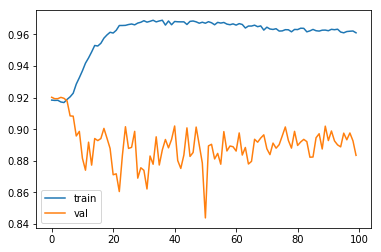

In [50]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import mean_squared_error
from math import sqrt

## テストセットと訓練セットに分離
trn_x, val_x, trn_y, val_y = train_test_split(trainX, Y, test_size=0.33, random_state=0)

list_auc_score = []
list_preds = []

   
# normalize
scaler = StandardScaler().fit(trainX)

X_train_scld = scaler.transform(trn_x)
X_val_scld = scaler.transform(val_x)

X_test_scld = scaler.transform(testX)


# model definition
features=X_train_scld.shape[1]

model=Sequential()
model.add(Dense(units=features*2, input_dim=features, kernel_initializer='normal',activation='relu'))
model.add(Dense(40))
model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
#print('dimensions %d ' % features)    
    
# fit model

filepath="../output/model_best.hd5"
checkpoint=ModelCheckpoint(filepath,monitor='val_acc',save_best_only=True)
callbacks_list=[checkpoint]
history =  model.fit(np.array(X_train_scld),np.array(trn_y), epochs=100, \
                     batch_size=15, validation_data=(np.array(X_val_scld),np.array(val_y)),\
                     verbose=1, shuffle=False,callbacks=callbacks_list)
scores=model.evaluate(np.array(X_train_scld),np.array(trn_y))
#    print("\n%s %.2f% %" % (model.metrics_names[1],scores[1]*100))

    
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='val')
plt.legend()
plt.show()    
    
# load best model saved at checkpoint¶

model.load_weights("../output/model_best.hd5")
X_test_array = np.array(X_test_scld)
y_test = model.predict(X_test_array)
list_preds.append(y_test)           

### <a id="4.1">4.1 Feature Importance </a>

In [ ]:
#lgb.plot_importance(clf, figsize=(12, 25), max_num_features=100);


### <a id="5.1">5.1 Predict</a>

In [51]:
preds = np.mean(list_preds, axis=0)

#preds = None

    
sub_lgb = pd.DataFrame()
sub_lgb['SK_ID_CURR'] = test_id
sub_lgb['TARGET'] = preds
sub_lgb.to_csv("../output/8.csv", index=False)
sub_lgb.head()

SK_ID_CURR    TARGET
0      100001  0.082771
1      100005  0.205596
2      100013  0.016136
3      100028  0.075975
4      100038  0.215256

In [ ]:
print('nn + feature 7')
#print(sc_auc_score, ',' ,max_score)

In [ ]:
print('result: ????')